# TRABAJO PRÁCTICO I (Media Materia)

Grupo 16:
* Pedro bonafe
* Aldana Ruscitti

## Librerías

In [4]:
%pip install torch
%pip install torchvision
%pip install torchsummary
%pip install pandas_profiling
%pip install sweetviz 
%pip install scikit-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 1.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --

In [2]:
%pip install keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.6 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 3.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 5.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.7 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import torch
import tqdm
import sweetviz as sv


import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from keras import layers, models
import torch.optim as optim

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Introducción y EDA

El dataset que usaremos el el dataset de Indicadores de Diabetes de Kaggle. El repositorio trae tres datasets, en este caso utilizaremos el 2 y el 3 que poseen la misma información solo que el 2 posee 70692 datos con balanceo y el 3 posee 253680 datos pero desbalanceados. El 1 decidimos no utilizarlo ya que tiene 3 clases en la variable target Diabetes_012  (diabetes, prediabetes o no_diabetes) mientras que los otros dos poseen ambos 2 clases en la variable target Diabetes_binary  (diabetes/prediabetes y no_ diabetes). 

Decidimos utilizar los dos a fin de evaluar el comportamiento de la red con un dataset balanceado vs uno desbalancedo


In [6]:
df_balanced = pd.read_csv("dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_balanced

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           1.0     0.0  ...            1.0   
1                       0.0           0.0     1.0  ...            1.0   
2                       0.0           1.0     1.0  ...            1.0   
3                       0.0           1.0     1.0  ...            1.0   
4                       0.0           1.0     1.0  ...            1.0   
...                     ...           ...     ...  ...            ...   
70687                   0.0           0.0     0.0  ...            1.0   
70688                   1.0           0.0     1.0  ...            1.0   
70689                   1.0           0.0     1.0  ...            1.0   
70690                   0.0           0.0     0.0  ...            1.0   
70691                   1.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0              0.0      3.0       5.0      30.0       0.0  1.0   4.0   
1              0.0      3.0       0.0       0.0       0.0  1.0  12.0   
2              0.0      1.0       0.0      10.0       0.0  1.0  13.0   
3              0.0      3.0       0.0       3.0       0.0  1.0  11.0   
4              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
...            ...      ...       ...       ...       ...  ...   ...   
70687          0.0      4.0       0.0       0.0       0.0  0.0   6.0   
70688          0.0      2.0       0.0       0.0       1.0  1.0  10.0   
70689          0.0      5.0      15.0       0.0       1.0  0.0  13.0   
70690          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
70691          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

       Education  Income  
0            6.0     8.0  
1            6.0     8.0  
2            6.0     8.0  
3            6.0     8.0  
4            5.0     8.0  
...          ...     ...  
70687        4.0     1.0  
70688        3.0     6.0  
70689        6.0     4.0  
70690        2.0     4.0  
70691        6.0     2.0  

[70692 rows x 22 columns]

En el reporte obtenido a continuación vamos a poder observar una pequeña inspección del dataset. Lo mismo se realiza para el dataframe desbalanceado.

In [7]:
analyze_report = sv.analyze(df_balanced)
analyze_report.show_html('results/df_balanced_EDAreport.html', open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report results/df_balanced_EDAreport.html was generated.


Insights:
* La variable target esta balanceada
* Las clases estan bastante limpias, no hay datos nulos
* BMI esta sesgada a la derecha pero parecieran ser valores reales

In [8]:
df_imbalanced = pd.read_csv("dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df_imbalanced

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

In [19]:
analyze_report = sv.analyze(df_imbalanced)
analyze_report.show_html('results/df_imbalanced_EDAreport.html', open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report results/df_imbalanced_EDAreport.html was generated.


Insights:
* La variable target esta muy desbalanceada
* Las clases estan bastante limpias, no hay datos nulos
* BMI esta sesgada a la derecha pero parecieran ser valores reales
* Como no tiene un metodo de balanceo aplicado la diferencia entre clases se traslada al resto de las variables categoricas generando lo mismo.

## Red Neuronal Simple

### Dataset Balanceado

In [9]:
#Semilla
seed = 10

In [10]:
# Separar X e y
X = df_balanced.drop('Diabetes_binary',axis=1).values
y = df_balanced['Diabetes_binary'].values

In [11]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

In [12]:
X_train.shape

(49484, 21)

#### Prueba con Tensorflow

Ajustamos la forma de entrada para que coincida con el número de características en los datos.

In [13]:
input_shape = (X_train.shape[1], )

Para esta arquitectura vamos a utilizar un modelo de 2 capa ocultas de 4 y 2 neuronas con función de activación relu. Nuestra capa de clasificación solo tendrá 1 neurona, puesto que es suficiente para un problema de clasificación binaria y tendrá una función de activación sigmoid

Finalmente, el modelo será compilado con el optimizador rmsprop y como función de perdida usaremos binary_crossentropy la cual funciona muy bien para problemas de clasificación binaria, y como medida de desempeño usaremos accuracy

In [509]:
def architecture(model: models.Sequential, input_shape) -> models.Sequential:
    model.add(layers.Dense(4, activation="relu", input_shape=input_shape))
    model.add(layers.Dense(2, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

model_tf = models.Sequential()
model_tf = architecture(model_tf, input_shape)
model_tf.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [510]:
history = model_tf.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/100
97/97 [==============================] - 1s 2ms/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 2/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5027
Epoch 3/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 5/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 6/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.4998 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 7/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6932 - val_acc: 0.4973
Epoch 8/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6932 - a

332/332 [==============================] - 0s 823us/step - loss: 0.6932 - acc: 0.4961
[0.6931871771812439, 0.4961335361003876]


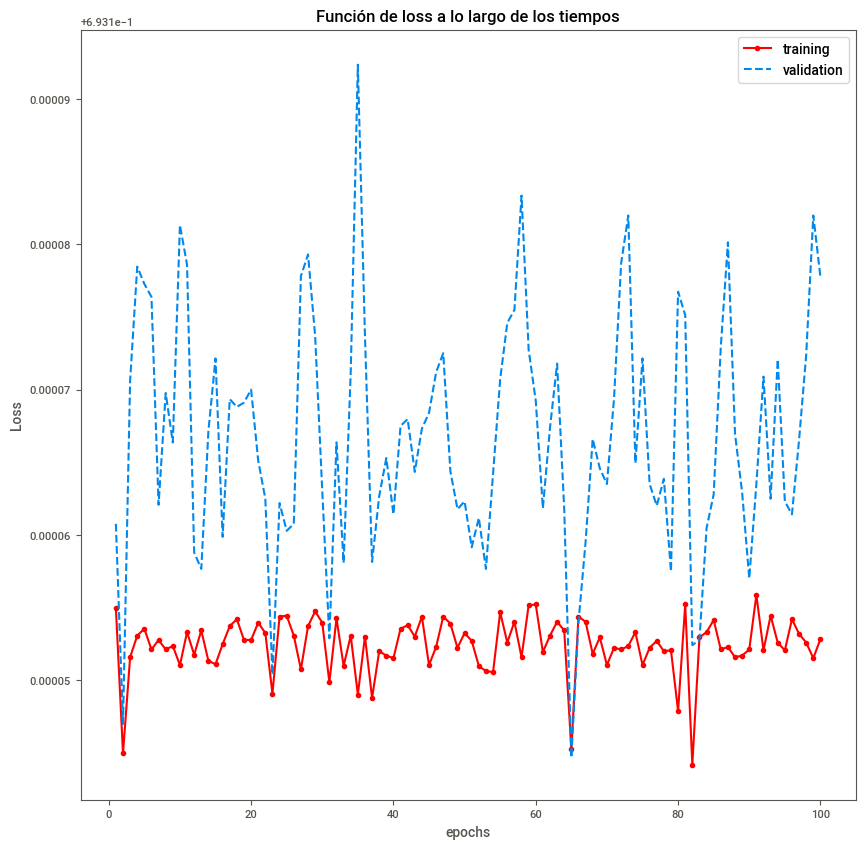

In [511]:
results = model_tf.evaluate(X_test, y_test)
print(results)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o-r', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.title("Función de loss a lo largo de los tiempos")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

#### Prueba con Torch y Entropy Loss Binaria Cruzada

Vamos a mantener 2 capa ocultas pero con 4 y 8 neuronas con función de activación relu y una capa de clasificación con solo 1 neurona con función de activación sigmoid tilizando una función de pérdida para clasificación binaria como es Entropy Loss Binaria Cruzada

In [14]:
# Convertir los datos en tensores de PyTorch
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
y_train_conv = y_train_tensor.unsqueeze(1)  # Agregar una dimensión
y_train_conv = y_train_conv.float()  # Convertir a tipo Float

X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.LongTensor(y_val)
y_val_conv = y_val_tensor.unsqueeze(1)
y_val_conv = y_val_conv.float()  # Convertir a tipo Float

X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.LongTensor(y_test)
y_test_conv = y_test_tensor.unsqueeze(1)
y_test_conv = y_test_conv.float()  # Convertir a tipo Float

In [15]:
y_val_conv.shape

torch.Size([10604, 1])

In [516]:
class DiabetesClassifier(nn.Module):
    def __init__(self, input_features = 21, hidden_layer_1=4, hidden_layer_2=8, output_features=1):
        super().__init__()
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = torch.sigmoid(self.output(x)) 
        return x

In [517]:
torch.manual_seed(seed)

model_bcel = DiabetesClassifier()

criterion = nn.BCELoss() # Función de pérdida para clasificación binaria

optimizer = torch.optim.Adam(model_bcel.parameters(), lr=0.1)


In [518]:
model_bcel.parameters

<bound method Module.parameters of DiabetesClassifier(
  (fully_connected_1): Linear(in_features=21, out_features=4, bias=True)
  (fully_connected_2): Linear(in_features=4, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)>

In [519]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # Foward pass y obtener la prediccion
    y_pred = model_bcel.forward(X_train_tensor)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train_conv)
    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    #optimizer.zero_grad() Setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step() #Actualiza todos los parametros del modelo (pesos y biases)

    with torch.no_grad():
        # Foward pass y obtener la prediccion
        y_pred_val = model_bcel.forward(X_val_tensor)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val_conv)
        val_losses.append(loss_val.item())

 30%|███       | 30/100 [00:00<00:00, 150.74it/s]

epoch:  1  loss: 0.70599890
epoch: 11  loss: 0.66522276
epoch: 21  loss: 0.53974259
epoch: 31  loss: 0.52617043


 66%|██████▌   | 66/100 [00:00<00:00, 169.43it/s]

epoch: 41  loss: 0.52030468
epoch: 51  loss: 0.51840645
epoch: 61  loss: 0.51097322
epoch: 71  loss: 0.51194191


100%|██████████| 100/100 [00:00<00:00, 165.20it/s]

epoch: 81  loss: 0.52432150
epoch: 91  loss: 0.51049954


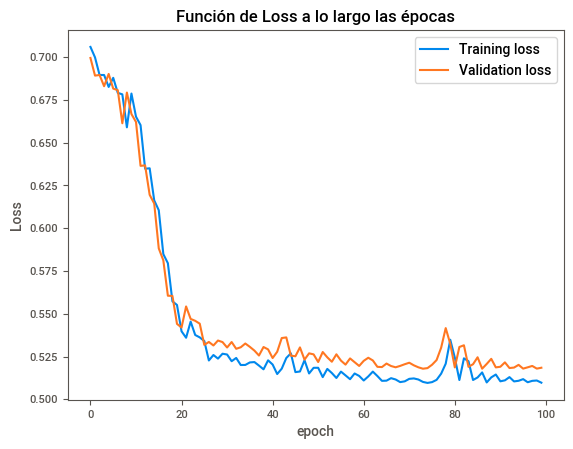

In [520]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [521]:
# Evaluamos el modelo en el conjunto de validación
with torch.no_grad():
    y_pred = model_bcel.forward(X_val_tensor) #Hacemos una inferencia sobre el conjunto de datos
    loss = criterion(y_pred, y_val_conv)
print(f'Valor de Loss en el conjunto de validación: {loss:.8f}')

Valor de Loss en el conjunto de validación: 0.51843530


In [522]:
## Este es un ejemplo visual donde comparamos ejemplo, el valor predicho con la pertenencia a la clase.

correct = 0
with torch.no_grad():
    for i,data in enumerate(X_val_tensor):
        y_pred = model_bcel.forward(data)

        # Mientras más alto es el valor más alta es la probabilidad de que pertenezca a la clase
        print(f'Ejemplo {i+1:2}.) {str(y_pred):38}  {y_val_conv[i]}')

        if y_pred.argmax().item() == y_val_conv[i]:
            correct += 1
print(f'\n{correct} out of {len(y_val_conv)} = {100*correct/len(y_val_conv):.2f}% correct')

Ejemplo  1.) tensor([0.1734])                        tensor([0.])
Ejemplo  2.) tensor([0.7348])                        tensor([1.])
Ejemplo  3.) tensor([0.9869])                        tensor([0.])
Ejemplo  4.) tensor([0.9087])                        tensor([1.])
Ejemplo  5.) tensor([0.8181])                        tensor([1.])
Ejemplo  6.) tensor([0.1214])                        tensor([0.])
Ejemplo  7.) tensor([0.1656])                        tensor([0.])
Ejemplo  8.) tensor([0.8585])                        tensor([1.])
Ejemplo  9.) tensor([0.1458])                        tensor([0.])
Ejemplo 10.) tensor([0.0930])                        tensor([0.])
Ejemplo 11.) tensor([0.5295])                        tensor([0.])
Ejemplo 12.) tensor([0.5817])                        tensor([0.])
Ejemplo 13.) tensor([0.8345])                        tensor([1.])
Ejemplo 14.) tensor([0.0930])                        tensor([0.])
Ejemplo 15.) tensor([0.6226])                        tensor([0.])
Ejemplo 16

No se obtuvieron muy buenos resultados en las predicciones. Vamos a probar con otra funcion de perdida.

#### Prueba con Torch y CrossEntropyLoss

Vamos a mantener 2 capa ocultas pero con 8 y 4 neuronas con función de activación relu y una capa de clasificación con 2 neuronas con funcion activación propia utilizando una función de pérdida para clasificación binaria como es Cross Entropy Loss.

In [523]:
class DiabetesClassifier(nn.Module):
    def __init__(self, input_features = 21, hidden_layer_1=8, hidden_layer_2=4, output_features=2):
        super().__init__()
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = self.output(x)
        return x

In [524]:
torch.manual_seed(seed)

model_cel = DiabetesClassifier()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_cel.parameters(), lr=0.1)

In [525]:
#epoch = Un entrenamiento sobre todo el dataset
epochs = 100

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # Foward pass y obtener la prediccion
    y_pred = model_cel.forward(X_train_tensor)

    # Calcular la loss de cada epoca
    loss_train = criterion(y_pred, y_train_tensor)
    train_losses.append(loss_train.item())

    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
    if epoch%10 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    #optimizer.zero_grad() Setea todos los gradientes en cero, sino se acumulan
    # y estariamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step() #Actualiza todos los parametros del modelo (pesos y biases)

    with torch.no_grad():
        # Foward pass y obtener la prediccion
        y_pred_val = model_cel.forward(X_val_tensor)

        # Calcular la loss de cada epoca
        loss_val = criterion(y_pred_val, y_val_tensor)
        val_losses.append(loss_val.item())

 19%|█▉        | 19/100 [00:00<00:00, 96.20it/s]

epoch:  1  loss: 0.80435807
epoch: 11  loss: 0.69642454


 41%|████      | 41/100 [00:00<00:00, 100.77it/s]

epoch: 21  loss: 0.69317865
epoch: 31  loss: 0.69330311
epoch: 41  loss: 0.69332337


 52%|█████▏    | 52/100 [00:00<00:00, 99.15it/s] 

epoch: 51  loss: 0.69323450
epoch: 61  loss: 0.69317937


 79%|███████▉  | 79/100 [00:01<00:00, 57.68it/s]

epoch: 71  loss: 0.69315642


 97%|█████████▋| 97/100 [00:01<00:00, 70.59it/s]

epoch: 81  loss: 0.69314760
epoch: 91  loss: 0.69314474


100%|██████████| 100/100 [00:01<00:00, 75.07it/s]


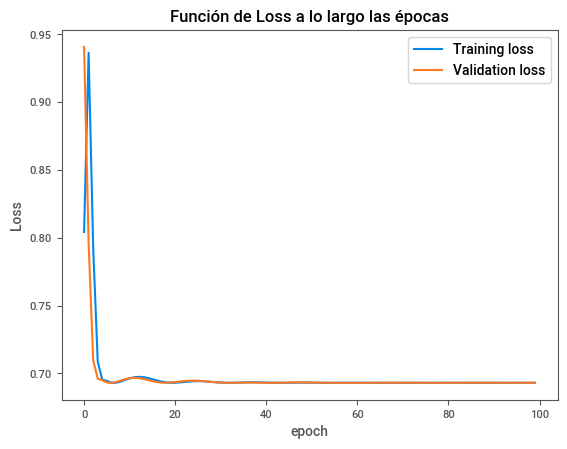

In [526]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [527]:
# Evaluamos el modelo en el conjunto de validación
with torch.no_grad():
    y_pred = model_cel.forward(X_val_tensor) #Hacemos una inferencia sobre el conjunto de datos
    loss = criterion(y_pred, y_val_tensor)
print(f'Valor de Loss en el conjunto de validación: {loss:.8f}')

Valor de Loss en el conjunto de validación: 0.69316024


In [528]:
## Este es un ejemplo visual donde comparamos ejemplo, el valor predicho con la pertenencia a la clase.

correct = 0
with torch.no_grad():
    for i,data in enumerate(X_val_tensor):
        y_pred = model_cel.forward(data)

        # Mientras más alto es el valor más alta es la probabilidad de que pertenezca a la clase
        print(f'Ejemplo {i+1:2}.) {str(y_pred):38}  {y_val_tensor[i]}')

        if y_pred.argmax().item() == y_val_tensor[i]:
            correct += 1
print(f'\n{correct} out of {len(y_val_tensor)} = {100*correct/len(y_val_tensor):.2f}% correct')

Ejemplo  1.) tensor([0.1584, 0.1544])                0
Ejemplo  2.) tensor([0.1584, 0.1544])                1
Ejemplo  3.) tensor([0.1584, 0.1544])                0
Ejemplo  4.) tensor([0.1584, 0.1544])                1
Ejemplo  5.) tensor([0.1584, 0.1544])                1
Ejemplo  6.) tensor([0.1584, 0.1544])                0
Ejemplo  7.) tensor([0.1584, 0.1544])                0
Ejemplo  8.) tensor([0.1584, 0.1544])                1
Ejemplo  9.) tensor([0.1584, 0.1544])                0
Ejemplo 10.) tensor([0.1584, 0.1544])                0
Ejemplo 11.) tensor([0.1584, 0.1544])                0
Ejemplo 12.) tensor([0.1584, 0.1544])                0
Ejemplo 13.) tensor([0.1584, 0.1544])                1
Ejemplo 14.) tensor([0.1584, 0.1544])                0
Ejemplo 15.) tensor([0.1584, 0.1544])                0
Ejemplo 16.) tensor([0.1584, 0.1544])                0
Ejemplo 17.) tensor([0.1584, 0.1544])                0
Ejemplo 18.) tensor([0.1584, 0.1544])                1
Ejemplo 19

## Optimización de hiperparametros

#### Optimización en el modelo de Tensorflow

In [549]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import ParameterGrid
from keras import optimizers

Arquitectura modificada:

In [551]:
def architecture(hidden_units_layer1=4, hidden_units_layer2=4, learning_rate=0.001, activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units_layer1, activation=activation, input_shape=input_shape))
    model.add(layers.Dense(hidden_units_layer2, activation=activation))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])
    
    return model

Los parametros a optimizar van a ser la cantidad de neuronas por cada capa, el learning rate y la función de activación a utilizar

In [554]:
param_grid = {
    'hidden_units_layer1': [2, 4, 8, 16],
    'hidden_units_layer2': [2, 4, 8, 16],
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh', 'sigmoid']
}

In [555]:
cv = StratifiedKFold() #Utilizamos Validación cruzada estratificada
grid_results = [] 
#Realizamos la busqueda
for hidden_units_layer1 in param_grid['hidden_units_layer1']:
    for hidden_units_layer2 in param_grid['hidden_units_layer2']:
        for learning_rate in param_grid['learning_rate']:
            for activation in param_grid['activation']:
                model = architecture(hidden_units_layer1, hidden_units_layer2, learning_rate, activation)
                history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val), verbose=0)
                score = model.evaluate(X_val, y_val, verbose=0)
                grid_results.append({
                    'hidden_units_layer1': hidden_units_layer1,
                    'hidden_units_layer2': hidden_units_layer2,
                    'learning_rate': learning_rate,
                    'activation': activation,
                    'val_accuracy': score[1]
                })

#Buscamos los mejores parametros
best_params = max(grid_results, key=lambda x: x['val_accuracy'])

print(f"Mejor accuracy: {best_params['val_accuracy']} utilizando {best_params}")

Mejor accuracy: 0.7495284676551819 utilizando {'hidden_units_layer1': 4, 'hidden_units_layer2': 8, 'learning_rate': 0.001, 'activation': 'sigmoid', 'val_accuracy': 0.7495284676551819}


In [556]:
best_hidden_units_layer1 = best_params['hidden_units_layer1']
best_hidden_units_layer2 = best_params['hidden_units_layer2']
best_learning_rate = best_params['learning_rate']
best_activation = best_params['activation']

Creo el modelo:

In [557]:
best_model = models.Sequential()
best_model.add(layers.Dense(best_hidden_units_layer1, activation=best_activation, input_shape=input_shape))
best_model.add(layers.Dense(best_hidden_units_layer2, activation=best_activation))
best_model.add(layers.Dense(1, activation="sigmoid"))

In [558]:
optimizer = optimizers.RMSprop(learning_rate=best_learning_rate)
best_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"])

In [559]:
history = best_model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/100
97/97 [==============================] - 1s 2ms/step - loss: 0.6881 - acc: 0.5772 - val_loss: 0.6799 - val_acc: 0.6959
Epoch 2/100
97/97 [==============================] - 0s 982us/step - loss: 0.6704 - acc: 0.6917 - val_loss: 0.6627 - val_acc: 0.6952
Epoch 3/100
97/97 [==============================] - 0s 968us/step - loss: 0.6537 - acc: 0.7003 - val_loss: 0.6456 - val_acc: 0.7024
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 0.6353 - acc: 0.7098 - val_loss: 0.6269 - val_acc: 0.7074
Epoch 5/100
97/97 [==============================] - 0s 2ms/step - loss: 0.6156 - acc: 0.7167 - val_loss: 0.6072 - val_acc: 0.7124
Epoch 6/100
97/97 [==============================] - 0s 958us/step - loss: 0.5954 - acc: 0.7218 - val_loss: 0.5887 - val_acc: 0.7175
Epoch 7/100
97/97 [==============================] - 0s 966us/step - loss: 0.5762 - acc: 0.7258 - val_loss: 0.5716 - val_acc: 0.7222
Epoch 8/100
97/97 [==============================] - 0s 963us/step - loss: 

332/332 [==============================] - 0s 536us/step - loss: 0.5112 - acc: 0.7473
[0.5111947655677795, 0.7472651600837708]


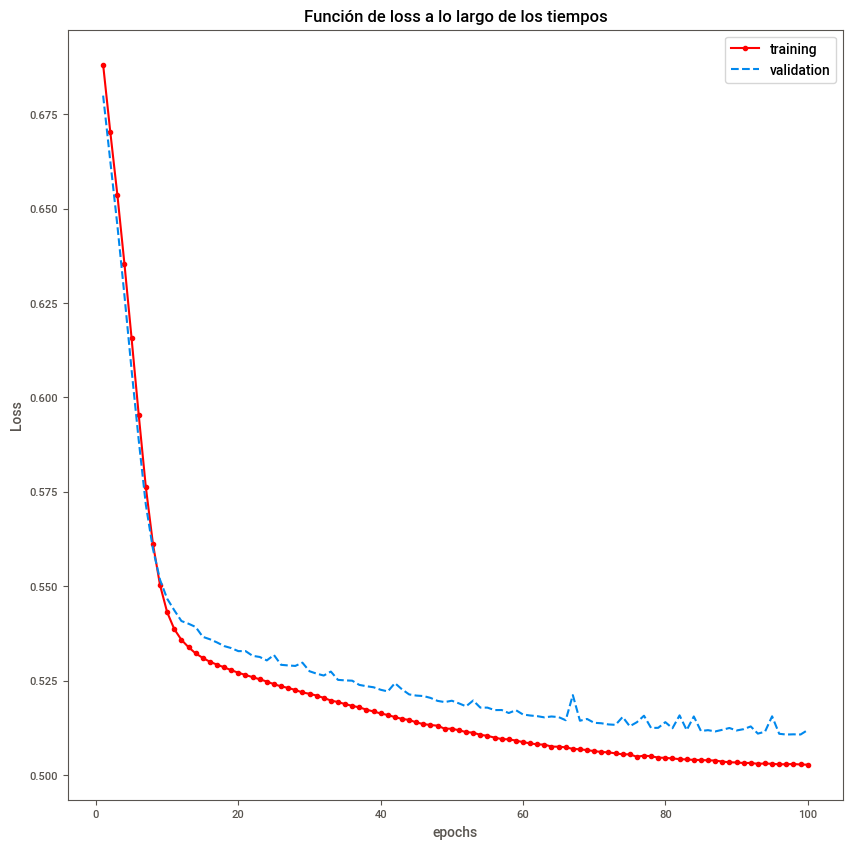

In [560]:
results = best_model.evaluate(X_test, y_test)
print(results)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
fig = plt.figure(figsize=(10, 10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o-r', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.title("Función de loss a lo largo de los tiempos")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

#### Optimización en el modelo de PyTorch

Utilizando la clase DiabetesClassifier creada anteriormente, buscaremos optimizar los resultados probando distintas secuencias de capas ocultas, learning rate y funciones de activación.

In [16]:
class DiabetesClassifier(nn.Module):
    def __init__(self, input_features = 21, hidden_layer_1=8, hidden_layer_2=4, output_features=2):
        super().__init__()
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)
        
    def forward(self, x, act_func):
        if act_func == "relu":
            x = F.relu(self.fully_connected_1(x))
            x = F.relu(self.fully_connected_2(x))
            x = self.output(x)
            return x
        elif act_func == "sigmoid":
            x = F.sigmoid(self.fully_connected_1(x))
            x = F.sigmoid(self.fully_connected_2(x))
            x = self.output(x)
            return x

In [17]:
param_grid = {
    'hidden_units_layer1': [2, 4, 8, 16, 32],
    'hidden_units_layer2': [2, 4, 8, 16, 32],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'activation': ['relu', 'sigmoid']
}

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [23]:
criterion = nn.CrossEntropyLoss()
grid_results = [] 
#Realizamos la busqueda
for hidden_units_layer1 in param_grid['hidden_units_layer1']:
    for hidden_units_layer2 in param_grid['hidden_units_layer2']:
        for learning_rate in param_grid['learning_rate']:
            for activation in param_grid['activation']:
                torch.manual_seed(seed)
                model_cel = DiabetesClassifier(
                                            hidden_layer_1= hidden_units_layer1, 
                                            hidden_layer_2= hidden_units_layer2
                                            )
                optimizer = torch.optim.Adam(
                    model_cel.parameters(),
                    lr=learning_rate)
                
                
                #epoch = Un entrenamiento sobre todo el dataset
                epochs = 1000

                train_losses = []
                val_losses = []

                for epoch in tqdm.trange(epochs):
                    epoch+=1

                    # Foward pass y obtener la prediccion
                    y_pred = model_cel.forward(X_train_tensor, act_func = activation)

                    # Calcular la loss de cada epoca
                    loss_train = criterion(y_pred, y_train_tensor)
                    train_losses.append(loss_train.item())

                    # No queremos imprimir los resultados de las 100 epocas asi que podemos poner una condicion
                    if epoch%10 == 1:
                        print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

                    #optimizer.zero_grad() Setea todos los gradientes en cero, sino se acumulan
                    # y estariamos usando valores de gradiente que ya usamos previamente
                    optimizer.zero_grad()
                    loss_train.backward()
                    optimizer.step() #Actualiza todos los parametros del modelo (pesos y biases)

                    with torch.no_grad():
                        # Foward pass y obtener la prediccion
                        y_pred_val = model_cel.forward(X_val_tensor, act_func = activation)

                        # Calcular la loss de cada epoca
                        loss_val = criterion(y_pred_val, y_val_tensor)
                        val_losses.append(loss_val.item())

                

                grid_results.append({
                    'hidden_units_layer1': hidden_units_layer1,
                    'hidden_units_layer2': hidden_units_layer2,
                    'learning_rate': learning_rate,
                    'activation': activation,
                    'train_loss': train_losses,
                    'val_loss': val_losses
                })

#Buscamos los mejores parametros
best_params = min(grid_results, key=lambda x: x['val_loss'])

print(f"Menor loss en el conjunto de validación: {best_params['val_loss']} utilizando {best_params}")

  1%|          | 9/1000 [00:00<00:11, 83.11it/s]

epoch:  1  loss: 0.73965025
epoch: 11  loss: 0.73864853


  3%|▎         | 28/1000 [00:00<00:11, 86.88it/s]

epoch: 21  loss: 0.73768318
epoch: 31  loss: 0.73675299


  5%|▌         | 50/1000 [00:00<00:10, 94.96it/s]

epoch: 41  loss: 0.73585731
epoch: 51  loss: 0.73499513


  7%|▋         | 72/1000 [00:00<00:09, 100.10it/s]

epoch: 61  loss: 0.73416775
epoch: 71  loss: 0.73336774
epoch: 81  loss: 0.73259562


 10%|█         | 104/1000 [00:01<00:09, 97.31it/s]

epoch: 91  loss: 0.73184907
epoch: 101  loss: 0.73112512


 12%|█▏        | 123/1000 [00:01<00:11, 76.59it/s]

epoch: 111  loss: 0.73041964
epoch: 121  loss: 0.72973096


 14%|█▍        | 144/1000 [00:01<00:10, 84.45it/s]

epoch: 131  loss: 0.72905821
epoch: 141  loss: 0.72840083
epoch: 151  loss: 0.72775948


 18%|█▊        | 176/1000 [00:01<00:09, 89.97it/s]

epoch: 161  loss: 0.72713047
epoch: 171  loss: 0.72651160


 20%|█▉        | 195/1000 [00:02<00:09, 87.65it/s]

epoch: 181  loss: 0.72590399
epoch: 191  loss: 0.72530675


 21%|██▏       | 213/1000 [00:02<00:09, 86.84it/s]

epoch: 201  loss: 0.72471672
epoch: 211  loss: 0.72413194


 23%|██▎       | 231/1000 [00:02<00:08, 85.63it/s]

epoch: 221  loss: 0.72355086
epoch: 231  loss: 0.72297263


 25%|██▌       | 251/1000 [00:02<00:08, 88.84it/s]

epoch: 241  loss: 0.72239637
epoch: 251  loss: 0.72182298


 28%|██▊       | 279/1000 [00:03<00:08, 89.95it/s]

epoch: 261  loss: 0.72125119
epoch: 271  loss: 0.72068024


 29%|██▉       | 289/1000 [00:03<00:07, 89.42it/s]

epoch: 281  loss: 0.72010988
epoch: 291  loss: 0.71953964


 31%|███       | 307/1000 [00:03<00:08, 82.85it/s]

epoch: 301  loss: 0.71897042
epoch: 311  loss: 0.71840656


 34%|███▎      | 335/1000 [00:03<00:07, 88.30it/s]

epoch: 321  loss: 0.71784991
epoch: 331  loss: 0.71730590


 35%|███▌      | 353/1000 [00:04<00:07, 81.86it/s]

epoch: 341  loss: 0.71678245
epoch: 351  loss: 0.71628225


 37%|███▋      | 373/1000 [00:04<00:07, 86.80it/s]

epoch: 361  loss: 0.71580619
epoch: 371  loss: 0.71535289


 39%|███▉      | 394/1000 [00:04<00:06, 91.79it/s]

epoch: 381  loss: 0.71492082
epoch: 391  loss: 0.71450722


 41%|████▏     | 413/1000 [00:04<00:06, 86.77it/s]

epoch: 401  loss: 0.71410948
epoch: 411  loss: 0.71372485


 43%|████▎     | 431/1000 [00:04<00:06, 85.69it/s]

epoch: 421  loss: 0.71335202
epoch: 431  loss: 0.71298999


 45%|████▌     | 452/1000 [00:05<00:05, 93.10it/s]

epoch: 441  loss: 0.71263748
epoch: 451  loss: 0.71229327
epoch: 461  loss: 0.71195692


 48%|████▊     | 484/1000 [00:05<00:05, 97.74it/s]

epoch: 471  loss: 0.71162724
epoch: 481  loss: 0.71130353


 50%|█████     | 504/1000 [00:05<00:05, 97.52it/s]

epoch: 491  loss: 0.71098548
epoch: 501  loss: 0.71067291
epoch: 511  loss: 0.71036571


 54%|█████▎    | 535/1000 [00:05<00:04, 98.56it/s]

epoch: 521  loss: 0.71006393
epoch: 531  loss: 0.70976692
epoch: 541  loss: 0.70947468


 57%|█████▋    | 566/1000 [00:06<00:04, 100.30it/s]

epoch: 551  loss: 0.70918703
epoch: 561  loss: 0.70890379
epoch: 571  loss: 0.70862490


 60%|█████▉    | 599/1000 [00:06<00:03, 100.28it/s]

epoch: 581  loss: 0.70835000
epoch: 591  loss: 0.70807910


 61%|██████    | 610/1000 [00:06<00:03, 101.10it/s]

epoch: 601  loss: 0.70781189
epoch: 611  loss: 0.70754844


 63%|██████▎   | 632/1000 [00:06<00:03, 94.22it/s] 

epoch: 621  loss: 0.70728892
epoch: 631  loss: 0.70703280


 65%|██████▌   | 654/1000 [00:07<00:03, 97.92it/s]

epoch: 641  loss: 0.70678008
epoch: 651  loss: 0.70653045
epoch: 661  loss: 0.70628399


 69%|██████▊   | 686/1000 [00:07<00:03, 101.40it/s]

epoch: 671  loss: 0.70604032
epoch: 681  loss: 0.70579994
epoch: 691  loss: 0.70556265


 72%|███████▏  | 719/1000 [00:07<00:02, 101.77it/s]

epoch: 701  loss: 0.70532823
epoch: 711  loss: 0.70509678
epoch: 721  loss: 0.70486784


 74%|███████▍  | 741/1000 [00:08<00:02, 100.27it/s]

epoch: 731  loss: 0.70464164
epoch: 741  loss: 0.70441836
epoch: 751  loss: 0.70419729


 77%|███████▋  | 774/1000 [00:08<00:02, 100.00it/s]

epoch: 761  loss: 0.70397884
epoch: 771  loss: 0.70376283
epoch: 781  loss: 0.70354909


 81%|████████  | 807/1000 [00:08<00:01, 102.15it/s]

epoch: 791  loss: 0.70333767
epoch: 801  loss: 0.70312858
epoch: 811  loss: 0.70292163


 84%|████████▍ | 840/1000 [00:08<00:01, 102.37it/s]

epoch: 821  loss: 0.70271719
epoch: 831  loss: 0.70251471


 85%|████████▌ | 851/1000 [00:09<00:01, 101.59it/s]

epoch: 841  loss: 0.70231432
epoch: 851  loss: 0.70211577
epoch: 861  loss: 0.70191902


 88%|████████▊ | 884/1000 [00:09<00:01, 101.99it/s]

epoch: 871  loss: 0.70172423
epoch: 881  loss: 0.70153111
epoch: 891  loss: 0.70133978


 92%|█████████▏| 918/1000 [00:09<00:00, 98.63it/s] 

epoch: 901  loss: 0.70115000
epoch: 911  loss: 0.70096171
epoch: 921  loss: 0.70077503


 94%|█████████▍| 939/1000 [00:10<00:00, 95.36it/s]

epoch: 931  loss: 0.70058960
epoch: 941  loss: 0.70040566


 97%|█████████▋| 972/1000 [00:10<00:00, 99.33it/s]

epoch: 951  loss: 0.70022285
epoch: 961  loss: 0.70004135
epoch: 971  loss: 0.69986093


100%|██████████| 1000/1000 [00:10<00:00, 94.05it/s]

epoch: 981  loss: 0.69968152
epoch: 991  loss: 0.69950306



  1%|          | 10/1000 [00:00<00:10, 94.11it/s]

epoch:  1  loss: 0.70742702
epoch: 11  loss: 0.70706207


  3%|▎         | 31/1000 [00:00<00:09, 98.86it/s]

epoch: 21  loss: 0.70670134
epoch: 31  loss: 0.70634520


  6%|▌         | 61/1000 [00:00<00:09, 96.40it/s]

epoch: 41  loss: 0.70599377
epoch: 51  loss: 0.70564699
epoch: 61  loss: 0.70530498


  8%|▊         | 81/1000 [00:00<00:09, 95.60it/s]

epoch: 71  loss: 0.70496768
epoch: 81  loss: 0.70463473


 10%|█         | 101/1000 [00:01<00:09, 90.50it/s]

epoch: 91  loss: 0.70430624
epoch: 101  loss: 0.70398206


 12%|█▏        | 121/1000 [00:01<00:09, 92.66it/s]

epoch: 111  loss: 0.70366186
epoch: 121  loss: 0.70334578
epoch: 131  loss: 0.70303333


 15%|█▌        | 153/1000 [00:01<00:08, 97.98it/s]

epoch: 141  loss: 0.70272464
epoch: 151  loss: 0.70241928
epoch: 161  loss: 0.70211732


 18%|█▊        | 184/1000 [00:01<00:08, 97.46it/s]

epoch: 171  loss: 0.70181888
epoch: 181  loss: 0.70152336


 20%|██        | 204/1000 [00:02<00:08, 91.09it/s]

epoch: 191  loss: 0.70123124
epoch: 201  loss: 0.70094198
epoch: 211  loss: 0.70065576


 24%|██▎       | 235/1000 [00:02<00:08, 94.96it/s]

epoch: 221  loss: 0.70037270
epoch: 231  loss: 0.70009255


 26%|██▌       | 256/1000 [00:02<00:07, 97.64it/s]

epoch: 241  loss: 0.69981551
epoch: 251  loss: 0.69954169
epoch: 261  loss: 0.69927108


 29%|██▉       | 288/1000 [00:03<00:07, 99.02it/s]

epoch: 271  loss: 0.69900388
epoch: 281  loss: 0.69874036
epoch: 291  loss: 0.69848043


 31%|███       | 309/1000 [00:03<00:06, 100.71it/s]

epoch: 301  loss: 0.69822460
epoch: 311  loss: 0.69797277


 33%|███▎      | 330/1000 [00:03<00:06, 97.47it/s] 

epoch: 321  loss: 0.69772536
epoch: 331  loss: 0.69748265
epoch: 341  loss: 0.69724464


 36%|███▋      | 363/1000 [00:03<00:06, 99.84it/s] 

epoch: 351  loss: 0.69701153
epoch: 361  loss: 0.69678354
epoch: 371  loss: 0.69656122


 39%|███▉      | 393/1000 [00:04<00:06, 94.75it/s]

epoch: 381  loss: 0.69634426
epoch: 391  loss: 0.69613290


 41%|████▏     | 413/1000 [00:04<00:06, 94.28it/s]

epoch: 401  loss: 0.69592738
epoch: 411  loss: 0.69572759


 43%|████▎     | 433/1000 [00:04<00:05, 95.22it/s]

epoch: 421  loss: 0.69553369
epoch: 431  loss: 0.69534540


 45%|████▌     | 453/1000 [00:04<00:06, 85.53it/s]

epoch: 441  loss: 0.69516313
epoch: 451  loss: 0.69498658


 47%|████▋     | 472/1000 [00:04<00:05, 88.24it/s]

epoch: 461  loss: 0.69481564
epoch: 471  loss: 0.69465035


 49%|████▉     | 492/1000 [00:05<00:05, 91.20it/s]

epoch: 481  loss: 0.69449049
epoch: 491  loss: 0.69433600


 51%|█████     | 512/1000 [00:05<00:05, 92.63it/s]

epoch: 501  loss: 0.69418669
epoch: 511  loss: 0.69404244


 53%|█████▎    | 532/1000 [00:05<00:05, 91.07it/s]

epoch: 521  loss: 0.69390285
epoch: 531  loss: 0.69376796


 55%|█████▌    | 553/1000 [00:05<00:04, 94.46it/s]

epoch: 541  loss: 0.69363773
epoch: 551  loss: 0.69351166


 57%|█████▋    | 573/1000 [00:06<00:04, 94.81it/s]

epoch: 561  loss: 0.69338959
epoch: 571  loss: 0.69327170


 59%|█████▉    | 594/1000 [00:06<00:04, 97.38it/s]

epoch: 581  loss: 0.69315737
epoch: 591  loss: 0.69304663
epoch: 601  loss: 0.69293940


 62%|██████▏   | 624/1000 [00:06<00:03, 94.28it/s]

epoch: 611  loss: 0.69283527
epoch: 621  loss: 0.69273424


 64%|██████▍   | 644/1000 [00:06<00:03, 94.60it/s]

epoch: 631  loss: 0.69263619
epoch: 641  loss: 0.69254100
epoch: 651  loss: 0.69244832


 67%|██████▋   | 674/1000 [00:07<00:03, 89.46it/s]

epoch: 661  loss: 0.69235820
epoch: 671  loss: 0.69227058
epoch: 681  loss: 0.69218498


 70%|███████   | 704/1000 [00:07<00:03, 93.90it/s]

epoch: 691  loss: 0.69210154
epoch: 701  loss: 0.69202024
epoch: 711  loss: 0.69194067


 73%|███████▎  | 734/1000 [00:07<00:02, 97.02it/s]

epoch: 721  loss: 0.69186282
epoch: 731  loss: 0.69178677
epoch: 741  loss: 0.69171220


 76%|███████▋  | 764/1000 [00:08<00:02, 94.46it/s]

epoch: 751  loss: 0.69163895
epoch: 761  loss: 0.69156718


 78%|███████▊  | 784/1000 [00:08<00:02, 94.17it/s]

epoch: 771  loss: 0.69149673
epoch: 781  loss: 0.69142723


 80%|████████  | 804/1000 [00:08<00:02, 94.87it/s]

epoch: 791  loss: 0.69135904
epoch: 801  loss: 0.69129163


 82%|████████▏ | 824/1000 [00:08<00:01, 96.71it/s]

epoch: 811  loss: 0.69122535
epoch: 821  loss: 0.69115973


 84%|████████▍ | 844/1000 [00:08<00:01, 96.58it/s]

epoch: 831  loss: 0.69109499
epoch: 841  loss: 0.69103092
epoch: 851  loss: 0.69096756


 87%|████████▋ | 874/1000 [00:09<00:01, 95.76it/s]

epoch: 861  loss: 0.69090480
epoch: 871  loss: 0.69084245
epoch: 881  loss: 0.69078064


 90%|█████████ | 904/1000 [00:09<00:01, 94.12it/s]

epoch: 891  loss: 0.69071943
epoch: 901  loss: 0.69065851


 92%|█████████▏| 924/1000 [00:09<00:00, 89.92it/s]

epoch: 911  loss: 0.69059801
epoch: 921  loss: 0.69053775


 94%|█████████▍| 944/1000 [00:10<00:00, 91.58it/s]

epoch: 931  loss: 0.69047791
epoch: 941  loss: 0.69041818
epoch: 951  loss: 0.69035888


 98%|█████████▊| 975/1000 [00:10<00:00, 95.61it/s]

epoch: 961  loss: 0.69029993
epoch: 971  loss: 0.69024092
epoch: 981  loss: 0.69018221


100%|██████████| 1000/1000 [00:10<00:00, 94.48it/s]


epoch: 991  loss: 0.69012380


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.73965025


  1%|          | 11/1000 [00:00<00:09, 101.87it/s]

epoch: 11  loss: 0.73092145


  2%|▏         | 22/1000 [00:00<00:09, 100.61it/s]

epoch: 21  loss: 0.72442633


  3%|▎         | 33/1000 [00:00<00:09, 97.12it/s] 

epoch: 31  loss: 0.71890396
epoch: 41  loss: 0.71399987


  6%|▋         | 65/1000 [00:00<00:09, 99.09it/s]

epoch: 51  loss: 0.71049780
epoch: 61  loss: 0.70766443
epoch: 71  loss: 0.70523840


 10%|▉         | 98/1000 [00:00<00:08, 100.71it/s]

epoch: 81  loss: 0.70310169
epoch: 91  loss: 0.70120418
epoch: 101  loss: 0.69950145


 12%|█▏        | 120/1000 [00:01<00:09, 95.63it/s]

epoch: 111  loss: 0.69795483
epoch: 121  loss: 0.69651049


 14%|█▍        | 141/1000 [00:01<00:08, 97.65it/s]

epoch: 131  loss: 0.69510293
epoch: 141  loss: 0.69365823
epoch: 151  loss: 0.69207931


 17%|█▋        | 174/1000 [00:01<00:08, 103.15it/s]

epoch: 161  loss: 0.69025475
epoch: 171  loss: 0.68805414
epoch: 181  loss: 0.68540508


 21%|██        | 207/1000 [00:02<00:07, 102.16it/s]

epoch: 191  loss: 0.68223459
epoch: 201  loss: 0.67851412
epoch: 211  loss: 0.67427605


 23%|██▎       | 229/1000 [00:02<00:07, 102.07it/s]

epoch: 221  loss: 0.66959310
epoch: 231  loss: 0.66455269


 25%|██▌       | 251/1000 [00:02<00:07, 101.20it/s]

epoch: 241  loss: 0.65922195
epoch: 251  loss: 0.65362406
epoch: 261  loss: 0.64785767


 28%|██▊       | 284/1000 [00:02<00:07, 98.49it/s] 

epoch: 271  loss: 0.64195150
epoch: 281  loss: 0.63567728


 30%|███       | 305/1000 [00:03<00:06, 100.63it/s]

epoch: 291  loss: 0.62530160
epoch: 301  loss: 0.58620548
epoch: 311  loss: 0.56248122


 34%|███▍      | 339/1000 [00:03<00:06, 106.42it/s]

epoch: 321  loss: 0.55572379
epoch: 331  loss: 0.54971200
epoch: 341  loss: 0.54540676


 36%|███▌      | 361/1000 [00:03<00:06, 103.38it/s]

epoch: 351  loss: 0.54218435
epoch: 361  loss: 0.53973538


 38%|███▊      | 383/1000 [00:03<00:06, 98.03it/s] 

epoch: 371  loss: 0.53775626
epoch: 381  loss: 0.53607082
epoch: 391  loss: 0.53458750


 42%|████▏     | 416/1000 [00:04<00:05, 101.09it/s]

epoch: 401  loss: 0.53326201
epoch: 411  loss: 0.53207952
epoch: 421  loss: 0.53101975


 45%|████▍     | 449/1000 [00:04<00:05, 100.54it/s]

epoch: 431  loss: 0.53007299
epoch: 441  loss: 0.52923405
epoch: 451  loss: 0.52848607


 47%|████▋     | 471/1000 [00:04<00:05, 101.64it/s]

epoch: 461  loss: 0.52781630
epoch: 471  loss: 0.52721530
epoch: 481  loss: 0.52667540


 50%|█████     | 504/1000 [00:05<00:04, 101.46it/s]

epoch: 491  loss: 0.52618647
epoch: 501  loss: 0.52574253


 53%|█████▎    | 526/1000 [00:05<00:04, 102.02it/s]

epoch: 511  loss: 0.52533722
epoch: 521  loss: 0.52496570
epoch: 531  loss: 0.52462059


 56%|█████▌    | 559/1000 [00:05<00:04, 102.83it/s]

epoch: 541  loss: 0.52429801
epoch: 551  loss: 0.52399480


 57%|█████▋    | 570/1000 [00:05<00:04, 102.51it/s]

epoch: 561  loss: 0.52370656
epoch: 571  loss: 0.52343148


 59%|█████▉    | 592/1000 [00:05<00:04, 101.08it/s]

epoch: 581  loss: 0.52316791
epoch: 591  loss: 0.52291429


 61%|██████▏   | 613/1000 [00:06<00:04, 94.09it/s] 

epoch: 601  loss: 0.52266955
epoch: 611  loss: 0.52243191


 63%|██████▎   | 634/1000 [00:06<00:03, 95.00it/s]

epoch: 621  loss: 0.52220088
epoch: 631  loss: 0.52197611


 65%|██████▌   | 654/1000 [00:06<00:03, 96.88it/s]

epoch: 641  loss: 0.52175677
epoch: 651  loss: 0.52154171


 67%|██████▋   | 674/1000 [00:06<00:03, 96.11it/s]

epoch: 661  loss: 0.52133042
epoch: 671  loss: 0.52112323
epoch: 681  loss: 0.52092010


 71%|███████   | 706/1000 [00:07<00:02, 98.97it/s]

epoch: 691  loss: 0.52072048
epoch: 701  loss: 0.52052391
epoch: 711  loss: 0.52033019


 74%|███████▍  | 738/1000 [00:07<00:02, 101.97it/s]

epoch: 721  loss: 0.52013969
epoch: 731  loss: 0.51995206
epoch: 741  loss: 0.51976687


 76%|███████▌  | 760/1000 [00:07<00:02, 101.14it/s]

epoch: 751  loss: 0.51958448
epoch: 761  loss: 0.51940471


 78%|███████▊  | 781/1000 [00:07<00:02, 95.67it/s] 

epoch: 771  loss: 0.51922739
epoch: 781  loss: 0.51905197


 80%|████████  | 801/1000 [00:08<00:02, 93.30it/s]

epoch: 791  loss: 0.51887852
epoch: 801  loss: 0.51870686
epoch: 811  loss: 0.51853633


 83%|████████▎ | 830/1000 [00:08<00:02, 84.05it/s]

epoch: 821  loss: 0.51836783
epoch: 831  loss: 0.51820070


 85%|████████▍ | 848/1000 [00:08<00:01, 85.02it/s]

epoch: 841  loss: 0.51803541
epoch: 851  loss: 0.51787144


 88%|████████▊ | 875/1000 [00:08<00:01, 81.52it/s]

epoch: 861  loss: 0.51770788
epoch: 871  loss: 0.51754564


 89%|████████▉ | 893/1000 [00:09<00:01, 82.35it/s]

epoch: 881  loss: 0.51738435
epoch: 891  loss: 0.51722425


 91%|█████████ | 911/1000 [00:09<00:01, 84.10it/s]

epoch: 901  loss: 0.51706582
epoch: 911  loss: 0.51690799


 93%|█████████▎| 929/1000 [00:09<00:00, 82.91it/s]

epoch: 921  loss: 0.51675099
epoch: 931  loss: 0.51659507


 96%|█████████▌| 956/1000 [00:09<00:00, 84.64it/s]

epoch: 941  loss: 0.51644045
epoch: 951  loss: 0.51628685


 98%|█████████▊| 975/1000 [00:10<00:00, 87.11it/s]

epoch: 961  loss: 0.51613474
epoch: 971  loss: 0.51598382


 99%|█████████▉| 993/1000 [00:10<00:00, 85.33it/s]

epoch: 981  loss: 0.51583350
epoch: 991  loss: 0.51568323


  1%|          | 8/1000 [00:00<00:12, 77.46it/s]

epoch:  1  loss: 0.70742702
epoch: 11  loss: 0.70394576


  4%|▎         | 35/1000 [00:00<00:13, 72.25it/s]

epoch: 21  loss: 0.70085531
epoch: 31  loss: 0.69815576


  5%|▌         | 52/1000 [00:00<00:12, 76.99it/s]

epoch: 41  loss: 0.69585782
epoch: 51  loss: 0.69403511


  7%|▋         | 70/1000 [00:00<00:11, 80.04it/s]

epoch: 61  loss: 0.69274640
epoch: 71  loss: 0.69189441


  9%|▉         | 88/1000 [00:01<00:11, 80.51it/s]

epoch: 81  loss: 0.69129068
epoch: 91  loss: 0.69078708


 12%|█▏        | 115/1000 [00:01<00:10, 82.42it/s]

epoch: 101  loss: 0.69030613
epoch: 111  loss: 0.68982232


 13%|█▎        | 133/1000 [00:01<00:10, 81.77it/s]

epoch: 121  loss: 0.68933213
epoch: 131  loss: 0.68883377


 15%|█▌        | 151/1000 [00:01<00:10, 81.99it/s]

epoch: 141  loss: 0.68832564
epoch: 151  loss: 0.68781018


 17%|█▋        | 169/1000 [00:02<00:10, 81.06it/s]

epoch: 161  loss: 0.68728882
epoch: 171  loss: 0.68676406


 20%|█▉        | 196/1000 [00:02<00:09, 82.44it/s]

epoch: 181  loss: 0.68624049
epoch: 191  loss: 0.68572354


 21%|██▏       | 214/1000 [00:02<00:10, 75.14it/s]

epoch: 201  loss: 0.68521446
epoch: 211  loss: 0.68470979


 23%|██▎       | 231/1000 [00:02<00:09, 77.97it/s]

epoch: 221  loss: 0.68420339
epoch: 231  loss: 0.68368965


 25%|██▍       | 249/1000 [00:03<00:09, 78.89it/s]

epoch: 241  loss: 0.68316406
epoch: 251  loss: 0.68262345


 27%|██▋       | 267/1000 [00:03<00:09, 79.55it/s]

epoch: 261  loss: 0.68206483
epoch: 271  loss: 0.68148613


 29%|██▉       | 294/1000 [00:03<00:08, 82.27it/s]

epoch: 281  loss: 0.68088448
epoch: 291  loss: 0.68025798


 31%|███       | 312/1000 [00:03<00:08, 80.74it/s]

epoch: 301  loss: 0.67960477
epoch: 311  loss: 0.67892271


 33%|███▎      | 330/1000 [00:04<00:08, 79.54it/s]

epoch: 321  loss: 0.67821014
epoch: 331  loss: 0.67746520


 35%|███▍      | 348/1000 [00:04<00:08, 80.36it/s]

epoch: 341  loss: 0.67668611
epoch: 351  loss: 0.67587149


 38%|███▊      | 375/1000 [00:04<00:07, 84.22it/s]

epoch: 361  loss: 0.67501998
epoch: 371  loss: 0.67412990


 39%|███▉      | 393/1000 [00:04<00:07, 82.39it/s]

epoch: 381  loss: 0.67320007
epoch: 391  loss: 0.67222965


 41%|████      | 411/1000 [00:05<00:07, 76.74it/s]

epoch: 401  loss: 0.67121744
epoch: 411  loss: 0.67016286


 43%|████▎     | 429/1000 [00:05<00:07, 80.54it/s]

epoch: 421  loss: 0.66906524
epoch: 431  loss: 0.66792428


 45%|████▍     | 447/1000 [00:05<00:06, 80.74it/s]

epoch: 441  loss: 0.66673964
epoch: 451  loss: 0.66551137


 48%|████▊     | 475/1000 [00:05<00:06, 83.83it/s]

epoch: 461  loss: 0.66423982
epoch: 471  loss: 0.66292524


 48%|████▊     | 484/1000 [00:06<00:06, 85.01it/s]

epoch: 481  loss: 0.66156811
epoch: 491  loss: 0.66016930


 51%|█████     | 510/1000 [00:06<00:06, 72.96it/s]

epoch: 501  loss: 0.65872926
epoch: 511  loss: 0.65724862


 53%|█████▎    | 528/1000 [00:06<00:06, 78.07it/s]

epoch: 521  loss: 0.65572745
epoch: 531  loss: 0.65416378


 56%|█████▌    | 555/1000 [00:06<00:05, 81.99it/s]

epoch: 541  loss: 0.65254897
epoch: 551  loss: 0.65083987


 57%|█████▋    | 573/1000 [00:07<00:05, 82.18it/s]

epoch: 561  loss: 0.64873791
epoch: 571  loss: 0.64559841


 59%|█████▉    | 591/1000 [00:07<00:05, 75.99it/s]

epoch: 581  loss: 0.64266872
epoch: 591  loss: 0.63947219


 61%|██████    | 609/1000 [00:07<00:04, 79.15it/s]

epoch: 601  loss: 0.63630128
epoch: 611  loss: 0.63310844


 64%|██████▎   | 636/1000 [00:07<00:04, 81.88it/s]

epoch: 621  loss: 0.62990099
epoch: 631  loss: 0.62669945


 65%|██████▌   | 654/1000 [00:08<00:04, 81.53it/s]

epoch: 641  loss: 0.62351590
epoch: 651  loss: 0.62036097


 67%|██████▋   | 671/1000 [00:08<00:04, 74.85it/s]

epoch: 661  loss: 0.61724246
epoch: 671  loss: 0.61416554


 69%|██████▉   | 688/1000 [00:08<00:04, 77.28it/s]

epoch: 681  loss: 0.61113375
epoch: 691  loss: 0.60815966


 71%|███████▏  | 714/1000 [00:08<00:03, 79.46it/s]

epoch: 701  loss: 0.60526776
epoch: 711  loss: 0.60245687


 73%|███████▎  | 732/1000 [00:09<00:03, 80.19it/s]

epoch: 721  loss: 0.59971917
epoch: 731  loss: 0.59705818


 75%|███████▌  | 750/1000 [00:09<00:03, 81.10it/s]

epoch: 741  loss: 0.59447277
epoch: 751  loss: 0.59196299


 77%|███████▋  | 768/1000 [00:09<00:02, 81.44it/s]

epoch: 761  loss: 0.58952826
epoch: 771  loss: 0.58716792


 79%|███████▉  | 794/1000 [00:10<00:02, 74.09it/s]

epoch: 781  loss: 0.58488125
epoch: 791  loss: 0.58266735


 81%|████████  | 811/1000 [00:10<00:02, 76.45it/s]

epoch: 801  loss: 0.58052522
epoch: 811  loss: 0.57845384


 83%|████████▎ | 829/1000 [00:10<00:02, 80.12it/s]

epoch: 821  loss: 0.57645220
epoch: 831  loss: 0.57451928


 85%|████████▍ | 847/1000 [00:10<00:01, 83.41it/s]

epoch: 841  loss: 0.57265383
epoch: 851  loss: 0.57085478


 87%|████████▋ | 874/1000 [00:10<00:01, 84.24it/s]

epoch: 861  loss: 0.56912094
epoch: 871  loss: 0.56745118


 89%|████████▉ | 892/1000 [00:11<00:01, 82.20it/s]

epoch: 881  loss: 0.56584412
epoch: 891  loss: 0.56429863


 91%|█████████ | 910/1000 [00:11<00:01, 82.01it/s]

epoch: 901  loss: 0.56281340
epoch: 911  loss: 0.56138700


 93%|█████████▎| 928/1000 [00:11<00:00, 81.64it/s]

epoch: 921  loss: 0.56001800
epoch: 931  loss: 0.55870503


 96%|█████████▌| 955/1000 [00:11<00:00, 83.44it/s]

epoch: 941  loss: 0.55744666
epoch: 951  loss: 0.55624110


 97%|█████████▋| 973/1000 [00:12<00:00, 82.19it/s]

epoch: 961  loss: 0.55508667
epoch: 971  loss: 0.55398190


 99%|█████████▉| 991/1000 [00:12<00:00, 81.83it/s]

epoch: 981  loss: 0.55292499
epoch: 991  loss: 0.55191404


  1%|          | 9/1000 [00:00<00:11, 87.68it/s]

epoch:  1  loss: 0.73965025
epoch: 11  loss: 0.69945520


  4%|▍         | 39/1000 [00:00<00:10, 89.03it/s]

epoch: 21  loss: 0.68858027
epoch: 31  loss: 0.67224807


  6%|▌         | 57/1000 [00:00<00:10, 88.30it/s]

epoch: 41  loss: 0.64390457
epoch: 51  loss: 0.61293912


  8%|▊         | 75/1000 [00:00<00:10, 87.19it/s]

epoch: 61  loss: 0.57777733
epoch: 71  loss: 0.54480052


  9%|▉         | 93/1000 [00:01<00:10, 87.06it/s]

epoch: 81  loss: 0.53256363
epoch: 91  loss: 0.52407211


 11%|█         | 111/1000 [00:01<00:10, 85.94it/s]

epoch: 101  loss: 0.51889431
epoch: 111  loss: 0.51586109


 14%|█▍        | 138/1000 [00:01<00:10, 86.06it/s]

epoch: 121  loss: 0.51402873
epoch: 131  loss: 0.51300722


 16%|█▌        | 156/1000 [00:01<00:09, 85.99it/s]

epoch: 141  loss: 0.51234639
epoch: 151  loss: 0.51190573


 17%|█▋        | 174/1000 [00:02<00:09, 86.15it/s]

epoch: 161  loss: 0.51158178
epoch: 171  loss: 0.51133263


 19%|█▉        | 192/1000 [00:02<00:10, 77.60it/s]

epoch: 181  loss: 0.51113337
epoch: 191  loss: 0.51147014


 21%|██        | 210/1000 [00:02<00:09, 81.99it/s]

epoch: 201  loss: 0.51111603
epoch: 211  loss: 0.51079065


 24%|██▍       | 238/1000 [00:02<00:08, 85.42it/s]

epoch: 221  loss: 0.51063883
epoch: 231  loss: 0.51056349


 26%|██▌       | 256/1000 [00:02<00:08, 85.34it/s]

epoch: 241  loss: 0.51046264
epoch: 251  loss: 0.51038152


 27%|██▋       | 274/1000 [00:03<00:08, 86.09it/s]

epoch: 261  loss: 0.51030588
epoch: 271  loss: 0.51023287


 29%|██▉       | 292/1000 [00:03<00:08, 85.10it/s]

epoch: 281  loss: 0.51016432
epoch: 291  loss: 0.51009977


 31%|███       | 310/1000 [00:03<00:08, 85.40it/s]

epoch: 301  loss: 0.51027602
epoch: 311  loss: 0.51020741


 33%|███▎      | 328/1000 [00:03<00:07, 84.26it/s]

epoch: 321  loss: 0.51008761
epoch: 331  loss: 0.50991404


 35%|███▍      | 347/1000 [00:04<00:07, 86.97it/s]

epoch: 341  loss: 0.50988060
epoch: 351  loss: 0.50982946


 38%|███▊      | 375/1000 [00:04<00:07, 87.30it/s]

epoch: 361  loss: 0.50978482
epoch: 371  loss: 0.50974852


 39%|███▉      | 393/1000 [00:04<00:07, 78.19it/s]

epoch: 381  loss: 0.50971425
epoch: 391  loss: 0.50968140


 41%|████      | 411/1000 [00:04<00:07, 80.54it/s]

epoch: 401  loss: 0.50965077
epoch: 411  loss: 0.50962174


 43%|████▎     | 430/1000 [00:05<00:06, 83.45it/s]

epoch: 421  loss: 0.50959420
epoch: 431  loss: 0.50959820


 45%|████▍     | 448/1000 [00:05<00:06, 84.15it/s]

epoch: 441  loss: 0.50978863
epoch: 451  loss: 0.50957668


 48%|████▊     | 475/1000 [00:05<00:06, 86.43it/s]

epoch: 461  loss: 0.50951201
epoch: 471  loss: 0.50950676


 49%|████▉     | 493/1000 [00:05<00:06, 80.67it/s]

epoch: 481  loss: 0.50948161
epoch: 491  loss: 0.50945884


 51%|█████     | 511/1000 [00:06<00:06, 80.17it/s]

epoch: 501  loss: 0.50944328
epoch: 511  loss: 0.50942993


 53%|█████▎    | 529/1000 [00:06<00:05, 78.56it/s]

epoch: 521  loss: 0.50941628
epoch: 531  loss: 0.50940394


 55%|█████▌    | 554/1000 [00:06<00:05, 80.92it/s]

epoch: 541  loss: 0.50939268
epoch: 551  loss: 0.50938201


 57%|█████▋    | 572/1000 [00:06<00:05, 82.98it/s]

epoch: 561  loss: 0.50937587
epoch: 571  loss: 0.51019567


 59%|█████▉    | 589/1000 [00:07<00:05, 75.69it/s]

epoch: 581  loss: 0.50949550
epoch: 591  loss: 0.50936073


 62%|██████▏   | 615/1000 [00:07<00:04, 80.54it/s]

epoch: 601  loss: 0.50934649
epoch: 611  loss: 0.50934184


 63%|██████▎   | 633/1000 [00:07<00:04, 78.56it/s]

epoch: 621  loss: 0.50933367
epoch: 631  loss: 0.50932878


 65%|██████▌   | 650/1000 [00:07<00:04, 78.49it/s]

epoch: 641  loss: 0.50932491
epoch: 651  loss: 0.50931901


 67%|██████▋   | 668/1000 [00:08<00:04, 79.92it/s]

epoch: 661  loss: 0.50931513
epoch: 671  loss: 0.50931120


 70%|██████▉   | 695/1000 [00:08<00:03, 82.04it/s]

epoch: 681  loss: 0.50930762
epoch: 691  loss: 0.50930434


 71%|███████▏  | 713/1000 [00:08<00:03, 82.54it/s]

epoch: 701  loss: 0.50930130
epoch: 711  loss: 0.50929976


 73%|███████▎  | 731/1000 [00:08<00:03, 83.00it/s]

epoch: 721  loss: 0.50950170
epoch: 731  loss: 0.50964111


 76%|███████▌  | 758/1000 [00:09<00:02, 83.92it/s]

epoch: 741  loss: 0.50935251
epoch: 751  loss: 0.50932169


 77%|███████▋  | 767/1000 [00:09<00:02, 82.91it/s]

epoch: 761  loss: 0.50930071
epoch: 771  loss: 0.50928962


 79%|███████▉  | 793/1000 [00:09<00:02, 79.30it/s]

epoch: 781  loss: 0.50928736
epoch: 791  loss: 0.50928730


 81%|████████  | 811/1000 [00:09<00:02, 80.42it/s]

epoch: 801  loss: 0.50928456
epoch: 811  loss: 0.50928336


 83%|████████▎ | 830/1000 [00:10<00:02, 83.72it/s]

epoch: 821  loss: 0.50928199
epoch: 831  loss: 0.50928092


 85%|████████▍ | 848/1000 [00:10<00:01, 83.80it/s]

epoch: 841  loss: 0.50928003
epoch: 851  loss: 0.50927913


 88%|████████▊ | 875/1000 [00:10<00:01, 84.47it/s]

epoch: 861  loss: 0.50927836
epoch: 871  loss: 0.50927752


 89%|████████▉ | 893/1000 [00:10<00:01, 82.04it/s]

epoch: 881  loss: 0.50927716
epoch: 891  loss: 0.50934017


 91%|█████████ | 910/1000 [00:10<00:01, 78.31it/s]

epoch: 901  loss: 0.50951612
epoch: 911  loss: 0.50936401


 93%|█████████▎| 928/1000 [00:11<00:00, 79.84it/s]

epoch: 921  loss: 0.50927848
epoch: 931  loss: 0.50930125


 96%|█████████▌| 955/1000 [00:11<00:00, 75.54it/s]

epoch: 941  loss: 0.50929302
epoch: 951  loss: 0.50928205


 97%|█████████▋| 973/1000 [00:11<00:00, 79.38it/s]

epoch: 961  loss: 0.50927669
epoch: 971  loss: 0.50927436


 99%|█████████▉| 991/1000 [00:12<00:00, 78.10it/s]

epoch: 981  loss: 0.50927323
epoch: 991  loss: 0.50927293


  1%|          | 9/1000 [00:00<00:12, 81.87it/s]

epoch:  1  loss: 0.70742702
epoch: 11  loss: 0.69164830


  3%|▎         | 27/1000 [00:00<00:12, 79.20it/s]

epoch: 21  loss: 0.68863720
epoch: 31  loss: 0.68500525


  5%|▌         | 54/1000 [00:00<00:11, 80.79it/s]

epoch: 41  loss: 0.68043208
epoch: 51  loss: 0.67430872


  7%|▋         | 72/1000 [00:00<00:11, 80.14it/s]

epoch: 61  loss: 0.66559869
epoch: 71  loss: 0.65365249


  9%|▉         | 90/1000 [00:01<00:11, 80.14it/s]

epoch: 81  loss: 0.63878536
epoch: 91  loss: 0.62181842


 11%|█         | 108/1000 [00:01<00:11, 80.67it/s]

epoch: 101  loss: 0.60408634
epoch: 111  loss: 0.58708382


 13%|█▎        | 126/1000 [00:01<00:10, 81.47it/s]

epoch: 121  loss: 0.57219827
epoch: 131  loss: 0.55792767


 15%|█▌        | 152/1000 [00:01<00:10, 77.13it/s]

epoch: 141  loss: 0.54395103
epoch: 151  loss: 0.53752393


 17%|█▋        | 169/1000 [00:02<00:10, 78.29it/s]

epoch: 161  loss: 0.53392303
epoch: 171  loss: 0.53109407


 20%|█▉        | 195/1000 [00:02<00:09, 81.19it/s]

epoch: 181  loss: 0.52839237
epoch: 191  loss: 0.52593589


 21%|██▏       | 213/1000 [00:02<00:09, 80.64it/s]

epoch: 201  loss: 0.52378470
epoch: 211  loss: 0.52174884


 23%|██▎       | 231/1000 [00:02<00:09, 80.38it/s]

epoch: 221  loss: 0.51977253
epoch: 231  loss: 0.51854676


 25%|██▍       | 249/1000 [00:03<00:11, 66.95it/s]

epoch: 241  loss: 0.51656634
epoch: 251  loss: 0.51516694


 27%|██▋       | 267/1000 [00:03<00:09, 73.86it/s]

epoch: 261  loss: 0.51381040
epoch: 271  loss: 0.51245201


 29%|██▉       | 291/1000 [00:03<00:09, 73.45it/s]

epoch: 281  loss: 0.51165032
epoch: 291  loss: 0.51009148


 31%|███       | 308/1000 [00:03<00:09, 75.50it/s]

epoch: 301  loss: 0.50907642
epoch: 311  loss: 0.50821114


 33%|███▎      | 334/1000 [00:04<00:09, 72.13it/s]

epoch: 321  loss: 0.50728393
epoch: 331  loss: 0.50712699


 35%|███▌      | 350/1000 [00:04<00:08, 74.28it/s]

epoch: 341  loss: 0.50607187
epoch: 351  loss: 0.50515056


 37%|███▋      | 367/1000 [00:04<00:08, 77.59it/s]

epoch: 361  loss: 0.50461018
epoch: 371  loss: 0.50409818


 39%|███▉      | 392/1000 [00:05<00:08, 75.25it/s]

epoch: 381  loss: 0.50375181
epoch: 391  loss: 0.50337678


 41%|████      | 407/1000 [00:05<00:09, 63.35it/s]

epoch: 401  loss: 0.50290650
epoch: 411  loss: 0.50274616


 43%|████▎     | 432/1000 [00:05<00:07, 72.49it/s]

epoch: 421  loss: 0.50242323
epoch: 431  loss: 0.50210243


 45%|████▍     | 449/1000 [00:05<00:07, 76.14it/s]

epoch: 441  loss: 0.50478548
epoch: 451  loss: 0.50211930


 48%|████▊     | 475/1000 [00:06<00:06, 79.44it/s]

epoch: 461  loss: 0.50186563
epoch: 471  loss: 0.50153530


 49%|████▉     | 492/1000 [00:06<00:06, 82.51it/s]

epoch: 481  loss: 0.50141418
epoch: 491  loss: 0.50131637


 51%|█████     | 510/1000 [00:06<00:06, 81.49it/s]

epoch: 501  loss: 0.50123674
epoch: 511  loss: 0.50116128


 54%|█████▎    | 535/1000 [00:07<00:06, 72.40it/s]

epoch: 521  loss: 0.50110406
epoch: 531  loss: 0.50117528


 54%|█████▍    | 543/1000 [00:07<00:07, 60.67it/s]

epoch: 541  loss: 0.50110769


 56%|█████▌    | 556/1000 [00:07<00:08, 53.04it/s]

epoch: 551  loss: 0.50098264
epoch: 561  loss: 0.50094509


 58%|█████▊    | 585/1000 [00:07<00:05, 74.52it/s]

epoch: 571  loss: 0.50091320
epoch: 581  loss: 0.50090557


 60%|██████    | 603/1000 [00:08<00:04, 79.71it/s]

epoch: 591  loss: 0.50085962
epoch: 601  loss: 0.50083846


 62%|██████▏   | 621/1000 [00:08<00:04, 82.10it/s]

epoch: 611  loss: 0.50082225
epoch: 621  loss: 0.50081235


 64%|██████▍   | 639/1000 [00:08<00:04, 83.31it/s]

epoch: 631  loss: 0.50204700
epoch: 641  loss: 0.50103849


 66%|██████▌   | 657/1000 [00:08<00:04, 80.46it/s]

epoch: 651  loss: 0.50093442
epoch: 661  loss: 0.50084341


 68%|██████▊   | 682/1000 [00:09<00:04, 75.51it/s]

epoch: 671  loss: 0.50077718
epoch: 681  loss: 0.50073802


 70%|██████▉   | 698/1000 [00:09<00:04, 73.31it/s]

epoch: 691  loss: 0.50073302
epoch: 701  loss: 0.50072259


 72%|███████▎  | 725/1000 [00:09<00:03, 82.05it/s]

epoch: 711  loss: 0.50071269
epoch: 721  loss: 0.50070572


 74%|███████▎  | 735/1000 [00:09<00:03, 84.92it/s]

epoch: 731  loss: 0.50071186
epoch: 741  loss: 0.50201875


 76%|███████▌  | 762/1000 [00:10<00:02, 79.81it/s]

epoch: 751  loss: 0.50103503
epoch: 761  loss: 0.50090837


 78%|███████▊  | 781/1000 [00:10<00:02, 83.77it/s]

epoch: 771  loss: 0.50071234
epoch: 781  loss: 0.50067878


 80%|███████▉  | 799/1000 [00:10<00:02, 83.18it/s]

epoch: 791  loss: 0.50067508
epoch: 801  loss: 0.50066525


 82%|████████▏ | 817/1000 [00:10<00:02, 84.78it/s]

epoch: 811  loss: 0.50065684
epoch: 821  loss: 0.50065100


 84%|████████▍ | 844/1000 [00:11<00:01, 84.92it/s]

epoch: 831  loss: 0.50064492
epoch: 841  loss: 0.50064003


 86%|████████▌ | 862/1000 [00:11<00:01, 85.78it/s]

epoch: 851  loss: 0.50065416
epoch: 861  loss: 0.50280613


 88%|████████▊ | 880/1000 [00:11<00:01, 85.51it/s]

epoch: 871  loss: 0.50080729
epoch: 881  loss: 0.50069273


 90%|████████▉ | 898/1000 [00:11<00:01, 84.09it/s]

epoch: 891  loss: 0.50064927
epoch: 901  loss: 0.50062144


 92%|█████████▏| 917/1000 [00:11<00:00, 85.83it/s]

epoch: 911  loss: 0.50061464
epoch: 921  loss: 0.50061375


 94%|█████████▍| 944/1000 [00:12<00:00, 85.87it/s]

epoch: 931  loss: 0.50060457
epoch: 941  loss: 0.50060099


 96%|█████████▌| 962/1000 [00:12<00:00, 85.17it/s]

epoch: 951  loss: 0.50059646
epoch: 961  loss: 0.50059217


 98%|█████████▊| 980/1000 [00:12<00:00, 76.27it/s]

epoch: 971  loss: 0.50058794
epoch: 981  loss: 0.50058401


100%|██████████| 1000/1000 [00:12<00:00, 77.71it/s]


epoch: 991  loss: 0.50058019


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.73965025


  1%|          | 9/1000 [00:00<00:11, 85.80it/s]

epoch: 11  loss: 0.69377971


  2%|▏         | 19/1000 [00:00<00:11, 88.08it/s]

epoch: 21  loss: 0.69361359


  4%|▍         | 38/1000 [00:00<00:10, 87.55it/s]

epoch: 31  loss: 0.69342870
epoch: 41  loss: 0.69315964


  5%|▍         | 47/1000 [00:00<00:10, 86.70it/s]

epoch: 51  loss: 0.69314480


  6%|▋         | 65/1000 [00:00<00:11, 81.88it/s]

epoch: 61  loss: 0.69314677


  7%|▋         | 74/1000 [00:00<00:11, 80.46it/s]

epoch: 71  loss: 0.69314480


  8%|▊         | 83/1000 [00:01<00:11, 79.02it/s]

epoch: 81  loss: 0.69314355


  9%|▉         | 91/1000 [00:01<00:11, 79.17it/s]

epoch: 91  loss: 0.69314325


 10%|▉         | 99/1000 [00:01<00:11, 77.72it/s]

epoch: 101  loss: 0.69314331


 12%|█▏        | 117/1000 [00:01<00:10, 82.40it/s]

epoch: 111  loss: 0.69314325
epoch: 121  loss: 0.69314319


 14%|█▎        | 135/1000 [00:01<00:11, 77.95it/s]

epoch: 131  loss: 0.69314319


 14%|█▍        | 143/1000 [00:01<00:11, 76.71it/s]

epoch: 141  loss: 0.69314325


 15%|█▌        | 151/1000 [00:01<00:11, 76.59it/s]

epoch: 151  loss: 0.69314319


 16%|█▌        | 160/1000 [00:01<00:10, 79.55it/s]

epoch: 161  loss: 0.69314331


 17%|█▋        | 170/1000 [00:02<00:10, 82.93it/s]

epoch: 171  loss: 0.69314301


 18%|█▊        | 179/1000 [00:02<00:09, 84.93it/s]

epoch: 181  loss: 0.69314325


 19%|█▉        | 188/1000 [00:02<00:09, 85.00it/s]

epoch: 191  loss: 0.69314319


 21%|██        | 206/1000 [00:02<00:09, 81.40it/s]

epoch: 201  loss: 0.69314319


 22%|██▏       | 215/1000 [00:02<00:09, 82.64it/s]

epoch: 211  loss: 0.69314295


 22%|██▏       | 224/1000 [00:02<00:09, 82.34it/s]

epoch: 221  loss: 0.69314337


 23%|██▎       | 233/1000 [00:02<00:09, 83.17it/s]

epoch: 231  loss: 0.69314331


 24%|██▍       | 243/1000 [00:02<00:08, 85.59it/s]

epoch: 241  loss: 0.69314331


 25%|██▌       | 252/1000 [00:03<00:08, 85.66it/s]

epoch: 251  loss: 0.69314307


 26%|██▌       | 261/1000 [00:03<00:08, 85.61it/s]

epoch: 261  loss: 0.69314319


 27%|██▋       | 270/1000 [00:03<00:09, 74.63it/s]

epoch: 271  loss: 0.69314319


 28%|██▊       | 278/1000 [00:03<00:09, 75.13it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 296/1000 [00:03<00:08, 81.06it/s]

epoch: 291  loss: 0.69314319


 30%|███       | 305/1000 [00:03<00:08, 83.06it/s]

epoch: 301  loss: 0.69314319


 31%|███▏      | 314/1000 [00:03<00:08, 82.72it/s]

epoch: 311  loss: 0.69314319


 32%|███▏      | 323/1000 [00:03<00:08, 82.79it/s]

epoch: 321  loss: 0.69314319


 33%|███▎      | 332/1000 [00:04<00:07, 83.76it/s]

epoch: 331  loss: 0.69314307


 34%|███▍      | 341/1000 [00:04<00:08, 80.44it/s]

epoch: 341  loss: 0.69314319


 35%|███▌      | 350/1000 [00:04<00:08, 80.96it/s]

epoch: 351  loss: 0.69314319


 37%|███▋      | 369/1000 [00:04<00:07, 87.14it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 379/1000 [00:04<00:06, 89.35it/s]

epoch: 371  loss: 0.69314319
epoch: 381  loss: 0.69314319


 39%|███▉      | 388/1000 [00:04<00:06, 88.18it/s]

epoch: 391  loss: 0.69314319


 40%|███▉      | 397/1000 [00:04<00:06, 86.21it/s]

epoch: 401  loss: 0.69314319


 42%|████▏     | 415/1000 [00:05<00:06, 83.75it/s]

epoch: 411  loss: 0.69314325
epoch: 421  loss: 0.69314307


 43%|████▎     | 433/1000 [00:05<00:07, 78.86it/s]

epoch: 431  loss: 0.69314319


 44%|████▍     | 442/1000 [00:05<00:06, 80.08it/s]

epoch: 441  loss: 0.69314307


 45%|████▌     | 451/1000 [00:05<00:06, 82.08it/s]

epoch: 451  loss: 0.69314319


 46%|████▌     | 460/1000 [00:05<00:06, 82.53it/s]

epoch: 461  loss: 0.69314319


 47%|████▋     | 469/1000 [00:05<00:06, 77.88it/s]

epoch: 471  loss: 0.69314307


 48%|████▊     | 478/1000 [00:05<00:06, 78.71it/s]

epoch: 481  loss: 0.69314319


 49%|████▉     | 488/1000 [00:05<00:06, 81.69it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 506/1000 [00:06<00:05, 84.99it/s]

epoch: 501  loss: 0.69314319


 52%|█████▏    | 515/1000 [00:06<00:05, 83.02it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 524/1000 [00:06<00:05, 83.26it/s]

epoch: 521  loss: 0.69314307


 53%|█████▎    | 533/1000 [00:06<00:05, 83.09it/s]

epoch: 531  loss: 0.69314319


 54%|█████▍    | 542/1000 [00:06<00:05, 80.73it/s]

epoch: 541  loss: 0.69314319


 55%|█████▌    | 551/1000 [00:06<00:05, 80.44it/s]

epoch: 551  loss: 0.69314319


 56%|█████▌    | 560/1000 [00:06<00:05, 82.82it/s]

epoch: 561  loss: 0.69314319


 57%|█████▋    | 569/1000 [00:06<00:05, 81.47it/s]

epoch: 571  loss: 0.69314319


 58%|█████▊    | 578/1000 [00:07<00:05, 73.26it/s]

epoch: 581  loss: 0.69314319


 60%|█████▉    | 596/1000 [00:07<00:05, 79.99it/s]

epoch: 591  loss: 0.69314319


 60%|██████    | 605/1000 [00:07<00:04, 81.66it/s]

epoch: 601  loss: 0.69314325


 61%|██████▏   | 614/1000 [00:07<00:04, 83.07it/s]

epoch: 611  loss: 0.69314319


 62%|██████▏   | 623/1000 [00:07<00:04, 82.09it/s]

epoch: 621  loss: 0.69314319


 63%|██████▎   | 632/1000 [00:07<00:04, 81.03it/s]

epoch: 631  loss: 0.69314307


 64%|██████▍   | 641/1000 [00:07<00:04, 83.34it/s]

epoch: 641  loss: 0.69314307


 65%|██████▌   | 650/1000 [00:07<00:04, 83.22it/s]

epoch: 651  loss: 0.69314307


 66%|██████▌   | 659/1000 [00:08<00:04, 84.78it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 668/1000 [00:08<00:04, 70.31it/s]

epoch: 671  loss: 0.69314307

 69%|██████▊   | 686/1000 [00:08<00:04, 77.71it/s]


epoch: 681  loss: 0.69314319


 70%|███████   | 704/1000 [00:08<00:03, 82.75it/s]

epoch: 691  loss: 0.69314319
epoch: 701  loss: 0.69314319


 72%|███████▏  | 722/1000 [00:08<00:03, 76.43it/s]

epoch: 711  loss: 0.69314325
epoch: 721  loss: 0.69314325


 74%|███████▍  | 740/1000 [00:09<00:03, 79.80it/s]

epoch: 731  loss: 0.69314319
epoch: 741  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:09<00:02, 86.16it/s]

epoch: 751  loss: 0.69314307
epoch: 761  loss: 0.69314319


 78%|███████▊  | 777/1000 [00:09<00:02, 87.06it/s]

epoch: 771  loss: 0.69314319
epoch: 781  loss: 0.69314319


 80%|████████  | 804/1000 [00:09<00:02, 83.72it/s]

epoch: 791  loss: 0.69314319
epoch: 801  loss: 0.69314307


 82%|████████▏ | 823/1000 [00:10<00:01, 88.86it/s]

epoch: 811  loss: 0.69314319
epoch: 821  loss: 0.69314319
epoch: 831  loss: 0.69314319


 85%|████████▌ | 853/1000 [00:10<00:01, 91.96it/s]

epoch: 841  loss: 0.69314307
epoch: 851  loss: 0.69314325


 87%|████████▋ | 872/1000 [00:10<00:01, 87.31it/s]

epoch: 861  loss: 0.69314307
epoch: 871  loss: 0.69314319


 89%|████████▉ | 890/1000 [00:10<00:01, 81.37it/s]

epoch: 881  loss: 0.69314319
epoch: 891  loss: 0.69314325


 91%|█████████ | 910/1000 [00:11<00:01, 85.72it/s]

epoch: 901  loss: 0.69314307
epoch: 911  loss: 0.69314319


 93%|█████████▎| 929/1000 [00:11<00:00, 86.34it/s]

epoch: 921  loss: 0.69314325
epoch: 931  loss: 0.69314307


 96%|█████████▌| 956/1000 [00:11<00:00, 87.17it/s]

epoch: 941  loss: 0.69314319
epoch: 951  loss: 0.69314319


 96%|█████████▋| 965/1000 [00:11<00:00, 87.38it/s]

epoch: 961  loss: 0.69314325
epoch: 971  loss: 0.69314307


 99%|█████████▉| 993/1000 [00:12<00:00, 86.15it/s]

epoch: 981  loss: 0.69314319
epoch: 991  loss: 0.69314319


  1%|          | 8/1000 [00:00<00:16, 60.87it/s]

epoch:  1  loss: 0.70742702
epoch: 11  loss: 0.67167550


  3%|▎         | 31/1000 [00:00<00:13, 70.24it/s]

epoch: 21  loss: 0.59411824
epoch: 31  loss: 0.55590379


  6%|▌         | 57/1000 [00:00<00:12, 78.05it/s]

epoch: 41  loss: 0.54749185
epoch: 51  loss: 0.54508960


  8%|▊         | 75/1000 [00:00<00:11, 82.44it/s]

epoch: 61  loss: 0.55045712
epoch: 71  loss: 0.54382014


  9%|▉         | 93/1000 [00:01<00:11, 81.00it/s]

epoch: 81  loss: 0.53532505
epoch: 91  loss: 0.53015739


 11%|█         | 111/1000 [00:01<00:10, 83.07it/s]

epoch: 101  loss: 0.52647239
epoch: 111  loss: 0.52834177


 13%|█▎        | 129/1000 [00:01<00:11, 77.90it/s]

epoch: 121  loss: 0.52002662
epoch: 131  loss: 0.52304065


 16%|█▌        | 156/1000 [00:01<00:10, 82.02it/s]

epoch: 141  loss: 0.56253678
epoch: 151  loss: 0.53045446


 17%|█▋        | 166/1000 [00:02<00:09, 85.16it/s]

epoch: 161  loss: 0.52467132
epoch: 171  loss: 0.52088797


 19%|█▉        | 192/1000 [00:02<00:10, 74.16it/s]

epoch: 181  loss: 0.51799870
epoch: 191  loss: 0.51463753


 21%|██        | 210/1000 [00:02<00:10, 78.66it/s]

epoch: 201  loss: 0.51225132
epoch: 211  loss: 0.59273458


 23%|██▎       | 229/1000 [00:02<00:10, 75.80it/s]

epoch: 221  loss: 0.57189322
epoch: 231  loss: 0.52821100


 25%|██▌       | 254/1000 [00:03<00:10, 74.54it/s]

epoch: 241  loss: 0.52612907
epoch: 251  loss: 0.52153969


 27%|██▋       | 271/1000 [00:03<00:09, 76.52it/s]

epoch: 261  loss: 0.51765764
epoch: 271  loss: 0.51448947


 30%|██▉       | 295/1000 [00:03<00:09, 75.99it/s]

epoch: 281  loss: 0.51204413
epoch: 291  loss: 0.51019049


 31%|███       | 311/1000 [00:04<00:09, 72.70it/s]

epoch: 301  loss: 0.50916457
epoch: 311  loss: 0.55031943


 33%|███▎      | 327/1000 [00:04<00:09, 73.88it/s]

epoch: 321  loss: 0.57980281
epoch: 331  loss: 0.54976910


 35%|███▌      | 351/1000 [00:04<00:08, 74.40it/s]

epoch: 341  loss: 0.53258997
epoch: 351  loss: 0.52389121


 37%|███▋      | 367/1000 [00:04<00:09, 69.60it/s]

epoch: 361  loss: 0.51849455
epoch: 371  loss: 0.51513422


 39%|███▉      | 393/1000 [00:05<00:07, 78.80it/s]

epoch: 381  loss: 0.51280618
epoch: 391  loss: 0.51066631


 41%|████      | 411/1000 [00:05<00:07, 79.52it/s]

epoch: 401  loss: 0.50910681
epoch: 411  loss: 0.50793445


 44%|████▎     | 435/1000 [00:05<00:08, 69.71it/s]

epoch: 421  loss: 0.50713640
epoch: 431  loss: 0.50695366


 45%|████▌     | 451/1000 [00:06<00:07, 70.46it/s]

epoch: 441  loss: 0.50815594
epoch: 451  loss: 0.61522651


 48%|████▊     | 475/1000 [00:06<00:07, 71.32it/s]

epoch: 461  loss: 0.55403185
epoch: 471  loss: 0.54120851


 49%|████▉     | 492/1000 [00:06<00:06, 75.74it/s]

epoch: 481  loss: 0.52270764
epoch: 491  loss: 0.52118134


 51%|█████     | 508/1000 [00:06<00:06, 75.05it/s]

epoch: 501  loss: 0.51677072
epoch: 511  loss: 0.51380187


 53%|█████▎    | 533/1000 [00:07<00:06, 73.39it/s]

epoch: 521  loss: 0.51139802
epoch: 531  loss: 0.50956607


 55%|█████▍    | 549/1000 [00:07<00:06, 72.55it/s]

epoch: 541  loss: 0.50822371
epoch: 551  loss: 0.50723314


 58%|█████▊    | 576/1000 [00:07<00:05, 79.75it/s]

epoch: 561  loss: 0.50657058
epoch: 571  loss: 0.50615442


 59%|█████▉    | 594/1000 [00:07<00:05, 74.23it/s]

epoch: 581  loss: 0.50589055
epoch: 591  loss: 0.50574386


 61%|██████    | 611/1000 [00:08<00:05, 77.24it/s]

epoch: 601  loss: 0.52111012
epoch: 611  loss: 0.51056325


 63%|██████▎   | 627/1000 [00:08<00:04, 77.19it/s]

epoch: 621  loss: 0.52512872
epoch: 631  loss: 0.51777017


 65%|██████▌   | 652/1000 [00:08<00:04, 70.42it/s]

epoch: 641  loss: 0.51205158
epoch: 651  loss: 0.51068956


 67%|██████▋   | 668/1000 [00:08<00:04, 72.76it/s]

epoch: 661  loss: 0.50739121
epoch: 671  loss: 0.50692481


 70%|██████▉   | 695/1000 [00:09<00:03, 77.96it/s]

epoch: 681  loss: 0.50613552
epoch: 691  loss: 0.50575233


 71%|███████   | 712/1000 [00:09<00:03, 77.65it/s]

epoch: 701  loss: 0.50563729
epoch: 711  loss: 0.50567788


 73%|███████▎  | 728/1000 [00:09<00:04, 65.37it/s]

epoch: 721  loss: 0.51912963
epoch: 731  loss: 0.50843346


 74%|███████▍  | 744/1000 [00:09<00:03, 68.89it/s]

epoch: 741  loss: 0.50660568
epoch: 751  loss: 0.50551236


 77%|███████▋  | 768/1000 [00:10<00:03, 66.17it/s]

epoch: 761  loss: 0.50823140
epoch: 771  loss: 0.50675672


 79%|███████▉  | 793/1000 [00:10<00:02, 75.44it/s]

epoch: 781  loss: 0.50561982
epoch: 791  loss: 0.50612223


 81%|████████  | 812/1000 [00:10<00:02, 76.39it/s]

epoch: 801  loss: 0.50777787
epoch: 811  loss: 0.50567275


 83%|████████▎ | 829/1000 [00:11<00:02, 78.08it/s]

epoch: 821  loss: 0.50546652
epoch: 831  loss: 0.51054806


 85%|████████▍ | 847/1000 [00:11<00:01, 80.84it/s]

epoch: 841  loss: 0.50724339
epoch: 851  loss: 0.50638139


 87%|████████▋ | 874/1000 [00:11<00:01, 80.80it/s]

epoch: 861  loss: 0.50705379
epoch: 871  loss: 0.50720876


 89%|████████▉ | 891/1000 [00:11<00:01, 78.87it/s]

epoch: 881  loss: 0.50631320
epoch: 891  loss: 0.50567347


 91%|█████████ | 909/1000 [00:12<00:01, 73.50it/s]

epoch: 901  loss: 0.50573939
epoch: 911  loss: 0.51111388


 94%|█████████▎| 936/1000 [00:12<00:00, 79.94it/s]

epoch: 921  loss: 0.50689334
epoch: 931  loss: 0.50652623


 95%|█████████▌| 954/1000 [00:12<00:00, 80.35it/s]

epoch: 941  loss: 0.50603199
epoch: 951  loss: 0.50565910


 97%|█████████▋| 972/1000 [00:12<00:00, 80.27it/s]

epoch: 961  loss: 0.50555986
epoch: 971  loss: 0.50543857


 99%|█████████▉| 989/1000 [00:13<00:00, 78.91it/s]

epoch: 981  loss: 0.54034042
epoch: 991  loss: 0.50788307


  1%|          | 8/1000 [00:00<00:12, 79.88it/s]

epoch:  1  loss: 0.72360158
epoch: 11  loss: 0.72243327


  4%|▎         | 35/1000 [00:00<00:11, 82.62it/s]

epoch: 21  loss: 0.72132385
epoch: 31  loss: 0.72027320


  5%|▌         | 54/1000 [00:00<00:11, 85.39it/s]

epoch: 41  loss: 0.71928078
epoch: 51  loss: 0.71834403


  6%|▋         | 63/1000 [00:00<00:11, 83.29it/s]

epoch: 61  loss: 0.71746093
epoch: 71  loss: 0.71662426


  9%|▉         | 89/1000 [00:01<00:11, 76.89it/s]

epoch: 81  loss: 0.71583194
epoch: 91  loss: 0.71508026


 11%|█▏        | 113/1000 [00:01<00:12, 72.22it/s]

epoch: 101  loss: 0.71436512
epoch: 111  loss: 0.71368128


 13%|█▎        | 129/1000 [00:01<00:12, 72.41it/s]

epoch: 121  loss: 0.71302658
epoch: 131  loss: 0.71240020


 15%|█▌        | 153/1000 [00:02<00:12, 70.53it/s]

epoch: 141  loss: 0.71180123
epoch: 151  loss: 0.71122903


 17%|█▋        | 169/1000 [00:02<00:11, 73.20it/s]

epoch: 161  loss: 0.71067911
epoch: 171  loss: 0.71014929


 19%|█▉        | 193/1000 [00:02<00:10, 75.20it/s]

epoch: 181  loss: 0.70963919
epoch: 191  loss: 0.70914894


 21%|██        | 210/1000 [00:02<00:10, 74.28it/s]

epoch: 201  loss: 0.70867491
epoch: 211  loss: 0.70821303


 23%|██▎       | 228/1000 [00:03<00:09, 79.07it/s]

epoch: 221  loss: 0.70775783
epoch: 231  loss: 0.70730156


 25%|██▌       | 252/1000 [00:03<00:10, 74.03it/s]

epoch: 241  loss: 0.70683324
epoch: 251  loss: 0.70631719


 27%|██▋       | 267/1000 [00:03<00:11, 63.24it/s]

epoch: 261  loss: 0.70565891
epoch: 271  loss: 0.70460755


 29%|██▉       | 290/1000 [00:04<00:11, 60.39it/s]

epoch: 281  loss: 0.70277303
epoch: 291  loss: 0.70043528


 31%|███       | 306/1000 [00:04<00:10, 68.29it/s]

epoch: 301  loss: 0.69823074
epoch: 311  loss: 0.69632357


 33%|███▎      | 333/1000 [00:04<00:08, 78.13it/s]

epoch: 321  loss: 0.69469273
epoch: 331  loss: 0.69329679


 35%|███▌      | 350/1000 [00:04<00:08, 80.03it/s]

epoch: 341  loss: 0.69218212
epoch: 351  loss: 0.69135350


 37%|███▋      | 368/1000 [00:04<00:07, 80.38it/s]

epoch: 361  loss: 0.69077456
epoch: 371  loss: 0.69033825


 39%|███▊      | 386/1000 [00:05<00:07, 80.23it/s]

epoch: 381  loss: 0.68997335
epoch: 391  loss: 0.68965262


 41%|████      | 411/1000 [00:05<00:08, 73.55it/s]

epoch: 401  loss: 0.68936336
epoch: 411  loss: 0.68910223


 43%|████▎     | 429/1000 [00:05<00:07, 78.12it/s]

epoch: 421  loss: 0.68886203
epoch: 431  loss: 0.68863642


 46%|████▌     | 455/1000 [00:06<00:06, 79.53it/s]

epoch: 441  loss: 0.68842173
epoch: 451  loss: 0.68821627


 47%|████▋     | 471/1000 [00:06<00:07, 74.33it/s]

epoch: 461  loss: 0.68801880
epoch: 471  loss: 0.68782687


 49%|████▉     | 488/1000 [00:06<00:06, 76.28it/s]

epoch: 481  loss: 0.68764096
epoch: 491  loss: 0.68746036


 51%|█████▏    | 514/1000 [00:06<00:06, 80.17it/s]

epoch: 501  loss: 0.68728340
epoch: 511  loss: 0.68711007


 53%|█████▎    | 531/1000 [00:07<00:06, 72.05it/s]

epoch: 521  loss: 0.68693984
epoch: 531  loss: 0.68677312


 56%|█████▌    | 557/1000 [00:07<00:05, 79.42it/s]

epoch: 541  loss: 0.68660843
epoch: 551  loss: 0.68644613


 57%|█████▋    | 566/1000 [00:07<00:05, 76.58it/s]

epoch: 561  loss: 0.68628639
epoch: 571  loss: 0.68612927


 59%|█████▉    | 593/1000 [00:07<00:04, 81.51it/s]

epoch: 581  loss: 0.68597496
epoch: 591  loss: 0.68582261


 61%|██████    | 611/1000 [00:08<00:04, 82.55it/s]

epoch: 601  loss: 0.68567115
epoch: 611  loss: 0.68551981


 63%|██████▎   | 629/1000 [00:08<00:05, 71.96it/s]

epoch: 621  loss: 0.68536848
epoch: 631  loss: 0.68521643


 65%|██████▌   | 654/1000 [00:08<00:04, 78.08it/s]

epoch: 641  loss: 0.68506336
epoch: 651  loss: 0.68490803


 67%|██████▋   | 671/1000 [00:08<00:04, 79.37it/s]

epoch: 661  loss: 0.68474919
epoch: 671  loss: 0.68458635


 69%|██████▊   | 687/1000 [00:09<00:04, 74.13it/s]

epoch: 681  loss: 0.68441826
epoch: 691  loss: 0.68424445


 71%|███████   | 712/1000 [00:09<00:03, 78.98it/s]

epoch: 701  loss: 0.68406516
epoch: 711  loss: 0.68387669


 73%|███████▎  | 730/1000 [00:09<00:03, 81.92it/s]

epoch: 721  loss: 0.68367290
epoch: 731  loss: 0.68345255


 75%|███████▍  | 748/1000 [00:09<00:03, 80.12it/s]

epoch: 741  loss: 0.68320900
epoch: 751  loss: 0.68292487


 78%|███████▊  | 775/1000 [00:10<00:02, 81.55it/s]

epoch: 761  loss: 0.68259096
epoch: 771  loss: 0.68219554


 78%|███████▊  | 784/1000 [00:10<00:02, 81.28it/s]

epoch: 781  loss: 0.68173772
epoch: 791  loss: 0.68125522


 81%|████████  | 811/1000 [00:10<00:02, 79.75it/s]

epoch: 801  loss: 0.68078476
epoch: 811  loss: 0.68031931


 83%|████████▎ | 828/1000 [00:10<00:02, 72.69it/s]

epoch: 821  loss: 0.67985249
epoch: 831  loss: 0.67937756


 85%|████████▌ | 854/1000 [00:11<00:01, 77.32it/s]

epoch: 841  loss: 0.67889780
epoch: 851  loss: 0.67841601


 87%|████████▋ | 870/1000 [00:11<00:01, 74.10it/s]

epoch: 861  loss: 0.67793220
epoch: 871  loss: 0.67744547


 90%|████████▉ | 896/1000 [00:11<00:01, 80.41it/s]

epoch: 881  loss: 0.67695767
epoch: 891  loss: 0.67646986


 91%|█████████▏| 914/1000 [00:12<00:01, 80.81it/s]

epoch: 901  loss: 0.67598325
epoch: 911  loss: 0.67549855


 93%|█████████▎| 932/1000 [00:12<00:00, 79.39it/s]

epoch: 921  loss: 0.67501473
epoch: 931  loss: 0.67453182


 96%|█████████▌| 958/1000 [00:12<00:00, 81.00it/s]

epoch: 941  loss: 0.67405003
epoch: 951  loss: 0.67357010


 97%|█████████▋| 967/1000 [00:12<00:00, 74.84it/s]

epoch: 961  loss: 0.67309225
epoch: 971  loss: 0.67261529


 99%|█████████▉| 992/1000 [00:13<00:00, 78.10it/s]

epoch: 981  loss: 0.67214102
epoch: 991  loss: 0.67166913


  1%|          | 8/1000 [00:00<00:14, 70.82it/s]

epoch:  1  loss: 0.70355237
epoch: 11  loss: 0.70305318


  3%|▎         | 32/1000 [00:00<00:12, 75.46it/s]

epoch: 21  loss: 0.70256746
epoch: 31  loss: 0.70209652


  5%|▍         | 49/1000 [00:00<00:12, 76.33it/s]

epoch: 41  loss: 0.70164084
epoch: 51  loss: 0.70120078


  7%|▋         | 74/1000 [00:00<00:11, 78.65it/s]

epoch: 61  loss: 0.70077592
epoch: 71  loss: 0.70036584


  9%|▉         | 90/1000 [00:01<00:12, 74.73it/s]

epoch: 81  loss: 0.69997013
epoch: 91  loss: 0.69958800


 11%|█         | 106/1000 [00:01<00:11, 75.37it/s]

epoch: 101  loss: 0.69921941
epoch: 111  loss: 0.69886369


 13%|█▎        | 130/1000 [00:01<00:12, 68.65it/s]

epoch: 121  loss: 0.69852054
epoch: 131  loss: 0.69818920


 15%|█▍        | 146/1000 [00:01<00:12, 68.64it/s]

epoch: 141  loss: 0.69786966
epoch: 151  loss: 0.69756132


 17%|█▋        | 167/1000 [00:02<00:13, 64.02it/s]

epoch: 161  loss: 0.69726372
epoch: 171  loss: 0.69697654


 19%|█▉        | 191/1000 [00:02<00:11, 70.10it/s]

epoch: 181  loss: 0.69669962
epoch: 191  loss: 0.69643241


 21%|██        | 207/1000 [00:02<00:11, 71.37it/s]

epoch: 201  loss: 0.69617468
epoch: 211  loss: 0.69592625


 23%|██▎       | 231/1000 [00:03<00:10, 73.56it/s]

epoch: 221  loss: 0.69568646
epoch: 231  loss: 0.69545513


 26%|██▌       | 255/1000 [00:03<00:10, 70.31it/s]

epoch: 241  loss: 0.69523239
epoch: 251  loss: 0.69501758


 27%|██▋       | 271/1000 [00:03<00:09, 73.93it/s]

epoch: 261  loss: 0.69481045
epoch: 271  loss: 0.69461101


 29%|██▊       | 287/1000 [00:04<00:10, 68.35it/s]

epoch: 281  loss: 0.69441861
epoch: 291  loss: 0.69423342


 31%|███       | 311/1000 [00:04<00:10, 66.11it/s]

epoch: 301  loss: 0.69405484
epoch: 311  loss: 0.69388288


 33%|███▎      | 326/1000 [00:04<00:10, 63.81it/s]

epoch: 321  loss: 0.69371718


 34%|███▍      | 340/1000 [00:04<00:11, 59.58it/s]

epoch: 331  loss: 0.69355786
epoch: 341  loss: 0.69340408


 36%|███▌      | 362/1000 [00:05<00:10, 63.46it/s]

epoch: 351  loss: 0.69325602
epoch: 361  loss: 0.69311351


 38%|███▊      | 378/1000 [00:05<00:08, 69.65it/s]

epoch: 371  loss: 0.69297612
epoch: 381  loss: 0.69284391


 40%|████      | 402/1000 [00:05<00:08, 74.60it/s]

epoch: 391  loss: 0.69271648
epoch: 401  loss: 0.69259357


 42%|████▏     | 418/1000 [00:05<00:07, 74.40it/s]

epoch: 411  loss: 0.69247502
epoch: 421  loss: 0.69236076


 43%|████▎     | 434/1000 [00:06<00:07, 73.87it/s]

epoch: 431  loss: 0.69225049


 45%|████▍     | 449/1000 [00:06<00:09, 55.17it/s]

epoch: 441  loss: 0.69214404
epoch: 451  loss: 0.69204116


 47%|████▋     | 474/1000 [00:06<00:07, 71.03it/s]

epoch: 461  loss: 0.69194156
epoch: 471  loss: 0.69184518


 49%|████▉     | 490/1000 [00:07<00:06, 74.04it/s]

epoch: 481  loss: 0.69175178
epoch: 491  loss: 0.69166106


 51%|█████     | 506/1000 [00:07<00:06, 72.53it/s]

epoch: 501  loss: 0.69157290
epoch: 511  loss: 0.69148695


 53%|█████▎    | 530/1000 [00:07<00:06, 73.38it/s]

epoch: 521  loss: 0.69140327
epoch: 531  loss: 0.69132137


 55%|█████▌    | 554/1000 [00:07<00:05, 74.53it/s]

epoch: 541  loss: 0.69124109
epoch: 551  loss: 0.69116211


 57%|█████▋    | 570/1000 [00:08<00:06, 70.28it/s]

epoch: 561  loss: 0.69108433
epoch: 571  loss: 0.69100755


 59%|█████▊    | 586/1000 [00:08<00:05, 71.58it/s]

epoch: 581  loss: 0.69093120
epoch: 591  loss: 0.69085526


 61%|██████    | 611/1000 [00:08<00:05, 72.49it/s]

epoch: 601  loss: 0.69077921
epoch: 611  loss: 0.69070303


 64%|██████▎   | 635/1000 [00:09<00:04, 73.69it/s]

epoch: 621  loss: 0.69062626
epoch: 631  loss: 0.69054860


 65%|██████▌   | 651/1000 [00:09<00:04, 72.39it/s]

epoch: 641  loss: 0.69046962
epoch: 651  loss: 0.69038898


 67%|██████▋   | 667/1000 [00:09<00:04, 72.04it/s]

epoch: 661  loss: 0.69030637
epoch: 671  loss: 0.69022155


 69%|██████▉   | 690/1000 [00:09<00:04, 70.55it/s]

epoch: 681  loss: 0.69013423
epoch: 691  loss: 0.69004369


 71%|███████   | 707/1000 [00:10<00:03, 76.05it/s]

epoch: 701  loss: 0.68994999
epoch: 711  loss: 0.68985295


 73%|███████▎  | 731/1000 [00:10<00:03, 75.26it/s]

epoch: 721  loss: 0.68975222
epoch: 731  loss: 0.68964803


 75%|███████▍  | 747/1000 [00:10<00:03, 67.09it/s]

epoch: 741  loss: 0.68954003
epoch: 751  loss: 0.68942881


 77%|███████▋  | 772/1000 [00:10<00:03, 75.27it/s]

epoch: 761  loss: 0.68931437
epoch: 771  loss: 0.68919688


 79%|███████▉  | 788/1000 [00:11<00:03, 70.17it/s]

epoch: 781  loss: 0.68907714
epoch: 791  loss: 0.68895543


 81%|████████  | 812/1000 [00:11<00:02, 73.08it/s]

epoch: 801  loss: 0.68883234
epoch: 811  loss: 0.68870848


 84%|████████▎ | 836/1000 [00:11<00:02, 73.16it/s]

epoch: 821  loss: 0.68858445
epoch: 831  loss: 0.68846053


 85%|████████▌ | 852/1000 [00:12<00:01, 74.33it/s]

epoch: 841  loss: 0.68833733
epoch: 851  loss: 0.68821496


 87%|████████▋ | 868/1000 [00:12<00:01, 68.58it/s]

epoch: 861  loss: 0.68809372
epoch: 871  loss: 0.68797398


 89%|████████▉ | 890/1000 [00:12<00:01, 70.08it/s]

epoch: 881  loss: 0.68785554
epoch: 891  loss: 0.68773854


 91%|█████████▏| 914/1000 [00:12<00:01, 67.61it/s]

epoch: 901  loss: 0.68762285
epoch: 911  loss: 0.68750805


 93%|█████████▎| 930/1000 [00:13<00:01, 69.39it/s]

epoch: 921  loss: 0.68739444
epoch: 931  loss: 0.68728149


 95%|█████████▌| 954/1000 [00:13<00:00, 72.19it/s]

epoch: 941  loss: 0.68716908
epoch: 951  loss: 0.68705726


 97%|█████████▋| 970/1000 [00:13<00:00, 70.11it/s]

epoch: 961  loss: 0.68694532
epoch: 971  loss: 0.68683362


 99%|█████████▉| 994/1000 [00:14<00:00, 69.57it/s]

epoch: 981  loss: 0.68672168
epoch: 991  loss: 0.68660951


  1%|          | 8/1000 [00:00<00:12, 78.84it/s]

epoch:  1  loss: 0.72360158
epoch: 11  loss: 0.71402371


  3%|▎         | 33/1000 [00:00<00:12, 76.05it/s]

epoch: 21  loss: 0.70796400
epoch: 31  loss: 0.70320362


  5%|▌         | 50/1000 [00:00<00:13, 72.62it/s]

epoch: 41  loss: 0.69409209
epoch: 51  loss: 0.68949515


  7%|▋         | 67/1000 [00:00<00:12, 75.10it/s]

epoch: 61  loss: 0.68793249
epoch: 71  loss: 0.68693221


  9%|▉         | 92/1000 [00:01<00:11, 77.70it/s]

epoch: 81  loss: 0.68615228
epoch: 91  loss: 0.68539959


 11%|█         | 109/1000 [00:01<00:12, 70.83it/s]

epoch: 101  loss: 0.68459874
epoch: 111  loss: 0.68369627


 13%|█▎        | 133/1000 [00:01<00:11, 72.34it/s]

epoch: 121  loss: 0.68250012
epoch: 131  loss: 0.68053323


 16%|█▌        | 157/1000 [00:02<00:11, 76.26it/s]

epoch: 141  loss: 0.67655951
epoch: 151  loss: 0.67120439


 17%|█▋        | 174/1000 [00:02<00:10, 77.84it/s]

epoch: 161  loss: 0.66562331
epoch: 171  loss: 0.66014087


 19%|█▉        | 190/1000 [00:02<00:11, 70.16it/s]

epoch: 181  loss: 0.65493923
epoch: 191  loss: 0.65007937


 22%|██▏       | 215/1000 [00:02<00:10, 75.79it/s]

epoch: 201  loss: 0.64538193
epoch: 211  loss: 0.64104313


 23%|██▎       | 230/1000 [00:03<00:12, 59.76it/s]

epoch: 221  loss: 0.63693953
epoch: 231  loss: 0.63290411


 25%|██▍       | 246/1000 [00:03<00:11, 67.54it/s]

epoch: 241  loss: 0.62890786
epoch: 251  loss: 0.62491232


 27%|██▋       | 268/1000 [00:03<00:11, 64.29it/s]

epoch: 261  loss: 0.62089419
epoch: 271  loss: 0.61688870


 29%|██▉       | 290/1000 [00:04<00:10, 64.98it/s]

epoch: 281  loss: 0.61290461
epoch: 291  loss: 0.60893482


 31%|███▏      | 314/1000 [00:04<00:09, 71.95it/s]

epoch: 301  loss: 0.60499316
epoch: 311  loss: 0.60107809


 33%|███▎      | 330/1000 [00:04<00:10, 65.88it/s]

epoch: 321  loss: 0.59722239
epoch: 331  loss: 0.59345245


 35%|███▌      | 353/1000 [00:05<00:09, 68.93it/s]

epoch: 341  loss: 0.58976364
epoch: 351  loss: 0.58616561


 37%|███▋      | 370/1000 [00:05<00:08, 75.22it/s]

epoch: 361  loss: 0.58268619
epoch: 371  loss: 0.57936287


 39%|███▉      | 394/1000 [00:05<00:08, 75.17it/s]

epoch: 381  loss: 0.57619983
epoch: 391  loss: 0.57315058


 41%|████      | 411/1000 [00:05<00:07, 77.41it/s]

epoch: 401  loss: 0.57022041
epoch: 411  loss: 0.56740201


 43%|████▎     | 427/1000 [00:05<00:07, 75.63it/s]

epoch: 421  loss: 0.56468982
epoch: 431  loss: 0.56208587


 45%|████▌     | 453/1000 [00:06<00:06, 79.50it/s]

epoch: 441  loss: 0.55958462
epoch: 451  loss: 0.55718571


 47%|████▋     | 469/1000 [00:06<00:07, 70.07it/s]

epoch: 461  loss: 0.55488956
epoch: 471  loss: 0.55269307


 50%|████▉     | 495/1000 [00:06<00:06, 79.73it/s]

epoch: 481  loss: 0.55059880
epoch: 491  loss: 0.54860353


 51%|█████     | 512/1000 [00:07<00:06, 77.99it/s]

epoch: 501  loss: 0.54670149
epoch: 511  loss: 0.54489136


 53%|█████▎    | 528/1000 [00:07<00:06, 76.65it/s]

epoch: 521  loss: 0.54316741
epoch: 531  loss: 0.54152882


 55%|█████▌    | 552/1000 [00:07<00:05, 75.59it/s]

epoch: 541  loss: 0.53997087
epoch: 551  loss: 0.53848851


 57%|█████▋    | 570/1000 [00:07<00:05, 79.92it/s]

epoch: 561  loss: 0.53707236
epoch: 571  loss: 0.53571588


 59%|█████▊    | 587/1000 [00:08<00:05, 72.87it/s]

epoch: 581  loss: 0.53442341
epoch: 591  loss: 0.53319466


 61%|██████    | 611/1000 [00:08<00:05, 74.31it/s]

epoch: 601  loss: 0.53202498
epoch: 611  loss: 0.53090823


 63%|██████▎   | 627/1000 [00:08<00:05, 65.46it/s]

epoch: 621  loss: 0.52984416
epoch: 631  loss: 0.52883619


 65%|██████▌   | 652/1000 [00:09<00:04, 70.08it/s]

epoch: 641  loss: 0.52787805
epoch: 651  loss: 0.52696574


 67%|██████▋   | 669/1000 [00:09<00:04, 74.38it/s]

epoch: 661  loss: 0.52609825
epoch: 671  loss: 0.52527076


 69%|██████▉   | 694/1000 [00:09<00:03, 76.54it/s]

epoch: 681  loss: 0.52447206
epoch: 691  loss: 0.52368945


 71%|███████   | 710/1000 [00:09<00:04, 71.35it/s]

epoch: 701  loss: 0.52295136
epoch: 711  loss: 0.52225077


 73%|███████▎  | 734/1000 [00:10<00:03, 74.32it/s]

epoch: 721  loss: 0.52158469
epoch: 731  loss: 0.52095014


 75%|███████▌  | 750/1000 [00:10<00:03, 76.06it/s]

epoch: 741  loss: 0.52034032
epoch: 751  loss: 0.51976043


 77%|███████▋  | 766/1000 [00:10<00:03, 74.00it/s]

epoch: 761  loss: 0.51920706
epoch: 771  loss: 0.51867604


 79%|███████▉  | 791/1000 [00:10<00:02, 71.32it/s]

epoch: 781  loss: 0.51816487
epoch: 791  loss: 0.51767421


 81%|████████  | 807/1000 [00:11<00:02, 74.02it/s]

epoch: 801  loss: 0.51720202
epoch: 811  loss: 0.51674891


 83%|████████▎ | 834/1000 [00:11<00:02, 79.15it/s]

epoch: 821  loss: 0.51631486
epoch: 831  loss: 0.51590014


 85%|████████▌ | 850/1000 [00:11<00:01, 77.42it/s]

epoch: 841  loss: 0.51550305
epoch: 851  loss: 0.51512367


 87%|████████▋ | 866/1000 [00:11<00:01, 77.03it/s]

epoch: 861  loss: 0.51476204
epoch: 871  loss: 0.51441318


 89%|████████▉ | 890/1000 [00:12<00:01, 72.77it/s]

epoch: 881  loss: 0.51407784
epoch: 891  loss: 0.51375562


 92%|█████████▏| 915/1000 [00:12<00:01, 77.02it/s]

epoch: 901  loss: 0.51344699
epoch: 911  loss: 0.51314837


 93%|█████████▎| 932/1000 [00:12<00:00, 78.07it/s]

epoch: 921  loss: 0.51285821
epoch: 931  loss: 0.51257628


 95%|█████████▍| 948/1000 [00:12<00:00, 69.78it/s]

epoch: 941  loss: 0.51230299
epoch: 951  loss: 0.51204091


 97%|█████████▋| 973/1000 [00:13<00:00, 74.72it/s]

epoch: 961  loss: 0.51178795
epoch: 971  loss: 0.51154387


 99%|█████████▉| 989/1000 [00:13<00:00, 69.81it/s]

epoch: 981  loss: 0.51130801
epoch: 991  loss: 0.51108003


  1%|          | 8/1000 [00:00<00:13, 76.27it/s]

epoch:  1  loss: 0.70355237
epoch: 11  loss: 0.69910163


  3%|▎         | 32/1000 [00:00<00:13, 72.87it/s]

epoch: 21  loss: 0.69584471
epoch: 31  loss: 0.69363171


  5%|▍         | 48/1000 [00:00<00:13, 73.07it/s]

epoch: 41  loss: 0.69222248
epoch: 51  loss: 0.69136024


  7%|▋         | 72/1000 [00:00<00:12, 74.79it/s]

epoch: 61  loss: 0.69080710
epoch: 71  loss: 0.69037354


  9%|▊         | 87/1000 [00:01<00:13, 66.84it/s]

epoch: 81  loss: 0.68992090
epoch: 91  loss: 0.68932897


 11%|█         | 109/1000 [00:01<00:13, 68.40it/s]

epoch: 101  loss: 0.68845558
epoch: 111  loss: 0.68725401


 13%|█▎        | 133/1000 [00:01<00:11, 73.97it/s]

epoch: 121  loss: 0.68600750
epoch: 131  loss: 0.68485212


 15%|█▍        | 149/1000 [00:02<00:11, 75.02it/s]

epoch: 141  loss: 0.68356085
epoch: 151  loss: 0.68214136


 17%|█▋        | 173/1000 [00:02<00:11, 70.15it/s]

epoch: 161  loss: 0.68060029
epoch: 171  loss: 0.67892671


 19%|█▉        | 189/1000 [00:02<00:10, 73.76it/s]

epoch: 181  loss: 0.67713577
epoch: 191  loss: 0.67524034


 21%|██▏       | 213/1000 [00:02<00:10, 76.24it/s]

epoch: 201  loss: 0.67325699
epoch: 211  loss: 0.67119563


 23%|██▎       | 229/1000 [00:03<00:11, 66.70it/s]

epoch: 221  loss: 0.66905844
epoch: 231  loss: 0.66684371


 25%|██▌       | 251/1000 [00:03<00:12, 61.66it/s]

epoch: 241  loss: 0.66454977
epoch: 251  loss: 0.66217732


 27%|██▋       | 267/1000 [00:03<00:10, 66.76it/s]

epoch: 261  loss: 0.65972751
epoch: 271  loss: 0.65720272


 29%|██▉       | 291/1000 [00:04<00:09, 71.56it/s]

epoch: 281  loss: 0.65460747
epoch: 291  loss: 0.65195036


 31%|███       | 307/1000 [00:04<00:10, 67.14it/s]

epoch: 301  loss: 0.64924240
epoch: 311  loss: 0.64649111


 33%|███▎      | 329/1000 [00:04<00:09, 69.58it/s]

epoch: 321  loss: 0.64370131
epoch: 331  loss: 0.64088047


 35%|███▌      | 353/1000 [00:05<00:09, 71.52it/s]

epoch: 341  loss: 0.63803625
epoch: 351  loss: 0.63517559


 37%|███▋      | 368/1000 [00:05<00:09, 66.18it/s]

epoch: 361  loss: 0.63230544
epoch: 371  loss: 0.62943250


 39%|███▉      | 391/1000 [00:05<00:09, 63.05it/s]

epoch: 381  loss: 0.62656307
epoch: 391  loss: 0.62370312


 41%|████      | 406/1000 [00:05<00:08, 66.48it/s]

epoch: 401  loss: 0.62085825
epoch: 411  loss: 0.61803383


 43%|████▎     | 428/1000 [00:06<00:08, 66.23it/s]

epoch: 421  loss: 0.61523485
epoch: 431  loss: 0.61246556


 45%|████▌     | 453/1000 [00:06<00:07, 71.96it/s]

epoch: 441  loss: 0.60972995
epoch: 451  loss: 0.60703164


 47%|████▋     | 469/1000 [00:06<00:07, 68.50it/s]

epoch: 461  loss: 0.60437369
epoch: 471  loss: 0.60175902


 49%|████▉     | 491/1000 [00:07<00:07, 71.26it/s]

epoch: 481  loss: 0.59919000
epoch: 491  loss: 0.59666854


 51%|█████     | 507/1000 [00:07<00:06, 72.78it/s]

epoch: 501  loss: 0.59419650
epoch: 511  loss: 0.59177542


 53%|█████▎    | 531/1000 [00:07<00:07, 66.47it/s]

epoch: 521  loss: 0.58940643
epoch: 531  loss: 0.58709043


 55%|█████▌    | 554/1000 [00:07<00:06, 71.47it/s]

epoch: 541  loss: 0.58482862
epoch: 551  loss: 0.58262128


 57%|█████▋    | 570/1000 [00:08<00:05, 71.97it/s]

epoch: 561  loss: 0.58046931
epoch: 571  loss: 0.57837290


 59%|█████▊    | 586/1000 [00:08<00:05, 70.54it/s]

epoch: 581  loss: 0.57633257
epoch: 591  loss: 0.57434869


 61%|██████    | 610/1000 [00:08<00:05, 72.97it/s]

epoch: 601  loss: 0.57242143
epoch: 611  loss: 0.57055098


 63%|██████▎   | 626/1000 [00:08<00:05, 72.57it/s]

epoch: 621  loss: 0.56873763
epoch: 631  loss: 0.56698120


 65%|██████▌   | 650/1000 [00:09<00:05, 69.33it/s]

epoch: 641  loss: 0.56528205
epoch: 651  loss: 0.56363982


 67%|██████▋   | 666/1000 [00:09<00:04, 70.85it/s]

epoch: 661  loss: 0.56205451
epoch: 671  loss: 0.56052595


 69%|██████▉   | 690/1000 [00:09<00:04, 67.00it/s]

epoch: 681  loss: 0.55905360
epoch: 691  loss: 0.55763727


 70%|███████   | 705/1000 [00:10<00:04, 68.40it/s]

epoch: 701  loss: 0.55627602
epoch: 711  loss: 0.55496937


 73%|███████▎  | 734/1000 [00:10<00:03, 68.63it/s]

epoch: 721  loss: 0.55371618
epoch: 731  loss: 0.55251557


 75%|███████▍  | 748/1000 [00:10<00:03, 68.91it/s]

epoch: 741  loss: 0.55136645
epoch: 751  loss: 0.55026734


 77%|███████▋  | 772/1000 [00:11<00:03, 73.21it/s]

epoch: 761  loss: 0.54921687
epoch: 771  loss: 0.54821348


 79%|███████▉  | 788/1000 [00:11<00:02, 71.64it/s]

epoch: 781  loss: 0.54725564
epoch: 791  loss: 0.54634148


 81%|████████  | 812/1000 [00:11<00:02, 73.54it/s]

epoch: 801  loss: 0.54546928
epoch: 811  loss: 0.54463720


 83%|████████▎ | 828/1000 [00:11<00:02, 69.79it/s]

epoch: 821  loss: 0.54384309
epoch: 831  loss: 0.54308516


 84%|████████▍ | 843/1000 [00:12<00:02, 66.33it/s]

epoch: 841  loss: 0.54236126


 86%|████████▌ | 858/1000 [00:12<00:02, 64.94it/s]

epoch: 851  loss: 0.54166883
epoch: 861  loss: 0.54100519


 88%|████████▊ | 882/1000 [00:12<00:01, 70.63it/s]

epoch: 871  loss: 0.54036629
epoch: 881  loss: 0.53974706


 90%|████████▉ | 898/1000 [00:12<00:01, 71.16it/s]

epoch: 891  loss: 0.53914005
epoch: 901  loss: 0.53853559


 92%|█████████▏| 922/1000 [00:13<00:01, 67.29it/s]

epoch: 911  loss: 0.53792411
epoch: 921  loss: 0.53730053


 94%|█████████▎| 937/1000 [00:13<00:00, 70.08it/s]

epoch: 931  loss: 0.53666568
epoch: 941  loss: 0.53602731


 96%|█████████▌| 962/1000 [00:13<00:00, 74.67it/s]

epoch: 951  loss: 0.53539711
epoch: 961  loss: 0.53478765


 98%|█████████▊| 978/1000 [00:14<00:00, 71.00it/s]

epoch: 971  loss: 0.53420776
epoch: 981  loss: 0.53366041


100%|██████████| 1000/1000 [00:14<00:00, 69.38it/s]


epoch: 991  loss: 0.53314406


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.72360158


  1%|          | 8/1000 [00:00<00:13, 74.40it/s]

epoch: 11  loss: 0.68858600


  2%|▏         | 24/1000 [00:00<00:13, 73.42it/s]

epoch: 21  loss: 0.68344575


  3%|▎         | 32/1000 [00:00<00:13, 72.45it/s]

epoch: 31  loss: 0.66633832


  4%|▍         | 40/1000 [00:00<00:13, 73.32it/s]

epoch: 41  loss: 0.63492727


  5%|▍         | 48/1000 [00:00<00:13, 72.88it/s]

epoch: 51  loss: 0.60464436


  7%|▋         | 71/1000 [00:01<00:14, 62.79it/s]

epoch: 61  loss: 0.57456291
epoch: 71  loss: 0.54880977


 10%|▉         | 95/1000 [00:01<00:12, 70.71it/s]

epoch: 81  loss: 0.53321016
epoch: 91  loss: 0.52378935


 11%|█         | 111/1000 [00:01<00:12, 71.74it/s]

epoch: 101  loss: 0.51909184
epoch: 111  loss: 0.51611072


 14%|█▎        | 136/1000 [00:01<00:11, 73.45it/s]

epoch: 121  loss: 0.51488906
epoch: 131  loss: 0.51299161


 15%|█▌        | 153/1000 [00:02<00:11, 76.32it/s]

epoch: 141  loss: 0.51177514
epoch: 151  loss: 0.51082265


 17%|█▋        | 169/1000 [00:02<00:11, 71.23it/s]

epoch: 161  loss: 0.51022780
epoch: 171  loss: 0.50953650


 18%|█▊        | 185/1000 [00:02<00:12, 64.69it/s]

epoch: 181  loss: 0.50916910
epoch: 191  loss: 0.50855166


 21%|██        | 209/1000 [00:02<00:11, 71.68it/s]

epoch: 201  loss: 0.50813085
epoch: 211  loss: 0.50778115


 23%|██▎       | 233/1000 [00:03<00:10, 75.46it/s]

epoch: 221  loss: 0.50747758
epoch: 231  loss: 0.50725394


 25%|██▍       | 249/1000 [00:03<00:09, 75.62it/s]

epoch: 241  loss: 0.50715590
epoch: 251  loss: 0.50688779


 27%|██▋       | 274/1000 [00:03<00:09, 75.81it/s]

epoch: 261  loss: 0.50670362
epoch: 271  loss: 0.50694513


 29%|██▉       | 290/1000 [00:04<00:09, 71.61it/s]

epoch: 281  loss: 0.50705028
epoch: 291  loss: 0.50633633


 32%|███▏      | 315/1000 [00:04<00:09, 75.65it/s]

epoch: 301  loss: 0.50627780
epoch: 311  loss: 0.50617981


 33%|███▎      | 330/1000 [00:04<00:11, 56.77it/s]

epoch: 321  loss: 0.50612724
epoch: 331  loss: 0.50605750


 35%|███▌      | 354/1000 [00:05<00:09, 68.08it/s]

epoch: 341  loss: 0.50626051
epoch: 351  loss: 0.50620806


 37%|███▋      | 370/1000 [00:05<00:08, 71.59it/s]

epoch: 361  loss: 0.50604206
epoch: 371  loss: 0.50591087


 39%|███▊      | 386/1000 [00:05<00:08, 71.88it/s]

epoch: 381  loss: 0.50614929
epoch: 391  loss: 0.50592697


 41%|████      | 410/1000 [00:05<00:08, 72.16it/s]

epoch: 401  loss: 0.50586575
epoch: 411  loss: 0.50712270


 43%|████▎     | 427/1000 [00:06<00:07, 74.95it/s]

epoch: 421  loss: 0.50587404
epoch: 431  loss: 0.50578129


 44%|████▍     | 444/1000 [00:06<00:07, 75.77it/s]

epoch: 441  loss: 0.50580865
epoch: 451  loss: 0.50577939


 47%|████▋     | 468/1000 [00:06<00:07, 70.75it/s]

epoch: 461  loss: 0.50576669
epoch: 471  loss: 0.50575900


 49%|████▉     | 494/1000 [00:06<00:06, 76.87it/s]

epoch: 481  loss: 0.50594091
epoch: 491  loss: 0.50577444


 51%|█████     | 510/1000 [00:07<00:06, 76.00it/s]

epoch: 501  loss: 0.50586182
epoch: 511  loss: 0.50572473


 53%|█████▎    | 534/1000 [00:07<00:06, 77.02it/s]

epoch: 521  loss: 0.50568455
epoch: 531  loss: 0.50583130


 55%|█████▌    | 550/1000 [00:07<00:05, 75.22it/s]

epoch: 541  loss: 0.50578755
epoch: 551  loss: 0.50563896


 57%|█████▋    | 566/1000 [00:07<00:06, 69.57it/s]

epoch: 561  loss: 0.50562716
epoch: 571  loss: 0.50567901


 59%|█████▉    | 591/1000 [00:08<00:05, 75.09it/s]

epoch: 581  loss: 0.50562352
epoch: 591  loss: 0.50560784


 61%|██████    | 607/1000 [00:08<00:05, 67.14it/s]

epoch: 601  loss: 0.50563800
epoch: 611  loss: 0.50628358


 63%|██████▎   | 631/1000 [00:08<00:05, 71.58it/s]

epoch: 621  loss: 0.50592768
epoch: 631  loss: 0.50556934


 66%|██████▌   | 655/1000 [00:09<00:04, 74.38it/s]

epoch: 641  loss: 0.50561547
epoch: 651  loss: 0.50555277


 67%|██████▋   | 671/1000 [00:09<00:04, 75.76it/s]

epoch: 661  loss: 0.50554955
epoch: 671  loss: 0.50554192


 69%|██████▊   | 687/1000 [00:09<00:04, 71.69it/s]

epoch: 681  loss: 0.50553793
epoch: 691  loss: 0.50552446


 71%|███████   | 711/1000 [00:09<00:04, 69.81it/s]

epoch: 701  loss: 0.50556582
epoch: 711  loss: 0.50608790


 73%|███████▎  | 727/1000 [00:10<00:03, 69.04it/s]

epoch: 721  loss: 0.50578779
epoch: 731  loss: 0.50553638


 75%|███████▌  | 751/1000 [00:10<00:03, 64.29it/s]

epoch: 741  loss: 0.50565612
epoch: 751  loss: 0.50554371


 78%|███████▊  | 775/1000 [00:10<00:03, 71.91it/s]

epoch: 761  loss: 0.50550890
epoch: 771  loss: 0.50550842


 79%|███████▉  | 791/1000 [00:11<00:02, 73.01it/s]

epoch: 781  loss: 0.50581527
epoch: 791  loss: 0.50557965


 82%|████████▏ | 815/1000 [00:11<00:02, 75.03it/s]

epoch: 801  loss: 0.50551337
epoch: 811  loss: 0.50560528


 83%|████████▎ | 831/1000 [00:11<00:02, 68.97it/s]

epoch: 821  loss: 0.50547582
epoch: 831  loss: 0.50566947


 85%|████████▍ | 846/1000 [00:11<00:02, 66.98it/s]

epoch: 841  loss: 0.50549823
epoch: 851  loss: 0.50546330


 87%|████████▋ | 867/1000 [00:12<00:02, 62.41it/s]

epoch: 861  loss: 0.50556922
epoch: 871  loss: 0.50546396


 89%|████████▉ | 891/1000 [00:12<00:01, 69.93it/s]

epoch: 881  loss: 0.50547314
epoch: 891  loss: 0.50546360


 91%|█████████ | 907/1000 [00:12<00:01, 72.35it/s]

epoch: 901  loss: 0.50546277
epoch: 911  loss: 0.50544691


 93%|█████████▎| 931/1000 [00:13<00:00, 74.27it/s]

epoch: 921  loss: 0.50595999
epoch: 931  loss: 0.50567973


 96%|█████████▌| 955/1000 [00:13<00:00, 74.00it/s]

epoch: 941  loss: 0.50550753
epoch: 951  loss: 0.50543189


 97%|█████████▋| 971/1000 [00:13<00:00, 71.50it/s]

epoch: 961  loss: 0.50543529
epoch: 971  loss: 0.50541997


 99%|█████████▊| 987/1000 [00:13<00:00, 73.56it/s]

epoch: 981  loss: 0.50541604
epoch: 991  loss: 0.50540048


  1%|          | 8/1000 [00:00<00:13, 75.51it/s]

epoch:  1  loss: 0.70355237
epoch: 11  loss: 0.69159651


  3%|▎         | 31/1000 [00:00<00:14, 67.90it/s]

epoch: 21  loss: 0.68557453
epoch: 31  loss: 0.67510903


  5%|▍         | 47/1000 [00:00<00:13, 71.47it/s]

epoch: 41  loss: 0.65867060
epoch: 51  loss: 0.63715422


  7%|▋         | 71/1000 [00:01<00:12, 72.89it/s]

epoch: 61  loss: 0.61133754
epoch: 71  loss: 0.58667105


  9%|▊         | 87/1000 [00:01<00:12, 71.01it/s]

epoch: 81  loss: 0.56619620
epoch: 91  loss: 0.55127031


 11%|█         | 109/1000 [00:01<00:13, 67.76it/s]

epoch: 101  loss: 0.54159200
epoch: 111  loss: 0.53554004


 13%|█▎        | 130/1000 [00:01<00:13, 65.74it/s]

epoch: 121  loss: 0.53107989
epoch: 131  loss: 0.52790147


 15%|█▌        | 152/1000 [00:02<00:13, 65.10it/s]

epoch: 141  loss: 0.52587241
epoch: 151  loss: 0.52415109


 17%|█▋        | 168/1000 [00:02<00:11, 69.35it/s]

epoch: 161  loss: 0.52266270
epoch: 171  loss: 0.52123040


 19%|█▉        | 190/1000 [00:02<00:12, 65.84it/s]

epoch: 181  loss: 0.51977962
epoch: 191  loss: 0.51824832


 20%|██        | 204/1000 [00:03<00:12, 63.60it/s]

epoch: 201  loss: 0.51682657
epoch: 211  loss: 0.51542372


 23%|██▎       | 228/1000 [00:03<00:18, 41.24it/s]

epoch: 221  loss: 0.51403248


 23%|██▎       | 233/1000 [00:03<00:19, 38.60it/s]

epoch: 231  loss: 0.51265222


 24%|██▍       | 242/1000 [00:04<00:20, 36.78it/s]

epoch: 241  loss: 0.51125550


 25%|██▌       | 254/1000 [00:04<00:22, 32.88it/s]

epoch: 251  loss: 0.50994295


 27%|██▋       | 268/1000 [00:04<00:18, 39.81it/s]

epoch: 261  loss: 0.50876009
epoch: 271  loss: 0.50768781


 29%|██▉       | 290/1000 [00:05<00:12, 57.80it/s]

epoch: 281  loss: 0.50672710
epoch: 291  loss: 0.50587153


 31%|███▏      | 313/1000 [00:05<00:10, 65.87it/s]

epoch: 301  loss: 0.50513256
epoch: 311  loss: 0.50453317


 33%|███▎      | 327/1000 [00:05<00:10, 66.07it/s]

epoch: 321  loss: 0.50407499
epoch: 331  loss: 0.50373864


 35%|███▍      | 348/1000 [00:06<00:10, 63.83it/s]

epoch: 341  loss: 0.50328821
epoch: 351  loss: 0.50276601


 37%|███▋      | 369/1000 [00:06<00:11, 57.01it/s]

epoch: 361  loss: 0.50223523
epoch: 371  loss: 0.50198579


 39%|███▉      | 391/1000 [00:06<00:09, 64.04it/s]

epoch: 381  loss: 0.50213575
epoch: 391  loss: 0.50174934


 41%|████▏     | 413/1000 [00:07<00:08, 69.44it/s]

epoch: 401  loss: 0.50135922
epoch: 411  loss: 0.50161117


 43%|████▎     | 427/1000 [00:07<00:08, 67.55it/s]

epoch: 421  loss: 0.50132090
epoch: 431  loss: 0.50105762


 45%|████▍     | 448/1000 [00:07<00:09, 60.84it/s]

epoch: 441  loss: 0.50135624
epoch: 451  loss: 0.50093538


 47%|████▋     | 470/1000 [00:07<00:08, 66.20it/s]

epoch: 461  loss: 0.50100791
epoch: 471  loss: 0.50084853


 49%|████▉     | 493/1000 [00:08<00:07, 69.89it/s]

epoch: 481  loss: 0.50167280
epoch: 491  loss: 0.50073606


 51%|█████     | 508/1000 [00:08<00:07, 62.65it/s]

epoch: 501  loss: 0.50083637
epoch: 511  loss: 0.50075012


 53%|█████▎    | 530/1000 [00:08<00:07, 65.65it/s]

epoch: 521  loss: 0.50070542
epoch: 531  loss: 0.50071704


 55%|█████▌    | 553/1000 [00:09<00:06, 69.14it/s]

epoch: 541  loss: 0.50133741
epoch: 551  loss: 0.50091785


 57%|█████▋    | 568/1000 [00:09<00:06, 69.31it/s]

epoch: 561  loss: 0.50071365
epoch: 571  loss: 0.50066489


 59%|█████▉    | 590/1000 [00:09<00:06, 68.09it/s]

epoch: 581  loss: 0.50059283
epoch: 591  loss: 0.50074583


 61%|██████    | 606/1000 [00:09<00:05, 70.28it/s]

epoch: 601  loss: 0.50068927
epoch: 611  loss: 0.50065124


 63%|██████▎   | 630/1000 [00:10<00:05, 66.08it/s]

epoch: 621  loss: 0.50066173
epoch: 631  loss: 0.50058883


 65%|██████▌   | 652/1000 [00:10<00:05, 68.00it/s]

epoch: 641  loss: 0.50057179
epoch: 651  loss: 0.50054538


 67%|██████▋   | 673/1000 [00:10<00:05, 64.01it/s]

epoch: 661  loss: 0.50057983
epoch: 671  loss: 0.50171030


 69%|██████▉   | 688/1000 [00:11<00:04, 66.40it/s]

epoch: 681  loss: 0.50066590
epoch: 691  loss: 0.50064033


 71%|███████   | 711/1000 [00:11<00:04, 69.71it/s]

epoch: 701  loss: 0.50055492
epoch: 711  loss: 0.50051963


 72%|███████▎  | 725/1000 [00:11<00:04, 66.97it/s]

epoch: 721  loss: 0.50051600
epoch: 731  loss: 0.50051183


 75%|███████▌  | 754/1000 [00:12<00:03, 65.31it/s]

epoch: 741  loss: 0.50051087
epoch: 751  loss: 0.50055271


 77%|███████▋  | 769/1000 [00:12<00:03, 67.78it/s]

epoch: 761  loss: 0.50160152
epoch: 771  loss: 0.50070751


 79%|███████▉  | 791/1000 [00:12<00:03, 68.84it/s]

epoch: 781  loss: 0.50052488
epoch: 791  loss: 0.50054598


 81%|████████▏ | 814/1000 [00:13<00:02, 71.65it/s]

epoch: 801  loss: 0.50050372
epoch: 811  loss: 0.50049138


 82%|████████▏ | 822/1000 [00:13<00:02, 71.20it/s]

epoch: 821  loss: 0.50048518


 84%|████████▎ | 837/1000 [00:13<00:02, 57.53it/s]

epoch: 831  loss: 0.50048018
epoch: 841  loss: 0.50049579


 86%|████████▌ | 859/1000 [00:13<00:02, 64.37it/s]

epoch: 851  loss: 0.50156939
epoch: 861  loss: 0.50100851


 88%|████████▊ | 881/1000 [00:14<00:01, 63.53it/s]

epoch: 871  loss: 0.50046712
epoch: 881  loss: 0.50054193


 90%|████████▉ | 896/1000 [00:14<00:01, 65.66it/s]

epoch: 891  loss: 0.50046533
epoch: 901  loss: 0.50045770


 92%|█████████▏| 918/1000 [00:14<00:01, 64.30it/s]

epoch: 911  loss: 0.50045425
epoch: 921  loss: 0.50045097


 94%|█████████▍| 941/1000 [00:15<00:00, 69.28it/s]

epoch: 931  loss: 0.50044924
epoch: 941  loss: 0.50045365


 96%|█████████▌| 956/1000 [00:15<00:00, 51.77it/s]

epoch: 951  loss: 0.50076258


 97%|█████████▋| 971/1000 [00:15<00:00, 59.36it/s]

epoch: 961  loss: 0.50044149
epoch: 971  loss: 0.50068331


 99%|█████████▊| 986/1000 [00:15<00:00, 60.82it/s]

epoch: 981  loss: 0.50045943
epoch: 991  loss: 0.50044441


  1%|          | 8/1000 [00:00<00:13, 75.29it/s]

epoch:  1  loss: 0.72360158
epoch: 11  loss: 0.69373006


  3%|▎         | 32/1000 [00:00<00:12, 74.69it/s]

epoch: 21  loss: 0.69307005
epoch: 31  loss: 0.69297928


  5%|▍         | 48/1000 [00:00<00:12, 73.66it/s]

epoch: 41  loss: 0.69290471
epoch: 51  loss: 0.69278961


  7%|▋         | 72/1000 [00:01<00:14, 65.86it/s]

epoch: 61  loss: 0.69258195
epoch: 71  loss: 0.63460660


  9%|▉         | 88/1000 [00:01<00:12, 70.28it/s]

epoch: 81  loss: 0.58447188
epoch: 91  loss: 0.56582320


 10%|█         | 104/1000 [00:01<00:12, 69.18it/s]

epoch: 101  loss: 0.54890531
epoch: 111  loss: 0.54537249


 13%|█▎        | 128/1000 [00:01<00:12, 70.42it/s]

epoch: 121  loss: 0.54189515
epoch: 131  loss: 0.54085547


 15%|█▌        | 152/1000 [00:02<00:11, 70.89it/s]

epoch: 141  loss: 0.53896987
epoch: 151  loss: 0.53930414


 17%|█▋        | 169/1000 [00:02<00:11, 74.38it/s]

epoch: 161  loss: 0.53593892
epoch: 171  loss: 0.53568238


 19%|█▊        | 186/1000 [00:02<00:11, 73.48it/s]

epoch: 181  loss: 0.53346068
epoch: 191  loss: 0.53184658


 21%|██        | 209/1000 [00:02<00:11, 68.48it/s]

epoch: 201  loss: 0.53234357
epoch: 211  loss: 0.52975088


 23%|██▎       | 229/1000 [00:03<00:14, 54.02it/s]

epoch: 221  loss: 0.53457767


 24%|██▎       | 235/1000 [00:03<00:15, 49.47it/s]

epoch: 231  loss: 0.52920628
epoch: 241  loss: 0.52595699


 26%|██▌       | 258/1000 [00:03<00:11, 63.44it/s]

epoch: 251  loss: 0.55441648
epoch: 261  loss: 0.54549575


 27%|██▋       | 274/1000 [00:04<00:10, 69.78it/s]

epoch: 271  loss: 0.52515787
epoch: 281  loss: 0.52717590


 30%|██▉       | 297/1000 [00:04<00:11, 60.51it/s]

epoch: 291  loss: 0.52423579
epoch: 301  loss: 0.52163225


 32%|███▏      | 322/1000 [00:04<00:09, 69.78it/s]

epoch: 311  loss: 0.52595240
epoch: 321  loss: 0.52189374


 34%|███▍      | 338/1000 [00:05<00:09, 71.17it/s]

epoch: 331  loss: 0.52048099
epoch: 341  loss: 0.52381182


 36%|███▌      | 360/1000 [00:05<00:10, 63.42it/s]

epoch: 351  loss: 0.52290595
epoch: 361  loss: 0.52157938


 38%|███▊      | 382/1000 [00:05<00:09, 64.33it/s]

epoch: 371  loss: 0.53215307
epoch: 381  loss: 0.52481383


 40%|███▉      | 396/1000 [00:06<00:09, 62.15it/s]

epoch: 391  loss: 0.52207696
epoch: 401  loss: 0.52216828


 42%|████▏     | 417/1000 [00:06<00:10, 58.03it/s]

epoch: 411  loss: 0.51706618
epoch: 421  loss: 0.51601750


 44%|████▍     | 438/1000 [00:06<00:09, 60.83it/s]

epoch: 431  loss: 0.51462811
epoch: 441  loss: 0.51268858


 46%|████▌     | 462/1000 [00:07<00:07, 70.96it/s]

epoch: 451  loss: 0.54702580
epoch: 461  loss: 0.51225960


 48%|████▊     | 478/1000 [00:07<00:07, 71.33it/s]

epoch: 471  loss: 0.51129478
epoch: 481  loss: 0.51126957


 50%|█████     | 502/1000 [00:07<00:07, 69.00it/s]

epoch: 491  loss: 0.55196702
epoch: 501  loss: 0.53523672


 53%|█████▎    | 526/1000 [00:07<00:06, 73.22it/s]

epoch: 511  loss: 0.51370275
epoch: 521  loss: 0.51457304


 54%|█████▍    | 542/1000 [00:08<00:07, 65.22it/s]

epoch: 531  loss: 0.51176059
epoch: 541  loss: 0.51065499


 56%|█████▌    | 557/1000 [00:08<00:06, 65.46it/s]

epoch: 551  loss: 0.50908464
epoch: 561  loss: 0.50864953


 58%|█████▊    | 581/1000 [00:08<00:05, 71.34it/s]

epoch: 571  loss: 0.52155757
epoch: 581  loss: 0.51415420


 60%|█████▉    | 597/1000 [00:08<00:05, 74.54it/s]

epoch: 591  loss: 0.52741003
epoch: 601  loss: 0.52261692


 62%|██████▏   | 621/1000 [00:09<00:05, 75.35it/s]

epoch: 611  loss: 0.51550859
epoch: 621  loss: 0.51117152


 64%|██████▍   | 638/1000 [00:09<00:04, 75.21it/s]

epoch: 631  loss: 0.51065040
epoch: 641  loss: 0.50947475


 65%|██████▌   | 654/1000 [00:09<00:05, 60.97it/s]

epoch: 651  loss: 0.50904250
epoch: 661  loss: 0.51061291


 68%|██████▊   | 675/1000 [00:10<00:05, 59.12it/s]

epoch: 671  loss: 0.50960457


 69%|██████▉   | 690/1000 [00:10<00:05, 58.94it/s]

epoch: 681  loss: 0.51929611
epoch: 691  loss: 0.51141548


 71%|███████▏  | 714/1000 [00:10<00:04, 68.09it/s]

epoch: 701  loss: 0.50837278
epoch: 711  loss: 0.50777191


 73%|███████▎  | 730/1000 [00:10<00:03, 69.89it/s]

epoch: 721  loss: 0.52110130
epoch: 731  loss: 0.51567310


 75%|███████▌  | 754/1000 [00:11<00:03, 73.02it/s]

epoch: 741  loss: 0.52186483
epoch: 751  loss: 0.51326799


 76%|███████▌  | 762/1000 [00:11<00:03, 73.46it/s]

epoch: 761  loss: 0.51199919


 78%|███████▊  | 777/1000 [00:11<00:03, 59.70it/s]

epoch: 771  loss: 0.50847876
epoch: 781  loss: 0.50854671


 80%|████████  | 801/1000 [00:12<00:02, 67.42it/s]

epoch: 791  loss: 0.50797993
epoch: 801  loss: 0.50781488


 82%|████████▏ | 817/1000 [00:12<00:02, 70.25it/s]

epoch: 811  loss: 0.50890315
epoch: 821  loss: 0.50940770


 84%|████████▍ | 839/1000 [00:12<00:02, 67.74it/s]

epoch: 831  loss: 0.50885439
epoch: 841  loss: 0.51504540


 86%|████████▋ | 863/1000 [00:12<00:01, 71.93it/s]

epoch: 851  loss: 0.50827062
epoch: 861  loss: 0.50903374


 88%|████████▊ | 879/1000 [00:13<00:01, 63.94it/s]

epoch: 871  loss: 0.51516223
epoch: 881  loss: 0.50794798


 90%|█████████ | 904/1000 [00:13<00:01, 72.10it/s]

epoch: 891  loss: 0.50857848
epoch: 901  loss: 0.51133734


 92%|█████████▏| 920/1000 [00:13<00:01, 71.18it/s]

epoch: 911  loss: 0.50945592
epoch: 921  loss: 0.50857663


 94%|█████████▎| 935/1000 [00:13<00:01, 63.78it/s]

epoch: 931  loss: 0.51806635
epoch: 941  loss: 0.50922644


 96%|█████████▌| 960/1000 [00:14<00:00, 71.37it/s]

epoch: 951  loss: 0.51033592
epoch: 961  loss: 0.51032841


 98%|█████████▊| 977/1000 [00:14<00:00, 73.71it/s]

epoch: 971  loss: 0.51134777
epoch: 981  loss: 0.50766259


100%|██████████| 1000/1000 [00:14<00:00, 67.12it/s]


epoch: 991  loss: 0.50771850


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70355237


  2%|▏         | 21/1000 [00:00<00:19, 51.10it/s]

epoch: 11  loss: 0.66268432
epoch: 21  loss: 0.56809121


  4%|▍         | 43/1000 [00:00<00:14, 64.49it/s]

epoch: 31  loss: 0.55501705
epoch: 41  loss: 0.54268891


  6%|▌         | 58/1000 [00:00<00:13, 68.24it/s]

epoch: 51  loss: 0.53779960
epoch: 61  loss: 0.53853208


  8%|▊         | 82/1000 [00:01<00:12, 71.05it/s]

epoch: 71  loss: 0.52905369
epoch: 81  loss: 0.53904414


 10%|▉         | 98/1000 [00:01<00:14, 62.18it/s]

epoch: 91  loss: 0.52907336
epoch: 101  loss: 0.52831894


 12%|█▏        | 119/1000 [00:01<00:13, 65.23it/s]

epoch: 111  loss: 0.52519655
epoch: 121  loss: 0.52066630


 14%|█▍        | 141/1000 [00:02<00:13, 61.71it/s]

epoch: 131  loss: 0.61790067
epoch: 141  loss: 0.54667127


 16%|█▋        | 163/1000 [00:02<00:12, 67.05it/s]

epoch: 151  loss: 0.53550500
epoch: 161  loss: 0.52694410


 18%|█▊        | 179/1000 [00:02<00:11, 68.72it/s]

epoch: 171  loss: 0.52349925
epoch: 181  loss: 0.52061361


 20%|██        | 201/1000 [00:03<00:11, 70.11it/s]

epoch: 191  loss: 0.51766700
epoch: 201  loss: 0.51496404


 22%|██▏       | 216/1000 [00:03<00:12, 60.77it/s]

epoch: 211  loss: 0.53417540
epoch: 221  loss: 0.55451822


 24%|██▍       | 238/1000 [00:03<00:11, 67.21it/s]

epoch: 231  loss: 0.55330259
epoch: 241  loss: 0.53067130


 26%|██▌       | 261/1000 [00:04<00:10, 69.04it/s]

epoch: 251  loss: 0.52404332
epoch: 261  loss: 0.52101672


 28%|██▊       | 276/1000 [00:04<00:10, 68.69it/s]

epoch: 271  loss: 0.51780719
epoch: 281  loss: 0.51512259


 30%|██▉       | 298/1000 [00:04<00:10, 68.35it/s]

epoch: 291  loss: 0.51269954
epoch: 301  loss: 0.51107234


 32%|███▏      | 320/1000 [00:04<00:11, 59.15it/s]

epoch: 311  loss: 0.62361091
epoch: 321  loss: 0.53152043


 34%|███▍      | 341/1000 [00:05<00:10, 61.61it/s]

epoch: 331  loss: 0.52392930
epoch: 341  loss: 0.52151173


 36%|███▋      | 363/1000 [00:05<00:09, 66.20it/s]

epoch: 351  loss: 0.51664895
epoch: 361  loss: 0.51366150


 38%|███▊      | 377/1000 [00:05<00:09, 63.67it/s]

epoch: 371  loss: 0.51116556
epoch: 381  loss: 0.50949168


 41%|████      | 407/1000 [00:06<00:08, 68.97it/s]

epoch: 391  loss: 0.52392960
epoch: 401  loss: 0.51316446


 42%|████▏     | 423/1000 [00:06<00:08, 70.03it/s]

epoch: 411  loss: 0.56620836
epoch: 421  loss: 0.53187680


 43%|████▎     | 431/1000 [00:06<00:08, 65.35it/s]

epoch: 431  loss: 0.52126783


 45%|████▌     | 452/1000 [00:07<00:08, 61.91it/s]

epoch: 441  loss: 0.51658434
epoch: 451  loss: 0.51328647


 47%|████▋     | 474/1000 [00:07<00:07, 67.68it/s]

epoch: 461  loss: 0.51078361
epoch: 471  loss: 0.50905985


 49%|████▉     | 488/1000 [00:07<00:07, 65.49it/s]

epoch: 481  loss: 0.50788069
epoch: 491  loss: 0.51289284


 51%|█████     | 511/1000 [00:07<00:07, 69.26it/s]

epoch: 501  loss: 0.59377265
epoch: 511  loss: 0.54999566


 53%|█████▎    | 534/1000 [00:08<00:06, 70.15it/s]

epoch: 521  loss: 0.51969266
epoch: 531  loss: 0.51727164


 55%|█████▍    | 549/1000 [00:08<00:07, 61.77it/s]

epoch: 541  loss: 0.51252121
epoch: 551  loss: 0.51044506


 57%|█████▋    | 570/1000 [00:08<00:07, 61.26it/s]

epoch: 561  loss: 0.50859553
epoch: 571  loss: 0.50758874


 59%|█████▉    | 592/1000 [00:09<00:06, 67.61it/s]

epoch: 581  loss: 0.51362860
epoch: 591  loss: 0.51461905


 61%|██████▏   | 614/1000 [00:09<00:05, 69.53it/s]

epoch: 601  loss: 0.51370090
epoch: 611  loss: 0.50936216


 63%|██████▎   | 628/1000 [00:09<00:05, 68.82it/s]

epoch: 621  loss: 0.50821579
epoch: 631  loss: 0.51912493


 65%|██████▌   | 650/1000 [00:10<00:05, 68.28it/s]

epoch: 641  loss: 0.51047170
epoch: 651  loss: 0.50766802


 67%|██████▋   | 672/1000 [00:10<00:05, 59.54it/s]

epoch: 661  loss: 0.51928872
epoch: 671  loss: 0.50791562


 69%|██████▊   | 687/1000 [00:10<00:04, 64.37it/s]

epoch: 681  loss: 0.50773174
epoch: 691  loss: 0.50861925


 71%|███████   | 710/1000 [00:10<00:04, 69.82it/s]

epoch: 701  loss: 0.50719678
epoch: 711  loss: 0.51116401


 72%|███████▎  | 725/1000 [00:11<00:04, 65.31it/s]

epoch: 721  loss: 0.51281422
epoch: 731  loss: 0.51085746


 75%|███████▍  | 749/1000 [00:11<00:03, 70.51it/s]

epoch: 741  loss: 0.50996166
epoch: 751  loss: 0.50894439


 77%|███████▋  | 774/1000 [00:11<00:03, 71.10it/s]

epoch: 761  loss: 0.51121336
epoch: 771  loss: 0.51393169


 79%|███████▉  | 790/1000 [00:12<00:03, 69.47it/s]

epoch: 781  loss: 0.51273900
epoch: 791  loss: 0.50968051


 81%|████████  | 806/1000 [00:12<00:03, 61.94it/s]

epoch: 801  loss: 0.50889325
epoch: 811  loss: 0.51360214


 83%|████████▎ | 828/1000 [00:12<00:02, 61.60it/s]

epoch: 821  loss: 0.51433080
epoch: 831  loss: 0.50747848


 85%|████████▌ | 850/1000 [00:13<00:02, 64.83it/s]

epoch: 841  loss: 0.50711060
epoch: 851  loss: 0.50707608


 87%|████████▋ | 874/1000 [00:13<00:01, 70.01it/s]

epoch: 861  loss: 0.51366633
epoch: 871  loss: 0.52785712


 89%|████████▉ | 890/1000 [00:13<00:01, 69.57it/s]

epoch: 881  loss: 0.56054962
epoch: 891  loss: 0.53713661


 90%|█████████ | 905/1000 [00:13<00:01, 59.63it/s]

epoch: 901  loss: 0.52094418
epoch: 911  loss: 0.51478779


 94%|█████████▎| 935/1000 [00:14<00:00, 66.71it/s]

epoch: 921  loss: 0.51252311
epoch: 931  loss: 0.50970066


 95%|█████████▌| 950/1000 [00:14<00:00, 66.62it/s]

epoch: 941  loss: 0.50837970
epoch: 951  loss: 0.50745285


 96%|█████████▋| 964/1000 [00:14<00:00, 66.43it/s]

epoch: 961  loss: 0.50700021
epoch: 971  loss: 0.50688201


 99%|█████████▉| 993/1000 [00:15<00:00, 65.46it/s]

epoch: 981  loss: 0.50724858
epoch: 991  loss: 0.55553174


  1%|          | 7/1000 [00:00<00:14, 68.57it/s]

epoch:  1  loss: 0.68085247
epoch: 11  loss: 0.67954230


  3%|▎         | 30/1000 [00:00<00:15, 61.60it/s]

epoch: 21  loss: 0.67828429
epoch: 31  loss: 0.67708093


  4%|▍         | 45/1000 [00:00<00:15, 62.65it/s]

epoch: 41  loss: 0.67592657
epoch: 51  loss: 0.67481750


  7%|▋         | 68/1000 [00:01<00:15, 61.19it/s]

epoch: 61  loss: 0.67374861
epoch: 71  loss: 0.67271692


  9%|▉         | 89/1000 [00:01<00:14, 61.26it/s]

epoch: 81  loss: 0.67172027
epoch: 91  loss: 0.67075783


 11%|█         | 111/1000 [00:01<00:13, 65.40it/s]

epoch: 101  loss: 0.66982770
epoch: 111  loss: 0.66892833


 13%|█▎        | 126/1000 [00:02<00:13, 63.44it/s]

epoch: 121  loss: 0.66805905
epoch: 131  loss: 0.66721833


 15%|█▍        | 148/1000 [00:02<00:13, 62.74it/s]

epoch: 141  loss: 0.66640520
epoch: 151  loss: 0.66561627


 17%|█▋        | 171/1000 [00:02<00:11, 69.20it/s]

epoch: 161  loss: 0.66485071
epoch: 171  loss: 0.66410613


 19%|█▊        | 187/1000 [00:02<00:11, 69.64it/s]

epoch: 181  loss: 0.66337794
epoch: 191  loss: 0.66266668


 21%|██        | 211/1000 [00:03<00:11, 70.02it/s]

epoch: 201  loss: 0.66197330
epoch: 211  loss: 0.66129458


 23%|██▎       | 227/1000 [00:03<00:11, 68.41it/s]

epoch: 221  loss: 0.66062444
epoch: 231  loss: 0.65996855


 25%|██▍       | 249/1000 [00:03<00:12, 62.03it/s]

epoch: 241  loss: 0.65932792
epoch: 251  loss: 0.65869784


 27%|██▋       | 272/1000 [00:04<00:10, 67.29it/s]

epoch: 261  loss: 0.65808004
epoch: 271  loss: 0.65746891


 29%|██▊       | 286/1000 [00:04<00:10, 66.93it/s]

epoch: 281  loss: 0.65686435
epoch: 291  loss: 0.65625882


 31%|███       | 308/1000 [00:04<00:10, 69.09it/s]

epoch: 301  loss: 0.65564877
epoch: 311  loss: 0.65503013


 33%|███▎      | 330/1000 [00:05<00:09, 67.70it/s]

epoch: 321  loss: 0.65440106
epoch: 331  loss: 0.65375561


 35%|███▌      | 351/1000 [00:05<00:10, 61.79it/s]

epoch: 341  loss: 0.65309417
epoch: 351  loss: 0.65241158


 37%|███▋      | 372/1000 [00:05<00:10, 57.47it/s]

epoch: 361  loss: 0.65170097
epoch: 371  loss: 0.65094805


 39%|███▊      | 386/1000 [00:06<00:10, 57.89it/s]

epoch: 381  loss: 0.65012705
epoch: 391  loss: 0.64922106


 41%|████      | 406/1000 [00:06<00:10, 58.07it/s]

epoch: 401  loss: 0.64819443
epoch: 411  loss: 0.64702088


 43%|████▎     | 432/1000 [00:06<00:09, 58.08it/s]

epoch: 421  loss: 0.64565969
epoch: 431  loss: 0.64408338


 44%|████▍     | 444/1000 [00:07<00:11, 47.39it/s]

epoch: 441  loss: 0.64226973


 46%|████▌     | 457/1000 [00:07<00:11, 48.45it/s]

epoch: 451  loss: 0.64022744


 47%|████▋     | 471/1000 [00:07<00:09, 53.92it/s]

epoch: 461  loss: 0.63796735
epoch: 471  loss: 0.63552457


 49%|████▉     | 490/1000 [00:07<00:09, 55.53it/s]

epoch: 481  loss: 0.63301152


 50%|████▉     | 496/1000 [00:08<00:09, 55.46it/s]

epoch: 491  loss: 0.63049883
epoch: 501  loss: 0.62804836


 52%|█████▏    | 516/1000 [00:08<00:08, 58.01it/s]

epoch: 511  loss: 0.62565142


 53%|█████▎    | 528/1000 [00:08<00:09, 51.12it/s]

epoch: 521  loss: 0.62333852
epoch: 531  loss: 0.62111956


 55%|█████▍    | 549/1000 [00:09<00:07, 59.38it/s]

epoch: 541  loss: 0.61899555
epoch: 551  loss: 0.61696029


 57%|█████▋    | 570/1000 [00:09<00:06, 62.50it/s]

epoch: 561  loss: 0.61501211
epoch: 571  loss: 0.61313796


 58%|█████▊    | 584/1000 [00:09<00:07, 55.16it/s]

epoch: 581  loss: 0.61132431


 60%|█████▉    | 596/1000 [00:09<00:07, 55.64it/s]

epoch: 591  loss: 0.60956317
epoch: 601  loss: 0.60784894


 62%|██████▏   | 622/1000 [00:10<00:06, 54.71it/s]

epoch: 611  loss: 0.60617876
epoch: 621  loss: 0.60455567


 64%|██████▍   | 643/1000 [00:10<00:05, 63.13it/s]

epoch: 631  loss: 0.60297322
epoch: 641  loss: 0.60143536


 66%|██████▌   | 659/1000 [00:10<00:05, 68.05it/s]

epoch: 651  loss: 0.59994090
epoch: 661  loss: 0.59849209


 68%|██████▊   | 681/1000 [00:11<00:04, 69.44it/s]

epoch: 671  loss: 0.59708500
epoch: 681  loss: 0.59571564


 70%|██████▉   | 695/1000 [00:11<00:04, 62.85it/s]

epoch: 691  loss: 0.59438396
epoch: 701  loss: 0.59308857


 72%|███████▏  | 716/1000 [00:11<00:04, 57.35it/s]

epoch: 711  loss: 0.59182990
epoch: 721  loss: 0.59060293


 74%|███████▎  | 737/1000 [00:12<00:04, 62.53it/s]

epoch: 731  loss: 0.58940750
epoch: 741  loss: 0.58824462


 76%|███████▌  | 760/1000 [00:12<00:03, 69.05it/s]

epoch: 751  loss: 0.58711052
epoch: 761  loss: 0.58600175


 78%|███████▊  | 783/1000 [00:12<00:03, 68.82it/s]

epoch: 771  loss: 0.58491856
epoch: 781  loss: 0.58386129


 80%|███████▉  | 797/1000 [00:12<00:02, 68.83it/s]

epoch: 791  loss: 0.58282989
epoch: 801  loss: 0.58182263


 82%|████████▏ | 820/1000 [00:13<00:02, 69.97it/s]

epoch: 811  loss: 0.58083653
epoch: 821  loss: 0.57987297


 83%|████████▎ | 834/1000 [00:13<00:02, 56.43it/s]

epoch: 831  loss: 0.57892877


 85%|████████▍ | 848/1000 [00:13<00:02, 60.25it/s]

epoch: 841  loss: 0.57800359
epoch: 851  loss: 0.57709593


 87%|████████▋ | 872/1000 [00:14<00:01, 68.08it/s]

epoch: 861  loss: 0.57620853
epoch: 871  loss: 0.57534248


 89%|████████▊ | 887/1000 [00:14<00:01, 67.76it/s]

epoch: 881  loss: 0.57449794
epoch: 891  loss: 0.57367271


 91%|█████████ | 909/1000 [00:14<00:01, 69.46it/s]

epoch: 901  loss: 0.57286799
epoch: 911  loss: 0.57208014


 92%|█████████▎| 925/1000 [00:14<00:01, 58.99it/s]

epoch: 921  loss: 0.57130688


 93%|█████████▎| 932/1000 [00:15<00:01, 50.22it/s]

epoch: 931  loss: 0.57054871


 95%|█████████▌| 952/1000 [00:15<00:00, 51.59it/s]

epoch: 941  loss: 0.56980711
epoch: 951  loss: 0.56908339


 97%|█████████▋| 966/1000 [00:15<00:00, 58.82it/s]

epoch: 961  loss: 0.56837511
epoch: 971  loss: 0.56768352


 99%|█████████▉| 990/1000 [00:16<00:00, 67.28it/s]

epoch: 981  loss: 0.56700432
epoch: 991  loss: 0.56633681


  1%|          | 6/1000 [00:00<00:17, 56.75it/s]

epoch:  1  loss: 0.73380846
epoch: 11  loss: 0.73231924


  3%|▎         | 27/1000 [00:00<00:15, 62.27it/s]

epoch: 21  loss: 0.73086613
epoch: 31  loss: 0.72945195


  5%|▍         | 48/1000 [00:00<00:14, 64.02it/s]

epoch: 41  loss: 0.72807777
epoch: 51  loss: 0.72674423


  7%|▋         | 69/1000 [00:01<00:14, 64.60it/s]

epoch: 61  loss: 0.72545016
epoch: 71  loss: 0.72419488


  9%|▉         | 90/1000 [00:01<00:15, 58.87it/s]

epoch: 81  loss: 0.72297716
epoch: 91  loss: 0.72179604


 11%|█         | 111/1000 [00:01<00:15, 59.07it/s]

epoch: 101  loss: 0.72065032
epoch: 111  loss: 0.71953911


 13%|█▎        | 132/1000 [00:02<00:13, 65.22it/s]

epoch: 121  loss: 0.71846145
epoch: 131  loss: 0.71741629


 15%|█▌        | 153/1000 [00:02<00:12, 65.28it/s]

epoch: 141  loss: 0.71640295
epoch: 151  loss: 0.71542042


 17%|█▋        | 167/1000 [00:02<00:12, 64.20it/s]

epoch: 161  loss: 0.71446770
epoch: 171  loss: 0.71354425


 19%|█▉        | 189/1000 [00:03<00:13, 60.38it/s]

epoch: 181  loss: 0.71264899
epoch: 191  loss: 0.71178120


 21%|██        | 209/1000 [00:03<00:14, 54.57it/s]

epoch: 201  loss: 0.71094018
epoch: 211  loss: 0.71012497


 23%|██▎       | 229/1000 [00:03<00:12, 59.87it/s]

epoch: 221  loss: 0.70933485
epoch: 231  loss: 0.70856899


 25%|██▌       | 251/1000 [00:04<00:11, 64.29it/s]

epoch: 241  loss: 0.70782691
epoch: 251  loss: 0.70710748


 26%|██▋       | 265/1000 [00:04<00:11, 62.26it/s]

epoch: 261  loss: 0.70641029
epoch: 271  loss: 0.70573461


 29%|██▊       | 287/1000 [00:04<00:11, 64.59it/s]

epoch: 281  loss: 0.70507967
epoch: 291  loss: 0.70444494


 31%|███       | 307/1000 [00:05<00:12, 57.75it/s]

epoch: 301  loss: 0.70382971
epoch: 311  loss: 0.70323354


 32%|███▎      | 325/1000 [00:05<00:12, 56.17it/s]

epoch: 321  loss: 0.70265573
epoch: 331  loss: 0.70209593


 35%|███▍      | 347/1000 [00:05<00:10, 61.08it/s]

epoch: 341  loss: 0.70155346
epoch: 351  loss: 0.70102805


 37%|███▋      | 369/1000 [00:06<00:09, 64.39it/s]

epoch: 361  loss: 0.70051920
epoch: 371  loss: 0.70002627


 39%|███▉      | 390/1000 [00:06<00:09, 62.67it/s]

epoch: 381  loss: 0.69954938
epoch: 391  loss: 0.69908762


 41%|████      | 411/1000 [00:06<00:09, 63.39it/s]

epoch: 401  loss: 0.69864100
epoch: 411  loss: 0.69820893


 43%|████▎     | 431/1000 [00:07<00:09, 58.31it/s]

epoch: 421  loss: 0.69779122
epoch: 431  loss: 0.69738770


 45%|████▌     | 452/1000 [00:07<00:08, 62.16it/s]

epoch: 441  loss: 0.69699752
epoch: 451  loss: 0.69662058


 47%|████▋     | 466/1000 [00:07<00:08, 61.98it/s]

epoch: 461  loss: 0.69625670
epoch: 471  loss: 0.69590521


 49%|████▊     | 487/1000 [00:07<00:07, 64.35it/s]

epoch: 481  loss: 0.69556624
epoch: 491  loss: 0.69523871


 51%|█████     | 508/1000 [00:08<00:07, 63.17it/s]

epoch: 501  loss: 0.69492269
epoch: 511  loss: 0.69461775


 53%|█████▎    | 529/1000 [00:08<00:07, 62.27it/s]

epoch: 521  loss: 0.69432360
epoch: 531  loss: 0.69403976


 55%|█████▌    | 550/1000 [00:09<00:08, 55.22it/s]

epoch: 541  loss: 0.69376570
epoch: 551  loss: 0.69350117


 57%|█████▋    | 568/1000 [00:09<00:08, 53.67it/s]

epoch: 561  loss: 0.69324577
epoch: 571  loss: 0.69299918


 59%|█████▉    | 589/1000 [00:09<00:06, 61.65it/s]

epoch: 581  loss: 0.69276094
epoch: 591  loss: 0.69253069


 61%|██████    | 610/1000 [00:10<00:06, 64.35it/s]

epoch: 601  loss: 0.69230795
epoch: 611  loss: 0.69209248


 62%|██████▏   | 624/1000 [00:10<00:07, 53.01it/s]

epoch: 621  loss: 0.69188386


 64%|██████▍   | 638/1000 [00:10<00:06, 57.64it/s]

epoch: 631  loss: 0.69168168
epoch: 641  loss: 0.69148582


 66%|██████▌   | 659/1000 [00:10<00:05, 61.51it/s]

epoch: 651  loss: 0.69129574
epoch: 661  loss: 0.69111127


 68%|██████▊   | 681/1000 [00:11<00:05, 63.45it/s]

epoch: 671  loss: 0.69093198
epoch: 681  loss: 0.69075793


 70%|███████   | 702/1000 [00:11<00:04, 64.25it/s]

epoch: 691  loss: 0.69058859
epoch: 701  loss: 0.69042403


 72%|███████▏  | 715/1000 [00:11<00:05, 56.46it/s]

epoch: 711  loss: 0.69026381
epoch: 721  loss: 0.69010794


 74%|███████▍  | 743/1000 [00:12<00:04, 60.66it/s]

epoch: 731  loss: 0.68995607
epoch: 741  loss: 0.68980837


 76%|███████▌  | 757/1000 [00:12<00:03, 63.01it/s]

epoch: 751  loss: 0.68966436
epoch: 761  loss: 0.68952423


 78%|███████▊  | 779/1000 [00:12<00:04, 54.31it/s]

epoch: 771  loss: 0.68938750
epoch: 781  loss: 0.68925434


 80%|████████  | 800/1000 [00:13<00:03, 58.81it/s]

epoch: 791  loss: 0.68912441
epoch: 801  loss: 0.68899775


 82%|████████▏ | 819/1000 [00:13<00:03, 51.76it/s]

epoch: 811  loss: 0.68887419
epoch: 821  loss: 0.68875331


 84%|████████▍ | 838/1000 [00:13<00:02, 57.17it/s]

epoch: 831  loss: 0.68863547
epoch: 841  loss: 0.68852013


 86%|████████▌ | 859/1000 [00:14<00:02, 61.86it/s]

epoch: 851  loss: 0.68840724
epoch: 861  loss: 0.68829679


 88%|████████▊ | 880/1000 [00:14<00:01, 63.94it/s]

epoch: 871  loss: 0.68818861
epoch: 881  loss: 0.68808234


 89%|████████▉ | 894/1000 [00:14<00:01, 62.67it/s]

epoch: 891  loss: 0.68797815


 91%|█████████ | 907/1000 [00:15<00:01, 55.28it/s]

epoch: 901  loss: 0.68787569
epoch: 911  loss: 0.68777496


 92%|█████████▎| 925/1000 [00:15<00:01, 53.80it/s]

epoch: 921  loss: 0.68767571
epoch: 931  loss: 0.68757796


 95%|█████████▍| 946/1000 [00:15<00:00, 61.10it/s]

epoch: 941  loss: 0.68748152
epoch: 951  loss: 0.68738633


 97%|█████████▋| 968/1000 [00:16<00:00, 66.20it/s]

epoch: 961  loss: 0.68729216
epoch: 971  loss: 0.68719900


 99%|█████████▉| 989/1000 [00:16<00:00, 64.58it/s]

epoch: 981  loss: 0.68710673
epoch: 991  loss: 0.68701530


  1%|          | 7/1000 [00:00<00:16, 61.68it/s]

epoch:  1  loss: 0.68085247
epoch: 11  loss: 0.66976470


  3%|▎         | 28/1000 [00:00<00:15, 63.54it/s]

epoch: 21  loss: 0.66255879
epoch: 31  loss: 0.65738219


  5%|▌         | 51/1000 [00:00<00:13, 68.16it/s]

epoch: 41  loss: 0.65230316
epoch: 51  loss: 0.64718628


  7%|▋         | 66/1000 [00:00<00:13, 68.22it/s]

epoch: 61  loss: 0.64039189
epoch: 71  loss: 0.62866759


 10%|▉         | 96/1000 [00:01<00:12, 69.75it/s]

epoch: 81  loss: 0.61343974
epoch: 91  loss: 0.59959882


 11%|█         | 111/1000 [00:01<00:12, 69.63it/s]

epoch: 101  loss: 0.58658260
epoch: 111  loss: 0.57589430


 13%|█▎        | 132/1000 [00:02<00:13, 64.48it/s]

epoch: 121  loss: 0.56753629
epoch: 131  loss: 0.56045622


 15%|█▌        | 154/1000 [00:02<00:12, 67.00it/s]

epoch: 141  loss: 0.55468595
epoch: 151  loss: 0.55011499


 17%|█▋        | 168/1000 [00:02<00:12, 65.63it/s]

epoch: 161  loss: 0.54625863
epoch: 171  loss: 0.54300314


 19%|█▉        | 189/1000 [00:02<00:12, 65.15it/s]

epoch: 181  loss: 0.54014111
epoch: 191  loss: 0.53754956


 21%|██        | 206/1000 [00:03<00:11, 68.85it/s]

epoch: 201  loss: 0.53515208
epoch: 211  loss: 0.53290606


 23%|██▎       | 228/1000 [00:03<00:11, 65.19it/s]

epoch: 221  loss: 0.53078920
epoch: 231  loss: 0.52882510


 25%|██▍       | 249/1000 [00:03<00:12, 59.80it/s]

epoch: 241  loss: 0.52701515
epoch: 251  loss: 0.52536982


 27%|██▋       | 270/1000 [00:04<00:12, 60.31it/s]

epoch: 261  loss: 0.52391058
epoch: 271  loss: 0.52263325


 29%|██▉       | 291/1000 [00:04<00:11, 62.80it/s]

epoch: 281  loss: 0.52151912
epoch: 291  loss: 0.52055204


 31%|███▏      | 314/1000 [00:04<00:09, 69.81it/s]

epoch: 301  loss: 0.51971138
epoch: 311  loss: 0.51897687


 33%|███▎      | 330/1000 [00:05<00:09, 69.70it/s]

epoch: 321  loss: 0.51832402
epoch: 331  loss: 0.51775318


 34%|███▍      | 345/1000 [00:05<00:10, 61.36it/s]

epoch: 341  loss: 0.51724368


 36%|███▌      | 360/1000 [00:05<00:10, 63.70it/s]

epoch: 351  loss: 0.51678050
epoch: 361  loss: 0.51635754


 38%|███▊      | 381/1000 [00:05<00:09, 64.24it/s]

epoch: 371  loss: 0.51596487
epoch: 381  loss: 0.51559526


 40%|████      | 403/1000 [00:06<00:08, 68.21it/s]

epoch: 391  loss: 0.51524276
epoch: 401  loss: 0.51490700


 42%|████▏     | 419/1000 [00:06<00:08, 69.18it/s]

epoch: 411  loss: 0.51458520
epoch: 421  loss: 0.51427644


 43%|████▎     | 434/1000 [00:06<00:10, 54.43it/s]

epoch: 431  loss: 0.51397878


 45%|████▍     | 448/1000 [00:06<00:09, 57.74it/s]

epoch: 441  loss: 0.51369077
epoch: 451  loss: 0.51341152


 47%|████▋     | 470/1000 [00:07<00:08, 65.66it/s]

epoch: 461  loss: 0.51314068
epoch: 471  loss: 0.51287556


 49%|████▉     | 492/1000 [00:07<00:07, 67.12it/s]

epoch: 481  loss: 0.51261687
epoch: 491  loss: 0.51236480


 51%|█████▏    | 514/1000 [00:07<00:07, 67.35it/s]

epoch: 501  loss: 0.51211733
epoch: 511  loss: 0.51187396


 53%|█████▎    | 528/1000 [00:08<00:07, 65.45it/s]

epoch: 521  loss: 0.51163495
epoch: 531  loss: 0.51139724


 55%|█████▍    | 549/1000 [00:08<00:07, 61.39it/s]

epoch: 541  loss: 0.51116508
epoch: 551  loss: 0.51093805


 57%|█████▋    | 571/1000 [00:08<00:06, 66.59it/s]

epoch: 561  loss: 0.51071692
epoch: 571  loss: 0.51049978


 59%|█████▉    | 593/1000 [00:09<00:06, 66.03it/s]

epoch: 581  loss: 0.51029134
epoch: 591  loss: 0.51008695


 62%|██████▏   | 615/1000 [00:09<00:05, 69.44it/s]

epoch: 601  loss: 0.50988162
epoch: 611  loss: 0.50968540


 63%|██████▎   | 629/1000 [00:09<00:06, 61.07it/s]

epoch: 621  loss: 0.50949591
epoch: 631  loss: 0.50931126


 65%|██████▌   | 650/1000 [00:10<00:05, 65.30it/s]

epoch: 641  loss: 0.50913286
epoch: 651  loss: 0.50896192


 67%|██████▋   | 666/1000 [00:10<00:04, 68.43it/s]

epoch: 661  loss: 0.50879335
epoch: 671  loss: 0.50863111


 69%|██████▊   | 687/1000 [00:10<00:04, 65.65it/s]

epoch: 681  loss: 0.50847203
epoch: 691  loss: 0.50832027


 71%|███████   | 711/1000 [00:10<00:03, 72.43it/s]

epoch: 701  loss: 0.50817448
epoch: 711  loss: 0.50803596


 73%|███████▎  | 727/1000 [00:11<00:03, 71.01it/s]

epoch: 721  loss: 0.50789714
epoch: 731  loss: 0.50776476


 75%|███████▌  | 751/1000 [00:11<00:03, 70.35it/s]

epoch: 741  loss: 0.50763947
epoch: 751  loss: 0.50752980


 77%|███████▋  | 766/1000 [00:11<00:03, 68.86it/s]

epoch: 761  loss: 0.50741619
epoch: 771  loss: 0.50730950


 79%|███████▉  | 788/1000 [00:12<00:03, 69.40it/s]

epoch: 781  loss: 0.50720781
epoch: 791  loss: 0.50711155


 81%|████████  | 810/1000 [00:12<00:02, 64.22it/s]

epoch: 801  loss: 0.50702304
epoch: 811  loss: 0.50693733


 83%|████████▎ | 832/1000 [00:12<00:02, 66.18it/s]

epoch: 821  loss: 0.50686705
epoch: 831  loss: 0.50680786


 85%|████████▍ | 846/1000 [00:12<00:02, 66.32it/s]

epoch: 841  loss: 0.50671637
epoch: 851  loss: 0.50664371


 87%|████████▋ | 869/1000 [00:13<00:01, 69.30it/s]

epoch: 861  loss: 0.50657916
epoch: 871  loss: 0.50651902


 88%|████████▊ | 885/1000 [00:13<00:01, 61.03it/s]

epoch: 881  loss: 0.50646144
epoch: 891  loss: 0.50640732


 91%|█████████ | 907/1000 [00:13<00:01, 65.28it/s]

epoch: 901  loss: 0.50635672
epoch: 911  loss: 0.50631207


 93%|█████████▎| 930/1000 [00:14<00:01, 69.37it/s]

epoch: 921  loss: 0.50626987
epoch: 931  loss: 0.50622731


 95%|█████████▌| 951/1000 [00:14<00:00, 67.12it/s]

epoch: 941  loss: 0.50617820
epoch: 951  loss: 0.50613654


 97%|█████████▋| 973/1000 [00:14<00:00, 66.35it/s]

epoch: 961  loss: 0.50612766
epoch: 971  loss: 0.50606799


100%|█████████▉| 995/1000 [00:15<00:00, 66.14it/s]

epoch: 981  loss: 0.50603122
epoch: 991  loss: 0.50600010


  1%|          | 6/1000 [00:00<00:16, 59.96it/s]

epoch:  1  loss: 0.73380846
epoch: 11  loss: 0.72034562


  3%|▎         | 27/1000 [00:00<00:15, 62.74it/s]

epoch: 21  loss: 0.71002632
epoch: 31  loss: 0.70256990


  5%|▍         | 48/1000 [00:00<00:15, 62.83it/s]

epoch: 41  loss: 0.69745600
epoch: 51  loss: 0.69405556


  7%|▋         | 69/1000 [00:01<00:14, 64.47it/s]

epoch: 61  loss: 0.69184154
epoch: 71  loss: 0.69046152


  9%|▉         | 89/1000 [00:01<00:16, 53.63it/s]

epoch: 81  loss: 0.68954784
epoch: 91  loss: 0.68880355


 11%|█         | 109/1000 [00:01<00:15, 58.74it/s]

epoch: 101  loss: 0.68806678
epoch: 111  loss: 0.68728602


 13%|█▎        | 130/1000 [00:02<00:14, 61.86it/s]

epoch: 121  loss: 0.68646699
epoch: 131  loss: 0.68561095


 15%|█▌        | 151/1000 [00:02<00:13, 62.32it/s]

epoch: 141  loss: 0.68471146
epoch: 151  loss: 0.68375129


 16%|█▋        | 165/1000 [00:02<00:13, 61.41it/s]

epoch: 161  loss: 0.68270397
epoch: 171  loss: 0.68153185


 19%|█▉        | 192/1000 [00:03<00:14, 55.42it/s]

epoch: 181  loss: 0.68019730
epoch: 191  loss: 0.67870539


 21%|██        | 211/1000 [00:03<00:13, 57.80it/s]

epoch: 201  loss: 0.67710257
epoch: 211  loss: 0.67540771


 23%|██▎       | 231/1000 [00:03<00:12, 62.60it/s]

epoch: 221  loss: 0.67363280
epoch: 231  loss: 0.67177743


 24%|██▍       | 245/1000 [00:04<00:12, 62.77it/s]

epoch: 241  loss: 0.66983992
epoch: 251  loss: 0.66781735


 27%|██▋       | 274/1000 [00:04<00:11, 65.53it/s]

epoch: 261  loss: 0.66570640
epoch: 271  loss: 0.66350549


 29%|██▉       | 288/1000 [00:04<00:12, 58.13it/s]

epoch: 281  loss: 0.66121691
epoch: 291  loss: 0.65884584


 31%|███       | 309/1000 [00:05<00:11, 59.83it/s]

epoch: 301  loss: 0.65639311
epoch: 311  loss: 0.65385550


 33%|███▎      | 330/1000 [00:05<00:10, 62.04it/s]

epoch: 321  loss: 0.65123355
epoch: 331  loss: 0.64852923


 34%|███▍      | 344/1000 [00:05<00:10, 62.01it/s]

epoch: 341  loss: 0.64574391
epoch: 351  loss: 0.64287996


 36%|███▋      | 365/1000 [00:06<00:10, 61.35it/s]

epoch: 361  loss: 0.63994032
epoch: 371  loss: 0.63692784


 39%|███▉      | 393/1000 [00:06<00:09, 62.59it/s]

epoch: 381  loss: 0.63384640
epoch: 391  loss: 0.63069892


 41%|████      | 407/1000 [00:06<00:09, 63.20it/s]

epoch: 401  loss: 0.62748849
epoch: 411  loss: 0.62421757


 43%|████▎     | 429/1000 [00:07<00:08, 66.08it/s]

epoch: 421  loss: 0.62089014
epoch: 431  loss: 0.61751503


 45%|████▌     | 450/1000 [00:07<00:08, 62.21it/s]

epoch: 441  loss: 0.61410981
epoch: 451  loss: 0.61069971


 47%|████▋     | 472/1000 [00:07<00:08, 64.61it/s]

epoch: 461  loss: 0.60731333
epoch: 471  loss: 0.60397571


 48%|████▊     | 485/1000 [00:08<00:08, 58.40it/s]

epoch: 481  loss: 0.60070109
epoch: 491  loss: 0.59749240


 51%|█████     | 506/1000 [00:08<00:08, 59.32it/s]

epoch: 501  loss: 0.59434867
epoch: 511  loss: 0.59127057


 53%|█████▎    | 529/1000 [00:08<00:07, 65.85it/s]

epoch: 521  loss: 0.58826214
epoch: 531  loss: 0.58532846


 55%|█████▌    | 550/1000 [00:09<00:06, 65.39it/s]

epoch: 541  loss: 0.58247417
epoch: 551  loss: 0.57970333


 57%|█████▋    | 571/1000 [00:09<00:06, 63.21it/s]

epoch: 561  loss: 0.57701880
epoch: 571  loss: 0.57442284


 58%|█████▊    | 585/1000 [00:09<00:06, 62.02it/s]

epoch: 581  loss: 0.57191706
epoch: 591  loss: 0.56950217


 61%|██████▏   | 613/1000 [00:10<00:06, 62.35it/s]

epoch: 601  loss: 0.56717885
epoch: 611  loss: 0.56494707


 63%|██████▎   | 627/1000 [00:10<00:06, 56.56it/s]

epoch: 621  loss: 0.56280625


 64%|██████▍   | 641/1000 [00:10<00:06, 58.53it/s]

epoch: 631  loss: 0.56075573
epoch: 641  loss: 0.55879432


 66%|██████▌   | 660/1000 [00:10<00:05, 60.35it/s]

epoch: 651  loss: 0.55692065
epoch: 661  loss: 0.55513310


 68%|██████▊   | 681/1000 [00:11<00:05, 63.52it/s]

epoch: 671  loss: 0.55342925
epoch: 681  loss: 0.55180669


 70%|██████▉   | 695/1000 [00:11<00:05, 58.60it/s]

epoch: 691  loss: 0.55026215
epoch: 701  loss: 0.54879129


 72%|███████▏  | 715/1000 [00:11<00:05, 56.50it/s]

epoch: 711  loss: 0.54738903
epoch: 721  loss: 0.54604930


 74%|███████▍  | 740/1000 [00:12<00:04, 56.69it/s]

epoch: 731  loss: 0.54476476
epoch: 741  loss: 0.54352975


 76%|███████▌  | 760/1000 [00:12<00:03, 61.20it/s]

epoch: 751  loss: 0.54234058
epoch: 761  loss: 0.54119670


 77%|███████▋  | 774/1000 [00:12<00:03, 62.34it/s]

epoch: 771  loss: 0.54010081


 79%|███████▉  | 788/1000 [00:13<00:04, 51.65it/s]

epoch: 781  loss: 0.53905541
epoch: 791  loss: 0.53806168


 81%|████████  | 807/1000 [00:13<00:03, 51.13it/s]

epoch: 801  loss: 0.53711885
epoch: 811  loss: 0.53622460


 83%|████████▎ | 826/1000 [00:13<00:03, 56.64it/s]

epoch: 821  loss: 0.53537613
epoch: 831  loss: 0.53457123


 85%|████████▍ | 848/1000 [00:14<00:02, 63.57it/s]

epoch: 841  loss: 0.53380740
epoch: 851  loss: 0.53308254


 87%|████████▋ | 869/1000 [00:14<00:01, 65.66it/s]

epoch: 861  loss: 0.53239459
epoch: 871  loss: 0.53174162


 89%|████████▉ | 891/1000 [00:14<00:01, 67.01it/s]

epoch: 881  loss: 0.53112179
epoch: 891  loss: 0.53053302


 90%|█████████ | 905/1000 [00:14<00:01, 63.31it/s]

epoch: 901  loss: 0.52997369
epoch: 911  loss: 0.52944207


 93%|█████████▎| 926/1000 [00:15<00:01, 53.49it/s]

epoch: 921  loss: 0.52893651


 94%|█████████▍| 940/1000 [00:15<00:01, 58.82it/s]

epoch: 931  loss: 0.52845520
epoch: 941  loss: 0.52799684


 96%|█████████▌| 961/1000 [00:15<00:00, 63.31it/s]

epoch: 951  loss: 0.52755994
epoch: 961  loss: 0.52714306


 98%|█████████▊| 982/1000 [00:16<00:00, 63.42it/s]

epoch: 971  loss: 0.52674478
epoch: 981  loss: 0.52636403


100%|██████████| 1000/1000 [00:16<00:00, 60.41it/s]


epoch: 991  loss: 0.52599943


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.68085247


  2%|▏         | 16/1000 [00:00<00:18, 52.51it/s]

epoch: 11  loss: 0.64032698
epoch: 21  loss: 0.59697187


  4%|▎         | 37/1000 [00:00<00:14, 64.50it/s]

epoch: 31  loss: 0.54909557
epoch: 41  loss: 0.53626925


  6%|▌         | 59/1000 [00:00<00:13, 68.21it/s]

epoch: 51  loss: 0.52300656
epoch: 61  loss: 0.51529378


  8%|▊         | 82/1000 [00:01<00:13, 66.66it/s]

epoch: 71  loss: 0.51167279
epoch: 81  loss: 0.50998163


 10%|▉         | 96/1000 [00:01<00:14, 60.33it/s]

epoch: 91  loss: 0.50946438
epoch: 101  loss: 0.50861043


 12%|█▏        | 118/1000 [00:01<00:13, 64.88it/s]

epoch: 111  loss: 0.50794733
epoch: 121  loss: 0.50745571


 14%|█▍        | 140/1000 [00:02<00:12, 69.37it/s]

epoch: 131  loss: 0.50714386
epoch: 141  loss: 0.50687885


 16%|█▌        | 156/1000 [00:02<00:12, 69.29it/s]

epoch: 151  loss: 0.50692058
epoch: 161  loss: 0.50665885


 18%|█▊        | 179/1000 [00:02<00:12, 68.16it/s]

epoch: 171  loss: 0.50638652
epoch: 181  loss: 0.50620544


 20%|█▉        | 195/1000 [00:03<00:13, 60.55it/s]

epoch: 191  loss: 0.50611359


 21%|██        | 209/1000 [00:03<00:12, 61.73it/s]

epoch: 201  loss: 0.50599450
epoch: 211  loss: 0.50580084


 23%|██▎       | 232/1000 [00:03<00:11, 66.67it/s]

epoch: 221  loss: 0.50580978
epoch: 231  loss: 0.50567108


 25%|██▍       | 247/1000 [00:03<00:11, 65.70it/s]

epoch: 241  loss: 0.50560695
epoch: 251  loss: 0.50549805


 27%|██▋       | 268/1000 [00:04<00:12, 58.11it/s]

epoch: 261  loss: 0.50553417
epoch: 271  loss: 0.50548720


 29%|██▉       | 290/1000 [00:04<00:10, 65.16it/s]

epoch: 281  loss: 0.50537157
epoch: 291  loss: 0.50533575


 31%|███       | 307/1000 [00:04<00:10, 67.85it/s]

epoch: 301  loss: 0.50534582
epoch: 311  loss: 0.50534439


 33%|███▎      | 328/1000 [00:05<00:10, 62.46it/s]

epoch: 321  loss: 0.50529075
epoch: 331  loss: 0.50542223


 35%|███▌      | 350/1000 [00:05<00:10, 60.21it/s]

epoch: 341  loss: 0.50530261
epoch: 351  loss: 0.50526184


 37%|███▋      | 371/1000 [00:05<00:10, 60.52it/s]

epoch: 361  loss: 0.50520968
epoch: 371  loss: 0.50521034


 39%|███▉      | 394/1000 [00:06<00:08, 68.19it/s]

epoch: 381  loss: 0.50519985
epoch: 391  loss: 0.50517446


 41%|████      | 409/1000 [00:06<00:08, 67.41it/s]

epoch: 401  loss: 0.50528634
epoch: 411  loss: 0.50520408


 42%|████▏     | 423/1000 [00:06<00:10, 57.54it/s]

epoch: 421  loss: 0.50548416


 44%|████▍     | 443/1000 [00:06<00:09, 59.67it/s]

epoch: 431  loss: 0.50517261
epoch: 441  loss: 0.50514579


 46%|████▌     | 457/1000 [00:07<00:09, 59.75it/s]

epoch: 451  loss: 0.50516611
epoch: 461  loss: 0.50523233


 48%|████▊     | 479/1000 [00:07<00:08, 64.77it/s]

epoch: 471  loss: 0.50525093
epoch: 481  loss: 0.50530499


 49%|████▉     | 494/1000 [00:07<00:07, 66.47it/s]

epoch: 491  loss: 0.50513566
epoch: 501  loss: 0.50514752


 52%|█████▏    | 524/1000 [00:08<00:06, 68.38it/s]

epoch: 511  loss: 0.50514853
epoch: 521  loss: 0.50521171


 54%|█████▍    | 538/1000 [00:08<00:06, 68.56it/s]

epoch: 531  loss: 0.50515682
epoch: 541  loss: 0.50537831


 56%|█████▌    | 560/1000 [00:08<00:06, 67.69it/s]

epoch: 551  loss: 0.50516099
epoch: 561  loss: 0.50513643


 58%|█████▊    | 582/1000 [00:09<00:06, 67.14it/s]

epoch: 571  loss: 0.50512236
epoch: 581  loss: 0.50519466


 60%|█████▉    | 596/1000 [00:09<00:06, 59.11it/s]

epoch: 591  loss: 0.50522852
epoch: 601  loss: 0.50525194


 62%|██████▏   | 618/1000 [00:09<00:06, 59.19it/s]

epoch: 611  loss: 0.50517392
epoch: 621  loss: 0.50516707


 64%|██████▍   | 640/1000 [00:10<00:05, 63.98it/s]

epoch: 631  loss: 0.50512844
epoch: 641  loss: 0.50569558


 66%|██████▌   | 656/1000 [00:10<00:05, 67.51it/s]

epoch: 651  loss: 0.50541663
epoch: 661  loss: 0.50512594


 68%|██████▊   | 678/1000 [00:10<00:04, 68.62it/s]

epoch: 671  loss: 0.50511903
epoch: 681  loss: 0.50511771


 70%|███████   | 700/1000 [00:10<00:04, 63.04it/s]

epoch: 691  loss: 0.50511307
epoch: 701  loss: 0.50512826


 72%|███████▏  | 722/1000 [00:11<00:04, 66.74it/s]

epoch: 711  loss: 0.50545853
epoch: 721  loss: 0.50527650


 74%|███████▎  | 737/1000 [00:11<00:03, 67.84it/s]

epoch: 731  loss: 0.50520629
epoch: 741  loss: 0.50513190


 76%|███████▌  | 759/1000 [00:11<00:03, 68.16it/s]

epoch: 751  loss: 0.50513601
epoch: 761  loss: 0.50519520


 78%|███████▊  | 783/1000 [00:12<00:03, 69.92it/s]

epoch: 771  loss: 0.50511903
epoch: 781  loss: 0.50529569


 80%|███████▉  | 798/1000 [00:12<00:03, 61.16it/s]

epoch: 791  loss: 0.50512600
epoch: 801  loss: 0.50511539


 82%|████████▏ | 819/1000 [00:12<00:02, 63.77it/s]

epoch: 811  loss: 0.50510991
epoch: 821  loss: 0.50510836


 84%|████████▍ | 841/1000 [00:13<00:02, 65.20it/s]

epoch: 831  loss: 0.50515229
epoch: 841  loss: 0.50514644


 86%|████████▌ | 856/1000 [00:13<00:02, 66.98it/s]

epoch: 851  loss: 0.50514668
epoch: 861  loss: 0.50579923


 88%|████████▊ | 880/1000 [00:13<00:01, 71.67it/s]

epoch: 871  loss: 0.50542229
epoch: 881  loss: 0.50514054


 90%|█████████ | 904/1000 [00:13<00:01, 69.94it/s]

epoch: 891  loss: 0.50510806
epoch: 901  loss: 0.50512224


 92%|█████████▏| 919/1000 [00:14<00:01, 68.65it/s]

epoch: 911  loss: 0.50512218
epoch: 921  loss: 0.50511539


 94%|█████████▍| 941/1000 [00:14<00:00, 60.80it/s]

epoch: 931  loss: 0.50534368
epoch: 941  loss: 0.50511199


 96%|█████████▌| 956/1000 [00:14<00:00, 63.83it/s]

epoch: 951  loss: 0.50512707
epoch: 961  loss: 0.50520450


 98%|█████████▊| 984/1000 [00:15<00:00, 61.78it/s]

epoch: 971  loss: 0.50519437
epoch: 981  loss: 0.50514644


100%|██████████| 1000/1000 [00:15<00:00, 64.60it/s]


epoch: 991  loss: 0.50522697


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.73380846


  1%|          | 7/1000 [00:00<00:16, 61.68it/s]

epoch: 11  loss: 0.69515210


  2%|▏         | 20/1000 [00:00<00:17, 56.63it/s]

epoch: 21  loss: 0.68894643

  3%|▎         | 26/1000 [00:00<00:20, 48.15it/s]

  4%|▍         | 38/1000 [00:00<00:18, 52.51it/s]

epoch: 31  loss: 0.68355650
epoch: 41  loss: 0.67718321


  6%|▌         | 57/1000 [00:01<00:17, 54.23it/s]

epoch: 51  loss: 0.66722679
epoch: 61  loss: 0.65253776


  8%|▊         | 83/1000 [00:01<00:15, 60.57it/s]

epoch: 71  loss: 0.63271809
epoch: 81  loss: 0.60846919


 10%|▉         | 97/1000 [00:01<00:14, 61.56it/s]

epoch: 91  loss: 0.58445626
epoch: 101  loss: 0.56405407


 12%|█▏        | 118/1000 [00:02<00:14, 62.13it/s]

epoch: 111  loss: 0.54955739
epoch: 121  loss: 0.54093295


 14%|█▍        | 139/1000 [00:02<00:13, 63.45it/s]

epoch: 131  loss: 0.53640705
epoch: 141  loss: 0.53367931


 16%|█▌        | 160/1000 [00:02<00:14, 56.22it/s]

epoch: 151  loss: 0.53143346
epoch: 161  loss: 0.52953088


 18%|█▊        | 181/1000 [00:03<00:13, 62.00it/s]

epoch: 171  loss: 0.52761459
epoch: 181  loss: 0.52564698


 20%|██        | 202/1000 [00:03<00:12, 62.69it/s]

epoch: 191  loss: 0.52387488
epoch: 201  loss: 0.52216077


 22%|██▏       | 216/1000 [00:03<00:12, 63.03it/s]

epoch: 211  loss: 0.52051723
epoch: 221  loss: 0.51895446


 24%|██▎       | 237/1000 [00:04<00:13, 57.49it/s]

epoch: 231  loss: 0.51705307
epoch: 241  loss: 0.51512331


 26%|██▋       | 263/1000 [00:04<00:12, 59.57it/s]

epoch: 251  loss: 0.51240188
epoch: 261  loss: 0.50981700


 28%|██▊       | 277/1000 [00:04<00:11, 62.19it/s]

epoch: 271  loss: 0.50838196
epoch: 281  loss: 0.50715393


 30%|██▉       | 298/1000 [00:05<00:11, 63.77it/s]

epoch: 291  loss: 0.50639457
epoch: 301  loss: 0.50533104


 32%|███▏      | 319/1000 [00:05<00:10, 62.59it/s]

epoch: 311  loss: 0.50708330
epoch: 321  loss: 0.50480616


 34%|███▍      | 340/1000 [00:05<00:10, 63.22it/s]

epoch: 331  loss: 0.50374264
epoch: 341  loss: 0.50358677


 36%|███▌      | 361/1000 [00:06<00:09, 64.16it/s]

epoch: 351  loss: 0.50308728
epoch: 361  loss: 0.50258046


 38%|███▊      | 375/1000 [00:06<00:11, 54.66it/s]

epoch: 371  loss: 0.50227362


 39%|███▊      | 387/1000 [00:06<00:10, 56.85it/s]

epoch: 381  loss: 0.50198221
epoch: 391  loss: 0.50173926


 41%|████      | 407/1000 [00:06<00:09, 60.12it/s]

epoch: 401  loss: 0.50200367
epoch: 411  loss: 0.50146896


 43%|████▎     | 428/1000 [00:07<00:09, 59.25it/s]

epoch: 421  loss: 0.50137877
epoch: 431  loss: 0.50120103


 45%|████▍     | 449/1000 [00:07<00:08, 62.28it/s]

epoch: 441  loss: 0.50109625
epoch: 451  loss: 0.50098842


 47%|████▋     | 470/1000 [00:07<00:08, 59.07it/s]

epoch: 461  loss: 0.50090325
epoch: 471  loss: 0.50083441


 49%|████▉     | 491/1000 [00:08<00:08, 60.35it/s]

epoch: 481  loss: 0.50077194
epoch: 491  loss: 0.50074458


 51%|█████     | 512/1000 [00:08<00:07, 61.94it/s]

epoch: 501  loss: 0.50285167
epoch: 511  loss: 0.50088865


 53%|█████▎    | 532/1000 [00:08<00:08, 56.14it/s]

epoch: 521  loss: 0.50076634
epoch: 531  loss: 0.50070071


 55%|█████▍    | 546/1000 [00:09<00:07, 59.48it/s]

epoch: 541  loss: 0.50059104
epoch: 551  loss: 0.50055867


 57%|█████▋    | 566/1000 [00:09<00:07, 55.73it/s]

epoch: 561  loss: 0.50053138
epoch: 571  loss: 0.50050741


 59%|█████▊    | 586/1000 [00:09<00:07, 54.11it/s]

epoch: 581  loss: 0.50048888
epoch: 591  loss: 0.50047076


 61%|██████    | 606/1000 [00:10<00:06, 59.17it/s]

epoch: 601  loss: 0.50046325
epoch: 611  loss: 0.50355220


 63%|██████▎   | 634/1000 [00:10<00:05, 61.84it/s]

epoch: 621  loss: 0.50100565
epoch: 631  loss: 0.50078124


 65%|██████▍   | 648/1000 [00:10<00:05, 59.78it/s]

epoch: 641  loss: 0.50043815
epoch: 651  loss: 0.50046659


 67%|██████▋   | 669/1000 [00:11<00:05, 59.15it/s]

epoch: 661  loss: 0.50042313
epoch: 671  loss: 0.50040162


 69%|██████▉   | 690/1000 [00:11<00:05, 61.12it/s]

epoch: 681  loss: 0.50038749
epoch: 691  loss: 0.50037605


 71%|███████   | 711/1000 [00:11<00:04, 62.33it/s]

epoch: 701  loss: 0.50036824
epoch: 711  loss: 0.50036019


 72%|███████▎  | 725/1000 [00:12<00:05, 53.00it/s]

epoch: 721  loss: 0.50035256


 74%|███████▎  | 737/1000 [00:12<00:05, 49.48it/s]

epoch: 731  loss: 0.50034535
epoch: 741  loss: 0.50033975


 76%|███████▌  | 756/1000 [00:12<00:04, 52.20it/s]

epoch: 751  loss: 0.50057185
epoch: 761  loss: 0.50047219


 78%|███████▊  | 777/1000 [00:13<00:03, 60.19it/s]

epoch: 771  loss: 0.50035399
epoch: 781  loss: 0.50039232


 80%|███████▉  | 798/1000 [00:13<00:03, 60.16it/s]

epoch: 791  loss: 0.50036073
epoch: 801  loss: 0.50032270


 82%|████████▏ | 817/1000 [00:13<00:03, 53.98it/s]

epoch: 811  loss: 0.50030375
epoch: 821  loss: 0.50030142


 84%|████████▍ | 839/1000 [00:14<00:02, 59.71it/s]

epoch: 831  loss: 0.50029182
epoch: 841  loss: 0.50028646


 86%|████████▌ | 860/1000 [00:14<00:02, 60.91it/s]

epoch: 851  loss: 0.50028116
epoch: 861  loss: 0.50027627


 88%|████████▊ | 881/1000 [00:14<00:01, 61.26it/s]

epoch: 871  loss: 0.50027138
epoch: 881  loss: 0.50027674


 89%|████████▉ | 894/1000 [00:15<00:02, 52.17it/s]

epoch: 891  loss: 0.50186646


 91%|█████████ | 907/1000 [00:15<00:01, 55.40it/s]

epoch: 901  loss: 0.50104439
epoch: 911  loss: 0.50057071


 93%|█████████▎| 928/1000 [00:15<00:01, 60.61it/s]

epoch: 921  loss: 0.50036508
epoch: 931  loss: 0.50030011


 95%|█████████▍| 949/1000 [00:16<00:00, 63.45it/s]

epoch: 941  loss: 0.50025994
epoch: 951  loss: 0.50024241


 97%|█████████▋| 970/1000 [00:16<00:00, 63.67it/s]

epoch: 961  loss: 0.50023896
epoch: 971  loss: 0.50023407


 98%|█████████▊| 984/1000 [00:16<00:00, 62.76it/s]

epoch: 981  loss: 0.50022930


100%|█████████▉| 997/1000 [00:16<00:00, 52.57it/s]

epoch: 991  loss: 0.50022489


  0%|          | 5/1000 [00:00<00:21, 45.29it/s]

epoch:  1  loss: 0.68085247


  2%|▏         | 17/1000 [00:00<00:21, 46.16it/s]

epoch: 11  loss: 0.69333106


  3%|▎         | 29/1000 [00:00<00:18, 52.89it/s]

epoch: 21  loss: 0.69615930
epoch: 31  loss: 0.69436097


  5%|▍         | 49/1000 [00:00<00:16, 56.64it/s]

epoch: 41  loss: 0.69333935
epoch: 51  loss: 0.69315183


  7%|▋         | 71/1000 [00:01<00:15, 60.54it/s]

epoch: 61  loss: 0.69314408
epoch: 71  loss: 0.69314569


  9%|▊         | 86/1000 [00:01<00:14, 65.25it/s]

epoch: 81  loss: 0.69314474
epoch: 91  loss: 0.69314384


 11%|█         | 108/1000 [00:01<00:13, 66.81it/s]

epoch: 101  loss: 0.69314355
epoch: 111  loss: 0.69314331


 13%|█▎        | 129/1000 [00:02<00:13, 66.74it/s]

epoch: 121  loss: 0.69314325
epoch: 131  loss: 0.69314331


 15%|█▍        | 149/1000 [00:02<00:16, 52.55it/s]

epoch: 141  loss: 0.69314331
epoch: 151  loss: 0.69314337


 17%|█▋        | 167/1000 [00:02<00:16, 49.43it/s]

epoch: 161  loss: 0.69314331
epoch: 171  loss: 0.69314325


 19%|█▉        | 190/1000 [00:03<00:12, 63.95it/s]

epoch: 181  loss: 0.69314349
epoch: 191  loss: 0.69314325


 21%|██        | 212/1000 [00:03<00:11, 66.91it/s]

epoch: 201  loss: 0.69314331
epoch: 211  loss: 0.69314307


 23%|██▎       | 226/1000 [00:03<00:12, 60.60it/s]

epoch: 221  loss: 0.69314325
epoch: 231  loss: 0.69314325


 25%|██▍       | 248/1000 [00:04<00:11, 62.87it/s]

epoch: 241  loss: 0.69314337
epoch: 251  loss: 0.69314337


 27%|██▋       | 269/1000 [00:04<00:11, 61.66it/s]

epoch: 261  loss: 0.69314331
epoch: 271  loss: 0.69314307


 29%|██▉       | 291/1000 [00:04<00:10, 66.58it/s]

epoch: 281  loss: 0.69314319
epoch: 291  loss: 0.69314319


 31%|███       | 312/1000 [00:05<00:11, 59.58it/s]

epoch: 301  loss: 0.69314307
epoch: 311  loss: 0.69314307


 33%|███▎      | 334/1000 [00:05<00:10, 64.06it/s]

epoch: 321  loss: 0.69314307
epoch: 331  loss: 0.69314319


 35%|███▍      | 349/1000 [00:05<00:09, 66.91it/s]

epoch: 341  loss: 0.69314319
epoch: 351  loss: 0.69314307


 36%|███▋      | 364/1000 [00:06<00:10, 61.83it/s]

epoch: 361  loss: 0.69314307
epoch: 371  loss: 0.69314319


 39%|███▉      | 392/1000 [00:06<00:09, 64.32it/s]

epoch: 381  loss: 0.69314319
epoch: 391  loss: 0.69314319


 41%|████      | 406/1000 [00:06<00:09, 65.07it/s]

epoch: 401  loss: 0.69314319
epoch: 411  loss: 0.69314319


 43%|████▎     | 434/1000 [00:07<00:08, 65.96it/s]

epoch: 421  loss: 0.69314307
epoch: 431  loss: 0.69314319


 45%|████▍     | 448/1000 [00:07<00:08, 63.46it/s]

epoch: 441  loss: 0.69314307
epoch: 451  loss: 0.69314319


 47%|████▋     | 469/1000 [00:07<00:08, 61.10it/s]

epoch: 461  loss: 0.69314319
epoch: 471  loss: 0.69314319


 49%|████▉     | 490/1000 [00:08<00:08, 63.37it/s]

epoch: 481  loss: 0.69314319
epoch: 491  loss: 0.69314307


 50%|█████     | 505/1000 [00:08<00:07, 64.23it/s]

epoch: 501  loss: 0.69314319
epoch: 511  loss: 0.69314319


 53%|█████▎    | 527/1000 [00:08<00:07, 59.33it/s]

epoch: 521  loss: 0.69314307
epoch: 531  loss: 0.69314307


 55%|█████▌    | 551/1000 [00:08<00:06, 68.37it/s]

epoch: 541  loss: 0.69314307
epoch: 551  loss: 0.69314307


 57%|█████▋    | 567/1000 [00:09<00:06, 68.63it/s]

epoch: 561  loss: 0.69314319
epoch: 571  loss: 0.69314307


 58%|█████▊    | 581/1000 [00:09<00:06, 66.12it/s]

epoch: 581  loss: 0.69314319


 60%|██████    | 601/1000 [00:09<00:07, 50.63it/s]

epoch: 591  loss: 0.69314319
epoch: 601  loss: 0.69314307


 62%|██████▏   | 623/1000 [00:10<00:06, 61.94it/s]

epoch: 611  loss: 0.69314307
epoch: 621  loss: 0.69314319


 64%|██████▎   | 637/1000 [00:10<00:05, 64.13it/s]

epoch: 631  loss: 0.69314307
epoch: 641  loss: 0.69314307


 66%|██████▌   | 660/1000 [00:10<00:05, 64.05it/s]

epoch: 651  loss: 0.69314319
epoch: 661  loss: 0.69314319


 68%|██████▊   | 682/1000 [00:11<00:04, 65.82it/s]

epoch: 671  loss: 0.69314307
epoch: 681  loss: 0.69314319


 70%|███████   | 703/1000 [00:11<00:04, 65.81it/s]

epoch: 691  loss: 0.69314307
epoch: 701  loss: 0.69314319


 72%|███████▎  | 725/1000 [00:11<00:04, 67.17it/s]

epoch: 711  loss: 0.69314307
epoch: 721  loss: 0.69314319


 74%|███████▍  | 740/1000 [00:12<00:04, 62.10it/s]

epoch: 731  loss: 0.69314307
epoch: 741  loss: 0.69314307


 76%|███████▌  | 761/1000 [00:12<00:03, 62.33it/s]

epoch: 751  loss: 0.69314307
epoch: 761  loss: 0.69314307


 78%|███████▊  | 782/1000 [00:12<00:03, 63.40it/s]

epoch: 771  loss: 0.69314307
epoch: 781  loss: 0.69314307


 80%|███████▉  | 796/1000 [00:12<00:03, 63.08it/s]

epoch: 791  loss: 0.69314307
epoch: 801  loss: 0.69314319


 82%|████████▏ | 818/1000 [00:13<00:02, 61.46it/s]

epoch: 811  loss: 0.69314319
epoch: 821  loss: 0.69314319


 84%|████████▍ | 839/1000 [00:13<00:02, 60.29it/s]

epoch: 831  loss: 0.69314319
epoch: 841  loss: 0.69314319


 86%|████████▌ | 861/1000 [00:13<00:02, 65.43it/s]

epoch: 851  loss: 0.69314319
epoch: 861  loss: 0.69314319


 88%|████████▊ | 875/1000 [00:14<00:02, 59.88it/s]

epoch: 871  loss: 0.69314319
epoch: 881  loss: 0.69314319


 90%|████████▉ | 896/1000 [00:14<00:01, 63.72it/s]

epoch: 891  loss: 0.69314319
epoch: 901  loss: 0.69314319


 92%|█████████▎| 925/1000 [00:15<00:01, 65.58it/s]

epoch: 911  loss: 0.69314319
epoch: 921  loss: 0.69314307


 94%|█████████▍| 940/1000 [00:15<00:00, 67.35it/s]

epoch: 931  loss: 0.69314319
epoch: 941  loss: 0.69314307


 96%|█████████▌| 962/1000 [00:15<00:00, 68.14it/s]

epoch: 951  loss: 0.69314307
epoch: 961  loss: 0.69314319


 98%|█████████▊| 976/1000 [00:15<00:00, 59.89it/s]

epoch: 971  loss: 0.69314319
epoch: 981  loss: 0.69314319


100%|██████████| 1000/1000 [00:16<00:00, 61.76it/s]


epoch: 991  loss: 0.69314307


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.73380846


  2%|▏         | 18/1000 [00:00<00:17, 56.28it/s]

epoch: 11  loss: 0.69670439
epoch: 21  loss: 0.69409752


  4%|▎         | 37/1000 [00:00<00:17, 56.32it/s]

epoch: 31  loss: 0.69342905
epoch: 41  loss: 0.67951965


  6%|▌         | 62/1000 [00:01<00:16, 56.62it/s]

epoch: 51  loss: 0.59423566
epoch: 61  loss: 0.57500643


  8%|▊         | 76/1000 [00:01<00:15, 60.83it/s]

epoch: 71  loss: 0.55730754
epoch: 81  loss: 0.55370122


 10%|▉         | 97/1000 [00:01<00:14, 62.26it/s]

epoch: 91  loss: 0.54834253
epoch: 101  loss: 0.54278630


 12%|█▏        | 118/1000 [00:02<00:14, 61.10it/s]

epoch: 111  loss: 0.54988468
epoch: 121  loss: 0.54088598


 14%|█▍        | 139/1000 [00:02<00:14, 58.82it/s]

epoch: 131  loss: 0.53538382
epoch: 141  loss: 0.53372288


 16%|█▌        | 160/1000 [00:02<00:15, 55.98it/s]

epoch: 151  loss: 0.59880310


 17%|█▋        | 173/1000 [00:02<00:14, 57.73it/s]

epoch: 161  loss: 0.54169244
epoch: 171  loss: 0.52831995


 19%|█▉        | 191/1000 [00:03<00:13, 57.85it/s]

epoch: 181  loss: 0.52719575
epoch: 191  loss: 0.52525502


 21%|██        | 209/1000 [00:03<00:14, 54.21it/s]

epoch: 201  loss: 0.51798004
epoch: 211  loss: 0.52856737


 23%|██▎       | 228/1000 [00:04<00:14, 55.01it/s]

epoch: 221  loss: 0.52043831
epoch: 231  loss: 0.51754922


 25%|██▍       | 248/1000 [00:04<00:12, 59.23it/s]

epoch: 241  loss: 0.52850121
epoch: 251  loss: 0.52968591


 26%|██▋       | 263/1000 [00:04<00:14, 51.53it/s]

epoch: 261  loss: 0.52022469


 28%|██▊       | 276/1000 [00:04<00:13, 54.45it/s]

epoch: 271  loss: 0.51768667
epoch: 281  loss: 0.51389074


 30%|██▉       | 298/1000 [00:05<00:11, 59.94it/s]

epoch: 291  loss: 0.51449203
epoch: 301  loss: 0.51731622


 32%|███▏      | 319/1000 [00:05<00:11, 61.90it/s]

epoch: 311  loss: 0.51617581
epoch: 321  loss: 0.52789915


 34%|███▍      | 340/1000 [00:05<00:10, 61.85it/s]

epoch: 331  loss: 0.51470643
epoch: 341  loss: 0.51370239


 35%|███▌      | 354/1000 [00:06<00:10, 60.84it/s]

epoch: 351  loss: 0.50882345
epoch: 361  loss: 0.51265430


 38%|███▊      | 379/1000 [00:06<00:11, 54.85it/s]

epoch: 371  loss: 0.51042110
epoch: 381  loss: 0.51016438


 40%|███▉      | 399/1000 [00:06<00:10, 58.33it/s]

epoch: 391  loss: 0.51261169
epoch: 401  loss: 0.54448158


 42%|████▏     | 418/1000 [00:07<00:10, 57.12it/s]

epoch: 411  loss: 0.55593240
epoch: 421  loss: 0.52381253


 44%|████▍     | 439/1000 [00:07<00:09, 58.31it/s]

epoch: 431  loss: 0.51550210
epoch: 441  loss: 0.51269841


 46%|████▌     | 459/1000 [00:08<00:10, 53.94it/s]

epoch: 451  loss: 0.50919455
epoch: 461  loss: 0.50893945


 48%|████▊     | 478/1000 [00:08<00:09, 57.67it/s]

epoch: 471  loss: 0.51603019
epoch: 481  loss: 0.62093633


 50%|████▉     | 498/1000 [00:08<00:08, 56.84it/s]

epoch: 491  loss: 0.54282290
epoch: 501  loss: 0.54152852


 52%|█████▏    | 519/1000 [00:09<00:07, 60.66it/s]

epoch: 511  loss: 0.52122796
epoch: 521  loss: 0.51834816


 54%|█████▍    | 540/1000 [00:09<00:07, 60.47it/s]

epoch: 531  loss: 0.51486236
epoch: 541  loss: 0.51169670


 56%|█████▌    | 561/1000 [00:09<00:06, 63.50it/s]

epoch: 551  loss: 0.50948864
epoch: 561  loss: 0.50812006


 58%|█████▊    | 581/1000 [00:10<00:07, 57.97it/s]

epoch: 571  loss: 0.50756323
epoch: 581  loss: 0.52336138


 60%|██████    | 600/1000 [00:10<00:06, 59.19it/s]

epoch: 591  loss: 0.50885421
epoch: 601  loss: 0.53137964


 62%|██████▏   | 622/1000 [00:10<00:05, 63.46it/s]

epoch: 611  loss: 0.51351798
epoch: 621  loss: 0.51308739


 64%|██████▎   | 636/1000 [00:11<00:06, 54.73it/s]

epoch: 631  loss: 0.51067328


 65%|██████▍   | 649/1000 [00:11<00:06, 57.26it/s]

epoch: 641  loss: 0.50851530
epoch: 651  loss: 0.50736326


 67%|██████▋   | 669/1000 [00:11<00:05, 59.53it/s]

epoch: 661  loss: 0.51014578
epoch: 671  loss: 0.51457244


 69%|██████▉   | 690/1000 [00:11<00:05, 58.53it/s]

epoch: 681  loss: 0.51070064
epoch: 691  loss: 0.50941658


 71%|███████   | 711/1000 [00:12<00:04, 61.66it/s]

epoch: 701  loss: 0.50762630
epoch: 711  loss: 0.51679498


 72%|███████▎  | 725/1000 [00:12<00:04, 61.33it/s]

epoch: 721  loss: 0.51590616
epoch: 731  loss: 0.51005054


 75%|███████▌  | 752/1000 [00:12<00:03, 62.92it/s]

epoch: 741  loss: 0.50763237
epoch: 751  loss: 0.50691509


 77%|███████▋  | 772/1000 [00:13<00:03, 59.07it/s]

epoch: 761  loss: 0.52539128
epoch: 771  loss: 0.51200396


 79%|███████▊  | 786/1000 [00:13<00:03, 60.23it/s]

epoch: 781  loss: 0.50884157


 80%|███████▉  | 799/1000 [00:13<00:03, 50.51it/s]

epoch: 791  loss: 0.50933981
epoch: 801  loss: 0.50742078


 82%|████████▏ | 817/1000 [00:14<00:03, 53.81it/s]

epoch: 811  loss: 0.50746042
epoch: 821  loss: 0.50917238


 84%|████████▍ | 841/1000 [00:14<00:03, 49.26it/s]

epoch: 831  loss: 0.50708365
epoch: 841  loss: 0.51037771


 86%|████████▌ | 855/1000 [00:14<00:02, 56.37it/s]

epoch: 851  loss: 0.50720835
epoch: 861  loss: 0.52294660


 88%|████████▊ | 881/1000 [00:15<00:02, 58.54it/s]

epoch: 871  loss: 0.51149279
epoch: 881  loss: 0.50784105


 90%|████████▉ | 895/1000 [00:15<00:01, 57.37it/s]

epoch: 891  loss: 0.50921607
epoch: 901  loss: 0.51063639


 92%|█████████▏| 919/1000 [00:16<00:01, 56.25it/s]

epoch: 911  loss: 0.50932586
epoch: 921  loss: 0.50713700


 94%|█████████▎| 937/1000 [00:16<00:01, 49.61it/s]

epoch: 931  loss: 0.51027274
epoch: 941  loss: 0.50781184


 96%|█████████▌| 955/1000 [00:16<00:00, 53.65it/s]

epoch: 951  loss: 0.50747937
epoch: 961  loss: 0.50726420


 98%|█████████▊| 982/1000 [00:17<00:00, 61.20it/s]

epoch: 971  loss: 0.50966054
epoch: 981  loss: 0.51311564


100%|██████████| 1000/1000 [00:17<00:00, 57.29it/s]


epoch: 991  loss: 0.50836992


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70410854


  2%|▏         | 19/1000 [00:00<00:19, 51.19it/s]

epoch: 11  loss: 0.70115149
epoch: 21  loss: 0.69842541


  4%|▍         | 38/1000 [00:00<00:18, 51.03it/s]

epoch: 31  loss: 0.69588464
epoch: 41  loss: 0.69345820


  6%|▌         | 57/1000 [00:01<00:16, 56.88it/s]

epoch: 51  loss: 0.69109690
epoch: 61  loss: 0.68880069


  8%|▊         | 78/1000 [00:01<00:15, 60.91it/s]

epoch: 71  loss: 0.68657196
epoch: 81  loss: 0.68443233


 10%|▉         | 99/1000 [00:01<00:16, 54.60it/s]

epoch: 91  loss: 0.68241686
epoch: 101  loss: 0.68053949


 12%|█▏        | 121/1000 [00:02<00:14, 60.29it/s]

epoch: 111  loss: 0.67879373
epoch: 121  loss: 0.67716098


 14%|█▎        | 135/1000 [00:02<00:14, 58.57it/s]

epoch: 131  loss: 0.67562914
epoch: 141  loss: 0.67418933


 16%|█▌        | 160/1000 [00:02<00:14, 59.33it/s]

epoch: 151  loss: 0.67282683
epoch: 161  loss: 0.67153192


 17%|█▋        | 174/1000 [00:03<00:13, 61.08it/s]

epoch: 171  loss: 0.67029679
epoch: 181  loss: 0.66911501


 20%|██        | 201/1000 [00:03<00:13, 60.05it/s]

epoch: 191  loss: 0.66798162
epoch: 201  loss: 0.66689080


 22%|██▏       | 221/1000 [00:03<00:12, 60.22it/s]

epoch: 211  loss: 0.66583973
epoch: 221  loss: 0.66482443


 24%|██▍       | 240/1000 [00:04<00:13, 55.24it/s]

epoch: 231  loss: 0.66384137
epoch: 241  loss: 0.66288936


 26%|██▌       | 259/1000 [00:04<00:12, 58.12it/s]

epoch: 251  loss: 0.66196644
epoch: 261  loss: 0.66106868


 28%|██▊       | 279/1000 [00:04<00:12, 55.74it/s]

epoch: 271  loss: 0.66019344
epoch: 281  loss: 0.65933913


 30%|██▉       | 299/1000 [00:05<00:11, 59.82it/s]

epoch: 291  loss: 0.65850252
epoch: 301  loss: 0.65768033


 32%|███▏      | 320/1000 [00:05<00:11, 60.37it/s]

epoch: 311  loss: 0.65687037
epoch: 321  loss: 0.65607023


 34%|███▍      | 340/1000 [00:05<00:11, 58.66it/s]

epoch: 331  loss: 0.65527815
epoch: 341  loss: 0.65449244


 36%|███▌      | 361/1000 [00:06<00:11, 56.55it/s]

epoch: 351  loss: 0.65371096
epoch: 361  loss: 0.65293175


 38%|███▊      | 380/1000 [00:06<00:10, 58.64it/s]

epoch: 371  loss: 0.65215433
epoch: 381  loss: 0.65137744


 40%|████      | 400/1000 [00:06<00:09, 61.56it/s]

epoch: 391  loss: 0.65060216
epoch: 401  loss: 0.64982831


 42%|████▏     | 421/1000 [00:07<00:09, 62.18it/s]

epoch: 411  loss: 0.64905351
epoch: 421  loss: 0.64827865


 44%|████▍     | 441/1000 [00:07<00:09, 57.76it/s]

epoch: 431  loss: 0.64750254
epoch: 441  loss: 0.64672673


 46%|████▌     | 461/1000 [00:07<00:08, 61.30it/s]

epoch: 451  loss: 0.64595073
epoch: 461  loss: 0.64517510


 48%|████▊     | 475/1000 [00:08<00:09, 54.55it/s]

epoch: 471  loss: 0.64439940


 49%|████▉     | 488/1000 [00:08<00:09, 55.47it/s]

epoch: 481  loss: 0.64362276
epoch: 491  loss: 0.64284694


 51%|█████     | 507/1000 [00:08<00:09, 54.56it/s]

epoch: 501  loss: 0.64207023
epoch: 511  loss: 0.64129138


 52%|█████▎    | 525/1000 [00:09<00:09, 52.56it/s]

epoch: 521  loss: 0.64050961
epoch: 531  loss: 0.63972420


 55%|█████▍    | 545/1000 [00:09<00:07, 57.31it/s]

epoch: 541  loss: 0.63893491


 56%|█████▌    | 557/1000 [00:09<00:08, 53.40it/s]

epoch: 551  loss: 0.63813990
epoch: 561  loss: 0.63733906


 58%|█████▊    | 577/1000 [00:10<00:07, 53.15it/s]

epoch: 571  loss: 0.63653189
epoch: 581  loss: 0.63572156


 60%|█████▉    | 597/1000 [00:10<00:06, 59.07it/s]

epoch: 591  loss: 0.63490170
epoch: 601  loss: 0.63407147


 62%|██████▏   | 615/1000 [00:10<00:06, 56.14it/s]

epoch: 611  loss: 0.63322884
epoch: 621  loss: 0.63237488


 64%|██████▍   | 640/1000 [00:11<00:07, 49.59it/s]

epoch: 631  loss: 0.63151067


 65%|██████▍   | 646/1000 [00:11<00:06, 52.09it/s]

epoch: 641  loss: 0.63064212
epoch: 651  loss: 0.62976849


 67%|██████▋   | 673/1000 [00:11<00:05, 59.78it/s]

epoch: 661  loss: 0.62889552
epoch: 671  loss: 0.62802249


 69%|██████▊   | 687/1000 [00:12<00:05, 60.12it/s]

epoch: 681  loss: 0.62714481
epoch: 691  loss: 0.62627506


 71%|███████   | 708/1000 [00:12<00:05, 55.83it/s]

epoch: 701  loss: 0.62541324
epoch: 711  loss: 0.62455267


 73%|███████▎  | 727/1000 [00:12<00:04, 56.22it/s]

epoch: 721  loss: 0.62369156
epoch: 731  loss: 0.62283474


 75%|███████▍  | 746/1000 [00:13<00:04, 60.11it/s]

epoch: 741  loss: 0.62198347
epoch: 751  loss: 0.62113470


 77%|███████▋  | 768/1000 [00:13<00:03, 61.15it/s]

epoch: 761  loss: 0.62029320
epoch: 771  loss: 0.61946273


 79%|███████▉  | 789/1000 [00:13<00:03, 60.88it/s]

epoch: 781  loss: 0.61863744
epoch: 791  loss: 0.61782038


 81%|████████  | 809/1000 [00:14<00:03, 57.11it/s]

epoch: 801  loss: 0.61700600
epoch: 811  loss: 0.61619353


 83%|████████▎ | 829/1000 [00:14<00:03, 56.51it/s]

epoch: 821  loss: 0.61538398
epoch: 831  loss: 0.61457574


 85%|████████▍ | 849/1000 [00:14<00:02, 59.85it/s]

epoch: 841  loss: 0.61377120
epoch: 851  loss: 0.61296809


 87%|████████▋ | 868/1000 [00:15<00:02, 57.14it/s]

epoch: 861  loss: 0.61216450
epoch: 871  loss: 0.61136067


 89%|████████▉ | 888/1000 [00:15<00:01, 61.30it/s]

epoch: 881  loss: 0.61055839
epoch: 891  loss: 0.60975713


 91%|█████████ | 909/1000 [00:15<00:01, 56.04it/s]

epoch: 901  loss: 0.60895610
epoch: 911  loss: 0.60815525


 93%|█████████▎| 928/1000 [00:16<00:01, 60.14it/s]

epoch: 921  loss: 0.60735756
epoch: 931  loss: 0.60656464


 95%|█████████▍| 949/1000 [00:16<00:00, 60.35it/s]

epoch: 941  loss: 0.60577446
epoch: 951  loss: 0.60498655


 97%|█████████▋| 970/1000 [00:16<00:00, 60.83it/s]

epoch: 961  loss: 0.60420138
epoch: 971  loss: 0.60341704


 98%|█████████▊| 984/1000 [00:17<00:00, 59.09it/s]

epoch: 981  loss: 0.60263175


100%|██████████| 1000/1000 [00:17<00:00, 57.31it/s]


epoch: 991  loss: 0.60184067


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70735610


  2%|▏         | 18/1000 [00:00<00:21, 45.37it/s]

epoch: 11  loss: 0.70589268
epoch: 21  loss: 0.70452350


  4%|▍         | 41/1000 [00:00<00:19, 50.14it/s]

epoch: 31  loss: 0.70325661
epoch: 41  loss: 0.70209461


  6%|▌         | 59/1000 [00:01<00:19, 48.38it/s]

epoch: 51  loss: 0.70103633
epoch: 61  loss: 0.70007777


  8%|▊         | 75/1000 [00:01<00:19, 47.45it/s]

epoch: 71  loss: 0.69921356
epoch: 81  loss: 0.69843787


 10%|▉         | 99/1000 [00:02<00:16, 53.18it/s]

epoch: 91  loss: 0.69774461
epoch: 101  loss: 0.69712782


 12%|█▏        | 117/1000 [00:02<00:17, 51.58it/s]

epoch: 111  loss: 0.69658130
epoch: 121  loss: 0.69609934


 14%|█▍        | 140/1000 [00:02<00:19, 44.67it/s]

epoch: 131  loss: 0.69567651


 14%|█▍        | 145/1000 [00:03<00:19, 43.81it/s]

epoch: 141  loss: 0.69530720


 16%|█▌        | 155/1000 [00:03<00:19, 42.77it/s]

epoch: 151  loss: 0.69498622


 17%|█▋        | 166/1000 [00:03<00:18, 44.77it/s]

epoch: 161  loss: 0.69470859


 17%|█▋        | 172/1000 [00:03<00:17, 46.66it/s]

epoch: 171  loss: 0.69446987


 19%|█▉        | 188/1000 [00:04<00:18, 44.43it/s]

epoch: 181  loss: 0.69426560
epoch: 191  loss: 0.69409156


 21%|██        | 206/1000 [00:04<00:15, 50.52it/s]

epoch: 201  loss: 0.69394410
epoch: 211  loss: 0.69381958


 23%|██▎       | 229/1000 [00:04<00:15, 49.01it/s]

epoch: 221  loss: 0.69371510
epoch: 231  loss: 0.69362783


 25%|██▍       | 248/1000 [00:05<00:14, 52.57it/s]

epoch: 241  loss: 0.69355512
epoch: 251  loss: 0.69349468


 27%|██▋       | 272/1000 [00:05<00:14, 51.43it/s]

epoch: 261  loss: 0.69344473
epoch: 271  loss: 0.69340348


 29%|██▉       | 289/1000 [00:06<00:14, 49.78it/s]

epoch: 281  loss: 0.69336951
epoch: 291  loss: 0.69334137


 31%|███       | 307/1000 [00:06<00:13, 49.95it/s]

epoch: 301  loss: 0.69331825
epoch: 311  loss: 0.69329906


 33%|███▎      | 330/1000 [00:06<00:12, 51.78it/s]

epoch: 321  loss: 0.69328302
epoch: 331  loss: 0.69326967


 35%|███▍      | 348/1000 [00:07<00:12, 51.67it/s]

epoch: 341  loss: 0.69325840
epoch: 351  loss: 0.69324869


 37%|███▋      | 366/1000 [00:07<00:12, 52.19it/s]

epoch: 361  loss: 0.69324040
epoch: 371  loss: 0.69323313


 39%|███▉      | 390/1000 [00:08<00:12, 49.93it/s]

epoch: 381  loss: 0.69322658
epoch: 391  loss: 0.69322067


 41%|████      | 408/1000 [00:08<00:11, 53.23it/s]

epoch: 401  loss: 0.69321507
epoch: 411  loss: 0.69320995


 43%|████▎     | 426/1000 [00:08<00:10, 55.57it/s]

epoch: 421  loss: 0.69320482
epoch: 431  loss: 0.69319999


 45%|████▌     | 450/1000 [00:09<00:10, 53.73it/s]

epoch: 441  loss: 0.69319487


 46%|████▌     | 456/1000 [00:09<00:10, 53.72it/s]

epoch: 451  loss: 0.69318992


 47%|████▋     | 467/1000 [00:09<00:12, 42.46it/s]

epoch: 461  loss: 0.69318461


 47%|████▋     | 472/1000 [00:09<00:12, 41.74it/s]

epoch: 471  loss: 0.69317907


 49%|████▊     | 487/1000 [00:10<00:12, 42.19it/s]

epoch: 481  loss: 0.69317305


 50%|████▉     | 497/1000 [00:10<00:11, 43.21it/s]

epoch: 491  loss: 0.69316667


 51%|█████     | 507/1000 [00:10<00:10, 46.10it/s]

epoch: 501  loss: 0.69315964
epoch: 511  loss: 0.69315171


 53%|█████▎    | 530/1000 [00:11<00:10, 46.25it/s]

epoch: 521  loss: 0.69314277
epoch: 531  loss: 0.69313252


 55%|█████▍    | 546/1000 [00:11<00:09, 45.70it/s]

epoch: 541  loss: 0.69312084


 56%|█████▌    | 556/1000 [00:11<00:09, 46.58it/s]

epoch: 551  loss: 0.69310731
epoch: 561  loss: 0.69309163


 58%|█████▊    | 579/1000 [00:12<00:08, 52.56it/s]

epoch: 571  loss: 0.69307315
epoch: 581  loss: 0.69305152


 60%|█████▉    | 597/1000 [00:12<00:07, 52.18it/s]

epoch: 591  loss: 0.69302607
epoch: 601  loss: 0.69299608


 62%|██████▏   | 615/1000 [00:12<00:07, 51.95it/s]

epoch: 611  loss: 0.69296110


 63%|██████▎   | 627/1000 [00:12<00:07, 49.68it/s]

epoch: 621  loss: 0.69292039


 64%|██████▎   | 637/1000 [00:13<00:08, 42.80it/s]

epoch: 631  loss: 0.69287324


 65%|██████▍   | 649/1000 [00:13<00:07, 47.65it/s]

epoch: 641  loss: 0.69281936
epoch: 651  loss: 0.69275850


 67%|██████▋   | 667/1000 [00:13<00:06, 52.01it/s]

epoch: 661  loss: 0.69269025
epoch: 671  loss: 0.69261527


 68%|██████▊   | 685/1000 [00:14<00:06, 46.58it/s]

epoch: 681  loss: 0.69253367


 70%|██████▉   | 697/1000 [00:14<00:06, 49.92it/s]

epoch: 691  loss: 0.69244599


 71%|███████   | 708/1000 [00:14<00:06, 48.10it/s]

epoch: 701  loss: 0.69235283


 72%|███████▏  | 719/1000 [00:14<00:05, 49.48it/s]

epoch: 711  loss: 0.69225502
epoch: 721  loss: 0.69215316


 74%|███████▎  | 737/1000 [00:15<00:05, 44.55it/s]

epoch: 731  loss: 0.69204795
epoch: 741  loss: 0.69193965


 76%|███████▌  | 761/1000 [00:15<00:04, 53.21it/s]

epoch: 751  loss: 0.69182867
epoch: 761  loss: 0.69171506


 78%|███████▊  | 779/1000 [00:16<00:04, 48.78it/s]

epoch: 771  loss: 0.69159877
epoch: 781  loss: 0.69147992


 80%|████████  | 801/1000 [00:16<00:03, 52.00it/s]

epoch: 791  loss: 0.69135815
epoch: 801  loss: 0.69123346


 82%|████████▏ | 819/1000 [00:16<00:03, 48.62it/s]

epoch: 811  loss: 0.69110554
epoch: 821  loss: 0.69097435


 84%|████████▎ | 837/1000 [00:17<00:03, 51.46it/s]

epoch: 831  loss: 0.69083977
epoch: 841  loss: 0.69070178


 86%|████████▌ | 855/1000 [00:17<00:02, 52.24it/s]

epoch: 851  loss: 0.69056028
epoch: 861  loss: 0.69041491


 88%|████████▊ | 879/1000 [00:18<00:02, 55.51it/s]

epoch: 871  loss: 0.69026595
epoch: 881  loss: 0.69011313


 90%|████████▉ | 897/1000 [00:18<00:02, 51.33it/s]

epoch: 891  loss: 0.68995655
epoch: 901  loss: 0.68979573


 92%|█████████▏| 921/1000 [00:18<00:01, 54.51it/s]

epoch: 911  loss: 0.68963081
epoch: 921  loss: 0.68946189


 94%|█████████▍| 938/1000 [00:19<00:01, 49.53it/s]

epoch: 931  loss: 0.68928862


 94%|█████████▍| 944/1000 [00:19<00:01, 39.34it/s]

epoch: 941  loss: 0.68911099


 96%|█████████▌| 956/1000 [00:19<00:00, 45.15it/s]

epoch: 951  loss: 0.68892902
epoch: 961  loss: 0.68874252


 98%|█████████▊| 979/1000 [00:20<00:00, 49.23it/s]

epoch: 971  loss: 0.68855131
epoch: 981  loss: 0.68835545


100%|██████████| 1000/1000 [00:20<00:00, 48.49it/s]


epoch: 991  loss: 0.68815488


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70410854


  1%|          | 7/1000 [00:00<00:16, 61.31it/s]

epoch: 11  loss: 0.68096989


  3%|▎         | 32/1000 [00:00<00:16, 58.14it/s]

epoch: 21  loss: 0.66782492
epoch: 31  loss: 0.66074371


  5%|▌         | 50/1000 [00:00<00:18, 51.95it/s]

epoch: 41  loss: 0.65444356
epoch: 51  loss: 0.64809322


  7%|▋         | 68/1000 [00:01<00:17, 52.78it/s]

epoch: 61  loss: 0.64121914
epoch: 71  loss: 0.63412422


  9%|▉         | 88/1000 [00:01<00:15, 57.80it/s]

epoch: 81  loss: 0.62681538
epoch: 91  loss: 0.61898553


 11%|█         | 108/1000 [00:01<00:16, 54.13it/s]

epoch: 101  loss: 0.61073709


 12%|█▏        | 121/1000 [00:02<00:15, 56.34it/s]

epoch: 111  loss: 0.60266006
epoch: 121  loss: 0.59501135


 14%|█▍        | 139/1000 [00:02<00:15, 54.67it/s]

epoch: 131  loss: 0.58790797
epoch: 141  loss: 0.58125728


 16%|█▌        | 157/1000 [00:02<00:17, 49.31it/s]

epoch: 151  loss: 0.57497787


 17%|█▋        | 169/1000 [00:03<00:15, 52.19it/s]

epoch: 161  loss: 0.56878889
epoch: 171  loss: 0.56113064


 19%|█▉        | 188/1000 [00:03<00:15, 52.64it/s]

epoch: 181  loss: 0.55122739
epoch: 191  loss: 0.54617429


 21%|██        | 207/1000 [00:03<00:14, 55.78it/s]

epoch: 201  loss: 0.54114443
epoch: 211  loss: 0.53754187


 23%|██▎       | 227/1000 [00:04<00:14, 52.61it/s]

epoch: 221  loss: 0.53448260
epoch: 231  loss: 0.53186280


 25%|██▍       | 247/1000 [00:04<00:13, 57.72it/s]

epoch: 241  loss: 0.52951860
epoch: 251  loss: 0.52741736


 27%|██▋       | 268/1000 [00:04<00:11, 61.79it/s]

epoch: 261  loss: 0.52552515
epoch: 271  loss: 0.52384979


 29%|██▉       | 289/1000 [00:05<00:11, 63.06it/s]

epoch: 281  loss: 0.52239013
epoch: 291  loss: 0.52112913


 31%|███       | 310/1000 [00:05<00:11, 60.10it/s]

epoch: 301  loss: 0.52006912
epoch: 311  loss: 0.51918203


 33%|███▎      | 330/1000 [00:05<00:12, 55.05it/s]

epoch: 321  loss: 0.51843452
epoch: 331  loss: 0.51780486


 35%|███▌      | 350/1000 [00:06<00:11, 58.54it/s]

epoch: 341  loss: 0.51726109
epoch: 351  loss: 0.51677465


 37%|███▋      | 369/1000 [00:06<00:10, 58.25it/s]

epoch: 361  loss: 0.51632631
epoch: 371  loss: 0.51590914


 39%|███▉      | 388/1000 [00:07<00:12, 49.99it/s]

epoch: 381  loss: 0.51550788
epoch: 391  loss: 0.51511830


 41%|████▏     | 413/1000 [00:07<00:10, 55.21it/s]

epoch: 401  loss: 0.51473111
epoch: 411  loss: 0.51434499


 43%|████▎     | 432/1000 [00:07<00:09, 59.32it/s]

epoch: 421  loss: 0.51395577
epoch: 431  loss: 0.51356757


 44%|████▍     | 444/1000 [00:08<00:10, 50.66it/s]

epoch: 441  loss: 0.51318389


 46%|████▌     | 457/1000 [00:08<00:10, 53.58it/s]

epoch: 451  loss: 0.51281261
epoch: 461  loss: 0.51245028


 48%|████▊     | 476/1000 [00:08<00:09, 54.89it/s]

epoch: 471  loss: 0.51208991
epoch: 481  loss: 0.51174045


 50%|█████     | 500/1000 [00:09<00:08, 55.90it/s]

epoch: 491  loss: 0.51140171
epoch: 501  loss: 0.51107651


 52%|█████▏    | 519/1000 [00:09<00:08, 54.58it/s]

epoch: 511  loss: 0.51076561
epoch: 521  loss: 0.51046652


 54%|█████▍    | 539/1000 [00:09<00:08, 57.34it/s]

epoch: 531  loss: 0.51017839
epoch: 541  loss: 0.50989783


 56%|█████▌    | 558/1000 [00:10<00:07, 55.77it/s]

epoch: 551  loss: 0.50962329


 56%|█████▋    | 564/1000 [00:10<00:08, 49.48it/s]

epoch: 561  loss: 0.50935179


 58%|█████▊    | 577/1000 [00:10<00:08, 47.50it/s]

epoch: 571  loss: 0.50907779


 58%|█████▊    | 583/1000 [00:10<00:09, 43.04it/s]

epoch: 581  loss: 0.50880545


 60%|█████▉    | 599/1000 [00:11<00:09, 42.74it/s]

epoch: 591  loss: 0.50853443
epoch: 601  loss: 0.50826883


 62%|██████▏   | 616/1000 [00:11<00:08, 47.28it/s]

epoch: 611  loss: 0.50801039
epoch: 621  loss: 0.50775760


 64%|██████▍   | 638/1000 [00:11<00:07, 50.08it/s]

epoch: 631  loss: 0.50750828
epoch: 641  loss: 0.50726128


 66%|██████▌   | 656/1000 [00:12<00:06, 53.73it/s]

epoch: 651  loss: 0.50701547
epoch: 661  loss: 0.50677443


 68%|██████▊   | 675/1000 [00:12<00:06, 48.53it/s]

epoch: 671  loss: 0.50653899
epoch: 681  loss: 0.50630730


 70%|██████▉   | 699/1000 [00:12<00:05, 53.70it/s]

epoch: 691  loss: 0.50608128
epoch: 701  loss: 0.50586325


 72%|███████▏  | 718/1000 [00:13<00:05, 53.03it/s]

epoch: 711  loss: 0.50564748
epoch: 721  loss: 0.50543523


 74%|███████▎  | 737/1000 [00:13<00:04, 56.51it/s]

epoch: 731  loss: 0.50522047
epoch: 741  loss: 0.50500512


 76%|███████▌  | 758/1000 [00:14<00:03, 60.51it/s]

epoch: 751  loss: 0.50478941
epoch: 761  loss: 0.50458008


 78%|███████▊  | 779/1000 [00:14<00:04, 54.47it/s]

epoch: 771  loss: 0.50438154
epoch: 781  loss: 0.50418872


 80%|███████▉  | 798/1000 [00:14<00:03, 56.37it/s]

epoch: 791  loss: 0.50399953
epoch: 801  loss: 0.50382203


 82%|████████▏ | 817/1000 [00:15<00:03, 55.49it/s]

epoch: 811  loss: 0.50364256
epoch: 821  loss: 0.50345445


 84%|████████▍ | 843/1000 [00:15<00:02, 55.02it/s]

epoch: 831  loss: 0.50326520
epoch: 841  loss: 0.50309563


 86%|████████▌ | 862/1000 [00:15<00:02, 59.88it/s]

epoch: 851  loss: 0.50294214
epoch: 861  loss: 0.50280923


 88%|████████▊ | 875/1000 [00:16<00:02, 51.82it/s]

epoch: 871  loss: 0.50268590
epoch: 881  loss: 0.50257242


 89%|████████▉ | 894/1000 [00:16<00:01, 54.17it/s]

epoch: 891  loss: 0.50246477


 91%|█████████ | 906/1000 [00:16<00:01, 50.75it/s]

epoch: 901  loss: 0.50236291
epoch: 911  loss: 0.50226921


 92%|█████████▎| 925/1000 [00:17<00:01, 54.03it/s]

epoch: 921  loss: 0.50218266
epoch: 931  loss: 0.50210053


 95%|█████████▌| 950/1000 [00:17<00:00, 54.40it/s]

epoch: 941  loss: 0.50202274
epoch: 951  loss: 0.50196546


 97%|█████████▋| 969/1000 [00:17<00:00, 57.57it/s]

epoch: 961  loss: 0.50188923
epoch: 971  loss: 0.50182188


 99%|█████████▉| 990/1000 [00:18<00:00, 60.89it/s]

epoch: 981  loss: 0.50176406
epoch: 991  loss: 0.50170416


  0%|          | 2/1000 [00:00<00:52, 18.92it/s]

epoch:  1  loss: 0.70735610


  2%|▏         | 18/1000 [00:00<00:21, 46.27it/s]

epoch: 11  loss: 0.69655162
epoch: 21  loss: 0.69341528


  4%|▎         | 36/1000 [00:00<00:18, 51.20it/s]

epoch: 31  loss: 0.69353801
epoch: 41  loss: 0.69338369


  5%|▌         | 54/1000 [00:01<00:18, 50.90it/s]

epoch: 51  loss: 0.69319934


  7%|▋         | 71/1000 [00:01<00:18, 49.49it/s]

epoch: 61  loss: 0.69319659
epoch: 71  loss: 0.69316715


  9%|▉         | 88/1000 [00:01<00:18, 49.02it/s]

epoch: 81  loss: 0.69313580
epoch: 91  loss: 0.69306350


 11%|█         | 106/1000 [00:02<00:19, 46.67it/s]

epoch: 101  loss: 0.69282526


 12%|█▏        | 116/1000 [00:02<00:19, 45.67it/s]

epoch: 111  loss: 0.69218296


 13%|█▎        | 126/1000 [00:02<00:18, 46.43it/s]

epoch: 121  loss: 0.69113326


 14%|█▎        | 136/1000 [00:02<00:20, 42.94it/s]

epoch: 131  loss: 0.68978339
epoch: 141  loss: 0.68798226


 16%|█▌        | 157/1000 [00:03<00:17, 47.03it/s]

epoch: 151  loss: 0.68570429
epoch: 161  loss: 0.68294525


 18%|█▊        | 178/1000 [00:03<00:17, 48.21it/s]

epoch: 171  loss: 0.67973888
epoch: 181  loss: 0.67613947


 20%|█▉        | 199/1000 [00:04<00:16, 48.41it/s]

epoch: 191  loss: 0.67222273
epoch: 201  loss: 0.66806787


 22%|██▏       | 216/1000 [00:04<00:16, 47.20it/s]

epoch: 211  loss: 0.66373175
epoch: 221  loss: 0.65924913


 24%|██▍       | 240/1000 [00:05<00:14, 52.07it/s]

epoch: 231  loss: 0.65463930
epoch: 241  loss: 0.64991969


 26%|██▌       | 257/1000 [00:05<00:16, 45.93it/s]

epoch: 251  loss: 0.64511210
epoch: 261  loss: 0.64024007


 28%|██▊       | 281/1000 [00:05<00:14, 50.63it/s]

epoch: 271  loss: 0.63532525
epoch: 281  loss: 0.63038516


 30%|██▉       | 299/1000 [00:06<00:13, 52.19it/s]

epoch: 291  loss: 0.62541962
epoch: 301  loss: 0.62034869


 32%|███▏      | 316/1000 [00:06<00:15, 43.55it/s]

epoch: 311  loss: 0.61477393


 32%|███▏      | 321/1000 [00:06<00:18, 36.33it/s]

epoch: 321  loss: 0.60859603


 33%|███▎      | 333/1000 [00:07<00:24, 27.51it/s]

epoch: 331  loss: 0.60244751


 34%|███▍      | 342/1000 [00:07<00:23, 28.60it/s]

epoch: 341  loss: 0.59618014


 35%|███▌      | 354/1000 [00:08<00:23, 27.02it/s]

epoch: 351  loss: 0.58991355


 36%|███▋      | 365/1000 [00:08<00:20, 30.39it/s]

epoch: 361  loss: 0.58390111


 38%|███▊      | 375/1000 [00:08<00:16, 38.23it/s]

epoch: 371  loss: 0.57823664


 38%|███▊      | 385/1000 [00:08<00:14, 43.49it/s]

epoch: 381  loss: 0.57299161


 40%|███▉      | 395/1000 [00:09<00:14, 42.14it/s]

epoch: 391  loss: 0.56818753


 41%|████      | 406/1000 [00:09<00:12, 45.79it/s]

epoch: 401  loss: 0.56381583
epoch: 411  loss: 0.55985159


 43%|████▎     | 429/1000 [00:09<00:11, 49.47it/s]

epoch: 421  loss: 0.55625874
epoch: 431  loss: 0.55299836


 45%|████▍     | 447/1000 [00:10<00:11, 47.04it/s]

epoch: 441  loss: 0.55003512
epoch: 451  loss: 0.54734141


 47%|████▋     | 470/1000 [00:10<00:10, 48.26it/s]

epoch: 461  loss: 0.54489368


 48%|████▊     | 481/1000 [00:10<00:10, 50.15it/s]

epoch: 471  loss: 0.54266751
epoch: 481  loss: 0.54064351


 49%|████▉     | 493/1000 [00:11<00:11, 45.67it/s]

epoch: 491  loss: 0.53880703


 50%|█████     | 504/1000 [00:11<00:10, 46.21it/s]

epoch: 501  loss: 0.53714550


 52%|█████▏    | 515/1000 [00:11<00:10, 48.14it/s]

epoch: 511  loss: 0.53564680
epoch: 521  loss: 0.53429818


 54%|█████▍    | 539/1000 [00:12<00:09, 49.98it/s]

epoch: 531  loss: 0.53308553
epoch: 541  loss: 0.53199399


 56%|█████▌    | 556/1000 [00:12<00:09, 48.47it/s]

epoch: 551  loss: 0.53100759


 57%|█████▋    | 566/1000 [00:12<00:09, 46.58it/s]

epoch: 561  loss: 0.53011000


 58%|█████▊    | 576/1000 [00:12<00:10, 41.94it/s]

epoch: 571  loss: 0.52928352


 59%|█████▊    | 587/1000 [00:13<00:09, 45.40it/s]

epoch: 581  loss: 0.52850789
epoch: 591  loss: 0.52776009


 61%|██████    | 610/1000 [00:13<00:07, 50.08it/s]

epoch: 601  loss: 0.52701181


 62%|██████▏   | 616/1000 [00:13<00:07, 48.76it/s]

epoch: 611  loss: 0.52623546


 63%|██████▎   | 626/1000 [00:13<00:07, 48.31it/s]

epoch: 621  loss: 0.52542585
epoch: 631  loss: 0.52462381


 65%|██████▍   | 647/1000 [00:14<00:07, 46.97it/s]

epoch: 641  loss: 0.52387613
epoch: 651  loss: 0.52319258


 66%|██████▋   | 665/1000 [00:14<00:07, 45.57it/s]

epoch: 661  loss: 0.52256900
epoch: 671  loss: 0.52200103


 69%|██████▉   | 688/1000 [00:15<00:06, 49.08it/s]

epoch: 681  loss: 0.52148044
epoch: 691  loss: 0.52099979


 71%|███████   | 706/1000 [00:15<00:05, 52.34it/s]

epoch: 701  loss: 0.52054936
epoch: 711  loss: 0.52012706


 72%|███████▎  | 725/1000 [00:15<00:05, 54.58it/s]

epoch: 721  loss: 0.51972866
epoch: 731  loss: 0.51935142


 75%|███████▍  | 749/1000 [00:16<00:05, 49.14it/s]

epoch: 741  loss: 0.51899302
epoch: 751  loss: 0.51865137


 77%|███████▋  | 766/1000 [00:16<00:04, 50.23it/s]

epoch: 761  loss: 0.51832467
epoch: 771  loss: 0.51801133


 79%|███████▉  | 790/1000 [00:17<00:04, 52.06it/s]

epoch: 781  loss: 0.51771009
epoch: 791  loss: 0.51741952


 81%|████████  | 807/1000 [00:17<00:04, 45.47it/s]

epoch: 801  loss: 0.51713896


 82%|████████▏ | 817/1000 [00:17<00:04, 45.35it/s]

epoch: 811  loss: 0.51686734


 83%|████████▎ | 828/1000 [00:18<00:03, 47.60it/s]

epoch: 821  loss: 0.51660198


 83%|████████▎ | 834/1000 [00:18<00:03, 48.61it/s]

epoch: 831  loss: 0.51634371


 85%|████████▌ | 850/1000 [00:18<00:03, 49.07it/s]

epoch: 841  loss: 0.51609147


 86%|████████▌ | 855/1000 [00:18<00:02, 49.22it/s]

epoch: 851  loss: 0.51584452


 86%|████████▋ | 865/1000 [00:18<00:02, 47.67it/s]

epoch: 861  loss: 0.51560205


 88%|████████▊ | 876/1000 [00:19<00:02, 42.21it/s]

epoch: 871  loss: 0.51536363


 89%|████████▊ | 886/1000 [00:19<00:02, 40.29it/s]

epoch: 881  loss: 0.51512861


 90%|████████▉ | 896/1000 [00:19<00:02, 43.21it/s]

epoch: 891  loss: 0.51489782


 91%|█████████ | 906/1000 [00:19<00:02, 44.71it/s]

epoch: 901  loss: 0.51466841


 92%|█████████▏| 916/1000 [00:20<00:01, 44.42it/s]

epoch: 911  loss: 0.51444089


 93%|█████████▎| 928/1000 [00:20<00:01, 48.23it/s]

epoch: 921  loss: 0.51421553
epoch: 931  loss: 0.51399225


 95%|█████████▍| 949/1000 [00:20<00:01, 47.76it/s]

epoch: 941  loss: 0.51377040


 95%|█████████▌| 954/1000 [00:20<00:00, 47.02it/s]

epoch: 951  loss: 0.51354975


 96%|█████████▋| 964/1000 [00:21<00:00, 38.68it/s]

epoch: 961  loss: 0.51333070


 98%|█████████▊| 976/1000 [00:21<00:00, 44.60it/s]

epoch: 971  loss: 0.51311165


 99%|█████████▊| 986/1000 [00:21<00:00, 38.31it/s]

epoch: 981  loss: 0.51289469


100%|█████████▉| 997/1000 [00:21<00:00, 43.19it/s]

epoch: 991  loss: 0.51267725


  1%|          | 6/1000 [00:00<00:19, 51.12it/s]

epoch:  1  loss: 0.70410854
epoch: 11  loss: 0.63582921


  3%|▎         | 29/1000 [00:00<00:19, 50.65it/s]

epoch: 21  loss: 0.58519042
epoch: 31  loss: 0.54453075


  5%|▍         | 47/1000 [00:00<00:18, 52.18it/s]

epoch: 41  loss: 0.52859014
epoch: 51  loss: 0.51842743


  7%|▋         | 72/1000 [00:01<00:17, 52.93it/s]

epoch: 61  loss: 0.51392412
epoch: 71  loss: 0.51220411


  9%|▉         | 92/1000 [00:01<00:15, 58.34it/s]

epoch: 81  loss: 0.51098359
epoch: 91  loss: 0.51003993


 10%|█         | 104/1000 [00:01<00:15, 57.03it/s]

epoch: 101  loss: 0.50933188


 12%|█▏        | 116/1000 [00:02<00:17, 51.23it/s]

epoch: 111  loss: 0.50872451


 12%|█▏        | 122/1000 [00:02<00:17, 51.12it/s]

epoch: 121  loss: 0.50876707


 14%|█▍        | 141/1000 [00:02<00:16, 52.00it/s]

epoch: 131  loss: 0.50789934
epoch: 141  loss: 0.50747031


 16%|█▌        | 160/1000 [00:03<00:15, 55.70it/s]

epoch: 151  loss: 0.50720251
epoch: 161  loss: 0.50689125


 17%|█▋        | 173/1000 [00:03<00:15, 52.98it/s]

epoch: 171  loss: 0.50664914


 18%|█▊        | 185/1000 [00:03<00:17, 46.56it/s]

epoch: 181  loss: 0.50643778


 19%|█▉        | 194/1000 [00:03<00:25, 31.76it/s]

epoch: 191  loss: 0.50722682


 21%|██        | 206/1000 [00:04<00:19, 41.30it/s]

epoch: 201  loss: 0.50630242
epoch: 211  loss: 0.50607127


 23%|██▎       | 232/1000 [00:04<00:13, 57.33it/s]

epoch: 221  loss: 0.50586748
epoch: 231  loss: 0.50573301


 25%|██▌       | 252/1000 [00:04<00:12, 58.99it/s]

epoch: 241  loss: 0.50567335
epoch: 251  loss: 0.50570166


 27%|██▋       | 270/1000 [00:05<00:14, 51.79it/s]

epoch: 261  loss: 0.50550634


 28%|██▊       | 276/1000 [00:05<00:13, 52.09it/s]

epoch: 271  loss: 0.50546110
epoch: 281  loss: 0.50542641


 29%|██▉       | 294/1000 [00:05<00:13, 50.94it/s]

epoch: 291  loss: 0.50574088
epoch: 301  loss: 0.50582635


 32%|███▏      | 321/1000 [00:06<00:12, 56.11it/s]

epoch: 311  loss: 0.50529176
epoch: 321  loss: 0.50538361


 34%|███▍      | 341/1000 [00:06<00:11, 59.54it/s]

epoch: 331  loss: 0.50524914
epoch: 341  loss: 0.50523424


 36%|███▌      | 361/1000 [00:06<00:10, 60.01it/s]

epoch: 351  loss: 0.50527990
epoch: 361  loss: 0.50527912


 37%|███▋      | 374/1000 [00:07<00:12, 51.35it/s]

epoch: 371  loss: 0.50576055


 39%|███▊      | 386/1000 [00:07<00:11, 51.33it/s]

epoch: 381  loss: 0.50523621
epoch: 391  loss: 0.50526983


 41%|████      | 412/1000 [00:07<00:09, 59.94it/s]

epoch: 401  loss: 0.50518525
epoch: 411  loss: 0.50517684


 42%|████▎     | 425/1000 [00:08<00:10, 57.28it/s]

epoch: 421  loss: 0.50527686


 44%|████▎     | 437/1000 [00:08<00:09, 56.56it/s]

epoch: 431  loss: 0.50522304
epoch: 441  loss: 0.50518584


 46%|████▌     | 455/1000 [00:08<00:09, 55.00it/s]

epoch: 451  loss: 0.50654227
epoch: 461  loss: 0.50516820


 48%|████▊     | 480/1000 [00:09<00:10, 51.44it/s]

epoch: 471  loss: 0.50529248
epoch: 481  loss: 0.50519681


 50%|████▉     | 497/1000 [00:09<00:10, 48.76it/s]

epoch: 491  loss: 0.50515699
epoch: 501  loss: 0.50515920


 52%|█████▏    | 515/1000 [00:09<00:09, 51.77it/s]

epoch: 511  loss: 0.50515312
epoch: 521  loss: 0.50516242


 53%|█████▎    | 534/1000 [00:10<00:10, 45.24it/s]

epoch: 531  loss: 0.50516117


 55%|█████▍    | 545/1000 [00:10<00:11, 40.55it/s]

epoch: 541  loss: 0.50515628


 56%|█████▌    | 557/1000 [00:10<00:09, 46.79it/s]

epoch: 551  loss: 0.50716072
epoch: 561  loss: 0.50520253


 58%|█████▊    | 576/1000 [00:11<00:08, 50.52it/s]

epoch: 571  loss: 0.50514752
epoch: 581  loss: 0.50516057


 60%|██████    | 601/1000 [00:11<00:06, 57.68it/s]

epoch: 591  loss: 0.50516534
epoch: 601  loss: 0.50514883


 62%|██████▏   | 615/1000 [00:11<00:06, 57.26it/s]

epoch: 611  loss: 0.50515199
epoch: 621  loss: 0.50514221


 64%|██████▍   | 641/1000 [00:12<00:06, 54.28it/s]

epoch: 631  loss: 0.50515091
epoch: 641  loss: 0.50513780


 65%|██████▌   | 654/1000 [00:12<00:06, 55.98it/s]

epoch: 651  loss: 0.50522256
epoch: 661  loss: 0.50516784


 68%|██████▊   | 681/1000 [00:13<00:05, 60.78it/s]

epoch: 671  loss: 0.50518513
epoch: 681  loss: 0.50535929


 70%|██████▉   | 695/1000 [00:13<00:05, 59.33it/s]

epoch: 691  loss: 0.50513572
epoch: 701  loss: 0.50539064


 72%|███████▏  | 722/1000 [00:13<00:05, 55.10it/s]

epoch: 711  loss: 0.50513172
epoch: 721  loss: 0.50529104


 74%|███████▍  | 743/1000 [00:14<00:04, 58.86it/s]

epoch: 731  loss: 0.50512600
epoch: 741  loss: 0.50541538


 76%|███████▌  | 756/1000 [00:14<00:04, 59.43it/s]

epoch: 751  loss: 0.50512439
epoch: 761  loss: 0.50521356


 78%|███████▊  | 775/1000 [00:14<00:03, 58.25it/s]

epoch: 771  loss: 0.50517219


 79%|███████▊  | 787/1000 [00:14<00:03, 53.46it/s]

epoch: 781  loss: 0.50516737
epoch: 791  loss: 0.50513887


 81%|████████  | 811/1000 [00:15<00:03, 53.30it/s]

epoch: 801  loss: 0.50547779
epoch: 811  loss: 0.50512701


 82%|████████▏ | 823/1000 [00:15<00:03, 52.87it/s]

epoch: 821  loss: 0.50526440


 84%|████████▎ | 835/1000 [00:15<00:03, 50.58it/s]

epoch: 831  loss: 0.50511694
epoch: 841  loss: 0.50525463


 86%|████████▌ | 862/1000 [00:16<00:02, 60.39it/s]

epoch: 851  loss: 0.50521022
epoch: 861  loss: 0.50511640


 88%|████████▊ | 876/1000 [00:16<00:02, 61.14it/s]

epoch: 871  loss: 0.50544101
epoch: 881  loss: 0.50511241


 90%|█████████ | 902/1000 [00:17<00:01, 53.39it/s]

epoch: 891  loss: 0.50529879
epoch: 901  loss: 0.50511110


 92%|█████████▏| 920/1000 [00:17<00:01, 56.10it/s]

epoch: 911  loss: 0.50525945
epoch: 921  loss: 0.50512844


 94%|█████████▍| 939/1000 [00:17<00:01, 55.67it/s]

epoch: 931  loss: 0.50539720
epoch: 941  loss: 0.50510764


 96%|█████████▌| 958/1000 [00:18<00:00, 51.90it/s]

epoch: 951  loss: 0.50539279


 97%|█████████▋| 970/1000 [00:18<00:00, 53.28it/s]

epoch: 961  loss: 0.50510836
epoch: 971  loss: 0.50521201


 99%|█████████▉| 989/1000 [00:18<00:00, 55.75it/s]

epoch: 981  loss: 0.50510770
epoch: 991  loss: 0.50510913


  0%|          | 3/1000 [00:00<00:41, 24.05it/s]

epoch:  1  loss: 0.70735610


  1%|▏         | 14/1000 [00:00<00:23, 41.31it/s]

epoch: 11  loss: 0.69413882


  2%|▎         | 25/1000 [00:00<00:21, 45.77it/s]

epoch: 21  loss: 0.69400394


  4%|▎         | 36/1000 [00:00<00:20, 47.42it/s]

epoch: 31  loss: 0.69325650


  5%|▍         | 47/1000 [00:01<00:22, 41.60it/s]

epoch: 41  loss: 0.69317007


  6%|▌         | 57/1000 [00:01<00:22, 41.18it/s]

epoch: 51  loss: 0.69318169


  7%|▋         | 67/1000 [00:01<00:22, 41.49it/s]

epoch: 61  loss: 0.69314384


  8%|▊         | 77/1000 [00:01<00:21, 42.01it/s]

epoch: 71  loss: 0.69314599


  8%|▊         | 82/1000 [00:01<00:21, 41.84it/s]

epoch: 81  loss: 0.69314140


 10%|▉         | 97/1000 [00:02<00:22, 40.56it/s]

epoch: 91  loss: 0.69313133
epoch: 101  loss: 0.69256383


 12%|█▏        | 115/1000 [00:02<00:18, 49.00it/s]

epoch: 111  loss: 0.67667294
epoch: 121  loss: 0.63637680


 14%|█▍        | 139/1000 [00:03<00:16, 53.40it/s]

epoch: 131  loss: 0.58221066
epoch: 141  loss: 0.54905450


 16%|█▌        | 157/1000 [00:03<00:17, 47.83it/s]

epoch: 151  loss: 0.53585702
epoch: 161  loss: 0.53186929


 18%|█▊        | 176/1000 [00:03<00:17, 46.92it/s]

epoch: 171  loss: 0.52921289


 19%|█▊        | 187/1000 [00:04<00:17, 47.82it/s]

epoch: 181  loss: 0.52617580


 20%|█▉        | 197/1000 [00:04<00:17, 46.46it/s]

epoch: 191  loss: 0.52378714


 21%|██        | 207/1000 [00:04<00:16, 46.87it/s]

epoch: 201  loss: 0.52286214


 21%|██        | 212/1000 [00:04<00:17, 46.35it/s]

epoch: 211  loss: 0.51989692


 23%|██▎       | 228/1000 [00:05<00:17, 44.57it/s]

epoch: 221  loss: 0.51689708
epoch: 231  loss: 0.51407927


 25%|██▍       | 249/1000 [00:05<00:15, 47.06it/s]

epoch: 241  loss: 0.51196510
epoch: 251  loss: 0.50998139


 27%|██▋       | 271/1000 [00:05<00:15, 48.25it/s]

epoch: 261  loss: 0.50859350
epoch: 271  loss: 0.50747675


 29%|██▉       | 289/1000 [00:06<00:14, 49.72it/s]

epoch: 281  loss: 0.50655258
epoch: 291  loss: 0.50569946


 31%|███       | 307/1000 [00:06<00:13, 51.65it/s]

epoch: 301  loss: 0.50490975
epoch: 311  loss: 0.50460863


 32%|███▏      | 324/1000 [00:07<00:15, 44.10it/s]

epoch: 321  loss: 0.50388759


 34%|███▎      | 335/1000 [00:07<00:14, 47.05it/s]

epoch: 331  loss: 0.50347537
epoch: 341  loss: 0.50306094


 36%|███▌      | 358/1000 [00:07<00:11, 53.52it/s]

epoch: 351  loss: 0.50264823
epoch: 361  loss: 0.50216222


 38%|███▊      | 376/1000 [00:08<00:11, 52.45it/s]

epoch: 371  loss: 0.50336021


 38%|███▊      | 382/1000 [00:08<00:11, 52.90it/s]

epoch: 381  loss: 0.50175536


 40%|███▉      | 399/1000 [00:08<00:12, 46.83it/s]

epoch: 391  loss: 0.50180072
epoch: 401  loss: 0.50134802


 42%|████▏     | 415/1000 [00:08<00:11, 48.86it/s]

epoch: 411  loss: 0.50121397
epoch: 421  loss: 0.50111592


 44%|████▍     | 440/1000 [00:09<00:10, 54.76it/s]

epoch: 431  loss: 0.50100970
epoch: 441  loss: 0.50094169


 46%|████▌     | 458/1000 [00:09<00:11, 48.59it/s]

epoch: 451  loss: 0.50336659


 47%|████▋     | 470/1000 [00:09<00:10, 49.44it/s]

epoch: 461  loss: 0.50084734


 48%|████▊     | 476/1000 [00:10<00:10, 49.45it/s]

epoch: 471  loss: 0.50108325


 49%|████▊     | 487/1000 [00:10<00:11, 46.47it/s]

epoch: 481  loss: 0.50073606


 50%|████▉     | 497/1000 [00:10<00:11, 45.13it/s]

epoch: 491  loss: 0.50066662


 51%|█████     | 507/1000 [00:10<00:10, 46.28it/s]

epoch: 501  loss: 0.50062644


 52%|█████▏    | 517/1000 [00:11<00:11, 41.57it/s]

epoch: 511  loss: 0.50060147


 52%|█████▏    | 523/1000 [00:11<00:10, 44.22it/s]

epoch: 521  loss: 0.50056380


 53%|█████▎    | 533/1000 [00:11<00:12, 38.82it/s]

epoch: 531  loss: 0.50053895


 54%|█████▍    | 543/1000 [00:11<00:11, 38.95it/s]

epoch: 541  loss: 0.50051421


 56%|█████▌    | 559/1000 [00:12<00:09, 45.71it/s]

epoch: 551  loss: 0.50070143
epoch: 561  loss: 0.50089139


 58%|█████▊    | 579/1000 [00:12<00:09, 42.77it/s]

epoch: 571  loss: 0.50102067
epoch: 581  loss: 0.50062352


 60%|█████▉    | 599/1000 [00:13<00:09, 43.34it/s]

epoch: 591  loss: 0.50044698
epoch: 601  loss: 0.50042969


 62%|██████▏   | 615/1000 [00:13<00:08, 45.88it/s]

epoch: 611  loss: 0.50041616


 63%|██████▎   | 626/1000 [00:13<00:07, 47.12it/s]

epoch: 621  loss: 0.50040764


 64%|██████▎   | 636/1000 [00:13<00:08, 41.25it/s]

epoch: 631  loss: 0.50039065


 65%|██████▍   | 648/1000 [00:14<00:07, 46.52it/s]

epoch: 641  loss: 0.50037962
epoch: 651  loss: 0.50037009


 67%|██████▋   | 670/1000 [00:14<00:06, 49.34it/s]

epoch: 661  loss: 0.50035995


 68%|██████▊   | 676/1000 [00:14<00:06, 50.29it/s]

epoch: 671  loss: 0.50035083
epoch: 681  loss: 0.50034976


 69%|██████▉   | 694/1000 [00:15<00:06, 46.27it/s]

epoch: 691  loss: 0.50481534


 71%|███████   | 710/1000 [00:15<00:06, 48.20it/s]

epoch: 701  loss: 0.50181317


 72%|███████▏  | 715/1000 [00:15<00:06, 46.74it/s]

epoch: 711  loss: 0.50040680


 72%|███████▎  | 725/1000 [00:15<00:05, 46.94it/s]

epoch: 721  loss: 0.50041312
epoch: 731  loss: 0.50038582


 75%|███████▍  | 749/1000 [00:16<00:04, 53.55it/s]

epoch: 741  loss: 0.50032771
epoch: 751  loss: 0.50030488


 77%|███████▋  | 767/1000 [00:16<00:04, 47.52it/s]

epoch: 761  loss: 0.50029719
epoch: 771  loss: 0.50029069


 78%|███████▊  | 785/1000 [00:16<00:04, 49.82it/s]

epoch: 781  loss: 0.50028491


 80%|███████▉  | 796/1000 [00:17<00:04, 48.44it/s]

epoch: 791  loss: 0.50027841


 81%|████████  | 806/1000 [00:17<00:04, 46.53it/s]

epoch: 801  loss: 0.50027275


 82%|████████▏ | 817/1000 [00:17<00:03, 48.79it/s]

epoch: 811  loss: 0.50026709


 82%|████████▏ | 823/1000 [00:17<00:03, 49.85it/s]

epoch: 821  loss: 0.50026155


 83%|████████▎ | 834/1000 [00:17<00:03, 44.64it/s]

epoch: 831  loss: 0.50025618


 85%|████████▍ | 846/1000 [00:18<00:03, 48.35it/s]

epoch: 841  loss: 0.50025088
epoch: 851  loss: 0.50024575


 87%|████████▋ | 868/1000 [00:18<00:02, 49.04it/s]

epoch: 861  loss: 0.50025678
epoch: 871  loss: 0.50349200


 89%|████████▊ | 886/1000 [00:19<00:02, 46.31it/s]

epoch: 881  loss: 0.50037676


 90%|████████▉ | 896/1000 [00:19<00:02, 43.88it/s]

epoch: 891  loss: 0.50057739
epoch: 901  loss: 0.50037134


 92%|█████████▏| 918/1000 [00:19<00:01, 44.09it/s]

epoch: 911  loss: 0.50025737


 93%|█████████▎| 929/1000 [00:19<00:01, 47.79it/s]

epoch: 921  loss: 0.50023502
epoch: 931  loss: 0.50022501


 95%|█████████▌| 950/1000 [00:20<00:01, 49.82it/s]

epoch: 941  loss: 0.50021118


 96%|█████████▌| 955/1000 [00:20<00:01, 43.87it/s]

epoch: 951  loss: 0.50020766


 96%|█████████▌| 960/1000 [00:20<00:00, 42.76it/s]

epoch: 961  loss: 0.50020242


 98%|█████████▊| 976/1000 [00:21<00:00, 40.51it/s]

epoch: 971  loss: 0.50019819
epoch: 981  loss: 0.50019401


100%|█████████▉| 997/1000 [00:21<00:00, 42.59it/s]

epoch: 991  loss: 0.50018996


  1%|          | 6/1000 [00:00<00:18, 52.39it/s]

epoch:  1  loss: 0.70410854
epoch: 11  loss: 0.69789255


  3%|▎         | 30/1000 [00:00<00:18, 53.33it/s]

epoch: 21  loss: 0.69511813
epoch: 31  loss: 0.69388741


  5%|▍         | 49/1000 [00:00<00:16, 58.35it/s]

epoch: 41  loss: 0.69341755
epoch: 51  loss: 0.69323605


  7%|▋         | 70/1000 [00:01<00:17, 54.06it/s]

epoch: 61  loss: 0.69314784
epoch: 71  loss: 0.69315279


  9%|▉         | 88/1000 [00:01<00:16, 56.37it/s]

epoch: 81  loss: 0.69314396
epoch: 91  loss: 0.69314492


 10%|█         | 105/1000 [00:01<00:18, 47.74it/s]

epoch: 101  loss: 0.69314378
epoch: 111  loss: 0.69314331


 13%|█▎        | 126/1000 [00:02<00:14, 58.66it/s]

epoch: 121  loss: 0.69314331


 14%|█▍        | 138/1000 [00:02<00:15, 54.54it/s]

epoch: 131  loss: 0.69314319
epoch: 141  loss: 0.69314325


 16%|█▌        | 157/1000 [00:02<00:14, 56.99it/s]

epoch: 151  loss: 0.69314307
epoch: 161  loss: 0.69314319


 18%|█▊        | 176/1000 [00:03<00:14, 58.09it/s]

epoch: 171  loss: 0.69314301
epoch: 181  loss: 0.69314331


 20%|██        | 201/1000 [00:03<00:13, 58.10it/s]

epoch: 191  loss: 0.69314319
epoch: 201  loss: 0.69314307


 22%|██▏       | 220/1000 [00:03<00:13, 58.76it/s]

epoch: 211  loss: 0.69314337
epoch: 221  loss: 0.69314331


 24%|██▍       | 238/1000 [00:04<00:14, 51.46it/s]

epoch: 231  loss: 0.69314319
epoch: 241  loss: 0.69314331


 26%|██▌       | 257/1000 [00:04<00:13, 54.91it/s]

epoch: 251  loss: 0.69314331
epoch: 261  loss: 0.69314325


 28%|██▊       | 276/1000 [00:05<00:14, 51.64it/s]

epoch: 271  loss: 0.69314307


 28%|██▊       | 282/1000 [00:05<00:13, 52.89it/s]

epoch: 281  loss: 0.69314307


 30%|██▉       | 299/1000 [00:05<00:14, 47.37it/s]

epoch: 291  loss: 0.69314325
epoch: 301  loss: 0.69314319


 32%|███▏      | 316/1000 [00:05<00:13, 50.57it/s]

epoch: 311  loss: 0.69314319
epoch: 321  loss: 0.69314319


 34%|███▎      | 336/1000 [00:06<00:11, 59.48it/s]

epoch: 331  loss: 0.69314319
epoch: 341  loss: 0.69314319


 36%|███▌      | 356/1000 [00:06<00:11, 56.09it/s]

epoch: 351  loss: 0.69314319
epoch: 361  loss: 0.69314307


 38%|███▊      | 377/1000 [00:06<00:10, 60.42it/s]

epoch: 371  loss: 0.69314307
epoch: 381  loss: 0.69314307


 40%|███▉      | 399/1000 [00:07<00:09, 64.13it/s]

epoch: 391  loss: 0.69314319
epoch: 401  loss: 0.69314319


 42%|████▏     | 420/1000 [00:07<00:09, 61.28it/s]

epoch: 411  loss: 0.69314319
epoch: 421  loss: 0.69314319


 43%|████▎     | 434/1000 [00:07<00:10, 52.87it/s]

epoch: 431  loss: 0.69314319


 45%|████▍     | 447/1000 [00:08<00:10, 54.93it/s]

epoch: 441  loss: 0.69314337
epoch: 451  loss: 0.69314319


 46%|████▋     | 465/1000 [00:08<00:09, 54.18it/s]

epoch: 461  loss: 0.69314325
epoch: 471  loss: 0.69314319


 49%|████▉     | 492/1000 [00:08<00:08, 61.58it/s]

epoch: 481  loss: 0.69314319
epoch: 491  loss: 0.69314307


 50%|█████     | 505/1000 [00:09<00:09, 54.32it/s]

epoch: 501  loss: 0.69314319
epoch: 511  loss: 0.69314307


 52%|█████▎    | 525/1000 [00:09<00:08, 57.64it/s]

epoch: 521  loss: 0.69314319
epoch: 531  loss: 0.69314325


 54%|█████▍    | 544/1000 [00:09<00:07, 57.39it/s]

epoch: 541  loss: 0.69314325


 56%|█████▌    | 556/1000 [00:10<00:08, 54.93it/s]

epoch: 551  loss: 0.69314325
epoch: 561  loss: 0.69314307


 58%|█████▊    | 576/1000 [00:10<00:07, 58.98it/s]

epoch: 571  loss: 0.69314319
epoch: 581  loss: 0.69314319


 60%|██████    | 601/1000 [00:10<00:07, 56.11it/s]

epoch: 591  loss: 0.69314319
epoch: 601  loss: 0.69314331


 62%|██████▏   | 620/1000 [00:11<00:06, 58.01it/s]

epoch: 611  loss: 0.69314331
epoch: 621  loss: 0.69314319


 64%|██████▍   | 641/1000 [00:11<00:05, 62.00it/s]

epoch: 631  loss: 0.69314307
epoch: 641  loss: 0.69314331


 66%|██████▌   | 661/1000 [00:11<00:05, 56.69it/s]

epoch: 651  loss: 0.69314319
epoch: 661  loss: 0.69314331


 67%|██████▋   | 673/1000 [00:12<00:06, 49.02it/s]

epoch: 671  loss: 0.69314319


 68%|██████▊   | 685/1000 [00:12<00:06, 48.49it/s]

epoch: 681  loss: 0.69314319


 70%|██████▉   | 697/1000 [00:12<00:06, 49.76it/s]

epoch: 691  loss: 0.69314319
epoch: 701  loss: 0.69314301


 72%|███████▏  | 722/1000 [00:13<00:04, 56.38it/s]

epoch: 711  loss: 0.69314319
epoch: 721  loss: 0.69314373


 74%|███████▍  | 740/1000 [00:13<00:04, 54.53it/s]

epoch: 731  loss: 0.69358832
epoch: 741  loss: 0.69321841


 76%|███████▌  | 760/1000 [00:13<00:04, 57.34it/s]

epoch: 751  loss: 0.69319177
epoch: 761  loss: 0.69315153


 78%|███████▊  | 780/1000 [00:14<00:03, 58.13it/s]

epoch: 771  loss: 0.69315320
epoch: 781  loss: 0.69314831


 80%|███████▉  | 799/1000 [00:14<00:03, 52.71it/s]

epoch: 791  loss: 0.69314545
epoch: 801  loss: 0.69314420


 82%|████████▏ | 817/1000 [00:14<00:03, 47.88it/s]

epoch: 811  loss: 0.69314337
epoch: 821  loss: 0.69314331


 84%|████████▍ | 842/1000 [00:15<00:03, 51.58it/s]

epoch: 831  loss: 0.69314331
epoch: 841  loss: 0.69314319


 86%|████████▌ | 860/1000 [00:15<00:02, 50.28it/s]

epoch: 851  loss: 0.69314319
epoch: 861  loss: 0.69314319


 88%|████████▊ | 879/1000 [00:16<00:02, 54.93it/s]

epoch: 871  loss: 0.69314325
epoch: 881  loss: 0.69314325


 90%|████████▉ | 898/1000 [00:16<00:01, 57.05it/s]

epoch: 891  loss: 0.69314325
epoch: 901  loss: 0.69314325


 92%|█████████▏| 917/1000 [00:16<00:01, 51.11it/s]

epoch: 911  loss: 0.69314307
epoch: 921  loss: 0.69314331


 94%|█████████▍| 942/1000 [00:17<00:01, 56.08it/s]

epoch: 931  loss: 0.69314337
epoch: 941  loss: 0.69314301


 96%|█████████▌| 961/1000 [00:17<00:00, 59.37it/s]

epoch: 951  loss: 0.69314319
epoch: 961  loss: 0.69314307


 97%|█████████▋| 973/1000 [00:17<00:00, 50.97it/s]

epoch: 971  loss: 0.69314337


 99%|█████████▊| 986/1000 [00:18<00:00, 55.03it/s]

epoch: 981  loss: 0.69314319
epoch: 991  loss: 0.69314331


  1%|          | 6/1000 [00:00<00:17, 56.04it/s]

epoch:  1  loss: 0.70735610
epoch: 11  loss: 0.73271465


  2%|▎         | 25/1000 [00:00<00:18, 51.69it/s]

epoch: 21  loss: 0.69802976


  4%|▎         | 37/1000 [00:00<00:19, 49.25it/s]

epoch: 31  loss: 0.69376642


  5%|▍         | 47/1000 [00:00<00:20, 47.46it/s]

epoch: 41  loss: 0.69325686


  6%|▌         | 58/1000 [00:01<00:20, 47.00it/s]

epoch: 51  loss: 0.69314760


  7%|▋         | 68/1000 [00:01<00:22, 41.31it/s]

epoch: 61  loss: 0.69314909


  7%|▋         | 73/1000 [00:01<00:24, 37.23it/s]

epoch: 71  loss: 0.69316256


  9%|▊         | 86/1000 [00:01<00:24, 36.70it/s]

epoch: 81  loss: 0.69316071


 10%|▉         | 96/1000 [00:02<00:22, 40.17it/s]

epoch: 91  loss: 0.69314986


 11%|█         | 106/1000 [00:02<00:20, 43.25it/s]

epoch: 101  loss: 0.69314378


 12%|█▏        | 116/1000 [00:02<00:22, 40.18it/s]

epoch: 111  loss: 0.69314331


 13%|█▎        | 127/1000 [00:02<00:20, 43.14it/s]

epoch: 121  loss: 0.69314337


 14%|█▎        | 137/1000 [00:03<00:20, 42.75it/s]

epoch: 131  loss: 0.69314331


 15%|█▍        | 147/1000 [00:03<00:19, 43.94it/s]

epoch: 141  loss: 0.69314325


 16%|█▌        | 157/1000 [00:03<00:19, 43.32it/s]

epoch: 151  loss: 0.69314319


 17%|█▋        | 167/1000 [00:03<00:20, 40.34it/s]

epoch: 161  loss: 0.69314331


 18%|█▊        | 177/1000 [00:04<00:18, 43.50it/s]

epoch: 171  loss: 0.69314325


 19%|█▊        | 187/1000 [00:04<00:18, 43.69it/s]

epoch: 181  loss: 0.69314319


 20%|█▉        | 197/1000 [00:04<00:19, 40.59it/s]

epoch: 191  loss: 0.69314319
epoch: 201  loss: 0.69314331


 22%|██▏       | 218/1000 [00:05<00:16, 47.49it/s]

epoch: 211  loss: 0.69314301
epoch: 221  loss: 0.69314331


 24%|██▎       | 235/1000 [00:05<00:19, 40.25it/s]

epoch: 231  loss: 0.69314325


 25%|██▍       | 246/1000 [00:05<00:16, 44.45it/s]

epoch: 241  loss: 0.69314337
epoch: 251  loss: 0.69314319


 27%|██▋       | 269/1000 [00:06<00:14, 50.11it/s]

epoch: 261  loss: 0.69314331
epoch: 271  loss: 0.69314319


 29%|██▊       | 286/1000 [00:06<00:14, 48.70it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 297/1000 [00:06<00:14, 47.56it/s]

epoch: 291  loss: 0.69314319


 31%|███       | 307/1000 [00:07<00:17, 39.10it/s]

epoch: 301  loss: 0.69314319


 32%|███▏      | 317/1000 [00:07<00:15, 43.34it/s]

epoch: 311  loss: 0.69314307
epoch: 321  loss: 0.69314307


 34%|███▍      | 339/1000 [00:07<00:13, 47.90it/s]

epoch: 331  loss: 0.69314319
epoch: 341  loss: 0.69314319


 36%|███▌      | 356/1000 [00:08<00:12, 51.06it/s]

epoch: 351  loss: 0.69314307
epoch: 361  loss: 0.69314307


 38%|███▊      | 380/1000 [00:08<00:12, 50.63it/s]

epoch: 371  loss: 0.69314319


 39%|███▊      | 386/1000 [00:08<00:11, 51.54it/s]

epoch: 381  loss: 0.69314319
epoch: 391  loss: 0.69314319


 41%|████      | 410/1000 [00:09<00:10, 53.78it/s]

epoch: 401  loss: 0.69314307
epoch: 411  loss: 0.69314307


 43%|████▎     | 428/1000 [00:09<00:11, 49.65it/s]

epoch: 421  loss: 0.69314307


 43%|████▎     | 434/1000 [00:09<00:11, 50.42it/s]

epoch: 431  loss: 0.69314307


 45%|████▍     | 446/1000 [00:09<00:12, 45.90it/s]

epoch: 441  loss: 0.69314307


 46%|████▌     | 457/1000 [00:10<00:11, 46.30it/s]

epoch: 451  loss: 0.69314319


 47%|████▋     | 467/1000 [00:10<00:11, 46.03it/s]

epoch: 461  loss: 0.69314307


 48%|████▊     | 477/1000 [00:10<00:11, 47.40it/s]

epoch: 471  loss: 0.69314319


 49%|████▉     | 488/1000 [00:10<00:10, 47.39it/s]

epoch: 481  loss: 0.69314307


 50%|████▉     | 498/1000 [00:11<00:12, 41.47it/s]

epoch: 491  loss: 0.69314307


 50%|█████     | 503/1000 [00:11<00:12, 40.66it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 516/1000 [00:11<00:13, 36.56it/s]

epoch: 511  loss: 0.69314307


 52%|█████▏    | 524/1000 [00:11<00:14, 32.85it/s]

epoch: 521  loss: 0.69314319


 54%|█████▍    | 538/1000 [00:12<00:11, 40.53it/s]

epoch: 531  loss: 0.69314307


 54%|█████▍    | 544/1000 [00:12<00:11, 40.90it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 559/1000 [00:12<00:10, 41.90it/s]

epoch: 551  loss: 0.69314307


 57%|█████▋    | 570/1000 [00:12<00:09, 45.93it/s]

epoch: 561  loss: 0.69314307


 57%|█████▊    | 575/1000 [00:12<00:09, 45.81it/s]

epoch: 571  loss: 0.69314307


 58%|█████▊    | 585/1000 [00:13<00:08, 46.58it/s]

epoch: 581  loss: 0.69314307


 60%|█████▉    | 596/1000 [00:13<00:08, 48.00it/s]

epoch: 591  loss: 0.69314319


 61%|██████    | 606/1000 [00:13<00:09, 39.71it/s]

epoch: 601  loss: 0.69314319


 62%|██████▏   | 616/1000 [00:13<00:09, 40.79it/s]

epoch: 611  loss: 0.69314319


 63%|██████▎   | 626/1000 [00:14<00:08, 43.35it/s]

epoch: 621  loss: 0.69314319


 64%|██████▎   | 636/1000 [00:14<00:07, 45.77it/s]

epoch: 631  loss: 0.69314319
epoch: 641  loss: 0.69314319


 66%|██████▌   | 657/1000 [00:14<00:07, 45.20it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 668/1000 [00:15<00:06, 47.96it/s]

epoch: 661  loss: 0.69314319


 68%|██████▊   | 679/1000 [00:15<00:06, 48.17it/s]

epoch: 671  loss: 0.69314307
epoch: 681  loss: 0.69314319


 70%|███████   | 700/1000 [00:15<00:06, 45.95it/s]

epoch: 691  loss: 0.69314319


 70%|███████   | 705/1000 [00:15<00:06, 46.89it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 716/1000 [00:16<00:06, 45.49it/s]

epoch: 711  loss: 0.69314307


 73%|███████▎  | 726/1000 [00:16<00:06, 42.49it/s]

epoch: 721  loss: 0.69314307


 74%|███████▎  | 736/1000 [00:16<00:06, 42.89it/s]

epoch: 731  loss: 0.69314307


 75%|███████▍  | 746/1000 [00:16<00:06, 41.93it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 756/1000 [00:17<00:05, 41.36it/s]

epoch: 751  loss: 0.69314319


 77%|███████▋  | 766/1000 [00:17<00:05, 40.20it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 776/1000 [00:17<00:05, 37.70it/s]

epoch: 771  loss: 0.69314319


 79%|███████▊  | 786/1000 [00:17<00:05, 42.27it/s]

epoch: 781  loss: 0.69314319
epoch: 791  loss: 0.69314319


 81%|████████  | 808/1000 [00:18<00:04, 46.52it/s]

epoch: 801  loss: 0.69314319
epoch: 811  loss: 0.69314319


 83%|████████▎ | 826/1000 [00:18<00:03, 50.26it/s]

epoch: 821  loss: 0.69314319
epoch: 831  loss: 0.69314319


 85%|████████▌ | 850/1000 [00:19<00:02, 51.52it/s]

epoch: 841  loss: 0.69314307


 86%|████████▌ | 856/1000 [00:19<00:02, 51.69it/s]

epoch: 851  loss: 0.69314319


 86%|████████▌ | 862/1000 [00:19<00:02, 50.84it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 878/1000 [00:19<00:02, 45.31it/s]

epoch: 871  loss: 0.69314319
epoch: 881  loss: 0.69314319


 90%|████████▉ | 895/1000 [00:20<00:02, 49.37it/s]

epoch: 891  loss: 0.69314307
epoch: 901  loss: 0.69314307


 92%|█████████▏| 919/1000 [00:20<00:01, 50.75it/s]

epoch: 911  loss: 0.69314319
epoch: 921  loss: 0.69314319


 94%|█████████▍| 938/1000 [00:20<00:01, 54.81it/s]

epoch: 931  loss: 0.69314319
epoch: 941  loss: 0.69314307


 96%|█████████▌| 956/1000 [00:21<00:00, 47.69it/s]

epoch: 951  loss: 0.69314319
epoch: 961  loss: 0.69314319


 97%|█████████▋| 974/1000 [00:21<00:00, 49.67it/s]

epoch: 971  loss: 0.69314307


 99%|█████████▊| 986/1000 [00:21<00:00, 48.84it/s]

epoch: 981  loss: 0.69314319
epoch: 991  loss: 0.69314319


  0%|          | 5/1000 [00:00<00:20, 48.73it/s]

epoch:  1  loss: 0.69868392


  2%|▏         | 15/1000 [00:00<00:21, 46.10it/s]

epoch: 11  loss: 0.69330686


  2%|▎         | 25/1000 [00:00<00:24, 40.45it/s]

epoch: 21  loss: 0.68876112


  4%|▎         | 35/1000 [00:00<00:22, 42.79it/s]

epoch: 31  loss: 0.68505222


  4%|▍         | 45/1000 [00:01<00:21, 43.41it/s]

epoch: 41  loss: 0.68211281


  5%|▌         | 54/1000 [00:01<00:25, 36.60it/s]

epoch: 51  loss: 0.67983198


  7%|▋         | 68/1000 [00:01<00:24, 38.82it/s]

epoch: 61  loss: 0.67808014


  7%|▋         | 72/1000 [00:01<00:25, 36.03it/s]

epoch: 71  loss: 0.67673814


  9%|▊         | 86/1000 [00:02<00:22, 40.72it/s]

epoch: 81  loss: 0.67570221


 10%|▉         | 96/1000 [00:02<00:21, 42.73it/s]

epoch: 91  loss: 0.67488861


 10%|█         | 101/1000 [00:02<00:21, 42.19it/s]

epoch: 101  loss: 0.67423379


 12%|█▏        | 117/1000 [00:02<00:20, 42.90it/s]

epoch: 111  loss: 0.67368937
epoch: 121  loss: 0.67321903


 14%|█▎        | 137/1000 [00:03<00:19, 43.32it/s]

epoch: 131  loss: 0.67279726


 15%|█▍        | 147/1000 [00:03<00:18, 44.90it/s]

epoch: 141  loss: 0.67240602
epoch: 151  loss: 0.67203265


 17%|█▋        | 167/1000 [00:04<00:19, 42.25it/s]

epoch: 161  loss: 0.67166883


 18%|█▊        | 177/1000 [00:04<00:19, 41.52it/s]

epoch: 171  loss: 0.67130923


 19%|█▊        | 187/1000 [00:04<00:19, 41.07it/s]

epoch: 181  loss: 0.67095053


 20%|█▉        | 197/1000 [00:04<00:21, 37.38it/s]

epoch: 191  loss: 0.67059106


 21%|██        | 207/1000 [00:05<00:19, 40.59it/s]

epoch: 201  loss: 0.67022943


 22%|██▏       | 217/1000 [00:05<00:18, 41.88it/s]

epoch: 211  loss: 0.66986543


 22%|██▏       | 222/1000 [00:05<00:18, 42.19it/s]

epoch: 221  loss: 0.66949826


 24%|██▎       | 237/1000 [00:05<00:19, 39.89it/s]

epoch: 231  loss: 0.66912854


 25%|██▍       | 247/1000 [00:05<00:17, 41.98it/s]

epoch: 241  loss: 0.66875559


 25%|██▌       | 253/1000 [00:06<00:16, 44.22it/s]

epoch: 251  loss: 0.66837955


 27%|██▋       | 268/1000 [00:06<00:17, 41.70it/s]

epoch: 261  loss: 0.66799998
epoch: 271  loss: 0.66761667


 29%|██▉       | 289/1000 [00:06<00:15, 46.50it/s]

epoch: 281  loss: 0.66722918
epoch: 291  loss: 0.66683710


 30%|███       | 305/1000 [00:07<00:15, 45.90it/s]

epoch: 301  loss: 0.66644019


 32%|███▏      | 315/1000 [00:07<00:16, 40.60it/s]

epoch: 311  loss: 0.66603732


 32%|███▎      | 325/1000 [00:07<00:16, 42.08it/s]

epoch: 321  loss: 0.66562802


 34%|███▎      | 335/1000 [00:08<00:15, 43.86it/s]

epoch: 331  loss: 0.66521090


 34%|███▍      | 345/1000 [00:08<00:17, 38.34it/s]

epoch: 341  loss: 0.66478533


 36%|███▌      | 355/1000 [00:08<00:16, 39.59it/s]

epoch: 351  loss: 0.66434985


 36%|███▋      | 365/1000 [00:08<00:15, 41.39it/s]

epoch: 361  loss: 0.66390294


 38%|███▊      | 375/1000 [00:08<00:14, 42.57it/s]

epoch: 371  loss: 0.66344237


 38%|███▊      | 385/1000 [00:09<00:17, 36.13it/s]

epoch: 381  loss: 0.66296434


 39%|███▉      | 393/1000 [00:09<00:20, 29.99it/s]

epoch: 391  loss: 0.66246802


 41%|████      | 406/1000 [00:09<00:17, 33.79it/s]

epoch: 401  loss: 0.66195041


 41%|████▏     | 414/1000 [00:10<00:17, 33.81it/s]

epoch: 411  loss: 0.66140705


 43%|████▎     | 426/1000 [00:10<00:15, 36.28it/s]

epoch: 421  loss: 0.66083241


 44%|████▎     | 435/1000 [00:10<00:16, 34.44it/s]

epoch: 431  loss: 0.66021812


 44%|████▍     | 445/1000 [00:11<00:14, 38.82it/s]

epoch: 441  loss: 0.65955615


 46%|████▌     | 455/1000 [00:11<00:13, 41.31it/s]

epoch: 451  loss: 0.65882570


 46%|████▋     | 465/1000 [00:11<00:13, 40.27it/s]

epoch: 461  loss: 0.65802234


 48%|████▊     | 475/1000 [00:11<00:13, 40.37it/s]

epoch: 471  loss: 0.65714037


 48%|████▊     | 485/1000 [00:12<00:13, 37.65it/s]

epoch: 481  loss: 0.65614957


 50%|████▉     | 495/1000 [00:12<00:12, 40.50it/s]

epoch: 491  loss: 0.65502000


 50%|█████     | 505/1000 [00:12<00:13, 37.32it/s]

epoch: 501  loss: 0.65369660


 52%|█████▏    | 517/1000 [00:12<00:12, 38.51it/s]

epoch: 511  loss: 0.65212899


 53%|█████▎    | 527/1000 [00:13<00:11, 41.09it/s]

epoch: 521  loss: 0.65024430


 53%|█████▎    | 532/1000 [00:13<00:10, 42.59it/s]

epoch: 531  loss: 0.64801729


 55%|█████▍    | 546/1000 [00:13<00:11, 40.65it/s]

epoch: 541  loss: 0.64555424


 56%|█████▌    | 556/1000 [00:13<00:10, 41.40it/s]

epoch: 551  loss: 0.64310414


 57%|█████▋    | 566/1000 [00:14<00:10, 42.85it/s]

epoch: 561  loss: 0.64090157


 58%|█████▊    | 576/1000 [00:14<00:09, 42.87it/s]

epoch: 571  loss: 0.63897127


 59%|█████▊    | 586/1000 [00:14<00:09, 42.47it/s]

epoch: 581  loss: 0.63719726


 60%|█████▉    | 595/1000 [00:14<00:10, 37.10it/s]

epoch: 591  loss: 0.63547021


 60%|██████    | 605/1000 [00:14<00:09, 39.98it/s]

epoch: 601  loss: 0.63374895


 62%|██████▏   | 615/1000 [00:15<00:09, 40.47it/s]

epoch: 611  loss: 0.63201976


 62%|██████▎   | 625/1000 [00:15<00:10, 36.24it/s]

epoch: 621  loss: 0.63027757


 64%|██████▍   | 640/1000 [00:15<00:08, 42.72it/s]

epoch: 631  loss: 0.62851173


 64%|██████▍   | 645/1000 [00:16<00:09, 38.47it/s]

epoch: 641  loss: 0.62670815


 66%|██████▌   | 655/1000 [00:16<00:08, 39.96it/s]

epoch: 651  loss: 0.62484634


 66%|██████▋   | 665/1000 [00:16<00:08, 41.10it/s]

epoch: 661  loss: 0.62291682


 68%|██████▊   | 675/1000 [00:16<00:07, 42.25it/s]

epoch: 671  loss: 0.62089157


 68%|██████▊   | 685/1000 [00:17<00:08, 36.40it/s]

epoch: 681  loss: 0.61873263


 69%|██████▉   | 694/1000 [00:17<00:07, 38.35it/s]

epoch: 691  loss: 0.61636811


 70%|███████   | 704/1000 [00:17<00:07, 40.97it/s]

epoch: 701  loss: 0.61364198


 71%|███████▏  | 714/1000 [00:17<00:06, 42.03it/s]

epoch: 711  loss: 0.61046433


 72%|███████▏  | 724/1000 [00:17<00:06, 42.83it/s]

epoch: 721  loss: 0.60689420


 73%|███████▎  | 734/1000 [00:18<00:06, 38.53it/s]

epoch: 731  loss: 0.60302186


 74%|███████▍  | 744/1000 [00:18<00:06, 39.09it/s]

epoch: 741  loss: 0.59911472


 76%|███████▌  | 758/1000 [00:18<00:05, 42.09it/s]

epoch: 751  loss: 0.59550792
epoch: 761  loss: 0.59224832


 77%|███████▋  | 774/1000 [00:19<00:05, 40.27it/s]

epoch: 771  loss: 0.58930284


 78%|███████▊  | 784/1000 [00:19<00:05, 42.94it/s]

epoch: 781  loss: 0.58663332


 79%|███████▉  | 794/1000 [00:19<00:04, 42.41it/s]

epoch: 791  loss: 0.58414483


 81%|████████  | 809/1000 [00:19<00:04, 43.81it/s]

epoch: 801  loss: 0.58179587


 81%|████████▏ | 814/1000 [00:20<00:04, 43.71it/s]

epoch: 811  loss: 0.57956958


 82%|████████▏ | 823/1000 [00:20<00:04, 36.03it/s]

epoch: 821  loss: 0.57745886


 84%|████████▎ | 836/1000 [00:20<00:04, 38.37it/s]

epoch: 831  loss: 0.57544905


 85%|████████▍ | 846/1000 [00:20<00:03, 38.61it/s]

epoch: 841  loss: 0.57353258


 85%|████████▌ | 854/1000 [00:21<00:04, 32.49it/s]

epoch: 851  loss: 0.57171887


 87%|████████▋ | 866/1000 [00:21<00:03, 34.80it/s]

epoch: 861  loss: 0.57001764


 88%|████████▊ | 875/1000 [00:21<00:03, 31.98it/s]

epoch: 871  loss: 0.56841004


 88%|████████▊ | 884/1000 [00:22<00:03, 36.03it/s]

epoch: 881  loss: 0.56689239


 89%|████████▉ | 894/1000 [00:22<00:02, 39.22it/s]

epoch: 891  loss: 0.56546843


 90%|█████████ | 904/1000 [00:22<00:02, 36.17it/s]

epoch: 901  loss: 0.56412089


 92%|█████████▏| 919/1000 [00:22<00:01, 42.07it/s]

epoch: 911  loss: 0.56284839


 92%|█████████▏| 924/1000 [00:23<00:01, 43.04it/s]

epoch: 921  loss: 0.56164694


 93%|█████████▎| 934/1000 [00:23<00:01, 41.72it/s]

epoch: 931  loss: 0.56051016


 95%|█████████▍| 948/1000 [00:23<00:01, 39.97it/s]

epoch: 941  loss: 0.55942267


 96%|█████████▌| 958/1000 [00:23<00:00, 42.45it/s]

epoch: 951  loss: 0.55838490


 96%|█████████▋| 963/1000 [00:24<00:00, 43.75it/s]

epoch: 961  loss: 0.55738479


 97%|█████████▋| 973/1000 [00:24<00:00, 37.79it/s]

epoch: 971  loss: 0.55641460


 98%|█████████▊| 983/1000 [00:24<00:00, 39.16it/s]

epoch: 981  loss: 0.55547941


 99%|█████████▉| 993/1000 [00:24<00:00, 38.63it/s]

epoch: 991  loss: 0.55457580


  0%|          | 4/1000 [00:00<00:27, 36.24it/s]

epoch:  1  loss: 0.71158028


  2%|▏         | 16/1000 [00:00<00:27, 36.28it/s]

epoch: 11  loss: 0.70857865


  2%|▎         | 25/1000 [00:00<00:29, 33.22it/s]

epoch: 21  loss: 0.70588684


  4%|▎         | 37/1000 [00:01<00:26, 35.80it/s]

epoch: 31  loss: 0.70352459


  4%|▍         | 45/1000 [00:01<00:26, 35.90it/s]

epoch: 41  loss: 0.70149064


  6%|▌         | 57/1000 [00:01<00:28, 33.46it/s]

epoch: 51  loss: 0.69976807


  6%|▋         | 65/1000 [00:01<00:28, 33.33it/s]

epoch: 61  loss: 0.69833034


  7%|▋         | 73/1000 [00:02<00:30, 30.89it/s]

epoch: 71  loss: 0.69714671


  8%|▊         | 85/1000 [00:02<00:26, 34.29it/s]

epoch: 81  loss: 0.69618517


 10%|▉         | 97/1000 [00:02<00:24, 36.20it/s]

epoch: 91  loss: 0.69541419


 10%|█         | 105/1000 [00:03<00:27, 32.07it/s]

epoch: 101  loss: 0.69480395


 12%|█▏        | 117/1000 [00:03<00:25, 34.84it/s]

epoch: 111  loss: 0.69432670


 12%|█▎        | 125/1000 [00:03<00:23, 37.06it/s]

epoch: 121  loss: 0.69395751


 13%|█▎        | 133/1000 [00:03<00:23, 36.70it/s]

epoch: 131  loss: 0.69367445


 14%|█▍        | 145/1000 [00:04<00:24, 34.72it/s]

epoch: 141  loss: 0.69345814


 15%|█▌        | 153/1000 [00:04<00:23, 35.78it/s]

epoch: 151  loss: 0.69329244


 16%|█▋        | 165/1000 [00:04<00:25, 33.05it/s]

epoch: 161  loss: 0.69316393


 18%|█▊        | 177/1000 [00:05<00:22, 36.13it/s]

epoch: 171  loss: 0.69306153


 18%|█▊        | 185/1000 [00:05<00:22, 36.02it/s]

epoch: 181  loss: 0.69297689


 19%|█▉        | 193/1000 [00:05<00:26, 30.87it/s]

epoch: 191  loss: 0.69290292


 20%|██        | 205/1000 [00:05<00:23, 34.14it/s]

epoch: 201  loss: 0.69283420


 21%|██▏       | 214/1000 [00:06<00:21, 36.13it/s]

epoch: 211  loss: 0.69276690


 23%|██▎       | 226/1000 [00:06<00:25, 30.25it/s]

epoch: 221  loss: 0.69269794


 23%|██▎       | 234/1000 [00:06<00:23, 32.61it/s]

epoch: 231  loss: 0.69262499


 25%|██▍       | 246/1000 [00:07<00:21, 35.86it/s]

epoch: 241  loss: 0.69254661


 25%|██▌       | 254/1000 [00:07<00:20, 36.39it/s]

epoch: 251  loss: 0.69246125


 27%|██▋       | 266/1000 [00:07<00:20, 36.38it/s]

epoch: 261  loss: 0.69236827


 27%|██▋       | 274/1000 [00:08<00:23, 30.63it/s]

epoch: 271  loss: 0.69226718


 29%|██▊       | 286/1000 [00:08<00:20, 34.45it/s]

epoch: 281  loss: 0.69215769


 29%|██▉       | 294/1000 [00:08<00:20, 35.02it/s]

epoch: 291  loss: 0.69203985


 31%|███       | 306/1000 [00:08<00:20, 33.63it/s]

epoch: 301  loss: 0.69191343


 31%|███▏      | 314/1000 [00:09<00:19, 34.61it/s]

epoch: 311  loss: 0.69177884


 33%|███▎      | 326/1000 [00:09<00:21, 31.15it/s]

epoch: 321  loss: 0.69163638


 33%|███▎      | 334/1000 [00:09<00:20, 32.86it/s]

epoch: 331  loss: 0.69148630


 35%|███▍      | 346/1000 [00:10<00:18, 34.72it/s]

epoch: 341  loss: 0.69132918


 35%|███▌      | 354/1000 [00:10<00:21, 29.74it/s]

epoch: 351  loss: 0.69116551


 37%|███▋      | 366/1000 [00:10<00:20, 30.59it/s]

epoch: 361  loss: 0.69099551


 37%|███▋      | 374/1000 [00:11<00:18, 33.39it/s]

epoch: 371  loss: 0.69081974


 39%|███▊      | 386/1000 [00:11<00:16, 36.48it/s]

epoch: 381  loss: 0.69063848


 39%|███▉      | 394/1000 [00:11<00:19, 31.63it/s]

epoch: 391  loss: 0.69045192


 41%|████      | 406/1000 [00:11<00:17, 34.79it/s]

epoch: 401  loss: 0.69026035


 41%|████▏     | 414/1000 [00:12<00:17, 34.16it/s]

epoch: 411  loss: 0.69006348


 43%|████▎     | 426/1000 [00:12<00:17, 33.06it/s]

epoch: 421  loss: 0.68986166


 43%|████▎     | 434/1000 [00:12<00:16, 34.79it/s]

epoch: 431  loss: 0.68965441


 44%|████▍     | 442/1000 [00:12<00:15, 35.93it/s]

epoch: 441  loss: 0.68944168


 45%|████▌     | 454/1000 [00:13<00:15, 35.18it/s]

epoch: 451  loss: 0.68922335


 46%|████▋     | 463/1000 [00:13<00:15, 34.35it/s]

epoch: 461  loss: 0.68899906


 48%|████▊     | 475/1000 [00:14<00:17, 30.19it/s]

epoch: 471  loss: 0.68876857


 48%|████▊     | 483/1000 [00:14<00:17, 29.67it/s]

epoch: 481  loss: 0.68853164


 49%|████▉     | 494/1000 [00:14<00:17, 29.09it/s]

epoch: 491  loss: 0.68828815


 50%|█████     | 502/1000 [00:14<00:16, 30.53it/s]

epoch: 501  loss: 0.68803775


 51%|█████▏    | 514/1000 [00:15<00:16, 29.27it/s]

epoch: 511  loss: 0.68778014


 53%|█████▎    | 526/1000 [00:15<00:15, 30.30it/s]

epoch: 521  loss: 0.68751532


 53%|█████▎    | 534/1000 [00:16<00:17, 27.13it/s]

epoch: 531  loss: 0.68724287


 55%|█████▍    | 546/1000 [00:16<00:14, 31.66it/s]

epoch: 541  loss: 0.68696284


 56%|█████▌    | 558/1000 [00:16<00:12, 34.69it/s]

epoch: 551  loss: 0.68667471


 57%|█████▋    | 566/1000 [00:16<00:12, 35.60it/s]

epoch: 561  loss: 0.68637842


 57%|█████▊    | 575/1000 [00:17<00:11, 36.34it/s]

epoch: 571  loss: 0.68607396


 58%|█████▊    | 583/1000 [00:17<00:13, 31.09it/s]

epoch: 581  loss: 0.68576074


 59%|█████▉    | 593/1000 [00:17<00:14, 27.90it/s]

epoch: 591  loss: 0.68543887


 60%|██████    | 605/1000 [00:18<00:12, 32.13it/s]

epoch: 601  loss: 0.68510795


 61%|██████▏   | 613/1000 [00:18<00:11, 32.69it/s]

epoch: 611  loss: 0.68476808


 63%|██████▎   | 627/1000 [00:18<00:09, 37.75it/s]

epoch: 621  loss: 0.68441874


 64%|██████▎   | 635/1000 [00:19<00:09, 37.68it/s]

epoch: 631  loss: 0.68406010


 64%|██████▍   | 643/1000 [00:19<00:10, 32.70it/s]

epoch: 641  loss: 0.68369180


 66%|██████▌   | 655/1000 [00:19<00:10, 33.91it/s]

epoch: 651  loss: 0.68331373


 66%|██████▋   | 664/1000 [00:19<00:09, 36.18it/s]

epoch: 661  loss: 0.68292570


 68%|██████▊   | 676/1000 [00:20<00:09, 34.16it/s]

epoch: 671  loss: 0.68252790


 68%|██████▊   | 684/1000 [00:20<00:09, 35.04it/s]

epoch: 681  loss: 0.68211985


 70%|██████▉   | 696/1000 [00:20<00:09, 31.12it/s]

epoch: 691  loss: 0.68170154


 70%|███████   | 704/1000 [00:21<00:09, 32.32it/s]

epoch: 701  loss: 0.68127310


 72%|███████▏  | 716/1000 [00:21<00:08, 33.85it/s]

epoch: 711  loss: 0.68083435


 72%|███████▎  | 725/1000 [00:21<00:07, 36.31it/s]

epoch: 721  loss: 0.68038523


 73%|███████▎  | 734/1000 [00:21<00:07, 37.79it/s]

epoch: 731  loss: 0.67992544


 74%|███████▍  | 742/1000 [00:22<00:07, 36.75it/s]

epoch: 741  loss: 0.67945534


 75%|███████▌  | 754/1000 [00:22<00:07, 32.19it/s]

epoch: 751  loss: 0.67897457


 77%|███████▋  | 766/1000 [00:22<00:06, 33.47it/s]

epoch: 761  loss: 0.67848313


 77%|███████▋  | 774/1000 [00:23<00:06, 35.56it/s]

epoch: 771  loss: 0.67798120


 79%|███████▊  | 786/1000 [00:23<00:06, 34.85it/s]

epoch: 781  loss: 0.67746860


 79%|███████▉  | 794/1000 [00:23<00:06, 33.17it/s]

epoch: 791  loss: 0.67694539


 80%|████████  | 803/1000 [00:24<00:05, 35.55it/s]

epoch: 801  loss: 0.67641127


 82%|████████▏ | 815/1000 [00:24<00:05, 32.75it/s]

epoch: 811  loss: 0.67586660


 82%|████████▏ | 819/1000 [00:24<00:05, 33.95it/s]

epoch: 821  loss: 0.67531133


 84%|████████▎ | 836/1000 [00:25<00:05, 27.41it/s]

epoch: 831  loss: 0.67474514


 84%|████████▍ | 844/1000 [00:25<00:05, 30.95it/s]

epoch: 841  loss: 0.67416853


 86%|████████▌ | 856/1000 [00:25<00:04, 31.16it/s]

epoch: 851  loss: 0.67358118


 86%|████████▋ | 865/1000 [00:26<00:03, 35.22it/s]

epoch: 861  loss: 0.67298341


 87%|████████▋ | 873/1000 [00:26<00:03, 31.79it/s]

epoch: 871  loss: 0.67237490


 88%|████████▊ | 885/1000 [00:26<00:03, 31.69it/s]

epoch: 881  loss: 0.67175585


 89%|████████▉ | 893/1000 [00:26<00:03, 34.00it/s]

epoch: 891  loss: 0.67112654


 90%|█████████ | 905/1000 [00:27<00:03, 29.49it/s]

epoch: 901  loss: 0.67048687


 91%|█████████▏| 914/1000 [00:27<00:02, 33.66it/s]

epoch: 911  loss: 0.66983676


 93%|█████████▎| 927/1000 [00:27<00:01, 37.45it/s]

epoch: 921  loss: 0.66917652


 94%|█████████▎| 935/1000 [00:28<00:01, 35.85it/s]

epoch: 931  loss: 0.66850626


 95%|█████████▍| 947/1000 [00:28<00:01, 33.94it/s]

epoch: 941  loss: 0.66782606


 96%|█████████▌| 955/1000 [00:28<00:01, 29.88it/s]

epoch: 951  loss: 0.66713583


 96%|█████████▋| 963/1000 [00:29<00:01, 32.84it/s]

epoch: 961  loss: 0.66643614


 98%|█████████▊| 975/1000 [00:29<00:00, 35.07it/s]

epoch: 971  loss: 0.66572672


 98%|█████████▊| 983/1000 [00:29<00:00, 35.79it/s]

epoch: 981  loss: 0.66500807


100%|█████████▉| 996/1000 [00:29<00:00, 37.38it/s]

epoch: 991  loss: 0.66428006


  0%|          | 5/1000 [00:00<00:22, 43.98it/s]

epoch:  1  loss: 0.69868392


  1%|▏         | 14/1000 [00:00<00:35, 27.86it/s]

epoch: 11  loss: 0.67379719


  2%|▏         | 24/1000 [00:00<00:27, 35.65it/s]

epoch: 21  loss: 0.67226624


  4%|▍         | 39/1000 [00:01<00:22, 42.29it/s]

epoch: 31  loss: 0.66733766


  4%|▍         | 44/1000 [00:01<00:22, 42.03it/s]

epoch: 41  loss: 0.66395175


  5%|▌         | 54/1000 [00:01<00:22, 41.32it/s]

epoch: 51  loss: 0.65991282


  6%|▋         | 64/1000 [00:01<00:24, 38.07it/s]

epoch: 61  loss: 0.65551049


  7%|▋         | 74/1000 [00:01<00:22, 41.53it/s]

epoch: 71  loss: 0.64983743


  8%|▊         | 84/1000 [00:02<00:21, 43.59it/s]

epoch: 81  loss: 0.64259875


  9%|▉         | 94/1000 [00:02<00:22, 41.04it/s]

epoch: 91  loss: 0.63159239


 10%|█         | 104/1000 [00:02<00:21, 41.47it/s]

epoch: 101  loss: 0.61364001


 11%|█▏        | 114/1000 [00:02<00:21, 40.38it/s]

epoch: 111  loss: 0.58895534


 12%|█▏        | 124/1000 [00:03<00:21, 40.90it/s]

epoch: 121  loss: 0.56799841


 13%|█▎        | 134/1000 [00:03<00:20, 41.94it/s]

epoch: 131  loss: 0.55725700


 15%|█▍        | 149/1000 [00:03<00:21, 39.65it/s]

epoch: 141  loss: 0.54854625


 15%|█▌        | 154/1000 [00:03<00:20, 41.35it/s]

epoch: 151  loss: 0.54224241


 16%|█▋        | 164/1000 [00:04<00:22, 37.15it/s]

epoch: 161  loss: 0.53775865


 17%|█▋        | 174/1000 [00:04<00:20, 39.77it/s]

epoch: 171  loss: 0.53408629


 18%|█▊        | 183/1000 [00:04<00:22, 36.13it/s]

epoch: 181  loss: 0.53087139


 20%|█▉        | 198/1000 [00:05<00:20, 39.10it/s]

epoch: 191  loss: 0.52802241


 21%|██        | 208/1000 [00:05<00:19, 40.38it/s]

epoch: 201  loss: 0.52551258


 21%|██▏       | 213/1000 [00:05<00:19, 40.85it/s]

epoch: 211  loss: 0.52334398


 23%|██▎       | 227/1000 [00:05<00:19, 39.15it/s]

epoch: 221  loss: 0.52148944


 24%|██▎       | 237/1000 [00:06<00:18, 41.38it/s]

epoch: 231  loss: 0.51992893


 24%|██▍       | 242/1000 [00:06<00:18, 41.94it/s]

epoch: 241  loss: 0.51864165


 26%|██▌       | 255/1000 [00:06<00:21, 34.58it/s]

epoch: 251  loss: 0.51759911


 26%|██▋       | 265/1000 [00:06<00:19, 37.92it/s]

epoch: 261  loss: 0.51674980


 27%|██▋       | 274/1000 [00:07<00:19, 36.68it/s]

epoch: 271  loss: 0.51603794


 28%|██▊       | 283/1000 [00:07<00:21, 34.04it/s]

epoch: 281  loss: 0.51541919


 30%|██▉       | 297/1000 [00:07<00:18, 38.52it/s]

epoch: 291  loss: 0.51486361


 31%|███       | 307/1000 [00:07<00:16, 41.66it/s]

epoch: 301  loss: 0.51435673


 32%|███▏      | 316/1000 [00:08<00:18, 37.04it/s]

epoch: 311  loss: 0.51388377


 32%|███▎      | 325/1000 [00:08<00:17, 38.51it/s]

epoch: 321  loss: 0.51342505


 33%|███▎      | 333/1000 [00:08<00:17, 38.71it/s]

epoch: 331  loss: 0.51298219


 35%|███▍      | 348/1000 [00:08<00:15, 42.42it/s]

epoch: 341  loss: 0.51255459


 35%|███▌      | 353/1000 [00:09<00:14, 43.99it/s]

epoch: 351  loss: 0.51214111


 37%|███▋      | 368/1000 [00:09<00:15, 40.88it/s]

epoch: 361  loss: 0.51174581


 38%|███▊      | 378/1000 [00:09<00:15, 40.68it/s]

epoch: 371  loss: 0.51136315


 38%|███▊      | 383/1000 [00:09<00:15, 41.03it/s]

epoch: 381  loss: 0.51098865


 40%|███▉      | 397/1000 [00:10<00:14, 40.42it/s]

epoch: 391  loss: 0.51063228


 41%|████      | 406/1000 [00:10<00:15, 37.99it/s]

epoch: 401  loss: 0.51028627


 42%|████▏     | 415/1000 [00:10<00:15, 38.78it/s]

epoch: 411  loss: 0.50994915


 42%|████▎     | 425/1000 [00:10<00:14, 40.30it/s]

epoch: 421  loss: 0.50962102


 44%|████▎     | 435/1000 [00:11<00:13, 41.50it/s]

epoch: 431  loss: 0.50929999


 44%|████▍     | 445/1000 [00:11<00:14, 39.20it/s]

epoch: 441  loss: 0.50898170


 45%|████▌     | 454/1000 [00:11<00:14, 37.75it/s]

epoch: 451  loss: 0.50866991


 47%|████▋     | 469/1000 [00:11<00:12, 43.48it/s]

epoch: 461  loss: 0.50836253


 47%|████▋     | 474/1000 [00:12<00:12, 41.61it/s]

epoch: 471  loss: 0.50806409


 48%|████▊     | 484/1000 [00:12<00:13, 37.13it/s]

epoch: 481  loss: 0.50777167


 49%|████▉     | 494/1000 [00:12<00:12, 40.44it/s]

epoch: 491  loss: 0.50748467


 50%|█████     | 505/1000 [00:12<00:11, 44.04it/s]

epoch: 501  loss: 0.50720614


 52%|█████▏    | 515/1000 [00:13<00:12, 39.67it/s]

epoch: 511  loss: 0.50692737


 52%|█████▏    | 524/1000 [00:13<00:12, 39.08it/s]

epoch: 521  loss: 0.50665694


 53%|█████▎    | 534/1000 [00:13<00:11, 39.19it/s]

epoch: 531  loss: 0.50639683


 54%|█████▍    | 542/1000 [00:13<00:13, 34.15it/s]

epoch: 541  loss: 0.50615084


 56%|█████▌    | 557/1000 [00:14<00:10, 42.33it/s]

epoch: 551  loss: 0.50591189


 57%|█████▋    | 567/1000 [00:14<00:09, 43.71it/s]

epoch: 561  loss: 0.50568384


 57%|█████▋    | 572/1000 [00:14<00:10, 41.86it/s]

epoch: 571  loss: 0.50546020


 59%|█████▊    | 586/1000 [00:14<00:11, 37.45it/s]

epoch: 581  loss: 0.50524437


 60%|█████▉    | 596/1000 [00:15<00:10, 38.41it/s]

epoch: 591  loss: 0.50503898


 60%|██████    | 605/1000 [00:15<00:10, 39.21it/s]

epoch: 601  loss: 0.50483429


 61%|██████▏   | 613/1000 [00:15<00:12, 30.99it/s]

epoch: 611  loss: 0.50463271


 62%|██████▏   | 622/1000 [00:15<00:10, 34.60it/s]

epoch: 621  loss: 0.50445300


 63%|██████▎   | 634/1000 [00:16<00:10, 34.50it/s]

epoch: 631  loss: 0.50428456


 65%|██████▍   | 647/1000 [00:16<00:09, 37.82it/s]

epoch: 641  loss: 0.50412452


 66%|██████▌   | 657/1000 [00:16<00:08, 41.96it/s]

epoch: 651  loss: 0.50396883


 67%|██████▋   | 667/1000 [00:17<00:08, 37.73it/s]

epoch: 661  loss: 0.50382167


 68%|██████▊   | 677/1000 [00:17<00:08, 39.97it/s]

epoch: 671  loss: 0.50368190


 68%|██████▊   | 682/1000 [00:17<00:07, 39.80it/s]

epoch: 681  loss: 0.50354832


 70%|██████▉   | 697/1000 [00:17<00:07, 40.19it/s]

epoch: 691  loss: 0.50342512


 71%|███████   | 707/1000 [00:18<00:06, 41.95it/s]

epoch: 701  loss: 0.50331789


 72%|███████▏  | 717/1000 [00:18<00:06, 41.46it/s]

epoch: 711  loss: 0.50321412


 73%|███████▎  | 726/1000 [00:18<00:07, 35.86it/s]

epoch: 721  loss: 0.50312138


 74%|███████▎  | 736/1000 [00:18<00:06, 39.33it/s]

epoch: 731  loss: 0.50303441


 75%|███████▍  | 746/1000 [00:19<00:06, 41.95it/s]

epoch: 741  loss: 0.50295043


 76%|███████▌  | 756/1000 [00:19<00:05, 41.39it/s]

epoch: 751  loss: 0.50286961


 76%|███████▋  | 765/1000 [00:19<00:06, 34.62it/s]

epoch: 761  loss: 0.50279665


 77%|███████▋  | 774/1000 [00:19<00:06, 37.14it/s]

epoch: 771  loss: 0.50273067


 78%|███████▊  | 783/1000 [00:20<00:06, 32.66it/s]

epoch: 781  loss: 0.50266171


 80%|███████▉  | 798/1000 [00:20<00:04, 40.66it/s]

epoch: 791  loss: 0.50260121


 81%|████████  | 808/1000 [00:20<00:04, 43.17it/s]

epoch: 801  loss: 0.50254565


 81%|████████▏ | 813/1000 [00:20<00:04, 42.17it/s]

epoch: 811  loss: 0.50249279


 82%|████████▏ | 823/1000 [00:21<00:05, 35.02it/s]

epoch: 821  loss: 0.50245488


 84%|████████▍ | 838/1000 [00:21<00:03, 40.75it/s]

epoch: 831  loss: 0.50239277


 84%|████████▍ | 843/1000 [00:21<00:03, 41.69it/s]

epoch: 841  loss: 0.50233603


 86%|████████▌ | 858/1000 [00:22<00:03, 41.86it/s]

epoch: 851  loss: 0.50227928


 87%|████████▋ | 868/1000 [00:22<00:02, 44.13it/s]

epoch: 861  loss: 0.50222588


 87%|████████▋ | 873/1000 [00:22<00:03, 36.56it/s]

epoch: 871  loss: 0.50216252


 89%|████████▊ | 886/1000 [00:22<00:03, 37.23it/s]

epoch: 881  loss: 0.50210494
epoch: 891  loss: 0.50205106


 91%|█████████ | 907/1000 [00:23<00:02, 43.08it/s]

epoch: 901  loss: 0.50199383


 92%|█████████▏| 917/1000 [00:23<00:01, 43.92it/s]

epoch: 911  loss: 0.50193983


 92%|█████████▏| 922/1000 [00:23<00:01, 42.90it/s]

epoch: 921  loss: 0.50188339


 94%|█████████▎| 937/1000 [00:24<00:01, 39.07it/s]

epoch: 931  loss: 0.50182825


 95%|█████████▍| 947/1000 [00:24<00:01, 41.63it/s]

epoch: 941  loss: 0.50177187


 96%|█████████▌| 957/1000 [00:24<00:01, 38.46it/s]

epoch: 951  loss: 0.50171703


 97%|█████████▋| 966/1000 [00:24<00:00, 34.65it/s]

epoch: 961  loss: 0.50166637


 98%|█████████▊| 976/1000 [00:25<00:00, 38.02it/s]

epoch: 971  loss: 0.50162691


 98%|█████████▊| 985/1000 [00:25<00:00, 35.01it/s]

epoch: 981  loss: 0.50158179


 99%|█████████▉| 994/1000 [00:25<00:00, 37.89it/s]

epoch: 991  loss: 0.50153947


  0%|          | 4/1000 [00:00<00:28, 34.98it/s]

epoch:  1  loss: 0.71158028


  1%|          | 12/1000 [00:00<00:34, 28.54it/s]

epoch: 11  loss: 0.69384444


  2%|▏         | 24/1000 [00:00<00:33, 29.25it/s]

epoch: 21  loss: 0.69395649


  3%|▎         | 33/1000 [00:01<00:29, 33.14it/s]

epoch: 31  loss: 0.69308853


  5%|▍         | 46/1000 [00:01<00:28, 33.29it/s]

epoch: 41  loss: 0.69252610


  6%|▌         | 55/1000 [00:01<00:26, 35.47it/s]

epoch: 51  loss: 0.69183362


  6%|▋         | 63/1000 [00:01<00:26, 35.22it/s]

epoch: 61  loss: 0.69088989


  8%|▊         | 75/1000 [00:02<00:28, 32.34it/s]

epoch: 71  loss: 0.68954200


  9%|▊         | 87/1000 [00:02<00:26, 34.56it/s]

epoch: 81  loss: 0.68748885


 10%|▉         | 95/1000 [00:02<00:26, 34.67it/s]

epoch: 91  loss: 0.68443519


 10%|█         | 103/1000 [00:03<00:28, 31.23it/s]

epoch: 101  loss: 0.68062371


 12%|█▏        | 115/1000 [00:03<00:26, 33.22it/s]

epoch: 111  loss: 0.67595947


 12%|█▏        | 123/1000 [00:03<00:25, 34.23it/s]

epoch: 121  loss: 0.67021227


 14%|█▎        | 135/1000 [00:04<00:25, 33.44it/s]

epoch: 131  loss: 0.66340101


 14%|█▍        | 143/1000 [00:04<00:27, 31.57it/s]

epoch: 141  loss: 0.65563285


 16%|█▌        | 155/1000 [00:04<00:26, 32.19it/s]

epoch: 151  loss: 0.64712858


 16%|█▋        | 163/1000 [00:04<00:24, 34.30it/s]

epoch: 161  loss: 0.63814026


 18%|█▊        | 176/1000 [00:05<00:22, 36.70it/s]

epoch: 171  loss: 0.62890655


 18%|█▊        | 184/1000 [00:05<00:22, 36.95it/s]

epoch: 181  loss: 0.61964840


 19%|█▉        | 192/1000 [00:05<00:22, 36.24it/s]

epoch: 191  loss: 0.61056495


 20%|██        | 204/1000 [00:06<00:24, 32.61it/s]

epoch: 201  loss: 0.60182416


 21%|██▏       | 213/1000 [00:06<00:22, 35.42it/s]

epoch: 211  loss: 0.59355867


 22%|██▎       | 225/1000 [00:06<00:24, 31.96it/s]

epoch: 221  loss: 0.58586478


 23%|██▎       | 233/1000 [00:06<00:22, 33.93it/s]

epoch: 231  loss: 0.57881427


 25%|██▍       | 246/1000 [00:07<00:20, 36.17it/s]

epoch: 241  loss: 0.57247692


 26%|██▌       | 255/1000 [00:07<00:19, 37.45it/s]

epoch: 251  loss: 0.56691027


 26%|██▋       | 263/1000 [00:07<00:22, 33.00it/s]

epoch: 261  loss: 0.56208503


 28%|██▊       | 276/1000 [00:08<00:19, 36.61it/s]

epoch: 271  loss: 0.55787361


 28%|██▊       | 285/1000 [00:08<00:19, 36.56it/s]

epoch: 281  loss: 0.55416316


 29%|██▉       | 293/1000 [00:08<00:20, 34.17it/s]

epoch: 291  loss: 0.55086863


 30%|███       | 305/1000 [00:09<00:23, 30.15it/s]

epoch: 301  loss: 0.54790896


 31%|███▏      | 313/1000 [00:09<00:21, 32.32it/s]

epoch: 311  loss: 0.54522228


 33%|███▎      | 326/1000 [00:09<00:18, 36.34it/s]

epoch: 321  loss: 0.54276347


 34%|███▎      | 335/1000 [00:09<00:17, 37.30it/s]

epoch: 331  loss: 0.54050100


 34%|███▍      | 343/1000 [00:10<00:19, 33.14it/s]

epoch: 341  loss: 0.53841394


 36%|███▌      | 355/1000 [00:10<00:19, 33.17it/s]

epoch: 351  loss: 0.53648812


 36%|███▋      | 363/1000 [00:10<00:22, 28.52it/s]

epoch: 361  loss: 0.53471327


 37%|███▋      | 370/1000 [00:11<00:21, 28.96it/s]

epoch: 371  loss: 0.53308105


 39%|███▊      | 386/1000 [00:11<00:22, 27.01it/s]

epoch: 381  loss: 0.53158259


 39%|███▉      | 393/1000 [00:12<00:21, 27.83it/s]

epoch: 391  loss: 0.53020889


 41%|████      | 406/1000 [00:12<00:22, 26.47it/s]

epoch: 401  loss: 0.52894998


 41%|████▏     | 414/1000 [00:12<00:18, 31.17it/s]

epoch: 411  loss: 0.52779537


 43%|████▎     | 426/1000 [00:13<00:16, 35.02it/s]

epoch: 421  loss: 0.52673489


 43%|████▎     | 434/1000 [00:13<00:15, 35.76it/s]

epoch: 431  loss: 0.52575880


 44%|████▍     | 442/1000 [00:13<00:16, 33.15it/s]

epoch: 441  loss: 0.52485871


 45%|████▌     | 454/1000 [00:14<00:18, 30.33it/s]

epoch: 451  loss: 0.52402776


 46%|████▋     | 463/1000 [00:14<00:16, 32.75it/s]

epoch: 461  loss: 0.52325994


 48%|████▊     | 475/1000 [00:14<00:14, 35.40it/s]

epoch: 471  loss: 0.52255070


 49%|████▊     | 487/1000 [00:14<00:14, 34.72it/s]

epoch: 481  loss: 0.52189565


 49%|████▉     | 491/1000 [00:15<00:14, 35.26it/s]

epoch: 491  loss: 0.52129072


 51%|█████     | 507/1000 [00:15<00:14, 34.52it/s]

epoch: 501  loss: 0.52073199


 52%|█████▏    | 515/1000 [00:15<00:13, 35.31it/s]

epoch: 511  loss: 0.52021533


 53%|█████▎    | 527/1000 [00:16<00:13, 34.69it/s]

epoch: 521  loss: 0.51973683


 54%|█████▎    | 535/1000 [00:16<00:13, 34.53it/s]

epoch: 531  loss: 0.51929247


 54%|█████▍    | 543/1000 [00:16<00:14, 30.85it/s]

epoch: 541  loss: 0.51887852


 56%|█████▌    | 556/1000 [00:17<00:12, 34.17it/s]

epoch: 551  loss: 0.51849145


 56%|█████▋    | 564/1000 [00:17<00:12, 35.28it/s]

epoch: 561  loss: 0.51812816


 58%|█████▊    | 576/1000 [00:17<00:13, 32.33it/s]

epoch: 571  loss: 0.51778722


 58%|█████▊    | 584/1000 [00:17<00:14, 29.38it/s]

epoch: 581  loss: 0.51746124


 60%|█████▉    | 596/1000 [00:18<00:12, 31.40it/s]

epoch: 591  loss: 0.51715285


 60%|██████    | 604/1000 [00:18<00:11, 33.21it/s]

epoch: 601  loss: 0.51685810


 62%|██████▏   | 615/1000 [00:18<00:14, 27.47it/s]

epoch: 611  loss: 0.51657498


 63%|██████▎   | 627/1000 [00:19<00:11, 31.11it/s]

epoch: 621  loss: 0.51630217


 64%|██████▎   | 635/1000 [00:19<00:11, 32.68it/s]

epoch: 631  loss: 0.51603806


 64%|██████▍   | 643/1000 [00:19<00:12, 29.39it/s]

epoch: 641  loss: 0.51578152


 66%|██████▌   | 655/1000 [00:20<00:10, 31.41it/s]

epoch: 651  loss: 0.51553118


 66%|██████▋   | 663/1000 [00:20<00:10, 32.98it/s]

epoch: 661  loss: 0.51528633


 67%|██████▋   | 674/1000 [00:20<00:11, 28.35it/s]

epoch: 671  loss: 0.51504594


 69%|██████▊   | 686/1000 [00:21<00:10, 31.17it/s]

epoch: 681  loss: 0.51480937


 69%|██████▉   | 694/1000 [00:21<00:09, 33.59it/s]

epoch: 691  loss: 0.51457828


 70%|███████   | 702/1000 [00:21<00:08, 34.42it/s]

epoch: 701  loss: 0.51434547


 71%|███████▏  | 714/1000 [00:22<00:09, 30.58it/s]

epoch: 711  loss: 0.51411736


 72%|███████▏  | 723/1000 [00:22<00:08, 33.67it/s]

epoch: 721  loss: 0.51389021


 74%|███████▎  | 735/1000 [00:22<00:08, 31.73it/s]

epoch: 731  loss: 0.51366478


 75%|███████▍  | 747/1000 [00:23<00:07, 34.24it/s]

epoch: 741  loss: 0.51344037


 76%|███████▌  | 755/1000 [00:23<00:07, 34.53it/s]

epoch: 751  loss: 0.51321673


 76%|███████▋  | 763/1000 [00:23<00:07, 30.33it/s]

epoch: 761  loss: 0.51299351


 78%|███████▊  | 775/1000 [00:23<00:06, 33.50it/s]

epoch: 771  loss: 0.51277071


 79%|███████▊  | 787/1000 [00:24<00:06, 35.11it/s]

epoch: 781  loss: 0.51254821


 79%|███████▉  | 791/1000 [00:24<00:06, 30.90it/s]

epoch: 791  loss: 0.51232594


 81%|████████  | 807/1000 [00:25<00:06, 30.42it/s]

epoch: 801  loss: 0.51210397


 81%|████████  | 811/1000 [00:25<00:05, 31.98it/s]

epoch: 811  loss: 0.51188320


 82%|████████▏ | 823/1000 [00:25<00:05, 32.03it/s]

epoch: 821  loss: 0.51165968


 83%|████████▎ | 832/1000 [00:25<00:04, 35.25it/s]

epoch: 831  loss: 0.51143783


 84%|████████▍ | 844/1000 [00:26<00:04, 34.84it/s]

epoch: 841  loss: 0.51121563


 86%|████████▌ | 857/1000 [00:26<00:03, 37.03it/s]

epoch: 851  loss: 0.51099336


 86%|████████▋ | 865/1000 [00:26<00:04, 32.43it/s]

epoch: 861  loss: 0.51077098


 87%|████████▋ | 873/1000 [00:26<00:03, 33.55it/s]

epoch: 871  loss: 0.51054853


 89%|████████▊ | 886/1000 [00:27<00:03, 36.96it/s]

epoch: 881  loss: 0.51032603


 89%|████████▉ | 894/1000 [00:27<00:03, 32.00it/s]

epoch: 891  loss: 0.51010370


 91%|█████████ | 906/1000 [00:27<00:02, 32.68it/s]

epoch: 901  loss: 0.50988233


 91%|█████████▏| 914/1000 [00:28<00:02, 34.07it/s]

epoch: 911  loss: 0.50966370


 93%|█████████▎| 926/1000 [00:28<00:02, 32.17it/s]

epoch: 921  loss: 0.50944000


 94%|█████████▎| 935/1000 [00:28<00:01, 33.43it/s]

epoch: 931  loss: 0.50921828


 95%|█████████▍| 947/1000 [00:29<00:01, 29.91it/s]

epoch: 941  loss: 0.50899780


 96%|█████████▌| 955/1000 [00:29<00:01, 32.51it/s]

epoch: 951  loss: 0.50877815


 96%|█████████▋| 963/1000 [00:29<00:01, 25.63it/s]

epoch: 961  loss: 0.50855911


 98%|█████████▊| 976/1000 [00:30<00:00, 28.29it/s]

epoch: 971  loss: 0.50834090


 98%|█████████▊| 984/1000 [00:30<00:00, 30.00it/s]

epoch: 981  loss: 0.50812358


100%|█████████▉| 995/1000 [00:30<00:00, 28.85it/s]

epoch: 991  loss: 0.50791270


  0%|          | 3/1000 [00:00<00:35, 28.05it/s]

epoch:  1  loss: 0.69868392


  2%|▏         | 16/1000 [00:00<00:27, 35.87it/s]

epoch: 11  loss: 0.64960527


  2%|▎         | 25/1000 [00:00<00:26, 36.37it/s]

epoch: 21  loss: 0.58447421


  4%|▍         | 38/1000 [00:01<00:25, 38.01it/s]

epoch: 31  loss: 0.54124081


  4%|▍         | 43/1000 [00:01<00:24, 39.49it/s]

epoch: 41  loss: 0.52406007


  6%|▌         | 57/1000 [00:01<00:23, 40.05it/s]

epoch: 51  loss: 0.51500839


  7%|▋         | 67/1000 [00:01<00:22, 41.32it/s]

epoch: 61  loss: 0.51215321


  8%|▊         | 77/1000 [00:01<00:22, 41.89it/s]

epoch: 71  loss: 0.51027948


  8%|▊         | 82/1000 [00:02<00:21, 41.82it/s]

epoch: 81  loss: 0.50905097


 10%|▉         | 95/1000 [00:02<00:24, 37.33it/s]

epoch: 91  loss: 0.51048160


 10%|█         | 105/1000 [00:02<00:22, 40.33it/s]

epoch: 101  loss: 0.50835365


 11%|█▏        | 114/1000 [00:03<00:26, 33.61it/s]

epoch: 111  loss: 0.50751501


 13%|█▎        | 126/1000 [00:03<00:24, 35.17it/s]

epoch: 121  loss: 0.50713354


 14%|█▎        | 136/1000 [00:03<00:22, 38.84it/s]

epoch: 131  loss: 0.50686389


 15%|█▍        | 146/1000 [00:03<00:21, 40.58it/s]

epoch: 141  loss: 0.50660288


 16%|█▌        | 155/1000 [00:04<00:24, 33.81it/s]

epoch: 151  loss: 0.50637120


 16%|█▋        | 165/1000 [00:04<00:22, 36.37it/s]

epoch: 161  loss: 0.50618178


 17%|█▋        | 174/1000 [00:04<00:21, 38.59it/s]

epoch: 171  loss: 0.50604039


 18%|█▊        | 183/1000 [00:04<00:21, 37.67it/s]

epoch: 181  loss: 0.50596958


 19%|█▉        | 193/1000 [00:05<00:20, 39.50it/s]

epoch: 191  loss: 0.50591397


 21%|██        | 206/1000 [00:05<00:21, 37.36it/s]

epoch: 201  loss: 0.50570583


 22%|██▏       | 216/1000 [00:05<00:19, 39.96it/s]

epoch: 211  loss: 0.50565147


 22%|██▏       | 221/1000 [00:05<00:19, 40.54it/s]

epoch: 221  loss: 0.50554150


 24%|██▎       | 236/1000 [00:06<00:19, 39.59it/s]

epoch: 231  loss: 0.50617909


 25%|██▍       | 246/1000 [00:06<00:18, 40.92it/s]

epoch: 241  loss: 0.50592685


 26%|██▌       | 256/1000 [00:06<00:18, 40.82it/s]

epoch: 251  loss: 0.50540739


 26%|██▌       | 261/1000 [00:06<00:18, 40.67it/s]

epoch: 261  loss: 0.50546932


 28%|██▊       | 275/1000 [00:07<00:19, 37.66it/s]

epoch: 271  loss: 0.50543445


 28%|██▊       | 285/1000 [00:07<00:17, 39.82it/s]

epoch: 281  loss: 0.50538868


 30%|██▉       | 295/1000 [00:07<00:20, 34.24it/s]

epoch: 291  loss: 0.50529975


 30%|███       | 303/1000 [00:08<00:20, 33.45it/s]

epoch: 301  loss: 0.50527108


 32%|███▏      | 316/1000 [00:08<00:18, 36.67it/s]

epoch: 311  loss: 0.50530446


 32%|███▎      | 325/1000 [00:08<00:17, 38.90it/s]

epoch: 321  loss: 0.50559336


 33%|███▎      | 333/1000 [00:08<00:19, 33.46it/s]

epoch: 331  loss: 0.50522757


 35%|███▍      | 346/1000 [00:09<00:17, 37.21it/s]

epoch: 341  loss: 0.50518566


 36%|███▌      | 356/1000 [00:09<00:15, 41.21it/s]

epoch: 351  loss: 0.50534499


 36%|███▋      | 365/1000 [00:09<00:21, 28.91it/s]

epoch: 361  loss: 0.50519782


 38%|███▊      | 375/1000 [00:10<00:18, 34.30it/s]

epoch: 371  loss: 0.50612211


 38%|███▊      | 383/1000 [00:10<00:17, 35.81it/s]

epoch: 381  loss: 0.50539851


 40%|███▉      | 398/1000 [00:10<00:14, 41.95it/s]

epoch: 391  loss: 0.50517845


 40%|████      | 403/1000 [00:10<00:13, 43.88it/s]

epoch: 401  loss: 0.50516844


 42%|████▏     | 418/1000 [00:11<00:14, 39.05it/s]

epoch: 411  loss: 0.50534552


 43%|████▎     | 428/1000 [00:11<00:13, 41.20it/s]

epoch: 421  loss: 0.50524122


 43%|████▎     | 433/1000 [00:11<00:13, 40.83it/s]

epoch: 431  loss: 0.50525367


 44%|████▍     | 443/1000 [00:11<00:13, 39.95it/s]

epoch: 441  loss: 0.50536907


 45%|████▌     | 453/1000 [00:11<00:13, 40.57it/s]

epoch: 451  loss: 0.50514889


 47%|████▋     | 467/1000 [00:12<00:13, 40.46it/s]

epoch: 461  loss: 0.50557750


 48%|████▊     | 477/1000 [00:12<00:12, 41.87it/s]

epoch: 471  loss: 0.50524718


 49%|████▊     | 487/1000 [00:12<00:12, 42.08it/s]

epoch: 481  loss: 0.50518751


 50%|████▉     | 497/1000 [00:13<00:12, 40.64it/s]

epoch: 491  loss: 0.50519216


 50%|█████     | 502/1000 [00:13<00:13, 35.98it/s]

epoch: 501  loss: 0.50613987


 52%|█████▏    | 516/1000 [00:13<00:15, 31.59it/s]

epoch: 511  loss: 0.50526232


 52%|█████▎    | 525/1000 [00:13<00:13, 36.00it/s]

epoch: 521  loss: 0.50516385


 53%|█████▎    | 534/1000 [00:14<00:12, 38.04it/s]

epoch: 531  loss: 0.50518036


 54%|█████▍    | 544/1000 [00:14<00:11, 40.58it/s]

epoch: 541  loss: 0.50513786


 56%|█████▌    | 559/1000 [00:14<00:11, 39.59it/s]

epoch: 551  loss: 0.50526112


 57%|█████▋    | 569/1000 [00:15<00:10, 40.91it/s]

epoch: 561  loss: 0.50527591


 57%|█████▋    | 574/1000 [00:15<00:11, 37.23it/s]

epoch: 571  loss: 0.50526315


 58%|█████▊    | 584/1000 [00:15<00:10, 38.68it/s]

epoch: 581  loss: 0.50534642


 59%|█████▉    | 594/1000 [00:15<00:09, 41.07it/s]

epoch: 591  loss: 0.50534534


 60%|██████    | 604/1000 [00:15<00:09, 42.47it/s]

epoch: 601  loss: 0.50515336


 61%|██████▏   | 614/1000 [00:16<00:09, 40.22it/s]

epoch: 611  loss: 0.50515056


 63%|██████▎   | 629/1000 [00:16<00:08, 42.58it/s]

epoch: 621  loss: 0.50630587


 63%|██████▎   | 634/1000 [00:16<00:08, 43.02it/s]

epoch: 631  loss: 0.50564533


 65%|██████▍   | 647/1000 [00:17<00:09, 38.05it/s]

epoch: 641  loss: 0.50528657


 66%|██████▌   | 657/1000 [00:17<00:08, 41.04it/s]

epoch: 651  loss: 0.50517052


 66%|██████▌   | 662/1000 [00:17<00:08, 39.74it/s]

epoch: 661  loss: 0.50522858


 68%|██████▊   | 676/1000 [00:17<00:08, 36.42it/s]

epoch: 671  loss: 0.50514066


 68%|██████▊   | 684/1000 [00:18<00:08, 37.02it/s]

epoch: 681  loss: 0.50546318


 70%|██████▉   | 696/1000 [00:18<00:09, 33.70it/s]

epoch: 691  loss: 0.50513560


 71%|███████   | 706/1000 [00:18<00:07, 37.91it/s]

epoch: 701  loss: 0.50523591


 71%|███████▏  | 714/1000 [00:18<00:08, 32.12it/s]

epoch: 711  loss: 0.50526893


 73%|███████▎  | 727/1000 [00:19<00:08, 33.81it/s]

epoch: 721  loss: 0.50523490


 74%|███████▎  | 736/1000 [00:19<00:07, 37.27it/s]

epoch: 731  loss: 0.50527233


 74%|███████▍  | 744/1000 [00:19<00:07, 36.08it/s]

epoch: 741  loss: 0.50541043


 75%|███████▌  | 753/1000 [00:19<00:06, 37.69it/s]

epoch: 751  loss: 0.50514549


 77%|███████▋  | 767/1000 [00:20<00:06, 37.14it/s]

epoch: 761  loss: 0.50546360


 78%|███████▊  | 777/1000 [00:20<00:05, 40.14it/s]

epoch: 771  loss: 0.50513804


 79%|███████▊  | 787/1000 [00:20<00:05, 40.98it/s]

epoch: 781  loss: 0.50541669


 80%|███████▉  | 797/1000 [00:21<00:05, 37.04it/s]

epoch: 791  loss: 0.50513268


 81%|████████  | 807/1000 [00:21<00:04, 39.76it/s]

epoch: 801  loss: 0.50547290


 81%|████████  | 812/1000 [00:21<00:04, 39.24it/s]

epoch: 811  loss: 0.50513387


 82%|████████▎ | 825/1000 [00:21<00:04, 37.09it/s]

epoch: 821  loss: 0.50536025


 84%|████████▎ | 835/1000 [00:22<00:04, 40.37it/s]

epoch: 831  loss: 0.50513828


 84%|████████▍ | 845/1000 [00:22<00:03, 40.17it/s]

epoch: 841  loss: 0.50567585


 86%|████████▌ | 855/1000 [00:22<00:03, 40.72it/s]

epoch: 851  loss: 0.50519872


 86%|████████▋ | 864/1000 [00:22<00:03, 36.73it/s]

epoch: 861  loss: 0.50513160


 88%|████████▊ | 878/1000 [00:23<00:02, 41.52it/s]

epoch: 871  loss: 0.50538021


 89%|████████▉ | 888/1000 [00:23<00:02, 42.67it/s]

epoch: 881  loss: 0.50532794


 90%|████████▉ | 898/1000 [00:23<00:02, 42.11it/s]

epoch: 891  loss: 0.50514466


 90%|█████████ | 903/1000 [00:23<00:02, 41.69it/s]

epoch: 901  loss: 0.50530875


 92%|█████████▏| 917/1000 [00:24<00:02, 34.98it/s]

epoch: 911  loss: 0.50529778


 93%|█████████▎| 927/1000 [00:24<00:01, 37.93it/s]

epoch: 921  loss: 0.50530738


 94%|█████████▎| 935/1000 [00:24<00:01, 34.27it/s]

epoch: 931  loss: 0.50518483


 94%|█████████▍| 944/1000 [00:24<00:01, 37.11it/s]

epoch: 941  loss: 0.50525159


 96%|█████████▌| 957/1000 [00:25<00:01, 38.27it/s]

epoch: 951  loss: 0.50542182


 97%|█████████▋| 967/1000 [00:25<00:00, 41.02it/s]

epoch: 961  loss: 0.50514269


 98%|█████████▊| 976/1000 [00:25<00:00, 36.84it/s]

epoch: 971  loss: 0.50549483


 99%|█████████▊| 986/1000 [00:26<00:00, 39.97it/s]

epoch: 981  loss: 0.50519639


 99%|█████████▉| 991/1000 [00:26<00:00, 40.33it/s]

epoch: 991  loss: 0.50531262


  0%|          | 4/1000 [00:00<00:28, 35.45it/s]

epoch:  1  loss: 0.71158028


  2%|▏         | 16/1000 [00:00<00:28, 34.92it/s]

epoch: 11  loss: 0.69404668


  2%|▏         | 24/1000 [00:00<00:32, 30.47it/s]

epoch: 21  loss: 0.68587434


  4%|▎         | 36/1000 [00:01<00:29, 32.98it/s]

epoch: 31  loss: 0.66646576


  4%|▍         | 44/1000 [00:01<00:27, 34.54it/s]

epoch: 41  loss: 0.63245577


  6%|▌         | 56/1000 [00:01<00:30, 30.66it/s]

epoch: 51  loss: 0.58889061


  6%|▋         | 64/1000 [00:01<00:28, 32.71it/s]

epoch: 61  loss: 0.55651826


  8%|▊         | 76/1000 [00:02<00:34, 26.84it/s]

epoch: 71  loss: 0.54029524


  8%|▊         | 84/1000 [00:02<00:33, 27.14it/s]

epoch: 81  loss: 0.53045797


 10%|▉         | 96/1000 [00:03<00:29, 31.01it/s]

epoch: 91  loss: 0.52406543


 10%|█         | 104/1000 [00:03<00:27, 32.05it/s]

epoch: 101  loss: 0.52068466


 12%|█▏        | 116/1000 [00:03<00:26, 33.52it/s]

epoch: 111  loss: 0.51806587


 12%|█▏        | 124/1000 [00:03<00:28, 31.22it/s]

epoch: 121  loss: 0.51597083


 14%|█▎        | 136/1000 [00:04<00:26, 32.51it/s]

epoch: 131  loss: 0.51385868


 14%|█▍        | 144/1000 [00:04<00:25, 33.97it/s]

epoch: 141  loss: 0.51337922


 16%|█▌        | 156/1000 [00:04<00:26, 31.66it/s]

epoch: 151  loss: 0.51154691


 16%|█▋        | 164/1000 [00:05<00:24, 33.88it/s]

epoch: 161  loss: 0.51010853


 18%|█▊        | 176/1000 [00:05<00:24, 34.06it/s]

epoch: 171  loss: 0.50883937


 18%|█▊        | 184/1000 [00:05<00:26, 30.50it/s]

epoch: 181  loss: 0.50772923


 20%|█▉        | 196/1000 [00:06<00:24, 32.29it/s]

epoch: 191  loss: 0.50672722


 20%|██        | 204/1000 [00:06<00:23, 33.97it/s]

epoch: 201  loss: 0.50575620


 21%|██        | 212/1000 [00:06<00:23, 34.07it/s]

epoch: 211  loss: 0.50532371


 22%|██▏       | 224/1000 [00:07<00:23, 32.82it/s]

epoch: 221  loss: 0.50438702


 24%|██▎       | 237/1000 [00:07<00:20, 36.69it/s]

epoch: 231  loss: 0.50396055


 24%|██▍       | 245/1000 [00:07<00:20, 36.62it/s]

epoch: 241  loss: 0.50309813


 25%|██▌       | 253/1000 [00:07<00:24, 29.98it/s]

epoch: 251  loss: 0.50257134


 26%|██▋       | 265/1000 [00:08<00:21, 33.59it/s]

epoch: 261  loss: 0.50229913


 27%|██▋       | 274/1000 [00:08<00:23, 30.56it/s]

epoch: 271  loss: 0.50211072


 28%|██▊       | 282/1000 [00:08<00:24, 29.70it/s]

epoch: 281  loss: 0.50267065


 29%|██▉       | 292/1000 [00:09<00:31, 22.60it/s]

epoch: 291  loss: 0.50200623


 30%|███       | 304/1000 [00:09<00:30, 22.49it/s]

epoch: 301  loss: 0.50159633


 32%|███▏      | 316/1000 [00:10<00:23, 29.48it/s]

epoch: 311  loss: 0.50088698


 32%|███▏      | 324/1000 [00:10<00:23, 28.71it/s]

epoch: 321  loss: 0.50382870


 34%|███▎      | 336/1000 [00:10<00:21, 30.44it/s]

epoch: 331  loss: 0.50126731


 34%|███▍      | 344/1000 [00:11<00:20, 32.12it/s]

epoch: 341  loss: 0.50055563


 35%|███▌      | 352/1000 [00:11<00:20, 30.93it/s]

epoch: 351  loss: 0.50048435


 37%|███▋      | 367/1000 [00:11<00:20, 30.23it/s]

epoch: 361  loss: 0.50042337


 38%|███▊      | 375/1000 [00:12<00:20, 30.89it/s]

epoch: 371  loss: 0.50032878


 38%|███▊      | 383/1000 [00:12<00:18, 32.68it/s]

epoch: 381  loss: 0.50046355


 40%|███▉      | 399/1000 [00:12<00:16, 36.09it/s]

epoch: 391  loss: 0.50059199


 40%|████      | 403/1000 [00:13<00:18, 31.90it/s]

epoch: 401  loss: 0.50072801


 42%|████▏     | 415/1000 [00:13<00:17, 32.80it/s]

epoch: 411  loss: 0.50042886


 42%|████▏     | 424/1000 [00:13<00:20, 27.74it/s]

epoch: 421  loss: 0.50025558


 44%|████▎     | 436/1000 [00:14<00:17, 31.35it/s]

epoch: 431  loss: 0.50016069


 44%|████▍     | 444/1000 [00:14<00:18, 30.40it/s]

epoch: 441  loss: 0.50013399


 46%|████▌     | 456/1000 [00:14<00:16, 32.41it/s]

epoch: 451  loss: 0.50011700


 46%|████▋     | 464/1000 [00:14<00:15, 33.94it/s]

epoch: 461  loss: 0.50194681


 48%|████▊     | 476/1000 [00:15<00:16, 31.82it/s]

epoch: 471  loss: 0.50078350


 48%|████▊     | 484/1000 [00:15<00:15, 33.05it/s]

epoch: 481  loss: 0.50014752


 50%|████▉     | 496/1000 [00:16<00:16, 30.49it/s]

epoch: 491  loss: 0.50007814


 50%|█████     | 504/1000 [00:16<00:15, 32.82it/s]

epoch: 501  loss: 0.50006604


 52%|█████▏    | 516/1000 [00:16<00:14, 32.64it/s]

epoch: 511  loss: 0.50007021


 52%|█████▏    | 524/1000 [00:16<00:14, 33.47it/s]

epoch: 521  loss: 0.50005144


 53%|█████▎    | 532/1000 [00:17<00:15, 30.51it/s]

epoch: 531  loss: 0.50004411


 54%|█████▍    | 544/1000 [00:17<00:13, 32.88it/s]

epoch: 541  loss: 0.50003326


 56%|█████▌    | 556/1000 [00:17<00:12, 35.66it/s]

epoch: 551  loss: 0.50003898


 56%|█████▋    | 564/1000 [00:18<00:11, 36.45it/s]

epoch: 561  loss: 0.50098974


 58%|█████▊    | 576/1000 [00:18<00:12, 33.32it/s]

epoch: 571  loss: 0.50136548


 58%|█████▊    | 584/1000 [00:18<00:11, 35.17it/s]

epoch: 581  loss: 0.50042838


 60%|█████▉    | 596/1000 [00:18<00:12, 33.60it/s]

epoch: 591  loss: 0.50019360


 60%|██████    | 604/1000 [00:19<00:11, 34.01it/s]

epoch: 601  loss: 0.50007159


 62%|██████▏   | 616/1000 [00:19<00:12, 30.01it/s]

epoch: 611  loss: 0.50001675


 62%|██████▏   | 624/1000 [00:19<00:11, 33.25it/s]

epoch: 621  loss: 0.50002384


 64%|██████▎   | 636/1000 [00:20<00:10, 33.82it/s]

epoch: 631  loss: 0.50001031


 64%|██████▍   | 644/1000 [00:20<00:12, 28.72it/s]

epoch: 641  loss: 0.50000685


 66%|██████▌   | 656/1000 [00:20<00:10, 32.50it/s]

epoch: 651  loss: 0.50000221


 66%|██████▋   | 664/1000 [00:21<00:09, 34.10it/s]

epoch: 661  loss: 0.50001019


 67%|██████▋   | 672/1000 [00:21<00:10, 32.26it/s]

epoch: 671  loss: 0.50102502


 68%|██████▊   | 684/1000 [00:21<00:09, 32.05it/s]

epoch: 681  loss: 0.50147694


 70%|██████▉   | 696/1000 [00:22<00:09, 33.45it/s]

epoch: 691  loss: 0.50039113


 70%|███████   | 704/1000 [00:22<00:10, 29.03it/s]

epoch: 701  loss: 0.50015843


 71%|███████▏  | 714/1000 [00:22<00:11, 26.00it/s]

epoch: 711  loss: 0.50004113


 73%|███████▎  | 726/1000 [00:23<00:08, 30.53it/s]

epoch: 721  loss: 0.49999639


 73%|███████▎  | 734/1000 [00:23<00:08, 31.72it/s]

epoch: 731  loss: 0.50000429


 75%|███████▍  | 746/1000 [00:23<00:08, 30.51it/s]

epoch: 741  loss: 0.49999136


 75%|███████▌  | 754/1000 [00:24<00:07, 31.81it/s]

epoch: 751  loss: 0.49998829


 76%|███████▌  | 762/1000 [00:24<00:08, 29.69it/s]

epoch: 761  loss: 0.49998701


 77%|███████▋  | 772/1000 [00:24<00:09, 23.91it/s]

epoch: 771  loss: 0.49998623


 79%|███████▉  | 788/1000 [00:25<00:06, 32.45it/s]

epoch: 781  loss: 0.50003552


 80%|███████▉  | 796/1000 [00:25<00:05, 34.41it/s]

epoch: 791  loss: 0.50350726


 80%|████████  | 804/1000 [00:25<00:05, 34.03it/s]

epoch: 801  loss: 0.50005627


 81%|████████  | 812/1000 [00:25<00:05, 32.07it/s]

epoch: 811  loss: 0.50009012


 82%|████████▏ | 824/1000 [00:26<00:05, 29.97it/s]

epoch: 821  loss: 0.50006139


 84%|████████▎ | 836/1000 [00:26<00:05, 32.72it/s]

epoch: 831  loss: 0.50003642


 84%|████████▍ | 844/1000 [00:26<00:04, 34.30it/s]

epoch: 841  loss: 0.49998179


 85%|████████▌ | 852/1000 [00:27<00:04, 33.85it/s]

epoch: 851  loss: 0.49998587


 86%|████████▋ | 864/1000 [00:27<00:04, 31.55it/s]

epoch: 861  loss: 0.49997965


 88%|████████▊ | 876/1000 [00:27<00:03, 33.23it/s]

epoch: 871  loss: 0.49997541


 88%|████████▊ | 884/1000 [00:28<00:03, 33.87it/s]

epoch: 881  loss: 0.49997410


 89%|████████▉ | 892/1000 [00:28<00:03, 29.90it/s]

epoch: 891  loss: 0.49997759


 90%|█████████ | 904/1000 [00:28<00:02, 35.20it/s]

epoch: 901  loss: 0.50033927


 92%|█████████▏| 916/1000 [00:29<00:02, 30.94it/s]

epoch: 911  loss: 0.50014132


 92%|█████████▎| 925/1000 [00:29<00:02, 31.19it/s]

epoch: 921  loss: 0.50050747


 94%|█████████▎| 937/1000 [00:29<00:01, 32.50it/s]

epoch: 931  loss: 0.50020289


 94%|█████████▍| 945/1000 [00:30<00:01, 33.58it/s]

epoch: 941  loss: 0.50006843


 95%|█████████▌| 953/1000 [00:30<00:01, 34.33it/s]

epoch: 951  loss: 0.49997970


 96%|█████████▋| 965/1000 [00:30<00:01, 30.80it/s]

epoch: 961  loss: 0.49998233


 97%|█████████▋| 973/1000 [00:30<00:00, 32.65it/s]

epoch: 971  loss: 0.49996814


 98%|█████████▊| 985/1000 [00:31<00:00, 30.82it/s]

epoch: 981  loss: 0.49996594


 99%|█████████▉| 992/1000 [00:31<00:00, 28.27it/s]

epoch: 991  loss: 0.49996567


  0%|          | 5/1000 [00:00<00:22, 44.08it/s]

epoch:  1  loss: 0.69868392


  2%|▏         | 15/1000 [00:00<00:22, 43.73it/s]

epoch: 11  loss: 0.69366997


  2%|▎         | 25/1000 [00:00<00:26, 36.31it/s]

epoch: 21  loss: 0.69371611


  3%|▎         | 34/1000 [00:00<00:25, 37.34it/s]

epoch: 31  loss: 0.69315624


  4%|▍         | 42/1000 [00:01<00:30, 31.55it/s]

epoch: 41  loss: 0.69320995


  5%|▌         | 54/1000 [00:01<00:30, 31.26it/s]

epoch: 51  loss: 0.69316983


  7%|▋         | 67/1000 [00:01<00:25, 36.24it/s]

epoch: 61  loss: 0.69314504


  8%|▊         | 77/1000 [00:02<00:24, 38.18it/s]

epoch: 71  loss: 0.69314325


  9%|▊         | 86/1000 [00:02<00:25, 35.40it/s]

epoch: 81  loss: 0.69314307


 10%|▉         | 96/1000 [00:02<00:23, 38.85it/s]

epoch: 91  loss: 0.69314331


 11%|█         | 108/1000 [00:02<00:22, 39.17it/s]

epoch: 101  loss: 0.69314319


 11%|█         | 112/1000 [00:03<00:24, 36.43it/s]

epoch: 111  loss: 0.69314325


 12%|█▎        | 125/1000 [00:03<00:25, 34.43it/s]

epoch: 121  loss: 0.69314319


 13%|█▎        | 134/1000 [00:03<00:22, 37.92it/s]

epoch: 131  loss: 0.69314307


 14%|█▍        | 142/1000 [00:03<00:26, 32.00it/s]

epoch: 141  loss: 0.69314325


 15%|█▌        | 153/1000 [00:04<00:33, 25.39it/s]

epoch: 151  loss: 0.69314331


 17%|█▋        | 166/1000 [00:04<00:25, 33.26it/s]

epoch: 161  loss: 0.69314319


 18%|█▊        | 176/1000 [00:05<00:21, 38.02it/s]

epoch: 171  loss: 0.69314331


 18%|█▊        | 185/1000 [00:05<00:21, 38.70it/s]

epoch: 181  loss: 0.69314319


 19%|█▉        | 194/1000 [00:05<00:20, 39.48it/s]

epoch: 191  loss: 0.69314319


 21%|██        | 206/1000 [00:05<00:21, 36.43it/s]

epoch: 201  loss: 0.69314319


 22%|██▏       | 216/1000 [00:06<00:20, 38.50it/s]

epoch: 211  loss: 0.69314319


 22%|██▏       | 224/1000 [00:06<00:20, 38.13it/s]

epoch: 221  loss: 0.69314337


 23%|██▎       | 232/1000 [00:06<00:21, 35.88it/s]

epoch: 231  loss: 0.69314337


 25%|██▍       | 248/1000 [00:07<00:24, 30.67it/s]

epoch: 241  loss: 0.69314331


 25%|██▌       | 252/1000 [00:07<00:24, 30.70it/s]

epoch: 251  loss: 0.69314325


 26%|██▋       | 264/1000 [00:07<00:26, 28.05it/s]

epoch: 261  loss: 0.69314319


 27%|██▋       | 272/1000 [00:07<00:22, 32.40it/s]

epoch: 271  loss: 0.69314307


 28%|██▊       | 284/1000 [00:08<00:21, 34.05it/s]

epoch: 281  loss: 0.69314319


 29%|██▉       | 293/1000 [00:08<00:20, 34.93it/s]

epoch: 291  loss: 0.69314319


 30%|███       | 305/1000 [00:08<00:20, 34.53it/s]

epoch: 301  loss: 0.69314319


 31%|███▏      | 314/1000 [00:09<00:20, 32.69it/s]

epoch: 311  loss: 0.69314307


 32%|███▏      | 322/1000 [00:09<00:21, 32.02it/s]

epoch: 321  loss: 0.69314319


 33%|███▎      | 334/1000 [00:09<00:25, 25.89it/s]

epoch: 331  loss: 0.69314307


 35%|███▍      | 347/1000 [00:10<00:20, 31.61it/s]

epoch: 341  loss: 0.69314319


 36%|███▌      | 356/1000 [00:10<00:18, 33.91it/s]

epoch: 351  loss: 0.69314319


 36%|███▋      | 364/1000 [00:10<00:18, 34.42it/s]

epoch: 361  loss: 0.69314319


 38%|███▊      | 376/1000 [00:11<00:18, 34.15it/s]

epoch: 371  loss: 0.69314307


 38%|███▊      | 384/1000 [00:11<00:20, 30.77it/s]

epoch: 381  loss: 0.69314307


 39%|███▉      | 394/1000 [00:11<00:22, 27.14it/s]

epoch: 391  loss: 0.69314319


 40%|████      | 403/1000 [00:12<00:18, 32.37it/s]

epoch: 401  loss: 0.69314319


 42%|████▏     | 415/1000 [00:12<00:16, 36.03it/s]

epoch: 411  loss: 0.69314319


 42%|████▏     | 424/1000 [00:12<00:15, 38.35it/s]

epoch: 421  loss: 0.69314307


 43%|████▎     | 433/1000 [00:12<00:16, 34.81it/s]

epoch: 431  loss: 0.69314319


 45%|████▍     | 446/1000 [00:13<00:14, 37.47it/s]

epoch: 441  loss: 0.69314319


 45%|████▌     | 454/1000 [00:13<00:15, 35.04it/s]

epoch: 451  loss: 0.69314319


 47%|████▋     | 466/1000 [00:13<00:15, 33.72it/s]

epoch: 461  loss: 0.69314319


 48%|████▊     | 475/1000 [00:14<00:14, 36.67it/s]

epoch: 471  loss: 0.69314307


 48%|████▊     | 483/1000 [00:14<00:13, 37.03it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 496/1000 [00:14<00:14, 35.17it/s]

epoch: 491  loss: 0.69314319


 50%|█████     | 505/1000 [00:14<00:13, 36.85it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 517/1000 [00:15<00:12, 38.32it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 522/1000 [00:15<00:12, 39.72it/s]

epoch: 521  loss: 0.69314319


 54%|█████▎    | 535/1000 [00:15<00:12, 37.78it/s]

epoch: 531  loss: 0.69314319


 55%|█████▍    | 545/1000 [00:15<00:11, 39.24it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 557/1000 [00:16<00:11, 38.02it/s]

epoch: 551  loss: 0.69314319


 56%|█████▌    | 562/1000 [00:16<00:13, 33.54it/s]

epoch: 561  loss: 0.69314307


 57%|█████▋    | 572/1000 [00:16<00:11, 36.12it/s]

epoch: 571  loss: 0.69314319


 59%|█████▊    | 587/1000 [00:17<00:10, 39.76it/s]

epoch: 581  loss: 0.69314307


 59%|█████▉    | 592/1000 [00:17<00:09, 40.98it/s]

epoch: 591  loss: 0.69314307


 60%|██████    | 605/1000 [00:17<00:11, 35.65it/s]

epoch: 601  loss: 0.69314319


 61%|██████▏   | 614/1000 [00:17<00:10, 37.44it/s]

epoch: 611  loss: 0.69314319


 62%|██████▏   | 623/1000 [00:18<00:11, 33.88it/s]

epoch: 621  loss: 0.69314319


 63%|██████▎   | 632/1000 [00:18<00:09, 37.04it/s]

epoch: 631  loss: 0.69314319


 64%|██████▍   | 645/1000 [00:18<00:09, 36.85it/s]

epoch: 641  loss: 0.69314307


 65%|██████▌   | 654/1000 [00:18<00:08, 38.82it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 666/1000 [00:19<00:09, 37.03it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 674/1000 [00:19<00:09, 32.82it/s]

epoch: 671  loss: 0.69314307


 69%|██████▊   | 686/1000 [00:19<00:09, 34.24it/s]

epoch: 681  loss: 0.69314319


 70%|██████▉   | 695/1000 [00:20<00:08, 35.16it/s]

epoch: 691  loss: 0.69314319


 70%|███████   | 703/1000 [00:20<00:09, 29.92it/s]

epoch: 701  loss: 0.69314319


 71%|███████   | 711/1000 [00:20<00:10, 26.59it/s]

epoch: 711  loss: 0.69314307


 72%|███████▏  | 724/1000 [00:21<00:10, 27.29it/s]

epoch: 721  loss: 0.69314319


 74%|███████▎  | 736/1000 [00:21<00:08, 31.63it/s]

epoch: 731  loss: 0.69314325


 74%|███████▍  | 744/1000 [00:21<00:08, 30.74it/s]

epoch: 741  loss: 0.69314319


 75%|███████▌  | 753/1000 [00:22<00:07, 34.72it/s]

epoch: 751  loss: 0.69314319


 76%|███████▋  | 763/1000 [00:22<00:06, 38.10it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 776/1000 [00:22<00:06, 36.34it/s]

epoch: 771  loss: 0.69314325


 79%|███████▊  | 786/1000 [00:22<00:05, 39.47it/s]

epoch: 781  loss: 0.69314319


 80%|███████▉  | 796/1000 [00:23<00:04, 40.90it/s]

epoch: 791  loss: 0.69314307


 81%|████████  | 806/1000 [00:23<00:04, 39.74it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 816/1000 [00:23<00:04, 40.00it/s]

epoch: 811  loss: 0.69314319


 83%|████████▎ | 826/1000 [00:23<00:04, 40.51it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 836/1000 [00:24<00:04, 39.90it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 848/1000 [00:24<00:03, 38.67it/s]

epoch: 841  loss: 0.69314319


 86%|████████▌ | 856/1000 [00:24<00:03, 38.34it/s]

epoch: 851  loss: 0.69314319


 86%|████████▋ | 864/1000 [00:24<00:03, 34.72it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 877/1000 [00:25<00:03, 36.52it/s]

epoch: 871  loss: 0.69314307


 89%|████████▊ | 887/1000 [00:25<00:02, 40.38it/s]

epoch: 881  loss: 0.69314319


 90%|████████▉ | 897/1000 [00:25<00:02, 41.21it/s]

epoch: 891  loss: 0.69314319


 90%|█████████ | 902/1000 [00:25<00:02, 40.83it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 915/1000 [00:26<00:02, 37.75it/s]

epoch: 911  loss: 0.69314319


 92%|█████████▏| 924/1000 [00:26<00:01, 39.24it/s]

epoch: 921  loss: 0.69314307


 93%|█████████▎| 933/1000 [00:26<00:02, 32.89it/s]

epoch: 931  loss: 0.69314319


 95%|█████████▍| 948/1000 [00:27<00:01, 40.33it/s]

epoch: 941  loss: 0.69314319


 95%|█████████▌| 953/1000 [00:27<00:01, 41.56it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 968/1000 [00:27<00:00, 41.93it/s]

epoch: 961  loss: 0.69314307


 97%|█████████▋| 973/1000 [00:27<00:00, 43.96it/s]

epoch: 971  loss: 0.69314307


 99%|█████████▉| 988/1000 [00:28<00:00, 42.03it/s]

epoch: 981  loss: 0.69314319


 99%|█████████▉| 993/1000 [00:28<00:00, 42.68it/s]

epoch: 991  loss: 0.69314319


  0%|          | 4/1000 [00:00<00:30, 33.03it/s]

epoch:  1  loss: 0.71158028


  2%|▏         | 16/1000 [00:00<00:28, 34.84it/s]

epoch: 11  loss: 0.79049343


  2%|▏         | 24/1000 [00:00<00:27, 35.06it/s]

epoch: 21  loss: 0.71677965


  3%|▎         | 32/1000 [00:00<00:27, 35.12it/s]

epoch: 31  loss: 0.69690984


  4%|▍         | 44/1000 [00:01<00:32, 29.29it/s]

epoch: 41  loss: 0.69314378


  5%|▌         | 52/1000 [00:01<00:29, 31.82it/s]

epoch: 51  loss: 0.69354278


  6%|▋         | 64/1000 [00:02<00:30, 30.44it/s]

epoch: 61  loss: 0.69346905


  7%|▋         | 72/1000 [00:02<00:29, 32.00it/s]

epoch: 71  loss: 0.69325429


  8%|▊         | 84/1000 [00:02<00:29, 30.86it/s]

epoch: 81  loss: 0.69316572


  9%|▉         | 92/1000 [00:02<00:29, 31.09it/s]

epoch: 91  loss: 0.69314593


 10%|█         | 102/1000 [00:03<00:36, 24.60it/s]

epoch: 101  loss: 0.69314307


 11%|█▏        | 114/1000 [00:03<00:38, 22.74it/s]

epoch: 111  loss: 0.69314307


 12%|█▏        | 123/1000 [00:04<00:53, 16.46it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 137/1000 [00:05<00:33, 25.76it/s]

epoch: 131  loss: 0.69314319


 14%|█▍        | 145/1000 [00:05<00:27, 30.67it/s]

epoch: 141  loss: 0.69314325


 15%|█▌        | 153/1000 [00:05<00:29, 29.03it/s]

epoch: 151  loss: 0.69314331


 16%|█▋        | 165/1000 [00:05<00:27, 29.84it/s]

epoch: 161  loss: 0.69314307


 17%|█▋        | 173/1000 [00:06<00:29, 27.82it/s]

epoch: 171  loss: 0.69314319


 18%|█▊        | 185/1000 [00:06<00:25, 32.38it/s]

epoch: 181  loss: 0.69314307


 19%|█▉        | 194/1000 [00:06<00:22, 35.29it/s]

epoch: 191  loss: 0.69314325


 21%|██        | 206/1000 [00:07<00:23, 34.41it/s]

epoch: 201  loss: 0.69314331


 21%|██▏       | 214/1000 [00:07<00:25, 31.05it/s]

epoch: 211  loss: 0.69314307


 23%|██▎       | 226/1000 [00:07<00:24, 32.17it/s]

epoch: 221  loss: 0.69314319


 23%|██▎       | 234/1000 [00:08<00:26, 29.28it/s]

epoch: 231  loss: 0.69314301


 25%|██▍       | 246/1000 [00:08<00:25, 29.80it/s]

epoch: 241  loss: 0.69314307


 25%|██▌       | 254/1000 [00:08<00:23, 32.20it/s]

epoch: 251  loss: 0.69314331


 26%|██▌       | 262/1000 [00:08<00:22, 33.39it/s]

epoch: 261  loss: 0.69314319


 28%|██▊       | 278/1000 [00:09<00:20, 34.73it/s]

epoch: 271  loss: 0.69314337


 29%|██▊       | 286/1000 [00:09<00:20, 34.66it/s]

epoch: 281  loss: 0.69314319


 29%|██▉       | 294/1000 [00:09<00:23, 30.45it/s]

epoch: 291  loss: 0.69314319


 31%|███       | 306/1000 [00:10<00:20, 33.67it/s]

epoch: 301  loss: 0.69314319


 31%|███▏      | 314/1000 [00:10<00:19, 35.29it/s]

epoch: 311  loss: 0.69314307


 33%|███▎      | 326/1000 [00:10<00:20, 32.81it/s]

epoch: 321  loss: 0.69314319


 33%|███▎      | 334/1000 [00:11<00:21, 30.57it/s]

epoch: 331  loss: 0.69314307


 35%|███▍      | 346/1000 [00:11<00:21, 30.02it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 354/1000 [00:11<00:20, 32.10it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 366/1000 [00:12<00:21, 29.53it/s]

epoch: 361  loss: 0.69314319


 37%|███▋      | 374/1000 [00:12<00:23, 26.42it/s]

epoch: 371  loss: 0.69314307


 38%|███▊      | 382/1000 [00:12<00:22, 27.90it/s]

epoch: 381  loss: 0.69314307


 39%|███▉      | 393/1000 [00:13<00:20, 29.82it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 405/1000 [00:13<00:20, 29.62it/s]

epoch: 401  loss: 0.69314307


 41%|████▏     | 414/1000 [00:13<00:17, 33.40it/s]

epoch: 411  loss: 0.69314307


 42%|████▏     | 422/1000 [00:14<00:18, 31.57it/s]

epoch: 421  loss: 0.69314307


 43%|████▎     | 434/1000 [00:14<00:18, 29.92it/s]

epoch: 431  loss: 0.69314319


 45%|████▍     | 446/1000 [00:14<00:16, 33.62it/s]

epoch: 441  loss: 0.69314319


 45%|████▌     | 454/1000 [00:15<00:17, 30.80it/s]

epoch: 451  loss: 0.69314319


 47%|████▋     | 466/1000 [00:15<00:16, 32.20it/s]

epoch: 461  loss: 0.69314319


 47%|████▋     | 474/1000 [00:15<00:17, 29.69it/s]

epoch: 471  loss: 0.69314319


 49%|████▊     | 486/1000 [00:16<00:16, 30.93it/s]

epoch: 481  loss: 0.69314307


 49%|████▉     | 494/1000 [00:16<00:17, 28.93it/s]

epoch: 491  loss: 0.69314319


 50%|█████     | 502/1000 [00:16<00:16, 30.78it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 518/1000 [00:17<00:15, 32.08it/s]

epoch: 511  loss: 0.69314307


 53%|█████▎    | 526/1000 [00:17<00:14, 33.48it/s]

epoch: 521  loss: 0.69314307


 53%|█████▎    | 534/1000 [00:17<00:13, 33.60it/s]

epoch: 531  loss: 0.69314307


 55%|█████▍    | 546/1000 [00:18<00:14, 32.08it/s]

epoch: 541  loss: 0.69314307


 55%|█████▌    | 554/1000 [00:18<00:13, 33.97it/s]

epoch: 551  loss: 0.69314307


 57%|█████▋    | 566/1000 [00:18<00:13, 31.32it/s]

epoch: 561  loss: 0.69314307


 57%|█████▋    | 574/1000 [00:19<00:13, 32.60it/s]

epoch: 571  loss: 0.69314307


 58%|█████▊    | 582/1000 [00:19<00:12, 32.82it/s]

epoch: 581  loss: 0.69314307


 59%|█████▉    | 594/1000 [00:19<00:13, 30.64it/s]

epoch: 591  loss: 0.69314319


 60%|██████    | 602/1000 [00:19<00:13, 28.63it/s]

epoch: 601  loss: 0.69314319


 61%|██████▏   | 614/1000 [00:20<00:12, 31.08it/s]

epoch: 611  loss: 0.69314307


 62%|██████▏   | 622/1000 [00:20<00:11, 32.75it/s]

epoch: 621  loss: 0.69314319


 63%|██████▎   | 634/1000 [00:20<00:11, 32.78it/s]

epoch: 631  loss: 0.69314319


 65%|██████▍   | 646/1000 [00:21<00:10, 33.96it/s]

epoch: 641  loss: 0.69314319


 65%|██████▌   | 654/1000 [00:21<00:09, 35.27it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 666/1000 [00:21<00:10, 31.31it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 674/1000 [00:22<00:09, 33.00it/s]

epoch: 671  loss: 0.69314319


 69%|██████▊   | 686/1000 [00:22<00:10, 31.21it/s]

epoch: 681  loss: 0.69314307


 69%|██████▉   | 694/1000 [00:22<00:09, 31.04it/s]

epoch: 691  loss: 0.69314307


 70%|███████   | 705/1000 [00:23<00:10, 29.44it/s]

epoch: 701  loss: 0.69314307


 71%|███████▏  | 713/1000 [00:23<00:09, 31.84it/s]

epoch: 711  loss: 0.69314319


 72%|███████▎  | 725/1000 [00:23<00:09, 28.44it/s]

epoch: 721  loss: 0.69314319


 73%|███████▎  | 733/1000 [00:24<00:09, 27.26it/s]

epoch: 731  loss: 0.69314319


 74%|███████▍  | 744/1000 [00:24<00:09, 28.23it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 756/1000 [00:24<00:07, 32.45it/s]

epoch: 751  loss: 0.69314307


 76%|███████▋  | 764/1000 [00:25<00:08, 28.94it/s]

epoch: 761  loss: 0.69314307


 78%|███████▊  | 776/1000 [00:25<00:06, 32.02it/s]

epoch: 771  loss: 0.69314307


 78%|███████▊  | 784/1000 [00:25<00:07, 30.01it/s]

epoch: 781  loss: 0.69314307


 79%|███████▉  | 792/1000 [00:26<00:08, 24.46it/s]

epoch: 791  loss: 0.69314307


 81%|████████  | 807/1000 [00:26<00:06, 30.96it/s]

epoch: 801  loss: 0.69314319


 82%|████████▏ | 815/1000 [00:26<00:05, 33.82it/s]

epoch: 811  loss: 0.69314319


 83%|████████▎ | 827/1000 [00:27<00:05, 31.07it/s]

epoch: 821  loss: 0.69314307


 84%|████████▎ | 835/1000 [00:27<00:05, 32.97it/s]

epoch: 831  loss: 0.69314307


 84%|████████▍ | 843/1000 [00:27<00:05, 30.52it/s]

epoch: 841  loss: 0.69314319


 86%|████████▌ | 855/1000 [00:28<00:04, 32.42it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 863/1000 [00:28<00:04, 31.45it/s]

epoch: 861  loss: 0.69314307


 88%|████████▊ | 875/1000 [00:28<00:03, 32.48it/s]

epoch: 871  loss: 0.69314319


 88%|████████▊ | 884/1000 [00:29<00:03, 34.75it/s]

epoch: 881  loss: 0.69314319


 89%|████████▉ | 892/1000 [00:29<00:03, 34.14it/s]

epoch: 891  loss: 0.69314307


 90%|█████████ | 904/1000 [00:29<00:03, 31.13it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 916/1000 [00:30<00:02, 32.07it/s]

epoch: 911  loss: 0.69314319


 92%|█████████▏| 924/1000 [00:30<00:02, 33.40it/s]

epoch: 921  loss: 0.69314307


 94%|█████████▎| 936/1000 [00:30<00:02, 31.47it/s]

epoch: 931  loss: 0.69314307


 94%|█████████▍| 944/1000 [00:30<00:01, 33.02it/s]

epoch: 941  loss: 0.69314307


 95%|█████████▌| 954/1000 [00:31<00:01, 28.35it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 966/1000 [00:31<00:01, 31.11it/s]

epoch: 961  loss: 0.69314319


 97%|█████████▋| 974/1000 [00:31<00:00, 32.92it/s]

epoch: 971  loss: 0.69314319


 99%|█████████▊| 986/1000 [00:32<00:00, 29.43it/s]

epoch: 981  loss: 0.69314319


 99%|█████████▉| 994/1000 [00:32<00:00, 32.12it/s]

epoch: 991  loss: 0.69314307


  0%|          | 5/1000 [00:00<00:20, 49.51it/s]

epoch:  1  loss: 0.73444110
epoch: 11  loss: 0.72855431


  3%|▎         | 29/1000 [00:00<00:18, 51.24it/s]

epoch: 21  loss: 0.72305310
epoch: 31  loss: 0.71796012


  5%|▍         | 47/1000 [00:00<00:21, 43.35it/s]

epoch: 41  loss: 0.71327710
epoch: 51  loss: 0.70899177


  7%|▋         | 66/1000 [00:01<00:17, 52.83it/s]

epoch: 61  loss: 0.70507884
epoch: 71  loss: 0.70150411


  9%|▉         | 88/1000 [00:01<00:14, 61.21it/s]

epoch: 81  loss: 0.69824558
epoch: 91  loss: 0.69527763


 11%|█         | 110/1000 [00:01<00:14, 63.21it/s]

epoch: 101  loss: 0.69257450
epoch: 111  loss: 0.69011331


 13%|█▎        | 131/1000 [00:02<00:13, 63.19it/s]

epoch: 121  loss: 0.68786764
epoch: 131  loss: 0.68581730


 15%|█▍        | 146/1000 [00:02<00:13, 65.35it/s]

epoch: 141  loss: 0.68394005


 16%|█▌        | 160/1000 [00:02<00:15, 55.61it/s]

epoch: 151  loss: 0.68221980
epoch: 161  loss: 0.68064100


 18%|█▊        | 180/1000 [00:03<00:13, 59.42it/s]

epoch: 171  loss: 0.67918837
epoch: 181  loss: 0.67784828


 20%|██        | 201/1000 [00:03<00:14, 55.67it/s]

epoch: 191  loss: 0.67660624
epoch: 201  loss: 0.67545074


 22%|██▏       | 222/1000 [00:03<00:12, 60.22it/s]

epoch: 211  loss: 0.67437369
epoch: 221  loss: 0.67336696


 24%|██▍       | 242/1000 [00:04<00:13, 58.23it/s]

epoch: 231  loss: 0.67242211
epoch: 241  loss: 0.67153358


 26%|██▋       | 264/1000 [00:04<00:11, 63.39it/s]

epoch: 251  loss: 0.67069501
epoch: 261  loss: 0.66990072


 28%|██▊       | 278/1000 [00:04<00:12, 56.88it/s]

epoch: 271  loss: 0.66914678
epoch: 281  loss: 0.66842818


 30%|██▉       | 299/1000 [00:05<00:11, 60.63it/s]

epoch: 291  loss: 0.66774142
epoch: 301  loss: 0.66708297


 32%|███▏      | 321/1000 [00:05<00:10, 62.73it/s]

epoch: 311  loss: 0.66645026
epoch: 321  loss: 0.66583854


 34%|███▎      | 335/1000 [00:05<00:10, 63.56it/s]

epoch: 331  loss: 0.66524643
epoch: 341  loss: 0.66467232


 36%|███▌      | 356/1000 [00:06<00:12, 52.62it/s]

epoch: 351  loss: 0.66411477


 37%|███▋      | 371/1000 [00:06<00:10, 59.24it/s]

epoch: 361  loss: 0.66357255
epoch: 371  loss: 0.66304302


 39%|███▉      | 392/1000 [00:06<00:10, 59.10it/s]

epoch: 381  loss: 0.66252607
epoch: 391  loss: 0.66202110


 41%|████      | 406/1000 [00:06<00:10, 59.06it/s]

epoch: 401  loss: 0.66152728


 42%|████▏     | 418/1000 [00:07<00:10, 53.42it/s]

epoch: 411  loss: 0.66104245
epoch: 421  loss: 0.66056514


 44%|████▍     | 438/1000 [00:07<00:09, 57.72it/s]

epoch: 431  loss: 0.66009593
epoch: 441  loss: 0.65963423


 46%|████▌     | 459/1000 [00:07<00:08, 62.03it/s]

epoch: 451  loss: 0.65917814
epoch: 461  loss: 0.65872598


 47%|████▋     | 473/1000 [00:08<00:08, 63.75it/s]

epoch: 471  loss: 0.65827787


 49%|████▊     | 486/1000 [00:08<00:10, 49.86it/s]

epoch: 481  loss: 0.65783352
epoch: 491  loss: 0.65739226


 51%|█████     | 506/1000 [00:08<00:08, 55.94it/s]

epoch: 501  loss: 0.65695214
epoch: 511  loss: 0.65651232


 53%|█████▎    | 527/1000 [00:09<00:08, 57.41it/s]

epoch: 521  loss: 0.65607244
epoch: 531  loss: 0.65563124


 55%|█████▍    | 549/1000 [00:09<00:07, 61.90it/s]

epoch: 541  loss: 0.65518731
epoch: 551  loss: 0.65473765


 56%|█████▋    | 564/1000 [00:09<00:06, 63.60it/s]

epoch: 561  loss: 0.65428358


 58%|█████▊    | 577/1000 [00:10<00:08, 47.51it/s]

epoch: 571  loss: 0.65382081


 58%|█████▊    | 583/1000 [00:10<00:08, 47.77it/s]

epoch: 581  loss: 0.65334588


 60%|█████▉    | 596/1000 [00:10<00:07, 51.00it/s]

epoch: 591  loss: 0.65284938
epoch: 601  loss: 0.65232521


 62%|██████▏   | 616/1000 [00:10<00:07, 52.02it/s]

epoch: 611  loss: 0.65176243
epoch: 621  loss: 0.65114886


 64%|██████▍   | 638/1000 [00:11<00:05, 61.84it/s]

epoch: 631  loss: 0.65047479
epoch: 641  loss: 0.64971453


 66%|██████▌   | 660/1000 [00:11<00:05, 64.14it/s]

epoch: 651  loss: 0.64884382
epoch: 661  loss: 0.64784944


 68%|██████▊   | 680/1000 [00:11<00:05, 55.21it/s]

epoch: 671  loss: 0.64672011
epoch: 681  loss: 0.64549637


 70%|███████   | 701/1000 [00:12<00:05, 59.29it/s]

epoch: 691  loss: 0.64421266
epoch: 701  loss: 0.64290029


 72%|███████▏  | 721/1000 [00:12<00:05, 55.77it/s]

epoch: 711  loss: 0.64160573
epoch: 721  loss: 0.64034253


 74%|███████▎  | 735/1000 [00:12<00:04, 59.67it/s]

epoch: 731  loss: 0.63913023
epoch: 741  loss: 0.63797736


 76%|███████▌  | 756/1000 [00:13<00:04, 60.78it/s]

epoch: 751  loss: 0.63687342
epoch: 761  loss: 0.63582003


 78%|███████▊  | 777/1000 [00:13<00:03, 58.15it/s]

epoch: 771  loss: 0.63480872
epoch: 781  loss: 0.63382936


 80%|███████▉  | 798/1000 [00:13<00:03, 59.64it/s]

epoch: 791  loss: 0.63288242
epoch: 801  loss: 0.63196313


 82%|████████▏ | 819/1000 [00:14<00:02, 61.42it/s]

epoch: 811  loss: 0.63106263
epoch: 821  loss: 0.63017827


 84%|████████▍ | 841/1000 [00:14<00:02, 63.50it/s]

epoch: 831  loss: 0.62930703
epoch: 841  loss: 0.62844431


 86%|████████▌ | 856/1000 [00:14<00:02, 55.21it/s]

epoch: 851  loss: 0.62759137
epoch: 861  loss: 0.62675101


 88%|████████▊ | 882/1000 [00:15<00:01, 59.61it/s]

epoch: 871  loss: 0.62592554
epoch: 881  loss: 0.62511504


 90%|████████▉ | 896/1000 [00:15<00:01, 53.08it/s]

epoch: 891  loss: 0.62432069


 91%|█████████ | 909/1000 [00:15<00:01, 56.62it/s]

epoch: 901  loss: 0.62354022
epoch: 911  loss: 0.62277156


 93%|█████████▎| 927/1000 [00:16<00:01, 50.92it/s]

epoch: 921  loss: 0.62201804
epoch: 931  loss: 0.62127805


 95%|█████████▍| 948/1000 [00:16<00:00, 59.05it/s]

epoch: 941  loss: 0.62055045
epoch: 951  loss: 0.61983287


 97%|█████████▋| 970/1000 [00:16<00:00, 61.15it/s]

epoch: 961  loss: 0.61912340
epoch: 971  loss: 0.61842185


 99%|█████████▉| 991/1000 [00:17<00:00, 62.17it/s]

epoch: 981  loss: 0.61773247
epoch: 991  loss: 0.61705470


  1%|          | 6/1000 [00:00<00:17, 56.34it/s]

epoch:  1  loss: 0.70058125
epoch: 11  loss: 0.70020610


  3%|▎         | 27/1000 [00:00<00:17, 55.88it/s]

epoch: 21  loss: 0.69983840
epoch: 31  loss: 0.69947869


  4%|▍         | 41/1000 [00:00<00:16, 58.89it/s]

epoch: 41  loss: 0.69912779


  6%|▌         | 59/1000 [00:01<00:18, 50.47it/s]

epoch: 51  loss: 0.69878542
epoch: 61  loss: 0.69845188


  8%|▊         | 78/1000 [00:01<00:17, 51.95it/s]

epoch: 71  loss: 0.69812655
epoch: 81  loss: 0.69780958


 10%|▉         | 96/1000 [00:01<00:19, 45.45it/s]

epoch: 91  loss: 0.69750041


 11%|█         | 108/1000 [00:02<00:17, 49.59it/s]

epoch: 101  loss: 0.69719893
epoch: 111  loss: 0.69690466


 13%|█▎        | 130/1000 [00:02<00:19, 45.06it/s]

epoch: 121  loss: 0.69661736


 14%|█▎        | 135/1000 [00:02<00:18, 45.68it/s]

epoch: 131  loss: 0.69633698


 14%|█▍        | 145/1000 [00:02<00:19, 43.03it/s]

epoch: 141  loss: 0.69606298


 16%|█▌        | 156/1000 [00:03<00:22, 38.25it/s]

epoch: 151  loss: 0.69579512
epoch: 161  loss: 0.69553316


 18%|█▊        | 180/1000 [00:03<00:17, 47.21it/s]

epoch: 171  loss: 0.69527721
epoch: 181  loss: 0.69502658


 20%|█▉        | 199/1000 [00:04<00:14, 53.74it/s]

epoch: 191  loss: 0.69478118
epoch: 201  loss: 0.69454086


 22%|██▏       | 218/1000 [00:04<00:15, 49.09it/s]

epoch: 211  loss: 0.69430572


 23%|██▎       | 231/1000 [00:04<00:13, 54.98it/s]

epoch: 221  loss: 0.69407511
epoch: 231  loss: 0.69384950


 25%|██▌       | 250/1000 [00:05<00:17, 43.73it/s]

epoch: 241  loss: 0.69362825


 26%|██▌       | 257/1000 [00:05<00:15, 47.53it/s]

epoch: 251  loss: 0.69341165
epoch: 261  loss: 0.69319957


 28%|██▊       | 275/1000 [00:05<00:13, 52.31it/s]

epoch: 271  loss: 0.69299191
epoch: 281  loss: 0.69278866


 30%|██▉       | 295/1000 [00:06<00:13, 54.17it/s]

epoch: 291  loss: 0.69258988
epoch: 301  loss: 0.69239539


 32%|███▏      | 317/1000 [00:06<00:11, 59.83it/s]

epoch: 311  loss: 0.69220543
epoch: 321  loss: 0.69201982


 34%|███▍      | 338/1000 [00:06<00:10, 64.50it/s]

epoch: 331  loss: 0.69183862
epoch: 341  loss: 0.69166160


 36%|███▌      | 359/1000 [00:07<00:10, 61.79it/s]

epoch: 351  loss: 0.69148904
epoch: 361  loss: 0.69132054


 38%|███▊      | 380/1000 [00:07<00:10, 60.96it/s]

epoch: 371  loss: 0.69115627
epoch: 381  loss: 0.69099569


 39%|███▉      | 394/1000 [00:07<00:12, 49.22it/s]

epoch: 391  loss: 0.69083899


 41%|████      | 407/1000 [00:07<00:11, 53.52it/s]

epoch: 401  loss: 0.69068593
epoch: 411  loss: 0.69053626


 43%|████▎     | 428/1000 [00:08<00:09, 60.20it/s]

epoch: 421  loss: 0.69038969
epoch: 431  loss: 0.69024616


 45%|████▍     | 449/1000 [00:08<00:10, 53.96it/s]

epoch: 441  loss: 0.69010550
epoch: 451  loss: 0.68996751


 47%|████▋     | 470/1000 [00:08<00:09, 58.84it/s]

epoch: 461  loss: 0.68983185
epoch: 471  loss: 0.68969858


 49%|████▉     | 491/1000 [00:09<00:08, 58.49it/s]

epoch: 481  loss: 0.68956727
epoch: 491  loss: 0.68943763


 50%|█████     | 505/1000 [00:09<00:08, 59.96it/s]

epoch: 501  loss: 0.68930972
epoch: 511  loss: 0.68918318


 53%|█████▎    | 527/1000 [00:09<00:08, 56.43it/s]

epoch: 521  loss: 0.68905777
epoch: 531  loss: 0.68893325


 55%|█████▍    | 548/1000 [00:10<00:07, 62.21it/s]

epoch: 541  loss: 0.68880963
epoch: 551  loss: 0.68868649


 57%|█████▋    | 570/1000 [00:10<00:06, 62.42it/s]

epoch: 561  loss: 0.68856364
epoch: 571  loss: 0.68844110


 59%|█████▉    | 590/1000 [00:11<00:07, 52.91it/s]

epoch: 581  loss: 0.68831861


 60%|█████▉    | 596/1000 [00:11<00:07, 54.15it/s]

epoch: 591  loss: 0.68819594
epoch: 601  loss: 0.68807304


 62%|██████▏   | 621/1000 [00:11<00:07, 48.30it/s]

epoch: 611  loss: 0.68794966
epoch: 621  loss: 0.68782586


 64%|██████▍   | 640/1000 [00:12<00:06, 53.96it/s]

epoch: 631  loss: 0.68770152
epoch: 641  loss: 0.68757647


 65%|██████▌   | 654/1000 [00:12<00:06, 57.54it/s]

epoch: 651  loss: 0.68745065


 67%|██████▋   | 666/1000 [00:12<00:06, 51.66it/s]

epoch: 661  loss: 0.68732405
epoch: 671  loss: 0.68719649


 69%|██████▉   | 691/1000 [00:12<00:05, 55.36it/s]

epoch: 681  loss: 0.68706799
epoch: 691  loss: 0.68693852


 71%|███████   | 710/1000 [00:13<00:05, 52.47it/s]

epoch: 701  loss: 0.68680799
epoch: 711  loss: 0.68667644


 73%|███████▎  | 729/1000 [00:13<00:04, 55.84it/s]

epoch: 721  loss: 0.68654388
epoch: 731  loss: 0.68641025


 75%|███████▌  | 750/1000 [00:14<00:04, 53.82it/s]

epoch: 741  loss: 0.68627548
epoch: 751  loss: 0.68613964


 77%|███████▋  | 769/1000 [00:14<00:04, 55.70it/s]

epoch: 761  loss: 0.68600273
epoch: 771  loss: 0.68586463


 79%|███████▉  | 788/1000 [00:14<00:04, 50.91it/s]

epoch: 781  loss: 0.68572527
epoch: 791  loss: 0.68558502


 81%|████████  | 807/1000 [00:15<00:03, 54.95it/s]

epoch: 801  loss: 0.68544340
epoch: 811  loss: 0.68530065


 83%|████████▎ | 826/1000 [00:15<00:03, 52.29it/s]

epoch: 821  loss: 0.68515670
epoch: 831  loss: 0.68501151


 85%|████████▍ | 846/1000 [00:15<00:02, 56.45it/s]

epoch: 841  loss: 0.68486500
epoch: 851  loss: 0.68471736


 87%|████████▋ | 868/1000 [00:16<00:02, 59.32it/s]

epoch: 861  loss: 0.68456841
epoch: 871  loss: 0.68441826


 88%|████████▊ | 882/1000 [00:16<00:01, 59.75it/s]

epoch: 881  loss: 0.68426669


 90%|█████████ | 901/1000 [00:16<00:01, 54.01it/s]

epoch: 891  loss: 0.68411398
epoch: 901  loss: 0.68395972


 92%|█████████▏| 922/1000 [00:17<00:01, 58.45it/s]

epoch: 911  loss: 0.68380409
epoch: 921  loss: 0.68364733


 94%|█████████▎| 936/1000 [00:17<00:01, 59.92it/s]

epoch: 931  loss: 0.68348908
epoch: 941  loss: 0.68332946


 96%|█████████▌| 957/1000 [00:17<00:00, 54.66it/s]

epoch: 951  loss: 0.68316835


 97%|█████████▋| 970/1000 [00:17<00:00, 57.76it/s]

epoch: 961  loss: 0.68300599
epoch: 971  loss: 0.68284208


 99%|█████████▉| 989/1000 [00:18<00:00, 57.73it/s]

epoch: 981  loss: 0.68267685
epoch: 991  loss: 0.68250996


  1%|          | 7/1000 [00:00<00:15, 63.69it/s]

epoch:  1  loss: 0.73444110


  2%|▏         | 20/1000 [00:00<00:18, 52.26it/s]

epoch: 11  loss: 0.69037813
epoch: 21  loss: 0.67269731


  4%|▍         | 40/1000 [00:00<00:15, 60.92it/s]

epoch: 31  loss: 0.66576207
epoch: 41  loss: 0.66087079


  6%|▌         | 55/1000 [00:00<00:17, 55.43it/s]

epoch: 51  loss: 0.65707058


  7%|▋         | 69/1000 [00:01<00:16, 57.96it/s]

epoch: 61  loss: 0.65356445
epoch: 71  loss: 0.64994818


  9%|▉         | 89/1000 [00:01<00:17, 53.41it/s]

epoch: 81  loss: 0.64587379


 10%|▉         | 96/1000 [00:01<00:15, 57.00it/s]

epoch: 91  loss: 0.63961029
epoch: 101  loss: 0.63016421


 12%|█▏        | 122/1000 [00:02<00:14, 61.18it/s]

epoch: 111  loss: 0.62172335
epoch: 121  loss: 0.61494094


 14%|█▎        | 137/1000 [00:02<00:17, 50.35it/s]

epoch: 131  loss: 0.60912770
epoch: 141  loss: 0.60410303


 16%|█▌        | 162/1000 [00:03<00:17, 48.92it/s]

epoch: 151  loss: 0.59968984
epoch: 161  loss: 0.59569728


 18%|█▊        | 180/1000 [00:03<00:17, 46.06it/s]

epoch: 171  loss: 0.59207606
epoch: 181  loss: 0.58876467


 20%|█▉        | 199/1000 [00:03<00:15, 51.10it/s]

epoch: 191  loss: 0.58572340
epoch: 201  loss: 0.58290434


 22%|██▏       | 219/1000 [00:04<00:15, 50.65it/s]

epoch: 211  loss: 0.58028525
epoch: 221  loss: 0.57781720


 24%|██▎       | 236/1000 [00:04<00:17, 44.23it/s]

epoch: 231  loss: 0.57547122
epoch: 241  loss: 0.57323486


 25%|██▌       | 254/1000 [00:04<00:16, 44.58it/s]

epoch: 251  loss: 0.57109946


 27%|██▋       | 267/1000 [00:05<00:13, 52.59it/s]

epoch: 261  loss: 0.56905884
epoch: 271  loss: 0.56710255


 29%|██▉       | 289/1000 [00:05<00:11, 63.56it/s]

epoch: 281  loss: 0.56522644
epoch: 291  loss: 0.56342560


 31%|███       | 311/1000 [00:05<00:10, 67.06it/s]

epoch: 301  loss: 0.56169850
epoch: 311  loss: 0.56004208


 32%|███▎      | 325/1000 [00:06<00:11, 58.79it/s]

epoch: 321  loss: 0.55845165
epoch: 331  loss: 0.55693179


 35%|███▍      | 346/1000 [00:06<00:10, 61.47it/s]

epoch: 341  loss: 0.55548322
epoch: 351  loss: 0.55410039


 37%|███▋      | 369/1000 [00:06<00:09, 67.03it/s]

epoch: 361  loss: 0.55278116
epoch: 371  loss: 0.55152893


 38%|███▊      | 384/1000 [00:07<00:10, 58.43it/s]

epoch: 381  loss: 0.55033916


 40%|███▉      | 398/1000 [00:07<00:11, 53.71it/s]

epoch: 391  loss: 0.54921013


 40%|████      | 404/1000 [00:07<00:11, 51.36it/s]

epoch: 401  loss: 0.54813385


 42%|████▏     | 417/1000 [00:07<00:11, 51.46it/s]

epoch: 411  loss: 0.54710829
epoch: 421  loss: 0.54613394


 44%|████▍     | 443/1000 [00:08<00:09, 60.15it/s]

epoch: 431  loss: 0.54520947
epoch: 441  loss: 0.54432672


 46%|████▌     | 457/1000 [00:08<00:08, 61.11it/s]

epoch: 451  loss: 0.54348582
epoch: 461  loss: 0.54268456


 48%|████▊     | 478/1000 [00:08<00:08, 63.88it/s]

epoch: 471  loss: 0.54192293
epoch: 481  loss: 0.54119688


 50%|█████     | 500/1000 [00:08<00:07, 66.73it/s]

epoch: 491  loss: 0.54050320
epoch: 501  loss: 0.53983867


 52%|█████▏    | 515/1000 [00:09<00:08, 58.61it/s]

epoch: 511  loss: 0.53920066


 53%|█████▎    | 529/1000 [00:09<00:07, 60.36it/s]

epoch: 521  loss: 0.53858656
epoch: 531  loss: 0.53799403


 55%|█████▌    | 550/1000 [00:09<00:07, 59.42it/s]

epoch: 541  loss: 0.53742051
epoch: 551  loss: 0.53686482


 57%|█████▋    | 571/1000 [00:10<00:07, 61.02it/s]

epoch: 561  loss: 0.53632617
epoch: 571  loss: 0.53580481


 58%|█████▊    | 585/1000 [00:10<00:06, 60.72it/s]

epoch: 581  loss: 0.53529990
epoch: 591  loss: 0.53481030


 61%|██████    | 612/1000 [00:10<00:06, 61.68it/s]

epoch: 601  loss: 0.53433603
epoch: 611  loss: 0.53387552


 63%|██████▎   | 626/1000 [00:11<00:06, 61.90it/s]

epoch: 621  loss: 0.53342688
epoch: 631  loss: 0.53299093


 64%|██████▍   | 640/1000 [00:11<00:05, 62.59it/s]

epoch: 641  loss: 0.53256685


 65%|██████▌   | 654/1000 [00:11<00:06, 52.95it/s]

epoch: 651  loss: 0.53215444


 67%|██████▋   | 666/1000 [00:11<00:07, 45.48it/s]

epoch: 661  loss: 0.53175199
epoch: 671  loss: 0.53135848


 68%|██████▊   | 685/1000 [00:12<00:06, 47.82it/s]

epoch: 681  loss: 0.53097343
epoch: 691  loss: 0.53059679


 70%|███████   | 704/1000 [00:12<00:06, 49.07it/s]

epoch: 701  loss: 0.53022873
epoch: 711  loss: 0.52987027


 73%|███████▎  | 733/1000 [00:13<00:04, 59.04it/s]

epoch: 721  loss: 0.52951986
epoch: 731  loss: 0.52917761


 75%|███████▍  | 747/1000 [00:13<00:04, 60.93it/s]

epoch: 741  loss: 0.52884144
epoch: 751  loss: 0.52851224


 77%|███████▋  | 768/1000 [00:13<00:03, 60.43it/s]

epoch: 761  loss: 0.52819037
epoch: 771  loss: 0.52787542


 78%|███████▊  | 782/1000 [00:13<00:03, 60.48it/s]

epoch: 781  loss: 0.52756745


 80%|███████▉  | 795/1000 [00:14<00:03, 52.31it/s]

epoch: 791  loss: 0.52726519
epoch: 801  loss: 0.52696753


 82%|████████▏ | 823/1000 [00:14<00:02, 61.69it/s]

epoch: 811  loss: 0.52667522
epoch: 821  loss: 0.52638865


 84%|████████▎ | 837/1000 [00:14<00:02, 63.73it/s]

epoch: 831  loss: 0.52610803


 85%|████████▌ | 851/1000 [00:15<00:02, 56.15it/s]

epoch: 841  loss: 0.52583295
epoch: 851  loss: 0.52556348


 86%|████████▋ | 863/1000 [00:15<00:02, 46.02it/s]

epoch: 861  loss: 0.52529794


 88%|████████▊ | 881/1000 [00:15<00:02, 47.14it/s]

epoch: 871  loss: 0.52503562
epoch: 881  loss: 0.52477711


 90%|████████▉ | 899/1000 [00:16<00:01, 51.61it/s]

epoch: 891  loss: 0.52452278
epoch: 901  loss: 0.52427256


 92%|█████████▏| 918/1000 [00:16<00:01, 56.24it/s]

epoch: 911  loss: 0.52402663
epoch: 921  loss: 0.52378464


 94%|█████████▎| 937/1000 [00:16<00:01, 52.14it/s]

epoch: 931  loss: 0.52354705
epoch: 941  loss: 0.52331311


 96%|█████████▌| 958/1000 [00:17<00:00, 57.66it/s]

epoch: 951  loss: 0.52308232
epoch: 961  loss: 0.52285475


 98%|█████████▊| 979/1000 [00:17<00:00, 55.87it/s]

epoch: 971  loss: 0.52262968
epoch: 981  loss: 0.52240735


100%|██████████| 1000/1000 [00:18<00:00, 55.45it/s]


epoch: 991  loss: 0.52218801


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70058125

  1%|          | 6/1000 [00:00<00:17, 57.56it/s]


epoch: 11  loss: 0.69714057


  3%|▎         | 30/1000 [00:00<00:17, 54.75it/s]

epoch: 21  loss: 0.69443774
epoch: 31  loss: 0.69242483


  5%|▍         | 49/1000 [00:00<00:18, 52.45it/s]

epoch: 41  loss: 0.69093800
epoch: 51  loss: 0.68977970


  7%|▋         | 68/1000 [00:01<00:16, 57.02it/s]

epoch: 61  loss: 0.68878365
epoch: 71  loss: 0.68778247


  9%|▉         | 88/1000 [00:01<00:17, 53.18it/s]

epoch: 81  loss: 0.68664455
epoch: 91  loss: 0.68533659


 11%|█         | 107/1000 [00:01<00:17, 50.49it/s]

epoch: 101  loss: 0.68387890
epoch: 111  loss: 0.68228650


 13%|█▎        | 133/1000 [00:02<00:16, 53.60it/s]

epoch: 121  loss: 0.68056113
epoch: 131  loss: 0.67870265


 15%|█▍        | 146/1000 [00:02<00:15, 56.10it/s]

epoch: 141  loss: 0.67671257
epoch: 151  loss: 0.67459619


 16%|█▋        | 165/1000 [00:03<00:16, 51.35it/s]

epoch: 161  loss: 0.67236173
epoch: 171  loss: 0.67001897


 19%|█▊        | 186/1000 [00:03<00:13, 59.16it/s]

epoch: 181  loss: 0.66757625
epoch: 191  loss: 0.66503930


 21%|██        | 206/1000 [00:03<00:14, 54.91it/s]

epoch: 201  loss: 0.66240996
epoch: 211  loss: 0.65968722


 22%|██▎       | 225/1000 [00:04<00:14, 53.37it/s]

epoch: 221  loss: 0.65687108
epoch: 231  loss: 0.65396464


 25%|██▍       | 249/1000 [00:04<00:14, 51.41it/s]

epoch: 241  loss: 0.65097386
epoch: 251  loss: 0.64790648


 26%|██▌       | 262/1000 [00:04<00:13, 55.44it/s]

epoch: 261  loss: 0.64477068


 27%|██▋       | 274/1000 [00:05<00:14, 51.55it/s]

epoch: 271  loss: 0.64157456
epoch: 281  loss: 0.63832623


 30%|███       | 302/1000 [00:05<00:11, 61.40it/s]

epoch: 291  loss: 0.63503653
epoch: 301  loss: 0.63172364


 32%|███▏      | 316/1000 [00:05<00:11, 62.11it/s]

epoch: 311  loss: 0.62841135


 33%|███▎      | 329/1000 [00:06<00:12, 53.24it/s]

epoch: 321  loss: 0.62511945
epoch: 331  loss: 0.62185669


 35%|███▍      | 347/1000 [00:06<00:12, 52.16it/s]

epoch: 341  loss: 0.61862904
epoch: 351  loss: 0.61544675


 37%|███▋      | 366/1000 [00:06<00:12, 50.60it/s]

epoch: 361  loss: 0.61232066
epoch: 371  loss: 0.60926026


 39%|███▉      | 393/1000 [00:07<00:09, 61.82it/s]

epoch: 381  loss: 0.60627323
epoch: 391  loss: 0.60336584


 40%|████      | 400/1000 [00:07<00:09, 61.86it/s]

epoch: 401  loss: 0.60054147


 42%|████▏     | 418/1000 [00:07<00:13, 44.16it/s]

epoch: 411  loss: 0.59780204


 42%|████▏     | 423/1000 [00:07<00:12, 45.51it/s]

epoch: 421  loss: 0.59514761


 44%|████▍     | 439/1000 [00:08<00:13, 41.01it/s]

epoch: 431  loss: 0.59257764
epoch: 441  loss: 0.59009081


 46%|████▌     | 458/1000 [00:08<00:10, 49.33it/s]

epoch: 451  loss: 0.58768576
epoch: 461  loss: 0.58536035


 48%|████▊     | 477/1000 [00:09<00:10, 48.15it/s]

epoch: 471  loss: 0.58311301
epoch: 481  loss: 0.58094150


 50%|████▉     | 496/1000 [00:09<00:09, 54.12it/s]

epoch: 491  loss: 0.57884389
epoch: 501  loss: 0.57681817


 52%|█████▏    | 515/1000 [00:09<00:08, 55.52it/s]

epoch: 511  loss: 0.57486230
epoch: 521  loss: 0.57297462


 54%|█████▍    | 541/1000 [00:10<00:07, 60.11it/s]

epoch: 531  loss: 0.57115310
epoch: 541  loss: 0.56939608


 55%|█████▌    | 554/1000 [00:10<00:08, 50.00it/s]

epoch: 551  loss: 0.56770194


 57%|█████▋    | 566/1000 [00:10<00:08, 53.69it/s]

epoch: 561  loss: 0.56606901
epoch: 571  loss: 0.56449574


 58%|█████▊    | 585/1000 [00:10<00:07, 56.03it/s]

epoch: 581  loss: 0.56298041
epoch: 591  loss: 0.56152141


 61%|██████    | 611/1000 [00:11<00:06, 55.77it/s]

epoch: 601  loss: 0.56011683
epoch: 611  loss: 0.55876464


 63%|██████▎   | 626/1000 [00:11<00:06, 59.84it/s]

epoch: 621  loss: 0.55746269
epoch: 631  loss: 0.55620831


 64%|██████▍   | 645/1000 [00:12<00:06, 57.21it/s]

epoch: 641  loss: 0.55499899
epoch: 651  loss: 0.55383140


 67%|██████▋   | 672/1000 [00:12<00:05, 61.35it/s]

epoch: 661  loss: 0.55270296
epoch: 671  loss: 0.55161065


 69%|██████▊   | 686/1000 [00:12<00:05, 53.87it/s]

epoch: 681  loss: 0.55055261


 70%|██████▉   | 698/1000 [00:12<00:05, 55.73it/s]

epoch: 691  loss: 0.54952747
epoch: 701  loss: 0.54853481


 72%|███████▏  | 716/1000 [00:13<00:05, 48.41it/s]

epoch: 711  loss: 0.54757452
epoch: 721  loss: 0.54664665


 74%|███████▍  | 744/1000 [00:13<00:04, 62.66it/s]

epoch: 731  loss: 0.54575109
epoch: 741  loss: 0.54488707


 76%|███████▌  | 758/1000 [00:13<00:03, 60.95it/s]

epoch: 751  loss: 0.54405403
epoch: 761  loss: 0.54325086


 78%|███████▊  | 777/1000 [00:14<00:04, 51.76it/s]

epoch: 771  loss: 0.54247624
epoch: 781  loss: 0.54172897


 80%|███████▉  | 795/1000 [00:14<00:04, 50.40it/s]

epoch: 791  loss: 0.54100776
epoch: 801  loss: 0.54031146


 82%|████████▏ | 821/1000 [00:15<00:03, 55.06it/s]

epoch: 811  loss: 0.53963917
epoch: 821  loss: 0.53898960


 84%|████████▍ | 841/1000 [00:15<00:02, 59.10it/s]

epoch: 831  loss: 0.53836185
epoch: 841  loss: 0.53775513


 85%|████████▌ | 853/1000 [00:15<00:02, 54.11it/s]

epoch: 851  loss: 0.53716820


 86%|████████▋ | 865/1000 [00:16<00:02, 50.13it/s]

epoch: 861  loss: 0.53660059
epoch: 871  loss: 0.53605115


 89%|████████▉ | 890/1000 [00:16<00:01, 55.07it/s]

epoch: 881  loss: 0.53551930
epoch: 891  loss: 0.53500420


 91%|█████████ | 912/1000 [00:16<00:01, 59.43it/s]

epoch: 901  loss: 0.53450513
epoch: 911  loss: 0.53402132


 92%|█████████▎| 925/1000 [00:17<00:01, 59.51it/s]

epoch: 921  loss: 0.53355205


 94%|█████████▎| 937/1000 [00:17<00:01, 52.30it/s]

epoch: 931  loss: 0.53309673
epoch: 941  loss: 0.53265452


 96%|█████████▌| 956/1000 [00:17<00:00, 56.22it/s]

epoch: 951  loss: 0.53222501
epoch: 961  loss: 0.53180760


 98%|█████████▊| 977/1000 [00:17<00:00, 60.86it/s]

epoch: 971  loss: 0.53140134
epoch: 981  loss: 0.53100592


 99%|█████████▉| 991/1000 [00:18<00:00, 60.11it/s]

epoch: 991  loss: 0.53062081


  1%|          | 6/1000 [00:00<00:16, 59.56it/s]

epoch:  1  loss: 0.73444110
epoch: 11  loss: 0.64909512


  3%|▎         | 33/1000 [00:00<00:14, 65.36it/s]

epoch: 21  loss: 0.62732238
epoch: 31  loss: 0.59275377


  5%|▍         | 47/1000 [00:00<00:23, 40.85it/s]

epoch: 41  loss: 0.57447749
epoch: 51  loss: 0.55830908


  7%|▋         | 68/1000 [00:01<00:17, 52.96it/s]

epoch: 61  loss: 0.54679257
epoch: 71  loss: 0.53814495


  9%|▉         | 89/1000 [00:01<00:17, 52.28it/s]

epoch: 81  loss: 0.53250551
epoch: 91  loss: 0.52883947


 11%|█         | 110/1000 [00:01<00:14, 59.68it/s]

epoch: 101  loss: 0.52605170
epoch: 111  loss: 0.52384382


 12%|█▎        | 125/1000 [00:02<00:15, 55.22it/s]

epoch: 121  loss: 0.52205074


 14%|█▍        | 138/1000 [00:02<00:14, 58.81it/s]

epoch: 131  loss: 0.52053982
epoch: 141  loss: 0.51928145


 16%|█▌        | 158/1000 [00:02<00:14, 57.10it/s]

epoch: 151  loss: 0.51815456
epoch: 161  loss: 0.51716715


 18%|█▊        | 178/1000 [00:03<00:14, 55.28it/s]

epoch: 171  loss: 0.51624840
epoch: 181  loss: 0.51544547


 20%|█▉        | 197/1000 [00:03<00:15, 53.25it/s]

epoch: 191  loss: 0.51468962
epoch: 201  loss: 0.51410872


 22%|██▏       | 216/1000 [00:03<00:14, 55.86it/s]

epoch: 211  loss: 0.51347321
epoch: 221  loss: 0.51283401


 24%|██▍       | 238/1000 [00:04<00:12, 60.15it/s]

epoch: 231  loss: 0.51236182
epoch: 241  loss: 0.51187932


 25%|██▌       | 252/1000 [00:04<00:12, 61.18it/s]

epoch: 251  loss: 0.51152265


 27%|██▋       | 266/1000 [00:04<00:12, 56.66it/s]

epoch: 261  loss: 0.51120549
epoch: 271  loss: 0.51081330


 29%|██▊       | 287/1000 [00:05<00:11, 61.77it/s]

epoch: 281  loss: 0.51050258
epoch: 291  loss: 0.51019937


 31%|███       | 309/1000 [00:05<00:10, 64.84it/s]

epoch: 301  loss: 0.50991911
epoch: 311  loss: 0.50977701


 32%|███▏      | 324/1000 [00:05<00:11, 57.31it/s]

epoch: 321  loss: 0.50946343


 34%|███▎      | 337/1000 [00:05<00:11, 58.73it/s]

epoch: 331  loss: 0.50956535
epoch: 341  loss: 0.50913173


 36%|███▌      | 358/1000 [00:06<00:11, 57.97it/s]

epoch: 351  loss: 0.50898391
epoch: 361  loss: 0.50916779


 37%|███▋      | 372/1000 [00:06<00:11, 52.47it/s]

epoch: 371  loss: 0.50905889


 39%|███▊      | 386/1000 [00:06<00:10, 56.45it/s]

epoch: 381  loss: 0.50876808
epoch: 391  loss: 0.50859606


 41%|████      | 411/1000 [00:07<00:10, 56.01it/s]

epoch: 401  loss: 0.50872570
epoch: 411  loss: 0.50860137


 43%|████▎     | 430/1000 [00:07<00:09, 58.53it/s]

epoch: 421  loss: 0.50830531
epoch: 431  loss: 0.50838304


 44%|████▍     | 444/1000 [00:07<00:10, 53.03it/s]

epoch: 441  loss: 0.50820655


 46%|████▌     | 456/1000 [00:08<00:10, 53.54it/s]

epoch: 451  loss: 0.50957787
epoch: 461  loss: 0.50810921


 48%|████▊     | 481/1000 [00:08<00:08, 58.52it/s]

epoch: 471  loss: 0.50808293
epoch: 481  loss: 0.50805467


 50%|████▉     | 495/1000 [00:08<00:08, 60.53it/s]

epoch: 491  loss: 0.50803638
epoch: 501  loss: 0.50798112


 52%|█████▏    | 524/1000 [00:09<00:07, 66.66it/s]

epoch: 511  loss: 0.50795358
epoch: 521  loss: 0.50792521


 54%|█████▍    | 538/1000 [00:09<00:08, 57.73it/s]

epoch: 531  loss: 0.50793886
epoch: 541  loss: 0.50889516


 56%|█████▌    | 559/1000 [00:09<00:07, 58.26it/s]

epoch: 551  loss: 0.50821120
epoch: 561  loss: 0.50791591


 57%|█████▋    | 573/1000 [00:10<00:08, 52.44it/s]

epoch: 571  loss: 0.50787425


 59%|█████▊    | 586/1000 [00:10<00:07, 55.29it/s]

epoch: 581  loss: 0.50781441
epoch: 591  loss: 0.50780404


 61%|██████    | 607/1000 [00:10<00:06, 61.31it/s]

epoch: 601  loss: 0.50778902
epoch: 611  loss: 0.50777924


 63%|██████▎   | 629/1000 [00:10<00:06, 60.84it/s]

epoch: 621  loss: 0.50778913
epoch: 631  loss: 0.50796497


 64%|██████▍   | 643/1000 [00:11<00:06, 58.54it/s]

epoch: 641  loss: 0.50774395


 66%|██████▌   | 655/1000 [00:11<00:06, 51.33it/s]

epoch: 651  loss: 0.50775355
epoch: 661  loss: 0.50774622


 68%|██████▊   | 680/1000 [00:11<00:05, 56.19it/s]

epoch: 671  loss: 0.50786918
epoch: 681  loss: 0.50777781


 70%|██████▉   | 699/1000 [00:12<00:05, 56.40it/s]

epoch: 691  loss: 0.50771958
epoch: 701  loss: 0.50767076


 72%|███████▏  | 717/1000 [00:12<00:05, 54.91it/s]

epoch: 711  loss: 0.50775260
epoch: 721  loss: 0.50781608


 74%|███████▎  | 735/1000 [00:12<00:05, 47.08it/s]

epoch: 731  loss: 0.50769544


 75%|███████▍  | 746/1000 [00:13<00:05, 46.65it/s]

epoch: 741  loss: 0.50759697


 76%|███████▌  | 757/1000 [00:13<00:04, 49.42it/s]

epoch: 751  loss: 0.50756222


 77%|███████▋  | 768/1000 [00:13<00:05, 44.48it/s]

epoch: 761  loss: 0.50754923
epoch: 771  loss: 0.50750023


 79%|███████▊  | 786/1000 [00:14<00:05, 39.09it/s]

epoch: 781  loss: 0.50743949
epoch: 791  loss: 0.50728226


 81%|████████  | 807/1000 [00:14<00:04, 47.52it/s]

epoch: 801  loss: 0.50712192
epoch: 811  loss: 0.50592816


 83%|████████▎ | 828/1000 [00:14<00:03, 56.52it/s]

epoch: 821  loss: 0.50489515
epoch: 831  loss: 0.50447220


 85%|████████▍ | 848/1000 [00:15<00:02, 56.31it/s]

epoch: 841  loss: 0.50424337
epoch: 851  loss: 0.50402927


 87%|████████▋ | 866/1000 [00:15<00:02, 47.59it/s]

epoch: 861  loss: 0.50389266


 88%|████████▊ | 877/1000 [00:15<00:02, 47.75it/s]

epoch: 871  loss: 0.50379151


 89%|████████▊ | 887/1000 [00:16<00:02, 44.78it/s]

epoch: 881  loss: 0.50371748


 90%|████████▉ | 898/1000 [00:16<00:02, 42.67it/s]

epoch: 891  loss: 0.50366431
epoch: 901  loss: 0.50362754


 92%|█████████▏| 916/1000 [00:16<00:01, 42.82it/s]

epoch: 911  loss: 0.50359935
epoch: 921  loss: 0.50357544


 94%|█████████▍| 941/1000 [00:17<00:01, 54.14it/s]

epoch: 931  loss: 0.50355649
epoch: 941  loss: 0.50354141


 95%|█████████▌| 954/1000 [00:17<00:00, 57.74it/s]

epoch: 951  loss: 0.50352764


 97%|█████████▋| 966/1000 [00:17<00:00, 49.95it/s]

epoch: 961  loss: 0.50351685


 98%|█████████▊| 978/1000 [00:18<00:00, 50.28it/s]

epoch: 971  loss: 0.50350797
epoch: 981  loss: 0.50350076


100%|██████████| 1000/1000 [00:18<00:00, 54.20it/s]


epoch: 991  loss: 0.50349593


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70058125


  1%|          | 6/1000 [00:00<00:17, 58.01it/s]

epoch: 11  loss: 0.68841118


  3%|▎         | 29/1000 [00:00<00:20, 47.98it/s]

epoch: 21  loss: 0.67573822
epoch: 31  loss: 0.65913469


  5%|▍         | 48/1000 [00:00<00:17, 53.89it/s]

epoch: 41  loss: 0.63605493
epoch: 51  loss: 0.60969591


  7%|▋         | 67/1000 [00:01<00:17, 51.96it/s]

epoch: 61  loss: 0.58547884
epoch: 71  loss: 0.56675798


  9%|▊         | 86/1000 [00:01<00:20, 44.09it/s]

epoch: 81  loss: 0.55294394


 10%|▉         | 99/1000 [00:01<00:17, 50.58it/s]

epoch: 91  loss: 0.54344457
epoch: 101  loss: 0.53696084


 12%|█▏        | 117/1000 [00:02<00:16, 54.21it/s]

epoch: 111  loss: 0.53221840
epoch: 121  loss: 0.52883536


 14%|█▍        | 141/1000 [00:02<00:16, 50.85it/s]

epoch: 131  loss: 0.52622187
epoch: 141  loss: 0.52398461


 16%|█▌        | 160/1000 [00:03<00:15, 55.05it/s]

epoch: 151  loss: 0.52200168
epoch: 161  loss: 0.52015126


 18%|█▊        | 179/1000 [00:03<00:15, 54.64it/s]

epoch: 171  loss: 0.51849920
epoch: 181  loss: 0.51668423


 20%|█▉        | 198/1000 [00:03<00:15, 51.09it/s]

epoch: 191  loss: 0.51501566
epoch: 201  loss: 0.51343054


 22%|██▏       | 217/1000 [00:04<00:14, 55.16it/s]

epoch: 211  loss: 0.51232117
epoch: 221  loss: 0.51064050


 24%|██▍       | 242/1000 [00:04<00:13, 56.98it/s]

epoch: 231  loss: 0.50943512
epoch: 241  loss: 0.50823218


 26%|██▌       | 255/1000 [00:04<00:12, 58.20it/s]

epoch: 251  loss: 0.50728512


 27%|██▋       | 267/1000 [00:05<00:14, 51.38it/s]

epoch: 261  loss: 0.50611943
epoch: 271  loss: 0.50539649


 29%|██▉       | 292/1000 [00:05<00:12, 57.84it/s]

epoch: 281  loss: 0.50445193
epoch: 291  loss: 0.50381798


 31%|███       | 306/1000 [00:05<00:11, 59.61it/s]

epoch: 301  loss: 0.50318724
epoch: 311  loss: 0.50347441


 33%|███▎      | 327/1000 [00:06<00:12, 54.85it/s]

epoch: 321  loss: 0.50218314


 34%|███▍      | 339/1000 [00:06<00:11, 55.21it/s]

epoch: 331  loss: 0.50180435
epoch: 341  loss: 0.50142288


 36%|███▌      | 357/1000 [00:06<00:11, 57.34it/s]

epoch: 351  loss: 0.50107592
epoch: 361  loss: 0.50082153


 38%|███▊      | 379/1000 [00:06<00:10, 58.41it/s]

epoch: 371  loss: 0.50130552
epoch: 381  loss: 0.50039232


 40%|███▉      | 398/1000 [00:07<00:10, 57.91it/s]

epoch: 391  loss: 0.50029355


 40%|████      | 404/1000 [00:07<00:11, 50.53it/s]

epoch: 401  loss: 0.49998069


 42%|████▏     | 415/1000 [00:07<00:12, 45.73it/s]

epoch: 411  loss: 0.49984071


 43%|████▎     | 426/1000 [00:07<00:11, 48.42it/s]

epoch: 421  loss: 0.49971867


 44%|████▎     | 437/1000 [00:08<00:12, 46.05it/s]

epoch: 431  loss: 0.50009292
epoch: 441  loss: 0.49984610


 45%|████▌     | 454/1000 [00:08<00:10, 50.60it/s]

epoch: 451  loss: 0.49939805
epoch: 461  loss: 0.49933726


 48%|████▊     | 482/1000 [00:09<00:09, 56.05it/s]

epoch: 471  loss: 0.49921387
epoch: 481  loss: 0.49915531


 50%|████▉     | 496/1000 [00:09<00:08, 59.28it/s]

epoch: 491  loss: 0.49914330
epoch: 501  loss: 0.49938861


 52%|█████▏    | 515/1000 [00:09<00:11, 43.38it/s]

epoch: 511  loss: 0.49896261


 53%|█████▎    | 528/1000 [00:09<00:09, 50.07it/s]

epoch: 521  loss: 0.49898800
epoch: 531  loss: 0.49889475


 55%|█████▍    | 546/1000 [00:10<00:09, 48.47it/s]

epoch: 541  loss: 0.49884248
epoch: 551  loss: 0.49879164


 57%|█████▋    | 567/1000 [00:10<00:08, 51.41it/s]

epoch: 561  loss: 0.49895686
epoch: 571  loss: 0.49878979


 59%|█████▉    | 588/1000 [00:11<00:07, 58.67it/s]

epoch: 581  loss: 0.49879259
epoch: 591  loss: 0.49873349


 61%|██████    | 606/1000 [00:11<00:07, 55.61it/s]

epoch: 601  loss: 0.49863237
epoch: 611  loss: 0.49860904


 62%|██████▏   | 624/1000 [00:11<00:07, 48.61it/s]

epoch: 621  loss: 0.49858201


 64%|██████▎   | 637/1000 [00:11<00:06, 53.60it/s]

epoch: 631  loss: 0.49855942
epoch: 641  loss: 0.49853629


 66%|██████▌   | 655/1000 [00:12<00:06, 53.62it/s]

epoch: 651  loss: 0.49861595
epoch: 661  loss: 0.49850592


 68%|██████▊   | 675/1000 [00:12<00:06, 50.05it/s]

epoch: 671  loss: 0.49854425
epoch: 681  loss: 0.49847823


 70%|██████▉   | 696/1000 [00:13<00:05, 57.69it/s]

epoch: 691  loss: 0.49845731
epoch: 701  loss: 0.49844638


 72%|███████▏  | 717/1000 [00:13<00:04, 59.16it/s]

epoch: 711  loss: 0.49842080
epoch: 721  loss: 0.49840310


 74%|███████▍  | 739/1000 [00:13<00:04, 60.13it/s]

epoch: 731  loss: 0.49838671
epoch: 741  loss: 0.49837255


 76%|███████▌  | 759/1000 [00:14<00:04, 56.80it/s]

epoch: 751  loss: 0.49835911
epoch: 761  loss: 0.49834585


 78%|███████▊  | 777/1000 [00:14<00:04, 48.18it/s]

epoch: 771  loss: 0.49834323
epoch: 781  loss: 0.49955854


 80%|███████▉  | 797/1000 [00:14<00:03, 54.50it/s]

epoch: 791  loss: 0.49854401
epoch: 801  loss: 0.49845740


 82%|████████▏ | 821/1000 [00:15<00:03, 56.99it/s]

epoch: 811  loss: 0.49836481
epoch: 821  loss: 0.49829736


 84%|████████▍ | 840/1000 [00:15<00:02, 55.26it/s]

epoch: 831  loss: 0.49826860
epoch: 841  loss: 0.49825928


 86%|████████▌ | 856/1000 [00:15<00:03, 44.48it/s]

epoch: 851  loss: 0.49824789


 87%|████████▋ | 868/1000 [00:16<00:02, 49.64it/s]

epoch: 861  loss: 0.49823660
epoch: 871  loss: 0.49822572


 88%|████████▊ | 884/1000 [00:16<00:02, 43.03it/s]

epoch: 881  loss: 0.49821612


 90%|█████████ | 901/1000 [00:16<00:02, 48.74it/s]

epoch: 891  loss: 0.49821100
epoch: 901  loss: 0.49855173


 92%|█████████▏| 919/1000 [00:17<00:01, 52.57it/s]

epoch: 911  loss: 0.49844861
epoch: 921  loss: 0.49821860


 94%|█████████▎| 937/1000 [00:17<00:01, 50.17it/s]

epoch: 931  loss: 0.49825874
epoch: 941  loss: 0.49817514


 96%|█████████▌| 961/1000 [00:18<00:00, 49.59it/s]

epoch: 951  loss: 0.49816695
epoch: 961  loss: 0.49814615


 98%|█████████▊| 979/1000 [00:18<00:00, 51.99it/s]

epoch: 971  loss: 0.49813682
epoch: 981  loss: 0.49812892


100%|██████████| 1000/1000 [00:18<00:00, 53.06it/s]


epoch: 991  loss: 0.49811977


  1%|          | 7/1000 [00:00<00:15, 65.23it/s]

epoch:  1  loss: 0.73444110
epoch: 11  loss: 0.69798541


  2%|▎         | 25/1000 [00:00<00:22, 44.22it/s]

epoch: 21  loss: 0.69315320


  4%|▎         | 37/1000 [00:00<00:19, 48.45it/s]

epoch: 31  loss: 0.69377935
epoch: 41  loss: 0.69368207


  6%|▌         | 55/1000 [00:01<00:20, 46.46it/s]

epoch: 51  loss: 0.69339937


  7%|▋         | 69/1000 [00:01<00:16, 54.93it/s]

epoch: 61  loss: 0.69324261
epoch: 71  loss: 0.69317788


  9%|▉         | 89/1000 [00:01<00:18, 49.69it/s]

epoch: 81  loss: 0.69315368
epoch: 91  loss: 0.69314575


 10%|█         | 102/1000 [00:02<00:18, 49.43it/s]

epoch: 101  loss: 0.69314331


 12%|█▏        | 120/1000 [00:02<00:16, 54.05it/s]

epoch: 111  loss: 0.69314301
epoch: 121  loss: 0.69314325


 14%|█▍        | 140/1000 [00:02<00:15, 56.96it/s]

epoch: 131  loss: 0.69314337
epoch: 141  loss: 0.69314331


 16%|█▌        | 160/1000 [00:03<00:15, 53.65it/s]

epoch: 151  loss: 0.69314319
epoch: 161  loss: 0.69314319


 18%|█▊        | 180/1000 [00:03<00:13, 58.59it/s]

epoch: 171  loss: 0.69314331
epoch: 181  loss: 0.69314331


 20%|██        | 201/1000 [00:03<00:13, 60.37it/s]

epoch: 191  loss: 0.69314325
epoch: 201  loss: 0.69314337


 22%|██▏       | 222/1000 [00:04<00:12, 61.72it/s]

epoch: 211  loss: 0.69314301
epoch: 221  loss: 0.69314319


 24%|██▍       | 243/1000 [00:04<00:14, 52.82it/s]

epoch: 231  loss: 0.69314325
epoch: 241  loss: 0.69314319


 26%|██▌       | 257/1000 [00:04<00:12, 57.67it/s]

epoch: 251  loss: 0.69314319
epoch: 261  loss: 0.69314319


 28%|██▊       | 277/1000 [00:05<00:13, 55.60it/s]

epoch: 271  loss: 0.69314331
epoch: 281  loss: 0.69314319


 30%|██▉       | 297/1000 [00:05<00:13, 52.91it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314319


 32%|███▏      | 318/1000 [00:05<00:11, 58.64it/s]

epoch: 311  loss: 0.69314319
epoch: 321  loss: 0.69314319


 34%|███▍      | 338/1000 [00:06<00:11, 58.02it/s]

epoch: 331  loss: 0.69314319
epoch: 341  loss: 0.69314307


 35%|███▌      | 352/1000 [00:06<00:10, 59.32it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 372/1000 [00:06<00:10, 57.24it/s]

epoch: 361  loss: 0.69314319
epoch: 371  loss: 0.69314319


 39%|███▊      | 387/1000 [00:07<00:10, 60.98it/s]

epoch: 381  loss: 0.69314319
epoch: 391  loss: 0.69314307


 41%|████      | 408/1000 [00:07<00:11, 52.69it/s]

epoch: 401  loss: 0.69314307
epoch: 411  loss: 0.69314307


 43%|████▎     | 428/1000 [00:07<00:09, 58.80it/s]

epoch: 421  loss: 0.69314319
epoch: 431  loss: 0.69314319


 45%|████▍     | 449/1000 [00:08<00:09, 58.69it/s]

epoch: 441  loss: 0.69314307
epoch: 451  loss: 0.69314307


 47%|████▋     | 470/1000 [00:08<00:08, 58.91it/s]

epoch: 461  loss: 0.69314319
epoch: 471  loss: 0.69314319


 48%|████▊     | 484/1000 [00:08<00:10, 50.11it/s]

epoch: 481  loss: 0.69314307


 50%|█████     | 502/1000 [00:09<00:09, 51.78it/s]

epoch: 491  loss: 0.69314319
epoch: 501  loss: 0.69314307


 52%|█████▏    | 520/1000 [00:09<00:08, 55.57it/s]

epoch: 511  loss: 0.69314319
epoch: 521  loss: 0.69314307


 54%|█████▍    | 539/1000 [00:09<00:08, 53.64it/s]

epoch: 531  loss: 0.69314307
epoch: 541  loss: 0.69314319


 56%|█████▌    | 558/1000 [00:10<00:07, 56.06it/s]

epoch: 551  loss: 0.69314319
epoch: 561  loss: 0.69314307


 58%|█████▊    | 576/1000 [00:10<00:07, 53.18it/s]

epoch: 571  loss: 0.69314307
epoch: 581  loss: 0.69314319


 59%|█████▉    | 593/1000 [00:10<00:10, 40.17it/s]

epoch: 591  loss: 0.69314319


 60%|██████    | 605/1000 [00:11<00:08, 46.93it/s]

epoch: 601  loss: 0.69314319


 62%|██████▏   | 615/1000 [00:11<00:08, 47.08it/s]

epoch: 611  loss: 0.69314307


 63%|██████▎   | 626/1000 [00:11<00:08, 44.09it/s]

epoch: 621  loss: 0.69314307
epoch: 631  loss: 0.69314319


 65%|██████▍   | 648/1000 [00:12<00:06, 50.65it/s]

epoch: 641  loss: 0.69314307
epoch: 651  loss: 0.69314307


 66%|██████▌   | 661/1000 [00:12<00:07, 45.57it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 675/1000 [00:12<00:09, 33.52it/s]

epoch: 671  loss: 0.69314307


 69%|██████▉   | 689/1000 [00:13<00:07, 40.60it/s]

epoch: 681  loss: 0.69314307
epoch: 691  loss: 0.69314307


 70%|███████   | 702/1000 [00:13<00:09, 32.93it/s]

epoch: 701  loss: 0.69314307


 72%|███████▏  | 715/1000 [00:14<00:09, 31.49it/s]

epoch: 711  loss: 0.69314307


 73%|███████▎  | 730/1000 [00:14<00:06, 41.20it/s]

epoch: 721  loss: 0.69314319
epoch: 731  loss: 0.69314319


 75%|███████▍  | 748/1000 [00:14<00:05, 47.59it/s]

epoch: 741  loss: 0.69314319


 76%|███████▌  | 758/1000 [00:14<00:05, 44.47it/s]

epoch: 751  loss: 0.69314307
epoch: 761  loss: 0.69314319


 77%|███████▋  | 774/1000 [00:15<00:05, 43.79it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 785/1000 [00:15<00:04, 43.60it/s]

epoch: 781  loss: 0.69314307


 80%|███████▉  | 796/1000 [00:15<00:04, 44.26it/s]

epoch: 791  loss: 0.69314307
epoch: 801  loss: 0.69314307


 82%|████████▏ | 820/1000 [00:16<00:03, 48.00it/s]

epoch: 811  loss: 0.69314307
epoch: 821  loss: 0.69314307


 84%|████████▍ | 840/1000 [00:16<00:02, 54.93it/s]

epoch: 831  loss: 0.69314307
epoch: 841  loss: 0.69314319


 86%|████████▌ | 858/1000 [00:17<00:02, 51.20it/s]

epoch: 851  loss: 0.69314307
epoch: 861  loss: 0.69314319


 88%|████████▊ | 876/1000 [00:17<00:02, 53.01it/s]

epoch: 871  loss: 0.69314307


 89%|████████▉ | 888/1000 [00:17<00:02, 47.76it/s]

epoch: 881  loss: 0.69314319
epoch: 891  loss: 0.69314307


 90%|█████████ | 905/1000 [00:17<00:01, 50.36it/s]

epoch: 901  loss: 0.69314319
epoch: 911  loss: 0.69314307


 92%|█████████▏| 922/1000 [00:18<00:02, 34.30it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▎| 936/1000 [00:18<00:01, 36.63it/s]

epoch: 931  loss: 0.69314307


 95%|█████████▍| 947/1000 [00:19<00:01, 42.31it/s]

epoch: 941  loss: 0.69314307
epoch: 951  loss: 0.69314307


 97%|█████████▋| 970/1000 [00:19<00:00, 47.37it/s]

epoch: 961  loss: 0.69314307
epoch: 971  loss: 0.69314319


 99%|█████████▉| 989/1000 [00:19<00:00, 51.38it/s]

epoch: 981  loss: 0.69314307
epoch: 991  loss: 0.69314307


  1%|          | 6/1000 [00:00<00:18, 53.02it/s]

epoch:  1  loss: 0.70058125


  2%|▏         | 18/1000 [00:00<00:21, 44.64it/s]

epoch: 11  loss: 0.65368217


  3%|▎         | 28/1000 [00:00<00:22, 44.10it/s]

epoch: 21  loss: 0.56396711


  4%|▍         | 38/1000 [00:00<00:24, 39.45it/s]

epoch: 31  loss: 0.53796494


  5%|▍         | 49/1000 [00:01<00:21, 43.83it/s]

epoch: 41  loss: 0.52964532
epoch: 51  loss: 0.52507448


  6%|▋         | 65/1000 [00:01<00:21, 43.85it/s]

epoch: 61  loss: 0.52298367


  8%|▊         | 76/1000 [00:01<00:20, 45.72it/s]

epoch: 71  loss: 0.52008593


  9%|▊         | 87/1000 [00:01<00:19, 46.75it/s]

epoch: 81  loss: 0.51918149
epoch: 91  loss: 0.52625060


 10%|█         | 104/1000 [00:02<00:19, 46.30it/s]

epoch: 101  loss: 0.52089673


 12%|█▏        | 115/1000 [00:02<00:18, 47.76it/s]

epoch: 111  loss: 0.51295966


 13%|█▎        | 126/1000 [00:02<00:19, 44.77it/s]

epoch: 121  loss: 0.51183289
epoch: 131  loss: 0.50918722


 15%|█▍        | 149/1000 [00:03<00:16, 51.35it/s]

epoch: 141  loss: 0.53314602
epoch: 151  loss: 0.52411848


 17%|█▋        | 168/1000 [00:03<00:15, 52.70it/s]

epoch: 161  loss: 0.51741612
epoch: 171  loss: 0.51247025


 19%|█▊        | 186/1000 [00:03<00:14, 54.91it/s]

epoch: 181  loss: 0.50945324
epoch: 191  loss: 0.50905246


 20%|█▉        | 198/1000 [00:04<00:15, 52.34it/s]

epoch: 201  loss: 0.50943434


 22%|██▏       | 215/1000 [00:04<00:17, 43.77it/s]

epoch: 211  loss: 0.51060671
epoch: 221  loss: 0.50817162


 24%|██▎       | 235/1000 [00:05<00:14, 53.53it/s]

epoch: 231  loss: 0.50577235
epoch: 241  loss: 0.50375462


 26%|██▌       | 256/1000 [00:05<00:12, 59.86it/s]

epoch: 251  loss: 0.50889319
epoch: 261  loss: 0.50657493


 28%|██▊       | 279/1000 [00:05<00:11, 64.91it/s]

epoch: 271  loss: 0.50579143
epoch: 281  loss: 0.50340116


 29%|██▉       | 294/1000 [00:05<00:10, 65.35it/s]

epoch: 291  loss: 0.50237948


 31%|███       | 307/1000 [00:06<00:13, 52.64it/s]

epoch: 301  loss: 0.52260125
epoch: 311  loss: 0.51172268


 33%|███▎      | 331/1000 [00:06<00:12, 55.56it/s]

epoch: 321  loss: 0.50548154
epoch: 331  loss: 0.50240648


 34%|███▍      | 338/1000 [00:06<00:12, 53.94it/s]

epoch: 341  loss: 0.50441468


 35%|███▌      | 354/1000 [00:07<00:21, 30.73it/s]

epoch: 351  loss: 0.50348932


 37%|███▋      | 371/1000 [00:07<00:15, 41.78it/s]

epoch: 361  loss: 0.51363873
epoch: 371  loss: 0.50438958


 38%|███▊      | 384/1000 [00:08<00:12, 48.76it/s]

epoch: 381  loss: 0.50396794


 40%|███▉      | 395/1000 [00:08<00:14, 40.43it/s]

epoch: 391  loss: 0.50145030


 40%|████      | 404/1000 [00:08<00:17, 34.71it/s]

epoch: 401  loss: 0.50806165


 42%|████▏     | 416/1000 [00:09<00:17, 32.92it/s]

epoch: 411  loss: 0.50746334


 42%|████▏     | 424/1000 [00:09<00:17, 32.32it/s]

epoch: 421  loss: 0.50345129


 44%|████▎     | 437/1000 [00:09<00:15, 35.62it/s]

epoch: 431  loss: 0.50115329


 45%|████▍     | 447/1000 [00:09<00:13, 41.13it/s]

epoch: 441  loss: 0.50214416
epoch: 451  loss: 0.50627023


 47%|████▋     | 468/1000 [00:10<00:11, 46.13it/s]

epoch: 461  loss: 0.50151086
epoch: 471  loss: 0.50376046


 49%|████▉     | 489/1000 [00:10<00:10, 46.95it/s]

epoch: 481  loss: 0.50178796
epoch: 491  loss: 0.50419527


 50%|█████     | 503/1000 [00:11<00:15, 31.65it/s]

epoch: 501  loss: 0.50572193


 52%|█████▏    | 515/1000 [00:11<00:16, 28.68it/s]

epoch: 511  loss: 0.50097561


 53%|█████▎    | 527/1000 [00:11<00:12, 39.14it/s]

epoch: 521  loss: 0.50243139
epoch: 531  loss: 0.50077629


 55%|█████▍    | 545/1000 [00:12<00:09, 49.27it/s]

epoch: 541  loss: 0.50228852
epoch: 551  loss: 0.50707847


 57%|█████▋    | 572/1000 [00:12<00:07, 58.12it/s]

epoch: 561  loss: 0.50637239
epoch: 571  loss: 0.50205505


 59%|█████▉    | 591/1000 [00:13<00:07, 57.99it/s]

epoch: 581  loss: 0.50033456
epoch: 591  loss: 0.50557894


 60%|██████    | 604/1000 [00:13<00:06, 58.85it/s]

epoch: 601  loss: 0.50292945
epoch: 611  loss: 0.50345558


 63%|██████▎   | 630/1000 [00:13<00:06, 58.20it/s]

epoch: 621  loss: 0.50153279
epoch: 631  loss: 0.50197738


 65%|██████▌   | 650/1000 [00:14<00:05, 58.94it/s]

epoch: 641  loss: 0.50377268
epoch: 651  loss: 0.50267702


 67%|██████▋   | 668/1000 [00:14<00:06, 49.37it/s]

epoch: 661  loss: 0.50346369


 68%|██████▊   | 680/1000 [00:14<00:06, 52.33it/s]

epoch: 671  loss: 0.50410372
epoch: 681  loss: 0.50316215


 70%|██████▉   | 697/1000 [00:15<00:06, 47.25it/s]

epoch: 691  loss: 0.50376421
epoch: 701  loss: 0.50104249


 72%|███████▏  | 721/1000 [00:15<00:05, 53.25it/s]

epoch: 711  loss: 0.50118577
epoch: 721  loss: 0.50252616


 74%|███████▍  | 740/1000 [00:15<00:04, 54.63it/s]

epoch: 731  loss: 0.50428534
epoch: 741  loss: 0.50088340


 76%|███████▌  | 759/1000 [00:16<00:04, 57.32it/s]

epoch: 751  loss: 0.50182313
epoch: 761  loss: 0.50278956


 78%|███████▊  | 779/1000 [00:16<00:03, 57.58it/s]

epoch: 771  loss: 0.50016522
epoch: 781  loss: 0.50318015


 80%|███████▉  | 797/1000 [00:16<00:03, 57.71it/s]

epoch: 791  loss: 0.50014216


 81%|████████  | 809/1000 [00:17<00:03, 49.02it/s]

epoch: 801  loss: 0.50407970
epoch: 811  loss: 0.50220394


 83%|████████▎ | 827/1000 [00:17<00:03, 53.07it/s]

epoch: 821  loss: 0.50213403
epoch: 831  loss: 0.49992582


 85%|████████▍ | 846/1000 [00:17<00:02, 54.79it/s]

epoch: 841  loss: 0.50180185
epoch: 851  loss: 0.50139701


 87%|████████▋ | 870/1000 [00:18<00:02, 55.29it/s]

epoch: 861  loss: 0.50009888
epoch: 871  loss: 0.50042200


 88%|████████▊ | 883/1000 [00:18<00:02, 56.55it/s]

epoch: 881  loss: 0.50500065


 89%|████████▉ | 894/1000 [00:18<00:02, 36.21it/s]

epoch: 891  loss: 0.50077432


 90%|█████████ | 903/1000 [00:19<00:02, 34.38it/s]

epoch: 901  loss: 0.50135618


 92%|█████████▏| 915/1000 [00:19<00:02, 34.51it/s]

epoch: 911  loss: 0.50046390


 92%|█████████▎| 925/1000 [00:19<00:01, 39.05it/s]

epoch: 921  loss: 0.50342780
epoch: 931  loss: 0.50214583


 95%|█████████▍| 947/1000 [00:20<00:01, 48.40it/s]

epoch: 941  loss: 0.50204509
epoch: 951  loss: 0.50333244


 96%|█████████▌| 959/1000 [00:20<00:00, 46.52it/s]

epoch: 961  loss: 0.50224221


 97%|█████████▋| 973/1000 [00:20<00:00, 33.64it/s]

epoch: 971  loss: 0.50272256


 99%|█████████▊| 986/1000 [00:21<00:00, 35.54it/s]

epoch: 981  loss: 0.50069529


100%|█████████▉| 996/1000 [00:21<00:00, 41.59it/s]

epoch: 991  loss: 0.50044793


  0%|          | 5/1000 [00:00<00:23, 42.76it/s]

epoch:  1  loss: 0.78175479


  2%|▏         | 15/1000 [00:00<00:24, 40.99it/s]

epoch: 11  loss: 0.77743614


  2%|▎         | 25/1000 [00:00<00:22, 43.28it/s]

epoch: 21  loss: 0.77333724


  4%|▎         | 36/1000 [00:00<00:20, 46.64it/s]

epoch: 31  loss: 0.76946604
epoch: 41  loss: 0.76582235


  6%|▌         | 57/1000 [00:01<00:22, 42.63it/s]

epoch: 51  loss: 0.76239789


  7%|▋         | 70/1000 [00:01<00:18, 49.77it/s]

epoch: 61  loss: 0.75917810
epoch: 71  loss: 0.75614500


  8%|▊         | 82/1000 [00:01<00:17, 51.03it/s]

epoch: 81  loss: 0.75328398


 10%|▉         | 98/1000 [00:02<00:20, 44.89it/s]

epoch: 91  loss: 0.75059128


 11%|█         | 110/1000 [00:02<00:18, 48.80it/s]

epoch: 101  loss: 0.74805808


 12%|█▏        | 116/1000 [00:02<00:17, 50.66it/s]

epoch: 111  loss: 0.74567354
epoch: 121  loss: 0.74343127


 14%|█▍        | 139/1000 [00:03<00:18, 45.90it/s]

epoch: 131  loss: 0.74132890
epoch: 141  loss: 0.73935920


 16%|█▌        | 157/1000 [00:03<00:16, 50.04it/s]

epoch: 151  loss: 0.73751146


 16%|█▋        | 163/1000 [00:03<00:18, 44.37it/s]

epoch: 161  loss: 0.73577595


 18%|█▊        | 179/1000 [00:03<00:17, 47.36it/s]

epoch: 171  loss: 0.73414373
epoch: 181  loss: 0.73260808


 20%|█▉        | 197/1000 [00:04<00:16, 49.84it/s]

epoch: 191  loss: 0.73115808
epoch: 201  loss: 0.72978276


 22%|██▏       | 215/1000 [00:04<00:17, 45.80it/s]

epoch: 211  loss: 0.72847664


 23%|██▎       | 227/1000 [00:04<00:15, 50.39it/s]

epoch: 221  loss: 0.72723603
epoch: 231  loss: 0.72605562


 25%|██▌       | 250/1000 [00:05<00:14, 51.61it/s]

epoch: 241  loss: 0.72492915
epoch: 251  loss: 0.72385371


 27%|██▋       | 267/1000 [00:05<00:15, 48.63it/s]

epoch: 261  loss: 0.72282463
epoch: 271  loss: 0.72183615


 28%|██▊       | 285/1000 [00:05<00:13, 52.29it/s]

epoch: 281  loss: 0.72088420


 30%|██▉       | 297/1000 [00:06<00:13, 53.96it/s]

epoch: 291  loss: 0.71996790
epoch: 301  loss: 0.71908259


 32%|███▏      | 315/1000 [00:06<00:13, 50.39it/s]

epoch: 311  loss: 0.71822649
epoch: 321  loss: 0.71739691


 34%|███▍      | 338/1000 [00:07<00:14, 45.23it/s]

epoch: 331  loss: 0.71659070


 35%|███▍      | 349/1000 [00:07<00:15, 42.36it/s]

epoch: 341  loss: 0.71580625
epoch: 351  loss: 0.71504402


 36%|███▋      | 365/1000 [00:07<00:13, 46.31it/s]

epoch: 361  loss: 0.71430117
epoch: 371  loss: 0.71357954


 38%|███▊      | 378/1000 [00:07<00:11, 52.57it/s]

epoch: 381  loss: 0.71287727


 40%|███▉      | 395/1000 [00:08<00:15, 37.90it/s]

epoch: 391  loss: 0.71219224


 41%|████      | 407/1000 [00:08<00:13, 43.42it/s]

epoch: 401  loss: 0.71152711
epoch: 411  loss: 0.71088064


 43%|████▎     | 429/1000 [00:09<00:11, 50.10it/s]

epoch: 421  loss: 0.71025127
epoch: 431  loss: 0.70963657


 45%|████▍     | 448/1000 [00:09<00:10, 54.61it/s]

epoch: 441  loss: 0.70903713


 46%|████▌     | 459/1000 [00:09<00:12, 44.03it/s]

epoch: 451  loss: 0.70845342
epoch: 461  loss: 0.70788395


 48%|████▊     | 476/1000 [00:10<00:11, 45.03it/s]

epoch: 471  loss: 0.70732814
epoch: 481  loss: 0.70678282


 50%|████▉     | 498/1000 [00:10<00:10, 47.22it/s]

epoch: 491  loss: 0.70624685
epoch: 501  loss: 0.70571864


 52%|█████▏    | 516/1000 [00:10<00:09, 51.14it/s]

epoch: 511  loss: 0.70519829
epoch: 521  loss: 0.70468581


 54%|█████▍    | 541/1000 [00:11<00:08, 53.05it/s]

epoch: 531  loss: 0.70418268
epoch: 541  loss: 0.70368379


 56%|█████▌    | 556/1000 [00:11<00:07, 58.21it/s]

epoch: 551  loss: 0.70318753
epoch: 561  loss: 0.70269394


 58%|█████▊    | 581/1000 [00:12<00:07, 59.49it/s]

epoch: 571  loss: 0.70220518
epoch: 581  loss: 0.70171922


 60%|█████▉    | 595/1000 [00:12<00:06, 60.50it/s]

epoch: 591  loss: 0.70123345
epoch: 601  loss: 0.70073563


 61%|██████▏   | 614/1000 [00:12<00:07, 49.74it/s]

epoch: 611  loss: 0.70017761


 63%|██████▎   | 627/1000 [00:12<00:06, 53.71it/s]

epoch: 621  loss: 0.69953394
epoch: 631  loss: 0.69883323


 64%|██████▍   | 645/1000 [00:13<00:06, 53.90it/s]

epoch: 641  loss: 0.69807112
epoch: 651  loss: 0.69732350


 67%|██████▋   | 666/1000 [00:13<00:05, 59.13it/s]

epoch: 661  loss: 0.69660878
epoch: 671  loss: 0.69592541


 69%|██████▉   | 688/1000 [00:13<00:04, 62.40it/s]

epoch: 681  loss: 0.69526893
epoch: 691  loss: 0.69463485


 70%|███████   | 703/1000 [00:14<00:04, 63.26it/s]

epoch: 701  loss: 0.69402015


 72%|███████▏  | 717/1000 [00:14<00:04, 60.11it/s]

epoch: 711  loss: 0.69342184
epoch: 721  loss: 0.69283795


 74%|███████▎  | 736/1000 [00:14<00:04, 57.27it/s]

epoch: 731  loss: 0.69226730


 75%|███████▍  | 748/1000 [00:15<00:05, 44.46it/s]

epoch: 741  loss: 0.69170797
epoch: 751  loss: 0.69115931


 77%|███████▋  | 766/1000 [00:15<00:04, 49.84it/s]

epoch: 761  loss: 0.69062018
epoch: 771  loss: 0.69008952


 78%|███████▊  | 783/1000 [00:15<00:05, 42.67it/s]

epoch: 781  loss: 0.68956721


 80%|████████  | 800/1000 [00:16<00:04, 47.62it/s]

epoch: 791  loss: 0.68905193
epoch: 801  loss: 0.68854284


 82%|████████▏ | 819/1000 [00:16<00:03, 54.15it/s]

epoch: 811  loss: 0.68804049


 82%|████████▎ | 825/1000 [00:16<00:03, 45.81it/s]

epoch: 821  loss: 0.68754381
epoch: 831  loss: 0.68705255


 85%|████████▍ | 849/1000 [00:17<00:03, 49.69it/s]

epoch: 841  loss: 0.68656653
epoch: 851  loss: 0.68608522


 87%|████████▋ | 868/1000 [00:17<00:02, 50.55it/s]

epoch: 861  loss: 0.68560815
epoch: 871  loss: 0.68513483


 89%|████████▊ | 887/1000 [00:17<00:02, 54.83it/s]

epoch: 881  loss: 0.68466544
epoch: 891  loss: 0.68419939


 91%|█████████ | 906/1000 [00:18<00:01, 56.23it/s]

epoch: 901  loss: 0.68373632
epoch: 911  loss: 0.68327564


 92%|█████████▎| 925/1000 [00:18<00:01, 58.49it/s]

epoch: 921  loss: 0.68281668


 94%|█████████▎| 937/1000 [00:18<00:01, 47.49it/s]

epoch: 931  loss: 0.68235952


 95%|█████████▍| 949/1000 [00:19<00:01, 48.93it/s]

epoch: 941  loss: 0.68190384
epoch: 951  loss: 0.68145025


 97%|█████████▋| 970/1000 [00:19<00:00, 47.04it/s]

epoch: 961  loss: 0.68099785
epoch: 971  loss: 0.68054622


 98%|█████████▊| 984/1000 [00:20<00:00, 36.94it/s]

epoch: 981  loss: 0.68009537


100%|█████████▉| 995/1000 [00:20<00:00, 43.93it/s]

epoch: 991  loss: 0.67964518


  0%|          | 5/1000 [00:00<00:20, 49.39it/s]

epoch:  1  loss: 0.71041036


  2%|▏         | 16/1000 [00:00<00:22, 43.43it/s]

epoch: 11  loss: 0.70968270


  3%|▎         | 27/1000 [00:00<00:21, 44.81it/s]

epoch: 21  loss: 0.70897657
epoch: 31  loss: 0.70829308


  4%|▍         | 43/1000 [00:00<00:20, 46.65it/s]

epoch: 41  loss: 0.70763326


  6%|▌         | 59/1000 [00:01<00:20, 46.86it/s]

epoch: 51  loss: 0.70699662
epoch: 61  loss: 0.70638245


  8%|▊         | 77/1000 [00:01<00:17, 51.73it/s]

epoch: 71  loss: 0.70579022
epoch: 81  loss: 0.70521885


 10%|▉         | 95/1000 [00:02<00:18, 49.71it/s]

epoch: 91  loss: 0.70466751


 11%|█         | 107/1000 [00:02<00:19, 46.26it/s]

epoch: 101  loss: 0.70413518
epoch: 111  loss: 0.70362121


 13%|█▎        | 129/1000 [00:02<00:17, 51.16it/s]

epoch: 121  loss: 0.70312482
epoch: 131  loss: 0.70264560


 15%|█▍        | 148/1000 [00:03<00:15, 54.71it/s]

epoch: 141  loss: 0.70218247


 16%|█▌        | 160/1000 [00:03<00:17, 47.77it/s]

epoch: 151  loss: 0.70173520
epoch: 161  loss: 0.70130306


 18%|█▊        | 178/1000 [00:03<00:16, 50.43it/s]

epoch: 171  loss: 0.70088542
epoch: 181  loss: 0.70048165


 20%|█▉        | 196/1000 [00:04<00:15, 53.32it/s]

epoch: 191  loss: 0.70009118


 21%|██        | 208/1000 [00:04<00:16, 47.48it/s]

epoch: 201  loss: 0.69971353
epoch: 211  loss: 0.69934803


 23%|██▎       | 226/1000 [00:04<00:15, 51.38it/s]

epoch: 221  loss: 0.69899422
epoch: 231  loss: 0.69865155


 24%|██▍       | 245/1000 [00:04<00:13, 55.45it/s]

epoch: 241  loss: 0.69831955
epoch: 251  loss: 0.69799769


 27%|██▋       | 271/1000 [00:05<00:12, 57.90it/s]

epoch: 261  loss: 0.69768524
epoch: 271  loss: 0.69738221


 28%|██▊       | 284/1000 [00:05<00:14, 50.74it/s]

epoch: 281  loss: 0.69708776


 30%|██▉       | 296/1000 [00:05<00:13, 52.43it/s]

epoch: 291  loss: 0.69680172


 31%|███       | 308/1000 [00:06<00:13, 50.84it/s]

epoch: 301  loss: 0.69652361
epoch: 311  loss: 0.69625300


 32%|███▏      | 324/1000 [00:06<00:16, 42.16it/s]

epoch: 321  loss: 0.69598949


 33%|███▎      | 334/1000 [00:06<00:15, 41.84it/s]

epoch: 331  loss: 0.69573283


 35%|███▍      | 349/1000 [00:07<00:15, 41.66it/s]

epoch: 341  loss: 0.69548285
epoch: 351  loss: 0.69523901


 37%|███▋      | 366/1000 [00:07<00:13, 48.55it/s]

epoch: 361  loss: 0.69500107
epoch: 371  loss: 0.69476867


 39%|███▉      | 390/1000 [00:07<00:11, 54.16it/s]

epoch: 381  loss: 0.69454157
epoch: 391  loss: 0.69431961


 41%|████      | 409/1000 [00:08<00:10, 56.21it/s]

epoch: 401  loss: 0.69410235


 42%|████▏     | 415/1000 [00:08<00:14, 39.58it/s]

epoch: 411  loss: 0.69388938


 42%|████▎     | 425/1000 [00:08<00:13, 42.89it/s]

epoch: 421  loss: 0.69368088


 44%|████▎     | 436/1000 [00:08<00:12, 45.22it/s]

epoch: 431  loss: 0.69347614


 45%|████▍     | 446/1000 [00:09<00:11, 46.18it/s]

epoch: 441  loss: 0.69327539
epoch: 451  loss: 0.69307804


 47%|████▋     | 469/1000 [00:09<00:10, 48.52it/s]

epoch: 461  loss: 0.69288391
epoch: 471  loss: 0.69269282


 49%|████▉     | 489/1000 [00:09<00:09, 54.32it/s]

epoch: 481  loss: 0.69250453
epoch: 491  loss: 0.69231886


 51%|█████     | 507/1000 [00:10<00:09, 53.37it/s]

epoch: 501  loss: 0.69213575
epoch: 511  loss: 0.69195455


 52%|█████▎    | 525/1000 [00:10<00:10, 45.21it/s]

epoch: 521  loss: 0.69177562


 54%|█████▎    | 536/1000 [00:10<00:10, 45.28it/s]

epoch: 531  loss: 0.69159824


 55%|█████▍    | 546/1000 [00:11<00:10, 43.14it/s]

epoch: 541  loss: 0.69142240


 55%|█████▌    | 551/1000 [00:11<00:11, 40.05it/s]

epoch: 551  loss: 0.69124782


 57%|█████▋    | 567/1000 [00:11<00:10, 40.19it/s]

epoch: 561  loss: 0.69107449
epoch: 571  loss: 0.69090182


 58%|█████▊    | 585/1000 [00:12<00:09, 42.48it/s]

epoch: 581  loss: 0.69072992
epoch: 591  loss: 0.69055814


 61%|██████    | 608/1000 [00:12<00:07, 50.47it/s]

epoch: 601  loss: 0.69038653
epoch: 611  loss: 0.69021481


 63%|██████▎   | 627/1000 [00:12<00:07, 52.94it/s]

epoch: 621  loss: 0.69004250
epoch: 631  loss: 0.68986970


 64%|██████▍   | 644/1000 [00:13<00:11, 31.41it/s]

epoch: 641  loss: 0.68969601


 66%|██████▌   | 656/1000 [00:13<00:08, 40.69it/s]

epoch: 651  loss: 0.68952107


 67%|██████▋   | 667/1000 [00:14<00:07, 44.49it/s]

epoch: 661  loss: 0.68934512
epoch: 671  loss: 0.68916786


 69%|██████▉   | 689/1000 [00:14<00:06, 51.50it/s]

epoch: 681  loss: 0.68898922
epoch: 691  loss: 0.68880945


 71%|███████   | 707/1000 [00:14<00:05, 52.75it/s]

epoch: 701  loss: 0.68862849


 72%|███████▏  | 718/1000 [00:15<00:06, 45.65it/s]

epoch: 711  loss: 0.68844688


 73%|███████▎  | 728/1000 [00:15<00:05, 47.29it/s]

epoch: 721  loss: 0.68826485


 73%|███████▎  | 734/1000 [00:15<00:05, 48.64it/s]

epoch: 731  loss: 0.68808287


 74%|███████▍  | 745/1000 [00:15<00:05, 48.44it/s]

epoch: 741  loss: 0.68790150
epoch: 751  loss: 0.68772101


 77%|███████▋  | 766/1000 [00:16<00:05, 42.65it/s]

epoch: 761  loss: 0.68754208


 78%|███████▊  | 777/1000 [00:16<00:04, 45.73it/s]

epoch: 771  loss: 0.68736476


 78%|███████▊  | 782/1000 [00:16<00:04, 45.53it/s]

epoch: 781  loss: 0.68718940


 79%|███████▉  | 792/1000 [00:16<00:05, 39.98it/s]

epoch: 791  loss: 0.68701589


 81%|████████  | 807/1000 [00:17<00:04, 42.02it/s]

epoch: 801  loss: 0.68684399
epoch: 811  loss: 0.68667364


 82%|████████▎ | 825/1000 [00:17<00:03, 49.54it/s]

epoch: 821  loss: 0.68650448


 84%|████████▎ | 836/1000 [00:17<00:03, 44.55it/s]

epoch: 831  loss: 0.68633586


 85%|████████▍ | 847/1000 [00:18<00:03, 43.36it/s]

epoch: 841  loss: 0.68616736
epoch: 851  loss: 0.68599820


 87%|████████▋ | 868/1000 [00:18<00:03, 43.62it/s]

epoch: 861  loss: 0.68582821


 88%|████████▊ | 878/1000 [00:18<00:02, 45.81it/s]

epoch: 871  loss: 0.68565679
epoch: 881  loss: 0.68548310


 90%|████████▉ | 895/1000 [00:19<00:02, 45.73it/s]

epoch: 891  loss: 0.68530691


 91%|█████████ | 907/1000 [00:19<00:01, 47.98it/s]

epoch: 901  loss: 0.68512750


 92%|█████████▏| 918/1000 [00:19<00:01, 44.22it/s]

epoch: 911  loss: 0.68494439
epoch: 921  loss: 0.68475723


 94%|█████████▍| 940/1000 [00:20<00:01, 48.26it/s]

epoch: 931  loss: 0.68456548


 95%|█████████▍| 946/1000 [00:20<00:01, 49.02it/s]

epoch: 941  loss: 0.68436885


 96%|█████████▌| 956/1000 [00:20<00:00, 47.49it/s]

epoch: 951  loss: 0.68416715


 97%|█████████▋| 967/1000 [00:20<00:00, 50.20it/s]

epoch: 961  loss: 0.68396044
epoch: 971  loss: 0.68374854


 99%|█████████▉| 989/1000 [00:21<00:00, 47.28it/s]

epoch: 981  loss: 0.68353218
epoch: 991  loss: 0.68331146


  1%|          | 7/1000 [00:00<00:16, 59.91it/s]

epoch:  1  loss: 0.78175479
epoch: 11  loss: 0.74669158


  3%|▎         | 26/1000 [00:00<00:17, 55.87it/s]

epoch: 21  loss: 0.72667128
epoch: 31  loss: 0.71550256


  4%|▍         | 44/1000 [00:00<00:17, 55.24it/s]

epoch: 41  loss: 0.70871919


  6%|▌         | 57/1000 [00:01<00:18, 50.04it/s]

epoch: 51  loss: 0.70415896
epoch: 61  loss: 0.70088285


  8%|▊         | 82/1000 [00:01<00:16, 54.69it/s]

epoch: 71  loss: 0.69822508
epoch: 81  loss: 0.69566858


 10%|▉         | 95/1000 [00:01<00:15, 56.72it/s]

epoch: 91  loss: 0.69244617
epoch: 101  loss: 0.68850386


 12%|█▏        | 120/1000 [00:02<00:15, 56.03it/s]

epoch: 111  loss: 0.68468761
epoch: 121  loss: 0.68102133


 14%|█▎        | 135/1000 [00:02<00:14, 61.76it/s]

epoch: 131  loss: 0.67736989
epoch: 141  loss: 0.67354006


 16%|█▌        | 162/1000 [00:02<00:14, 59.49it/s]

epoch: 151  loss: 0.66932374
epoch: 161  loss: 0.66441005


 18%|█▊        | 176/1000 [00:03<00:13, 59.62it/s]

epoch: 171  loss: 0.65829200
epoch: 181  loss: 0.65063792


 19%|█▉        | 194/1000 [00:03<00:14, 56.73it/s]

epoch: 191  loss: 0.64140660


 21%|██        | 206/1000 [00:03<00:15, 52.53it/s]

epoch: 201  loss: 0.63082784
epoch: 211  loss: 0.61918813


 23%|██▎       | 231/1000 [00:04<00:13, 56.80it/s]

epoch: 221  loss: 0.60623133
epoch: 231  loss: 0.59259963


 25%|██▌       | 250/1000 [00:04<00:12, 57.72it/s]

epoch: 241  loss: 0.57984555
epoch: 251  loss: 0.56994557


 27%|██▋       | 268/1000 [00:04<00:13, 55.93it/s]

epoch: 261  loss: 0.56235868


 28%|██▊       | 280/1000 [00:05<00:14, 48.53it/s]

epoch: 271  loss: 0.55627966
epoch: 281  loss: 0.55115366


 29%|██▉       | 292/1000 [00:05<00:14, 50.02it/s]

epoch: 291  loss: 0.54587626


 30%|███       | 303/1000 [00:05<00:17, 40.07it/s]

epoch: 301  loss: 0.54075468


 32%|███▏      | 315/1000 [00:05<00:14, 47.71it/s]

epoch: 311  loss: 0.53802484
epoch: 321  loss: 0.53558773


 33%|███▎      | 332/1000 [00:06<00:17, 38.36it/s]

epoch: 331  loss: 0.53363365


 35%|███▍      | 346/1000 [00:06<00:13, 48.82it/s]

epoch: 341  loss: 0.53190976
epoch: 351  loss: 0.53031725


 37%|███▋      | 371/1000 [00:06<00:10, 57.46it/s]

epoch: 361  loss: 0.52884001
epoch: 371  loss: 0.52747345


 38%|███▊      | 383/1000 [00:07<00:11, 54.34it/s]

epoch: 381  loss: 0.52619225


 40%|████      | 401/1000 [00:07<00:11, 53.51it/s]

epoch: 391  loss: 0.52498478
epoch: 401  loss: 0.52391738


 42%|████▏     | 420/1000 [00:07<00:11, 49.64it/s]

epoch: 411  loss: 0.52301788


 43%|████▎     | 426/1000 [00:08<00:11, 51.81it/s]

epoch: 421  loss: 0.52232313
epoch: 431  loss: 0.52176791


 44%|████▍     | 445/1000 [00:08<00:10, 53.76it/s]

epoch: 441  loss: 0.52130765
epoch: 451  loss: 0.52090281


 47%|████▋     | 468/1000 [00:08<00:10, 52.15it/s]

epoch: 461  loss: 0.52053434
epoch: 471  loss: 0.52019018


 49%|████▊     | 487/1000 [00:09<00:09, 55.73it/s]

epoch: 481  loss: 0.51986885
epoch: 491  loss: 0.51956385


 50%|█████     | 505/1000 [00:09<00:09, 54.58it/s]

epoch: 501  loss: 0.51926875
epoch: 511  loss: 0.51898849


 53%|█████▎    | 531/1000 [00:09<00:08, 55.13it/s]

epoch: 521  loss: 0.51872325
epoch: 531  loss: 0.51846975


 55%|█████▍    | 546/1000 [00:10<00:07, 58.98it/s]

epoch: 541  loss: 0.51822352
epoch: 551  loss: 0.51798213


 57%|█████▋    | 566/1000 [00:10<00:08, 51.19it/s]

epoch: 561  loss: 0.51774293


 58%|█████▊    | 578/1000 [00:10<00:08, 52.39it/s]

epoch: 571  loss: 0.51750588
epoch: 581  loss: 0.51727021


 60%|█████▉    | 596/1000 [00:11<00:09, 43.38it/s]

epoch: 591  loss: 0.51703703


 61%|██████    | 607/1000 [00:11<00:08, 45.95it/s]

epoch: 601  loss: 0.51680642
epoch: 611  loss: 0.51657885


 62%|██████▎   | 625/1000 [00:11<00:07, 50.79it/s]

epoch: 621  loss: 0.51635391
epoch: 631  loss: 0.51612759


 64%|██████▍   | 644/1000 [00:12<00:06, 53.42it/s]

epoch: 641  loss: 0.51589793


 66%|██████▌   | 656/1000 [00:12<00:06, 49.59it/s]

epoch: 651  loss: 0.51566648
epoch: 661  loss: 0.51543742


 68%|██████▊   | 681/1000 [00:12<00:05, 56.58it/s]

epoch: 671  loss: 0.51520985
epoch: 681  loss: 0.51498115


 70%|██████▉   | 699/1000 [00:13<00:05, 51.74it/s]

epoch: 691  loss: 0.51475608
epoch: 701  loss: 0.51453239


 72%|███████▏  | 719/1000 [00:13<00:04, 57.32it/s]

epoch: 711  loss: 0.51431066


 72%|███████▎  | 725/1000 [00:13<00:05, 47.57it/s]

epoch: 721  loss: 0.51408964
epoch: 731  loss: 0.51386851


 75%|███████▍  | 749/1000 [00:14<00:04, 52.02it/s]

epoch: 741  loss: 0.51364738
epoch: 751  loss: 0.51342636


 77%|███████▋  | 769/1000 [00:14<00:04, 57.12it/s]

epoch: 761  loss: 0.51320249
epoch: 771  loss: 0.51297700


 79%|███████▊  | 787/1000 [00:14<00:04, 51.72it/s]

epoch: 781  loss: 0.51274943
epoch: 791  loss: 0.51252079


 80%|████████  | 805/1000 [00:15<00:04, 47.86it/s]

epoch: 801  loss: 0.51229322


 82%|████████▏ | 817/1000 [00:15<00:03, 48.58it/s]

epoch: 811  loss: 0.51206475
epoch: 821  loss: 0.51183540


 83%|████████▎ | 833/1000 [00:15<00:03, 50.75it/s]

epoch: 831  loss: 0.51160520


 84%|████████▍ | 845/1000 [00:16<00:03, 48.99it/s]

epoch: 841  loss: 0.51137322
epoch: 851  loss: 0.51113993


 86%|████████▋ | 863/1000 [00:16<00:02, 49.92it/s]

epoch: 861  loss: 0.51090372


 88%|████████▊ | 881/1000 [00:16<00:02, 50.51it/s]

epoch: 871  loss: 0.51067090
epoch: 881  loss: 0.51042747


 89%|████████▉ | 893/1000 [00:17<00:02, 52.06it/s]

epoch: 891  loss: 0.51019621


 90%|█████████ | 905/1000 [00:17<00:01, 49.03it/s]

epoch: 901  loss: 0.50995064


 92%|█████████▏| 916/1000 [00:17<00:01, 46.46it/s]

epoch: 911  loss: 0.50971359


 93%|█████████▎| 927/1000 [00:17<00:01, 48.35it/s]

epoch: 921  loss: 0.50947458
epoch: 931  loss: 0.50923842


 94%|█████████▍| 945/1000 [00:18<00:01, 52.38it/s]

epoch: 941  loss: 0.50900328
epoch: 951  loss: 0.50876999


 96%|█████████▋| 963/1000 [00:18<00:00, 53.20it/s]

epoch: 961  loss: 0.50854278


 98%|█████████▊| 981/1000 [00:18<00:00, 53.11it/s]

epoch: 971  loss: 0.50831449
epoch: 981  loss: 0.50809288


100%|██████████| 1000/1000 [00:19<00:00, 52.21it/s]


epoch: 991  loss: 0.50786150


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.71041036


  1%|          | 6/1000 [00:00<00:19, 51.32it/s]

epoch: 11  loss: 0.70397502

  2%|▏         | 18/1000 [00:00<00:18, 52.98it/s]

  3%|▎         | 29/1000 [00:00<00:22, 43.73it/s]

epoch: 21  loss: 0.69930583
epoch: 31  loss: 0.69613558


  4%|▍         | 45/1000 [00:01<00:24, 39.08it/s]

epoch: 41  loss: 0.69405782
epoch: 51  loss: 0.69259286


  7%|▋         | 68/1000 [00:01<00:19, 47.51it/s]

epoch: 61  loss: 0.69137514
epoch: 71  loss: 0.69025856


  9%|▊         | 86/1000 [00:01<00:20, 44.48it/s]

epoch: 81  loss: 0.68913406


 10%|▉         | 98/1000 [00:02<00:17, 50.93it/s]

epoch: 91  loss: 0.68790710
epoch: 101  loss: 0.68653375


 12%|█▏        | 116/1000 [00:02<00:17, 50.37it/s]

epoch: 111  loss: 0.68500119
epoch: 121  loss: 0.68327463


 13%|█▎        | 134/1000 [00:02<00:16, 51.68it/s]

epoch: 131  loss: 0.68126833


 15%|█▍        | 146/1000 [00:03<00:18, 47.03it/s]

epoch: 141  loss: 0.67896557


 16%|█▌        | 157/1000 [00:03<00:21, 38.35it/s]

epoch: 151  loss: 0.67664444
epoch: 161  loss: 0.67412376


 18%|█▊        | 175/1000 [00:03<00:17, 46.76it/s]

epoch: 171  loss: 0.67128044


 19%|█▊        | 186/1000 [00:04<00:16, 49.46it/s]

epoch: 181  loss: 0.66824448
epoch: 191  loss: 0.66500479


 21%|██        | 211/1000 [00:04<00:13, 56.49it/s]

epoch: 201  loss: 0.66161472
epoch: 211  loss: 0.65810275


 23%|██▎       | 229/1000 [00:04<00:15, 50.40it/s]

epoch: 221  loss: 0.65448701
epoch: 231  loss: 0.65076929


 24%|██▍       | 241/1000 [00:05<00:14, 50.63it/s]

epoch: 241  loss: 0.64694875


 26%|██▌       | 259/1000 [00:05<00:16, 45.69it/s]

epoch: 251  loss: 0.64302927
epoch: 261  loss: 0.63901967


 28%|██▊       | 277/1000 [00:05<00:14, 51.35it/s]

epoch: 271  loss: 0.63493121
epoch: 281  loss: 0.63077760


 29%|██▉       | 289/1000 [00:06<00:13, 51.68it/s]

epoch: 291  loss: 0.62657404


 30%|███       | 305/1000 [00:06<00:16, 41.37it/s]

epoch: 301  loss: 0.62233776
epoch: 311  loss: 0.61808711


 33%|███▎      | 330/1000 [00:06<00:12, 54.53it/s]

epoch: 321  loss: 0.61384243
epoch: 331  loss: 0.60962623


 35%|███▍      | 349/1000 [00:07<00:11, 57.40it/s]

epoch: 341  loss: 0.60546303
epoch: 351  loss: 0.60137796


 37%|███▋      | 367/1000 [00:07<00:12, 51.28it/s]

epoch: 361  loss: 0.59739399


 37%|███▋      | 373/1000 [00:07<00:12, 51.67it/s]

epoch: 371  loss: 0.59352922


 38%|███▊      | 384/1000 [00:08<00:12, 47.52it/s]

epoch: 381  loss: 0.58979523


 39%|███▉      | 394/1000 [00:08<00:14, 42.61it/s]

epoch: 391  loss: 0.58619881


 40%|████      | 404/1000 [00:08<00:14, 40.37it/s]

epoch: 401  loss: 0.58274406


 42%|████▏     | 416/1000 [00:08<00:13, 44.56it/s]

epoch: 411  loss: 0.57943314
epoch: 421  loss: 0.57626647


 43%|████▎     | 433/1000 [00:09<00:11, 47.41it/s]

epoch: 431  loss: 0.57324213


 45%|████▍     | 449/1000 [00:09<00:12, 45.65it/s]

epoch: 441  loss: 0.57035780
epoch: 451  loss: 0.56760931


 47%|████▋     | 469/1000 [00:09<00:12, 43.95it/s]

epoch: 461  loss: 0.56499261
epoch: 471  loss: 0.56250298


 49%|████▊     | 486/1000 [00:10<00:10, 50.56it/s]

epoch: 481  loss: 0.56013578


 50%|████▉     | 498/1000 [00:10<00:09, 50.29it/s]

epoch: 491  loss: 0.55788612
epoch: 501  loss: 0.55574936


 51%|█████▏    | 514/1000 [00:10<00:11, 43.07it/s]

epoch: 511  loss: 0.55372083


 53%|█████▎    | 526/1000 [00:11<00:10, 46.73it/s]

epoch: 521  loss: 0.55179584
epoch: 531  loss: 0.54996967


 55%|█████▍    | 549/1000 [00:11<00:08, 50.79it/s]

epoch: 541  loss: 0.54823744
epoch: 551  loss: 0.54659367


 57%|█████▋    | 567/1000 [00:11<00:08, 54.11it/s]

epoch: 561  loss: 0.54503304
epoch: 571  loss: 0.54354990


 58%|█████▊    | 585/1000 [00:12<00:07, 51.89it/s]

epoch: 581  loss: 0.54213887


 60%|█████▉    | 597/1000 [00:12<00:07, 53.53it/s]

epoch: 591  loss: 0.54079527


 60%|██████    | 603/1000 [00:12<00:10, 38.12it/s]

epoch: 601  loss: 0.53951585


 62%|██████▏   | 618/1000 [00:13<00:09, 41.13it/s]

epoch: 611  loss: 0.53829902
epoch: 621  loss: 0.53714418


 64%|██████▍   | 641/1000 [00:13<00:07, 48.90it/s]

epoch: 631  loss: 0.53605115
epoch: 641  loss: 0.53501946


 66%|██████▌   | 659/1000 [00:13<00:06, 52.08it/s]

epoch: 651  loss: 0.53404760
epoch: 661  loss: 0.53313303


 68%|██████▊   | 677/1000 [00:14<00:06, 48.01it/s]

epoch: 671  loss: 0.53227240


 69%|██████▊   | 687/1000 [00:14<00:07, 43.81it/s]

epoch: 681  loss: 0.53146154
epoch: 691  loss: 0.53069657


 71%|███████   | 709/1000 [00:15<00:06, 46.56it/s]

epoch: 701  loss: 0.52997345


 72%|███████▏  | 716/1000 [00:15<00:05, 50.67it/s]

epoch: 711  loss: 0.52928817
epoch: 721  loss: 0.52863735


 73%|███████▎  | 734/1000 [00:15<00:06, 44.21it/s]

epoch: 731  loss: 0.52801818


 74%|███████▍  | 744/1000 [00:15<00:06, 39.24it/s]

epoch: 741  loss: 0.52742791


 76%|███████▌  | 755/1000 [00:16<00:06, 40.26it/s]

epoch: 751  loss: 0.52686477


 76%|███████▋  | 765/1000 [00:16<00:05, 41.28it/s]

epoch: 761  loss: 0.52632725


 78%|███████▊  | 776/1000 [00:16<00:05, 44.22it/s]

epoch: 771  loss: 0.52581418


 79%|███████▊  | 786/1000 [00:16<00:04, 45.59it/s]

epoch: 781  loss: 0.52532476


 79%|███████▉  | 791/1000 [00:17<00:06, 31.81it/s]

epoch: 791  loss: 0.52485847


 80%|████████  | 803/1000 [00:17<00:06, 31.24it/s]

epoch: 801  loss: 0.52441412


 82%|████████▏ | 818/1000 [00:17<00:04, 40.93it/s]

epoch: 811  loss: 0.52399075
epoch: 821  loss: 0.52358717


 84%|████████▎ | 835/1000 [00:18<00:03, 42.32it/s]

epoch: 831  loss: 0.52320188


 84%|████████▍ | 845/1000 [00:18<00:03, 41.78it/s]

epoch: 841  loss: 0.52283341
epoch: 851  loss: 0.52248031


 87%|████████▋ | 867/1000 [00:18<00:02, 47.83it/s]

epoch: 861  loss: 0.52214110


 87%|████████▋ | 872/1000 [00:18<00:02, 47.76it/s]

epoch: 871  loss: 0.52181441


 89%|████████▉ | 888/1000 [00:19<00:02, 44.33it/s]

epoch: 881  loss: 0.52149892
epoch: 891  loss: 0.52119356


 90%|█████████ | 905/1000 [00:19<00:01, 48.42it/s]

epoch: 901  loss: 0.52089721


 92%|█████████▏| 916/1000 [00:19<00:01, 51.16it/s]

epoch: 911  loss: 0.52060890
epoch: 921  loss: 0.52032775


 94%|█████████▍| 940/1000 [00:20<00:01, 51.42it/s]

epoch: 931  loss: 0.52005273


 95%|█████████▍| 946/1000 [00:20<00:01, 51.72it/s]

epoch: 941  loss: 0.51978314


 96%|█████████▌| 958/1000 [00:20<00:00, 49.56it/s]

epoch: 951  loss: 0.51951832


 97%|█████████▋| 968/1000 [00:20<00:00, 48.58it/s]

epoch: 961  loss: 0.51925766


 97%|█████████▋| 973/1000 [00:21<00:00, 47.95it/s]

epoch: 971  loss: 0.51900053


 98%|█████████▊| 983/1000 [00:21<00:00, 41.96it/s]

epoch: 981  loss: 0.51874673


100%|█████████▉| 995/1000 [00:21<00:00, 47.19it/s]

epoch: 991  loss: 0.51849592


  1%|          | 6/1000 [00:00<00:17, 56.88it/s]

epoch:  1  loss: 0.78175479
epoch: 11  loss: 0.69401270


  3%|▎         | 31/1000 [00:00<00:17, 56.85it/s]

epoch: 21  loss: 0.69334567
epoch: 31  loss: 0.69318008


  5%|▌         | 51/1000 [00:00<00:16, 58.21it/s]

epoch: 41  loss: 0.69316715
epoch: 51  loss: 0.69314378


  7%|▋         | 70/1000 [00:01<00:17, 54.22it/s]

epoch: 61  loss: 0.69314504
epoch: 71  loss: 0.69314456


  9%|▉         | 88/1000 [00:01<00:18, 48.46it/s]

epoch: 81  loss: 0.69314331
epoch: 91  loss: 0.69314319


 11%|█         | 106/1000 [00:01<00:17, 51.93it/s]

epoch: 101  loss: 0.69314319
epoch: 111  loss: 0.69314319


 12%|█▏        | 124/1000 [00:02<00:17, 51.44it/s]

epoch: 121  loss: 0.69314319


 14%|█▎        | 136/1000 [00:02<00:18, 46.96it/s]

epoch: 131  loss: 0.69314319
epoch: 141  loss: 0.69314319


 16%|█▌        | 160/1000 [00:03<00:15, 52.54it/s]

epoch: 151  loss: 0.69314325
epoch: 161  loss: 0.69314307


 18%|█▊        | 179/1000 [00:03<00:14, 57.16it/s]

epoch: 171  loss: 0.69314325
epoch: 181  loss: 0.69314319


 20%|█▉        | 197/1000 [00:03<00:16, 49.12it/s]

epoch: 191  loss: 0.69314331


 21%|██        | 209/1000 [00:03<00:15, 52.45it/s]

epoch: 201  loss: 0.69314319
epoch: 211  loss: 0.69314337


 23%|██▎       | 227/1000 [00:04<00:14, 53.26it/s]

epoch: 221  loss: 0.69314331


 24%|██▍       | 239/1000 [00:04<00:14, 51.23it/s]

epoch: 231  loss: 0.69314331
epoch: 241  loss: 0.69314319


 26%|██▌       | 257/1000 [00:04<00:15, 48.37it/s]

epoch: 251  loss: 0.69314331
epoch: 261  loss: 0.69314319


 28%|██▊       | 275/1000 [00:05<00:14, 51.14it/s]

epoch: 271  loss: 0.69314319


 29%|██▊       | 287/1000 [00:05<00:13, 53.39it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 299/1000 [00:05<00:14, 47.32it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314307


 32%|███▏      | 317/1000 [00:06<00:13, 52.23it/s]

epoch: 311  loss: 0.69314319
epoch: 321  loss: 0.69314307


 34%|███▎      | 335/1000 [00:06<00:13, 49.37it/s]

epoch: 331  loss: 0.69314307
epoch: 341  loss: 0.69314319


 36%|███▌      | 355/1000 [00:06<00:11, 56.67it/s]

epoch: 351  loss: 0.69314307


 36%|███▌      | 361/1000 [00:06<00:11, 55.68it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 379/1000 [00:07<00:13, 46.68it/s]

epoch: 371  loss: 0.69314307
epoch: 381  loss: 0.69314307


 40%|███▉      | 397/1000 [00:07<00:13, 44.01it/s]

epoch: 391  loss: 0.69314307
epoch: 401  loss: 0.69314307


 42%|████▏     | 422/1000 [00:08<00:10, 54.65it/s]

epoch: 411  loss: 0.69314319
epoch: 421  loss: 0.69314307


 44%|████▍     | 441/1000 [00:08<00:09, 56.88it/s]

epoch: 431  loss: 0.69314319
epoch: 441  loss: 0.69314307


 46%|████▌     | 460/1000 [00:08<00:09, 57.90it/s]

epoch: 451  loss: 0.69314319
epoch: 461  loss: 0.69314319


 48%|████▊     | 478/1000 [00:09<00:10, 50.82it/s]

epoch: 471  loss: 0.69314319


 49%|████▉     | 490/1000 [00:09<00:11, 44.84it/s]

epoch: 481  loss: 0.69314307


 50%|████▉     | 495/1000 [00:09<00:11, 45.61it/s]

epoch: 491  loss: 0.69314319


 50%|█████     | 500/1000 [00:09<00:12, 39.81it/s]

epoch: 501  loss: 0.69314319


 51%|█████▏    | 513/1000 [00:10<00:14, 33.62it/s]

epoch: 511  loss: 0.69314307


 53%|█████▎    | 528/1000 [00:10<00:11, 40.40it/s]

epoch: 521  loss: 0.69314307


 54%|█████▍    | 540/1000 [00:10<00:09, 46.13it/s]

epoch: 531  loss: 0.69314307
epoch: 541  loss: 0.69314319


 56%|█████▌    | 556/1000 [00:11<00:09, 46.76it/s]

epoch: 551  loss: 0.69314319


 57%|█████▋    | 566/1000 [00:11<00:10, 39.56it/s]

epoch: 561  loss: 0.69314307


 58%|█████▊    | 576/1000 [00:11<00:09, 43.25it/s]

epoch: 571  loss: 0.69314307
epoch: 581  loss: 0.69314307


 59%|█████▉    | 594/1000 [00:12<00:08, 48.20it/s]

epoch: 591  loss: 0.69314319


 60%|██████    | 605/1000 [00:12<00:07, 50.95it/s]

epoch: 601  loss: 0.69314307
epoch: 611  loss: 0.69314319


 63%|██████▎   | 631/1000 [00:12<00:07, 50.18it/s]

epoch: 621  loss: 0.69314307
epoch: 631  loss: 0.69314319


 65%|██████▌   | 650/1000 [00:13<00:06, 56.28it/s]

epoch: 641  loss: 0.69314319
epoch: 651  loss: 0.69314319


 67%|██████▋   | 668/1000 [00:13<00:06, 53.51it/s]

epoch: 661  loss: 0.69314319
epoch: 671  loss: 0.69314319


 69%|██████▊   | 686/1000 [00:13<00:05, 55.80it/s]

epoch: 681  loss: 0.69314319


 70%|██████▉   | 698/1000 [00:14<00:06, 49.58it/s]

epoch: 691  loss: 0.69314307
epoch: 701  loss: 0.69314319


 72%|███████▏  | 716/1000 [00:14<00:05, 53.10it/s]

epoch: 711  loss: 0.69314319
epoch: 721  loss: 0.69314319


 73%|███████▎  | 734/1000 [00:14<00:05, 48.19it/s]

epoch: 731  loss: 0.69314307


 74%|███████▍  | 745/1000 [00:15<00:05, 45.40it/s]

epoch: 741  loss: 0.69314319
epoch: 751  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:15<00:04, 52.34it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 779/1000 [00:15<00:04, 47.30it/s]

epoch: 771  loss: 0.69314307
epoch: 781  loss: 0.69314319


 80%|███████▉  | 795/1000 [00:16<00:04, 47.08it/s]

epoch: 791  loss: 0.69314307


 81%|████████  | 807/1000 [00:16<00:03, 51.49it/s]

epoch: 801  loss: 0.69314307
epoch: 811  loss: 0.69314319


 82%|████████▏ | 824/1000 [00:16<00:03, 47.05it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 835/1000 [00:16<00:03, 44.07it/s]

epoch: 831  loss: 0.69314319
epoch: 841  loss: 0.69314319


 85%|████████▌ | 853/1000 [00:17<00:02, 50.24it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 865/1000 [00:17<00:02, 48.35it/s]

epoch: 861  loss: 0.69314319
epoch: 871  loss: 0.69314307


 89%|████████▉ | 889/1000 [00:17<00:02, 53.17it/s]

epoch: 881  loss: 0.69314319


 90%|█████████ | 901/1000 [00:18<00:01, 49.60it/s]

epoch: 891  loss: 0.69314319
epoch: 901  loss: 0.69314319


 92%|█████████▏| 919/1000 [00:18<00:01, 51.93it/s]

epoch: 911  loss: 0.69314319
epoch: 921  loss: 0.69314319


 94%|█████████▎| 937/1000 [00:18<00:01, 51.99it/s]

epoch: 931  loss: 0.69314307
epoch: 941  loss: 0.69314307


 96%|█████████▌| 955/1000 [00:19<00:00, 51.21it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 967/1000 [00:19<00:00, 46.50it/s]

epoch: 961  loss: 0.69314307
epoch: 971  loss: 0.69314307


 98%|█████████▊| 985/1000 [00:19<00:00, 51.99it/s]

epoch: 981  loss: 0.69314319
epoch: 991  loss: 0.69314319


  1%|          | 6/1000 [00:00<00:18, 54.18it/s]

epoch:  1  loss: 0.71041036
epoch: 11  loss: 0.69336075


  2%|▏         | 24/1000 [00:00<00:18, 52.57it/s]

epoch: 21  loss: 0.68703961


  4%|▎         | 36/1000 [00:00<00:20, 47.00it/s]

epoch: 31  loss: 0.67720699
epoch: 41  loss: 0.65880668


  5%|▌         | 51/1000 [00:01<00:20, 46.30it/s]

epoch: 51  loss: 0.63088822


  7%|▋         | 67/1000 [00:01<00:21, 43.38it/s]

epoch: 61  loss: 0.59527761
epoch: 71  loss: 0.56317121


  9%|▉         | 88/1000 [00:01<00:20, 45.22it/s]

epoch: 81  loss: 0.54419833


  9%|▉         | 93/1000 [00:02<00:22, 40.37it/s]

epoch: 91  loss: 0.53194141


 10%|█         | 103/1000 [00:02<00:22, 39.78it/s]

epoch: 101  loss: 0.52546579


 12%|█▏        | 118/1000 [00:02<00:23, 37.61it/s]

epoch: 111  loss: 0.52185225


 13%|█▎        | 126/1000 [00:03<00:25, 34.46it/s]

epoch: 121  loss: 0.51942509


 13%|█▎        | 134/1000 [00:03<00:24, 35.84it/s]

epoch: 131  loss: 0.51777822


 14%|█▍        | 143/1000 [00:03<00:25, 33.45it/s]

epoch: 141  loss: 0.51594043


 16%|█▌        | 157/1000 [00:03<00:21, 38.90it/s]

epoch: 151  loss: 0.51444697


 16%|█▋        | 165/1000 [00:04<00:21, 38.48it/s]

epoch: 161  loss: 0.51293033


 17%|█▋        | 174/1000 [00:04<00:21, 37.70it/s]

epoch: 171  loss: 0.51129729


 19%|█▊        | 186/1000 [00:04<00:23, 34.00it/s]

epoch: 181  loss: 0.51026583


 20%|█▉        | 195/1000 [00:04<00:21, 36.79it/s]

epoch: 191  loss: 0.50865108


 20%|██        | 205/1000 [00:05<00:19, 41.17it/s]

epoch: 201  loss: 0.50748795


 22%|██▏       | 215/1000 [00:05<00:18, 43.15it/s]

epoch: 211  loss: 0.50627333


 22%|██▏       | 224/1000 [00:05<00:20, 38.08it/s]

epoch: 221  loss: 0.50559503


 24%|██▎       | 237/1000 [00:05<00:19, 40.06it/s]

epoch: 231  loss: 0.50490743


 25%|██▍       | 247/1000 [00:06<00:17, 43.73it/s]

epoch: 241  loss: 0.50344759


 26%|██▌       | 257/1000 [00:06<00:17, 42.93it/s]

epoch: 251  loss: 0.50256670


 27%|██▋       | 268/1000 [00:06<00:16, 43.86it/s]

epoch: 261  loss: 0.50187349


 28%|██▊       | 279/1000 [00:06<00:15, 46.97it/s]

epoch: 271  loss: 0.50122857


 28%|██▊       | 284/1000 [00:06<00:15, 46.22it/s]

epoch: 281  loss: 0.50179297


 29%|██▉       | 294/1000 [00:07<00:19, 36.63it/s]

epoch: 291  loss: 0.50060940


 30%|███       | 304/1000 [00:07<00:17, 40.84it/s]

epoch: 301  loss: 0.49986425


 32%|███▏      | 320/1000 [00:07<00:14, 45.88it/s]

epoch: 311  loss: 0.49961963


 33%|███▎      | 330/1000 [00:08<00:14, 47.68it/s]

epoch: 321  loss: 0.49928892


 34%|███▎      | 335/1000 [00:08<00:13, 47.57it/s]

epoch: 331  loss: 0.49906397


 35%|███▍      | 346/1000 [00:08<00:15, 42.72it/s]

epoch: 341  loss: 0.49960423


 36%|███▌      | 356/1000 [00:08<00:14, 44.12it/s]

epoch: 351  loss: 0.49911577


 37%|███▋      | 367/1000 [00:08<00:13, 46.70it/s]

epoch: 361  loss: 0.49878582


 38%|███▊      | 377/1000 [00:09<00:13, 46.39it/s]

epoch: 371  loss: 0.49844962
epoch: 381  loss: 0.49835753


 40%|███▉      | 398/1000 [00:09<00:12, 48.89it/s]

epoch: 391  loss: 0.49838558
epoch: 401  loss: 0.49878791


 42%|████▏     | 416/1000 [00:09<00:11, 52.09it/s]

epoch: 411  loss: 0.49839023
epoch: 421  loss: 0.49822158


 44%|████▍     | 440/1000 [00:10<00:10, 51.68it/s]

epoch: 431  loss: 0.49805868


 45%|████▍     | 446/1000 [00:10<00:10, 53.83it/s]

epoch: 441  loss: 0.49800858
epoch: 451  loss: 0.49989009


 47%|████▋     | 469/1000 [00:10<00:10, 48.76it/s]

epoch: 461  loss: 0.49844813
epoch: 471  loss: 0.49812660


 49%|████▉     | 488/1000 [00:11<00:09, 52.24it/s]

epoch: 481  loss: 0.49797457


 49%|████▉     | 494/1000 [00:11<00:09, 51.84it/s]

epoch: 491  loss: 0.49792385


 51%|█████     | 506/1000 [00:11<00:09, 51.90it/s]

epoch: 501  loss: 0.49786535


 52%|█████▏    | 518/1000 [00:11<00:10, 46.15it/s]

epoch: 511  loss: 0.49784419
epoch: 521  loss: 0.49782753


 54%|█████▎    | 535/1000 [00:12<00:11, 41.66it/s]

epoch: 531  loss: 0.49781129


 55%|█████▍    | 547/1000 [00:12<00:09, 46.97it/s]

epoch: 541  loss: 0.49779546
epoch: 551  loss: 0.49778125


 56%|█████▋    | 565/1000 [00:12<00:09, 46.05it/s]

epoch: 561  loss: 0.49776810


 58%|█████▊    | 577/1000 [00:13<00:08, 48.76it/s]

epoch: 571  loss: 0.49775550
epoch: 581  loss: 0.49774364


 60%|█████▉    | 595/1000 [00:13<00:08, 47.31it/s]

epoch: 591  loss: 0.49773341


 61%|██████    | 606/1000 [00:13<00:08, 48.21it/s]

epoch: 601  loss: 0.49908674
epoch: 611  loss: 0.49773845


 62%|██████▏   | 624/1000 [00:14<00:08, 42.10it/s]

epoch: 621  loss: 0.49813056


 64%|██████▎   | 635/1000 [00:14<00:08, 43.70it/s]

epoch: 631  loss: 0.49788332


 64%|██████▍   | 645/1000 [00:14<00:08, 44.26it/s]

epoch: 641  loss: 0.49770895
epoch: 651  loss: 0.49770448


 67%|██████▋   | 668/1000 [00:15<00:06, 50.38it/s]

epoch: 661  loss: 0.49768120
epoch: 671  loss: 0.49767402


 69%|██████▊   | 686/1000 [00:15<00:05, 52.63it/s]

epoch: 681  loss: 0.49766383


 70%|██████▉   | 698/1000 [00:15<00:06, 47.14it/s]

epoch: 691  loss: 0.49765572
epoch: 701  loss: 0.49764848


 72%|███████▏  | 719/1000 [00:16<00:05, 47.75it/s]

epoch: 711  loss: 0.49764141
epoch: 721  loss: 0.49763465


 74%|███████▎  | 737/1000 [00:16<00:05, 50.64it/s]

epoch: 731  loss: 0.49762806
epoch: 741  loss: 0.49762163


 76%|███████▌  | 759/1000 [00:17<00:04, 48.32it/s]

epoch: 751  loss: 0.49761528
epoch: 761  loss: 0.49760908


 78%|███████▊  | 778/1000 [00:17<00:04, 53.34it/s]

epoch: 771  loss: 0.49760300
epoch: 781  loss: 0.49759704


 80%|███████▉  | 796/1000 [00:17<00:03, 52.58it/s]

epoch: 791  loss: 0.49759108


 81%|████████  | 808/1000 [00:17<00:04, 47.56it/s]

epoch: 801  loss: 0.49759051
epoch: 811  loss: 0.49975431


 82%|████████▏ | 824/1000 [00:18<00:03, 49.48it/s]

epoch: 821  loss: 0.49759045


 84%|████████▎ | 836/1000 [00:18<00:03, 52.10it/s]

epoch: 831  loss: 0.49782673
epoch: 841  loss: 0.49769282


 86%|████████▌ | 860/1000 [00:18<00:02, 50.50it/s]

epoch: 851  loss: 0.49756980


 87%|████████▋ | 866/1000 [00:19<00:02, 52.12it/s]

epoch: 861  loss: 0.49756262
epoch: 871  loss: 0.49755588


 88%|████████▊ | 884/1000 [00:19<00:03, 37.93it/s]

epoch: 881  loss: 0.49754944


 90%|█████████ | 900/1000 [00:19<00:02, 44.75it/s]

epoch: 891  loss: 0.49754506


 91%|█████████ | 906/1000 [00:20<00:01, 47.26it/s]

epoch: 901  loss: 0.49754009
epoch: 911  loss: 0.49753520


 93%|█████████▎| 928/1000 [00:20<00:01, 48.91it/s]

epoch: 921  loss: 0.49753064
epoch: 931  loss: 0.49752620


 95%|█████████▍| 947/1000 [00:20<00:00, 54.29it/s]

epoch: 941  loss: 0.49752185
epoch: 951  loss: 0.49751750


 97%|█████████▋| 971/1000 [00:21<00:00, 53.37it/s]

epoch: 961  loss: 0.49751323
epoch: 971  loss: 0.49750903


 98%|█████████▊| 983/1000 [00:21<00:00, 54.47it/s]

epoch: 981  loss: 0.49750528


 99%|█████████▉| 994/1000 [00:21<00:00, 48.49it/s]

epoch: 991  loss: 0.49760228


  1%|          | 6/1000 [00:00<00:18, 54.55it/s]

epoch:  1  loss: 0.78175479
epoch: 11  loss: 0.69520330


  2%|▏         | 24/1000 [00:00<00:18, 52.12it/s]

epoch: 21  loss: 0.69315642


  4%|▍         | 38/1000 [00:00<00:16, 58.49it/s]

epoch: 31  loss: 0.69314319
epoch: 41  loss: 0.69314760


  6%|▌         | 56/1000 [00:01<00:17, 55.13it/s]

epoch: 51  loss: 0.69314611
epoch: 61  loss: 0.69314325


  7%|▋         | 74/1000 [00:01<00:17, 53.49it/s]

epoch: 71  loss: 0.69314349


  9%|▊         | 87/1000 [00:01<00:16, 55.63it/s]

epoch: 81  loss: 0.69314307
epoch: 91  loss: 0.69314319


 11%|█         | 106/1000 [00:01<00:16, 55.13it/s]

epoch: 101  loss: 0.69314319
epoch: 111  loss: 0.69314319


 12%|█▎        | 125/1000 [00:02<00:16, 53.38it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 137/1000 [00:02<00:16, 51.83it/s]

epoch: 131  loss: 0.69314331


 14%|█▍        | 143/1000 [00:02<00:16, 51.48it/s]

epoch: 141  loss: 0.69314301


 16%|█▌        | 156/1000 [00:02<00:17, 47.99it/s]

epoch: 151  loss: 0.69314301
epoch: 161  loss: 0.69314301


 18%|█▊        | 175/1000 [00:03<00:15, 52.47it/s]

epoch: 171  loss: 0.69314325
epoch: 181  loss: 0.69314325


 19%|█▉        | 194/1000 [00:03<00:17, 47.23it/s]

epoch: 191  loss: 0.69314331


 21%|██        | 207/1000 [00:03<00:14, 53.27it/s]

epoch: 201  loss: 0.69314319
epoch: 211  loss: 0.69314307


 22%|██▎       | 225/1000 [00:04<00:17, 45.21it/s]

epoch: 221  loss: 0.69314307


 24%|██▎       | 236/1000 [00:04<00:16, 47.16it/s]

epoch: 231  loss: 0.69314307
epoch: 241  loss: 0.69314307


 25%|██▌       | 254/1000 [00:04<00:16, 44.55it/s]

epoch: 251  loss: 0.69314307


 27%|██▋       | 266/1000 [00:05<00:14, 49.64it/s]

epoch: 261  loss: 0.69314319
epoch: 271  loss: 0.69314307


 28%|██▊       | 284/1000 [00:05<00:16, 43.41it/s]

epoch: 281  loss: 0.69314307


 30%|██▉       | 297/1000 [00:05<00:14, 48.91it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314319


 31%|███▏      | 314/1000 [00:06<00:16, 42.66it/s]

epoch: 311  loss: 0.69314319


 32%|███▎      | 325/1000 [00:06<00:16, 40.99it/s]

epoch: 321  loss: 0.69314319


 34%|███▎      | 337/1000 [00:06<00:14, 46.28it/s]

epoch: 331  loss: 0.69314307
epoch: 341  loss: 0.69314307


 35%|███▌      | 353/1000 [00:07<00:15, 42.10it/s]

epoch: 351  loss: 0.69314319


 36%|███▋      | 365/1000 [00:07<00:13, 47.89it/s]

epoch: 361  loss: 0.69314319


 38%|███▊      | 376/1000 [00:07<00:13, 46.32it/s]

epoch: 371  loss: 0.69314319
epoch: 381  loss: 0.69314307


 40%|████      | 401/1000 [00:08<00:10, 54.57it/s]

epoch: 391  loss: 0.69314307
epoch: 401  loss: 0.69314319


 41%|████▏     | 413/1000 [00:08<00:12, 46.53it/s]

epoch: 411  loss: 0.69314319


 42%|████▎     | 425/1000 [00:08<00:11, 50.93it/s]

epoch: 421  loss: 0.69314319


 44%|████▎     | 437/1000 [00:08<00:10, 52.42it/s]

epoch: 431  loss: 0.69314319
epoch: 441  loss: 0.69314307


 46%|████▌     | 455/1000 [00:09<00:11, 48.42it/s]

epoch: 451  loss: 0.69314319


 47%|████▋     | 466/1000 [00:09<00:10, 50.47it/s]

epoch: 461  loss: 0.69314307
epoch: 471  loss: 0.69314319


 48%|████▊     | 484/1000 [00:09<00:10, 51.28it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 496/1000 [00:09<00:10, 50.08it/s]

epoch: 491  loss: 0.69314307
epoch: 501  loss: 0.69314319


 51%|█████▏    | 514/1000 [00:10<00:10, 46.31it/s]

epoch: 511  loss: 0.69314319


 53%|█████▎    | 527/1000 [00:10<00:09, 51.75it/s]

epoch: 521  loss: 0.69314307


 54%|█████▍    | 539/1000 [00:10<00:11, 41.25it/s]

epoch: 531  loss: 0.69314319
epoch: 541  loss: 0.69314319


 56%|█████▌    | 557/1000 [00:11<00:08, 49.46it/s]

epoch: 551  loss: 0.69314307
epoch: 561  loss: 0.69314307


 58%|█████▊    | 576/1000 [00:11<00:08, 48.66it/s]

epoch: 571  loss: 0.69314319
epoch: 581  loss: 0.69314307


 60%|█████▉    | 595/1000 [00:11<00:07, 54.92it/s]

epoch: 591  loss: 0.69314319
epoch: 601  loss: 0.69314319


 62%|██████▏   | 617/1000 [00:12<00:07, 51.54it/s]

epoch: 611  loss: 0.69314307


 63%|██████▎   | 629/1000 [00:12<00:07, 52.30it/s]

epoch: 621  loss: 0.69314307
epoch: 631  loss: 0.69314319


 65%|██████▍   | 647/1000 [00:13<00:07, 45.07it/s]

epoch: 641  loss: 0.69314307


 66%|██████▌   | 660/1000 [00:13<00:06, 51.03it/s]

epoch: 651  loss: 0.69314319
epoch: 661  loss: 0.69314319


 67%|██████▋   | 673/1000 [00:13<00:06, 54.08it/s]

epoch: 671  loss: 0.69314319


 68%|██████▊   | 685/1000 [00:13<00:06, 49.69it/s]

epoch: 681  loss: 0.69314307
epoch: 691  loss: 0.69314319


 71%|███████   | 712/1000 [00:14<00:04, 59.03it/s]

epoch: 701  loss: 0.69314319
epoch: 711  loss: 0.69314307


 72%|███████▏  | 724/1000 [00:14<00:05, 49.54it/s]

epoch: 721  loss: 0.69314319


 74%|███████▍  | 742/1000 [00:14<00:04, 53.43it/s]

epoch: 731  loss: 0.69314319
epoch: 741  loss: 0.69314307


 76%|███████▌  | 755/1000 [00:15<00:05, 48.14it/s]

epoch: 751  loss: 0.69314307


 77%|███████▋  | 766/1000 [00:15<00:06, 38.12it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 775/1000 [00:15<00:05, 37.82it/s]

epoch: 771  loss: 0.69314307


 79%|███████▉  | 790/1000 [00:15<00:04, 43.61it/s]

epoch: 781  loss: 0.69314319
epoch: 791  loss: 0.69314319


 81%|████████  | 806/1000 [00:16<00:04, 47.30it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 818/1000 [00:16<00:03, 51.34it/s]

epoch: 811  loss: 0.69314307


 82%|████████▏ | 824/1000 [00:16<00:04, 43.90it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 836/1000 [00:16<00:03, 47.76it/s]

epoch: 831  loss: 0.69314319
epoch: 841  loss: 0.69314307


 86%|████████▌ | 856/1000 [00:17<00:03, 43.65it/s]

epoch: 851  loss: 0.69314319
epoch: 861  loss: 0.69314319


 88%|████████▊ | 876/1000 [00:17<00:02, 51.65it/s]

epoch: 871  loss: 0.69314307
epoch: 881  loss: 0.69314319


 90%|█████████ | 901/1000 [00:18<00:01, 51.92it/s]

epoch: 891  loss: 0.69314307
epoch: 901  loss: 0.69314307


 91%|█████████▏| 914/1000 [00:18<00:01, 55.37it/s]

epoch: 911  loss: 0.69314319


 93%|█████████▎| 926/1000 [00:18<00:01, 49.24it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▍| 938/1000 [00:18<00:01, 52.57it/s]

epoch: 931  loss: 0.69314307
epoch: 941  loss: 0.69314307


 96%|█████████▌| 956/1000 [00:19<00:00, 48.26it/s]

epoch: 951  loss: 0.69314319
epoch: 961  loss: 0.69314319


 98%|█████████▊| 975/1000 [00:19<00:00, 52.19it/s]

epoch: 971  loss: 0.69314307


 99%|█████████▊| 987/1000 [00:19<00:00, 54.40it/s]

epoch: 981  loss: 0.69314319
epoch: 991  loss: 0.69314307


  0%|          | 5/1000 [00:00<00:22, 44.72it/s]

epoch:  1  loss: 0.71041036
epoch: 11  loss: 0.69646108


  3%|▎         | 30/1000 [00:00<00:16, 57.46it/s]

epoch: 21  loss: 0.69194722
epoch: 31  loss: 0.68357009


  5%|▍         | 49/1000 [00:00<00:16, 57.60it/s]

epoch: 41  loss: 0.63140106
epoch: 51  loss: 0.57036084


  7%|▋         | 67/1000 [00:01<00:18, 50.89it/s]

epoch: 61  loss: 0.55812842
epoch: 71  loss: 0.55111873


  9%|▉         | 89/1000 [00:01<00:19, 46.83it/s]

epoch: 81  loss: 0.54278636
epoch: 91  loss: 0.53953528


 10%|█         | 101/1000 [00:02<00:23, 38.92it/s]

epoch: 101  loss: 0.54228020


 12%|█▏        | 116/1000 [00:02<00:22, 39.90it/s]

epoch: 111  loss: 0.53263140


 13%|█▎        | 128/1000 [00:02<00:19, 45.87it/s]

epoch: 121  loss: 0.53248072


 14%|█▍        | 139/1000 [00:02<00:18, 46.60it/s]

epoch: 131  loss: 0.54714882
epoch: 141  loss: 0.55347788


 16%|█▌        | 155/1000 [00:03<00:17, 48.01it/s]

epoch: 151  loss: 0.53225064


 17%|█▋        | 166/1000 [00:03<00:19, 41.82it/s]

epoch: 161  loss: 0.52833629


 18%|█▊        | 177/1000 [00:03<00:18, 45.52it/s]

epoch: 171  loss: 0.52247947
epoch: 181  loss: 0.52018189


 20%|█▉        | 198/1000 [00:04<00:19, 41.75it/s]

epoch: 191  loss: 0.57460141


 20%|██        | 204/1000 [00:04<00:17, 45.70it/s]

epoch: 201  loss: 0.54958969


 22%|██▏       | 220/1000 [00:04<00:17, 45.48it/s]

epoch: 211  loss: 0.52562964


 23%|██▎       | 226/1000 [00:04<00:15, 48.39it/s]

epoch: 221  loss: 0.52606595


 24%|██▎       | 237/1000 [00:05<00:15, 50.22it/s]

epoch: 231  loss: 0.51916188
epoch: 241  loss: 0.51620585


 25%|██▌       | 254/1000 [00:05<00:14, 50.12it/s]

epoch: 251  loss: 0.51617235


 26%|██▋       | 265/1000 [00:05<00:17, 42.57it/s]

epoch: 261  loss: 0.52863109
epoch: 271  loss: 0.53150105


 29%|██▉       | 289/1000 [00:06<00:14, 49.81it/s]

epoch: 281  loss: 0.52221996
epoch: 291  loss: 0.51470399


 31%|███       | 308/1000 [00:06<00:12, 53.84it/s]

epoch: 301  loss: 0.53851843
epoch: 311  loss: 0.52309144


 33%|███▎      | 330/1000 [00:07<00:14, 46.86it/s]

epoch: 321  loss: 0.51316601


 34%|███▎      | 336/1000 [00:07<00:13, 47.94it/s]

epoch: 331  loss: 0.51049107


 35%|███▍      | 347/1000 [00:07<00:15, 42.38it/s]

epoch: 341  loss: 0.51018518


 36%|███▌      | 358/1000 [00:07<00:14, 45.55it/s]

epoch: 351  loss: 0.51972747
epoch: 361  loss: 0.51078576


 37%|███▋      | 374/1000 [00:08<00:13, 46.89it/s]

epoch: 371  loss: 0.52086586


 38%|███▊      | 384/1000 [00:08<00:13, 46.89it/s]

epoch: 381  loss: 0.53200072


 39%|███▉      | 394/1000 [00:08<00:14, 42.88it/s]

epoch: 391  loss: 0.52240944


 41%|████      | 408/1000 [00:08<00:16, 36.00it/s]

epoch: 401  loss: 0.52002263


 42%|████▏     | 418/1000 [00:09<00:14, 39.64it/s]

epoch: 411  loss: 0.51250380


 43%|████▎     | 428/1000 [00:09<00:13, 42.18it/s]

epoch: 421  loss: 0.51072186


 43%|████▎     | 433/1000 [00:09<00:15, 37.17it/s]

epoch: 431  loss: 0.50926858


 44%|████▍     | 445/1000 [00:09<00:14, 38.96it/s]

epoch: 441  loss: 0.51505184


 46%|████▌     | 455/1000 [00:10<00:13, 41.09it/s]

epoch: 451  loss: 0.51186490


 47%|████▋     | 466/1000 [00:10<00:11, 45.39it/s]

epoch: 461  loss: 0.51031202


 48%|████▊     | 476/1000 [00:10<00:11, 45.52it/s]

epoch: 471  loss: 0.50854456
epoch: 481  loss: 0.50874090


 50%|████▉     | 498/1000 [00:11<00:10, 45.64it/s]

epoch: 491  loss: 0.51751685
epoch: 501  loss: 0.51921684


 52%|█████▏    | 516/1000 [00:11<00:10, 45.09it/s]

epoch: 511  loss: 0.51492894


 53%|█████▎    | 527/1000 [00:11<00:10, 46.30it/s]

epoch: 521  loss: 0.51172942
epoch: 531  loss: 0.51044655


 55%|█████▌    | 550/1000 [00:12<00:08, 50.49it/s]

epoch: 541  loss: 0.50952590


 56%|█████▌    | 556/1000 [00:12<00:08, 52.96it/s]

epoch: 551  loss: 0.51374310


 57%|█████▋    | 567/1000 [00:12<00:09, 44.32it/s]

epoch: 561  loss: 0.50902539


 58%|█████▊    | 578/1000 [00:12<00:09, 45.81it/s]

epoch: 571  loss: 0.50948107


 59%|█████▉    | 588/1000 [00:13<00:09, 41.28it/s]

epoch: 581  loss: 0.51082528
epoch: 591  loss: 0.51794779


 61%|██████    | 608/1000 [00:13<00:08, 43.92it/s]

epoch: 601  loss: 0.50916696


 62%|██████▏   | 618/1000 [00:13<00:08, 45.26it/s]

epoch: 611  loss: 0.51262486
epoch: 621  loss: 0.51385975


 63%|██████▎   | 634/1000 [00:14<00:08, 41.66it/s]

epoch: 631  loss: 0.50916141


 64%|██████▍   | 645/1000 [00:14<00:08, 43.43it/s]

epoch: 641  loss: 0.50794613


 66%|██████▌   | 655/1000 [00:14<00:07, 44.53it/s]

epoch: 651  loss: 0.51205087


 66%|██████▋   | 665/1000 [00:14<00:08, 40.84it/s]

epoch: 661  loss: 0.51059711


 68%|██████▊   | 676/1000 [00:15<00:07, 45.27it/s]

epoch: 671  loss: 0.51045638
epoch: 681  loss: 0.51040936


 70%|██████▉   | 699/1000 [00:15<00:05, 51.39it/s]

epoch: 691  loss: 0.50898659
epoch: 701  loss: 0.50773346


 71%|███████   | 712/1000 [00:15<00:06, 42.62it/s]

epoch: 711  loss: 0.51347822


 73%|███████▎  | 729/1000 [00:16<00:06, 42.70it/s]

epoch: 721  loss: 0.51028442
epoch: 731  loss: 0.51005554


 75%|███████▍  | 747/1000 [00:16<00:05, 47.36it/s]

epoch: 741  loss: 0.50827271


 76%|███████▌  | 758/1000 [00:16<00:05, 48.05it/s]

epoch: 751  loss: 0.50931531


 76%|███████▋  | 763/1000 [00:16<00:05, 44.47it/s]

epoch: 761  loss: 0.50902081


 78%|███████▊  | 778/1000 [00:17<00:05, 42.66it/s]

epoch: 771  loss: 0.50717866


 78%|███████▊  | 783/1000 [00:17<00:05, 39.45it/s]

epoch: 781  loss: 0.51413238


 80%|███████▉  | 799/1000 [00:17<00:04, 44.59it/s]

epoch: 791  loss: 0.50768054
epoch: 801  loss: 0.50897366


 82%|████████▏ | 815/1000 [00:18<00:04, 42.71it/s]

epoch: 811  loss: 0.51071995


 82%|████████▎ | 825/1000 [00:18<00:03, 44.20it/s]

epoch: 821  loss: 0.50836009


 84%|████████▎ | 836/1000 [00:18<00:03, 45.59it/s]

epoch: 831  loss: 0.50808853


 85%|████████▍ | 846/1000 [00:18<00:03, 46.68it/s]

epoch: 841  loss: 0.50768054
epoch: 851  loss: 0.50816923


 86%|████████▋ | 863/1000 [00:19<00:03, 40.62it/s]

epoch: 861  loss: 0.51094985


 88%|████████▊ | 876/1000 [00:19<00:02, 49.55it/s]

epoch: 871  loss: 0.50839216
epoch: 881  loss: 0.50942445


 89%|████████▉ | 894/1000 [00:19<00:02, 50.75it/s]

epoch: 891  loss: 0.50679111


 91%|█████████ | 906/1000 [00:20<00:02, 45.30it/s]

epoch: 901  loss: 0.51787066
epoch: 911  loss: 0.51406521


 93%|█████████▎| 929/1000 [00:20<00:01, 49.80it/s]

epoch: 921  loss: 0.52423209
epoch: 931  loss: 0.51979864


 95%|█████████▍| 947/1000 [00:20<00:01, 51.96it/s]

epoch: 941  loss: 0.51282775


 96%|█████████▌| 958/1000 [00:21<00:00, 44.01it/s]

epoch: 951  loss: 0.50835258
epoch: 961  loss: 0.50709140


 98%|█████████▊| 980/1000 [00:21<00:00, 48.23it/s]

epoch: 971  loss: 0.50723916


 98%|█████████▊| 985/1000 [00:21<00:00, 47.59it/s]

epoch: 981  loss: 0.50697541
epoch: 991  loss: 0.50728291


  0%|          | 4/1000 [00:00<00:30, 32.34it/s]

epoch:  1  loss: 0.72987407


  1%|▏         | 14/1000 [00:00<00:22, 44.08it/s]

epoch: 11  loss: 0.72452158


  2%|▏         | 24/1000 [00:00<00:26, 36.71it/s]

epoch: 21  loss: 0.71955508


  3%|▎         | 34/1000 [00:00<00:26, 36.54it/s]

epoch: 31  loss: 0.71499050


  5%|▍         | 46/1000 [00:01<00:21, 44.38it/s]

epoch: 41  loss: 0.71079397


  6%|▌         | 57/1000 [00:01<00:21, 43.31it/s]

epoch: 51  loss: 0.70690000
epoch: 61  loss: 0.70325011


  8%|▊         | 78/1000 [00:01<00:19, 46.93it/s]

epoch: 71  loss: 0.69982833
epoch: 81  loss: 0.69659084


 10%|█         | 100/1000 [00:02<00:18, 48.69it/s]

epoch: 91  loss: 0.69351918


 11%|█         | 106/1000 [00:02<00:17, 50.78it/s]

epoch: 101  loss: 0.69062459


 12%|█▏        | 118/1000 [00:02<00:19, 46.24it/s]

epoch: 111  loss: 0.68791568
epoch: 121  loss: 0.68536943


 14%|█▎        | 135/1000 [00:02<00:17, 50.52it/s]

epoch: 131  loss: 0.68298376


 15%|█▍        | 147/1000 [00:03<00:17, 49.70it/s]

epoch: 141  loss: 0.68074363
epoch: 151  loss: 0.67864668


 16%|█▋        | 164/1000 [00:03<00:21, 39.75it/s]

epoch: 161  loss: 0.67668718


 18%|█▊        | 176/1000 [00:03<00:17, 47.07it/s]

epoch: 171  loss: 0.67485708


 19%|█▊        | 186/1000 [00:04<00:17, 47.10it/s]

epoch: 181  loss: 0.67314690
epoch: 191  loss: 0.67155451


 20%|██        | 204/1000 [00:04<00:16, 49.56it/s]

epoch: 201  loss: 0.67006481


 22%|██▏       | 216/1000 [00:04<00:14, 52.69it/s]

epoch: 211  loss: 0.66866666


 23%|██▎       | 228/1000 [00:04<00:16, 47.24it/s]

epoch: 221  loss: 0.66735339
epoch: 231  loss: 0.66610825


 25%|██▍       | 249/1000 [00:05<00:15, 47.83it/s]

epoch: 241  loss: 0.66492486
epoch: 251  loss: 0.66379255


 27%|██▋       | 266/1000 [00:05<00:14, 50.64it/s]

epoch: 261  loss: 0.66269946
epoch: 271  loss: 0.66163909


 28%|██▊       | 285/1000 [00:06<00:13, 53.72it/s]

epoch: 281  loss: 0.66060579


 30%|██▉       | 297/1000 [00:06<00:14, 48.14it/s]

epoch: 291  loss: 0.65959710
epoch: 301  loss: 0.65860796


 32%|███▏      | 320/1000 [00:06<00:13, 49.24it/s]

epoch: 311  loss: 0.65763313


 33%|███▎      | 326/1000 [00:06<00:12, 52.05it/s]

epoch: 321  loss: 0.65666765
epoch: 331  loss: 0.65570712


 34%|███▍      | 344/1000 [00:07<00:13, 50.00it/s]

epoch: 341  loss: 0.65474957


 36%|███▌      | 355/1000 [00:07<00:15, 41.19it/s]

epoch: 351  loss: 0.65379155


 37%|███▋      | 366/1000 [00:07<00:15, 40.97it/s]

epoch: 361  loss: 0.65283173


 38%|███▊      | 377/1000 [00:08<00:13, 46.42it/s]

epoch: 371  loss: 0.65186894
epoch: 381  loss: 0.65090203


 40%|███▉      | 398/1000 [00:08<00:12, 47.85it/s]

epoch: 391  loss: 0.64992976
epoch: 401  loss: 0.64895034


 42%|████▏     | 415/1000 [00:08<00:13, 42.12it/s]

epoch: 411  loss: 0.64796251


 43%|████▎     | 426/1000 [00:09<00:12, 46.29it/s]

epoch: 421  loss: 0.64696312


 44%|████▎     | 437/1000 [00:09<00:12, 46.48it/s]

epoch: 431  loss: 0.64595217


 45%|████▍     | 447/1000 [00:09<00:12, 45.59it/s]

epoch: 441  loss: 0.64492840
epoch: 451  loss: 0.64389050


 46%|████▋     | 464/1000 [00:09<00:12, 44.00it/s]

epoch: 461  loss: 0.64283520


 48%|████▊     | 476/1000 [00:10<00:10, 48.16it/s]

epoch: 471  loss: 0.64175957


 49%|████▊     | 487/1000 [00:10<00:10, 48.16it/s]

epoch: 481  loss: 0.64065850
epoch: 491  loss: 0.63952672


 51%|█████     | 509/1000 [00:10<00:10, 45.91it/s]

epoch: 501  loss: 0.63835329
epoch: 511  loss: 0.63713431


 53%|█████▎    | 527/1000 [00:11<00:09, 52.47it/s]

epoch: 521  loss: 0.63585746


 54%|█████▍    | 538/1000 [00:11<00:10, 43.96it/s]

epoch: 531  loss: 0.63451296
epoch: 541  loss: 0.63309300


 55%|█████▌    | 554/1000 [00:11<00:11, 39.93it/s]

epoch: 551  loss: 0.63158149


 57%|█████▋    | 571/1000 [00:12<00:10, 42.20it/s]

epoch: 561  loss: 0.62994653
epoch: 571  loss: 0.62818009


 59%|█████▉    | 588/1000 [00:12<00:09, 44.07it/s]

epoch: 581  loss: 0.62627172
epoch: 591  loss: 0.62419200


 61%|██████    | 606/1000 [00:13<00:07, 49.60it/s]

epoch: 601  loss: 0.62196100
epoch: 611  loss: 0.61961502


 62%|██████▏   | 624/1000 [00:13<00:07, 50.35it/s]

epoch: 621  loss: 0.61717504


 64%|██████▎   | 636/1000 [00:13<00:06, 52.75it/s]

epoch: 631  loss: 0.61467373


 64%|██████▍   | 642/1000 [00:13<00:07, 44.97it/s]

epoch: 641  loss: 0.61216766


 66%|██████▌   | 659/1000 [00:14<00:08, 42.35it/s]

epoch: 651  loss: 0.60968989
epoch: 661  loss: 0.60726887


 68%|██████▊   | 675/1000 [00:14<00:07, 44.05it/s]

epoch: 671  loss: 0.60492784


 68%|██████▊   | 685/1000 [00:14<00:08, 37.77it/s]

epoch: 681  loss: 0.60266972


 70%|██████▉   | 695/1000 [00:15<00:07, 41.24it/s]

epoch: 691  loss: 0.60049117


 71%|███████   | 706/1000 [00:15<00:06, 44.76it/s]

epoch: 701  loss: 0.59839976
epoch: 711  loss: 0.59640253


 73%|███████▎  | 728/1000 [00:15<00:05, 45.61it/s]

epoch: 721  loss: 0.59449679
epoch: 731  loss: 0.59267604


 75%|███████▍  | 746/1000 [00:16<00:05, 50.71it/s]

epoch: 741  loss: 0.59092623


 76%|███████▌  | 758/1000 [00:16<00:05, 45.44it/s]

epoch: 751  loss: 0.58922964
epoch: 761  loss: 0.58757955


 78%|███████▊  | 775/1000 [00:16<00:04, 49.46it/s]

epoch: 771  loss: 0.58598888
epoch: 781  loss: 0.58446032


 80%|████████  | 800/1000 [00:17<00:03, 54.82it/s]

epoch: 791  loss: 0.58299059
epoch: 801  loss: 0.58156532


 82%|████████▏ | 818/1000 [00:17<00:03, 55.29it/s]

epoch: 811  loss: 0.58018488
epoch: 821  loss: 0.57885301


 84%|████████▎ | 836/1000 [00:18<00:03, 52.69it/s]

epoch: 831  loss: 0.57757401


 84%|████████▍ | 842/1000 [00:18<00:02, 53.15it/s]

epoch: 841  loss: 0.57634461


 86%|████████▌ | 859/1000 [00:18<00:03, 46.51it/s]

epoch: 851  loss: 0.57515836


 86%|████████▋ | 865/1000 [00:18<00:02, 47.68it/s]

epoch: 861  loss: 0.57401025
epoch: 871  loss: 0.57289952


 89%|████████▉ | 889/1000 [00:19<00:02, 49.24it/s]

epoch: 881  loss: 0.57182276
epoch: 891  loss: 0.57078248


 91%|█████████ | 907/1000 [00:19<00:01, 52.07it/s]

epoch: 901  loss: 0.56977582


 92%|█████████▏| 919/1000 [00:19<00:01, 47.02it/s]

epoch: 911  loss: 0.56880236
epoch: 921  loss: 0.56786066


 93%|█████████▎| 934/1000 [00:20<00:01, 46.40it/s]

epoch: 931  loss: 0.56695014


 94%|█████████▍| 944/1000 [00:20<00:01, 41.58it/s]

epoch: 941  loss: 0.56606370


 96%|█████████▌| 956/1000 [00:20<00:00, 45.94it/s]

epoch: 951  loss: 0.56520307


 97%|█████████▋| 966/1000 [00:20<00:00, 36.84it/s]

epoch: 961  loss: 0.56436741


 98%|█████████▊| 976/1000 [00:21<00:00, 41.53it/s]

epoch: 971  loss: 0.56355488
epoch: 981  loss: 0.56276363


100%|█████████▉| 998/1000 [00:21<00:00, 48.38it/s]

epoch: 991  loss: 0.56199425


  0%|          | 5/1000 [00:00<00:26, 37.55it/s]

epoch:  1  loss: 0.72118914


  1%|▏         | 13/1000 [00:00<00:33, 29.54it/s]

epoch: 11  loss: 0.71973383


  3%|▎         | 28/1000 [00:00<00:25, 38.67it/s]

epoch: 21  loss: 0.71831787


  3%|▎         | 34/1000 [00:00<00:22, 42.73it/s]

epoch: 31  loss: 0.71694535


  4%|▍         | 45/1000 [00:01<00:23, 39.79it/s]

epoch: 41  loss: 0.71561849


  6%|▌         | 55/1000 [00:01<00:22, 41.61it/s]

epoch: 51  loss: 0.71433789


  6%|▋         | 65/1000 [00:01<00:21, 42.99it/s]

epoch: 61  loss: 0.71310323


  8%|▊         | 75/1000 [00:01<00:22, 41.64it/s]

epoch: 71  loss: 0.71191376


  8%|▊         | 85/1000 [00:02<00:23, 38.48it/s]

epoch: 81  loss: 0.71076870


 10%|▉         | 95/1000 [00:02<00:22, 40.71it/s]

epoch: 91  loss: 0.70966673


 10%|█         | 105/1000 [00:02<00:21, 41.39it/s]

epoch: 101  loss: 0.70860690


 12%|█▏        | 115/1000 [00:02<00:20, 42.95it/s]

epoch: 111  loss: 0.70758784


 12%|█▏        | 121/1000 [00:03<00:19, 45.52it/s]

epoch: 121  loss: 0.70660883


 14%|█▎        | 136/1000 [00:03<00:20, 41.61it/s]

epoch: 131  loss: 0.70566845
epoch: 141  loss: 0.70476550


 16%|█▌        | 157/1000 [00:03<00:19, 42.60it/s]

epoch: 151  loss: 0.70389915
epoch: 161  loss: 0.70306826


 18%|█▊        | 178/1000 [00:04<00:17, 46.41it/s]

epoch: 171  loss: 0.70227140
epoch: 181  loss: 0.70150787


 20%|█▉        | 195/1000 [00:04<00:18, 44.14it/s]

epoch: 191  loss: 0.70077652


 20%|██        | 205/1000 [00:04<00:18, 43.69it/s]

epoch: 201  loss: 0.70007604


 22%|██▏       | 215/1000 [00:05<00:17, 44.28it/s]

epoch: 211  loss: 0.69940561


 22%|██▎       | 225/1000 [00:05<00:17, 43.63it/s]

epoch: 221  loss: 0.69876397


 24%|██▎       | 236/1000 [00:05<00:19, 39.46it/s]

epoch: 231  loss: 0.69815022


 25%|██▍       | 248/1000 [00:05<00:16, 44.47it/s]

epoch: 241  loss: 0.69756341
epoch: 251  loss: 0.69700229


 26%|██▋       | 264/1000 [00:06<00:16, 45.90it/s]

epoch: 261  loss: 0.69646615


 28%|██▊       | 275/1000 [00:06<00:14, 48.55it/s]

epoch: 271  loss: 0.69595391


 28%|██▊       | 285/1000 [00:06<00:17, 42.03it/s]

epoch: 281  loss: 0.69546467


 30%|██▉       | 295/1000 [00:07<00:16, 42.15it/s]

epoch: 291  loss: 0.69499755


 30%|███       | 304/1000 [00:07<00:20, 34.57it/s]

epoch: 301  loss: 0.69455183


 32%|███▏      | 318/1000 [00:07<00:17, 39.41it/s]

epoch: 311  loss: 0.69412643


 33%|███▎      | 328/1000 [00:07<00:15, 43.29it/s]

epoch: 321  loss: 0.69372076


 34%|███▍      | 338/1000 [00:08<00:15, 43.72it/s]

epoch: 331  loss: 0.69333398


 35%|███▍      | 348/1000 [00:08<00:14, 43.83it/s]

epoch: 341  loss: 0.69296515


 35%|███▌      | 353/1000 [00:08<00:15, 40.79it/s]

epoch: 351  loss: 0.69261372


 37%|███▋      | 367/1000 [00:08<00:17, 35.70it/s]

epoch: 361  loss: 0.69227839


 38%|███▊      | 376/1000 [00:09<00:16, 38.09it/s]

epoch: 371  loss: 0.69195896


 39%|███▊      | 386/1000 [00:09<00:15, 40.79it/s]

epoch: 381  loss: 0.69165438


 40%|███▉      | 396/1000 [00:09<00:14, 41.11it/s]

epoch: 391  loss: 0.69136345


 41%|████      | 406/1000 [00:09<00:15, 38.23it/s]

epoch: 401  loss: 0.69108605


 42%|████▏     | 415/1000 [00:10<00:14, 39.44it/s]

epoch: 411  loss: 0.69082093


 42%|████▎     | 425/1000 [00:10<00:14, 39.99it/s]

epoch: 421  loss: 0.69056714


 44%|████▎     | 435/1000 [00:10<00:13, 41.83it/s]

epoch: 431  loss: 0.69032407


 44%|████▍     | 445/1000 [00:10<00:15, 36.18it/s]

epoch: 441  loss: 0.69009072


 46%|████▌     | 455/1000 [00:11<00:15, 35.76it/s]

epoch: 451  loss: 0.68986660


 46%|████▋     | 463/1000 [00:11<00:15, 33.96it/s]

epoch: 461  loss: 0.68965048


 48%|████▊     | 478/1000 [00:11<00:13, 38.25it/s]

epoch: 471  loss: 0.68944174


 49%|████▉     | 488/1000 [00:12<00:12, 42.33it/s]

epoch: 481  loss: 0.68923968


 49%|████▉     | 493/1000 [00:12<00:12, 41.57it/s]

epoch: 491  loss: 0.68904358


 51%|█████     | 508/1000 [00:12<00:11, 43.05it/s]

epoch: 501  loss: 0.68885285


 51%|█████▏    | 513/1000 [00:12<00:15, 32.22it/s]

epoch: 511  loss: 0.68866658


 53%|█████▎    | 526/1000 [00:13<00:13, 35.36it/s]

epoch: 521  loss: 0.68848437


 54%|█████▎    | 536/1000 [00:13<00:11, 39.18it/s]

epoch: 531  loss: 0.68830544


 55%|█████▍    | 546/1000 [00:13<00:11, 41.07it/s]

epoch: 541  loss: 0.68812972


 56%|█████▌    | 556/1000 [00:13<00:10, 41.45it/s]

epoch: 551  loss: 0.68795609


 57%|█████▋    | 566/1000 [00:14<00:10, 41.72it/s]

epoch: 561  loss: 0.68778473


 58%|█████▊    | 576/1000 [00:14<00:11, 37.80it/s]

epoch: 571  loss: 0.68761480


 59%|█████▊    | 586/1000 [00:14<00:10, 41.13it/s]

epoch: 581  loss: 0.68744606


 59%|█████▉    | 591/1000 [00:14<00:09, 41.80it/s]

epoch: 591  loss: 0.68727803


 61%|██████    | 607/1000 [00:15<00:09, 39.65it/s]

epoch: 601  loss: 0.68711060


 62%|██████▏   | 617/1000 [00:15<00:09, 38.80it/s]

epoch: 611  loss: 0.68694305


 63%|██████▎   | 627/1000 [00:15<00:09, 40.45it/s]

epoch: 621  loss: 0.68677551


 64%|██████▍   | 638/1000 [00:15<00:08, 43.21it/s]

epoch: 631  loss: 0.68660742


 65%|██████▍   | 648/1000 [00:16<00:07, 44.85it/s]

epoch: 641  loss: 0.68643892
epoch: 651  loss: 0.68626922


 67%|██████▋   | 669/1000 [00:16<00:07, 45.37it/s]

epoch: 661  loss: 0.68609834
epoch: 671  loss: 0.68592632


 69%|██████▊   | 686/1000 [00:16<00:06, 49.32it/s]

epoch: 681  loss: 0.68575275


 70%|██████▉   | 697/1000 [00:17<00:06, 49.83it/s]

epoch: 691  loss: 0.68557745
epoch: 701  loss: 0.68540019


 72%|███████▏  | 718/1000 [00:17<00:06, 44.15it/s]

epoch: 711  loss: 0.68522102
epoch: 721  loss: 0.68503958


 74%|███████▍  | 739/1000 [00:18<00:05, 46.09it/s]

epoch: 731  loss: 0.68485606


 75%|███████▍  | 749/1000 [00:18<00:05, 45.80it/s]

epoch: 741  loss: 0.68467003
epoch: 751  loss: 0.68448144


 76%|███████▋  | 764/1000 [00:18<00:06, 37.01it/s]

epoch: 761  loss: 0.68429023


 77%|███████▋  | 774/1000 [00:18<00:05, 40.71it/s]

epoch: 771  loss: 0.68409646


 78%|███████▊  | 784/1000 [00:19<00:05, 38.23it/s]

epoch: 781  loss: 0.68389964


 80%|███████▉  | 798/1000 [00:19<00:04, 42.58it/s]

epoch: 791  loss: 0.68370014


 81%|████████  | 809/1000 [00:19<00:04, 45.33it/s]

epoch: 801  loss: 0.68349761
epoch: 811  loss: 0.68329215


 83%|████████▎ | 829/1000 [00:20<00:04, 41.46it/s]

epoch: 821  loss: 0.68308347


 83%|████████▎ | 834/1000 [00:20<00:04, 40.37it/s]

epoch: 831  loss: 0.68287176


 85%|████████▍ | 849/1000 [00:20<00:03, 41.19it/s]

epoch: 841  loss: 0.68265676


 85%|████████▌ | 854/1000 [00:20<00:03, 43.44it/s]

epoch: 851  loss: 0.68243849


 86%|████████▋ | 864/1000 [00:21<00:03, 42.97it/s]

epoch: 861  loss: 0.68221688


 87%|████████▋ | 874/1000 [00:21<00:02, 42.90it/s]

epoch: 871  loss: 0.68199211


 88%|████████▊ | 884/1000 [00:21<00:02, 43.88it/s]

epoch: 881  loss: 0.68176377


 89%|████████▉ | 894/1000 [00:21<00:02, 43.43it/s]

epoch: 891  loss: 0.68153232


 90%|█████████ | 905/1000 [00:22<00:02, 45.51it/s]

epoch: 901  loss: 0.68129730


 92%|█████████▏| 916/1000 [00:22<00:01, 46.13it/s]

epoch: 911  loss: 0.68105882


 93%|█████████▎| 927/1000 [00:22<00:01, 47.80it/s]

epoch: 921  loss: 0.68081689
epoch: 931  loss: 0.68057156


 94%|█████████▍| 942/1000 [00:22<00:01, 38.76it/s]

epoch: 941  loss: 0.68032247


 96%|█████████▌| 958/1000 [00:23<00:00, 43.06it/s]

epoch: 951  loss: 0.68007010


 96%|█████████▋| 964/1000 [00:23<00:00, 45.70it/s]

epoch: 961  loss: 0.67981422


 98%|█████████▊| 975/1000 [00:23<00:00, 42.06it/s]

epoch: 971  loss: 0.67955470


 98%|█████████▊| 985/1000 [00:23<00:00, 42.82it/s]

epoch: 981  loss: 0.67929184


100%|█████████▉| 995/1000 [00:24<00:00, 44.73it/s]

epoch: 991  loss: 0.67902529


  1%|          | 6/1000 [00:00<00:19, 51.51it/s]

epoch:  1  loss: 0.72987407
epoch: 11  loss: 0.68931144


  3%|▎         | 30/1000 [00:00<00:18, 52.99it/s]

epoch: 21  loss: 0.66919345
epoch: 31  loss: 0.65992272


  4%|▍         | 43/1000 [00:00<00:17, 55.15it/s]

epoch: 41  loss: 0.65217787


  6%|▌         | 55/1000 [00:01<00:20, 46.49it/s]

epoch: 51  loss: 0.64385968


  6%|▋         | 65/1000 [00:01<00:22, 42.28it/s]

epoch: 61  loss: 0.63524842


  8%|▊         | 75/1000 [00:01<00:23, 39.03it/s]

epoch: 71  loss: 0.62543917


  9%|▊         | 86/1000 [00:01<00:20, 43.77it/s]

epoch: 81  loss: 0.61252624
epoch: 91  loss: 0.59420377


 11%|█         | 110/1000 [00:02<00:17, 51.13it/s]

epoch: 101  loss: 0.57746947


 12%|█▏        | 116/1000 [00:02<00:16, 52.62it/s]

epoch: 111  loss: 0.56614572


 13%|█▎        | 128/1000 [00:02<00:18, 46.18it/s]

epoch: 121  loss: 0.55821317
epoch: 131  loss: 0.55207127


 15%|█▌        | 150/1000 [00:03<00:17, 49.71it/s]

epoch: 141  loss: 0.54747283


 16%|█▌        | 156/1000 [00:03<00:17, 49.52it/s]

epoch: 151  loss: 0.54391348
epoch: 161  loss: 0.54101324


 17%|█▋        | 174/1000 [00:03<00:16, 49.97it/s]

epoch: 171  loss: 0.53850907


 19%|█▊        | 186/1000 [00:03<00:18, 45.16it/s]

epoch: 181  loss: 0.53625947


 20%|█▉        | 196/1000 [00:04<00:18, 44.27it/s]

epoch: 191  loss: 0.53420943


 20%|██        | 201/1000 [00:04<00:17, 44.67it/s]

epoch: 201  loss: 0.53231847


 22%|██▏       | 216/1000 [00:04<00:19, 39.95it/s]

epoch: 211  loss: 0.53058147


 23%|██▎       | 227/1000 [00:04<00:17, 44.68it/s]

epoch: 221  loss: 0.52897972
epoch: 231  loss: 0.52747840


 25%|██▍       | 248/1000 [00:05<00:16, 46.61it/s]

epoch: 241  loss: 0.52607936
epoch: 251  loss: 0.52478796


 27%|██▋       | 271/1000 [00:05<00:15, 46.35it/s]

epoch: 261  loss: 0.52361560
epoch: 271  loss: 0.52254373


 29%|██▊       | 287/1000 [00:06<00:14, 48.22it/s]

epoch: 281  loss: 0.52154845


 30%|██▉       | 298/1000 [00:06<00:14, 49.16it/s]

epoch: 291  loss: 0.52065849
epoch: 301  loss: 0.51988488


 31%|███▏      | 313/1000 [00:06<00:14, 46.98it/s]

epoch: 311  loss: 0.51922303


 32%|███▏      | 318/1000 [00:06<00:16, 42.14it/s]

epoch: 321  loss: 0.51865339


 34%|███▎      | 335/1000 [00:07<00:17, 37.78it/s]

epoch: 331  loss: 0.51812476


 34%|███▍      | 345/1000 [00:07<00:15, 41.25it/s]

epoch: 341  loss: 0.51764244
epoch: 351  loss: 0.51720363


 37%|███▋      | 367/1000 [00:08<00:15, 41.37it/s]

epoch: 361  loss: 0.51679802


 38%|███▊      | 378/1000 [00:08<00:13, 46.07it/s]

epoch: 371  loss: 0.51642138
epoch: 381  loss: 0.51606297


 40%|███▉      | 396/1000 [00:08<00:11, 51.01it/s]

epoch: 391  loss: 0.51572025
epoch: 401  loss: 0.51539153


 41%|████▏     | 414/1000 [00:09<00:12, 48.57it/s]

epoch: 411  loss: 0.51507908


 42%|████▎     | 425/1000 [00:09<00:13, 43.90it/s]

epoch: 421  loss: 0.51478601
epoch: 431  loss: 0.51450962


 45%|████▍     | 448/1000 [00:09<00:11, 48.97it/s]

epoch: 441  loss: 0.51424658
epoch: 451  loss: 0.51399350


 46%|████▋     | 465/1000 [00:10<00:11, 46.43it/s]

epoch: 461  loss: 0.51374662


 48%|████▊     | 476/1000 [00:10<00:12, 42.77it/s]

epoch: 471  loss: 0.51350570
epoch: 481  loss: 0.51327360


 49%|████▉     | 493/1000 [00:10<00:10, 49.12it/s]

epoch: 491  loss: 0.51304978


 50%|█████     | 504/1000 [00:11<00:11, 45.06it/s]

epoch: 501  loss: 0.51282966


 51%|█████▏    | 514/1000 [00:11<00:10, 45.58it/s]

epoch: 511  loss: 0.51261276


 52%|█████▎    | 525/1000 [00:11<00:11, 40.89it/s]

epoch: 521  loss: 0.51240009


 54%|█████▎    | 536/1000 [00:11<00:10, 45.10it/s]

epoch: 531  loss: 0.51219141
epoch: 541  loss: 0.51198721


 55%|█████▌    | 553/1000 [00:12<00:10, 42.49it/s]

epoch: 551  loss: 0.51178741


 57%|█████▋    | 566/1000 [00:12<00:08, 51.12it/s]

epoch: 561  loss: 0.51159263


 58%|█████▊    | 578/1000 [00:12<00:08, 48.52it/s]

epoch: 571  loss: 0.51140118
epoch: 581  loss: 0.51121283


 60%|█████▉    | 595/1000 [00:13<00:08, 47.84it/s]

epoch: 591  loss: 0.51102847


 61%|██████    | 607/1000 [00:13<00:07, 51.73it/s]

epoch: 601  loss: 0.51084751
epoch: 611  loss: 0.51067007


 62%|██████▏   | 624/1000 [00:13<00:08, 41.96it/s]

epoch: 621  loss: 0.51049513


 64%|██████▎   | 636/1000 [00:13<00:07, 48.55it/s]

epoch: 631  loss: 0.51032192
epoch: 641  loss: 0.51015067


 65%|██████▌   | 654/1000 [00:14<00:06, 50.54it/s]

epoch: 651  loss: 0.50997955


 66%|██████▋   | 665/1000 [00:14<00:08, 37.56it/s]

epoch: 661  loss: 0.50980985


 68%|██████▊   | 680/1000 [00:14<00:07, 43.28it/s]

epoch: 671  loss: 0.50964189


 68%|██████▊   | 685/1000 [00:15<00:07, 40.49it/s]

epoch: 681  loss: 0.50947571


 70%|███████   | 700/1000 [00:15<00:07, 42.32it/s]

epoch: 691  loss: 0.50931138


 70%|███████   | 705/1000 [00:15<00:06, 43.02it/s]

epoch: 701  loss: 0.50914854


 72%|███████▏  | 715/1000 [00:15<00:06, 40.99it/s]

epoch: 711  loss: 0.50898772


 72%|███████▎  | 725/1000 [00:16<00:06, 43.63it/s]

epoch: 721  loss: 0.50882798


 74%|███████▎  | 735/1000 [00:16<00:06, 40.59it/s]

epoch: 731  loss: 0.50866991


 74%|███████▍  | 745/1000 [00:16<00:06, 39.80it/s]

epoch: 741  loss: 0.50851256


 76%|███████▌  | 755/1000 [00:16<00:05, 41.89it/s]

epoch: 751  loss: 0.50835609


 76%|███████▋  | 765/1000 [00:17<00:05, 39.81it/s]

epoch: 761  loss: 0.50820100


 78%|███████▊  | 776/1000 [00:17<00:05, 43.61it/s]

epoch: 771  loss: 0.50804639


 79%|███████▊  | 786/1000 [00:17<00:04, 45.16it/s]

epoch: 781  loss: 0.50789028


 80%|███████▉  | 796/1000 [00:17<00:05, 39.06it/s]

epoch: 791  loss: 0.50773567


 81%|████████  | 807/1000 [00:18<00:04, 42.69it/s]

epoch: 801  loss: 0.50758159


 82%|████████▏ | 816/1000 [00:18<00:05, 35.34it/s]

epoch: 811  loss: 0.50742799


 83%|████████▎ | 826/1000 [00:18<00:04, 39.22it/s]

epoch: 821  loss: 0.50727558


 84%|████████▎ | 836/1000 [00:18<00:04, 39.96it/s]

epoch: 831  loss: 0.50712472


 85%|████████▍ | 846/1000 [00:19<00:03, 40.61it/s]

epoch: 841  loss: 0.50697517


 86%|████████▌ | 856/1000 [00:19<00:03, 41.30it/s]

epoch: 851  loss: 0.50682795


 87%|████████▋ | 866/1000 [00:19<00:03, 38.47it/s]

epoch: 861  loss: 0.50668216


 88%|████████▊ | 875/1000 [00:19<00:03, 35.93it/s]

epoch: 871  loss: 0.50653803


 88%|████████▊ | 885/1000 [00:20<00:02, 41.15it/s]

epoch: 881  loss: 0.50639504


 90%|████████▉ | 895/1000 [00:20<00:02, 40.82it/s]

epoch: 891  loss: 0.50625396


 90%|█████████ | 905/1000 [00:20<00:02, 44.08it/s]

epoch: 901  loss: 0.50611478


 92%|█████████▏| 920/1000 [00:20<00:01, 46.43it/s]

epoch: 911  loss: 0.50597721


 93%|█████████▎| 930/1000 [00:21<00:01, 45.88it/s]

epoch: 921  loss: 0.50584096


 94%|█████████▎| 935/1000 [00:21<00:01, 38.08it/s]

epoch: 931  loss: 0.50570506


 95%|█████████▍| 946/1000 [00:21<00:01, 42.29it/s]

epoch: 941  loss: 0.50557053


 96%|█████████▌| 957/1000 [00:21<00:00, 46.40it/s]

epoch: 951  loss: 0.50543725


 97%|█████████▋| 967/1000 [00:21<00:00, 44.34it/s]

epoch: 961  loss: 0.50530583


 98%|█████████▊| 978/1000 [00:22<00:00, 46.97it/s]

epoch: 971  loss: 0.50517589
epoch: 981  loss: 0.50504690


100%|█████████▉| 999/1000 [00:22<00:00, 42.56it/s]

epoch: 991  loss: 0.50491947


  0%|          | 5/1000 [00:00<00:20, 49.14it/s]

epoch:  1  loss: 0.72118914


  2%|▏         | 15/1000 [00:00<00:20, 47.42it/s]

epoch: 11  loss: 0.70826799


  2%|▎         | 25/1000 [00:00<00:22, 43.83it/s]

epoch: 21  loss: 0.69923091


  3%|▎         | 31/1000 [00:00<00:21, 45.97it/s]

epoch: 31  loss: 0.69385272


  5%|▍         | 46/1000 [00:01<00:23, 41.23it/s]

epoch: 41  loss: 0.69107234


  6%|▌         | 56/1000 [00:01<00:21, 43.22it/s]

epoch: 51  loss: 0.68951952


  7%|▋         | 66/1000 [00:01<00:22, 41.58it/s]

epoch: 61  loss: 0.68824071


  7%|▋         | 71/1000 [00:01<00:22, 41.38it/s]

epoch: 71  loss: 0.68683583


  9%|▊         | 86/1000 [00:02<00:23, 39.42it/s]

epoch: 81  loss: 0.68519688
epoch: 91  loss: 0.68332124


 11%|█         | 106/1000 [00:02<00:21, 42.31it/s]

epoch: 101  loss: 0.68118584
epoch: 111  loss: 0.67875350


 13%|█▎        | 128/1000 [00:03<00:21, 39.79it/s]

epoch: 121  loss: 0.67601007
epoch: 131  loss: 0.67295837


 14%|█▍        | 144/1000 [00:03<00:18, 45.72it/s]

epoch: 141  loss: 0.66959482


 15%|█▌        | 154/1000 [00:03<00:21, 40.00it/s]

epoch: 151  loss: 0.66591018


 16%|█▋        | 164/1000 [00:03<00:20, 41.20it/s]

epoch: 161  loss: 0.66190195


 18%|█▊        | 175/1000 [00:04<00:21, 37.51it/s]

epoch: 171  loss: 0.65758252


 19%|█▊        | 186/1000 [00:04<00:19, 42.12it/s]

epoch: 181  loss: 0.65298492


 20%|█▉        | 196/1000 [00:04<00:18, 43.88it/s]

epoch: 191  loss: 0.64814967


 21%|██        | 206/1000 [00:04<00:18, 43.08it/s]

epoch: 201  loss: 0.64310890


 22%|██▏       | 216/1000 [00:05<00:18, 42.88it/s]

epoch: 211  loss: 0.63788557


 23%|██▎       | 226/1000 [00:05<00:19, 39.65it/s]

epoch: 221  loss: 0.63250792


 24%|██▎       | 236/1000 [00:05<00:19, 39.76it/s]

epoch: 231  loss: 0.62701273


 25%|██▍       | 246/1000 [00:05<00:18, 41.85it/s]

epoch: 241  loss: 0.62144130


 26%|██▌       | 255/1000 [00:06<00:20, 36.70it/s]

epoch: 251  loss: 0.61583358


 26%|██▋       | 263/1000 [00:06<00:20, 35.44it/s]

epoch: 261  loss: 0.61022913


 28%|██▊       | 276/1000 [00:06<00:21, 34.16it/s]

epoch: 271  loss: 0.60467678


 29%|██▉       | 290/1000 [00:07<00:17, 40.67it/s]

epoch: 281  loss: 0.59924495


 30%|███       | 300/1000 [00:07<00:16, 43.58it/s]

epoch: 291  loss: 0.59401000


 30%|███       | 305/1000 [00:07<00:17, 38.82it/s]

epoch: 301  loss: 0.58902395


 32%|███▏      | 315/1000 [00:07<00:16, 41.57it/s]

epoch: 311  loss: 0.58430725


 32%|███▎      | 325/1000 [00:08<00:16, 40.82it/s]

epoch: 321  loss: 0.57987553


 34%|███▍      | 340/1000 [00:08<00:16, 40.45it/s]

epoch: 331  loss: 0.57573950


 34%|███▍      | 345/1000 [00:08<00:15, 41.04it/s]

epoch: 341  loss: 0.57189602


 36%|███▌      | 355/1000 [00:08<00:15, 42.09it/s]

epoch: 351  loss: 0.56833291


 36%|███▋      | 365/1000 [00:08<00:15, 41.66it/s]

epoch: 361  loss: 0.56503260


 38%|███▊      | 375/1000 [00:09<00:16, 37.24it/s]

epoch: 371  loss: 0.56197554


 38%|███▊      | 385/1000 [00:09<00:14, 41.34it/s]

epoch: 381  loss: 0.55914116


 40%|███▉      | 396/1000 [00:09<00:13, 44.13it/s]

epoch: 391  loss: 0.55650949


 41%|████      | 406/1000 [00:09<00:14, 40.62it/s]

epoch: 401  loss: 0.55406225


 42%|████▏     | 416/1000 [00:10<00:13, 42.95it/s]

epoch: 411  loss: 0.55178303


 43%|████▎     | 427/1000 [00:10<00:12, 45.43it/s]

epoch: 421  loss: 0.54965746


 44%|████▎     | 437/1000 [00:10<00:12, 44.00it/s]

epoch: 431  loss: 0.54767358


 44%|████▍     | 443/1000 [00:10<00:14, 39.18it/s]

epoch: 441  loss: 0.54582113


 46%|████▌     | 458/1000 [00:11<00:12, 42.28it/s]

epoch: 451  loss: 0.54409117


 47%|████▋     | 468/1000 [00:11<00:12, 41.22it/s]

epoch: 461  loss: 0.54247600


 47%|████▋     | 473/1000 [00:11<00:14, 35.83it/s]

epoch: 471  loss: 0.54096824


 48%|████▊     | 485/1000 [00:11<00:14, 35.58it/s]

epoch: 481  loss: 0.53956109


 50%|████▉     | 496/1000 [00:12<00:12, 40.58it/s]

epoch: 491  loss: 0.53824741


 50%|█████     | 501/1000 [00:12<00:11, 42.39it/s]

epoch: 501  loss: 0.53701890


 52%|█████▏    | 516/1000 [00:12<00:11, 40.63it/s]

epoch: 511  loss: 0.53586751


 53%|█████▎    | 526/1000 [00:12<00:10, 43.29it/s]

epoch: 521  loss: 0.53478396


 54%|█████▎    | 536/1000 [00:13<00:10, 44.79it/s]

epoch: 531  loss: 0.53375900


 55%|█████▍    | 546/1000 [00:13<00:10, 45.03it/s]

epoch: 541  loss: 0.53278428


 56%|█████▌    | 556/1000 [00:13<00:10, 42.02it/s]

epoch: 551  loss: 0.53185350


 57%|█████▋    | 566/1000 [00:13<00:10, 41.48it/s]

epoch: 561  loss: 0.53096229


 58%|█████▊    | 577/1000 [00:14<00:09, 42.47it/s]

epoch: 571  loss: 0.53010982
epoch: 581  loss: 0.52929765


 60%|█████▉    | 597/1000 [00:14<00:10, 37.58it/s]

epoch: 591  loss: 0.52852786


 60%|██████    | 602/1000 [00:14<00:09, 39.81it/s]

epoch: 601  loss: 0.52780277


 62%|██████▏   | 618/1000 [00:15<00:09, 40.39it/s]

epoch: 611  loss: 0.52712309


 63%|██████▎   | 628/1000 [00:15<00:08, 42.66it/s]

epoch: 621  loss: 0.52648735


 64%|██████▍   | 638/1000 [00:15<00:08, 44.16it/s]

epoch: 631  loss: 0.52589333


 64%|██████▍   | 643/1000 [00:15<00:09, 38.58it/s]

epoch: 641  loss: 0.52533752


 66%|██████▌   | 658/1000 [00:16<00:08, 40.49it/s]

epoch: 651  loss: 0.52481639
epoch: 661  loss: 0.52432668


 67%|██████▋   | 674/1000 [00:16<00:07, 40.90it/s]

epoch: 671  loss: 0.52386487


 68%|██████▊   | 684/1000 [00:16<00:07, 43.20it/s]

epoch: 681  loss: 0.52342826


 69%|██████▉   | 694/1000 [00:17<00:07, 40.35it/s]

epoch: 691  loss: 0.52301401


 70%|███████   | 705/1000 [00:17<00:06, 44.23it/s]

epoch: 701  loss: 0.52261961
epoch: 711  loss: 0.52224320


 73%|███████▎  | 727/1000 [00:17<00:06, 42.77it/s]

epoch: 721  loss: 0.52188241
epoch: 731  loss: 0.52153563


 74%|███████▍  | 744/1000 [00:18<00:05, 44.06it/s]

epoch: 741  loss: 0.52120131


 75%|███████▌  | 754/1000 [00:18<00:05, 43.70it/s]

epoch: 751  loss: 0.52087796


 76%|███████▋  | 764/1000 [00:18<00:05, 40.64it/s]

epoch: 761  loss: 0.52056468


 77%|███████▋  | 774/1000 [00:19<00:06, 36.75it/s]

epoch: 771  loss: 0.52026039


 79%|███████▉  | 789/1000 [00:19<00:04, 42.82it/s]

epoch: 781  loss: 0.51996422
epoch: 791  loss: 0.51967573


 80%|████████  | 804/1000 [00:19<00:04, 42.88it/s]

epoch: 801  loss: 0.51939440


 82%|████████▏ | 815/1000 [00:19<00:04, 45.92it/s]

epoch: 811  loss: 0.51911980


 83%|████████▎ | 826/1000 [00:20<00:03, 47.83it/s]

epoch: 821  loss: 0.51885104


 84%|████████▎ | 836/1000 [00:20<00:04, 40.43it/s]

epoch: 831  loss: 0.51858819


 85%|████████▍ | 847/1000 [00:20<00:03, 43.29it/s]

epoch: 841  loss: 0.51833075


 86%|████████▌ | 857/1000 [00:20<00:03, 43.80it/s]

epoch: 851  loss: 0.51807815


 87%|████████▋ | 867/1000 [00:21<00:03, 43.08it/s]

epoch: 861  loss: 0.51782990


 88%|████████▊ | 877/1000 [00:21<00:02, 42.20it/s]

epoch: 871  loss: 0.51758587


 89%|████████▊ | 886/1000 [00:21<00:03, 33.58it/s]

epoch: 881  loss: 0.51734567


 90%|████████▉ | 895/1000 [00:21<00:02, 36.14it/s]

epoch: 891  loss: 0.51710880


 90%|█████████ | 905/1000 [00:22<00:02, 39.92it/s]

epoch: 901  loss: 0.51687527


 92%|█████████▏| 916/1000 [00:22<00:01, 43.42it/s]

epoch: 911  loss: 0.51664466


 93%|█████████▎| 926/1000 [00:22<00:02, 36.65it/s]

epoch: 921  loss: 0.51641679


 94%|█████████▍| 939/1000 [00:23<00:01, 35.60it/s]

epoch: 931  loss: 0.51619160


 94%|█████████▍| 944/1000 [00:23<00:01, 37.73it/s]

epoch: 941  loss: 0.51596862


 95%|█████████▌| 954/1000 [00:23<00:01, 34.00it/s]

epoch: 951  loss: 0.51574779


 96%|█████████▋| 964/1000 [00:23<00:00, 39.19it/s]

epoch: 961  loss: 0.51552886


 97%|█████████▋| 974/1000 [00:23<00:00, 42.42it/s]

epoch: 971  loss: 0.51531160


 98%|█████████▊| 984/1000 [00:24<00:00, 37.83it/s]

epoch: 981  loss: 0.51509577


100%|█████████▉| 998/1000 [00:24<00:00, 37.76it/s]

epoch: 991  loss: 0.51488137


  0%|          | 5/1000 [00:00<00:23, 42.42it/s]

epoch:  1  loss: 0.72987407


  2%|▏         | 16/1000 [00:00<00:20, 47.95it/s]

epoch: 11  loss: 0.62893379
epoch: 21  loss: 0.56592214


  3%|▎         | 33/1000 [00:00<00:19, 50.30it/s]

epoch: 31  loss: 0.53885275


  4%|▍         | 45/1000 [00:00<00:20, 45.73it/s]

epoch: 41  loss: 0.52367646


  6%|▌         | 56/1000 [00:01<00:19, 47.22it/s]

epoch: 51  loss: 0.51823902


  7%|▋         | 66/1000 [00:01<00:19, 47.24it/s]

epoch: 61  loss: 0.51505631
epoch: 71  loss: 0.51325482


  8%|▊         | 84/1000 [00:01<00:19, 46.36it/s]

epoch: 81  loss: 0.51192021


 10%|▉         | 95/1000 [00:02<00:20, 44.05it/s]

epoch: 91  loss: 0.51075023


 11%|█         | 106/1000 [00:02<00:19, 46.97it/s]

epoch: 101  loss: 0.50970602
epoch: 111  loss: 0.50873244


 13%|█▎        | 129/1000 [00:02<00:18, 47.01it/s]

epoch: 121  loss: 0.50782204
epoch: 131  loss: 0.50699842


 15%|█▍        | 148/1000 [00:03<00:16, 51.87it/s]

epoch: 141  loss: 0.50746357
epoch: 151  loss: 0.50611895


 17%|█▋        | 166/1000 [00:03<00:17, 49.03it/s]

epoch: 161  loss: 0.50520247
epoch: 171  loss: 0.50463790


 18%|█▊        | 184/1000 [00:03<00:16, 50.32it/s]

epoch: 181  loss: 0.50413108


 20%|█▉        | 196/1000 [00:04<00:18, 44.17it/s]

epoch: 191  loss: 0.50366890
epoch: 201  loss: 0.50350237


 21%|██▏       | 213/1000 [00:04<00:16, 49.02it/s]

epoch: 211  loss: 0.50291932


 22%|██▎       | 225/1000 [00:04<00:16, 47.20it/s]

epoch: 221  loss: 0.50258702


 24%|██▎       | 235/1000 [00:05<00:16, 46.39it/s]

epoch: 231  loss: 0.50240314
epoch: 241  loss: 0.50259292


 26%|██▌       | 258/1000 [00:05<00:16, 46.18it/s]

epoch: 251  loss: 0.50213063
epoch: 261  loss: 0.50178105


 28%|██▊       | 276/1000 [00:05<00:14, 50.87it/s]

epoch: 271  loss: 0.50152093


 29%|██▉       | 288/1000 [00:06<00:15, 47.21it/s]

epoch: 281  loss: 0.50146669
epoch: 291  loss: 0.50181121


 30%|███       | 303/1000 [00:06<00:20, 34.13it/s]

epoch: 301  loss: 0.50128084


 32%|███▏      | 318/1000 [00:06<00:16, 41.28it/s]

epoch: 311  loss: 0.50100464


 33%|███▎      | 329/1000 [00:07<00:17, 38.87it/s]

epoch: 321  loss: 0.50094897


 34%|███▍      | 340/1000 [00:07<00:14, 44.48it/s]

epoch: 331  loss: 0.50079143


 34%|███▍      | 345/1000 [00:07<00:14, 45.10it/s]

epoch: 341  loss: 0.50073898


 36%|███▌      | 357/1000 [00:07<00:13, 48.83it/s]

epoch: 351  loss: 0.50101095
epoch: 361  loss: 0.50080705


 38%|███▊      | 378/1000 [00:08<00:13, 45.82it/s]

epoch: 371  loss: 0.50082988


 38%|███▊      | 383/1000 [00:08<00:15, 38.57it/s]

epoch: 381  loss: 0.50068516


 40%|███▉      | 398/1000 [00:08<00:14, 41.30it/s]

epoch: 391  loss: 0.50060332


 40%|████      | 403/1000 [00:08<00:16, 35.71it/s]

epoch: 401  loss: 0.50050187


 41%|████▏     | 414/1000 [00:09<00:14, 39.85it/s]

epoch: 411  loss: 0.50058180


 43%|████▎     | 429/1000 [00:09<00:12, 44.20it/s]

epoch: 421  loss: 0.50056797


 43%|████▎     | 434/1000 [00:09<00:12, 44.89it/s]

epoch: 431  loss: 0.50031728


 44%|████▍     | 444/1000 [00:09<00:12, 45.50it/s]

epoch: 441  loss: 0.50021195


 46%|████▌     | 455/1000 [00:10<00:11, 46.40it/s]

epoch: 451  loss: 0.50024462
epoch: 461  loss: 0.50014311


 48%|████▊     | 477/1000 [00:10<00:10, 48.23it/s]

epoch: 471  loss: 0.50051969


 49%|████▉     | 488/1000 [00:10<00:11, 44.02it/s]

epoch: 481  loss: 0.50005966
epoch: 491  loss: 0.50009173


 50%|█████     | 505/1000 [00:11<00:12, 39.27it/s]

epoch: 501  loss: 0.50008219


 52%|█████▏    | 515/1000 [00:11<00:12, 39.55it/s]

epoch: 511  loss: 0.50001532


 52%|█████▎    | 525/1000 [00:11<00:11, 42.66it/s]

epoch: 521  loss: 0.50031680


 54%|█████▎    | 536/1000 [00:11<00:10, 44.69it/s]

epoch: 531  loss: 0.50004011


 55%|█████▍    | 547/1000 [00:12<00:09, 47.83it/s]

epoch: 541  loss: 0.49985790
epoch: 551  loss: 0.49984476


 57%|█████▋    | 569/1000 [00:12<00:08, 48.99it/s]

epoch: 561  loss: 0.49977407
epoch: 571  loss: 0.49969006


 59%|█████▊    | 586/1000 [00:12<00:08, 50.69it/s]

epoch: 581  loss: 0.49964690


 60%|█████▉    | 598/1000 [00:13<00:07, 50.43it/s]

epoch: 591  loss: 0.49976569
epoch: 601  loss: 0.49954599


 62%|██████▏   | 615/1000 [00:13<00:10, 35.36it/s]

epoch: 611  loss: 0.49964771


 62%|██████▎   | 625/1000 [00:13<00:09, 39.96it/s]

epoch: 621  loss: 0.49958360
epoch: 631  loss: 0.49956766


 65%|██████▍   | 646/1000 [00:14<00:08, 40.85it/s]

epoch: 641  loss: 0.49999699
epoch: 651  loss: 0.49978054


 67%|██████▋   | 667/1000 [00:14<00:08, 41.56it/s]

epoch: 661  loss: 0.49949750
epoch: 671  loss: 0.49937969


 69%|██████▉   | 690/1000 [00:15<00:06, 49.67it/s]

epoch: 681  loss: 0.49933708


 70%|██████▉   | 696/1000 [00:15<00:06, 49.62it/s]

epoch: 691  loss: 0.49973696
epoch: 701  loss: 0.49949935


 72%|███████▏  | 720/1000 [00:15<00:05, 52.90it/s]

epoch: 711  loss: 0.49929151


 73%|███████▎  | 732/1000 [00:16<00:04, 53.62it/s]

epoch: 721  loss: 0.49921834
epoch: 731  loss: 0.49920112


 74%|███████▍  | 744/1000 [00:16<00:04, 53.50it/s]

epoch: 741  loss: 0.49919489


 76%|███████▌  | 756/1000 [00:16<00:04, 52.45it/s]

epoch: 751  loss: 0.49961323
epoch: 761  loss: 0.49944556


 78%|███████▊  | 778/1000 [00:17<00:05, 41.78it/s]

epoch: 771  loss: 0.49934694


 79%|███████▉  | 789/1000 [00:17<00:04, 45.13it/s]

epoch: 781  loss: 0.49945948
epoch: 791  loss: 0.49925527


 80%|████████  | 805/1000 [00:17<00:04, 43.83it/s]

epoch: 801  loss: 0.49912652
epoch: 811  loss: 0.49907422


 83%|████████▎ | 828/1000 [00:18<00:03, 50.88it/s]

epoch: 821  loss: 0.49900034
epoch: 831  loss: 0.49919438


 85%|████████▍ | 846/1000 [00:18<00:03, 51.32it/s]

epoch: 841  loss: 0.49899039
epoch: 851  loss: 0.49917173


 87%|████████▋ | 868/1000 [00:19<00:02, 47.87it/s]

epoch: 861  loss: 0.49911097


 88%|████████▊ | 880/1000 [00:19<00:02, 49.52it/s]

epoch: 871  loss: 0.49904597


 89%|████████▊ | 886/1000 [00:19<00:02, 50.63it/s]

epoch: 881  loss: 0.49893817
epoch: 891  loss: 0.49912247


 91%|█████████ | 910/1000 [00:19<00:01, 49.50it/s]

epoch: 901  loss: 0.49897996
epoch: 911  loss: 0.49900174


 92%|█████████▏| 922/1000 [00:20<00:01, 50.25it/s]

epoch: 921  loss: 0.49892572


 93%|█████████▎| 933/1000 [00:20<00:01, 37.65it/s]

epoch: 931  loss: 0.49891797


 95%|█████████▍| 949/1000 [00:20<00:01, 44.57it/s]

epoch: 941  loss: 0.49965566
epoch: 951  loss: 0.49919915


 96%|█████████▋| 965/1000 [00:21<00:00, 47.80it/s]

epoch: 961  loss: 0.49907932


 98%|█████████▊| 977/1000 [00:21<00:00, 49.27it/s]

epoch: 971  loss: 0.49897829
epoch: 981  loss: 0.49889213


100%|██████████| 1000/1000 [00:21<00:00, 45.61it/s]


epoch: 991  loss: 0.49901032


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.72118914

  1%|          | 6/1000 [00:00<00:18, 52.79it/s]

  1%|          | 12/1000 [00:00<00:32, 30.24it/s]

epoch: 11  loss: 0.69052333


  3%|▎         | 27/1000 [00:00<00:25, 38.51it/s]

epoch: 21  loss: 0.67236513


  4%|▎         | 37/1000 [00:00<00:22, 42.38it/s]

epoch: 31  loss: 0.64939576


  4%|▍         | 42/1000 [00:01<00:22, 43.16it/s]

epoch: 41  loss: 0.61574692


  6%|▌         | 57/1000 [00:01<00:23, 40.13it/s]

epoch: 51  loss: 0.57956046


  7%|▋         | 67/1000 [00:01<00:22, 41.95it/s]

epoch: 61  loss: 0.55398786


  8%|▊         | 77/1000 [00:01<00:21, 43.53it/s]

epoch: 71  loss: 0.53933477


  9%|▊         | 87/1000 [00:02<00:20, 43.68it/s]

epoch: 81  loss: 0.53009170


 10%|▉         | 98/1000 [00:02<00:22, 39.81it/s]

epoch: 91  loss: 0.52496815


 11%|█         | 108/1000 [00:02<00:21, 40.94it/s]

epoch: 101  loss: 0.52194113


 12%|█▏        | 118/1000 [00:02<00:21, 41.79it/s]

epoch: 111  loss: 0.51968461


 12%|█▏        | 123/1000 [00:03<00:21, 41.12it/s]

epoch: 121  loss: 0.51796877


 14%|█▍        | 138/1000 [00:03<00:20, 42.37it/s]

epoch: 131  loss: 0.51639026


 15%|█▍        | 148/1000 [00:03<00:22, 38.59it/s]

epoch: 141  loss: 0.51492083


 16%|█▌        | 158/1000 [00:03<00:20, 40.59it/s]

epoch: 151  loss: 0.51347125


 16%|█▋        | 163/1000 [00:04<00:20, 40.54it/s]

epoch: 161  loss: 0.51198065


 18%|█▊        | 177/1000 [00:04<00:21, 37.82it/s]

epoch: 171  loss: 0.51070684


 19%|█▊        | 187/1000 [00:04<00:20, 39.70it/s]

epoch: 181  loss: 0.50903636


 20%|█▉        | 197/1000 [00:04<00:18, 42.76it/s]

epoch: 191  loss: 0.50776106


 21%|██        | 206/1000 [00:05<00:22, 35.71it/s]

epoch: 201  loss: 0.50669426


 22%|██▏       | 215/1000 [00:05<00:20, 39.02it/s]

epoch: 211  loss: 0.50572002


 23%|██▎       | 227/1000 [00:05<00:22, 34.47it/s]

epoch: 221  loss: 0.50497240


 24%|██▎       | 236/1000 [00:06<00:19, 38.44it/s]

epoch: 231  loss: 0.50372356


 25%|██▍       | 246/1000 [00:06<00:18, 40.88it/s]

epoch: 241  loss: 0.50282145


 26%|██▌       | 256/1000 [00:06<00:18, 40.64it/s]

epoch: 251  loss: 0.50277597


 27%|██▋       | 266/1000 [00:06<00:18, 39.17it/s]

epoch: 261  loss: 0.50143063


 27%|██▋       | 274/1000 [00:07<00:23, 30.34it/s]

epoch: 271  loss: 0.50092804


 29%|██▉       | 288/1000 [00:07<00:18, 37.56it/s]

epoch: 281  loss: 0.50048262


 30%|██▉       | 297/1000 [00:07<00:18, 37.26it/s]

epoch: 291  loss: 0.50024986


 30%|███       | 305/1000 [00:07<00:18, 36.91it/s]

epoch: 301  loss: 0.49982464


 31%|███▏      | 314/1000 [00:08<00:20, 33.18it/s]

epoch: 311  loss: 0.49990797


 33%|███▎      | 328/1000 [00:08<00:17, 38.60it/s]

epoch: 321  loss: 0.49984044


 34%|███▎      | 336/1000 [00:08<00:17, 37.38it/s]

epoch: 331  loss: 0.49920374


 34%|███▍      | 345/1000 [00:08<00:17, 37.73it/s]

epoch: 341  loss: 0.49910018


 35%|███▌      | 354/1000 [00:09<00:16, 38.15it/s]

epoch: 351  loss: 0.49912003


 36%|███▋      | 363/1000 [00:09<00:17, 37.40it/s]

epoch: 361  loss: 0.49887905


 38%|███▊      | 376/1000 [00:09<00:17, 36.12it/s]

epoch: 371  loss: 0.49902284


 39%|███▊      | 386/1000 [00:10<00:15, 39.00it/s]

epoch: 381  loss: 0.49863178


 40%|███▉      | 395/1000 [00:10<00:14, 41.81it/s]

epoch: 391  loss: 0.49861595


 40%|████      | 405/1000 [00:10<00:13, 42.81it/s]

epoch: 401  loss: 0.49846494


 42%|████▏     | 415/1000 [00:10<00:14, 40.62it/s]

epoch: 411  loss: 0.49839216


 42%|████▎     | 425/1000 [00:10<00:13, 41.37it/s]

epoch: 421  loss: 0.49881816


 44%|████▎     | 435/1000 [00:11<00:15, 35.46it/s]

epoch: 431  loss: 0.49844655


 44%|████▍     | 444/1000 [00:11<00:14, 38.32it/s]

epoch: 441  loss: 0.49825385


 45%|████▌     | 454/1000 [00:11<00:13, 39.57it/s]

epoch: 451  loss: 0.49807289


 47%|████▋     | 468/1000 [00:12<00:13, 39.25it/s]

epoch: 461  loss: 0.49839923


 48%|████▊     | 478/1000 [00:12<00:12, 41.64it/s]

epoch: 471  loss: 0.49801186


 48%|████▊     | 483/1000 [00:12<00:11, 43.61it/s]

epoch: 481  loss: 0.49798727


 50%|████▉     | 498/1000 [00:12<00:12, 40.29it/s]

epoch: 491  loss: 0.49797416
epoch: 501  loss: 0.49802205


 52%|█████▏    | 518/1000 [00:13<00:11, 41.63it/s]

epoch: 511  loss: 0.49823403


 53%|█████▎    | 528/1000 [00:13<00:10, 43.31it/s]

epoch: 521  loss: 0.49791744


 53%|█████▎    | 533/1000 [00:13<00:12, 38.15it/s]

epoch: 531  loss: 0.49801898


 55%|█████▍    | 548/1000 [00:14<00:11, 40.28it/s]

epoch: 541  loss: 0.49788922
epoch: 551  loss: 0.49787152


 57%|█████▋    | 568/1000 [00:14<00:09, 43.70it/s]

epoch: 561  loss: 0.49805707


 57%|█████▋    | 573/1000 [00:14<00:09, 43.38it/s]

epoch: 571  loss: 0.49843329


 58%|█████▊    | 582/1000 [00:14<00:11, 36.92it/s]

epoch: 581  loss: 0.49827453


 59%|█████▉    | 594/1000 [00:15<00:11, 34.31it/s]

epoch: 591  loss: 0.49800262


 61%|██████    | 608/1000 [00:15<00:09, 39.65it/s]

epoch: 601  loss: 0.49783561


 62%|██████▏   | 618/1000 [00:16<00:11, 32.78it/s]

epoch: 611  loss: 0.49781680


 62%|██████▏   | 623/1000 [00:16<00:10, 36.51it/s]

epoch: 621  loss: 0.49780762


 63%|██████▎   | 633/1000 [00:16<00:09, 36.91it/s]

epoch: 631  loss: 0.49780121


 65%|██████▍   | 646/1000 [00:16<00:10, 35.16it/s]

epoch: 641  loss: 0.49779016


 65%|██████▌   | 654/1000 [00:17<00:10, 34.40it/s]

epoch: 651  loss: 0.49778211


 67%|██████▋   | 668/1000 [00:17<00:08, 39.00it/s]

epoch: 661  loss: 0.49777386


 67%|██████▋   | 673/1000 [00:17<00:08, 40.32it/s]

epoch: 671  loss: 0.49776620


 68%|██████▊   | 683/1000 [00:17<00:08, 36.09it/s]

epoch: 681  loss: 0.49775851


 70%|██████▉   | 696/1000 [00:18<00:08, 35.71it/s]

epoch: 691  loss: 0.49775121


 71%|███████   | 706/1000 [00:18<00:07, 39.90it/s]

epoch: 701  loss: 0.49774691


 72%|███████▏  | 716/1000 [00:18<00:06, 41.71it/s]

epoch: 711  loss: 0.49858257


 73%|███████▎  | 726/1000 [00:18<00:07, 39.11it/s]

epoch: 721  loss: 0.49900219


 74%|███████▎  | 736/1000 [00:19<00:06, 41.19it/s]

epoch: 731  loss: 0.49801922


 75%|███████▍  | 746/1000 [00:19<00:05, 43.10it/s]

epoch: 741  loss: 0.49773431


 75%|███████▌  | 751/1000 [00:19<00:06, 39.67it/s]

epoch: 751  loss: 0.49772784


 76%|███████▋  | 764/1000 [00:20<00:08, 29.10it/s]

epoch: 761  loss: 0.49771619


 77%|███████▋  | 774/1000 [00:20<00:06, 35.81it/s]

epoch: 771  loss: 0.49770513


 78%|███████▊  | 784/1000 [00:20<00:05, 40.22it/s]

epoch: 781  loss: 0.49770135


 79%|███████▉  | 793/1000 [00:20<00:06, 30.45it/s]

epoch: 791  loss: 0.49769279


 80%|████████  | 802/1000 [00:21<00:06, 31.61it/s]

epoch: 801  loss: 0.49768710


 81%|████████▏ | 814/1000 [00:21<00:06, 29.39it/s]

epoch: 811  loss: 0.49768090


 82%|████████▏ | 822/1000 [00:21<00:05, 30.07it/s]

epoch: 821  loss: 0.49767503


 84%|████████▎ | 835/1000 [00:22<00:05, 29.88it/s]

epoch: 831  loss: 0.49766910


 85%|████████▍ | 848/1000 [00:22<00:04, 35.10it/s]

epoch: 841  loss: 0.49766335


 86%|████████▌ | 856/1000 [00:22<00:04, 34.75it/s]

epoch: 851  loss: 0.49765897


 86%|████████▋ | 865/1000 [00:23<00:03, 37.61it/s]

epoch: 861  loss: 0.49784261


 88%|████████▊ | 875/1000 [00:23<00:03, 40.36it/s]

epoch: 871  loss: 0.49766833


 88%|████████▊ | 885/1000 [00:23<00:02, 42.33it/s]

epoch: 881  loss: 0.49779418


 90%|████████▉ | 895/1000 [00:23<00:02, 41.86it/s]

epoch: 891  loss: 0.49767542


 91%|█████████ | 906/1000 [00:24<00:02, 43.17it/s]

epoch: 901  loss: 0.49765080


 92%|█████████▏| 916/1000 [00:24<00:02, 41.61it/s]

epoch: 911  loss: 0.49764794


 93%|█████████▎| 926/1000 [00:24<00:01, 38.13it/s]

epoch: 921  loss: 0.49763346


 94%|█████████▎| 936/1000 [00:24<00:01, 39.12it/s]

epoch: 931  loss: 0.49761868


 95%|█████████▍| 946/1000 [00:25<00:01, 38.79it/s]

epoch: 941  loss: 0.49761277


 96%|█████████▌| 955/1000 [00:25<00:01, 39.07it/s]

epoch: 951  loss: 0.49760711


 97%|█████████▋| 968/1000 [00:25<00:00, 37.99it/s]

epoch: 961  loss: 0.49760118


 97%|█████████▋| 973/1000 [00:25<00:00, 39.68it/s]

epoch: 971  loss: 0.49759579


 99%|█████████▉| 988/1000 [00:26<00:00, 41.59it/s]

epoch: 981  loss: 0.49759001


100%|█████████▉| 998/1000 [00:26<00:00, 42.49it/s]

epoch: 991  loss: 0.49758443


  0%|          | 4/1000 [00:00<00:30, 32.58it/s]

epoch:  1  loss: 0.72987407


  2%|▏         | 18/1000 [00:00<00:28, 34.45it/s]

epoch: 11  loss: 0.69241208


  3%|▎         | 28/1000 [00:00<00:23, 40.83it/s]

epoch: 21  loss: 0.69098347


  3%|▎         | 34/1000 [00:00<00:21, 44.68it/s]

epoch: 31  loss: 0.67968184


  5%|▍         | 49/1000 [00:01<00:20, 45.47it/s]

epoch: 41  loss: 0.64785171


  5%|▌         | 54/1000 [00:01<00:21, 43.74it/s]

epoch: 51  loss: 0.60207021


  7%|▋         | 68/1000 [00:01<00:25, 36.73it/s]

epoch: 61  loss: 0.57103693


  8%|▊         | 78/1000 [00:01<00:22, 41.29it/s]

epoch: 71  loss: 0.56104714


  9%|▉         | 88/1000 [00:02<00:21, 43.27it/s]

epoch: 81  loss: 0.54780507


  9%|▉         | 93/1000 [00:02<00:25, 35.60it/s]

epoch: 91  loss: 0.54372013


 11%|█         | 107/1000 [00:02<00:23, 37.41it/s]

epoch: 101  loss: 0.54041517


 12%|█▏        | 118/1000 [00:03<00:20, 42.34it/s]

epoch: 111  loss: 0.53727245


 12%|█▏        | 124/1000 [00:03<00:19, 44.73it/s]

epoch: 121  loss: 0.53639936


 14%|█▍        | 139/1000 [00:03<00:19, 44.70it/s]

epoch: 131  loss: 0.53687727


 14%|█▍        | 144/1000 [00:03<00:19, 44.33it/s]

epoch: 141  loss: 0.53324312


 16%|█▌        | 159/1000 [00:03<00:19, 42.26it/s]

epoch: 151  loss: 0.54104590


 16%|█▋        | 164/1000 [00:04<00:19, 42.25it/s]

epoch: 161  loss: 0.53098243


 18%|█▊        | 175/1000 [00:04<00:18, 44.36it/s]

epoch: 171  loss: 0.53034943


 18%|█▊        | 185/1000 [00:04<00:18, 43.51it/s]

epoch: 181  loss: 0.52924240


 20%|█▉        | 195/1000 [00:04<00:18, 44.07it/s]

epoch: 191  loss: 0.53909403


 21%|██        | 206/1000 [00:05<00:17, 46.61it/s]

epoch: 201  loss: 0.53870255


 22%|██▏       | 217/1000 [00:05<00:16, 48.62it/s]

epoch: 211  loss: 0.52259874
epoch: 221  loss: 0.52084285


 24%|██▍       | 238/1000 [00:05<00:15, 49.35it/s]

epoch: 231  loss: 0.51988202


 25%|██▍       | 249/1000 [00:05<00:15, 49.35it/s]

epoch: 241  loss: 0.52044934
epoch: 251  loss: 0.54821795


 26%|██▋       | 265/1000 [00:06<00:16, 43.99it/s]

epoch: 261  loss: 0.53028387


 28%|██▊       | 276/1000 [00:06<00:15, 45.45it/s]

epoch: 271  loss: 0.52404565


 29%|██▊       | 287/1000 [00:06<00:14, 47.74it/s]

epoch: 281  loss: 0.52121264


 30%|██▉       | 297/1000 [00:06<00:15, 45.89it/s]

epoch: 291  loss: 0.51891583


 30%|███       | 302/1000 [00:07<00:16, 42.98it/s]

epoch: 301  loss: 0.51690096


 32%|███▏      | 317/1000 [00:07<00:16, 40.78it/s]

epoch: 311  loss: 0.51520520


 33%|███▎      | 327/1000 [00:07<00:15, 43.55it/s]

epoch: 321  loss: 0.51915824


 34%|███▍      | 338/1000 [00:07<00:14, 46.56it/s]

epoch: 331  loss: 0.56538147
epoch: 341  loss: 0.52468991


 36%|███▌      | 358/1000 [00:08<00:14, 45.28it/s]

epoch: 351  loss: 0.52460426
epoch: 361  loss: 0.52039993


 37%|███▋      | 374/1000 [00:08<00:14, 44.37it/s]

epoch: 371  loss: 0.51669985


 38%|███▊      | 385/1000 [00:08<00:13, 47.15it/s]

epoch: 381  loss: 0.51470947


 40%|███▉      | 396/1000 [00:09<00:12, 49.62it/s]

epoch: 391  loss: 0.51306462
epoch: 401  loss: 0.51157361


 42%|████▏     | 419/1000 [00:09<00:12, 46.96it/s]

epoch: 411  loss: 0.57735246
epoch: 421  loss: 0.54404438


 44%|████▎     | 437/1000 [00:10<00:10, 52.03it/s]

epoch: 431  loss: 0.52902365
epoch: 441  loss: 0.51940483


 46%|████▌     | 455/1000 [00:10<00:10, 49.57it/s]

epoch: 451  loss: 0.51396388


 47%|████▋     | 467/1000 [00:10<00:10, 50.53it/s]

epoch: 461  loss: 0.51216984
epoch: 471  loss: 0.51086617


 48%|████▊     | 484/1000 [00:10<00:10, 50.14it/s]

epoch: 481  loss: 0.51079440


 50%|████▉     | 495/1000 [00:11<00:13, 36.51it/s]

epoch: 491  loss: 0.51604110


 51%|█████     | 506/1000 [00:11<00:11, 41.36it/s]

epoch: 501  loss: 0.55544657


 52%|█████▏    | 516/1000 [00:11<00:10, 44.31it/s]

epoch: 511  loss: 0.51628727


 53%|█████▎    | 526/1000 [00:11<00:10, 45.38it/s]

epoch: 521  loss: 0.51193368


 54%|█████▎    | 537/1000 [00:12<00:09, 48.15it/s]

epoch: 531  loss: 0.51399374
epoch: 541  loss: 0.51230979


 56%|█████▌    | 559/1000 [00:12<00:09, 48.50it/s]

epoch: 551  loss: 0.50893921
epoch: 561  loss: 0.51324689


 57%|█████▊    | 575/1000 [00:13<00:09, 43.25it/s]

epoch: 571  loss: 0.51006883


 59%|█████▉    | 590/1000 [00:13<00:09, 41.76it/s]

epoch: 581  loss: 0.51311344


 60%|█████▉    | 596/1000 [00:13<00:09, 44.84it/s]

epoch: 591  loss: 0.50897104
epoch: 601  loss: 0.53829640


 62%|██████▏   | 617/1000 [00:14<00:08, 46.64it/s]

epoch: 611  loss: 0.51165992
epoch: 621  loss: 0.50903881


 64%|██████▍   | 638/1000 [00:14<00:07, 48.72it/s]

epoch: 631  loss: 0.50960445
epoch: 641  loss: 0.51975590


 66%|██████▌   | 656/1000 [00:14<00:07, 45.17it/s]

epoch: 651  loss: 0.51407987


 67%|██████▋   | 667/1000 [00:15<00:06, 49.21it/s]

epoch: 661  loss: 0.50857776
epoch: 671  loss: 0.50779641


 68%|██████▊   | 685/1000 [00:15<00:06, 50.01it/s]

epoch: 681  loss: 0.51129174
epoch: 691  loss: 0.51023686


 71%|███████   | 709/1000 [00:15<00:05, 52.93it/s]

epoch: 701  loss: 0.50806302
epoch: 711  loss: 0.51057059


 73%|███████▎  | 728/1000 [00:16<00:05, 54.31it/s]

epoch: 721  loss: 0.51136845
epoch: 731  loss: 0.50988436


 74%|███████▍  | 745/1000 [00:16<00:05, 47.75it/s]

epoch: 741  loss: 0.51319987


 76%|███████▌  | 757/1000 [00:16<00:04, 51.76it/s]

epoch: 751  loss: 0.50836551
epoch: 761  loss: 0.51442987


 78%|███████▊  | 775/1000 [00:17<00:04, 50.34it/s]

epoch: 771  loss: 0.50904465


 79%|███████▊  | 786/1000 [00:17<00:05, 40.23it/s]

epoch: 781  loss: 0.51419854


 80%|███████▉  | 797/1000 [00:17<00:04, 41.43it/s]

epoch: 791  loss: 0.51036447
epoch: 801  loss: 0.51195884


 82%|████████▏ | 818/1000 [00:18<00:03, 46.44it/s]

epoch: 811  loss: 0.50976300


 83%|████████▎ | 829/1000 [00:18<00:03, 43.16it/s]

epoch: 821  loss: 0.51018101


 83%|████████▎ | 834/1000 [00:18<00:04, 39.66it/s]

epoch: 831  loss: 0.51271248


 84%|████████▍ | 845/1000 [00:18<00:03, 42.02it/s]

epoch: 841  loss: 0.50774497


 86%|████████▌ | 856/1000 [00:19<00:03, 45.01it/s]

epoch: 851  loss: 0.50848627


 87%|████████▋ | 867/1000 [00:19<00:03, 41.51it/s]

epoch: 861  loss: 0.50772643


 88%|████████▊ | 877/1000 [00:19<00:02, 42.38it/s]

epoch: 871  loss: 0.51081413


 89%|████████▊ | 887/1000 [00:19<00:02, 44.30it/s]

epoch: 881  loss: 0.50936621


 89%|████████▉ | 892/1000 [00:19<00:02, 43.72it/s]

epoch: 891  loss: 0.51040792


 90%|█████████ | 903/1000 [00:20<00:02, 41.06it/s]

epoch: 901  loss: 0.51445502


 91%|█████████▏| 913/1000 [00:20<00:02, 36.89it/s]

epoch: 911  loss: 0.50892985


 93%|█████████▎| 928/1000 [00:20<00:01, 43.03it/s]

epoch: 921  loss: 0.50766480
epoch: 931  loss: 0.50781685


 95%|█████████▍| 949/1000 [00:21<00:01, 46.79it/s]

epoch: 941  loss: 0.50767821


 96%|█████████▌| 955/1000 [00:21<00:00, 49.70it/s]

epoch: 951  loss: 0.51839316
epoch: 961  loss: 0.53793257


 98%|█████████▊| 980/1000 [00:21<00:00, 47.09it/s]

epoch: 971  loss: 0.52318716
epoch: 981  loss: 0.51360935


100%|█████████▉| 999/1000 [00:22<00:00, 52.61it/s]

epoch: 991  loss: 0.51054871


  0%|          | 5/1000 [00:00<00:20, 49.11it/s]

epoch:  1  loss: 0.72118914
epoch: 11  loss: 0.70433879


  3%|▎         | 27/1000 [00:00<00:21, 45.80it/s]

epoch: 21  loss: 0.69686085


  4%|▍         | 38/1000 [00:00<00:20, 47.39it/s]

epoch: 31  loss: 0.69362396


  5%|▍         | 48/1000 [00:01<00:20, 46.89it/s]

epoch: 41  loss: 0.69314563
epoch: 51  loss: 0.69315618


  7%|▋         | 69/1000 [00:01<00:19, 47.70it/s]

epoch: 61  loss: 0.69315153


  8%|▊         | 79/1000 [00:01<00:19, 47.17it/s]

epoch: 71  loss: 0.69314408
epoch: 81  loss: 0.69314355


 10%|█         | 100/1000 [00:02<00:18, 47.78it/s]

epoch: 91  loss: 0.69314492


 11%|█         | 106/1000 [00:02<00:18, 49.05it/s]

epoch: 101  loss: 0.69314432


 12%|█▏        | 116/1000 [00:02<00:18, 47.84it/s]

epoch: 111  loss: 0.69314331


 13%|█▎        | 126/1000 [00:02<00:19, 45.33it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 136/1000 [00:02<00:19, 44.98it/s]

epoch: 131  loss: 0.69314331


 15%|█▍        | 146/1000 [00:03<00:21, 38.94it/s]

epoch: 141  loss: 0.69314319


 16%|█▌        | 156/1000 [00:03<00:21, 39.61it/s]

epoch: 151  loss: 0.69314319


 17%|█▋        | 166/1000 [00:03<00:20, 40.37it/s]

epoch: 161  loss: 0.69314319


 18%|█▊        | 176/1000 [00:03<00:19, 41.85it/s]

epoch: 171  loss: 0.69314319


 19%|█▊        | 186/1000 [00:04<00:21, 38.49it/s]

epoch: 181  loss: 0.69314325


 19%|█▉        | 194/1000 [00:04<00:24, 32.99it/s]

epoch: 191  loss: 0.69314331


 20%|██        | 202/1000 [00:04<00:26, 29.89it/s]

epoch: 201  loss: 0.69314325


 22%|██▏       | 216/1000 [00:05<00:22, 35.47it/s]

epoch: 211  loss: 0.69314331


 22%|██▏       | 224/1000 [00:05<00:23, 33.20it/s]

epoch: 221  loss: 0.69314331


 24%|██▎       | 237/1000 [00:05<00:19, 38.57it/s]

epoch: 231  loss: 0.69314337


 25%|██▍       | 247/1000 [00:05<00:18, 40.17it/s]

epoch: 241  loss: 0.69314319


 26%|██▌       | 257/1000 [00:06<00:17, 41.67it/s]

epoch: 251  loss: 0.69314325


 26%|██▌       | 262/1000 [00:06<00:18, 39.47it/s]

epoch: 261  loss: 0.69314325


 28%|██▊       | 275/1000 [00:06<00:20, 35.53it/s]

epoch: 271  loss: 0.69314325


 28%|██▊       | 284/1000 [00:06<00:18, 37.96it/s]

epoch: 281  loss: 0.69314319


 29%|██▉       | 293/1000 [00:07<00:20, 34.20it/s]

epoch: 291  loss: 0.69314325


 31%|███       | 307/1000 [00:07<00:18, 37.55it/s]

epoch: 301  loss: 0.69314319


 32%|███▏      | 316/1000 [00:07<00:17, 39.12it/s]

epoch: 311  loss: 0.69314319


 33%|███▎      | 326/1000 [00:08<00:15, 42.72it/s]

epoch: 321  loss: 0.69314325


 33%|███▎      | 331/1000 [00:08<00:18, 37.07it/s]

epoch: 331  loss: 0.69314325


 34%|███▍      | 344/1000 [00:08<00:18, 35.84it/s]

epoch: 341  loss: 0.69314319


 36%|███▌      | 357/1000 [00:08<00:16, 40.00it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 367/1000 [00:09<00:15, 39.85it/s]

epoch: 361  loss: 0.69314319


 38%|███▊      | 377/1000 [00:09<00:15, 40.69it/s]

epoch: 371  loss: 0.69314307


 39%|███▊      | 387/1000 [00:09<00:15, 40.22it/s]

epoch: 381  loss: 0.69314319


 40%|███▉      | 396/1000 [00:09<00:17, 34.45it/s]

epoch: 391  loss: 0.69314325


 40%|████      | 404/1000 [00:10<00:17, 34.73it/s]

epoch: 401  loss: 0.69314319


 42%|████▏     | 417/1000 [00:10<00:16, 36.34it/s]

epoch: 411  loss: 0.69314307


 42%|████▎     | 425/1000 [00:10<00:16, 35.46it/s]

epoch: 421  loss: 0.69314325


 44%|████▎     | 435/1000 [00:11<00:16, 34.08it/s]

epoch: 431  loss: 0.69314325


 44%|████▍     | 444/1000 [00:11<00:15, 36.54it/s]

epoch: 441  loss: 0.69314319


 45%|████▌     | 453/1000 [00:11<00:14, 38.46it/s]

epoch: 451  loss: 0.69314325


 46%|████▋     | 463/1000 [00:11<00:13, 40.18it/s]

epoch: 461  loss: 0.69314319


 48%|████▊     | 478/1000 [00:12<00:12, 40.98it/s]

epoch: 471  loss: 0.69314307


 49%|████▉     | 488/1000 [00:12<00:16, 31.69it/s]

epoch: 481  loss: 0.69314307


 50%|████▉     | 498/1000 [00:12<00:13, 36.74it/s]

epoch: 491  loss: 0.69314325


 50%|█████     | 503/1000 [00:12<00:12, 38.83it/s]

epoch: 501  loss: 0.69314325


 52%|█████▏    | 518/1000 [00:13<00:11, 42.25it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 523/1000 [00:13<00:11, 41.36it/s]

epoch: 521  loss: 0.69314319


 53%|█████▎    | 533/1000 [00:13<00:10, 42.63it/s]

epoch: 531  loss: 0.69314319


 55%|█████▍    | 548/1000 [00:14<00:11, 39.37it/s]

epoch: 541  loss: 0.69314319


 55%|█████▌    | 553/1000 [00:14<00:10, 40.92it/s]

epoch: 551  loss: 0.69314307


 56%|█████▋    | 563/1000 [00:14<00:10, 41.39it/s]

epoch: 561  loss: 0.69314325


 58%|█████▊    | 578/1000 [00:14<00:10, 41.04it/s]

epoch: 571  loss: 0.69314319


 58%|█████▊    | 583/1000 [00:14<00:09, 42.87it/s]

epoch: 581  loss: 0.69314307


 59%|█████▉    | 593/1000 [00:15<00:11, 35.33it/s]

epoch: 591  loss: 0.69314307


 61%|██████    | 608/1000 [00:15<00:09, 40.31it/s]

epoch: 601  loss: 0.69314319


 62%|██████▏   | 618/1000 [00:15<00:08, 42.70it/s]

epoch: 611  loss: 0.69314307


 62%|██████▏   | 623/1000 [00:15<00:09, 41.57it/s]

epoch: 621  loss: 0.69314325


 63%|██████▎   | 634/1000 [00:16<00:08, 43.82it/s]

epoch: 631  loss: 0.69314319


 64%|██████▍   | 644/1000 [00:16<00:09, 38.06it/s]

epoch: 641  loss: 0.69314307


 65%|██████▌   | 653/1000 [00:16<00:09, 37.98it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 667/1000 [00:17<00:08, 41.28it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 677/1000 [00:17<00:07, 41.49it/s]

epoch: 671  loss: 0.69314325


 68%|██████▊   | 682/1000 [00:17<00:07, 42.19it/s]

epoch: 681  loss: 0.69314325


 70%|██████▉   | 698/1000 [00:17<00:07, 42.41it/s]

epoch: 691  loss: 0.69314331


 71%|███████   | 708/1000 [00:18<00:06, 42.69it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 718/1000 [00:18<00:06, 43.61it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 728/1000 [00:18<00:06, 42.71it/s]

epoch: 721  loss: 0.69314307


 74%|███████▍  | 738/1000 [00:18<00:06, 43.57it/s]

epoch: 731  loss: 0.69314319


 74%|███████▍  | 743/1000 [00:18<00:06, 41.00it/s]

epoch: 741  loss: 0.69314319


 76%|███████▌  | 758/1000 [00:19<00:05, 43.11it/s]

epoch: 751  loss: 0.69314325


 76%|███████▋  | 763/1000 [00:19<00:05, 41.39it/s]

epoch: 761  loss: 0.69314325


 78%|███████▊  | 778/1000 [00:19<00:05, 39.32it/s]

epoch: 771  loss: 0.69314307


 78%|███████▊  | 783/1000 [00:19<00:05, 38.81it/s]

epoch: 781  loss: 0.69314319


 79%|███████▉  | 793/1000 [00:20<00:05, 40.64it/s]

epoch: 791  loss: 0.69314319


 81%|████████  | 808/1000 [00:20<00:05, 36.06it/s]

epoch: 801  loss: 0.69314319


 82%|████████▏ | 818/1000 [00:20<00:04, 39.83it/s]

epoch: 811  loss: 0.69314325


 82%|████████▏ | 823/1000 [00:20<00:04, 40.56it/s]

epoch: 821  loss: 0.69314319


 84%|████████▍ | 838/1000 [00:21<00:04, 39.32it/s]

epoch: 831  loss: 0.69314325


 85%|████████▍ | 848/1000 [00:21<00:03, 40.08it/s]

epoch: 841  loss: 0.69314307


 85%|████████▌ | 853/1000 [00:21<00:03, 39.71it/s]

epoch: 851  loss: 0.69314319


 87%|████████▋ | 867/1000 [00:22<00:03, 39.25it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 876/1000 [00:22<00:03, 40.81it/s]

epoch: 871  loss: 0.69314307


 89%|████████▊ | 886/1000 [00:22<00:02, 44.22it/s]

epoch: 881  loss: 0.69314319


 90%|████████▉ | 896/1000 [00:22<00:02, 43.51it/s]

epoch: 891  loss: 0.69314307


 91%|█████████ | 906/1000 [00:22<00:02, 39.63it/s]

epoch: 901  loss: 0.69314319


 91%|█████████ | 911/1000 [00:23<00:02, 39.73it/s]

epoch: 911  loss: 0.69314325


 92%|█████████▎| 925/1000 [00:23<00:02, 34.07it/s]

epoch: 921  loss: 0.69314331


 93%|█████████▎| 934/1000 [00:23<00:01, 35.24it/s]

epoch: 931  loss: 0.69314307


 94%|█████████▍| 944/1000 [00:24<00:01, 40.61it/s]

epoch: 941  loss: 0.69314307


 95%|█████████▌| 954/1000 [00:24<00:01, 41.22it/s]

epoch: 951  loss: 0.69314307


 96%|█████████▋| 964/1000 [00:24<00:00, 41.26it/s]

epoch: 961  loss: 0.69314319


 97%|█████████▋| 974/1000 [00:24<00:00, 41.48it/s]

epoch: 971  loss: 0.69314319


 98%|█████████▊| 984/1000 [00:25<00:00, 38.43it/s]

epoch: 981  loss: 0.69314307


 99%|█████████▉| 994/1000 [00:25<00:00, 38.42it/s]

epoch: 991  loss: 0.69314307


  0%|          | 5/1000 [00:00<00:23, 41.48it/s]

epoch:  1  loss: 0.92074323


  2%|▏         | 15/1000 [00:00<00:22, 43.20it/s]

epoch: 11  loss: 0.91158432


  2%|▎         | 25/1000 [00:00<00:22, 43.36it/s]

epoch: 21  loss: 0.90274400


  4%|▎         | 35/1000 [00:00<00:25, 37.44it/s]

epoch: 31  loss: 0.89422709


  5%|▍         | 47/1000 [00:01<00:26, 36.53it/s]

epoch: 41  loss: 0.88603449


  6%|▌         | 56/1000 [00:01<00:24, 38.58it/s]

epoch: 51  loss: 0.87816411


  7%|▋         | 70/1000 [00:01<00:21, 42.91it/s]

epoch: 61  loss: 0.87060648


  8%|▊         | 75/1000 [00:01<00:22, 42.03it/s]

epoch: 71  loss: 0.86334419


  8%|▊         | 85/1000 [00:02<00:21, 42.86it/s]

epoch: 81  loss: 0.85635233


 10%|▉         | 95/1000 [00:02<00:21, 41.62it/s]

epoch: 91  loss: 0.84960741


 10%|█         | 105/1000 [00:02<00:24, 36.22it/s]

epoch: 101  loss: 0.84309316


 11%|█▏        | 113/1000 [00:02<00:25, 34.13it/s]

epoch: 111  loss: 0.83679599


 13%|█▎        | 128/1000 [00:03<00:22, 39.35it/s]

epoch: 121  loss: 0.83068460


 14%|█▎        | 137/1000 [00:03<00:21, 40.25it/s]

epoch: 131  loss: 0.82474285


 15%|█▍        | 147/1000 [00:03<00:20, 41.79it/s]

epoch: 141  loss: 0.81896490


 15%|█▌        | 152/1000 [00:03<00:19, 42.89it/s]

epoch: 151  loss: 0.81334132


 17%|█▋        | 167/1000 [00:04<00:20, 39.89it/s]

epoch: 161  loss: 0.80786002


 18%|█▊        | 177/1000 [00:04<00:20, 39.57it/s]

epoch: 171  loss: 0.80248952


 19%|█▊        | 187/1000 [00:04<00:19, 41.76it/s]

epoch: 181  loss: 0.79723346


 20%|█▉        | 197/1000 [00:04<00:19, 41.19it/s]

epoch: 191  loss: 0.79210818


 20%|██        | 202/1000 [00:05<00:18, 43.37it/s]

epoch: 201  loss: 0.78710473


 22%|██▏       | 216/1000 [00:05<00:22, 35.15it/s]

epoch: 211  loss: 0.78222585


 23%|██▎       | 226/1000 [00:05<00:20, 38.35it/s]

epoch: 221  loss: 0.77748543


 24%|██▎       | 236/1000 [00:06<00:18, 41.19it/s]

epoch: 231  loss: 0.77288908


 25%|██▍       | 246/1000 [00:06<00:19, 39.05it/s]

epoch: 241  loss: 0.76844859


 26%|██▌       | 256/1000 [00:06<00:18, 40.42it/s]

epoch: 251  loss: 0.76417345


 26%|██▌       | 261/1000 [00:06<00:21, 34.53it/s]

epoch: 261  loss: 0.76006562


 28%|██▊       | 275/1000 [00:07<00:18, 39.33it/s]

epoch: 271  loss: 0.75612444


 28%|██▊       | 285/1000 [00:07<00:17, 40.27it/s]

epoch: 281  loss: 0.75236636


 30%|██▉       | 295/1000 [00:07<00:16, 42.32it/s]

epoch: 291  loss: 0.74879622


 31%|███       | 310/1000 [00:08<00:19, 35.42it/s]

epoch: 301  loss: 0.74542481


 32%|███▏      | 315/1000 [00:08<00:18, 37.21it/s]

epoch: 311  loss: 0.74223357


 32%|███▎      | 325/1000 [00:08<00:17, 39.42it/s]

epoch: 321  loss: 0.73923075


 34%|███▎      | 335/1000 [00:08<00:16, 40.65it/s]

epoch: 331  loss: 0.73640692


 34%|███▍      | 345/1000 [00:08<00:17, 38.21it/s]

epoch: 341  loss: 0.73376000


 36%|███▌      | 355/1000 [00:09<00:16, 39.71it/s]

epoch: 351  loss: 0.73129171


 36%|███▋      | 365/1000 [00:09<00:15, 42.22it/s]

epoch: 361  loss: 0.72898334


 38%|███▊      | 375/1000 [00:09<00:15, 40.43it/s]

epoch: 371  loss: 0.72681481


 38%|███▊      | 385/1000 [00:09<00:14, 41.96it/s]

epoch: 381  loss: 0.72476900


 40%|███▉      | 395/1000 [00:10<00:14, 42.01it/s]

epoch: 391  loss: 0.72284067


 40%|████      | 405/1000 [00:10<00:14, 41.73it/s]

epoch: 401  loss: 0.72101712


 41%|████▏     | 414/1000 [00:10<00:15, 38.12it/s]

epoch: 411  loss: 0.71928275


 42%|████▏     | 424/1000 [00:10<00:15, 36.23it/s]

epoch: 421  loss: 0.71763474


 43%|████▎     | 433/1000 [00:11<00:16, 35.03it/s]

epoch: 431  loss: 0.71606708


 45%|████▍     | 446/1000 [00:11<00:15, 35.21it/s]

epoch: 441  loss: 0.71457648


 46%|████▌     | 455/1000 [00:11<00:14, 37.03it/s]

epoch: 451  loss: 0.71315521


 46%|████▋     | 465/1000 [00:12<00:13, 40.62it/s]

epoch: 461  loss: 0.71180123


 47%|████▋     | 470/1000 [00:12<00:12, 41.24it/s]

epoch: 471  loss: 0.71050841


 48%|████▊     | 484/1000 [00:12<00:14, 35.57it/s]

epoch: 481  loss: 0.70927083


 50%|████▉     | 498/1000 [00:12<00:13, 37.92it/s]

epoch: 491  loss: 0.70808494
epoch: 501  loss: 0.70694172


 52%|█████▏    | 517/1000 [00:13<00:11, 42.65it/s]

epoch: 511  loss: 0.70583779


 53%|█████▎    | 528/1000 [00:13<00:10, 46.89it/s]

epoch: 521  loss: 0.70477051


 54%|█████▍    | 538/1000 [00:13<00:10, 45.79it/s]

epoch: 531  loss: 0.70373464


 54%|█████▍    | 543/1000 [00:13<00:10, 43.14it/s]

epoch: 541  loss: 0.70272940


 55%|█████▌    | 553/1000 [00:14<00:12, 34.62it/s]

epoch: 551  loss: 0.70175380


 57%|█████▋    | 567/1000 [00:14<00:11, 37.71it/s]

epoch: 561  loss: 0.70080739


 58%|█████▊    | 576/1000 [00:14<00:10, 38.84it/s]

epoch: 571  loss: 0.69988674


 59%|█████▉    | 589/1000 [00:15<00:11, 36.58it/s]

epoch: 581  loss: 0.69898748


 60%|█████▉    | 597/1000 [00:15<00:10, 37.92it/s]

epoch: 591  loss: 0.69811201


 61%|██████    | 607/1000 [00:15<00:10, 37.92it/s]

epoch: 601  loss: 0.69725668


 62%|██████▏   | 617/1000 [00:15<00:09, 40.20it/s]

epoch: 611  loss: 0.69641829


 63%|██████▎   | 627/1000 [00:16<00:09, 39.49it/s]

epoch: 621  loss: 0.69559240


 64%|██████▎   | 637/1000 [00:16<00:08, 41.60it/s]

epoch: 631  loss: 0.69477862


 65%|██████▍   | 647/1000 [00:16<00:08, 41.46it/s]

epoch: 641  loss: 0.69397473


 66%|██████▌   | 657/1000 [00:16<00:08, 40.66it/s]

epoch: 651  loss: 0.69317961


 66%|██████▌   | 662/1000 [00:17<00:08, 40.77it/s]

epoch: 661  loss: 0.69239205


 68%|██████▊   | 678/1000 [00:17<00:07, 40.59it/s]

epoch: 671  loss: 0.69161123


 69%|██████▉   | 688/1000 [00:17<00:07, 41.43it/s]

epoch: 681  loss: 0.69083756


 69%|██████▉   | 693/1000 [00:17<00:07, 43.37it/s]

epoch: 691  loss: 0.69006848


 70%|███████   | 704/1000 [00:18<00:06, 43.25it/s]

epoch: 701  loss: 0.68930322


 71%|███████▏  | 714/1000 [00:18<00:06, 43.31it/s]

epoch: 711  loss: 0.68853974


 72%|███████▏  | 724/1000 [00:18<00:07, 36.59it/s]

epoch: 721  loss: 0.68777567


 73%|███████▎  | 734/1000 [00:18<00:06, 39.64it/s]

epoch: 731  loss: 0.68701017


 74%|███████▍  | 744/1000 [00:19<00:06, 41.53it/s]

epoch: 741  loss: 0.68624097


 75%|███████▌  | 754/1000 [00:19<00:05, 42.10it/s]

epoch: 751  loss: 0.68546712


 76%|███████▋  | 764/1000 [00:19<00:06, 38.11it/s]

epoch: 761  loss: 0.68468380


 77%|███████▋  | 773/1000 [00:19<00:06, 36.83it/s]

epoch: 771  loss: 0.68389159


 79%|███████▉  | 788/1000 [00:20<00:05, 40.38it/s]

epoch: 781  loss: 0.68308806


 80%|███████▉  | 798/1000 [00:20<00:04, 41.22it/s]

epoch: 791  loss: 0.68227333


 80%|████████  | 803/1000 [00:20<00:04, 40.47it/s]

epoch: 801  loss: 0.68144786


 81%|████████▏ | 813/1000 [00:20<00:05, 31.65it/s]

epoch: 811  loss: 0.68060851


 82%|████████▎ | 825/1000 [00:21<00:05, 34.03it/s]

epoch: 821  loss: 0.67975777


 83%|████████▎ | 833/1000 [00:21<00:06, 26.55it/s]

epoch: 831  loss: 0.67889446


 84%|████████▍ | 845/1000 [00:22<00:05, 30.37it/s]

epoch: 841  loss: 0.67801690


 85%|████████▌ | 854/1000 [00:22<00:04, 30.98it/s]

epoch: 851  loss: 0.67712104


 87%|████████▋ | 868/1000 [00:22<00:03, 38.35it/s]

epoch: 861  loss: 0.67621213


 88%|████████▊ | 876/1000 [00:22<00:03, 35.64it/s]

epoch: 871  loss: 0.67528975


 88%|████████▊ | 884/1000 [00:23<00:03, 34.12it/s]

epoch: 881  loss: 0.67435724


 89%|████████▉ | 893/1000 [00:23<00:03, 32.39it/s]

epoch: 891  loss: 0.67341548


 90%|█████████ | 905/1000 [00:23<00:03, 30.83it/s]

epoch: 901  loss: 0.67246318


 92%|█████████▏| 915/1000 [00:24<00:02, 37.29it/s]

epoch: 911  loss: 0.67149973


 92%|█████████▏| 924/1000 [00:24<00:01, 39.59it/s]

epoch: 921  loss: 0.67053002


 93%|█████████▎| 933/1000 [00:24<00:01, 34.09it/s]

epoch: 931  loss: 0.66955274


 95%|█████████▍| 947/1000 [00:24<00:01, 38.20it/s]

epoch: 941  loss: 0.66856569


 96%|█████████▌| 957/1000 [00:25<00:01, 40.60it/s]

epoch: 951  loss: 0.66757005


 97%|█████████▋| 967/1000 [00:25<00:00, 40.74it/s]

epoch: 961  loss: 0.66656518


 98%|█████████▊| 977/1000 [00:25<00:00, 41.15it/s]

epoch: 971  loss: 0.66555107


 99%|█████████▊| 987/1000 [00:25<00:00, 42.17it/s]

epoch: 981  loss: 0.66453022


100%|█████████▉| 997/1000 [00:26<00:00, 41.71it/s]

epoch: 991  loss: 0.66350216


  0%|          | 5/1000 [00:00<00:23, 42.08it/s]

epoch:  1  loss: 0.70527154


  1%|▏         | 14/1000 [00:00<00:32, 30.77it/s]

epoch: 11  loss: 0.70381975


  2%|▏         | 23/1000 [00:00<00:33, 29.33it/s]

epoch: 21  loss: 0.70249134


  4%|▎         | 36/1000 [00:01<00:28, 34.39it/s]

epoch: 31  loss: 0.70129460


  4%|▍         | 44/1000 [00:01<00:27, 35.06it/s]

epoch: 41  loss: 0.70023012


  5%|▌         | 53/1000 [00:01<00:25, 36.56it/s]

epoch: 51  loss: 0.69929266


  6%|▋         | 65/1000 [00:01<00:25, 37.29it/s]

epoch: 61  loss: 0.69847316


  7%|▋         | 73/1000 [00:02<00:25, 36.59it/s]

epoch: 71  loss: 0.69776136


  9%|▊         | 86/1000 [00:02<00:23, 38.14it/s]

epoch: 81  loss: 0.69714594


 10%|▉         | 95/1000 [00:02<00:23, 39.01it/s]

epoch: 91  loss: 0.69661641


 10%|█         | 104/1000 [00:02<00:22, 39.19it/s]

epoch: 101  loss: 0.69616187


 11%|█▏        | 114/1000 [00:03<00:25, 34.49it/s]

epoch: 111  loss: 0.69577301


 12%|█▏        | 124/1000 [00:03<00:23, 37.45it/s]

epoch: 121  loss: 0.69544053


 13%|█▎        | 133/1000 [00:03<00:21, 39.54it/s]

epoch: 131  loss: 0.69515598


 15%|█▍        | 147/1000 [00:03<00:21, 39.79it/s]

epoch: 141  loss: 0.69491172


 15%|█▌        | 151/1000 [00:04<00:21, 39.07it/s]

epoch: 151  loss: 0.69470096


 16%|█▋        | 164/1000 [00:04<00:24, 34.51it/s]

epoch: 161  loss: 0.69451731


 18%|█▊        | 176/1000 [00:04<00:23, 34.84it/s]

epoch: 171  loss: 0.69435513


 18%|█▊        | 185/1000 [00:05<00:22, 36.39it/s]

epoch: 181  loss: 0.69421011


 20%|█▉        | 197/1000 [00:05<00:21, 38.02it/s]

epoch: 191  loss: 0.69407803


 21%|██        | 206/1000 [00:05<00:22, 35.32it/s]

epoch: 201  loss: 0.69395530


 21%|██▏       | 214/1000 [00:05<00:22, 35.09it/s]

epoch: 211  loss: 0.69383895


 22%|██▏       | 223/1000 [00:06<00:21, 36.64it/s]

epoch: 221  loss: 0.69372654


 23%|██▎       | 231/1000 [00:06<00:22, 34.88it/s]

epoch: 231  loss: 0.69361579


 24%|██▍       | 243/1000 [00:06<00:23, 31.72it/s]

epoch: 241  loss: 0.69350457


 25%|██▌       | 251/1000 [00:07<00:22, 33.17it/s]

epoch: 251  loss: 0.69339156


 26%|██▋       | 265/1000 [00:07<00:21, 34.06it/s]

epoch: 261  loss: 0.69327497


 27%|██▋       | 273/1000 [00:07<00:21, 34.30it/s]

epoch: 271  loss: 0.69315326


 28%|██▊       | 285/1000 [00:08<00:22, 31.74it/s]

epoch: 281  loss: 0.69302505


 29%|██▉       | 294/1000 [00:08<00:21, 32.20it/s]

epoch: 291  loss: 0.69288915


 31%|███       | 307/1000 [00:08<00:19, 36.34it/s]

epoch: 301  loss: 0.69274473


 32%|███▏      | 316/1000 [00:08<00:18, 37.88it/s]

epoch: 311  loss: 0.69259083


 32%|███▏      | 324/1000 [00:09<00:18, 36.67it/s]

epoch: 321  loss: 0.69242716


 33%|███▎      | 332/1000 [00:09<00:21, 31.75it/s]

epoch: 331  loss: 0.69225365


 34%|███▍      | 344/1000 [00:09<00:18, 34.53it/s]

epoch: 341  loss: 0.69207084


 35%|███▌      | 353/1000 [00:10<00:17, 36.29it/s]

epoch: 351  loss: 0.69187903


 36%|███▋      | 365/1000 [00:10<00:17, 35.49it/s]

epoch: 361  loss: 0.69167912


 37%|███▋      | 374/1000 [00:10<00:16, 37.93it/s]

epoch: 371  loss: 0.69147223


 38%|███▊      | 382/1000 [00:10<00:18, 33.12it/s]

epoch: 381  loss: 0.69125956


 39%|███▉      | 394/1000 [00:11<00:24, 25.18it/s]

epoch: 391  loss: 0.69104195


 40%|████      | 403/1000 [00:11<00:19, 30.68it/s]

epoch: 401  loss: 0.69082052


 42%|████▏     | 417/1000 [00:11<00:15, 37.21it/s]

epoch: 411  loss: 0.69059658


 42%|████▏     | 422/1000 [00:12<00:17, 33.86it/s]

epoch: 421  loss: 0.69037074


 43%|████▎     | 434/1000 [00:12<00:16, 35.02it/s]

epoch: 431  loss: 0.69014394


 45%|████▍     | 447/1000 [00:12<00:15, 36.82it/s]

epoch: 441  loss: 0.68991697


 46%|████▌     | 455/1000 [00:13<00:14, 37.63it/s]

epoch: 451  loss: 0.68969023


 46%|████▋     | 464/1000 [00:13<00:17, 30.65it/s]

epoch: 461  loss: 0.68946433


 47%|████▋     | 472/1000 [00:13<00:20, 26.33it/s]

epoch: 471  loss: 0.68923879


 48%|████▊     | 483/1000 [00:14<00:17, 29.14it/s]

epoch: 481  loss: 0.68901438


 50%|████▉     | 496/1000 [00:14<00:14, 34.54it/s]

epoch: 491  loss: 0.68879056


 50%|█████     | 504/1000 [00:14<00:16, 30.51it/s]

epoch: 501  loss: 0.68856740


 52%|█████▏    | 517/1000 [00:15<00:14, 32.76it/s]

epoch: 511  loss: 0.68834472


 53%|█████▎    | 526/1000 [00:15<00:13, 36.36it/s]

epoch: 521  loss: 0.68812203


 54%|█████▍    | 538/1000 [00:15<00:12, 37.83it/s]

epoch: 531  loss: 0.68789929


 55%|█████▍    | 546/1000 [00:16<00:15, 28.85it/s]

epoch: 541  loss: 0.68767601


 56%|█████▌    | 555/1000 [00:16<00:13, 34.09it/s]

epoch: 551  loss: 0.68745214


 56%|█████▋    | 563/1000 [00:16<00:14, 29.52it/s]

epoch: 561  loss: 0.68722719


 58%|█████▊    | 576/1000 [00:16<00:12, 34.20it/s]

epoch: 571  loss: 0.68700093


 58%|█████▊    | 584/1000 [00:17<00:12, 34.59it/s]

epoch: 581  loss: 0.68677306


 59%|█████▉    | 593/1000 [00:17<00:11, 36.85it/s]

epoch: 591  loss: 0.68654341


 61%|██████    | 607/1000 [00:17<00:09, 39.54it/s]

epoch: 601  loss: 0.68631154


 62%|██████▏   | 616/1000 [00:17<00:10, 35.99it/s]

epoch: 611  loss: 0.68607742


 62%|██████▎   | 625/1000 [00:18<00:10, 36.79it/s]

epoch: 621  loss: 0.68584067


 63%|██████▎   | 634/1000 [00:18<00:09, 39.03it/s]

epoch: 631  loss: 0.68560106


 64%|██████▍   | 644/1000 [00:18<00:08, 40.51it/s]

epoch: 641  loss: 0.68535823


 65%|██████▌   | 654/1000 [00:18<00:09, 35.34it/s]

epoch: 651  loss: 0.68511218


 67%|██████▋   | 666/1000 [00:19<00:09, 35.73it/s]

epoch: 661  loss: 0.68486255


 68%|██████▊   | 675/1000 [00:19<00:08, 38.24it/s]

epoch: 671  loss: 0.68460906


 69%|██████▉   | 688/1000 [00:19<00:08, 37.47it/s]

epoch: 681  loss: 0.68435174


 70%|██████▉   | 696/1000 [00:20<00:08, 36.78it/s]

epoch: 691  loss: 0.68408996


 70%|███████   | 705/1000 [00:20<00:08, 34.21it/s]

epoch: 701  loss: 0.68382370


 71%|███████▏  | 713/1000 [00:20<00:08, 34.70it/s]

epoch: 711  loss: 0.68355280


 73%|███████▎  | 726/1000 [00:20<00:07, 37.59it/s]

epoch: 721  loss: 0.68327689


 74%|███████▍  | 738/1000 [00:21<00:07, 37.17it/s]

epoch: 731  loss: 0.68299603


 75%|███████▍  | 747/1000 [00:21<00:06, 37.45it/s]

epoch: 741  loss: 0.68270957


 76%|███████▌  | 756/1000 [00:21<00:06, 38.64it/s]

epoch: 751  loss: 0.68241781


 76%|███████▋  | 764/1000 [00:21<00:06, 37.44it/s]

epoch: 761  loss: 0.68212026


 77%|███████▋  | 772/1000 [00:22<00:08, 25.66it/s]

epoch: 771  loss: 0.68181676


 78%|███████▊  | 785/1000 [00:22<00:07, 30.18it/s]

epoch: 781  loss: 0.68150729


 80%|███████▉  | 798/1000 [00:23<00:05, 34.11it/s]

epoch: 791  loss: 0.68119168


 81%|████████  | 807/1000 [00:23<00:05, 36.97it/s]

epoch: 801  loss: 0.68086976


 82%|████████▏ | 816/1000 [00:23<00:04, 38.38it/s]

epoch: 811  loss: 0.68054157


 82%|████████▏ | 824/1000 [00:23<00:05, 35.13it/s]

epoch: 821  loss: 0.68020654


 84%|████████▍ | 838/1000 [00:24<00:04, 39.43it/s]

epoch: 831  loss: 0.67986494


 85%|████████▍ | 847/1000 [00:24<00:03, 39.29it/s]

epoch: 841  loss: 0.67951667


 86%|████████▌ | 855/1000 [00:24<00:03, 38.93it/s]

epoch: 851  loss: 0.67916137


 86%|████████▋ | 863/1000 [00:24<00:04, 29.91it/s]

epoch: 861  loss: 0.67879897


 87%|████████▋ | 873/1000 [00:25<00:04, 26.39it/s]

epoch: 871  loss: 0.67842931


 89%|████████▊ | 886/1000 [00:25<00:03, 33.21it/s]

epoch: 881  loss: 0.67805189


 90%|████████▉ | 895/1000 [00:25<00:02, 36.05it/s]

epoch: 891  loss: 0.67766696


 90%|█████████ | 903/1000 [00:26<00:02, 32.36it/s]

epoch: 901  loss: 0.67727423


 92%|█████████▏| 916/1000 [00:26<00:02, 35.48it/s]

epoch: 911  loss: 0.67687321


 93%|█████████▎| 928/1000 [00:26<00:02, 33.29it/s]

epoch: 921  loss: 0.67646384


 94%|█████████▎| 936/1000 [00:27<00:01, 33.58it/s]

epoch: 931  loss: 0.67604601


 94%|█████████▍| 944/1000 [00:27<00:01, 32.86it/s]

epoch: 941  loss: 0.67561942


 96%|█████████▌| 956/1000 [00:27<00:01, 30.60it/s]

epoch: 951  loss: 0.67518383


 96%|█████████▋| 964/1000 [00:28<00:01, 32.71it/s]

epoch: 961  loss: 0.67473942


 98%|█████████▊| 978/1000 [00:28<00:00, 36.75it/s]

epoch: 971  loss: 0.67428571


 99%|█████████▊| 986/1000 [00:28<00:00, 35.68it/s]

epoch: 981  loss: 0.67382306


 99%|█████████▉| 994/1000 [00:28<00:00, 36.23it/s]

epoch: 991  loss: 0.67335117


  0%|          | 5/1000 [00:00<00:20, 47.97it/s]

epoch:  1  loss: 0.92074323


  2%|▏         | 15/1000 [00:00<00:22, 44.01it/s]

epoch: 11  loss: 0.84114087


  2%|▎         | 25/1000 [00:00<00:22, 43.24it/s]

epoch: 21  loss: 0.78504181


  4%|▎         | 35/1000 [00:00<00:26, 36.74it/s]

epoch: 31  loss: 0.74678761


  4%|▍         | 45/1000 [00:01<00:23, 40.77it/s]

epoch: 41  loss: 0.72314203


  6%|▌         | 55/1000 [00:01<00:22, 42.62it/s]

epoch: 51  loss: 0.71012419


  7%|▋         | 66/1000 [00:01<00:20, 45.22it/s]

epoch: 61  loss: 0.70065618


  8%|▊         | 76/1000 [00:01<00:20, 44.69it/s]

epoch: 71  loss: 0.69375479


  9%|▊         | 86/1000 [00:01<00:20, 44.53it/s]

epoch: 81  loss: 0.68828237


 10%|▉         | 97/1000 [00:02<00:20, 44.65it/s]

epoch: 91  loss: 0.68349737


 11%|█         | 107/1000 [00:02<00:20, 44.41it/s]

epoch: 101  loss: 0.67894864


 12%|█▏        | 117/1000 [00:02<00:19, 44.74it/s]

epoch: 111  loss: 0.67415875


 13%|█▎        | 127/1000 [00:02<00:21, 40.47it/s]

epoch: 121  loss: 0.66881466


 13%|█▎        | 132/1000 [00:03<00:21, 39.89it/s]

epoch: 131  loss: 0.66243714


 14%|█▍        | 145/1000 [00:03<00:22, 38.26it/s]

epoch: 141  loss: 0.65385962


 16%|█▌        | 157/1000 [00:03<00:24, 35.11it/s]

epoch: 151  loss: 0.64254677


 17%|█▋        | 167/1000 [00:04<00:20, 40.57it/s]

epoch: 161  loss: 0.62953734


 18%|█▊        | 177/1000 [00:04<00:20, 40.70it/s]

epoch: 171  loss: 0.61549324


 18%|█▊        | 182/1000 [00:04<00:24, 33.68it/s]

epoch: 181  loss: 0.60083103


 20%|█▉        | 196/1000 [00:04<00:21, 38.21it/s]

epoch: 191  loss: 0.58627683


 21%|██        | 206/1000 [00:05<00:20, 39.18it/s]

epoch: 201  loss: 0.57267833


 22%|██▏       | 216/1000 [00:05<00:18, 41.61it/s]

epoch: 211  loss: 0.56114858


 23%|██▎       | 226/1000 [00:05<00:18, 42.44it/s]

epoch: 221  loss: 0.55254036


 24%|██▎       | 235/1000 [00:05<00:21, 35.44it/s]

epoch: 231  loss: 0.54669744


 25%|██▍       | 248/1000 [00:06<00:20, 37.47it/s]

epoch: 241  loss: 0.54261953


 26%|██▌       | 257/1000 [00:06<00:19, 38.54it/s]

epoch: 251  loss: 0.53936994


 27%|██▋       | 267/1000 [00:06<00:18, 38.93it/s]

epoch: 261  loss: 0.53669882


 28%|██▊       | 277/1000 [00:06<00:17, 40.32it/s]

epoch: 271  loss: 0.53445005


 29%|██▊       | 287/1000 [00:07<00:17, 39.65it/s]

epoch: 281  loss: 0.53249931


 30%|██▉       | 297/1000 [00:07<00:17, 39.22it/s]

epoch: 291  loss: 0.53078330


 30%|███       | 305/1000 [00:07<00:18, 38.42it/s]

epoch: 301  loss: 0.52926964


 32%|███▏      | 318/1000 [00:07<00:17, 38.03it/s]

epoch: 311  loss: 0.52793819


 32%|███▏      | 323/1000 [00:08<00:17, 38.14it/s]

epoch: 321  loss: 0.52677071


 33%|███▎      | 333/1000 [00:08<00:16, 39.78it/s]

epoch: 331  loss: 0.52574891


 35%|███▍      | 347/1000 [00:08<00:17, 36.86it/s]

epoch: 341  loss: 0.52485096


 36%|███▌      | 357/1000 [00:09<00:16, 39.05it/s]

epoch: 351  loss: 0.52406299


 36%|███▌      | 362/1000 [00:09<00:15, 40.72it/s]

epoch: 361  loss: 0.52336502


 38%|███▊      | 376/1000 [00:09<00:16, 38.17it/s]

epoch: 371  loss: 0.52274001


 39%|███▊      | 386/1000 [00:09<00:14, 40.95it/s]

epoch: 381  loss: 0.52217650


 40%|███▉      | 396/1000 [00:10<00:15, 39.55it/s]

epoch: 391  loss: 0.52166247


 41%|████      | 409/1000 [00:10<00:14, 40.20it/s]

epoch: 401  loss: 0.52118915


 41%|████▏     | 414/1000 [00:10<00:15, 39.02it/s]

epoch: 411  loss: 0.52075088


 43%|████▎     | 428/1000 [00:10<00:14, 38.22it/s]

epoch: 421  loss: 0.52034330


 44%|████▍     | 438/1000 [00:11<00:13, 40.71it/s]

epoch: 431  loss: 0.51995838


 44%|████▍     | 443/1000 [00:11<00:13, 42.83it/s]

epoch: 441  loss: 0.51959276


 45%|████▌     | 453/1000 [00:11<00:12, 44.01it/s]

epoch: 451  loss: 0.51924306


 47%|████▋     | 468/1000 [00:11<00:12, 42.89it/s]

epoch: 461  loss: 0.51890612


 48%|████▊     | 478/1000 [00:12<00:12, 43.50it/s]

epoch: 471  loss: 0.51857597


 49%|████▉     | 488/1000 [00:12<00:11, 43.76it/s]

epoch: 481  loss: 0.51825541


 50%|████▉     | 498/1000 [00:12<00:11, 44.65it/s]

epoch: 491  loss: 0.51794177


 50%|█████     | 504/1000 [00:12<00:10, 47.01it/s]

epoch: 501  loss: 0.51763606


 51%|█████▏    | 514/1000 [00:12<00:11, 42.98it/s]

epoch: 511  loss: 0.51733786


 52%|█████▏    | 524/1000 [00:13<00:10, 44.64it/s]

epoch: 521  loss: 0.51704365


 53%|█████▎    | 534/1000 [00:13<00:10, 43.38it/s]

epoch: 531  loss: 0.51675200


 54%|█████▍    | 544/1000 [00:13<00:10, 42.97it/s]

epoch: 541  loss: 0.51645923


 55%|█████▌    | 554/1000 [00:13<00:10, 41.23it/s]

epoch: 551  loss: 0.51617050


 57%|█████▋    | 569/1000 [00:14<00:11, 38.37it/s]

epoch: 561  loss: 0.51588929


 57%|█████▋    | 574/1000 [00:14<00:10, 39.48it/s]

epoch: 571  loss: 0.51560873


 58%|█████▊    | 584/1000 [00:14<00:10, 40.17it/s]

epoch: 581  loss: 0.51532990


 59%|█████▉    | 594/1000 [00:14<00:09, 40.95it/s]

epoch: 591  loss: 0.51504737


 61%|██████    | 608/1000 [00:15<00:10, 38.16it/s]

epoch: 601  loss: 0.51475960


 62%|██████▏   | 617/1000 [00:15<00:09, 40.23it/s]

epoch: 611  loss: 0.51444429


 62%|██████▏   | 622/1000 [00:15<00:08, 42.58it/s]

epoch: 621  loss: 0.51407808


 64%|██████▎   | 635/1000 [00:15<00:10, 36.25it/s]

epoch: 631  loss: 0.51364160


 64%|██████▍   | 645/1000 [00:16<00:10, 34.07it/s]

epoch: 641  loss: 0.51330388


 65%|██████▌   | 654/1000 [00:16<00:09, 37.34it/s]

epoch: 651  loss: 0.51302910


 67%|██████▋   | 668/1000 [00:16<00:08, 38.88it/s]

epoch: 661  loss: 0.51277405


 68%|██████▊   | 678/1000 [00:17<00:08, 40.08it/s]

epoch: 671  loss: 0.51252711


 68%|██████▊   | 683/1000 [00:17<00:08, 36.87it/s]

epoch: 681  loss: 0.51228887


 70%|██████▉   | 696/1000 [00:17<00:08, 33.81it/s]

epoch: 691  loss: 0.51205719


 70%|███████   | 705/1000 [00:17<00:08, 35.95it/s]

epoch: 701  loss: 0.51183063


 71%|███████▏  | 714/1000 [00:18<00:08, 35.71it/s]

epoch: 711  loss: 0.51160949


 72%|███████▎  | 725/1000 [00:18<00:06, 41.21it/s]

epoch: 721  loss: 0.51139247


 74%|███████▎  | 735/1000 [00:18<00:06, 38.09it/s]

epoch: 731  loss: 0.51117992


 74%|███████▍  | 745/1000 [00:18<00:06, 40.98it/s]

epoch: 741  loss: 0.51097184


 76%|███████▌  | 755/1000 [00:19<00:05, 41.91it/s]

epoch: 751  loss: 0.51076794


 76%|███████▋  | 765/1000 [00:19<00:05, 43.04it/s]

epoch: 761  loss: 0.51056743


 78%|███████▊  | 775/1000 [00:19<00:05, 42.53it/s]

epoch: 771  loss: 0.51037133


 78%|███████▊  | 785/1000 [00:19<00:05, 42.87it/s]

epoch: 781  loss: 0.51017880


 80%|███████▉  | 795/1000 [00:20<00:04, 41.85it/s]

epoch: 791  loss: 0.50998992


 80%|████████  | 805/1000 [00:20<00:05, 38.10it/s]

epoch: 801  loss: 0.50980461


 81%|████████▏ | 814/1000 [00:20<00:05, 35.11it/s]

epoch: 811  loss: 0.50962222


 82%|████████▏ | 823/1000 [00:20<00:04, 37.30it/s]

epoch: 821  loss: 0.50944704


 84%|████████▎ | 836/1000 [00:21<00:04, 38.82it/s]

epoch: 831  loss: 0.50926864


 85%|████████▍ | 846/1000 [00:21<00:03, 43.02it/s]

epoch: 841  loss: 0.50909638


 86%|████████▌ | 856/1000 [00:21<00:03, 42.49it/s]

epoch: 851  loss: 0.50892609


 87%|████████▋ | 866/1000 [00:21<00:03, 43.80it/s]

epoch: 861  loss: 0.50876200


 88%|████████▊ | 876/1000 [00:22<00:02, 42.12it/s]

epoch: 871  loss: 0.50860500


 89%|████████▊ | 886/1000 [00:22<00:02, 41.03it/s]

epoch: 881  loss: 0.50845218


 90%|████████▉ | 896/1000 [00:22<00:02, 37.17it/s]

epoch: 891  loss: 0.50830477


 90%|█████████ | 905/1000 [00:22<00:02, 38.09it/s]

epoch: 901  loss: 0.50815415


 92%|█████████▏| 915/1000 [00:23<00:02, 38.88it/s]

epoch: 911  loss: 0.50800836


 92%|█████████▏| 920/1000 [00:23<00:02, 39.66it/s]

epoch: 921  loss: 0.50786227


 93%|█████████▎| 934/1000 [00:23<00:02, 25.48it/s]

epoch: 931  loss: 0.50772083


 94%|█████████▍| 942/1000 [00:24<00:02, 28.29it/s]

epoch: 941  loss: 0.50758356


 96%|█████████▌| 956/1000 [00:24<00:01, 34.62it/s]

epoch: 951  loss: 0.50751179


 96%|█████████▋| 965/1000 [00:24<00:00, 38.43it/s]

epoch: 961  loss: 0.50732255


 98%|█████████▊| 975/1000 [00:24<00:00, 41.20it/s]

epoch: 971  loss: 0.50720555


 98%|█████████▊| 985/1000 [00:25<00:00, 42.88it/s]

epoch: 981  loss: 0.50707817


100%|█████████▉| 995/1000 [00:25<00:00, 43.19it/s]

epoch: 991  loss: 0.50696319


  0%|          | 4/1000 [00:00<00:27, 35.75it/s]

epoch:  1  loss: 0.70527154


  1%|          | 12/1000 [00:00<00:29, 34.05it/s]

epoch: 11  loss: 0.69565421


  2%|▏         | 23/1000 [00:00<00:31, 30.75it/s]

epoch: 21  loss: 0.69416064


  4%|▎         | 35/1000 [00:01<00:29, 32.78it/s]

epoch: 31  loss: 0.69354320


  4%|▍         | 44/1000 [00:01<00:27, 34.49it/s]

epoch: 41  loss: 0.69264072


  6%|▌         | 57/1000 [00:01<00:25, 36.81it/s]

epoch: 51  loss: 0.69174933


  6%|▋         | 65/1000 [00:01<00:25, 37.18it/s]

epoch: 61  loss: 0.69023508


  7%|▋         | 74/1000 [00:02<00:26, 35.23it/s]

epoch: 71  loss: 0.68829972


  9%|▊         | 87/1000 [00:02<00:24, 36.87it/s]

epoch: 81  loss: 0.68619955


 10%|▉         | 95/1000 [00:02<00:32, 27.87it/s]

epoch: 91  loss: 0.68387330


 10%|█         | 104/1000 [00:03<00:34, 26.09it/s]

epoch: 101  loss: 0.68111986


 12%|█▏        | 115/1000 [00:03<00:28, 31.16it/s]

epoch: 111  loss: 0.67785418


 12%|█▏        | 124/1000 [00:03<00:25, 34.84it/s]

epoch: 121  loss: 0.67395687


 14%|█▎        | 136/1000 [00:04<00:24, 35.24it/s]

epoch: 131  loss: 0.66923809


 14%|█▍        | 145/1000 [00:04<00:22, 37.79it/s]

epoch: 141  loss: 0.66367584


 15%|█▌        | 154/1000 [00:04<00:22, 37.26it/s]

epoch: 151  loss: 0.65739793


 17%|█▋        | 167/1000 [00:04<00:21, 37.94it/s]

epoch: 161  loss: 0.65048814


 18%|█▊        | 176/1000 [00:05<00:21, 37.97it/s]

epoch: 171  loss: 0.64305836


 18%|█▊        | 185/1000 [00:05<00:21, 38.69it/s]

epoch: 181  loss: 0.63520569


 19%|█▉        | 193/1000 [00:05<00:23, 34.39it/s]

epoch: 191  loss: 0.62704515


 21%|██        | 207/1000 [00:06<00:20, 38.39it/s]

epoch: 201  loss: 0.61871666


 22%|██▏       | 215/1000 [00:06<00:20, 38.05it/s]

epoch: 211  loss: 0.61035919


 23%|██▎       | 228/1000 [00:06<00:22, 34.77it/s]

epoch: 221  loss: 0.60211349


 24%|██▎       | 236/1000 [00:06<00:21, 35.92it/s]

epoch: 231  loss: 0.59413743


 24%|██▍       | 245/1000 [00:07<00:20, 36.24it/s]

epoch: 241  loss: 0.58660775


 25%|██▌       | 253/1000 [00:07<00:19, 37.46it/s]

epoch: 251  loss: 0.57968873


 27%|██▋       | 266/1000 [00:07<00:21, 34.09it/s]

epoch: 261  loss: 0.57347888


 28%|██▊       | 275/1000 [00:07<00:19, 37.19it/s]

epoch: 271  loss: 0.56799465


 28%|██▊       | 280/1000 [00:08<00:18, 39.34it/s]

epoch: 281  loss: 0.56320012


 29%|██▉       | 294/1000 [00:08<00:20, 34.86it/s]

epoch: 291  loss: 0.55903333


 31%|███       | 306/1000 [00:08<00:19, 35.45it/s]

epoch: 301  loss: 0.55541593


 32%|███▏      | 315/1000 [00:09<00:18, 36.24it/s]

epoch: 311  loss: 0.55226260


 32%|███▏      | 324/1000 [00:09<00:17, 37.89it/s]

epoch: 321  loss: 0.54949051


 33%|███▎      | 333/1000 [00:09<00:17, 38.39it/s]

epoch: 331  loss: 0.54702562


 35%|███▍      | 346/1000 [00:09<00:19, 34.21it/s]

epoch: 341  loss: 0.54480559


 35%|███▌      | 354/1000 [00:10<00:19, 32.98it/s]

epoch: 351  loss: 0.54278034


 37%|███▋      | 366/1000 [00:10<00:18, 33.76it/s]

epoch: 361  loss: 0.54091144


 37%|███▋      | 374/1000 [00:10<00:17, 35.32it/s]

epoch: 371  loss: 0.53917056


 38%|███▊      | 382/1000 [00:11<00:21, 29.06it/s]

epoch: 381  loss: 0.53753716


 40%|███▉      | 395/1000 [00:11<00:18, 33.13it/s]

epoch: 391  loss: 0.53599709


 40%|████      | 404/1000 [00:11<00:16, 36.94it/s]

epoch: 401  loss: 0.53454125


 42%|████▏     | 416/1000 [00:12<00:15, 36.56it/s]

epoch: 411  loss: 0.53316379


 42%|████▏     | 424/1000 [00:12<00:16, 35.59it/s]

epoch: 421  loss: 0.53186160


 43%|████▎     | 433/1000 [00:12<00:15, 37.55it/s]

epoch: 431  loss: 0.53063321


 44%|████▍     | 443/1000 [00:12<00:14, 39.42it/s]

epoch: 441  loss: 0.52947789


 46%|████▌     | 458/1000 [00:13<00:14, 37.16it/s]

epoch: 451  loss: 0.52839553


 46%|████▌     | 462/1000 [00:13<00:16, 31.98it/s]

epoch: 461  loss: 0.52738488


 48%|████▊     | 475/1000 [00:13<00:14, 35.15it/s]

epoch: 471  loss: 0.52644420


 49%|████▊     | 487/1000 [00:14<00:14, 35.47it/s]

epoch: 481  loss: 0.52557075


 50%|████▉     | 496/1000 [00:14<00:13, 36.31it/s]

epoch: 491  loss: 0.52476054


 50%|█████     | 505/1000 [00:14<00:14, 33.86it/s]

epoch: 501  loss: 0.52400905


 52%|█████▏    | 517/1000 [00:14<00:13, 35.07it/s]

epoch: 511  loss: 0.52331161


 52%|█████▎    | 525/1000 [00:15<00:12, 36.88it/s]

epoch: 521  loss: 0.52266353


 53%|█████▎    | 533/1000 [00:15<00:13, 35.88it/s]

epoch: 531  loss: 0.52206028


 55%|█████▍    | 546/1000 [00:15<00:13, 32.71it/s]

epoch: 541  loss: 0.52149785


 56%|█████▌    | 558/1000 [00:16<00:12, 35.69it/s]

epoch: 551  loss: 0.52097261


 57%|█████▋    | 566/1000 [00:16<00:12, 35.84it/s]

epoch: 561  loss: 0.52048081


 57%|█████▊    | 575/1000 [00:16<00:12, 33.99it/s]

epoch: 571  loss: 0.52001947


 59%|█████▊    | 587/1000 [00:16<00:11, 36.13it/s]

epoch: 581  loss: 0.51958549


 60%|█████▉    | 596/1000 [00:17<00:10, 37.52it/s]

epoch: 591  loss: 0.51917619


 60%|██████    | 605/1000 [00:17<00:10, 37.61it/s]

epoch: 601  loss: 0.51878929


 62%|██████▏   | 617/1000 [00:17<00:11, 32.67it/s]

epoch: 611  loss: 0.51842248


 62%|██████▎   | 625/1000 [00:18<00:11, 33.32it/s]

epoch: 621  loss: 0.51807368


 64%|██████▎   | 637/1000 [00:18<00:10, 34.31it/s]

epoch: 631  loss: 0.51774120


 64%|██████▍   | 645/1000 [00:18<00:10, 33.94it/s]

epoch: 641  loss: 0.51742351


 65%|██████▌   | 653/1000 [00:18<00:11, 30.01it/s]

epoch: 651  loss: 0.51711899


 66%|██████▋   | 665/1000 [00:19<00:10, 33.28it/s]

epoch: 661  loss: 0.51682657


 67%|██████▋   | 673/1000 [00:19<00:09, 34.33it/s]

epoch: 671  loss: 0.51654500


 68%|██████▊   | 685/1000 [00:19<00:10, 30.62it/s]

epoch: 681  loss: 0.51627320


 70%|██████▉   | 695/1000 [00:20<00:11, 25.53it/s]

epoch: 691  loss: 0.51601011


 71%|███████   | 706/1000 [00:20<00:09, 31.20it/s]

epoch: 701  loss: 0.51575506


 72%|███████▏  | 715/1000 [00:20<00:08, 35.25it/s]

epoch: 711  loss: 0.51550710


 72%|███████▏  | 724/1000 [00:21<00:07, 36.63it/s]

epoch: 721  loss: 0.51526552


 74%|███████▎  | 736/1000 [00:21<00:07, 37.53it/s]

epoch: 731  loss: 0.51502949


 75%|███████▍  | 748/1000 [00:21<00:06, 36.68it/s]

epoch: 741  loss: 0.51479876


 75%|███████▌  | 753/1000 [00:21<00:06, 37.58it/s]

epoch: 751  loss: 0.51457214


 77%|███████▋  | 766/1000 [00:22<00:06, 34.52it/s]

epoch: 761  loss: 0.51434940


 77%|███████▋  | 774/1000 [00:22<00:06, 35.69it/s]

epoch: 771  loss: 0.51412988


 79%|███████▊  | 787/1000 [00:22<00:06, 33.51it/s]

epoch: 781  loss: 0.51391327


 80%|███████▉  | 795/1000 [00:23<00:05, 35.78it/s]

epoch: 791  loss: 0.51369905


 80%|████████  | 803/1000 [00:23<00:05, 37.11it/s]

epoch: 801  loss: 0.51348680


 82%|████████▏ | 816/1000 [00:23<00:06, 29.55it/s]

epoch: 811  loss: 0.51327622


 82%|████████▏ | 824/1000 [00:24<00:05, 33.37it/s]

epoch: 821  loss: 0.51306695


 83%|████████▎ | 833/1000 [00:24<00:04, 35.64it/s]

epoch: 831  loss: 0.51285881


 85%|████████▍ | 847/1000 [00:24<00:03, 39.34it/s]

epoch: 841  loss: 0.51265150


 86%|████████▌ | 856/1000 [00:24<00:03, 38.94it/s]

epoch: 851  loss: 0.51244473


 86%|████████▋ | 865/1000 [00:25<00:03, 39.72it/s]

epoch: 861  loss: 0.51223850


 88%|████████▊ | 878/1000 [00:25<00:03, 40.48it/s]

epoch: 871  loss: 0.51203257


 89%|████████▉ | 888/1000 [00:25<00:02, 41.50it/s]

epoch: 881  loss: 0.51182818


 89%|████████▉ | 893/1000 [00:25<00:02, 39.79it/s]

epoch: 891  loss: 0.51162148


 90%|█████████ | 903/1000 [00:26<00:02, 40.07it/s]

epoch: 901  loss: 0.51141715


 92%|█████████▏| 916/1000 [00:26<00:02, 37.80it/s]

epoch: 911  loss: 0.51121110


 93%|█████████▎| 926/1000 [00:26<00:01, 39.24it/s]

epoch: 921  loss: 0.51100552


 94%|█████████▎| 935/1000 [00:26<00:01, 39.03it/s]

epoch: 931  loss: 0.51079994


 94%|█████████▍| 945/1000 [00:27<00:01, 39.51it/s]

epoch: 941  loss: 0.51059413


 96%|█████████▌| 955/1000 [00:27<00:01, 38.43it/s]

epoch: 951  loss: 0.51038820


 97%|█████████▋| 968/1000 [00:27<00:00, 37.55it/s]

epoch: 961  loss: 0.51018196


 98%|█████████▊| 976/1000 [00:27<00:00, 38.34it/s]

epoch: 971  loss: 0.50997573


 98%|█████████▊| 981/1000 [00:28<00:00, 39.55it/s]

epoch: 981  loss: 0.50976932


 99%|█████████▉| 993/1000 [00:28<00:00, 35.31it/s]

epoch: 991  loss: 0.50956273


  0%|          | 5/1000 [00:00<00:22, 44.49it/s]

epoch:  1  loss: 0.92074323


  2%|▏         | 16/1000 [00:00<00:20, 46.87it/s]

epoch: 11  loss: 0.69195569


  3%|▎         | 26/1000 [00:00<00:21, 46.18it/s]

epoch: 21  loss: 0.67700750


  3%|▎         | 31/1000 [00:00<00:20, 46.47it/s]

epoch: 31  loss: 0.66780537


  5%|▍         | 46/1000 [00:01<00:23, 39.94it/s]

epoch: 41  loss: 0.63579583


  5%|▌         | 51/1000 [00:01<00:23, 40.59it/s]

epoch: 51  loss: 0.58015209


  6%|▋         | 65/1000 [00:01<00:25, 36.62it/s]

epoch: 61  loss: 0.54215831


  8%|▊         | 79/1000 [00:01<00:23, 39.91it/s]

epoch: 71  loss: 0.53518164


  8%|▊         | 84/1000 [00:02<00:22, 40.67it/s]

epoch: 81  loss: 0.52721757


  9%|▉         | 94/1000 [00:02<00:23, 38.84it/s]

epoch: 91  loss: 0.52262080


 11%|█         | 108/1000 [00:02<00:21, 42.11it/s]

epoch: 101  loss: 0.51998276


 11%|█▏        | 113/1000 [00:02<00:21, 40.76it/s]

epoch: 111  loss: 0.51805562


 13%|█▎        | 128/1000 [00:03<00:20, 43.57it/s]

epoch: 121  loss: 0.51636648


 13%|█▎        | 133/1000 [00:03<00:20, 41.97it/s]

epoch: 131  loss: 0.51509184


 15%|█▍        | 147/1000 [00:03<00:22, 37.74it/s]

epoch: 141  loss: 0.51393819


 16%|█▌        | 157/1000 [00:03<00:20, 41.26it/s]

epoch: 151  loss: 0.51290178


 17%|█▋        | 167/1000 [00:04<00:19, 42.92it/s]

epoch: 161  loss: 0.51185954


 18%|█▊        | 177/1000 [00:04<00:18, 43.91it/s]

epoch: 171  loss: 0.51141757


 19%|█▊        | 187/1000 [00:04<00:18, 44.57it/s]

epoch: 181  loss: 0.51060450


 20%|█▉        | 197/1000 [00:04<00:18, 43.39it/s]

epoch: 191  loss: 0.50989431


 21%|██        | 207/1000 [00:05<00:19, 41.57it/s]

epoch: 201  loss: 0.50915331


 22%|██▏       | 217/1000 [00:05<00:18, 41.30it/s]

epoch: 211  loss: 0.50866890


 22%|██▏       | 222/1000 [00:05<00:18, 41.76it/s]

epoch: 221  loss: 0.50818270


 24%|██▎       | 237/1000 [00:05<00:19, 38.50it/s]

epoch: 231  loss: 0.50763023


 25%|██▍       | 246/1000 [00:06<00:18, 39.76it/s]

epoch: 241  loss: 0.50753742


 26%|██▌       | 256/1000 [00:06<00:17, 41.78it/s]

epoch: 251  loss: 0.50692117


 27%|██▋       | 266/1000 [00:06<00:19, 38.14it/s]

epoch: 261  loss: 0.50652915


 28%|██▊       | 276/1000 [00:06<00:17, 41.56it/s]

epoch: 271  loss: 0.50622892


 29%|██▊       | 286/1000 [00:07<00:17, 40.75it/s]

epoch: 281  loss: 0.50597912


 30%|██▉       | 296/1000 [00:07<00:16, 42.10it/s]

epoch: 291  loss: 0.50578314


 31%|███       | 306/1000 [00:07<00:16, 41.26it/s]

epoch: 301  loss: 0.50550097


 32%|███▏      | 316/1000 [00:07<00:16, 40.31it/s]

epoch: 311  loss: 0.50567067


 33%|███▎      | 326/1000 [00:08<00:16, 40.61it/s]

epoch: 321  loss: 0.50522083


 34%|███▎      | 336/1000 [00:08<00:16, 39.72it/s]

epoch: 331  loss: 0.50467724


 35%|███▍      | 346/1000 [00:08<00:16, 39.91it/s]

epoch: 341  loss: 0.50433004


 36%|███▌      | 356/1000 [00:08<00:16, 39.81it/s]

epoch: 351  loss: 0.50452381


 37%|███▋      | 366/1000 [00:09<00:16, 39.34it/s]

epoch: 361  loss: 0.50418001


 38%|███▊      | 376/1000 [00:09<00:15, 40.40it/s]

epoch: 371  loss: 0.50343639


 38%|███▊      | 385/1000 [00:09<00:17, 34.40it/s]

epoch: 381  loss: 0.50385886


 39%|███▉      | 394/1000 [00:09<00:16, 36.45it/s]

epoch: 391  loss: 0.50330770


 40%|████      | 403/1000 [00:10<00:16, 37.23it/s]

epoch: 401  loss: 0.50269550


 42%|████▏     | 417/1000 [00:10<00:14, 39.09it/s]

epoch: 411  loss: 0.50238478


 43%|████▎     | 427/1000 [00:10<00:13, 43.28it/s]

epoch: 421  loss: 0.50220764


 43%|████▎     | 432/1000 [00:10<00:13, 42.20it/s]

epoch: 431  loss: 0.50211948


 45%|████▍     | 447/1000 [00:11<00:14, 38.71it/s]

epoch: 441  loss: 0.50229806


 46%|████▌     | 457/1000 [00:11<00:13, 40.95it/s]

epoch: 451  loss: 0.50191283


 47%|████▋     | 467/1000 [00:11<00:13, 38.99it/s]

epoch: 461  loss: 0.50188142


 48%|████▊     | 475/1000 [00:11<00:14, 36.26it/s]

epoch: 471  loss: 0.50175047


 48%|████▊     | 483/1000 [00:12<00:14, 36.87it/s]

epoch: 481  loss: 0.50183904


 50%|████▉     | 497/1000 [00:12<00:13, 36.08it/s]

epoch: 491  loss: 0.50172329


 51%|█████     | 507/1000 [00:12<00:12, 38.95it/s]

epoch: 501  loss: 0.50152642


 51%|█████     | 512/1000 [00:12<00:12, 39.92it/s]

epoch: 511  loss: 0.50146025


 53%|█████▎    | 526/1000 [00:13<00:12, 37.73it/s]

epoch: 521  loss: 0.50183135


 53%|█████▎    | 534/1000 [00:13<00:12, 37.08it/s]

epoch: 531  loss: 0.50204057


 55%|█████▍    | 548/1000 [00:13<00:11, 40.67it/s]

epoch: 541  loss: 0.50125611


 55%|█████▌    | 553/1000 [00:13<00:11, 39.94it/s]

epoch: 551  loss: 0.50130385


 56%|█████▋    | 563/1000 [00:14<00:10, 41.94it/s]

epoch: 561  loss: 0.50109112


 57%|█████▋    | 573/1000 [00:14<00:10, 41.35it/s]

epoch: 571  loss: 0.50101858


 58%|█████▊    | 584/1000 [00:14<00:10, 39.08it/s]

epoch: 581  loss: 0.50096846


 59%|█████▉    | 594/1000 [00:14<00:10, 38.21it/s]

epoch: 591  loss: 0.50090486


 60%|██████    | 603/1000 [00:15<00:11, 35.10it/s]

epoch: 601  loss: 0.50081372


 61%|██████    | 612/1000 [00:15<00:11, 33.18it/s]

epoch: 611  loss: 0.50073671


 62%|██████▎   | 625/1000 [00:15<00:10, 34.38it/s]

epoch: 621  loss: 0.50063533


 63%|██████▎   | 634/1000 [00:16<00:09, 36.64it/s]

epoch: 631  loss: 0.50054520


 64%|██████▍   | 644/1000 [00:16<00:08, 40.25it/s]

epoch: 641  loss: 0.50171685


 65%|██████▌   | 654/1000 [00:16<00:08, 40.72it/s]

epoch: 651  loss: 0.50085169


 66%|██████▋   | 664/1000 [00:16<00:08, 37.79it/s]

epoch: 661  loss: 0.50040758


 68%|██████▊   | 678/1000 [00:17<00:08, 39.88it/s]

epoch: 671  loss: 0.50035739


 69%|██████▉   | 688/1000 [00:17<00:07, 42.25it/s]

epoch: 681  loss: 0.50032985


 70%|██████▉   | 698/1000 [00:17<00:07, 41.13it/s]

epoch: 691  loss: 0.50031763


 71%|███████   | 708/1000 [00:18<00:06, 42.11it/s]

epoch: 701  loss: 0.50030833


 72%|███████▏  | 718/1000 [00:18<00:06, 42.82it/s]

epoch: 711  loss: 0.50028163


 73%|███████▎  | 727/1000 [00:18<00:07, 35.26it/s]

epoch: 721  loss: 0.50036246


 74%|███████▎  | 735/1000 [00:18<00:07, 36.37it/s]

epoch: 731  loss: 0.50022757


 74%|███████▍  | 743/1000 [00:19<00:08, 31.25it/s]

epoch: 741  loss: 0.50036365


 76%|███████▌  | 757/1000 [00:19<00:06, 38.05it/s]

epoch: 751  loss: 0.50017315


 76%|███████▋  | 765/1000 [00:19<00:06, 38.28it/s]

epoch: 761  loss: 0.50036877


 77%|███████▋  | 774/1000 [00:19<00:05, 40.31it/s]

epoch: 771  loss: 0.50024414


 78%|███████▊  | 784/1000 [00:20<00:05, 40.09it/s]

epoch: 781  loss: 0.50012952


 79%|███████▉  | 789/1000 [00:20<00:05, 39.06it/s]

epoch: 791  loss: 0.50038201


 80%|████████  | 803/1000 [00:20<00:08, 23.22it/s]

epoch: 801  loss: 0.50002146


 81%|████████  | 812/1000 [00:21<00:07, 24.13it/s]

epoch: 811  loss: 0.50004226


 83%|████████▎ | 826/1000 [00:21<00:06, 27.89it/s]

epoch: 821  loss: 0.50001770


 83%|████████▎ | 833/1000 [00:22<00:05, 29.41it/s]

epoch: 831  loss: 0.49974543


 85%|████████▍ | 847/1000 [00:22<00:04, 37.99it/s]

epoch: 841  loss: 0.49967793


 86%|████████▌ | 857/1000 [00:22<00:03, 40.89it/s]

epoch: 851  loss: 0.49958324


 86%|████████▌ | 862/1000 [00:22<00:03, 42.43it/s]

epoch: 861  loss: 0.49988261


 88%|████████▊ | 876/1000 [00:23<00:03, 36.95it/s]

epoch: 871  loss: 0.49966720


 88%|████████▊ | 884/1000 [00:23<00:03, 37.05it/s]

epoch: 881  loss: 0.49939203


 89%|████████▉ | 893/1000 [00:23<00:02, 37.89it/s]

epoch: 891  loss: 0.49937767


 90%|█████████ | 902/1000 [00:23<00:02, 36.03it/s]

epoch: 901  loss: 0.49934056


 91%|█████████▏| 914/1000 [00:24<00:02, 31.29it/s]

epoch: 911  loss: 0.49928638


 93%|█████████▎| 927/1000 [00:24<00:02, 27.97it/s]

epoch: 921  loss: 0.49943832


 94%|█████████▎| 935/1000 [00:25<00:02, 31.88it/s]

epoch: 931  loss: 0.49945331


 94%|█████████▍| 944/1000 [00:25<00:01, 36.18it/s]

epoch: 941  loss: 0.49932206


 95%|█████████▌| 954/1000 [00:25<00:01, 37.81it/s]

epoch: 951  loss: 0.49946728


 96%|█████████▋| 964/1000 [00:25<00:00, 39.81it/s]

epoch: 961  loss: 0.49928078


 97%|█████████▋| 974/1000 [00:26<00:00, 33.67it/s]

epoch: 971  loss: 0.49926177


 98%|█████████▊| 984/1000 [00:26<00:00, 38.57it/s]

epoch: 981  loss: 0.49923137


 99%|█████████▉| 994/1000 [00:26<00:00, 40.29it/s]

epoch: 991  loss: 0.49984756


  0%|          | 5/1000 [00:00<00:23, 42.85it/s]

epoch:  1  loss: 0.70527154


  1%|▏         | 14/1000 [00:00<00:28, 34.69it/s]

epoch: 11  loss: 0.69235843


  2%|▏         | 23/1000 [00:00<00:31, 31.43it/s]

epoch: 21  loss: 0.67817879


  3%|▎         | 31/1000 [00:00<00:29, 33.17it/s]

epoch: 31  loss: 0.65071803


  4%|▍         | 43/1000 [00:01<00:30, 31.11it/s]

epoch: 41  loss: 0.60286057


  6%|▌         | 55/1000 [00:01<00:30, 31.41it/s]

epoch: 51  loss: 0.55871713


  7%|▋         | 67/1000 [00:02<00:26, 34.73it/s]

epoch: 61  loss: 0.54111558


  8%|▊         | 75/1000 [00:02<00:25, 36.01it/s]

epoch: 71  loss: 0.53221649


  8%|▊         | 83/1000 [00:02<00:25, 36.60it/s]

epoch: 81  loss: 0.52489197


 10%|▉         | 96/1000 [00:02<00:24, 37.30it/s]

epoch: 91  loss: 0.52180159


 10%|█         | 104/1000 [00:03<00:24, 36.63it/s]

epoch: 101  loss: 0.51942641


 11%|█▏        | 113/1000 [00:03<00:27, 31.86it/s]

epoch: 111  loss: 0.51769781


 13%|█▎        | 126/1000 [00:03<00:24, 35.91it/s]

epoch: 121  loss: 0.51611125


 13%|█▎        | 134/1000 [00:03<00:24, 35.72it/s]

epoch: 131  loss: 0.51469094


 15%|█▍        | 146/1000 [00:04<00:24, 35.48it/s]

epoch: 141  loss: 0.51284844


 15%|█▌        | 154/1000 [00:04<00:23, 35.42it/s]

epoch: 151  loss: 0.51149410


 17%|█▋        | 167/1000 [00:04<00:22, 37.79it/s]

epoch: 161  loss: 0.51024628


 18%|█▊        | 175/1000 [00:05<00:23, 35.74it/s]

epoch: 171  loss: 0.50899130


 19%|█▊        | 187/1000 [00:05<00:21, 37.36it/s]

epoch: 181  loss: 0.50795305


 20%|█▉        | 196/1000 [00:05<00:21, 37.54it/s]

epoch: 191  loss: 0.50636923


 20%|██        | 205/1000 [00:05<00:20, 38.23it/s]

epoch: 201  loss: 0.50525045


 22%|██▏       | 215/1000 [00:06<00:20, 39.14it/s]

epoch: 211  loss: 0.50469011


 22%|██▎       | 225/1000 [00:06<00:19, 39.51it/s]

epoch: 221  loss: 0.50340170


 24%|██▎       | 235/1000 [00:06<00:19, 38.80it/s]

epoch: 231  loss: 0.50267226


 24%|██▍       | 243/1000 [00:06<00:21, 35.54it/s]

epoch: 241  loss: 0.50261891


 26%|██▌       | 255/1000 [00:07<00:20, 35.49it/s]

epoch: 251  loss: 0.50187325


 26%|██▋       | 263/1000 [00:07<00:23, 30.76it/s]

epoch: 261  loss: 0.50137526


 28%|██▊       | 276/1000 [00:07<00:22, 32.03it/s]

epoch: 271  loss: 0.50119579


 29%|██▉       | 288/1000 [00:08<00:20, 34.85it/s]

epoch: 281  loss: 0.50103182


 29%|██▉       | 292/1000 [00:08<00:23, 30.53it/s]

epoch: 291  loss: 0.50013620


 30%|███       | 304/1000 [00:08<00:22, 30.34it/s]

epoch: 301  loss: 0.49983254


 32%|███▏      | 317/1000 [00:09<00:20, 34.11it/s]

epoch: 311  loss: 0.50062543


 33%|███▎      | 326/1000 [00:09<00:18, 36.04it/s]

epoch: 321  loss: 0.50016147


 33%|███▎      | 334/1000 [00:09<00:21, 31.01it/s]

epoch: 331  loss: 0.49935699


 35%|███▍      | 347/1000 [00:09<00:18, 35.73it/s]

epoch: 341  loss: 0.49934110


 36%|███▌      | 355/1000 [00:10<00:17, 36.98it/s]

epoch: 351  loss: 0.49909350


 36%|███▋      | 363/1000 [00:10<00:20, 30.82it/s]

epoch: 361  loss: 0.50009775


 38%|███▊      | 377/1000 [00:10<00:16, 37.00it/s]

epoch: 371  loss: 0.49943843


 39%|███▊      | 386/1000 [00:11<00:15, 38.44it/s]

epoch: 381  loss: 0.49901623


 40%|███▉      | 395/1000 [00:11<00:14, 40.99it/s]

epoch: 391  loss: 0.49905729


 40%|████      | 405/1000 [00:11<00:14, 41.51it/s]

epoch: 401  loss: 0.49887878


 42%|████▏     | 415/1000 [00:11<00:14, 39.44it/s]

epoch: 411  loss: 0.49879506


 43%|████▎     | 427/1000 [00:12<00:16, 34.75it/s]

epoch: 421  loss: 0.49872521


 44%|████▎     | 435/1000 [00:12<00:15, 35.38it/s]

epoch: 431  loss: 0.49869233


 45%|████▍     | 448/1000 [00:12<00:14, 38.06it/s]

epoch: 441  loss: 0.49867547


 46%|████▌     | 456/1000 [00:12<00:14, 37.45it/s]

epoch: 451  loss: 0.49897453


 46%|████▌     | 461/1000 [00:13<00:13, 38.79it/s]

epoch: 461  loss: 0.49887839


 47%|████▋     | 474/1000 [00:13<00:15, 34.87it/s]

epoch: 471  loss: 0.49861452


 49%|████▊     | 486/1000 [00:13<00:14, 35.73it/s]

epoch: 481  loss: 0.49860594


 50%|████▉     | 499/1000 [00:14<00:12, 39.10it/s]

epoch: 491  loss: 0.49862519


 50%|█████     | 504/1000 [00:14<00:12, 39.11it/s]

epoch: 501  loss: 0.49858260


 52%|█████▏    | 516/1000 [00:14<00:14, 33.60it/s]

epoch: 511  loss: 0.49856696


 52%|█████▏    | 524/1000 [00:14<00:16, 29.25it/s]

epoch: 521  loss: 0.49854887


 54%|█████▎    | 536/1000 [00:15<00:15, 29.92it/s]

epoch: 531  loss: 0.49853295


 55%|█████▍    | 545/1000 [00:15<00:13, 32.87it/s]

epoch: 541  loss: 0.49853683


 56%|█████▌    | 557/1000 [00:15<00:13, 33.91it/s]

epoch: 551  loss: 0.50092107


 57%|█████▋    | 566/1000 [00:16<00:12, 35.54it/s]

epoch: 561  loss: 0.49854150


 57%|█████▋    | 574/1000 [00:16<00:12, 35.35it/s]

epoch: 571  loss: 0.49855974


 59%|█████▊    | 586/1000 [00:16<00:11, 35.02it/s]

epoch: 581  loss: 0.49858919


 59%|█████▉    | 594/1000 [00:16<00:11, 35.06it/s]

epoch: 591  loss: 0.49853480


 60%|██████    | 603/1000 [00:17<00:10, 37.53it/s]

epoch: 601  loss: 0.49849367


 62%|██████▏   | 616/1000 [00:17<00:10, 35.90it/s]

epoch: 611  loss: 0.49848565


 62%|██████▏   | 624/1000 [00:17<00:10, 34.81it/s]

epoch: 621  loss: 0.49847832


 63%|██████▎   | 632/1000 [00:18<00:11, 32.89it/s]

epoch: 631  loss: 0.49847323


 64%|██████▍   | 644/1000 [00:18<00:11, 31.74it/s]

epoch: 641  loss: 0.49846774


 66%|██████▌   | 656/1000 [00:18<00:09, 35.17it/s]

epoch: 651  loss: 0.49846292


 66%|██████▋   | 665/1000 [00:19<00:08, 37.72it/s]

epoch: 661  loss: 0.49845889


 67%|██████▋   | 673/1000 [00:19<00:08, 36.35it/s]

epoch: 671  loss: 0.49846211


 68%|██████▊   | 685/1000 [00:19<00:10, 29.44it/s]

epoch: 681  loss: 0.49980190


 69%|██████▉   | 693/1000 [00:19<00:09, 33.30it/s]

epoch: 691  loss: 0.49984288


 71%|███████   | 706/1000 [00:20<00:08, 36.16it/s]

epoch: 701  loss: 0.49876720


 71%|███████▏  | 714/1000 [00:20<00:07, 37.03it/s]

epoch: 711  loss: 0.49848005


 72%|███████▏  | 722/1000 [00:20<00:08, 34.27it/s]

epoch: 721  loss: 0.49844831


 73%|███████▎  | 730/1000 [00:20<00:08, 31.17it/s]

epoch: 731  loss: 0.49844500


 75%|███████▍  | 747/1000 [00:21<00:09, 26.20it/s]

epoch: 741  loss: 0.49843889


 76%|███████▌  | 755/1000 [00:22<00:08, 29.14it/s]

epoch: 751  loss: 0.49841222


 76%|███████▋  | 764/1000 [00:22<00:07, 32.09it/s]

epoch: 761  loss: 0.49835473


 78%|███████▊  | 777/1000 [00:22<00:06, 36.66it/s]

epoch: 771  loss: 0.49831045


 78%|███████▊  | 785/1000 [00:22<00:05, 36.21it/s]

epoch: 781  loss: 0.50004303


 80%|███████▉  | 797/1000 [00:23<00:05, 36.50it/s]

epoch: 791  loss: 0.49904799


 80%|████████  | 805/1000 [00:23<00:05, 37.55it/s]

epoch: 801  loss: 0.49827844


 81%|████████▏ | 813/1000 [00:23<00:05, 36.04it/s]

epoch: 811  loss: 0.49831679


 83%|████████▎ | 826/1000 [00:23<00:04, 36.64it/s]

epoch: 821  loss: 0.49818221


 83%|████████▎ | 834/1000 [00:24<00:05, 31.17it/s]

epoch: 831  loss: 0.49814406


 85%|████████▍ | 847/1000 [00:24<00:04, 37.19it/s]

epoch: 841  loss: 0.49896488


 86%|████████▌ | 856/1000 [00:24<00:03, 37.57it/s]

epoch: 851  loss: 0.49836051


 86%|████████▋ | 864/1000 [00:25<00:04, 28.57it/s]

epoch: 861  loss: 0.49827406


 88%|████████▊ | 876/1000 [00:25<00:04, 29.44it/s]

epoch: 871  loss: 0.49810195


 88%|████████▊ | 885/1000 [00:25<00:03, 33.94it/s]

epoch: 881  loss: 0.49791256


 89%|████████▉ | 893/1000 [00:26<00:03, 35.48it/s]

epoch: 891  loss: 0.49818432


 90%|█████████ | 902/1000 [00:26<00:02, 34.82it/s]

epoch: 901  loss: 0.49804533


 92%|█████████▏| 916/1000 [00:26<00:02, 35.06it/s]

epoch: 911  loss: 0.49835986


 92%|█████████▏| 924/1000 [00:27<00:02, 32.73it/s]

epoch: 921  loss: 0.49781838


 94%|█████████▎| 937/1000 [00:27<00:01, 33.49it/s]

epoch: 931  loss: 0.49830788


 94%|█████████▍| 945/1000 [00:27<00:01, 34.77it/s]

epoch: 941  loss: 0.49773344


 96%|█████████▌| 957/1000 [00:27<00:01, 37.00it/s]

epoch: 951  loss: 0.49822247


 96%|█████████▋| 965/1000 [00:28<00:00, 36.16it/s]

epoch: 961  loss: 0.49766490


 97%|█████████▋| 973/1000 [00:28<00:00, 27.91it/s]

epoch: 971  loss: 0.49769130


 98%|█████████▊| 982/1000 [00:28<00:00, 32.50it/s]

epoch: 981  loss: 0.49774358


 99%|█████████▉| 994/1000 [00:29<00:00, 31.25it/s]

epoch: 991  loss: 0.49787375


  0%|          | 5/1000 [00:00<00:23, 41.56it/s]

epoch:  1  loss: 0.92074323


  2%|▏         | 15/1000 [00:00<00:21, 45.87it/s]

epoch: 11  loss: 0.69036406


  2%|▎         | 25/1000 [00:00<00:22, 42.64it/s]

epoch: 21  loss: 0.67482424


  4%|▎         | 35/1000 [00:00<00:21, 44.61it/s]

epoch: 31  loss: 0.66510916


  4%|▍         | 45/1000 [00:01<00:24, 38.84it/s]

epoch: 41  loss: 0.60950047


  5%|▌         | 54/1000 [00:01<00:23, 39.81it/s]

epoch: 51  loss: 0.54432404


  7%|▋         | 69/1000 [00:01<00:21, 42.34it/s]

epoch: 61  loss: 0.52792704


  7%|▋         | 74/1000 [00:01<00:20, 44.31it/s]

epoch: 71  loss: 0.52099800


  8%|▊         | 84/1000 [00:01<00:20, 44.26it/s]

epoch: 81  loss: 0.51855534


  9%|▉         | 94/1000 [00:02<00:19, 45.74it/s]

epoch: 91  loss: 0.52842855


 11%|█         | 109/1000 [00:02<00:20, 44.19it/s]

epoch: 101  loss: 0.51750457


 12%|█▏        | 115/1000 [00:02<00:19, 46.48it/s]

epoch: 111  loss: 0.51444876


 12%|█▎        | 125/1000 [00:02<00:19, 44.24it/s]

epoch: 121  loss: 0.51409733


 14%|█▎        | 136/1000 [00:03<00:19, 45.31it/s]

epoch: 131  loss: 0.51363134


 15%|█▍        | 146/1000 [00:03<00:19, 43.81it/s]

epoch: 141  loss: 0.51298618


 16%|█▌        | 156/1000 [00:03<00:19, 43.33it/s]

epoch: 151  loss: 0.51244277


 16%|█▌        | 161/1000 [00:03<00:19, 42.65it/s]

epoch: 161  loss: 0.51215476


 18%|█▊        | 175/1000 [00:04<00:21, 37.99it/s]

epoch: 171  loss: 0.51183957


 18%|█▊        | 185/1000 [00:04<00:20, 39.39it/s]

epoch: 181  loss: 0.55400777


 20%|█▉        | 195/1000 [00:04<00:19, 41.57it/s]

epoch: 191  loss: 0.51447755


 20%|██        | 205/1000 [00:04<00:19, 41.12it/s]

epoch: 201  loss: 0.51344478


 22%|██▏       | 215/1000 [00:05<00:18, 42.05it/s]

epoch: 211  loss: 0.51363361


 22%|██▎       | 225/1000 [00:05<00:18, 40.90it/s]

epoch: 221  loss: 0.51256675


 24%|██▎       | 235/1000 [00:05<00:18, 40.49it/s]

epoch: 231  loss: 0.51173413


 24%|██▍       | 244/1000 [00:05<00:22, 34.19it/s]

epoch: 241  loss: 0.51155275


 26%|██▌       | 255/1000 [00:06<00:18, 41.15it/s]

epoch: 251  loss: 0.51125962


 26%|██▋       | 265/1000 [00:06<00:20, 36.33it/s]

epoch: 261  loss: 0.51108855


 28%|██▊       | 276/1000 [00:06<00:17, 41.85it/s]

epoch: 271  loss: 0.51093775


 29%|██▊       | 286/1000 [00:06<00:17, 41.01it/s]

epoch: 281  loss: 0.51080483


 30%|██▉       | 296/1000 [00:07<00:17, 41.05it/s]

epoch: 291  loss: 0.51068401


 30%|███       | 305/1000 [00:07<00:18, 37.56it/s]

epoch: 301  loss: 0.51057369


 31%|███▏      | 314/1000 [00:07<00:17, 39.50it/s]

epoch: 311  loss: 0.51047295


 33%|███▎      | 328/1000 [00:07<00:15, 43.02it/s]

epoch: 321  loss: 0.51038176


 34%|███▍      | 338/1000 [00:08<00:17, 38.66it/s]

epoch: 331  loss: 0.51138848


 35%|███▍      | 348/1000 [00:08<00:16, 40.51it/s]

epoch: 341  loss: 0.53183490


 36%|███▌      | 358/1000 [00:08<00:15, 42.59it/s]

epoch: 351  loss: 0.51439053
epoch: 361  loss: 0.51252651


 38%|███▊      | 378/1000 [00:09<00:15, 41.16it/s]

epoch: 371  loss: 0.51143807


 39%|███▉      | 388/1000 [00:09<00:14, 43.24it/s]

epoch: 381  loss: 0.51059222


 39%|███▉      | 393/1000 [00:09<00:13, 44.26it/s]

epoch: 391  loss: 0.51023602


 41%|████      | 408/1000 [00:09<00:14, 41.42it/s]

epoch: 401  loss: 0.51017851


 41%|████▏     | 413/1000 [00:10<00:17, 33.19it/s]

epoch: 411  loss: 0.51007128


 42%|████▎     | 425/1000 [00:10<00:17, 33.60it/s]

epoch: 421  loss: 0.50997841


 43%|████▎     | 433/1000 [00:10<00:16, 33.68it/s]

epoch: 431  loss: 0.50991362


 44%|████▍     | 443/1000 [00:10<00:14, 38.95it/s]

epoch: 441  loss: 0.50985444


 45%|████▌     | 452/1000 [00:11<00:15, 36.49it/s]

epoch: 451  loss: 0.50980222


 46%|████▋     | 465/1000 [00:11<00:16, 33.04it/s]

epoch: 461  loss: 0.51057136


 47%|████▋     | 473/1000 [00:11<00:15, 34.75it/s]

epoch: 471  loss: 0.51038110


 49%|████▊     | 487/1000 [00:12<00:13, 39.42it/s]

epoch: 481  loss: 0.51747686


 50%|████▉     | 496/1000 [00:12<00:13, 36.15it/s]

epoch: 491  loss: 0.51152378


 50%|█████     | 505/1000 [00:12<00:12, 39.08it/s]

epoch: 501  loss: 0.50995529


 51%|█████▏    | 513/1000 [00:13<00:18, 26.11it/s]

epoch: 511  loss: 0.51020813


 53%|█████▎    | 526/1000 [00:13<00:15, 30.24it/s]

epoch: 521  loss: 0.50978673


 54%|█████▎    | 536/1000 [00:13<00:12, 36.32it/s]

epoch: 531  loss: 0.50972271


 54%|█████▍    | 544/1000 [00:14<00:15, 29.07it/s]

epoch: 541  loss: 0.50966734


 56%|█████▌    | 557/1000 [00:14<00:13, 32.39it/s]

epoch: 551  loss: 0.50963175


 57%|█████▋    | 566/1000 [00:14<00:12, 35.09it/s]

epoch: 561  loss: 0.50958884


 57%|█████▋    | 574/1000 [00:15<00:20, 20.97it/s]

epoch: 571  loss: 0.50955385


 58%|█████▊    | 583/1000 [00:15<00:19, 21.52it/s]

epoch: 581  loss: 0.50956607


 60%|█████▉    | 595/1000 [00:16<00:14, 27.43it/s]

epoch: 591  loss: 0.52035290


 61%|██████    | 606/1000 [00:16<00:13, 28.61it/s]

epoch: 601  loss: 0.52040458


 62%|██████▏   | 616/1000 [00:16<00:10, 35.51it/s]

epoch: 611  loss: 0.50973576


 62%|██████▎   | 625/1000 [00:17<00:10, 34.80it/s]

epoch: 621  loss: 0.51108623


 63%|██████▎   | 634/1000 [00:17<00:09, 38.79it/s]

epoch: 631  loss: 0.50988871


 65%|██████▍   | 647/1000 [00:17<00:09, 35.56it/s]

epoch: 641  loss: 0.50960040


 66%|██████▌   | 657/1000 [00:17<00:08, 39.17it/s]

epoch: 651  loss: 0.50956303


 67%|██████▋   | 667/1000 [00:18<00:08, 41.55it/s]

epoch: 661  loss: 0.50953192


 68%|██████▊   | 677/1000 [00:18<00:07, 43.48it/s]

epoch: 671  loss: 0.50947738


 68%|██████▊   | 682/1000 [00:18<00:07, 41.34it/s]

epoch: 681  loss: 0.50945187


 70%|██████▉   | 695/1000 [00:18<00:09, 33.53it/s]

epoch: 691  loss: 0.50942308


 70%|███████   | 703/1000 [00:19<00:09, 32.03it/s]

epoch: 701  loss: 0.50941950


 72%|███████▏  | 715/1000 [00:19<00:08, 34.15it/s]

epoch: 711  loss: 0.51599836


 72%|███████▏  | 723/1000 [00:19<00:07, 35.57it/s]

epoch: 721  loss: 0.52696884


 74%|███████▎  | 735/1000 [00:20<00:09, 29.27it/s]

epoch: 731  loss: 0.50972015


 75%|███████▍  | 747/1000 [00:20<00:07, 32.46it/s]

epoch: 741  loss: 0.51122034


 76%|███████▌  | 757/1000 [00:20<00:06, 39.18it/s]

epoch: 751  loss: 0.50993598


 77%|███████▋  | 766/1000 [00:21<00:06, 35.92it/s]

epoch: 761  loss: 0.50975269


 77%|███████▋  | 774/1000 [00:21<00:06, 34.99it/s]

epoch: 771  loss: 0.50950921


 78%|███████▊  | 782/1000 [00:21<00:06, 33.60it/s]

epoch: 781  loss: 0.50946027


 80%|███████▉  | 796/1000 [00:21<00:06, 32.58it/s]

epoch: 791  loss: 0.50943524


 80%|████████  | 804/1000 [00:22<00:05, 33.25it/s]

epoch: 801  loss: 0.50939739


 81%|████████▏ | 813/1000 [00:22<00:05, 36.55it/s]

epoch: 811  loss: 0.50938135


 83%|████████▎ | 826/1000 [00:22<00:04, 36.06it/s]

epoch: 821  loss: 0.50936800


 83%|████████▎ | 834/1000 [00:22<00:04, 36.16it/s]

epoch: 831  loss: 0.50935882


 85%|████████▍ | 847/1000 [00:23<00:03, 40.15it/s]

epoch: 841  loss: 0.50940490


 86%|████████▌ | 857/1000 [00:23<00:03, 41.52it/s]

epoch: 851  loss: 0.52144468


 87%|████████▋ | 868/1000 [00:23<00:02, 44.95it/s]

epoch: 861  loss: 0.52050084
epoch: 871  loss: 0.51055813


 89%|████████▉ | 888/1000 [00:24<00:02, 44.10it/s]

epoch: 881  loss: 0.50982374


 90%|████████▉ | 898/1000 [00:24<00:02, 44.81it/s]

epoch: 891  loss: 0.50991303


 90%|█████████ | 903/1000 [00:24<00:02, 45.71it/s]

epoch: 901  loss: 0.50961387


 91%|█████████▏| 913/1000 [00:24<00:02, 40.93it/s]

epoch: 911  loss: 0.50943983


 93%|█████████▎| 929/1000 [00:25<00:01, 43.62it/s]

epoch: 921  loss: 0.50938034
epoch: 931  loss: 0.50935775


 94%|█████████▍| 944/1000 [00:25<00:01, 43.03it/s]

epoch: 941  loss: 0.50934422


 95%|█████████▌| 954/1000 [00:25<00:01, 37.57it/s]

epoch: 951  loss: 0.50933802


 96%|█████████▋| 964/1000 [00:26<00:00, 41.36it/s]

epoch: 961  loss: 0.50933146


 97%|█████████▋| 974/1000 [00:26<00:00, 41.68it/s]

epoch: 971  loss: 0.50961041


 98%|█████████▊| 984/1000 [00:26<00:00, 42.93it/s]

epoch: 981  loss: 0.53872699


 99%|█████████▉| 994/1000 [00:26<00:00, 38.41it/s]

epoch: 991  loss: 0.51303840


  0%|          | 3/1000 [00:00<00:37, 26.29it/s]

epoch:  1  loss: 0.70527154


  2%|▏         | 17/1000 [00:00<00:31, 31.64it/s]

epoch: 11  loss: 0.73547155


  3%|▎         | 26/1000 [00:00<00:28, 34.22it/s]

epoch: 21  loss: 0.70454210


  4%|▎         | 35/1000 [00:01<00:25, 37.93it/s]

epoch: 31  loss: 0.68055362


  5%|▍         | 47/1000 [00:01<00:25, 37.12it/s]

epoch: 41  loss: 0.64426482


  6%|▌         | 56/1000 [00:01<00:24, 38.57it/s]

epoch: 51  loss: 0.58236247


  6%|▋         | 64/1000 [00:01<00:25, 36.80it/s]

epoch: 61  loss: 0.55440539


  8%|▊         | 77/1000 [00:02<00:28, 32.67it/s]

epoch: 71  loss: 0.55190730


  8%|▊         | 85/1000 [00:02<00:26, 34.52it/s]

epoch: 81  loss: 0.54642117


  9%|▉         | 94/1000 [00:02<00:24, 37.55it/s]

epoch: 91  loss: 0.53802943


 11%|█         | 106/1000 [00:03<00:24, 36.14it/s]

epoch: 101  loss: 0.53371489


 11%|█         | 111/1000 [00:03<00:23, 37.55it/s]

epoch: 111  loss: 0.52993399


 13%|█▎        | 127/1000 [00:03<00:27, 31.27it/s]

epoch: 121  loss: 0.53471577


 14%|█▎        | 135/1000 [00:04<00:26, 32.89it/s]

epoch: 131  loss: 0.54016709


 14%|█▍        | 143/1000 [00:04<00:26, 32.13it/s]

epoch: 141  loss: 0.53146523


 16%|█▌        | 155/1000 [00:04<00:23, 36.03it/s]

epoch: 151  loss: 0.51847857


 16%|█▋        | 164/1000 [00:04<00:22, 37.40it/s]

epoch: 161  loss: 0.59097522


 18%|█▊        | 177/1000 [00:05<00:21, 38.34it/s]

epoch: 171  loss: 0.55547404


 18%|█▊        | 185/1000 [00:05<00:21, 38.63it/s]

epoch: 181  loss: 0.53017807


 20%|█▉        | 195/1000 [00:05<00:21, 37.69it/s]

epoch: 191  loss: 0.52412570


 20%|██        | 204/1000 [00:05<00:20, 37.99it/s]

epoch: 201  loss: 0.52199876


 22%|██▏       | 216/1000 [00:06<00:20, 37.39it/s]

epoch: 211  loss: 0.51823843


 22%|██▏       | 224/1000 [00:06<00:20, 37.74it/s]

epoch: 221  loss: 0.51515073


 23%|██▎       | 233/1000 [00:06<00:22, 34.46it/s]

epoch: 231  loss: 0.51258260


 25%|██▍       | 246/1000 [00:07<00:22, 33.27it/s]

epoch: 241  loss: 0.51274455


 25%|██▌       | 254/1000 [00:07<00:22, 32.89it/s]

epoch: 251  loss: 0.51294672


 27%|██▋       | 267/1000 [00:07<00:22, 32.35it/s]

epoch: 261  loss: 0.51031882


 28%|██▊       | 275/1000 [00:08<00:21, 33.64it/s]

epoch: 271  loss: 0.57955694


 28%|██▊       | 284/1000 [00:08<00:22, 32.15it/s]

epoch: 281  loss: 0.61897922


 29%|██▉       | 292/1000 [00:08<00:22, 32.04it/s]

epoch: 291  loss: 0.56053400


 30%|███       | 302/1000 [00:09<00:26, 26.18it/s]

epoch: 301  loss: 0.53509408


 32%|███▏      | 315/1000 [00:09<00:21, 31.44it/s]

epoch: 311  loss: 0.52912086


 32%|███▏      | 324/1000 [00:09<00:19, 34.98it/s]

epoch: 321  loss: 0.52383858


 34%|███▎      | 337/1000 [00:10<00:18, 36.76it/s]

epoch: 331  loss: 0.52014881


 35%|███▍      | 346/1000 [00:10<00:16, 39.47it/s]

epoch: 341  loss: 0.51638740


 35%|███▌      | 354/1000 [00:10<00:20, 31.47it/s]

epoch: 351  loss: 0.51319695


 36%|███▌      | 362/1000 [00:10<00:22, 28.88it/s]

epoch: 361  loss: 0.51068616


 38%|███▊      | 376/1000 [00:11<00:17, 35.77it/s]

epoch: 371  loss: 0.50880659


 38%|███▊      | 384/1000 [00:11<00:19, 31.31it/s]

epoch: 381  loss: 0.53811413


 39%|███▉      | 393/1000 [00:11<00:17, 34.72it/s]

epoch: 391  loss: 0.51083255


 40%|████      | 403/1000 [00:11<00:15, 39.31it/s]

epoch: 401  loss: 0.50948739


 41%|████▏     | 413/1000 [00:12<00:15, 37.78it/s]

epoch: 411  loss: 0.50830203


 42%|████▎     | 425/1000 [00:12<00:17, 32.92it/s]

epoch: 421  loss: 0.50997192


 44%|████▎     | 437/1000 [00:12<00:15, 35.99it/s]

epoch: 431  loss: 0.51375008


 45%|████▍     | 446/1000 [00:13<00:15, 35.68it/s]

epoch: 441  loss: 0.51598364


 45%|████▌     | 454/1000 [00:13<00:15, 35.81it/s]

epoch: 451  loss: 0.51223528


 47%|████▋     | 466/1000 [00:13<00:14, 36.79it/s]

epoch: 461  loss: 0.50711977


 48%|████▊     | 476/1000 [00:13<00:12, 40.61it/s]

epoch: 471  loss: 0.51490492


 48%|████▊     | 485/1000 [00:14<00:14, 34.60it/s]

epoch: 481  loss: 0.50833744


 49%|████▉     | 493/1000 [00:14<00:19, 26.10it/s]

epoch: 491  loss: 0.51944345


 51%|█████     | 506/1000 [00:14<00:14, 34.13it/s]

epoch: 501  loss: 0.51100403


 52%|█████▏    | 515/1000 [00:15<00:13, 34.66it/s]

epoch: 511  loss: 0.50886112


 52%|█████▏    | 523/1000 [00:15<00:13, 35.67it/s]

epoch: 521  loss: 0.50812280


 54%|█████▎    | 535/1000 [00:15<00:13, 33.72it/s]

epoch: 531  loss: 0.54412717


 54%|█████▍    | 543/1000 [00:16<00:13, 32.80it/s]

epoch: 541  loss: 0.51068908


 56%|█████▌    | 556/1000 [00:16<00:12, 35.06it/s]

epoch: 551  loss: 0.50973308


 56%|█████▋    | 564/1000 [00:16<00:14, 29.46it/s]

epoch: 561  loss: 0.50759172


 58%|█████▊    | 577/1000 [00:17<00:12, 34.89it/s]

epoch: 571  loss: 0.50850928


 58%|█████▊    | 585/1000 [00:17<00:11, 36.46it/s]

epoch: 581  loss: 0.51005781


 59%|█████▉    | 593/1000 [00:17<00:13, 29.36it/s]

epoch: 591  loss: 0.50768262


 60%|██████    | 604/1000 [00:18<00:15, 25.03it/s]

epoch: 601  loss: 0.50834316


 62%|██████▏   | 615/1000 [00:18<00:14, 27.43it/s]

epoch: 611  loss: 0.50584376


 62%|██████▎   | 625/1000 [00:18<00:13, 27.38it/s]

epoch: 621  loss: 0.50601387


 63%|██████▎   | 633/1000 [00:19<00:12, 29.63it/s]

epoch: 631  loss: 0.56489635


 65%|██████▍   | 646/1000 [00:19<00:11, 32.17it/s]

epoch: 641  loss: 0.52732170


 65%|██████▌   | 654/1000 [00:19<00:10, 32.64it/s]

epoch: 651  loss: 0.52945757


 66%|██████▋   | 663/1000 [00:20<00:09, 34.94it/s]

epoch: 661  loss: 0.50942892


 68%|██████▊   | 675/1000 [00:20<00:10, 30.70it/s]

epoch: 671  loss: 0.50828534


 68%|██████▊   | 683/1000 [00:20<00:12, 25.56it/s]

epoch: 681  loss: 0.50787532


 69%|██████▉   | 694/1000 [00:21<00:09, 31.16it/s]

epoch: 691  loss: 0.50607365


 70%|███████   | 702/1000 [00:21<00:10, 29.12it/s]

epoch: 701  loss: 0.50791711


 71%|███████▏  | 714/1000 [00:21<00:09, 30.03it/s]

epoch: 711  loss: 0.50866175


 73%|███████▎  | 726/1000 [00:22<00:08, 33.68it/s]

epoch: 721  loss: 0.50719905


 74%|███████▎  | 736/1000 [00:22<00:07, 37.39it/s]

epoch: 731  loss: 0.50556010


 74%|███████▍  | 744/1000 [00:22<00:06, 36.69it/s]

epoch: 741  loss: 0.51480174


 76%|███████▌  | 756/1000 [00:22<00:06, 35.12it/s]

epoch: 751  loss: 0.50574511


 76%|███████▋  | 764/1000 [00:23<00:06, 34.94it/s]

epoch: 761  loss: 0.51043332


 78%|███████▊  | 776/1000 [00:23<00:06, 35.28it/s]

epoch: 771  loss: 0.50964314


 78%|███████▊  | 784/1000 [00:23<00:06, 33.88it/s]

epoch: 781  loss: 0.50957334


 80%|███████▉  | 797/1000 [00:24<00:05, 37.03it/s]

epoch: 791  loss: 0.50574189


 80%|████████  | 805/1000 [00:24<00:06, 30.04it/s]

epoch: 801  loss: 0.50759619


 81%|████████▏ | 814/1000 [00:24<00:05, 34.66it/s]

epoch: 811  loss: 0.51259351


 83%|████████▎ | 826/1000 [00:25<00:04, 37.03it/s]

epoch: 821  loss: 0.50647986


 83%|████████▎ | 834/1000 [00:25<00:04, 35.75it/s]

epoch: 831  loss: 0.52599406


 85%|████████▍ | 846/1000 [00:25<00:04, 36.41it/s]

epoch: 841  loss: 0.51424736


 86%|████████▌ | 856/1000 [00:25<00:03, 40.06it/s]

epoch: 851  loss: 0.51287270


 87%|████████▋ | 866/1000 [00:26<00:03, 38.98it/s]

epoch: 861  loss: 0.50752842


 87%|████████▋ | 874/1000 [00:26<00:03, 38.07it/s]

epoch: 871  loss: 0.50688493


 89%|████████▉ | 888/1000 [00:26<00:02, 40.73it/s]

epoch: 881  loss: 0.50568944


 89%|████████▉ | 893/1000 [00:26<00:02, 42.61it/s]

epoch: 891  loss: 0.50553215


 91%|█████████ | 908/1000 [00:27<00:02, 40.18it/s]

epoch: 901  loss: 0.50913686


 91%|█████████▏| 913/1000 [00:27<00:02, 40.83it/s]

epoch: 911  loss: 0.50800836


 93%|█████████▎| 927/1000 [00:27<00:01, 37.95it/s]

epoch: 921  loss: 0.50753212


 94%|█████████▎| 935/1000 [00:27<00:01, 35.76it/s]

epoch: 931  loss: 0.50655329


 94%|█████████▍| 943/1000 [00:28<00:01, 29.20it/s]

epoch: 941  loss: 0.50622529


 95%|█████████▌| 954/1000 [00:28<00:01, 27.26it/s]

epoch: 951  loss: 0.50497633


 96%|█████████▋| 964/1000 [00:29<00:01, 24.99it/s]

epoch: 961  loss: 0.51996565


 97%|█████████▋| 973/1000 [00:29<00:00, 31.77it/s]

epoch: 971  loss: 0.53129369


 98%|█████████▊| 984/1000 [00:29<00:00, 24.77it/s]

epoch: 981  loss: 0.51476443


 99%|█████████▉| 993/1000 [00:30<00:00, 23.64it/s]

epoch: 991  loss: 0.51509470


  0%|          | 3/1000 [00:00<00:41, 24.29it/s]

epoch:  1  loss: 0.67424381


  1%|▏         | 14/1000 [00:00<00:31, 31.49it/s]

epoch: 11  loss: 0.67243952


  3%|▎         | 26/1000 [00:00<00:32, 29.90it/s]

epoch: 21  loss: 0.67077971


  3%|▎         | 34/1000 [00:01<00:29, 33.18it/s]

epoch: 31  loss: 0.66920561


  5%|▍         | 46/1000 [00:01<00:27, 34.57it/s]

epoch: 41  loss: 0.66766399


  5%|▌         | 54/1000 [00:01<00:26, 35.14it/s]

epoch: 51  loss: 0.66617572


  7%|▋         | 66/1000 [00:02<00:27, 33.97it/s]

epoch: 61  loss: 0.66478574


  7%|▋         | 74/1000 [00:02<00:27, 33.93it/s]

epoch: 71  loss: 0.66350794


  9%|▊         | 86/1000 [00:02<00:28, 31.76it/s]

epoch: 81  loss: 0.66231036


  9%|▉         | 94/1000 [00:02<00:26, 34.08it/s]

epoch: 91  loss: 0.66116828


 11%|█         | 106/1000 [00:03<00:24, 36.09it/s]

epoch: 101  loss: 0.66005135


 11%|█▏        | 114/1000 [00:03<00:24, 36.67it/s]

epoch: 111  loss: 0.65894514


 13%|█▎        | 126/1000 [00:03<00:30, 28.65it/s]

epoch: 121  loss: 0.65783006


 13%|█▎        | 134/1000 [00:04<00:29, 29.57it/s]

epoch: 131  loss: 0.65669769


 14%|█▍        | 142/1000 [00:04<00:31, 26.82it/s]

epoch: 141  loss: 0.65554065


 15%|█▌        | 154/1000 [00:04<00:27, 31.12it/s]

epoch: 151  loss: 0.65435982


 17%|█▋        | 166/1000 [00:05<00:26, 31.84it/s]

epoch: 161  loss: 0.65315378


 17%|█▋        | 174/1000 [00:05<00:24, 33.54it/s]

epoch: 171  loss: 0.65191752


 19%|█▊        | 186/1000 [00:05<00:26, 30.23it/s]

epoch: 181  loss: 0.65064526


 19%|█▉        | 194/1000 [00:06<00:24, 32.91it/s]

epoch: 191  loss: 0.64933527


 20%|██        | 202/1000 [00:06<00:30, 25.95it/s]

epoch: 201  loss: 0.64798546


 21%|██▏       | 214/1000 [00:06<00:29, 27.10it/s]

epoch: 211  loss: 0.64659160


 22%|██▎       | 225/1000 [00:07<00:26, 29.42it/s]

epoch: 221  loss: 0.64514488


 23%|██▎       | 233/1000 [00:07<00:24, 31.28it/s]

epoch: 231  loss: 0.64364129


 24%|██▍       | 245/1000 [00:07<00:25, 29.66it/s]

epoch: 241  loss: 0.64208251


 26%|██▌       | 256/1000 [00:08<00:28, 25.67it/s]

epoch: 251  loss: 0.64046794


 26%|██▋       | 264/1000 [00:08<00:25, 29.14it/s]

epoch: 261  loss: 0.63878620


 28%|██▊       | 276/1000 [00:09<00:23, 31.35it/s]

epoch: 271  loss: 0.63703096


 28%|██▊       | 284/1000 [00:09<00:21, 32.60it/s]

epoch: 281  loss: 0.63517743


 30%|██▉       | 296/1000 [00:09<00:20, 34.00it/s]

epoch: 291  loss: 0.63322049


 30%|███       | 304/1000 [00:09<00:20, 33.61it/s]

epoch: 301  loss: 0.63116413


 31%|███       | 312/1000 [00:10<00:22, 30.59it/s]

epoch: 311  loss: 0.62901086


 32%|███▏      | 324/1000 [00:10<00:24, 28.04it/s]

epoch: 321  loss: 0.62675488


 34%|███▎      | 337/1000 [00:11<00:20, 32.59it/s]

epoch: 331  loss: 0.62439710


 34%|███▍      | 345/1000 [00:11<00:19, 33.18it/s]

epoch: 341  loss: 0.62194103


 35%|███▌      | 353/1000 [00:11<00:18, 34.41it/s]

epoch: 351  loss: 0.61940068


 36%|███▋      | 365/1000 [00:11<00:17, 35.52it/s]

epoch: 361  loss: 0.61677474


 37%|███▋      | 373/1000 [00:12<00:18, 34.70it/s]

epoch: 371  loss: 0.61409020


 38%|███▊      | 381/1000 [00:12<00:17, 35.60it/s]

epoch: 381  loss: 0.61136407


 39%|███▉      | 393/1000 [00:12<00:22, 26.79it/s]

epoch: 391  loss: 0.60860753


 40%|████      | 405/1000 [00:13<00:18, 31.96it/s]

epoch: 401  loss: 0.60584599


 42%|████▏     | 417/1000 [00:13<00:16, 34.40it/s]

epoch: 411  loss: 0.60308433


 42%|████▎     | 425/1000 [00:13<00:16, 34.76it/s]

epoch: 421  loss: 0.60031700


 43%|████▎     | 433/1000 [00:14<00:19, 29.59it/s]

epoch: 431  loss: 0.59754658


 44%|████▍     | 441/1000 [00:14<00:17, 32.55it/s]

epoch: 441  loss: 0.59478492


 46%|████▌     | 457/1000 [00:14<00:17, 31.21it/s]

epoch: 451  loss: 0.59204793


 46%|████▋     | 465/1000 [00:15<00:17, 29.93it/s]

epoch: 461  loss: 0.58935004


 48%|████▊     | 478/1000 [00:15<00:15, 34.20it/s]

epoch: 471  loss: 0.58669001


 49%|████▊     | 486/1000 [00:15<00:15, 34.09it/s]

epoch: 481  loss: 0.58408988


 49%|████▉     | 494/1000 [00:15<00:16, 30.21it/s]

epoch: 491  loss: 0.58157259


 51%|█████     | 507/1000 [00:16<00:14, 35.07it/s]

epoch: 501  loss: 0.57913363


 52%|█████▏    | 515/1000 [00:16<00:14, 33.49it/s]

epoch: 511  loss: 0.57677007


 52%|█████▏    | 523/1000 [00:16<00:16, 29.25it/s]

epoch: 521  loss: 0.57449579


 54%|█████▎    | 536/1000 [00:17<00:13, 35.38it/s]

epoch: 531  loss: 0.57232976


 54%|█████▍    | 544/1000 [00:17<00:13, 33.69it/s]

epoch: 541  loss: 0.57027858


 55%|█████▌    | 552/1000 [00:17<00:15, 28.60it/s]

epoch: 551  loss: 0.56834137


 56%|█████▋    | 564/1000 [00:18<00:12, 34.56it/s]

epoch: 561  loss: 0.56652558


 57%|█████▋    | 572/1000 [00:18<00:14, 29.83it/s]

epoch: 571  loss: 0.56483120


 58%|█████▊    | 584/1000 [00:18<00:14, 28.21it/s]

epoch: 581  loss: 0.56325269


 59%|█████▉    | 594/1000 [00:19<00:17, 23.83it/s]

epoch: 591  loss: 0.56178409


 60%|██████    | 604/1000 [00:19<00:16, 23.59it/s]

epoch: 601  loss: 0.56042892


 61%|██████▏   | 614/1000 [00:20<00:15, 25.32it/s]

epoch: 611  loss: 0.55917573


 62%|██████▏   | 624/1000 [00:20<00:15, 24.07it/s]

epoch: 621  loss: 0.55802578


 64%|██████▎   | 636/1000 [00:20<00:12, 29.51it/s]

epoch: 631  loss: 0.55696571


 64%|██████▍   | 643/1000 [00:21<00:12, 28.19it/s]

epoch: 641  loss: 0.55596650


 65%|██████▍   | 649/1000 [00:21<00:13, 26.34it/s]

epoch: 651  loss: 0.55501854


 66%|██████▋   | 665/1000 [00:22<00:15, 21.25it/s]

epoch: 661  loss: 0.55412531


 68%|██████▊   | 675/1000 [00:22<00:13, 24.94it/s]

epoch: 671  loss: 0.55328423


 68%|██████▊   | 682/1000 [00:22<00:12, 26.30it/s]

epoch: 681  loss: 0.55248857


 69%|██████▉   | 692/1000 [00:23<00:13, 23.25it/s]

epoch: 691  loss: 0.55173105


 70%|███████   | 703/1000 [00:23<00:10, 27.45it/s]

epoch: 701  loss: 0.55100757


 72%|███████▏  | 715/1000 [00:24<00:12, 22.37it/s]

epoch: 711  loss: 0.55030775


 73%|███████▎  | 726/1000 [00:24<00:09, 28.04it/s]

epoch: 721  loss: 0.54963398


 73%|███████▎  | 734/1000 [00:24<00:09, 29.17it/s]

epoch: 731  loss: 0.54898226


 74%|███████▍  | 742/1000 [00:25<00:08, 29.68it/s]

epoch: 741  loss: 0.54834598


 75%|███████▌  | 753/1000 [00:25<00:10, 24.20it/s]

epoch: 751  loss: 0.54772544


 76%|███████▋  | 763/1000 [00:25<00:08, 26.49it/s]

epoch: 761  loss: 0.54712200


 77%|███████▋  | 774/1000 [00:26<00:07, 30.06it/s]

epoch: 771  loss: 0.54653579


 78%|███████▊  | 785/1000 [00:26<00:07, 27.67it/s]

epoch: 781  loss: 0.54595929


 79%|███████▉  | 793/1000 [00:26<00:07, 29.40it/s]

epoch: 791  loss: 0.54539305


 80%|████████  | 804/1000 [00:27<00:07, 26.28it/s]

epoch: 801  loss: 0.54483521


 81%|████████▏ | 814/1000 [00:27<00:06, 27.35it/s]

epoch: 811  loss: 0.54427850


 82%|████████▏ | 822/1000 [00:28<00:06, 29.60it/s]

epoch: 821  loss: 0.54372776


 83%|████████▎ | 834/1000 [00:28<00:06, 23.99it/s]

epoch: 831  loss: 0.54317808


 85%|████████▍ | 846/1000 [00:28<00:05, 28.71it/s]

epoch: 841  loss: 0.54262912


 85%|████████▌ | 854/1000 [00:29<00:04, 30.82it/s]

epoch: 851  loss: 0.54208642


 86%|████████▋ | 865/1000 [00:29<00:04, 29.48it/s]

epoch: 861  loss: 0.54155022


 87%|████████▋ | 873/1000 [00:29<00:04, 27.85it/s]

epoch: 871  loss: 0.54102874


 88%|████████▊ | 883/1000 [00:30<00:05, 23.16it/s]

epoch: 881  loss: 0.54051864


 89%|████████▉ | 893/1000 [00:30<00:04, 22.74it/s]

epoch: 891  loss: 0.54001981


 90%|█████████ | 902/1000 [00:31<00:04, 21.55it/s]

epoch: 901  loss: 0.53952819


 91%|█████████▏| 914/1000 [00:31<00:03, 24.84it/s]

epoch: 911  loss: 0.53904486


 92%|█████████▏| 924/1000 [00:32<00:02, 26.35it/s]

epoch: 921  loss: 0.53857392


 93%|█████████▎| 934/1000 [00:32<00:02, 24.73it/s]

epoch: 931  loss: 0.53811276


 94%|█████████▍| 944/1000 [00:32<00:01, 28.86it/s]

epoch: 941  loss: 0.53766054


 95%|█████████▌| 954/1000 [00:33<00:01, 28.00it/s]

epoch: 951  loss: 0.53721690


 96%|█████████▋| 965/1000 [00:33<00:01, 30.91it/s]

epoch: 961  loss: 0.53678006


 97%|█████████▋| 973/1000 [00:33<00:00, 27.57it/s]

epoch: 971  loss: 0.53635019


 98%|█████████▊| 982/1000 [00:34<00:00, 24.22it/s]

epoch: 981  loss: 0.53593045


100%|█████████▉| 995/1000 [00:34<00:00, 27.21it/s]

epoch: 991  loss: 0.53551871


  0%|          | 3/1000 [00:00<00:36, 27.64it/s]

epoch:  1  loss: 0.70332265


  1%|          | 12/1000 [00:00<00:42, 23.47it/s]

epoch: 11  loss: 0.70077586


  2%|▏         | 24/1000 [00:01<00:42, 22.99it/s]

epoch: 21  loss: 0.69860387


  3%|▎         | 33/1000 [00:01<00:37, 26.08it/s]

epoch: 31  loss: 0.69681883


  4%|▍         | 43/1000 [00:01<00:35, 26.92it/s]

epoch: 41  loss: 0.69540274


  5%|▌         | 53/1000 [00:02<00:35, 26.36it/s]

epoch: 51  loss: 0.69431353


  6%|▋         | 63/1000 [00:02<00:33, 28.10it/s]

epoch: 61  loss: 0.69349670


  8%|▊         | 75/1000 [00:02<00:33, 27.41it/s]

epoch: 71  loss: 0.69289505


  8%|▊         | 84/1000 [00:03<00:38, 23.72it/s]

epoch: 81  loss: 0.69245511


  9%|▉         | 93/1000 [00:03<00:44, 20.24it/s]

epoch: 91  loss: 0.69213051


 10%|█         | 105/1000 [00:04<00:38, 23.50it/s]

epoch: 101  loss: 0.69188368


 11%|█▏        | 114/1000 [00:04<00:36, 24.43it/s]

epoch: 111  loss: 0.69168663


 12%|█▏        | 123/1000 [00:05<00:36, 24.16it/s]

epoch: 121  loss: 0.69151890


 13%|█▎        | 132/1000 [00:05<00:35, 24.78it/s]

epoch: 131  loss: 0.69136679


 14%|█▍        | 141/1000 [00:05<00:39, 21.74it/s]

epoch: 141  loss: 0.69122159


 15%|█▌        | 153/1000 [00:06<00:37, 22.33it/s]

epoch: 151  loss: 0.69107789


 16%|█▋        | 163/1000 [00:06<00:33, 24.80it/s]

epoch: 161  loss: 0.69093251


 17%|█▋        | 172/1000 [00:07<00:35, 23.29it/s]

epoch: 171  loss: 0.69078398


 18%|█▊        | 184/1000 [00:07<00:32, 25.15it/s]

epoch: 181  loss: 0.69063109


 19%|█▉        | 194/1000 [00:08<00:32, 25.10it/s]

epoch: 191  loss: 0.69047350


 20%|██        | 204/1000 [00:08<00:31, 25.25it/s]

epoch: 201  loss: 0.69031066


 21%|██▏       | 213/1000 [00:08<00:29, 26.46it/s]

epoch: 211  loss: 0.69014221


 22%|██▏       | 223/1000 [00:09<00:31, 24.78it/s]

epoch: 221  loss: 0.68996823


 23%|██▎       | 233/1000 [00:09<00:28, 26.83it/s]

epoch: 231  loss: 0.68978816


 24%|██▍       | 245/1000 [00:10<00:29, 25.79it/s]

epoch: 241  loss: 0.68960202


 25%|██▌       | 252/1000 [00:10<00:32, 23.19it/s]

epoch: 251  loss: 0.68940955


 26%|██▋       | 264/1000 [00:10<00:29, 25.09it/s]

epoch: 261  loss: 0.68921071


 27%|██▋       | 273/1000 [00:11<00:34, 21.07it/s]

epoch: 271  loss: 0.68900532


 28%|██▊       | 285/1000 [00:11<00:30, 23.68it/s]

epoch: 281  loss: 0.68879318


 29%|██▉       | 292/1000 [00:12<00:31, 22.17it/s]

epoch: 291  loss: 0.68857414


 30%|███       | 304/1000 [00:12<00:30, 23.02it/s]

epoch: 301  loss: 0.68834847


 31%|███▏      | 314/1000 [00:13<00:31, 21.98it/s]

epoch: 311  loss: 0.68811584


 32%|███▏      | 323/1000 [00:13<00:33, 20.42it/s]

epoch: 321  loss: 0.68787616


 34%|███▎      | 335/1000 [00:14<00:28, 23.72it/s]

epoch: 331  loss: 0.68762952


 34%|███▍      | 344/1000 [00:14<00:25, 26.10it/s]

epoch: 341  loss: 0.68737608


 35%|███▌      | 353/1000 [00:14<00:35, 18.30it/s]

epoch: 351  loss: 0.68711567


 36%|███▌      | 362/1000 [00:15<00:31, 20.42it/s]

epoch: 361  loss: 0.68684804


 37%|███▋      | 374/1000 [00:15<00:29, 21.32it/s]

epoch: 371  loss: 0.68657357


 38%|███▊      | 383/1000 [00:16<00:29, 20.58it/s]

epoch: 381  loss: 0.68629205


 40%|███▉      | 395/1000 [00:16<00:26, 22.92it/s]

epoch: 391  loss: 0.68600368


 40%|████      | 404/1000 [00:17<00:25, 23.45it/s]

epoch: 401  loss: 0.68570846


 41%|████▏     | 413/1000 [00:17<00:27, 20.97it/s]

epoch: 411  loss: 0.68540639


 42%|████▏     | 423/1000 [00:18<00:23, 24.59it/s]

epoch: 421  loss: 0.68509698


 44%|████▎     | 435/1000 [00:18<00:21, 26.85it/s]

epoch: 431  loss: 0.68478090


 44%|████▍     | 444/1000 [00:18<00:21, 25.90it/s]

epoch: 441  loss: 0.68445790


 45%|████▌     | 453/1000 [00:19<00:22, 24.02it/s]

epoch: 451  loss: 0.68412775


 46%|████▋     | 465/1000 [00:19<00:22, 23.74it/s]

epoch: 461  loss: 0.68379068


 47%|████▋     | 472/1000 [00:20<00:20, 25.77it/s]

epoch: 471  loss: 0.68344659


 48%|████▊     | 482/1000 [00:20<00:23, 22.00it/s]

epoch: 481  loss: 0.68309546


 50%|████▉     | 495/1000 [00:21<00:19, 25.34it/s]

epoch: 491  loss: 0.68273717


 50%|█████     | 505/1000 [00:21<00:18, 26.61it/s]

epoch: 501  loss: 0.68237156


 52%|█████▏    | 515/1000 [00:21<00:17, 27.12it/s]

epoch: 511  loss: 0.68199861


 52%|█████▏    | 524/1000 [00:22<00:17, 27.42it/s]

epoch: 521  loss: 0.68161839


 53%|█████▎    | 534/1000 [00:22<00:16, 27.81it/s]

epoch: 531  loss: 0.68123043


 54%|█████▍    | 544/1000 [00:22<00:15, 29.16it/s]

epoch: 541  loss: 0.68083483


 55%|█████▌    | 554/1000 [00:23<00:15, 28.95it/s]

epoch: 551  loss: 0.68043125


 56%|█████▋    | 563/1000 [00:23<00:18, 23.61it/s]

epoch: 561  loss: 0.68001944


 57%|█████▋    | 574/1000 [00:23<00:15, 27.19it/s]

epoch: 571  loss: 0.67959899


 58%|█████▊    | 583/1000 [00:24<00:15, 27.49it/s]

epoch: 581  loss: 0.67916965


 59%|█████▉    | 593/1000 [00:24<00:14, 28.21it/s]

epoch: 591  loss: 0.67873114


 60%|██████    | 602/1000 [00:25<00:16, 24.26it/s]

epoch: 601  loss: 0.67828232


 61%|██████▏   | 613/1000 [00:25<00:21, 17.94it/s]

epoch: 611  loss: 0.67782295


 62%|██████▏   | 622/1000 [00:26<00:26, 14.20it/s]

epoch: 621  loss: 0.67735213


 63%|██████▎   | 634/1000 [00:26<00:19, 19.25it/s]

epoch: 631  loss: 0.67686909


 64%|██████▍   | 643/1000 [00:27<00:15, 23.51it/s]

epoch: 641  loss: 0.67637306


 66%|██████▌   | 655/1000 [00:27<00:14, 24.55it/s]

epoch: 651  loss: 0.67586285


 66%|██████▌   | 662/1000 [00:27<00:12, 27.57it/s]

epoch: 661  loss: 0.67533803


 68%|██████▊   | 675/1000 [00:28<00:12, 27.07it/s]

epoch: 671  loss: 0.67479807


 68%|██████▊   | 683/1000 [00:28<00:12, 25.13it/s]

epoch: 681  loss: 0.67424232


 69%|██████▉   | 693/1000 [00:29<00:11, 26.03it/s]

epoch: 691  loss: 0.67367089


 70%|███████   | 704/1000 [00:29<00:11, 26.75it/s]

epoch: 701  loss: 0.67308414


 71%|███████▏  | 714/1000 [00:29<00:10, 28.10it/s]

epoch: 711  loss: 0.67248237


 72%|███████▏  | 721/1000 [00:30<00:10, 27.33it/s]

epoch: 721  loss: 0.67186648


 73%|███████▎  | 733/1000 [00:30<00:10, 24.74it/s]

epoch: 731  loss: 0.67123687


 74%|███████▍  | 743/1000 [00:31<00:09, 28.19it/s]

epoch: 741  loss: 0.67059451


 75%|███████▌  | 752/1000 [00:31<00:08, 28.64it/s]

epoch: 751  loss: 0.66994011


 77%|███████▋  | 766/1000 [00:31<00:08, 28.44it/s]

epoch: 761  loss: 0.66927427


 77%|███████▋  | 770/1000 [00:32<00:07, 30.86it/s]

epoch: 771  loss: 0.66859752


 78%|███████▊  | 785/1000 [00:32<00:07, 27.15it/s]

epoch: 781  loss: 0.66791040


 79%|███████▉  | 792/1000 [00:32<00:07, 28.79it/s]

epoch: 791  loss: 0.66721290


 80%|████████  | 802/1000 [00:33<00:08, 24.19it/s]

epoch: 801  loss: 0.66650492


 81%|████████▏ | 814/1000 [00:33<00:08, 22.48it/s]

epoch: 811  loss: 0.66578615


 82%|████████▏ | 823/1000 [00:34<00:06, 26.27it/s]

epoch: 821  loss: 0.66505629


 83%|████████▎ | 833/1000 [00:34<00:06, 25.18it/s]

epoch: 831  loss: 0.66431457


 84%|████████▍ | 845/1000 [00:35<00:06, 25.36it/s]

epoch: 841  loss: 0.66356075


 85%|████████▌ | 851/1000 [00:35<00:05, 26.44it/s]

epoch: 851  loss: 0.66279417


 86%|████████▋ | 863/1000 [00:35<00:05, 23.97it/s]

epoch: 861  loss: 0.66201425


 88%|████████▊ | 875/1000 [00:36<00:05, 23.47it/s]

epoch: 871  loss: 0.66122091


 88%|████████▊ | 882/1000 [00:36<00:04, 25.58it/s]

epoch: 881  loss: 0.66041356


 89%|████████▉ | 892/1000 [00:37<00:04, 26.96it/s]

epoch: 891  loss: 0.65959221


 90%|█████████ | 902/1000 [00:37<00:03, 26.89it/s]

epoch: 901  loss: 0.65875661


 91%|█████████▏| 914/1000 [00:37<00:03, 23.54it/s]

epoch: 911  loss: 0.65790713


 93%|█████████▎| 926/1000 [00:38<00:02, 28.37it/s]

epoch: 921  loss: 0.65704399


 93%|█████████▎| 933/1000 [00:38<00:02, 25.82it/s]

epoch: 931  loss: 0.65616751


 94%|█████████▍| 944/1000 [00:39<00:01, 28.67it/s]

epoch: 941  loss: 0.65527862


 95%|█████████▌| 953/1000 [00:39<00:01, 28.47it/s]

epoch: 951  loss: 0.65437788


 96%|█████████▋| 964/1000 [00:39<00:01, 26.68it/s]

epoch: 961  loss: 0.65346593


 97%|█████████▋| 974/1000 [00:40<00:00, 27.90it/s]

epoch: 971  loss: 0.65254390


 98%|█████████▊| 982/1000 [00:40<00:00, 28.52it/s]

epoch: 981  loss: 0.65161228


 99%|█████████▉| 993/1000 [00:40<00:00, 27.63it/s]

epoch: 991  loss: 0.65067202


  0%|          | 4/1000 [00:00<00:26, 38.08it/s]

epoch:  1  loss: 0.67424381


  1%|▏         | 13/1000 [00:00<00:26, 37.94it/s]

epoch: 11  loss: 0.66088587


  3%|▎         | 26/1000 [00:00<00:28, 34.55it/s]

epoch: 21  loss: 0.65184045


  3%|▎         | 31/1000 [00:00<00:26, 36.50it/s]

epoch: 31  loss: 0.64113045


  5%|▍         | 47/1000 [00:01<00:27, 34.14it/s]

epoch: 41  loss: 0.62750143


  6%|▌         | 56/1000 [00:01<00:25, 36.34it/s]

epoch: 51  loss: 0.60961568


  6%|▋         | 65/1000 [00:01<00:24, 37.77it/s]

epoch: 61  loss: 0.58896607


  7%|▋         | 73/1000 [00:02<00:25, 36.01it/s]

epoch: 71  loss: 0.57044029


  8%|▊         | 85/1000 [00:02<00:28, 32.06it/s]

epoch: 81  loss: 0.55713737


  9%|▉         | 94/1000 [00:02<00:26, 33.99it/s]

epoch: 91  loss: 0.54882687


 10%|█         | 102/1000 [00:03<00:27, 33.24it/s]

epoch: 101  loss: 0.54303974


 11%|█▏        | 113/1000 [00:03<00:28, 31.49it/s]

epoch: 111  loss: 0.53779703


 12%|█▏        | 123/1000 [00:03<00:24, 36.16it/s]

epoch: 121  loss: 0.53338093


 13%|█▎        | 131/1000 [00:03<00:25, 34.66it/s]

epoch: 131  loss: 0.52960366


 15%|█▍        | 147/1000 [00:04<00:30, 27.88it/s]

epoch: 141  loss: 0.52626377


 16%|█▌        | 155/1000 [00:04<00:28, 30.07it/s]

epoch: 151  loss: 0.52332038


 16%|█▋        | 163/1000 [00:05<00:25, 33.08it/s]

epoch: 161  loss: 0.52075356


 18%|█▊        | 175/1000 [00:05<00:24, 33.88it/s]

epoch: 171  loss: 0.51862013


 19%|█▊        | 187/1000 [00:05<00:23, 35.14it/s]

epoch: 181  loss: 0.51685011


 19%|█▉        | 191/1000 [00:05<00:22, 35.44it/s]

epoch: 191  loss: 0.51538306


 20%|██        | 203/1000 [00:06<00:25, 31.78it/s]

epoch: 201  loss: 0.51420951


 22%|██▏       | 215/1000 [00:06<00:25, 31.37it/s]

epoch: 211  loss: 0.51325148


 22%|██▏       | 223/1000 [00:06<00:24, 31.12it/s]

epoch: 221  loss: 0.51243961


 24%|██▎       | 235/1000 [00:07<00:24, 31.85it/s]

epoch: 231  loss: 0.51173246


 24%|██▍       | 243/1000 [00:07<00:23, 32.10it/s]

epoch: 241  loss: 0.51109719


 26%|██▌       | 255/1000 [00:07<00:22, 33.09it/s]

epoch: 251  loss: 0.51052529


 27%|██▋       | 267/1000 [00:08<00:22, 32.37it/s]

epoch: 261  loss: 0.51000535


 28%|██▊       | 275/1000 [00:08<00:21, 34.05it/s]

epoch: 271  loss: 0.50951850


 29%|██▊       | 287/1000 [00:08<00:22, 32.39it/s]

epoch: 281  loss: 0.50905895


 30%|██▉       | 295/1000 [00:09<00:20, 35.16it/s]

epoch: 291  loss: 0.50861251


 31%|███       | 307/1000 [00:09<00:21, 32.76it/s]

epoch: 301  loss: 0.50819838


 32%|███▏      | 315/1000 [00:09<00:19, 34.88it/s]

epoch: 311  loss: 0.50781476


 32%|███▏      | 323/1000 [00:10<00:19, 35.35it/s]

epoch: 321  loss: 0.50744617


 34%|███▎      | 335/1000 [00:10<00:18, 35.34it/s]

epoch: 331  loss: 0.50710398


 34%|███▍      | 344/1000 [00:10<00:20, 32.72it/s]

epoch: 341  loss: 0.50677305


 36%|███▌      | 356/1000 [00:10<00:18, 35.60it/s]

epoch: 351  loss: 0.50645280


 36%|███▋      | 364/1000 [00:11<00:17, 36.07it/s]

epoch: 361  loss: 0.50615573


 38%|███▊      | 376/1000 [00:11<00:18, 33.54it/s]

epoch: 371  loss: 0.50592297


 38%|███▊      | 384/1000 [00:11<00:17, 34.33it/s]

epoch: 381  loss: 0.50564051


 39%|███▉      | 392/1000 [00:12<00:18, 32.46it/s]

epoch: 391  loss: 0.50539023


 40%|████      | 404/1000 [00:12<00:20, 29.12it/s]

epoch: 401  loss: 0.50515002


 42%|████▏     | 416/1000 [00:12<00:17, 33.22it/s]

epoch: 411  loss: 0.50493318


 42%|████▏     | 424/1000 [00:13<00:16, 34.78it/s]

epoch: 421  loss: 0.50472409


 43%|████▎     | 432/1000 [00:13<00:18, 30.39it/s]

epoch: 431  loss: 0.50452894


 44%|████▍     | 444/1000 [00:13<00:17, 31.20it/s]

epoch: 441  loss: 0.50434673


 45%|████▌     | 452/1000 [00:14<00:16, 32.55it/s]

epoch: 451  loss: 0.50418091


 46%|████▋     | 464/1000 [00:14<00:19, 26.93it/s]

epoch: 461  loss: 0.50402993


 47%|████▋     | 472/1000 [00:14<00:16, 31.61it/s]

epoch: 471  loss: 0.50386369


 48%|████▊     | 483/1000 [00:15<00:19, 26.44it/s]

epoch: 481  loss: 0.50370759


 50%|████▉     | 495/1000 [00:15<00:16, 31.15it/s]

epoch: 491  loss: 0.50356644


 50%|█████     | 503/1000 [00:15<00:14, 34.09it/s]

epoch: 501  loss: 0.50347596


 51%|█████▏    | 514/1000 [00:16<00:18, 26.48it/s]

epoch: 511  loss: 0.50330102


 53%|█████▎    | 526/1000 [00:16<00:14, 32.54it/s]

epoch: 521  loss: 0.50318831


 53%|█████▎    | 534/1000 [00:16<00:16, 28.43it/s]

epoch: 531  loss: 0.50306290


 55%|█████▍    | 546/1000 [00:17<00:14, 32.40it/s]

epoch: 541  loss: 0.50295681


 55%|█████▌    | 554/1000 [00:17<00:13, 32.69it/s]

epoch: 551  loss: 0.50284803


 57%|█████▋    | 566/1000 [00:17<00:13, 32.66it/s]

epoch: 561  loss: 0.50278103


 57%|█████▋    | 574/1000 [00:17<00:12, 34.62it/s]

epoch: 571  loss: 0.50269192


 58%|█████▊    | 584/1000 [00:18<00:11, 36.75it/s]

epoch: 581  loss: 0.50259125


 60%|█████▉    | 596/1000 [00:18<00:11, 33.67it/s]

epoch: 591  loss: 0.50251734


 61%|██████    | 609/1000 [00:18<00:10, 37.20it/s]

epoch: 601  loss: 0.50244999


 61%|██████▏   | 613/1000 [00:19<00:11, 34.57it/s]

epoch: 611  loss: 0.50238305


 62%|██████▎   | 625/1000 [00:19<00:11, 32.91it/s]

epoch: 621  loss: 0.50231892


 63%|██████▎   | 633/1000 [00:19<00:10, 33.94it/s]

epoch: 631  loss: 0.50226867


 65%|██████▍   | 646/1000 [00:20<00:09, 37.51it/s]

epoch: 641  loss: 0.50221539


 65%|██████▌   | 654/1000 [00:20<00:09, 35.30it/s]

epoch: 651  loss: 0.50215316


 67%|██████▋   | 666/1000 [00:20<00:10, 33.01it/s]

epoch: 661  loss: 0.50209028


 67%|██████▋   | 674/1000 [00:20<00:09, 33.45it/s]

epoch: 671  loss: 0.50202787


 69%|██████▊   | 687/1000 [00:21<00:08, 35.63it/s]

epoch: 681  loss: 0.50198531


 70%|██████▉   | 695/1000 [00:21<00:08, 34.82it/s]

epoch: 691  loss: 0.50193870


 70%|███████   | 703/1000 [00:21<00:08, 34.99it/s]

epoch: 701  loss: 0.50189352


 72%|███████▏  | 715/1000 [00:22<00:08, 34.60it/s]

epoch: 711  loss: 0.50185835


 72%|███████▏  | 723/1000 [00:22<00:08, 33.42it/s]

epoch: 721  loss: 0.50181156


 74%|███████▎  | 736/1000 [00:22<00:10, 25.60it/s]

epoch: 731  loss: 0.50176311


 74%|███████▍  | 744/1000 [00:23<00:08, 30.00it/s]

epoch: 741  loss: 0.50171620


 76%|███████▌  | 756/1000 [00:23<00:07, 31.80it/s]

epoch: 751  loss: 0.50167078


 76%|███████▋  | 764/1000 [00:23<00:07, 32.65it/s]

epoch: 761  loss: 0.50163186


 77%|███████▋  | 772/1000 [00:24<00:07, 29.69it/s]

epoch: 771  loss: 0.50163090


 78%|███████▊  | 783/1000 [00:24<00:09, 23.84it/s]

epoch: 781  loss: 0.50155956


 79%|███████▉  | 793/1000 [00:24<00:07, 27.56it/s]

epoch: 791  loss: 0.50151283


 80%|████████  | 805/1000 [00:25<00:06, 29.71it/s]

epoch: 801  loss: 0.50146794


 81%|████████▏ | 813/1000 [00:25<00:05, 32.92it/s]

epoch: 811  loss: 0.50142944


 82%|████████▏ | 821/1000 [00:25<00:05, 33.26it/s]

epoch: 821  loss: 0.50139093


 83%|████████▎ | 834/1000 [00:26<00:05, 32.13it/s]

epoch: 831  loss: 0.50135136


 85%|████████▍ | 846/1000 [00:26<00:04, 32.26it/s]

epoch: 841  loss: 0.50129145


 85%|████████▌ | 854/1000 [00:26<00:04, 32.40it/s]

epoch: 851  loss: 0.50122863


 87%|████████▋ | 866/1000 [00:27<00:04, 31.34it/s]

epoch: 861  loss: 0.50116700


 87%|████████▋ | 874/1000 [00:27<00:03, 34.08it/s]

epoch: 871  loss: 0.50109154


 89%|████████▊ | 887/1000 [00:27<00:03, 33.62it/s]

epoch: 881  loss: 0.50102520


 90%|████████▉ | 895/1000 [00:28<00:02, 35.76it/s]

epoch: 891  loss: 0.50101250


 90%|█████████ | 903/1000 [00:28<00:03, 30.29it/s]

epoch: 901  loss: 0.50090551


 92%|█████████▏| 916/1000 [00:28<00:02, 35.14it/s]

epoch: 911  loss: 0.50085318


 92%|█████████▏| 920/1000 [00:28<00:02, 35.70it/s]

epoch: 921  loss: 0.50080973


 94%|█████████▎| 936/1000 [00:29<00:01, 32.23it/s]

epoch: 931  loss: 0.50076908


 94%|█████████▍| 944/1000 [00:29<00:01, 28.28it/s]

epoch: 941  loss: 0.50073665


 96%|█████████▌| 956/1000 [00:30<00:01, 30.71it/s]

epoch: 951  loss: 0.50071037


 96%|█████████▋| 964/1000 [00:30<00:01, 33.35it/s]

epoch: 961  loss: 0.50071400


 98%|█████████▊| 976/1000 [00:30<00:00, 34.55it/s]

epoch: 971  loss: 0.50065619


 99%|█████████▉| 988/1000 [00:31<00:00, 32.82it/s]

epoch: 981  loss: 0.50064611


100%|█████████▉| 996/1000 [00:31<00:00, 33.44it/s]

epoch: 991  loss: 0.50061685


  0%|          | 4/1000 [00:00<00:32, 30.80it/s]

epoch:  1  loss: 0.70332265


  1%|          | 11/1000 [00:00<00:33, 29.33it/s]

epoch: 11  loss: 0.69197965


  2%|▏         | 21/1000 [00:00<00:37, 26.25it/s]

epoch: 21  loss: 0.69150376


  3%|▎         | 33/1000 [00:01<00:41, 23.46it/s]

epoch: 31  loss: 0.68969995


  4%|▍         | 45/1000 [00:01<00:32, 29.35it/s]

epoch: 41  loss: 0.68786228


  5%|▌         | 51/1000 [00:01<00:33, 28.29it/s]

epoch: 51  loss: 0.68563068


  6%|▋         | 64/1000 [00:02<00:36, 25.42it/s]

epoch: 61  loss: 0.68283617


  7%|▋         | 74/1000 [00:02<00:35, 25.77it/s]

epoch: 71  loss: 0.67951405


  8%|▊         | 84/1000 [00:03<00:35, 25.66it/s]

epoch: 81  loss: 0.67559266


  9%|▉         | 93/1000 [00:03<00:33, 27.20it/s]

epoch: 91  loss: 0.67097735


 10%|█         | 104/1000 [00:03<00:29, 30.13it/s]

epoch: 101  loss: 0.66547555


 12%|█▏        | 115/1000 [00:04<00:31, 28.51it/s]

epoch: 111  loss: 0.65889287


 12%|█▏        | 122/1000 [00:04<00:28, 30.66it/s]

epoch: 121  loss: 0.65119570


 14%|█▎        | 135/1000 [00:05<00:34, 25.06it/s]

epoch: 131  loss: 0.64226210


 14%|█▍        | 145/1000 [00:05<00:29, 28.74it/s]

epoch: 141  loss: 0.63248843


 15%|█▌        | 152/1000 [00:05<00:28, 30.03it/s]

epoch: 151  loss: 0.62223279


 16%|█▋        | 164/1000 [00:06<00:29, 28.58it/s]

epoch: 161  loss: 0.61178029


 17%|█▋        | 172/1000 [00:06<00:27, 30.52it/s]

epoch: 171  loss: 0.60143304


 18%|█▊        | 184/1000 [00:06<00:30, 26.99it/s]

epoch: 181  loss: 0.59140515


 20%|█▉        | 195/1000 [00:07<00:28, 28.53it/s]

epoch: 191  loss: 0.58183771


 20%|██        | 202/1000 [00:07<00:27, 29.49it/s]

epoch: 201  loss: 0.57289767


 21%|██▏       | 214/1000 [00:08<00:29, 26.81it/s]

epoch: 211  loss: 0.56489551


 22%|██▎       | 225/1000 [00:08<00:26, 29.01it/s]

epoch: 221  loss: 0.55822819


 23%|██▎       | 233/1000 [00:08<00:28, 26.49it/s]

epoch: 231  loss: 0.55300289


 24%|██▍       | 244/1000 [00:09<00:25, 29.68it/s]

epoch: 241  loss: 0.54887146


 26%|██▌       | 256/1000 [00:09<00:23, 31.25it/s]

epoch: 251  loss: 0.54546613


 26%|██▋       | 264/1000 [00:09<00:27, 26.85it/s]

epoch: 261  loss: 0.54258150


 27%|██▋       | 272/1000 [00:10<00:24, 29.19it/s]

epoch: 271  loss: 0.54006404


 29%|██▊       | 286/1000 [00:10<00:26, 27.34it/s]

epoch: 281  loss: 0.53780079


 30%|██▉       | 295/1000 [00:10<00:27, 25.76it/s]

epoch: 291  loss: 0.53571975


 30%|███       | 301/1000 [00:11<00:27, 25.77it/s]

epoch: 301  loss: 0.53377676


 31%|███▏      | 314/1000 [00:11<00:25, 26.80it/s]

epoch: 311  loss: 0.53194666


 32%|███▏      | 324/1000 [00:12<00:24, 28.14it/s]

epoch: 321  loss: 0.53021741


 34%|███▎      | 335/1000 [00:12<00:22, 29.92it/s]

epoch: 331  loss: 0.52858382


 34%|███▍      | 345/1000 [00:12<00:24, 27.06it/s]

epoch: 341  loss: 0.52704561


 36%|███▌      | 355/1000 [00:13<00:22, 28.57it/s]

epoch: 351  loss: 0.52560443


 36%|███▋      | 364/1000 [00:13<00:26, 24.28it/s]

epoch: 361  loss: 0.52426344


 37%|███▋      | 373/1000 [00:13<00:26, 23.99it/s]

epoch: 371  loss: 0.52302557


 39%|███▊      | 386/1000 [00:14<00:23, 25.71it/s]

epoch: 381  loss: 0.52189237


 40%|███▉      | 396/1000 [00:14<00:23, 25.96it/s]

epoch: 391  loss: 0.52086234


 40%|████      | 403/1000 [00:15<00:20, 28.59it/s]

epoch: 401  loss: 0.51993084


 42%|████▏     | 416/1000 [00:15<00:22, 26.28it/s]

epoch: 411  loss: 0.51909077


 43%|████▎     | 426/1000 [00:15<00:19, 29.26it/s]

epoch: 421  loss: 0.51833367


 43%|████▎     | 433/1000 [00:16<00:18, 30.62it/s]

epoch: 431  loss: 0.51765132


 44%|████▍     | 445/1000 [00:16<00:19, 28.78it/s]

epoch: 441  loss: 0.51703483


 46%|████▌     | 455/1000 [00:16<00:18, 28.88it/s]

epoch: 451  loss: 0.51647592


 46%|████▋     | 465/1000 [00:17<00:20, 25.86it/s]

epoch: 461  loss: 0.51596624


 47%|████▋     | 474/1000 [00:17<00:20, 25.17it/s]

epoch: 471  loss: 0.51549804


 48%|████▊     | 484/1000 [00:18<00:19, 25.97it/s]

epoch: 481  loss: 0.51506412


 49%|████▉     | 490/1000 [00:18<00:19, 26.41it/s]

epoch: 491  loss: 0.51465875


 50%|█████     | 503/1000 [00:19<00:23, 20.89it/s]

epoch: 501  loss: 0.51427752


 52%|█████▏    | 516/1000 [00:19<00:17, 27.60it/s]

epoch: 511  loss: 0.51391637


 52%|█████▏    | 522/1000 [00:19<00:16, 28.15it/s]

epoch: 521  loss: 0.51357251


 54%|█████▎    | 535/1000 [00:20<00:17, 26.03it/s]

epoch: 531  loss: 0.51324326


 55%|█████▍    | 545/1000 [00:20<00:18, 24.57it/s]

epoch: 541  loss: 0.51292658


 55%|█████▌    | 554/1000 [00:21<00:19, 23.26it/s]

epoch: 551  loss: 0.51262069


 56%|█████▋    | 564/1000 [00:21<00:17, 24.41it/s]

epoch: 561  loss: 0.51232409


 57%|█████▋    | 573/1000 [00:21<00:16, 26.16it/s]

epoch: 571  loss: 0.51203543


 58%|█████▊    | 583/1000 [00:22<00:14, 28.61it/s]

epoch: 581  loss: 0.51175362


 59%|█████▉    | 592/1000 [00:22<00:16, 25.07it/s]

epoch: 591  loss: 0.51147777


 60%|██████    | 605/1000 [00:23<00:15, 24.87it/s]

epoch: 601  loss: 0.51120722


 61%|██████    | 612/1000 [00:23<00:14, 27.61it/s]

epoch: 611  loss: 0.51094103


 62%|██████▏   | 624/1000 [00:23<00:14, 26.51it/s]

epoch: 621  loss: 0.51067859


 63%|██████▎   | 633/1000 [00:24<00:14, 25.75it/s]

epoch: 631  loss: 0.51041955


 64%|██████▍   | 643/1000 [00:24<00:13, 26.25it/s]

epoch: 641  loss: 0.51016337


 66%|██████▌   | 655/1000 [00:24<00:12, 26.71it/s]

epoch: 651  loss: 0.50990981


 66%|██████▋   | 663/1000 [00:25<00:11, 28.32it/s]

epoch: 661  loss: 0.50965840


 67%|██████▋   | 673/1000 [00:25<00:12, 26.15it/s]

epoch: 671  loss: 0.50941831


 68%|██████▊   | 683/1000 [00:25<00:11, 27.94it/s]

epoch: 681  loss: 0.50916338


 69%|██████▉   | 694/1000 [00:26<00:10, 29.12it/s]

epoch: 691  loss: 0.50891966


 70%|███████   | 704/1000 [00:26<00:11, 26.35it/s]

epoch: 701  loss: 0.50867754


 72%|███████▏  | 715/1000 [00:27<00:10, 27.83it/s]

epoch: 711  loss: 0.50843668


 73%|███████▎  | 726/1000 [00:27<00:09, 29.99it/s]

epoch: 721  loss: 0.50819749


 73%|███████▎  | 734/1000 [00:27<00:10, 26.43it/s]

epoch: 731  loss: 0.50795984


 75%|███████▍  | 746/1000 [00:28<00:09, 27.53it/s]

epoch: 741  loss: 0.50772381


 75%|███████▌  | 752/1000 [00:28<00:08, 27.90it/s]

epoch: 751  loss: 0.50748938


 76%|███████▋  | 765/1000 [00:29<00:08, 26.82it/s]

epoch: 761  loss: 0.50725651


 77%|███████▋  | 772/1000 [00:29<00:08, 28.13it/s]

epoch: 771  loss: 0.50702554


 78%|███████▊  | 785/1000 [00:29<00:07, 27.22it/s]

epoch: 781  loss: 0.50679618


 79%|███████▉  | 793/1000 [00:30<00:07, 28.98it/s]

epoch: 791  loss: 0.50656873


 80%|████████  | 801/1000 [00:30<00:06, 29.93it/s]

epoch: 801  loss: 0.50634319


 81%|████████▏ | 813/1000 [00:30<00:06, 27.63it/s]

epoch: 811  loss: 0.50612336


 82%|████████▏ | 823/1000 [00:31<00:07, 23.64it/s]

epoch: 821  loss: 0.50590080


 83%|████████▎ | 834/1000 [00:31<00:06, 27.25it/s]

epoch: 831  loss: 0.50568229


 84%|████████▍ | 845/1000 [00:31<00:05, 29.49it/s]

epoch: 841  loss: 0.50546581


 86%|████████▌ | 855/1000 [00:32<00:05, 28.20it/s]

epoch: 851  loss: 0.50525218


 86%|████████▌ | 862/1000 [00:32<00:04, 29.57it/s]

epoch: 861  loss: 0.50504047


 88%|████████▊ | 875/1000 [00:33<00:04, 27.12it/s]

epoch: 871  loss: 0.50483125


 88%|████████▊ | 883/1000 [00:33<00:03, 29.85it/s]

epoch: 881  loss: 0.50462431


 90%|████████▉ | 895/1000 [00:33<00:03, 28.78it/s]

epoch: 891  loss: 0.50441992


 91%|█████████ | 906/1000 [00:34<00:03, 27.32it/s]

epoch: 901  loss: 0.50421804


 91%|█████████▏| 913/1000 [00:34<00:02, 29.34it/s]

epoch: 911  loss: 0.50401884


 92%|█████████▏| 922/1000 [00:34<00:03, 24.48it/s]

epoch: 921  loss: 0.50382662


 93%|█████████▎| 932/1000 [00:35<00:02, 25.70it/s]

epoch: 931  loss: 0.50363427


 94%|█████████▍| 943/1000 [00:35<00:02, 26.08it/s]

epoch: 941  loss: 0.50344557


 95%|█████████▌| 954/1000 [00:35<00:01, 28.98it/s]

epoch: 951  loss: 0.50325620


 96%|█████████▋| 965/1000 [00:36<00:01, 28.96it/s]

epoch: 961  loss: 0.50307471


 97%|█████████▋| 973/1000 [00:36<00:00, 30.10it/s]

epoch: 971  loss: 0.50289512


 98%|█████████▊| 985/1000 [00:37<00:00, 26.40it/s]

epoch: 981  loss: 0.50271910


 99%|█████████▉| 993/1000 [00:37<00:00, 28.20it/s]

epoch: 991  loss: 0.50254673


  0%|          | 4/1000 [00:00<00:27, 36.46it/s]

epoch:  1  loss: 0.67424381


  2%|▏         | 17/1000 [00:00<00:26, 37.62it/s]

epoch: 11  loss: 0.59244239


  2%|▏         | 21/1000 [00:00<00:27, 35.53it/s]

epoch: 21  loss: 0.54539692


  3%|▎         | 33/1000 [00:00<00:29, 32.55it/s]

epoch: 31  loss: 0.52423680


  4%|▍         | 45/1000 [00:01<00:30, 31.62it/s]

epoch: 41  loss: 0.51586086


  6%|▌         | 57/1000 [00:01<00:29, 32.50it/s]

epoch: 51  loss: 0.51269853


  6%|▋         | 65/1000 [00:01<00:27, 33.61it/s]

epoch: 61  loss: 0.51053667


  7%|▋         | 73/1000 [00:02<00:26, 35.47it/s]

epoch: 71  loss: 0.50898337


  8%|▊         | 85/1000 [00:02<00:26, 34.08it/s]

epoch: 81  loss: 0.50805825


  9%|▉         | 93/1000 [00:02<00:30, 29.89it/s]

epoch: 91  loss: 0.50727367


 10%|█         | 105/1000 [00:03<00:29, 30.84it/s]

epoch: 101  loss: 0.50628954


 11%|█▏        | 113/1000 [00:03<00:34, 25.68it/s]

epoch: 111  loss: 0.50583094


 12%|█▎        | 125/1000 [00:03<00:27, 32.33it/s]

epoch: 121  loss: 0.50524765


 13%|█▎        | 133/1000 [00:04<00:26, 32.63it/s]

epoch: 131  loss: 0.50454223


 14%|█▍        | 145/1000 [00:04<00:24, 34.30it/s]

epoch: 141  loss: 0.50491697


 15%|█▌        | 153/1000 [00:04<00:29, 29.02it/s]

epoch: 151  loss: 0.50423735


 16%|█▋        | 165/1000 [00:05<00:26, 31.86it/s]

epoch: 161  loss: 0.50372040


 17%|█▋        | 173/1000 [00:05<00:26, 31.61it/s]

epoch: 171  loss: 0.50317615


 18%|█▊        | 185/1000 [00:05<00:23, 34.01it/s]

epoch: 181  loss: 0.50541037


 19%|█▉        | 193/1000 [00:06<00:24, 32.67it/s]

epoch: 191  loss: 0.50263631


 20%|██        | 205/1000 [00:06<00:23, 33.14it/s]

epoch: 201  loss: 0.50244790


 21%|██▏       | 213/1000 [00:06<00:27, 28.95it/s]

epoch: 211  loss: 0.50244790


 22%|██▏       | 224/1000 [00:07<00:24, 31.34it/s]

epoch: 221  loss: 0.50204796


 23%|██▎       | 232/1000 [00:07<00:28, 26.87it/s]

epoch: 231  loss: 0.50220221


 24%|██▍       | 244/1000 [00:07<00:24, 31.32it/s]

epoch: 241  loss: 0.50204480


 26%|██▌       | 256/1000 [00:08<00:23, 32.18it/s]

epoch: 251  loss: 0.50280905


 26%|██▋       | 265/1000 [00:08<00:20, 35.42it/s]

epoch: 261  loss: 0.50201374


 27%|██▋       | 273/1000 [00:08<00:21, 34.04it/s]

epoch: 271  loss: 0.50145519


 28%|██▊       | 285/1000 [00:08<00:21, 32.78it/s]

epoch: 281  loss: 0.50111455


 30%|██▉       | 297/1000 [00:09<00:19, 35.47it/s]

epoch: 291  loss: 0.50192165


 30%|███       | 305/1000 [00:09<00:20, 34.58it/s]

epoch: 301  loss: 0.50186884


 32%|███▏      | 317/1000 [00:09<00:18, 36.16it/s]

epoch: 311  loss: 0.50123447


 32%|███▎      | 325/1000 [00:10<00:19, 34.34it/s]

epoch: 321  loss: 0.50078523


 34%|███▎      | 337/1000 [00:10<00:19, 34.61it/s]

epoch: 331  loss: 0.50061488


 34%|███▍      | 345/1000 [00:10<00:19, 33.39it/s]

epoch: 341  loss: 0.50171506


 35%|███▌      | 353/1000 [00:10<00:19, 33.28it/s]

epoch: 351  loss: 0.50072962


 36%|███▌      | 361/1000 [00:11<00:21, 29.26it/s]

epoch: 361  loss: 0.50037611


 37%|███▋      | 373/1000 [00:11<00:27, 23.17it/s]

epoch: 371  loss: 0.50153691


 38%|███▊      | 384/1000 [00:12<00:21, 28.45it/s]

epoch: 381  loss: 0.50130481


 40%|███▉      | 396/1000 [00:12<00:18, 32.73it/s]

epoch: 391  loss: 0.50081521


 40%|████      | 404/1000 [00:12<00:18, 32.92it/s]

epoch: 401  loss: 0.50033629


 42%|████▏     | 416/1000 [00:13<00:17, 33.00it/s]

epoch: 411  loss: 0.50027031


 42%|████▏     | 424/1000 [00:13<00:20, 27.91it/s]

epoch: 421  loss: 0.50080955


 44%|████▎     | 436/1000 [00:13<00:18, 31.03it/s]

epoch: 431  loss: 0.50068873


 44%|████▍     | 444/1000 [00:14<00:17, 32.23it/s]

epoch: 441  loss: 0.50005847


 46%|████▌     | 456/1000 [00:14<00:16, 32.15it/s]

epoch: 451  loss: 0.50005686


 46%|████▌     | 460/1000 [00:14<00:16, 32.60it/s]

epoch: 461  loss: 0.50079924


 47%|████▋     | 472/1000 [00:15<00:17, 29.84it/s]

epoch: 471  loss: 0.50073820


 48%|████▊     | 482/1000 [00:15<00:18, 28.49it/s]

epoch: 481  loss: 0.50048536


 49%|████▉     | 494/1000 [00:15<00:20, 24.53it/s]

epoch: 491  loss: 0.50009775


 50%|█████     | 505/1000 [00:16<00:15, 31.18it/s]

epoch: 501  loss: 0.49989066


 51%|█████▏    | 513/1000 [00:16<00:15, 31.16it/s]

epoch: 511  loss: 0.50043499


 52%|█████▎    | 525/1000 [00:16<00:14, 33.26it/s]

epoch: 521  loss: 0.50011772


 53%|█████▎    | 533/1000 [00:17<00:14, 33.20it/s]

epoch: 531  loss: 0.50033253


 55%|█████▍    | 545/1000 [00:17<00:12, 35.14it/s]

epoch: 541  loss: 0.50005937


 55%|█████▌    | 553/1000 [00:17<00:13, 33.86it/s]

epoch: 551  loss: 0.50011712


 56%|█████▋    | 565/1000 [00:18<00:12, 35.04it/s]

epoch: 561  loss: 0.49999112


 57%|█████▋    | 573/1000 [00:18<00:12, 34.25it/s]

epoch: 571  loss: 0.50059032


 58%|█████▊    | 585/1000 [00:18<00:13, 31.81it/s]

epoch: 581  loss: 0.49992824


 59%|█████▉    | 593/1000 [00:18<00:12, 33.44it/s]

epoch: 591  loss: 0.49991632


 60%|██████    | 605/1000 [00:19<00:12, 32.50it/s]

epoch: 601  loss: 0.50003189


 61%|██████▏   | 613/1000 [00:19<00:11, 33.10it/s]

epoch: 611  loss: 0.50050139


 62%|██████▎   | 625/1000 [00:19<00:10, 35.24it/s]

epoch: 621  loss: 0.50024408


 63%|██████▎   | 633/1000 [00:20<00:11, 32.98it/s]

epoch: 631  loss: 0.49980944


 64%|██████▍   | 645/1000 [00:20<00:10, 34.82it/s]

epoch: 641  loss: 0.50009626


 65%|██████▌   | 653/1000 [00:20<00:10, 33.49it/s]

epoch: 651  loss: 0.49971247


 67%|██████▋   | 666/1000 [00:21<00:10, 33.36it/s]

epoch: 661  loss: 0.50034505


 67%|██████▋   | 674/1000 [00:21<00:09, 33.70it/s]

epoch: 671  loss: 0.49971491


 69%|██████▊   | 686/1000 [00:21<00:09, 34.73it/s]

epoch: 681  loss: 0.49996811


 69%|██████▉   | 694/1000 [00:21<00:10, 28.22it/s]

epoch: 691  loss: 0.49989885


 71%|███████   | 706/1000 [00:22<00:09, 32.44it/s]

epoch: 701  loss: 0.49971658


 71%|███████▏  | 714/1000 [00:22<00:09, 29.19it/s]

epoch: 711  loss: 0.49975774


 72%|███████▎  | 725/1000 [00:23<00:09, 27.72it/s]

epoch: 721  loss: 0.49970189


 73%|███████▎  | 734/1000 [00:23<00:08, 33.13it/s]

epoch: 731  loss: 0.50110143


 75%|███████▍  | 746/1000 [00:23<00:08, 31.46it/s]

epoch: 741  loss: 0.50059831


 75%|███████▌  | 754/1000 [00:23<00:08, 27.98it/s]

epoch: 751  loss: 0.50006306


 77%|███████▋  | 768/1000 [00:24<00:06, 36.37it/s]

epoch: 761  loss: 0.49964017


 78%|███████▊  | 776/1000 [00:24<00:06, 35.80it/s]

epoch: 771  loss: 0.49962509


 78%|███████▊  | 784/1000 [00:24<00:06, 32.96it/s]

epoch: 781  loss: 0.49966016


 79%|███████▉  | 793/1000 [00:25<00:06, 33.70it/s]

epoch: 791  loss: 0.49960664


 81%|████████  | 806/1000 [00:25<00:05, 35.05it/s]

epoch: 801  loss: 0.49988502


 81%|████████▏ | 814/1000 [00:25<00:05, 32.44it/s]

epoch: 811  loss: 0.50014615


 83%|████████▎ | 826/1000 [00:26<00:05, 30.65it/s]

epoch: 821  loss: 0.50010157


 83%|████████▎ | 834/1000 [00:26<00:04, 34.06it/s]

epoch: 831  loss: 0.49986374


 84%|████████▍ | 843/1000 [00:26<00:04, 34.94it/s]

epoch: 841  loss: 0.49956831


 86%|████████▌ | 855/1000 [00:26<00:04, 31.31it/s]

epoch: 851  loss: 0.49967486


 86%|████████▋ | 865/1000 [00:27<00:03, 36.06it/s]

epoch: 861  loss: 0.50101364


 87%|████████▋ | 873/1000 [00:27<00:03, 33.94it/s]

epoch: 871  loss: 0.50033778


 88%|████████▊ | 881/1000 [00:27<00:03, 33.53it/s]

epoch: 881  loss: 0.49960142


 89%|████████▉ | 893/1000 [00:28<00:03, 31.95it/s]

epoch: 891  loss: 0.49950293


 91%|█████████ | 906/1000 [00:28<00:02, 35.41it/s]

epoch: 901  loss: 0.49967757


 91%|█████████▏| 914/1000 [00:28<00:02, 31.98it/s]

epoch: 911  loss: 0.49947768


 92%|█████████▏| 924/1000 [00:29<00:02, 37.15it/s]

epoch: 921  loss: 0.49948284


 93%|█████████▎| 932/1000 [00:29<00:01, 35.57it/s]

epoch: 931  loss: 0.50114185


 94%|█████████▍| 945/1000 [00:29<00:01, 32.41it/s]

epoch: 941  loss: 0.50012362


 95%|█████████▌| 954/1000 [00:29<00:01, 35.17it/s]

epoch: 951  loss: 0.49942565


 96%|█████████▌| 962/1000 [00:30<00:01, 29.09it/s]

epoch: 961  loss: 0.49939725


 97%|█████████▋| 974/1000 [00:30<00:00, 31.32it/s]

epoch: 971  loss: 0.49947640


 99%|█████████▊| 986/1000 [00:31<00:00, 29.77it/s]

epoch: 981  loss: 0.49949241


 99%|█████████▉| 994/1000 [00:31<00:00, 31.22it/s]

epoch: 991  loss: 0.49984047


  0%|          | 4/1000 [00:00<00:31, 31.37it/s]

epoch:  1  loss: 0.70332265


  2%|▏         | 15/1000 [00:00<00:35, 27.85it/s]

epoch: 11  loss: 0.68304574


  2%|▏         | 23/1000 [00:00<00:32, 30.10it/s]

epoch: 21  loss: 0.65868682


  3%|▎         | 34/1000 [00:01<00:36, 26.53it/s]

epoch: 31  loss: 0.61289454


  4%|▍         | 45/1000 [00:01<00:33, 28.89it/s]

epoch: 41  loss: 0.56398708


  5%|▌         | 54/1000 [00:01<00:36, 26.02it/s]

epoch: 51  loss: 0.54003334


  6%|▋         | 63/1000 [00:02<00:34, 27.11it/s]

epoch: 61  loss: 0.53043085


  7%|▋         | 74/1000 [00:02<00:31, 29.55it/s]

epoch: 71  loss: 0.52201164


  8%|▊         | 83/1000 [00:02<00:32, 28.04it/s]

epoch: 81  loss: 0.51790452


  9%|▉         | 93/1000 [00:03<00:31, 28.37it/s]

epoch: 91  loss: 0.51513177


 10%|█         | 102/1000 [00:03<00:36, 24.47it/s]

epoch: 101  loss: 0.51412320


 12%|█▏        | 115/1000 [00:04<00:31, 28.54it/s]

epoch: 111  loss: 0.51229322


 12%|█▎        | 125/1000 [00:04<00:29, 29.65it/s]

epoch: 121  loss: 0.51094872


 14%|█▎        | 136/1000 [00:04<00:28, 30.83it/s]

epoch: 131  loss: 0.50963330


 14%|█▍        | 143/1000 [00:05<00:32, 26.25it/s]

epoch: 141  loss: 0.50823820


 15%|█▌        | 152/1000 [00:05<00:41, 20.34it/s]

epoch: 151  loss: 0.50733471


 16%|█▌        | 161/1000 [00:06<00:42, 19.97it/s]

epoch: 161  loss: 0.50615561


 17%|█▋        | 174/1000 [00:06<00:31, 26.36it/s]

epoch: 171  loss: 0.50521654


 18%|█▊        | 185/1000 [00:07<00:31, 26.20it/s]

epoch: 181  loss: 0.50412875


 19%|█▉        | 193/1000 [00:07<00:32, 25.21it/s]

epoch: 191  loss: 0.50538856


 21%|██        | 206/1000 [00:07<00:28, 27.86it/s]

epoch: 201  loss: 0.50351781


 21%|██        | 212/1000 [00:08<00:28, 27.71it/s]

epoch: 211  loss: 0.50252950


 22%|██▏       | 223/1000 [00:08<00:28, 27.40it/s]

epoch: 221  loss: 0.50157267


 23%|██▎       | 233/1000 [00:08<00:29, 25.94it/s]

epoch: 231  loss: 0.50112772


 24%|██▍       | 244/1000 [00:09<00:26, 29.01it/s]

epoch: 241  loss: 0.50072849


 26%|██▌       | 256/1000 [00:09<00:26, 27.78it/s]

epoch: 251  loss: 0.50312966


 26%|██▋       | 264/1000 [00:10<00:28, 25.54it/s]

epoch: 261  loss: 0.50120652


 27%|██▋       | 272/1000 [00:10<00:25, 29.07it/s]

epoch: 271  loss: 0.49992567


 28%|██▊       | 284/1000 [00:10<00:28, 24.69it/s]

epoch: 281  loss: 0.49965993


 30%|██▉       | 296/1000 [00:11<00:24, 28.37it/s]

epoch: 291  loss: 0.49945244


 30%|███       | 303/1000 [00:11<00:24, 28.14it/s]

epoch: 301  loss: 0.49932495


 31%|███       | 312/1000 [00:11<00:27, 25.31it/s]

epoch: 311  loss: 0.49930218


 32%|███▏      | 324/1000 [00:12<00:31, 21.35it/s]

epoch: 321  loss: 0.49987811


 34%|███▎      | 335/1000 [00:12<00:24, 26.77it/s]

epoch: 331  loss: 0.49955702


 35%|███▍      | 346/1000 [00:13<00:24, 26.95it/s]

epoch: 341  loss: 0.49915817


 35%|███▌      | 353/1000 [00:13<00:22, 28.84it/s]

epoch: 351  loss: 0.49887666


 36%|███▋      | 365/1000 [00:13<00:21, 29.45it/s]

epoch: 361  loss: 0.49882409


 37%|███▋      | 374/1000 [00:14<00:22, 28.12it/s]

epoch: 371  loss: 0.49873668


 38%|███▊      | 384/1000 [00:14<00:24, 25.63it/s]

epoch: 381  loss: 0.49968752


 40%|███▉      | 395/1000 [00:14<00:20, 28.99it/s]

epoch: 391  loss: 0.49963671


 41%|████      | 407/1000 [00:15<00:19, 30.60it/s]

epoch: 401  loss: 0.49868992


 42%|████▏     | 415/1000 [00:15<00:19, 30.78it/s]

epoch: 411  loss: 0.49862760


 42%|████▏     | 423/1000 [00:15<00:18, 31.07it/s]

epoch: 421  loss: 0.49855429


 43%|████▎     | 434/1000 [00:16<00:19, 29.10it/s]

epoch: 431  loss: 0.49851972


 44%|████▍     | 442/1000 [00:16<00:17, 31.51it/s]

epoch: 441  loss: 0.49855658


 45%|████▌     | 452/1000 [00:16<00:23, 23.54it/s]

epoch: 451  loss: 0.49979231


 46%|████▋     | 464/1000 [00:17<00:18, 28.46it/s]

epoch: 461  loss: 0.49915969


 48%|████▊     | 475/1000 [00:17<00:17, 30.01it/s]

epoch: 471  loss: 0.49844509


 48%|████▊     | 482/1000 [00:17<00:17, 29.63it/s]

epoch: 481  loss: 0.49852931


 49%|████▉     | 493/1000 [00:18<00:18, 27.09it/s]

epoch: 491  loss: 0.49846661


 50%|█████     | 503/1000 [00:18<00:19, 25.02it/s]

epoch: 501  loss: 0.49842191


 52%|█████▏    | 515/1000 [00:19<00:19, 25.27it/s]

epoch: 511  loss: 0.49850824


 53%|█████▎    | 526/1000 [00:19<00:16, 28.65it/s]

epoch: 521  loss: 0.50003475


 53%|█████▎    | 533/1000 [00:19<00:15, 30.19it/s]

epoch: 531  loss: 0.49867642


 55%|█████▍    | 547/1000 [00:20<00:16, 27.89it/s]

epoch: 541  loss: 0.49837300


 56%|█████▌    | 555/1000 [00:20<00:15, 29.20it/s]

epoch: 551  loss: 0.49840486


 56%|█████▋    | 565/1000 [00:21<00:15, 27.72it/s]

epoch: 561  loss: 0.49835771


 57%|█████▋    | 572/1000 [00:21<00:14, 29.36it/s]

epoch: 571  loss: 0.49834993


 58%|█████▊    | 585/1000 [00:21<00:14, 28.12it/s]

epoch: 581  loss: 0.49842629


 59%|█████▉    | 594/1000 [00:22<00:15, 25.71it/s]

epoch: 591  loss: 0.50049186


 61%|██████    | 606/1000 [00:22<00:14, 27.28it/s]

epoch: 601  loss: 0.49837416


 61%|██████▏   | 613/1000 [00:22<00:13, 28.82it/s]

epoch: 611  loss: 0.49837372


 62%|██████▏   | 624/1000 [00:23<00:13, 27.32it/s]

epoch: 621  loss: 0.49838582


 63%|██████▎   | 631/1000 [00:23<00:12, 29.27it/s]

epoch: 631  loss: 0.49828321


 64%|██████▍   | 643/1000 [00:23<00:13, 26.01it/s]

epoch: 641  loss: 0.49826589


 66%|██████▌   | 655/1000 [00:24<00:11, 29.35it/s]

epoch: 651  loss: 0.49825996


 66%|██████▋   | 664/1000 [00:24<00:13, 25.51it/s]

epoch: 661  loss: 0.49824992


 68%|██████▊   | 675/1000 [00:25<00:11, 27.96it/s]

epoch: 671  loss: 0.49836969


 68%|██████▊   | 683/1000 [00:25<00:10, 29.15it/s]

epoch: 681  loss: 0.50041205


 69%|██████▉   | 691/1000 [00:25<00:10, 30.46it/s]

epoch: 691  loss: 0.49878189


 70%|███████   | 704/1000 [00:26<00:11, 26.48it/s]

epoch: 701  loss: 0.49829400


 72%|███████▏  | 715/1000 [00:26<00:09, 29.39it/s]

epoch: 711  loss: 0.49821407


 72%|███████▎  | 725/1000 [00:26<00:10, 26.96it/s]

epoch: 721  loss: 0.49823976


 74%|███████▎  | 736/1000 [00:27<00:08, 29.49it/s]

epoch: 731  loss: 0.49819151


 75%|███████▍  | 746/1000 [00:27<00:09, 27.09it/s]

epoch: 741  loss: 0.49817842


 75%|███████▌  | 754/1000 [00:27<00:08, 29.49it/s]

epoch: 751  loss: 0.49817309


 76%|███████▌  | 761/1000 [00:28<00:09, 25.21it/s]

epoch: 761  loss: 0.49816298


 78%|███████▊  | 775/1000 [00:28<00:07, 28.33it/s]

epoch: 771  loss: 0.49827757


 78%|███████▊  | 784/1000 [00:29<00:07, 28.58it/s]

epoch: 781  loss: 0.50070971


 79%|███████▉  | 794/1000 [00:29<00:07, 26.32it/s]

epoch: 791  loss: 0.49869773


 80%|████████  | 804/1000 [00:29<00:07, 25.75it/s]

epoch: 801  loss: 0.49821845


 82%|████████▏ | 815/1000 [00:30<00:07, 24.69it/s]

epoch: 811  loss: 0.49812692


 83%|████████▎ | 826/1000 [00:30<00:06, 27.42it/s]

epoch: 821  loss: 0.49815476


 84%|████████▎ | 836/1000 [00:31<00:06, 26.49it/s]

epoch: 831  loss: 0.49810398


 84%|████████▍ | 842/1000 [00:31<00:05, 26.93it/s]

epoch: 841  loss: 0.49809429


 85%|████████▌ | 853/1000 [00:31<00:05, 29.19it/s]

epoch: 851  loss: 0.49808687


 87%|████████▋ | 866/1000 [00:32<00:05, 25.29it/s]

epoch: 861  loss: 0.49807855


 88%|████████▊ | 875/1000 [00:32<00:04, 27.14it/s]

epoch: 871  loss: 0.49810675


 88%|████████▊ | 882/1000 [00:32<00:04, 25.12it/s]

epoch: 881  loss: 0.50047505


 90%|████████▉ | 896/1000 [00:33<00:03, 26.55it/s]

epoch: 891  loss: 0.49878323


 90%|█████████ | 902/1000 [00:33<00:03, 27.00it/s]

epoch: 901  loss: 0.49845800


 92%|█████████▏| 916/1000 [00:34<00:03, 27.04it/s]

epoch: 911  loss: 0.49817124


 92%|█████████▏| 924/1000 [00:34<00:02, 28.58it/s]

epoch: 921  loss: 0.49804193


 94%|█████████▎| 935/1000 [00:34<00:02, 31.77it/s]

epoch: 931  loss: 0.49805537


 95%|█████████▍| 947/1000 [00:35<00:01, 29.27it/s]

epoch: 941  loss: 0.49803299


 96%|█████████▌| 955/1000 [00:35<00:01, 31.55it/s]

epoch: 951  loss: 0.49802130


 96%|█████████▋| 963/1000 [00:35<00:01, 26.17it/s]

epoch: 961  loss: 0.49800888


 97%|█████████▋| 974/1000 [00:36<00:00, 29.46it/s]

epoch: 971  loss: 0.49800360


 98%|█████████▊| 985/1000 [00:36<00:00, 29.19it/s]

epoch: 981  loss: 0.49808702


 99%|█████████▉| 993/1000 [00:36<00:00, 29.71it/s]

epoch: 991  loss: 0.50216287


  0%|          | 5/1000 [00:00<00:24, 41.30it/s]

epoch:  1  loss: 0.67424381


  1%|▏         | 14/1000 [00:00<00:27, 35.70it/s]

epoch: 11  loss: 0.69302642


  2%|▏         | 23/1000 [00:00<00:26, 37.17it/s]

epoch: 21  loss: 0.69335556


  4%|▎         | 35/1000 [00:00<00:27, 34.65it/s]

epoch: 31  loss: 0.69333071


  4%|▍         | 43/1000 [00:01<00:33, 28.46it/s]

epoch: 41  loss: 0.69315934


  6%|▌         | 56/1000 [00:01<00:27, 34.32it/s]

epoch: 51  loss: 0.69316489


  6%|▋         | 64/1000 [00:01<00:27, 33.79it/s]

epoch: 61  loss: 0.69314319


  8%|▊         | 77/1000 [00:02<00:27, 33.40it/s]

epoch: 71  loss: 0.69314456


  8%|▊         | 85/1000 [00:02<00:27, 33.68it/s]

epoch: 81  loss: 0.69314420


  9%|▉         | 93/1000 [00:02<00:29, 30.68it/s]

epoch: 91  loss: 0.69314355


 10%|█         | 104/1000 [00:03<00:34, 25.76it/s]

epoch: 101  loss: 0.69314331


 12%|█▏        | 116/1000 [00:03<00:29, 30.22it/s]

epoch: 111  loss: 0.69314319


 12%|█▏        | 124/1000 [00:03<00:29, 30.19it/s]

epoch: 121  loss: 0.69314307


 14%|█▎        | 136/1000 [00:04<00:25, 33.34it/s]

epoch: 131  loss: 0.69314319


 14%|█▍        | 144/1000 [00:04<00:25, 33.37it/s]

epoch: 141  loss: 0.69314319


 15%|█▌        | 152/1000 [00:04<00:27, 30.81it/s]

epoch: 151  loss: 0.69314325


 16%|█▋        | 164/1000 [00:05<00:30, 27.82it/s]

epoch: 161  loss: 0.69314325


 18%|█▊        | 176/1000 [00:05<00:26, 31.15it/s]

epoch: 171  loss: 0.69314319


 18%|█▊        | 185/1000 [00:05<00:23, 35.23it/s]

epoch: 181  loss: 0.69314319


 20%|█▉        | 197/1000 [00:06<00:23, 33.98it/s]

epoch: 191  loss: 0.69314325


 20%|██        | 201/1000 [00:06<00:27, 29.43it/s]

epoch: 201  loss: 0.69314307


 21%|██        | 212/1000 [00:06<00:26, 29.88it/s]

epoch: 211  loss: 0.69314337


 22%|██▎       | 225/1000 [00:07<00:29, 25.89it/s]

epoch: 221  loss: 0.69314307


 23%|██▎       | 232/1000 [00:07<00:32, 23.57it/s]

epoch: 231  loss: 0.69314319


 24%|██▍       | 245/1000 [00:07<00:23, 31.80it/s]

epoch: 241  loss: 0.69314331


 25%|██▌       | 253/1000 [00:08<00:22, 32.52it/s]

epoch: 251  loss: 0.69314319


 26%|██▋       | 265/1000 [00:08<00:21, 34.67it/s]

epoch: 261  loss: 0.69314319


 27%|██▋       | 273/1000 [00:08<00:21, 33.77it/s]

epoch: 271  loss: 0.69314319


 28%|██▊       | 285/1000 [00:09<00:21, 33.66it/s]

epoch: 281  loss: 0.69314319


 29%|██▉       | 293/1000 [00:09<00:21, 33.15it/s]

epoch: 291  loss: 0.69314307


 30%|███       | 305/1000 [00:09<00:20, 34.73it/s]

epoch: 301  loss: 0.69314319


 31%|███▏      | 313/1000 [00:10<00:23, 29.26it/s]

epoch: 311  loss: 0.69314325


 33%|███▎      | 326/1000 [00:10<00:19, 35.13it/s]

epoch: 321  loss: 0.69314319


 33%|███▎      | 334/1000 [00:10<00:19, 34.82it/s]

epoch: 331  loss: 0.69314307


 35%|███▍      | 346/1000 [00:10<00:18, 36.11it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 354/1000 [00:11<00:17, 36.54it/s]

epoch: 351  loss: 0.69314319


 36%|███▌      | 362/1000 [00:11<00:21, 29.93it/s]

epoch: 361  loss: 0.69314319


 37%|███▋      | 374/1000 [00:11<00:19, 32.31it/s]

epoch: 371  loss: 0.69314307


 38%|███▊      | 384/1000 [00:12<00:16, 36.95it/s]

epoch: 381  loss: 0.69314319


 40%|███▉      | 396/1000 [00:12<00:16, 35.82it/s]

epoch: 391  loss: 0.69314319


 40%|████      | 404/1000 [00:12<00:16, 35.81it/s]

epoch: 401  loss: 0.69314319


 42%|████▏     | 418/1000 [00:12<00:14, 39.59it/s]

epoch: 411  loss: 0.69314319


 42%|████▏     | 423/1000 [00:13<00:14, 40.24it/s]

epoch: 421  loss: 0.69314325


 44%|████▎     | 436/1000 [00:13<00:15, 36.62it/s]

epoch: 431  loss: 0.69314319


 44%|████▍     | 440/1000 [00:13<00:15, 35.14it/s]

epoch: 441  loss: 0.69314325


 46%|████▌     | 456/1000 [00:14<00:17, 30.99it/s]

epoch: 451  loss: 0.69314319


 46%|████▋     | 464/1000 [00:14<00:16, 32.31it/s]

epoch: 461  loss: 0.69314325


 48%|████▊     | 476/1000 [00:14<00:14, 35.08it/s]

epoch: 471  loss: 0.69314319


 48%|████▊     | 484/1000 [00:14<00:16, 32.13it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 496/1000 [00:15<00:15, 31.71it/s]

epoch: 491  loss: 0.69314325


 50%|█████     | 504/1000 [00:15<00:15, 32.86it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 516/1000 [00:15<00:13, 35.58it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 524/1000 [00:16<00:13, 34.54it/s]

epoch: 521  loss: 0.69314307


 53%|█████▎    | 532/1000 [00:16<00:14, 32.59it/s]

epoch: 531  loss: 0.69314319


 54%|█████▍    | 544/1000 [00:16<00:15, 28.90it/s]

epoch: 541  loss: 0.69314331


 56%|█████▌    | 556/1000 [00:17<00:13, 31.95it/s]

epoch: 551  loss: 0.69314325


 56%|█████▋    | 564/1000 [00:17<00:13, 31.60it/s]

epoch: 561  loss: 0.69314319


 57%|█████▋    | 572/1000 [00:17<00:13, 31.73it/s]

epoch: 571  loss: 0.69314307


 58%|█████▊    | 584/1000 [00:18<00:13, 30.12it/s]

epoch: 581  loss: 0.69314319


 60%|█████▉    | 596/1000 [00:18<00:12, 31.38it/s]

epoch: 591  loss: 0.69314319


 60%|██████    | 605/1000 [00:18<00:11, 35.12it/s]

epoch: 601  loss: 0.69314307


 61%|██████▏   | 613/1000 [00:19<00:15, 25.75it/s]

epoch: 611  loss: 0.69314319


 62%|██████▏   | 624/1000 [00:19<00:13, 27.01it/s]

epoch: 621  loss: 0.69314331


 64%|██████▎   | 636/1000 [00:19<00:11, 31.52it/s]

epoch: 631  loss: 0.69314319


 64%|██████▍   | 645/1000 [00:20<00:10, 34.39it/s]

epoch: 641  loss: 0.69314319


 65%|██████▌   | 653/1000 [00:20<00:10, 33.69it/s]

epoch: 651  loss: 0.69314307


 66%|██████▋   | 665/1000 [00:20<00:09, 35.29it/s]

epoch: 661  loss: 0.69314319


 67%|██████▋   | 673/1000 [00:20<00:09, 34.94it/s]

epoch: 671  loss: 0.69314325


 69%|██████▊   | 686/1000 [00:21<00:08, 36.81it/s]

epoch: 681  loss: 0.69314307


 69%|██████▉   | 694/1000 [00:21<00:10, 30.39it/s]

epoch: 691  loss: 0.69314319


 71%|███████   | 706/1000 [00:21<00:08, 32.68it/s]

epoch: 701  loss: 0.69314319


 71%|███████▏  | 714/1000 [00:22<00:08, 34.46it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 726/1000 [00:22<00:08, 34.02it/s]

epoch: 721  loss: 0.69314307


 74%|███████▎  | 736/1000 [00:22<00:06, 38.27it/s]

epoch: 731  loss: 0.69314325


 74%|███████▍  | 744/1000 [00:22<00:06, 36.94it/s]

epoch: 741  loss: 0.69314319


 75%|███████▌  | 752/1000 [00:23<00:07, 31.98it/s]

epoch: 751  loss: 0.69314319


 77%|███████▋  | 766/1000 [00:23<00:07, 32.94it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 775/1000 [00:23<00:06, 35.08it/s]

epoch: 771  loss: 0.69314325


 78%|███████▊  | 783/1000 [00:24<00:06, 34.19it/s]

epoch: 781  loss: 0.69314319


 80%|███████▉  | 795/1000 [00:24<00:06, 30.14it/s]

epoch: 791  loss: 0.69314331


 80%|████████  | 803/1000 [00:24<00:06, 31.04it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 815/1000 [00:25<00:06, 29.24it/s]

epoch: 811  loss: 0.69314319


 82%|████████▏ | 823/1000 [00:25<00:05, 32.07it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 835/1000 [00:25<00:05, 30.27it/s]

epoch: 831  loss: 0.69314319


 84%|████████▍ | 843/1000 [00:26<00:04, 31.49it/s]

epoch: 841  loss: 0.69314325


 86%|████████▌ | 855/1000 [00:26<00:05, 28.39it/s]

epoch: 851  loss: 0.69314319


 87%|████████▋ | 866/1000 [00:26<00:04, 30.61it/s]

epoch: 861  loss: 0.69314331


 87%|████████▋ | 874/1000 [00:27<00:04, 31.35it/s]

epoch: 871  loss: 0.69314307


 89%|████████▊ | 886/1000 [00:27<00:03, 32.53it/s]

epoch: 881  loss: 0.69314319


 89%|████████▉ | 894/1000 [00:27<00:03, 31.59it/s]

epoch: 891  loss: 0.69314319


 91%|█████████ | 906/1000 [00:28<00:02, 32.80it/s]

epoch: 901  loss: 0.69314319


 91%|█████████▏| 914/1000 [00:28<00:02, 33.77it/s]

epoch: 911  loss: 0.69314331


 92%|█████████▏| 922/1000 [00:28<00:02, 32.16it/s]

epoch: 921  loss: 0.69314307


 94%|█████████▎| 935/1000 [00:29<00:02, 24.29it/s]

epoch: 931  loss: 0.69314307


 95%|█████████▍| 946/1000 [00:29<00:01, 29.02it/s]

epoch: 941  loss: 0.69314319


 95%|█████████▌| 951/1000 [00:29<00:01, 31.30it/s]

epoch: 951  loss: 0.69314307


 96%|█████████▋| 963/1000 [00:30<00:01, 31.31it/s]

epoch: 961  loss: 0.69314331


 98%|█████████▊| 975/1000 [00:30<00:00, 34.05it/s]

epoch: 971  loss: 0.69314307


 99%|█████████▊| 987/1000 [00:30<00:00, 35.07it/s]

epoch: 981  loss: 0.69314337


100%|█████████▉| 995/1000 [00:31<00:00, 36.25it/s]

epoch: 991  loss: 0.69314331


  0%|          | 4/1000 [00:00<00:31, 31.71it/s]

epoch:  1  loss: 0.70332265


  2%|▏         | 15/1000 [00:00<00:35, 28.01it/s]

epoch: 11  loss: 0.75193650


  2%|▎         | 25/1000 [00:00<00:33, 28.81it/s]

epoch: 21  loss: 0.69887447


  3%|▎         | 34/1000 [00:01<00:34, 27.95it/s]

epoch: 31  loss: 0.69442493


  4%|▍         | 44/1000 [00:01<00:37, 25.41it/s]

epoch: 41  loss: 0.69533098


  5%|▌         | 54/1000 [00:01<00:35, 26.50it/s]

epoch: 51  loss: 0.69333190


  6%|▋         | 63/1000 [00:02<00:41, 22.40it/s]

epoch: 61  loss: 0.69319445


  7%|▋         | 73/1000 [00:02<00:35, 26.07it/s]

epoch: 71  loss: 0.69323933


  8%|▊         | 85/1000 [00:03<00:34, 26.77it/s]

epoch: 81  loss: 0.69317251


  9%|▉         | 92/1000 [00:03<00:36, 24.95it/s]

epoch: 91  loss: 0.69314528


 10%|█         | 104/1000 [00:03<00:34, 26.16it/s]

epoch: 101  loss: 0.69314337


 11%|█▏        | 114/1000 [00:04<00:35, 25.14it/s]

epoch: 111  loss: 0.69314408


 12%|█▎        | 125/1000 [00:04<00:30, 28.24it/s]

epoch: 121  loss: 0.69314373


 13%|█▎        | 133/1000 [00:04<00:29, 29.54it/s]

epoch: 131  loss: 0.69314349


 14%|█▍        | 144/1000 [00:05<00:30, 28.49it/s]

epoch: 141  loss: 0.69314331


 16%|█▌        | 155/1000 [00:05<00:28, 29.77it/s]

epoch: 151  loss: 0.69314307


 16%|█▋        | 164/1000 [00:06<00:32, 26.07it/s]

epoch: 161  loss: 0.69314307


 17%|█▋        | 173/1000 [00:06<00:30, 27.28it/s]

epoch: 171  loss: 0.69314325


 18%|█▊        | 183/1000 [00:06<00:28, 28.40it/s]

epoch: 181  loss: 0.69314319


 19%|█▉        | 193/1000 [00:07<00:28, 28.64it/s]

epoch: 191  loss: 0.69314301


 20%|██        | 203/1000 [00:07<00:27, 28.64it/s]

epoch: 201  loss: 0.69314325


 21%|██        | 212/1000 [00:07<00:30, 25.53it/s]

epoch: 211  loss: 0.69314319


 22%|██▎       | 225/1000 [00:08<00:31, 24.85it/s]

epoch: 221  loss: 0.69314331


 23%|██▎       | 233/1000 [00:08<00:27, 28.15it/s]

epoch: 231  loss: 0.69314331


 24%|██▍       | 244/1000 [00:09<00:25, 30.05it/s]

epoch: 241  loss: 0.69314337


 26%|██▌       | 256/1000 [00:09<00:24, 30.51it/s]

epoch: 251  loss: 0.69314331


 26%|██▋       | 264/1000 [00:09<00:23, 30.79it/s]

epoch: 261  loss: 0.69314331


 27%|██▋       | 274/1000 [00:10<00:24, 29.18it/s]

epoch: 271  loss: 0.69314319


 28%|██▊       | 285/1000 [00:10<00:24, 29.01it/s]

epoch: 281  loss: 0.69314331


 29%|██▉       | 292/1000 [00:10<00:24, 29.28it/s]

epoch: 291  loss: 0.69314307


 30%|███       | 302/1000 [00:10<00:24, 28.90it/s]

epoch: 301  loss: 0.69314319


 31%|███▏      | 314/1000 [00:11<00:25, 27.35it/s]

epoch: 311  loss: 0.69314307


 32%|███▏      | 324/1000 [00:11<00:23, 28.48it/s]

epoch: 321  loss: 0.69314319


 34%|███▎      | 335/1000 [00:12<00:22, 30.13it/s]

epoch: 331  loss: 0.69314307


 34%|███▍      | 345/1000 [00:12<00:27, 23.86it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 354/1000 [00:13<00:24, 26.40it/s]

epoch: 351  loss: 0.69314319


 36%|███▋      | 363/1000 [00:13<00:25, 25.17it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 375/1000 [00:13<00:23, 26.80it/s]

epoch: 371  loss: 0.69314307


 38%|███▊      | 384/1000 [00:14<00:24, 25.24it/s]

epoch: 381  loss: 0.69314307


 39%|███▉      | 394/1000 [00:14<00:24, 24.88it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 403/1000 [00:14<00:22, 26.65it/s]

epoch: 401  loss: 0.69314307


 41%|████      | 412/1000 [00:15<00:27, 21.77it/s]

epoch: 411  loss: 0.69314307


 42%|████▎     | 425/1000 [00:15<00:21, 26.75it/s]

epoch: 421  loss: 0.69314307


 44%|████▎     | 435/1000 [00:16<00:21, 26.21it/s]

epoch: 431  loss: 0.69314307


 44%|████▍     | 445/1000 [00:16<00:19, 28.31it/s]

epoch: 441  loss: 0.69314319


 46%|████▌     | 455/1000 [00:16<00:19, 28.62it/s]

epoch: 451  loss: 0.69314319


 46%|████▋     | 464/1000 [00:17<00:18, 28.58it/s]

epoch: 461  loss: 0.69314319


 47%|████▋     | 474/1000 [00:17<00:20, 26.26it/s]

epoch: 471  loss: 0.69314319


 48%|████▊     | 485/1000 [00:18<00:18, 27.89it/s]

epoch: 481  loss: 0.69314307


 49%|████▉     | 494/1000 [00:18<00:17, 28.58it/s]

epoch: 491  loss: 0.69314307


 50%|█████     | 504/1000 [00:18<00:17, 29.12it/s]

epoch: 501  loss: 0.69314319


 51%|█████▏    | 514/1000 [00:19<00:17, 28.32it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 524/1000 [00:19<00:17, 27.98it/s]

epoch: 521  loss: 0.69314307


 53%|█████▎    | 534/1000 [00:19<00:16, 28.62it/s]

epoch: 531  loss: 0.69314319


 55%|█████▍    | 545/1000 [00:20<00:17, 26.26it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 556/1000 [00:20<00:15, 29.34it/s]

epoch: 551  loss: 0.69314307


 56%|█████▋    | 563/1000 [00:20<00:14, 29.30it/s]

epoch: 561  loss: 0.69314307


 57%|█████▊    | 575/1000 [00:21<00:13, 30.58it/s]

epoch: 571  loss: 0.69314307


 58%|█████▊    | 583/1000 [00:21<00:15, 27.66it/s]

epoch: 581  loss: 0.69314307


 60%|█████▉    | 595/1000 [00:21<00:14, 27.33it/s]

epoch: 591  loss: 0.69314319


 61%|██████    | 606/1000 [00:22<00:13, 29.52it/s]

epoch: 601  loss: 0.69314307


 61%|██████▏   | 613/1000 [00:22<00:12, 29.85it/s]

epoch: 611  loss: 0.69314307


 62%|██████▎   | 625/1000 [00:23<00:13, 28.77it/s]

epoch: 621  loss: 0.69314319


 64%|██████▎   | 635/1000 [00:23<00:12, 28.80it/s]

epoch: 631  loss: 0.69314319


 64%|██████▍   | 644/1000 [00:23<00:15, 22.52it/s]

epoch: 641  loss: 0.69314319


 65%|██████▌   | 653/1000 [00:24<00:13, 26.04it/s]

epoch: 651  loss: 0.69314307


 66%|██████▋   | 664/1000 [00:24<00:12, 26.66it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 674/1000 [00:24<00:12, 27.09it/s]

epoch: 671  loss: 0.69314319


 69%|██████▊   | 686/1000 [00:25<00:11, 28.17it/s]

epoch: 681  loss: 0.69314319


 69%|██████▉   | 692/1000 [00:25<00:11, 27.62it/s]

epoch: 691  loss: 0.69314307


 70%|███████   | 705/1000 [00:26<00:11, 26.57it/s]

epoch: 701  loss: 0.69314307


 71%|███████▏  | 714/1000 [00:26<00:10, 27.33it/s]

epoch: 711  loss: 0.69314307


 72%|███████▏  | 723/1000 [00:26<00:09, 27.97it/s]

epoch: 721  loss: 0.69314307


 73%|███████▎  | 732/1000 [00:27<00:09, 27.12it/s]

epoch: 731  loss: 0.69314319


 74%|███████▍  | 745/1000 [00:27<00:09, 26.19it/s]

epoch: 741  loss: 0.69314319


 75%|███████▌  | 754/1000 [00:27<00:09, 26.67it/s]

epoch: 751  loss: 0.69314307


 76%|███████▋  | 765/1000 [00:28<00:08, 28.67it/s]

epoch: 761  loss: 0.69314319


 77%|███████▋  | 774/1000 [00:28<00:08, 27.57it/s]

epoch: 771  loss: 0.69314307


 78%|███████▊  | 783/1000 [00:29<00:08, 24.31it/s]

epoch: 781  loss: 0.69314307


 79%|███████▉  | 793/1000 [00:29<00:08, 23.74it/s]

epoch: 791  loss: 0.69314307


 80%|████████  | 805/1000 [00:29<00:07, 27.05it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 816/1000 [00:30<00:06, 29.43it/s]

epoch: 811  loss: 0.69314307


 82%|████████▎ | 825/1000 [00:30<00:06, 28.44it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 835/1000 [00:30<00:05, 27.86it/s]

epoch: 831  loss: 0.69314307


 84%|████████▍ | 844/1000 [00:31<00:06, 23.38it/s]

epoch: 841  loss: 0.69314307


 85%|████████▌ | 853/1000 [00:31<00:06, 21.52it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 864/1000 [00:32<00:05, 26.59it/s]

epoch: 861  loss: 0.69314307


 88%|████████▊ | 875/1000 [00:32<00:04, 27.66it/s]

epoch: 871  loss: 0.69314307


 88%|████████▊ | 884/1000 [00:32<00:04, 27.70it/s]

epoch: 881  loss: 0.69314319


 89%|████████▉ | 894/1000 [00:33<00:03, 28.09it/s]

epoch: 891  loss: 0.69314319


 90%|█████████ | 903/1000 [00:33<00:03, 24.58it/s]

epoch: 901  loss: 0.69314319


 91%|█████████ | 912/1000 [00:33<00:03, 25.02it/s]

epoch: 911  loss: 0.69314319


 92%|█████████▏| 922/1000 [00:34<00:02, 27.85it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▎| 935/1000 [00:34<00:02, 27.80it/s]

epoch: 931  loss: 0.69314307


 94%|█████████▍| 945/1000 [00:35<00:01, 29.11it/s]

epoch: 941  loss: 0.69314319


 95%|█████████▌| 952/1000 [00:35<00:01, 28.53it/s]

epoch: 951  loss: 0.69314307


 96%|█████████▋| 964/1000 [00:35<00:01, 22.29it/s]

epoch: 961  loss: 0.69314319


 97%|█████████▋| 974/1000 [00:36<00:01, 25.56it/s]

epoch: 971  loss: 0.69314307


 98%|█████████▊| 983/1000 [00:36<00:00, 26.95it/s]

epoch: 981  loss: 0.69314319


 99%|█████████▉| 993/1000 [00:36<00:00, 27.12it/s]

epoch: 991  loss: 0.69314319


  0%|          | 5/1000 [00:00<00:20, 48.19it/s]

epoch:  1  loss: 1.38206875


  2%|▏         | 15/1000 [00:00<00:24, 39.55it/s]

epoch: 11  loss: 1.34644103


  3%|▎         | 26/1000 [00:00<00:21, 46.23it/s]

epoch: 21  loss: 1.31215811
epoch: 31  loss: 1.27939582


  4%|▍         | 43/1000 [00:00<00:18, 50.65it/s]

epoch: 41  loss: 1.24825919


  6%|▌         | 60/1000 [00:01<00:19, 48.02it/s]

epoch: 51  loss: 1.21877575
epoch: 61  loss: 1.19091678


  8%|▊         | 77/1000 [00:01<00:21, 43.24it/s]

epoch: 71  loss: 1.16463447
epoch: 81  loss: 1.13985324


  9%|▉         | 93/1000 [00:02<00:22, 39.55it/s]

epoch: 91  loss: 1.11646855


 10%|█         | 103/1000 [00:02<00:20, 43.09it/s]

epoch: 101  loss: 1.09435487


 11%|█▏        | 113/1000 [00:02<00:22, 39.96it/s]

epoch: 111  loss: 1.07336688


 13%|█▎        | 128/1000 [00:02<00:20, 41.98it/s]

epoch: 121  loss: 1.05337572
epoch: 131  loss: 1.03425634


 15%|█▌        | 150/1000 [00:03<00:17, 48.39it/s]

epoch: 141  loss: 1.01588464


 16%|█▌        | 155/1000 [00:03<00:18, 45.49it/s]

epoch: 151  loss: 0.99811459


 17%|█▋        | 166/1000 [00:03<00:17, 48.16it/s]

epoch: 161  loss: 0.98081410
epoch: 171  loss: 0.96385843


 18%|█▊        | 184/1000 [00:04<00:15, 51.49it/s]

epoch: 181  loss: 0.94713908


 20%|█▉        | 196/1000 [00:04<00:16, 50.04it/s]

epoch: 191  loss: 0.93062288
epoch: 201  loss: 0.91427660


 22%|██▏       | 219/1000 [00:04<00:14, 54.38it/s]

epoch: 211  loss: 0.89811087
epoch: 221  loss: 0.88220030


 24%|██▎       | 237/1000 [00:05<00:14, 51.78it/s]

epoch: 231  loss: 0.86663896
epoch: 241  loss: 0.85154784


 25%|██▌       | 254/1000 [00:05<00:16, 45.56it/s]

epoch: 251  loss: 0.83702195


 26%|██▋       | 264/1000 [00:05<00:18, 40.05it/s]

epoch: 261  loss: 0.82314563


 28%|██▊       | 276/1000 [00:06<00:16, 44.82it/s]

epoch: 271  loss: 0.80996776


 29%|██▊       | 286/1000 [00:06<00:15, 45.05it/s]

epoch: 281  loss: 0.79750633


 30%|██▉       | 296/1000 [00:06<00:17, 41.17it/s]

epoch: 291  loss: 0.78576821


 31%|███       | 307/1000 [00:06<00:15, 46.15it/s]

epoch: 301  loss: 0.77474493


 32%|███▏      | 317/1000 [00:07<00:16, 41.14it/s]

epoch: 311  loss: 0.76442677


 33%|███▎      | 328/1000 [00:07<00:14, 46.41it/s]

epoch: 321  loss: 0.75479347
epoch: 331  loss: 0.74582171


 35%|███▍      | 349/1000 [00:07<00:13, 48.68it/s]

epoch: 341  loss: 0.73748183
epoch: 351  loss: 0.72975200


 37%|███▋      | 367/1000 [00:08<00:12, 51.82it/s]

epoch: 361  loss: 0.72260433


 37%|███▋      | 373/1000 [00:08<00:13, 46.82it/s]

epoch: 371  loss: 0.71600527


 38%|███▊      | 384/1000 [00:08<00:12, 48.05it/s]

epoch: 381  loss: 0.70993590


 40%|███▉      | 399/1000 [00:08<00:12, 48.05it/s]

epoch: 391  loss: 0.70436507
epoch: 401  loss: 0.69925809


 42%|████▏     | 416/1000 [00:09<00:12, 48.18it/s]

epoch: 411  loss: 0.69457543


 43%|████▎     | 426/1000 [00:09<00:12, 46.34it/s]

epoch: 421  loss: 0.69029433


 44%|████▎     | 437/1000 [00:09<00:11, 48.67it/s]

epoch: 431  loss: 0.68638593


 44%|████▍     | 442/1000 [00:09<00:12, 46.09it/s]

epoch: 441  loss: 0.68281841


 46%|████▌     | 458/1000 [00:10<00:12, 44.02it/s]

epoch: 451  loss: 0.67956334
epoch: 461  loss: 0.67659485


 48%|████▊     | 475/1000 [00:10<00:11, 47.11it/s]

epoch: 471  loss: 0.67389190


 48%|████▊     | 481/1000 [00:10<00:10, 48.78it/s]

epoch: 481  loss: 0.67142230


 50%|████▉     | 497/1000 [00:10<00:11, 44.64it/s]

epoch: 491  loss: 0.66916376
epoch: 501  loss: 0.66709071


 52%|█████▏    | 520/1000 [00:11<00:09, 51.54it/s]

epoch: 511  loss: 0.66517907


 53%|█████▎    | 526/1000 [00:11<00:11, 41.09it/s]

epoch: 521  loss: 0.66341442
epoch: 531  loss: 0.66177797


 55%|█████▍    | 548/1000 [00:12<00:10, 45.14it/s]

epoch: 541  loss: 0.66025132
epoch: 551  loss: 0.65882289


 57%|█████▋    | 567/1000 [00:12<00:09, 45.87it/s]

epoch: 561  loss: 0.65747750


 58%|█████▊    | 578/1000 [00:12<00:08, 47.13it/s]

epoch: 571  loss: 0.65620255


 58%|█████▊    | 584/1000 [00:12<00:08, 49.54it/s]

epoch: 581  loss: 0.65499115


 60%|█████▉    | 596/1000 [00:13<00:08, 48.94it/s]

epoch: 591  loss: 0.65383285


 61%|██████    | 606/1000 [00:13<00:09, 41.95it/s]

epoch: 601  loss: 0.65271807


 62%|██████▏   | 617/1000 [00:13<00:09, 40.57it/s]

epoch: 611  loss: 0.65164185
epoch: 621  loss: 0.65059483


 63%|██████▎   | 634/1000 [00:13<00:07, 45.83it/s]

epoch: 631  loss: 0.64957160


 64%|██████▍   | 645/1000 [00:14<00:07, 47.66it/s]

epoch: 641  loss: 0.64856750


 66%|██████▌   | 655/1000 [00:14<00:07, 44.86it/s]

epoch: 651  loss: 0.64757514


 66%|██████▌   | 661/1000 [00:14<00:07, 47.66it/s]

epoch: 661  loss: 0.64658642


 68%|██████▊   | 676/1000 [00:14<00:07, 42.35it/s]

epoch: 671  loss: 0.64560300


 69%|██████▊   | 687/1000 [00:15<00:06, 46.79it/s]

epoch: 681  loss: 0.64462405
epoch: 691  loss: 0.64364266


 70%|███████   | 704/1000 [00:15<00:05, 50.47it/s]

epoch: 701  loss: 0.64265740


 72%|███████▏  | 716/1000 [00:15<00:05, 53.96it/s]

epoch: 711  loss: 0.64166653
epoch: 721  loss: 0.64065838


 73%|███████▎  | 734/1000 [00:16<00:05, 52.14it/s]

epoch: 731  loss: 0.63961649


 74%|███████▍  | 745/1000 [00:16<00:05, 45.18it/s]

epoch: 741  loss: 0.63853258


 76%|███████▌  | 756/1000 [00:16<00:05, 45.41it/s]

epoch: 751  loss: 0.63738966


 77%|███████▋  | 767/1000 [00:16<00:04, 49.51it/s]

epoch: 761  loss: 0.63616216
epoch: 771  loss: 0.63483965


 78%|███████▊  | 784/1000 [00:17<00:04, 50.09it/s]

epoch: 781  loss: 0.63342565


 80%|███████▉  | 796/1000 [00:17<00:04, 49.15it/s]

epoch: 791  loss: 0.63194937
epoch: 801  loss: 0.63042778


 82%|████████▏ | 820/1000 [00:17<00:03, 50.46it/s]

epoch: 811  loss: 0.62887937


 83%|████████▎ | 826/1000 [00:17<00:03, 50.88it/s]

epoch: 821  loss: 0.62733680
epoch: 831  loss: 0.62580901


 85%|████████▌ | 850/1000 [00:18<00:03, 48.91it/s]

epoch: 841  loss: 0.62428701
epoch: 851  loss: 0.62277031


 87%|████████▋ | 868/1000 [00:18<00:02, 49.32it/s]

epoch: 861  loss: 0.62126601


 87%|████████▋ | 874/1000 [00:18<00:02, 50.19it/s]

epoch: 871  loss: 0.61977994


 89%|████████▊ | 886/1000 [00:19<00:02, 51.35it/s]

epoch: 881  loss: 0.61829227
epoch: 891  loss: 0.61680728


 91%|█████████ | 908/1000 [00:19<00:02, 41.33it/s]

epoch: 901  loss: 0.61532891
epoch: 911  loss: 0.61385721


 93%|█████████▎| 930/1000 [00:20<00:01, 47.30it/s]

epoch: 921  loss: 0.61241031


 94%|█████████▎| 935/1000 [00:20<00:01, 45.87it/s]

epoch: 931  loss: 0.61099631


 95%|█████████▍| 946/1000 [00:20<00:01, 45.58it/s]

epoch: 941  loss: 0.60960793


 96%|█████████▌| 957/1000 [00:20<00:00, 46.63it/s]

epoch: 951  loss: 0.60823911
epoch: 961  loss: 0.60689211


 97%|█████████▋| 973/1000 [00:21<00:00, 31.45it/s]

epoch: 971  loss: 0.60557300


 98%|█████████▊| 981/1000 [00:21<00:00, 34.16it/s]

epoch: 981  loss: 0.60428274


100%|██████████| 1000/1000 [00:22<00:00, 35.86it/s]

epoch: 991  loss: 0.60301316


  0%|          | 4/1000 [00:00<00:26, 37.77it/s]

epoch:  1  loss: 0.73186022


  2%|▏         | 19/1000 [00:00<00:21, 45.35it/s]

epoch: 11  loss: 0.73079491
epoch: 21  loss: 0.72974813


  3%|▎         | 34/1000 [00:00<00:21, 44.76it/s]

epoch: 31  loss: 0.72872108


  5%|▍         | 49/1000 [00:01<00:20, 46.01it/s]

epoch: 41  loss: 0.72771478
epoch: 51  loss: 0.72672927


  6%|▋         | 64/1000 [00:01<00:20, 45.97it/s]

epoch: 61  loss: 0.72576392


  7%|▋         | 74/1000 [00:01<00:20, 45.80it/s]

epoch: 71  loss: 0.72481817


  9%|▉         | 90/1000 [00:01<00:19, 47.49it/s]

epoch: 81  loss: 0.72389084


 10%|▉         | 95/1000 [00:02<00:20, 45.20it/s]

epoch: 91  loss: 0.72298145


 10%|█         | 105/1000 [00:02<00:21, 42.54it/s]

epoch: 101  loss: 0.72208869


 12%|█▏        | 120/1000 [00:02<00:19, 45.04it/s]

epoch: 111  loss: 0.72121179


 12%|█▎        | 125/1000 [00:02<00:22, 39.65it/s]

epoch: 121  loss: 0.72034979


 14%|█▎        | 135/1000 [00:03<00:20, 41.26it/s]

epoch: 131  loss: 0.71950179


 14%|█▍        | 145/1000 [00:03<00:20, 41.60it/s]

epoch: 141  loss: 0.71866709


 16%|█▌        | 155/1000 [00:03<00:20, 40.91it/s]

epoch: 151  loss: 0.71784443


 16%|█▋        | 165/1000 [00:03<00:19, 43.22it/s]

epoch: 161  loss: 0.71703345


 17%|█▋        | 170/1000 [00:03<00:18, 44.28it/s]

epoch: 171  loss: 0.71623331


 19%|█▉        | 188/1000 [00:04<00:23, 35.28it/s]

epoch: 181  loss: 0.71544319


 20%|█▉        | 197/1000 [00:04<00:21, 37.90it/s]

epoch: 191  loss: 0.71466291


 21%|██        | 206/1000 [00:04<00:19, 40.76it/s]

epoch: 201  loss: 0.71389151


 22%|██▏       | 216/1000 [00:05<00:18, 42.60it/s]

epoch: 211  loss: 0.71312869


 23%|██▎       | 226/1000 [00:05<00:17, 43.42it/s]

epoch: 221  loss: 0.71237439


 24%|██▎       | 236/1000 [00:05<00:16, 45.73it/s]

epoch: 231  loss: 0.71162820


 25%|██▍       | 246/1000 [00:05<00:16, 45.03it/s]

epoch: 241  loss: 0.71088982


 26%|██▌       | 256/1000 [00:06<00:18, 40.22it/s]

epoch: 251  loss: 0.71015948


 27%|██▋       | 267/1000 [00:06<00:17, 42.77it/s]

epoch: 261  loss: 0.70943695
epoch: 271  loss: 0.70872253


 29%|██▊       | 287/1000 [00:06<00:16, 43.60it/s]

epoch: 281  loss: 0.70801586


 30%|██▉       | 298/1000 [00:07<00:15, 46.48it/s]

epoch: 291  loss: 0.70731765


 31%|███       | 308/1000 [00:07<00:15, 45.05it/s]

epoch: 301  loss: 0.70662773


 32%|███▏      | 318/1000 [00:07<00:15, 44.25it/s]

epoch: 311  loss: 0.70594621


 32%|███▏      | 323/1000 [00:07<00:15, 43.83it/s]

epoch: 321  loss: 0.70527345


 33%|███▎      | 334/1000 [00:07<00:14, 45.33it/s]

epoch: 331  loss: 0.70460939


 35%|███▍      | 349/1000 [00:08<00:14, 45.59it/s]

epoch: 341  loss: 0.70395404


 35%|███▌      | 354/1000 [00:08<00:14, 44.33it/s]

epoch: 351  loss: 0.70330733


 36%|███▋      | 364/1000 [00:08<00:14, 43.78it/s]

epoch: 361  loss: 0.70266926


 38%|███▊      | 375/1000 [00:08<00:13, 46.76it/s]

epoch: 371  loss: 0.70203972
epoch: 381  loss: 0.70141810


 40%|███▉      | 398/1000 [00:09<00:12, 47.79it/s]

epoch: 391  loss: 0.70080447


 40%|████      | 404/1000 [00:09<00:12, 49.49it/s]

epoch: 401  loss: 0.70019871


 41%|████▏     | 414/1000 [00:09<00:12, 46.30it/s]

epoch: 411  loss: 0.69960064


 43%|████▎     | 429/1000 [00:09<00:12, 47.02it/s]

epoch: 421  loss: 0.69901013


 43%|████▎     | 434/1000 [00:10<00:13, 40.46it/s]

epoch: 431  loss: 0.69842708


 45%|████▍     | 449/1000 [00:10<00:13, 39.98it/s]

epoch: 441  loss: 0.69785142


 45%|████▌     | 454/1000 [00:10<00:13, 39.55it/s]

epoch: 451  loss: 0.69728357


 46%|████▋     | 464/1000 [00:10<00:15, 35.28it/s]

epoch: 461  loss: 0.69672328


 47%|████▋     | 474/1000 [00:11<00:14, 37.37it/s]

epoch: 471  loss: 0.69617105


 48%|████▊     | 482/1000 [00:11<00:15, 34.13it/s]

epoch: 481  loss: 0.69562674


 50%|████▉     | 496/1000 [00:11<00:13, 36.28it/s]

epoch: 491  loss: 0.69509059


 50%|█████     | 500/1000 [00:11<00:13, 36.66it/s]

epoch: 501  loss: 0.69456303


 52%|█████▏    | 519/1000 [00:12<00:12, 38.06it/s]

epoch: 511  loss: 0.69404411


 53%|█████▎    | 529/1000 [00:12<00:12, 39.23it/s]

epoch: 521  loss: 0.69353384


 53%|█████▎    | 534/1000 [00:12<00:11, 40.56it/s]

epoch: 531  loss: 0.69303250


 55%|█████▌    | 550/1000 [00:13<00:10, 41.06it/s]

epoch: 541  loss: 0.69254005


 56%|█████▌    | 555/1000 [00:13<00:12, 36.84it/s]

epoch: 551  loss: 0.69205648


 56%|█████▋    | 564/1000 [00:13<00:12, 34.99it/s]

epoch: 561  loss: 0.69158167


 58%|█████▊    | 576/1000 [00:14<00:12, 32.73it/s]

epoch: 571  loss: 0.69111550


 58%|█████▊    | 585/1000 [00:14<00:12, 34.52it/s]

epoch: 581  loss: 0.69065750


 60%|█████▉    | 596/1000 [00:14<00:09, 40.65it/s]

epoch: 591  loss: 0.69020784


 61%|██████    | 606/1000 [00:14<00:09, 42.54it/s]

epoch: 601  loss: 0.68976581


 62%|██████▏   | 617/1000 [00:14<00:08, 44.95it/s]

epoch: 611  loss: 0.68933105
epoch: 621  loss: 0.68890369


 64%|██████▍   | 638/1000 [00:15<00:08, 42.97it/s]

epoch: 631  loss: 0.68848288
epoch: 641  loss: 0.68806887


 65%|██████▌   | 654/1000 [00:15<00:07, 46.01it/s]

epoch: 651  loss: 0.68766129


 66%|██████▋   | 664/1000 [00:16<00:08, 41.37it/s]

epoch: 661  loss: 0.68726009


 68%|██████▊   | 679/1000 [00:16<00:07, 41.86it/s]

epoch: 671  loss: 0.68686533


 68%|██████▊   | 684/1000 [00:16<00:08, 36.59it/s]

epoch: 681  loss: 0.68647718


 70%|██████▉   | 697/1000 [00:16<00:08, 37.06it/s]

epoch: 691  loss: 0.68609583


 71%|███████   | 706/1000 [00:17<00:07, 40.28it/s]

epoch: 701  loss: 0.68572134


 72%|███████▏  | 716/1000 [00:17<00:06, 43.14it/s]

epoch: 711  loss: 0.68535388


 73%|███████▎  | 727/1000 [00:17<00:06, 40.54it/s]

epoch: 721  loss: 0.68499357


 74%|███████▎  | 737/1000 [00:17<00:06, 40.88it/s]

epoch: 731  loss: 0.68464082


 75%|███████▍  | 746/1000 [00:18<00:09, 27.69it/s]

epoch: 741  loss: 0.68429524


 76%|███████▌  | 758/1000 [00:18<00:06, 37.64it/s]

epoch: 751  loss: 0.68395680
epoch: 761  loss: 0.68362546


 77%|███████▋  | 774/1000 [00:19<00:05, 41.79it/s]

epoch: 771  loss: 0.68330097


 78%|███████▊  | 784/1000 [00:19<00:05, 36.81it/s]

epoch: 781  loss: 0.68298268


 80%|███████▉  | 795/1000 [00:19<00:04, 42.55it/s]

epoch: 791  loss: 0.68267071


 80%|████████  | 805/1000 [00:19<00:04, 43.58it/s]

epoch: 801  loss: 0.68236434


 82%|████████▏ | 816/1000 [00:19<00:03, 46.51it/s]

epoch: 811  loss: 0.68206328


 83%|████████▎ | 828/1000 [00:20<00:03, 50.29it/s]

epoch: 821  loss: 0.68176693
epoch: 831  loss: 0.68147534


 85%|████████▍ | 846/1000 [00:20<00:03, 48.24it/s]

epoch: 841  loss: 0.68118775


 86%|████████▌ | 856/1000 [00:20<00:03, 46.53it/s]

epoch: 851  loss: 0.68090403


 87%|████████▋ | 866/1000 [00:21<00:03, 42.91it/s]

epoch: 861  loss: 0.68062407


 88%|████████▊ | 876/1000 [00:21<00:02, 44.24it/s]

epoch: 871  loss: 0.68034714


 89%|████████▊ | 886/1000 [00:21<00:02, 45.39it/s]

epoch: 881  loss: 0.68007338


 90%|████████▉ | 897/1000 [00:21<00:02, 46.18it/s]

epoch: 891  loss: 0.67980236
epoch: 901  loss: 0.67953378


 92%|█████████▏| 919/1000 [00:22<00:01, 46.79it/s]

epoch: 911  loss: 0.67926764
epoch: 921  loss: 0.67900360


 94%|█████████▎| 937/1000 [00:22<00:01, 48.10it/s]

epoch: 931  loss: 0.67874134


 94%|█████████▍| 942/1000 [00:22<00:01, 41.70it/s]

epoch: 941  loss: 0.67848068


 95%|█████████▌| 953/1000 [00:22<00:01, 42.56it/s]

epoch: 951  loss: 0.67822164


 96%|█████████▌| 958/1000 [00:23<00:01, 36.21it/s]

epoch: 961  loss: 0.67796415


 98%|█████████▊| 975/1000 [00:23<00:00, 29.21it/s]

epoch: 971  loss: 0.67770779


 98%|█████████▊| 983/1000 [00:24<00:00, 30.69it/s]

epoch: 981  loss: 0.67745250


100%|█████████▉| 998/1000 [00:24<00:00, 40.43it/s]

epoch: 991  loss: 0.67719805


  1%|          | 6/1000 [00:00<00:18, 53.79it/s]

epoch:  1  loss: 1.38206875
epoch: 11  loss: 1.08525026


  2%|▏         | 24/1000 [00:00<00:24, 39.24it/s]

epoch: 21  loss: 0.91077065


  4%|▎         | 35/1000 [00:00<00:22, 42.81it/s]

epoch: 31  loss: 0.79813778
epoch: 41  loss: 0.72159427


  6%|▌         | 57/1000 [00:01<00:22, 42.86it/s]

epoch: 51  loss: 0.67640764
epoch: 61  loss: 0.65889829


  8%|▊         | 80/1000 [00:01<00:18, 49.97it/s]

epoch: 71  loss: 0.65097743
epoch: 81  loss: 0.64273435


 10%|▉         | 98/1000 [00:02<00:18, 48.33it/s]

epoch: 91  loss: 0.63469547


 10%|█         | 103/1000 [00:02<00:21, 41.10it/s]

epoch: 101  loss: 0.62710333


 12%|█▏        | 115/1000 [00:02<00:18, 48.01it/s]

epoch: 111  loss: 0.61948043
epoch: 121  loss: 0.61161804


 14%|█▍        | 139/1000 [00:03<00:17, 50.63it/s]

epoch: 131  loss: 0.60340917
epoch: 141  loss: 0.59520882


 15%|█▌        | 151/1000 [00:03<00:16, 50.96it/s]

epoch: 151  loss: 0.58758724


 17%|█▋        | 167/1000 [00:03<00:17, 46.79it/s]

epoch: 161  loss: 0.58072221


 18%|█▊        | 178/1000 [00:03<00:17, 48.35it/s]

epoch: 171  loss: 0.57459527
epoch: 181  loss: 0.56902635


 20%|█▉        | 196/1000 [00:04<00:15, 50.62it/s]

epoch: 191  loss: 0.56349099
epoch: 201  loss: 0.55879670


 21%|██▏       | 214/1000 [00:04<00:18, 42.61it/s]

epoch: 211  loss: 0.55492580


 23%|██▎       | 231/1000 [00:04<00:16, 47.56it/s]

epoch: 221  loss: 0.55128765
epoch: 231  loss: 0.54788595


 24%|██▍       | 243/1000 [00:05<00:17, 43.24it/s]

epoch: 241  loss: 0.54471040


 26%|██▌       | 259/1000 [00:05<00:16, 45.39it/s]

epoch: 251  loss: 0.54182440


 26%|██▋       | 264/1000 [00:05<00:20, 36.75it/s]

epoch: 261  loss: 0.53918272


 28%|██▊       | 275/1000 [00:06<00:17, 42.41it/s]

epoch: 271  loss: 0.53675234


 28%|██▊       | 285/1000 [00:06<00:16, 44.30it/s]

epoch: 281  loss: 0.53450406


 30%|██▉       | 297/1000 [00:06<00:14, 48.64it/s]

epoch: 291  loss: 0.53244925
epoch: 301  loss: 0.53059411


 32%|███▏      | 321/1000 [00:06<00:13, 50.67it/s]

epoch: 311  loss: 0.52893442
epoch: 321  loss: 0.52746618


 34%|███▎      | 337/1000 [00:07<00:13, 47.67it/s]

epoch: 331  loss: 0.52618802
epoch: 341  loss: 0.52508605


 36%|███▌      | 359/1000 [00:07<00:13, 47.97it/s]

epoch: 351  loss: 0.52414274
epoch: 361  loss: 0.52334231


 38%|███▊      | 377/1000 [00:08<00:14, 43.43it/s]

epoch: 371  loss: 0.52266222
epoch: 381  loss: 0.52207214


 39%|███▉      | 394/1000 [00:08<00:12, 48.41it/s]

epoch: 391  loss: 0.52155387


 40%|████      | 405/1000 [00:08<00:12, 48.13it/s]

epoch: 401  loss: 0.52109456
epoch: 411  loss: 0.52067721


 43%|████▎     | 428/1000 [00:09<00:11, 50.02it/s]

epoch: 421  loss: 0.52029568
epoch: 431  loss: 0.51994163


 44%|████▍     | 445/1000 [00:09<00:12, 43.63it/s]

epoch: 441  loss: 0.51960969


 46%|████▌     | 456/1000 [00:09<00:11, 46.25it/s]

epoch: 451  loss: 0.51929843
epoch: 461  loss: 0.51899165


 47%|████▋     | 474/1000 [00:10<00:09, 53.27it/s]

epoch: 471  loss: 0.51868910


 49%|████▊     | 486/1000 [00:10<00:09, 52.94it/s]

epoch: 481  loss: 0.51839018
epoch: 491  loss: 0.51809454


 50%|█████     | 504/1000 [00:10<00:09, 52.68it/s]

epoch: 501  loss: 0.51782340


 52%|█████▏    | 516/1000 [00:10<00:09, 50.83it/s]

epoch: 511  loss: 0.51757431
epoch: 521  loss: 0.51734263


 54%|█████▍    | 539/1000 [00:11<00:09, 47.52it/s]

epoch: 531  loss: 0.51711887
epoch: 541  loss: 0.51690263


 55%|█████▌    | 554/1000 [00:11<00:12, 35.68it/s]

epoch: 551  loss: 0.51669335


 57%|█████▋    | 571/1000 [00:12<00:09, 45.37it/s]

epoch: 561  loss: 0.51648718
epoch: 571  loss: 0.51628280


 59%|█████▊    | 587/1000 [00:12<00:08, 46.21it/s]

epoch: 581  loss: 0.51608145


 60%|█████▉    | 598/1000 [00:12<00:08, 46.32it/s]

epoch: 591  loss: 0.51588178


 60%|██████    | 603/1000 [00:13<00:11, 35.89it/s]

epoch: 601  loss: 0.51568407


 62%|██████▏   | 619/1000 [00:13<00:08, 43.08it/s]

epoch: 611  loss: 0.51548779
epoch: 621  loss: 0.51529300


 64%|██████▎   | 636/1000 [00:13<00:07, 46.65it/s]

epoch: 631  loss: 0.51510328


 65%|██████▍   | 647/1000 [00:14<00:08, 42.71it/s]

epoch: 641  loss: 0.51491666
epoch: 651  loss: 0.51473224


 67%|██████▋   | 667/1000 [00:14<00:07, 46.91it/s]

epoch: 661  loss: 0.51454580
epoch: 671  loss: 0.51435941


 69%|██████▉   | 688/1000 [00:14<00:06, 47.96it/s]

epoch: 681  loss: 0.51417208


 70%|███████   | 700/1000 [00:15<00:05, 51.10it/s]

epoch: 691  loss: 0.51398200
epoch: 701  loss: 0.51379383


 71%|███████   | 712/1000 [00:15<00:05, 51.30it/s]

epoch: 711  loss: 0.51360738


 73%|███████▎  | 729/1000 [00:15<00:06, 44.36it/s]

epoch: 721  loss: 0.51342005
epoch: 731  loss: 0.51323122


 75%|███████▍  | 746/1000 [00:16<00:05, 49.32it/s]

epoch: 741  loss: 0.51304096


 76%|███████▌  | 758/1000 [00:16<00:04, 49.45it/s]

epoch: 751  loss: 0.51285142
epoch: 761  loss: 0.51266360


 78%|███████▊  | 776/1000 [00:16<00:04, 50.71it/s]

epoch: 771  loss: 0.51247859
epoch: 781  loss: 0.51229429


 79%|███████▉  | 794/1000 [00:17<00:04, 50.34it/s]

epoch: 791  loss: 0.51211107


 81%|████████  | 806/1000 [00:17<00:03, 50.29it/s]

epoch: 801  loss: 0.51192868
epoch: 811  loss: 0.51174718


 82%|████████▏ | 824/1000 [00:17<00:03, 49.44it/s]

epoch: 821  loss: 0.51156533


 84%|████████▎ | 836/1000 [00:17<00:03, 49.10it/s]

epoch: 831  loss: 0.51138347


 85%|████████▍ | 848/1000 [00:18<00:03, 49.39it/s]

epoch: 841  loss: 0.51120269


 86%|████████▌ | 860/1000 [00:18<00:02, 51.13it/s]

epoch: 851  loss: 0.51102310


 87%|████████▋ | 866/1000 [00:18<00:02, 51.77it/s]

epoch: 861  loss: 0.51084411
epoch: 871  loss: 0.51066577


 88%|████████▊ | 884/1000 [00:18<00:02, 49.74it/s]

epoch: 881  loss: 0.51048744


 90%|████████▉ | 895/1000 [00:19<00:02, 39.32it/s]

epoch: 891  loss: 0.51030821


 91%|█████████ | 906/1000 [00:19<00:02, 42.68it/s]

epoch: 901  loss: 0.51012653


 92%|█████████▏| 916/1000 [00:19<00:02, 41.26it/s]

epoch: 911  loss: 0.50994343


 92%|█████████▎| 925/1000 [00:19<00:01, 39.11it/s]

epoch: 921  loss: 0.50976169


 94%|█████████▎| 936/1000 [00:20<00:01, 44.03it/s]

epoch: 931  loss: 0.50957829


 95%|█████████▍| 946/1000 [00:20<00:01, 45.11it/s]

epoch: 941  loss: 0.50939435
epoch: 951  loss: 0.50921279


 97%|█████████▋| 968/1000 [00:20<00:00, 47.50it/s]

epoch: 961  loss: 0.50902885
epoch: 971  loss: 0.50884289


 98%|█████████▊| 985/1000 [00:21<00:00, 39.97it/s]

epoch: 981  loss: 0.50865662


100%|█████████▉| 996/1000 [00:21<00:00, 43.96it/s]

epoch: 991  loss: 0.50846583


  0%|          | 5/1000 [00:00<00:21, 46.75it/s]

epoch:  1  loss: 0.73186022


  2%|▏         | 15/1000 [00:00<00:21, 46.78it/s]

epoch: 11  loss: 0.72194767


  3%|▎         | 31/1000 [00:00<00:19, 48.68it/s]

epoch: 21  loss: 0.71363825
epoch: 31  loss: 0.70663220


  5%|▍         | 46/1000 [00:00<00:20, 45.71it/s]

epoch: 41  loss: 0.70072120


  6%|▌         | 56/1000 [00:01<00:21, 44.54it/s]

epoch: 51  loss: 0.69584686


  7%|▋         | 67/1000 [00:01<00:19, 47.18it/s]

epoch: 61  loss: 0.69185895


  8%|▊         | 78/1000 [00:01<00:19, 46.24it/s]

epoch: 71  loss: 0.68849546


  8%|▊         | 84/1000 [00:01<00:18, 48.58it/s]

epoch: 81  loss: 0.68554151


  9%|▉         | 94/1000 [00:02<00:23, 38.61it/s]

epoch: 91  loss: 0.68282115


 10%|█         | 104/1000 [00:02<00:22, 40.14it/s]

epoch: 101  loss: 0.68025619


 12%|█▏        | 115/1000 [00:02<00:20, 43.84it/s]

epoch: 111  loss: 0.67777884


 13%|█▎        | 130/1000 [00:02<00:18, 46.11it/s]

epoch: 121  loss: 0.67533171


 14%|█▎        | 135/1000 [00:03<00:22, 38.81it/s]

epoch: 131  loss: 0.67284232


 14%|█▍        | 145/1000 [00:03<00:20, 40.78it/s]

epoch: 141  loss: 0.67028838


 16%|█▌        | 156/1000 [00:03<00:18, 45.57it/s]

epoch: 151  loss: 0.66763759


 17%|█▋        | 167/1000 [00:03<00:18, 45.79it/s]

epoch: 161  loss: 0.66484755


 18%|█▊        | 177/1000 [00:03<00:18, 45.24it/s]

epoch: 171  loss: 0.66186148


 18%|█▊        | 182/1000 [00:04<00:18, 45.30it/s]

epoch: 181  loss: 0.65863091


 20%|█▉        | 198/1000 [00:04<00:19, 41.19it/s]

epoch: 191  loss: 0.65520394
epoch: 201  loss: 0.65170681


 22%|██▏       | 218/1000 [00:05<00:18, 42.10it/s]

epoch: 211  loss: 0.64815044
epoch: 221  loss: 0.64454794


 24%|██▍       | 239/1000 [00:05<00:16, 46.93it/s]

epoch: 231  loss: 0.64092755


 24%|██▍       | 245/1000 [00:05<00:15, 47.75it/s]

epoch: 241  loss: 0.63729316


 26%|██▌       | 255/1000 [00:05<00:15, 46.86it/s]

epoch: 251  loss: 0.63365227


 26%|██▋       | 265/1000 [00:06<00:15, 46.81it/s]

epoch: 261  loss: 0.63000876


 28%|██▊       | 275/1000 [00:06<00:15, 47.08it/s]

epoch: 271  loss: 0.62636709


 29%|██▊       | 286/1000 [00:06<00:14, 48.25it/s]

epoch: 281  loss: 0.62273359


 30%|██▉       | 297/1000 [00:06<00:14, 47.70it/s]

epoch: 291  loss: 0.61911929


 31%|███       | 308/1000 [00:06<00:14, 47.20it/s]

epoch: 301  loss: 0.61554021


 32%|███▏      | 318/1000 [00:07<00:14, 46.12it/s]

epoch: 311  loss: 0.61201352


 33%|███▎      | 329/1000 [00:07<00:13, 48.91it/s]

epoch: 321  loss: 0.60855365
epoch: 331  loss: 0.60517049


 34%|███▍      | 345/1000 [00:07<00:13, 47.57it/s]

epoch: 341  loss: 0.60187024


 36%|███▌      | 355/1000 [00:08<00:16, 38.64it/s]

epoch: 351  loss: 0.59865856


 36%|███▋      | 365/1000 [00:08<00:15, 40.30it/s]

epoch: 361  loss: 0.59554088


 38%|███▊      | 376/1000 [00:08<00:14, 44.30it/s]

epoch: 371  loss: 0.59252274
epoch: 381  loss: 0.58960772


 40%|███▉      | 398/1000 [00:08<00:12, 48.96it/s]

epoch: 391  loss: 0.58679819
epoch: 401  loss: 0.58409494


 41%|████▏     | 414/1000 [00:09<00:12, 47.34it/s]

epoch: 411  loss: 0.58149678


 42%|████▏     | 424/1000 [00:09<00:12, 45.29it/s]

epoch: 421  loss: 0.57900184


 43%|████▎     | 434/1000 [00:09<00:13, 42.48it/s]

epoch: 431  loss: 0.57660764


 45%|████▍     | 446/1000 [00:09<00:11, 47.23it/s]

epoch: 441  loss: 0.57431078
epoch: 451  loss: 0.57210833


 47%|████▋     | 469/1000 [00:10<00:12, 43.48it/s]

epoch: 461  loss: 0.56999665
epoch: 471  loss: 0.56797254


 49%|████▊     | 486/1000 [00:10<00:11, 45.50it/s]

epoch: 481  loss: 0.56603247


 50%|████▉     | 497/1000 [00:11<00:10, 45.82it/s]

epoch: 491  loss: 0.56417346
epoch: 501  loss: 0.56239212


 52%|█████▏    | 520/1000 [00:11<00:09, 49.93it/s]

epoch: 511  loss: 0.56068558


 53%|█████▎    | 526/1000 [00:11<00:09, 49.89it/s]

epoch: 521  loss: 0.55905092


 54%|█████▎    | 536/1000 [00:11<00:09, 47.22it/s]

epoch: 531  loss: 0.55748558


 55%|█████▍    | 546/1000 [00:12<00:10, 45.28it/s]

epoch: 541  loss: 0.55598694


 56%|█████▌    | 558/1000 [00:12<00:08, 49.36it/s]

epoch: 551  loss: 0.55455250
epoch: 561  loss: 0.55318004


 58%|█████▊    | 578/1000 [00:12<00:09, 46.67it/s]

epoch: 571  loss: 0.55186719


 59%|█████▉    | 588/1000 [00:13<00:09, 45.52it/s]

epoch: 581  loss: 0.55061203


 60%|█████▉    | 598/1000 [00:13<00:08, 45.85it/s]

epoch: 591  loss: 0.54941213


 61%|██████    | 608/1000 [00:13<00:08, 46.86it/s]

epoch: 601  loss: 0.54826552


 61%|██████▏   | 613/1000 [00:13<00:08, 44.74it/s]

epoch: 611  loss: 0.54716998


 62%|██████▏   | 623/1000 [00:13<00:10, 35.30it/s]

epoch: 621  loss: 0.54612345


 64%|██████▎   | 636/1000 [00:14<00:11, 32.25it/s]

epoch: 631  loss: 0.54512346


 65%|██████▍   | 647/1000 [00:14<00:08, 39.32it/s]

epoch: 641  loss: 0.54416782


 66%|██████▌   | 657/1000 [00:14<00:08, 41.76it/s]

epoch: 651  loss: 0.54325396


 67%|██████▋   | 668/1000 [00:15<00:07, 43.86it/s]

epoch: 661  loss: 0.54237932


 68%|██████▊   | 678/1000 [00:15<00:06, 46.54it/s]

epoch: 671  loss: 0.54154122


 69%|██████▉   | 688/1000 [00:15<00:06, 46.70it/s]

epoch: 681  loss: 0.54073679


 70%|███████   | 700/1000 [00:15<00:06, 49.07it/s]

epoch: 691  loss: 0.53996330


 71%|███████   | 706/1000 [00:15<00:05, 49.63it/s]

epoch: 701  loss: 0.53921813


 71%|███████   | 711/1000 [00:15<00:05, 49.03it/s]

epoch: 711  loss: 0.53849876


 73%|███████▎  | 727/1000 [00:16<00:06, 44.09it/s]

epoch: 721  loss: 0.53780288
epoch: 731  loss: 0.53712875


 75%|███████▍  | 748/1000 [00:16<00:05, 45.78it/s]

epoch: 741  loss: 0.53647465


 76%|███████▌  | 758/1000 [00:17<00:05, 45.77it/s]

epoch: 751  loss: 0.53583944


 77%|███████▋  | 768/1000 [00:17<00:04, 47.26it/s]

epoch: 761  loss: 0.53522253


 77%|███████▋  | 773/1000 [00:17<00:05, 41.05it/s]

epoch: 771  loss: 0.53462309


 79%|███████▉  | 788/1000 [00:17<00:04, 43.31it/s]

epoch: 781  loss: 0.53404099


 79%|███████▉  | 793/1000 [00:17<00:04, 43.96it/s]

epoch: 791  loss: 0.53347588


 81%|████████  | 809/1000 [00:18<00:04, 43.70it/s]

epoch: 801  loss: 0.53292757
epoch: 811  loss: 0.53239596


 83%|████████▎ | 827/1000 [00:18<00:03, 50.29it/s]

epoch: 821  loss: 0.53188080
epoch: 831  loss: 0.53138179


 85%|████████▍ | 849/1000 [00:19<00:03, 47.50it/s]

epoch: 841  loss: 0.53089839


 85%|████████▌ | 854/1000 [00:19<00:03, 38.95it/s]

epoch: 851  loss: 0.53043008


 87%|████████▋ | 866/1000 [00:19<00:02, 45.30it/s]

epoch: 861  loss: 0.52997619
epoch: 871  loss: 0.52953619


 89%|████████▊ | 887/1000 [00:19<00:02, 43.29it/s]

epoch: 881  loss: 0.52910918
epoch: 891  loss: 0.52869445


 90%|█████████ | 904/1000 [00:20<00:02, 46.93it/s]

epoch: 901  loss: 0.52829123


 92%|█████████▏| 915/1000 [00:20<00:02, 39.43it/s]

epoch: 911  loss: 0.52789885


 92%|█████████▎| 925/1000 [00:20<00:01, 41.31it/s]

epoch: 921  loss: 0.52751666


 94%|█████████▎| 935/1000 [00:21<00:01, 43.56it/s]

epoch: 931  loss: 0.52714407


 95%|█████████▍| 946/1000 [00:21<00:01, 47.13it/s]

epoch: 941  loss: 0.52678055
epoch: 951  loss: 0.52642542


 96%|█████████▋| 964/1000 [00:21<00:00, 49.54it/s]

epoch: 961  loss: 0.52607834


 98%|█████████▊| 976/1000 [00:21<00:00, 48.95it/s]

epoch: 971  loss: 0.52573895


 99%|█████████▊| 986/1000 [00:22<00:00, 45.88it/s]

epoch: 981  loss: 0.52540672


100%|█████████▉| 996/1000 [00:22<00:00, 44.73it/s]

epoch: 991  loss: 0.52508128


  1%|          | 6/1000 [00:00<00:19, 50.42it/s]

epoch:  1  loss: 1.38206875
epoch: 11  loss: 0.66705447


  3%|▎         | 30/1000 [00:00<00:17, 54.52it/s]

epoch: 21  loss: 0.61483318
epoch: 31  loss: 0.57557327


  5%|▍         | 47/1000 [00:01<00:24, 39.62it/s]

epoch: 41  loss: 0.55265695


  6%|▌         | 59/1000 [00:01<00:20, 46.90it/s]

epoch: 51  loss: 0.54066843
epoch: 61  loss: 0.53178060


  8%|▊         | 77/1000 [00:01<00:17, 51.37it/s]

epoch: 71  loss: 0.52600408
epoch: 81  loss: 0.52283841


 10%|▉         | 95/1000 [00:01<00:17, 52.10it/s]

epoch: 91  loss: 0.52103829
epoch: 101  loss: 0.51986629


 12%|█▏        | 119/1000 [00:02<00:16, 54.98it/s]

epoch: 111  loss: 0.51892686
epoch: 121  loss: 0.51808774


 14%|█▎        | 137/1000 [00:02<00:16, 52.25it/s]

epoch: 131  loss: 0.51728767
epoch: 141  loss: 0.51651889


 16%|█▌        | 161/1000 [00:03<00:15, 54.12it/s]

epoch: 151  loss: 0.51579189
epoch: 161  loss: 0.51509768


 18%|█▊        | 179/1000 [00:03<00:14, 54.84it/s]

epoch: 171  loss: 0.51442868
epoch: 181  loss: 0.51379591


 20%|█▉        | 197/1000 [00:03<00:14, 53.66it/s]

epoch: 191  loss: 0.51317561
epoch: 201  loss: 0.51252991


 22%|██▏       | 215/1000 [00:04<00:14, 52.38it/s]

epoch: 211  loss: 0.51180720
epoch: 221  loss: 0.51117110


 23%|██▎       | 233/1000 [00:04<00:14, 51.72it/s]

epoch: 231  loss: 0.51056015


 24%|██▍       | 245/1000 [00:04<00:15, 49.52it/s]

epoch: 241  loss: 0.50996238


 26%|██▌       | 257/1000 [00:05<00:14, 51.04it/s]

epoch: 251  loss: 0.50933826
epoch: 261  loss: 0.50874758


 28%|██▊       | 275/1000 [00:05<00:14, 51.28it/s]

epoch: 271  loss: 0.50892454


 29%|██▊       | 286/1000 [00:05<00:14, 47.97it/s]

epoch: 281  loss: 0.50787711


 30%|██▉       | 297/1000 [00:05<00:14, 47.45it/s]

epoch: 291  loss: 0.50705540
epoch: 301  loss: 0.50666672


 32%|███▏      | 315/1000 [00:06<00:13, 52.21it/s]

epoch: 311  loss: 0.50585407
epoch: 321  loss: 0.50767773


 33%|███▎      | 333/1000 [00:06<00:12, 52.02it/s]

epoch: 331  loss: 0.50527704


 34%|███▍      | 345/1000 [00:06<00:13, 48.79it/s]

epoch: 341  loss: 0.50451779
epoch: 351  loss: 0.50417989


 36%|███▋      | 363/1000 [00:07<00:13, 45.70it/s]

epoch: 361  loss: 0.50385964


 38%|███▊      | 379/1000 [00:07<00:13, 46.34it/s]

epoch: 371  loss: 0.50390810
epoch: 381  loss: 0.50359774


 39%|███▉      | 391/1000 [00:07<00:14, 43.29it/s]

epoch: 391  loss: 0.50338542


 41%|████      | 409/1000 [00:08<00:13, 42.87it/s]

epoch: 401  loss: 0.50365287
epoch: 411  loss: 0.50296706


 43%|████▎     | 426/1000 [00:08<00:12, 46.60it/s]

epoch: 421  loss: 0.50291550
epoch: 431  loss: 0.50233865


 44%|████▍     | 443/1000 [00:08<00:10, 50.64it/s]

epoch: 441  loss: 0.50201833


 46%|████▌     | 455/1000 [00:09<00:10, 50.33it/s]

epoch: 451  loss: 0.50237507
epoch: 461  loss: 0.50196314


 47%|████▋     | 473/1000 [00:09<00:10, 51.29it/s]

epoch: 471  loss: 0.50163388


 48%|████▊     | 485/1000 [00:09<00:10, 50.78it/s]

epoch: 481  loss: 0.50154918
epoch: 491  loss: 0.50314254


 50%|█████     | 503/1000 [00:10<00:09, 52.54it/s]

epoch: 501  loss: 0.50182444


 52%|█████▏    | 515/1000 [00:10<00:09, 48.86it/s]

epoch: 511  loss: 0.50188845


 53%|█████▎    | 526/1000 [00:10<00:09, 49.35it/s]

epoch: 521  loss: 0.50157857


 54%|█████▍    | 538/1000 [00:10<00:09, 50.08it/s]

epoch: 531  loss: 0.50136024
epoch: 541  loss: 0.50130475


 56%|█████▌    | 556/1000 [00:11<00:08, 49.99it/s]

epoch: 551  loss: 0.50125527


 57%|█████▋    | 568/1000 [00:11<00:08, 49.94it/s]

epoch: 561  loss: 0.50120997
epoch: 571  loss: 0.50118244


 58%|█████▊    | 585/1000 [00:11<00:08, 50.49it/s]

epoch: 581  loss: 0.50115198
epoch: 591  loss: 0.50112748


 60%|██████    | 603/1000 [00:12<00:07, 52.36it/s]

epoch: 601  loss: 0.50113028


 62%|██████▏   | 619/1000 [00:12<00:08, 45.76it/s]

epoch: 611  loss: 0.50107735
epoch: 621  loss: 0.50116044


 64%|██████▎   | 637/1000 [00:12<00:07, 48.60it/s]

epoch: 631  loss: 0.50113916
epoch: 641  loss: 0.50101995


 65%|██████▌   | 654/1000 [00:13<00:06, 50.39it/s]

epoch: 651  loss: 0.50157416


 67%|██████▋   | 666/1000 [00:13<00:06, 51.00it/s]

epoch: 661  loss: 0.50129837
epoch: 671  loss: 0.50175327


 68%|██████▊   | 684/1000 [00:13<00:07, 43.26it/s]

epoch: 681  loss: 0.50161225


 70%|██████▉   | 695/1000 [00:14<00:06, 46.32it/s]

epoch: 691  loss: 0.50094062
epoch: 701  loss: 0.50124645


 71%|███████▏  | 713/1000 [00:14<00:06, 46.47it/s]

epoch: 711  loss: 0.50111979


 72%|███████▏  | 723/1000 [00:14<00:06, 40.94it/s]

epoch: 721  loss: 0.50099635


 74%|███████▎  | 735/1000 [00:14<00:05, 46.42it/s]

epoch: 731  loss: 0.50090915


 75%|███████▍  | 747/1000 [00:15<00:04, 50.86it/s]

epoch: 741  loss: 0.50090820
epoch: 751  loss: 0.50104791


 76%|███████▋  | 764/1000 [00:15<00:05, 41.56it/s]

epoch: 761  loss: 0.50110894


 78%|███████▊  | 780/1000 [00:15<00:04, 44.67it/s]

epoch: 771  loss: 0.50090098


 78%|███████▊  | 785/1000 [00:16<00:04, 45.47it/s]

epoch: 781  loss: 0.50144094
epoch: 791  loss: 0.50142604


 81%|████████  | 807/1000 [00:16<00:04, 47.40it/s]

epoch: 801  loss: 0.50131470
epoch: 811  loss: 0.50122947


 83%|████████▎ | 829/1000 [00:17<00:03, 48.96it/s]

epoch: 821  loss: 0.50103116
epoch: 831  loss: 0.50092006


 84%|████████▍ | 845/1000 [00:17<00:03, 45.37it/s]

epoch: 841  loss: 0.50074905


 86%|████████▌ | 862/1000 [00:17<00:02, 50.59it/s]

epoch: 851  loss: 0.50094390
epoch: 861  loss: 0.50179070


 88%|████████▊ | 880/1000 [00:18<00:02, 51.49it/s]

epoch: 871  loss: 0.50102848
epoch: 881  loss: 0.50079960


 90%|████████▉ | 898/1000 [00:18<00:01, 52.35it/s]

epoch: 891  loss: 0.50071311
epoch: 901  loss: 0.50073886


 92%|█████████▏| 916/1000 [00:18<00:01, 50.19it/s]

epoch: 911  loss: 0.50248200


 93%|█████████▎| 928/1000 [00:18<00:01, 49.32it/s]

epoch: 921  loss: 0.50147426
epoch: 931  loss: 0.50081015


 95%|█████████▍| 946/1000 [00:19<00:01, 48.67it/s]

epoch: 941  loss: 0.50070703


 96%|█████████▌| 956/1000 [00:19<00:00, 45.21it/s]

epoch: 951  loss: 0.50075406


 97%|█████████▋| 967/1000 [00:19<00:00, 46.88it/s]

epoch: 961  loss: 0.50062984


 98%|█████████▊| 977/1000 [00:20<00:00, 46.11it/s]

epoch: 971  loss: 0.50080800


 98%|█████████▊| 982/1000 [00:20<00:00, 45.99it/s]

epoch: 981  loss: 0.50144619


100%|█████████▉| 999/1000 [00:20<00:00, 44.20it/s]

epoch: 991  loss: 0.50106192


  1%|          | 6/1000 [00:00<00:18, 52.94it/s]

epoch:  1  loss: 0.73186022
epoch: 11  loss: 0.68772697


  2%|▏         | 24/1000 [00:00<00:19, 50.52it/s]

epoch: 21  loss: 0.67517292


  4%|▎         | 35/1000 [00:00<00:19, 48.60it/s]

epoch: 31  loss: 0.65256703


  4%|▍         | 45/1000 [00:00<00:20, 46.77it/s]

epoch: 41  loss: 0.62599087


  6%|▌         | 56/1000 [00:01<00:20, 45.34it/s]

epoch: 51  loss: 0.59724128


  7%|▋         | 66/1000 [00:01<00:20, 45.72it/s]

epoch: 61  loss: 0.57289886


  8%|▊         | 76/1000 [00:01<00:19, 47.09it/s]

epoch: 71  loss: 0.55558652
epoch: 81  loss: 0.54369009


  9%|▉         | 92/1000 [00:01<00:18, 49.25it/s]

epoch: 91  loss: 0.53567028


 11%|█         | 109/1000 [00:02<00:20, 43.84it/s]

epoch: 101  loss: 0.53029114


 12%|█▏        | 115/1000 [00:02<00:19, 45.80it/s]

epoch: 111  loss: 0.52641696


 12%|█▎        | 125/1000 [00:02<00:19, 44.39it/s]

epoch: 121  loss: 0.52347243


 14%|█▎        | 136/1000 [00:02<00:18, 46.87it/s]

epoch: 131  loss: 0.52117991
epoch: 141  loss: 0.51923943


 15%|█▌        | 154/1000 [00:03<00:17, 49.61it/s]

epoch: 151  loss: 0.51748610


 17%|█▋        | 166/1000 [00:03<00:16, 51.37it/s]

epoch: 161  loss: 0.51583630
epoch: 171  loss: 0.51468444


 19%|█▉        | 190/1000 [00:03<00:16, 50.48it/s]

epoch: 181  loss: 0.51295048


 20%|█▉        | 196/1000 [00:04<00:17, 44.79it/s]

epoch: 191  loss: 0.51159030


 21%|██        | 206/1000 [00:04<00:17, 46.28it/s]

epoch: 201  loss: 0.51025009
epoch: 211  loss: 0.50892955


 23%|██▎       | 229/1000 [00:04<00:14, 51.40it/s]

epoch: 221  loss: 0.50787896
epoch: 231  loss: 0.50651038


 24%|██▍       | 244/1000 [00:05<00:23, 32.49it/s]

epoch: 241  loss: 0.50552142


 26%|██▌       | 260/1000 [00:05<00:17, 42.04it/s]

epoch: 251  loss: 0.50466263


 26%|██▋       | 265/1000 [00:05<00:17, 42.66it/s]

epoch: 261  loss: 0.50401407


 28%|██▊       | 275/1000 [00:06<00:18, 39.53it/s]

epoch: 271  loss: 0.50348943


 28%|██▊       | 285/1000 [00:06<00:16, 42.65it/s]

epoch: 281  loss: 0.50238997


 30%|██▉       | 295/1000 [00:06<00:15, 44.75it/s]

epoch: 291  loss: 0.50176996


 30%|███       | 305/1000 [00:06<00:15, 44.15it/s]

epoch: 301  loss: 0.50120324


 31%|███       | 310/1000 [00:06<00:15, 43.56it/s]

epoch: 311  loss: 0.50072318


 32%|███▏      | 324/1000 [00:07<00:20, 33.70it/s]

epoch: 321  loss: 0.50177616


 34%|███▎      | 336/1000 [00:07<00:15, 42.77it/s]

epoch: 331  loss: 0.50047302


 35%|███▍      | 346/1000 [00:07<00:15, 43.28it/s]

epoch: 341  loss: 0.49986386


 36%|███▌      | 356/1000 [00:08<00:14, 43.43it/s]

epoch: 351  loss: 0.49939749


 37%|███▋      | 366/1000 [00:08<00:13, 46.02it/s]

epoch: 361  loss: 0.49916011


 38%|███▊      | 376/1000 [00:08<00:13, 45.33it/s]

epoch: 371  loss: 0.49991241
epoch: 381  loss: 0.49879590


 39%|███▉      | 393/1000 [00:08<00:14, 41.87it/s]

epoch: 391  loss: 0.49866015


 40%|████      | 404/1000 [00:09<00:14, 42.10it/s]

epoch: 401  loss: 0.49851397


 41%|████▏     | 414/1000 [00:09<00:13, 43.70it/s]

epoch: 411  loss: 0.49841908


 43%|████▎     | 431/1000 [00:09<00:11, 47.65it/s]

epoch: 421  loss: 0.49827644
epoch: 431  loss: 0.49823767


 44%|████▍     | 443/1000 [00:09<00:10, 50.76it/s]

epoch: 441  loss: 0.49904209


 45%|████▌     | 454/1000 [00:10<00:11, 46.55it/s]

epoch: 451  loss: 0.49800709


 46%|████▋     | 465/1000 [00:10<00:11, 48.13it/s]

epoch: 461  loss: 0.49807093


 48%|████▊     | 480/1000 [00:10<00:11, 46.03it/s]

epoch: 471  loss: 0.49789372


 48%|████▊     | 485/1000 [00:10<00:11, 46.54it/s]

epoch: 481  loss: 0.49783939
epoch: 491  loss: 0.49776447


 51%|█████     | 506/1000 [00:11<00:10, 47.57it/s]

epoch: 501  loss: 0.49898925


 52%|█████▏    | 516/1000 [00:11<00:10, 45.56it/s]

epoch: 511  loss: 0.49764684


 53%|█████▎    | 528/1000 [00:11<00:09, 48.68it/s]

epoch: 521  loss: 0.49770543
epoch: 531  loss: 0.49760801


 55%|█████▍    | 549/1000 [00:12<00:09, 48.09it/s]

epoch: 541  loss: 0.49749330
epoch: 551  loss: 0.49744251


 57%|█████▋    | 566/1000 [00:12<00:08, 51.62it/s]

epoch: 561  loss: 0.49740294
epoch: 571  loss: 0.49735725


 59%|█████▉    | 589/1000 [00:13<00:08, 49.13it/s]

epoch: 581  loss: 0.49744278


 60%|█████▉    | 599/1000 [00:13<00:08, 47.96it/s]

epoch: 591  loss: 0.49733973


 60%|██████    | 604/1000 [00:13<00:08, 47.41it/s]

epoch: 601  loss: 0.49729982


 62%|██████▏   | 616/1000 [00:13<00:07, 50.59it/s]

epoch: 611  loss: 0.49731430
epoch: 621  loss: 0.49723411


 64%|██████▍   | 638/1000 [00:14<00:07, 47.93it/s]

epoch: 631  loss: 0.49716094


 65%|██████▍   | 648/1000 [00:14<00:07, 45.33it/s]

epoch: 641  loss: 0.49710861


 66%|██████▌   | 658/1000 [00:14<00:07, 47.09it/s]

epoch: 651  loss: 0.49707747
epoch: 661  loss: 0.49704036


 68%|██████▊   | 678/1000 [00:14<00:06, 48.01it/s]

epoch: 671  loss: 0.49700707


 69%|██████▉   | 688/1000 [00:15<00:06, 45.80it/s]

epoch: 681  loss: 0.49697480


 70%|██████▉   | 699/1000 [00:15<00:06, 48.09it/s]

epoch: 691  loss: 0.49694279
epoch: 701  loss: 0.49694434


 72%|███████▏  | 715/1000 [00:15<00:05, 48.17it/s]

epoch: 711  loss: 0.49862835


 72%|███████▎  | 725/1000 [00:15<00:05, 47.08it/s]

epoch: 721  loss: 0.49726471


 74%|███████▎  | 735/1000 [00:16<00:05, 46.70it/s]

epoch: 731  loss: 0.49696973


 74%|███████▍  | 745/1000 [00:16<00:05, 45.46it/s]

epoch: 741  loss: 0.49684542
epoch: 751  loss: 0.49678186


 77%|███████▋  | 766/1000 [00:16<00:05, 46.61it/s]

epoch: 761  loss: 0.49676576
epoch: 771  loss: 0.49673194


 79%|███████▊  | 786/1000 [00:17<00:05, 35.94it/s]

epoch: 781  loss: 0.49670932


 80%|███████▉  | 797/1000 [00:17<00:04, 41.67it/s]

epoch: 791  loss: 0.49668688


 81%|████████  | 807/1000 [00:17<00:04, 41.31it/s]

epoch: 801  loss: 0.49666661
epoch: 811  loss: 0.49666268


 83%|████████▎ | 828/1000 [00:18<00:03, 44.58it/s]

epoch: 821  loss: 0.49801704


 83%|████████▎ | 833/1000 [00:18<00:03, 42.13it/s]

epoch: 831  loss: 0.49705410


 84%|████████▍ | 844/1000 [00:18<00:03, 43.45it/s]

epoch: 841  loss: 0.49681166


 86%|████████▌ | 859/1000 [00:19<00:03, 39.90it/s]

epoch: 851  loss: 0.49659368


 86%|████████▋ | 864/1000 [00:19<00:03, 39.88it/s]

epoch: 861  loss: 0.49658531


 88%|████████▊ | 879/1000 [00:19<00:02, 44.30it/s]

epoch: 871  loss: 0.49654469


 88%|████████▊ | 884/1000 [00:19<00:02, 43.85it/s]

epoch: 881  loss: 0.49652994


 90%|████████▉ | 896/1000 [00:19<00:02, 48.58it/s]

epoch: 891  loss: 0.49651125
epoch: 901  loss: 0.49649858


 92%|█████████▏| 917/1000 [00:20<00:01, 46.70it/s]

epoch: 911  loss: 0.49649262
epoch: 921  loss: 0.49706435


 94%|█████████▎| 937/1000 [00:20<00:01, 46.08it/s]

epoch: 931  loss: 0.49680310


 94%|█████████▍| 942/1000 [00:20<00:01, 46.35it/s]

epoch: 941  loss: 0.49652484


 96%|█████████▌| 957/1000 [00:21<00:01, 39.85it/s]

epoch: 951  loss: 0.49651057


 97%|█████████▋| 967/1000 [00:21<00:00, 44.16it/s]

epoch: 961  loss: 0.49642906


 98%|█████████▊| 977/1000 [00:21<00:00, 43.94it/s]

epoch: 971  loss: 0.49640161


 99%|█████████▊| 987/1000 [00:21<00:00, 42.96it/s]

epoch: 981  loss: 0.49638820
epoch: 991  loss: 0.49637896


  1%|          | 6/1000 [00:00<00:18, 54.61it/s]

epoch:  1  loss: 1.38206875
epoch: 11  loss: 0.69315332


  2%|▏         | 24/1000 [00:00<00:19, 51.07it/s]

epoch: 21  loss: 0.69319105


  4%|▎         | 36/1000 [00:00<00:18, 50.94it/s]

epoch: 31  loss: 0.69317073
epoch: 41  loss: 0.69314504


  6%|▌         | 60/1000 [00:01<00:17, 55.19it/s]

epoch: 51  loss: 0.69314331
epoch: 61  loss: 0.69314402


  8%|▊         | 78/1000 [00:01<00:16, 55.59it/s]

epoch: 71  loss: 0.69314373
epoch: 81  loss: 0.69314349


 10%|▉         | 96/1000 [00:01<00:16, 53.73it/s]

epoch: 91  loss: 0.69314307
epoch: 101  loss: 0.69314325


 11%|█▏        | 114/1000 [00:02<00:18, 48.65it/s]

epoch: 111  loss: 0.69314319


 12%|█▎        | 125/1000 [00:02<00:18, 48.11it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 136/1000 [00:02<00:17, 50.38it/s]

epoch: 131  loss: 0.69314307


 15%|█▍        | 147/1000 [00:02<00:20, 42.60it/s]

epoch: 141  loss: 0.69314319


 15%|█▌        | 152/1000 [00:03<00:19, 43.39it/s]

epoch: 151  loss: 0.69314307


 17%|█▋        | 168/1000 [00:03<00:18, 45.66it/s]

epoch: 161  loss: 0.69314325
epoch: 171  loss: 0.69314301


 19%|█▉        | 191/1000 [00:03<00:15, 52.19it/s]

epoch: 181  loss: 0.69314331
epoch: 191  loss: 0.69314319


 21%|██        | 209/1000 [00:04<00:15, 51.63it/s]

epoch: 201  loss: 0.69314325
epoch: 211  loss: 0.69314331


 23%|██▎       | 227/1000 [00:04<00:16, 47.64it/s]

epoch: 221  loss: 0.69314307
epoch: 231  loss: 0.69314331


 25%|██▍       | 247/1000 [00:04<00:13, 53.89it/s]

epoch: 241  loss: 0.69314307
epoch: 251  loss: 0.69314319


 27%|██▋       | 271/1000 [00:05<00:13, 54.93it/s]

epoch: 261  loss: 0.69314319
epoch: 271  loss: 0.69314319


 28%|██▊       | 283/1000 [00:05<00:13, 52.27it/s]

epoch: 281  loss: 0.69314307


 30%|██▉       | 295/1000 [00:05<00:14, 48.58it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314319


 32%|███▏      | 319/1000 [00:06<00:13, 51.20it/s]

epoch: 311  loss: 0.69314319
epoch: 321  loss: 0.69314319


 34%|███▎      | 337/1000 [00:06<00:13, 50.51it/s]

epoch: 331  loss: 0.69314307


 35%|███▍      | 349/1000 [00:06<00:12, 51.23it/s]

epoch: 341  loss: 0.69314319
epoch: 351  loss: 0.69314319


 37%|███▋      | 367/1000 [00:07<00:12, 51.91it/s]

epoch: 361  loss: 0.69314319
epoch: 371  loss: 0.69314307


 38%|███▊      | 385/1000 [00:07<00:11, 52.16it/s]

epoch: 381  loss: 0.69314319


 40%|███▉      | 397/1000 [00:07<00:11, 50.80it/s]

epoch: 391  loss: 0.69314319
epoch: 401  loss: 0.69314319


 42%|████▏     | 415/1000 [00:08<00:11, 50.13it/s]

epoch: 411  loss: 0.69314319


 43%|████▎     | 427/1000 [00:08<00:11, 50.61it/s]

epoch: 421  loss: 0.69314319
epoch: 431  loss: 0.69314307


 44%|████▍     | 445/1000 [00:08<00:10, 51.91it/s]

epoch: 441  loss: 0.69314319
epoch: 451  loss: 0.69314307


 46%|████▌     | 457/1000 [00:08<00:10, 53.30it/s]

epoch: 461  loss: 0.69314319


 47%|████▋     | 473/1000 [00:09<00:15, 34.80it/s]

epoch: 471  loss: 0.69314319


 49%|████▊     | 487/1000 [00:10<00:15, 32.24it/s]

epoch: 481  loss: 0.69314307
epoch: 491  loss: 0.69314319


 51%|█████     | 509/1000 [00:10<00:11, 44.03it/s]

epoch: 501  loss: 0.69314307
epoch: 511  loss: 0.69314319


 53%|█████▎    | 530/1000 [00:10<00:09, 48.33it/s]

epoch: 521  loss: 0.69314319


 54%|█████▍    | 541/1000 [00:11<00:09, 50.18it/s]

epoch: 531  loss: 0.69314307
epoch: 541  loss: 0.69314319


 56%|█████▌    | 559/1000 [00:11<00:08, 52.70it/s]

epoch: 551  loss: 0.69314319
epoch: 561  loss: 0.69314307


 58%|█████▊    | 577/1000 [00:11<00:08, 52.27it/s]

epoch: 571  loss: 0.69314319
epoch: 581  loss: 0.69314319


 60%|█████▉    | 595/1000 [00:12<00:08, 49.71it/s]

epoch: 591  loss: 0.69314307
epoch: 601  loss: 0.69314319


 62%|██████▏   | 619/1000 [00:12<00:07, 48.40it/s]

epoch: 611  loss: 0.69314319


 62%|██████▏   | 624/1000 [00:12<00:08, 42.09it/s]

epoch: 621  loss: 0.69314307


 63%|██████▎   | 634/1000 [00:13<00:08, 41.55it/s]

epoch: 631  loss: 0.69314307


 65%|██████▍   | 646/1000 [00:13<00:07, 47.24it/s]

epoch: 641  loss: 0.69314319
epoch: 651  loss: 0.69314319


 67%|██████▋   | 669/1000 [00:13<00:06, 50.87it/s]

epoch: 661  loss: 0.69314307
epoch: 671  loss: 0.69314319


 69%|██████▊   | 687/1000 [00:14<00:06, 50.72it/s]

epoch: 681  loss: 0.69314319
epoch: 691  loss: 0.69314307


 70%|███████   | 705/1000 [00:14<00:05, 52.82it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 717/1000 [00:14<00:06, 46.43it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 728/1000 [00:14<00:05, 48.38it/s]

epoch: 721  loss: 0.69314319
epoch: 731  loss: 0.69314307


 75%|███████▍  | 746/1000 [00:15<00:04, 51.09it/s]

epoch: 741  loss: 0.69314319


 76%|███████▌  | 758/1000 [00:15<00:04, 50.80it/s]

epoch: 751  loss: 0.69314319


 76%|███████▋  | 764/1000 [00:15<00:04, 50.64it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 776/1000 [00:15<00:04, 50.26it/s]

epoch: 771  loss: 0.69314307


 79%|███████▉  | 788/1000 [00:16<00:04, 50.85it/s]

epoch: 781  loss: 0.69314319
epoch: 791  loss: 0.69314319


 81%|████████  | 806/1000 [00:16<00:04, 44.03it/s]

epoch: 801  loss: 0.69314319


 81%|████████  | 812/1000 [00:16<00:04, 45.73it/s]

epoch: 811  loss: 0.69314307


 83%|████████▎ | 827/1000 [00:17<00:04, 41.53it/s]

epoch: 821  loss: 0.69314319


 84%|████████▍ | 838/1000 [00:17<00:03, 43.86it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 849/1000 [00:17<00:03, 46.53it/s]

epoch: 841  loss: 0.69314319
epoch: 851  loss: 0.69314307


 86%|████████▋ | 865/1000 [00:17<00:02, 48.49it/s]

epoch: 861  loss: 0.69314319
epoch: 871  loss: 0.69314319


 88%|████████▊ | 883/1000 [00:18<00:02, 51.09it/s]

epoch: 881  loss: 0.69314319


 90%|████████▉ | 895/1000 [00:18<00:02, 50.02it/s]

epoch: 891  loss: 0.69314307


 91%|█████████ | 907/1000 [00:18<00:01, 50.83it/s]

epoch: 901  loss: 0.69314307
epoch: 911  loss: 0.69314319


 92%|█████████▎| 925/1000 [00:19<00:01, 48.91it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▎| 937/1000 [00:19<00:01, 49.60it/s]

epoch: 931  loss: 0.69314319


 95%|█████████▍| 947/1000 [00:19<00:01, 49.22it/s]

epoch: 941  loss: 0.69314307
epoch: 951  loss: 0.69314307


 97%|█████████▋| 968/1000 [00:19<00:00, 47.67it/s]

epoch: 961  loss: 0.69314319
epoch: 971  loss: 0.69314319


 98%|█████████▊| 984/1000 [00:20<00:00, 40.34it/s]

epoch: 981  loss: 0.69314319


100%|██████████| 1000/1000 [00:20<00:00, 45.29it/s]

epoch: 991  loss: 0.69314319


  1%|          | 10/1000 [00:00<00:21, 45.84it/s]

epoch:  1  loss: 0.73186022


  2%|▏         | 20/1000 [00:00<00:20, 47.45it/s]

epoch: 11  loss: 0.67982167


  3%|▎         | 30/1000 [00:00<00:20, 46.71it/s]

epoch: 21  loss: 0.60228556


  4%|▍         | 40/1000 [00:00<00:20, 46.36it/s]

epoch: 31  loss: 0.54840928


  4%|▍         | 45/1000 [00:00<00:21, 44.54it/s]

epoch: 41  loss: 0.53666377


  6%|▌         | 55/1000 [00:01<00:21, 43.77it/s]

epoch: 51  loss: 0.52998400


  7%|▋         | 66/1000 [00:01<00:20, 45.57it/s]

epoch: 61  loss: 0.52684349


  8%|▊         | 76/1000 [00:01<00:19, 47.18it/s]

epoch: 71  loss: 0.52592313


  9%|▊         | 86/1000 [00:01<00:19, 47.47it/s]

epoch: 81  loss: 0.52821064


 10%|▉         | 96/1000 [00:02<00:26, 33.94it/s]

epoch: 91  loss: 0.52719194


 11%|█         | 106/1000 [00:02<00:23, 38.84it/s]

epoch: 101  loss: 0.52181846


 12%|█▏        | 117/1000 [00:02<00:20, 42.93it/s]

epoch: 111  loss: 0.51843470
epoch: 121  loss: 0.52483410


 14%|█▎        | 137/1000 [00:03<00:19, 44.51it/s]

epoch: 131  loss: 0.53326464


 15%|█▍        | 147/1000 [00:03<00:19, 44.01it/s]

epoch: 141  loss: 0.51971585


 15%|█▌        | 153/1000 [00:03<00:18, 45.97it/s]

epoch: 151  loss: 0.51664084


 16%|█▋        | 163/1000 [00:03<00:21, 38.95it/s]

epoch: 161  loss: 0.51527596


 18%|█▊        | 178/1000 [00:04<00:19, 41.69it/s]

epoch: 171  loss: 0.51371807


 19%|█▉        | 188/1000 [00:04<00:20, 38.74it/s]

epoch: 181  loss: 0.51226526


 20%|█▉        | 198/1000 [00:04<00:19, 42.19it/s]

epoch: 191  loss: 0.51108867


 21%|██        | 209/1000 [00:04<00:17, 45.37it/s]

epoch: 201  loss: 0.53657556


 22%|██▏       | 219/1000 [00:05<00:17, 45.65it/s]

epoch: 211  loss: 0.51734936
epoch: 221  loss: 0.51785249


 24%|██▎       | 235/1000 [00:05<00:17, 43.28it/s]

epoch: 231  loss: 0.51260316


 25%|██▌       | 250/1000 [00:05<00:16, 46.25it/s]

epoch: 241  loss: 0.51148432


 26%|██▌       | 255/1000 [00:05<00:16, 44.16it/s]

epoch: 251  loss: 0.50965816


 27%|██▋       | 266/1000 [00:06<00:16, 44.97it/s]

epoch: 261  loss: 0.50904685


 28%|██▊       | 276/1000 [00:06<00:16, 44.28it/s]

epoch: 271  loss: 0.51293629


 29%|██▊       | 286/1000 [00:06<00:15, 45.62it/s]

epoch: 281  loss: 0.51803303


 30%|██▉       | 296/1000 [00:06<00:15, 46.87it/s]

epoch: 291  loss: 0.51253450
epoch: 301  loss: 0.50822383


 32%|███▏      | 317/1000 [00:07<00:15, 44.81it/s]

epoch: 311  loss: 0.53474265


 33%|███▎      | 327/1000 [00:07<00:14, 46.37it/s]

epoch: 321  loss: 0.57947886


 34%|███▎      | 337/1000 [00:07<00:14, 46.00it/s]

epoch: 331  loss: 0.53686291
epoch: 341  loss: 0.52980286


 35%|███▌      | 354/1000 [00:08<00:15, 42.56it/s]

epoch: 351  loss: 0.52236766


 36%|███▋      | 364/1000 [00:08<00:14, 42.74it/s]

epoch: 361  loss: 0.63788503


 38%|███▊      | 375/1000 [00:08<00:13, 45.76it/s]

epoch: 371  loss: 0.56941003


 38%|███▊      | 385/1000 [00:08<00:13, 45.29it/s]

epoch: 381  loss: 0.54401898


 40%|███▉      | 395/1000 [00:09<00:14, 41.05it/s]

epoch: 391  loss: 0.53095061


 41%|████      | 410/1000 [00:09<00:12, 45.94it/s]

epoch: 401  loss: 0.52741724


 42%|████▏     | 415/1000 [00:09<00:12, 46.39it/s]

epoch: 411  loss: 0.52316082


 43%|████▎     | 430/1000 [00:09<00:12, 47.48it/s]

epoch: 421  loss: 0.51903039


 44%|████▎     | 435/1000 [00:10<00:12, 46.87it/s]

epoch: 431  loss: 0.51571316


 44%|████▍     | 445/1000 [00:10<00:11, 46.63it/s]

epoch: 441  loss: 0.52649057


 46%|████▌     | 456/1000 [00:10<00:11, 47.87it/s]

epoch: 451  loss: 0.64842528


 47%|████▋     | 466/1000 [00:10<00:11, 48.50it/s]

epoch: 461  loss: 0.61065346
epoch: 471  loss: 0.57245475


 49%|████▊     | 486/1000 [00:11<00:11, 45.10it/s]

epoch: 481  loss: 0.56232846


 50%|████▉     | 496/1000 [00:11<00:10, 46.26it/s]

epoch: 491  loss: 0.54999876


 51%|█████     | 506/1000 [00:11<00:10, 46.28it/s]

epoch: 501  loss: 0.54197073
epoch: 511  loss: 0.53291470


 53%|█████▎    | 527/1000 [00:11<00:10, 45.34it/s]

epoch: 521  loss: 0.52752262


 54%|█████▎    | 537/1000 [00:12<00:11, 41.56it/s]

epoch: 531  loss: 0.52354366


 55%|█████▍    | 548/1000 [00:12<00:10, 44.38it/s]

epoch: 541  loss: 0.51942015


 56%|█████▌    | 559/1000 [00:12<00:09, 46.14it/s]

epoch: 551  loss: 0.51605302
epoch: 561  loss: 0.51355332


 58%|█████▊    | 576/1000 [00:13<00:08, 47.19it/s]

epoch: 571  loss: 0.51197553
epoch: 581  loss: 0.52071422


 60%|█████▉    | 597/1000 [00:13<00:08, 47.22it/s]

epoch: 591  loss: 0.69050896


 60%|██████    | 603/1000 [00:13<00:08, 48.18it/s]

epoch: 601  loss: 0.58869284


 62%|██████▏   | 618/1000 [00:14<00:09, 38.46it/s]

epoch: 611  loss: 0.56720239


 63%|██████▎   | 628/1000 [00:14<00:08, 43.20it/s]

epoch: 621  loss: 0.55861837
epoch: 631  loss: 0.54903370


 65%|██████▍   | 648/1000 [00:14<00:07, 45.59it/s]

epoch: 641  loss: 0.54032516


 65%|██████▌   | 654/1000 [00:14<00:07, 46.40it/s]

epoch: 651  loss: 0.53184843


 67%|██████▋   | 669/1000 [00:15<00:07, 46.00it/s]

epoch: 661  loss: 0.52651477


 67%|██████▋   | 674/1000 [00:15<00:07, 44.91it/s]

epoch: 671  loss: 0.52279550


 69%|██████▊   | 686/1000 [00:15<00:06, 47.80it/s]

epoch: 681  loss: 0.51876295


 70%|██████▉   | 696/1000 [00:15<00:07, 41.74it/s]

epoch: 691  loss: 0.51548731


 71%|███████   | 706/1000 [00:16<00:07, 41.02it/s]

epoch: 701  loss: 0.51314706


 72%|███████▏  | 716/1000 [00:16<00:06, 42.71it/s]

epoch: 711  loss: 0.51174933


 73%|███████▎  | 726/1000 [00:16<00:06, 44.94it/s]

epoch: 721  loss: 0.51101804


 74%|███████▎  | 736/1000 [00:16<00:05, 44.83it/s]

epoch: 731  loss: 0.51149422


 75%|███████▍  | 747/1000 [00:16<00:05, 44.88it/s]

epoch: 741  loss: 0.51479077


 76%|███████▌  | 757/1000 [00:17<00:05, 46.75it/s]

epoch: 751  loss: 0.53677434


 77%|███████▋  | 767/1000 [00:17<00:05, 46.38it/s]

epoch: 761  loss: 0.51961631
epoch: 771  loss: 0.51647705


 78%|███████▊  | 784/1000 [00:17<00:04, 47.12it/s]

epoch: 781  loss: 0.51475555


 80%|███████▉  | 795/1000 [00:17<00:04, 47.97it/s]

epoch: 791  loss: 0.51117718


 80%|████████  | 805/1000 [00:18<00:04, 45.01it/s]

epoch: 801  loss: 0.51108813


 82%|████████▏ | 820/1000 [00:18<00:03, 45.66it/s]

epoch: 811  loss: 0.51097310


 83%|████████▎ | 831/1000 [00:18<00:03, 47.60it/s]

epoch: 821  loss: 0.51340681
epoch: 831  loss: 0.51026469


 85%|████████▍ | 846/1000 [00:19<00:03, 45.00it/s]

epoch: 841  loss: 0.51258945


 86%|████████▌ | 856/1000 [00:19<00:03, 45.81it/s]

epoch: 851  loss: 0.50976408


 87%|████████▋ | 866/1000 [00:19<00:03, 42.61it/s]

epoch: 861  loss: 0.51356399


 88%|████████▊ | 876/1000 [00:19<00:02, 44.00it/s]

epoch: 871  loss: 0.50965482


 88%|████████▊ | 881/1000 [00:19<00:02, 45.18it/s]

epoch: 881  loss: 0.51416737


 90%|████████▉ | 897/1000 [00:20<00:02, 43.32it/s]

epoch: 891  loss: 0.51164716


 91%|█████████ | 907/1000 [00:20<00:02, 42.67it/s]

epoch: 901  loss: 0.51378930
epoch: 911  loss: 0.51252931


 93%|█████████▎| 928/1000 [00:21<00:01, 43.74it/s]

epoch: 921  loss: 0.51074070


 94%|█████████▍| 939/1000 [00:21<00:01, 46.92it/s]

epoch: 931  loss: 0.51663911


 95%|█████████▍| 949/1000 [00:21<00:01, 47.58it/s]

epoch: 941  loss: 0.50996608
epoch: 951  loss: 0.51357472


 96%|█████████▋| 965/1000 [00:21<00:00, 45.24it/s]

epoch: 961  loss: 0.51210016


 98%|█████████▊| 975/1000 [00:22<00:00, 41.36it/s]

epoch: 971  loss: 0.51577061


 98%|█████████▊| 985/1000 [00:22<00:00, 38.69it/s]

epoch: 981  loss: 0.51097804


100%|██████████| 1000/1000 [00:22<00:00, 44.56it/s]

epoch: 991  loss: 0.50859797


  1%|          | 6/1000 [00:00<00:18, 53.69it/s]

epoch:  1  loss: 0.80435807


  2%|▏         | 18/1000 [00:00<00:20, 47.23it/s]

epoch: 11  loss: 0.79102480
epoch: 21  loss: 0.77864861


  4%|▍         | 40/1000 [00:00<00:19, 49.93it/s]

epoch: 31  loss: 0.76729321
epoch: 41  loss: 0.75696224


  6%|▌         | 56/1000 [00:01<00:21, 43.45it/s]

epoch: 51  loss: 0.74762076


  6%|▋         | 65/1000 [00:01<00:25, 35.98it/s]

epoch: 61  loss: 0.73920226


  8%|▊         | 75/1000 [00:01<00:22, 40.51it/s]

epoch: 71  loss: 0.73164260
epoch: 81  loss: 0.72486001


 10%|▉         | 99/1000 [00:02<00:18, 49.84it/s]

epoch: 91  loss: 0.71877873
epoch: 101  loss: 0.71333236


 12%|█▏        | 115/1000 [00:02<00:20, 43.85it/s]

epoch: 111  loss: 0.70845610


 13%|█▎        | 131/1000 [00:02<00:17, 48.69it/s]

epoch: 121  loss: 0.70407951
epoch: 131  loss: 0.70013374


 15%|█▍        | 149/1000 [00:03<00:15, 53.96it/s]

epoch: 141  loss: 0.69655961
epoch: 151  loss: 0.69330186


 17%|█▋        | 167/1000 [00:03<00:17, 46.36it/s]

epoch: 161  loss: 0.69030607


 18%|█▊        | 178/1000 [00:03<00:17, 45.99it/s]

epoch: 171  loss: 0.68752849
epoch: 181  loss: 0.68494242


 20%|█▉        | 199/1000 [00:04<00:16, 48.60it/s]

epoch: 191  loss: 0.68250698
epoch: 201  loss: 0.68019521


 22%|██▏       | 217/1000 [00:04<00:14, 53.68it/s]

epoch: 211  loss: 0.67799789
epoch: 221  loss: 0.67590284


 24%|██▎       | 235/1000 [00:04<00:14, 52.93it/s]

epoch: 231  loss: 0.67390680
epoch: 241  loss: 0.67201376


 25%|██▌       | 253/1000 [00:05<00:14, 52.77it/s]

epoch: 251  loss: 0.67023331


 26%|██▋       | 265/1000 [00:05<00:14, 50.12it/s]

epoch: 261  loss: 0.66857219


 28%|██▊       | 276/1000 [00:05<00:14, 48.78it/s]

epoch: 271  loss: 0.66703469
epoch: 281  loss: 0.66561532


 30%|██▉       | 298/1000 [00:06<00:13, 50.43it/s]

epoch: 291  loss: 0.66430682
epoch: 301  loss: 0.66309768


 32%|███▏      | 316/1000 [00:06<00:13, 48.98it/s]

epoch: 311  loss: 0.66197813


 33%|███▎      | 328/1000 [00:06<00:13, 50.31it/s]

epoch: 321  loss: 0.66094077
epoch: 331  loss: 0.65997630


 34%|███▍      | 345/1000 [00:07<00:14, 45.64it/s]

epoch: 341  loss: 0.65907705


 36%|███▌      | 356/1000 [00:07<00:13, 48.11it/s]

epoch: 351  loss: 0.65823334
epoch: 361  loss: 0.65743262


 38%|███▊      | 380/1000 [00:07<00:12, 50.52it/s]

epoch: 371  loss: 0.65666604
epoch: 381  loss: 0.65592605


 40%|███▉      | 396/1000 [00:08<00:12, 48.43it/s]

epoch: 391  loss: 0.65520495
epoch: 401  loss: 0.65449977


 42%|████▏     | 418/1000 [00:08<00:11, 49.95it/s]

epoch: 411  loss: 0.65380734


 43%|████▎     | 430/1000 [00:08<00:10, 52.88it/s]

epoch: 421  loss: 0.65312231
epoch: 431  loss: 0.65244168


 45%|████▍     | 448/1000 [00:09<00:11, 47.83it/s]

epoch: 441  loss: 0.65176082


 46%|████▌     | 458/1000 [00:09<00:11, 46.68it/s]

epoch: 451  loss: 0.65107411
epoch: 461  loss: 0.65037608


 48%|████▊     | 476/1000 [00:09<00:10, 50.65it/s]

epoch: 471  loss: 0.64965773


 49%|████▉     | 488/1000 [00:10<00:10, 49.53it/s]

epoch: 481  loss: 0.64891100
epoch: 491  loss: 0.64813215


 51%|█████     | 508/1000 [00:10<00:11, 42.92it/s]

epoch: 501  loss: 0.64731252


 52%|█████▏    | 519/1000 [00:10<00:10, 46.02it/s]

epoch: 511  loss: 0.64643812


 53%|█████▎    | 529/1000 [00:11<00:10, 44.40it/s]

epoch: 521  loss: 0.64549971


 53%|█████▎    | 534/1000 [00:11<00:10, 42.94it/s]

epoch: 531  loss: 0.64447266


 55%|█████▍    | 545/1000 [00:11<00:10, 45.43it/s]

epoch: 541  loss: 0.64336920


 56%|█████▌    | 556/1000 [00:11<00:09, 47.27it/s]

epoch: 551  loss: 0.64217812


 57%|█████▋    | 566/1000 [00:11<00:09, 48.19it/s]

epoch: 561  loss: 0.64088494
epoch: 571  loss: 0.63949561


 59%|█████▉    | 588/1000 [00:12<00:07, 51.98it/s]

epoch: 581  loss: 0.63803113
epoch: 591  loss: 0.63652253


 60%|██████    | 604/1000 [00:12<00:08, 48.34it/s]

epoch: 601  loss: 0.63499928


 62%|██████▏   | 615/1000 [00:12<00:08, 48.01it/s]

epoch: 611  loss: 0.63348889


 63%|██████▎   | 630/1000 [00:13<00:07, 46.93it/s]

epoch: 621  loss: 0.63201082


 64%|██████▎   | 636/1000 [00:13<00:07, 48.98it/s]

epoch: 631  loss: 0.63056827
epoch: 641  loss: 0.62917322


 66%|██████▌   | 660/1000 [00:13<00:06, 55.23it/s]

epoch: 651  loss: 0.62782538
epoch: 661  loss: 0.62652588


 67%|██████▋   | 672/1000 [00:14<00:07, 44.62it/s]

epoch: 671  loss: 0.62526315


 69%|██████▉   | 690/1000 [00:14<00:06, 47.70it/s]

epoch: 681  loss: 0.62402511


 70%|██████▉   | 696/1000 [00:14<00:06, 50.08it/s]

epoch: 691  loss: 0.62281102
epoch: 701  loss: 0.62162304


 72%|███████▏  | 716/1000 [00:14<00:05, 53.20it/s]

epoch: 711  loss: 0.62045223


 73%|███████▎  | 728/1000 [00:15<00:05, 50.40it/s]

epoch: 721  loss: 0.61928743
epoch: 731  loss: 0.61813301


 75%|███████▍  | 746/1000 [00:15<00:05, 48.91it/s]

epoch: 741  loss: 0.61699075
epoch: 751  loss: 0.61585730


 77%|███████▋  | 770/1000 [00:15<00:04, 51.58it/s]

epoch: 761  loss: 0.61472809
epoch: 771  loss: 0.61360097


 79%|███████▊  | 786/1000 [00:16<00:04, 43.28it/s]

epoch: 781  loss: 0.61248070


 80%|███████▉  | 796/1000 [00:16<00:04, 45.00it/s]

epoch: 791  loss: 0.61136937


 81%|████████  | 808/1000 [00:16<00:03, 49.91it/s]

epoch: 801  loss: 0.61026281
epoch: 811  loss: 0.60915643


 83%|████████▎ | 826/1000 [00:17<00:03, 50.07it/s]

epoch: 821  loss: 0.60805333
epoch: 831  loss: 0.60695446


 84%|████████▍ | 844/1000 [00:17<00:03, 49.97it/s]

epoch: 841  loss: 0.60586762


 86%|████████▌ | 856/1000 [00:17<00:02, 48.62it/s]

epoch: 851  loss: 0.60479105


 87%|████████▋ | 866/1000 [00:17<00:02, 49.02it/s]

epoch: 861  loss: 0.60372174
epoch: 871  loss: 0.60266572


 89%|████████▉ | 889/1000 [00:18<00:02, 50.73it/s]

epoch: 881  loss: 0.60162008


 90%|████████▉ | 895/1000 [00:18<00:02, 48.54it/s]

epoch: 891  loss: 0.60058343
epoch: 901  loss: 0.59955770


 92%|█████████▏| 919/1000 [00:19<00:01, 49.66it/s]

epoch: 911  loss: 0.59854048
epoch: 921  loss: 0.59752870


 94%|█████████▎| 937/1000 [00:19<00:01, 51.18it/s]

epoch: 931  loss: 0.59652621


 95%|█████████▍| 949/1000 [00:19<00:01, 49.05it/s]

epoch: 941  loss: 0.59553087


 96%|█████████▌| 959/1000 [00:19<00:00, 48.75it/s]

epoch: 951  loss: 0.59454411
epoch: 961  loss: 0.59356928


 98%|█████████▊| 980/1000 [00:20<00:00, 48.34it/s]

epoch: 971  loss: 0.59260428


 99%|█████████▊| 986/1000 [00:20<00:00, 48.67it/s]

epoch: 981  loss: 0.59165215


100%|█████████▉| 997/1000 [00:20<00:00, 48.99it/s]

epoch: 991  loss: 0.59071285


  0%|          | 5/1000 [00:00<00:20, 48.21it/s]

epoch:  1  loss: 0.69439292


  2%|▏         | 15/1000 [00:00<00:23, 41.78it/s]

epoch: 11  loss: 0.69411522


  2%|▎         | 25/1000 [00:00<00:24, 39.67it/s]

epoch: 21  loss: 0.69385791


  4%|▎         | 35/1000 [00:00<00:25, 37.67it/s]

epoch: 31  loss: 0.69362223


  4%|▍         | 43/1000 [00:01<00:26, 36.70it/s]

epoch: 41  loss: 0.69340700


  5%|▌         | 54/1000 [00:01<00:22, 42.54it/s]

epoch: 51  loss: 0.69321012


  6%|▋         | 64/1000 [00:01<00:24, 38.17it/s]

epoch: 61  loss: 0.69302875


  7%|▋         | 73/1000 [00:01<00:23, 39.45it/s]

epoch: 71  loss: 0.69286066


  8%|▊         | 84/1000 [00:02<00:21, 43.07it/s]

epoch: 81  loss: 0.69270355


 10%|▉         | 95/1000 [00:02<00:19, 46.23it/s]

epoch: 91  loss: 0.69255602


 10%|█         | 105/1000 [00:02<00:20, 44.59it/s]

epoch: 101  loss: 0.69241637


 12%|█▏        | 115/1000 [00:02<00:19, 45.73it/s]

epoch: 111  loss: 0.69228280


 13%|█▎        | 130/1000 [00:03<00:19, 44.19it/s]

epoch: 121  loss: 0.69215399


 14%|█▎        | 135/1000 [00:03<00:19, 44.35it/s]

epoch: 131  loss: 0.69202870


 15%|█▌        | 150/1000 [00:03<00:18, 46.87it/s]

epoch: 141  loss: 0.69190544


 16%|█▌        | 155/1000 [00:03<00:17, 47.26it/s]

epoch: 151  loss: 0.69178343


 17%|█▋        | 166/1000 [00:03<00:18, 45.77it/s]

epoch: 161  loss: 0.69166178


 18%|█▊        | 177/1000 [00:04<00:17, 46.88it/s]

epoch: 171  loss: 0.69153935


 19%|█▊        | 187/1000 [00:04<00:17, 45.28it/s]

epoch: 181  loss: 0.69141555


 20%|█▉        | 197/1000 [00:04<00:17, 46.13it/s]

epoch: 191  loss: 0.69129008


 21%|██        | 207/1000 [00:04<00:16, 46.99it/s]

epoch: 201  loss: 0.69116211
epoch: 211  loss: 0.69103152


 23%|██▎       | 227/1000 [00:05<00:17, 44.46it/s]

epoch: 221  loss: 0.69089806


 24%|██▎       | 237/1000 [00:05<00:16, 45.08it/s]

epoch: 231  loss: 0.69076109
epoch: 241  loss: 0.69062048


 26%|██▌       | 258/1000 [00:05<00:17, 42.61it/s]

epoch: 251  loss: 0.69047612


 26%|██▋       | 263/1000 [00:06<00:18, 40.12it/s]

epoch: 261  loss: 0.69032747


 28%|██▊       | 278/1000 [00:06<00:16, 43.26it/s]

epoch: 271  loss: 0.69017434


 29%|██▉       | 288/1000 [00:06<00:16, 43.26it/s]

epoch: 281  loss: 0.69001615


 29%|██▉       | 293/1000 [00:06<00:15, 44.62it/s]

epoch: 291  loss: 0.68985265


 30%|███       | 303/1000 [00:07<00:20, 33.58it/s]

epoch: 301  loss: 0.68968385


 31%|███▏      | 314/1000 [00:07<00:19, 35.44it/s]

epoch: 311  loss: 0.68950975


 33%|███▎      | 327/1000 [00:07<00:19, 35.27it/s]

epoch: 321  loss: 0.68933040


 34%|███▎      | 337/1000 [00:07<00:16, 40.54it/s]

epoch: 331  loss: 0.68914622


 35%|███▍      | 348/1000 [00:08<00:14, 44.34it/s]

epoch: 341  loss: 0.68895763


 36%|███▌      | 358/1000 [00:08<00:14, 44.87it/s]

epoch: 351  loss: 0.68876535


 37%|███▋      | 368/1000 [00:08<00:13, 46.25it/s]

epoch: 361  loss: 0.68856984


 37%|███▋      | 373/1000 [00:08<00:14, 43.12it/s]

epoch: 371  loss: 0.68837190


 39%|███▉      | 388/1000 [00:09<00:13, 44.02it/s]

epoch: 381  loss: 0.68817163
epoch: 391  loss: 0.68796962


 40%|████      | 404/1000 [00:09<00:13, 44.74it/s]

epoch: 401  loss: 0.68776602


 42%|████▏     | 415/1000 [00:09<00:12, 46.54it/s]

epoch: 411  loss: 0.68756086


 42%|████▎     | 425/1000 [00:09<00:12, 44.84it/s]

epoch: 421  loss: 0.68735439


 44%|████▎     | 435/1000 [00:10<00:12, 45.77it/s]

epoch: 431  loss: 0.68714660


 44%|████▍     | 445/1000 [00:10<00:12, 45.55it/s]

epoch: 441  loss: 0.68693739


 46%|████▌     | 455/1000 [00:10<00:12, 42.82it/s]

epoch: 451  loss: 0.68672681


 46%|████▋     | 465/1000 [00:10<00:12, 43.52it/s]

epoch: 461  loss: 0.68651462


 48%|████▊     | 480/1000 [00:11<00:11, 44.42it/s]

epoch: 471  loss: 0.68630081


 48%|████▊     | 485/1000 [00:11<00:11, 43.71it/s]

epoch: 481  loss: 0.68608540


 50%|████▉     | 496/1000 [00:11<00:10, 46.50it/s]

epoch: 491  loss: 0.68586808


 51%|█████     | 506/1000 [00:11<00:10, 45.50it/s]

epoch: 501  loss: 0.68564868


 52%|█████▏    | 516/1000 [00:11<00:10, 46.11it/s]

epoch: 511  loss: 0.68542737
epoch: 521  loss: 0.68520355


 54%|█████▎    | 536/1000 [00:12<00:10, 45.95it/s]

epoch: 531  loss: 0.68497747


 55%|█████▍    | 547/1000 [00:12<00:09, 47.31it/s]

epoch: 541  loss: 0.68474853
epoch: 551  loss: 0.68451709


 57%|█████▋    | 568/1000 [00:13<00:08, 48.17it/s]

epoch: 561  loss: 0.68428248
epoch: 571  loss: 0.68404448


 59%|█████▉    | 588/1000 [00:13<00:09, 41.41it/s]

epoch: 581  loss: 0.68380278


 60%|█████▉    | 598/1000 [00:13<00:09, 43.06it/s]

epoch: 591  loss: 0.68355745


 61%|██████    | 608/1000 [00:13<00:08, 44.38it/s]

epoch: 601  loss: 0.68330729
epoch: 611  loss: 0.68305260


 63%|██████▎   | 628/1000 [00:14<00:08, 45.48it/s]

epoch: 621  loss: 0.68279260


 63%|██████▎   | 633/1000 [00:14<00:08, 40.98it/s]

epoch: 631  loss: 0.68252665


 65%|██████▍   | 648/1000 [00:14<00:08, 41.18it/s]

epoch: 641  loss: 0.68225408


 65%|██████▌   | 653/1000 [00:15<00:07, 43.45it/s]

epoch: 651  loss: 0.68197417


 67%|██████▋   | 668/1000 [00:15<00:07, 43.44it/s]

epoch: 661  loss: 0.68168634


 68%|██████▊   | 678/1000 [00:15<00:07, 45.22it/s]

epoch: 671  loss: 0.68138927


 69%|██████▉   | 688/1000 [00:15<00:06, 46.64it/s]

epoch: 681  loss: 0.68108207


 70%|██████▉   | 698/1000 [00:16<00:06, 44.74it/s]

epoch: 691  loss: 0.68076384


 71%|███████   | 708/1000 [00:16<00:06, 46.03it/s]

epoch: 701  loss: 0.68043321


 71%|███████▏  | 713/1000 [00:16<00:06, 46.54it/s]

epoch: 711  loss: 0.68008929


 73%|███████▎  | 728/1000 [00:16<00:05, 45.94it/s]

epoch: 721  loss: 0.67973083
epoch: 731  loss: 0.67935711


 75%|███████▍  | 748/1000 [00:17<00:05, 46.53it/s]

epoch: 741  loss: 0.67896748
epoch: 751  loss: 0.67856175


 76%|███████▋  | 764/1000 [00:17<00:05, 43.75it/s]

epoch: 761  loss: 0.67814004


 77%|███████▋  | 774/1000 [00:17<00:04, 45.73it/s]

epoch: 771  loss: 0.67770302


 79%|███████▉  | 789/1000 [00:18<00:04, 45.81it/s]

epoch: 781  loss: 0.67725205


 79%|███████▉  | 794/1000 [00:18<00:05, 38.28it/s]

epoch: 791  loss: 0.67678839


 80%|████████  | 803/1000 [00:18<00:08, 24.53it/s]

epoch: 801  loss: 0.67631400


 82%|████████▏ | 815/1000 [00:19<00:07, 24.24it/s]

epoch: 811  loss: 0.67583048


 82%|████████▎ | 825/1000 [00:19<00:06, 25.14it/s]

epoch: 821  loss: 0.67533982


 83%|████████▎ | 833/1000 [00:19<00:05, 31.16it/s]

epoch: 831  loss: 0.67484337


 85%|████████▍ | 846/1000 [00:20<00:04, 36.08it/s]

epoch: 841  loss: 0.67434216


 85%|████████▌ | 853/1000 [00:20<00:06, 22.17it/s]

epoch: 851  loss: 0.67383713


 86%|████████▌ | 862/1000 [00:21<00:06, 21.11it/s]

epoch: 861  loss: 0.67332858


 87%|████████▋ | 874/1000 [00:21<00:05, 24.89it/s]

epoch: 871  loss: 0.67281646


 88%|████████▊ | 880/1000 [00:21<00:05, 23.07it/s]

epoch: 881  loss: 0.67230105


 89%|████████▉ | 892/1000 [00:22<00:06, 15.88it/s]

epoch: 891  loss: 0.67178231


 90%|█████████ | 902/1000 [00:23<00:07, 13.80it/s]

epoch: 901  loss: 0.67126024


 91%|█████████▏| 913/1000 [00:23<00:04, 19.34it/s]

epoch: 911  loss: 0.67073470


 92%|█████████▏| 922/1000 [00:24<00:03, 21.59it/s]

epoch: 921  loss: 0.67020559


 93%|█████████▎| 932/1000 [00:24<00:03, 21.98it/s]

epoch: 931  loss: 0.66967273


 94%|█████████▍| 943/1000 [00:25<00:03, 16.73it/s]

epoch: 941  loss: 0.66913605


 95%|█████████▌| 952/1000 [00:26<00:02, 18.55it/s]

epoch: 951  loss: 0.66859531


 96%|█████████▋| 963/1000 [00:26<00:01, 25.83it/s]

epoch: 961  loss: 0.66805035


 97%|█████████▋| 970/1000 [00:26<00:01, 27.27it/s]

epoch: 971  loss: 0.66750133


 98%|█████████▊| 985/1000 [00:27<00:00, 24.29it/s]

epoch: 981  loss: 0.66694808


 99%|█████████▉| 992/1000 [00:27<00:00, 24.13it/s]

epoch: 991  loss: 0.66639042


  1%|          | 6/1000 [00:00<00:17, 57.17it/s]

epoch:  1  loss: 0.80435807
epoch: 11  loss: 0.70826650


  3%|▎         | 28/1000 [00:00<00:20, 46.52it/s]

epoch: 21  loss: 0.67685437


  3%|▎         | 33/1000 [00:00<00:29, 33.33it/s]

epoch: 31  loss: 0.66496634


  4%|▍         | 45/1000 [00:01<00:31, 30.63it/s]

epoch: 41  loss: 0.65787017


  6%|▌         | 61/1000 [00:01<00:22, 42.52it/s]

epoch: 51  loss: 0.65258521
epoch: 61  loss: 0.64765233


  8%|▊         | 77/1000 [00:01<00:21, 43.61it/s]

epoch: 71  loss: 0.64179993


  9%|▊         | 87/1000 [00:02<00:22, 40.48it/s]

epoch: 81  loss: 0.63281518


 10%|▉         | 96/1000 [00:02<00:25, 35.43it/s]

epoch: 91  loss: 0.62059444


 10%|█         | 105/1000 [00:02<00:23, 38.06it/s]

epoch: 101  loss: 0.60863084


 12%|█▏        | 115/1000 [00:02<00:20, 42.28it/s]

epoch: 111  loss: 0.59727216


 13%|█▎        | 126/1000 [00:03<00:19, 45.32it/s]

epoch: 121  loss: 0.58682907


 14%|█▎        | 136/1000 [00:03<00:20, 41.86it/s]

epoch: 131  loss: 0.57782739


 15%|█▍        | 146/1000 [00:03<00:19, 43.30it/s]

epoch: 141  loss: 0.56991357


 16%|█▌        | 156/1000 [00:03<00:19, 42.41it/s]

epoch: 151  loss: 0.56326830


 17%|█▋        | 166/1000 [00:04<00:19, 43.68it/s]

epoch: 161  loss: 0.55777073


 18%|█▊        | 176/1000 [00:04<00:19, 41.79it/s]

epoch: 171  loss: 0.55321658


 18%|█▊        | 185/1000 [00:04<00:22, 36.18it/s]

epoch: 181  loss: 0.54941261


 19%|█▉        | 193/1000 [00:04<00:22, 35.31it/s]

epoch: 191  loss: 0.54611790


 21%|██        | 209/1000 [00:05<00:17, 45.24it/s]

epoch: 201  loss: 0.54308194


 22%|██▏       | 219/1000 [00:05<00:17, 43.98it/s]

epoch: 211  loss: 0.54022539


 22%|██▎       | 225/1000 [00:05<00:16, 46.52it/s]

epoch: 221  loss: 0.53763968
epoch: 231  loss: 0.53536576


 25%|██▍       | 247/1000 [00:06<00:16, 46.46it/s]

epoch: 241  loss: 0.53337049


 26%|██▌       | 258/1000 [00:06<00:15, 47.43it/s]

epoch: 251  loss: 0.53161949


 27%|██▋       | 269/1000 [00:06<00:14, 49.41it/s]

epoch: 261  loss: 0.53004682
epoch: 271  loss: 0.52862847


 29%|██▊       | 287/1000 [00:06<00:13, 51.21it/s]

epoch: 281  loss: 0.52734262


 30%|██▉       | 298/1000 [00:07<00:14, 48.10it/s]

epoch: 291  loss: 0.52618545
epoch: 301  loss: 0.52515721


 32%|███▏      | 315/1000 [00:07<00:13, 51.17it/s]

epoch: 311  loss: 0.52425277


 33%|███▎      | 326/1000 [00:07<00:15, 43.44it/s]

epoch: 321  loss: 0.52345413


 34%|███▎      | 337/1000 [00:07<00:14, 45.66it/s]

epoch: 331  loss: 0.52274060
epoch: 341  loss: 0.52209514


 36%|███▌      | 359/1000 [00:08<00:13, 47.70it/s]

epoch: 351  loss: 0.52152413
epoch: 361  loss: 0.52101487


 38%|███▊      | 377/1000 [00:08<00:12, 49.52it/s]

epoch: 371  loss: 0.52056211
epoch: 381  loss: 0.52015901


 40%|███▉      | 395/1000 [00:09<00:11, 54.19it/s]

epoch: 391  loss: 0.51979268


 41%|████      | 407/1000 [00:09<00:11, 49.65it/s]

epoch: 401  loss: 0.51945502


 42%|████▏     | 418/1000 [00:09<00:12, 46.06it/s]

epoch: 411  loss: 0.51914197


 43%|████▎     | 430/1000 [00:09<00:11, 51.71it/s]

epoch: 421  loss: 0.51885056
epoch: 431  loss: 0.51857513


 45%|████▍     | 448/1000 [00:10<00:10, 51.53it/s]

epoch: 441  loss: 0.51831287
epoch: 451  loss: 0.51806039


 47%|████▋     | 466/1000 [00:10<00:11, 48.45it/s]

epoch: 461  loss: 0.51781744


 48%|████▊     | 477/1000 [00:10<00:10, 49.30it/s]

epoch: 471  loss: 0.51757884


 49%|████▉     | 488/1000 [00:10<00:10, 48.32it/s]

epoch: 481  loss: 0.51734674


 50%|████▉     | 498/1000 [00:11<00:10, 48.38it/s]

epoch: 491  loss: 0.51712012
epoch: 501  loss: 0.51689738


 52%|█████▏    | 515/1000 [00:11<00:09, 49.64it/s]

epoch: 511  loss: 0.51668131


 53%|█████▎    | 526/1000 [00:11<00:10, 45.70it/s]

epoch: 521  loss: 0.51647264


 54%|█████▎    | 536/1000 [00:11<00:10, 43.82it/s]

epoch: 531  loss: 0.51627028


 55%|█████▍    | 547/1000 [00:12<00:09, 46.99it/s]

epoch: 541  loss: 0.51606983
epoch: 551  loss: 0.51587015


 56%|█████▌    | 562/1000 [00:12<00:09, 45.82it/s]

epoch: 561  loss: 0.51567155


 57%|█████▋    | 572/1000 [00:12<00:11, 36.13it/s]

epoch: 571  loss: 0.51547408


 59%|█████▊    | 587/1000 [00:13<00:09, 42.59it/s]

epoch: 581  loss: 0.51528144
epoch: 591  loss: 0.51509261


 61%|██████    | 606/1000 [00:13<00:07, 51.81it/s]

epoch: 601  loss: 0.51490313
epoch: 611  loss: 0.51471460


 62%|██████▎   | 625/1000 [00:13<00:07, 49.03it/s]

epoch: 621  loss: 0.51452380


 64%|██████▎   | 636/1000 [00:14<00:08, 41.50it/s]

epoch: 631  loss: 0.51433390


 65%|██████▍   | 648/1000 [00:14<00:07, 45.30it/s]

epoch: 641  loss: 0.51414388


 66%|██████▌   | 659/1000 [00:14<00:07, 45.01it/s]

epoch: 651  loss: 0.51395637
epoch: 661  loss: 0.51377296


 68%|██████▊   | 677/1000 [00:15<00:06, 51.32it/s]

epoch: 671  loss: 0.51359338
epoch: 681  loss: 0.51341593


 70%|██████▉   | 697/1000 [00:15<00:05, 57.66it/s]

epoch: 691  loss: 0.51324069
epoch: 701  loss: 0.51306784


 72%|███████▏  | 722/1000 [00:15<00:04, 58.07it/s]

epoch: 711  loss: 0.51289606
epoch: 721  loss: 0.51272535


 73%|███████▎  | 734/1000 [00:16<00:04, 56.90it/s]

epoch: 731  loss: 0.51255393


 75%|███████▍  | 746/1000 [00:16<00:04, 52.32it/s]

epoch: 741  loss: 0.51238388


 76%|███████▌  | 758/1000 [00:16<00:04, 50.62it/s]

epoch: 751  loss: 0.51221460
epoch: 761  loss: 0.51204675


 78%|███████▊  | 776/1000 [00:16<00:04, 53.12it/s]

epoch: 771  loss: 0.51188099
epoch: 781  loss: 0.51171714


 80%|████████  | 800/1000 [00:17<00:03, 54.96it/s]

epoch: 791  loss: 0.51155496
epoch: 801  loss: 0.51139516


 82%|████████▏ | 819/1000 [00:17<00:03, 54.63it/s]

epoch: 811  loss: 0.51123625
epoch: 821  loss: 0.51107782


 84%|████████▎ | 837/1000 [00:18<00:03, 50.29it/s]

epoch: 831  loss: 0.51092029


 85%|████████▍ | 848/1000 [00:18<00:03, 45.79it/s]

epoch: 841  loss: 0.51076341


 86%|████████▌ | 859/1000 [00:18<00:03, 46.88it/s]

epoch: 851  loss: 0.51060826
epoch: 861  loss: 0.51045436


 88%|████████▊ | 877/1000 [00:18<00:02, 50.91it/s]

epoch: 871  loss: 0.51030040
epoch: 881  loss: 0.51014477


 90%|████████▉ | 896/1000 [00:19<00:01, 56.06it/s]

epoch: 891  loss: 0.50998819
epoch: 901  loss: 0.50983191


 92%|█████████▏| 916/1000 [00:19<00:01, 58.15it/s]

epoch: 911  loss: 0.50967616


 92%|█████████▏| 922/1000 [00:19<00:01, 50.83it/s]

epoch: 921  loss: 0.50952142


 94%|█████████▍| 938/1000 [00:20<00:01, 43.55it/s]

epoch: 931  loss: 0.50936830


 95%|█████████▍| 949/1000 [00:20<00:01, 46.87it/s]

epoch: 941  loss: 0.50921708
epoch: 951  loss: 0.50906545


 97%|█████████▋| 966/1000 [00:20<00:00, 46.82it/s]

epoch: 961  loss: 0.50891393


 98%|█████████▊| 976/1000 [00:20<00:00, 43.41it/s]

epoch: 971  loss: 0.50876290


 99%|█████████▉| 988/1000 [00:21<00:00, 49.91it/s]

epoch: 981  loss: 0.50861245
epoch: 991  loss: 0.50846338


  0%|          | 3/1000 [00:00<00:35, 28.29it/s]

epoch:  1  loss: 0.69439292


  2%|▏         | 15/1000 [00:00<00:36, 27.11it/s]

epoch: 11  loss: 0.69240057


  3%|▎         | 28/1000 [00:00<00:27, 35.38it/s]

epoch: 21  loss: 0.69141817


  4%|▍         | 38/1000 [00:01<00:23, 40.54it/s]

epoch: 31  loss: 0.69030929


  5%|▍         | 49/1000 [00:01<00:21, 45.18it/s]

epoch: 41  loss: 0.68910033
epoch: 51  loss: 0.68772519


  7%|▋         | 66/1000 [00:01<00:19, 48.69it/s]

epoch: 61  loss: 0.68612880


  8%|▊         | 78/1000 [00:01<00:17, 52.10it/s]

epoch: 71  loss: 0.68428218
epoch: 81  loss: 0.68211889


 10%|▉         | 95/1000 [00:02<00:19, 46.51it/s]

epoch: 91  loss: 0.67946410


 11%|█         | 106/1000 [00:02<00:18, 48.08it/s]

epoch: 101  loss: 0.67606497


 12%|█▏        | 116/1000 [00:02<00:19, 45.11it/s]

epoch: 111  loss: 0.67159337


 13%|█▎        | 126/1000 [00:03<00:20, 42.86it/s]

epoch: 121  loss: 0.66620779


 14%|█▎        | 136/1000 [00:03<00:19, 45.13it/s]

epoch: 131  loss: 0.66027087


 15%|█▍        | 148/1000 [00:03<00:18, 47.25it/s]

epoch: 141  loss: 0.65372360


 16%|█▌        | 158/1000 [00:03<00:17, 47.83it/s]

epoch: 151  loss: 0.64665389
epoch: 161  loss: 0.63922578


 18%|█▊        | 175/1000 [00:04<00:16, 48.64it/s]

epoch: 171  loss: 0.63174450


 18%|█▊        | 185/1000 [00:04<00:18, 44.18it/s]

epoch: 181  loss: 0.62437958


 20%|█▉        | 196/1000 [00:04<00:19, 40.96it/s]

epoch: 191  loss: 0.61720943


 20%|██        | 202/1000 [00:04<00:18, 43.60it/s]

epoch: 201  loss: 0.61028510


 22%|██▏       | 215/1000 [00:05<00:21, 36.36it/s]

epoch: 211  loss: 0.60366374


 22%|██▎       | 225/1000 [00:05<00:19, 40.66it/s]

epoch: 221  loss: 0.59739929


 24%|██▍       | 242/1000 [00:05<00:15, 48.90it/s]

epoch: 231  loss: 0.59153217
epoch: 241  loss: 0.58608353


 25%|██▌       | 254/1000 [00:05<00:14, 50.70it/s]

epoch: 251  loss: 0.58105963


 27%|██▋       | 266/1000 [00:06<00:14, 50.70it/s]

epoch: 261  loss: 0.57646215


 28%|██▊       | 277/1000 [00:06<00:15, 46.13it/s]

epoch: 271  loss: 0.57228839


 29%|██▊       | 287/1000 [00:06<00:15, 44.60it/s]

epoch: 281  loss: 0.56851971


 29%|██▉       | 292/1000 [00:06<00:16, 42.10it/s]

epoch: 291  loss: 0.56511962


 30%|███       | 301/1000 [00:07<00:20, 33.48it/s]

epoch: 301  loss: 0.56204271


 32%|███▏      | 317/1000 [00:07<00:18, 37.05it/s]

epoch: 311  loss: 0.55924314
epoch: 321  loss: 0.55668110


 34%|███▎      | 335/1000 [00:07<00:13, 48.31it/s]

epoch: 331  loss: 0.55432379
epoch: 341  loss: 0.55214429


 35%|███▌      | 353/1000 [00:08<00:13, 49.64it/s]

epoch: 351  loss: 0.55012119


 36%|███▋      | 364/1000 [00:08<00:14, 44.77it/s]

epoch: 361  loss: 0.54823673


 38%|███▊      | 375/1000 [00:08<00:13, 47.71it/s]

epoch: 371  loss: 0.54647702


 38%|███▊      | 385/1000 [00:08<00:13, 44.13it/s]

epoch: 381  loss: 0.54483056


 40%|███▉      | 395/1000 [00:09<00:14, 42.44it/s]

epoch: 391  loss: 0.54328829


 40%|████      | 405/1000 [00:09<00:13, 42.56it/s]

epoch: 401  loss: 0.54184234


 42%|████▏     | 415/1000 [00:09<00:13, 43.61it/s]

epoch: 411  loss: 0.54048604


 43%|████▎     | 426/1000 [00:09<00:12, 47.07it/s]

epoch: 421  loss: 0.53921318
epoch: 431  loss: 0.53801775


 45%|████▍     | 446/1000 [00:10<00:12, 44.10it/s]

epoch: 441  loss: 0.53689361


 46%|████▌     | 457/1000 [00:10<00:11, 47.04it/s]

epoch: 451  loss: 0.53583425


 46%|████▌     | 462/1000 [00:10<00:11, 46.66it/s]

epoch: 461  loss: 0.53483313


 48%|████▊     | 477/1000 [00:11<00:13, 38.33it/s]

epoch: 471  loss: 0.53388357


 49%|████▊     | 487/1000 [00:11<00:12, 41.52it/s]

epoch: 481  loss: 0.53297997
epoch: 491  loss: 0.53211731


 50%|█████     | 503/1000 [00:11<00:10, 46.75it/s]

epoch: 501  loss: 0.53129202


 51%|█████▏    | 514/1000 [00:11<00:11, 43.42it/s]

epoch: 511  loss: 0.53050160


 52%|█████▏    | 524/1000 [00:12<00:11, 41.58it/s]

epoch: 521  loss: 0.52974403


 53%|█████▎    | 529/1000 [00:12<00:11, 42.39it/s]

epoch: 531  loss: 0.52901769


 54%|█████▍    | 543/1000 [00:12<00:13, 33.45it/s]

epoch: 541  loss: 0.52832133


 56%|█████▌    | 557/1000 [00:13<00:11, 38.10it/s]

epoch: 551  loss: 0.52765393


 57%|█████▋    | 567/1000 [00:13<00:10, 42.56it/s]

epoch: 561  loss: 0.52701449


 58%|█████▊    | 577/1000 [00:13<00:09, 43.54it/s]

epoch: 571  loss: 0.52640241


 59%|█████▊    | 587/1000 [00:13<00:09, 44.14it/s]

epoch: 581  loss: 0.52581680


 60%|█████▉    | 597/1000 [00:14<00:09, 42.98it/s]

epoch: 591  loss: 0.52525687


 61%|██████    | 607/1000 [00:14<00:09, 40.94it/s]

epoch: 601  loss: 0.52472174


 62%|██████▏   | 619/1000 [00:14<00:08, 46.08it/s]

epoch: 611  loss: 0.52421045
epoch: 621  loss: 0.52372169


 64%|██████▎   | 635/1000 [00:14<00:08, 43.62it/s]

epoch: 631  loss: 0.52325451


 64%|██████▍   | 645/1000 [00:15<00:08, 42.49it/s]

epoch: 641  loss: 0.52280736


 66%|██████▌   | 656/1000 [00:15<00:07, 45.76it/s]

epoch: 651  loss: 0.52237916
epoch: 661  loss: 0.52196872


 67%|██████▋   | 674/1000 [00:15<00:06, 51.43it/s]

epoch: 671  loss: 0.52157474


 69%|██████▊   | 686/1000 [00:15<00:06, 50.91it/s]

epoch: 681  loss: 0.52119583


 69%|██████▉   | 692/1000 [00:16<00:06, 50.32it/s]

epoch: 691  loss: 0.52083111


 70%|███████   | 703/1000 [00:16<00:07, 40.44it/s]

epoch: 701  loss: 0.52047914


 72%|███████▏  | 718/1000 [00:16<00:06, 42.74it/s]

epoch: 711  loss: 0.52013904


 73%|███████▎  | 730/1000 [00:16<00:05, 48.31it/s]

epoch: 721  loss: 0.51980960
epoch: 731  loss: 0.51948994


 74%|███████▍  | 745/1000 [00:17<00:05, 47.81it/s]

epoch: 741  loss: 0.51917905


 76%|███████▌  | 755/1000 [00:17<00:06, 39.82it/s]

epoch: 751  loss: 0.51887625


 76%|███████▋  | 765/1000 [00:17<00:05, 42.28it/s]

epoch: 761  loss: 0.51858079


 78%|███████▊  | 775/1000 [00:18<00:06, 36.31it/s]

epoch: 771  loss: 0.51829201


 79%|███████▊  | 786/1000 [00:18<00:05, 39.82it/s]

epoch: 781  loss: 0.51800954


 80%|███████▉  | 796/1000 [00:18<00:05, 39.64it/s]

epoch: 791  loss: 0.51773286


 81%|████████  | 807/1000 [00:18<00:04, 43.59it/s]

epoch: 801  loss: 0.51746154


 82%|████████▏ | 817/1000 [00:19<00:04, 45.74it/s]

epoch: 811  loss: 0.51719534
epoch: 821  loss: 0.51693374


 83%|████████▎ | 833/1000 [00:19<00:03, 41.78it/s]

epoch: 831  loss: 0.51667672


 85%|████████▍ | 849/1000 [00:19<00:03, 43.82it/s]

epoch: 841  loss: 0.51642376
epoch: 851  loss: 0.51617497


 86%|████████▋ | 865/1000 [00:20<00:02, 47.04it/s]

epoch: 861  loss: 0.51592994


 88%|████████▊ | 875/1000 [00:20<00:02, 47.27it/s]

epoch: 871  loss: 0.51568860


 88%|████████▊ | 885/1000 [00:20<00:02, 45.72it/s]

epoch: 881  loss: 0.51545089


 90%|████████▉ | 895/1000 [00:20<00:02, 46.09it/s]

epoch: 891  loss: 0.51521641


 91%|█████████ | 906/1000 [00:20<00:01, 47.49it/s]

epoch: 901  loss: 0.51498520
epoch: 911  loss: 0.51475722


 93%|█████████▎| 927/1000 [00:21<00:01, 43.04it/s]

epoch: 921  loss: 0.51453209


 94%|█████████▎| 937/1000 [00:21<00:01, 44.57it/s]

epoch: 931  loss: 0.51430982
epoch: 941  loss: 0.51409024


 95%|█████████▌| 954/1000 [00:22<00:00, 47.85it/s]

epoch: 951  loss: 0.51387334


 96%|█████████▋| 965/1000 [00:22<00:00, 40.31it/s]

epoch: 961  loss: 0.51365882


 97%|█████████▋| 974/1000 [00:22<00:00, 37.42it/s]

epoch: 971  loss: 0.51344681


 99%|█████████▉| 990/1000 [00:22<00:00, 45.07it/s]

epoch: 981  loss: 0.51323682
epoch: 991  loss: 0.51302910


  1%|          | 6/1000 [00:00<00:16, 59.79it/s]

epoch:  1  loss: 0.80435807
epoch: 11  loss: 0.66134751


  2%|▏         | 24/1000 [00:00<00:19, 49.00it/s]

epoch: 21  loss: 0.62866133


  4%|▎         | 35/1000 [00:00<00:26, 36.92it/s]

epoch: 31  loss: 0.56244504


  4%|▍         | 45/1000 [00:01<00:25, 37.75it/s]

epoch: 41  loss: 0.54071391


  6%|▌         | 55/1000 [00:01<00:25, 36.91it/s]

epoch: 51  loss: 0.52899462


  6%|▋         | 65/1000 [00:01<00:23, 39.64it/s]

epoch: 61  loss: 0.52254802


  8%|▊         | 75/1000 [00:01<00:23, 39.89it/s]

epoch: 71  loss: 0.52003169


  8%|▊         | 85/1000 [00:02<00:21, 41.64it/s]

epoch: 81  loss: 0.51840544


 10%|▉         | 95/1000 [00:02<00:20, 44.48it/s]

epoch: 91  loss: 0.51701391


 11%|█         | 106/1000 [00:02<00:19, 46.35it/s]

epoch: 101  loss: 0.51580423
epoch: 111  loss: 0.51468718


 12%|█▏        | 124/1000 [00:02<00:16, 51.60it/s]

epoch: 121  loss: 0.51362520


 14%|█▎        | 136/1000 [00:03<00:16, 51.39it/s]

epoch: 131  loss: 0.51264238


 15%|█▍        | 148/1000 [00:03<00:16, 51.33it/s]

epoch: 141  loss: 0.51172924
epoch: 151  loss: 0.51085806


 16%|█▋        | 164/1000 [00:03<00:19, 42.96it/s]

epoch: 161  loss: 0.51001579


 17%|█▋        | 174/1000 [00:03<00:18, 44.53it/s]

epoch: 171  loss: 0.50918698


 18%|█▊        | 185/1000 [00:04<00:18, 43.32it/s]

epoch: 181  loss: 0.50838798


 20%|█▉        | 195/1000 [00:04<00:19, 40.73it/s]

epoch: 191  loss: 0.50795609


 20%|██        | 205/1000 [00:04<00:19, 41.27it/s]

epoch: 201  loss: 0.50735998


 22%|██▏       | 215/1000 [00:04<00:19, 40.63it/s]

epoch: 211  loss: 0.50682980


 23%|██▎       | 226/1000 [00:05<00:17, 45.06it/s]

epoch: 221  loss: 0.50604767
epoch: 231  loss: 0.50503135


 25%|██▌       | 250/1000 [00:05<00:14, 52.02it/s]

epoch: 241  loss: 0.50714642


 26%|██▌       | 256/1000 [00:05<00:13, 53.74it/s]

epoch: 251  loss: 0.50432593
epoch: 261  loss: 0.50359350


 27%|██▋       | 274/1000 [00:06<00:13, 53.21it/s]

epoch: 271  loss: 0.50323582


 29%|██▊       | 286/1000 [00:06<00:13, 53.85it/s]

epoch: 281  loss: 0.50288242
epoch: 291  loss: 0.50380063


 31%|███       | 310/1000 [00:06<00:13, 52.72it/s]

epoch: 301  loss: 0.50316596
epoch: 311  loss: 0.50269872


 33%|███▎      | 327/1000 [00:07<00:14, 47.34it/s]

epoch: 321  loss: 0.50261682


 34%|███▍      | 338/1000 [00:07<00:15, 43.66it/s]

epoch: 331  loss: 0.50239629


 35%|███▌      | 350/1000 [00:07<00:12, 50.09it/s]

epoch: 341  loss: 0.50224113
epoch: 351  loss: 0.50170922


 37%|███▋      | 368/1000 [00:07<00:12, 50.38it/s]

epoch: 361  loss: 0.50161499
epoch: 371  loss: 0.50139773


 38%|███▊      | 385/1000 [00:08<00:12, 47.76it/s]

epoch: 381  loss: 0.50390977


 40%|███▉      | 396/1000 [00:08<00:12, 49.76it/s]

epoch: 391  loss: 0.50138354
epoch: 401  loss: 0.50148749


 42%|████▏     | 417/1000 [00:08<00:10, 57.96it/s]

epoch: 411  loss: 0.50106180
epoch: 421  loss: 0.50102770


 44%|████▎     | 435/1000 [00:09<00:09, 58.63it/s]

epoch: 431  loss: 0.50155610
epoch: 441  loss: 0.50097257


 46%|████▌     | 460/1000 [00:09<00:09, 57.16it/s]

epoch: 451  loss: 0.50089681
epoch: 461  loss: 0.50105488


 47%|████▋     | 472/1000 [00:09<00:11, 44.13it/s]

epoch: 471  loss: 0.50087440


 49%|████▊     | 487/1000 [00:10<00:11, 43.13it/s]

epoch: 481  loss: 0.50114828


 49%|████▉     | 492/1000 [00:10<00:11, 42.78it/s]

epoch: 491  loss: 0.50131404


 51%|█████     | 507/1000 [00:10<00:11, 44.23it/s]

epoch: 501  loss: 0.50078338


 52%|█████▏    | 519/1000 [00:11<00:09, 49.76it/s]

epoch: 511  loss: 0.50080532
epoch: 521  loss: 0.50083381


 54%|█████▍    | 540/1000 [00:11<00:08, 57.14it/s]

epoch: 531  loss: 0.50071096
epoch: 541  loss: 0.50114280


 56%|█████▌    | 558/1000 [00:11<00:08, 54.42it/s]

epoch: 551  loss: 0.50096810
epoch: 561  loss: 0.50057894


 58%|█████▊    | 578/1000 [00:12<00:07, 59.19it/s]

epoch: 571  loss: 0.50074339
epoch: 581  loss: 0.50084031


 60%|█████▉    | 599/1000 [00:12<00:06, 61.33it/s]

epoch: 591  loss: 0.50052279
epoch: 601  loss: 0.50054300


 62%|██████▏   | 618/1000 [00:12<00:06, 58.53it/s]

epoch: 611  loss: 0.50074410
epoch: 621  loss: 0.50068581


 64%|██████▎   | 636/1000 [00:13<00:06, 53.74it/s]

epoch: 631  loss: 0.50041544
epoch: 641  loss: 0.50040817


 65%|██████▌   | 654/1000 [00:13<00:07, 46.75it/s]

epoch: 651  loss: 0.50039732


 66%|██████▋   | 665/1000 [00:13<00:07, 46.59it/s]

epoch: 661  loss: 0.50169533


 68%|██████▊   | 681/1000 [00:14<00:06, 50.13it/s]

epoch: 671  loss: 0.50094813
epoch: 681  loss: 0.50029463


 70%|██████▉   | 699/1000 [00:14<00:05, 50.23it/s]

epoch: 691  loss: 0.50041801
epoch: 701  loss: 0.50024694


 72%|███████▏  | 718/1000 [00:14<00:04, 56.48it/s]

epoch: 711  loss: 0.50023866
epoch: 721  loss: 0.50024962


 74%|███████▍  | 738/1000 [00:15<00:04, 58.53it/s]

epoch: 731  loss: 0.50209200
epoch: 741  loss: 0.50029975


 75%|███████▌  | 751/1000 [00:15<00:04, 58.38it/s]

epoch: 751  loss: 0.50039643


 76%|███████▋  | 763/1000 [00:15<00:04, 49.14it/s]

epoch: 761  loss: 0.50018960


 77%|███████▋  | 774/1000 [00:15<00:05, 41.83it/s]

epoch: 771  loss: 0.50017309


 78%|███████▊  | 784/1000 [00:16<00:04, 44.48it/s]

epoch: 781  loss: 0.50014329


 79%|███████▉  | 794/1000 [00:16<00:04, 44.68it/s]

epoch: 791  loss: 0.50006211


 80%|████████  | 804/1000 [00:16<00:04, 44.93it/s]

epoch: 801  loss: 0.50057602


 82%|████████▏ | 816/1000 [00:16<00:03, 48.98it/s]

epoch: 811  loss: 0.50056624
epoch: 821  loss: 0.50029534


 84%|████████▎ | 837/1000 [00:17<00:02, 57.33it/s]

epoch: 831  loss: 0.50031286
epoch: 841  loss: 0.50007075


 86%|████████▌ | 856/1000 [00:17<00:02, 54.76it/s]

epoch: 851  loss: 0.50004900
epoch: 861  loss: 0.50000018


 87%|████████▋ | 874/1000 [00:17<00:02, 54.55it/s]

epoch: 871  loss: 0.50015932


 89%|████████▊ | 886/1000 [00:18<00:02, 50.27it/s]

epoch: 881  loss: 0.49997249


 90%|████████▉ | 897/1000 [00:18<00:02, 41.89it/s]

epoch: 891  loss: 0.49991840


 91%|█████████ | 908/1000 [00:18<00:01, 46.91it/s]

epoch: 901  loss: 0.50026107
epoch: 911  loss: 0.50027138


 93%|█████████▎| 928/1000 [00:18<00:01, 47.85it/s]

epoch: 921  loss: 0.49997979
epoch: 931  loss: 0.49996167


 95%|█████████▍| 946/1000 [00:19<00:00, 54.30it/s]

epoch: 941  loss: 0.50010395
epoch: 951  loss: 0.49989888


 97%|█████████▋| 966/1000 [00:19<00:00, 58.39it/s]

epoch: 961  loss: 0.49991304
epoch: 971  loss: 0.50025707


 99%|█████████▉| 991/1000 [00:20<00:00, 57.42it/s]

epoch: 981  loss: 0.50001651
epoch: 991  loss: 0.49988124


  1%|          | 6/1000 [00:00<00:19, 51.39it/s]

epoch:  1  loss: 0.69439292


  2%|▏         | 17/1000 [00:00<00:25, 38.21it/s]

epoch: 11  loss: 0.68516612


  2%|▎         | 25/1000 [00:00<00:27, 35.24it/s]

epoch: 21  loss: 0.66783887


  3%|▎         | 34/1000 [00:01<00:31, 31.12it/s]

epoch: 31  loss: 0.62850440


  5%|▍         | 49/1000 [00:01<00:23, 40.06it/s]

epoch: 41  loss: 0.58162761


  5%|▌         | 54/1000 [00:01<00:22, 41.94it/s]

epoch: 51  loss: 0.55164009


  7%|▋         | 69/1000 [00:01<00:20, 45.43it/s]

epoch: 61  loss: 0.53769922
epoch: 71  loss: 0.52765882


  9%|▉         | 92/1000 [00:02<00:17, 52.51it/s]

epoch: 81  loss: 0.52274096
epoch: 91  loss: 0.51967049


 11%|█         | 110/1000 [00:02<00:16, 54.36it/s]

epoch: 101  loss: 0.51708585
epoch: 111  loss: 0.51512659


 13%|█▎        | 128/1000 [00:02<00:15, 55.59it/s]

epoch: 121  loss: 0.51332045
epoch: 131  loss: 0.51161051


 15%|█▍        | 146/1000 [00:03<00:16, 53.09it/s]

epoch: 141  loss: 0.51009071
epoch: 151  loss: 0.50870854


 16%|█▋        | 164/1000 [00:03<00:18, 45.37it/s]

epoch: 161  loss: 0.50718743


 17%|█▋        | 174/1000 [00:03<00:18, 45.31it/s]

epoch: 171  loss: 0.50569600


 18%|█▊        | 180/1000 [00:03<00:17, 47.06it/s]

epoch: 181  loss: 0.50449473


 19%|█▉        | 194/1000 [00:04<00:20, 38.97it/s]

epoch: 191  loss: 0.50357592


 20%|██        | 205/1000 [00:04<00:18, 42.54it/s]

epoch: 201  loss: 0.50264472


 22%|██▏       | 215/1000 [00:04<00:17, 44.05it/s]

epoch: 211  loss: 0.50179172


 23%|██▎       | 227/1000 [00:05<00:15, 48.81it/s]

epoch: 221  loss: 0.50119358
epoch: 231  loss: 0.50072616


 24%|██▍       | 245/1000 [00:05<00:14, 51.13it/s]

epoch: 241  loss: 0.49987373


 26%|██▌       | 256/1000 [00:05<00:17, 43.03it/s]

epoch: 251  loss: 0.49971142


 27%|██▋       | 266/1000 [00:05<00:17, 42.67it/s]

epoch: 261  loss: 0.49928579


 28%|██▊       | 276/1000 [00:06<00:18, 38.79it/s]

epoch: 271  loss: 0.49946406


 29%|██▊       | 286/1000 [00:06<00:17, 40.71it/s]

epoch: 281  loss: 0.49872330


 30%|██▉       | 296/1000 [00:06<00:16, 42.51it/s]

epoch: 291  loss: 0.49831346


 31%|███       | 306/1000 [00:06<00:16, 41.23it/s]

epoch: 301  loss: 0.49814528


 32%|███▏      | 316/1000 [00:07<00:15, 43.16it/s]

epoch: 311  loss: 0.49854779


 33%|███▎      | 327/1000 [00:07<00:14, 47.92it/s]

epoch: 321  loss: 0.49803227
epoch: 331  loss: 0.49775267


 35%|███▍      | 346/1000 [00:07<00:12, 53.42it/s]

epoch: 341  loss: 0.49834815
epoch: 351  loss: 0.49790439


 36%|███▋      | 364/1000 [00:08<00:13, 45.61it/s]

epoch: 361  loss: 0.49770433


 38%|███▊      | 378/1000 [00:08<00:16, 37.54it/s]

epoch: 371  loss: 0.49752182


 39%|███▊      | 387/1000 [00:08<00:16, 38.16it/s]

epoch: 381  loss: 0.49787706


 40%|███▉      | 398/1000 [00:08<00:13, 43.65it/s]

epoch: 391  loss: 0.49747100
epoch: 401  loss: 0.49732277


 42%|████▏     | 420/1000 [00:09<00:11, 50.74it/s]

epoch: 411  loss: 0.49744460
epoch: 421  loss: 0.49733567


 44%|████▍     | 438/1000 [00:09<00:11, 47.57it/s]

epoch: 431  loss: 0.49726549


 45%|████▍     | 449/1000 [00:10<00:11, 49.01it/s]

epoch: 441  loss: 0.49725765
epoch: 451  loss: 0.49717653


 47%|████▋     | 467/1000 [00:10<00:09, 54.11it/s]

epoch: 461  loss: 0.49710667
epoch: 471  loss: 0.49711886


 48%|████▊     | 485/1000 [00:10<00:09, 53.72it/s]

epoch: 481  loss: 0.49819750
epoch: 491  loss: 0.49751151


 50%|█████     | 502/1000 [00:11<00:10, 46.87it/s]

epoch: 501  loss: 0.49711668


 52%|█████▏    | 518/1000 [00:11<00:10, 44.56it/s]

epoch: 511  loss: 0.49700654


 53%|█████▎    | 529/1000 [00:11<00:10, 46.55it/s]

epoch: 521  loss: 0.49697283
epoch: 531  loss: 0.49692860


 54%|█████▍    | 544/1000 [00:12<00:10, 43.32it/s]

epoch: 541  loss: 0.49690360


 55%|█████▌    | 554/1000 [00:12<00:10, 44.15it/s]

epoch: 551  loss: 0.49687806


 57%|█████▋    | 566/1000 [00:12<00:09, 48.14it/s]

epoch: 561  loss: 0.49685517
epoch: 571  loss: 0.49684340


 59%|█████▉    | 590/1000 [00:12<00:07, 51.58it/s]

epoch: 581  loss: 0.49761784
epoch: 591  loss: 0.49752149


 61%|██████    | 608/1000 [00:13<00:07, 54.56it/s]

epoch: 601  loss: 0.49686649
epoch: 611  loss: 0.49669179


 63%|██████▎   | 626/1000 [00:13<00:06, 53.58it/s]

epoch: 621  loss: 0.49668875
epoch: 631  loss: 0.49658838


 64%|██████▍   | 644/1000 [00:13<00:07, 48.44it/s]

epoch: 641  loss: 0.49652654


 65%|██████▌   | 654/1000 [00:14<00:08, 42.93it/s]

epoch: 651  loss: 0.49646702


 67%|██████▋   | 666/1000 [00:14<00:07, 47.47it/s]

epoch: 661  loss: 0.49647853


 68%|██████▊   | 676/1000 [00:14<00:06, 46.81it/s]

epoch: 671  loss: 0.49749869
epoch: 681  loss: 0.49632931


 70%|██████▉   | 697/1000 [00:15<00:06, 44.85it/s]

epoch: 691  loss: 0.49643859


 71%|███████   | 709/1000 [00:15<00:05, 49.38it/s]

epoch: 701  loss: 0.49625802
epoch: 711  loss: 0.49620461


 73%|███████▎  | 727/1000 [00:15<00:05, 53.09it/s]

epoch: 721  loss: 0.49619144
epoch: 731  loss: 0.49626297


 74%|███████▍  | 745/1000 [00:16<00:05, 46.39it/s]

epoch: 741  loss: 0.49685195


 76%|███████▌  | 755/1000 [00:16<00:05, 43.38it/s]

epoch: 751  loss: 0.49608576


 76%|███████▋  | 765/1000 [00:16<00:05, 40.71it/s]

epoch: 761  loss: 0.49618322


 78%|███████▊  | 776/1000 [00:16<00:05, 41.03it/s]

epoch: 771  loss: 0.49606907


 79%|███████▊  | 786/1000 [00:17<00:05, 42.75it/s]

epoch: 781  loss: 0.49603179


 80%|███████▉  | 797/1000 [00:17<00:04, 46.19it/s]

epoch: 791  loss: 0.49597704
epoch: 801  loss: 0.49598372


 82%|████████▏ | 815/1000 [00:17<00:03, 50.62it/s]

epoch: 811  loss: 0.49829859


 83%|████████▎ | 827/1000 [00:17<00:03, 51.88it/s]

epoch: 821  loss: 0.49619234
epoch: 831  loss: 0.49599144


 84%|████████▍ | 845/1000 [00:18<00:02, 54.06it/s]

epoch: 841  loss: 0.49592629


 86%|████████▌ | 857/1000 [00:18<00:02, 47.78it/s]

epoch: 851  loss: 0.49589288


 87%|████████▋ | 867/1000 [00:18<00:03, 43.47it/s]

epoch: 861  loss: 0.49589324


 88%|████████▊ | 877/1000 [00:19<00:02, 41.85it/s]

epoch: 871  loss: 0.49586317


 89%|████████▊ | 887/1000 [00:19<00:02, 42.81it/s]

epoch: 881  loss: 0.49584910


 90%|████████▉ | 897/1000 [00:19<00:02, 44.32it/s]

epoch: 891  loss: 0.49583644


 91%|█████████ | 907/1000 [00:19<00:02, 45.69it/s]

epoch: 901  loss: 0.49582317


 92%|█████████▏| 918/1000 [00:19<00:01, 47.29it/s]

epoch: 911  loss: 0.49582615


 93%|█████████▎| 930/1000 [00:20<00:01, 51.65it/s]

epoch: 921  loss: 0.49762166
epoch: 931  loss: 0.49620664


 94%|█████████▍| 942/1000 [00:20<00:01, 51.61it/s]

epoch: 941  loss: 0.49608186


 96%|█████████▌| 955/1000 [00:20<00:01, 43.39it/s]

epoch: 951  loss: 0.49589300
epoch: 961  loss: 0.49577194


 98%|█████████▊| 979/1000 [00:21<00:00, 50.35it/s]

epoch: 971  loss: 0.49576142


 99%|█████████▉| 990/1000 [00:21<00:00, 45.97it/s]

epoch: 981  loss: 0.49573448


100%|█████████▉| 995/1000 [00:21<00:00, 43.47it/s]

epoch: 991  loss: 0.49572235


  0%|          | 5/1000 [00:00<00:21, 45.58it/s]

epoch:  1  loss: 0.80435807


  2%|▏         | 15/1000 [00:00<00:21, 45.24it/s]

epoch: 11  loss: 0.69642454


  2%|▎         | 25/1000 [00:00<00:21, 45.36it/s]

epoch: 21  loss: 0.69317865
epoch: 31  loss: 0.69330311


  5%|▍         | 48/1000 [00:00<00:18, 50.21it/s]

epoch: 41  loss: 0.69332337
epoch: 51  loss: 0.69323450


  7%|▋         | 68/1000 [00:01<00:16, 56.62it/s]

epoch: 61  loss: 0.69317937
epoch: 71  loss: 0.69315642


  9%|▉         | 89/1000 [00:01<00:15, 59.53it/s]

epoch: 81  loss: 0.69314790
epoch: 91  loss: 0.69314474


 11%|█         | 109/1000 [00:02<00:14, 60.67it/s]

epoch: 101  loss: 0.69314361
epoch: 111  loss: 0.69314307


 13%|█▎        | 130/1000 [00:02<00:13, 62.18it/s]

epoch: 121  loss: 0.69314319
epoch: 131  loss: 0.69314325


 15%|█▌        | 151/1000 [00:02<00:13, 62.99it/s]

epoch: 141  loss: 0.69314307
epoch: 151  loss: 0.69314325


 17%|█▋        | 170/1000 [00:03<00:15, 53.32it/s]

epoch: 161  loss: 0.69314307
epoch: 171  loss: 0.69314325


 19%|█▉        | 189/1000 [00:03<00:14, 54.85it/s]

epoch: 181  loss: 0.69314319
epoch: 191  loss: 0.69314325


 21%|██        | 207/1000 [00:03<00:16, 49.06it/s]

epoch: 201  loss: 0.69314325


 22%|██▏       | 218/1000 [00:04<00:16, 48.22it/s]

epoch: 211  loss: 0.69314319
epoch: 221  loss: 0.69314337


 24%|██▎       | 235/1000 [00:04<00:18, 42.21it/s]

epoch: 231  loss: 0.69314307


 24%|██▍       | 245/1000 [00:04<00:17, 43.35it/s]

epoch: 241  loss: 0.69314331


 26%|██▌       | 256/1000 [00:04<00:15, 46.61it/s]

epoch: 251  loss: 0.69314307
epoch: 261  loss: 0.69314331


 28%|██▊       | 279/1000 [00:05<00:13, 52.55it/s]

epoch: 271  loss: 0.69314319
epoch: 281  loss: 0.69314307


 30%|██▉       | 298/1000 [00:05<00:12, 55.00it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314319


 32%|███▏      | 319/1000 [00:06<00:11, 59.51it/s]

epoch: 311  loss: 0.69314319
epoch: 321  loss: 0.69314319


 34%|███▎      | 337/1000 [00:06<00:11, 55.72it/s]

epoch: 331  loss: 0.69314319
epoch: 341  loss: 0.69314307


 36%|███▌      | 357/1000 [00:06<00:10, 58.63it/s]

epoch: 351  loss: 0.69314307
epoch: 361  loss: 0.69314307


 38%|███▊      | 375/1000 [00:07<00:10, 57.30it/s]

epoch: 371  loss: 0.69314319


 39%|███▊      | 387/1000 [00:07<00:12, 50.41it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 398/1000 [00:07<00:13, 46.28it/s]

epoch: 391  loss: 0.69314307


 41%|████      | 409/1000 [00:07<00:11, 49.37it/s]

epoch: 401  loss: 0.69314307
epoch: 411  loss: 0.69314319


 43%|████▎     | 427/1000 [00:08<00:11, 50.43it/s]

epoch: 421  loss: 0.69314307
epoch: 431  loss: 0.69314307


 45%|████▌     | 452/1000 [00:08<00:09, 55.61it/s]

epoch: 441  loss: 0.69314307
epoch: 451  loss: 0.69314319


 47%|████▋     | 470/1000 [00:08<00:09, 53.61it/s]

epoch: 461  loss: 0.69314307
epoch: 471  loss: 0.69314307


 49%|████▉     | 490/1000 [00:09<00:08, 59.23it/s]

epoch: 481  loss: 0.69314307
epoch: 491  loss: 0.69314307


 51%|█████     | 511/1000 [00:09<00:07, 61.28it/s]

epoch: 501  loss: 0.69314319
epoch: 511  loss: 0.69314307


 52%|█████▎    | 525/1000 [00:09<00:08, 59.07it/s]

epoch: 521  loss: 0.69314319
epoch: 531  loss: 0.69314307


 55%|█████▍    | 549/1000 [00:10<00:09, 49.14it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 555/1000 [00:10<00:09, 46.24it/s]

epoch: 551  loss: 0.69314307


 57%|█████▋    | 566/1000 [00:10<00:09, 47.56it/s]

epoch: 561  loss: 0.69314319


 58%|█████▊    | 576/1000 [00:10<00:09, 46.24it/s]

epoch: 571  loss: 0.69314307
epoch: 581  loss: 0.69314307


 59%|█████▉    | 594/1000 [00:11<00:08, 49.95it/s]

epoch: 591  loss: 0.69314319
epoch: 601  loss: 0.69314307


 62%|██████▏   | 619/1000 [00:11<00:07, 53.31it/s]

epoch: 611  loss: 0.69314307
epoch: 621  loss: 0.69314307


 64%|██████▍   | 638/1000 [00:12<00:06, 55.78it/s]

epoch: 631  loss: 0.69314307
epoch: 641  loss: 0.69314307


 66%|██████▌   | 659/1000 [00:12<00:05, 61.71it/s]

epoch: 651  loss: 0.69314307
epoch: 661  loss: 0.69314307


 68%|██████▊   | 680/1000 [00:12<00:05, 60.65it/s]

epoch: 671  loss: 0.69314319
epoch: 681  loss: 0.69314307


 69%|██████▉   | 693/1000 [00:13<00:05, 51.27it/s]

epoch: 691  loss: 0.69314307


 70%|███████   | 704/1000 [00:13<00:06, 45.07it/s]

epoch: 701  loss: 0.69314319


 71%|███████▏  | 713/1000 [00:13<00:08, 33.94it/s]

epoch: 711  loss: 0.69314307


 73%|███████▎  | 727/1000 [00:13<00:06, 40.40it/s]

epoch: 721  loss: 0.69314307
epoch: 731  loss: 0.69314319


 75%|███████▍  | 749/1000 [00:14<00:05, 48.10it/s]

epoch: 741  loss: 0.69314307
epoch: 751  loss: 0.69314307


 77%|███████▋  | 767/1000 [00:14<00:04, 48.98it/s]

epoch: 761  loss: 0.69314307
epoch: 771  loss: 0.69314307


 79%|███████▊  | 786/1000 [00:15<00:04, 53.44it/s]

epoch: 781  loss: 0.69314307
epoch: 791  loss: 0.69314319


 81%|████████  | 807/1000 [00:15<00:03, 59.25it/s]

epoch: 801  loss: 0.69314307
epoch: 811  loss: 0.69314307


 82%|████████▎ | 825/1000 [00:15<00:03, 47.52it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 837/1000 [00:16<00:03, 47.34it/s]

epoch: 831  loss: 0.69314307


 85%|████████▍ | 847/1000 [00:16<00:03, 43.83it/s]

epoch: 841  loss: 0.69314307


 86%|████████▌ | 857/1000 [00:16<00:03, 45.86it/s]

epoch: 851  loss: 0.69314307


 87%|████████▋ | 868/1000 [00:16<00:02, 49.50it/s]

epoch: 861  loss: 0.69314307
epoch: 871  loss: 0.69314319


 89%|████████▉ | 889/1000 [00:17<00:01, 58.57it/s]

epoch: 881  loss: 0.69314319
epoch: 891  loss: 0.69314319


 91%|█████████ | 907/1000 [00:17<00:01, 55.95it/s]

epoch: 901  loss: 0.69314319
epoch: 911  loss: 0.69314307


 93%|█████████▎| 931/1000 [00:17<00:01, 54.58it/s]

epoch: 921  loss: 0.69314307
epoch: 931  loss: 0.69314319


 94%|█████████▍| 943/1000 [00:18<00:01, 44.28it/s]

epoch: 941  loss: 0.69314319


 96%|█████████▌| 958/1000 [00:18<00:00, 43.69it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 969/1000 [00:18<00:00, 46.70it/s]

epoch: 961  loss: 0.69314307
epoch: 971  loss: 0.69314319


 99%|█████████▉| 989/1000 [00:19<00:00, 56.39it/s]

epoch: 981  loss: 0.69314319
epoch: 991  loss: 0.69314319


  1%|          | 6/1000 [00:00<00:18, 55.20it/s]

epoch:  1  loss: 0.69439292
epoch: 11  loss: 0.68845034


  3%|▎         | 29/1000 [00:00<00:23, 41.94it/s]

epoch: 21  loss: 0.62655026
epoch: 31  loss: 0.55087715


  5%|▍         | 46/1000 [00:01<00:20, 47.05it/s]

epoch: 41  loss: 0.54409152


  6%|▌         | 56/1000 [00:01<00:21, 43.30it/s]

epoch: 51  loss: 0.53381705


  7%|▋         | 66/1000 [00:01<00:21, 43.95it/s]

epoch: 61  loss: 0.52941889


  8%|▊         | 77/1000 [00:01<00:19, 47.77it/s]

epoch: 71  loss: 0.52522951
epoch: 81  loss: 0.52512771


 10%|▉         | 95/1000 [00:02<00:17, 51.21it/s]

epoch: 91  loss: 0.52192533


 11%|█         | 107/1000 [00:02<00:19, 46.95it/s]

epoch: 101  loss: 0.52284998


 12%|█▏        | 119/1000 [00:02<00:17, 49.17it/s]

epoch: 111  loss: 0.52279305


 13%|█▎        | 129/1000 [00:02<00:18, 47.79it/s]

epoch: 121  loss: 0.52169478
epoch: 131  loss: 0.51766175


 14%|█▍        | 144/1000 [00:03<00:24, 35.20it/s]

epoch: 141  loss: 0.53930068


 16%|█▌        | 159/1000 [00:03<00:19, 42.24it/s]

epoch: 151  loss: 0.52488148
epoch: 161  loss: 0.51878172


 17%|█▋        | 174/1000 [00:03<00:19, 42.42it/s]

epoch: 171  loss: 0.51367420


 18%|█▊        | 184/1000 [00:04<00:19, 42.69it/s]

epoch: 181  loss: 0.51269394


 20%|█▉        | 195/1000 [00:04<00:17, 46.67it/s]

epoch: 191  loss: 0.51960409
epoch: 201  loss: 0.51912451


 22%|██▏       | 219/1000 [00:04<00:14, 53.35it/s]

epoch: 211  loss: 0.51189488
epoch: 221  loss: 0.50978696


 24%|██▎       | 237/1000 [00:05<00:15, 50.21it/s]

epoch: 231  loss: 0.57310247


 24%|██▍       | 243/1000 [00:05<00:16, 45.56it/s]

epoch: 241  loss: 0.52019709


 26%|██▌       | 258/1000 [00:05<00:18, 40.69it/s]

epoch: 251  loss: 0.51553273
epoch: 261  loss: 0.51372391


 27%|██▋       | 274/1000 [00:06<00:16, 44.51it/s]

epoch: 271  loss: 0.50963891


 28%|██▊       | 284/1000 [00:06<00:16, 44.51it/s]

epoch: 281  loss: 0.50756603


 29%|██▉       | 294/1000 [00:06<00:16, 43.03it/s]

epoch: 291  loss: 0.50589484


 30%|███       | 305/1000 [00:06<00:14, 47.05it/s]

epoch: 301  loss: 0.52368969


 32%|███▏      | 316/1000 [00:07<00:14, 46.79it/s]

epoch: 311  loss: 0.50986171
epoch: 321  loss: 0.50701374


 33%|███▎      | 334/1000 [00:07<00:13, 50.79it/s]

epoch: 331  loss: 0.52367169


 35%|███▍      | 346/1000 [00:07<00:12, 51.01it/s]

epoch: 341  loss: 0.51314950


 36%|███▌      | 357/1000 [00:07<00:14, 45.61it/s]

epoch: 351  loss: 0.50976783


 36%|███▌      | 362/1000 [00:07<00:13, 46.01it/s]

epoch: 361  loss: 0.50797880


 37%|███▋      | 373/1000 [00:08<00:14, 44.05it/s]

epoch: 371  loss: 0.51448828


 38%|███▊      | 383/1000 [00:08<00:15, 40.91it/s]

epoch: 381  loss: 0.50501829


 40%|███▉      | 399/1000 [00:08<00:13, 44.15it/s]

epoch: 391  loss: 0.50671726


 40%|████      | 405/1000 [00:08<00:12, 46.20it/s]

epoch: 401  loss: 0.50481898
epoch: 411  loss: 0.50395983


 43%|████▎     | 429/1000 [00:09<00:11, 49.47it/s]

epoch: 421  loss: 0.50645036
epoch: 431  loss: 0.50377864


 44%|████▍     | 444/1000 [00:09<00:12, 42.86it/s]

epoch: 441  loss: 0.50246924


 45%|████▌     | 454/1000 [00:10<00:12, 43.72it/s]

epoch: 451  loss: 0.50753015


 46%|████▋     | 464/1000 [00:10<00:13, 39.06it/s]

epoch: 461  loss: 0.50646895


 48%|████▊     | 478/1000 [00:10<00:13, 39.54it/s]

epoch: 471  loss: 0.50656408


 49%|████▉     | 490/1000 [00:10<00:10, 46.45it/s]

epoch: 481  loss: 0.50530630
epoch: 491  loss: 0.51514709


 51%|█████     | 508/1000 [00:11<00:09, 50.34it/s]

epoch: 501  loss: 0.50371671
epoch: 511  loss: 0.50431025


 52%|█████▎    | 525/1000 [00:11<00:10, 43.27it/s]

epoch: 521  loss: 0.50390857


 54%|█████▎    | 535/1000 [00:11<00:10, 42.74it/s]

epoch: 531  loss: 0.50715005


 55%|█████▍    | 545/1000 [00:12<00:10, 42.13it/s]

epoch: 541  loss: 0.50502038


 56%|█████▌    | 556/1000 [00:12<00:09, 45.61it/s]

epoch: 551  loss: 0.50630832


 57%|█████▋    | 568/1000 [00:12<00:08, 50.32it/s]

epoch: 561  loss: 0.50414348
epoch: 571  loss: 0.50499737


 59%|█████▊    | 586/1000 [00:12<00:08, 49.71it/s]

epoch: 581  loss: 0.50262851


 60%|█████▉    | 597/1000 [00:13<00:08, 48.32it/s]

epoch: 591  loss: 0.50395280
epoch: 601  loss: 0.50938714


 62%|██████▏   | 618/1000 [00:13<00:08, 44.06it/s]

epoch: 611  loss: 0.50156480


 63%|██████▎   | 629/1000 [00:13<00:08, 45.77it/s]

epoch: 621  loss: 0.50132829
epoch: 631  loss: 0.50434011


 64%|██████▍   | 645/1000 [00:14<00:07, 47.53it/s]

epoch: 641  loss: 0.50136077


 66%|██████▌   | 657/1000 [00:14<00:07, 48.99it/s]

epoch: 651  loss: 0.50333482


 67%|██████▋   | 667/1000 [00:14<00:07, 46.50it/s]

epoch: 661  loss: 0.50146914
epoch: 671  loss: 0.50134009


 69%|██████▊   | 687/1000 [00:15<00:07, 44.23it/s]

epoch: 681  loss: 0.51508129


 70%|██████▉   | 697/1000 [00:15<00:07, 42.05it/s]

epoch: 691  loss: 0.50379336


 71%|███████   | 707/1000 [00:15<00:06, 44.79it/s]

epoch: 701  loss: 0.50179559


 72%|███████▏  | 717/1000 [00:15<00:06, 42.45it/s]

epoch: 711  loss: 0.50981790


 73%|███████▎  | 727/1000 [00:16<00:06, 42.29it/s]

epoch: 721  loss: 0.50096530
epoch: 731  loss: 0.50190771


 74%|███████▍  | 743/1000 [00:16<00:06, 38.55it/s]

epoch: 741  loss: 0.50109905


 75%|███████▌  | 754/1000 [00:16<00:05, 42.24it/s]

epoch: 751  loss: 0.51526451


 76%|███████▋  | 764/1000 [00:17<00:06, 37.03it/s]

epoch: 761  loss: 0.51037431


 78%|███████▊  | 778/1000 [00:17<00:05, 41.02it/s]

epoch: 771  loss: 0.50242829


 79%|███████▉  | 788/1000 [00:17<00:05, 41.98it/s]

epoch: 781  loss: 0.50294363


 80%|███████▉  | 798/1000 [00:17<00:04, 43.24it/s]

epoch: 791  loss: 0.50207514


 81%|████████  | 809/1000 [00:18<00:04, 46.40it/s]

epoch: 801  loss: 0.51317334
epoch: 811  loss: 0.50187123


 83%|████████▎ | 827/1000 [00:18<00:03, 50.48it/s]

epoch: 821  loss: 0.50098354
epoch: 831  loss: 0.50079143


 84%|████████▍ | 844/1000 [00:18<00:03, 40.52it/s]

epoch: 841  loss: 0.50964648


 85%|████████▌ | 853/1000 [00:19<00:04, 33.46it/s]

epoch: 851  loss: 0.50390142


 86%|████████▋ | 864/1000 [00:19<00:03, 40.01it/s]

epoch: 861  loss: 0.50215882


 87%|████████▋ | 874/1000 [00:19<00:03, 40.68it/s]

epoch: 871  loss: 0.50459957


 88%|████████▊ | 884/1000 [00:19<00:02, 41.16it/s]

epoch: 881  loss: 0.50747412


 90%|████████▉ | 896/1000 [00:20<00:02, 48.16it/s]

epoch: 891  loss: 0.50190693
epoch: 901  loss: 0.50134879


 91%|█████████▏| 914/1000 [00:20<00:01, 52.92it/s]

epoch: 911  loss: 0.50288314


 93%|█████████▎| 926/1000 [00:20<00:01, 51.85it/s]

epoch: 921  loss: 0.50302136


 93%|█████████▎| 932/1000 [00:20<00:01, 50.86it/s]

epoch: 931  loss: 0.50285840


 94%|█████████▍| 943/1000 [00:21<00:01, 44.38it/s]

epoch: 941  loss: 0.50402153


 96%|█████████▌| 959/1000 [00:21<00:00, 41.30it/s]

epoch: 951  loss: 0.50395447
epoch: 961  loss: 0.50529730


 97%|█████████▋| 974/1000 [00:21<00:00, 39.85it/s]

epoch: 971  loss: 0.50074351


 98%|█████████▊| 985/1000 [00:22<00:00, 44.01it/s]

epoch: 981  loss: 0.50193661
epoch: 991  loss: 0.50471640


  1%|          | 7/1000 [00:00<00:16, 59.18it/s]

epoch:  1  loss: 0.77703768
epoch: 11  loss: 0.76790619


  2%|▎         | 25/1000 [00:00<00:20, 48.48it/s]

epoch: 21  loss: 0.75989014


  4%|▎         | 35/1000 [00:00<00:22, 42.39it/s]

epoch: 31  loss: 0.75297695


  5%|▍         | 46/1000 [00:00<00:21, 45.07it/s]

epoch: 41  loss: 0.74706668
epoch: 51  loss: 0.74199957


  7%|▋         | 69/1000 [00:01<00:18, 49.32it/s]

epoch: 61  loss: 0.73761928
epoch: 71  loss: 0.73379445


  9%|▉         | 90/1000 [00:01<00:17, 51.35it/s]

epoch: 81  loss: 0.73042136
epoch: 91  loss: 0.72742271


 11%|█         | 108/1000 [00:02<00:16, 54.29it/s]

epoch: 101  loss: 0.72474033
epoch: 111  loss: 0.72232503


 13%|█▎        | 126/1000 [00:02<00:17, 49.94it/s]

epoch: 121  loss: 0.72013855


 14%|█▎        | 137/1000 [00:02<00:18, 46.45it/s]

epoch: 131  loss: 0.71814770


 14%|█▍        | 142/1000 [00:02<00:19, 44.07it/s]

epoch: 141  loss: 0.71632791


 16%|█▌        | 159/1000 [00:03<00:17, 48.07it/s]

epoch: 151  loss: 0.71465921
epoch: 161  loss: 0.71312618


 18%|█▊        | 175/1000 [00:03<00:16, 48.58it/s]

epoch: 171  loss: 0.71171135
epoch: 181  loss: 0.71040243


 20%|█▉        | 199/1000 [00:04<00:16, 49.49it/s]

epoch: 191  loss: 0.70918351


 20%|██        | 204/1000 [00:04<00:16, 47.18it/s]

epoch: 201  loss: 0.70804262


 22%|██▏       | 215/1000 [00:04<00:16, 48.08it/s]

epoch: 211  loss: 0.70697117


 23%|██▎       | 226/1000 [00:04<00:17, 44.08it/s]

epoch: 221  loss: 0.70595777


 24%|██▎       | 235/1000 [00:04<00:21, 35.61it/s]

epoch: 231  loss: 0.70499384


 24%|██▍       | 245/1000 [00:05<00:18, 41.07it/s]

epoch: 241  loss: 0.70406997


 26%|██▌       | 255/1000 [00:05<00:17, 42.52it/s]

epoch: 251  loss: 0.70318121


 27%|██▋       | 266/1000 [00:05<00:16, 45.64it/s]

epoch: 261  loss: 0.70232350


 28%|██▊       | 276/1000 [00:05<00:15, 45.56it/s]

epoch: 271  loss: 0.70149082
epoch: 281  loss: 0.70067620


 30%|██▉       | 299/1000 [00:06<00:13, 50.08it/s]

epoch: 291  loss: 0.69987440
epoch: 301  loss: 0.69908094


 32%|███▏      | 315/1000 [00:06<00:17, 39.66it/s]

epoch: 311  loss: 0.69829434


 33%|███▎      | 326/1000 [00:07<00:15, 44.36it/s]

epoch: 321  loss: 0.69751233
epoch: 331  loss: 0.69673288


 35%|███▍      | 348/1000 [00:07<00:13, 48.13it/s]

epoch: 341  loss: 0.69595248
epoch: 351  loss: 0.69517177


 36%|███▋      | 365/1000 [00:07<00:12, 49.74it/s]

epoch: 361  loss: 0.69439209
epoch: 371  loss: 0.69360930


 38%|███▊      | 383/1000 [00:08<00:13, 45.86it/s]

epoch: 381  loss: 0.69282550


 40%|███▉      | 399/1000 [00:08<00:12, 47.77it/s]

epoch: 391  loss: 0.69203985
epoch: 401  loss: 0.69125360


 42%|████▏     | 417/1000 [00:08<00:11, 48.76it/s]

epoch: 411  loss: 0.69046587


 43%|████▎     | 428/1000 [00:09<00:11, 50.44it/s]

epoch: 421  loss: 0.68968105
epoch: 431  loss: 0.68889946


 45%|████▍     | 449/1000 [00:09<00:11, 47.60it/s]

epoch: 441  loss: 0.68812072


 45%|████▌     | 454/1000 [00:09<00:11, 46.94it/s]

epoch: 451  loss: 0.68734175


 46%|████▋     | 465/1000 [00:09<00:11, 47.93it/s]

epoch: 461  loss: 0.68656337


 48%|████▊     | 476/1000 [00:10<00:10, 48.21it/s]

epoch: 471  loss: 0.68578869
epoch: 481  loss: 0.68501544


 50%|████▉     | 498/1000 [00:10<00:10, 48.61it/s]

epoch: 491  loss: 0.68424422
epoch: 501  loss: 0.68347055


 52%|█████▏    | 516/1000 [00:10<00:09, 51.60it/s]

epoch: 511  loss: 0.68269145
epoch: 521  loss: 0.68191010


 54%|█████▍    | 540/1000 [00:11<00:09, 50.71it/s]

epoch: 531  loss: 0.68112880
epoch: 541  loss: 0.68034267


 56%|█████▌    | 558/1000 [00:11<00:09, 48.01it/s]

epoch: 551  loss: 0.67955065
epoch: 561  loss: 0.67875111


 58%|█████▊    | 576/1000 [00:12<00:07, 53.74it/s]

epoch: 571  loss: 0.67794251
epoch: 581  loss: 0.67712885


 59%|█████▉    | 594/1000 [00:12<00:08, 50.08it/s]

epoch: 591  loss: 0.67630255


 61%|██████    | 606/1000 [00:12<00:07, 50.36it/s]

epoch: 601  loss: 0.67545623


 62%|██████▏   | 617/1000 [00:13<00:09, 39.01it/s]

epoch: 611  loss: 0.67458618


 63%|██████▎   | 629/1000 [00:13<00:07, 46.77it/s]

epoch: 621  loss: 0.67369163
epoch: 631  loss: 0.67277229


 65%|██████▍   | 646/1000 [00:13<00:07, 46.74it/s]

epoch: 641  loss: 0.67182195


 66%|██████▌   | 656/1000 [00:13<00:07, 43.55it/s]

epoch: 651  loss: 0.67083013


 67%|██████▋   | 667/1000 [00:14<00:07, 47.32it/s]

epoch: 661  loss: 0.66979164


 68%|██████▊   | 678/1000 [00:14<00:07, 45.84it/s]

epoch: 671  loss: 0.66869986


 69%|██████▉   | 688/1000 [00:14<00:06, 46.66it/s]

epoch: 681  loss: 0.66752666


 70%|██████▉   | 698/1000 [00:14<00:06, 45.45it/s]

epoch: 691  loss: 0.66623807
epoch: 701  loss: 0.66477305


 72%|███████▏  | 715/1000 [00:15<00:05, 50.04it/s]

epoch: 711  loss: 0.66303575


 73%|███████▎  | 727/1000 [00:15<00:06, 42.06it/s]

epoch: 721  loss: 0.66096681


 74%|███████▍  | 739/1000 [00:15<00:05, 47.56it/s]

epoch: 731  loss: 0.65852064
epoch: 741  loss: 0.65562969


 76%|███████▌  | 755/1000 [00:15<00:05, 45.74it/s]

epoch: 751  loss: 0.65237105


 76%|███████▋  | 765/1000 [00:16<00:05, 46.40it/s]

epoch: 761  loss: 0.64882386
epoch: 771  loss: 0.64511067


 79%|███████▉  | 789/1000 [00:16<00:04, 51.94it/s]

epoch: 781  loss: 0.64135182
epoch: 791  loss: 0.63766152


 81%|████████  | 807/1000 [00:16<00:03, 50.50it/s]

epoch: 801  loss: 0.63413960


 82%|████████▏ | 818/1000 [00:17<00:03, 46.43it/s]

epoch: 811  loss: 0.63085949


 83%|████████▎ | 830/1000 [00:17<00:03, 49.68it/s]

epoch: 821  loss: 0.62782013
epoch: 831  loss: 0.62499410


 85%|████████▍ | 846/1000 [00:17<00:03, 47.56it/s]

epoch: 841  loss: 0.62236261
epoch: 851  loss: 0.61987454


 87%|████████▋ | 866/1000 [00:18<00:02, 54.99it/s]

epoch: 861  loss: 0.61749679
epoch: 871  loss: 0.61518830


 88%|████████▊ | 884/1000 [00:18<00:02, 45.44it/s]

epoch: 881  loss: 0.61290193


 89%|████████▉ | 894/1000 [00:18<00:02, 38.56it/s]

epoch: 891  loss: 0.61060661


 91%|█████████ | 910/1000 [00:19<00:01, 45.21it/s]

epoch: 901  loss: 0.60825288


 92%|█████████▏| 916/1000 [00:19<00:01, 47.01it/s]

epoch: 911  loss: 0.60585469
epoch: 921  loss: 0.60338652


 93%|█████████▎| 931/1000 [00:19<00:01, 47.17it/s]

epoch: 931  loss: 0.60089052


 95%|█████████▍| 946/1000 [00:20<00:01, 38.98it/s]

epoch: 941  loss: 0.59835166


 96%|█████████▌| 956/1000 [00:20<00:01, 39.30it/s]

epoch: 951  loss: 0.59582812


 97%|█████████▋| 966/1000 [00:20<00:00, 42.94it/s]

epoch: 961  loss: 0.59327090


 98%|█████████▊| 977/1000 [00:20<00:00, 45.91it/s]

epoch: 971  loss: 0.59067374


 99%|█████████▊| 987/1000 [00:21<00:00, 45.31it/s]

epoch: 981  loss: 0.58812976


100%|█████████▉| 997/1000 [00:21<00:00, 45.62it/s]

epoch: 991  loss: 0.58570701


  0%|          | 5/1000 [00:00<00:22, 43.90it/s]

epoch:  1  loss: 0.71619385


  2%|▏         | 15/1000 [00:00<00:21, 45.13it/s]

epoch: 11  loss: 0.71470386


  2%|▎         | 25/1000 [00:00<00:21, 45.97it/s]

epoch: 21  loss: 0.71327430


  4%|▎         | 35/1000 [00:00<00:22, 42.80it/s]

epoch: 31  loss: 0.71190959


  4%|▍         | 45/1000 [00:01<00:21, 43.58it/s]

epoch: 41  loss: 0.71061140


  6%|▌         | 55/1000 [00:01<00:22, 42.64it/s]

epoch: 51  loss: 0.70937937


  6%|▋         | 65/1000 [00:01<00:23, 40.41it/s]

epoch: 61  loss: 0.70821100


  8%|▊         | 75/1000 [00:01<00:22, 41.18it/s]

epoch: 71  loss: 0.70710325


  8%|▊         | 85/1000 [00:01<00:21, 43.34it/s]

epoch: 81  loss: 0.70605296


 10%|▉         | 95/1000 [00:02<00:20, 43.89it/s]

epoch: 91  loss: 0.70505714


 10%|█         | 105/1000 [00:02<00:22, 40.50it/s]

epoch: 101  loss: 0.70411229


 12%|█▏        | 115/1000 [00:02<00:21, 41.64it/s]

epoch: 111  loss: 0.70321584


 12%|█▎        | 125/1000 [00:02<00:19, 44.08it/s]

epoch: 121  loss: 0.70236522


 14%|█▎        | 135/1000 [00:03<00:19, 43.79it/s]

epoch: 131  loss: 0.70155787


 14%|█▍        | 145/1000 [00:03<00:20, 41.68it/s]

epoch: 141  loss: 0.70079136


 16%|█▌        | 160/1000 [00:03<00:19, 42.57it/s]

epoch: 151  loss: 0.70006365


 16%|█▋        | 165/1000 [00:03<00:19, 43.49it/s]

epoch: 161  loss: 0.69937283


 18%|█▊        | 175/1000 [00:04<00:21, 39.03it/s]

epoch: 171  loss: 0.69871694


 18%|█▊        | 183/1000 [00:04<00:25, 32.54it/s]

epoch: 181  loss: 0.69809401


 20%|█▉        | 196/1000 [00:04<00:23, 34.89it/s]

epoch: 191  loss: 0.69750232


 21%|██        | 206/1000 [00:05<00:19, 40.63it/s]

epoch: 201  loss: 0.69694006


 22%|██▏       | 217/1000 [00:05<00:17, 45.36it/s]

epoch: 211  loss: 0.69640559
epoch: 221  loss: 0.69589722


 24%|██▍       | 240/1000 [00:05<00:15, 48.92it/s]

epoch: 231  loss: 0.69541329


 24%|██▍       | 245/1000 [00:05<00:15, 48.65it/s]

epoch: 241  loss: 0.69495237


 26%|██▌       | 255/1000 [00:06<00:16, 45.97it/s]

epoch: 251  loss: 0.69451267


 26%|██▋       | 265/1000 [00:06<00:16, 44.09it/s]

epoch: 261  loss: 0.69409287


 28%|██▊       | 275/1000 [00:06<00:16, 43.92it/s]

epoch: 271  loss: 0.69369125


 29%|██▉       | 290/1000 [00:06<00:15, 45.15it/s]

epoch: 281  loss: 0.69330662


 30%|███       | 300/1000 [00:07<00:14, 46.87it/s]

epoch: 291  loss: 0.69293749


 30%|███       | 305/1000 [00:07<00:14, 46.67it/s]

epoch: 301  loss: 0.69258285


 32%|███▏      | 315/1000 [00:07<00:15, 45.38it/s]

epoch: 311  loss: 0.69224066


 32%|███▎      | 325/1000 [00:07<00:15, 44.25it/s]

epoch: 321  loss: 0.69191039


 34%|███▍      | 340/1000 [00:07<00:14, 46.74it/s]

epoch: 331  loss: 0.69159055


 34%|███▍      | 345/1000 [00:08<00:13, 47.62it/s]

epoch: 341  loss: 0.69127989


 36%|███▌      | 355/1000 [00:08<00:16, 38.03it/s]

epoch: 351  loss: 0.69097751


 36%|███▋      | 363/1000 [00:08<00:17, 37.27it/s]

epoch: 361  loss: 0.69068211


 38%|███▊      | 377/1000 [00:08<00:16, 38.84it/s]

epoch: 371  loss: 0.69039267


 39%|███▊      | 387/1000 [00:09<00:14, 41.52it/s]

epoch: 381  loss: 0.69010830


 40%|███▉      | 397/1000 [00:09<00:13, 43.40it/s]

epoch: 391  loss: 0.68982780
epoch: 401  loss: 0.68955046


 42%|████▏     | 421/1000 [00:09<00:11, 50.24it/s]

epoch: 411  loss: 0.68927556
epoch: 421  loss: 0.68900216


 44%|████▍     | 439/1000 [00:10<00:11, 50.92it/s]

epoch: 431  loss: 0.68872988
epoch: 441  loss: 0.68845826


 46%|████▌     | 457/1000 [00:10<00:10, 51.26it/s]

epoch: 451  loss: 0.68818676
epoch: 461  loss: 0.68791533


 47%|████▋     | 474/1000 [00:10<00:13, 39.29it/s]

epoch: 471  loss: 0.68764377


 48%|████▊     | 483/1000 [00:11<00:15, 32.98it/s]

epoch: 481  loss: 0.68737209


 49%|████▉     | 494/1000 [00:11<00:19, 26.62it/s]

epoch: 491  loss: 0.68710059


 51%|█████     | 506/1000 [00:12<00:14, 34.06it/s]

epoch: 501  loss: 0.68682915


 52%|█████▏    | 516/1000 [00:12<00:12, 38.91it/s]

epoch: 511  loss: 0.68655831


 53%|█████▎    | 527/1000 [00:12<00:10, 44.81it/s]

epoch: 521  loss: 0.68628788
epoch: 531  loss: 0.68601829


 55%|█████▍    | 549/1000 [00:13<00:09, 48.00it/s]

epoch: 541  loss: 0.68574959


 56%|█████▌    | 555/1000 [00:13<00:08, 49.58it/s]

epoch: 551  loss: 0.68548208
epoch: 561  loss: 0.68521541


 58%|█████▊    | 578/1000 [00:13<00:09, 46.21it/s]

epoch: 571  loss: 0.68494987


 59%|█████▉    | 588/1000 [00:13<00:08, 46.25it/s]

epoch: 581  loss: 0.68468493
epoch: 591  loss: 0.68442088


 60%|██████    | 604/1000 [00:14<00:09, 43.14it/s]

epoch: 601  loss: 0.68415701


 61%|██████▏   | 614/1000 [00:14<00:09, 40.68it/s]

epoch: 611  loss: 0.68389332


 62%|██████▏   | 624/1000 [00:14<00:09, 38.97it/s]

epoch: 621  loss: 0.68362957


 64%|██████▍   | 638/1000 [00:15<00:08, 40.52it/s]

epoch: 631  loss: 0.68336552


 65%|██████▍   | 648/1000 [00:15<00:08, 43.34it/s]

epoch: 641  loss: 0.68310076
epoch: 651  loss: 0.68283516


 67%|██████▋   | 666/1000 [00:15<00:06, 49.40it/s]

epoch: 661  loss: 0.68256843
epoch: 671  loss: 0.68230033


 69%|██████▉   | 690/1000 [00:16<00:06, 51.04it/s]

epoch: 681  loss: 0.68203068
epoch: 691  loss: 0.68175918


 71%|███████   | 708/1000 [00:16<00:05, 52.03it/s]

epoch: 701  loss: 0.68148559
epoch: 711  loss: 0.68120974


 73%|███████▎  | 726/1000 [00:16<00:05, 49.77it/s]

epoch: 721  loss: 0.68093133


 74%|███████▎  | 736/1000 [00:17<00:05, 44.81it/s]

epoch: 731  loss: 0.68065041


 75%|███████▍  | 746/1000 [00:17<00:06, 42.04it/s]

epoch: 741  loss: 0.68036646


 76%|███████▌  | 756/1000 [00:17<00:05, 41.21it/s]

epoch: 751  loss: 0.68007934


 77%|███████▋  | 766/1000 [00:17<00:05, 41.67it/s]

epoch: 761  loss: 0.67978907


 78%|███████▊  | 776/1000 [00:18<00:05, 41.72it/s]

epoch: 771  loss: 0.67949528


 79%|███████▊  | 786/1000 [00:18<00:05, 41.19it/s]

epoch: 781  loss: 0.67919791


 80%|███████▉  | 796/1000 [00:18<00:04, 44.27it/s]

epoch: 791  loss: 0.67889661
epoch: 801  loss: 0.67859143


 82%|████████▏ | 817/1000 [00:18<00:04, 45.29it/s]

epoch: 811  loss: 0.67828214


 83%|████████▎ | 828/1000 [00:19<00:03, 46.37it/s]

epoch: 821  loss: 0.67796856
epoch: 831  loss: 0.67765045


 85%|████████▍ | 849/1000 [00:19<00:03, 47.71it/s]

epoch: 841  loss: 0.67732781


 86%|████████▌ | 855/1000 [00:19<00:02, 48.91it/s]

epoch: 851  loss: 0.67700052


 87%|████████▋ | 867/1000 [00:19<00:02, 48.72it/s]

epoch: 861  loss: 0.67666829


 88%|████████▊ | 877/1000 [00:20<00:02, 41.94it/s]

epoch: 871  loss: 0.67633122


 88%|████████▊ | 882/1000 [00:20<00:02, 40.76it/s]

epoch: 881  loss: 0.67598885


 90%|████████▉ | 896/1000 [00:20<00:02, 39.70it/s]

epoch: 891  loss: 0.67564124


 91%|█████████ | 906/1000 [00:20<00:02, 40.35it/s]

epoch: 901  loss: 0.67528838


 92%|█████████▏| 916/1000 [00:21<00:02, 40.47it/s]

epoch: 911  loss: 0.67493021


 93%|█████████▎| 926/1000 [00:21<00:01, 38.06it/s]

epoch: 921  loss: 0.67456669


 93%|█████████▎| 934/1000 [00:21<00:02, 27.59it/s]

epoch: 931  loss: 0.67419749


 94%|█████████▍| 943/1000 [00:22<00:02, 24.22it/s]

epoch: 941  loss: 0.67382294


 96%|█████████▌| 955/1000 [00:22<00:01, 25.06it/s]

epoch: 951  loss: 0.67344290


 97%|█████████▋| 966/1000 [00:23<00:01, 28.72it/s]

epoch: 961  loss: 0.67305750


 97%|█████████▋| 974/1000 [00:23<00:00, 30.73it/s]

epoch: 971  loss: 0.67266667


 99%|█████████▉| 988/1000 [00:23<00:00, 37.41it/s]

epoch: 981  loss: 0.67227060


100%|█████████▉| 998/1000 [00:23<00:00, 40.15it/s]

epoch: 991  loss: 0.67186922


  0%|          | 5/1000 [00:00<00:21, 46.45it/s]

epoch:  1  loss: 0.77703768


  2%|▏         | 16/1000 [00:00<00:19, 49.92it/s]

epoch: 11  loss: 0.72302729


  3%|▎         | 28/1000 [00:00<00:20, 47.12it/s]

epoch: 21  loss: 0.70633477
epoch: 31  loss: 0.69876170


  5%|▍         | 48/1000 [00:01<00:22, 42.19it/s]

epoch: 41  loss: 0.69240153


  5%|▌         | 53/1000 [00:01<00:21, 43.12it/s]

epoch: 51  loss: 0.68626422


  7%|▋         | 67/1000 [00:01<00:22, 41.09it/s]

epoch: 61  loss: 0.68000579
epoch: 71  loss: 0.67308283


  9%|▉         | 88/1000 [00:02<00:20, 45.30it/s]

epoch: 81  loss: 0.66468251
epoch: 91  loss: 0.65401614


 11%|█         | 106/1000 [00:02<00:16, 52.99it/s]

epoch: 101  loss: 0.63895458
epoch: 111  loss: 0.61442250


 13%|█▎        | 128/1000 [00:02<00:19, 45.73it/s]

epoch: 121  loss: 0.59398353


 14%|█▍        | 140/1000 [00:03<00:17, 49.51it/s]

epoch: 131  loss: 0.58123446
epoch: 141  loss: 0.57176989


 16%|█▌        | 160/1000 [00:03<00:14, 56.79it/s]

epoch: 151  loss: 0.56474435
epoch: 161  loss: 0.55898243


 18%|█▊        | 180/1000 [00:03<00:13, 58.92it/s]

epoch: 171  loss: 0.55416507
epoch: 181  loss: 0.55032033


 20%|█▉        | 199/1000 [00:04<00:16, 49.87it/s]

epoch: 191  loss: 0.54717344
epoch: 201  loss: 0.54428047


 22%|██▏       | 218/1000 [00:04<00:14, 53.87it/s]

epoch: 211  loss: 0.54149413
epoch: 221  loss: 0.53889197


 24%|██▎       | 236/1000 [00:04<00:14, 53.70it/s]

epoch: 231  loss: 0.53654051
epoch: 241  loss: 0.53441834


 26%|██▌       | 259/1000 [00:05<00:15, 47.75it/s]

epoch: 251  loss: 0.53251582
epoch: 261  loss: 0.53076470


 28%|██▊       | 277/1000 [00:05<00:15, 46.85it/s]

epoch: 271  loss: 0.52911812


 29%|██▊       | 287/1000 [00:06<00:16, 43.78it/s]

epoch: 281  loss: 0.52754450
epoch: 291  loss: 0.52606988


 30%|███       | 305/1000 [00:06<00:13, 50.81it/s]

epoch: 301  loss: 0.52476752
epoch: 311  loss: 0.52360898


 32%|███▏      | 323/1000 [00:06<00:13, 49.99it/s]

epoch: 321  loss: 0.52255017


 34%|███▍      | 340/1000 [00:07<00:13, 50.25it/s]

epoch: 331  loss: 0.52160460
epoch: 341  loss: 0.52075118


 36%|███▌      | 358/1000 [00:07<00:11, 56.06it/s]

epoch: 351  loss: 0.51995629
epoch: 361  loss: 0.51921141


 38%|███▊      | 376/1000 [00:07<00:12, 50.51it/s]

epoch: 371  loss: 0.51850766
epoch: 381  loss: 0.51786083


 39%|███▉      | 394/1000 [00:08<00:11, 51.28it/s]

epoch: 391  loss: 0.51725036


 41%|████      | 406/1000 [00:08<00:13, 44.03it/s]

epoch: 401  loss: 0.51667464


 42%|████▏     | 417/1000 [00:08<00:13, 42.26it/s]

epoch: 411  loss: 0.51612854


 43%|████▎     | 429/1000 [00:08<00:12, 46.61it/s]

epoch: 421  loss: 0.51560998
epoch: 431  loss: 0.51512253


 44%|████▍     | 444/1000 [00:09<00:11, 47.22it/s]

epoch: 441  loss: 0.51464820


 46%|████▌     | 455/1000 [00:09<00:11, 46.72it/s]

epoch: 451  loss: 0.51419353


 46%|████▋     | 465/1000 [00:09<00:11, 47.41it/s]

epoch: 461  loss: 0.51375699
epoch: 471  loss: 0.51333678


 49%|████▉     | 489/1000 [00:10<00:09, 51.38it/s]

epoch: 481  loss: 0.51292634


 50%|████▉     | 495/1000 [00:10<00:09, 50.76it/s]

epoch: 491  loss: 0.51251620


 51%|█████     | 507/1000 [00:10<00:09, 50.09it/s]

epoch: 501  loss: 0.51210487


 52%|█████▏    | 519/1000 [00:10<00:09, 50.91it/s]

epoch: 511  loss: 0.51169813
epoch: 521  loss: 0.51128542


 54%|█████▎    | 537/1000 [00:11<00:08, 55.34it/s]

epoch: 531  loss: 0.51086605
epoch: 541  loss: 0.51043624


 56%|█████▌    | 555/1000 [00:11<00:08, 50.92it/s]

epoch: 551  loss: 0.50999814


 57%|█████▋    | 567/1000 [00:11<00:09, 47.03it/s]

epoch: 561  loss: 0.50956762
epoch: 571  loss: 0.50914007


 59%|█████▉    | 590/1000 [00:12<00:08, 51.04it/s]

epoch: 581  loss: 0.50872421
epoch: 591  loss: 0.50831044


 61%|██████    | 608/1000 [00:12<00:07, 52.02it/s]

epoch: 601  loss: 0.50790417
epoch: 611  loss: 0.50752461


 63%|██████▎   | 626/1000 [00:12<00:07, 51.27it/s]

epoch: 621  loss: 0.50712585
epoch: 631  loss: 0.50674886


 65%|██████▌   | 651/1000 [00:13<00:06, 52.78it/s]

epoch: 641  loss: 0.50638920
epoch: 651  loss: 0.50604433


 67%|██████▋   | 668/1000 [00:13<00:06, 48.59it/s]

epoch: 661  loss: 0.50569427
epoch: 671  loss: 0.50535244


 69%|██████▉   | 691/1000 [00:14<00:06, 50.12it/s]

epoch: 681  loss: 0.50506657
epoch: 691  loss: 0.50473648


 71%|███████   | 709/1000 [00:14<00:05, 49.91it/s]

epoch: 701  loss: 0.50445956
epoch: 711  loss: 0.50417459


 73%|███████▎  | 726/1000 [00:14<00:05, 49.46it/s]

epoch: 721  loss: 0.50391984
epoch: 731  loss: 0.50373119


 74%|███████▍  | 745/1000 [00:15<00:04, 54.77it/s]

epoch: 741  loss: 0.50349516


 76%|███████▌  | 757/1000 [00:15<00:04, 49.05it/s]

epoch: 751  loss: 0.50330520
epoch: 761  loss: 0.50313151


 78%|███████▊  | 780/1000 [00:15<00:04, 51.13it/s]

epoch: 771  loss: 0.50295758
epoch: 781  loss: 0.50280601


 80%|███████▉  | 797/1000 [00:16<00:04, 43.71it/s]

epoch: 791  loss: 0.50266528
epoch: 801  loss: 0.50253320


 82%|████████▏ | 820/1000 [00:16<00:03, 50.53it/s]

epoch: 811  loss: 0.50240737
epoch: 821  loss: 0.50230211


 84%|████████▍ | 838/1000 [00:17<00:03, 49.77it/s]

epoch: 831  loss: 0.50221729
epoch: 841  loss: 0.50211519


 86%|████████▌ | 857/1000 [00:17<00:04, 33.65it/s]

epoch: 851  loss: 0.50200880


 87%|████████▋ | 866/1000 [00:17<00:03, 37.59it/s]

epoch: 861  loss: 0.50190550


 88%|████████▊ | 876/1000 [00:18<00:02, 42.24it/s]

epoch: 871  loss: 0.50180668
epoch: 881  loss: 0.50172222


 89%|████████▉ | 894/1000 [00:18<00:02, 50.63it/s]

epoch: 891  loss: 0.50168526


 91%|█████████ | 906/1000 [00:18<00:01, 50.70it/s]

epoch: 901  loss: 0.50157249
epoch: 911  loss: 0.50149697


 92%|█████████▏| 923/1000 [00:19<00:01, 42.42it/s]

epoch: 921  loss: 0.50142729


 93%|█████████▎| 933/1000 [00:19<00:01, 36.66it/s]

epoch: 931  loss: 0.50141394


 94%|█████████▍| 945/1000 [00:19<00:01, 28.71it/s]

epoch: 941  loss: 0.50132334


 95%|█████████▌| 954/1000 [00:20<00:01, 33.74it/s]

epoch: 951  loss: 0.50124961


 97%|█████████▋| 966/1000 [00:20<00:00, 43.34it/s]

epoch: 961  loss: 0.50123191
epoch: 971  loss: 0.50114959


 99%|█████████▉| 990/1000 [00:20<00:00, 50.44it/s]

epoch: 981  loss: 0.50114340
epoch: 991  loss: 0.50107437


  0%|          | 4/1000 [00:00<00:26, 37.78it/s]

epoch:  1  loss: 0.71619385


  2%|▏         | 15/1000 [00:00<00:20, 46.96it/s]

epoch: 11  loss: 0.70367318


  2%|▎         | 25/1000 [00:00<00:23, 42.24it/s]

epoch: 21  loss: 0.69606054


  4%|▎         | 35/1000 [00:00<00:22, 42.65it/s]

epoch: 31  loss: 0.69212860


  4%|▍         | 45/1000 [00:01<00:22, 42.86it/s]

epoch: 41  loss: 0.69015962


  6%|▌         | 57/1000 [00:01<00:19, 47.69it/s]

epoch: 51  loss: 0.68867809
epoch: 61  loss: 0.68693835


  8%|▊         | 77/1000 [00:01<00:21, 43.32it/s]

epoch: 71  loss: 0.68478829


  9%|▊         | 87/1000 [00:01<00:21, 43.28it/s]

epoch: 81  loss: 0.68234122
epoch: 91  loss: 0.67965192


 11%|█         | 107/1000 [00:02<00:21, 40.86it/s]

epoch: 101  loss: 0.67663145


 12%|█▏        | 118/1000 [00:02<00:20, 43.09it/s]

epoch: 111  loss: 0.67320222
epoch: 121  loss: 0.66930562


 14%|█▎        | 135/1000 [00:03<00:18, 47.11it/s]

epoch: 131  loss: 0.66495782


 14%|█▍        | 145/1000 [00:03<00:23, 36.65it/s]

epoch: 141  loss: 0.66017216


 16%|█▌        | 160/1000 [00:03<00:20, 41.06it/s]

epoch: 151  loss: 0.65493852


 16%|█▋        | 165/1000 [00:03<00:20, 40.44it/s]

epoch: 161  loss: 0.64929515


 18%|█▊        | 175/1000 [00:04<00:20, 40.64it/s]

epoch: 171  loss: 0.64320797


 19%|█▊        | 186/1000 [00:04<00:18, 44.17it/s]

epoch: 181  loss: 0.63668483
epoch: 191  loss: 0.62979019


 20%|██        | 205/1000 [00:04<00:22, 35.62it/s]

epoch: 201  loss: 0.62259746


 21%|██▏       | 214/1000 [00:05<00:21, 36.64it/s]

epoch: 211  loss: 0.61514175


 22%|██▏       | 224/1000 [00:05<00:19, 39.51it/s]

epoch: 221  loss: 0.60743374


 23%|██▎       | 234/1000 [00:05<00:17, 42.64it/s]

epoch: 231  loss: 0.59966075


 25%|██▍       | 249/1000 [00:05<00:17, 43.45it/s]

epoch: 241  loss: 0.59212804


 26%|██▌       | 260/1000 [00:06<00:15, 46.80it/s]

epoch: 251  loss: 0.58494675


 26%|██▋       | 265/1000 [00:06<00:15, 45.99it/s]

epoch: 261  loss: 0.57831532


 28%|██▊       | 275/1000 [00:06<00:17, 41.62it/s]

epoch: 271  loss: 0.57230836


 29%|██▉       | 289/1000 [00:06<00:17, 39.93it/s]

epoch: 281  loss: 0.56694311


 29%|██▉       | 294/1000 [00:07<00:17, 41.08it/s]

epoch: 291  loss: 0.56219357


 31%|███       | 309/1000 [00:07<00:15, 44.24it/s]

epoch: 301  loss: 0.55800825


 31%|███▏      | 314/1000 [00:07<00:15, 44.23it/s]

epoch: 311  loss: 0.55431700


 33%|███▎      | 330/1000 [00:07<00:14, 45.63it/s]

epoch: 321  loss: 0.55104351


 34%|███▎      | 335/1000 [00:07<00:14, 44.80it/s]

epoch: 331  loss: 0.54811788


 34%|███▍      | 345/1000 [00:08<00:16, 39.68it/s]

epoch: 341  loss: 0.54548073


 35%|███▌      | 354/1000 [00:08<00:18, 34.36it/s]

epoch: 351  loss: 0.54308492


 37%|███▋      | 369/1000 [00:08<00:15, 40.52it/s]

epoch: 361  loss: 0.54089445


 38%|███▊      | 375/1000 [00:08<00:14, 43.24it/s]

epoch: 371  loss: 0.53888124


 38%|███▊      | 385/1000 [00:09<00:14, 43.65it/s]

epoch: 381  loss: 0.53702348


 40%|███▉      | 395/1000 [00:09<00:13, 43.54it/s]

epoch: 391  loss: 0.53530419


 40%|████      | 405/1000 [00:09<00:14, 42.43it/s]

epoch: 401  loss: 0.53370982


 42%|████▏     | 415/1000 [00:09<00:14, 41.66it/s]

epoch: 411  loss: 0.53223002


 42%|████▎     | 425/1000 [00:10<00:13, 42.45it/s]

epoch: 421  loss: 0.53085607


 44%|████▎     | 435/1000 [00:10<00:12, 44.52it/s]

epoch: 431  loss: 0.52958065


 44%|████▍     | 445/1000 [00:10<00:13, 41.78it/s]

epoch: 441  loss: 0.52839708


 46%|████▌     | 455/1000 [00:10<00:12, 42.71it/s]

epoch: 451  loss: 0.52729934


 46%|████▋     | 465/1000 [00:11<00:14, 37.56it/s]

epoch: 461  loss: 0.52628160


 47%|████▋     | 473/1000 [00:11<00:14, 36.14it/s]

epoch: 471  loss: 0.52533859


 49%|████▊     | 486/1000 [00:11<00:13, 39.15it/s]

epoch: 481  loss: 0.52446485


 50%|████▉     | 496/1000 [00:11<00:12, 41.20it/s]

epoch: 491  loss: 0.52365488


 51%|█████     | 506/1000 [00:12<00:11, 42.88it/s]

epoch: 501  loss: 0.52290380


 52%|█████▏    | 517/1000 [00:12<00:10, 45.54it/s]

epoch: 511  loss: 0.52220631
epoch: 521  loss: 0.52155745


 54%|█████▎    | 535/1000 [00:12<00:09, 50.93it/s]

epoch: 531  loss: 0.52095246
epoch: 541  loss: 0.52038693


 56%|█████▌    | 558/1000 [00:13<00:09, 48.58it/s]

epoch: 551  loss: 0.51985663


 56%|█████▋    | 563/1000 [00:13<00:09, 47.41it/s]

epoch: 561  loss: 0.51935804


 58%|█████▊    | 578/1000 [00:13<00:09, 43.16it/s]

epoch: 571  loss: 0.51888752


 58%|█████▊    | 583/1000 [00:13<00:09, 41.73it/s]

epoch: 581  loss: 0.51844221


 59%|█████▉    | 593/1000 [00:14<00:09, 42.42it/s]

epoch: 591  loss: 0.51801944


 61%|██████    | 609/1000 [00:14<00:08, 46.22it/s]

epoch: 601  loss: 0.51761687
epoch: 611  loss: 0.51723236


 63%|██████▎   | 627/1000 [00:14<00:07, 49.94it/s]

epoch: 621  loss: 0.51686382
epoch: 631  loss: 0.51650953


 64%|██████▍   | 645/1000 [00:15<00:06, 51.60it/s]

epoch: 641  loss: 0.51616776
epoch: 651  loss: 0.51583713


 67%|██████▋   | 669/1000 [00:15<00:06, 52.20it/s]

epoch: 661  loss: 0.51551628
epoch: 671  loss: 0.51520425


 69%|██████▊   | 686/1000 [00:15<00:07, 44.83it/s]

epoch: 681  loss: 0.51489985


 70%|██████▉   | 696/1000 [00:16<00:06, 46.41it/s]

epoch: 691  loss: 0.51460236


 71%|███████   | 706/1000 [00:16<00:06, 43.22it/s]

epoch: 701  loss: 0.51431084


 72%|███████▏  | 716/1000 [00:16<00:06, 44.37it/s]

epoch: 711  loss: 0.51402456


 73%|███████▎  | 726/1000 [00:16<00:06, 45.63it/s]

epoch: 721  loss: 0.51374286
epoch: 731  loss: 0.51346523


 74%|███████▍  | 744/1000 [00:17<00:05, 49.99it/s]

epoch: 741  loss: 0.51319104


 76%|███████▌  | 756/1000 [00:17<00:05, 41.93it/s]

epoch: 751  loss: 0.51291990


 77%|███████▋  | 766/1000 [00:17<00:06, 37.26it/s]

epoch: 761  loss: 0.51265156


 78%|███████▊  | 776/1000 [00:18<00:05, 37.94it/s]

epoch: 771  loss: 0.51238573


 78%|███████▊  | 784/1000 [00:18<00:06, 34.34it/s]

epoch: 781  loss: 0.51212227


 79%|███████▉  | 794/1000 [00:18<00:05, 38.37it/s]

epoch: 791  loss: 0.51186103


 81%|████████  | 807/1000 [00:18<00:04, 40.90it/s]

epoch: 801  loss: 0.51160187


 82%|████████▏ | 818/1000 [00:19<00:04, 45.46it/s]

epoch: 811  loss: 0.51134467
epoch: 821  loss: 0.51108944


 84%|████████▍ | 838/1000 [00:19<00:03, 44.77it/s]

epoch: 831  loss: 0.51083595


 85%|████████▍ | 848/1000 [00:19<00:03, 47.11it/s]

epoch: 841  loss: 0.51058429
epoch: 851  loss: 0.51033443


 87%|████████▋ | 868/1000 [00:20<00:02, 47.35it/s]

epoch: 861  loss: 0.51008612
epoch: 871  loss: 0.50983948


 88%|████████▊ | 883/1000 [00:20<00:02, 41.53it/s]

epoch: 881  loss: 0.50959438


 90%|████████▉ | 897/1000 [00:20<00:02, 39.86it/s]

epoch: 891  loss: 0.50935072


 91%|█████████ | 907/1000 [00:21<00:02, 40.53it/s]

epoch: 901  loss: 0.50910854


 92%|█████████▏| 918/1000 [00:21<00:01, 45.60it/s]

epoch: 911  loss: 0.50886774
epoch: 921  loss: 0.50862825


 94%|█████████▎| 935/1000 [00:21<00:01, 49.42it/s]

epoch: 931  loss: 0.50839007
epoch: 941  loss: 0.50815296


 96%|█████████▌| 956/1000 [00:22<00:00, 47.14it/s]

epoch: 951  loss: 0.50791717


 97%|█████████▋| 967/1000 [00:22<00:00, 48.26it/s]

epoch: 961  loss: 0.50768250
epoch: 971  loss: 0.50744909


 98%|█████████▊| 983/1000 [00:22<00:00, 43.06it/s]

epoch: 981  loss: 0.50721669


 99%|█████████▉| 993/1000 [00:23<00:00, 39.65it/s]

epoch: 991  loss: 0.50698543


  1%|          | 6/1000 [00:00<00:21, 47.09it/s]

epoch:  1  loss: 0.77703768


  2%|▏         | 17/1000 [00:00<00:19, 49.21it/s]

epoch: 11  loss: 0.67688346
epoch: 21  loss: 0.62700391


  4%|▍         | 41/1000 [00:00<00:18, 52.33it/s]

epoch: 31  loss: 0.55611116
epoch: 41  loss: 0.53840864


  6%|▌         | 59/1000 [00:01<00:16, 56.52it/s]

epoch: 51  loss: 0.52637464
epoch: 61  loss: 0.51992482


  8%|▊         | 77/1000 [00:01<00:18, 49.01it/s]

epoch: 71  loss: 0.51731998
epoch: 81  loss: 0.51560414


 10%|▉         | 95/1000 [00:01<00:17, 51.18it/s]

epoch: 91  loss: 0.51429415
epoch: 101  loss: 0.51315796


 12%|█▏        | 119/1000 [00:02<00:15, 55.40it/s]

epoch: 111  loss: 0.51210773
epoch: 121  loss: 0.51112723


 14%|█▎        | 136/1000 [00:02<00:18, 47.76it/s]

epoch: 131  loss: 0.51162970
epoch: 141  loss: 0.50961775


 16%|█▌        | 160/1000 [00:03<00:16, 50.07it/s]

epoch: 151  loss: 0.50871038


 17%|█▋        | 166/1000 [00:03<00:17, 47.07it/s]

epoch: 161  loss: 0.50802034


 18%|█▊        | 176/1000 [00:03<00:20, 39.46it/s]

epoch: 171  loss: 0.50723445


 18%|█▊        | 181/1000 [00:03<00:26, 30.54it/s]

epoch: 181  loss: 0.50651449


 20%|█▉        | 196/1000 [00:04<00:20, 38.61it/s]

epoch: 191  loss: 0.50808239
epoch: 201  loss: 0.50619864


 22%|██▏       | 217/1000 [00:04<00:17, 45.09it/s]

epoch: 211  loss: 0.50406206
epoch: 221  loss: 0.50346380


 23%|██▎       | 234/1000 [00:05<00:18, 41.70it/s]

epoch: 231  loss: 0.50314730


 25%|██▍       | 247/1000 [00:05<00:22, 33.76it/s]

epoch: 241  loss: 0.50255567


 26%|██▌       | 258/1000 [00:05<00:18, 41.15it/s]

epoch: 251  loss: 0.50253224
epoch: 261  loss: 0.50201011


 28%|██▊       | 275/1000 [00:06<00:15, 47.48it/s]

epoch: 271  loss: 0.50170362
epoch: 281  loss: 0.50142562


 30%|██▉       | 298/1000 [00:06<00:14, 49.00it/s]

epoch: 291  loss: 0.50098974


 30%|███       | 303/1000 [00:06<00:14, 49.17it/s]

epoch: 301  loss: 0.50120097


 31%|███▏      | 314/1000 [00:06<00:15, 44.45it/s]

epoch: 311  loss: 0.50075859


 33%|███▎      | 329/1000 [00:07<00:15, 42.64it/s]

epoch: 321  loss: 0.50046462


 33%|███▎      | 334/1000 [00:07<00:15, 43.11it/s]

epoch: 331  loss: 0.50045133


 35%|███▍      | 346/1000 [00:07<00:13, 47.36it/s]

epoch: 341  loss: 0.50078803


 36%|███▌      | 358/1000 [00:07<00:12, 51.44it/s]

epoch: 351  loss: 0.50019085
epoch: 361  loss: 0.50005347


 38%|███▊      | 376/1000 [00:08<00:12, 49.16it/s]

epoch: 371  loss: 0.49997860


 39%|███▉      | 388/1000 [00:08<00:11, 51.52it/s]

epoch: 381  loss: 0.50019532
epoch: 391  loss: 0.49965209


 40%|████      | 404/1000 [00:08<00:12, 46.94it/s]

epoch: 401  loss: 0.50162113


 42%|████▏     | 420/1000 [00:09<00:11, 49.49it/s]

epoch: 411  loss: 0.50039536
epoch: 421  loss: 0.50000232


 44%|████▍     | 438/1000 [00:09<00:10, 51.67it/s]

epoch: 431  loss: 0.49957851


 45%|████▌     | 450/1000 [00:09<00:11, 49.84it/s]

epoch: 441  loss: 0.49944383


 46%|████▌     | 456/1000 [00:09<00:10, 50.21it/s]

epoch: 451  loss: 0.49936616


 47%|████▋     | 467/1000 [00:10<00:11, 45.92it/s]

epoch: 461  loss: 0.49926388


 48%|████▊     | 478/1000 [00:10<00:11, 46.85it/s]

epoch: 471  loss: 0.50080246


 48%|████▊     | 484/1000 [00:10<00:10, 48.17it/s]

epoch: 481  loss: 0.50058347


 50%|████▉     | 496/1000 [00:10<00:10, 50.15it/s]

epoch: 491  loss: 0.49939454
epoch: 501  loss: 0.49917662


 52%|█████▏    | 518/1000 [00:11<00:11, 42.65it/s]

epoch: 511  loss: 0.49908602


 53%|█████▎    | 530/1000 [00:11<00:09, 47.70it/s]

epoch: 521  loss: 0.49904513
epoch: 531  loss: 0.49922678


 55%|█████▍    | 545/1000 [00:11<00:10, 45.50it/s]

epoch: 541  loss: 0.49975386


 56%|█████▌    | 561/1000 [00:12<00:09, 48.67it/s]

epoch: 551  loss: 0.49945518
epoch: 561  loss: 0.49932444


 58%|█████▊    | 579/1000 [00:12<00:07, 52.80it/s]

epoch: 571  loss: 0.49898174
epoch: 581  loss: 0.49977747


 60%|█████▉    | 597/1000 [00:12<00:08, 48.85it/s]

epoch: 591  loss: 0.49895063


 61%|██████    | 608/1000 [00:13<00:08, 46.92it/s]

epoch: 601  loss: 0.49911442


 61%|██████▏   | 613/1000 [00:13<00:09, 39.95it/s]

epoch: 611  loss: 0.49878371


 63%|██████▎   | 628/1000 [00:13<00:09, 41.00it/s]

epoch: 621  loss: 0.49994132


 64%|██████▍   | 639/1000 [00:13<00:07, 46.67it/s]

epoch: 631  loss: 0.49990049
epoch: 641  loss: 0.49889955


 66%|██████▌   | 657/1000 [00:14<00:06, 51.27it/s]

epoch: 651  loss: 0.49878669
epoch: 661  loss: 0.49874082


 68%|██████▊   | 675/1000 [00:14<00:06, 50.38it/s]

epoch: 671  loss: 0.49866390


 69%|██████▊   | 687/1000 [00:14<00:06, 48.74it/s]

epoch: 681  loss: 0.49876064


 69%|██████▉   | 693/1000 [00:14<00:06, 49.94it/s]

epoch: 691  loss: 0.49899939


 70%|███████   | 704/1000 [00:15<00:06, 43.96it/s]

epoch: 701  loss: 0.49902016


 71%|███████▏  | 714/1000 [00:15<00:06, 44.36it/s]

epoch: 711  loss: 0.49858439


 72%|███████▎  | 725/1000 [00:15<00:06, 45.76it/s]

epoch: 721  loss: 0.49911314
epoch: 731  loss: 0.49855500


 75%|███████▌  | 750/1000 [00:16<00:04, 53.26it/s]

epoch: 741  loss: 0.49875724
epoch: 751  loss: 0.49856645


 77%|███████▋  | 768/1000 [00:16<00:04, 47.70it/s]

epoch: 761  loss: 0.49966159


 77%|███████▋  | 774/1000 [00:16<00:04, 48.68it/s]

epoch: 771  loss: 0.49876630


 79%|███████▊  | 786/1000 [00:16<00:04, 44.88it/s]

epoch: 781  loss: 0.49861497


 80%|███████▉  | 796/1000 [00:17<00:05, 39.37it/s]

epoch: 791  loss: 0.49845093


 81%|████████  | 807/1000 [00:17<00:04, 43.41it/s]

epoch: 801  loss: 0.49846911
epoch: 811  loss: 0.49888757


 82%|████████▎ | 825/1000 [00:17<00:03, 51.32it/s]

epoch: 821  loss: 0.49836758
epoch: 831  loss: 0.49882779


 84%|████████▍ | 843/1000 [00:18<00:03, 49.17it/s]

epoch: 841  loss: 0.49848336


 86%|████████▌ | 855/1000 [00:18<00:02, 50.88it/s]

epoch: 851  loss: 0.49860379


 87%|████████▋ | 867/1000 [00:18<00:02, 49.43it/s]

epoch: 861  loss: 0.49852347


 88%|████████▊ | 877/1000 [00:18<00:02, 47.03it/s]

epoch: 871  loss: 0.49825490


 89%|████████▉ | 888/1000 [00:18<00:02, 49.31it/s]

epoch: 881  loss: 0.49855077
epoch: 891  loss: 0.49866483


 91%|█████████ | 906/1000 [00:19<00:01, 51.87it/s]

epoch: 901  loss: 0.49839133


 92%|█████████▏| 918/1000 [00:19<00:01, 46.64it/s]

epoch: 911  loss: 0.49831894
epoch: 921  loss: 0.49827814


 94%|█████████▎| 935/1000 [00:19<00:01, 45.20it/s]

epoch: 931  loss: 0.49863601


 94%|█████████▍| 945/1000 [00:20<00:01, 41.15it/s]

epoch: 941  loss: 0.49825948


 96%|█████████▌| 955/1000 [00:20<00:01, 43.34it/s]

epoch: 951  loss: 0.49839368


 96%|█████████▋| 965/1000 [00:20<00:00, 43.78it/s]

epoch: 961  loss: 0.49840075


 98%|█████████▊| 975/1000 [00:20<00:00, 45.12it/s]

epoch: 971  loss: 0.49838427
epoch: 981  loss: 0.49823028


100%|██████████| 1000/1000 [00:21<00:00, 46.85it/s]


epoch: 991  loss: 0.49812731


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.71619385

  1%|          | 6/1000 [00:00<00:19, 51.42it/s]


epoch: 11  loss: 0.68706948


  2%|▏         | 24/1000 [00:00<00:19, 49.73it/s]

epoch: 21  loss: 0.66616964


  4%|▎         | 36/1000 [00:00<00:20, 48.14it/s]

epoch: 31  loss: 0.63124514


  4%|▍         | 41/1000 [00:00<00:21, 45.44it/s]

epoch: 41  loss: 0.58698440


  6%|▌         | 56/1000 [00:01<00:23, 40.31it/s]

epoch: 51  loss: 0.55157840


  7%|▋         | 66/1000 [00:01<00:23, 40.32it/s]

epoch: 61  loss: 0.53564841


  8%|▊         | 77/1000 [00:01<00:20, 45.17it/s]

epoch: 71  loss: 0.52514040
epoch: 81  loss: 0.51958811


 10%|▉         | 97/1000 [00:02<00:20, 44.60it/s]

epoch: 91  loss: 0.51608646


 11%|█         | 107/1000 [00:02<00:20, 44.57it/s]

epoch: 101  loss: 0.51342571


 12%|█▏        | 118/1000 [00:02<00:19, 46.17it/s]

epoch: 111  loss: 0.51115716


 13%|█▎        | 128/1000 [00:02<00:18, 47.51it/s]

epoch: 121  loss: 0.50898248


 14%|█▍        | 138/1000 [00:03<00:18, 46.85it/s]

epoch: 131  loss: 0.50735521


 14%|█▍        | 143/1000 [00:03<00:19, 42.94it/s]

epoch: 141  loss: 0.50567603


 15%|█▌        | 153/1000 [00:03<00:20, 42.21it/s]

epoch: 151  loss: 0.50432283


 17%|█▋        | 166/1000 [00:03<00:24, 33.41it/s]

epoch: 161  loss: 0.50353366


 18%|█▊        | 175/1000 [00:04<00:23, 35.62it/s]

epoch: 171  loss: 0.50272739


 18%|█▊        | 185/1000 [00:04<00:20, 40.57it/s]

epoch: 181  loss: 0.50199234


 20%|█▉        | 195/1000 [00:04<00:20, 40.14it/s]

epoch: 191  loss: 0.50123447


 21%|██        | 206/1000 [00:04<00:17, 44.24it/s]

epoch: 201  loss: 0.50076526
epoch: 211  loss: 0.50027227


 23%|██▎       | 228/1000 [00:05<00:15, 48.28it/s]

epoch: 221  loss: 0.49992076
epoch: 231  loss: 0.49940997


 24%|██▍       | 243/1000 [00:05<00:18, 41.45it/s]

epoch: 241  loss: 0.49891025


 26%|██▌       | 259/1000 [00:05<00:16, 45.23it/s]

epoch: 251  loss: 0.49860016


 26%|██▋       | 264/1000 [00:06<00:17, 41.10it/s]

epoch: 261  loss: 0.49848309


 27%|██▋       | 274/1000 [00:06<00:17, 42.10it/s]

epoch: 271  loss: 0.49890578


 28%|██▊       | 284/1000 [00:06<00:18, 38.65it/s]

epoch: 281  loss: 0.49848038


 30%|██▉       | 296/1000 [00:06<00:18, 38.43it/s]

epoch: 291  loss: 0.49824852


 31%|███       | 307/1000 [00:07<00:15, 44.86it/s]

epoch: 301  loss: 0.49790174
epoch: 311  loss: 0.49907476


 33%|███▎      | 330/1000 [00:07<00:13, 50.76it/s]

epoch: 321  loss: 0.49784991
epoch: 331  loss: 0.49768084


 35%|███▍      | 347/1000 [00:07<00:13, 49.43it/s]

epoch: 341  loss: 0.49764198
epoch: 351  loss: 0.49755520


 36%|███▌      | 362/1000 [00:08<00:13, 46.48it/s]

epoch: 361  loss: 0.49753657


 38%|███▊      | 376/1000 [00:08<00:18, 33.35it/s]

epoch: 371  loss: 0.49835771


 38%|███▊      | 384/1000 [00:09<00:18, 34.18it/s]

epoch: 381  loss: 0.49742064


 39%|███▉      | 394/1000 [00:09<00:15, 39.22it/s]

epoch: 391  loss: 0.49733534


 40%|████      | 404/1000 [00:09<00:14, 42.48it/s]

epoch: 401  loss: 0.49728802


 41%|████▏     | 414/1000 [00:09<00:14, 39.73it/s]

epoch: 411  loss: 0.49723655


 43%|████▎     | 429/1000 [00:10<00:13, 40.82it/s]

epoch: 421  loss: 0.49723795


 44%|████▍     | 439/1000 [00:10<00:12, 43.81it/s]

epoch: 431  loss: 0.49792263


 44%|████▍     | 444/1000 [00:10<00:12, 44.77it/s]

epoch: 441  loss: 0.49752808


 46%|████▌     | 455/1000 [00:10<00:11, 46.17it/s]

epoch: 451  loss: 0.49723041


 46%|████▋     | 465/1000 [00:10<00:11, 46.73it/s]

epoch: 461  loss: 0.49711481


 48%|████▊     | 476/1000 [00:11<00:11, 46.71it/s]

epoch: 471  loss: 0.49701893


 49%|████▊     | 486/1000 [00:11<00:12, 41.69it/s]

epoch: 481  loss: 0.49698636


 50%|████▉     | 496/1000 [00:11<00:11, 43.78it/s]

epoch: 491  loss: 0.49694818
epoch: 501  loss: 0.49691692


 52%|█████▏    | 515/1000 [00:12<00:13, 36.45it/s]

epoch: 511  loss: 0.49694327


 52%|█████▏    | 524/1000 [00:12<00:12, 38.22it/s]

epoch: 521  loss: 0.49837857


 54%|█████▍    | 539/1000 [00:12<00:10, 44.05it/s]

epoch: 531  loss: 0.49689001
epoch: 541  loss: 0.49689925


 56%|█████▌    | 557/1000 [00:13<00:08, 49.51it/s]

epoch: 551  loss: 0.49684075
epoch: 561  loss: 0.49678096


 57%|█████▋    | 574/1000 [00:13<00:08, 50.74it/s]

epoch: 571  loss: 0.49673888


 58%|█████▊    | 585/1000 [00:13<00:10, 40.22it/s]

epoch: 581  loss: 0.49671844


 59%|█████▉    | 594/1000 [00:14<00:12, 32.17it/s]

epoch: 591  loss: 0.49669072


 60%|██████    | 602/1000 [00:14<00:13, 30.42it/s]

epoch: 601  loss: 0.49683744


 61%|██████    | 612/1000 [00:14<00:10, 35.99it/s]

epoch: 611  loss: 0.49674752


 63%|██████▎   | 627/1000 [00:14<00:09, 39.83it/s]

epoch: 621  loss: 0.49704042


 64%|██████▎   | 637/1000 [00:15<00:09, 39.78it/s]

epoch: 631  loss: 0.49670532


 65%|██████▍   | 647/1000 [00:15<00:08, 41.20it/s]

epoch: 641  loss: 0.49658516


 66%|██████▌   | 656/1000 [00:15<00:09, 37.97it/s]

epoch: 651  loss: 0.49657914


 67%|██████▋   | 668/1000 [00:15<00:07, 45.22it/s]

epoch: 661  loss: 0.49654794
epoch: 671  loss: 0.49652141


 69%|██████▊   | 686/1000 [00:16<00:06, 50.72it/s]

epoch: 681  loss: 0.49649516
epoch: 691  loss: 0.49648213


 70%|███████   | 704/1000 [00:16<00:05, 49.51it/s]

epoch: 701  loss: 0.49685937


 72%|███████▏  | 716/1000 [00:16<00:05, 48.69it/s]

epoch: 711  loss: 0.49663159


 73%|███████▎  | 726/1000 [00:17<00:05, 48.77it/s]

epoch: 721  loss: 0.49657753


 73%|███████▎  | 731/1000 [00:17<00:05, 44.95it/s]

epoch: 731  loss: 0.49654564


 75%|███████▍  | 746/1000 [00:17<00:06, 41.06it/s]

epoch: 741  loss: 0.49638689


 76%|███████▌  | 756/1000 [00:17<00:05, 42.24it/s]

epoch: 751  loss: 0.49638909


 77%|███████▋  | 766/1000 [00:18<00:05, 43.22it/s]

epoch: 761  loss: 0.49636093


 78%|███████▊  | 776/1000 [00:18<00:04, 45.06it/s]

epoch: 771  loss: 0.49633750
epoch: 781  loss: 0.49631602


 80%|███████▉  | 798/1000 [00:18<00:04, 46.39it/s]

epoch: 791  loss: 0.49629876


 81%|████████  | 808/1000 [00:18<00:04, 46.02it/s]

epoch: 801  loss: 0.49629867


 82%|████████▏ | 818/1000 [00:19<00:04, 45.00it/s]

epoch: 811  loss: 0.49900523


 83%|████████▎ | 829/1000 [00:19<00:03, 48.02it/s]

epoch: 821  loss: 0.49627090
epoch: 831  loss: 0.49624825


 85%|████████▍ | 847/1000 [00:19<00:03, 50.32it/s]

epoch: 841  loss: 0.49623317
epoch: 851  loss: 0.49621519


 86%|████████▋ | 863/1000 [00:20<00:02, 48.20it/s]

epoch: 861  loss: 0.49621096


 88%|████████▊ | 878/1000 [00:20<00:02, 46.01it/s]

epoch: 871  loss: 0.49618548


 88%|████████▊ | 883/1000 [00:20<00:03, 36.54it/s]

epoch: 881  loss: 0.49617019


 90%|████████▉ | 897/1000 [00:20<00:02, 40.96it/s]

epoch: 891  loss: 0.49615377


 91%|█████████ | 907/1000 [00:21<00:02, 43.98it/s]

epoch: 901  loss: 0.49613962


 92%|█████████▏| 917/1000 [00:21<00:01, 41.78it/s]

epoch: 911  loss: 0.49612552


 93%|█████████▎| 928/1000 [00:21<00:01, 45.29it/s]

epoch: 921  loss: 0.49611202
epoch: 931  loss: 0.49610353


 94%|█████████▍| 944/1000 [00:22<00:01, 47.15it/s]

epoch: 941  loss: 0.49658409


 96%|█████████▌| 959/1000 [00:22<00:00, 47.33it/s]

epoch: 951  loss: 0.49658990


 96%|█████████▋| 964/1000 [00:22<00:00, 47.42it/s]

epoch: 961  loss: 0.49607858


 97%|█████████▋| 974/1000 [00:22<00:00, 43.42it/s]

epoch: 971  loss: 0.49613172


 98%|█████████▊| 984/1000 [00:22<00:00, 40.65it/s]

epoch: 981  loss: 0.49610725


 99%|█████████▉| 994/1000 [00:23<00:00, 42.36it/s]

epoch: 991  loss: 0.49603003


  1%|          | 6/1000 [00:00<00:16, 59.92it/s]

epoch:  1  loss: 0.77703768
epoch: 11  loss: 0.69512779


  3%|▎         | 32/1000 [00:00<00:16, 58.42it/s]

epoch: 21  loss: 0.67751974
epoch: 31  loss: 0.66025221


  4%|▍         | 44/1000 [00:00<00:17, 54.30it/s]

epoch: 41  loss: 0.60126007


  6%|▌         | 56/1000 [00:01<00:17, 52.95it/s]

epoch: 51  loss: 0.53362221
epoch: 61  loss: 0.52201158


  7%|▋         | 74/1000 [00:01<00:19, 48.08it/s]

epoch: 71  loss: 0.51514310


  8%|▊         | 85/1000 [00:01<00:19, 46.47it/s]

epoch: 81  loss: 0.51178110


 10%|▉         | 96/1000 [00:01<00:18, 47.94it/s]

epoch: 91  loss: 0.51083565


 11%|█         | 107/1000 [00:02<00:18, 48.88it/s]

epoch: 101  loss: 0.51079792
epoch: 111  loss: 0.51088375


 13%|█▎        | 128/1000 [00:02<00:18, 47.15it/s]

epoch: 121  loss: 0.51003224


 14%|█▍        | 138/1000 [00:02<00:19, 44.74it/s]

epoch: 131  loss: 0.50800687


 15%|█▍        | 148/1000 [00:02<00:18, 45.96it/s]

epoch: 141  loss: 0.50713497
epoch: 151  loss: 0.50734466


 17%|█▋        | 168/1000 [00:03<00:14, 55.80it/s]

epoch: 161  loss: 0.50629079
epoch: 171  loss: 0.50870734


 19%|█▉        | 188/1000 [00:03<00:14, 57.61it/s]

epoch: 181  loss: 0.50654459
epoch: 191  loss: 0.50643998


 21%|██        | 206/1000 [00:04<00:16, 49.48it/s]

epoch: 201  loss: 0.50542897
epoch: 211  loss: 0.50694478


 23%|██▎       | 228/1000 [00:04<00:17, 43.02it/s]

epoch: 221  loss: 0.50533289
epoch: 231  loss: 0.50971067


 25%|██▍       | 247/1000 [00:04<00:14, 52.72it/s]

epoch: 241  loss: 0.50616741
epoch: 251  loss: 0.50648326


 27%|██▋       | 267/1000 [00:05<00:12, 56.66it/s]

epoch: 261  loss: 0.50671619
epoch: 271  loss: 0.50765961


 29%|██▉       | 292/1000 [00:05<00:12, 58.41it/s]

epoch: 281  loss: 0.50584912
epoch: 291  loss: 0.50455230


 31%|███       | 310/1000 [00:06<00:12, 53.08it/s]

epoch: 301  loss: 0.51828533


 32%|███▏      | 316/1000 [00:06<00:12, 52.62it/s]

epoch: 311  loss: 0.52040040


 33%|███▎      | 328/1000 [00:06<00:13, 49.44it/s]

epoch: 321  loss: 0.51474035
epoch: 331  loss: 0.50529766


 34%|███▍      | 345/1000 [00:06<00:13, 49.82it/s]

epoch: 341  loss: 0.50482786
epoch: 351  loss: 0.50527632


 37%|███▋      | 369/1000 [00:07<00:11, 54.82it/s]

epoch: 361  loss: 0.50465602
epoch: 371  loss: 0.50447845


 39%|███▊      | 387/1000 [00:07<00:10, 56.03it/s]

epoch: 381  loss: 0.50432050
epoch: 391  loss: 0.50425339


 40%|████      | 405/1000 [00:07<00:11, 52.95it/s]

epoch: 401  loss: 0.50416422
epoch: 411  loss: 0.50410980


 43%|████▎     | 429/1000 [00:08<00:11, 50.98it/s]

epoch: 421  loss: 0.50649273
epoch: 431  loss: 0.54114527


 45%|████▍     | 446/1000 [00:08<00:11, 48.66it/s]

epoch: 441  loss: 0.50954425
epoch: 451  loss: 0.50768262


 47%|████▋     | 470/1000 [00:09<00:09, 53.35it/s]

epoch: 461  loss: 0.50448006


 48%|████▊     | 482/1000 [00:09<00:09, 56.45it/s]

epoch: 471  loss: 0.50460035
epoch: 481  loss: 0.50413203


 49%|████▉     | 494/1000 [00:09<00:10, 49.10it/s]

epoch: 491  loss: 0.50413042


 51%|█████     | 506/1000 [00:09<00:10, 48.85it/s]

epoch: 501  loss: 0.50403357


 52%|█████▏    | 517/1000 [00:10<00:10, 45.42it/s]

epoch: 511  loss: 0.50396723
epoch: 521  loss: 0.50464261


 53%|█████▎    | 533/1000 [00:10<00:11, 41.40it/s]

epoch: 531  loss: 0.50709224


 55%|█████▍    | 549/1000 [00:10<00:09, 47.27it/s]

epoch: 541  loss: 0.51023865
epoch: 551  loss: 0.50467920


 57%|█████▋    | 567/1000 [00:11<00:07, 54.13it/s]

epoch: 561  loss: 0.50441575


 57%|█████▋    | 573/1000 [00:11<00:08, 47.89it/s]

epoch: 571  loss: 0.50478405


 59%|█████▉    | 590/1000 [00:11<00:08, 46.21it/s]

epoch: 581  loss: 0.50475466
epoch: 591  loss: 0.50415111


 61%|██████    | 608/1000 [00:12<00:07, 49.23it/s]

epoch: 601  loss: 0.50394088
epoch: 611  loss: 0.51759911


 63%|██████▎   | 626/1000 [00:12<00:07, 51.63it/s]

epoch: 621  loss: 0.51193941


 64%|██████▍   | 638/1000 [00:12<00:07, 51.61it/s]

epoch: 631  loss: 0.51051146
epoch: 641  loss: 0.50678760


 66%|██████▌   | 656/1000 [00:12<00:06, 55.08it/s]

epoch: 651  loss: 0.50392985
epoch: 661  loss: 0.50449961


 68%|██████▊   | 680/1000 [00:13<00:05, 55.22it/s]

epoch: 671  loss: 0.50422490
epoch: 681  loss: 0.50403941


 70%|██████▉   | 698/1000 [00:13<00:05, 54.85it/s]

epoch: 691  loss: 0.50436133
epoch: 701  loss: 0.51227152


 72%|███████▏  | 716/1000 [00:14<00:05, 52.45it/s]

epoch: 711  loss: 0.50391388


 73%|███████▎  | 728/1000 [00:14<00:05, 47.46it/s]

epoch: 721  loss: 0.51287389
epoch: 731  loss: 0.50598556


 74%|███████▍  | 744/1000 [00:14<00:05, 48.98it/s]

epoch: 741  loss: 0.50436825


 76%|███████▌  | 756/1000 [00:14<00:04, 51.68it/s]

epoch: 751  loss: 0.50414658
epoch: 761  loss: 0.50378382


 78%|███████▊  | 780/1000 [00:15<00:04, 54.87it/s]

epoch: 771  loss: 0.50437510
epoch: 781  loss: 0.50417060


 80%|███████▉  | 798/1000 [00:15<00:04, 49.34it/s]

epoch: 791  loss: 0.50380969
epoch: 801  loss: 0.50443310


 82%|████████▏ | 816/1000 [00:16<00:03, 50.95it/s]

epoch: 811  loss: 0.51021588
epoch: 821  loss: 0.50562227


 84%|████████▍ | 840/1000 [00:16<00:03, 50.88it/s]

epoch: 831  loss: 0.50390273


 85%|████████▍ | 847/1000 [00:16<00:02, 53.55it/s]

epoch: 841  loss: 0.50927269
epoch: 851  loss: 0.50384319


 87%|████████▋ | 872/1000 [00:17<00:02, 56.82it/s]

epoch: 861  loss: 0.50369036
epoch: 871  loss: 0.50594974


 88%|████████▊ | 885/1000 [00:17<00:02, 57.28it/s]

epoch: 881  loss: 0.50576425
epoch: 891  loss: 0.50472069


 91%|█████████ | 909/1000 [00:17<00:01, 50.60it/s]

epoch: 901  loss: 0.50463736


 92%|█████████▏| 915/1000 [00:17<00:01, 45.00it/s]

epoch: 911  loss: 0.51069272


 93%|█████████▎| 926/1000 [00:18<00:01, 45.04it/s]

epoch: 921  loss: 0.50527030


 94%|█████████▎| 936/1000 [00:18<00:01, 41.37it/s]

epoch: 931  loss: 0.50372100


 95%|█████████▍| 947/1000 [00:18<00:01, 45.32it/s]

epoch: 941  loss: 0.50871021
epoch: 951  loss: 0.50381207


 96%|█████████▋| 965/1000 [00:19<00:00, 51.62it/s]

epoch: 961  loss: 0.50369984
epoch: 971  loss: 0.50508910


 99%|█████████▉| 990/1000 [00:19<00:00, 54.55it/s]

epoch: 981  loss: 0.50766981
epoch: 991  loss: 0.50365591


  0%|          | 4/1000 [00:00<00:31, 31.35it/s]

epoch:  1  loss: 0.71619385


  2%|▏         | 18/1000 [00:00<00:24, 39.62it/s]

epoch: 11  loss: 0.70307899


  2%|▏         | 23/1000 [00:00<00:25, 37.78it/s]

epoch: 21  loss: 0.69380146


  4%|▍         | 38/1000 [00:00<00:21, 44.04it/s]

epoch: 31  loss: 0.69372886
epoch: 41  loss: 0.69349170


  6%|▌         | 60/1000 [00:01<00:19, 49.13it/s]

epoch: 51  loss: 0.69315714


  7%|▋         | 66/1000 [00:01<00:18, 49.76it/s]

epoch: 61  loss: 0.69319397
epoch: 71  loss: 0.69314915


  9%|▊         | 86/1000 [00:01<00:21, 42.67it/s]

epoch: 81  loss: 0.69314569


  9%|▉         | 91/1000 [00:02<00:21, 42.28it/s]

epoch: 91  loss: 0.69314593


 11%|█         | 106/1000 [00:02<00:21, 41.61it/s]

epoch: 101  loss: 0.69314349


 12%|█▏        | 116/1000 [00:02<00:22, 39.11it/s]

epoch: 111  loss: 0.69314319


 12%|█▎        | 125/1000 [00:03<00:22, 38.11it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 135/1000 [00:03<00:22, 39.07it/s]

epoch: 131  loss: 0.69314319


 14%|█▍        | 145/1000 [00:03<00:20, 42.02it/s]

epoch: 141  loss: 0.69314307


 16%|█▌        | 155/1000 [00:03<00:18, 45.02it/s]

epoch: 151  loss: 0.69314325


 16%|█▋        | 165/1000 [00:03<00:18, 44.88it/s]

epoch: 161  loss: 0.69314307


 18%|█▊        | 175/1000 [00:04<00:19, 42.74it/s]

epoch: 171  loss: 0.69314325


 19%|█▉        | 191/1000 [00:04<00:17, 46.79it/s]

epoch: 181  loss: 0.69314325
epoch: 191  loss: 0.69314301


 21%|██        | 209/1000 [00:04<00:15, 50.61it/s]

epoch: 201  loss: 0.69314307
epoch: 211  loss: 0.69314301


 23%|██▎       | 227/1000 [00:05<00:15, 49.86it/s]

epoch: 221  loss: 0.69314307
epoch: 231  loss: 0.69314337


 24%|██▍       | 244/1000 [00:05<00:16, 45.84it/s]

epoch: 241  loss: 0.69314307


 26%|██▌       | 255/1000 [00:05<00:16, 44.22it/s]

epoch: 251  loss: 0.69314325


 26%|██▋       | 265/1000 [00:06<00:16, 45.06it/s]

epoch: 261  loss: 0.69314307


 28%|██▊       | 277/1000 [00:06<00:15, 48.15it/s]

epoch: 271  loss: 0.69314319
epoch: 281  loss: 0.69314319


 30%|██▉       | 297/1000 [00:06<00:15, 44.84it/s]

epoch: 291  loss: 0.69314319


 31%|███       | 307/1000 [00:06<00:16, 40.93it/s]

epoch: 301  loss: 0.69314319


 32%|███▏      | 317/1000 [00:07<00:16, 41.70it/s]

epoch: 311  loss: 0.69314319


 32%|███▏      | 322/1000 [00:07<00:16, 41.36it/s]

epoch: 321  loss: 0.69314319


 34%|███▎      | 336/1000 [00:07<00:18, 36.67it/s]

epoch: 331  loss: 0.69314319


 35%|███▍      | 346/1000 [00:08<00:16, 40.83it/s]

epoch: 341  loss: 0.69314319


 36%|███▌      | 356/1000 [00:08<00:14, 43.59it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 367/1000 [00:08<00:13, 47.34it/s]

epoch: 361  loss: 0.69314307
epoch: 371  loss: 0.69314319


 38%|███▊      | 383/1000 [00:08<00:13, 46.38it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 398/1000 [00:09<00:14, 42.03it/s]

epoch: 391  loss: 0.69314319


 41%|████      | 408/1000 [00:09<00:13, 43.99it/s]

epoch: 401  loss: 0.69314307


 42%|████▏     | 418/1000 [00:09<00:13, 43.52it/s]

epoch: 411  loss: 0.69314319


 43%|████▎     | 429/1000 [00:09<00:12, 46.12it/s]

epoch: 421  loss: 0.69314307


 44%|████▍     | 440/1000 [00:10<00:11, 47.70it/s]

epoch: 431  loss: 0.69314307


 44%|████▍     | 445/1000 [00:10<00:11, 48.09it/s]

epoch: 441  loss: 0.69314319


 46%|████▌     | 456/1000 [00:10<00:11, 48.29it/s]

epoch: 451  loss: 0.69314307


 47%|████▋     | 466/1000 [00:10<00:11, 47.93it/s]

epoch: 461  loss: 0.69314319
epoch: 471  loss: 0.69314307


 49%|████▊     | 487/1000 [00:11<00:11, 45.79it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 497/1000 [00:11<00:10, 46.06it/s]

epoch: 491  loss: 0.69314307


 51%|█████     | 507/1000 [00:11<00:10, 45.83it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 517/1000 [00:11<00:10, 44.79it/s]

epoch: 511  loss: 0.69314307


 53%|█████▎    | 527/1000 [00:11<00:10, 46.82it/s]

epoch: 521  loss: 0.69314319
epoch: 531  loss: 0.69314307


 55%|█████▍    | 548/1000 [00:12<00:09, 48.15it/s]

epoch: 541  loss: 0.69314319


 55%|█████▌    | 553/1000 [00:12<00:09, 45.88it/s]

epoch: 551  loss: 0.69314307


 57%|█████▋    | 568/1000 [00:12<00:10, 40.65it/s]

epoch: 561  loss: 0.69314319


 57%|█████▋    | 573/1000 [00:13<00:10, 41.29it/s]

epoch: 571  loss: 0.69314319


 59%|█████▊    | 587/1000 [00:13<00:10, 40.25it/s]

epoch: 581  loss: 0.69314307


 60%|█████▉    | 597/1000 [00:13<00:09, 40.75it/s]

epoch: 591  loss: 0.69314319


 61%|██████    | 607/1000 [00:13<00:09, 43.00it/s]

epoch: 601  loss: 0.69314307


 62%|██████▏   | 618/1000 [00:14<00:08, 46.50it/s]

epoch: 611  loss: 0.69314319


 63%|██████▎   | 628/1000 [00:14<00:07, 46.92it/s]

epoch: 621  loss: 0.69314319


 64%|██████▍   | 640/1000 [00:14<00:07, 49.15it/s]

epoch: 631  loss: 0.69314307


 65%|██████▍   | 646/1000 [00:14<00:07, 49.94it/s]

epoch: 641  loss: 0.69314325


 66%|██████▌   | 657/1000 [00:14<00:07, 47.67it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 667/1000 [00:15<00:07, 46.10it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 677/1000 [00:15<00:07, 44.86it/s]

epoch: 671  loss: 0.69314319


 69%|██████▊   | 687/1000 [00:15<00:06, 46.07it/s]

epoch: 681  loss: 0.69314319
epoch: 691  loss: 0.69314319


 71%|███████   | 707/1000 [00:16<00:06, 44.24it/s]

epoch: 701  loss: 0.69314307


 72%|███████▏  | 717/1000 [00:16<00:06, 44.22it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 727/1000 [00:16<00:06, 44.43it/s]

epoch: 721  loss: 0.69314319


 74%|███████▎  | 737/1000 [00:16<00:05, 44.20it/s]

epoch: 731  loss: 0.69314307


 75%|███████▍  | 747/1000 [00:16<00:05, 44.75it/s]

epoch: 741  loss: 0.69314319


 76%|███████▌  | 756/1000 [00:17<00:07, 33.00it/s]

epoch: 751  loss: 0.69314307


 76%|███████▋  | 765/1000 [00:17<00:06, 37.03it/s]

epoch: 761  loss: 0.69314307


 78%|███████▊  | 775/1000 [00:17<00:05, 39.97it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 785/1000 [00:18<00:05, 38.30it/s]

epoch: 781  loss: 0.69314319


 80%|███████▉  | 795/1000 [00:18<00:05, 38.87it/s]

epoch: 791  loss: 0.69314319


 80%|████████  | 805/1000 [00:18<00:04, 41.52it/s]

epoch: 801  loss: 0.69314319


 82%|████████▏ | 815/1000 [00:18<00:04, 42.43it/s]

epoch: 811  loss: 0.69314307


 82%|████████▎ | 825/1000 [00:18<00:04, 43.29it/s]

epoch: 821  loss: 0.69314307


 84%|████████▎ | 836/1000 [00:19<00:03, 45.70it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 846/1000 [00:19<00:03, 46.33it/s]

epoch: 841  loss: 0.69314319


 86%|████████▌ | 856/1000 [00:19<00:03, 40.09it/s]

epoch: 851  loss: 0.69314307


 87%|████████▋ | 866/1000 [00:19<00:03, 41.42it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 876/1000 [00:20<00:02, 42.62it/s]

epoch: 871  loss: 0.69314325


 88%|████████▊ | 881/1000 [00:20<00:02, 43.16it/s]

epoch: 881  loss: 0.69314307


 90%|████████▉ | 896/1000 [00:20<00:02, 37.99it/s]

epoch: 891  loss: 0.69314307


 91%|█████████ | 906/1000 [00:20<00:02, 38.83it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 916/1000 [00:21<00:02, 41.05it/s]

epoch: 911  loss: 0.69314307


 93%|█████████▎| 926/1000 [00:21<00:01, 43.85it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▎| 937/1000 [00:21<00:01, 47.06it/s]

epoch: 931  loss: 0.69314319


 95%|█████████▍| 947/1000 [00:21<00:01, 48.04it/s]

epoch: 941  loss: 0.69314319
epoch: 951  loss: 0.69314319


 97%|█████████▋| 969/1000 [00:22<00:00, 48.84it/s]

epoch: 961  loss: 0.69314307


 97%|█████████▋| 974/1000 [00:22<00:00, 39.02it/s]

epoch: 971  loss: 0.69314307


 98%|█████████▊| 984/1000 [00:22<00:00, 38.89it/s]

epoch: 981  loss: 0.69314319


 99%|█████████▉| 994/1000 [00:22<00:00, 41.16it/s]

epoch: 991  loss: 0.69314325


  0%|          | 3/1000 [00:00<00:45, 21.81it/s]

epoch:  1  loss: 0.69834512


  2%|▏         | 18/1000 [00:00<00:22, 42.94it/s]

epoch: 11  loss: 0.69219738


  3%|▎         | 28/1000 [00:00<00:23, 42.16it/s]

epoch: 21  loss: 0.68731928


  4%|▍         | 38/1000 [00:00<00:22, 43.53it/s]

epoch: 31  loss: 0.68349439


  5%|▍         | 49/1000 [00:01<00:20, 46.98it/s]

epoch: 41  loss: 0.68044424
epoch: 51  loss: 0.67794496


  7%|▋         | 67/1000 [00:01<00:18, 51.40it/s]

epoch: 61  loss: 0.67583573
epoch: 71  loss: 0.67399865


  8%|▊         | 85/1000 [00:01<00:17, 51.95it/s]

epoch: 81  loss: 0.67233562
epoch: 91  loss: 0.67078596


 11%|█         | 106/1000 [00:02<00:18, 48.43it/s]

epoch: 101  loss: 0.66928560
epoch: 111  loss: 0.66778934


 13%|█▎        | 126/1000 [00:02<00:19, 44.06it/s]

epoch: 121  loss: 0.66628665


 14%|█▎        | 136/1000 [00:02<00:19, 43.82it/s]

epoch: 131  loss: 0.66475874


 15%|█▍        | 146/1000 [00:03<00:21, 39.86it/s]

epoch: 141  loss: 0.66319615


 16%|█▌        | 156/1000 [00:03<00:22, 37.96it/s]

epoch: 151  loss: 0.66159976


 16%|█▋        | 165/1000 [00:03<00:21, 39.47it/s]

epoch: 161  loss: 0.65998560


 18%|█▊        | 175/1000 [00:03<00:18, 43.76it/s]

epoch: 171  loss: 0.65833199
epoch: 181  loss: 0.65664953


 20%|█▉        | 199/1000 [00:04<00:15, 50.63it/s]

epoch: 191  loss: 0.65492892
epoch: 201  loss: 0.65317231


 22%|██▏       | 217/1000 [00:04<00:15, 52.18it/s]

epoch: 211  loss: 0.65137279
epoch: 221  loss: 0.64954472


 24%|██▎       | 235/1000 [00:05<00:14, 52.93it/s]

epoch: 231  loss: 0.64769369
epoch: 241  loss: 0.64583057


 26%|██▌       | 259/1000 [00:05<00:14, 52.38it/s]

epoch: 251  loss: 0.64395171
epoch: 261  loss: 0.64204514


 28%|██▊       | 275/1000 [00:06<00:18, 40.17it/s]

epoch: 271  loss: 0.64010739


 28%|██▊       | 285/1000 [00:06<00:17, 41.37it/s]

epoch: 281  loss: 0.63814300


 30%|██▉       | 295/1000 [00:06<00:19, 36.59it/s]

epoch: 291  loss: 0.63615334


 30%|███       | 305/1000 [00:06<00:16, 41.40it/s]

epoch: 301  loss: 0.63414538


 32%|███▏      | 316/1000 [00:07<00:16, 41.51it/s]

epoch: 311  loss: 0.63210821


 33%|███▎      | 326/1000 [00:07<00:15, 42.60it/s]

epoch: 321  loss: 0.63004017


 34%|███▎      | 336/1000 [00:07<00:16, 40.06it/s]

epoch: 331  loss: 0.62795162


 35%|███▍      | 346/1000 [00:07<00:15, 42.95it/s]

epoch: 341  loss: 0.62584072
epoch: 351  loss: 0.62369519


 37%|███▋      | 370/1000 [00:08<00:12, 50.24it/s]

epoch: 361  loss: 0.62151432
epoch: 371  loss: 0.61929178


 39%|███▉      | 388/1000 [00:08<00:11, 51.25it/s]

epoch: 381  loss: 0.61700600
epoch: 391  loss: 0.61463273


 41%|████      | 406/1000 [00:08<00:11, 51.51it/s]

epoch: 401  loss: 0.61214244


 42%|████▏     | 417/1000 [00:09<00:12, 46.05it/s]

epoch: 411  loss: 0.60950392


 43%|████▎     | 427/1000 [00:09<00:12, 45.87it/s]

epoch: 421  loss: 0.60669422


 44%|████▎     | 437/1000 [00:09<00:12, 44.71it/s]

epoch: 431  loss: 0.60369110


 45%|████▍     | 447/1000 [00:09<00:13, 40.90it/s]

epoch: 441  loss: 0.60053533


 46%|████▌     | 457/1000 [00:10<00:12, 44.56it/s]

epoch: 451  loss: 0.59737450
epoch: 461  loss: 0.59434664


 48%|████▊     | 477/1000 [00:10<00:11, 45.12it/s]

epoch: 471  loss: 0.59151429


 49%|████▉     | 488/1000 [00:10<00:10, 48.48it/s]

epoch: 481  loss: 0.58889520
epoch: 491  loss: 0.58646524


 51%|█████     | 506/1000 [00:11<00:09, 51.09it/s]

epoch: 501  loss: 0.58421373
epoch: 511  loss: 0.58211988


 52%|█████▏    | 524/1000 [00:11<00:09, 52.75it/s]

epoch: 521  loss: 0.58014804


 54%|█████▎    | 536/1000 [00:11<00:08, 52.29it/s]

epoch: 531  loss: 0.57827777
epoch: 541  loss: 0.57649344


 55%|█████▌    | 554/1000 [00:12<00:08, 49.77it/s]

epoch: 551  loss: 0.57478660


 57%|█████▋    | 569/1000 [00:12<00:09, 44.94it/s]

epoch: 561  loss: 0.57315201
epoch: 571  loss: 0.57158697


 58%|█████▊    | 584/1000 [00:12<00:09, 43.42it/s]

epoch: 581  loss: 0.57008553


 60%|█████▉    | 599/1000 [00:13<00:09, 41.25it/s]

epoch: 591  loss: 0.56863952


 60%|██████    | 605/1000 [00:13<00:09, 43.79it/s]

epoch: 601  loss: 0.56724793
epoch: 611  loss: 0.56590682


 63%|██████▎   | 626/1000 [00:13<00:08, 44.86it/s]

epoch: 621  loss: 0.56461120


 64%|██████▎   | 637/1000 [00:13<00:07, 47.23it/s]

epoch: 631  loss: 0.56335777
epoch: 641  loss: 0.56213981


 65%|██████▌   | 653/1000 [00:14<00:07, 48.92it/s]

epoch: 651  loss: 0.56094724


 66%|██████▋   | 663/1000 [00:14<00:08, 40.43it/s]

epoch: 661  loss: 0.55977559


 68%|██████▊   | 675/1000 [00:14<00:07, 46.19it/s]

epoch: 671  loss: 0.55862474


 69%|██████▊   | 687/1000 [00:14<00:06, 49.36it/s]

epoch: 681  loss: 0.55749047
epoch: 691  loss: 0.55635935


 71%|███████   | 707/1000 [00:15<00:06, 45.83it/s]

epoch: 701  loss: 0.55522180


 72%|███████▏  | 717/1000 [00:15<00:06, 43.50it/s]

epoch: 711  loss: 0.55406660


 72%|███████▏  | 722/1000 [00:15<00:06, 42.11it/s]

epoch: 721  loss: 0.55287975


 74%|███████▎  | 736/1000 [00:16<00:07, 36.89it/s]

epoch: 731  loss: 0.55165905
epoch: 741  loss: 0.55040765


 75%|███████▌  | 754/1000 [00:16<00:05, 45.75it/s]

epoch: 751  loss: 0.54914629


 76%|███████▋  | 764/1000 [00:16<00:05, 44.76it/s]

epoch: 761  loss: 0.54789019


 78%|███████▊  | 779/1000 [00:17<00:04, 45.27it/s]

epoch: 771  loss: 0.54665625


 78%|███████▊  | 785/1000 [00:17<00:04, 47.71it/s]

epoch: 781  loss: 0.54549682
epoch: 791  loss: 0.54445469


 81%|████████  | 807/1000 [00:17<00:03, 49.27it/s]

epoch: 801  loss: 0.54353738
epoch: 811  loss: 0.54273617


 82%|████████▎ | 825/1000 [00:18<00:03, 51.36it/s]

epoch: 821  loss: 0.54202217
epoch: 831  loss: 0.54137415


 85%|████████▍ | 849/1000 [00:18<00:03, 49.48it/s]

epoch: 841  loss: 0.54075944


 85%|████████▌ | 854/1000 [00:18<00:03, 42.72it/s]

epoch: 851  loss: 0.54017341


 86%|████████▋ | 864/1000 [00:18<00:03, 43.82it/s]

epoch: 861  loss: 0.53960878


 87%|████████▋ | 874/1000 [00:19<00:02, 44.23it/s]

epoch: 871  loss: 0.53906101


 88%|████████▊ | 884/1000 [00:19<00:04, 28.24it/s]

epoch: 881  loss: 0.53852719


 89%|████████▉ | 893/1000 [00:19<00:03, 31.75it/s]

epoch: 891  loss: 0.53800619


 91%|█████████ | 908/1000 [00:20<00:02, 40.66it/s]

epoch: 901  loss: 0.53749901


 92%|█████████▏| 918/1000 [00:20<00:01, 44.38it/s]

epoch: 911  loss: 0.53700042


 92%|█████████▏| 924/1000 [00:20<00:01, 46.63it/s]

epoch: 921  loss: 0.53651083


 94%|█████████▎| 936/1000 [00:20<00:01, 49.22it/s]

epoch: 931  loss: 0.53603023
epoch: 941  loss: 0.53555685


 95%|█████████▌| 954/1000 [00:21<00:00, 52.64it/s]

epoch: 951  loss: 0.53509086


 97%|█████████▋| 966/1000 [00:21<00:00, 53.59it/s]

epoch: 961  loss: 0.53463078
epoch: 971  loss: 0.53417647


 99%|█████████▉| 989/1000 [00:21<00:00, 50.58it/s]

epoch: 981  loss: 0.53372693
epoch: 991  loss: 0.53328252


  0%|          | 5/1000 [00:00<00:21, 46.17it/s]

epoch:  1  loss: 0.70813698


  2%|▏         | 15/1000 [00:00<00:24, 40.35it/s]

epoch: 11  loss: 0.70613968


  2%|▎         | 25/1000 [00:00<00:24, 40.29it/s]

epoch: 21  loss: 0.70429212


  3%|▎         | 34/1000 [00:00<00:28, 33.37it/s]

epoch: 31  loss: 0.70260572


  5%|▍         | 47/1000 [00:01<00:26, 36.36it/s]

epoch: 41  loss: 0.70108235


  6%|▌         | 56/1000 [00:01<00:25, 37.28it/s]

epoch: 51  loss: 0.69971663


  7%|▋         | 66/1000 [00:01<00:23, 40.05it/s]

epoch: 61  loss: 0.69849825


  8%|▊         | 76/1000 [00:01<00:21, 43.33it/s]

epoch: 71  loss: 0.69741607


  9%|▊         | 86/1000 [00:02<00:20, 43.85it/s]

epoch: 81  loss: 0.69645774


 10%|▉         | 96/1000 [00:02<00:20, 44.19it/s]

epoch: 91  loss: 0.69561130


 11%|█         | 106/1000 [00:02<00:20, 43.52it/s]

epoch: 101  loss: 0.69486505


 12%|█▏        | 116/1000 [00:02<00:20, 42.46it/s]

epoch: 111  loss: 0.69420791


 12%|█▏        | 121/1000 [00:02<00:20, 42.39it/s]

epoch: 121  loss: 0.69362903


 14%|█▎        | 135/1000 [00:03<00:22, 38.77it/s]

epoch: 131  loss: 0.69311851


 14%|█▍        | 144/1000 [00:03<00:21, 39.54it/s]

epoch: 141  loss: 0.69266701


 15%|█▌        | 153/1000 [00:03<00:22, 37.01it/s]

epoch: 151  loss: 0.69226557


 17%|█▋        | 167/1000 [00:04<00:23, 36.08it/s]

epoch: 161  loss: 0.69190639


 18%|█▊        | 176/1000 [00:04<00:23, 35.52it/s]

epoch: 171  loss: 0.69158220


 19%|█▊        | 186/1000 [00:04<00:21, 37.56it/s]

epoch: 181  loss: 0.69128668


 20%|█▉        | 195/1000 [00:05<00:20, 39.25it/s]

epoch: 191  loss: 0.69101423


 20%|██        | 205/1000 [00:05<00:19, 41.16it/s]

epoch: 201  loss: 0.69076020


 22%|██▏       | 215/1000 [00:05<00:18, 42.65it/s]

epoch: 211  loss: 0.69052047


 22%|██▎       | 225/1000 [00:05<00:19, 40.49it/s]

epoch: 221  loss: 0.69029146


 24%|██▎       | 235/1000 [00:05<00:18, 42.07it/s]

epoch: 231  loss: 0.69007045


 24%|██▍       | 244/1000 [00:06<00:19, 37.99it/s]

epoch: 241  loss: 0.68985486


 25%|██▌       | 254/1000 [00:06<00:18, 39.38it/s]

epoch: 251  loss: 0.68964291


 27%|██▋       | 267/1000 [00:06<00:18, 39.11it/s]

epoch: 261  loss: 0.68943268


 28%|██▊       | 276/1000 [00:07<00:20, 34.54it/s]

epoch: 271  loss: 0.68922317


 29%|██▊       | 286/1000 [00:07<00:18, 39.16it/s]

epoch: 281  loss: 0.68901294


 30%|██▉       | 295/1000 [00:07<00:18, 37.64it/s]

epoch: 291  loss: 0.68880135


 31%|███       | 308/1000 [00:07<00:17, 38.94it/s]

epoch: 301  loss: 0.68858737


 32%|███▏      | 318/1000 [00:08<00:16, 41.69it/s]

epoch: 311  loss: 0.68837070


 33%|███▎      | 328/1000 [00:08<00:15, 43.30it/s]

epoch: 321  loss: 0.68815064


 34%|███▍      | 338/1000 [00:08<00:15, 43.12it/s]

epoch: 331  loss: 0.68792713


 35%|███▍      | 348/1000 [00:08<00:14, 44.57it/s]

epoch: 341  loss: 0.68769956


 36%|███▌      | 358/1000 [00:09<00:14, 45.65it/s]

epoch: 351  loss: 0.68746793
epoch: 361  loss: 0.68723190


 37%|███▋      | 373/1000 [00:09<00:13, 45.40it/s]

epoch: 371  loss: 0.68699116


 38%|███▊      | 383/1000 [00:09<00:16, 37.95it/s]

epoch: 381  loss: 0.68674570


 39%|███▉      | 393/1000 [00:09<00:15, 39.18it/s]

epoch: 391  loss: 0.68649536


 40%|████      | 402/1000 [00:10<00:15, 37.69it/s]

epoch: 401  loss: 0.68623990


 42%|████▏     | 415/1000 [00:10<00:16, 35.60it/s]

epoch: 411  loss: 0.68597901


 42%|████▏     | 424/1000 [00:10<00:15, 36.63it/s]

epoch: 421  loss: 0.68571281


 44%|████▎     | 437/1000 [00:11<00:14, 38.62it/s]

epoch: 431  loss: 0.68544084


 45%|████▍     | 446/1000 [00:11<00:13, 40.42it/s]

epoch: 441  loss: 0.68516332


 46%|████▌     | 456/1000 [00:11<00:12, 42.90it/s]

epoch: 451  loss: 0.68487942


 47%|████▋     | 466/1000 [00:11<00:11, 45.05it/s]

epoch: 461  loss: 0.68458933
epoch: 471  loss: 0.68429261


 49%|████▊     | 486/1000 [00:12<00:11, 46.02it/s]

epoch: 481  loss: 0.68398887


 50%|████▉     | 496/1000 [00:12<00:11, 45.43it/s]

epoch: 491  loss: 0.68367779


 51%|█████     | 506/1000 [00:12<00:11, 43.62it/s]

epoch: 501  loss: 0.68335909


 52%|█████▏    | 516/1000 [00:12<00:11, 41.39it/s]

epoch: 511  loss: 0.68303210


 53%|█████▎    | 526/1000 [00:13<00:11, 41.15it/s]

epoch: 521  loss: 0.68269628


 54%|█████▎    | 535/1000 [00:13<00:12, 37.34it/s]

epoch: 531  loss: 0.68235105


 55%|█████▍    | 547/1000 [00:13<00:11, 37.96it/s]

epoch: 541  loss: 0.68199599


 56%|█████▌    | 555/1000 [00:13<00:12, 34.50it/s]

epoch: 551  loss: 0.68163043


 57%|█████▋    | 567/1000 [00:14<00:12, 34.25it/s]

epoch: 561  loss: 0.68125367


 58%|█████▊    | 577/1000 [00:14<00:11, 37.88it/s]

epoch: 571  loss: 0.68086481


 58%|█████▊    | 585/1000 [00:14<00:11, 36.86it/s]

epoch: 581  loss: 0.68046373


 59%|█████▉    | 594/1000 [00:15<00:10, 38.02it/s]

epoch: 591  loss: 0.68004906


 60%|██████    | 604/1000 [00:15<00:09, 39.87it/s]

epoch: 601  loss: 0.67962062


 62%|██████▏   | 616/1000 [00:15<00:11, 34.23it/s]

epoch: 611  loss: 0.67917788


 62%|██████▏   | 624/1000 [00:15<00:10, 34.90it/s]

epoch: 621  loss: 0.67872018


 64%|██████▍   | 638/1000 [00:16<00:08, 40.28it/s]

epoch: 631  loss: 0.67824715


 65%|██████▍   | 648/1000 [00:16<00:08, 43.01it/s]

epoch: 641  loss: 0.67775875


 66%|██████▌   | 658/1000 [00:16<00:07, 42.98it/s]

epoch: 651  loss: 0.67725497


 66%|██████▋   | 663/1000 [00:16<00:09, 36.37it/s]

epoch: 661  loss: 0.67673594


 68%|██████▊   | 676/1000 [00:17<00:08, 36.55it/s]

epoch: 671  loss: 0.67620206


 68%|██████▊   | 685/1000 [00:17<00:08, 37.45it/s]

epoch: 681  loss: 0.67565382


 69%|██████▉   | 693/1000 [00:17<00:09, 31.49it/s]

epoch: 691  loss: 0.67509228


 71%|███████   | 707/1000 [00:18<00:09, 31.96it/s]

epoch: 701  loss: 0.67451775


 72%|███████▏  | 716/1000 [00:18<00:08, 34.49it/s]

epoch: 711  loss: 0.67393148


 73%|███████▎  | 726/1000 [00:18<00:07, 37.87it/s]

epoch: 721  loss: 0.67333364


 74%|███████▎  | 736/1000 [00:18<00:06, 39.94it/s]

epoch: 731  loss: 0.67272532


 75%|███████▍  | 746/1000 [00:19<00:06, 42.23it/s]

epoch: 741  loss: 0.67210674


 76%|███████▌  | 756/1000 [00:19<00:05, 44.39it/s]

epoch: 751  loss: 0.67147839


 77%|███████▋  | 766/1000 [00:19<00:05, 45.63it/s]

epoch: 761  loss: 0.67084056
epoch: 771  loss: 0.67019349


 79%|███████▊  | 786/1000 [00:20<00:04, 45.38it/s]

epoch: 781  loss: 0.66953737


 80%|███████▉  | 796/1000 [00:20<00:04, 45.13it/s]

epoch: 791  loss: 0.66887259


 81%|████████  | 806/1000 [00:20<00:04, 44.96it/s]

epoch: 801  loss: 0.66819924


 82%|████████▏ | 816/1000 [00:20<00:04, 44.66it/s]

epoch: 811  loss: 0.66751766


 83%|████████▎ | 826/1000 [00:21<00:04, 39.00it/s]

epoch: 821  loss: 0.66682774


 83%|████████▎ | 834/1000 [00:21<00:04, 39.09it/s]

epoch: 831  loss: 0.66612983


 84%|████████▍ | 844/1000 [00:21<00:03, 39.92it/s]

epoch: 841  loss: 0.66542387


 86%|████████▌ | 857/1000 [00:21<00:03, 38.87it/s]

epoch: 851  loss: 0.66471034


 87%|████████▋ | 866/1000 [00:22<00:03, 36.62it/s]

epoch: 861  loss: 0.66398901


 88%|████████▊ | 876/1000 [00:22<00:03, 39.93it/s]

epoch: 871  loss: 0.66326010


 88%|████████▊ | 881/1000 [00:22<00:03, 37.37it/s]

epoch: 881  loss: 0.66252381


 89%|████████▉ | 894/1000 [00:22<00:02, 37.09it/s]

epoch: 891  loss: 0.66178018


 90%|█████████ | 904/1000 [00:23<00:02, 39.22it/s]

epoch: 901  loss: 0.66102946


 91%|█████████▏| 914/1000 [00:23<00:02, 42.52it/s]

epoch: 911  loss: 0.66027170


 92%|█████████▏| 924/1000 [00:23<00:01, 43.37it/s]

epoch: 921  loss: 0.65950710


 94%|█████████▍| 939/1000 [00:23<00:01, 43.60it/s]

epoch: 931  loss: 0.65873575


 95%|█████████▍| 949/1000 [00:24<00:01, 42.82it/s]

epoch: 941  loss: 0.65795779


 95%|█████████▌| 954/1000 [00:24<00:01, 41.94it/s]

epoch: 951  loss: 0.65717340


 96%|█████████▋| 964/1000 [00:24<00:00, 41.97it/s]

epoch: 961  loss: 0.65638268


 97%|█████████▋| 974/1000 [00:24<00:00, 39.32it/s]

epoch: 971  loss: 0.65558583


 99%|█████████▊| 987/1000 [00:25<00:00, 38.85it/s]

epoch: 981  loss: 0.65478283


100%|█████████▉| 996/1000 [00:25<00:00, 38.68it/s]

epoch: 991  loss: 0.65397382


  0%|          | 5/1000 [00:00<00:23, 42.87it/s]

epoch:  1  loss: 0.69834512


  2%|▏         | 15/1000 [00:00<00:25, 38.31it/s]

epoch: 11  loss: 0.67019475


  3%|▎         | 28/1000 [00:00<00:26, 37.23it/s]

epoch: 21  loss: 0.65914756


  4%|▍         | 39/1000 [00:00<00:22, 43.31it/s]

epoch: 31  loss: 0.64621019
epoch: 41  loss: 0.63035709


  5%|▌         | 54/1000 [00:01<00:24, 38.94it/s]

epoch: 51  loss: 0.61243063


  6%|▋         | 63/1000 [00:01<00:24, 38.44it/s]

epoch: 61  loss: 0.59402388


  8%|▊         | 75/1000 [00:02<00:29, 31.75it/s]

epoch: 71  loss: 0.57679063


  8%|▊         | 83/1000 [00:02<00:29, 31.51it/s]

epoch: 81  loss: 0.56176257


  9%|▉         | 93/1000 [00:02<00:23, 37.87it/s]

epoch: 91  loss: 0.55056244


 10%|█         | 105/1000 [00:02<00:20, 44.67it/s]

epoch: 101  loss: 0.54433435


 12%|█▏        | 116/1000 [00:02<00:19, 46.52it/s]

epoch: 111  loss: 0.53867710
epoch: 121  loss: 0.53289354


 14%|█▎        | 136/1000 [00:03<00:19, 44.06it/s]

epoch: 131  loss: 0.52816707


 15%|█▍        | 146/1000 [00:03<00:19, 44.36it/s]

epoch: 141  loss: 0.52467948


 16%|█▌        | 156/1000 [00:03<00:19, 43.27it/s]

epoch: 151  loss: 0.52176708


 17%|█▋        | 166/1000 [00:04<00:19, 43.06it/s]

epoch: 161  loss: 0.51959383


 18%|█▊        | 176/1000 [00:04<00:21, 38.31it/s]

epoch: 171  loss: 0.51791662


 18%|█▊        | 184/1000 [00:04<00:22, 36.68it/s]

epoch: 181  loss: 0.51658255


 19%|█▉        | 193/1000 [00:04<00:21, 37.52it/s]

epoch: 191  loss: 0.51547122


 20%|██        | 203/1000 [00:05<00:21, 37.75it/s]

epoch: 201  loss: 0.51457977


 22%|██▏       | 217/1000 [00:05<00:18, 41.29it/s]

epoch: 211  loss: 0.51385504


 23%|██▎       | 227/1000 [00:05<00:17, 44.18it/s]

epoch: 221  loss: 0.51326096


 24%|██▎       | 237/1000 [00:05<00:18, 42.29it/s]

epoch: 231  loss: 0.51273096


 25%|██▍       | 247/1000 [00:06<00:17, 43.80it/s]

epoch: 241  loss: 0.51223838


 26%|██▌       | 258/1000 [00:06<00:15, 46.74it/s]

epoch: 251  loss: 0.51178730
epoch: 261  loss: 0.51132292


 28%|██▊       | 276/1000 [00:06<00:14, 50.54it/s]

epoch: 271  loss: 0.51088220
epoch: 281  loss: 0.51046103


 29%|██▉       | 294/1000 [00:07<00:13, 52.75it/s]

epoch: 291  loss: 0.51005632


 31%|███       | 306/1000 [00:07<00:13, 52.97it/s]

epoch: 301  loss: 0.50965506
epoch: 311  loss: 0.50927109


 32%|███▏      | 324/1000 [00:07<00:12, 52.26it/s]

epoch: 321  loss: 0.50888544


 34%|███▎      | 336/1000 [00:07<00:12, 52.19it/s]

epoch: 331  loss: 0.50846398
epoch: 341  loss: 0.50800651


 36%|███▌      | 360/1000 [00:08<00:12, 52.26it/s]

epoch: 351  loss: 0.50748074
epoch: 361  loss: 0.50699890


 38%|███▊      | 377/1000 [00:08<00:13, 44.97it/s]

epoch: 371  loss: 0.50654912


 39%|███▉      | 388/1000 [00:08<00:13, 46.74it/s]

epoch: 381  loss: 0.50612313
epoch: 391  loss: 0.50573432


 41%|████      | 410/1000 [00:09<00:11, 50.84it/s]

epoch: 401  loss: 0.50537336
epoch: 411  loss: 0.50503534


 43%|████▎     | 427/1000 [00:09<00:13, 41.86it/s]

epoch: 421  loss: 0.50470084


 44%|████▎     | 437/1000 [00:10<00:12, 43.73it/s]

epoch: 431  loss: 0.50436646


 45%|████▍     | 447/1000 [00:10<00:13, 40.62it/s]

epoch: 441  loss: 0.50403750


 45%|████▌     | 452/1000 [00:10<00:13, 40.49it/s]

epoch: 451  loss: 0.50372529


 47%|████▋     | 467/1000 [00:10<00:13, 39.67it/s]

epoch: 461  loss: 0.50342488


 48%|████▊     | 477/1000 [00:11<00:13, 38.28it/s]

epoch: 471  loss: 0.50314802


 49%|████▉     | 488/1000 [00:11<00:11, 44.02it/s]

epoch: 481  loss: 0.50285834
epoch: 491  loss: 0.50259334


 50%|█████     | 504/1000 [00:11<00:11, 43.59it/s]

epoch: 501  loss: 0.50234163


 52%|█████▏    | 519/1000 [00:12<00:10, 43.88it/s]

epoch: 511  loss: 0.50209546


 52%|█████▏    | 524/1000 [00:12<00:10, 43.90it/s]

epoch: 521  loss: 0.50186485


 53%|█████▎    | 534/1000 [00:12<00:10, 43.01it/s]

epoch: 531  loss: 0.50166392


 55%|█████▍    | 546/1000 [00:12<00:09, 46.97it/s]

epoch: 541  loss: 0.50143898
epoch: 551  loss: 0.50122744


 57%|█████▋    | 569/1000 [00:13<00:08, 50.91it/s]

epoch: 561  loss: 0.50102675
epoch: 571  loss: 0.50085747


 59%|█████▊    | 586/1000 [00:13<00:08, 48.01it/s]

epoch: 581  loss: 0.50069457


 60%|█████▉    | 596/1000 [00:13<00:09, 42.53it/s]

epoch: 591  loss: 0.50054693


 61%|██████    | 606/1000 [00:13<00:08, 44.78it/s]

epoch: 601  loss: 0.50039864
epoch: 611  loss: 0.50026363


 63%|██████▎   | 626/1000 [00:14<00:08, 45.56it/s]

epoch: 621  loss: 0.50014210


 64%|██████▎   | 636/1000 [00:14<00:07, 46.16it/s]

epoch: 631  loss: 0.50002682


 65%|██████▍   | 646/1000 [00:14<00:07, 45.29it/s]

epoch: 641  loss: 0.49991280


 66%|██████▌   | 657/1000 [00:15<00:08, 42.43it/s]

epoch: 651  loss: 0.49984705
epoch: 661  loss: 0.49969980


 68%|██████▊   | 675/1000 [00:15<00:06, 49.23it/s]

epoch: 671  loss: 0.49959746
epoch: 681  loss: 0.49948823


 70%|██████▉   | 697/1000 [00:15<00:06, 46.32it/s]

epoch: 691  loss: 0.49938679


 71%|███████   | 707/1000 [00:16<00:06, 45.73it/s]

epoch: 701  loss: 0.49930277


 72%|███████▏  | 717/1000 [00:16<00:06, 45.50it/s]

epoch: 711  loss: 0.49925587


 73%|███████▎  | 729/1000 [00:16<00:05, 49.31it/s]

epoch: 721  loss: 0.49916971
epoch: 731  loss: 0.49909964


 75%|███████▍  | 747/1000 [00:16<00:04, 51.01it/s]

epoch: 741  loss: 0.49904302
epoch: 751  loss: 0.49898836


 76%|███████▋  | 765/1000 [00:17<00:04, 50.22it/s]

epoch: 761  loss: 0.49893242
epoch: 771  loss: 0.49888340


 79%|███████▉  | 789/1000 [00:17<00:04, 52.36it/s]

epoch: 781  loss: 0.49883622
epoch: 791  loss: 0.49879193


 81%|████████  | 807/1000 [00:18<00:03, 53.13it/s]

epoch: 801  loss: 0.49875519
epoch: 811  loss: 0.49871084


 82%|████████▎ | 825/1000 [00:18<00:03, 46.77it/s]

epoch: 821  loss: 0.49874979


 84%|████████▎ | 835/1000 [00:18<00:04, 40.29it/s]

epoch: 831  loss: 0.49868211


 84%|████████▍ | 845/1000 [00:19<00:03, 42.31it/s]

epoch: 841  loss: 0.49862483


 86%|████████▌ | 855/1000 [00:19<00:03, 44.51it/s]

epoch: 851  loss: 0.49858308


 86%|████████▋ | 865/1000 [00:19<00:03, 39.87it/s]

epoch: 861  loss: 0.49854845


 88%|████████▊ | 875/1000 [00:19<00:03, 41.35it/s]

epoch: 871  loss: 0.49850914


 88%|████████▊ | 885/1000 [00:20<00:02, 38.68it/s]

epoch: 881  loss: 0.49852303


 89%|████████▉ | 893/1000 [00:20<00:03, 34.35it/s]

epoch: 891  loss: 0.49845535


 91%|█████████ | 907/1000 [00:20<00:02, 39.04it/s]

epoch: 901  loss: 0.49841881
epoch: 911  loss: 0.49840996


 92%|█████████▎| 925/1000 [00:20<00:01, 48.04it/s]

epoch: 921  loss: 0.49837232


 94%|█████████▎| 937/1000 [00:21<00:01, 49.99it/s]

epoch: 931  loss: 0.49832681
epoch: 941  loss: 0.49834624


 96%|█████████▌| 955/1000 [00:21<00:00, 53.41it/s]

epoch: 951  loss: 0.49830556
epoch: 961  loss: 0.49826613


 98%|█████████▊| 979/1000 [00:21<00:00, 55.14it/s]

epoch: 971  loss: 0.49823558
epoch: 981  loss: 0.49820858


100%|██████████| 1000/1000 [00:22<00:00, 44.73it/s]


epoch: 991  loss: 0.49818364


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.70813698


  2%|▏         | 15/1000 [00:00<00:20, 47.35it/s]

epoch: 11  loss: 0.69418210


  2%|▎         | 25/1000 [00:00<00:20, 47.08it/s]

epoch: 21  loss: 0.69102108


  4%|▎         | 35/1000 [00:00<00:21, 45.16it/s]

epoch: 31  loss: 0.69008315


  4%|▍         | 45/1000 [00:00<00:21, 45.30it/s]

epoch: 41  loss: 0.68821836


  6%|▌         | 55/1000 [00:01<00:20, 45.85it/s]

epoch: 51  loss: 0.68623334


  6%|▋         | 65/1000 [00:01<00:20, 45.71it/s]

epoch: 61  loss: 0.68379480


  8%|▊         | 75/1000 [00:01<00:22, 41.25it/s]

epoch: 71  loss: 0.68089688


  8%|▊         | 85/1000 [00:01<00:23, 39.72it/s]

epoch: 81  loss: 0.67729837


  9%|▉         | 94/1000 [00:02<00:22, 39.42it/s]

epoch: 91  loss: 0.67273450


 11%|█         | 107/1000 [00:02<00:23, 38.40it/s]

epoch: 101  loss: 0.66692591


 12%|█▏        | 116/1000 [00:02<00:22, 38.75it/s]

epoch: 111  loss: 0.66007340


 12%|█▎        | 125/1000 [00:02<00:24, 35.48it/s]

epoch: 121  loss: 0.65233636


 14%|█▎        | 135/1000 [00:03<00:22, 38.16it/s]

epoch: 131  loss: 0.64386976


 14%|█▍        | 144/1000 [00:03<00:21, 38.96it/s]

epoch: 141  loss: 0.63481665


 15%|█▌        | 154/1000 [00:03<00:20, 42.15it/s]

epoch: 151  loss: 0.62520349


 16%|█▋        | 163/1000 [00:03<00:23, 35.97it/s]

epoch: 161  loss: 0.61497569


 17%|█▋        | 171/1000 [00:04<00:29, 28.32it/s]

epoch: 171  loss: 0.60422289


 18%|█▊        | 184/1000 [00:05<00:43, 18.67it/s]

epoch: 181  loss: 0.59346074


 19%|█▉        | 194/1000 [00:05<00:36, 22.15it/s]

epoch: 191  loss: 0.58326727


 20%|██        | 200/1000 [00:05<00:38, 20.79it/s]

epoch: 201  loss: 0.57398778


 21%|██        | 212/1000 [00:06<00:37, 21.24it/s]

epoch: 211  loss: 0.56584430


 22%|██▏       | 224/1000 [00:07<00:36, 21.31it/s]

epoch: 221  loss: 0.55891144


 23%|██▎       | 234/1000 [00:07<00:31, 24.32it/s]

epoch: 231  loss: 0.55320126


 24%|██▍       | 243/1000 [00:07<00:24, 31.04it/s]

epoch: 241  loss: 0.54857206


 26%|██▌       | 255/1000 [00:08<00:25, 28.89it/s]

epoch: 251  loss: 0.54477483


 26%|██▋       | 263/1000 [00:08<00:23, 31.43it/s]

epoch: 261  loss: 0.54156864


 28%|██▊       | 278/1000 [00:08<00:18, 38.96it/s]

epoch: 271  loss: 0.53877026


 29%|██▉       | 288/1000 [00:09<00:17, 40.93it/s]

epoch: 281  loss: 0.53626221


 30%|██▉       | 298/1000 [00:09<00:15, 44.80it/s]

epoch: 291  loss: 0.53397661
epoch: 301  loss: 0.53187537


 32%|███▏      | 318/1000 [00:09<00:14, 47.01it/s]

epoch: 311  loss: 0.52993661


 33%|███▎      | 328/1000 [00:09<00:14, 46.97it/s]

epoch: 321  loss: 0.52814686
epoch: 331  loss: 0.52649772


 35%|███▍      | 348/1000 [00:10<00:14, 44.07it/s]

epoch: 341  loss: 0.52498269
epoch: 351  loss: 0.52359664


 37%|███▋      | 368/1000 [00:10<00:14, 43.80it/s]

epoch: 361  loss: 0.52233398
epoch: 371  loss: 0.52118868


 39%|███▉      | 388/1000 [00:11<00:13, 45.00it/s]

epoch: 381  loss: 0.52015394


 40%|███▉      | 398/1000 [00:11<00:13, 45.34it/s]

epoch: 391  loss: 0.51922214


 41%|████      | 408/1000 [00:11<00:12, 46.03it/s]

epoch: 401  loss: 0.51838505


 42%|████▏     | 418/1000 [00:11<00:14, 39.16it/s]

epoch: 411  loss: 0.51763391


 43%|████▎     | 428/1000 [00:12<00:13, 43.71it/s]

epoch: 421  loss: 0.51696032
epoch: 431  loss: 0.51635540


 45%|████▍     | 448/1000 [00:12<00:12, 44.40it/s]

epoch: 441  loss: 0.51581061


 45%|████▌     | 453/1000 [00:12<00:12, 42.90it/s]

epoch: 451  loss: 0.51531798


 46%|████▋     | 463/1000 [00:12<00:12, 41.61it/s]

epoch: 461  loss: 0.51487017


 47%|████▋     | 473/1000 [00:13<00:13, 40.39it/s]

epoch: 471  loss: 0.51445991


 49%|████▊     | 487/1000 [00:13<00:13, 37.27it/s]

epoch: 481  loss: 0.51408094


 50%|████▉     | 497/1000 [00:13<00:13, 37.28it/s]

epoch: 491  loss: 0.51372784


 51%|█████     | 507/1000 [00:14<00:12, 39.18it/s]

epoch: 501  loss: 0.51339537


 52%|█████▏    | 515/1000 [00:14<00:12, 39.28it/s]

epoch: 511  loss: 0.51307952


 53%|█████▎    | 530/1000 [00:14<00:10, 44.12it/s]

epoch: 521  loss: 0.51277643


 54%|█████▍    | 541/1000 [00:14<00:09, 46.90it/s]

epoch: 531  loss: 0.51248288
epoch: 541  loss: 0.51219612


 56%|█████▌    | 556/1000 [00:15<00:11, 39.19it/s]

epoch: 551  loss: 0.51191413


 56%|█████▌    | 561/1000 [00:15<00:17, 24.41it/s]

epoch: 561  loss: 0.51163548


 58%|█████▊    | 578/1000 [00:16<00:13, 31.98it/s]

epoch: 571  loss: 0.51135975


 59%|█████▊    | 586/1000 [00:16<00:12, 32.43it/s]

epoch: 581  loss: 0.51108706


 59%|█████▉    | 594/1000 [00:16<00:11, 34.45it/s]

epoch: 591  loss: 0.51081759


 61%|██████    | 608/1000 [00:16<00:09, 39.36it/s]

epoch: 601  loss: 0.51055169


 61%|██████▏   | 613/1000 [00:17<00:09, 40.94it/s]

epoch: 611  loss: 0.51028949


 62%|██████▏   | 622/1000 [00:17<00:10, 35.34it/s]

epoch: 621  loss: 0.51003081


 63%|██████▎   | 632/1000 [00:18<00:18, 19.89it/s]

epoch: 631  loss: 0.50977552


 65%|██████▍   | 646/1000 [00:18<00:15, 23.26it/s]

epoch: 641  loss: 0.50952345


 66%|██████▌   | 655/1000 [00:18<00:11, 30.67it/s]

epoch: 651  loss: 0.50927442


 66%|██████▋   | 664/1000 [00:19<00:10, 32.78it/s]

epoch: 661  loss: 0.50902802


 67%|██████▋   | 674/1000 [00:19<00:08, 37.14it/s]

epoch: 671  loss: 0.50878400


 68%|██████▊   | 684/1000 [00:19<00:07, 40.42it/s]

epoch: 681  loss: 0.50854224


 69%|██████▉   | 694/1000 [00:19<00:08, 36.83it/s]

epoch: 691  loss: 0.50830525


 71%|███████   | 706/1000 [00:20<00:08, 34.95it/s]

epoch: 701  loss: 0.50806564


 71%|███████▏  | 714/1000 [00:20<00:08, 35.28it/s]

epoch: 711  loss: 0.50782889


 72%|███████▏  | 723/1000 [00:20<00:07, 35.89it/s]

epoch: 721  loss: 0.50759381


 74%|███████▎  | 735/1000 [00:21<00:08, 31.63it/s]

epoch: 731  loss: 0.50736034


 75%|███████▍  | 747/1000 [00:21<00:07, 35.03it/s]

epoch: 741  loss: 0.50712794


 76%|███████▌  | 755/1000 [00:21<00:06, 35.70it/s]

epoch: 751  loss: 0.50689662


 76%|███████▋  | 765/1000 [00:22<00:07, 33.55it/s]

epoch: 761  loss: 0.50666624


 77%|███████▋  | 774/1000 [00:22<00:06, 36.68it/s]

epoch: 771  loss: 0.50643665


 79%|███████▊  | 786/1000 [00:22<00:06, 34.05it/s]

epoch: 781  loss: 0.50620866


 79%|███████▉  | 794/1000 [00:22<00:05, 36.35it/s]

epoch: 791  loss: 0.50598168


 80%|████████  | 804/1000 [00:23<00:04, 39.48it/s]

epoch: 801  loss: 0.50575453


 81%|████████▏ | 814/1000 [00:23<00:04, 42.38it/s]

epoch: 811  loss: 0.50552970


 83%|████████▎ | 829/1000 [00:23<00:03, 45.08it/s]

epoch: 821  loss: 0.50530571


 84%|████████▍ | 839/1000 [00:23<00:03, 46.49it/s]

epoch: 831  loss: 0.50508302
epoch: 841  loss: 0.50486189


 85%|████████▌ | 854/1000 [00:24<00:03, 44.24it/s]

epoch: 851  loss: 0.50464308


 87%|████████▋ | 869/1000 [00:24<00:02, 45.96it/s]

epoch: 861  loss: 0.50442499
epoch: 871  loss: 0.50421119


 88%|████████▊ | 884/1000 [00:24<00:02, 47.40it/s]

epoch: 881  loss: 0.50399643


 90%|████████▉ | 899/1000 [00:25<00:02, 46.76it/s]

epoch: 891  loss: 0.50378519


 91%|█████████ | 909/1000 [00:25<00:01, 46.70it/s]

epoch: 901  loss: 0.50357646


 92%|█████████▏| 919/1000 [00:25<00:01, 47.42it/s]

epoch: 911  loss: 0.50337082
epoch: 921  loss: 0.50316542


 93%|█████████▎| 934/1000 [00:25<00:01, 44.65it/s]

epoch: 931  loss: 0.50296634


 94%|█████████▍| 944/1000 [00:26<00:01, 43.47it/s]

epoch: 941  loss: 0.50276566


 96%|█████████▌| 959/1000 [00:26<00:00, 42.90it/s]

epoch: 951  loss: 0.50256938


 97%|█████████▋| 969/1000 [00:26<00:00, 44.09it/s]

epoch: 961  loss: 0.50237644


 97%|█████████▋| 974/1000 [00:26<00:00, 44.66it/s]

epoch: 971  loss: 0.50219029


 98%|█████████▊| 984/1000 [00:27<00:00, 41.43it/s]

epoch: 981  loss: 0.50199968


 99%|█████████▉| 994/1000 [00:27<00:00, 38.91it/s]

epoch: 991  loss: 0.50181466


  0%|          | 5/1000 [00:00<00:20, 48.66it/s]

epoch:  1  loss: 0.69834512


  2%|▏         | 15/1000 [00:00<00:26, 36.99it/s]

epoch: 11  loss: 0.61658674


  2%|▎         | 25/1000 [00:00<00:23, 41.25it/s]

epoch: 21  loss: 0.54823261


  4%|▎         | 36/1000 [00:00<00:23, 40.35it/s]

epoch: 31  loss: 0.52953035


  5%|▍         | 46/1000 [00:01<00:24, 39.48it/s]

epoch: 41  loss: 0.52017856


  6%|▌         | 56/1000 [00:01<00:23, 40.56it/s]

epoch: 51  loss: 0.51606011


  7%|▋         | 66/1000 [00:01<00:22, 41.74it/s]

epoch: 61  loss: 0.51357979


  8%|▊         | 77/1000 [00:01<00:20, 45.49it/s]

epoch: 71  loss: 0.51132607


  9%|▉         | 89/1000 [00:02<00:18, 50.34it/s]

epoch: 81  loss: 0.50966662
epoch: 91  loss: 0.51137727


 11%|█         | 107/1000 [00:02<00:16, 52.90it/s]

epoch: 101  loss: 0.50743586
epoch: 111  loss: 0.50732368


 12%|█▎        | 125/1000 [00:02<00:17, 50.23it/s]

epoch: 121  loss: 0.50615484
epoch: 131  loss: 0.50506878


 14%|█▍        | 143/1000 [00:03<00:16, 51.30it/s]

epoch: 141  loss: 0.50471586


 15%|█▌        | 154/1000 [00:03<00:20, 40.53it/s]

epoch: 151  loss: 0.50468141


 16%|█▋        | 164/1000 [00:03<00:19, 43.23it/s]

epoch: 161  loss: 0.50366127


 18%|█▊        | 179/1000 [00:03<00:18, 44.13it/s]

epoch: 171  loss: 0.50465137


 18%|█▊        | 184/1000 [00:04<00:18, 43.33it/s]

epoch: 181  loss: 0.50311470


 20%|█▉        | 195/1000 [00:04<00:17, 46.67it/s]

epoch: 191  loss: 0.50269467
epoch: 201  loss: 0.50249183


 22%|██▏       | 219/1000 [00:04<00:15, 51.04it/s]

epoch: 211  loss: 0.50255376
epoch: 221  loss: 0.50149280


 23%|██▎       | 231/1000 [00:04<00:14, 51.69it/s]

epoch: 231  loss: 0.50053728


 25%|██▍       | 247/1000 [00:05<00:17, 41.88it/s]

epoch: 241  loss: 0.50024259


 26%|██▌       | 258/1000 [00:05<00:16, 44.44it/s]

epoch: 251  loss: 0.50064325


 27%|██▋       | 269/1000 [00:05<00:15, 47.19it/s]

epoch: 261  loss: 0.49976996
epoch: 271  loss: 0.49985448


 28%|██▊       | 285/1000 [00:06<00:18, 39.71it/s]

epoch: 281  loss: 0.49957150


 30%|██▉       | 295/1000 [00:06<00:19, 35.82it/s]

epoch: 291  loss: 0.49936172


 30%|███       | 305/1000 [00:06<00:16, 40.94it/s]

epoch: 301  loss: 0.50049001


 32%|███▏      | 315/1000 [00:07<00:15, 44.29it/s]

epoch: 311  loss: 0.49950442


 32%|███▎      | 325/1000 [00:07<00:18, 37.25it/s]

epoch: 321  loss: 0.49918887


 34%|███▎      | 335/1000 [00:07<00:16, 41.54it/s]

epoch: 331  loss: 0.49930865


 34%|███▍      | 345/1000 [00:07<00:15, 43.27it/s]

epoch: 341  loss: 0.49897236


 36%|███▌      | 355/1000 [00:07<00:14, 44.74it/s]

epoch: 351  loss: 0.49892011


 36%|███▋      | 365/1000 [00:08<00:16, 38.63it/s]

epoch: 361  loss: 0.49879423


 38%|███▊      | 375/1000 [00:08<00:15, 41.32it/s]

epoch: 371  loss: 0.49876285


 38%|███▊      | 385/1000 [00:08<00:15, 39.69it/s]

epoch: 381  loss: 0.49889231


 39%|███▉      | 394/1000 [00:09<00:16, 36.68it/s]

epoch: 391  loss: 0.49888608


 40%|████      | 404/1000 [00:09<00:14, 39.79it/s]

epoch: 401  loss: 0.49929345


 41%|████▏     | 414/1000 [00:09<00:14, 40.52it/s]

epoch: 411  loss: 0.49898621


 43%|████▎     | 426/1000 [00:09<00:12, 47.77it/s]

epoch: 421  loss: 0.49938309
epoch: 431  loss: 0.49870732


 45%|████▌     | 450/1000 [00:10<00:10, 54.35it/s]

epoch: 441  loss: 0.49845678
epoch: 451  loss: 0.49845895


 47%|████▋     | 468/1000 [00:10<00:10, 52.38it/s]

epoch: 461  loss: 0.49847776


 48%|████▊     | 480/1000 [00:10<00:09, 52.46it/s]

epoch: 471  loss: 0.49885187


 49%|████▊     | 486/1000 [00:10<00:09, 53.29it/s]

epoch: 481  loss: 0.49836871
epoch: 491  loss: 0.49888495


 51%|█████     | 510/1000 [00:11<00:09, 54.40it/s]

epoch: 501  loss: 0.49973437
epoch: 511  loss: 0.49830729


 53%|█████▎    | 528/1000 [00:11<00:08, 55.95it/s]

epoch: 521  loss: 0.49852911
epoch: 531  loss: 0.49822342


 55%|█████▍    | 546/1000 [00:11<00:08, 53.45it/s]

epoch: 541  loss: 0.49819204
epoch: 551  loss: 0.49858454


 56%|█████▋    | 564/1000 [00:12<00:09, 44.47it/s]

epoch: 561  loss: 0.49864793


 58%|█████▊    | 576/1000 [00:12<00:08, 48.78it/s]

epoch: 571  loss: 0.49897891
epoch: 581  loss: 0.49813578


 60%|██████    | 600/1000 [00:13<00:07, 50.92it/s]

epoch: 591  loss: 0.49839911


 61%|██████    | 606/1000 [00:13<00:07, 52.06it/s]

epoch: 601  loss: 0.49810165
epoch: 611  loss: 0.50074214


 62%|██████▏   | 624/1000 [00:13<00:07, 48.51it/s]

epoch: 621  loss: 0.50040179


 63%|██████▎   | 634/1000 [00:13<00:07, 46.55it/s]

epoch: 631  loss: 0.49813360


 65%|██████▍   | 649/1000 [00:14<00:07, 47.30it/s]

epoch: 641  loss: 0.49838480
epoch: 651  loss: 0.49822029


 66%|██████▋   | 664/1000 [00:14<00:08, 41.72it/s]

epoch: 661  loss: 0.49803254


 67%|██████▋   | 673/1000 [00:14<00:09, 32.77it/s]

epoch: 671  loss: 0.49861032


 69%|██████▉   | 688/1000 [00:15<00:07, 40.55it/s]

epoch: 681  loss: 0.49801472


 70%|██████▉   | 698/1000 [00:15<00:07, 41.36it/s]

epoch: 691  loss: 0.49802074


 71%|███████   | 709/1000 [00:15<00:06, 45.33it/s]

epoch: 701  loss: 0.49799338
epoch: 711  loss: 0.49817157


 73%|███████▎  | 730/1000 [00:15<00:05, 47.78it/s]

epoch: 721  loss: 0.49844927


 74%|███████▎  | 736/1000 [00:16<00:05, 49.52it/s]

epoch: 731  loss: 0.49795854
epoch: 741  loss: 0.49792507


 76%|███████▌  | 760/1000 [00:16<00:04, 53.88it/s]

epoch: 751  loss: 0.49993286
epoch: 761  loss: 0.50029176


 78%|███████▊  | 778/1000 [00:16<00:04, 54.04it/s]

epoch: 771  loss: 0.49794149
epoch: 781  loss: 0.49803752


 80%|███████▉  | 796/1000 [00:17<00:03, 53.15it/s]

epoch: 791  loss: 0.49792114
epoch: 801  loss: 0.49792281


 81%|████████▏ | 814/1000 [00:17<00:03, 51.56it/s]

epoch: 811  loss: 0.49790040


 83%|████████▎ | 826/1000 [00:17<00:03, 49.59it/s]

epoch: 821  loss: 0.49945250


 84%|████████▎ | 836/1000 [00:18<00:03, 43.88it/s]

epoch: 831  loss: 0.49882302


 85%|████████▍ | 846/1000 [00:18<00:03, 43.90it/s]

epoch: 841  loss: 0.49837482


 86%|████████▌ | 856/1000 [00:18<00:03, 42.83it/s]

epoch: 851  loss: 0.49805856


 87%|████████▋ | 866/1000 [00:18<00:03, 40.31it/s]

epoch: 861  loss: 0.49782351


 88%|████████▊ | 876/1000 [00:19<00:02, 42.80it/s]

epoch: 871  loss: 0.49827722


 88%|████████▊ | 882/1000 [00:19<00:02, 45.18it/s]

epoch: 881  loss: 0.49803913


 90%|████████▉ | 898/1000 [00:19<00:02, 44.68it/s]

epoch: 891  loss: 0.49811509
epoch: 901  loss: 0.49944371


 92%|█████████▏| 919/1000 [00:19<00:01, 46.36it/s]

epoch: 911  loss: 0.49925971
epoch: 921  loss: 0.49911359


 94%|█████████▎| 935/1000 [00:20<00:01, 49.06it/s]

epoch: 931  loss: 0.49857810


 94%|█████████▍| 945/1000 [00:20<00:01, 44.18it/s]

epoch: 941  loss: 0.49811238


 96%|█████████▌| 955/1000 [00:20<00:00, 45.17it/s]

epoch: 951  loss: 0.49810508


 96%|█████████▋| 965/1000 [00:20<00:00, 44.82it/s]

epoch: 961  loss: 0.49802184


 98%|█████████▊| 975/1000 [00:21<00:00, 46.57it/s]

epoch: 971  loss: 0.49820319


 98%|█████████▊| 985/1000 [00:21<00:00, 47.56it/s]

epoch: 981  loss: 0.49776232


100%|█████████▉| 997/1000 [00:21<00:00, 49.56it/s]

epoch: 991  loss: 0.49825847


  0%|          | 5/1000 [00:00<00:22, 44.11it/s]

epoch:  1  loss: 0.70813698


  2%|▏         | 15/1000 [00:00<00:21, 44.87it/s]

epoch: 11  loss: 0.68487084


  2%|▎         | 25/1000 [00:00<00:28, 34.11it/s]

epoch: 21  loss: 0.65633208


  3%|▎         | 33/1000 [00:00<00:27, 35.46it/s]

epoch: 31  loss: 0.60613245


  4%|▍         | 45/1000 [00:01<00:26, 36.55it/s]

epoch: 41  loss: 0.55688328


  5%|▌         | 54/1000 [00:01<00:24, 38.31it/s]

epoch: 51  loss: 0.53681815


  7%|▋         | 66/1000 [00:01<00:26, 34.83it/s]

epoch: 61  loss: 0.52437359


  8%|▊         | 75/1000 [00:02<00:24, 37.57it/s]

epoch: 71  loss: 0.51710594


  8%|▊         | 83/1000 [00:02<00:25, 36.10it/s]

epoch: 81  loss: 0.51464361


 10%|▉         | 95/1000 [00:02<00:24, 36.48it/s]

epoch: 91  loss: 0.51290536


 10%|█         | 105/1000 [00:02<00:22, 40.54it/s]

epoch: 101  loss: 0.51115489


 12%|█▏        | 115/1000 [00:03<00:20, 43.21it/s]

epoch: 111  loss: 0.50990260


 12%|█▎        | 125/1000 [00:03<00:19, 45.64it/s]

epoch: 121  loss: 0.50825173


 14%|█▎        | 135/1000 [00:03<00:19, 44.59it/s]

epoch: 131  loss: 0.50699854


 14%|█▍        | 145/1000 [00:03<00:18, 45.78it/s]

epoch: 141  loss: 0.50597554


 16%|█▌        | 156/1000 [00:03<00:17, 47.76it/s]

epoch: 151  loss: 0.50513691
epoch: 161  loss: 0.50438094


 18%|█▊        | 176/1000 [00:04<00:16, 48.61it/s]

epoch: 171  loss: 0.50361449
epoch: 181  loss: 0.50293595


 20%|█▉        | 196/1000 [00:04<00:17, 46.01it/s]

epoch: 191  loss: 0.50224036


 21%|██        | 206/1000 [00:04<00:17, 46.45it/s]

epoch: 201  loss: 0.50172764


 22%|██▏       | 216/1000 [00:05<00:17, 44.55it/s]

epoch: 211  loss: 0.50113297


 23%|██▎       | 226/1000 [00:05<00:16, 46.75it/s]

epoch: 221  loss: 0.50060177


 24%|██▎       | 236/1000 [00:05<00:16, 46.47it/s]

epoch: 231  loss: 0.49993894
epoch: 241  loss: 0.49937195


 26%|██▌       | 256/1000 [00:06<00:16, 45.17it/s]

epoch: 251  loss: 0.49894536


 27%|██▋       | 266/1000 [00:06<00:16, 45.80it/s]

epoch: 261  loss: 0.49905762


 28%|██▊       | 276/1000 [00:06<00:16, 45.07it/s]

epoch: 271  loss: 0.49852550


 29%|██▊       | 286/1000 [00:06<00:17, 41.19it/s]

epoch: 281  loss: 0.49883607


 30%|██▉       | 295/1000 [00:07<00:18, 38.26it/s]

epoch: 291  loss: 0.49830383


 31%|███       | 307/1000 [00:07<00:18, 37.78it/s]

epoch: 301  loss: 0.49804470


 32%|███▏      | 315/1000 [00:07<00:18, 37.90it/s]

epoch: 311  loss: 0.49797124


 32%|███▎      | 325/1000 [00:07<00:16, 40.13it/s]

epoch: 321  loss: 0.49788445


 34%|███▎      | 335/1000 [00:08<00:18, 36.68it/s]

epoch: 331  loss: 0.49789470


 34%|███▍      | 345/1000 [00:08<00:16, 40.06it/s]

epoch: 341  loss: 0.49774668


 35%|███▌      | 354/1000 [00:08<00:17, 37.06it/s]

epoch: 351  loss: 0.49760717


 37%|███▋      | 366/1000 [00:08<00:17, 35.82it/s]

epoch: 361  loss: 0.50153917


 37%|███▋      | 374/1000 [00:09<00:16, 37.01it/s]

epoch: 371  loss: 0.50024140


 39%|███▊      | 387/1000 [00:09<00:15, 39.28it/s]

epoch: 381  loss: 0.49814984


 40%|███▉      | 397/1000 [00:09<00:13, 43.52it/s]

epoch: 391  loss: 0.49773699
epoch: 401  loss: 0.49747777


 42%|████▏     | 417/1000 [00:10<00:13, 43.08it/s]

epoch: 411  loss: 0.49733886


 43%|████▎     | 427/1000 [00:10<00:12, 44.53it/s]

epoch: 421  loss: 0.49730355


 43%|████▎     | 432/1000 [00:10<00:12, 44.64it/s]

epoch: 431  loss: 0.49725029


 45%|████▍     | 446/1000 [00:10<00:15, 36.09it/s]

epoch: 441  loss: 0.49720201


 45%|████▌     | 454/1000 [00:11<00:15, 36.31it/s]

epoch: 451  loss: 0.49715966


 47%|████▋     | 466/1000 [00:11<00:14, 37.08it/s]

epoch: 461  loss: 0.49711874


 47%|████▋     | 474/1000 [00:11<00:13, 37.64it/s]

epoch: 471  loss: 0.49707946


 48%|████▊     | 483/1000 [00:11<00:13, 38.34it/s]

epoch: 481  loss: 0.49705511


 50%|████▉     | 497/1000 [00:12<00:12, 39.82it/s]

epoch: 491  loss: 0.50069875


 51%|█████     | 507/1000 [00:12<00:11, 41.63it/s]

epoch: 501  loss: 0.49765968


 51%|█████     | 512/1000 [00:12<00:12, 40.52it/s]

epoch: 511  loss: 0.49731258


 53%|█████▎    | 527/1000 [00:13<00:11, 40.25it/s]

epoch: 521  loss: 0.49697119


 54%|█████▎    | 537/1000 [00:13<00:11, 41.52it/s]

epoch: 531  loss: 0.49696794


 55%|█████▍    | 547/1000 [00:13<00:11, 41.12it/s]

epoch: 541  loss: 0.49688876


 56%|█████▌    | 556/1000 [00:13<00:11, 38.12it/s]

epoch: 551  loss: 0.49683514


 57%|█████▋    | 568/1000 [00:14<00:11, 37.99it/s]

epoch: 561  loss: 0.49679425


 58%|█████▊    | 576/1000 [00:14<00:11, 37.47it/s]

epoch: 571  loss: 0.49676317


 58%|█████▊    | 584/1000 [00:14<00:11, 37.59it/s]

epoch: 581  loss: 0.49673268


 60%|█████▉    | 596/1000 [00:14<00:11, 36.66it/s]

epoch: 591  loss: 0.49670482


 61%|██████    | 606/1000 [00:15<00:09, 40.18it/s]

epoch: 601  loss: 0.49669847


 62%|██████▏   | 616/1000 [00:15<00:09, 41.07it/s]

epoch: 611  loss: 0.49991608


 63%|██████▎   | 626/1000 [00:15<00:09, 40.74it/s]

epoch: 621  loss: 0.49665532


 64%|██████▎   | 636/1000 [00:15<00:09, 38.33it/s]

epoch: 631  loss: 0.49671257


 64%|██████▍   | 641/1000 [00:15<00:08, 40.23it/s]

epoch: 641  loss: 0.49669850


 65%|██████▌   | 654/1000 [00:16<00:10, 33.12it/s]

epoch: 651  loss: 0.49660367


 67%|██████▋   | 666/1000 [00:16<00:09, 35.73it/s]

epoch: 661  loss: 0.49653906


 68%|██████▊   | 675/1000 [00:16<00:08, 37.56it/s]

epoch: 671  loss: 0.49652404


 68%|██████▊   | 683/1000 [00:17<00:10, 30.01it/s]

epoch: 681  loss: 0.49649191


 70%|██████▉   | 696/1000 [00:17<00:08, 34.64it/s]

epoch: 691  loss: 0.49646944


 70%|███████   | 705/1000 [00:17<00:08, 34.63it/s]

epoch: 701  loss: 0.49644828


 71%|███████▏  | 713/1000 [00:18<00:08, 33.99it/s]

epoch: 711  loss: 0.49643677


 72%|███████▎  | 725/1000 [00:18<00:08, 32.78it/s]

epoch: 721  loss: 0.49718931


 73%|███████▎  | 733/1000 [00:18<00:07, 33.79it/s]

epoch: 731  loss: 0.49720061


 74%|███████▍  | 745/1000 [00:19<00:07, 33.82it/s]

epoch: 741  loss: 0.49653333


 76%|███████▌  | 755/1000 [00:19<00:06, 37.32it/s]

epoch: 751  loss: 0.49639720


 76%|███████▋  | 765/1000 [00:19<00:05, 41.50it/s]

epoch: 761  loss: 0.49634683


 78%|███████▊  | 775/1000 [00:19<00:05, 44.62it/s]

epoch: 771  loss: 0.49635476


 78%|███████▊  | 785/1000 [00:19<00:04, 45.49it/s]

epoch: 781  loss: 0.49630731


 80%|███████▉  | 795/1000 [00:20<00:04, 46.05it/s]

epoch: 791  loss: 0.49628943


 80%|████████  | 805/1000 [00:20<00:04, 46.89it/s]

epoch: 801  loss: 0.49627343


 82%|████████▏ | 820/1000 [00:20<00:03, 46.95it/s]

epoch: 811  loss: 0.49625829


 82%|████████▎ | 825/1000 [00:20<00:03, 47.54it/s]

epoch: 821  loss: 0.49627367


 84%|████████▎ | 835/1000 [00:20<00:03, 47.17it/s]

epoch: 831  loss: 0.49868640


 84%|████████▍ | 845/1000 [00:21<00:03, 46.63it/s]

epoch: 841  loss: 0.49687475


 86%|████████▌ | 855/1000 [00:21<00:03, 46.90it/s]

epoch: 851  loss: 0.49653929


 87%|████████▋ | 870/1000 [00:21<00:02, 47.59it/s]

epoch: 861  loss: 0.49633491


 88%|████████▊ | 875/1000 [00:21<00:02, 47.09it/s]

epoch: 871  loss: 0.49619719


 88%|████████▊ | 885/1000 [00:22<00:02, 45.76it/s]

epoch: 881  loss: 0.49618086


 90%|████████▉ | 895/1000 [00:22<00:02, 46.02it/s]

epoch: 891  loss: 0.49614981


 90%|█████████ | 905/1000 [00:22<00:02, 45.14it/s]

epoch: 901  loss: 0.49613577


 92%|█████████▏| 915/1000 [00:22<00:01, 44.96it/s]

epoch: 911  loss: 0.49612504


 92%|█████████▎| 925/1000 [00:22<00:01, 46.60it/s]

epoch: 921  loss: 0.49611101


 94%|█████████▎| 935/1000 [00:23<00:01, 45.32it/s]

epoch: 931  loss: 0.49613097


 94%|█████████▍| 945/1000 [00:23<00:01, 44.24it/s]

epoch: 941  loss: 0.49893239


 96%|█████████▌| 960/1000 [00:23<00:00, 46.25it/s]

epoch: 951  loss: 0.49632868


 97%|█████████▋| 970/1000 [00:23<00:00, 47.12it/s]

epoch: 961  loss: 0.49617141


 98%|█████████▊| 975/1000 [00:24<00:00, 46.50it/s]

epoch: 971  loss: 0.49612075


 98%|█████████▊| 985/1000 [00:24<00:00, 33.29it/s]

epoch: 981  loss: 0.49610421


100%|█████████▉| 997/1000 [00:24<00:00, 36.13it/s]

epoch: 991  loss: 0.49604395


  0%|          | 5/1000 [00:00<00:22, 44.98it/s]

epoch:  1  loss: 0.69834512


  2%|▏         | 15/1000 [00:00<00:22, 43.09it/s]

epoch: 11  loss: 0.70124638


  3%|▎         | 26/1000 [00:00<00:21, 46.25it/s]

epoch: 21  loss: 0.69678301
epoch: 31  loss: 0.69381446


  5%|▌         | 50/1000 [00:01<00:19, 47.92it/s]

epoch: 41  loss: 0.69323045


  6%|▌         | 56/1000 [00:01<00:19, 49.17it/s]

epoch: 51  loss: 0.69330049
epoch: 61  loss: 0.69318449


  8%|▊         | 77/1000 [00:01<00:22, 40.77it/s]

epoch: 71  loss: 0.69314337


  9%|▊         | 87/1000 [00:01<00:21, 41.82it/s]

epoch: 81  loss: 0.69314432


 10%|▉         | 97/1000 [00:02<00:22, 39.73it/s]

epoch: 91  loss: 0.69314402


 11%|█         | 107/1000 [00:02<00:20, 42.83it/s]

epoch: 101  loss: 0.69314337


 12%|█▏        | 118/1000 [00:02<00:21, 41.89it/s]

epoch: 111  loss: 0.69314325
epoch: 121  loss: 0.69314325


 13%|█▎        | 134/1000 [00:03<00:19, 43.31it/s]

epoch: 131  loss: 0.69314325


 14%|█▍        | 144/1000 [00:03<00:19, 43.62it/s]

epoch: 141  loss: 0.69314319


 15%|█▌        | 154/1000 [00:03<00:19, 44.02it/s]

epoch: 151  loss: 0.69314319


 16%|█▋        | 164/1000 [00:03<00:18, 44.70it/s]

epoch: 161  loss: 0.69314325


 17%|█▋        | 174/1000 [00:04<00:18, 45.38it/s]

epoch: 171  loss: 0.69314319


 19%|█▊        | 186/1000 [00:04<00:16, 49.12it/s]

epoch: 181  loss: 0.69314301
epoch: 191  loss: 0.69314319


 21%|██        | 210/1000 [00:04<00:15, 52.53it/s]

epoch: 201  loss: 0.69314331
epoch: 211  loss: 0.69314331


 22%|██▏       | 222/1000 [00:04<00:15, 50.40it/s]

epoch: 221  loss: 0.69314331


 24%|██▍       | 238/1000 [00:05<00:17, 44.28it/s]

epoch: 231  loss: 0.69314307
epoch: 241  loss: 0.69314337


 26%|██▌       | 258/1000 [00:05<00:16, 46.24it/s]

epoch: 251  loss: 0.69314307


 27%|██▋       | 268/1000 [00:05<00:15, 46.36it/s]

epoch: 261  loss: 0.69314331


 27%|██▋       | 273/1000 [00:06<00:15, 45.77it/s]

epoch: 271  loss: 0.69314319


 28%|██▊       | 278/1000 [00:06<00:18, 38.69it/s]

epoch: 281  loss: 0.69314307


 30%|██▉       | 299/1000 [00:07<00:21, 31.93it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314319


 32%|███▏      | 315/1000 [00:07<00:17, 38.97it/s]

epoch: 311  loss: 0.69314319


 32%|███▎      | 325/1000 [00:07<00:15, 42.41it/s]

epoch: 321  loss: 0.69314307


 34%|███▎      | 335/1000 [00:07<00:15, 44.30it/s]

epoch: 331  loss: 0.69314319


 35%|███▍      | 346/1000 [00:08<00:13, 47.06it/s]

epoch: 341  loss: 0.69314307
epoch: 351  loss: 0.69314307


 37%|███▋      | 370/1000 [00:08<00:11, 52.97it/s]

epoch: 361  loss: 0.69314319
epoch: 371  loss: 0.69314319


 39%|███▉      | 388/1000 [00:08<00:11, 55.28it/s]

epoch: 381  loss: 0.69314319
epoch: 391  loss: 0.69314319


 41%|████      | 406/1000 [00:09<00:10, 55.44it/s]

epoch: 401  loss: 0.69314319
epoch: 411  loss: 0.69314331


 42%|████▏     | 424/1000 [00:09<00:10, 54.27it/s]

epoch: 421  loss: 0.69314319


 44%|████▎     | 436/1000 [00:09<00:10, 55.05it/s]

epoch: 431  loss: 0.69314319
epoch: 441  loss: 0.69314307


 46%|████▌     | 460/1000 [00:10<00:10, 52.06it/s]

epoch: 451  loss: 0.69314319
epoch: 461  loss: 0.69314319


 48%|████▊     | 478/1000 [00:10<00:10, 51.75it/s]

epoch: 471  loss: 0.69314325
epoch: 481  loss: 0.69314319


 50%|████▉     | 496/1000 [00:10<00:09, 53.61it/s]

epoch: 491  loss: 0.69314319
epoch: 501  loss: 0.69314319


 52%|█████▏    | 520/1000 [00:11<00:08, 55.06it/s]

epoch: 511  loss: 0.69314319
epoch: 521  loss: 0.69314307


 54%|█████▍    | 538/1000 [00:11<00:08, 53.26it/s]

epoch: 531  loss: 0.69314325
epoch: 541  loss: 0.69314307


 56%|█████▌    | 557/1000 [00:12<00:07, 56.52it/s]

epoch: 551  loss: 0.69314319
epoch: 561  loss: 0.69314307


 57%|█████▊    | 575/1000 [00:12<00:08, 52.79it/s]

epoch: 571  loss: 0.69314319
epoch: 581  loss: 0.69314319


 60%|█████▉    | 599/1000 [00:12<00:07, 54.09it/s]

epoch: 591  loss: 0.69314325
epoch: 601  loss: 0.69314319


 62%|██████▏   | 617/1000 [00:13<00:07, 51.66it/s]

epoch: 611  loss: 0.69314319
epoch: 621  loss: 0.69314319


 64%|██████▍   | 638/1000 [00:13<00:09, 38.18it/s]

epoch: 631  loss: 0.69314325


 64%|██████▍   | 643/1000 [00:14<00:09, 37.51it/s]

epoch: 641  loss: 0.69314325


 65%|██████▌   | 653/1000 [00:14<00:08, 38.80it/s]

epoch: 651  loss: 0.69314319


 67%|██████▋   | 667/1000 [00:14<00:09, 35.93it/s]

epoch: 661  loss: 0.69314319


 68%|██████▊   | 677/1000 [00:14<00:08, 38.95it/s]

epoch: 671  loss: 0.69314319


 68%|██████▊   | 682/1000 [00:15<00:08, 36.19it/s]

epoch: 681  loss: 0.69314325


 70%|██████▉   | 695/1000 [00:15<00:09, 33.88it/s]

epoch: 691  loss: 0.69314319


 70%|███████   | 704/1000 [00:15<00:07, 37.90it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 715/1000 [00:15<00:06, 41.53it/s]

epoch: 711  loss: 0.69314319


 72%|███████▎  | 725/1000 [00:16<00:06, 41.54it/s]

epoch: 721  loss: 0.69314307


 74%|███████▎  | 735/1000 [00:16<00:06, 38.40it/s]

epoch: 731  loss: 0.69314307


 74%|███████▍  | 745/1000 [00:16<00:06, 40.70it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 756/1000 [00:16<00:05, 44.38it/s]

epoch: 751  loss: 0.69314319
epoch: 761  loss: 0.69314325


 78%|███████▊  | 778/1000 [00:17<00:04, 47.06it/s]

epoch: 771  loss: 0.69314319


 79%|███████▉  | 789/1000 [00:17<00:04, 48.36it/s]

epoch: 781  loss: 0.69314319
epoch: 791  loss: 0.69314319


 81%|████████  | 807/1000 [00:17<00:03, 52.28it/s]

epoch: 801  loss: 0.69314325
epoch: 811  loss: 0.69314319


 82%|████████▎ | 825/1000 [00:18<00:03, 51.91it/s]

epoch: 821  loss: 0.69314319
epoch: 831  loss: 0.69314325


 85%|████████▍ | 849/1000 [00:18<00:02, 54.61it/s]

epoch: 841  loss: 0.69314325
epoch: 851  loss: 0.69314319


 87%|████████▋ | 867/1000 [00:19<00:02, 55.12it/s]

epoch: 861  loss: 0.69314325
epoch: 871  loss: 0.69314307


 88%|████████▊ | 885/1000 [00:19<00:02, 54.74it/s]

epoch: 881  loss: 0.69314319


 90%|████████▉ | 897/1000 [00:19<00:01, 53.41it/s]

epoch: 891  loss: 0.69314325


 91%|█████████ | 908/1000 [00:19<00:02, 44.68it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 918/1000 [00:20<00:01, 46.16it/s]

epoch: 911  loss: 0.69314331
epoch: 921  loss: 0.69314307


 94%|█████████▍| 938/1000 [00:20<00:01, 46.37it/s]

epoch: 931  loss: 0.69314331


 95%|█████████▍| 948/1000 [00:20<00:01, 46.36it/s]

epoch: 941  loss: 0.69314325


 95%|█████████▌| 953/1000 [00:20<00:01, 38.65it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 968/1000 [00:21<00:00, 43.89it/s]

epoch: 961  loss: 0.69314307
epoch: 971  loss: 0.69314319


 98%|█████████▊| 984/1000 [00:21<00:00, 42.42it/s]

epoch: 981  loss: 0.69314319


100%|█████████▉| 995/1000 [00:21<00:00, 44.56it/s]

epoch: 991  loss: 0.69314307


  0%|          | 4/1000 [00:00<00:30, 32.24it/s]

epoch:  1  loss: 0.70813698


  2%|▏         | 17/1000 [00:00<00:27, 35.15it/s]

epoch: 11  loss: 0.72547334


  3%|▎         | 27/1000 [00:00<00:24, 39.62it/s]

epoch: 21  loss: 0.70449531


  4%|▎         | 37/1000 [00:00<00:23, 41.82it/s]

epoch: 31  loss: 0.69537520


  5%|▍         | 47/1000 [00:01<00:21, 43.75it/s]

epoch: 41  loss: 0.68900615


  6%|▌         | 57/1000 [00:01<00:20, 45.23it/s]

epoch: 51  loss: 0.67862576


  7%|▋         | 67/1000 [00:01<00:20, 46.31it/s]

epoch: 61  loss: 0.62950760
epoch: 71  loss: 0.57707942


  9%|▊         | 87/1000 [00:02<00:20, 44.11it/s]

epoch: 81  loss: 0.56173092


 10%|▉         | 97/1000 [00:02<00:19, 45.25it/s]

epoch: 91  loss: 0.55528045


 11%|█         | 107/1000 [00:02<00:19, 44.85it/s]

epoch: 101  loss: 0.54811698


 12%|█▏        | 117/1000 [00:02<00:20, 43.54it/s]

epoch: 111  loss: 0.54283667


 13%|█▎        | 127/1000 [00:02<00:19, 45.16it/s]

epoch: 121  loss: 0.55475330


 14%|█▎        | 137/1000 [00:03<00:18, 45.59it/s]

epoch: 131  loss: 0.53726327


 15%|█▍        | 147/1000 [00:03<00:19, 42.86it/s]

epoch: 141  loss: 0.53842705


 16%|█▌        | 157/1000 [00:03<00:19, 42.92it/s]

epoch: 151  loss: 0.53288209


 17%|█▋        | 167/1000 [00:03<00:18, 44.85it/s]

epoch: 161  loss: 0.53079313


 18%|█▊        | 177/1000 [00:04<00:17, 46.04it/s]

epoch: 171  loss: 0.52685410


 19%|█▊        | 187/1000 [00:04<00:17, 46.56it/s]

epoch: 181  loss: 0.53519875


 20%|█▉        | 197/1000 [00:04<00:17, 46.75it/s]

epoch: 191  loss: 0.53775942


 21%|██        | 207/1000 [00:04<00:16, 46.94it/s]

epoch: 201  loss: 0.51806235


 22%|██▏       | 217/1000 [00:04<00:17, 44.41it/s]

epoch: 211  loss: 0.52276987


 23%|██▎       | 227/1000 [00:05<00:17, 43.97it/s]

epoch: 221  loss: 0.52203280


 24%|██▎       | 237/1000 [00:05<00:16, 45.66it/s]

epoch: 231  loss: 0.52162230


 24%|██▍       | 242/1000 [00:05<00:16, 45.50it/s]

epoch: 241  loss: 0.52362263


 25%|██▌       | 251/1000 [00:05<00:23, 32.26it/s]

epoch: 251  loss: 0.51815915


 26%|██▋       | 265/1000 [00:06<00:21, 33.54it/s]

epoch: 261  loss: 0.51527053


 27%|██▋       | 274/1000 [00:06<00:20, 36.13it/s]

epoch: 271  loss: 0.51300186


 29%|██▊       | 286/1000 [00:06<00:19, 36.95it/s]

epoch: 281  loss: 0.51417083


 29%|██▉       | 294/1000 [00:07<00:24, 28.24it/s]

epoch: 291  loss: 0.51271230


 31%|███       | 307/1000 [00:07<00:22, 31.46it/s]

epoch: 301  loss: 0.51579261


 32%|███▏      | 317/1000 [00:07<00:18, 36.73it/s]

epoch: 311  loss: 0.53319490


 33%|███▎      | 326/1000 [00:08<00:18, 35.76it/s]

epoch: 321  loss: 0.51387197


 34%|███▎      | 335/1000 [00:08<00:17, 37.81it/s]

epoch: 331  loss: 0.53177416


 35%|███▍      | 347/1000 [00:08<00:17, 37.72it/s]

epoch: 341  loss: 0.52186692


 36%|███▌      | 355/1000 [00:08<00:18, 35.53it/s]

epoch: 351  loss: 0.51564151


 36%|███▋      | 365/1000 [00:09<00:15, 40.41it/s]

epoch: 361  loss: 0.51095724


 38%|███▊      | 375/1000 [00:09<00:14, 43.28it/s]

epoch: 371  loss: 0.51125795


 38%|███▊      | 385/1000 [00:09<00:13, 44.48it/s]

epoch: 381  loss: 0.51276952


 40%|███▉      | 395/1000 [00:09<00:13, 44.38it/s]

epoch: 391  loss: 0.51313192


 40%|████      | 405/1000 [00:10<00:13, 44.70it/s]

epoch: 401  loss: 0.50924826


 42%|████▏     | 415/1000 [00:10<00:14, 41.15it/s]

epoch: 411  loss: 0.63947344


 42%|████▎     | 425/1000 [00:10<00:14, 40.87it/s]

epoch: 421  loss: 0.52024740


 43%|████▎     | 434/1000 [00:10<00:17, 33.01it/s]

epoch: 431  loss: 0.52412283


 44%|████▍     | 443/1000 [00:11<00:15, 35.51it/s]

epoch: 441  loss: 0.51702738


 46%|████▌     | 456/1000 [00:11<00:15, 35.53it/s]

epoch: 451  loss: 0.51444715


 46%|████▋     | 464/1000 [00:11<00:14, 36.85it/s]

epoch: 461  loss: 0.51177543


 47%|████▋     | 473/1000 [00:11<00:14, 35.49it/s]

epoch: 471  loss: 0.50916356


 49%|████▊     | 487/1000 [00:12<00:13, 38.36it/s]

epoch: 481  loss: 0.50845122


 50%|████▉     | 497/1000 [00:12<00:12, 40.62it/s]

epoch: 491  loss: 0.51870352


 51%|█████     | 507/1000 [00:12<00:11, 42.22it/s]

epoch: 501  loss: 0.51592612


 52%|█████▏    | 517/1000 [00:12<00:11, 43.11it/s]

epoch: 511  loss: 0.50886160


 52%|█████▏    | 522/1000 [00:13<00:11, 42.43it/s]

epoch: 521  loss: 0.51649868


 54%|█████▎    | 537/1000 [00:13<00:11, 39.52it/s]

epoch: 531  loss: 0.51195061


 55%|█████▍    | 547/1000 [00:13<00:11, 40.51it/s]

epoch: 541  loss: 0.51058561


 56%|█████▌    | 557/1000 [00:13<00:10, 41.78it/s]

epoch: 551  loss: 0.51458198


 57%|█████▋    | 567/1000 [00:14<00:10, 42.62it/s]

epoch: 561  loss: 0.51162773


 58%|█████▊    | 576/1000 [00:14<00:10, 38.80it/s]

epoch: 571  loss: 0.50728929


 58%|█████▊    | 585/1000 [00:14<00:10, 38.63it/s]

epoch: 581  loss: 0.50897980


 59%|█████▉    | 594/1000 [00:14<00:10, 39.26it/s]

epoch: 591  loss: 0.51632458


 60%|██████    | 603/1000 [00:15<00:10, 39.25it/s]

epoch: 601  loss: 0.51978374


 62%|██████▏   | 617/1000 [00:15<00:09, 40.09it/s]

epoch: 611  loss: 0.51114058


 63%|██████▎   | 627/1000 [00:15<00:08, 42.04it/s]

epoch: 621  loss: 0.51089287


 64%|██████▎   | 637/1000 [00:15<00:08, 43.29it/s]

epoch: 631  loss: 0.50990278


 65%|██████▍   | 647/1000 [00:16<00:07, 44.14it/s]

epoch: 641  loss: 0.50864297


 66%|██████▌   | 657/1000 [00:16<00:07, 44.72it/s]

epoch: 651  loss: 0.51396030


 67%|██████▋   | 667/1000 [00:16<00:07, 41.67it/s]

epoch: 661  loss: 0.50807452


 68%|██████▊   | 676/1000 [00:16<00:08, 37.48it/s]

epoch: 671  loss: 0.50803125


 68%|██████▊   | 684/1000 [00:17<00:08, 37.52it/s]

epoch: 681  loss: 0.50961608


 70%|██████▉   | 696/1000 [00:17<00:07, 38.19it/s]

epoch: 691  loss: 0.50721198


 70%|███████   | 705/1000 [00:17<00:07, 38.46it/s]

epoch: 701  loss: 0.50748593


 72%|███████▏  | 717/1000 [00:18<00:07, 36.89it/s]

epoch: 711  loss: 0.50886554


 72%|███████▎  | 725/1000 [00:18<00:08, 33.65it/s]

epoch: 721  loss: 0.50744873


 74%|███████▍  | 738/1000 [00:18<00:07, 37.22it/s]

epoch: 731  loss: 0.51066065


 74%|███████▍  | 742/1000 [00:18<00:07, 35.18it/s]

epoch: 741  loss: 0.50681788


 75%|███████▌  | 754/1000 [00:19<00:07, 34.35it/s]

epoch: 751  loss: 0.52555025


 77%|███████▋  | 766/1000 [00:19<00:06, 34.40it/s]

epoch: 761  loss: 0.51135474


 77%|███████▋  | 774/1000 [00:19<00:06, 36.30it/s]

epoch: 771  loss: 0.51204562


 79%|███████▊  | 786/1000 [00:20<00:06, 35.10it/s]

epoch: 781  loss: 0.51562667


 80%|███████▉  | 795/1000 [00:20<00:05, 37.65it/s]

epoch: 791  loss: 0.51093495


 80%|████████  | 804/1000 [00:20<00:05, 38.47it/s]

epoch: 801  loss: 0.50849181


 82%|████████▏ | 819/1000 [00:20<00:04, 44.15it/s]

epoch: 811  loss: 0.50725222


 83%|████████▎ | 829/1000 [00:21<00:03, 46.16it/s]

epoch: 821  loss: 0.50784016
epoch: 831  loss: 0.50728476


 85%|████████▍ | 849/1000 [00:21<00:03, 46.35it/s]

epoch: 841  loss: 0.51111901


 85%|████████▌ | 854/1000 [00:21<00:03, 46.54it/s]

epoch: 851  loss: 0.50710762


 86%|████████▋ | 864/1000 [00:21<00:03, 36.22it/s]

epoch: 861  loss: 0.50826073


 88%|████████▊ | 878/1000 [00:22<00:03, 39.19it/s]

epoch: 871  loss: 0.50681359


 89%|████████▉ | 888/1000 [00:22<00:02, 43.22it/s]

epoch: 881  loss: 0.51681614


 90%|████████▉ | 899/1000 [00:22<00:02, 45.28it/s]

epoch: 891  loss: 0.52554989
epoch: 901  loss: 0.53843874


 91%|█████████▏| 914/1000 [00:22<00:01, 45.87it/s]

epoch: 911  loss: 0.51810545


 92%|█████████▏| 924/1000 [00:23<00:01, 45.16it/s]

epoch: 921  loss: 0.51009375


 93%|█████████▎| 934/1000 [00:23<00:01, 45.42it/s]

epoch: 931  loss: 0.50843322


 94%|█████████▍| 944/1000 [00:23<00:01, 43.73it/s]

epoch: 941  loss: 0.50916314


 96%|█████████▌| 959/1000 [00:23<00:00, 46.56it/s]

epoch: 951  loss: 0.50688738
epoch: 961  loss: 0.50685096


 97%|█████████▋| 974/1000 [00:24<00:00, 46.56it/s]

epoch: 971  loss: 0.50771970


 98%|█████████▊| 984/1000 [00:24<00:00, 44.81it/s]

epoch: 981  loss: 0.50691426


 99%|█████████▉| 994/1000 [00:24<00:00, 43.81it/s]

epoch: 991  loss: 0.51363701


  0%|          | 5/1000 [00:00<00:24, 41.22it/s]

epoch:  1  loss: 0.72328728


  2%|▏         | 15/1000 [00:00<00:25, 39.16it/s]

epoch: 11  loss: 0.71307194


  2%|▎         | 25/1000 [00:00<00:23, 41.85it/s]

epoch: 21  loss: 0.70560491


  4%|▎         | 35/1000 [00:00<00:22, 42.53it/s]

epoch: 31  loss: 0.70059562


  4%|▍         | 44/1000 [00:01<00:30, 30.94it/s]

epoch: 41  loss: 0.69721526


  6%|▌         | 56/1000 [00:01<00:31, 29.52it/s]

epoch: 51  loss: 0.69468397


  6%|▋         | 64/1000 [00:01<00:29, 31.76it/s]

epoch: 61  loss: 0.69256020


  8%|▊         | 76/1000 [00:02<00:26, 34.53it/s]

epoch: 71  loss: 0.69066793


  9%|▉         | 88/1000 [00:02<00:24, 37.13it/s]

epoch: 81  loss: 0.68893123


 10%|▉         | 96/1000 [00:02<00:24, 37.01it/s]

epoch: 91  loss: 0.68729705


 10%|█         | 101/1000 [00:02<00:23, 38.17it/s]

epoch: 101  loss: 0.68572628


 11%|█▏        | 114/1000 [00:03<00:24, 35.80it/s]

epoch: 111  loss: 0.68418914


 13%|█▎        | 127/1000 [00:03<00:23, 37.46it/s]

epoch: 121  loss: 0.68265957


 13%|█▎        | 131/1000 [00:03<00:25, 33.47it/s]

epoch: 131  loss: 0.68110913


 15%|█▍        | 147/1000 [00:04<00:25, 32.85it/s]

epoch: 141  loss: 0.67950296


 16%|█▌        | 155/1000 [00:04<00:25, 32.99it/s]

epoch: 151  loss: 0.67779493


 16%|█▋        | 163/1000 [00:04<00:24, 34.67it/s]

epoch: 161  loss: 0.67592871


 18%|█▊        | 176/1000 [00:05<00:24, 34.18it/s]

epoch: 171  loss: 0.67383355


 18%|█▊        | 184/1000 [00:05<00:24, 33.94it/s]

epoch: 181  loss: 0.67144030


 20%|█▉        | 196/1000 [00:05<00:23, 33.83it/s]

epoch: 191  loss: 0.66872311


 20%|██        | 204/1000 [00:05<00:22, 35.54it/s]

epoch: 201  loss: 0.66575211


 21%|██▏       | 213/1000 [00:06<00:21, 37.24it/s]

epoch: 211  loss: 0.66269422


 22%|██▏       | 223/1000 [00:06<00:19, 39.00it/s]

epoch: 221  loss: 0.65971941


 24%|██▍       | 238/1000 [00:06<00:18, 41.48it/s]

epoch: 231  loss: 0.65692413


 24%|██▍       | 243/1000 [00:06<00:17, 42.32it/s]

epoch: 241  loss: 0.65428770


 26%|██▌       | 256/1000 [00:07<00:21, 33.94it/s]

epoch: 251  loss: 0.65177435


 26%|██▋       | 264/1000 [00:07<00:24, 29.73it/s]

epoch: 261  loss: 0.64935112


 28%|██▊       | 276/1000 [00:07<00:21, 33.06it/s]

epoch: 271  loss: 0.64698195


 28%|██▊       | 284/1000 [00:08<00:21, 33.47it/s]

epoch: 281  loss: 0.64462292


 29%|██▉       | 292/1000 [00:08<00:22, 31.83it/s]

epoch: 291  loss: 0.64224696


 30%|███       | 304/1000 [00:08<00:21, 33.12it/s]

epoch: 301  loss: 0.63981533


 32%|███▏      | 316/1000 [00:09<00:20, 32.77it/s]

epoch: 311  loss: 0.63729870


 32%|███▏      | 324/1000 [00:09<00:22, 30.15it/s]

epoch: 321  loss: 0.63466638


 34%|███▎      | 336/1000 [00:09<00:19, 34.02it/s]

epoch: 331  loss: 0.63190132


 35%|███▍      | 346/1000 [00:10<00:17, 38.34it/s]

epoch: 341  loss: 0.62899303


 36%|███▌      | 355/1000 [00:10<00:17, 37.70it/s]

epoch: 351  loss: 0.62593532


 37%|███▋      | 367/1000 [00:10<00:17, 36.57it/s]

epoch: 361  loss: 0.62276441


 37%|███▋      | 371/1000 [00:10<00:18, 34.47it/s]

epoch: 371  loss: 0.61948431


 38%|███▊      | 384/1000 [00:11<00:18, 33.52it/s]

epoch: 381  loss: 0.61612046


 40%|███▉      | 399/1000 [00:11<00:15, 39.30it/s]

epoch: 391  loss: 0.61271685


 41%|████      | 409/1000 [00:11<00:14, 41.35it/s]

epoch: 401  loss: 0.60930872


 42%|████▏     | 419/1000 [00:11<00:13, 43.13it/s]

epoch: 411  loss: 0.60593605


 42%|████▏     | 424/1000 [00:12<00:13, 43.47it/s]

epoch: 421  loss: 0.60260451


 43%|████▎     | 434/1000 [00:12<00:12, 43.60it/s]

epoch: 431  loss: 0.59932268


 44%|████▍     | 444/1000 [00:12<00:12, 43.95it/s]

epoch: 441  loss: 0.59611249


 45%|████▌     | 454/1000 [00:12<00:12, 43.60it/s]

epoch: 451  loss: 0.59295249


 46%|████▋     | 464/1000 [00:12<00:12, 42.33it/s]

epoch: 461  loss: 0.58983767


 47%|████▋     | 474/1000 [00:13<00:12, 41.49it/s]

epoch: 471  loss: 0.58679980


 48%|████▊     | 484/1000 [00:13<00:12, 42.44it/s]

epoch: 481  loss: 0.58386362


 49%|████▉     | 494/1000 [00:13<00:13, 38.32it/s]

epoch: 491  loss: 0.58108640


 50%|█████     | 502/1000 [00:13<00:13, 37.16it/s]

epoch: 501  loss: 0.57850987


 52%|█████▏    | 515/1000 [00:14<00:13, 36.40it/s]

epoch: 511  loss: 0.57615858


 52%|█████▎    | 525/1000 [00:14<00:12, 39.14it/s]

epoch: 521  loss: 0.57403541


 54%|█████▎    | 535/1000 [00:14<00:11, 41.64it/s]

epoch: 531  loss: 0.57213295


 55%|█████▍    | 545/1000 [00:15<00:10, 43.41it/s]

epoch: 541  loss: 0.57042515


 56%|█████▌    | 555/1000 [00:15<00:11, 39.32it/s]

epoch: 551  loss: 0.56887835


 57%|█████▋    | 568/1000 [00:15<00:10, 39.49it/s]

epoch: 561  loss: 0.56745756


 58%|█████▊    | 578/1000 [00:15<00:09, 42.72it/s]

epoch: 571  loss: 0.56614292
epoch: 581  loss: 0.56491858


 60%|█████▉    | 598/1000 [00:16<00:09, 42.64it/s]

epoch: 591  loss: 0.56377065


 61%|██████    | 608/1000 [00:16<00:09, 43.21it/s]

epoch: 601  loss: 0.56268805


 61%|██████▏   | 613/1000 [00:16<00:09, 42.41it/s]

epoch: 611  loss: 0.56166238


 62%|██████▏   | 623/1000 [00:16<00:09, 39.72it/s]

epoch: 621  loss: 0.56068945


 64%|██████▎   | 636/1000 [00:17<00:11, 30.66it/s]

epoch: 631  loss: 0.55976492


 64%|██████▍   | 644/1000 [00:17<00:11, 29.89it/s]

epoch: 641  loss: 0.55887997


 66%|██████▌   | 656/1000 [00:18<00:10, 33.90it/s]

epoch: 651  loss: 0.55803037


 66%|██████▋   | 664/1000 [00:18<00:09, 35.64it/s]

epoch: 661  loss: 0.55721271


 67%|██████▋   | 672/1000 [00:18<00:09, 33.90it/s]

epoch: 671  loss: 0.55642432


 68%|██████▊   | 684/1000 [00:19<00:11, 28.63it/s]

epoch: 681  loss: 0.55566108


 70%|██████▉   | 696/1000 [00:19<00:09, 33.41it/s]

epoch: 691  loss: 0.55492258


 70%|███████   | 705/1000 [00:19<00:09, 31.88it/s]

epoch: 701  loss: 0.55420136


 71%|███████▏  | 713/1000 [00:19<00:08, 32.22it/s]

epoch: 711  loss: 0.55350131


 72%|███████▎  | 725/1000 [00:20<00:08, 34.35it/s]

epoch: 721  loss: 0.55282289


 73%|███████▎  | 733/1000 [00:20<00:08, 32.55it/s]

epoch: 731  loss: 0.55216563


 74%|███████▍  | 742/1000 [00:20<00:07, 35.12it/s]

epoch: 741  loss: 0.55152792


 76%|███████▌  | 756/1000 [00:21<00:06, 36.46it/s]

epoch: 751  loss: 0.55090141


 76%|███████▋  | 765/1000 [00:21<00:06, 37.66it/s]

epoch: 761  loss: 0.55028713


 77%|███████▋  | 773/1000 [00:21<00:06, 35.76it/s]

epoch: 771  loss: 0.54969001


 78%|███████▊  | 785/1000 [00:21<00:06, 35.69it/s]

epoch: 781  loss: 0.54910988


 79%|███████▉  | 794/1000 [00:22<00:05, 37.49it/s]

epoch: 791  loss: 0.54854435


 80%|████████  | 804/1000 [00:22<00:04, 39.29it/s]

epoch: 801  loss: 0.54798841


 81%|████████▏ | 814/1000 [00:22<00:04, 40.90it/s]

epoch: 811  loss: 0.54743409


 82%|████████▏ | 824/1000 [00:22<00:04, 42.68it/s]

epoch: 821  loss: 0.54687643


 84%|████████▍ | 839/1000 [00:23<00:03, 42.61it/s]

epoch: 831  loss: 0.54631984


 84%|████████▍ | 844/1000 [00:23<00:03, 43.35it/s]

epoch: 841  loss: 0.54576492


 85%|████████▌ | 854/1000 [00:23<00:03, 43.71it/s]

epoch: 851  loss: 0.54520643


 86%|████████▋ | 864/1000 [00:23<00:03, 42.92it/s]

epoch: 861  loss: 0.54463607


 87%|████████▋ | 874/1000 [00:24<00:02, 42.22it/s]

epoch: 871  loss: 0.54406863


 88%|████████▊ | 884/1000 [00:24<00:02, 42.35it/s]

epoch: 881  loss: 0.54350567


 89%|████████▉ | 894/1000 [00:24<00:02, 40.47it/s]

epoch: 891  loss: 0.54296857


 90%|█████████ | 903/1000 [00:24<00:03, 30.27it/s]

epoch: 901  loss: 0.54245931


 92%|█████████▏| 915/1000 [00:25<00:02, 32.12it/s]

epoch: 911  loss: 0.54197085


 92%|█████████▏| 923/1000 [00:25<00:02, 32.81it/s]

epoch: 921  loss: 0.54149359


 94%|█████████▎| 935/1000 [00:25<00:01, 34.48it/s]

epoch: 931  loss: 0.54102349


 94%|█████████▍| 943/1000 [00:26<00:01, 35.73it/s]

epoch: 941  loss: 0.54055661


 96%|█████████▌| 955/1000 [00:26<00:01, 34.59it/s]

epoch: 951  loss: 0.54009384


 96%|█████████▋| 964/1000 [00:26<00:01, 33.78it/s]

epoch: 961  loss: 0.53963566


 97%|█████████▋| 974/1000 [00:26<00:00, 37.32it/s]

epoch: 971  loss: 0.53918284


 99%|█████████▊| 986/1000 [00:27<00:00, 36.88it/s]

epoch: 981  loss: 0.53873593


100%|█████████▉| 995/1000 [00:27<00:00, 34.51it/s]

epoch: 991  loss: 0.53829753


  0%|          | 3/1000 [00:00<00:35, 27.79it/s]

epoch:  1  loss: 0.69358057


  1%|▏         | 13/1000 [00:00<00:33, 29.16it/s]

epoch: 11  loss: 0.69334888


  2%|▎         | 25/1000 [00:00<00:30, 31.45it/s]

epoch: 21  loss: 0.69314420


  3%|▎         | 33/1000 [00:01<00:36, 26.26it/s]

epoch: 31  loss: 0.69293952


  4%|▍         | 45/1000 [00:01<00:36, 26.31it/s]

epoch: 41  loss: 0.69273353


  5%|▌         | 54/1000 [00:02<00:42, 22.33it/s]

epoch: 51  loss: 0.69252640


  6%|▋         | 64/1000 [00:02<00:34, 26.92it/s]

epoch: 61  loss: 0.69231719


  8%|▊         | 75/1000 [00:02<00:31, 29.13it/s]

epoch: 71  loss: 0.69210494


  8%|▊         | 83/1000 [00:03<00:29, 30.62it/s]

epoch: 81  loss: 0.69188911


 10%|▉         | 95/1000 [00:03<00:28, 32.15it/s]

epoch: 91  loss: 0.69166839


 10%|█         | 103/1000 [00:03<00:27, 32.18it/s]

epoch: 101  loss: 0.69144219


 12%|█▏        | 115/1000 [00:04<00:27, 32.74it/s]

epoch: 111  loss: 0.69120908


 13%|█▎        | 127/1000 [00:04<00:26, 32.88it/s]

epoch: 121  loss: 0.69096792


 14%|█▎        | 135/1000 [00:04<00:25, 34.41it/s]

epoch: 131  loss: 0.69071788


 15%|█▍        | 147/1000 [00:04<00:23, 35.66it/s]

epoch: 141  loss: 0.69045776


 16%|█▌        | 155/1000 [00:05<00:23, 35.86it/s]

epoch: 151  loss: 0.69018710


 17%|█▋        | 167/1000 [00:05<00:22, 36.26it/s]

epoch: 161  loss: 0.68990451


 18%|█▊        | 175/1000 [00:05<00:22, 36.40it/s]

epoch: 171  loss: 0.68960941


 18%|█▊        | 183/1000 [00:05<00:23, 34.97it/s]

epoch: 181  loss: 0.68930095


 20%|█▉        | 195/1000 [00:06<00:23, 34.68it/s]

epoch: 191  loss: 0.68897754


 20%|██        | 203/1000 [00:06<00:22, 35.13it/s]

epoch: 201  loss: 0.68863744


 22%|██▏       | 215/1000 [00:06<00:22, 35.14it/s]

epoch: 211  loss: 0.68827826


 22%|██▏       | 223/1000 [00:07<00:26, 29.17it/s]

epoch: 221  loss: 0.68789738


 23%|██▎       | 231/1000 [00:07<00:26, 29.07it/s]

epoch: 231  loss: 0.68749100


 24%|██▍       | 244/1000 [00:08<00:29, 25.28it/s]

epoch: 241  loss: 0.68705565


 26%|██▌       | 255/1000 [00:08<00:28, 26.20it/s]

epoch: 251  loss: 0.68658704


 26%|██▋       | 263/1000 [00:08<00:26, 27.80it/s]

epoch: 261  loss: 0.68608201


 28%|██▊       | 275/1000 [00:09<00:27, 26.32it/s]

epoch: 271  loss: 0.68553805


 28%|██▊       | 285/1000 [00:09<00:26, 27.07it/s]

epoch: 281  loss: 0.68495357


 29%|██▉       | 293/1000 [00:09<00:23, 29.58it/s]

epoch: 291  loss: 0.68432814


 30%|███       | 304/1000 [00:10<00:23, 29.28it/s]

epoch: 301  loss: 0.68366253


 32%|███▏      | 316/1000 [00:10<00:21, 32.32it/s]

epoch: 311  loss: 0.68295854


 32%|███▏      | 324/1000 [00:10<00:20, 33.15it/s]

epoch: 321  loss: 0.68221813


 34%|███▎      | 335/1000 [00:11<00:24, 27.62it/s]

epoch: 331  loss: 0.68144423


 34%|███▍      | 343/1000 [00:11<00:20, 31.49it/s]

epoch: 341  loss: 0.68063933


 36%|███▌      | 355/1000 [00:11<00:19, 33.49it/s]

epoch: 351  loss: 0.67980570


 37%|███▋      | 367/1000 [00:12<00:17, 36.26it/s]

epoch: 361  loss: 0.67894554


 38%|███▊      | 375/1000 [00:12<00:17, 36.55it/s]

epoch: 371  loss: 0.67806029


 39%|███▊      | 387/1000 [00:12<00:17, 35.56it/s]

epoch: 381  loss: 0.67715132


 40%|███▉      | 395/1000 [00:12<00:17, 35.28it/s]

epoch: 391  loss: 0.67621970


 41%|████      | 407/1000 [00:13<00:17, 33.46it/s]

epoch: 401  loss: 0.67526662


 42%|████▏     | 415/1000 [00:13<00:17, 33.36it/s]

epoch: 411  loss: 0.67429346


 43%|████▎     | 427/1000 [00:13<00:16, 33.72it/s]

epoch: 421  loss: 0.67330134


 44%|████▎     | 435/1000 [00:14<00:16, 33.51it/s]

epoch: 431  loss: 0.67229170


 44%|████▍     | 443/1000 [00:14<00:16, 33.51it/s]

epoch: 441  loss: 0.67126614


 46%|████▌     | 455/1000 [00:14<00:15, 34.87it/s]

epoch: 451  loss: 0.67022610


 47%|████▋     | 467/1000 [00:15<00:14, 35.71it/s]

epoch: 461  loss: 0.66917306


 48%|████▊     | 475/1000 [00:15<00:14, 36.18it/s]

epoch: 471  loss: 0.66810846


 48%|████▊     | 483/1000 [00:15<00:14, 36.17it/s]

epoch: 481  loss: 0.66703355


 50%|████▉     | 495/1000 [00:15<00:13, 36.15it/s]

epoch: 491  loss: 0.66594923


 50%|█████     | 503/1000 [00:16<00:13, 36.24it/s]

epoch: 501  loss: 0.66485608


 52%|█████▏    | 515/1000 [00:16<00:14, 34.58it/s]

epoch: 511  loss: 0.66375440


 52%|█████▏    | 523/1000 [00:16<00:14, 33.63it/s]

epoch: 521  loss: 0.66264379


 54%|█████▎    | 535/1000 [00:16<00:13, 35.40it/s]

epoch: 531  loss: 0.66152364


 54%|█████▍    | 543/1000 [00:17<00:13, 35.14it/s]

epoch: 541  loss: 0.66039288


 55%|█████▌    | 553/1000 [00:17<00:18, 24.24it/s]

epoch: 551  loss: 0.65924984


 56%|█████▌    | 562/1000 [00:18<00:19, 22.89it/s]

epoch: 561  loss: 0.65809309


 57%|█████▋    | 574/1000 [00:18<00:16, 26.07it/s]

epoch: 571  loss: 0.65692073


 59%|█████▊    | 586/1000 [00:18<00:13, 29.81it/s]

epoch: 581  loss: 0.65573132


 59%|█████▉    | 594/1000 [00:19<00:12, 31.43it/s]

epoch: 591  loss: 0.65452343


 60%|██████    | 602/1000 [00:19<00:13, 29.80it/s]

epoch: 601  loss: 0.65329611


 61%|██████▏   | 614/1000 [00:19<00:13, 28.86it/s]

epoch: 611  loss: 0.65204859


 63%|██████▎   | 626/1000 [00:20<00:11, 31.58it/s]

epoch: 621  loss: 0.65078092


 63%|██████▎   | 634/1000 [00:20<00:12, 29.84it/s]

epoch: 631  loss: 0.64949316


 64%|██████▍   | 644/1000 [00:20<00:12, 28.93it/s]

epoch: 641  loss: 0.64818597


 65%|██████▌   | 653/1000 [00:21<00:12, 28.68it/s]

epoch: 651  loss: 0.64686018


 66%|██████▌   | 662/1000 [00:21<00:12, 27.55it/s]

epoch: 661  loss: 0.64551711


 67%|██████▋   | 673/1000 [00:22<00:11, 28.29it/s]

epoch: 671  loss: 0.64415801


 68%|██████▊   | 685/1000 [00:22<00:11, 26.55it/s]

epoch: 681  loss: 0.64278466


 70%|██████▉   | 696/1000 [00:22<00:10, 30.39it/s]

epoch: 691  loss: 0.64139855


 70%|███████   | 704/1000 [00:23<00:09, 32.39it/s]

epoch: 701  loss: 0.64000160


 72%|███████▏  | 716/1000 [00:23<00:08, 34.80it/s]

epoch: 711  loss: 0.63859510


 72%|███████▏  | 724/1000 [00:23<00:07, 35.36it/s]

epoch: 721  loss: 0.63718092


 74%|███████▎  | 736/1000 [00:23<00:07, 33.71it/s]

epoch: 731  loss: 0.63576013


 74%|███████▍  | 744/1000 [00:24<00:07, 34.44it/s]

epoch: 741  loss: 0.63433409


 76%|███████▌  | 756/1000 [00:24<00:07, 34.68it/s]

epoch: 751  loss: 0.63290375


 76%|███████▋  | 764/1000 [00:24<00:08, 27.84it/s]

epoch: 761  loss: 0.63147020


 77%|███████▋  | 773/1000 [00:25<00:08, 26.29it/s]

epoch: 771  loss: 0.63003409


 78%|███████▊  | 785/1000 [00:25<00:07, 29.20it/s]

epoch: 781  loss: 0.62859607


 80%|███████▉  | 796/1000 [00:25<00:06, 29.82it/s]

epoch: 791  loss: 0.62715685


 80%|████████  | 804/1000 [00:26<00:06, 29.98it/s]

epoch: 801  loss: 0.62571698


 82%|████████▏ | 816/1000 [00:26<00:06, 30.13it/s]

epoch: 811  loss: 0.62427688


 82%|████████▏ | 824/1000 [00:26<00:06, 26.10it/s]

epoch: 821  loss: 0.62283707


 84%|████████▎ | 836/1000 [00:27<00:05, 30.69it/s]

epoch: 831  loss: 0.62139803


 84%|████████▍ | 844/1000 [00:27<00:05, 30.46it/s]

epoch: 841  loss: 0.61996019


 86%|████████▌ | 855/1000 [00:27<00:05, 28.33it/s]

epoch: 851  loss: 0.61852419


 86%|████████▌ | 862/1000 [00:28<00:04, 29.40it/s]

epoch: 861  loss: 0.61709017


 87%|████████▋ | 874/1000 [00:28<00:04, 30.31it/s]

epoch: 871  loss: 0.61565894


 89%|████████▊ | 886/1000 [00:28<00:03, 32.24it/s]

epoch: 881  loss: 0.61423087


 89%|████████▉ | 894/1000 [00:29<00:03, 31.25it/s]

epoch: 891  loss: 0.61280632


 91%|█████████ | 906/1000 [00:29<00:02, 31.49it/s]

epoch: 901  loss: 0.61138612


 91%|█████████▏| 914/1000 [00:29<00:02, 34.09it/s]

epoch: 911  loss: 0.60997063


 93%|█████████▎| 926/1000 [00:30<00:02, 35.13it/s]

epoch: 921  loss: 0.60856020


 93%|█████████▎| 934/1000 [00:30<00:01, 36.18it/s]

epoch: 931  loss: 0.60715544


 95%|█████████▍| 946/1000 [00:30<00:01, 35.79it/s]

epoch: 941  loss: 0.60575676


 95%|█████████▌| 954/1000 [00:30<00:01, 33.95it/s]

epoch: 951  loss: 0.60436463


 97%|█████████▋| 966/1000 [00:31<00:01, 33.91it/s]

epoch: 961  loss: 0.60297954


 97%|█████████▋| 974/1000 [00:31<00:00, 34.36it/s]

epoch: 971  loss: 0.60160184


 99%|█████████▊| 986/1000 [00:31<00:00, 34.50it/s]

epoch: 981  loss: 0.60023165


 99%|█████████▉| 994/1000 [00:32<00:00, 34.30it/s]

epoch: 991  loss: 0.59886950


  0%|          | 5/1000 [00:00<00:24, 39.84it/s]

epoch:  1  loss: 0.72328728


  2%|▏         | 18/1000 [00:00<00:24, 40.74it/s]

epoch: 11  loss: 0.68935096


  3%|▎         | 28/1000 [00:00<00:22, 43.15it/s]

epoch: 21  loss: 0.67583972


  4%|▍         | 38/1000 [00:00<00:21, 44.47it/s]

epoch: 31  loss: 0.66093880


  5%|▍         | 48/1000 [00:01<00:22, 42.61it/s]

epoch: 41  loss: 0.64251453


  6%|▌         | 58/1000 [00:01<00:21, 43.43it/s]

epoch: 51  loss: 0.62532544


  7%|▋         | 68/1000 [00:01<00:20, 45.48it/s]

epoch: 61  loss: 0.60558760
epoch: 71  loss: 0.58272183


  8%|▊         | 83/1000 [00:01<00:20, 44.05it/s]

epoch: 81  loss: 0.56608903


  9%|▉         | 93/1000 [00:02<00:20, 43.32it/s]

epoch: 91  loss: 0.55691373


 10%|█         | 103/1000 [00:02<00:21, 41.70it/s]

epoch: 101  loss: 0.54924250


 11%|█         | 108/1000 [00:02<00:21, 40.97it/s]

epoch: 111  loss: 0.54344881


 12%|█▎        | 125/1000 [00:03<00:26, 32.86it/s]

epoch: 121  loss: 0.53818357


 14%|█▎        | 137/1000 [00:03<00:24, 35.35it/s]

epoch: 131  loss: 0.53399867


 14%|█▍        | 145/1000 [00:03<00:24, 35.54it/s]

epoch: 141  loss: 0.53055316


 15%|█▌        | 153/1000 [00:04<00:28, 29.36it/s]

epoch: 151  loss: 0.52755165


 16%|█▋        | 165/1000 [00:04<00:24, 33.63it/s]

epoch: 161  loss: 0.52493578


 17%|█▋        | 173/1000 [00:04<00:24, 33.15it/s]

epoch: 171  loss: 0.52268451


 18%|█▊        | 185/1000 [00:04<00:24, 33.80it/s]

epoch: 181  loss: 0.52072740


 20%|█▉        | 197/1000 [00:05<00:23, 33.76it/s]

epoch: 191  loss: 0.51903462


 20%|██        | 205/1000 [00:05<00:23, 33.36it/s]

epoch: 201  loss: 0.51757634


 21%|██▏       | 213/1000 [00:05<00:23, 33.53it/s]

epoch: 211  loss: 0.51634151


 22%|██▎       | 225/1000 [00:06<00:22, 33.97it/s]

epoch: 221  loss: 0.51529527


 23%|██▎       | 233/1000 [00:06<00:22, 34.32it/s]

epoch: 231  loss: 0.51440889


 25%|██▍       | 246/1000 [00:06<00:20, 36.92it/s]

epoch: 241  loss: 0.51363188


 26%|██▌       | 256/1000 [00:06<00:19, 38.74it/s]

epoch: 251  loss: 0.51294446


 26%|██▋       | 264/1000 [00:07<00:22, 32.48it/s]

epoch: 261  loss: 0.51232344


 28%|██▊       | 276/1000 [00:07<00:20, 35.21it/s]

epoch: 271  loss: 0.51175553


 28%|██▊       | 285/1000 [00:07<00:20, 35.23it/s]

epoch: 281  loss: 0.51122749


 30%|██▉       | 297/1000 [00:08<00:18, 37.35it/s]

epoch: 291  loss: 0.51073354


 30%|███       | 305/1000 [00:08<00:18, 37.65it/s]

epoch: 301  loss: 0.51026034


 31%|███▏      | 314/1000 [00:08<00:17, 39.84it/s]

epoch: 311  loss: 0.50980818


 32%|███▏      | 324/1000 [00:08<00:16, 41.83it/s]

epoch: 321  loss: 0.50936735


 33%|███▎      | 334/1000 [00:09<00:15, 43.08it/s]

epoch: 331  loss: 0.50893891


 34%|███▍      | 344/1000 [00:09<00:15, 41.32it/s]

epoch: 341  loss: 0.50852555


 35%|███▌      | 354/1000 [00:09<00:15, 42.80it/s]

epoch: 351  loss: 0.50812429


 36%|███▋      | 364/1000 [00:09<00:15, 42.08it/s]

epoch: 361  loss: 0.50772560


 37%|███▋      | 374/1000 [00:10<00:15, 40.94it/s]

epoch: 371  loss: 0.50733572


 38%|███▊      | 384/1000 [00:10<00:14, 41.07it/s]

epoch: 381  loss: 0.50695807


 39%|███▉      | 394/1000 [00:10<00:14, 42.06it/s]

epoch: 391  loss: 0.50658560


 40%|████      | 404/1000 [00:10<00:15, 38.00it/s]

epoch: 401  loss: 0.50622410


 42%|████▏     | 416/1000 [00:11<00:16, 35.38it/s]

epoch: 411  loss: 0.50587660


 42%|████▏     | 424/1000 [00:11<00:16, 35.34it/s]

epoch: 421  loss: 0.50553781


 44%|████▎     | 436/1000 [00:11<00:15, 36.69it/s]

epoch: 431  loss: 0.50521559


 44%|████▍     | 444/1000 [00:11<00:15, 36.97it/s]

epoch: 441  loss: 0.50490439


 46%|████▌     | 456/1000 [00:12<00:14, 36.59it/s]

epoch: 451  loss: 0.50459790


 46%|████▋     | 464/1000 [00:12<00:15, 34.64it/s]

epoch: 461  loss: 0.50430340


 48%|████▊     | 476/1000 [00:12<00:15, 33.57it/s]

epoch: 471  loss: 0.50402552


 48%|████▊     | 485/1000 [00:13<00:13, 37.10it/s]

epoch: 481  loss: 0.50375509


 49%|████▉     | 494/1000 [00:13<00:13, 38.52it/s]

epoch: 491  loss: 0.50356430


 51%|█████     | 506/1000 [00:13<00:14, 33.53it/s]

epoch: 501  loss: 0.50326729


 51%|█████▏    | 514/1000 [00:13<00:14, 33.28it/s]

epoch: 511  loss: 0.50303555


 53%|█████▎    | 527/1000 [00:14<00:12, 36.71it/s]

epoch: 521  loss: 0.50280756


 54%|█████▎    | 536/1000 [00:14<00:12, 38.44it/s]

epoch: 531  loss: 0.50260615


 55%|█████▍    | 545/1000 [00:14<00:12, 35.42it/s]

epoch: 541  loss: 0.50241393


 56%|█████▌    | 555/1000 [00:15<00:12, 34.91it/s]

epoch: 551  loss: 0.50223798


 56%|█████▋    | 563/1000 [00:15<00:12, 34.00it/s]

epoch: 561  loss: 0.50208521


 58%|█████▊    | 576/1000 [00:15<00:11, 36.61it/s]

epoch: 571  loss: 0.50191283


 59%|█████▊    | 586/1000 [00:15<00:10, 39.16it/s]

epoch: 581  loss: 0.50175285


 60%|█████▉    | 596/1000 [00:16<00:09, 41.38it/s]

epoch: 591  loss: 0.50161129


 61%|██████    | 606/1000 [00:16<00:09, 42.64it/s]

epoch: 601  loss: 0.50145936


 62%|██████▏   | 616/1000 [00:16<00:09, 42.11it/s]

epoch: 611  loss: 0.50132656


 63%|██████▎   | 626/1000 [00:16<00:09, 41.15it/s]

epoch: 621  loss: 0.50121021


 64%|██████▎   | 636/1000 [00:17<00:08, 41.17it/s]

epoch: 631  loss: 0.50111192


 65%|██████▍   | 646/1000 [00:17<00:08, 39.93it/s]

epoch: 641  loss: 0.50096142


 66%|██████▌   | 655/1000 [00:17<00:08, 39.55it/s]

epoch: 651  loss: 0.50085992


 66%|██████▋   | 665/1000 [00:17<00:08, 40.63it/s]

epoch: 661  loss: 0.50074875


 68%|██████▊   | 675/1000 [00:18<00:07, 42.05it/s]

epoch: 671  loss: 0.50066304


 68%|██████▊   | 685/1000 [00:18<00:07, 41.36it/s]

epoch: 681  loss: 0.50055677


 70%|██████▉   | 695/1000 [00:18<00:07, 41.31it/s]

epoch: 691  loss: 0.50046754


 70%|███████   | 705/1000 [00:18<00:06, 42.35it/s]

epoch: 701  loss: 0.50036800


 72%|███████▏  | 715/1000 [00:18<00:06, 42.99it/s]

epoch: 711  loss: 0.50030148


 72%|███████▎  | 725/1000 [00:19<00:06, 43.16it/s]

epoch: 721  loss: 0.50023466


 74%|███████▎  | 735/1000 [00:19<00:06, 43.53it/s]

epoch: 731  loss: 0.50012738


 74%|███████▍  | 745/1000 [00:19<00:05, 43.78it/s]

epoch: 741  loss: 0.50002468


 76%|███████▌  | 755/1000 [00:19<00:05, 43.78it/s]

epoch: 751  loss: 0.49993664


 76%|███████▋  | 765/1000 [00:20<00:05, 44.32it/s]

epoch: 761  loss: 0.49985802


 78%|███████▊  | 775/1000 [00:20<00:05, 43.92it/s]

epoch: 771  loss: 0.49981225


 78%|███████▊  | 785/1000 [00:20<00:04, 44.57it/s]

epoch: 781  loss: 0.49971834


 80%|███████▉  | 795/1000 [00:20<00:04, 41.94it/s]

epoch: 791  loss: 0.49968612


 80%|████████  | 805/1000 [00:21<00:04, 41.46it/s]

epoch: 801  loss: 0.49961352


 82%|████████▏ | 815/1000 [00:21<00:04, 43.11it/s]

epoch: 811  loss: 0.49954566


 82%|████████▎ | 825/1000 [00:21<00:04, 38.85it/s]

epoch: 821  loss: 0.49947596


 83%|████████▎ | 833/1000 [00:21<00:04, 33.92it/s]

epoch: 831  loss: 0.49943069


 85%|████████▍ | 846/1000 [00:22<00:04, 32.15it/s]

epoch: 841  loss: 0.49937630


 85%|████████▌ | 854/1000 [00:22<00:04, 33.30it/s]

epoch: 851  loss: 0.49931607


 87%|████████▋ | 866/1000 [00:22<00:03, 34.93it/s]

epoch: 861  loss: 0.49926791


 87%|████████▋ | 874/1000 [00:23<00:03, 34.91it/s]

epoch: 871  loss: 0.49921614


 89%|████████▊ | 886/1000 [00:23<00:03, 31.31it/s]

epoch: 881  loss: 0.49917290


 89%|████████▉ | 894/1000 [00:23<00:03, 33.32it/s]

epoch: 891  loss: 0.49914196


 91%|█████████ | 906/1000 [00:24<00:02, 33.79it/s]

epoch: 901  loss: 0.49907705


 91%|█████████▏| 914/1000 [00:24<00:02, 33.88it/s]

epoch: 911  loss: 0.49914572


 92%|█████████▏| 922/1000 [00:24<00:02, 32.56it/s]

epoch: 921  loss: 0.49900737


 93%|█████████▎| 934/1000 [00:24<00:02, 32.51it/s]

epoch: 931  loss: 0.49892691


 95%|█████████▍| 947/1000 [00:25<00:01, 36.49it/s]

epoch: 941  loss: 0.49888787


 96%|█████████▌| 955/1000 [00:25<00:01, 36.12it/s]

epoch: 951  loss: 0.49883559


 96%|█████████▋| 964/1000 [00:25<00:00, 36.65it/s]

epoch: 961  loss: 0.49879709


 98%|█████████▊| 977/1000 [00:26<00:00, 39.58it/s]

epoch: 971  loss: 0.49875486


 99%|█████████▊| 987/1000 [00:26<00:00, 39.27it/s]

epoch: 981  loss: 0.49878103


100%|█████████▉| 997/1000 [00:26<00:00, 40.55it/s]

epoch: 991  loss: 0.49871588


  0%|          | 4/1000 [00:00<00:26, 37.45it/s]

epoch:  1  loss: 0.69358057


  1%|          | 12/1000 [00:00<00:27, 36.57it/s]

epoch: 11  loss: 0.69170845


  2%|▏         | 24/1000 [00:00<00:29, 32.95it/s]

epoch: 21  loss: 0.68966502


  4%|▎         | 36/1000 [00:01<00:28, 34.39it/s]

epoch: 31  loss: 0.68718040


  4%|▍         | 44/1000 [00:01<00:27, 34.69it/s]

epoch: 41  loss: 0.68383300


  6%|▌         | 56/1000 [00:01<00:27, 34.55it/s]

epoch: 51  loss: 0.67891252


  6%|▋         | 64/1000 [00:01<00:27, 34.03it/s]

epoch: 61  loss: 0.67199892


  7%|▋         | 72/1000 [00:02<00:28, 33.00it/s]

epoch: 71  loss: 0.66313463


  8%|▊         | 84/1000 [00:02<00:26, 34.76it/s]

epoch: 81  loss: 0.65285641


 10%|▉         | 96/1000 [00:02<00:24, 36.43it/s]

epoch: 91  loss: 0.64137691


 10%|█         | 104/1000 [00:03<00:27, 32.94it/s]

epoch: 101  loss: 0.62831563


 12%|█▏        | 116/1000 [00:03<00:27, 32.64it/s]

epoch: 111  loss: 0.61377716


 12%|█▏        | 124/1000 [00:03<00:25, 33.80it/s]

epoch: 121  loss: 0.59877378


 14%|█▎        | 136/1000 [00:03<00:24, 35.35it/s]

epoch: 131  loss: 0.58452070


 14%|█▍        | 144/1000 [00:04<00:24, 35.21it/s]

epoch: 141  loss: 0.57137269


 16%|█▌        | 156/1000 [00:04<00:24, 34.46it/s]

epoch: 151  loss: 0.55997735


 16%|█▋        | 164/1000 [00:04<00:24, 34.15it/s]

epoch: 161  loss: 0.55144042


 17%|█▋        | 172/1000 [00:05<00:28, 29.33it/s]

epoch: 171  loss: 0.54527426


 18%|█▊        | 183/1000 [00:05<00:32, 25.22it/s]

epoch: 181  loss: 0.54057622


 19%|█▉        | 193/1000 [00:05<00:29, 27.54it/s]

epoch: 191  loss: 0.53686315


 20%|██        | 203/1000 [00:06<00:28, 28.06it/s]

epoch: 201  loss: 0.53372443


 21%|██▏       | 214/1000 [00:06<00:26, 29.88it/s]

epoch: 211  loss: 0.53094262


 23%|██▎       | 226/1000 [00:07<00:23, 32.56it/s]

epoch: 221  loss: 0.52840281


 23%|██▎       | 234/1000 [00:07<00:23, 31.97it/s]

epoch: 231  loss: 0.52604824


 25%|██▍       | 246/1000 [00:07<00:22, 33.07it/s]

epoch: 241  loss: 0.52386171


 25%|██▌       | 254/1000 [00:07<00:22, 32.90it/s]

epoch: 251  loss: 0.52183872


 26%|██▌       | 262/1000 [00:08<00:24, 29.96it/s]

epoch: 261  loss: 0.51998055


 27%|██▋       | 274/1000 [00:08<00:23, 31.40it/s]

epoch: 271  loss: 0.51828778


 29%|██▊       | 286/1000 [00:08<00:24, 29.05it/s]

epoch: 281  loss: 0.51675779


 29%|██▉       | 294/1000 [00:09<00:23, 30.53it/s]

epoch: 291  loss: 0.51538455


 31%|███       | 306/1000 [00:09<00:22, 31.40it/s]

epoch: 301  loss: 0.51416034


 31%|███▏      | 313/1000 [00:09<00:23, 28.98it/s]

epoch: 311  loss: 0.51307708


 32%|███▏      | 322/1000 [00:10<00:27, 24.51it/s]

epoch: 321  loss: 0.51212573


 33%|███▎      | 334/1000 [00:10<00:27, 23.96it/s]

epoch: 331  loss: 0.51129621


 34%|███▍      | 344/1000 [00:11<00:24, 27.27it/s]

epoch: 341  loss: 0.51057506


 36%|███▌      | 355/1000 [00:11<00:21, 30.01it/s]

epoch: 351  loss: 0.50994557


 36%|███▋      | 363/1000 [00:11<00:19, 32.04it/s]

epoch: 361  loss: 0.50938958


 38%|███▊      | 375/1000 [00:12<00:20, 29.98it/s]

epoch: 371  loss: 0.50889075


 39%|███▊      | 387/1000 [00:12<00:18, 33.00it/s]

epoch: 381  loss: 0.50843543


 40%|███▉      | 395/1000 [00:12<00:17, 34.47it/s]

epoch: 391  loss: 0.50801319


 41%|████      | 407/1000 [00:12<00:16, 36.92it/s]

epoch: 401  loss: 0.50761610


 42%|████▏     | 415/1000 [00:13<00:16, 35.96it/s]

epoch: 411  loss: 0.50723821


 42%|████▏     | 423/1000 [00:13<00:16, 35.43it/s]

epoch: 421  loss: 0.50687540


 44%|████▎     | 435/1000 [00:13<00:16, 34.55it/s]

epoch: 431  loss: 0.50652415


 44%|████▍     | 443/1000 [00:14<00:20, 27.10it/s]

epoch: 441  loss: 0.50618243


 45%|████▌     | 452/1000 [00:14<00:19, 27.93it/s]

epoch: 451  loss: 0.50585526


 46%|████▋     | 465/1000 [00:14<00:19, 28.15it/s]

epoch: 461  loss: 0.50552785


 48%|████▊     | 475/1000 [00:15<00:17, 29.54it/s]

epoch: 471  loss: 0.50521338


 48%|████▊     | 483/1000 [00:15<00:16, 30.87it/s]

epoch: 481  loss: 0.50490373


 50%|████▉     | 495/1000 [00:15<00:16, 30.14it/s]

epoch: 491  loss: 0.50460094


 50%|█████     | 505/1000 [00:16<00:17, 27.53it/s]

epoch: 501  loss: 0.50430405


 51%|█████▏    | 514/1000 [00:16<00:19, 24.68it/s]

epoch: 511  loss: 0.50401342


 53%|█████▎    | 526/1000 [00:17<00:17, 26.64it/s]

epoch: 521  loss: 0.50372946


 53%|█████▎    | 533/1000 [00:17<00:16, 28.30it/s]

epoch: 531  loss: 0.50345254


 54%|█████▍    | 544/1000 [00:17<00:16, 27.31it/s]

epoch: 541  loss: 0.50318301


 56%|█████▌    | 555/1000 [00:18<00:15, 29.13it/s]

epoch: 551  loss: 0.50293499


 56%|█████▋    | 565/1000 [00:18<00:14, 30.19it/s]

epoch: 561  loss: 0.50267512


 57%|█████▋    | 573/1000 [00:18<00:14, 30.11it/s]

epoch: 571  loss: 0.50242960


 58%|█████▊    | 583/1000 [00:19<00:15, 27.67it/s]

epoch: 581  loss: 0.50219482


 60%|█████▉    | 595/1000 [00:19<00:12, 32.34it/s]

epoch: 591  loss: 0.50196767


 61%|██████    | 607/1000 [00:19<00:11, 35.00it/s]

epoch: 601  loss: 0.50174779


 62%|██████▏   | 615/1000 [00:19<00:11, 34.99it/s]

epoch: 611  loss: 0.50153553


 62%|██████▏   | 623/1000 [00:20<00:10, 35.06it/s]

epoch: 621  loss: 0.50133383


 64%|██████▎   | 635/1000 [00:20<00:11, 31.96it/s]

epoch: 631  loss: 0.50113821


 64%|██████▍   | 643/1000 [00:20<00:10, 33.53it/s]

epoch: 641  loss: 0.50094879


 66%|██████▌   | 655/1000 [00:21<00:09, 36.31it/s]

epoch: 651  loss: 0.50077075


 67%|██████▋   | 667/1000 [00:21<00:09, 36.48it/s]

epoch: 661  loss: 0.50059712


 68%|██████▊   | 675/1000 [00:21<00:08, 36.44it/s]

epoch: 671  loss: 0.50043219


 68%|██████▊   | 683/1000 [00:21<00:09, 34.81it/s]

epoch: 681  loss: 0.50027519


 70%|██████▉   | 695/1000 [00:22<00:08, 36.13it/s]

epoch: 691  loss: 0.50013345


 71%|███████   | 707/1000 [00:22<00:07, 36.79it/s]

epoch: 701  loss: 0.49998742


 72%|███████▏  | 715/1000 [00:22<00:07, 36.43it/s]

epoch: 711  loss: 0.49984780


 73%|███████▎  | 727/1000 [00:23<00:07, 35.67it/s]

epoch: 721  loss: 0.49971905


 74%|███████▎  | 735/1000 [00:23<00:07, 34.78it/s]

epoch: 731  loss: 0.49959710


 74%|███████▍  | 743/1000 [00:23<00:07, 34.70it/s]

epoch: 741  loss: 0.49948364


 76%|███████▌  | 755/1000 [00:23<00:07, 34.12it/s]

epoch: 751  loss: 0.49938765


 76%|███████▋  | 763/1000 [00:24<00:06, 34.21it/s]

epoch: 761  loss: 0.49927896


 78%|███████▊  | 775/1000 [00:24<00:06, 34.29it/s]

epoch: 771  loss: 0.49917549


 78%|███████▊  | 783/1000 [00:24<00:06, 33.46it/s]

epoch: 781  loss: 0.49908581


 80%|███████▉  | 795/1000 [00:25<00:05, 34.24it/s]

epoch: 791  loss: 0.49899971


 81%|████████  | 807/1000 [00:25<00:05, 36.20it/s]

epoch: 801  loss: 0.49891809


 82%|████████▏ | 815/1000 [00:25<00:05, 36.42it/s]

epoch: 811  loss: 0.49884179


 83%|████████▎ | 827/1000 [00:26<00:04, 36.13it/s]

epoch: 821  loss: 0.49886397


 84%|████████▎ | 835/1000 [00:26<00:04, 36.04it/s]

epoch: 831  loss: 0.49873236


 85%|████████▍ | 847/1000 [00:26<00:04, 35.26it/s]

epoch: 841  loss: 0.49865058


 86%|████████▌ | 855/1000 [00:26<00:04, 34.54it/s]

epoch: 851  loss: 0.49858531


 86%|████████▋ | 863/1000 [00:27<00:04, 34.06it/s]

epoch: 861  loss: 0.49853003


 87%|████████▋ | 871/1000 [00:27<00:05, 23.75it/s]

epoch: 871  loss: 0.49847794


 88%|████████▊ | 884/1000 [00:27<00:04, 26.78it/s]

epoch: 881  loss: 0.49842840


 89%|████████▉ | 894/1000 [00:28<00:03, 28.57it/s]

epoch: 891  loss: 0.49838087


 90%|█████████ | 903/1000 [00:28<00:03, 28.13it/s]

epoch: 901  loss: 0.49833572


 92%|█████████▏| 915/1000 [00:29<00:03, 26.97it/s]

epoch: 911  loss: 0.49829251


 93%|█████████▎| 926/1000 [00:29<00:02, 29.36it/s]

epoch: 921  loss: 0.49825117


 93%|█████████▎| 934/1000 [00:29<00:02, 30.05it/s]

epoch: 931  loss: 0.49821234


 94%|█████████▍| 942/1000 [00:29<00:02, 27.29it/s]

epoch: 941  loss: 0.49826232


 95%|█████████▌| 954/1000 [00:30<00:01, 25.26it/s]

epoch: 951  loss: 0.49814570


 96%|█████████▌| 962/1000 [00:30<00:01, 28.96it/s]

epoch: 961  loss: 0.49810785


 98%|█████████▊| 975/1000 [00:31<00:00, 26.53it/s]

epoch: 971  loss: 0.49807373


 98%|█████████▊| 985/1000 [00:31<00:00, 27.22it/s]

epoch: 981  loss: 0.49804178


100%|█████████▉| 995/1000 [00:31<00:00, 29.28it/s]

epoch: 991  loss: 0.49801171


  0%|          | 4/1000 [00:00<00:30, 33.05it/s]

epoch:  1  loss: 0.72328728


  2%|▏         | 17/1000 [00:00<00:25, 38.45it/s]

epoch: 11  loss: 0.63131452


  3%|▎         | 27/1000 [00:00<00:23, 41.38it/s]

epoch: 21  loss: 0.56425774


  4%|▎         | 37/1000 [00:00<00:23, 41.02it/s]

epoch: 31  loss: 0.53870809


  5%|▍         | 47/1000 [00:01<00:23, 40.95it/s]

epoch: 41  loss: 0.52614439


  6%|▌         | 57/1000 [00:01<00:21, 43.40it/s]

epoch: 51  loss: 0.52015728


  7%|▋         | 67/1000 [00:01<00:20, 44.45it/s]

epoch: 61  loss: 0.51718080


  8%|▊         | 77/1000 [00:01<00:20, 44.41it/s]

epoch: 71  loss: 0.51549596


  9%|▊         | 87/1000 [00:02<00:20, 44.46it/s]

epoch: 81  loss: 0.51397657


 10%|▉         | 97/1000 [00:02<00:20, 43.18it/s]

epoch: 91  loss: 0.51250315


 11%|█         | 107/1000 [00:02<00:21, 42.32it/s]

epoch: 101  loss: 0.51109815


 12%|█▏        | 117/1000 [00:02<00:21, 40.37it/s]

epoch: 111  loss: 0.50971061


 13%|█▎        | 127/1000 [00:03<00:20, 42.31it/s]

epoch: 121  loss: 0.50843424


 14%|█▎        | 137/1000 [00:03<00:20, 42.86it/s]

epoch: 131  loss: 0.50720298


 15%|█▍        | 147/1000 [00:03<00:20, 42.09it/s]

epoch: 141  loss: 0.50612777


 15%|█▌        | 152/1000 [00:03<00:22, 36.99it/s]

epoch: 151  loss: 0.50613809


 16%|█▋        | 164/1000 [00:04<00:25, 32.34it/s]

epoch: 161  loss: 0.50514144


 18%|█▊        | 176/1000 [00:04<00:24, 34.14it/s]

epoch: 171  loss: 0.50388271


 18%|█▊        | 184/1000 [00:04<00:23, 35.40it/s]

epoch: 181  loss: 0.50315034


 19%|█▉        | 193/1000 [00:04<00:21, 37.38it/s]

epoch: 191  loss: 0.50240314


 20%|██        | 205/1000 [00:05<00:27, 29.05it/s]

epoch: 201  loss: 0.50178576


 22%|██▏       | 217/1000 [00:05<00:23, 33.28it/s]

epoch: 211  loss: 0.50733715


 22%|██▎       | 225/1000 [00:05<00:21, 35.43it/s]

epoch: 221  loss: 0.50625402


 23%|██▎       | 233/1000 [00:06<00:21, 35.64it/s]

epoch: 231  loss: 0.50216025


 24%|██▍       | 243/1000 [00:06<00:19, 38.43it/s]

epoch: 241  loss: 0.50101203


 26%|██▌       | 256/1000 [00:06<00:21, 34.76it/s]

epoch: 251  loss: 0.50057113


 26%|██▋       | 264/1000 [00:07<00:24, 30.43it/s]

epoch: 261  loss: 0.50027782


 27%|██▋       | 274/1000 [00:07<00:20, 36.03it/s]

epoch: 271  loss: 0.50000155


 28%|██▊       | 283/1000 [00:07<00:20, 35.71it/s]

epoch: 281  loss: 0.49983296


 30%|██▉       | 296/1000 [00:07<00:18, 37.87it/s]

epoch: 291  loss: 0.49965325


 30%|███       | 305/1000 [00:08<00:17, 39.39it/s]

epoch: 301  loss: 0.49949723


 32%|███▏      | 315/1000 [00:08<00:17, 38.84it/s]

epoch: 311  loss: 0.49934992


 32%|███▏      | 323/1000 [00:08<00:22, 30.27it/s]

epoch: 321  loss: 0.49921653


 34%|███▎      | 335/1000 [00:09<00:20, 32.01it/s]

epoch: 331  loss: 0.50158525


 34%|███▍      | 343/1000 [00:09<00:20, 31.95it/s]

epoch: 341  loss: 0.50056303


 35%|███▌      | 351/1000 [00:09<00:19, 33.10it/s]

epoch: 351  loss: 0.49948949


 36%|███▋      | 364/1000 [00:09<00:18, 34.15it/s]

epoch: 361  loss: 0.49903861


 37%|███▋      | 373/1000 [00:10<00:17, 36.62it/s]

epoch: 371  loss: 0.49889287


 38%|███▊      | 385/1000 [00:10<00:17, 34.25it/s]

epoch: 381  loss: 0.49901026


 40%|███▉      | 395/1000 [00:10<00:15, 38.23it/s]

epoch: 391  loss: 0.49863538


 40%|████      | 405/1000 [00:11<00:14, 40.02it/s]

epoch: 401  loss: 0.49860594


 42%|████▏     | 415/1000 [00:11<00:14, 41.30it/s]

epoch: 411  loss: 0.49893293


 42%|████▎     | 425/1000 [00:11<00:13, 41.57it/s]

epoch: 421  loss: 0.49890634


 44%|████▎     | 435/1000 [00:11<00:13, 41.57it/s]

epoch: 431  loss: 0.49848717


 44%|████▍     | 445/1000 [00:11<00:14, 38.91it/s]

epoch: 441  loss: 0.49871868


 45%|████▌     | 454/1000 [00:12<00:14, 38.10it/s]

epoch: 451  loss: 0.49827623


 46%|████▋     | 464/1000 [00:12<00:13, 39.42it/s]

epoch: 461  loss: 0.50024718


 48%|████▊     | 477/1000 [00:12<00:13, 38.99it/s]

epoch: 471  loss: 0.49924091


 49%|████▊     | 486/1000 [00:13<00:12, 40.65it/s]

epoch: 481  loss: 0.49841288


 50%|████▉     | 496/1000 [00:13<00:11, 43.23it/s]

epoch: 491  loss: 0.49822608


 51%|█████     | 506/1000 [00:13<00:11, 44.39it/s]

epoch: 501  loss: 0.49795270


 52%|█████▏    | 516/1000 [00:13<00:10, 44.45it/s]

epoch: 511  loss: 0.49954185


 53%|█████▎    | 526/1000 [00:13<00:10, 44.44it/s]

epoch: 521  loss: 0.50081575


 54%|█████▎    | 536/1000 [00:14<00:10, 43.46it/s]

epoch: 531  loss: 0.49870631


 55%|█████▍    | 546/1000 [00:14<00:10, 42.86it/s]

epoch: 541  loss: 0.49777520


 56%|█████▌    | 556/1000 [00:14<00:10, 41.09it/s]

epoch: 551  loss: 0.49796826


 57%|█████▋    | 566/1000 [00:14<00:10, 41.84it/s]

epoch: 561  loss: 0.49767587


 57%|█████▊    | 575/1000 [00:15<00:11, 35.73it/s]

epoch: 571  loss: 0.49765816


 58%|█████▊    | 583/1000 [00:15<00:12, 33.62it/s]

epoch: 581  loss: 0.49916375


 60%|█████▉    | 595/1000 [00:15<00:11, 35.79it/s]

epoch: 591  loss: 0.49955943


 60%|██████    | 603/1000 [00:15<00:10, 36.21it/s]

epoch: 601  loss: 0.49790040


 62%|██████▏   | 615/1000 [00:16<00:10, 35.76it/s]

epoch: 611  loss: 0.49741650


 62%|██████▏   | 623/1000 [00:16<00:12, 30.26it/s]

epoch: 621  loss: 0.49738291


 64%|██████▎   | 635/1000 [00:16<00:11, 30.87it/s]

epoch: 631  loss: 0.49765727


 64%|██████▍   | 643/1000 [00:17<00:11, 30.73it/s]

epoch: 641  loss: 0.49834388


 66%|██████▌   | 655/1000 [00:17<00:11, 30.41it/s]

epoch: 651  loss: 0.49881428


 66%|██████▋   | 663/1000 [00:17<00:11, 29.99it/s]

epoch: 661  loss: 0.49948749


 68%|██████▊   | 675/1000 [00:18<00:09, 33.27it/s]

epoch: 671  loss: 0.49730986


 68%|██████▊   | 683/1000 [00:18<00:11, 26.85it/s]

epoch: 681  loss: 0.49716347


 70%|██████▉   | 696/1000 [00:18<00:09, 32.80it/s]

epoch: 691  loss: 0.49728376


 70%|███████   | 704/1000 [00:19<00:10, 27.37it/s]

epoch: 701  loss: 0.49817297


 72%|███████▏  | 716/1000 [00:19<00:08, 32.61it/s]

epoch: 711  loss: 0.49879187


 73%|███████▎  | 726/1000 [00:19<00:07, 36.97it/s]

epoch: 721  loss: 0.49947181


 74%|███████▎  | 736/1000 [00:20<00:06, 40.27it/s]

epoch: 731  loss: 0.49733633


 75%|███████▍  | 746/1000 [00:20<00:06, 41.96it/s]

epoch: 741  loss: 0.49706045


 76%|███████▌  | 756/1000 [00:20<00:05, 43.09it/s]

epoch: 751  loss: 0.49718359


 77%|███████▋  | 766/1000 [00:20<00:05, 43.99it/s]

epoch: 761  loss: 0.49720418


 78%|███████▊  | 776/1000 [00:21<00:05, 44.37it/s]

epoch: 771  loss: 0.49817887


 79%|███████▊  | 786/1000 [00:21<00:04, 43.77it/s]

epoch: 781  loss: 0.49721348


 80%|███████▉  | 796/1000 [00:21<00:04, 43.94it/s]

epoch: 791  loss: 0.49693316


 81%|████████  | 806/1000 [00:21<00:04, 43.98it/s]

epoch: 801  loss: 0.49693036


 82%|████████▏ | 816/1000 [00:21<00:04, 42.83it/s]

epoch: 811  loss: 0.49784651


 83%|████████▎ | 826/1000 [00:22<00:04, 42.83it/s]

epoch: 821  loss: 0.49716073


 84%|████████▎ | 836/1000 [00:22<00:03, 44.52it/s]

epoch: 831  loss: 0.49686274


 85%|████████▍ | 846/1000 [00:22<00:03, 45.21it/s]

epoch: 841  loss: 0.49714482


 86%|████████▌ | 856/1000 [00:22<00:03, 42.37it/s]

epoch: 851  loss: 0.49684250


 87%|████████▋ | 866/1000 [00:23<00:03, 43.81it/s]

epoch: 861  loss: 0.49831846


 88%|████████▊ | 876/1000 [00:23<00:02, 44.80it/s]

epoch: 871  loss: 0.49770918


 89%|████████▊ | 886/1000 [00:23<00:02, 44.78it/s]

epoch: 881  loss: 0.49758014


 90%|████████▉ | 896/1000 [00:23<00:02, 44.84it/s]

epoch: 891  loss: 0.49718532


 91%|█████████ | 906/1000 [00:23<00:02, 44.37it/s]

epoch: 901  loss: 0.49677914


 92%|█████████▏| 916/1000 [00:24<00:01, 43.81it/s]

epoch: 911  loss: 0.49671334


 93%|█████████▎| 926/1000 [00:24<00:01, 43.37it/s]

epoch: 921  loss: 0.49726367


 94%|█████████▎| 936/1000 [00:24<00:01, 42.61it/s]

epoch: 931  loss: 0.49712455


 95%|█████████▍| 946/1000 [00:24<00:01, 42.72it/s]

epoch: 941  loss: 0.49687457


 96%|█████████▌| 956/1000 [00:25<00:01, 42.05it/s]

epoch: 951  loss: 0.49736184


 97%|█████████▋| 966/1000 [00:25<00:00, 40.56it/s]

epoch: 961  loss: 0.49660549


 98%|█████████▊| 976/1000 [00:25<00:00, 40.25it/s]

epoch: 971  loss: 0.49664667


 98%|█████████▊| 985/1000 [00:25<00:00, 38.07it/s]

epoch: 981  loss: 0.49725348


100%|█████████▉| 998/1000 [00:26<00:00, 37.70it/s]

epoch: 991  loss: 0.49764305


  0%|          | 4/1000 [00:00<00:28, 34.84it/s]

epoch:  1  loss: 0.69358057


  2%|▏         | 16/1000 [00:00<00:30, 32.24it/s]

epoch: 11  loss: 0.68411130


  2%|▏         | 24/1000 [00:00<00:28, 34.07it/s]

epoch: 21  loss: 0.65889853


  4%|▎         | 36/1000 [00:01<00:27, 35.63it/s]

epoch: 31  loss: 0.60373282


  4%|▍         | 44/1000 [00:01<00:28, 34.01it/s]

epoch: 41  loss: 0.55203897


  6%|▌         | 56/1000 [00:01<00:26, 35.93it/s]

epoch: 51  loss: 0.53500277


  6%|▋         | 64/1000 [00:01<00:26, 35.38it/s]

epoch: 61  loss: 0.52496552


  7%|▋         | 72/1000 [00:02<00:31, 29.55it/s]

epoch: 71  loss: 0.51848054


  8%|▊         | 84/1000 [00:02<00:27, 33.12it/s]

epoch: 81  loss: 0.51538217


  9%|▉         | 92/1000 [00:02<00:26, 34.53it/s]

epoch: 91  loss: 0.51431209


 10%|█         | 104/1000 [00:03<00:28, 31.68it/s]

epoch: 101  loss: 0.51191378


 11%|█▏        | 114/1000 [00:03<00:39, 22.55it/s]

epoch: 111  loss: 0.51046950


 12%|█▏        | 123/1000 [00:04<00:37, 23.64it/s]

epoch: 121  loss: 0.50910556


 14%|█▎        | 135/1000 [00:04<00:34, 25.03it/s]

epoch: 131  loss: 0.50772530


 14%|█▍        | 144/1000 [00:04<00:33, 25.92it/s]

epoch: 141  loss: 0.50634497


 15%|█▌        | 151/1000 [00:05<00:30, 28.04it/s]

epoch: 151  loss: 0.50627321


 16%|█▋        | 163/1000 [00:05<00:41, 20.11it/s]

epoch: 161  loss: 0.50444990


 17%|█▋        | 174/1000 [00:06<00:32, 25.34it/s]

epoch: 171  loss: 0.50295800


 18%|█▊        | 184/1000 [00:06<00:30, 26.38it/s]

epoch: 181  loss: 0.50239146


 19%|█▉        | 194/1000 [00:06<00:30, 26.28it/s]

epoch: 191  loss: 0.50134212


 20%|██        | 205/1000 [00:07<00:27, 28.53it/s]

epoch: 201  loss: 0.50089002


 21%|██▏       | 213/1000 [00:07<00:28, 27.59it/s]

epoch: 211  loss: 0.50030023


 22%|██▎       | 225/1000 [00:08<00:31, 24.91it/s]

epoch: 221  loss: 0.50083697


 23%|██▎       | 234/1000 [00:08<00:30, 24.75it/s]

epoch: 231  loss: 0.49949872


 24%|██▍       | 243/1000 [00:08<00:34, 21.97it/s]

epoch: 241  loss: 0.49959788


 26%|██▌       | 255/1000 [00:09<00:30, 24.27it/s]

epoch: 251  loss: 0.49928212


 26%|██▋       | 265/1000 [00:09<00:26, 27.81it/s]

epoch: 261  loss: 0.49882475


 27%|██▋       | 274/1000 [00:10<00:28, 25.34it/s]

epoch: 271  loss: 0.49866754


 28%|██▊       | 283/1000 [00:10<00:34, 21.02it/s]

epoch: 281  loss: 0.49816197


 30%|██▉       | 296/1000 [00:10<00:25, 27.44it/s]

epoch: 291  loss: 0.50079507


 30%|███       | 304/1000 [00:11<00:22, 30.26it/s]

epoch: 301  loss: 0.49823302


 32%|███▏      | 316/1000 [00:11<00:19, 34.71it/s]

epoch: 311  loss: 0.49813598


 32%|███▏      | 324/1000 [00:11<00:18, 35.70it/s]

epoch: 321  loss: 0.49784908


 34%|███▎      | 336/1000 [00:12<00:18, 35.53it/s]

epoch: 331  loss: 0.49775252


 34%|███▍      | 344/1000 [00:12<00:19, 34.18it/s]

epoch: 341  loss: 0.49767050


 36%|███▌      | 356/1000 [00:12<00:18, 34.05it/s]

epoch: 351  loss: 0.49756172


 36%|███▋      | 364/1000 [00:12<00:18, 34.62it/s]

epoch: 361  loss: 0.49990234


 38%|███▊      | 376/1000 [00:13<00:17, 35.31it/s]

epoch: 371  loss: 0.49973962


 38%|███▊      | 384/1000 [00:13<00:18, 33.11it/s]

epoch: 381  loss: 0.49807316


 39%|███▉      | 392/1000 [00:13<00:22, 26.92it/s]

epoch: 391  loss: 0.49760792


 40%|████      | 404/1000 [00:14<00:22, 26.66it/s]

epoch: 401  loss: 0.49734211


 42%|████▏     | 415/1000 [00:14<00:20, 28.82it/s]

epoch: 411  loss: 0.49727520


 43%|████▎     | 426/1000 [00:15<00:20, 28.32it/s]

epoch: 421  loss: 0.49719468


 44%|████▎     | 436/1000 [00:15<00:18, 29.70it/s]

epoch: 431  loss: 0.49713537


 44%|████▍     | 444/1000 [00:15<00:18, 30.70it/s]

epoch: 441  loss: 0.49707651


 46%|████▌     | 456/1000 [00:16<00:18, 30.15it/s]

epoch: 451  loss: 0.49701729


 46%|████▋     | 464/1000 [00:16<00:17, 30.88it/s]

epoch: 461  loss: 0.49695873


 48%|████▊     | 476/1000 [00:16<00:17, 30.54it/s]

epoch: 471  loss: 0.49690655


 48%|████▊     | 484/1000 [00:16<00:16, 32.21it/s]

epoch: 481  loss: 0.49826276


 49%|████▉     | 492/1000 [00:17<00:15, 32.15it/s]

epoch: 491  loss: 0.49723580


 50%|█████     | 504/1000 [00:17<00:16, 29.38it/s]

epoch: 501  loss: 0.49758890


 52%|█████▏    | 516/1000 [00:17<00:15, 32.08it/s]

epoch: 511  loss: 0.49678329


 52%|█████▏    | 524/1000 [00:18<00:14, 32.87it/s]

epoch: 521  loss: 0.49683869


 54%|█████▎    | 536/1000 [00:18<00:13, 33.65it/s]

epoch: 531  loss: 0.49673951


 54%|█████▍    | 544/1000 [00:18<00:15, 29.42it/s]

epoch: 541  loss: 0.49668738


 55%|█████▌    | 554/1000 [00:19<00:15, 28.98it/s]

epoch: 551  loss: 0.49663943


 56%|█████▋    | 563/1000 [00:19<00:15, 27.80it/s]

epoch: 561  loss: 0.49661279


 57%|█████▊    | 575/1000 [00:19<00:15, 27.00it/s]

epoch: 571  loss: 0.49658397


 59%|█████▊    | 586/1000 [00:20<00:14, 29.48it/s]

epoch: 581  loss: 0.49656436


 59%|█████▉    | 594/1000 [00:20<00:13, 30.01it/s]

epoch: 591  loss: 0.49750125


 61%|██████    | 606/1000 [00:20<00:11, 33.17it/s]

epoch: 601  loss: 0.49860546


 61%|██████▏   | 614/1000 [00:21<00:11, 34.54it/s]

epoch: 611  loss: 0.49657980


 63%|██████▎   | 626/1000 [00:21<00:10, 35.66it/s]

epoch: 621  loss: 0.49661809


 63%|██████▎   | 634/1000 [00:21<00:10, 36.23it/s]

epoch: 631  loss: 0.49656844


 64%|██████▍   | 642/1000 [00:21<00:10, 35.01it/s]

epoch: 641  loss: 0.49648970


 65%|██████▌   | 654/1000 [00:22<00:10, 33.91it/s]

epoch: 651  loss: 0.49643299


 67%|██████▋   | 666/1000 [00:22<00:10, 33.11it/s]

epoch: 661  loss: 0.49641800


 67%|██████▋   | 674/1000 [00:22<00:09, 34.61it/s]

epoch: 671  loss: 0.49639466


 69%|██████▊   | 686/1000 [00:23<00:09, 34.31it/s]

epoch: 681  loss: 0.49637175


 69%|██████▉   | 694/1000 [00:23<00:08, 34.85it/s]

epoch: 691  loss: 0.49635753


 71%|███████   | 706/1000 [00:23<00:08, 34.10it/s]

epoch: 701  loss: 0.49727765


 71%|███████▏  | 714/1000 [00:24<00:08, 32.48it/s]

epoch: 711  loss: 0.49860850


 73%|███████▎  | 726/1000 [00:24<00:07, 34.74it/s]

epoch: 721  loss: 0.49643561


 73%|███████▎  | 734/1000 [00:24<00:07, 36.07it/s]

epoch: 731  loss: 0.49651685


 75%|███████▍  | 746/1000 [00:25<00:07, 33.33it/s]

epoch: 741  loss: 0.49640369


 76%|███████▌  | 758/1000 [00:25<00:06, 36.18it/s]

epoch: 751  loss: 0.49631098


 77%|███████▋  | 766/1000 [00:25<00:06, 36.19it/s]

epoch: 761  loss: 0.49627480


 77%|███████▋  | 774/1000 [00:25<00:06, 35.45it/s]

epoch: 771  loss: 0.49623880


 79%|███████▊  | 786/1000 [00:26<00:06, 33.69it/s]

epoch: 781  loss: 0.49622253


 79%|███████▉  | 794/1000 [00:26<00:06, 32.89it/s]

epoch: 791  loss: 0.49620485


 81%|████████  | 806/1000 [00:26<00:05, 32.87it/s]

epoch: 801  loss: 0.49619123


 81%|████████▏ | 814/1000 [00:27<00:05, 35.13it/s]

epoch: 811  loss: 0.49622726


 83%|████████▎ | 826/1000 [00:27<00:05, 33.32it/s]

epoch: 821  loss: 0.50087476


 83%|████████▎ | 834/1000 [00:27<00:05, 32.99it/s]

epoch: 831  loss: 0.49669629


 85%|████████▍ | 846/1000 [00:27<00:04, 33.66it/s]

epoch: 841  loss: 0.49653819


 85%|████████▌ | 854/1000 [00:28<00:04, 33.87it/s]

epoch: 851  loss: 0.49629983


 87%|████████▋ | 866/1000 [00:28<00:03, 33.77it/s]

epoch: 861  loss: 0.49616995


 87%|████████▋ | 874/1000 [00:28<00:03, 31.62it/s]

epoch: 871  loss: 0.49610397


 88%|████████▊ | 884/1000 [00:29<00:04, 26.48it/s]

epoch: 881  loss: 0.49609387


 90%|████████▉ | 896/1000 [00:29<00:04, 25.32it/s]

epoch: 891  loss: 0.49607420


 91%|█████████ | 906/1000 [00:30<00:03, 27.81it/s]

epoch: 901  loss: 0.49605858


 91%|█████████ | 912/1000 [00:30<00:03, 26.98it/s]

epoch: 911  loss: 0.49604803


 92%|█████████▏| 921/1000 [00:30<00:02, 26.51it/s]

epoch: 921  loss: 0.49688718


 93%|█████████▎| 932/1000 [00:31<00:02, 27.00it/s]

epoch: 931  loss: 0.49798989


 94%|█████████▍| 942/1000 [00:31<00:02, 28.20it/s]

epoch: 941  loss: 0.49673364


 95%|█████████▌| 952/1000 [00:31<00:01, 24.62it/s]

epoch: 951  loss: 0.49604499


 96%|█████████▋| 964/1000 [00:32<00:01, 21.94it/s]

epoch: 961  loss: 0.49602443


 97%|█████████▋| 973/1000 [00:32<00:01, 24.84it/s]

epoch: 971  loss: 0.49599358


 98%|█████████▊| 984/1000 [00:33<00:00, 28.36it/s]

epoch: 981  loss: 0.49597865


100%|█████████▉| 996/1000 [00:33<00:00, 27.83it/s]

epoch: 991  loss: 0.49596086


  0%|          | 5/1000 [00:00<00:23, 41.83it/s]

epoch:  1  loss: 0.72328728


  2%|▏         | 15/1000 [00:00<00:23, 41.33it/s]

epoch: 11  loss: 0.69314843


  2%|▎         | 25/1000 [00:00<00:23, 41.94it/s]

epoch: 21  loss: 0.69423425


  4%|▎         | 35/1000 [00:00<00:22, 42.06it/s]

epoch: 31  loss: 0.69356614


  4%|▍         | 45/1000 [00:01<00:22, 42.39it/s]

epoch: 41  loss: 0.69351220


  6%|▌         | 55/1000 [00:01<00:22, 42.02it/s]

epoch: 51  loss: 0.69334161


  6%|▋         | 65/1000 [00:01<00:22, 42.38it/s]

epoch: 61  loss: 0.69321489


  8%|▊         | 75/1000 [00:01<00:21, 42.17it/s]

epoch: 71  loss: 0.69315147


  8%|▊         | 85/1000 [00:02<00:21, 42.20it/s]

epoch: 81  loss: 0.69314373


 10%|▉         | 95/1000 [00:02<00:21, 41.68it/s]

epoch: 91  loss: 0.69314641


 10%|█         | 105/1000 [00:02<00:21, 41.37it/s]

epoch: 101  loss: 0.69314384


 11%|█▏        | 114/1000 [00:02<00:26, 32.98it/s]

epoch: 111  loss: 0.69314331


 12%|█▏        | 124/1000 [00:03<00:23, 37.43it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 137/1000 [00:03<00:22, 37.52it/s]

epoch: 131  loss: 0.69314307


 15%|█▍        | 146/1000 [00:03<00:22, 38.66it/s]

epoch: 141  loss: 0.69314319


 16%|█▌        | 156/1000 [00:03<00:20, 41.11it/s]

epoch: 151  loss: 0.69314307


 17%|█▋        | 166/1000 [00:04<00:20, 40.73it/s]

epoch: 161  loss: 0.69314307


 18%|█▊        | 175/1000 [00:04<00:21, 38.00it/s]

epoch: 171  loss: 0.69314301


 18%|█▊        | 183/1000 [00:04<00:21, 37.66it/s]

epoch: 181  loss: 0.69314325


 20%|█▉        | 195/1000 [00:04<00:21, 36.99it/s]

epoch: 191  loss: 0.69314319


 20%|██        | 203/1000 [00:05<00:22, 35.67it/s]

epoch: 201  loss: 0.69314319


 22%|██▏       | 217/1000 [00:05<00:19, 40.17it/s]

epoch: 211  loss: 0.69314307
epoch: 221  loss: 0.69314307


 24%|██▎       | 237/1000 [00:05<00:17, 43.78it/s]

epoch: 231  loss: 0.69314319


 25%|██▍       | 247/1000 [00:06<00:17, 42.55it/s]

epoch: 241  loss: 0.69314307


 26%|██▌       | 257/1000 [00:06<00:17, 43.48it/s]

epoch: 251  loss: 0.69314325


 27%|██▋       | 267/1000 [00:06<00:18, 39.61it/s]

epoch: 261  loss: 0.69314331


 28%|██▊       | 277/1000 [00:06<00:17, 40.96it/s]

epoch: 271  loss: 0.69314319


 29%|██▊       | 287/1000 [00:07<00:17, 41.65it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 297/1000 [00:07<00:16, 42.40it/s]

epoch: 291  loss: 0.69314307


 31%|███       | 307/1000 [00:07<00:16, 43.28it/s]

epoch: 301  loss: 0.69314307


 32%|███▏      | 317/1000 [00:07<00:16, 42.07it/s]

epoch: 311  loss: 0.69314307


 33%|███▎      | 327/1000 [00:08<00:15, 42.08it/s]

epoch: 321  loss: 0.69314307


 33%|███▎      | 332/1000 [00:08<00:15, 42.06it/s]

epoch: 331  loss: 0.69314319


 35%|███▍      | 347/1000 [00:08<00:15, 41.53it/s]

epoch: 341  loss: 0.69314307


 36%|███▌      | 357/1000 [00:08<00:14, 43.11it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 367/1000 [00:09<00:14, 43.55it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 377/1000 [00:09<00:14, 42.28it/s]

epoch: 371  loss: 0.69314319


 39%|███▊      | 387/1000 [00:09<00:14, 41.86it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 397/1000 [00:09<00:14, 40.24it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 402/1000 [00:09<00:15, 38.27it/s]

epoch: 401  loss: 0.69314319


 41%|████▏     | 414/1000 [00:10<00:18, 31.13it/s]

epoch: 411  loss: 0.69314307


 43%|████▎     | 426/1000 [00:10<00:16, 33.96it/s]

epoch: 421  loss: 0.69314319


 43%|████▎     | 434/1000 [00:10<00:18, 31.41it/s]

epoch: 431  loss: 0.69314319


 44%|████▍     | 442/1000 [00:11<00:19, 28.74it/s]

epoch: 441  loss: 0.69314307


 45%|████▌     | 454/1000 [00:11<00:16, 33.47it/s]

epoch: 451  loss: 0.69314319


 46%|████▌     | 462/1000 [00:11<00:20, 26.68it/s]

epoch: 461  loss: 0.69314319


 47%|████▋     | 473/1000 [00:12<00:17, 29.82it/s]

epoch: 471  loss: 0.69314319


 48%|████▊     | 485/1000 [00:12<00:15, 33.28it/s]

epoch: 481  loss: 0.69314319


 49%|████▉     | 494/1000 [00:12<00:13, 36.22it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 509/1000 [00:13<00:12, 40.49it/s]

epoch: 501  loss: 0.69314319


 51%|█████▏    | 514/1000 [00:13<00:11, 41.67it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 524/1000 [00:13<00:11, 41.45it/s]

epoch: 521  loss: 0.69314319


 54%|█████▍    | 539/1000 [00:13<00:10, 45.06it/s]

epoch: 531  loss: 0.69314307
epoch: 541  loss: 0.69314319


 55%|█████▌    | 554/1000 [00:14<00:10, 44.10it/s]

epoch: 551  loss: 0.69314307


 57%|█████▋    | 569/1000 [00:14<00:09, 44.78it/s]

epoch: 561  loss: 0.69314319


 57%|█████▋    | 574/1000 [00:14<00:09, 45.46it/s]

epoch: 571  loss: 0.69314319


 59%|█████▉    | 589/1000 [00:15<00:09, 45.31it/s]

epoch: 581  loss: 0.69314319


 60%|█████▉    | 599/1000 [00:15<00:08, 45.21it/s]

epoch: 591  loss: 0.69314307


 61%|██████    | 609/1000 [00:15<00:08, 45.16it/s]

epoch: 601  loss: 0.69314319


 61%|██████▏   | 614/1000 [00:15<00:08, 45.10it/s]

epoch: 611  loss: 0.69314307


 62%|██████▏   | 624/1000 [00:15<00:08, 43.96it/s]

epoch: 621  loss: 0.69314307


 63%|██████▎   | 634/1000 [00:16<00:08, 43.52it/s]

epoch: 631  loss: 0.69314307


 64%|██████▍   | 644/1000 [00:16<00:08, 42.88it/s]

epoch: 641  loss: 0.69314319


 65%|██████▌   | 654/1000 [00:16<00:08, 40.23it/s]

epoch: 651  loss: 0.69314307


 66%|██████▋   | 663/1000 [00:16<00:08, 38.55it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 678/1000 [00:17<00:07, 40.66it/s]

epoch: 671  loss: 0.69314307


 69%|██████▉   | 688/1000 [00:17<00:07, 42.17it/s]

epoch: 681  loss: 0.69314319


 69%|██████▉   | 693/1000 [00:17<00:07, 42.86it/s]

epoch: 691  loss: 0.69314307


 71%|███████   | 708/1000 [00:17<00:06, 43.30it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 718/1000 [00:18<00:06, 44.99it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 728/1000 [00:18<00:06, 44.17it/s]

epoch: 721  loss: 0.69314319


 73%|███████▎  | 733/1000 [00:18<00:06, 40.13it/s]

epoch: 731  loss: 0.69314307


 75%|███████▍  | 748/1000 [00:18<00:05, 42.70it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 758/1000 [00:19<00:05, 42.35it/s]

epoch: 751  loss: 0.69314319


 76%|███████▋  | 763/1000 [00:19<00:05, 41.01it/s]

epoch: 761  loss: 0.69314307


 77%|███████▋  | 773/1000 [00:19<00:05, 40.00it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 783/1000 [00:19<00:05, 39.61it/s]

epoch: 781  loss: 0.69314319


 79%|███████▉  | 793/1000 [00:19<00:05, 40.63it/s]

epoch: 791  loss: 0.69314307


 80%|████████  | 803/1000 [00:20<00:04, 40.72it/s]

epoch: 801  loss: 0.69314307


 81%|████████▏ | 813/1000 [00:20<00:04, 40.71it/s]

epoch: 811  loss: 0.69314307


 83%|████████▎ | 828/1000 [00:20<00:04, 40.10it/s]

epoch: 821  loss: 0.69314307


 83%|████████▎ | 833/1000 [00:20<00:04, 40.10it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 848/1000 [00:21<00:03, 41.62it/s]

epoch: 841  loss: 0.69314319


 86%|████████▌ | 858/1000 [00:21<00:03, 42.12it/s]

epoch: 851  loss: 0.69314319


 86%|████████▋ | 863/1000 [00:21<00:03, 41.86it/s]

epoch: 861  loss: 0.69314307


 88%|████████▊ | 878/1000 [00:21<00:02, 42.50it/s]

epoch: 871  loss: 0.69314319


 89%|████████▉ | 888/1000 [00:22<00:02, 43.27it/s]

epoch: 881  loss: 0.69314307


 89%|████████▉ | 893/1000 [00:22<00:02, 43.64it/s]

epoch: 891  loss: 0.69314319


 91%|█████████ | 908/1000 [00:22<00:02, 42.67it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 918/1000 [00:22<00:01, 45.01it/s]

epoch: 911  loss: 0.69314319


 93%|█████████▎| 928/1000 [00:23<00:01, 45.64it/s]

epoch: 921  loss: 0.69314307
epoch: 931  loss: 0.69314319


 95%|█████████▍| 948/1000 [00:23<00:01, 43.91it/s]

epoch: 941  loss: 0.69314307


 96%|█████████▌| 958/1000 [00:23<00:00, 44.93it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 968/1000 [00:23<00:00, 44.76it/s]

epoch: 961  loss: 0.69314319


 98%|█████████▊| 978/1000 [00:24<00:00, 45.05it/s]

epoch: 971  loss: 0.69314319


 99%|█████████▉| 988/1000 [00:24<00:00, 44.74it/s]

epoch: 981  loss: 0.69314319


 99%|█████████▉| 993/1000 [00:24<00:00, 43.92it/s]

epoch: 991  loss: 0.69314319


  0%|          | 4/1000 [00:00<00:27, 36.68it/s]

epoch:  1  loss: 0.69358057


  2%|▏         | 16/1000 [00:00<00:28, 34.90it/s]

epoch: 11  loss: 0.79948276


  2%|▏         | 24/1000 [00:00<00:27, 36.11it/s]

epoch: 21  loss: 0.71416605


  4%|▎         | 36/1000 [00:01<00:26, 36.55it/s]

epoch: 31  loss: 0.69616175


  4%|▍         | 44/1000 [00:01<00:27, 34.58it/s]

epoch: 41  loss: 0.69332552


  6%|▌         | 56/1000 [00:01<00:26, 36.28it/s]

epoch: 51  loss: 0.69389397


  6%|▋         | 64/1000 [00:01<00:26, 35.36it/s]

epoch: 61  loss: 0.69336855


  8%|▊         | 76/1000 [00:02<00:26, 34.23it/s]

epoch: 71  loss: 0.69314969


  8%|▊         | 84/1000 [00:02<00:26, 34.62it/s]

epoch: 81  loss: 0.69315064


 10%|▉         | 96/1000 [00:02<00:26, 33.75it/s]

epoch: 91  loss: 0.69315398


 10%|█         | 104/1000 [00:02<00:26, 33.35it/s]

epoch: 101  loss: 0.69314831


 12%|█▏        | 116/1000 [00:03<00:25, 34.32it/s]

epoch: 111  loss: 0.69314444


 12%|█▏        | 124/1000 [00:03<00:26, 33.46it/s]

epoch: 121  loss: 0.69314337


 14%|█▎        | 136/1000 [00:03<00:26, 32.81it/s]

epoch: 131  loss: 0.69314331


 14%|█▍        | 144/1000 [00:04<00:25, 33.36it/s]

epoch: 141  loss: 0.69314331


 15%|█▌        | 152/1000 [00:04<00:31, 26.72it/s]

epoch: 151  loss: 0.69314325


 16%|█▌        | 162/1000 [00:04<00:37, 22.29it/s]

epoch: 161  loss: 0.69314319


 18%|█▊        | 175/1000 [00:05<00:30, 27.49it/s]

epoch: 171  loss: 0.69314331


 18%|█▊        | 183/1000 [00:05<00:26, 30.71it/s]

epoch: 181  loss: 0.69314319


 20%|█▉        | 195/1000 [00:06<00:24, 32.65it/s]

epoch: 191  loss: 0.69314337


 20%|██        | 203/1000 [00:06<00:24, 33.11it/s]

epoch: 201  loss: 0.69314331


 22%|██▏       | 215/1000 [00:06<00:24, 32.23it/s]

epoch: 211  loss: 0.69314319


 22%|██▏       | 223/1000 [00:06<00:28, 27.47it/s]

epoch: 221  loss: 0.69314319


 23%|██▎       | 233/1000 [00:07<00:26, 28.66it/s]

epoch: 231  loss: 0.69314325


 24%|██▍       | 242/1000 [00:07<00:29, 25.92it/s]

epoch: 241  loss: 0.69314319


 26%|██▌       | 255/1000 [00:08<00:27, 27.27it/s]

epoch: 251  loss: 0.69314307


 26%|██▋       | 263/1000 [00:08<00:24, 29.68it/s]

epoch: 261  loss: 0.69314331


 27%|██▋       | 271/1000 [00:08<00:23, 31.03it/s]

epoch: 271  loss: 0.69314307


 28%|██▊       | 283/1000 [00:09<00:24, 29.39it/s]

epoch: 281  loss: 0.69314331


 30%|██▉       | 295/1000 [00:09<00:23, 30.52it/s]

epoch: 291  loss: 0.69314307


 30%|███       | 303/1000 [00:09<00:22, 31.03it/s]

epoch: 301  loss: 0.69314319


 32%|███▏      | 315/1000 [00:10<00:22, 30.72it/s]

epoch: 311  loss: 0.69314307


 33%|███▎      | 326/1000 [00:10<00:22, 29.38it/s]

epoch: 321  loss: 0.69314307


 33%|███▎      | 332/1000 [00:10<00:23, 27.98it/s]

epoch: 331  loss: 0.69314307


 34%|███▍      | 342/1000 [00:11<00:27, 23.80it/s]

epoch: 341  loss: 0.69314319


 35%|███▌      | 354/1000 [00:11<00:25, 25.06it/s]

epoch: 351  loss: 0.69314307


 36%|███▋      | 363/1000 [00:12<00:29, 21.50it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 375/1000 [00:12<00:26, 23.43it/s]

epoch: 371  loss: 0.69314319


 38%|███▊      | 384/1000 [00:12<00:23, 26.35it/s]

epoch: 381  loss: 0.69314319


 39%|███▉      | 392/1000 [00:13<00:25, 24.12it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 405/1000 [00:13<00:22, 26.13it/s]

epoch: 401  loss: 0.69314307


 41%|████▏     | 414/1000 [00:14<00:25, 23.38it/s]

epoch: 411  loss: 0.69314307


 42%|████▏     | 423/1000 [00:14<00:24, 23.65it/s]

epoch: 421  loss: 0.69314307


 43%|████▎     | 433/1000 [00:14<00:21, 26.93it/s]

epoch: 431  loss: 0.69314307


 44%|████▍     | 444/1000 [00:15<00:19, 28.82it/s]

epoch: 441  loss: 0.69314319


 46%|████▌     | 455/1000 [00:15<00:18, 30.17it/s]

epoch: 451  loss: 0.69314319


 46%|████▋     | 463/1000 [00:15<00:17, 31.45it/s]

epoch: 461  loss: 0.69314319


 48%|████▊     | 475/1000 [00:16<00:15, 32.82it/s]

epoch: 471  loss: 0.69314319


 48%|████▊     | 483/1000 [00:16<00:15, 33.68it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 495/1000 [00:16<00:15, 33.45it/s]

epoch: 491  loss: 0.69314319


 50%|█████     | 503/1000 [00:17<00:14, 33.62it/s]

epoch: 501  loss: 0.69314319


 52%|█████▏    | 515/1000 [00:17<00:14, 33.26it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 523/1000 [00:17<00:14, 33.40it/s]

epoch: 521  loss: 0.69314319


 53%|█████▎    | 531/1000 [00:17<00:14, 32.70it/s]

epoch: 531  loss: 0.69314307


 55%|█████▍    | 547/1000 [00:18<00:14, 31.16it/s]

epoch: 541  loss: 0.69314319


 56%|█████▌    | 555/1000 [00:18<00:14, 30.00it/s]

epoch: 551  loss: 0.69314307


 56%|█████▋    | 563/1000 [00:18<00:14, 30.80it/s]

epoch: 561  loss: 0.69314319


 57%|█████▊    | 575/1000 [00:19<00:12, 32.71it/s]

epoch: 571  loss: 0.69314319


 58%|█████▊    | 583/1000 [00:19<00:12, 33.40it/s]

epoch: 581  loss: 0.69314319


 60%|█████▉    | 595/1000 [00:19<00:13, 29.66it/s]

epoch: 591  loss: 0.69314307


 60%|██████    | 605/1000 [00:20<00:14, 26.85it/s]

epoch: 601  loss: 0.69314319


 61%|██████    | 612/1000 [00:20<00:13, 28.62it/s]

epoch: 611  loss: 0.69314319


 62%|██████▏   | 623/1000 [00:20<00:12, 29.51it/s]

epoch: 621  loss: 0.69314307


 64%|██████▎   | 636/1000 [00:21<00:12, 29.53it/s]

epoch: 631  loss: 0.69314319


 64%|██████▍   | 644/1000 [00:21<00:10, 32.66it/s]

epoch: 641  loss: 0.69314307


 66%|██████▌   | 656/1000 [00:22<00:11, 30.88it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 668/1000 [00:22<00:09, 34.46it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 676/1000 [00:22<00:09, 35.31it/s]

epoch: 671  loss: 0.69314307


 68%|██████▊   | 684/1000 [00:22<00:08, 35.93it/s]

epoch: 681  loss: 0.69314307


 70%|██████▉   | 696/1000 [00:23<00:08, 36.18it/s]

epoch: 691  loss: 0.69314307


 70%|███████   | 704/1000 [00:23<00:08, 35.24it/s]

epoch: 701  loss: 0.69314307


 71%|███████   | 712/1000 [00:23<00:08, 32.30it/s]

epoch: 711  loss: 0.69314307


 72%|███████▏  | 724/1000 [00:24<00:08, 32.45it/s]

epoch: 721  loss: 0.69314307


 74%|███████▎  | 736/1000 [00:24<00:07, 33.77it/s]

epoch: 731  loss: 0.69314307


 74%|███████▍  | 744/1000 [00:24<00:07, 34.30it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 756/1000 [00:24<00:07, 33.47it/s]

epoch: 751  loss: 0.69314319


 76%|███████▋  | 764/1000 [00:25<00:08, 28.72it/s]

epoch: 761  loss: 0.69314307


 77%|███████▋  | 772/1000 [00:25<00:07, 29.94it/s]

epoch: 771  loss: 0.69314307


 78%|███████▊  | 784/1000 [00:25<00:07, 30.24it/s]

epoch: 781  loss: 0.69314307


 80%|███████▉  | 796/1000 [00:26<00:06, 30.70it/s]

epoch: 791  loss: 0.69314307


 80%|████████  | 804/1000 [00:26<00:06, 31.60it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 815/1000 [00:26<00:06, 28.48it/s]

epoch: 811  loss: 0.69314319


 83%|████████▎ | 827/1000 [00:27<00:05, 32.37it/s]

epoch: 821  loss: 0.69314307


 84%|████████▎ | 835/1000 [00:27<00:05, 29.47it/s]

epoch: 831  loss: 0.69314307


 84%|████████▍ | 842/1000 [00:27<00:05, 26.34it/s]

epoch: 841  loss: 0.69314307


 85%|████████▌ | 854/1000 [00:28<00:06, 21.87it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 863/1000 [00:28<00:05, 23.96it/s]

epoch: 861  loss: 0.69314307


 87%|████████▋ | 872/1000 [00:29<00:06, 21.19it/s]

epoch: 871  loss: 0.69314307


 89%|████████▊ | 886/1000 [00:29<00:04, 28.03it/s]

epoch: 881  loss: 0.69314307


 89%|████████▉ | 894/1000 [00:30<00:03, 29.99it/s]

epoch: 891  loss: 0.69314307


 91%|█████████ | 906/1000 [00:30<00:03, 27.71it/s]

epoch: 901  loss: 0.69314307


 91%|█████████▏| 914/1000 [00:30<00:02, 30.66it/s]

epoch: 911  loss: 0.69314307


 92%|█████████▏| 922/1000 [00:30<00:02, 29.68it/s]

epoch: 921  loss: 0.69314307


 93%|█████████▎| 934/1000 [00:31<00:02, 31.37it/s]

epoch: 931  loss: 0.69314319


 95%|█████████▍| 946/1000 [00:31<00:01, 32.14it/s]

epoch: 941  loss: 0.69314319


 95%|█████████▌| 954/1000 [00:32<00:01, 29.98it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 966/1000 [00:32<00:01, 31.25it/s]

epoch: 961  loss: 0.69314307


 97%|█████████▋| 974/1000 [00:32<00:00, 32.12it/s]

epoch: 971  loss: 0.69314307


 99%|█████████▊| 986/1000 [00:32<00:00, 32.89it/s]

epoch: 981  loss: 0.69314307


 99%|█████████▉| 994/1000 [00:33<00:00, 27.89it/s]

epoch: 991  loss: 0.69314307


  0%|          | 5/1000 [00:00<00:22, 44.15it/s]

epoch:  1  loss: 0.69698066


  2%|▏         | 16/1000 [00:00<00:20, 47.37it/s]

epoch: 11  loss: 0.69540501
epoch: 21  loss: 0.69400787


  3%|▎         | 34/1000 [00:00<00:18, 52.22it/s]

epoch: 31  loss: 0.69274366


  5%|▍         | 46/1000 [00:00<00:18, 51.35it/s]

epoch: 41  loss: 0.69154233
epoch: 51  loss: 0.69037670


  7%|▋         | 70/1000 [00:01<00:16, 56.02it/s]

epoch: 61  loss: 0.68924755
epoch: 71  loss: 0.68815261


  9%|▉         | 88/1000 [00:01<00:16, 55.56it/s]

epoch: 81  loss: 0.68708605
epoch: 91  loss: 0.68605405


 11%|█         | 106/1000 [00:01<00:16, 54.96it/s]

epoch: 101  loss: 0.68505585
epoch: 111  loss: 0.68409133


 13%|█▎        | 130/1000 [00:02<00:16, 53.54it/s]

epoch: 121  loss: 0.68316281
epoch: 131  loss: 0.68227094


 15%|█▍        | 149/1000 [00:02<00:14, 56.86it/s]

epoch: 141  loss: 0.68141574
epoch: 151  loss: 0.68059415


 17%|█▋        | 170/1000 [00:03<00:13, 60.02it/s]

epoch: 161  loss: 0.67980415
epoch: 171  loss: 0.67904246


 19%|█▉        | 190/1000 [00:03<00:13, 59.84it/s]

epoch: 181  loss: 0.67830181
epoch: 191  loss: 0.67757934


 21%|██        | 209/1000 [00:03<00:13, 59.83it/s]

epoch: 201  loss: 0.67687052
epoch: 211  loss: 0.67617130


 23%|██▎       | 227/1000 [00:04<00:13, 57.68it/s]

epoch: 221  loss: 0.67547637
epoch: 231  loss: 0.67477334


 25%|██▍       | 246/1000 [00:04<00:12, 58.47it/s]

epoch: 241  loss: 0.67405266
epoch: 251  loss: 0.67330366


 27%|██▋       | 267/1000 [00:04<00:12, 60.24it/s]

epoch: 261  loss: 0.67252189
epoch: 271  loss: 0.67169297


 29%|██▊       | 286/1000 [00:05<00:12, 56.75it/s]

epoch: 281  loss: 0.67078507
epoch: 291  loss: 0.66977334


 31%|███       | 307/1000 [00:05<00:11, 60.28it/s]

epoch: 301  loss: 0.66866326
epoch: 311  loss: 0.66748476


 33%|███▎      | 328/1000 [00:05<00:11, 59.76it/s]

epoch: 321  loss: 0.66626090
epoch: 331  loss: 0.66501343


 35%|███▍      | 347/1000 [00:06<00:11, 58.81it/s]

epoch: 341  loss: 0.66376239
epoch: 351  loss: 0.66251677


 37%|███▋      | 366/1000 [00:06<00:10, 58.63it/s]

epoch: 361  loss: 0.66127998
epoch: 371  loss: 0.66005117


 39%|███▉      | 390/1000 [00:06<00:11, 51.43it/s]

epoch: 381  loss: 0.65882885
epoch: 391  loss: 0.65761113


 41%|████      | 408/1000 [00:07<00:10, 55.01it/s]

epoch: 401  loss: 0.65639728
epoch: 411  loss: 0.65518665


 43%|████▎     | 426/1000 [00:07<00:09, 57.49it/s]

epoch: 421  loss: 0.65397793
epoch: 431  loss: 0.65277135


 45%|████▌     | 451/1000 [00:07<00:09, 58.83it/s]

epoch: 441  loss: 0.65156573
epoch: 451  loss: 0.65035981


 47%|████▋     | 469/1000 [00:08<00:09, 56.74it/s]

epoch: 461  loss: 0.64915299
epoch: 471  loss: 0.64794523


 48%|████▊     | 481/1000 [00:08<00:09, 53.31it/s]

epoch: 481  loss: 0.64673579


 49%|████▉     | 492/1000 [00:09<00:16, 30.71it/s]

epoch: 491  loss: 0.64552289


 50%|█████     | 504/1000 [00:09<00:18, 27.12it/s]

epoch: 501  loss: 0.64430749


 51%|█████     | 512/1000 [00:09<00:17, 28.62it/s]

epoch: 511  loss: 0.64308923


 52%|█████▏    | 524/1000 [00:10<00:16, 29.43it/s]

epoch: 521  loss: 0.64186668


 53%|█████▎    | 532/1000 [00:10<00:15, 30.96it/s]

epoch: 531  loss: 0.64064068


 55%|█████▍    | 547/1000 [00:10<00:11, 39.60it/s]

epoch: 541  loss: 0.63941067
epoch: 551  loss: 0.63817596


 57%|█████▋    | 571/1000 [00:11<00:08, 52.00it/s]

epoch: 561  loss: 0.63693780
epoch: 571  loss: 0.63569605


 59%|█████▉    | 589/1000 [00:11<00:07, 56.05it/s]

epoch: 581  loss: 0.63445103
epoch: 591  loss: 0.63320315


 61%|██████    | 607/1000 [00:11<00:06, 56.72it/s]

epoch: 601  loss: 0.63195246
epoch: 611  loss: 0.63069844


 62%|██████▎   | 625/1000 [00:12<00:08, 43.44it/s]

epoch: 621  loss: 0.62944072


 63%|██████▎   | 630/1000 [00:12<00:09, 39.59it/s]

epoch: 631  loss: 0.62817782


 65%|██████▍   | 646/1000 [00:12<00:09, 39.31it/s]

epoch: 641  loss: 0.62690955


 66%|██████▌   | 656/1000 [00:13<00:07, 43.26it/s]

epoch: 651  loss: 0.62563485


 67%|██████▋   | 666/1000 [00:13<00:07, 45.88it/s]

epoch: 661  loss: 0.62435257
epoch: 671  loss: 0.62306005


 69%|██████▊   | 686/1000 [00:13<00:08, 38.52it/s]

epoch: 681  loss: 0.62175554


 70%|██████▉   | 697/1000 [00:14<00:06, 44.13it/s]

epoch: 691  loss: 0.62043583
epoch: 701  loss: 0.61909288


 72%|███████▏  | 720/1000 [00:14<00:05, 51.46it/s]

epoch: 711  loss: 0.61771286
epoch: 721  loss: 0.61627340


 74%|███████▎  | 737/1000 [00:14<00:05, 47.59it/s]

epoch: 731  loss: 0.61475301
epoch: 741  loss: 0.61316156


 76%|███████▌  | 755/1000 [00:15<00:04, 52.98it/s]

epoch: 751  loss: 0.61155802
epoch: 761  loss: 0.60996431


 77%|███████▋  | 773/1000 [00:15<00:04, 53.37it/s]

epoch: 771  loss: 0.60838348


 78%|███████▊  | 784/1000 [00:15<00:04, 45.56it/s]

epoch: 781  loss: 0.60680830


 79%|███████▉  | 794/1000 [00:16<00:04, 44.99it/s]

epoch: 791  loss: 0.60523164


 80%|████████  | 804/1000 [00:16<00:04, 45.08it/s]

epoch: 801  loss: 0.60364771


 81%|████████▏ | 814/1000 [00:16<00:04, 45.48it/s]

epoch: 811  loss: 0.60205430


 82%|████████▎ | 825/1000 [00:16<00:03, 48.43it/s]

epoch: 821  loss: 0.60045153


 84%|████████▍ | 841/1000 [00:17<00:03, 46.11it/s]

epoch: 831  loss: 0.59884125
epoch: 841  loss: 0.59722584


 86%|████████▌ | 856/1000 [00:17<00:03, 45.29it/s]

epoch: 851  loss: 0.59560710


 87%|████████▋ | 866/1000 [00:17<00:02, 44.93it/s]

epoch: 861  loss: 0.59398711
epoch: 871  loss: 0.59236801


 89%|████████▉ | 889/1000 [00:18<00:02, 50.14it/s]

epoch: 881  loss: 0.59075338
epoch: 891  loss: 0.58914542


 90%|█████████ | 905/1000 [00:18<00:02, 40.72it/s]

epoch: 901  loss: 0.58754635


 92%|█████████▏| 915/1000 [00:18<00:02, 41.23it/s]

epoch: 911  loss: 0.58595914


 92%|█████████▎| 925/1000 [00:18<00:01, 43.33it/s]

epoch: 921  loss: 0.58438593


 94%|█████████▎| 935/1000 [00:19<00:01, 41.43it/s]

epoch: 931  loss: 0.58282977


 94%|█████████▍| 945/1000 [00:19<00:01, 42.49it/s]

epoch: 941  loss: 0.58129388


 96%|█████████▌| 956/1000 [00:19<00:00, 46.96it/s]

epoch: 951  loss: 0.57978022
epoch: 961  loss: 0.57829189


 98%|█████████▊| 980/1000 [00:20<00:00, 54.62it/s]

epoch: 971  loss: 0.57683021
epoch: 981  loss: 0.57539773


100%|█████████▉| 998/1000 [00:20<00:00, 52.63it/s]

epoch: 991  loss: 0.57399589


  0%|          | 5/1000 [00:00<00:20, 48.10it/s]

epoch:  1  loss: 0.69396514


  2%|▏         | 16/1000 [00:00<00:20, 48.90it/s]

epoch: 11  loss: 0.69384778
epoch: 21  loss: 0.69373679


  4%|▍         | 40/1000 [00:00<00:19, 50.43it/s]

epoch: 31  loss: 0.69363242


  5%|▍         | 46/1000 [00:00<00:20, 47.52it/s]

epoch: 41  loss: 0.69353443


  6%|▌         | 56/1000 [00:01<00:19, 48.11it/s]

epoch: 51  loss: 0.69344234
epoch: 61  loss: 0.69335520


  8%|▊         | 76/1000 [00:01<00:18, 48.70it/s]

epoch: 71  loss: 0.69327223


  9%|▊         | 86/1000 [00:01<00:18, 48.20it/s]

epoch: 81  loss: 0.69319290


 10%|▉         | 96/1000 [00:01<00:18, 47.79it/s]

epoch: 91  loss: 0.69311619


 11%|█         | 107/1000 [00:02<00:18, 49.33it/s]

epoch: 101  loss: 0.69304222


 12%|█▏        | 119/1000 [00:02<00:17, 51.06it/s]

epoch: 111  loss: 0.69297004


 12%|█▎        | 125/1000 [00:02<00:17, 51.07it/s]

epoch: 121  loss: 0.69289941
epoch: 131  loss: 0.69282985


 15%|█▍        | 149/1000 [00:03<00:16, 51.94it/s]

epoch: 141  loss: 0.69276142
epoch: 151  loss: 0.69269341


 17%|█▋        | 167/1000 [00:03<00:16, 49.47it/s]

epoch: 161  loss: 0.69262564


 18%|█▊        | 178/1000 [00:03<00:16, 50.13it/s]

epoch: 171  loss: 0.69255757
epoch: 181  loss: 0.69248933


 20%|█▉        | 196/1000 [00:03<00:15, 51.07it/s]

epoch: 191  loss: 0.69242036
epoch: 201  loss: 0.69235039


 22%|██▏       | 219/1000 [00:04<00:15, 49.03it/s]

epoch: 211  loss: 0.69227922
epoch: 221  loss: 0.69220662


 23%|██▎       | 234/1000 [00:04<00:17, 42.64it/s]

epoch: 231  loss: 0.69213235


 24%|██▍       | 243/1000 [00:05<00:24, 31.14it/s]

epoch: 241  loss: 0.69205606


 26%|██▌       | 258/1000 [00:05<00:19, 37.70it/s]

epoch: 251  loss: 0.69197786


 27%|██▋       | 268/1000 [00:05<00:17, 40.71it/s]

epoch: 261  loss: 0.69189727


 28%|██▊       | 278/1000 [00:05<00:17, 42.05it/s]

epoch: 271  loss: 0.69181389


 29%|██▉       | 288/1000 [00:06<00:16, 42.52it/s]

epoch: 281  loss: 0.69172788


 30%|██▉       | 298/1000 [00:06<00:16, 42.43it/s]

epoch: 291  loss: 0.69163889


 30%|███       | 303/1000 [00:06<00:16, 42.80it/s]

epoch: 301  loss: 0.69154662


 32%|███▏      | 318/1000 [00:06<00:16, 42.25it/s]

epoch: 311  loss: 0.69145101


 32%|███▏      | 323/1000 [00:07<00:15, 43.05it/s]

epoch: 321  loss: 0.69135195


 33%|███▎      | 333/1000 [00:07<00:19, 35.02it/s]

epoch: 331  loss: 0.69124907


 35%|███▍      | 346/1000 [00:07<00:17, 37.16it/s]

epoch: 341  loss: 0.69114226


 35%|███▌      | 354/1000 [00:07<00:18, 35.59it/s]

epoch: 351  loss: 0.69103146


 37%|███▋      | 368/1000 [00:08<00:16, 39.21it/s]

epoch: 361  loss: 0.69091642


 38%|███▊      | 377/1000 [00:08<00:15, 40.50it/s]

epoch: 371  loss: 0.69079691


 39%|███▊      | 386/1000 [00:08<00:17, 34.57it/s]

epoch: 381  loss: 0.69067281


 40%|███▉      | 396/1000 [00:09<00:16, 37.47it/s]

epoch: 391  loss: 0.69054413


 40%|████      | 405/1000 [00:09<00:15, 37.25it/s]

epoch: 401  loss: 0.69041067


 42%|████▏     | 415/1000 [00:09<00:14, 40.90it/s]

epoch: 411  loss: 0.69027215


 42%|████▏     | 424/1000 [00:09<00:15, 37.74it/s]

epoch: 421  loss: 0.69012851


 44%|████▍     | 439/1000 [00:10<00:12, 43.78it/s]

epoch: 431  loss: 0.68997955


 44%|████▍     | 444/1000 [00:10<00:12, 44.21it/s]

epoch: 441  loss: 0.68982524


 45%|████▌     | 454/1000 [00:10<00:13, 41.76it/s]

epoch: 451  loss: 0.68966532


 46%|████▋     | 464/1000 [00:10<00:13, 40.44it/s]

epoch: 461  loss: 0.68949968


 47%|████▋     | 474/1000 [00:10<00:12, 41.01it/s]

epoch: 471  loss: 0.68932801


 48%|████▊     | 484/1000 [00:11<00:12, 40.84it/s]

epoch: 481  loss: 0.68914998


 49%|████▉     | 494/1000 [00:11<00:12, 39.32it/s]

epoch: 491  loss: 0.68896568


 50%|█████     | 504/1000 [00:11<00:12, 39.80it/s]

epoch: 501  loss: 0.68877482


 51%|█████▏    | 514/1000 [00:11<00:11, 41.35it/s]

epoch: 511  loss: 0.68857682


 52%|█████▏    | 524/1000 [00:12<00:11, 42.45it/s]

epoch: 521  loss: 0.68837148


 54%|█████▍    | 539/1000 [00:12<00:10, 44.88it/s]

epoch: 531  loss: 0.68815869
epoch: 541  loss: 0.68793786


 56%|█████▌    | 557/1000 [00:12<00:09, 48.77it/s]

epoch: 551  loss: 0.68770897


 57%|█████▋    | 569/1000 [00:13<00:08, 49.36it/s]

epoch: 561  loss: 0.68747169


 58%|█████▊    | 579/1000 [00:13<00:08, 48.79it/s]

epoch: 571  loss: 0.68722558


 59%|█████▉    | 589/1000 [00:13<00:08, 48.80it/s]

epoch: 581  loss: 0.68697065
epoch: 591  loss: 0.68670672


 61%|██████    | 610/1000 [00:13<00:08, 47.19it/s]

epoch: 601  loss: 0.68643361


 62%|██████▏   | 615/1000 [00:14<00:08, 45.99it/s]

epoch: 611  loss: 0.68615091


 62%|██████▎   | 625/1000 [00:14<00:09, 38.51it/s]

epoch: 621  loss: 0.68585891


 64%|██████▎   | 635/1000 [00:14<00:08, 41.96it/s]

epoch: 631  loss: 0.68555743


 65%|██████▍   | 646/1000 [00:14<00:07, 45.11it/s]

epoch: 641  loss: 0.68524677
epoch: 651  loss: 0.68492681


 66%|██████▋   | 664/1000 [00:15<00:06, 49.78it/s]

epoch: 661  loss: 0.68459809


 68%|██████▊   | 676/1000 [00:15<00:06, 50.71it/s]

epoch: 671  loss: 0.68426108
epoch: 681  loss: 0.68391639


 70%|██████▉   | 698/1000 [00:15<00:06, 47.10it/s]

epoch: 691  loss: 0.68356478


 71%|███████   | 708/1000 [00:16<00:06, 47.34it/s]

epoch: 701  loss: 0.68320680


 72%|███████▏  | 719/1000 [00:16<00:05, 48.50it/s]

epoch: 711  loss: 0.68284357
epoch: 721  loss: 0.68247586


 73%|███████▎  | 734/1000 [00:16<00:05, 48.46it/s]

epoch: 731  loss: 0.68210447


 75%|███████▍  | 749/1000 [00:16<00:05, 47.21it/s]

epoch: 741  loss: 0.68172973
epoch: 751  loss: 0.68135208


 77%|███████▋  | 771/1000 [00:17<00:04, 50.17it/s]

epoch: 761  loss: 0.68097192
epoch: 771  loss: 0.68058938


 79%|███████▉  | 789/1000 [00:17<00:04, 51.37it/s]

epoch: 781  loss: 0.68020439
epoch: 791  loss: 0.67981720


 80%|████████  | 805/1000 [00:18<00:04, 48.17it/s]

epoch: 801  loss: 0.67942715


 82%|████████▏ | 815/1000 [00:18<00:03, 48.45it/s]

epoch: 811  loss: 0.67903507


 83%|████████▎ | 827/1000 [00:18<00:03, 50.48it/s]

epoch: 821  loss: 0.67864037
epoch: 831  loss: 0.67824292


 84%|████████▍ | 845/1000 [00:18<00:03, 50.47it/s]

epoch: 841  loss: 0.67784286


 86%|████████▌ | 857/1000 [00:19<00:02, 48.30it/s]

epoch: 851  loss: 0.67743999
epoch: 861  loss: 0.67703432


 88%|████████▊ | 875/1000 [00:19<00:02, 50.08it/s]

epoch: 871  loss: 0.67662561


 88%|████████▊ | 881/1000 [00:19<00:02, 48.29it/s]

epoch: 881  loss: 0.67621386


 89%|████████▉ | 891/1000 [00:20<00:02, 38.04it/s]

epoch: 891  loss: 0.67579895


 90%|█████████ | 904/1000 [00:20<00:03, 31.74it/s]

epoch: 901  loss: 0.67538071


 91%|█████████▏| 913/1000 [00:20<00:02, 34.85it/s]

epoch: 911  loss: 0.67495930


 93%|█████████▎| 928/1000 [00:21<00:01, 40.50it/s]

epoch: 921  loss: 0.67453450


 93%|█████████▎| 933/1000 [00:21<00:01, 36.54it/s]

epoch: 931  loss: 0.67410612


 95%|█████████▍| 947/1000 [00:21<00:01, 38.71it/s]

epoch: 941  loss: 0.67367440


 96%|█████████▌| 956/1000 [00:21<00:01, 40.72it/s]

epoch: 951  loss: 0.67323923


 97%|█████████▋| 966/1000 [00:22<00:00, 42.15it/s]

epoch: 961  loss: 0.67280048


 98%|█████████▊| 976/1000 [00:22<00:00, 42.85it/s]

epoch: 971  loss: 0.67235845


 99%|█████████▊| 986/1000 [00:22<00:00, 42.84it/s]

epoch: 981  loss: 0.67191291


100%|█████████▉| 996/1000 [00:22<00:00, 42.46it/s]

epoch: 991  loss: 0.67146415


  0%|          | 5/1000 [00:00<00:22, 45.21it/s]

epoch:  1  loss: 0.69698066


  2%|▏         | 15/1000 [00:00<00:20, 47.57it/s]

epoch: 11  loss: 0.68590134


  3%|▎         | 26/1000 [00:00<00:23, 40.72it/s]

epoch: 21  loss: 0.67944604


  4%|▎         | 37/1000 [00:00<00:21, 45.76it/s]

epoch: 31  loss: 0.67383599
epoch: 41  loss: 0.66813928


  6%|▌         | 58/1000 [00:01<00:20, 46.63it/s]

epoch: 51  loss: 0.66004872
epoch: 61  loss: 0.65089154


  8%|▊         | 76/1000 [00:01<00:17, 51.45it/s]

epoch: 71  loss: 0.64125401
epoch: 81  loss: 0.63099110


  9%|▉         | 94/1000 [00:02<00:18, 47.96it/s]

epoch: 91  loss: 0.62063050


 10%|█         | 104/1000 [00:02<00:18, 48.34it/s]

epoch: 101  loss: 0.61086780


 12%|█▏        | 119/1000 [00:02<00:19, 46.00it/s]

epoch: 111  loss: 0.60228324
epoch: 121  loss: 0.59525698


 13%|█▎        | 134/1000 [00:02<00:18, 45.73it/s]

epoch: 131  loss: 0.58968151


 15%|█▍        | 149/1000 [00:03<00:20, 42.26it/s]

epoch: 141  loss: 0.58509552


 15%|█▌        | 154/1000 [00:03<00:19, 42.70it/s]

epoch: 151  loss: 0.58115494


 17%|█▋        | 166/1000 [00:03<00:17, 47.23it/s]

epoch: 161  loss: 0.57762587
epoch: 171  loss: 0.57437968


 19%|█▉        | 190/1000 [00:04<00:15, 52.56it/s]

epoch: 181  loss: 0.57133102
epoch: 191  loss: 0.56843340


 20%|██        | 202/1000 [00:04<00:17, 46.01it/s]

epoch: 201  loss: 0.56562018


 21%|██▏       | 214/1000 [00:04<00:15, 49.69it/s]

epoch: 211  loss: 0.56268138


 23%|██▎       | 226/1000 [00:04<00:14, 52.34it/s]

epoch: 221  loss: 0.55808753


 24%|██▎       | 237/1000 [00:05<00:17, 42.63it/s]

epoch: 231  loss: 0.54874504


 24%|██▍       | 242/1000 [00:05<00:18, 40.50it/s]

epoch: 241  loss: 0.53642845


 26%|██▌       | 259/1000 [00:05<00:17, 42.72it/s]

epoch: 251  loss: 0.52754492
epoch: 261  loss: 0.52284932


 28%|██▊       | 279/1000 [00:05<00:13, 53.37it/s]

epoch: 271  loss: 0.52025294
epoch: 281  loss: 0.51862389


 30%|██▉       | 297/1000 [00:06<00:12, 55.19it/s]

epoch: 291  loss: 0.51739025
epoch: 301  loss: 0.51641452


 32%|███▏      | 318/1000 [00:06<00:11, 59.44it/s]

epoch: 311  loss: 0.51560307
epoch: 321  loss: 0.51489460


 34%|███▎      | 336/1000 [00:06<00:12, 54.37it/s]

epoch: 331  loss: 0.51426083
epoch: 341  loss: 0.51368177


 36%|███▌      | 360/1000 [00:07<00:11, 57.64it/s]

epoch: 351  loss: 0.51313972
epoch: 361  loss: 0.51262540


 38%|███▊      | 378/1000 [00:07<00:11, 55.35it/s]

epoch: 371  loss: 0.51216680
epoch: 381  loss: 0.51168853


 40%|███▉      | 398/1000 [00:08<00:10, 58.69it/s]

epoch: 391  loss: 0.51125377
epoch: 401  loss: 0.51079822


 42%|████▏     | 419/1000 [00:08<00:09, 59.91it/s]

epoch: 411  loss: 0.51032543
epoch: 421  loss: 0.50987506


 44%|████▎     | 437/1000 [00:08<00:09, 57.81it/s]

epoch: 431  loss: 0.50945288
epoch: 441  loss: 0.50904548


 46%|████▌     | 461/1000 [00:09<00:10, 53.86it/s]

epoch: 451  loss: 0.50867891
epoch: 461  loss: 0.50828987


 48%|████▊     | 479/1000 [00:09<00:09, 54.87it/s]

epoch: 471  loss: 0.50792098
epoch: 481  loss: 0.50757432


 50%|████▉     | 497/1000 [00:09<00:08, 56.16it/s]

epoch: 491  loss: 0.50724190
epoch: 501  loss: 0.50692683


 52%|█████▏    | 521/1000 [00:10<00:09, 52.24it/s]

epoch: 511  loss: 0.50662410
epoch: 521  loss: 0.50633484


 54%|█████▍    | 540/1000 [00:10<00:08, 56.17it/s]

epoch: 531  loss: 0.50605160
epoch: 541  loss: 0.50577259


 56%|█████▌    | 559/1000 [00:10<00:07, 58.14it/s]

epoch: 551  loss: 0.50569165
epoch: 561  loss: 0.50527161


 58%|█████▊    | 579/1000 [00:11<00:07, 59.37it/s]

epoch: 571  loss: 0.50507885
epoch: 581  loss: 0.50482196


 60%|█████▉    | 598/1000 [00:11<00:06, 57.92it/s]

epoch: 591  loss: 0.50460851
epoch: 601  loss: 0.50439328


 62%|██████▏   | 622/1000 [00:12<00:06, 57.47it/s]

epoch: 611  loss: 0.50418717
epoch: 621  loss: 0.50399065


 63%|██████▎   | 634/1000 [00:12<00:06, 56.64it/s]

epoch: 631  loss: 0.50379485


 64%|██████▍   | 640/1000 [00:12<00:08, 44.90it/s]

epoch: 641  loss: 0.50360185


 65%|██████▌   | 653/1000 [00:12<00:10, 32.65it/s]

epoch: 651  loss: 0.50341630


 67%|██████▋   | 668/1000 [00:13<00:08, 40.12it/s]

epoch: 661  loss: 0.50324041


 68%|██████▊   | 678/1000 [00:13<00:08, 40.13it/s]

epoch: 671  loss: 0.50306886


 69%|██████▉   | 688/1000 [00:13<00:07, 41.92it/s]

epoch: 681  loss: 0.50290227
epoch: 691  loss: 0.50274044


 71%|███████   | 708/1000 [00:14<00:06, 42.07it/s]

epoch: 701  loss: 0.50258178


 71%|███████▏  | 713/1000 [00:14<00:08, 35.57it/s]

epoch: 711  loss: 0.50242782


 72%|███████▎  | 725/1000 [00:14<00:08, 31.26it/s]

epoch: 721  loss: 0.50227845


 73%|███████▎  | 733/1000 [00:15<00:08, 30.95it/s]

epoch: 731  loss: 0.50213248


 75%|███████▍  | 747/1000 [00:15<00:06, 38.39it/s]

epoch: 741  loss: 0.50210798


 76%|███████▌  | 757/1000 [00:15<00:05, 41.91it/s]

epoch: 751  loss: 0.50187373


 77%|███████▋  | 767/1000 [00:15<00:05, 38.92it/s]

epoch: 761  loss: 0.50172698


 78%|███████▊  | 778/1000 [00:16<00:05, 43.32it/s]

epoch: 771  loss: 0.50160474


 78%|███████▊  | 783/1000 [00:16<00:05, 41.83it/s]

epoch: 781  loss: 0.50147474


 79%|███████▉  | 792/1000 [00:16<00:06, 32.07it/s]

epoch: 791  loss: 0.50135148


 80%|████████  | 803/1000 [00:16<00:05, 37.14it/s]

epoch: 801  loss: 0.50123107


 81%|████████▏ | 814/1000 [00:17<00:04, 40.04it/s]

epoch: 811  loss: 0.50111449


 82%|████████▏ | 824/1000 [00:17<00:04, 40.94it/s]

epoch: 821  loss: 0.50104171


 83%|████████▎ | 834/1000 [00:17<00:03, 43.11it/s]

epoch: 831  loss: 0.50101882


 84%|████████▍ | 844/1000 [00:17<00:03, 44.80it/s]

epoch: 841  loss: 0.50084376


 85%|████████▌ | 854/1000 [00:18<00:03, 44.68it/s]

epoch: 851  loss: 0.50072318


 86%|████████▋ | 864/1000 [00:18<00:03, 38.69it/s]

epoch: 861  loss: 0.50062931


 88%|████████▊ | 876/1000 [00:18<00:02, 45.96it/s]

epoch: 871  loss: 0.50054199
epoch: 881  loss: 0.50045764


 90%|████████▉ | 897/1000 [00:19<00:02, 45.11it/s]

epoch: 891  loss: 0.50037473


 91%|█████████ | 907/1000 [00:19<00:02, 43.07it/s]

epoch: 901  loss: 0.50029635
epoch: 911  loss: 0.50022107


 92%|█████████▎| 925/1000 [00:19<00:01, 49.79it/s]

epoch: 921  loss: 0.50014925
epoch: 931  loss: 0.50008291


 95%|█████████▍| 949/1000 [00:20<00:00, 51.38it/s]

epoch: 941  loss: 0.50010926
epoch: 951  loss: 0.50002766


 97%|█████████▋| 967/1000 [00:20<00:00, 55.54it/s]

epoch: 961  loss: 0.49990726
epoch: 971  loss: 0.49984580


 98%|█████████▊| 985/1000 [00:20<00:00, 53.30it/s]

epoch: 981  loss: 0.49978793
epoch: 991  loss: 0.49973440


  0%|          | 5/1000 [00:00<00:20, 47.87it/s]

epoch:  1  loss: 0.69396514


  2%|▏         | 15/1000 [00:00<00:20, 48.87it/s]

epoch: 11  loss: 0.69303572


  3%|▎         | 30/1000 [00:00<00:21, 44.09it/s]

epoch: 21  loss: 0.69248712


  4%|▎         | 35/1000 [00:00<00:21, 44.57it/s]

epoch: 31  loss: 0.69193512


  4%|▍         | 45/1000 [00:01<00:22, 43.31it/s]

epoch: 41  loss: 0.69120079


  6%|▌         | 55/1000 [00:01<00:22, 42.73it/s]

epoch: 51  loss: 0.69024104


  6%|▋         | 65/1000 [00:01<00:22, 41.85it/s]

epoch: 61  loss: 0.68897980


  7%|▋         | 74/1000 [00:01<00:24, 37.10it/s]

epoch: 71  loss: 0.68729055


  9%|▊         | 86/1000 [00:02<00:25, 36.00it/s]

epoch: 81  loss: 0.68505025


 10%|▉         | 98/1000 [00:02<00:23, 37.64it/s]

epoch: 91  loss: 0.68219519


 11%|█         | 108/1000 [00:02<00:21, 41.80it/s]

epoch: 101  loss: 0.67870027


 12%|█▏        | 118/1000 [00:02<00:19, 45.49it/s]

epoch: 111  loss: 0.67457467


 13%|█▎        | 128/1000 [00:03<00:18, 47.16it/s]

epoch: 121  loss: 0.66998464
epoch: 131  loss: 0.66497332


 14%|█▍        | 144/1000 [00:03<00:17, 47.95it/s]

epoch: 141  loss: 0.65959990


 15%|█▌        | 154/1000 [00:03<00:18, 46.34it/s]

epoch: 151  loss: 0.65398169


 16%|█▋        | 165/1000 [00:03<00:17, 47.65it/s]

epoch: 161  loss: 0.64825225


 18%|█▊        | 175/1000 [00:04<00:17, 46.76it/s]

epoch: 171  loss: 0.64247340


 18%|█▊        | 185/1000 [00:04<00:17, 46.66it/s]

epoch: 181  loss: 0.63671649


 20%|█▉        | 196/1000 [00:04<00:16, 48.65it/s]

epoch: 191  loss: 0.63103056


 21%|██        | 208/1000 [00:04<00:15, 50.44it/s]

epoch: 201  loss: 0.62546009
epoch: 211  loss: 0.62005299


 23%|██▎       | 226/1000 [00:05<00:15, 50.97it/s]

epoch: 221  loss: 0.61487091


 24%|██▍       | 238/1000 [00:05<00:15, 49.79it/s]

epoch: 231  loss: 0.60998130
epoch: 241  loss: 0.60542434


 26%|██▌       | 256/1000 [00:05<00:14, 50.54it/s]

epoch: 251  loss: 0.60119766


 26%|██▌       | 262/1000 [00:05<00:16, 44.69it/s]

epoch: 261  loss: 0.59727651


 28%|██▊       | 277/1000 [00:06<00:16, 44.98it/s]

epoch: 271  loss: 0.59363008
epoch: 281  loss: 0.59022725


 30%|██▉       | 297/1000 [00:06<00:15, 43.99it/s]

epoch: 291  loss: 0.58704007


 31%|███       | 307/1000 [00:06<00:15, 44.52it/s]

epoch: 301  loss: 0.58404469


 32%|███▏      | 319/1000 [00:07<00:13, 49.00it/s]

epoch: 311  loss: 0.58122081
epoch: 321  loss: 0.57855052


 34%|███▎      | 337/1000 [00:07<00:12, 51.09it/s]

epoch: 331  loss: 0.57601845
epoch: 341  loss: 0.57361180


 36%|███▌      | 355/1000 [00:07<00:12, 51.68it/s]

epoch: 351  loss: 0.57132030
epoch: 361  loss: 0.56913555


 38%|███▊      | 379/1000 [00:08<00:12, 49.27it/s]

epoch: 371  loss: 0.56705141


 38%|███▊      | 385/1000 [00:08<00:12, 49.91it/s]

epoch: 381  loss: 0.56506205
epoch: 391  loss: 0.56316197


 41%|████      | 409/1000 [00:08<00:11, 53.14it/s]

epoch: 401  loss: 0.56134474
epoch: 411  loss: 0.55960387


 43%|████▎     | 426/1000 [00:09<00:11, 49.20it/s]

epoch: 421  loss: 0.55793303


 44%|████▎     | 437/1000 [00:09<00:11, 49.90it/s]

epoch: 431  loss: 0.55632675
epoch: 441  loss: 0.55478060


 46%|████▌     | 455/1000 [00:09<00:10, 50.42it/s]

epoch: 451  loss: 0.55329156


 46%|████▌     | 461/1000 [00:09<00:10, 49.27it/s]

epoch: 461  loss: 0.55185771


 48%|████▊     | 475/1000 [00:10<00:14, 36.80it/s]

epoch: 471  loss: 0.55047804


 48%|████▊     | 485/1000 [00:10<00:13, 38.87it/s]

epoch: 481  loss: 0.54915196


 49%|████▉     | 494/1000 [00:10<00:12, 39.77it/s]

epoch: 491  loss: 0.54787892


 50%|█████     | 504/1000 [00:11<00:13, 35.47it/s]

epoch: 501  loss: 0.54665786


 51%|█████▏    | 514/1000 [00:11<00:12, 39.18it/s]

epoch: 511  loss: 0.54548711


 52%|█████▏    | 524/1000 [00:11<00:12, 37.82it/s]

epoch: 521  loss: 0.54436457


 54%|█████▎    | 537/1000 [00:11<00:13, 35.08it/s]

epoch: 531  loss: 0.54328817


 55%|█████▍    | 546/1000 [00:12<00:12, 36.98it/s]

epoch: 541  loss: 0.54225582


 56%|█████▌    | 556/1000 [00:12<00:11, 39.55it/s]

epoch: 551  loss: 0.54126567


 57%|█████▋    | 566/1000 [00:12<00:11, 39.01it/s]

epoch: 561  loss: 0.54031605


 57%|█████▋    | 574/1000 [00:12<00:11, 35.50it/s]

epoch: 571  loss: 0.53940547


 59%|█████▊    | 586/1000 [00:13<00:11, 36.10it/s]

epoch: 581  loss: 0.53853244


 60%|█████▉    | 596/1000 [00:13<00:09, 40.61it/s]

epoch: 591  loss: 0.53769517


 60%|██████    | 602/1000 [00:13<00:10, 38.04it/s]

epoch: 601  loss: 0.53689206


 62%|██████▏   | 617/1000 [00:14<00:09, 41.67it/s]

epoch: 611  loss: 0.53612113


 63%|██████▎   | 627/1000 [00:14<00:09, 38.47it/s]

epoch: 621  loss: 0.53538060


 64%|██████▎   | 637/1000 [00:14<00:08, 40.44it/s]

epoch: 631  loss: 0.53466868


 65%|██████▍   | 647/1000 [00:14<00:07, 44.19it/s]

epoch: 641  loss: 0.53398365


 66%|██████▌   | 657/1000 [00:14<00:07, 45.24it/s]

epoch: 651  loss: 0.53332382


 67%|██████▋   | 669/1000 [00:15<00:06, 48.12it/s]

epoch: 661  loss: 0.53268749
epoch: 671  loss: 0.53207332


 69%|██████▊   | 687/1000 [00:15<00:06, 50.64it/s]

epoch: 681  loss: 0.53147990
epoch: 691  loss: 0.53090554


 70%|███████   | 705/1000 [00:15<00:06, 48.12it/s]

epoch: 701  loss: 0.53034914
epoch: 711  loss: 0.52980959


 73%|███████▎  | 727/1000 [00:16<00:06, 42.61it/s]

epoch: 721  loss: 0.52928531


 74%|███████▍  | 739/1000 [00:16<00:05, 47.56it/s]

epoch: 731  loss: 0.52877551
epoch: 741  loss: 0.52827913


 76%|███████▌  | 757/1000 [00:17<00:04, 50.20it/s]

epoch: 751  loss: 0.52779531
epoch: 761  loss: 0.52732301


 78%|███████▊  | 775/1000 [00:17<00:04, 51.04it/s]

epoch: 771  loss: 0.52686149
epoch: 781  loss: 0.52641016


 80%|███████▉  | 799/1000 [00:17<00:03, 51.35it/s]

epoch: 791  loss: 0.52596813
epoch: 801  loss: 0.52553558


 82%|████████▏ | 817/1000 [00:18<00:03, 51.92it/s]

epoch: 811  loss: 0.52510977
epoch: 821  loss: 0.52469236


 84%|████████▎ | 835/1000 [00:18<00:03, 52.09it/s]

epoch: 831  loss: 0.52428186


 85%|████████▍ | 847/1000 [00:18<00:02, 51.47it/s]

epoch: 841  loss: 0.52387792
epoch: 851  loss: 0.52348018


 86%|████████▋ | 864/1000 [00:19<00:02, 48.10it/s]

epoch: 861  loss: 0.52308810


 88%|████████▊ | 876/1000 [00:19<00:02, 49.80it/s]

epoch: 871  loss: 0.52270144
epoch: 881  loss: 0.52231961


 89%|████████▉ | 894/1000 [00:19<00:02, 50.64it/s]

epoch: 891  loss: 0.52194291


 91%|█████████ | 906/1000 [00:19<00:01, 50.03it/s]

epoch: 901  loss: 0.52157032


 92%|█████████▏| 917/1000 [00:20<00:01, 49.06it/s]

epoch: 911  loss: 0.52120203


 93%|█████████▎| 927/1000 [00:20<00:01, 44.90it/s]

epoch: 921  loss: 0.52083760


 94%|█████████▎| 937/1000 [00:20<00:01, 44.91it/s]

epoch: 931  loss: 0.52047700


 95%|█████████▍| 948/1000 [00:20<00:01, 46.30it/s]

epoch: 941  loss: 0.52012056


 96%|█████████▌| 960/1000 [00:21<00:00, 49.56it/s]

epoch: 951  loss: 0.51976675
epoch: 961  loss: 0.51941645


 98%|█████████▊| 978/1000 [00:21<00:00, 50.12it/s]

epoch: 971  loss: 0.51906919


 98%|█████████▊| 984/1000 [00:21<00:00, 49.51it/s]

epoch: 981  loss: 0.51872498


100%|██████████| 1000/1000 [00:21<00:00, 45.64it/s]


epoch: 991  loss: 0.51838374


  0%|          | 0/1000 [00:00<?, ?it/s]

epoch:  1  loss: 0.69698066


  1%|          | 7/1000 [00:00<00:16, 61.90it/s]

epoch: 11  loss: 0.65922779


  2%|▏         | 21/1000 [00:00<00:16, 58.84it/s]

epoch: 21  loss: 0.61812055


  3%|▎         | 27/1000 [00:00<00:16, 58.59it/s]

epoch: 31  loss: 0.57432777


  4%|▍         | 39/1000 [00:00<00:16, 58.65it/s]

epoch: 41  loss: 0.55502975


  4%|▍         | 45/1000 [00:00<00:16, 58.28it/s]

epoch: 51  loss: 0.54016989


  6%|▌         | 57/1000 [00:01<00:17, 54.18it/s]

epoch: 61  loss: 0.53080910

  7%|▋         | 70/1000 [00:01<00:16, 56.19it/s]


epoch: 71  loss: 0.52453434


  9%|▉         | 88/1000 [00:01<00:18, 50.35it/s]

epoch: 81  loss: 0.52034712
epoch: 91  loss: 0.51721472


 11%|█         | 106/1000 [00:01<00:17, 51.84it/s]

epoch: 101  loss: 0.51532602
epoch: 111  loss: 0.51283175


 13%|█▎        | 128/1000 [00:02<00:17, 49.18it/s]

epoch: 121  loss: 0.51107270
epoch: 131  loss: 0.50956988


 15%|█▍        | 146/1000 [00:02<00:16, 52.71it/s]

epoch: 141  loss: 0.50894129
epoch: 151  loss: 0.50747538


 17%|█▋        | 170/1000 [00:03<00:15, 53.25it/s]

epoch: 161  loss: 0.50649995
epoch: 171  loss: 0.50658184


 19%|█▉        | 188/1000 [00:03<00:14, 55.46it/s]

epoch: 181  loss: 0.50492418
epoch: 191  loss: 0.50435299


 21%|██        | 206/1000 [00:03<00:15, 52.60it/s]

epoch: 201  loss: 0.50397807


 22%|██▏       | 218/1000 [00:04<00:14, 52.82it/s]

epoch: 211  loss: 0.50405198
epoch: 221  loss: 0.50327349


 24%|██▍       | 242/1000 [00:04<00:13, 57.17it/s]

epoch: 231  loss: 0.50276232
epoch: 241  loss: 0.50222182


 26%|██▌       | 261/1000 [00:04<00:13, 56.46it/s]

epoch: 251  loss: 0.50406861
epoch: 261  loss: 0.50254077


 28%|██▊       | 281/1000 [00:05<00:12, 59.29it/s]

epoch: 271  loss: 0.50150442
epoch: 281  loss: 0.50120580


 30%|██▉       | 299/1000 [00:05<00:12, 55.51it/s]

epoch: 291  loss: 0.50084966
epoch: 301  loss: 0.50072098


 32%|███▏      | 319/1000 [00:05<00:11, 58.58it/s]

epoch: 311  loss: 0.50297236
epoch: 321  loss: 0.50119561


 34%|███▍      | 339/1000 [00:06<00:11, 58.28it/s]

epoch: 331  loss: 0.50035608
epoch: 341  loss: 0.50010347


 36%|███▌      | 358/1000 [00:06<00:10, 58.93it/s]

epoch: 351  loss: 0.49999648
epoch: 361  loss: 0.49983814


 38%|███▊      | 382/1000 [00:06<00:10, 58.80it/s]

epoch: 371  loss: 0.49967718
epoch: 381  loss: 0.49984264


 40%|████      | 400/1000 [00:07<00:10, 58.31it/s]

epoch: 391  loss: 0.49970716
epoch: 401  loss: 0.49932918


 42%|████▏     | 418/1000 [00:07<00:09, 58.27it/s]

epoch: 411  loss: 0.49933484
epoch: 421  loss: 0.49926680


 44%|████▎     | 437/1000 [00:07<00:09, 58.10it/s]

epoch: 431  loss: 0.49973094
epoch: 441  loss: 0.49946734


 46%|████▌     | 461/1000 [00:08<00:09, 57.28it/s]

epoch: 451  loss: 0.49922696
epoch: 461  loss: 0.49899414


 48%|████▊     | 479/1000 [00:08<00:09, 56.00it/s]

epoch: 471  loss: 0.49902183
epoch: 481  loss: 0.49890187


 50%|████▉     | 497/1000 [00:08<00:09, 53.96it/s]

epoch: 491  loss: 0.49976495
epoch: 501  loss: 0.50027984


 52%|█████▏    | 515/1000 [00:09<00:10, 48.26it/s]

epoch: 511  loss: 0.49934942


 52%|█████▎    | 525/1000 [00:09<00:09, 47.69it/s]

epoch: 521  loss: 0.49895301


 54%|█████▎    | 536/1000 [00:09<00:09, 49.46it/s]

epoch: 531  loss: 0.49873137


 55%|█████▍    | 546/1000 [00:10<00:10, 41.68it/s]

epoch: 541  loss: 0.49870485


 55%|█████▌    | 551/1000 [00:10<00:10, 42.32it/s]

epoch: 551  loss: 0.49864507


 56%|█████▋    | 564/1000 [00:10<00:12, 33.78it/s]

epoch: 561  loss: 0.49860039


 58%|█████▊    | 580/1000 [00:10<00:09, 42.61it/s]

epoch: 571  loss: 0.49953803


 59%|█████▊    | 586/1000 [00:11<00:09, 45.99it/s]

epoch: 581  loss: 0.49975264
epoch: 591  loss: 0.49848026


 60%|██████    | 604/1000 [00:11<00:07, 50.55it/s]

epoch: 601  loss: 0.49856031


 62%|██████▏   | 616/1000 [00:11<00:09, 41.85it/s]

epoch: 611  loss: 0.49846473
epoch: 621  loss: 0.49831030


 64%|██████▍   | 639/1000 [00:12<00:07, 47.13it/s]

epoch: 631  loss: 0.49874032


 64%|██████▍   | 644/1000 [00:12<00:07, 47.62it/s]

epoch: 641  loss: 0.49820116


 66%|██████▌   | 656/1000 [00:12<00:06, 49.78it/s]

epoch: 651  loss: 0.49816468
epoch: 661  loss: 0.49813145


 68%|██████▊   | 680/1000 [00:13<00:06, 52.64it/s]

epoch: 671  loss: 0.49819520
epoch: 681  loss: 0.49831346


 70%|██████▉   | 698/1000 [00:13<00:05, 51.09it/s]

epoch: 691  loss: 0.49803832


 70%|███████   | 704/1000 [00:13<00:05, 51.08it/s]

epoch: 701  loss: 0.49795893


 71%|███████   | 710/1000 [00:13<00:05, 50.95it/s]

epoch: 711  loss: 0.49880841


 73%|███████▎  | 726/1000 [00:14<00:06, 40.82it/s]

epoch: 721  loss: 0.49958161


 74%|███████▎  | 736/1000 [00:14<00:06, 43.20it/s]

epoch: 731  loss: 0.49848196


 75%|███████▍  | 746/1000 [00:14<00:06, 38.97it/s]

epoch: 741  loss: 0.49793497


 76%|███████▌  | 757/1000 [00:14<00:05, 43.48it/s]

epoch: 751  loss: 0.49781689
epoch: 761  loss: 0.49775988


 78%|███████▊  | 775/1000 [00:15<00:04, 49.57it/s]

epoch: 771  loss: 0.49774975
epoch: 781  loss: 0.49770695


 80%|███████▉  | 799/1000 [00:15<00:03, 51.52it/s]

epoch: 791  loss: 0.49813488
epoch: 801  loss: 0.49768588


 82%|████████▏ | 817/1000 [00:15<00:03, 52.31it/s]

epoch: 811  loss: 0.49764332
epoch: 821  loss: 0.49761668


 83%|████████▎ | 834/1000 [00:16<00:03, 42.30it/s]

epoch: 831  loss: 0.49764591


 84%|████████▍ | 844/1000 [00:16<00:03, 41.47it/s]

epoch: 841  loss: 0.49784586


 85%|████████▌ | 854/1000 [00:16<00:03, 40.93it/s]

epoch: 851  loss: 0.49769634


 86%|████████▋ | 864/1000 [00:17<00:03, 40.68it/s]

epoch: 861  loss: 0.49788034


 87%|████████▋ | 874/1000 [00:17<00:02, 43.13it/s]

epoch: 871  loss: 0.49750677


 88%|████████▊ | 884/1000 [00:17<00:02, 39.56it/s]

epoch: 881  loss: 0.49793920


 90%|████████▉ | 895/1000 [00:17<00:02, 41.30it/s]

epoch: 891  loss: 0.49750227


 90%|█████████ | 905/1000 [00:18<00:02, 39.24it/s]

epoch: 901  loss: 0.49779546


 92%|█████████▏| 915/1000 [00:18<00:02, 41.68it/s]

epoch: 911  loss: 0.49754474


 93%|█████████▎| 926/1000 [00:18<00:01, 45.04it/s]

epoch: 921  loss: 0.49776858
epoch: 931  loss: 0.49747354


 94%|█████████▍| 943/1000 [00:18<00:01, 48.95it/s]

epoch: 941  loss: 0.49802411


 96%|█████████▌| 958/1000 [00:19<00:00, 44.62it/s]

epoch: 951  loss: 0.49780235
epoch: 961  loss: 0.49740952


 98%|█████████▊| 975/1000 [00:19<00:00, 43.00it/s]

epoch: 971  loss: 0.49753451


 98%|█████████▊| 985/1000 [00:19<00:00, 43.84it/s]

epoch: 981  loss: 0.49768680


100%|█████████▉| 995/1000 [00:20<00:00, 42.28it/s]

epoch: 991  loss: 0.49736220


  0%|          | 3/1000 [00:00<00:36, 27.40it/s]

epoch:  1  loss: 0.69396514


  2%|▏         | 16/1000 [00:00<00:25, 38.48it/s]

epoch: 11  loss: 0.68751800


  3%|▎         | 26/1000 [00:00<00:24, 39.81it/s]

epoch: 21  loss: 0.66797286


  4%|▎         | 36/1000 [00:00<00:23, 41.25it/s]

epoch: 31  loss: 0.63144451


  5%|▍         | 46/1000 [00:01<00:22, 42.22it/s]

epoch: 41  loss: 0.59423393


  6%|▌         | 56/1000 [00:01<00:22, 42.73it/s]

epoch: 51  loss: 0.56864744


  7%|▋         | 66/1000 [00:01<00:21, 42.82it/s]

epoch: 61  loss: 0.55171931


  8%|▊         | 76/1000 [00:01<00:23, 39.81it/s]

epoch: 71  loss: 0.53931057


  9%|▊         | 86/1000 [00:02<00:23, 38.73it/s]

epoch: 81  loss: 0.53172290


 10%|▉         | 96/1000 [00:02<00:21, 41.36it/s]

epoch: 91  loss: 0.52672356


 11%|█         | 106/1000 [00:02<00:21, 41.78it/s]

epoch: 101  loss: 0.52320117


 12%|█▏        | 116/1000 [00:02<00:20, 42.63it/s]

epoch: 111  loss: 0.52037990


 13%|█▎        | 126/1000 [00:03<00:20, 42.56it/s]

epoch: 121  loss: 0.51792550


 14%|█▎        | 136/1000 [00:03<00:20, 42.09it/s]

epoch: 131  loss: 0.51557201


 14%|█▍        | 141/1000 [00:03<00:20, 42.16it/s]

epoch: 141  loss: 0.51353502


 16%|█▌        | 155/1000 [00:03<00:23, 35.34it/s]

epoch: 151  loss: 0.51182914


 16%|█▋        | 165/1000 [00:04<00:21, 38.64it/s]

epoch: 161  loss: 0.51002043


 17%|█▋        | 174/1000 [00:04<00:21, 38.17it/s]

epoch: 171  loss: 0.50861257


 19%|█▉        | 189/1000 [00:04<00:19, 42.46it/s]

epoch: 181  loss: 0.50728923


 20%|█▉        | 199/1000 [00:04<00:17, 45.19it/s]

epoch: 191  loss: 0.50604886


 20%|██        | 204/1000 [00:05<00:17, 45.46it/s]

epoch: 201  loss: 0.50485170


 21%|██▏       | 214/1000 [00:05<00:17, 45.94it/s]

epoch: 211  loss: 0.50376481


 22%|██▏       | 224/1000 [00:05<00:18, 42.39it/s]

epoch: 221  loss: 0.50290179


 23%|██▎       | 234/1000 [00:05<00:19, 39.59it/s]

epoch: 231  loss: 0.50212544


 24%|██▍       | 244/1000 [00:06<00:18, 40.50it/s]

epoch: 241  loss: 0.50157416


 25%|██▌       | 254/1000 [00:06<00:19, 38.47it/s]

epoch: 251  loss: 0.50107169


 26%|██▋       | 263/1000 [00:06<00:18, 39.22it/s]

epoch: 261  loss: 0.50086367


 28%|██▊       | 277/1000 [00:06<00:19, 37.41it/s]

epoch: 271  loss: 0.50043470


 29%|██▊       | 286/1000 [00:07<00:17, 40.35it/s]

epoch: 281  loss: 0.50000709


 30%|██▉       | 295/1000 [00:07<00:19, 36.90it/s]

epoch: 291  loss: 0.49942008


 30%|███       | 304/1000 [00:07<00:18, 38.48it/s]

epoch: 301  loss: 0.49893391


 32%|███▏      | 316/1000 [00:07<00:18, 37.14it/s]

epoch: 311  loss: 0.49911442


 32%|███▏      | 324/1000 [00:08<00:18, 37.13it/s]

epoch: 321  loss: 0.49863896


 33%|███▎      | 334/1000 [00:08<00:18, 36.06it/s]

epoch: 331  loss: 0.49863812


 34%|███▍      | 343/1000 [00:08<00:17, 38.33it/s]

epoch: 341  loss: 0.49804881


 36%|███▌      | 357/1000 [00:09<00:16, 39.17it/s]

epoch: 351  loss: 0.49873990


 37%|███▋      | 367/1000 [00:09<00:15, 40.90it/s]

epoch: 361  loss: 0.49771881


 38%|███▊      | 378/1000 [00:09<00:13, 45.28it/s]

epoch: 371  loss: 0.49761885


 39%|███▉      | 388/1000 [00:09<00:13, 44.60it/s]

epoch: 381  loss: 0.49742815


 39%|███▉      | 394/1000 [00:09<00:13, 46.52it/s]

epoch: 391  loss: 0.49802023


 41%|████      | 406/1000 [00:10<00:11, 50.71it/s]

epoch: 401  loss: 0.49777344
epoch: 411  loss: 0.49710166


 43%|████▎     | 430/1000 [00:10<00:11, 51.80it/s]

epoch: 421  loss: 0.49700749
epoch: 431  loss: 0.49688247


 45%|████▍     | 448/1000 [00:10<00:10, 51.34it/s]

epoch: 441  loss: 0.49701631
epoch: 451  loss: 0.49671870


 47%|████▋     | 466/1000 [00:11<00:10, 51.61it/s]

epoch: 461  loss: 0.49690613
epoch: 471  loss: 0.49661013


 48%|████▊     | 484/1000 [00:11<00:09, 51.74it/s]

epoch: 481  loss: 0.49664131


 50%|████▉     | 496/1000 [00:11<00:11, 45.35it/s]

epoch: 491  loss: 0.49641299


 51%|█████     | 506/1000 [00:12<00:11, 43.88it/s]

epoch: 501  loss: 0.49619678


 52%|█████▏    | 516/1000 [00:12<00:10, 45.86it/s]

epoch: 511  loss: 0.49674767
epoch: 521  loss: 0.49690384


 54%|█████▍    | 540/1000 [00:12<00:09, 49.71it/s]

epoch: 531  loss: 0.49607867


 55%|█████▍    | 546/1000 [00:12<00:09, 50.37it/s]

epoch: 541  loss: 0.49576819
epoch: 551  loss: 0.49571738


 56%|█████▋    | 563/1000 [00:13<00:11, 38.94it/s]

epoch: 561  loss: 0.49556679


 57%|█████▋    | 573/1000 [00:13<00:10, 41.46it/s]

epoch: 571  loss: 0.49589214


 59%|█████▉    | 588/1000 [00:13<00:09, 43.90it/s]

epoch: 581  loss: 0.49539670
epoch: 591  loss: 0.49521151


 61%|██████    | 608/1000 [00:14<00:08, 47.08it/s]

epoch: 601  loss: 0.49515471


 62%|██████▏   | 618/1000 [00:14<00:08, 47.33it/s]

epoch: 611  loss: 0.49504009


 63%|██████▎   | 628/1000 [00:14<00:08, 46.05it/s]

epoch: 621  loss: 0.49631584


 64%|██████▍   | 638/1000 [00:14<00:08, 44.52it/s]

epoch: 631  loss: 0.49506399


 65%|██████▍   | 648/1000 [00:15<00:07, 45.61it/s]

epoch: 641  loss: 0.49478734


 66%|██████▌   | 659/1000 [00:15<00:07, 47.27it/s]

epoch: 651  loss: 0.49479949


 67%|██████▋   | 669/1000 [00:15<00:06, 47.57it/s]

epoch: 661  loss: 0.49464130
epoch: 671  loss: 0.49457407


 68%|██████▊   | 684/1000 [00:15<00:06, 47.86it/s]

epoch: 681  loss: 0.49450940


 70%|██████▉   | 696/1000 [00:16<00:06, 50.19it/s]

epoch: 691  loss: 0.49504188
epoch: 701  loss: 0.49486205


 72%|███████▏  | 719/1000 [00:16<00:05, 49.52it/s]

epoch: 711  loss: 0.49459451
epoch: 721  loss: 0.49437213


 74%|███████▎  | 737/1000 [00:16<00:05, 51.77it/s]

epoch: 731  loss: 0.49467587
epoch: 741  loss: 0.49493688


 76%|███████▌  | 755/1000 [00:17<00:04, 49.32it/s]

epoch: 751  loss: 0.49428082
epoch: 761  loss: 0.49413985


 78%|███████▊  | 778/1000 [00:17<00:04, 48.77it/s]

epoch: 771  loss: 0.49423337


 79%|███████▉  | 788/1000 [00:18<00:04, 47.16it/s]

epoch: 781  loss: 0.49381530


 80%|███████▉  | 798/1000 [00:18<00:04, 46.84it/s]

epoch: 791  loss: 0.49461573


 81%|████████  | 808/1000 [00:18<00:04, 46.06it/s]

epoch: 801  loss: 0.49415386


 82%|████████▏ | 818/1000 [00:18<00:03, 46.45it/s]

epoch: 811  loss: 0.49389645
epoch: 821  loss: 0.49366570


 84%|████████▍ | 838/1000 [00:19<00:03, 47.67it/s]

epoch: 831  loss: 0.49396890
epoch: 841  loss: 0.49353051


 86%|████████▌ | 855/1000 [00:19<00:02, 50.28it/s]

epoch: 851  loss: 0.49421585


 87%|████████▋ | 867/1000 [00:19<00:02, 50.85it/s]

epoch: 861  loss: 0.49368539
epoch: 871  loss: 0.49340099


 88%|████████▊ | 885/1000 [00:20<00:02, 49.14it/s]

epoch: 881  loss: 0.49349332


 90%|█████████ | 900/1000 [00:20<00:02, 49.04it/s]

epoch: 891  loss: 0.49335173


 90%|█████████ | 905/1000 [00:20<00:01, 47.55it/s]

epoch: 901  loss: 0.49410665


 92%|█████████▏| 916/1000 [00:20<00:01, 49.77it/s]

epoch: 911  loss: 0.49393010
epoch: 921  loss: 0.49334186


 93%|█████████▎| 934/1000 [00:21<00:01, 50.69it/s]

epoch: 931  loss: 0.49319553


 95%|█████████▍| 946/1000 [00:21<00:01, 49.25it/s]

epoch: 941  loss: 0.49316198


 95%|█████████▌| 951/1000 [00:21<00:01, 47.00it/s]

epoch: 951  loss: 0.49310598


 96%|█████████▋| 965/1000 [00:21<00:00, 35.45it/s]

epoch: 961  loss: 0.49307057


 97%|█████████▋| 973/1000 [00:22<00:00, 33.90it/s]

epoch: 971  loss: 0.49408206


 99%|█████████▊| 987/1000 [00:22<00:00, 37.65it/s]

epoch: 981  loss: 0.49407747


100%|█████████▉| 996/1000 [00:22<00:00, 39.25it/s]

epoch: 991  loss: 0.49313471


  0%|          | 5/1000 [00:00<00:23, 42.00it/s]

epoch:  1  loss: 0.69698066


  2%|▏         | 16/1000 [00:00<00:20, 47.08it/s]

epoch: 11  loss: 0.69987506
epoch: 21  loss: 0.69688594


  3%|▎         | 34/1000 [00:00<00:23, 41.36it/s]

epoch: 31  loss: 0.69353646


  4%|▍         | 44/1000 [00:01<00:24, 39.23it/s]

epoch: 41  loss: 0.69314957


  5%|▌         | 54/1000 [00:01<00:22, 42.39it/s]

epoch: 51  loss: 0.69321036


  6%|▋         | 64/1000 [00:01<00:20, 45.22it/s]

epoch: 61  loss: 0.69319433


  8%|▊         | 75/1000 [00:01<00:20, 44.23it/s]

epoch: 71  loss: 0.69316685


  8%|▊         | 85/1000 [00:01<00:22, 40.71it/s]

epoch: 81  loss: 0.69315237


 10%|█         | 100/1000 [00:02<00:20, 42.88it/s]

epoch: 91  loss: 0.69314653


 10%|█         | 105/1000 [00:02<00:20, 43.21it/s]

epoch: 101  loss: 0.69314426


 12%|█▏        | 115/1000 [00:02<00:21, 40.99it/s]

epoch: 111  loss: 0.69314355


 12%|█▏        | 121/1000 [00:02<00:20, 43.36it/s]

epoch: 121  loss: 0.69314331


 14%|█▎        | 136/1000 [00:03<00:19, 43.82it/s]

epoch: 131  loss: 0.69314319
epoch: 141  loss: 0.69314319


 16%|█▌        | 157/1000 [00:03<00:19, 43.98it/s]

epoch: 151  loss: 0.69314319
epoch: 161  loss: 0.69314319


 18%|█▊        | 179/1000 [00:04<00:16, 49.35it/s]

epoch: 171  loss: 0.69314307
epoch: 181  loss: 0.69314319


 20%|█▉        | 197/1000 [00:04<00:19, 40.88it/s]

epoch: 191  loss: 0.69314319
epoch: 201  loss: 0.69314331


 22%|██▏       | 215/1000 [00:04<00:17, 44.25it/s]

epoch: 211  loss: 0.69314319


 22%|██▎       | 225/1000 [00:05<00:17, 45.22it/s]

epoch: 221  loss: 0.69314331


 24%|██▎       | 235/1000 [00:05<00:18, 41.20it/s]

epoch: 231  loss: 0.69314301


 25%|██▍       | 246/1000 [00:05<00:16, 45.98it/s]

epoch: 241  loss: 0.69314319
epoch: 251  loss: 0.69314325


 27%|██▋       | 270/1000 [00:06<00:14, 50.77it/s]

epoch: 261  loss: 0.69314319
epoch: 271  loss: 0.69314307


 29%|██▉       | 288/1000 [00:06<00:12, 55.58it/s]

epoch: 281  loss: 0.69314319
epoch: 291  loss: 0.69314307


 31%|███       | 306/1000 [00:06<00:12, 56.75it/s]

epoch: 301  loss: 0.69314319
epoch: 311  loss: 0.69314307


 33%|███▎      | 330/1000 [00:07<00:11, 56.85it/s]

epoch: 321  loss: 0.69314319
epoch: 331  loss: 0.69314307


 35%|███▍      | 348/1000 [00:07<00:11, 55.36it/s]

epoch: 341  loss: 0.69314319
epoch: 351  loss: 0.69314307


 37%|███▋      | 366/1000 [00:07<00:11, 53.37it/s]

epoch: 361  loss: 0.69314319
epoch: 371  loss: 0.69314319


 38%|███▊      | 384/1000 [00:08<00:11, 55.49it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 396/1000 [00:08<00:12, 48.67it/s]

epoch: 391  loss: 0.69314319
epoch: 401  loss: 0.69314319


 41%|████▏     | 414/1000 [00:08<00:11, 50.00it/s]

epoch: 411  loss: 0.69314307


 42%|████▎     | 425/1000 [00:09<00:12, 47.16it/s]

epoch: 421  loss: 0.69314319


 44%|████▎     | 435/1000 [00:09<00:13, 41.03it/s]

epoch: 431  loss: 0.69314307


 44%|████▍     | 445/1000 [00:09<00:12, 44.15it/s]

epoch: 441  loss: 0.69314319


 46%|████▌     | 455/1000 [00:09<00:13, 40.96it/s]

epoch: 451  loss: 0.69314319


 46%|████▋     | 465/1000 [00:09<00:12, 41.50it/s]

epoch: 461  loss: 0.69314307


 48%|████▊     | 475/1000 [00:10<00:11, 44.19it/s]

epoch: 471  loss: 0.69314319


 48%|████▊     | 485/1000 [00:10<00:11, 43.61it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 495/1000 [00:10<00:10, 46.41it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 506/1000 [00:10<00:10, 48.09it/s]

epoch: 501  loss: 0.69314307
epoch: 511  loss: 0.69314319


 52%|█████▏    | 523/1000 [00:11<00:09, 52.58it/s]

epoch: 521  loss: 0.69314319


 54%|█████▍    | 541/1000 [00:11<00:08, 51.19it/s]

epoch: 531  loss: 0.69314307
epoch: 541  loss: 0.69314307


 56%|█████▌    | 559/1000 [00:11<00:08, 52.97it/s]

epoch: 551  loss: 0.69314319
epoch: 561  loss: 0.69314319


 58%|█████▊    | 577/1000 [00:12<00:07, 55.58it/s]

epoch: 571  loss: 0.69314307
epoch: 581  loss: 0.69314319


 60%|██████    | 601/1000 [00:12<00:06, 57.69it/s]

epoch: 591  loss: 0.69314319
epoch: 601  loss: 0.69314319


 62%|██████▏   | 619/1000 [00:12<00:06, 55.41it/s]

epoch: 611  loss: 0.69314307
epoch: 621  loss: 0.69314319


 64%|██████▍   | 638/1000 [00:13<00:06, 57.23it/s]

epoch: 631  loss: 0.69314319
epoch: 641  loss: 0.69314319


 66%|██████▌   | 656/1000 [00:13<00:05, 57.54it/s]

epoch: 651  loss: 0.69314307
epoch: 661  loss: 0.69314319


 68%|██████▊   | 680/1000 [00:14<00:05, 55.86it/s]

epoch: 671  loss: 0.69314319
epoch: 681  loss: 0.69314319


 70%|██████▉   | 698/1000 [00:14<00:05, 52.74it/s]

epoch: 691  loss: 0.69314307
epoch: 701  loss: 0.69314319


 71%|███████▏  | 714/1000 [00:14<00:06, 45.51it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 732/1000 [00:15<00:05, 50.86it/s]

epoch: 721  loss: 0.69314319
epoch: 731  loss: 0.69314307


 75%|███████▌  | 750/1000 [00:15<00:04, 55.10it/s]

epoch: 741  loss: 0.69314319
epoch: 751  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:15<00:04, 57.03it/s]

epoch: 761  loss: 0.69314319
epoch: 771  loss: 0.69314307


 79%|███████▊  | 786/1000 [00:16<00:03, 57.23it/s]

epoch: 781  loss: 0.69314307


 80%|███████▉  | 798/1000 [00:16<00:03, 50.97it/s]

epoch: 791  loss: 0.69314319
epoch: 801  loss: 0.69314319


 82%|████████▏ | 816/1000 [00:16<00:03, 54.27it/s]

epoch: 811  loss: 0.69314319
epoch: 821  loss: 0.69314307


 84%|████████▍ | 840/1000 [00:17<00:03, 50.84it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 846/1000 [00:17<00:02, 51.80it/s]

epoch: 841  loss: 0.69314319
epoch: 851  loss: 0.69314319


 86%|████████▋ | 864/1000 [00:17<00:02, 54.69it/s]

epoch: 861  loss: 0.69314319
epoch: 871  loss: 0.69314319


 89%|████████▉ | 889/1000 [00:17<00:01, 57.09it/s]

epoch: 881  loss: 0.69314319
epoch: 891  loss: 0.69314319


 90%|█████████ | 901/1000 [00:18<00:01, 57.65it/s]

epoch: 901  loss: 0.69314307


 92%|█████████▏| 920/1000 [00:18<00:01, 51.52it/s]

epoch: 911  loss: 0.69314307
epoch: 921  loss: 0.69314307


 94%|█████████▍| 941/1000 [00:18<00:01, 57.33it/s]

epoch: 931  loss: 0.69314307
epoch: 941  loss: 0.69314319


 96%|█████████▌| 959/1000 [00:19<00:00, 53.11it/s]

epoch: 951  loss: 0.69314319
epoch: 961  loss: 0.69314319


 98%|█████████▊| 977/1000 [00:19<00:00, 53.36it/s]

epoch: 971  loss: 0.69314319
epoch: 981  loss: 0.69314319


100%|█████████▉| 995/1000 [00:19<00:00, 48.76it/s]

epoch: 991  loss: 0.69314319


  0%|          | 4/1000 [00:00<00:32, 30.42it/s]

epoch:  1  loss: 0.69396514


  2%|▏         | 15/1000 [00:00<00:34, 28.94it/s]

epoch: 11  loss: 0.68014544


  2%|▏         | 24/1000 [00:00<00:28, 34.07it/s]

epoch: 21  loss: 0.59091330


  4%|▍         | 38/1000 [00:01<00:24, 39.33it/s]

epoch: 31  loss: 0.54269969


  5%|▍         | 47/1000 [00:01<00:23, 40.33it/s]

epoch: 41  loss: 0.53304499


  6%|▌         | 57/1000 [00:01<00:22, 41.82it/s]

epoch: 51  loss: 0.52851677


  7%|▋         | 67/1000 [00:01<00:22, 42.31it/s]

epoch: 61  loss: 0.52422768


  8%|▊         | 77/1000 [00:02<00:21, 42.56it/s]

epoch: 71  loss: 0.52388084


  9%|▊         | 87/1000 [00:02<00:22, 40.33it/s]

epoch: 81  loss: 0.51911998


 10%|▉         | 97/1000 [00:02<00:20, 43.88it/s]

epoch: 91  loss: 0.51591355


 11%|█         | 107/1000 [00:02<00:19, 46.36it/s]

epoch: 101  loss: 0.51474655


 12%|█▏        | 117/1000 [00:03<00:22, 39.30it/s]

epoch: 111  loss: 0.51613915


 13%|█▎        | 127/1000 [00:03<00:20, 42.34it/s]

epoch: 121  loss: 0.51128966


 14%|█▍        | 139/1000 [00:03<00:18, 46.57it/s]

epoch: 131  loss: 0.50870603
epoch: 141  loss: 0.53474575


 15%|█▌        | 154/1000 [00:03<00:17, 47.47it/s]

epoch: 151  loss: 0.51778185


 16%|█▋        | 164/1000 [00:04<00:21, 39.53it/s]

epoch: 161  loss: 0.51245648


 17%|█▋        | 174/1000 [00:04<00:20, 39.76it/s]

epoch: 171  loss: 0.50914329


 18%|█▊        | 184/1000 [00:04<00:20, 40.13it/s]

epoch: 181  loss: 0.50735837


 19%|█▉        | 194/1000 [00:04<00:21, 37.42it/s]

epoch: 191  loss: 0.50525492


 20%|██        | 204/1000 [00:05<00:19, 41.71it/s]

epoch: 201  loss: 0.50393760


 21%|██▏       | 213/1000 [00:05<00:24, 32.16it/s]

epoch: 211  loss: 0.53682005


 23%|██▎       | 228/1000 [00:05<00:19, 39.03it/s]

epoch: 221  loss: 0.52402556


 24%|██▍       | 238/1000 [00:06<00:18, 41.44it/s]

epoch: 231  loss: 0.51212251


 24%|██▍       | 243/1000 [00:06<00:20, 36.24it/s]

epoch: 241  loss: 0.50839937


 25%|██▌       | 253/1000 [00:06<00:18, 40.14it/s]

epoch: 251  loss: 0.50522178


 26%|██▋       | 263/1000 [00:06<00:22, 33.26it/s]

epoch: 261  loss: 0.50350791


 28%|██▊       | 275/1000 [00:07<00:24, 29.89it/s]

epoch: 271  loss: 0.50186378


 28%|██▊       | 284/1000 [00:07<00:20, 34.37it/s]

epoch: 281  loss: 0.50059646


 29%|██▉       | 294/1000 [00:07<00:18, 38.27it/s]

epoch: 291  loss: 0.53573972


 31%|███       | 307/1000 [00:07<00:18, 37.67it/s]

epoch: 301  loss: 0.53063554


 32%|███▏      | 316/1000 [00:08<00:17, 38.48it/s]

epoch: 311  loss: 0.50762558


 32%|███▏      | 324/1000 [00:08<00:17, 38.53it/s]

epoch: 321  loss: 0.50257456


 34%|███▍      | 338/1000 [00:08<00:16, 41.12it/s]

epoch: 331  loss: 0.50076431


 35%|███▍      | 348/1000 [00:08<00:15, 42.56it/s]

epoch: 341  loss: 0.49973744


 35%|███▌      | 353/1000 [00:09<00:15, 42.62it/s]

epoch: 351  loss: 0.50319242


 37%|███▋      | 368/1000 [00:09<00:14, 44.02it/s]

epoch: 361  loss: 0.50946736


 38%|███▊      | 378/1000 [00:09<00:13, 44.58it/s]

epoch: 371  loss: 0.50330228


 39%|███▉      | 388/1000 [00:09<00:13, 45.01it/s]

epoch: 381  loss: 0.49914014


 40%|███▉      | 399/1000 [00:10<00:12, 47.60it/s]

epoch: 391  loss: 0.50019866
epoch: 401  loss: 0.50232869


 42%|████▏     | 419/1000 [00:10<00:12, 47.81it/s]

epoch: 411  loss: 0.50308800


 42%|████▏     | 424/1000 [00:10<00:12, 47.36it/s]

epoch: 421  loss: 0.49929348


 43%|████▎     | 434/1000 [00:10<00:13, 43.26it/s]

epoch: 431  loss: 0.49980298


 44%|████▍     | 444/1000 [00:11<00:13, 41.96it/s]

epoch: 441  loss: 0.49917287


 45%|████▌     | 454/1000 [00:11<00:12, 42.73it/s]

epoch: 451  loss: 0.50986069


 46%|████▋     | 464/1000 [00:11<00:12, 42.04it/s]

epoch: 461  loss: 0.50724155


 47%|████▋     | 474/1000 [00:11<00:12, 41.80it/s]

epoch: 471  loss: 0.49827534


 48%|████▊     | 484/1000 [00:12<00:11, 44.14it/s]

epoch: 481  loss: 0.50870848


 49%|████▉     | 493/1000 [00:12<00:14, 35.22it/s]

epoch: 491  loss: 0.49936375


 50%|█████     | 501/1000 [00:12<00:14, 33.95it/s]

epoch: 501  loss: 0.49948004


 52%|█████▏    | 515/1000 [00:13<00:13, 34.82it/s]

epoch: 511  loss: 0.49802449


 52%|█████▎    | 525/1000 [00:13<00:11, 40.51it/s]

epoch: 521  loss: 0.49732798


 54%|█████▎    | 535/1000 [00:13<00:10, 43.66it/s]

epoch: 531  loss: 0.49722883


 55%|█████▍    | 545/1000 [00:13<00:10, 44.85it/s]

epoch: 541  loss: 0.49726605


 56%|█████▌    | 555/1000 [00:13<00:09, 44.98it/s]

epoch: 551  loss: 0.50297445


 56%|█████▋    | 565/1000 [00:14<00:09, 45.16it/s]

epoch: 561  loss: 0.49862543


 57%|█████▊    | 575/1000 [00:14<00:09, 43.23it/s]

epoch: 571  loss: 0.49981746


 58%|█████▊    | 585/1000 [00:14<00:09, 42.93it/s]

epoch: 581  loss: 0.49849463


 60%|█████▉    | 595/1000 [00:14<00:09, 43.74it/s]

epoch: 591  loss: 0.49719992


 60%|██████    | 605/1000 [00:15<00:08, 44.16it/s]

epoch: 601  loss: 0.49886486


 62%|██████▏   | 615/1000 [00:15<00:08, 44.73it/s]

epoch: 611  loss: 0.49815488


 62%|██████▎   | 625/1000 [00:15<00:08, 42.68it/s]

epoch: 621  loss: 0.49854487


 64%|██████▍   | 640/1000 [00:15<00:08, 44.30it/s]

epoch: 631  loss: 0.49887520


 65%|██████▌   | 650/1000 [00:16<00:07, 46.35it/s]

epoch: 641  loss: 0.49914038


 66%|██████▌   | 655/1000 [00:16<00:07, 46.31it/s]

epoch: 651  loss: 0.49940649


 66%|██████▋   | 665/1000 [00:16<00:07, 45.71it/s]

epoch: 661  loss: 0.49972528


 68%|██████▊   | 675/1000 [00:16<00:07, 45.87it/s]

epoch: 671  loss: 0.49967590


 68%|██████▊   | 685/1000 [00:16<00:07, 44.52it/s]

epoch: 681  loss: 0.50149733


 70%|██████▉   | 695/1000 [00:17<00:06, 44.45it/s]

epoch: 691  loss: 0.49713627


 70%|███████   | 705/1000 [00:17<00:06, 44.12it/s]

epoch: 701  loss: 0.50061393


 72%|███████▏  | 715/1000 [00:17<00:06, 45.24it/s]

epoch: 711  loss: 0.49802849


 72%|███████▎  | 725/1000 [00:17<00:05, 45.86it/s]

epoch: 721  loss: 0.49751648


 74%|███████▎  | 735/1000 [00:17<00:05, 46.81it/s]

epoch: 731  loss: 0.49784905


 74%|███████▍  | 745/1000 [00:18<00:05, 46.83it/s]

epoch: 741  loss: 0.49720198


 76%|███████▌  | 755/1000 [00:18<00:05, 47.13it/s]

epoch: 751  loss: 0.49736115


 76%|███████▋  | 765/1000 [00:18<00:04, 47.42it/s]

epoch: 761  loss: 0.49805611


 78%|███████▊  | 775/1000 [00:18<00:04, 45.99it/s]

epoch: 771  loss: 0.49746892


 78%|███████▊  | 785/1000 [00:19<00:04, 43.86it/s]

epoch: 781  loss: 0.49681458


 80%|███████▉  | 795/1000 [00:19<00:05, 35.21it/s]

epoch: 791  loss: 0.51031274


 80%|████████  | 805/1000 [00:19<00:04, 40.98it/s]

epoch: 801  loss: 0.50055742


 82%|████████▏ | 815/1000 [00:19<00:04, 42.13it/s]

epoch: 811  loss: 0.50122285


 83%|████████▎ | 826/1000 [00:20<00:03, 46.08it/s]

epoch: 821  loss: 0.50115752
epoch: 831  loss: 0.49824727


 85%|████████▍ | 847/1000 [00:20<00:03, 48.71it/s]

epoch: 841  loss: 0.49793416


 86%|████████▌ | 857/1000 [00:20<00:02, 47.70it/s]

epoch: 851  loss: 0.49722090


 87%|████████▋ | 867/1000 [00:20<00:03, 43.04it/s]

epoch: 861  loss: 0.49704316


 88%|████████▊ | 877/1000 [00:21<00:02, 44.84it/s]

epoch: 871  loss: 0.49688450


 89%|████████▊ | 887/1000 [00:21<00:02, 43.30it/s]

epoch: 881  loss: 0.49683243


 90%|████████▉ | 897/1000 [00:21<00:02, 44.82it/s]

epoch: 891  loss: 0.49683940
epoch: 901  loss: 0.50182003


 92%|█████████▏| 917/1000 [00:21<00:01, 46.98it/s]

epoch: 911  loss: 0.49733508


 93%|█████████▎| 927/1000 [00:22<00:01, 44.58it/s]

epoch: 921  loss: 0.49814749


 94%|█████████▍| 938/1000 [00:22<00:01, 46.41it/s]

epoch: 931  loss: 0.49835041
epoch: 941  loss: 0.49729213


 96%|█████████▌| 959/1000 [00:22<00:00, 47.94it/s]

epoch: 951  loss: 0.49710873
epoch: 961  loss: 0.49679071


 97%|█████████▋| 974/1000 [00:23<00:00, 45.64it/s]

epoch: 971  loss: 0.50251931


 98%|█████████▊| 984/1000 [00:23<00:00, 45.89it/s]

epoch: 981  loss: 0.50451142


 99%|█████████▉| 994/1000 [00:23<00:00, 45.86it/s]

epoch: 991  loss: 0.49889788


  1%|          | 6/1000 [00:00<00:18, 54.38it/s]

epoch:  1  loss: 1.12215710
epoch: 11  loss: 1.07172132


  3%|▎         | 30/1000 [00:00<00:17, 55.10it/s]

epoch: 21  loss: 1.02552581
epoch: 31  loss: 0.98480493


  5%|▍         | 48/1000 [00:00<00:17, 52.97it/s]

epoch: 41  loss: 0.95051599
epoch: 51  loss: 0.92286634


  6%|▋         | 65/1000 [00:01<00:23, 40.30it/s]

epoch: 61  loss: 0.90134156


  7%|▋         | 70/1000 [00:01<00:23, 39.26it/s]

epoch: 71  loss: 0.88507056


  8%|▊         | 84/1000 [00:02<00:27, 33.76it/s]

epoch: 81  loss: 0.87285829


 10%|▉         | 95/1000 [00:02<00:22, 40.69it/s]

epoch: 91  loss: 0.86345792


 10%|█         | 105/1000 [00:02<00:25, 35.75it/s]

epoch: 101  loss: 0.85581183


 12%|█▏        | 115/1000 [00:02<00:22, 40.22it/s]

epoch: 111  loss: 0.84923309


 13%|█▎        | 127/1000 [00:02<00:18, 46.11it/s]

epoch: 121  loss: 0.84334821
epoch: 131  loss: 0.83794445


 14%|█▍        | 144/1000 [00:03<00:17, 47.73it/s]

epoch: 141  loss: 0.83289325


 16%|█▌        | 160/1000 [00:03<00:17, 47.86it/s]

epoch: 151  loss: 0.82811910


 16%|█▋        | 165/1000 [00:03<00:17, 47.92it/s]

epoch: 161  loss: 0.82357216


 18%|█▊        | 176/1000 [00:03<00:16, 49.58it/s]

epoch: 171  loss: 0.81922638
epoch: 181  loss: 0.81506413


 20%|██        | 200/1000 [00:04<00:15, 52.59it/s]

epoch: 191  loss: 0.81106418
epoch: 201  loss: 0.80721450


 22%|██▏       | 218/1000 [00:04<00:14, 53.57it/s]

epoch: 211  loss: 0.80350864
epoch: 221  loss: 0.79993665


 24%|██▎       | 236/1000 [00:05<00:14, 53.26it/s]

epoch: 231  loss: 0.79648662


 25%|██▍       | 248/1000 [00:05<00:15, 48.77it/s]

epoch: 241  loss: 0.79315251
epoch: 251  loss: 0.78994006


 27%|██▋       | 266/1000 [00:05<00:14, 51.78it/s]

epoch: 261  loss: 0.78684419
epoch: 271  loss: 0.78385919


 28%|██▊       | 284/1000 [00:06<00:13, 52.32it/s]

epoch: 281  loss: 0.78097945


 29%|██▉       | 290/1000 [00:06<00:13, 51.70it/s]

epoch: 291  loss: 0.77819961


 31%|███       | 307/1000 [00:06<00:16, 41.68it/s]

epoch: 301  loss: 0.77551401
epoch: 311  loss: 0.77291918


 32%|███▏      | 324/1000 [00:07<00:14, 45.56it/s]

epoch: 321  loss: 0.77041042


 34%|███▎      | 335/1000 [00:07<00:14, 45.07it/s]

epoch: 331  loss: 0.76798540


 35%|███▍      | 346/1000 [00:07<00:13, 47.24it/s]

epoch: 341  loss: 0.76564062
epoch: 351  loss: 0.76337057


 36%|███▋      | 363/1000 [00:07<00:12, 50.13it/s]

epoch: 361  loss: 0.76117271


 38%|███▊      | 375/1000 [00:08<00:12, 50.04it/s]

epoch: 371  loss: 0.75904256


 39%|███▊      | 387/1000 [00:08<00:11, 52.07it/s]

epoch: 381  loss: 0.75698096
epoch: 391  loss: 0.75498503


 41%|████      | 408/1000 [00:08<00:13, 44.09it/s]

epoch: 401  loss: 0.75305068


 42%|████▏     | 418/1000 [00:09<00:13, 44.39it/s]

epoch: 411  loss: 0.75117582


 43%|████▎     | 428/1000 [00:09<00:12, 45.78it/s]

epoch: 421  loss: 0.74935848
epoch: 431  loss: 0.74759549


 44%|████▍     | 443/1000 [00:09<00:14, 38.13it/s]

epoch: 441  loss: 0.74588382


 46%|████▌     | 456/1000 [00:10<00:15, 35.94it/s]

epoch: 451  loss: 0.74421966


 46%|████▋     | 464/1000 [00:10<00:16, 33.02it/s]

epoch: 461  loss: 0.74260080


 48%|████▊     | 476/1000 [00:10<00:16, 32.63it/s]

epoch: 471  loss: 0.74102569


 48%|████▊     | 485/1000 [00:10<00:14, 35.61it/s]

epoch: 481  loss: 0.73949188


 49%|████▉     | 494/1000 [00:11<00:13, 38.13it/s]

epoch: 491  loss: 0.73799819


 51%|█████     | 507/1000 [00:11<00:12, 40.75it/s]

epoch: 501  loss: 0.73654270


 52%|█████▏    | 518/1000 [00:11<00:12, 39.54it/s]

epoch: 511  loss: 0.73512238


 53%|█████▎    | 529/1000 [00:11<00:10, 44.72it/s]

epoch: 521  loss: 0.73373550
epoch: 531  loss: 0.73238099


 54%|█████▍    | 544/1000 [00:12<00:10, 42.12it/s]

epoch: 541  loss: 0.73105735


 55%|█████▌    | 554/1000 [00:12<00:10, 41.80it/s]

epoch: 551  loss: 0.72976381


 57%|█████▋    | 566/1000 [00:12<00:09, 47.01it/s]

epoch: 561  loss: 0.72850060
epoch: 571  loss: 0.72727084


 59%|█████▉    | 588/1000 [00:13<00:08, 49.39it/s]

epoch: 581  loss: 0.72608018
epoch: 591  loss: 0.72493917


 60%|██████    | 604/1000 [00:13<00:09, 42.66it/s]

epoch: 601  loss: 0.72385645


 61%|██████▏   | 614/1000 [00:13<00:08, 43.75it/s]

epoch: 611  loss: 0.72284222


 62%|██████▏   | 624/1000 [00:14<00:09, 38.14it/s]

epoch: 621  loss: 0.72189116


 63%|██████▎   | 634/1000 [00:14<00:08, 42.18it/s]

epoch: 631  loss: 0.72099078


 64%|██████▍   | 644/1000 [00:14<00:08, 43.32it/s]

epoch: 641  loss: 0.72013390


 66%|██████▌   | 655/1000 [00:14<00:07, 46.90it/s]

epoch: 651  loss: 0.71931332


 66%|██████▋   | 665/1000 [00:15<00:07, 45.14it/s]

epoch: 661  loss: 0.71852189


 68%|██████▊   | 675/1000 [00:15<00:07, 43.94it/s]

epoch: 671  loss: 0.71775395


 68%|██████▊   | 685/1000 [00:15<00:07, 40.20it/s]

epoch: 681  loss: 0.71700680


 70%|██████▉   | 696/1000 [00:15<00:06, 45.52it/s]

epoch: 691  loss: 0.71628076
epoch: 701  loss: 0.71557814


 72%|███████▏  | 720/1000 [00:16<00:05, 54.80it/s]

epoch: 711  loss: 0.71490061
epoch: 721  loss: 0.71424800


 74%|███████▍  | 738/1000 [00:16<00:04, 55.30it/s]

epoch: 731  loss: 0.71362013
epoch: 741  loss: 0.71301442


 76%|███████▌  | 756/1000 [00:16<00:04, 56.12it/s]

epoch: 751  loss: 0.71242583
epoch: 761  loss: 0.71185100


 77%|███████▋  | 774/1000 [00:17<00:04, 47.95it/s]

epoch: 771  loss: 0.71129012


 79%|███████▊  | 786/1000 [00:17<00:04, 49.37it/s]

epoch: 781  loss: 0.71073812


 80%|███████▉  | 796/1000 [00:17<00:05, 40.79it/s]

epoch: 791  loss: 0.71019161


 81%|████████  | 806/1000 [00:18<00:05, 38.63it/s]

epoch: 801  loss: 0.70964724


 82%|████████▏ | 816/1000 [00:18<00:04, 41.76it/s]

epoch: 811  loss: 0.70909679
epoch: 821  loss: 0.70853519


 84%|████████▎ | 837/1000 [00:18<00:03, 43.99it/s]

epoch: 831  loss: 0.70795095


 85%|████████▍ | 847/1000 [00:18<00:03, 43.37it/s]

epoch: 841  loss: 0.70732743


 86%|████████▌ | 859/1000 [00:19<00:02, 47.57it/s]

epoch: 851  loss: 0.70663148
epoch: 861  loss: 0.70583403


 88%|████████▊ | 879/1000 [00:19<00:02, 48.53it/s]

epoch: 871  loss: 0.70484835


 88%|████████▊ | 884/1000 [00:19<00:02, 47.97it/s]

epoch: 881  loss: 0.70362121


 90%|████████▉ | 899/1000 [00:20<00:02, 48.16it/s]

epoch: 891  loss: 0.70214021


 91%|█████████ | 909/1000 [00:20<00:01, 48.28it/s]

epoch: 901  loss: 0.70040661
epoch: 911  loss: 0.69846672


 92%|█████████▏| 924/1000 [00:20<00:01, 45.74it/s]

epoch: 921  loss: 0.69651657


 94%|█████████▍| 939/1000 [00:20<00:01, 46.14it/s]

epoch: 931  loss: 0.69481951


 94%|█████████▍| 944/1000 [00:20<00:01, 45.57it/s]

epoch: 941  loss: 0.69347090


 96%|█████████▌| 958/1000 [00:21<00:01, 37.50it/s]

epoch: 951  loss: 0.69238079


 97%|█████████▋| 968/1000 [00:21<00:00, 42.51it/s]

epoch: 961  loss: 0.69143379


 98%|█████████▊| 978/1000 [00:21<00:00, 45.12it/s]

epoch: 971  loss: 0.69056720
epoch: 981  loss: 0.68975538


100%|█████████▉| 998/1000 [00:22<00:00, 43.96it/s]

epoch: 991  loss: 0.68898249


  0%|          | 5/1000 [00:00<00:23, 42.97it/s]

epoch:  1  loss: 0.86153543


  2%|▏         | 15/1000 [00:00<00:22, 43.18it/s]

epoch: 11  loss: 0.85853344


  2%|▎         | 25/1000 [00:00<00:24, 40.35it/s]

epoch: 21  loss: 0.85558403


  4%|▎         | 35/1000 [00:00<00:25, 38.22it/s]

epoch: 31  loss: 0.85269135


  4%|▍         | 45/1000 [00:01<00:22, 43.37it/s]

epoch: 41  loss: 0.84985763


  6%|▌         | 55/1000 [00:01<00:21, 44.91it/s]

epoch: 51  loss: 0.84708214


  6%|▋         | 65/1000 [00:01<00:21, 42.98it/s]

epoch: 61  loss: 0.84436351


  8%|▊         | 75/1000 [00:01<00:22, 41.41it/s]

epoch: 71  loss: 0.84169924


  8%|▊         | 85/1000 [00:02<00:23, 39.19it/s]

epoch: 81  loss: 0.83908671


 10%|▉         | 97/1000 [00:02<00:23, 38.81it/s]

epoch: 91  loss: 0.83652300


 11%|█         | 106/1000 [00:02<00:22, 39.23it/s]

epoch: 101  loss: 0.83400548


 12%|█▏        | 116/1000 [00:02<00:21, 40.49it/s]

epoch: 111  loss: 0.83153147


 12%|█▎        | 125/1000 [00:03<00:25, 34.14it/s]

epoch: 121  loss: 0.82909894


 13%|█▎        | 134/1000 [00:03<00:23, 36.83it/s]

epoch: 131  loss: 0.82670575


 15%|█▍        | 147/1000 [00:03<00:21, 39.14it/s]

epoch: 141  loss: 0.82435071


 16%|█▌        | 155/1000 [00:03<00:21, 39.06it/s]

epoch: 151  loss: 0.82203341


 16%|█▋        | 164/1000 [00:04<00:24, 33.80it/s]

epoch: 161  loss: 0.81975263


 17%|█▋        | 173/1000 [00:04<00:22, 36.24it/s]

epoch: 171  loss: 0.81750894


 18%|█▊        | 182/1000 [00:04<00:23, 34.63it/s]

epoch: 181  loss: 0.81530285


 19%|█▉        | 193/1000 [00:05<00:33, 24.18it/s]

epoch: 191  loss: 0.81313443


 21%|██        | 206/1000 [00:05<00:24, 32.58it/s]

epoch: 201  loss: 0.81100458


 22%|██▏       | 216/1000 [00:05<00:20, 38.54it/s]

epoch: 211  loss: 0.80891395


 23%|██▎       | 226/1000 [00:06<00:18, 42.33it/s]

epoch: 221  loss: 0.80686271


 24%|██▎       | 236/1000 [00:06<00:17, 43.88it/s]

epoch: 231  loss: 0.80485171


 24%|██▍       | 241/1000 [00:06<00:17, 44.35it/s]

epoch: 241  loss: 0.80288064


 26%|██▌       | 256/1000 [00:06<00:18, 40.92it/s]

epoch: 251  loss: 0.80094934


 27%|██▋       | 266/1000 [00:07<00:17, 43.03it/s]

epoch: 261  loss: 0.79905736


 28%|██▊       | 276/1000 [00:07<00:18, 39.46it/s]

epoch: 271  loss: 0.79720378


 29%|██▊       | 286/1000 [00:07<00:17, 41.26it/s]

epoch: 281  loss: 0.79538757


 30%|██▉       | 296/1000 [00:07<00:16, 41.46it/s]

epoch: 291  loss: 0.79360729


 31%|███       | 306/1000 [00:07<00:16, 41.87it/s]

epoch: 301  loss: 0.79186106


 32%|███▏      | 316/1000 [00:08<00:15, 45.04it/s]

epoch: 311  loss: 0.79014695
epoch: 321  loss: 0.78846294


 34%|███▎      | 337/1000 [00:08<00:13, 47.65it/s]

epoch: 331  loss: 0.78680670


 35%|███▍      | 347/1000 [00:08<00:13, 46.94it/s]

epoch: 341  loss: 0.78517568


 36%|███▌      | 357/1000 [00:09<00:14, 44.57it/s]

epoch: 351  loss: 0.78356767


 37%|███▋      | 367/1000 [00:09<00:13, 45.94it/s]

epoch: 361  loss: 0.78198034


 38%|███▊      | 377/1000 [00:09<00:13, 47.31it/s]

epoch: 371  loss: 0.78041172


 39%|███▊      | 387/1000 [00:09<00:12, 47.34it/s]

epoch: 381  loss: 0.77885985


 40%|███▉      | 397/1000 [00:09<00:13, 44.98it/s]

epoch: 391  loss: 0.77732378
epoch: 401  loss: 0.77580231


 41%|████▏     | 414/1000 [00:10<00:11, 48.87it/s]

epoch: 411  loss: 0.77429491


 43%|████▎     | 426/1000 [00:10<00:11, 50.11it/s]

epoch: 421  loss: 0.77280158
epoch: 431  loss: 0.77132297


 45%|████▍     | 449/1000 [00:10<00:11, 49.21it/s]

epoch: 441  loss: 0.76985997
epoch: 451  loss: 0.76841348


 47%|████▋     | 469/1000 [00:11<00:11, 46.24it/s]

epoch: 461  loss: 0.76698554


 47%|████▋     | 474/1000 [00:11<00:11, 44.48it/s]

epoch: 471  loss: 0.76557803


 49%|████▉     | 489/1000 [00:11<00:10, 47.42it/s]

epoch: 481  loss: 0.76419330
epoch: 491  loss: 0.76283360


 51%|█████     | 509/1000 [00:12<00:10, 47.36it/s]

epoch: 501  loss: 0.76150137
epoch: 511  loss: 0.76019871


 52%|█████▎    | 525/1000 [00:12<00:09, 48.72it/s]

epoch: 521  loss: 0.75892752


 54%|█████▎    | 536/1000 [00:12<00:09, 49.16it/s]

epoch: 531  loss: 0.75768930


 55%|█████▍    | 546/1000 [00:13<00:10, 44.27it/s]

epoch: 541  loss: 0.75648522


 56%|█████▌    | 556/1000 [00:13<00:09, 45.02it/s]

epoch: 551  loss: 0.75531578


 57%|█████▋    | 566/1000 [00:13<00:09, 45.91it/s]

epoch: 561  loss: 0.75418103


 58%|█████▊    | 576/1000 [00:13<00:10, 41.89it/s]

epoch: 571  loss: 0.75308096


 59%|█████▊    | 586/1000 [00:13<00:09, 43.06it/s]

epoch: 581  loss: 0.75201446


 60%|█████▉    | 596/1000 [00:14<00:09, 44.70it/s]

epoch: 591  loss: 0.75098085


 61%|██████    | 606/1000 [00:14<00:08, 45.16it/s]

epoch: 601  loss: 0.74997902


 62%|██████▏   | 616/1000 [00:14<00:08, 42.69it/s]

epoch: 611  loss: 0.74900746


 63%|██████▎   | 627/1000 [00:14<00:08, 46.59it/s]

epoch: 621  loss: 0.74806505
epoch: 631  loss: 0.74715018


 65%|██████▌   | 651/1000 [00:15<00:06, 50.00it/s]

epoch: 641  loss: 0.74626172
epoch: 651  loss: 0.74539828


 67%|██████▋   | 668/1000 [00:15<00:06, 49.51it/s]

epoch: 661  loss: 0.74455863
epoch: 671  loss: 0.74374169


 69%|██████▉   | 688/1000 [00:16<00:06, 46.98it/s]

epoch: 681  loss: 0.74294651


 70%|██████▉   | 698/1000 [00:16<00:06, 46.72it/s]

epoch: 691  loss: 0.74217224
epoch: 701  loss: 0.74141818


 72%|███████▏  | 718/1000 [00:16<00:06, 46.37it/s]

epoch: 711  loss: 0.74068332


 73%|███████▎  | 728/1000 [00:16<00:05, 47.02it/s]

epoch: 721  loss: 0.73996741


 74%|███████▍  | 738/1000 [00:17<00:05, 48.19it/s]

epoch: 731  loss: 0.73926950


 75%|███████▍  | 748/1000 [00:17<00:05, 47.94it/s]

epoch: 741  loss: 0.73858917
epoch: 751  loss: 0.73792565


 76%|███████▋  | 765/1000 [00:17<00:04, 49.40it/s]

epoch: 761  loss: 0.73727846
epoch: 771  loss: 0.73664647


 79%|███████▉  | 789/1000 [00:18<00:04, 50.07it/s]

epoch: 781  loss: 0.73602933
epoch: 791  loss: 0.73542595


 81%|████████  | 807/1000 [00:18<00:03, 50.31it/s]

epoch: 801  loss: 0.73483598


 82%|████████▏ | 819/1000 [00:18<00:03, 50.04it/s]

epoch: 811  loss: 0.73425841
epoch: 821  loss: 0.73369265


 84%|████████▎ | 836/1000 [00:19<00:03, 48.52it/s]

epoch: 831  loss: 0.73313826


 85%|████████▍ | 846/1000 [00:19<00:03, 48.13it/s]

epoch: 841  loss: 0.73259443


 86%|████████▌ | 856/1000 [00:19<00:03, 42.56it/s]

epoch: 851  loss: 0.73206055


 87%|████████▋ | 866/1000 [00:19<00:03, 43.87it/s]

epoch: 861  loss: 0.73153639


 88%|████████▊ | 876/1000 [00:20<00:02, 45.02it/s]

epoch: 871  loss: 0.73102146


 89%|████████▊ | 886/1000 [00:20<00:02, 45.73it/s]

epoch: 881  loss: 0.73051524


 90%|████████▉ | 896/1000 [00:20<00:02, 46.50it/s]

epoch: 891  loss: 0.73001736


 91%|█████████ | 906/1000 [00:20<00:02, 46.59it/s]

epoch: 901  loss: 0.72952747


 92%|█████████▏| 916/1000 [00:20<00:01, 47.18it/s]

epoch: 911  loss: 0.72904521
epoch: 921  loss: 0.72857070


 94%|█████████▎| 936/1000 [00:21<00:01, 42.27it/s]

epoch: 931  loss: 0.72810298


 95%|█████████▍| 946/1000 [00:21<00:01, 43.80it/s]

epoch: 941  loss: 0.72764254


 96%|█████████▌| 961/1000 [00:21<00:00, 46.89it/s]

epoch: 951  loss: 0.72718847
epoch: 961  loss: 0.72674108


 98%|█████████▊| 978/1000 [00:22<00:00, 49.16it/s]

epoch: 971  loss: 0.72629976
epoch: 981  loss: 0.72586465


 99%|█████████▉| 994/1000 [00:22<00:00, 49.77it/s]

epoch: 991  loss: 0.72543538


  1%|          | 10/1000 [00:00<00:20, 47.19it/s]

epoch:  1  loss: 1.12215710


  2%|▏         | 22/1000 [00:00<00:18, 52.61it/s]

epoch: 11  loss: 0.84860295
epoch: 21  loss: 0.80287743


  4%|▍         | 40/1000 [00:00<00:17, 56.35it/s]

epoch: 31  loss: 0.77123129
epoch: 41  loss: 0.75010628


  6%|▌         | 58/1000 [00:01<00:16, 57.24it/s]

epoch: 51  loss: 0.73599952
epoch: 61  loss: 0.72639602


  8%|▊         | 76/1000 [00:01<00:16, 57.51it/s]

epoch: 71  loss: 0.72049296
epoch: 81  loss: 0.71700209


  9%|▉         | 94/1000 [00:01<00:16, 56.14it/s]

epoch: 91  loss: 0.71452796


 11%|█         | 106/1000 [00:01<00:17, 50.50it/s]

epoch: 101  loss: 0.71246517
epoch: 111  loss: 0.71029764


 13%|█▎        | 130/1000 [00:02<00:16, 54.20it/s]

epoch: 121  loss: 0.70409375
epoch: 131  loss: 0.69169760


 15%|█▍        | 148/1000 [00:02<00:15, 54.67it/s]

epoch: 141  loss: 0.68556935
epoch: 151  loss: 0.68076432


 16%|█▋        | 164/1000 [00:03<00:18, 44.00it/s]

epoch: 161  loss: 0.67585576


 17%|█▋        | 173/1000 [00:03<00:24, 33.13it/s]

epoch: 171  loss: 0.67072356


 19%|█▉        | 188/1000 [00:03<00:20, 40.52it/s]

epoch: 181  loss: 0.66539103


 20%|█▉        | 198/1000 [00:04<00:18, 43.12it/s]

epoch: 191  loss: 0.65969443


 21%|██        | 208/1000 [00:04<00:17, 44.11it/s]

epoch: 201  loss: 0.65346426


 22%|██▏       | 218/1000 [00:04<00:16, 46.03it/s]

epoch: 211  loss: 0.64760429
epoch: 221  loss: 0.64292830


 24%|██▍       | 238/1000 [00:04<00:15, 47.84it/s]

epoch: 231  loss: 0.63884789


 25%|██▍       | 248/1000 [00:05<00:15, 47.42it/s]

epoch: 241  loss: 0.63502425


 26%|██▌       | 258/1000 [00:05<00:16, 45.70it/s]

epoch: 251  loss: 0.63139921


 27%|██▋       | 268/1000 [00:05<00:15, 46.91it/s]

epoch: 261  loss: 0.62796015


 28%|██▊       | 278/1000 [00:05<00:15, 46.81it/s]

epoch: 271  loss: 0.62467349


 29%|██▉       | 288/1000 [00:06<00:17, 41.76it/s]

epoch: 281  loss: 0.62151986


 30%|██▉       | 298/1000 [00:06<00:15, 44.84it/s]

epoch: 291  loss: 0.61848074


 31%|███       | 308/1000 [00:06<00:15, 45.16it/s]

epoch: 301  loss: 0.61553913


 31%|███▏      | 314/1000 [00:06<00:14, 46.51it/s]

epoch: 311  loss: 0.61267841


 32%|███▎      | 325/1000 [00:06<00:14, 47.04it/s]

epoch: 321  loss: 0.60989594


 34%|███▎      | 335/1000 [00:07<00:15, 42.23it/s]

epoch: 331  loss: 0.60716993


 34%|███▍      | 345/1000 [00:07<00:16, 40.05it/s]

epoch: 341  loss: 0.60447204


 36%|███▌      | 355/1000 [00:07<00:15, 40.45it/s]

epoch: 351  loss: 0.60180211


 36%|███▋      | 365/1000 [00:07<00:15, 40.94it/s]

epoch: 361  loss: 0.59918571


 38%|███▊      | 375/1000 [00:08<00:15, 40.51it/s]

epoch: 371  loss: 0.59664482


 38%|███▊      | 385/1000 [00:08<00:15, 39.97it/s]

epoch: 381  loss: 0.59420455


 40%|███▉      | 395/1000 [00:08<00:14, 40.65it/s]

epoch: 391  loss: 0.59187245


 41%|████      | 409/1000 [00:08<00:15, 38.46it/s]

epoch: 401  loss: 0.58960873


 42%|████▏     | 419/1000 [00:09<00:13, 42.55it/s]

epoch: 411  loss: 0.58741134


 43%|████▎     | 429/1000 [00:09<00:12, 45.75it/s]

epoch: 421  loss: 0.58528614


 43%|████▎     | 434/1000 [00:09<00:14, 40.18it/s]

epoch: 431  loss: 0.58323491


 45%|████▍     | 446/1000 [00:09<00:12, 45.51it/s]

epoch: 441  loss: 0.58124745


 46%|████▌     | 456/1000 [00:09<00:12, 43.98it/s]

epoch: 451  loss: 0.57931602


 47%|████▋     | 466/1000 [00:10<00:14, 36.81it/s]

epoch: 461  loss: 0.57745880


 48%|████▊     | 476/1000 [00:10<00:12, 41.18it/s]

epoch: 471  loss: 0.57567692


 49%|████▉     | 488/1000 [00:10<00:11, 46.22it/s]

epoch: 481  loss: 0.57397592
epoch: 491  loss: 0.57234871


 50%|█████     | 505/1000 [00:11<00:11, 43.34it/s]

epoch: 501  loss: 0.57078797


 52%|█████▏    | 517/1000 [00:11<00:10, 47.42it/s]

epoch: 511  loss: 0.56929392
epoch: 521  loss: 0.56785876


 53%|█████▎    | 533/1000 [00:11<00:10, 43.89it/s]

epoch: 531  loss: 0.56649095


 54%|█████▍    | 543/1000 [00:12<00:13, 33.13it/s]

epoch: 541  loss: 0.56517482


 56%|█████▌    | 556/1000 [00:12<00:11, 38.06it/s]

epoch: 551  loss: 0.56391019


 57%|█████▋    | 566/1000 [00:12<00:10, 41.93it/s]

epoch: 561  loss: 0.56269228


 58%|█████▊    | 576/1000 [00:12<00:09, 44.14it/s]

epoch: 571  loss: 0.56151593
epoch: 581  loss: 0.56037134


 60%|██████    | 600/1000 [00:13<00:07, 51.05it/s]

epoch: 591  loss: 0.55925715
epoch: 601  loss: 0.55817074


 62%|██████▏   | 618/1000 [00:13<00:07, 52.78it/s]

epoch: 611  loss: 0.55710584
epoch: 621  loss: 0.55606532


 64%|██████▎   | 636/1000 [00:13<00:06, 52.21it/s]

epoch: 631  loss: 0.55504161


 64%|██████▍   | 642/1000 [00:14<00:06, 51.22it/s]

epoch: 641  loss: 0.55403745


 65%|██████▌   | 654/1000 [00:14<00:07, 47.71it/s]

epoch: 651  loss: 0.55304474


 67%|██████▋   | 666/1000 [00:14<00:06, 49.57it/s]

epoch: 661  loss: 0.55207503
epoch: 671  loss: 0.55112988


 69%|██████▉   | 690/1000 [00:15<00:05, 52.60it/s]

epoch: 681  loss: 0.55020154
epoch: 691  loss: 0.54928386


 71%|███████   | 706/1000 [00:15<00:06, 46.99it/s]

epoch: 701  loss: 0.54838336


 72%|███████▏  | 716/1000 [00:15<00:06, 46.56it/s]

epoch: 711  loss: 0.54749644


 73%|███████▎  | 726/1000 [00:15<00:05, 46.97it/s]

epoch: 721  loss: 0.54662156
epoch: 731  loss: 0.54575741


 75%|███████▍  | 747/1000 [00:16<00:05, 50.51it/s]

epoch: 741  loss: 0.54490012
epoch: 751  loss: 0.54405081


 76%|███████▋  | 765/1000 [00:16<00:04, 54.51it/s]

epoch: 761  loss: 0.54321039
epoch: 771  loss: 0.54237616


 79%|███████▉  | 789/1000 [00:17<00:03, 55.46it/s]

epoch: 781  loss: 0.54154813
epoch: 791  loss: 0.54071611


 81%|████████  | 807/1000 [00:17<00:03, 56.11it/s]

epoch: 801  loss: 0.53988385
epoch: 811  loss: 0.53905779


 83%|████████▎ | 831/1000 [00:17<00:02, 56.95it/s]

epoch: 821  loss: 0.53823143
epoch: 831  loss: 0.53741479


 85%|████████▍ | 849/1000 [00:18<00:02, 56.38it/s]

epoch: 841  loss: 0.53659266
epoch: 851  loss: 0.53577220


 87%|████████▋ | 867/1000 [00:18<00:02, 54.13it/s]

epoch: 861  loss: 0.53495336


 88%|████████▊ | 879/1000 [00:18<00:02, 55.14it/s]

epoch: 871  loss: 0.53413963
epoch: 881  loss: 0.53333205


 90%|████████▉ | 898/1000 [00:18<00:01, 57.94it/s]

epoch: 891  loss: 0.53253764
epoch: 901  loss: 0.53174371


 92%|█████████▏| 916/1000 [00:19<00:01, 54.15it/s]

epoch: 911  loss: 0.53095132
epoch: 921  loss: 0.53016210


 94%|█████████▍| 940/1000 [00:19<00:01, 55.22it/s]

epoch: 931  loss: 0.52938062
epoch: 941  loss: 0.52860266


 96%|█████████▌| 958/1000 [00:20<00:00, 55.14it/s]

epoch: 951  loss: 0.52783620


 96%|█████████▋| 964/1000 [00:20<00:00, 51.58it/s]

epoch: 961  loss: 0.52708280


 98%|█████████▊| 976/1000 [00:20<00:00, 50.53it/s]

epoch: 971  loss: 0.52633536


 99%|█████████▉| 988/1000 [00:20<00:00, 52.11it/s]

epoch: 981  loss: 0.52560169
epoch: 991  loss: 0.52487284


  1%|          | 10/1000 [00:00<00:20, 47.90it/s]

epoch:  1  loss: 0.86153543


  2%|▏         | 15/1000 [00:00<00:20, 47.83it/s]

epoch: 11  loss: 0.83359545


  2%|▎         | 25/1000 [00:00<00:24, 40.43it/s]

epoch: 21  loss: 0.81004232


  4%|▎         | 35/1000 [00:00<00:22, 43.59it/s]

epoch: 31  loss: 0.79039854


  4%|▍         | 45/1000 [00:01<00:21, 43.74it/s]

epoch: 41  loss: 0.77441192


  6%|▌         | 55/1000 [00:01<00:21, 43.64it/s]

epoch: 51  loss: 0.76147199


  7%|▋         | 70/1000 [00:01<00:20, 45.27it/s]

epoch: 61  loss: 0.75065905


  8%|▊         | 75/1000 [00:01<00:21, 43.51it/s]

epoch: 71  loss: 0.74134022


  8%|▊         | 85/1000 [00:01<00:20, 44.36it/s]

epoch: 81  loss: 0.73355931


 10%|▉         | 95/1000 [00:02<00:20, 43.52it/s]

epoch: 91  loss: 0.72754204


 10%|█         | 105/1000 [00:02<00:19, 45.47it/s]

epoch: 101  loss: 0.72289306


 12%|█▏        | 120/1000 [00:02<00:20, 43.08it/s]

epoch: 111  loss: 0.71912509


 13%|█▎        | 130/1000 [00:02<00:18, 45.97it/s]

epoch: 121  loss: 0.71593541


 14%|█▎        | 135/1000 [00:03<00:18, 46.19it/s]

epoch: 131  loss: 0.71311980


 14%|█▍        | 145/1000 [00:03<00:18, 46.69it/s]

epoch: 141  loss: 0.71058446


 16%|█▌        | 157/1000 [00:03<00:17, 48.69it/s]

epoch: 151  loss: 0.70827383
epoch: 161  loss: 0.70614320


 18%|█▊        | 179/1000 [00:03<00:16, 49.21it/s]

epoch: 171  loss: 0.70415163
epoch: 181  loss: 0.70224410


 20%|█▉        | 199/1000 [00:04<00:16, 47.35it/s]

epoch: 191  loss: 0.70031703
epoch: 201  loss: 0.69825721


 21%|██▏       | 214/1000 [00:04<00:17, 44.51it/s]

epoch: 211  loss: 0.69623697


 22%|██▏       | 224/1000 [00:04<00:17, 43.45it/s]

epoch: 221  loss: 0.69427884


 24%|██▍       | 239/1000 [00:05<00:16, 45.72it/s]

epoch: 231  loss: 0.69237381


 24%|██▍       | 244/1000 [00:05<00:16, 46.56it/s]

epoch: 241  loss: 0.69048935


 26%|██▌       | 259/1000 [00:05<00:15, 46.62it/s]

epoch: 251  loss: 0.68860674


 27%|██▋       | 269/1000 [00:05<00:15, 46.48it/s]

epoch: 261  loss: 0.68668932


 27%|██▋       | 274/1000 [00:06<00:16, 45.27it/s]

epoch: 271  loss: 0.68469483


 28%|██▊       | 285/1000 [00:06<00:15, 47.45it/s]

epoch: 281  loss: 0.68259132
epoch: 291  loss: 0.68037909


 31%|███       | 307/1000 [00:06<00:14, 46.88it/s]

epoch: 301  loss: 0.67809916


 32%|███▏      | 317/1000 [00:06<00:14, 46.51it/s]

epoch: 311  loss: 0.67579144
epoch: 321  loss: 0.67344445


 33%|███▎      | 333/1000 [00:07<00:13, 48.50it/s]

epoch: 331  loss: 0.67101502


 35%|███▍      | 348/1000 [00:07<00:14, 44.41it/s]

epoch: 341  loss: 0.66846329
epoch: 351  loss: 0.66571409


 37%|███▋      | 368/1000 [00:08<00:13, 47.35it/s]

epoch: 361  loss: 0.66249281


 38%|███▊      | 379/1000 [00:08<00:12, 48.53it/s]

epoch: 371  loss: 0.65889120
epoch: 381  loss: 0.65552205


 40%|████      | 400/1000 [00:08<00:12, 49.19it/s]

epoch: 391  loss: 0.65200543


 40%|████      | 405/1000 [00:08<00:13, 43.41it/s]

epoch: 401  loss: 0.64843261


 42%|████▏     | 415/1000 [00:09<00:15, 37.51it/s]

epoch: 411  loss: 0.64470917


 42%|████▏     | 423/1000 [00:09<00:16, 34.33it/s]

epoch: 421  loss: 0.64079678


 44%|████▍     | 438/1000 [00:09<00:14, 40.12it/s]

epoch: 431  loss: 0.63679069


 45%|████▍     | 448/1000 [00:09<00:12, 43.45it/s]

epoch: 441  loss: 0.63275236


 46%|████▌     | 458/1000 [00:10<00:12, 43.56it/s]

epoch: 451  loss: 0.62863445


 46%|████▋     | 463/1000 [00:10<00:14, 35.81it/s]

epoch: 461  loss: 0.62451410


 48%|████▊     | 475/1000 [00:10<00:15, 34.02it/s]

epoch: 471  loss: 0.62040430


 48%|████▊     | 483/1000 [00:11<00:21, 24.27it/s]

epoch: 481  loss: 0.61632562


 49%|████▉     | 492/1000 [00:11<00:22, 22.24it/s]

epoch: 491  loss: 0.61229092


 50%|█████     | 502/1000 [00:12<00:38, 12.98it/s]

epoch: 501  loss: 0.60830879


 51%|█████▏    | 513/1000 [00:12<00:23, 20.84it/s]

epoch: 511  loss: 0.60435927


 53%|█████▎    | 526/1000 [00:13<00:14, 31.63it/s]

epoch: 521  loss: 0.60035592


 54%|█████▍    | 539/1000 [00:13<00:12, 37.12it/s]

epoch: 531  loss: 0.59636647


 54%|█████▍    | 544/1000 [00:13<00:11, 39.98it/s]

epoch: 541  loss: 0.59262842


 55%|█████▌    | 554/1000 [00:13<00:10, 41.48it/s]

epoch: 551  loss: 0.58900672


 56%|█████▋    | 564/1000 [00:14<00:10, 43.25it/s]

epoch: 561  loss: 0.58551550


 57%|█████▋    | 574/1000 [00:14<00:10, 41.19it/s]

epoch: 571  loss: 0.58217645


 58%|█████▊    | 584/1000 [00:14<00:10, 38.49it/s]

epoch: 581  loss: 0.57899612


 59%|█████▉    | 594/1000 [00:14<00:09, 42.05it/s]

epoch: 591  loss: 0.57599020


 61%|██████    | 609/1000 [00:15<00:08, 45.27it/s]

epoch: 601  loss: 0.57315356
epoch: 611  loss: 0.57047194


 62%|██████▏   | 624/1000 [00:15<00:08, 46.34it/s]

epoch: 621  loss: 0.56793147


 64%|██████▍   | 639/1000 [00:15<00:07, 45.69it/s]

epoch: 631  loss: 0.56552088


 64%|██████▍   | 644/1000 [00:16<00:08, 40.36it/s]

epoch: 641  loss: 0.56323111


 66%|██████▌   | 659/1000 [00:16<00:07, 44.55it/s]

epoch: 651  loss: 0.56105578
epoch: 661  loss: 0.55899024


 67%|██████▋   | 674/1000 [00:16<00:07, 44.46it/s]

epoch: 671  loss: 0.55703133


 68%|██████▊   | 684/1000 [00:16<00:08, 37.31it/s]

epoch: 681  loss: 0.55517596


 69%|██████▉   | 694/1000 [00:17<00:07, 41.22it/s]

epoch: 691  loss: 0.55342096


 70%|███████   | 704/1000 [00:17<00:06, 42.76it/s]

epoch: 701  loss: 0.55176294


 71%|███████▏  | 714/1000 [00:17<00:06, 44.13it/s]

epoch: 711  loss: 0.55019826


 72%|███████▏  | 724/1000 [00:17<00:06, 43.60it/s]

epoch: 721  loss: 0.54872334


 73%|███████▎  | 734/1000 [00:18<00:06, 41.83it/s]

epoch: 731  loss: 0.54733402


 74%|███████▍  | 744/1000 [00:18<00:06, 40.24it/s]

epoch: 741  loss: 0.54602557


 76%|███████▌  | 757/1000 [00:18<00:06, 39.03it/s]

epoch: 751  loss: 0.54479283


 76%|███████▋  | 765/1000 [00:18<00:06, 39.05it/s]

epoch: 761  loss: 0.54362959


 77%|███████▋  | 774/1000 [00:19<00:05, 39.47it/s]

epoch: 771  loss: 0.54252899


 78%|███████▊  | 782/1000 [00:19<00:06, 33.49it/s]

epoch: 781  loss: 0.54148358


 79%|███████▉  | 794/1000 [00:19<00:05, 34.57it/s]

epoch: 791  loss: 0.54048520


 81%|████████  | 806/1000 [00:20<00:05, 36.55it/s]

epoch: 801  loss: 0.53952503


 81%|████████▏ | 814/1000 [00:20<00:05, 36.39it/s]

epoch: 811  loss: 0.53859514


 82%|████████▏ | 822/1000 [00:20<00:05, 30.99it/s]

epoch: 821  loss: 0.53769118


 83%|████████▎ | 834/1000 [00:20<00:04, 34.90it/s]

epoch: 831  loss: 0.53681171


 84%|████████▍ | 842/1000 [00:21<00:04, 33.14it/s]

epoch: 841  loss: 0.53595644


 85%|████████▌ | 853/1000 [00:21<00:05, 26.68it/s]

epoch: 851  loss: 0.53512597


 86%|████████▋ | 864/1000 [00:21<00:04, 29.81it/s]

epoch: 861  loss: 0.53432101


 88%|████████▊ | 876/1000 [00:22<00:03, 32.70it/s]

epoch: 871  loss: 0.53354174


 88%|████████▊ | 885/1000 [00:22<00:03, 30.69it/s]

epoch: 881  loss: 0.53278828


 90%|████████▉ | 895/1000 [00:22<00:02, 37.05it/s]

epoch: 891  loss: 0.53206027


 90%|█████████ | 905/1000 [00:23<00:02, 37.97it/s]

epoch: 901  loss: 0.53135711


 92%|█████████▏| 917/1000 [00:23<00:02, 35.98it/s]

epoch: 911  loss: 0.53067863


 93%|█████████▎| 927/1000 [00:23<00:01, 39.80it/s]

epoch: 921  loss: 0.53002453


 94%|█████████▎| 937/1000 [00:23<00:01, 43.07it/s]

epoch: 931  loss: 0.52939403


 95%|█████████▍| 947/1000 [00:24<00:01, 45.09it/s]

epoch: 941  loss: 0.52878624


 96%|█████████▌| 957/1000 [00:24<00:00, 44.92it/s]

epoch: 951  loss: 0.52819997


 96%|█████████▌| 962/1000 [00:24<00:00, 38.69it/s]

epoch: 961  loss: 0.52763355


 97%|█████████▋| 972/1000 [00:24<00:00, 36.99it/s]

epoch: 971  loss: 0.52708602


 98%|█████████▊| 985/1000 [00:25<00:00, 36.04it/s]

epoch: 981  loss: 0.52655619


 99%|█████████▉| 993/1000 [00:25<00:00, 32.89it/s]

epoch: 991  loss: 0.52604330


  0%|          | 4/1000 [00:00<00:31, 31.84it/s]

epoch:  1  loss: 1.12215710


  1%|▏         | 14/1000 [00:00<00:23, 42.75it/s]

epoch: 11  loss: 0.71012670


  3%|▎         | 26/1000 [00:00<00:20, 48.37it/s]

epoch: 21  loss: 0.69960809


  4%|▍         | 38/1000 [00:00<00:19, 50.09it/s]

epoch: 31  loss: 0.69483691
epoch: 41  loss: 0.69334179


  6%|▌         | 56/1000 [00:01<00:18, 52.42it/s]

epoch: 51  loss: 0.69314402
epoch: 61  loss: 0.69318253


  8%|▊         | 80/1000 [00:01<00:16, 54.19it/s]

epoch: 71  loss: 0.69317806


  9%|▊         | 86/1000 [00:01<00:16, 53.86it/s]

epoch: 81  loss: 0.69315428
epoch: 91  loss: 0.69314408


 11%|█         | 110/1000 [00:02<00:17, 51.13it/s]

epoch: 101  loss: 0.69314325


 12%|█▏        | 116/1000 [00:02<00:17, 49.39it/s]

epoch: 111  loss: 0.69314349


 13%|█▎        | 126/1000 [00:02<00:18, 48.44it/s]

epoch: 121  loss: 0.69314349
epoch: 131  loss: 0.69314331


 15%|█▍        | 147/1000 [00:03<00:19, 43.99it/s]

epoch: 141  loss: 0.69314319


 16%|█▌        | 159/1000 [00:03<00:17, 48.22it/s]

epoch: 151  loss: 0.69314325
epoch: 161  loss: 0.69314319


 18%|█▊        | 175/1000 [00:03<00:18, 44.08it/s]

epoch: 171  loss: 0.69314331


 18%|█▊        | 185/1000 [00:03<00:18, 44.34it/s]

epoch: 181  loss: 0.69314325


 20%|█▉        | 196/1000 [00:04<00:17, 47.10it/s]

epoch: 191  loss: 0.69314319
epoch: 201  loss: 0.69314331


 21%|██▏       | 213/1000 [00:04<00:16, 47.02it/s]

epoch: 211  loss: 0.69314337


 23%|██▎       | 229/1000 [00:04<00:16, 47.40it/s]

epoch: 221  loss: 0.69314325
epoch: 231  loss: 0.69314325


 24%|██▍       | 244/1000 [00:05<00:18, 40.00it/s]

epoch: 241  loss: 0.69314331


 26%|██▌       | 257/1000 [00:05<00:19, 38.14it/s]

epoch: 251  loss: 0.69314325


 26%|██▋       | 265/1000 [00:05<00:20, 36.64it/s]

epoch: 261  loss: 0.69314331


 28%|██▊       | 278/1000 [00:06<00:18, 39.90it/s]

epoch: 271  loss: 0.69314307


 28%|██▊       | 283/1000 [00:06<00:17, 41.49it/s]

epoch: 281  loss: 0.69314307


 30%|██▉       | 298/1000 [00:06<00:16, 43.10it/s]

epoch: 291  loss: 0.69314307
epoch: 301  loss: 0.69314319


 32%|███▏      | 315/1000 [00:06<00:15, 45.64it/s]

epoch: 311  loss: 0.69314319


 33%|███▎      | 327/1000 [00:07<00:13, 49.91it/s]

epoch: 321  loss: 0.69314319
epoch: 331  loss: 0.69314319


 35%|███▌      | 351/1000 [00:07<00:12, 53.86it/s]

epoch: 341  loss: 0.69314319
epoch: 351  loss: 0.69314319


 37%|███▋      | 369/1000 [00:07<00:11, 53.13it/s]

epoch: 361  loss: 0.69314319
epoch: 371  loss: 0.69314319


 39%|███▊      | 387/1000 [00:08<00:11, 54.97it/s]

epoch: 381  loss: 0.69314319
epoch: 391  loss: 0.69314319


 40%|████      | 405/1000 [00:08<00:10, 56.77it/s]

epoch: 401  loss: 0.69314319
epoch: 411  loss: 0.69314319


 43%|████▎     | 429/1000 [00:08<00:09, 57.65it/s]

epoch: 421  loss: 0.69314319
epoch: 431  loss: 0.69314319


 45%|████▍     | 447/1000 [00:09<00:09, 57.24it/s]

epoch: 441  loss: 0.69314319
epoch: 451  loss: 0.69314319


 47%|████▋     | 471/1000 [00:09<00:09, 57.96it/s]

epoch: 461  loss: 0.69314319
epoch: 471  loss: 0.69314319


 49%|████▉     | 489/1000 [00:10<00:09, 53.92it/s]

epoch: 481  loss: 0.69314319
epoch: 491  loss: 0.69314319


 51%|█████     | 507/1000 [00:10<00:08, 56.47it/s]

epoch: 501  loss: 0.69314319
epoch: 511  loss: 0.69314319


 52%|█████▎    | 525/1000 [00:10<00:08, 57.10it/s]

epoch: 521  loss: 0.69314319
epoch: 531  loss: 0.69314319


 55%|█████▌    | 550/1000 [00:11<00:07, 57.42it/s]

epoch: 541  loss: 0.69314319
epoch: 551  loss: 0.69314319


 57%|█████▋    | 569/1000 [00:11<00:07, 59.20it/s]

epoch: 561  loss: 0.69314319
epoch: 571  loss: 0.69314319


 59%|█████▉    | 588/1000 [00:11<00:07, 56.63it/s]

epoch: 581  loss: 0.69314319
epoch: 591  loss: 0.69314319


 61%|██████    | 608/1000 [00:12<00:06, 59.18it/s]

epoch: 601  loss: 0.69314319
epoch: 611  loss: 0.69314319


 63%|██████▎   | 627/1000 [00:12<00:06, 57.41it/s]

epoch: 621  loss: 0.69314319
epoch: 631  loss: 0.69314319


 64%|██████▍   | 645/1000 [00:12<00:07, 48.91it/s]

epoch: 641  loss: 0.69314319


 66%|██████▌   | 655/1000 [00:13<00:07, 46.59it/s]

epoch: 651  loss: 0.69314319


 67%|██████▋   | 666/1000 [00:13<00:06, 48.19it/s]

epoch: 661  loss: 0.69314319
epoch: 671  loss: 0.69314319


 68%|██████▊   | 684/1000 [00:13<00:06, 50.62it/s]

epoch: 681  loss: 0.69314319


 70%|██████▉   | 695/1000 [00:13<00:07, 39.98it/s]

epoch: 691  loss: 0.69314319


 70%|███████   | 705/1000 [00:14<00:07, 38.68it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 715/1000 [00:14<00:08, 35.27it/s]

epoch: 711  loss: 0.69314319


 72%|███████▏  | 723/1000 [00:14<00:08, 32.31it/s]

epoch: 721  loss: 0.69314319


 74%|███████▍  | 738/1000 [00:15<00:06, 39.26it/s]

epoch: 731  loss: 0.69314319


 75%|███████▍  | 748/1000 [00:15<00:05, 42.82it/s]

epoch: 741  loss: 0.69314319
epoch: 751  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:15<00:05, 41.03it/s]

epoch: 761  loss: 0.69314319


 77%|███████▋  | 774/1000 [00:15<00:05, 44.09it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 785/1000 [00:16<00:04, 46.30it/s]

epoch: 781  loss: 0.69314319


 80%|███████▉  | 797/1000 [00:16<00:04, 47.53it/s]

epoch: 791  loss: 0.69314319


 81%|████████  | 808/1000 [00:16<00:03, 48.13it/s]

epoch: 801  loss: 0.69314319


 81%|████████▏ | 813/1000 [00:16<00:04, 39.93it/s]

epoch: 811  loss: 0.69314319


 83%|████████▎ | 828/1000 [00:17<00:04, 41.61it/s]

epoch: 821  loss: 0.69314319


 84%|████████▍ | 838/1000 [00:17<00:03, 44.02it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 848/1000 [00:17<00:03, 45.54it/s]

epoch: 841  loss: 0.69314319


 86%|████████▌ | 858/1000 [00:17<00:03, 46.79it/s]

epoch: 851  loss: 0.69314319
epoch: 861  loss: 0.69314319


 87%|████████▋ | 873/1000 [00:18<00:02, 43.30it/s]

epoch: 871  loss: 0.69314319


 88%|████████▊ | 883/1000 [00:18<00:02, 40.70it/s]

epoch: 881  loss: 0.69314319


 89%|████████▉ | 893/1000 [00:18<00:02, 40.03it/s]

epoch: 891  loss: 0.69314319


 90%|█████████ | 903/1000 [00:19<00:02, 38.58it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 917/1000 [00:19<00:02, 40.69it/s]

epoch: 911  loss: 0.69314319


 92%|█████████▏| 922/1000 [00:19<00:01, 41.13it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▎| 936/1000 [00:19<00:01, 39.26it/s]

epoch: 931  loss: 0.69314319


 95%|█████████▍| 946/1000 [00:20<00:01, 42.54it/s]

epoch: 941  loss: 0.69314319
epoch: 951  loss: 0.69314319


 96%|█████████▌| 961/1000 [00:20<00:01, 37.55it/s]

epoch: 961  loss: 0.69314319


 98%|█████████▊| 976/1000 [00:20<00:00, 39.83it/s]

epoch: 971  loss: 0.69314307


 98%|█████████▊| 985/1000 [00:21<00:00, 36.22it/s]

epoch: 981  loss: 0.69314307


100%|█████████▉| 997/1000 [00:21<00:00, 34.71it/s]

epoch: 991  loss: 0.69314319


  0%|          | 5/1000 [00:00<00:23, 42.39it/s]

epoch:  1  loss: 0.86153543


  2%|▏         | 15/1000 [00:00<00:21, 44.85it/s]

epoch: 11  loss: 0.71801001


  2%|▎         | 25/1000 [00:00<00:21, 46.13it/s]

epoch: 21  loss: 0.69538826


  4%|▎         | 35/1000 [00:00<00:20, 46.45it/s]

epoch: 31  loss: 0.69217622


  4%|▍         | 45/1000 [00:00<00:20, 46.36it/s]

epoch: 41  loss: 0.69156134


  6%|▌         | 55/1000 [00:01<00:22, 41.14it/s]

epoch: 51  loss: 0.68917423


  7%|▋         | 70/1000 [00:01<00:20, 45.07it/s]

epoch: 61  loss: 0.68578875


  8%|▊         | 75/1000 [00:01<00:21, 43.26it/s]

epoch: 71  loss: 0.68018049


  8%|▊         | 85/1000 [00:01<00:23, 38.81it/s]

epoch: 81  loss: 0.67197090


  9%|▉         | 93/1000 [00:02<00:29, 30.75it/s]

epoch: 91  loss: 0.66019797


 11%|█         | 107/1000 [00:02<00:26, 33.75it/s]

epoch: 101  loss: 0.64354074


 12%|█▏        | 117/1000 [00:02<00:22, 39.27it/s]

epoch: 111  loss: 0.61749452


 13%|█▎        | 127/1000 [00:03<00:20, 43.26it/s]

epoch: 121  loss: 0.59000993
epoch: 131  loss: 0.56811923


 15%|█▍        | 147/1000 [00:03<00:18, 45.68it/s]

epoch: 141  loss: 0.55253637


 16%|█▌        | 157/1000 [00:03<00:18, 46.57it/s]

epoch: 151  loss: 0.54242456
epoch: 161  loss: 0.53527230


 18%|█▊        | 177/1000 [00:04<00:18, 43.49it/s]

epoch: 171  loss: 0.53005207


 19%|█▊        | 187/1000 [00:04<00:18, 45.00it/s]

epoch: 181  loss: 0.52531606


 20%|█▉        | 197/1000 [00:04<00:17, 46.09it/s]

epoch: 191  loss: 0.52139354
epoch: 201  loss: 0.51845109


 22%|██▏       | 217/1000 [00:05<00:16, 47.40it/s]

epoch: 211  loss: 0.51574045
epoch: 221  loss: 0.51347387


 24%|██▎       | 237/1000 [00:05<00:16, 45.52it/s]

epoch: 231  loss: 0.51167953


 25%|██▍       | 247/1000 [00:05<00:16, 44.89it/s]

epoch: 241  loss: 0.50964493


 26%|██▌       | 257/1000 [00:06<00:16, 44.98it/s]

epoch: 251  loss: 0.50822055


 26%|██▌       | 262/1000 [00:06<00:16, 44.67it/s]

epoch: 261  loss: 0.50701559


 28%|██▊       | 275/1000 [00:06<00:19, 37.51it/s]

epoch: 271  loss: 0.50586915


 28%|██▊       | 285/1000 [00:06<00:17, 41.31it/s]

epoch: 281  loss: 0.50478864


 30%|██▉       | 295/1000 [00:06<00:16, 42.49it/s]

epoch: 291  loss: 0.50359529


 30%|███       | 305/1000 [00:07<00:15, 44.10it/s]

epoch: 301  loss: 0.50272471


 32%|███▏      | 315/1000 [00:07<00:15, 45.35it/s]

epoch: 311  loss: 0.50197750


 32%|███▎      | 325/1000 [00:07<00:14, 45.65it/s]

epoch: 321  loss: 0.50132728


 34%|███▎      | 335/1000 [00:07<00:14, 45.15it/s]

epoch: 331  loss: 0.50089782


 34%|███▍      | 345/1000 [00:08<00:17, 36.83it/s]

epoch: 341  loss: 0.50050581


 36%|███▌      | 357/1000 [00:08<00:17, 36.98it/s]

epoch: 351  loss: 0.50028527


 36%|███▋      | 365/1000 [00:08<00:17, 36.39it/s]

epoch: 361  loss: 0.49982548


 38%|███▊      | 377/1000 [00:09<00:16, 37.70it/s]

epoch: 371  loss: 0.49930769


 38%|███▊      | 385/1000 [00:09<00:16, 36.52it/s]

epoch: 381  loss: 0.49882397


 40%|███▉      | 398/1000 [00:09<00:17, 34.48it/s]

epoch: 391  loss: 0.49868372


 41%|████      | 408/1000 [00:09<00:14, 41.31it/s]

epoch: 401  loss: 0.49893534
epoch: 411  loss: 0.49845415


 43%|████▎     | 430/1000 [00:10<00:11, 47.73it/s]

epoch: 421  loss: 0.49807519


 44%|████▍     | 440/1000 [00:10<00:11, 48.67it/s]

epoch: 431  loss: 0.49840862


 45%|████▌     | 451/1000 [00:10<00:11, 49.52it/s]

epoch: 441  loss: 0.49807331
epoch: 451  loss: 0.49778321


 47%|████▋     | 468/1000 [00:11<00:10, 50.19it/s]

epoch: 461  loss: 0.49786729
epoch: 471  loss: 0.49772015


 49%|████▊     | 486/1000 [00:11<00:10, 50.18it/s]

epoch: 481  loss: 0.49741676


 50%|████▉     | 497/1000 [00:11<00:10, 48.74it/s]

epoch: 491  loss: 0.49771920


 51%|█████     | 507/1000 [00:11<00:10, 48.50it/s]

epoch: 501  loss: 0.49739033
epoch: 511  loss: 0.49738047


 53%|█████▎    | 527/1000 [00:12<00:10, 43.31it/s]

epoch: 521  loss: 0.49724090


 54%|█████▎    | 537/1000 [00:12<00:10, 44.53it/s]

epoch: 531  loss: 0.49709833


 55%|█████▍    | 547/1000 [00:12<00:09, 46.07it/s]

epoch: 541  loss: 0.49748245


 56%|█████▌    | 557/1000 [00:12<00:09, 47.25it/s]

epoch: 551  loss: 0.49723995


 57%|█████▋    | 567/1000 [00:13<00:09, 44.17it/s]

epoch: 561  loss: 0.49710000


 58%|█████▊    | 577/1000 [00:13<00:09, 44.40it/s]

epoch: 571  loss: 0.49690339
epoch: 581  loss: 0.49686077


 60%|█████▉    | 598/1000 [00:13<00:08, 46.61it/s]

epoch: 591  loss: 0.49684972


 61%|██████    | 608/1000 [00:14<00:09, 43.33it/s]

epoch: 601  loss: 0.49688569


 62%|██████▏   | 618/1000 [00:14<00:08, 44.44it/s]

epoch: 611  loss: 0.49728370


 63%|██████▎   | 628/1000 [00:14<00:08, 44.60it/s]

epoch: 621  loss: 0.49672380


 64%|██████▍   | 638/1000 [00:14<00:07, 45.36it/s]

epoch: 631  loss: 0.49678719


 64%|██████▍   | 643/1000 [00:14<00:08, 43.38it/s]

epoch: 641  loss: 0.49667290


 65%|██████▌   | 653/1000 [00:15<00:08, 43.33it/s]

epoch: 651  loss: 0.49662921


 66%|██████▋   | 663/1000 [00:15<00:08, 37.64it/s]

epoch: 661  loss: 0.49656963


 68%|██████▊   | 678/1000 [00:15<00:07, 42.44it/s]

epoch: 671  loss: 0.49660188


 69%|██████▉   | 688/1000 [00:16<00:07, 44.30it/s]

epoch: 681  loss: 0.49745297


 70%|██████▉   | 698/1000 [00:16<00:06, 45.29it/s]

epoch: 691  loss: 0.49691224
epoch: 701  loss: 0.49655190


 71%|███████▏  | 714/1000 [00:16<00:05, 48.43it/s]

epoch: 711  loss: 0.49642432


 72%|███████▎  | 725/1000 [00:16<00:05, 49.16it/s]

epoch: 721  loss: 0.49641764


 74%|███████▎  | 735/1000 [00:16<00:05, 49.14it/s]

epoch: 731  loss: 0.49636537
epoch: 741  loss: 0.49633682


 76%|███████▌  | 756/1000 [00:17<00:05, 46.43it/s]

epoch: 751  loss: 0.49630839


 77%|███████▋  | 766/1000 [00:17<00:04, 47.44it/s]

epoch: 761  loss: 0.49626985
epoch: 771  loss: 0.49627227


 79%|███████▊  | 787/1000 [00:18<00:04, 48.08it/s]

epoch: 781  loss: 0.49749556


 80%|███████▉  | 797/1000 [00:18<00:04, 45.63it/s]

epoch: 791  loss: 0.49672014


 81%|████████  | 808/1000 [00:18<00:04, 47.33it/s]

epoch: 801  loss: 0.49627653


 81%|████████▏ | 814/1000 [00:18<00:03, 48.76it/s]

epoch: 811  loss: 0.49614644


 82%|████████▎ | 825/1000 [00:18<00:03, 49.03it/s]

epoch: 821  loss: 0.49610093


 84%|████████▎ | 835/1000 [00:19<00:03, 48.05it/s]

epoch: 831  loss: 0.49605495


 84%|████████▍ | 845/1000 [00:19<00:03, 47.98it/s]

epoch: 841  loss: 0.49601659


 86%|████████▌ | 855/1000 [00:19<00:03, 47.72it/s]

epoch: 851  loss: 0.49598691


 86%|████████▋ | 865/1000 [00:19<00:02, 47.55it/s]

epoch: 861  loss: 0.49595770


 88%|████████▊ | 877/1000 [00:19<00:02, 48.95it/s]

epoch: 871  loss: 0.49592763


 89%|████████▉ | 889/1000 [00:20<00:02, 49.79it/s]

epoch: 881  loss: 0.49589542


 90%|████████▉ | 899/1000 [00:20<00:02, 49.25it/s]

epoch: 891  loss: 0.49586588


 90%|█████████ | 904/1000 [00:20<00:01, 48.23it/s]

epoch: 901  loss: 0.49698612


 92%|█████████▏| 919/1000 [00:20<00:01, 48.51it/s]

epoch: 911  loss: 0.49664778
epoch: 921  loss: 0.49616995


 93%|█████████▎| 934/1000 [00:21<00:01, 46.33it/s]

epoch: 931  loss: 0.49574381


 95%|█████████▍| 949/1000 [00:21<00:01, 45.40it/s]

epoch: 941  loss: 0.49554223


 96%|█████████▌| 959/1000 [00:21<00:00, 47.49it/s]

epoch: 951  loss: 0.49545205
epoch: 961  loss: 0.49537694


 98%|█████████▊| 975/1000 [00:22<00:00, 46.06it/s]

epoch: 971  loss: 0.49536610


 98%|█████████▊| 985/1000 [00:22<00:00, 42.28it/s]

epoch: 981  loss: 0.49559456


100%|█████████▉| 995/1000 [00:22<00:00, 44.21it/s]

epoch: 991  loss: 0.49524954


  1%|          | 6/1000 [00:00<00:17, 57.32it/s]

epoch:  1  loss: 1.12215710
epoch: 11  loss: 0.70347810


  3%|▎         | 31/1000 [00:00<00:16, 58.31it/s]

epoch: 21  loss: 0.69579411
epoch: 31  loss: 0.69333822


  5%|▍         | 49/1000 [00:00<00:16, 57.54it/s]

epoch: 41  loss: 0.69314629
epoch: 51  loss: 0.69316983


  7%|▋         | 67/1000 [00:01<00:15, 58.57it/s]

epoch: 61  loss: 0.69316220
epoch: 71  loss: 0.69315088


  8%|▊         | 85/1000 [00:01<00:16, 54.19it/s]

epoch: 81  loss: 0.69314545
epoch: 91  loss: 0.69314349


 11%|█         | 109/1000 [00:01<00:16, 54.92it/s]

epoch: 101  loss: 0.69314319
epoch: 111  loss: 0.69314331


 13%|█▎        | 127/1000 [00:02<00:15, 57.18it/s]

epoch: 121  loss: 0.69314331
epoch: 131  loss: 0.69314319


 15%|█▌        | 151/1000 [00:02<00:15, 54.39it/s]

epoch: 141  loss: 0.69314325
epoch: 151  loss: 0.69314319


 17%|█▋        | 169/1000 [00:03<00:15, 54.44it/s]

epoch: 161  loss: 0.69314319
epoch: 171  loss: 0.69314331


 19%|█▊        | 187/1000 [00:03<00:15, 51.60it/s]

epoch: 181  loss: 0.69314325
epoch: 191  loss: 0.69314337


 20%|██        | 205/1000 [00:03<00:14, 54.66it/s]

epoch: 201  loss: 0.69314325


 22%|██▏       | 217/1000 [00:03<00:14, 52.66it/s]

epoch: 211  loss: 0.69314337


 23%|██▎       | 229/1000 [00:04<00:14, 52.98it/s]

epoch: 221  loss: 0.69314307
epoch: 231  loss: 0.69314325


 25%|██▍       | 247/1000 [00:04<00:13, 56.08it/s]

epoch: 241  loss: 0.69314331
epoch: 251  loss: 0.69314331


 26%|██▋       | 265/1000 [00:04<00:13, 54.82it/s]

epoch: 261  loss: 0.69314331
epoch: 271  loss: 0.69314319


 29%|██▉       | 289/1000 [00:05<00:12, 54.78it/s]

epoch: 281  loss: 0.69314319
epoch: 291  loss: 0.69314319


 31%|███       | 307/1000 [00:05<00:12, 55.40it/s]

epoch: 301  loss: 0.69314319
epoch: 311  loss: 0.69314307


 32%|███▎      | 325/1000 [00:05<00:12, 55.74it/s]

epoch: 321  loss: 0.69314307
epoch: 331  loss: 0.69314319


 35%|███▍      | 349/1000 [00:06<00:11, 57.41it/s]

epoch: 341  loss: 0.69314307
epoch: 351  loss: 0.69314307


 37%|███▋      | 367/1000 [00:06<00:10, 58.24it/s]

epoch: 361  loss: 0.69314319
epoch: 371  loss: 0.69314307


 38%|███▊      | 385/1000 [00:06<00:10, 57.99it/s]

epoch: 381  loss: 0.69314307
epoch: 391  loss: 0.69314319


 41%|████      | 411/1000 [00:07<00:10, 58.76it/s]

epoch: 401  loss: 0.69314307
epoch: 411  loss: 0.69314307


 43%|████▎     | 430/1000 [00:07<00:09, 59.26it/s]

epoch: 421  loss: 0.69314319
epoch: 431  loss: 0.69314307


 45%|████▍     | 448/1000 [00:08<00:09, 55.94it/s]

epoch: 441  loss: 0.69314307
epoch: 451  loss: 0.69314307


 47%|████▋     | 469/1000 [00:08<00:08, 59.43it/s]

epoch: 461  loss: 0.69314307
epoch: 471  loss: 0.69314307


 49%|████▉     | 489/1000 [00:08<00:08, 60.11it/s]

epoch: 481  loss: 0.69314319
epoch: 491  loss: 0.69314307


 51%|█████     | 508/1000 [00:09<00:08, 58.74it/s]

epoch: 501  loss: 0.69314319
epoch: 511  loss: 0.69314307


 53%|█████▎    | 532/1000 [00:09<00:07, 58.95it/s]

epoch: 521  loss: 0.69314307
epoch: 531  loss: 0.69314307


 55%|█████▌    | 550/1000 [00:09<00:08, 55.00it/s]

epoch: 541  loss: 0.69314319


 56%|█████▌    | 556/1000 [00:09<00:08, 55.45it/s]

epoch: 551  loss: 0.69314307
epoch: 561  loss: 0.69314307


 58%|█████▊    | 580/1000 [00:10<00:07, 57.29it/s]

epoch: 571  loss: 0.69314319
epoch: 581  loss: 0.69314307


 60%|█████▉    | 599/1000 [00:10<00:06, 58.02it/s]

epoch: 591  loss: 0.69314307
epoch: 601  loss: 0.69314307


 62%|██████▏   | 617/1000 [00:10<00:06, 56.77it/s]

epoch: 611  loss: 0.69314319
epoch: 621  loss: 0.69314319


 64%|██████▎   | 635/1000 [00:11<00:06, 55.98it/s]

epoch: 631  loss: 0.69314307


 65%|██████▍   | 647/1000 [00:11<00:06, 53.32it/s]

epoch: 641  loss: 0.69314307
epoch: 651  loss: 0.69314319


 66%|██████▋   | 665/1000 [00:11<00:07, 45.62it/s]

epoch: 661  loss: 0.69314319


 68%|██████▊   | 677/1000 [00:12<00:06, 48.60it/s]

epoch: 671  loss: 0.69314319
epoch: 681  loss: 0.69314307


 70%|██████▉   | 695/1000 [00:12<00:05, 52.99it/s]

epoch: 691  loss: 0.69314307


 71%|███████   | 707/1000 [00:12<00:05, 51.26it/s]

epoch: 701  loss: 0.69314307
epoch: 711  loss: 0.69314307


 73%|███████▎  | 726/1000 [00:13<00:04, 55.85it/s]

epoch: 721  loss: 0.69314319
epoch: 731  loss: 0.69314307


 75%|███████▌  | 750/1000 [00:13<00:04, 55.64it/s]

epoch: 741  loss: 0.69314307
epoch: 751  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:13<00:04, 55.46it/s]

epoch: 761  loss: 0.69314307
epoch: 771  loss: 0.69314319


 78%|███████▊  | 780/1000 [00:14<00:03, 55.46it/s]

epoch: 781  loss: 0.69314319


 79%|███████▉  | 791/1000 [00:14<00:04, 44.36it/s]

epoch: 791  loss: 0.69314319


 81%|████████  | 806/1000 [00:14<00:05, 37.33it/s]

epoch: 801  loss: 0.69314307
epoch: 811  loss: 0.69314319


 83%|████████▎ | 826/1000 [00:15<00:04, 43.29it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 837/1000 [00:15<00:04, 37.74it/s]

epoch: 831  loss: 0.69314307


 85%|████████▍ | 847/1000 [00:15<00:03, 42.04it/s]

epoch: 841  loss: 0.69314319


 86%|████████▌ | 857/1000 [00:16<00:03, 44.70it/s]

epoch: 851  loss: 0.69314319
epoch: 861  loss: 0.69314319


 88%|████████▊ | 878/1000 [00:16<00:02, 46.51it/s]

epoch: 871  loss: 0.69314307


 89%|████████▉ | 888/1000 [00:16<00:02, 47.04it/s]

epoch: 881  loss: 0.69314307
epoch: 891  loss: 0.69314319


 91%|█████████ | 909/1000 [00:17<00:02, 44.90it/s]

epoch: 901  loss: 0.69314307
epoch: 911  loss: 0.69314307


 92%|█████████▏| 924/1000 [00:17<00:01, 46.14it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▎| 936/1000 [00:17<00:01, 49.03it/s]

epoch: 931  loss: 0.69314307


 95%|█████████▍| 946/1000 [00:18<00:01, 43.84it/s]

epoch: 941  loss: 0.69314307


 96%|█████████▌| 956/1000 [00:18<00:01, 43.03it/s]

epoch: 951  loss: 0.69314319


 97%|█████████▋| 966/1000 [00:18<00:00, 42.43it/s]

epoch: 961  loss: 0.69314307


 98%|█████████▊| 976/1000 [00:18<00:00, 41.81it/s]

epoch: 971  loss: 0.69314307


 99%|█████████▉| 988/1000 [00:18<00:00, 47.63it/s]

epoch: 981  loss: 0.69314307
epoch: 991  loss: 0.69314319


  0%|          | 5/1000 [00:00<00:21, 45.66it/s]

epoch:  1  loss: 0.86153543


  2%|▏         | 15/1000 [00:00<00:23, 42.05it/s]

epoch: 11  loss: 0.69470733


  2%|▏         | 24/1000 [00:00<00:27, 35.46it/s]

epoch: 21  loss: 0.69408888


  4%|▎         | 36/1000 [00:00<00:27, 34.61it/s]

epoch: 31  loss: 0.69358820


  4%|▍         | 45/1000 [00:01<00:25, 37.40it/s]

epoch: 41  loss: 0.69331431


  6%|▌         | 60/1000 [00:01<00:21, 43.85it/s]

epoch: 51  loss: 0.69320142


  6%|▋         | 65/1000 [00:01<00:20, 44.72it/s]

epoch: 61  loss: 0.69315869


  8%|▊         | 75/1000 [00:01<00:24, 38.45it/s]

epoch: 71  loss: 0.69314528


  8%|▊         | 85/1000 [00:02<00:23, 38.60it/s]

epoch: 81  loss: 0.69314325


 10%|▉         | 95/1000 [00:02<00:24, 36.21it/s]

epoch: 91  loss: 0.69314373


 11%|█         | 107/1000 [00:02<00:24, 36.95it/s]

epoch: 101  loss: 0.69314355


 12%|█▏        | 116/1000 [00:03<00:23, 38.33it/s]

epoch: 111  loss: 0.69314337


 13%|█▎        | 126/1000 [00:03<00:22, 39.15it/s]

epoch: 121  loss: 0.69314319


 14%|█▎        | 135/1000 [00:03<00:22, 38.75it/s]

epoch: 131  loss: 0.69314319


 14%|█▍        | 143/1000 [00:03<00:21, 39.01it/s]

epoch: 141  loss: 0.69314307


 16%|█▌        | 155/1000 [00:04<00:25, 33.74it/s]

epoch: 151  loss: 0.69314325


 16%|█▋        | 164/1000 [00:04<00:23, 35.96it/s]

epoch: 161  loss: 0.69314319


 17%|█▋        | 174/1000 [00:04<00:21, 38.94it/s]

epoch: 171  loss: 0.69314325


 18%|█▊        | 184/1000 [00:04<00:20, 40.17it/s]

epoch: 181  loss: 0.69314325


 19%|█▉        | 194/1000 [00:05<00:19, 41.44it/s]

epoch: 191  loss: 0.69314331


 20%|██        | 204/1000 [00:05<00:21, 37.68it/s]

epoch: 201  loss: 0.69314307


 21%|██▏       | 214/1000 [00:05<00:19, 40.06it/s]

epoch: 211  loss: 0.69314319


 22%|██▏       | 223/1000 [00:05<00:22, 35.19it/s]

epoch: 221  loss: 0.69314337


 24%|██▎       | 235/1000 [00:06<00:24, 31.77it/s]

epoch: 231  loss: 0.69314325


 24%|██▍       | 243/1000 [00:06<00:21, 34.83it/s]

epoch: 241  loss: 0.69314319


 26%|██▌       | 258/1000 [00:06<00:18, 39.96it/s]

epoch: 251  loss: 0.69314319


 27%|██▋       | 268/1000 [00:07<00:17, 42.79it/s]

epoch: 261  loss: 0.69314307


 28%|██▊       | 278/1000 [00:07<00:16, 44.23it/s]

epoch: 271  loss: 0.69314319


 29%|██▉       | 288/1000 [00:07<00:15, 44.70it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 298/1000 [00:07<00:15, 45.06it/s]

epoch: 291  loss: 0.69314319


 31%|███       | 308/1000 [00:07<00:15, 45.62it/s]

epoch: 301  loss: 0.69314307


 31%|███▏      | 313/1000 [00:08<00:17, 38.76it/s]

epoch: 311  loss: 0.69314307


 32%|███▏      | 323/1000 [00:08<00:16, 40.99it/s]

epoch: 321  loss: 0.69314319


 34%|███▎      | 337/1000 [00:08<00:18, 36.73it/s]

epoch: 331  loss: 0.69314307


 35%|███▍      | 346/1000 [00:08<00:17, 38.31it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 354/1000 [00:09<00:18, 34.83it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 366/1000 [00:09<00:18, 34.89it/s]

epoch: 361  loss: 0.69314319


 37%|███▋      | 374/1000 [00:09<00:19, 31.97it/s]

epoch: 371  loss: 0.69314319


 38%|███▊      | 381/1000 [00:10<00:23, 26.71it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 396/1000 [00:10<00:22, 27.42it/s]

epoch: 391  loss: 0.69314319


 41%|████      | 406/1000 [00:11<00:17, 34.51it/s]

epoch: 401  loss: 0.69314319


 42%|████▏     | 416/1000 [00:11<00:14, 39.20it/s]

epoch: 411  loss: 0.69314307


 43%|████▎     | 426/1000 [00:11<00:13, 41.64it/s]

epoch: 421  loss: 0.69314319


 44%|████▎     | 436/1000 [00:11<00:13, 42.14it/s]

epoch: 431  loss: 0.69314307


 45%|████▍     | 446/1000 [00:11<00:13, 40.79it/s]

epoch: 441  loss: 0.69314307


 46%|████▌     | 456/1000 [00:12<00:13, 40.05it/s]

epoch: 451  loss: 0.69314307


 47%|████▋     | 466/1000 [00:12<00:13, 39.34it/s]

epoch: 461  loss: 0.69314307


 48%|████▊     | 478/1000 [00:12<00:13, 38.73it/s]

epoch: 471  loss: 0.69314307


 49%|████▉     | 488/1000 [00:13<00:12, 41.16it/s]

epoch: 481  loss: 0.69314307


 49%|████▉     | 493/1000 [00:13<00:12, 41.26it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 508/1000 [00:13<00:11, 42.77it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 518/1000 [00:13<00:10, 44.05it/s]

epoch: 511  loss: 0.69314307


 53%|█████▎    | 527/1000 [00:14<00:14, 31.91it/s]

epoch: 521  loss: 0.69314319


 54%|█████▎    | 537/1000 [00:14<00:12, 38.25it/s]

epoch: 531  loss: 0.69314307


 55%|█████▍    | 547/1000 [00:14<00:10, 41.94it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 557/1000 [00:14<00:10, 44.22it/s]

epoch: 551  loss: 0.69314319


 57%|█████▋    | 567/1000 [00:14<00:09, 44.49it/s]

epoch: 561  loss: 0.69314307


 58%|█████▊    | 577/1000 [00:15<00:09, 45.76it/s]

epoch: 571  loss: 0.69314319


 59%|█████▊    | 587/1000 [00:15<00:08, 46.01it/s]

epoch: 581  loss: 0.69314307


 60%|█████▉    | 597/1000 [00:15<00:08, 45.67it/s]

epoch: 591  loss: 0.69314307


 61%|██████    | 607/1000 [00:15<00:08, 45.16it/s]

epoch: 601  loss: 0.69314307


 62%|██████▏   | 617/1000 [00:16<00:08, 45.63it/s]

epoch: 611  loss: 0.69314319


 63%|██████▎   | 627/1000 [00:16<00:08, 45.86it/s]

epoch: 621  loss: 0.69314319


 64%|██████▎   | 637/1000 [00:16<00:08, 43.92it/s]

epoch: 631  loss: 0.69314319


 65%|██████▍   | 647/1000 [00:16<00:08, 43.34it/s]

epoch: 641  loss: 0.69314319


 66%|██████▌   | 657/1000 [00:17<00:08, 42.73it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 667/1000 [00:17<00:07, 43.29it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 677/1000 [00:17<00:08, 38.71it/s]

epoch: 671  loss: 0.69314319


 68%|██████▊   | 685/1000 [00:17<00:08, 38.63it/s]

epoch: 681  loss: 0.69314319


 69%|██████▉   | 693/1000 [00:17<00:08, 37.03it/s]

epoch: 691  loss: 0.69314307


 70%|███████   | 701/1000 [00:18<00:08, 35.89it/s]

epoch: 701  loss: 0.69314319


 71%|███████▏  | 713/1000 [00:18<00:09, 29.37it/s]

epoch: 711  loss: 0.69314319


 72%|███████▎  | 725/1000 [00:19<00:08, 31.95it/s]

epoch: 721  loss: 0.69314319


 74%|███████▎  | 737/1000 [00:19<00:07, 35.09it/s]

epoch: 731  loss: 0.69314319


 75%|███████▍  | 746/1000 [00:19<00:06, 37.62it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 755/1000 [00:19<00:06, 37.15it/s]

epoch: 751  loss: 0.69314307


 76%|███████▋  | 763/1000 [00:20<00:06, 36.09it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 775/1000 [00:20<00:07, 30.63it/s]

epoch: 771  loss: 0.69314307


 78%|███████▊  | 783/1000 [00:20<00:07, 30.99it/s]

epoch: 781  loss: 0.69314307


 80%|███████▉  | 795/1000 [00:21<00:06, 30.97it/s]

epoch: 791  loss: 0.69314319


 80%|████████  | 803/1000 [00:21<00:06, 31.68it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 815/1000 [00:21<00:05, 30.94it/s]

epoch: 811  loss: 0.69314319


 82%|████████▏ | 823/1000 [00:22<00:05, 32.11it/s]

epoch: 821  loss: 0.69314319


 84%|████████▎ | 835/1000 [00:22<00:05, 31.36it/s]

epoch: 831  loss: 0.69314307


 85%|████████▍ | 847/1000 [00:22<00:04, 35.70it/s]

epoch: 841  loss: 0.69314307


 86%|████████▌ | 855/1000 [00:22<00:04, 34.74it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 864/1000 [00:23<00:03, 37.07it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 878/1000 [00:23<00:03, 40.17it/s]

epoch: 871  loss: 0.69314319


 89%|████████▉ | 888/1000 [00:23<00:02, 41.84it/s]

epoch: 881  loss: 0.69314307


 89%|████████▉ | 893/1000 [00:23<00:02, 42.18it/s]

epoch: 891  loss: 0.69314319


 90%|█████████ | 903/1000 [00:24<00:02, 39.44it/s]

epoch: 901  loss: 0.69314307


 92%|█████████▏| 918/1000 [00:24<00:01, 42.38it/s]

epoch: 911  loss: 0.69314307


 93%|█████████▎| 928/1000 [00:24<00:01, 45.47it/s]

epoch: 921  loss: 0.69314319


 94%|█████████▍| 938/1000 [00:24<00:01, 46.73it/s]

epoch: 931  loss: 0.69314319


 95%|█████████▍| 948/1000 [00:25<00:01, 47.98it/s]

epoch: 941  loss: 0.69314307
epoch: 951  loss: 0.69314319


 97%|█████████▋| 968/1000 [00:25<00:00, 48.25it/s]

epoch: 961  loss: 0.69314307
epoch: 971  loss: 0.69314307


 99%|█████████▉| 988/1000 [00:25<00:00, 48.49it/s]

epoch: 981  loss: 0.69314307
epoch: 991  loss: 0.69314307


  1%|          | 6/1000 [00:00<00:18, 54.36it/s]

epoch:  1  loss: 0.73791230
epoch: 11  loss: 0.72147721


  3%|▎         | 30/1000 [00:00<00:17, 55.16it/s]

epoch: 21  loss: 0.70717001
epoch: 31  loss: 0.69496697


  5%|▍         | 48/1000 [00:00<00:17, 54.86it/s]

epoch: 41  loss: 0.68478137
epoch: 51  loss: 0.67645586


  7%|▋         | 66/1000 [00:01<00:17, 52.48it/s]

epoch: 61  loss: 0.66977561


  8%|▊         | 78/1000 [00:01<00:17, 53.00it/s]

epoch: 71  loss: 0.66450757
epoch: 81  loss: 0.66040295


 10%|█         | 102/1000 [00:01<00:15, 57.26it/s]

epoch: 91  loss: 0.65721482
epoch: 101  loss: 0.65471488


 11%|█▏        | 114/1000 [00:02<00:16, 53.26it/s]

epoch: 111  loss: 0.65270716


 13%|█▎        | 126/1000 [00:02<00:16, 53.90it/s]

epoch: 121  loss: 0.65103483
epoch: 131  loss: 0.64958310


 15%|█▌        | 150/1000 [00:02<00:15, 55.82it/s]

epoch: 141  loss: 0.64826357
epoch: 151  loss: 0.64701200


 17%|█▋        | 168/1000 [00:03<00:14, 55.99it/s]

epoch: 161  loss: 0.64576828
epoch: 171  loss: 0.64446843


 19%|█▊        | 186/1000 [00:03<00:18, 44.49it/s]

epoch: 181  loss: 0.64305174


 20%|█▉        | 196/1000 [00:03<00:17, 44.85it/s]

epoch: 191  loss: 0.64147067


 21%|██        | 207/1000 [00:03<00:16, 47.75it/s]

epoch: 201  loss: 0.63972592
epoch: 211  loss: 0.63800472


 23%|██▎       | 228/1000 [00:04<00:16, 46.58it/s]

epoch: 221  loss: 0.63650322


 24%|██▍       | 240/1000 [00:04<00:15, 48.79it/s]

epoch: 231  loss: 0.63520896


 24%|██▍       | 245/1000 [00:04<00:15, 48.91it/s]

epoch: 241  loss: 0.63401884


 26%|██▌       | 257/1000 [00:04<00:14, 50.88it/s]

epoch: 251  loss: 0.63288546
epoch: 261  loss: 0.63178927


 27%|██▋       | 274/1000 [00:05<00:18, 40.20it/s]

epoch: 271  loss: 0.63071525


 28%|██▊       | 284/1000 [00:05<00:18, 37.98it/s]

epoch: 281  loss: 0.62965029


 29%|██▉       | 294/1000 [00:05<00:19, 36.16it/s]

epoch: 291  loss: 0.62858850


 31%|███       | 308/1000 [00:06<00:18, 36.78it/s]

epoch: 301  loss: 0.62752420


 31%|███▏      | 313/1000 [00:06<00:18, 37.59it/s]

epoch: 311  loss: 0.62645298


 32%|███▏      | 323/1000 [00:06<00:16, 40.02it/s]

epoch: 321  loss: 0.62537360


 33%|███▎      | 333/1000 [00:07<00:18, 36.66it/s]

epoch: 331  loss: 0.62428325


 35%|███▍      | 347/1000 [00:07<00:16, 38.99it/s]

epoch: 341  loss: 0.62318164


 36%|███▌      | 355/1000 [00:07<00:17, 36.62it/s]

epoch: 351  loss: 0.62206715


 36%|███▋      | 364/1000 [00:07<00:16, 37.64it/s]

epoch: 361  loss: 0.62093908


 38%|███▊      | 378/1000 [00:08<00:15, 40.68it/s]

epoch: 371  loss: 0.61979592


 38%|███▊      | 383/1000 [00:08<00:14, 41.44it/s]

epoch: 381  loss: 0.61863428


 40%|███▉      | 398/1000 [00:08<00:13, 43.79it/s]

epoch: 391  loss: 0.61745518


 40%|████      | 403/1000 [00:08<00:14, 42.54it/s]

epoch: 401  loss: 0.61625808


 42%|████▏     | 418/1000 [00:09<00:13, 41.88it/s]

epoch: 411  loss: 0.61503661
epoch: 421  loss: 0.61378437


 44%|████▎     | 436/1000 [00:09<00:11, 47.60it/s]

epoch: 431  loss: 0.61249721
epoch: 441  loss: 0.61116779


 46%|████▌     | 457/1000 [00:09<00:12, 44.82it/s]

epoch: 451  loss: 0.60979056
epoch: 461  loss: 0.60835469


 47%|████▋     | 473/1000 [00:10<00:12, 40.88it/s]

epoch: 471  loss: 0.60686147


 49%|████▉     | 489/1000 [00:10<00:11, 42.78it/s]

epoch: 481  loss: 0.60532057


 50%|████▉     | 495/1000 [00:10<00:11, 45.21it/s]

epoch: 491  loss: 0.60374463
epoch: 501  loss: 0.60213542


 52%|█████▏    | 517/1000 [00:11<00:10, 46.70it/s]

epoch: 511  loss: 0.60051143


 53%|█████▎    | 527/1000 [00:11<00:10, 43.53it/s]

epoch: 521  loss: 0.59888780


 54%|█████▎    | 537/1000 [00:11<00:10, 43.60it/s]

epoch: 531  loss: 0.59727830


 55%|█████▍    | 548/1000 [00:12<00:09, 46.31it/s]

epoch: 541  loss: 0.59568918
epoch: 551  loss: 0.59413081


 56%|█████▋    | 563/1000 [00:12<00:10, 40.38it/s]

epoch: 561  loss: 0.59260339


 58%|█████▊    | 578/1000 [00:12<00:10, 40.37it/s]

epoch: 571  loss: 0.59110850


 58%|█████▊    | 583/1000 [00:12<00:10, 41.00it/s]

epoch: 581  loss: 0.58964235


 60%|█████▉    | 596/1000 [00:13<00:12, 33.40it/s]

epoch: 591  loss: 0.58820546


 60%|██████    | 604/1000 [00:13<00:12, 30.96it/s]

epoch: 601  loss: 0.58679765


 62%|██████▏   | 617/1000 [00:13<00:10, 37.28it/s]

epoch: 611  loss: 0.58541840


 63%|██████▎   | 626/1000 [00:14<00:09, 38.95it/s]

epoch: 621  loss: 0.58407146


 64%|██████▎   | 635/1000 [00:14<00:09, 40.02it/s]

epoch: 631  loss: 0.58275527


 64%|██████▍   | 645/1000 [00:14<00:08, 43.49it/s]

epoch: 641  loss: 0.58146769


 66%|██████▌   | 655/1000 [00:14<00:07, 44.23it/s]

epoch: 651  loss: 0.58020943


 66%|██████▋   | 665/1000 [00:15<00:07, 44.33it/s]

epoch: 661  loss: 0.57898134


 68%|██████▊   | 675/1000 [00:15<00:07, 45.29it/s]

epoch: 671  loss: 0.57778281


 68%|██████▊   | 685/1000 [00:15<00:07, 44.83it/s]

epoch: 681  loss: 0.57661331


 70%|██████▉   | 695/1000 [00:15<00:06, 45.70it/s]

epoch: 691  loss: 0.57547218


 70%|███████   | 705/1000 [00:16<00:07, 37.81it/s]

epoch: 701  loss: 0.57435662


 72%|███████▏  | 715/1000 [00:16<00:06, 41.98it/s]

epoch: 711  loss: 0.57326746


 73%|███████▎  | 726/1000 [00:16<00:05, 45.96it/s]

epoch: 721  loss: 0.57220227


 73%|███████▎  | 731/1000 [00:16<00:05, 46.85it/s]

epoch: 731  loss: 0.57115942


 75%|███████▍  | 746/1000 [00:16<00:05, 43.89it/s]

epoch: 741  loss: 0.57013375


 76%|███████▌  | 757/1000 [00:17<00:05, 47.20it/s]

epoch: 751  loss: 0.56912446
epoch: 761  loss: 0.56812894


 78%|███████▊  | 778/1000 [00:17<00:04, 48.79it/s]

epoch: 771  loss: 0.56713849
epoch: 781  loss: 0.56613845


 80%|███████▉  | 798/1000 [00:18<00:04, 44.27it/s]

epoch: 791  loss: 0.56512535


 81%|████████  | 807/1000 [00:18<00:05, 37.79it/s]

epoch: 801  loss: 0.56411964


 82%|████████▏ | 815/1000 [00:18<00:04, 38.50it/s]

epoch: 811  loss: 0.56316096


 82%|████████▏ | 823/1000 [00:18<00:04, 36.97it/s]

epoch: 821  loss: 0.56226289


 84%|████████▍ | 838/1000 [00:19<00:04, 37.98it/s]

epoch: 831  loss: 0.56142151


 84%|████████▍ | 842/1000 [00:19<00:04, 33.23it/s]

epoch: 841  loss: 0.56061339


 86%|████████▌ | 856/1000 [00:19<00:03, 39.91it/s]

epoch: 851  loss: 0.55983281
epoch: 861  loss: 0.55907845


 88%|████████▊ | 876/1000 [00:20<00:02, 45.84it/s]

epoch: 871  loss: 0.55834645


 89%|████████▊ | 886/1000 [00:20<00:02, 46.82it/s]

epoch: 881  loss: 0.55763280


 90%|████████▉ | 896/1000 [00:20<00:02, 47.43it/s]

epoch: 891  loss: 0.55693477
epoch: 901  loss: 0.55625552


 92%|█████████▏| 920/1000 [00:20<00:01, 54.89it/s]

epoch: 911  loss: 0.55558628
epoch: 921  loss: 0.55492836


 94%|█████████▍| 938/1000 [00:21<00:01, 53.02it/s]

epoch: 931  loss: 0.55427706
epoch: 941  loss: 0.55362624


 96%|█████████▌| 956/1000 [00:21<00:00, 54.64it/s]

epoch: 951  loss: 0.55296880
epoch: 961  loss: 0.55232060


 98%|█████████▊| 980/1000 [00:21<00:00, 56.05it/s]

epoch: 971  loss: 0.55169266
epoch: 981  loss: 0.55110383


100%|██████████| 1000/1000 [00:22<00:00, 44.73it/s]


epoch: 991  loss: 0.55054790


  0%|          | 5/1000 [00:00<00:21, 45.64it/s]

epoch:  1  loss: 0.70346057


  2%|▏         | 15/1000 [00:00<00:21, 44.89it/s]

epoch: 11  loss: 0.70236307


  2%|▎         | 25/1000 [00:00<00:22, 43.73it/s]

epoch: 21  loss: 0.70132560


  4%|▎         | 35/1000 [00:00<00:21, 44.37it/s]

epoch: 31  loss: 0.70035279


  4%|▍         | 45/1000 [00:01<00:21, 44.55it/s]

epoch: 41  loss: 0.69944608


  6%|▌         | 55/1000 [00:01<00:20, 45.04it/s]

epoch: 51  loss: 0.69860411


  6%|▋         | 65/1000 [00:01<00:20, 45.64it/s]

epoch: 61  loss: 0.69782412


  8%|▊         | 75/1000 [00:01<00:19, 46.49it/s]

epoch: 71  loss: 0.69710243


  8%|▊         | 85/1000 [00:01<00:20, 44.37it/s]

epoch: 81  loss: 0.69643492


 10%|▉         | 95/1000 [00:02<00:21, 43.05it/s]

epoch: 91  loss: 0.69581723


 11%|█         | 110/1000 [00:02<00:20, 43.98it/s]

epoch: 101  loss: 0.69524515


 12%|█▏        | 120/1000 [00:02<00:18, 46.60it/s]

epoch: 111  loss: 0.69471443


 12%|█▎        | 125/1000 [00:02<00:18, 46.85it/s]

epoch: 121  loss: 0.69422108


 14%|█▎        | 135/1000 [00:03<00:20, 42.55it/s]

epoch: 131  loss: 0.69376099


 14%|█▍        | 144/1000 [00:03<00:23, 36.96it/s]

epoch: 141  loss: 0.69333035


 16%|█▌        | 156/1000 [00:03<00:23, 35.80it/s]

epoch: 151  loss: 0.69292557


 16%|█▋        | 164/1000 [00:03<00:26, 31.58it/s]

epoch: 161  loss: 0.69254363


 17%|█▋        | 174/1000 [00:04<00:22, 37.41it/s]

epoch: 171  loss: 0.69218135


 18%|█▊        | 184/1000 [00:04<00:19, 41.20it/s]

epoch: 181  loss: 0.69183606


 19%|█▉        | 194/1000 [00:04<00:18, 43.27it/s]

epoch: 191  loss: 0.69150525


 21%|██        | 209/1000 [00:04<00:17, 46.03it/s]

epoch: 201  loss: 0.69118673
epoch: 211  loss: 0.69087821


 23%|██▎       | 229/1000 [00:05<00:16, 47.22it/s]

epoch: 221  loss: 0.69057810
epoch: 231  loss: 0.69028467


 25%|██▍       | 249/1000 [00:05<00:15, 47.20it/s]

epoch: 241  loss: 0.68999588
epoch: 251  loss: 0.68971068


 27%|██▋       | 269/1000 [00:06<00:16, 45.45it/s]

epoch: 261  loss: 0.68942761
epoch: 271  loss: 0.68914545


 29%|██▉       | 289/1000 [00:06<00:15, 46.05it/s]

epoch: 281  loss: 0.68886268


 29%|██▉       | 294/1000 [00:06<00:15, 45.90it/s]

epoch: 291  loss: 0.68857872


 30%|███       | 304/1000 [00:06<00:15, 45.68it/s]

epoch: 301  loss: 0.68829256


 31%|███▏      | 314/1000 [00:07<00:16, 42.25it/s]

epoch: 311  loss: 0.68800354


 32%|███▏      | 324/1000 [00:07<00:16, 42.11it/s]

epoch: 321  loss: 0.68771142


 33%|███▎      | 334/1000 [00:07<00:16, 41.40it/s]

epoch: 331  loss: 0.68741530


 35%|███▍      | 349/1000 [00:08<00:15, 41.86it/s]

epoch: 341  loss: 0.68711495


 36%|███▌      | 359/1000 [00:08<00:14, 43.88it/s]

epoch: 351  loss: 0.68681037


 37%|███▋      | 369/1000 [00:08<00:13, 45.28it/s]

epoch: 361  loss: 0.68650103


 38%|███▊      | 379/1000 [00:08<00:13, 45.41it/s]

epoch: 371  loss: 0.68618655


 38%|███▊      | 384/1000 [00:08<00:13, 45.06it/s]

epoch: 381  loss: 0.68586707


 39%|███▉      | 394/1000 [00:09<00:13, 45.11it/s]

epoch: 391  loss: 0.68554205


 41%|████      | 409/1000 [00:09<00:12, 46.91it/s]

epoch: 401  loss: 0.68521148
epoch: 411  loss: 0.68487483


 43%|████▎     | 429/1000 [00:09<00:12, 45.53it/s]

epoch: 421  loss: 0.68453234


 43%|████▎     | 434/1000 [00:09<00:12, 46.46it/s]

epoch: 431  loss: 0.68418318


 45%|████▍     | 449/1000 [00:10<00:11, 47.14it/s]

epoch: 441  loss: 0.68382716
epoch: 451  loss: 0.68346399


 47%|████▋     | 469/1000 [00:10<00:11, 47.01it/s]

epoch: 461  loss: 0.68309289
epoch: 471  loss: 0.68271327


 49%|████▉     | 489/1000 [00:11<00:12, 42.55it/s]

epoch: 481  loss: 0.68232465
epoch: 491  loss: 0.68192679


 51%|█████     | 510/1000 [00:11<00:10, 47.53it/s]

epoch: 501  loss: 0.68151873


 52%|█████▏    | 515/1000 [00:11<00:10, 47.52it/s]

epoch: 511  loss: 0.68110061


 52%|█████▎    | 525/1000 [00:11<00:10, 44.53it/s]

epoch: 521  loss: 0.68067181


 54%|█████▎    | 535/1000 [00:12<00:10, 45.40it/s]

epoch: 531  loss: 0.68023229


 55%|█████▍    | 545/1000 [00:12<00:10, 44.05it/s]

epoch: 541  loss: 0.67978191


 56%|█████▌    | 555/1000 [00:12<00:09, 45.06it/s]

epoch: 551  loss: 0.67932081


 57%|█████▋    | 567/1000 [00:12<00:08, 48.13it/s]

epoch: 561  loss: 0.67884910


 58%|█████▊    | 577/1000 [00:13<00:08, 47.13it/s]

epoch: 571  loss: 0.67836660


 59%|█████▊    | 587/1000 [00:13<00:08, 46.63it/s]

epoch: 581  loss: 0.67787385


 60%|█████▉    | 597/1000 [00:13<00:08, 45.01it/s]

epoch: 591  loss: 0.67737073


 61%|██████    | 607/1000 [00:13<00:08, 44.54it/s]

epoch: 601  loss: 0.67685717


 62%|██████▏   | 617/1000 [00:13<00:08, 44.62it/s]

epoch: 611  loss: 0.67633343


 63%|██████▎   | 627/1000 [00:14<00:08, 45.21it/s]

epoch: 621  loss: 0.67579919


 64%|██████▎   | 637/1000 [00:14<00:07, 45.73it/s]

epoch: 631  loss: 0.67525482


 65%|██████▍   | 647/1000 [00:14<00:07, 45.06it/s]

epoch: 641  loss: 0.67470008


 66%|██████▌   | 657/1000 [00:14<00:07, 43.96it/s]

epoch: 651  loss: 0.67413491


 67%|██████▋   | 667/1000 [00:15<00:07, 42.51it/s]

epoch: 661  loss: 0.67355925


 68%|██████▊   | 677/1000 [00:15<00:07, 42.32it/s]

epoch: 671  loss: 0.67297322


 69%|██████▊   | 687/1000 [00:15<00:07, 42.13it/s]

epoch: 681  loss: 0.67237657


 70%|██████▉   | 696/1000 [00:15<00:08, 37.16it/s]

epoch: 691  loss: 0.67176914


 71%|███████   | 706/1000 [00:16<00:07, 40.53it/s]

epoch: 701  loss: 0.67115080


 72%|███████▏  | 716/1000 [00:16<00:06, 43.53it/s]

epoch: 711  loss: 0.67052168


 73%|███████▎  | 726/1000 [00:16<00:06, 44.70it/s]

epoch: 721  loss: 0.66988170


 74%|███████▎  | 736/1000 [00:16<00:05, 44.16it/s]

epoch: 731  loss: 0.66923052


 75%|███████▍  | 746/1000 [00:16<00:05, 44.36it/s]

epoch: 741  loss: 0.66856855


 76%|███████▌  | 756/1000 [00:17<00:05, 45.29it/s]

epoch: 751  loss: 0.66789544


 77%|███████▋  | 766/1000 [00:17<00:05, 42.22it/s]

epoch: 761  loss: 0.66721141


 78%|███████▊  | 776/1000 [00:17<00:05, 43.66it/s]

epoch: 771  loss: 0.66651642


 79%|███████▊  | 786/1000 [00:17<00:05, 42.09it/s]

epoch: 781  loss: 0.66581047


 80%|███████▉  | 796/1000 [00:18<00:04, 41.15it/s]

epoch: 791  loss: 0.66509384


 81%|████████  | 806/1000 [00:18<00:04, 43.32it/s]

epoch: 801  loss: 0.66436660


 82%|████████▏ | 816/1000 [00:18<00:04, 45.35it/s]

epoch: 811  loss: 0.66362882


 83%|████████▎ | 826/1000 [00:18<00:03, 45.88it/s]

epoch: 821  loss: 0.66288072


 84%|████████▎ | 836/1000 [00:18<00:03, 45.13it/s]

epoch: 831  loss: 0.66212231


 85%|████████▍ | 846/1000 [00:19<00:03, 45.57it/s]

epoch: 841  loss: 0.66135418


 86%|████████▌ | 856/1000 [00:19<00:03, 44.52it/s]

epoch: 851  loss: 0.66057593


 87%|████████▋ | 866/1000 [00:19<00:03, 42.82it/s]

epoch: 861  loss: 0.65978825


 88%|████████▊ | 876/1000 [00:19<00:02, 43.68it/s]

epoch: 871  loss: 0.65899104


 89%|████████▊ | 886/1000 [00:20<00:02, 44.27it/s]

epoch: 881  loss: 0.65818465


 90%|████████▉ | 896/1000 [00:20<00:02, 45.08it/s]

epoch: 891  loss: 0.65736914


 91%|█████████ | 906/1000 [00:20<00:02, 45.13it/s]

epoch: 901  loss: 0.65654463


 92%|█████████▏| 916/1000 [00:20<00:01, 44.07it/s]

epoch: 911  loss: 0.65571117


 93%|█████████▎| 926/1000 [00:21<00:01, 44.58it/s]

epoch: 921  loss: 0.65486908


 94%|█████████▎| 936/1000 [00:21<00:01, 43.46it/s]

epoch: 931  loss: 0.65401852


 95%|█████████▍| 946/1000 [00:21<00:01, 44.20it/s]

epoch: 941  loss: 0.65315950
epoch: 951  loss: 0.65229201


 97%|█████████▋| 966/1000 [00:21<00:00, 40.67it/s]

epoch: 961  loss: 0.65141630


 98%|█████████▊| 975/1000 [00:22<00:00, 38.62it/s]

epoch: 971  loss: 0.65053254


 98%|█████████▊| 983/1000 [00:22<00:00, 36.40it/s]

epoch: 981  loss: 0.64964080


100%|█████████▉| 995/1000 [00:22<00:00, 34.81it/s]

epoch: 991  loss: 0.64874107


  0%|          | 5/1000 [00:00<00:20, 48.42it/s]

epoch:  1  loss: 0.73791230


  2%|▏         | 15/1000 [00:00<00:22, 44.18it/s]

epoch: 11  loss: 0.65373540


  2%|▎         | 25/1000 [00:00<00:26, 36.53it/s]

epoch: 21  loss: 0.65053052


  4%|▎         | 35/1000 [00:00<00:24, 38.98it/s]

epoch: 31  loss: 0.63786703
epoch: 41  loss: 0.62810069


  6%|▌         | 59/1000 [00:01<00:18, 52.16it/s]

epoch: 51  loss: 0.61867636
epoch: 61  loss: 0.60836238


  8%|▊         | 77/1000 [00:01<00:17, 54.24it/s]

epoch: 71  loss: 0.59734696
epoch: 81  loss: 0.58588398


 10%|▉         | 95/1000 [00:02<00:19, 47.29it/s]

epoch: 91  loss: 0.57415688


 11%|█         | 107/1000 [00:02<00:17, 51.24it/s]

epoch: 101  loss: 0.56461793
epoch: 111  loss: 0.55801600


 12%|█▎        | 125/1000 [00:02<00:16, 54.66it/s]

epoch: 121  loss: 0.55271477
epoch: 131  loss: 0.54821485


 15%|█▍        | 149/1000 [00:03<00:15, 55.21it/s]

epoch: 141  loss: 0.54423499
epoch: 151  loss: 0.54066432


 17%|█▋        | 167/1000 [00:03<00:15, 55.18it/s]

epoch: 161  loss: 0.53747034
epoch: 171  loss: 0.53460306


 19%|█▉        | 191/1000 [00:03<00:14, 55.27it/s]

epoch: 181  loss: 0.53196257
epoch: 191  loss: 0.52949196


 21%|██        | 209/1000 [00:04<00:14, 55.04it/s]

epoch: 201  loss: 0.52716672
epoch: 211  loss: 0.52497822


 23%|██▎       | 227/1000 [00:04<00:14, 54.87it/s]

epoch: 221  loss: 0.52314049
epoch: 231  loss: 0.52157861


 24%|██▍       | 245/1000 [00:04<00:13, 54.50it/s]

epoch: 241  loss: 0.52020305
epoch: 251  loss: 0.51898015


 27%|██▋       | 269/1000 [00:05<00:13, 55.32it/s]

epoch: 261  loss: 0.51790643
epoch: 271  loss: 0.51695704


 29%|██▊       | 287/1000 [00:05<00:12, 55.15it/s]

epoch: 281  loss: 0.51611823
epoch: 291  loss: 0.51540709


 30%|███       | 305/1000 [00:05<00:12, 54.32it/s]

epoch: 301  loss: 0.51479626
epoch: 311  loss: 0.51425570


 33%|███▎      | 329/1000 [00:06<00:12, 55.05it/s]

epoch: 321  loss: 0.51377660
epoch: 331  loss: 0.51334035


 35%|███▍      | 347/1000 [00:06<00:11, 54.95it/s]

epoch: 341  loss: 0.51292783
epoch: 351  loss: 0.51253074


 36%|███▋      | 365/1000 [00:06<00:12, 52.24it/s]

epoch: 361  loss: 0.51215893
epoch: 371  loss: 0.51179540


 39%|███▉      | 389/1000 [00:07<00:11, 55.26it/s]

epoch: 381  loss: 0.51143378
epoch: 391  loss: 0.51107740


 41%|████      | 407/1000 [00:07<00:10, 55.59it/s]

epoch: 401  loss: 0.51072329
epoch: 411  loss: 0.51035827


 43%|████▎     | 431/1000 [00:08<00:10, 54.78it/s]

epoch: 421  loss: 0.50998640
epoch: 431  loss: 0.50961572


 45%|████▍     | 449/1000 [00:08<00:09, 55.27it/s]

epoch: 441  loss: 0.50924110
epoch: 451  loss: 0.50883847


 47%|████▋     | 467/1000 [00:08<00:10, 50.00it/s]

epoch: 461  loss: 0.50846261


 48%|████▊     | 479/1000 [00:09<00:10, 47.43it/s]

epoch: 471  loss: 0.50809520
epoch: 481  loss: 0.50774258


 50%|████▉     | 497/1000 [00:09<00:09, 51.83it/s]

epoch: 491  loss: 0.50741613
epoch: 501  loss: 0.50710326


 52%|█████▏    | 515/1000 [00:09<00:09, 53.46it/s]

epoch: 511  loss: 0.50679147
epoch: 521  loss: 0.50648177


 54%|█████▍    | 539/1000 [00:10<00:08, 54.21it/s]

epoch: 531  loss: 0.50616157
epoch: 541  loss: 0.50583106


 56%|█████▌    | 557/1000 [00:10<00:08, 53.35it/s]

epoch: 551  loss: 0.50547069
epoch: 561  loss: 0.50507307


 57%|█████▊    | 575/1000 [00:10<00:07, 53.56it/s]

epoch: 571  loss: 0.50471675
epoch: 581  loss: 0.50438488


 60%|█████▉    | 599/1000 [00:11<00:07, 53.94it/s]

epoch: 591  loss: 0.50406265
epoch: 601  loss: 0.50374621


 62%|██████▏   | 617/1000 [00:11<00:07, 54.66it/s]

epoch: 611  loss: 0.50344592
epoch: 621  loss: 0.50314379


 64%|██████▎   | 635/1000 [00:12<00:07, 51.63it/s]

epoch: 631  loss: 0.50285274
epoch: 641  loss: 0.50256658


 66%|██████▌   | 659/1000 [00:12<00:06, 53.59it/s]

epoch: 651  loss: 0.50230449
epoch: 661  loss: 0.50202441


 68%|██████▊   | 677/1000 [00:12<00:05, 54.23it/s]

epoch: 671  loss: 0.50174260
epoch: 681  loss: 0.50149167


 70%|███████   | 701/1000 [00:13<00:05, 54.47it/s]

epoch: 691  loss: 0.50124300
epoch: 701  loss: 0.50101262


 72%|███████▏  | 719/1000 [00:13<00:05, 54.48it/s]

epoch: 711  loss: 0.50078207
epoch: 721  loss: 0.50057828


 74%|███████▎  | 737/1000 [00:13<00:04, 54.54it/s]

epoch: 731  loss: 0.50033939
epoch: 741  loss: 0.50014108


 76%|███████▌  | 761/1000 [00:14<00:04, 54.77it/s]

epoch: 751  loss: 0.49995595
epoch: 761  loss: 0.49983692


 78%|███████▊  | 779/1000 [00:14<00:04, 53.43it/s]

epoch: 771  loss: 0.49964923
epoch: 781  loss: 0.49950883


 80%|███████▉  | 797/1000 [00:15<00:04, 50.21it/s]

epoch: 791  loss: 0.49939013
epoch: 801  loss: 0.49926049


 82%|████████▏ | 815/1000 [00:15<00:03, 52.77it/s]

epoch: 811  loss: 0.49915987
epoch: 821  loss: 0.49903134


 84%|████████▍ | 839/1000 [00:15<00:03, 52.64it/s]

epoch: 831  loss: 0.49893937


 84%|████████▍ | 845/1000 [00:16<00:03, 42.26it/s]

epoch: 841  loss: 0.49881110


 86%|████████▌ | 856/1000 [00:16<00:03, 45.23it/s]

epoch: 851  loss: 0.49871832
epoch: 861  loss: 0.49864563


 88%|████████▊ | 878/1000 [00:16<00:02, 48.30it/s]

epoch: 871  loss: 0.49856007
epoch: 881  loss: 0.49848479


 90%|████████▉ | 896/1000 [00:17<00:02, 51.50it/s]

epoch: 891  loss: 0.49839792
epoch: 901  loss: 0.49832273


 91%|█████████▏| 914/1000 [00:17<00:01, 52.63it/s]

epoch: 911  loss: 0.49826148


 93%|█████████▎| 926/1000 [00:17<00:01, 52.88it/s]

epoch: 921  loss: 0.49818909
epoch: 931  loss: 0.49814054


 95%|█████████▌| 950/1000 [00:18<00:00, 52.73it/s]

epoch: 941  loss: 0.49806675
epoch: 951  loss: 0.49801090


 97%|█████████▋| 968/1000 [00:18<00:00, 50.96it/s]

epoch: 961  loss: 0.49796155


 97%|█████████▋| 974/1000 [00:18<00:00, 41.30it/s]

epoch: 971  loss: 0.49790731


 98%|█████████▊| 979/1000 [00:18<00:00, 42.11it/s]

epoch: 981  loss: 0.49785167


 99%|█████████▉| 994/1000 [00:19<00:00, 36.73it/s]

epoch: 991  loss: 0.49782249


  0%|          | 3/1000 [00:00<00:37, 26.36it/s]

epoch:  1  loss: 0.70346057


  1%|▏         | 13/1000 [00:00<00:34, 28.65it/s]

epoch: 11  loss: 0.69490343


  2%|▏         | 24/1000 [00:00<00:32, 30.13it/s]

epoch: 21  loss: 0.69112170


  3%|▎         | 34/1000 [00:01<00:25, 38.26it/s]

epoch: 31  loss: 0.68941921


  5%|▍         | 47/1000 [00:01<00:24, 38.15it/s]

epoch: 41  loss: 0.68737173


  6%|▌         | 57/1000 [00:01<00:22, 41.10it/s]

epoch: 51  loss: 0.68482757


  7%|▋         | 67/1000 [00:01<00:21, 42.54it/s]

epoch: 61  loss: 0.68201435


  8%|▊         | 77/1000 [00:02<00:21, 43.61it/s]

epoch: 71  loss: 0.67851788


  9%|▊         | 87/1000 [00:02<00:21, 42.20it/s]

epoch: 81  loss: 0.67412698


 10%|▉         | 97/1000 [00:02<00:21, 42.22it/s]

epoch: 91  loss: 0.66864306


 11%|█         | 107/1000 [00:02<00:20, 42.80it/s]

epoch: 101  loss: 0.66206574


 12%|█▏        | 117/1000 [00:03<00:20, 42.27it/s]

epoch: 111  loss: 0.65449059


 13%|█▎        | 126/1000 [00:03<00:23, 37.17it/s]

epoch: 121  loss: 0.64592522


 13%|█▎        | 134/1000 [00:03<00:23, 36.91it/s]

epoch: 131  loss: 0.63649952


 15%|█▍        | 146/1000 [00:03<00:22, 37.30it/s]

epoch: 141  loss: 0.62638319


 16%|█▌        | 155/1000 [00:04<00:21, 38.49it/s]

epoch: 151  loss: 0.61595947


 16%|█▋        | 165/1000 [00:04<00:20, 39.99it/s]

epoch: 161  loss: 0.60550129


 18%|█▊        | 175/1000 [00:04<00:20, 40.56it/s]

epoch: 171  loss: 0.59528846


 18%|█▊        | 185/1000 [00:04<00:19, 41.18it/s]

epoch: 181  loss: 0.58576691


 20%|█▉        | 195/1000 [00:05<00:19, 41.23it/s]

epoch: 191  loss: 0.57715976


 20%|██        | 205/1000 [00:05<00:18, 41.88it/s]

epoch: 201  loss: 0.56968397


 22%|██▏       | 215/1000 [00:05<00:18, 42.19it/s]

epoch: 211  loss: 0.56340498


 22%|██▎       | 225/1000 [00:05<00:18, 42.86it/s]

epoch: 221  loss: 0.55821818


 24%|██▎       | 235/1000 [00:06<00:18, 41.65it/s]

epoch: 231  loss: 0.55392355


 24%|██▍       | 245/1000 [00:06<00:18, 40.06it/s]

epoch: 241  loss: 0.55031991


 25%|██▌       | 254/1000 [00:06<00:22, 33.49it/s]

epoch: 251  loss: 0.54723346


 26%|██▋       | 264/1000 [00:06<00:20, 36.60it/s]

epoch: 261  loss: 0.54452884


 27%|██▋       | 273/1000 [00:07<00:18, 38.32it/s]

epoch: 271  loss: 0.54211020


 29%|██▉       | 288/1000 [00:07<00:17, 40.29it/s]

epoch: 281  loss: 0.53991437


 29%|██▉       | 293/1000 [00:07<00:18, 37.97it/s]

epoch: 291  loss: 0.53789973


 30%|███       | 303/1000 [00:07<00:17, 39.83it/s]

epoch: 301  loss: 0.53603876


 32%|███▏      | 316/1000 [00:08<00:17, 38.07it/s]

epoch: 311  loss: 0.53431308


 32%|███▏      | 324/1000 [00:08<00:18, 37.30it/s]

epoch: 321  loss: 0.53270972


 34%|███▎      | 336/1000 [00:08<00:18, 36.72it/s]

epoch: 331  loss: 0.53121901


 34%|███▍      | 344/1000 [00:08<00:18, 35.72it/s]

epoch: 341  loss: 0.52983290


 35%|███▌      | 352/1000 [00:09<00:18, 35.70it/s]

epoch: 351  loss: 0.52854329


 36%|███▋      | 364/1000 [00:09<00:24, 26.37it/s]

epoch: 361  loss: 0.52734250


 38%|███▊      | 375/1000 [00:10<00:20, 30.31it/s]

epoch: 371  loss: 0.52622259


 38%|███▊      | 383/1000 [00:10<00:19, 32.06it/s]

epoch: 381  loss: 0.52517605


 40%|███▉      | 395/1000 [00:10<00:17, 34.76it/s]

epoch: 391  loss: 0.52419531


 40%|████      | 403/1000 [00:10<00:20, 28.93it/s]

epoch: 401  loss: 0.52327418


 42%|████▏     | 415/1000 [00:11<00:17, 33.70it/s]

epoch: 411  loss: 0.52240717


 42%|████▏     | 423/1000 [00:11<00:18, 30.49it/s]

epoch: 421  loss: 0.52158993


 44%|████▎     | 435/1000 [00:11<00:18, 31.15it/s]

epoch: 431  loss: 0.52081937


 44%|████▍     | 443/1000 [00:12<00:16, 33.57it/s]

epoch: 441  loss: 0.52009296


 46%|████▌     | 455/1000 [00:12<00:16, 33.88it/s]

epoch: 451  loss: 0.51940894


 46%|████▋     | 464/1000 [00:12<00:15, 34.43it/s]

epoch: 461  loss: 0.51876557


 48%|████▊     | 476/1000 [00:13<00:16, 32.55it/s]

epoch: 471  loss: 0.51816118


 48%|████▊     | 484/1000 [00:13<00:14, 34.70it/s]

epoch: 481  loss: 0.51759344


 50%|████▉     | 496/1000 [00:13<00:13, 36.82it/s]

epoch: 491  loss: 0.51706010


 50%|█████     | 501/1000 [00:13<00:14, 33.43it/s]

epoch: 501  loss: 0.51655805


 52%|█████▏    | 516/1000 [00:14<00:12, 39.18it/s]

epoch: 511  loss: 0.51608443


 52%|█████▎    | 525/1000 [00:14<00:13, 36.26it/s]

epoch: 521  loss: 0.51563585


 54%|█████▎    | 537/1000 [00:14<00:12, 35.63it/s]

epoch: 531  loss: 0.51520926


 55%|█████▍    | 547/1000 [00:15<00:11, 38.77it/s]

epoch: 541  loss: 0.51480168


 56%|█████▌    | 557/1000 [00:15<00:10, 41.53it/s]

epoch: 551  loss: 0.51441061


 57%|█████▋    | 567/1000 [00:15<00:10, 42.91it/s]

epoch: 561  loss: 0.51403368


 57%|█████▋    | 572/1000 [00:15<00:09, 43.07it/s]

epoch: 571  loss: 0.51366895


 58%|█████▊    | 585/1000 [00:16<00:11, 37.68it/s]

epoch: 581  loss: 0.51331514


 59%|█████▉    | 594/1000 [00:16<00:10, 39.33it/s]

epoch: 591  loss: 0.51297110


 60%|██████    | 603/1000 [00:16<00:11, 35.29it/s]

epoch: 601  loss: 0.51263577


 62%|██████▏   | 615/1000 [00:16<00:12, 30.05it/s]

epoch: 611  loss: 0.51230848


 62%|██████▏   | 623/1000 [00:17<00:13, 28.48it/s]

epoch: 621  loss: 0.51198834


 64%|██████▎   | 635/1000 [00:17<00:10, 33.68it/s]

epoch: 631  loss: 0.51167488


 64%|██████▍   | 644/1000 [00:17<00:09, 36.31it/s]

epoch: 641  loss: 0.51136702


 66%|██████▌   | 656/1000 [00:18<00:09, 34.55it/s]

epoch: 651  loss: 0.51106429


 66%|██████▋   | 664/1000 [00:18<00:09, 34.97it/s]

epoch: 661  loss: 0.51076609


 68%|██████▊   | 676/1000 [00:18<00:08, 36.19it/s]

epoch: 671  loss: 0.51047182


 68%|██████▊   | 685/1000 [00:18<00:08, 37.41it/s]

epoch: 681  loss: 0.51018089


 69%|██████▉   | 693/1000 [00:19<00:07, 38.50it/s]

epoch: 691  loss: 0.50989306


 71%|███████   | 706/1000 [00:19<00:08, 35.50it/s]

epoch: 701  loss: 0.50960761


 71%|███████▏  | 714/1000 [00:19<00:08, 35.44it/s]

epoch: 711  loss: 0.50932449


 73%|███████▎  | 728/1000 [00:20<00:07, 38.41it/s]

epoch: 721  loss: 0.50904328


 74%|███████▍  | 738/1000 [00:20<00:06, 40.67it/s]

epoch: 731  loss: 0.50876361


 75%|███████▍  | 748/1000 [00:20<00:05, 42.22it/s]

epoch: 741  loss: 0.50848532


 76%|███████▌  | 758/1000 [00:20<00:05, 43.45it/s]

epoch: 751  loss: 0.50820816


 77%|███████▋  | 768/1000 [00:21<00:05, 43.96it/s]

epoch: 761  loss: 0.50793213


 77%|███████▋  | 773/1000 [00:21<00:05, 41.59it/s]

epoch: 771  loss: 0.50765681


 79%|███████▊  | 786/1000 [00:21<00:06, 31.15it/s]

epoch: 781  loss: 0.50738245


 80%|███████▉  | 796/1000 [00:21<00:05, 37.35it/s]

epoch: 791  loss: 0.50710928


 80%|████████  | 805/1000 [00:22<00:04, 39.21it/s]

epoch: 801  loss: 0.50683928


 82%|████████▏ | 815/1000 [00:22<00:04, 42.14it/s]

epoch: 811  loss: 0.50656593


 82%|████████▎ | 825/1000 [00:22<00:04, 42.57it/s]

epoch: 821  loss: 0.50629610


 84%|████████▎ | 835/1000 [00:22<00:03, 43.66it/s]

epoch: 831  loss: 0.50602651


 84%|████████▍ | 845/1000 [00:23<00:03, 41.33it/s]

epoch: 841  loss: 0.50575835


 85%|████████▌ | 854/1000 [00:23<00:04, 34.22it/s]

epoch: 851  loss: 0.50549138


 86%|████████▌ | 862/1000 [00:23<00:04, 30.56it/s]

epoch: 861  loss: 0.50522578


 87%|████████▋ | 874/1000 [00:24<00:04, 30.23it/s]

epoch: 871  loss: 0.50496173


 88%|████████▊ | 884/1000 [00:24<00:04, 27.79it/s]

epoch: 881  loss: 0.50469929


 89%|████████▉ | 894/1000 [00:24<00:03, 30.42it/s]

epoch: 891  loss: 0.50445187


 91%|█████████ | 907/1000 [00:25<00:02, 36.91it/s]

epoch: 901  loss: 0.50418580


 92%|█████████▏| 917/1000 [00:25<00:02, 41.32it/s]

epoch: 911  loss: 0.50392967


 93%|█████████▎| 927/1000 [00:25<00:01, 41.48it/s]

epoch: 921  loss: 0.50367635


 94%|█████████▎| 937/1000 [00:25<00:01, 43.31it/s]

epoch: 931  loss: 0.50342762


 95%|█████████▍| 947/1000 [00:25<00:01, 44.98it/s]

epoch: 941  loss: 0.50318193


 96%|█████████▌| 957/1000 [00:26<00:00, 45.10it/s]

epoch: 951  loss: 0.50293958


 97%|█████████▋| 967/1000 [00:26<00:00, 45.15it/s]

epoch: 961  loss: 0.50270039


 98%|█████████▊| 977/1000 [00:26<00:00, 44.21it/s]

epoch: 971  loss: 0.50246501


 99%|█████████▊| 987/1000 [00:26<00:00, 44.28it/s]

epoch: 981  loss: 0.50224775


100%|█████████▉| 997/1000 [00:27<00:00, 44.43it/s]

epoch: 991  loss: 0.50200748


  1%|          | 6/1000 [00:00<00:18, 52.33it/s]

epoch:  1  loss: 0.73791230


  2%|▏         | 18/1000 [00:00<00:20, 48.40it/s]

epoch: 11  loss: 0.63026309


  3%|▎         | 28/1000 [00:00<00:21, 46.25it/s]

epoch: 21  loss: 0.58004189


  4%|▍         | 38/1000 [00:00<00:20, 46.33it/s]

epoch: 31  loss: 0.55144429
epoch: 41  loss: 0.53454524


  5%|▌         | 53/1000 [00:01<00:20, 47.05it/s]

epoch: 51  loss: 0.52567101


  7%|▋         | 68/1000 [00:01<00:25, 36.73it/s]

epoch: 61  loss: 0.52047247
epoch: 71  loss: 0.51770115


  9%|▉         | 88/1000 [00:02<00:20, 44.30it/s]

epoch: 81  loss: 0.51565790


  9%|▉         | 93/1000 [00:02<00:20, 44.34it/s]

epoch: 91  loss: 0.51343650


 11%|█         | 108/1000 [00:02<00:20, 43.20it/s]

epoch: 101  loss: 0.51148701


 12%|█▏        | 118/1000 [00:02<00:19, 45.08it/s]

epoch: 111  loss: 0.51008105


 13%|█▎        | 128/1000 [00:02<00:19, 45.47it/s]

epoch: 121  loss: 0.50875843
epoch: 131  loss: 0.51089609


 14%|█▍        | 144/1000 [00:03<00:19, 43.90it/s]

epoch: 141  loss: 0.50784272


 15%|█▌        | 154/1000 [00:03<00:18, 45.50it/s]

epoch: 151  loss: 0.50606066


 16%|█▋        | 164/1000 [00:03<00:19, 42.22it/s]

epoch: 161  loss: 0.50543797


 17%|█▋        | 174/1000 [00:04<00:21, 38.05it/s]

epoch: 171  loss: 0.50467646


 18%|█▊        | 184/1000 [00:04<00:20, 40.55it/s]

epoch: 181  loss: 0.50412470


 19%|█▉        | 194/1000 [00:04<00:21, 37.03it/s]

epoch: 191  loss: 0.50348312


 20%|██        | 204/1000 [00:04<00:19, 41.14it/s]

epoch: 201  loss: 0.50341946


 21%|██▏       | 214/1000 [00:05<00:18, 43.51it/s]

epoch: 211  loss: 0.50386691


 22%|██▏       | 224/1000 [00:05<00:17, 43.40it/s]

epoch: 221  loss: 0.50276452


 23%|██▎       | 234/1000 [00:05<00:17, 42.86it/s]

epoch: 231  loss: 0.50155866


 24%|██▍       | 244/1000 [00:05<00:18, 41.14it/s]

epoch: 241  loss: 0.50116813


 25%|██▌       | 254/1000 [00:06<00:18, 40.42it/s]

epoch: 251  loss: 0.50358510


 26%|██▋       | 264/1000 [00:06<00:18, 40.56it/s]

epoch: 261  loss: 0.50143933


 27%|██▋       | 274/1000 [00:06<00:18, 38.61it/s]

epoch: 271  loss: 0.50031316


 29%|██▉       | 288/1000 [00:06<00:17, 40.89it/s]

epoch: 281  loss: 0.50025606


 29%|██▉       | 293/1000 [00:06<00:17, 41.18it/s]

epoch: 291  loss: 0.49982294


 30%|███       | 303/1000 [00:07<00:16, 41.22it/s]

epoch: 301  loss: 0.50210178


 31%|███▏      | 313/1000 [00:07<00:17, 40.34it/s]

epoch: 311  loss: 0.49937925


 32%|███▏      | 322/1000 [00:07<00:19, 34.40it/s]

epoch: 321  loss: 0.49969181


 34%|███▎      | 335/1000 [00:08<00:18, 36.60it/s]

epoch: 331  loss: 0.49917987


 34%|███▍      | 344/1000 [00:08<00:17, 38.54it/s]

epoch: 341  loss: 0.49953970


 35%|███▌      | 353/1000 [00:08<00:16, 38.23it/s]

epoch: 351  loss: 0.49950671


 37%|███▋      | 366/1000 [00:08<00:16, 37.71it/s]

epoch: 361  loss: 0.49876547


 37%|███▋      | 374/1000 [00:09<00:16, 37.68it/s]

epoch: 371  loss: 0.49880767


 39%|███▊      | 386/1000 [00:09<00:16, 37.71it/s]

epoch: 381  loss: 0.49893275


 39%|███▉      | 394/1000 [00:09<00:16, 36.83it/s]

epoch: 391  loss: 0.49849764


 40%|████      | 402/1000 [00:09<00:18, 33.15it/s]

epoch: 401  loss: 0.49900168


 41%|████▏     | 414/1000 [00:10<00:17, 32.61it/s]

epoch: 411  loss: 0.49823028


 42%|████▏     | 423/1000 [00:10<00:16, 34.61it/s]

epoch: 421  loss: 0.49798909


 44%|████▎     | 436/1000 [00:10<00:15, 36.98it/s]

epoch: 431  loss: 0.49770120


 44%|████▍     | 444/1000 [00:11<00:15, 36.43it/s]

epoch: 441  loss: 0.49801707


 46%|████▌     | 456/1000 [00:11<00:16, 33.57it/s]

epoch: 451  loss: 0.49879137


 47%|████▋     | 468/1000 [00:11<00:12, 43.28it/s]

epoch: 461  loss: 0.49940133
epoch: 471  loss: 0.49747673


 49%|████▊     | 486/1000 [00:12<00:10, 51.20it/s]

epoch: 481  loss: 0.49741527
epoch: 491  loss: 0.49725696


 51%|█████     | 510/1000 [00:12<00:09, 51.16it/s]

epoch: 501  loss: 0.49734885
epoch: 511  loss: 0.49713811


 53%|█████▎    | 528/1000 [00:12<00:09, 51.90it/s]

epoch: 521  loss: 0.49770910
epoch: 531  loss: 0.49731123


 55%|█████▍    | 545/1000 [00:13<00:09, 47.05it/s]

epoch: 541  loss: 0.49714810


 56%|█████▌    | 555/1000 [00:13<00:10, 41.56it/s]

epoch: 551  loss: 0.49776861


 56%|█████▋    | 564/1000 [00:13<00:14, 31.13it/s]

epoch: 561  loss: 0.49681434


 58%|█████▊    | 578/1000 [00:14<00:11, 37.83it/s]

epoch: 571  loss: 0.49726892
epoch: 581  loss: 0.49675298


 60%|█████▉    | 599/1000 [00:14<00:08, 44.65it/s]

epoch: 591  loss: 0.49886966


 60%|██████    | 604/1000 [00:14<00:09, 43.86it/s]

epoch: 601  loss: 0.49902248


 61%|██████▏   | 614/1000 [00:15<00:08, 45.29it/s]

epoch: 611  loss: 0.49662647


 62%|██████▏   | 624/1000 [00:15<00:08, 41.97it/s]

epoch: 621  loss: 0.49658421


 63%|██████▎   | 634/1000 [00:15<00:09, 37.71it/s]

epoch: 631  loss: 0.49663720


 64%|██████▍   | 642/1000 [00:17<00:51,  7.01it/s]

epoch: 641  loss: 0.49661818


 65%|██████▌   | 653/1000 [00:18<00:32, 10.82it/s]

epoch: 651  loss: 0.49647480


 66%|██████▋   | 665/1000 [00:19<00:18, 17.97it/s]

epoch: 661  loss: 0.49697235


 67%|██████▋   | 674/1000 [00:19<00:14, 21.83it/s]

epoch: 671  loss: 0.49716413


 68%|██████▊   | 685/1000 [00:19<00:11, 28.52it/s]

epoch: 681  loss: 0.49680203


 69%|██████▉   | 693/1000 [00:20<00:10, 28.03it/s]

epoch: 691  loss: 0.49655733


 71%|███████   | 707/1000 [00:20<00:08, 35.83it/s]

epoch: 701  loss: 0.49628925


 71%|███████   | 711/1000 [00:20<00:07, 36.28it/s]

epoch: 711  loss: 0.49814570


 72%|███████▏  | 722/1000 [00:21<00:12, 21.96it/s]

epoch: 721  loss: 0.49717310


 74%|███████▎  | 735/1000 [00:21<00:10, 25.50it/s]

epoch: 731  loss: 0.49627715


 74%|███████▍  | 743/1000 [00:22<00:09, 26.08it/s]

epoch: 741  loss: 0.49669138


 76%|███████▌  | 756/1000 [00:22<00:08, 28.42it/s]

epoch: 751  loss: 0.49632689


 76%|███████▋  | 764/1000 [00:22<00:07, 29.51it/s]

epoch: 761  loss: 0.49621516


 77%|███████▋  | 774/1000 [00:23<00:06, 32.39it/s]

epoch: 771  loss: 0.49684873


 79%|███████▉  | 788/1000 [00:23<00:05, 39.22it/s]

epoch: 781  loss: 0.49614817


 80%|███████▉  | 798/1000 [00:23<00:04, 40.81it/s]

epoch: 791  loss: 0.49650821


 81%|████████  | 809/1000 [00:23<00:04, 45.33it/s]

epoch: 801  loss: 0.49637327
epoch: 811  loss: 0.49611381


 82%|████████▏ | 824/1000 [00:24<00:04, 41.78it/s]

epoch: 821  loss: 0.49702874


 84%|████████▍ | 839/1000 [00:24<00:03, 44.08it/s]

epoch: 831  loss: 0.49652559
epoch: 841  loss: 0.49604055


 86%|████████▌ | 855/1000 [00:24<00:03, 48.14it/s]

epoch: 851  loss: 0.49603182


 86%|████████▋ | 865/1000 [00:25<00:02, 48.75it/s]

epoch: 861  loss: 0.49614850


 87%|████████▋ | 870/1000 [00:25<00:02, 47.94it/s]

epoch: 871  loss: 0.49619731


 88%|████████▊ | 885/1000 [00:25<00:02, 42.55it/s]

epoch: 881  loss: 0.49589258


 90%|████████▉ | 895/1000 [00:25<00:02, 44.61it/s]

epoch: 891  loss: 0.49630120


 91%|█████████ | 910/1000 [00:26<00:01, 45.87it/s]

epoch: 901  loss: 0.49617597


 92%|█████████▏| 915/1000 [00:26<00:01, 46.77it/s]

epoch: 911  loss: 0.49612209


 92%|█████████▎| 925/1000 [00:26<00:01, 40.56it/s]

epoch: 921  loss: 0.49621484


 94%|█████████▎| 935/1000 [00:26<00:01, 37.11it/s]

epoch: 931  loss: 0.49617091


 95%|█████████▍| 947/1000 [00:27<00:01, 35.59it/s]

epoch: 941  loss: 0.49639842


 96%|█████████▌| 956/1000 [00:27<00:01, 37.47it/s]

epoch: 951  loss: 0.49609664


 97%|█████████▋| 966/1000 [00:27<00:00, 40.46it/s]

epoch: 961  loss: 0.49593943


 98%|█████████▊| 976/1000 [00:27<00:00, 44.07it/s]

epoch: 971  loss: 0.49572542


 99%|█████████▊| 986/1000 [00:28<00:00, 43.52it/s]

epoch: 981  loss: 0.49750775


100%|█████████▉| 996/1000 [00:28<00:00, 45.34it/s]

epoch: 991  loss: 0.49601659


  0%|          | 5/1000 [00:00<00:23, 41.54it/s]

epoch:  1  loss: 0.70346057


  2%|▏         | 15/1000 [00:00<00:26, 37.17it/s]

epoch: 11  loss: 0.68068695


  2%|▏         | 24/1000 [00:00<00:25, 38.30it/s]

epoch: 21  loss: 0.64775056


  3%|▎         | 33/1000 [00:00<00:24, 39.39it/s]

epoch: 31  loss: 0.59280956


  5%|▍         | 46/1000 [00:01<00:24, 38.77it/s]

epoch: 41  loss: 0.55283117


  6%|▌         | 55/1000 [00:01<00:23, 39.83it/s]

epoch: 51  loss: 0.53676629


  6%|▋         | 65/1000 [00:01<00:23, 40.54it/s]

epoch: 61  loss: 0.52654088


  7%|▋         | 74/1000 [00:01<00:24, 37.30it/s]

epoch: 71  loss: 0.52006251


  9%|▊         | 86/1000 [00:02<00:24, 37.51it/s]

epoch: 81  loss: 0.51587266


 10%|▉         | 95/1000 [00:02<00:23, 39.16it/s]

epoch: 91  loss: 0.51334977


 10%|█         | 104/1000 [00:02<00:22, 40.45it/s]

epoch: 101  loss: 0.51151174


 11%|█▏        | 114/1000 [00:02<00:22, 39.88it/s]

epoch: 111  loss: 0.50982845


 12%|█▏        | 123/1000 [00:03<00:24, 36.32it/s]

epoch: 121  loss: 0.50938487


 14%|█▎        | 136/1000 [00:03<00:23, 36.90it/s]

epoch: 131  loss: 0.50691426


 14%|█▍        | 144/1000 [00:03<00:24, 34.99it/s]

epoch: 141  loss: 0.50584751


 16%|█▌        | 156/1000 [00:04<00:24, 34.06it/s]

epoch: 151  loss: 0.50447661


 16%|█▋        | 165/1000 [00:04<00:22, 37.40it/s]

epoch: 161  loss: 0.50371104


 18%|█▊        | 177/1000 [00:04<00:21, 37.46it/s]

epoch: 171  loss: 0.50268793


 18%|█▊        | 185/1000 [00:04<00:24, 33.55it/s]

epoch: 181  loss: 0.50182611


 19%|█▉        | 193/1000 [00:05<00:23, 34.64it/s]

epoch: 191  loss: 0.50084263


 20%|██        | 205/1000 [00:05<00:24, 32.70it/s]

epoch: 201  loss: 0.50173855


 21%|██▏       | 213/1000 [00:05<00:24, 31.91it/s]

epoch: 211  loss: 0.49974251


 23%|██▎       | 227/1000 [00:06<00:20, 37.98it/s]

epoch: 221  loss: 0.49957246


 24%|██▎       | 235/1000 [00:06<00:20, 37.30it/s]

epoch: 231  loss: 0.49900690


 25%|██▍       | 247/1000 [00:06<00:20, 36.32it/s]

epoch: 241  loss: 0.49854335


 26%|██▌       | 257/1000 [00:06<00:18, 40.00it/s]

epoch: 251  loss: 0.49941427


 27%|██▋       | 267/1000 [00:07<00:17, 41.36it/s]

epoch: 261  loss: 0.50090688


 28%|██▊       | 277/1000 [00:07<00:18, 40.10it/s]

epoch: 271  loss: 0.49823380


 29%|██▊       | 287/1000 [00:07<00:17, 41.21it/s]

epoch: 281  loss: 0.49771455


 30%|██▉       | 297/1000 [00:07<00:16, 42.12it/s]

epoch: 291  loss: 0.49757305


 31%|███       | 307/1000 [00:08<00:17, 39.13it/s]

epoch: 301  loss: 0.49737850


 32%|███▏      | 317/1000 [00:08<00:16, 42.28it/s]

epoch: 311  loss: 0.49722353


 33%|███▎      | 327/1000 [00:08<00:15, 43.67it/s]

epoch: 321  loss: 0.49709490


 34%|███▎      | 337/1000 [00:08<00:15, 43.75it/s]

epoch: 331  loss: 0.49695998


 35%|███▍      | 347/1000 [00:09<00:14, 44.85it/s]

epoch: 341  loss: 0.49745715


 36%|███▌      | 357/1000 [00:09<00:14, 44.04it/s]

epoch: 351  loss: 0.49682319


 37%|███▋      | 367/1000 [00:09<00:14, 43.62it/s]

epoch: 361  loss: 0.49869102


 38%|███▊      | 377/1000 [00:09<00:14, 43.56it/s]

epoch: 371  loss: 0.49700999


 39%|███▊      | 387/1000 [00:09<00:14, 42.64it/s]

epoch: 381  loss: 0.49703810


 40%|███▉      | 397/1000 [00:10<00:14, 41.84it/s]

epoch: 391  loss: 0.49658483


 41%|████      | 407/1000 [00:10<00:13, 42.76it/s]

epoch: 401  loss: 0.49656111


 42%|████▏     | 417/1000 [00:10<00:13, 43.03it/s]

epoch: 411  loss: 0.49646977


 43%|████▎     | 427/1000 [00:10<00:13, 42.26it/s]

epoch: 421  loss: 0.49638551


 44%|████▎     | 437/1000 [00:11<00:13, 42.69it/s]

epoch: 431  loss: 0.49631569


 45%|████▍     | 447/1000 [00:11<00:12, 44.18it/s]

epoch: 441  loss: 0.49625871


 46%|████▌     | 457/1000 [00:11<00:12, 42.47it/s]

epoch: 451  loss: 0.49620193


 46%|████▌     | 462/1000 [00:11<00:12, 43.30it/s]

epoch: 461  loss: 0.49614826


 48%|████▊     | 477/1000 [00:12<00:13, 38.40it/s]

epoch: 471  loss: 0.49609676


 49%|████▊     | 486/1000 [00:12<00:13, 38.10it/s]

epoch: 481  loss: 0.49604744


 50%|████▉     | 496/1000 [00:12<00:12, 38.97it/s]

epoch: 491  loss: 0.49599972


 51%|█████     | 506/1000 [00:12<00:12, 40.93it/s]

epoch: 501  loss: 0.49595386


 52%|█████▏    | 516/1000 [00:13<00:11, 42.64it/s]

epoch: 511  loss: 0.49595964


 53%|█████▎    | 526/1000 [00:13<00:11, 41.31it/s]

epoch: 521  loss: 0.49809662


 54%|█████▎    | 536/1000 [00:13<00:11, 40.53it/s]

epoch: 531  loss: 0.49659136


 55%|█████▍    | 546/1000 [00:13<00:11, 39.62it/s]

epoch: 541  loss: 0.49584189


 56%|█████▌    | 556/1000 [00:14<00:11, 40.29it/s]

epoch: 551  loss: 0.49591237


 57%|█████▋    | 566/1000 [00:14<00:10, 42.34it/s]

epoch: 561  loss: 0.49583158


 58%|█████▊    | 576/1000 [00:14<00:09, 44.25it/s]

epoch: 571  loss: 0.49573544


 59%|█████▊    | 586/1000 [00:14<00:09, 41.98it/s]

epoch: 581  loss: 0.49569246


 60%|█████▉    | 596/1000 [00:15<00:09, 42.94it/s]

epoch: 591  loss: 0.49565750


 61%|██████    | 606/1000 [00:15<00:08, 44.06it/s]

epoch: 601  loss: 0.49562296


 62%|██████▏   | 616/1000 [00:15<00:08, 43.35it/s]

epoch: 611  loss: 0.49559107


 63%|██████▎   | 626/1000 [00:15<00:09, 40.31it/s]

epoch: 621  loss: 0.49555886


 64%|██████▎   | 636/1000 [00:16<00:09, 39.56it/s]

epoch: 631  loss: 0.49552798


 65%|██████▍   | 646/1000 [00:16<00:08, 40.24it/s]

epoch: 641  loss: 0.49549770


 66%|██████▌   | 656/1000 [00:16<00:08, 42.45it/s]

epoch: 651  loss: 0.49546787


 67%|██████▋   | 666/1000 [00:16<00:07, 44.41it/s]

epoch: 661  loss: 0.49543858


 68%|██████▊   | 676/1000 [00:16<00:07, 40.89it/s]

epoch: 671  loss: 0.49542287


 69%|██████▊   | 686/1000 [00:17<00:07, 40.11it/s]

epoch: 681  loss: 0.50422543


 70%|██████▉   | 696/1000 [00:17<00:07, 40.33it/s]

epoch: 691  loss: 0.49601877


 71%|███████   | 706/1000 [00:17<00:07, 40.47it/s]

epoch: 701  loss: 0.49581137


 72%|███████▏  | 716/1000 [00:17<00:06, 40.95it/s]

epoch: 711  loss: 0.49555853


 73%|███████▎  | 726/1000 [00:18<00:06, 40.20it/s]

epoch: 721  loss: 0.49543744


 74%|███████▎  | 736/1000 [00:18<00:06, 40.94it/s]

epoch: 731  loss: 0.49532551


 75%|███████▍  | 746/1000 [00:18<00:06, 41.65it/s]

epoch: 741  loss: 0.49526846


 76%|███████▌  | 756/1000 [00:18<00:06, 39.59it/s]

epoch: 751  loss: 0.49524590


 76%|███████▋  | 765/1000 [00:19<00:05, 40.23it/s]

epoch: 761  loss: 0.49521753


 78%|███████▊  | 775/1000 [00:19<00:05, 39.73it/s]

epoch: 771  loss: 0.49519217


 79%|███████▊  | 787/1000 [00:19<00:05, 38.37it/s]

epoch: 781  loss: 0.49516875


 80%|███████▉  | 797/1000 [00:20<00:05, 40.30it/s]

epoch: 791  loss: 0.49514624


 81%|████████  | 807/1000 [00:20<00:04, 41.80it/s]

epoch: 801  loss: 0.49512410


 82%|████████▏ | 817/1000 [00:20<00:04, 43.70it/s]

epoch: 811  loss: 0.49510235


 83%|████████▎ | 827/1000 [00:20<00:03, 44.31it/s]

epoch: 821  loss: 0.49508095


 84%|████████▎ | 837/1000 [00:20<00:03, 42.45it/s]

epoch: 831  loss: 0.49505991


 85%|████████▍ | 847/1000 [00:21<00:03, 42.95it/s]

epoch: 841  loss: 0.49503919


 86%|████████▌ | 857/1000 [00:21<00:03, 42.09it/s]

epoch: 851  loss: 0.49501854


 87%|████████▋ | 866/1000 [00:21<00:03, 38.43it/s]

epoch: 861  loss: 0.49499828


 88%|████████▊ | 876/1000 [00:21<00:03, 41.29it/s]

epoch: 871  loss: 0.49497822


 89%|████████▊ | 886/1000 [00:22<00:02, 43.09it/s]

epoch: 881  loss: 0.49498978


 90%|████████▉ | 896/1000 [00:22<00:02, 44.45it/s]

epoch: 891  loss: 0.50184685


 91%|█████████ | 906/1000 [00:22<00:02, 44.27it/s]

epoch: 901  loss: 0.49690536


 92%|█████████▏| 916/1000 [00:22<00:01, 44.76it/s]

epoch: 911  loss: 0.49494311


 93%|█████████▎| 926/1000 [00:22<00:01, 46.29it/s]

epoch: 921  loss: 0.49516940
epoch: 931  loss: 0.49489197


 95%|█████████▍| 946/1000 [00:23<00:01, 43.50it/s]

epoch: 941  loss: 0.49489170


 96%|█████████▌| 956/1000 [00:23<00:01, 43.73it/s]

epoch: 951  loss: 0.49486104


 97%|█████████▋| 966/1000 [00:23<00:00, 41.45it/s]

epoch: 961  loss: 0.49483332


 98%|█████████▊| 976/1000 [00:24<00:00, 39.37it/s]

epoch: 971  loss: 0.49481103


 98%|█████████▊| 984/1000 [00:24<00:00, 38.51it/s]

epoch: 981  loss: 0.49479088


100%|█████████▉| 996/1000 [00:24<00:00, 36.44it/s]

epoch: 991  loss: 0.49477273


  0%|          | 5/1000 [00:00<00:22, 43.66it/s]

epoch:  1  loss: 0.73791230


  2%|▏         | 15/1000 [00:00<00:22, 43.50it/s]

epoch: 11  loss: 0.70205337


  2%|▎         | 25/1000 [00:00<00:23, 41.99it/s]

epoch: 21  loss: 0.69426513


  4%|▎         | 35/1000 [00:00<00:24, 39.59it/s]

epoch: 31  loss: 0.69536644


  5%|▌         | 50/1000 [00:01<00:23, 41.17it/s]

epoch: 41  loss: 0.69332790


  6%|▌         | 56/1000 [00:01<00:21, 43.84it/s]

epoch: 51  loss: 0.69319385


  7%|▋         | 67/1000 [00:01<00:20, 46.42it/s]

epoch: 61  loss: 0.69324040


  8%|▊         | 79/1000 [00:01<00:18, 49.85it/s]

epoch: 71  loss: 0.69317806
epoch: 81  loss: 0.69314784


 10%|▉         | 97/1000 [00:02<00:18, 49.98it/s]

epoch: 91  loss: 0.69314325
epoch: 101  loss: 0.69314331


 12%|█▏        | 115/1000 [00:02<00:17, 51.76it/s]

epoch: 111  loss: 0.69314331
epoch: 121  loss: 0.69314337


 14%|█▍        | 139/1000 [00:02<00:15, 53.95it/s]

epoch: 131  loss: 0.69314331
epoch: 141  loss: 0.69314319


 16%|█▌        | 157/1000 [00:03<00:15, 53.38it/s]

epoch: 151  loss: 0.69314319
epoch: 161  loss: 0.69314319


 18%|█▊        | 175/1000 [00:03<00:15, 51.79it/s]

epoch: 171  loss: 0.69314319
epoch: 181  loss: 0.69314319


 20%|█▉        | 199/1000 [00:04<00:15, 52.43it/s]

epoch: 191  loss: 0.69314307
epoch: 201  loss: 0.69314307


 22%|██▏       | 217/1000 [00:04<00:14, 53.29it/s]

epoch: 211  loss: 0.69314319
epoch: 221  loss: 0.69314319


 24%|██▎       | 235/1000 [00:04<00:15, 50.77it/s]

epoch: 231  loss: 0.69314337


 25%|██▍       | 247/1000 [00:05<00:15, 47.17it/s]

epoch: 241  loss: 0.69314319


 26%|██▌       | 257/1000 [00:05<00:16, 45.30it/s]

epoch: 251  loss: 0.69314307


 27%|██▋       | 267/1000 [00:05<00:17, 42.95it/s]

epoch: 261  loss: 0.69314331


 28%|██▊       | 277/1000 [00:05<00:17, 41.76it/s]

epoch: 271  loss: 0.69314319


 29%|██▊       | 287/1000 [00:06<00:17, 41.77it/s]

epoch: 281  loss: 0.69314325


 30%|██▉       | 297/1000 [00:06<00:17, 39.36it/s]

epoch: 291  loss: 0.69314319


 30%|███       | 305/1000 [00:06<00:17, 38.90it/s]

epoch: 301  loss: 0.69314319


 32%|███▏      | 315/1000 [00:06<00:20, 33.49it/s]

epoch: 311  loss: 0.69314319


 32%|███▏      | 324/1000 [00:07<00:18, 35.83it/s]

epoch: 321  loss: 0.69314319


 34%|███▎      | 337/1000 [00:07<00:22, 29.83it/s]

epoch: 331  loss: 0.69314319


 35%|███▍      | 347/1000 [00:07<00:17, 36.57it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 352/1000 [00:07<00:18, 35.16it/s]

epoch: 351  loss: 0.69314307


 36%|███▋      | 365/1000 [00:08<00:17, 36.58it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 375/1000 [00:08<00:15, 41.49it/s]

epoch: 371  loss: 0.69314319


 39%|███▊      | 386/1000 [00:08<00:14, 43.39it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 396/1000 [00:09<00:15, 38.98it/s]

epoch: 391  loss: 0.69314319


 41%|████      | 406/1000 [00:09<00:15, 38.71it/s]

epoch: 401  loss: 0.69314319


 42%|████▏     | 416/1000 [00:09<00:13, 42.27it/s]

epoch: 411  loss: 0.69314307
epoch: 421  loss: 0.69314307


 44%|████▎     | 437/1000 [00:10<00:12, 45.69it/s]

epoch: 431  loss: 0.69314307


 45%|████▍     | 448/1000 [00:10<00:12, 45.79it/s]

epoch: 441  loss: 0.69314307


 46%|████▌     | 458/1000 [00:10<00:11, 45.49it/s]

epoch: 451  loss: 0.69314307


 47%|████▋     | 468/1000 [00:10<00:11, 46.10it/s]

epoch: 461  loss: 0.69314307


 48%|████▊     | 478/1000 [00:10<00:12, 41.70it/s]

epoch: 471  loss: 0.69314307


 49%|████▉     | 488/1000 [00:11<00:11, 43.84it/s]

epoch: 481  loss: 0.69314307


 50%|████▉     | 498/1000 [00:11<00:11, 44.11it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 508/1000 [00:11<00:10, 46.49it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 518/1000 [00:11<00:10, 46.07it/s]

epoch: 511  loss: 0.69314307


 53%|█████▎    | 528/1000 [00:12<00:10, 46.33it/s]

epoch: 521  loss: 0.69314319


 53%|█████▎    | 533/1000 [00:12<00:10, 44.28it/s]

epoch: 531  loss: 0.69314307


 55%|█████▍    | 548/1000 [00:12<00:11, 40.42it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 558/1000 [00:12<00:10, 41.25it/s]

epoch: 551  loss: 0.69314319


 57%|█████▋    | 568/1000 [00:12<00:10, 42.58it/s]

epoch: 561  loss: 0.69314307


 57%|█████▋    | 573/1000 [00:13<00:12, 33.14it/s]

epoch: 571  loss: 0.69314307


 59%|█████▉    | 588/1000 [00:13<00:10, 38.58it/s]

epoch: 581  loss: 0.69314307


 60%|█████▉    | 598/1000 [00:13<00:09, 40.93it/s]

epoch: 591  loss: 0.69314319


 61%|██████    | 608/1000 [00:14<00:09, 41.00it/s]

epoch: 601  loss: 0.69314319


 62%|██████▏   | 618/1000 [00:14<00:09, 41.82it/s]

epoch: 611  loss: 0.69314307


 63%|██████▎   | 628/1000 [00:14<00:08, 41.46it/s]

epoch: 621  loss: 0.69314307


 63%|██████▎   | 633/1000 [00:14<00:09, 39.78it/s]

epoch: 631  loss: 0.69314307


 64%|██████▍   | 642/1000 [00:14<00:09, 36.12it/s]

epoch: 641  loss: 0.69314307


 65%|██████▌   | 654/1000 [00:15<00:10, 34.18it/s]

epoch: 651  loss: 0.69314319


 67%|██████▋   | 666/1000 [00:15<00:09, 36.59it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 674/1000 [00:15<00:11, 28.98it/s]

epoch: 671  loss: 0.69314319


 69%|██████▊   | 687/1000 [00:16<00:09, 34.01it/s]

epoch: 681  loss: 0.69314307


 70%|██████▉   | 696/1000 [00:16<00:08, 36.68it/s]

epoch: 691  loss: 0.69314319


 71%|███████   | 706/1000 [00:16<00:07, 38.70it/s]

epoch: 701  loss: 0.69314307


 72%|███████▏  | 715/1000 [00:17<00:08, 35.09it/s]

epoch: 711  loss: 0.69314319


 72%|███████▏  | 724/1000 [00:17<00:07, 37.44it/s]

epoch: 721  loss: 0.69314307


 73%|███████▎  | 733/1000 [00:17<00:06, 39.03it/s]

epoch: 731  loss: 0.69314307


 75%|███████▍  | 748/1000 [00:17<00:05, 43.50it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 758/1000 [00:18<00:05, 44.13it/s]

epoch: 751  loss: 0.69314307


 77%|███████▋  | 768/1000 [00:18<00:05, 41.82it/s]

epoch: 761  loss: 0.69314319


 77%|███████▋  | 773/1000 [00:18<00:06, 36.40it/s]

epoch: 771  loss: 0.69314307


 79%|███████▊  | 787/1000 [00:18<00:05, 41.24it/s]

epoch: 781  loss: 0.69314307


 79%|███████▉  | 792/1000 [00:18<00:04, 41.96it/s]

epoch: 791  loss: 0.69314319


 81%|████████  | 806/1000 [00:19<00:05, 36.70it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 816/1000 [00:19<00:04, 41.40it/s]

epoch: 811  loss: 0.69314307
epoch: 821  loss: 0.69314319


 84%|████████▍ | 838/1000 [00:20<00:03, 48.10it/s]

epoch: 831  loss: 0.69314319
epoch: 841  loss: 0.69314307


 86%|████████▌ | 855/1000 [00:20<00:03, 45.44it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 865/1000 [00:20<00:02, 45.73it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 875/1000 [00:20<00:03, 33.93it/s]

epoch: 871  loss: 0.69314319


 88%|████████▊ | 883/1000 [00:21<00:03, 31.96it/s]

epoch: 881  loss: 0.69314307


 90%|████████▉ | 898/1000 [00:21<00:02, 38.25it/s]

epoch: 891  loss: 0.69314307
epoch: 901  loss: 0.69314307


 91%|█████████▏| 914/1000 [00:22<00:02, 38.08it/s]

epoch: 911  loss: 0.69314307


 92%|█████████▏| 924/1000 [00:22<00:01, 40.02it/s]

epoch: 921  loss: 0.69314307


 93%|█████████▎| 934/1000 [00:22<00:01, 39.35it/s]

epoch: 931  loss: 0.69314307


 95%|█████████▍| 949/1000 [00:22<00:01, 44.75it/s]

epoch: 941  loss: 0.69314307
epoch: 951  loss: 0.69314307


 97%|█████████▋| 966/1000 [00:23<00:00, 49.14it/s]

epoch: 961  loss: 0.69314307
epoch: 971  loss: 0.69314307


 98%|█████████▊| 978/1000 [00:23<00:00, 48.30it/s]

epoch: 981  loss: 0.69314307


 99%|█████████▉| 994/1000 [00:24<00:00, 20.22it/s]

epoch: 991  loss: 0.69314319


  0%|          | 3/1000 [00:00<00:50, 19.93it/s]

epoch:  1  loss: 0.70346057


  1%|          | 11/1000 [00:00<00:59, 16.54it/s]

epoch: 11  loss: 0.67911839


  2%|▏         | 20/1000 [00:01<01:31, 10.72it/s]

epoch: 21  loss: 0.57533455


  3%|▎         | 32/1000 [00:03<01:30, 10.70it/s]

epoch: 31  loss: 0.54286927


  4%|▍         | 42/1000 [00:03<01:11, 13.48it/s]

epoch: 41  loss: 0.53341037


  5%|▌         | 52/1000 [00:04<01:09, 13.64it/s]

epoch: 51  loss: 0.52840602


  6%|▋         | 63/1000 [00:05<00:58, 15.92it/s]

epoch: 61  loss: 0.52472436


  7%|▋         | 73/1000 [00:05<00:58, 15.98it/s]

epoch: 71  loss: 0.52719736


  8%|▊         | 82/1000 [00:06<00:55, 16.51it/s]

epoch: 81  loss: 0.52065206


  9%|▉         | 91/1000 [00:07<01:02, 14.52it/s]

epoch: 91  loss: 0.52190471


 10%|█         | 103/1000 [00:07<00:56, 15.88it/s]

epoch: 101  loss: 0.53161770


 11%|█▏        | 114/1000 [00:08<00:44, 19.90it/s]

epoch: 111  loss: 0.51868820


 12%|█▏        | 120/1000 [00:08<00:40, 21.78it/s]

epoch: 121  loss: 0.51828182


 13%|█▎        | 134/1000 [00:09<00:44, 19.25it/s]

epoch: 131  loss: 0.51923454


 14%|█▍        | 143/1000 [00:09<00:42, 20.25it/s]

epoch: 141  loss: 0.51516145


 15%|█▌        | 152/1000 [00:10<00:39, 21.28it/s]

epoch: 151  loss: 0.51185423


 16%|█▋        | 164/1000 [00:10<00:38, 21.61it/s]

epoch: 161  loss: 0.51465881


 17%|█▋        | 172/1000 [00:11<01:02, 13.24it/s]

epoch: 171  loss: 0.51801682


 18%|█▊        | 182/1000 [00:12<00:46, 17.42it/s]

epoch: 181  loss: 0.50923049


 19%|█▉        | 192/1000 [00:12<00:48, 16.63it/s]

epoch: 191  loss: 0.51422679


 20%|██        | 202/1000 [00:13<00:37, 21.36it/s]

epoch: 201  loss: 0.51571476


 21%|██▏       | 214/1000 [00:13<00:33, 23.79it/s]

epoch: 211  loss: 0.50955617


 22%|██▏       | 223/1000 [00:14<00:35, 21.82it/s]

epoch: 221  loss: 0.51207250


 24%|██▎       | 235/1000 [00:14<00:34, 22.47it/s]

epoch: 231  loss: 0.53659987


 24%|██▍       | 244/1000 [00:15<00:32, 23.11it/s]

epoch: 241  loss: 0.51136440


 25%|██▌       | 253/1000 [00:15<00:35, 20.93it/s]

epoch: 251  loss: 0.50804943


 26%|██▌       | 262/1000 [00:15<00:34, 21.25it/s]

epoch: 261  loss: 0.50576943


 27%|██▋       | 274/1000 [00:16<00:34, 20.96it/s]

epoch: 271  loss: 0.50416642


 28%|██▊       | 283/1000 [00:16<00:37, 19.11it/s]

epoch: 281  loss: 0.50650787


 29%|██▉       | 294/1000 [00:17<00:33, 21.33it/s]

epoch: 291  loss: 0.50895405


 30%|███       | 304/1000 [00:17<00:30, 22.46it/s]

epoch: 301  loss: 0.50525957


 31%|███▏      | 313/1000 [00:18<00:32, 21.33it/s]

epoch: 311  loss: 0.50360715


 32%|███▎      | 325/1000 [00:18<00:34, 19.77it/s]

epoch: 321  loss: 0.54108667


 33%|███▎      | 334/1000 [00:19<00:30, 22.14it/s]

epoch: 331  loss: 0.50832033


 34%|███▍      | 343/1000 [00:19<00:26, 24.35it/s]

epoch: 341  loss: 0.50583899


 35%|███▌      | 352/1000 [00:20<00:33, 19.34it/s]

epoch: 351  loss: 0.50632447


 36%|███▌      | 362/1000 [00:20<00:35, 17.91it/s]

epoch: 361  loss: 0.50298721


 37%|███▋      | 374/1000 [00:21<00:31, 19.89it/s]

epoch: 371  loss: 0.50177151


 38%|███▊      | 383/1000 [00:21<00:29, 21.05it/s]

epoch: 381  loss: 0.50123864


 39%|███▉      | 392/1000 [00:22<00:29, 20.48it/s]

epoch: 391  loss: 0.51177824


 40%|████      | 404/1000 [00:22<00:27, 21.60it/s]

epoch: 401  loss: 0.52052915


 41%|████▏     | 413/1000 [00:23<00:25, 23.44it/s]

epoch: 411  loss: 0.51199776


 42%|████▎     | 425/1000 [00:23<00:26, 21.43it/s]

epoch: 421  loss: 0.50514376


 43%|████▎     | 434/1000 [00:24<00:26, 21.17it/s]

epoch: 431  loss: 0.50291777


 44%|████▍     | 442/1000 [00:24<00:28, 19.40it/s]

epoch: 441  loss: 0.50088549


 45%|████▌     | 452/1000 [00:25<00:35, 15.65it/s]

epoch: 451  loss: 0.50136268


 46%|████▋     | 464/1000 [00:25<00:27, 19.62it/s]

epoch: 461  loss: 0.50472164


 47%|████▋     | 473/1000 [00:26<00:22, 23.64it/s]

epoch: 471  loss: 0.50301802


 48%|████▊     | 482/1000 [00:26<00:21, 24.46it/s]

epoch: 481  loss: 0.50505465


 49%|████▉     | 494/1000 [00:27<00:22, 22.62it/s]

epoch: 491  loss: 0.50063139


 50%|█████     | 504/1000 [00:27<00:19, 25.38it/s]

epoch: 501  loss: 0.50645781


 51%|█████▏    | 513/1000 [00:27<00:18, 27.04it/s]

epoch: 511  loss: 0.50004131


 52%|█████▏    | 524/1000 [00:28<00:16, 29.70it/s]

epoch: 521  loss: 0.50015342


 54%|█████▎    | 535/1000 [00:28<00:15, 30.57it/s]

epoch: 531  loss: 0.50029224


 54%|█████▍    | 543/1000 [00:28<00:15, 30.07it/s]

epoch: 541  loss: 0.49991980


 56%|█████▌    | 555/1000 [00:29<00:14, 30.22it/s]

epoch: 551  loss: 0.50030249


 56%|█████▋    | 563/1000 [00:29<00:14, 30.94it/s]

epoch: 561  loss: 0.49983209


 57%|█████▊    | 575/1000 [00:29<00:13, 30.52it/s]

epoch: 571  loss: 0.50245196


 58%|█████▊    | 583/1000 [00:30<00:13, 31.81it/s]

epoch: 581  loss: 0.50146669


 60%|█████▉    | 595/1000 [00:30<00:12, 32.68it/s]

epoch: 591  loss: 0.50790972


 61%|██████    | 607/1000 [00:30<00:10, 35.74it/s]

epoch: 601  loss: 0.50103647


 62%|██████▏   | 615/1000 [00:31<00:10, 37.23it/s]

epoch: 611  loss: 0.50162148


 62%|██████▏   | 623/1000 [00:31<00:10, 36.52it/s]

epoch: 621  loss: 0.49947727


 64%|██████▎   | 635/1000 [00:31<00:10, 35.96it/s]

epoch: 631  loss: 0.50773203


 64%|██████▍   | 643/1000 [00:31<00:10, 35.52it/s]

epoch: 641  loss: 0.50404102


 66%|██████▌   | 655/1000 [00:32<00:09, 37.15it/s]

epoch: 651  loss: 0.49946156


 67%|██████▋   | 667/1000 [00:32<00:09, 36.35it/s]

epoch: 661  loss: 0.50037664


 68%|██████▊   | 675/1000 [00:32<00:08, 36.44it/s]

epoch: 671  loss: 0.50359595


 69%|██████▊   | 687/1000 [00:33<00:08, 35.44it/s]

epoch: 681  loss: 0.50126803


 70%|██████▉   | 695/1000 [00:33<00:08, 36.28it/s]

epoch: 691  loss: 0.50245810


 71%|███████   | 707/1000 [00:33<00:08, 36.21it/s]

epoch: 701  loss: 0.50107038


 72%|███████▏  | 716/1000 [00:33<00:07, 37.11it/s]

epoch: 711  loss: 0.50129086


 73%|███████▎  | 728/1000 [00:34<00:07, 37.09it/s]

epoch: 721  loss: 0.49934161


 73%|███████▎  | 732/1000 [00:34<00:08, 32.72it/s]

epoch: 731  loss: 0.50183976


 74%|███████▍  | 744/1000 [00:34<00:07, 34.45it/s]

epoch: 741  loss: 0.50855434


 76%|███████▌  | 756/1000 [00:34<00:07, 33.74it/s]

epoch: 751  loss: 0.50046510


 76%|███████▋  | 764/1000 [00:35<00:07, 31.94it/s]

epoch: 761  loss: 0.50067216


 78%|███████▊  | 776/1000 [00:35<00:07, 30.79it/s]

epoch: 771  loss: 0.49943858


 78%|███████▊  | 784/1000 [00:35<00:06, 33.40it/s]

epoch: 781  loss: 0.49956128


 80%|███████▉  | 796/1000 [00:36<00:06, 31.60it/s]

epoch: 791  loss: 0.49991667


 80%|████████  | 804/1000 [00:36<00:06, 32.29it/s]

epoch: 801  loss: 0.50247574


 82%|████████▏ | 816/1000 [00:36<00:05, 34.00it/s]

epoch: 811  loss: 0.49987859


 82%|████████▏ | 824/1000 [00:37<00:04, 35.44it/s]

epoch: 821  loss: 0.49957404


 84%|████████▎ | 836/1000 [00:37<00:04, 35.00it/s]

epoch: 831  loss: 0.49893925


 84%|████████▍ | 844/1000 [00:37<00:04, 33.77it/s]

epoch: 841  loss: 0.50324124


 86%|████████▌ | 856/1000 [00:38<00:04, 33.88it/s]

epoch: 851  loss: 0.49903777


 86%|████████▋ | 864/1000 [00:38<00:04, 32.09it/s]

epoch: 861  loss: 0.49984729


 88%|████████▊ | 876/1000 [00:38<00:03, 35.20it/s]

epoch: 871  loss: 0.50011706


 88%|████████▊ | 884/1000 [00:38<00:03, 36.79it/s]

epoch: 881  loss: 0.50042546


 90%|████████▉ | 896/1000 [00:39<00:02, 37.15it/s]

epoch: 891  loss: 0.50335556


 90%|█████████ | 904/1000 [00:39<00:02, 37.80it/s]

epoch: 901  loss: 0.50050044


 92%|█████████▏| 916/1000 [00:39<00:02, 36.71it/s]

epoch: 911  loss: 0.50234771


 92%|█████████▏| 924/1000 [00:39<00:02, 34.51it/s]

epoch: 921  loss: 0.50258100


 94%|█████████▎| 936/1000 [00:40<00:01, 37.48it/s]

epoch: 931  loss: 0.50174117


 94%|█████████▍| 944/1000 [00:40<00:01, 36.78it/s]

epoch: 941  loss: 0.50115770


 96%|█████████▌| 956/1000 [00:40<00:01, 32.82it/s]

epoch: 951  loss: 0.50136602


 96%|█████████▋| 963/1000 [00:41<00:01, 25.94it/s]

epoch: 961  loss: 0.50432831


 98%|█████████▊| 975/1000 [00:41<00:00, 29.81it/s]

epoch: 971  loss: 0.50325584


 98%|█████████▊| 983/1000 [00:41<00:00, 31.63it/s]

epoch: 981  loss: 0.50030959


100%|█████████▉| 995/1000 [00:42<00:00, 32.21it/s]

epoch: 991  loss: 0.50175595


  0%|          | 4/1000 [00:00<00:28, 35.38it/s]

epoch:  1  loss: 0.81632394


  2%|▏         | 16/1000 [00:00<00:27, 35.37it/s]

epoch: 11  loss: 0.78084826


  2%|▏         | 24/1000 [00:00<00:28, 34.32it/s]

epoch: 21  loss: 0.74979842


  3%|▎         | 32/1000 [00:01<00:35, 27.44it/s]

epoch: 31  loss: 0.72405070


  4%|▍         | 42/1000 [00:01<00:33, 28.44it/s]

epoch: 41  loss: 0.70417923


  5%|▌         | 54/1000 [00:01<00:28, 32.66it/s]

epoch: 51  loss: 0.68996996


  6%|▌         | 62/1000 [00:01<00:29, 31.78it/s]

epoch: 61  loss: 0.68048304


  8%|▊         | 78/1000 [00:02<00:27, 34.01it/s]

epoch: 71  loss: 0.67441064


  8%|▊         | 83/1000 [00:02<00:25, 35.69it/s]

epoch: 81  loss: 0.67052531


 10%|▉         | 98/1000 [00:02<00:22, 40.07it/s]

epoch: 91  loss: 0.66786134


 11%|█         | 107/1000 [00:03<00:22, 39.68it/s]

epoch: 101  loss: 0.66579765


 12%|█▏        | 115/1000 [00:03<00:22, 39.25it/s]

epoch: 111  loss: 0.66400224


 13%|█▎        | 127/1000 [00:03<00:23, 37.60it/s]

epoch: 121  loss: 0.66232371


 14%|█▎        | 135/1000 [00:04<00:28, 30.34it/s]

epoch: 131  loss: 0.66071284


 14%|█▍        | 143/1000 [00:04<00:26, 32.02it/s]

epoch: 141  loss: 0.65915787


 16%|█▌        | 155/1000 [00:04<00:25, 33.54it/s]

epoch: 151  loss: 0.65764421


 16%|█▋        | 164/1000 [00:04<00:22, 37.34it/s]

epoch: 161  loss: 0.65615773


 17%|█▋        | 174/1000 [00:05<00:20, 39.89it/s]

epoch: 171  loss: 0.65468162


 18%|█▊        | 184/1000 [00:05<00:20, 40.47it/s]

epoch: 181  loss: 0.65319902


 19%|█▉        | 194/1000 [00:05<00:19, 40.62it/s]

epoch: 191  loss: 0.65168583


 20%|██        | 204/1000 [00:05<00:19, 40.15it/s]

epoch: 201  loss: 0.65012300


 21%|██▏       | 214/1000 [00:06<00:20, 38.70it/s]

epoch: 211  loss: 0.64851028


 22%|██▏       | 223/1000 [00:06<00:19, 39.06it/s]

epoch: 221  loss: 0.64686257


 23%|██▎       | 233/1000 [00:06<00:18, 40.58it/s]

epoch: 231  loss: 0.64515901


 24%|██▍       | 243/1000 [00:06<00:18, 41.04it/s]

epoch: 241  loss: 0.64339876


 25%|██▌       | 253/1000 [00:07<00:18, 40.35it/s]

epoch: 251  loss: 0.64158893


 26%|██▌       | 262/1000 [00:07<00:24, 30.37it/s]

epoch: 261  loss: 0.63975132


 27%|██▋       | 274/1000 [00:07<00:24, 30.18it/s]

epoch: 271  loss: 0.63791072


 28%|██▊       | 285/1000 [00:08<00:26, 26.74it/s]

epoch: 281  loss: 0.63608831


 29%|██▉       | 294/1000 [00:08<00:28, 24.40it/s]

epoch: 291  loss: 0.63429219


 31%|███       | 306/1000 [00:09<00:27, 25.38it/s]

epoch: 301  loss: 0.63252425


 31%|███▏      | 313/1000 [00:09<00:23, 28.76it/s]

epoch: 311  loss: 0.63078052


 32%|███▏      | 323/1000 [00:09<00:22, 29.55it/s]

epoch: 321  loss: 0.62905908


 34%|███▎      | 335/1000 [00:10<00:25, 26.05it/s]

epoch: 331  loss: 0.62736261


 35%|███▍      | 346/1000 [00:10<00:22, 28.67it/s]

epoch: 341  loss: 0.62568742


 36%|███▌      | 355/1000 [00:10<00:19, 33.88it/s]

epoch: 351  loss: 0.62402695


 36%|███▋      | 365/1000 [00:11<00:16, 37.74it/s]

epoch: 361  loss: 0.62238002


 37%|███▋      | 373/1000 [00:11<00:17, 35.85it/s]

epoch: 371  loss: 0.62074494


 38%|███▊      | 385/1000 [00:11<00:16, 37.09it/s]

epoch: 381  loss: 0.61912274


 40%|███▉      | 395/1000 [00:11<00:15, 38.90it/s]

epoch: 391  loss: 0.61751461


 40%|████      | 403/1000 [00:12<00:19, 30.81it/s]

epoch: 401  loss: 0.61591858


 42%|████▏     | 415/1000 [00:12<00:17, 33.96it/s]

epoch: 411  loss: 0.61433423


 42%|████▏     | 424/1000 [00:12<00:15, 37.16it/s]

epoch: 421  loss: 0.61276227


 44%|████▎     | 437/1000 [00:13<00:14, 38.00it/s]

epoch: 431  loss: 0.61120403


 45%|████▍     | 446/1000 [00:13<00:14, 38.16it/s]

epoch: 441  loss: 0.60965925


 45%|████▌     | 454/1000 [00:13<00:19, 27.47it/s]

epoch: 451  loss: 0.60812920


 46%|████▋     | 463/1000 [00:14<00:22, 24.09it/s]

epoch: 461  loss: 0.60661858


 47%|████▋     | 472/1000 [00:14<00:19, 27.12it/s]

epoch: 471  loss: 0.60512680


 48%|████▊     | 484/1000 [00:14<00:25, 19.95it/s]

epoch: 481  loss: 0.60364991


 49%|████▉     | 493/1000 [00:15<00:22, 22.60it/s]

epoch: 491  loss: 0.60218906


 50%|█████     | 502/1000 [00:15<00:20, 24.87it/s]

epoch: 501  loss: 0.60074621


 52%|█████▏    | 516/1000 [00:16<00:16, 29.66it/s]

epoch: 511  loss: 0.59931940


 52%|█████▏    | 522/1000 [00:16<00:18, 25.85it/s]

epoch: 521  loss: 0.59790999


 53%|█████▎    | 534/1000 [00:16<00:20, 22.85it/s]

epoch: 531  loss: 0.59651989


 54%|█████▍    | 543/1000 [00:17<00:21, 21.28it/s]

epoch: 541  loss: 0.59515011


 55%|█████▌    | 552/1000 [00:17<00:20, 21.86it/s]

epoch: 551  loss: 0.59380263


 56%|█████▋    | 564/1000 [00:18<00:19, 22.56it/s]

epoch: 561  loss: 0.59248692


 57%|█████▋    | 573/1000 [00:18<00:18, 23.34it/s]

epoch: 571  loss: 0.59120083


 58%|█████▊    | 582/1000 [00:19<00:18, 22.94it/s]

epoch: 581  loss: 0.58994591


 59%|█████▉    | 593/1000 [00:19<00:24, 16.93it/s]

epoch: 591  loss: 0.58872598


 60%|██████    | 604/1000 [00:20<00:23, 16.83it/s]

epoch: 601  loss: 0.58753347


 61%|██████▏   | 613/1000 [00:21<00:20, 18.98it/s]

epoch: 611  loss: 0.58636922


 62%|██████▎   | 625/1000 [00:21<00:18, 20.67it/s]

epoch: 621  loss: 0.58523023


 63%|██████▎   | 631/1000 [00:21<00:18, 20.21it/s]

epoch: 631  loss: 0.58412147


 64%|██████▍   | 643/1000 [00:22<00:17, 20.00it/s]

epoch: 641  loss: 0.58304280


 65%|██████▌   | 651/1000 [00:23<00:20, 16.67it/s]

epoch: 651  loss: 0.58199680


 66%|██████▌   | 662/1000 [00:23<00:23, 14.65it/s]

epoch: 661  loss: 0.58098495


 67%|██████▋   | 674/1000 [00:24<00:19, 16.83it/s]

epoch: 671  loss: 0.58000207


 68%|██████▊   | 684/1000 [00:25<00:16, 18.73it/s]

epoch: 681  loss: 0.57904285


 69%|██████▉   | 693/1000 [00:25<00:15, 20.12it/s]

epoch: 691  loss: 0.57810754


 70%|███████   | 705/1000 [00:26<00:13, 22.13it/s]

epoch: 701  loss: 0.57719064


 71%|███████▏  | 714/1000 [00:26<00:13, 21.14it/s]

epoch: 711  loss: 0.57629216


 72%|███████▏  | 723/1000 [00:26<00:12, 21.58it/s]

epoch: 721  loss: 0.57541144


 73%|███████▎  | 732/1000 [00:27<00:13, 20.42it/s]

epoch: 731  loss: 0.57454807


 74%|███████▍  | 742/1000 [00:27<00:13, 19.02it/s]

epoch: 741  loss: 0.57369882


 75%|███████▌  | 753/1000 [00:28<00:12, 19.55it/s]

epoch: 751  loss: 0.57286143


 76%|███████▌  | 761/1000 [00:29<00:14, 16.82it/s]

epoch: 761  loss: 0.57203060


 77%|███████▋  | 772/1000 [00:29<00:11, 19.71it/s]

epoch: 771  loss: 0.57120925


 78%|███████▊  | 781/1000 [00:30<00:15, 14.33it/s]

epoch: 781  loss: 0.57039678


 79%|███████▉  | 794/1000 [00:30<00:10, 20.10it/s]

epoch: 791  loss: 0.56958997


 80%|████████  | 803/1000 [00:31<00:08, 22.55it/s]

epoch: 801  loss: 0.56879067


 82%|████████▏ | 816/1000 [00:31<00:06, 26.90it/s]

epoch: 811  loss: 0.56799334


 82%|████████▏ | 822/1000 [00:32<00:07, 23.51it/s]

epoch: 821  loss: 0.56720060


 83%|████████▎ | 834/1000 [00:32<00:06, 24.99it/s]

epoch: 831  loss: 0.56641424


 84%|████████▍ | 843/1000 [00:32<00:06, 23.08it/s]

epoch: 841  loss: 0.56563842


 85%|████████▌ | 852/1000 [00:33<00:06, 22.99it/s]

epoch: 851  loss: 0.56487781


 86%|████████▋ | 864/1000 [00:33<00:05, 24.06it/s]

epoch: 861  loss: 0.56413656


 87%|████████▋ | 873/1000 [00:34<00:05, 21.84it/s]

epoch: 871  loss: 0.56340915


 88%|████████▊ | 882/1000 [00:34<00:05, 21.36it/s]

epoch: 881  loss: 0.56269175


 89%|████████▉ | 894/1000 [00:35<00:04, 21.93it/s]

epoch: 891  loss: 0.56198305


 90%|█████████ | 904/1000 [00:35<00:03, 24.54it/s]

epoch: 901  loss: 0.56128150


 91%|█████████▏| 914/1000 [00:36<00:03, 26.19it/s]

epoch: 911  loss: 0.56058663


 92%|█████████▏| 921/1000 [00:36<00:03, 23.59it/s]

epoch: 921  loss: 0.55989844


 93%|█████████▎| 930/1000 [00:36<00:03, 20.26it/s]

epoch: 931  loss: 0.55921584


 94%|█████████▍| 944/1000 [00:37<00:02, 20.77it/s]

epoch: 941  loss: 0.55853969


 96%|█████████▌| 956/1000 [00:38<00:01, 25.73it/s]

epoch: 951  loss: 0.55786985


 96%|█████████▌| 962/1000 [00:38<00:01, 24.95it/s]

epoch: 961  loss: 0.55720615


 97%|█████████▋| 971/1000 [00:38<00:01, 18.07it/s]

epoch: 971  loss: 0.55655032


 98%|█████████▊| 983/1000 [00:39<00:00, 22.35it/s]

epoch: 981  loss: 0.55589986


 99%|█████████▉| 992/1000 [00:39<00:00, 22.22it/s]

epoch: 991  loss: 0.55525327


  0%|          | 2/1000 [00:00<01:12, 13.72it/s]

epoch:  1  loss: 0.69917220


  1%|          | 12/1000 [00:00<00:51, 19.05it/s]

epoch: 11  loss: 0.69785339


  3%|▎         | 26/1000 [00:01<00:52, 18.53it/s]

epoch: 21  loss: 0.69671488


  3%|▎         | 33/1000 [00:01<00:40, 23.97it/s]

epoch: 31  loss: 0.69576240


  4%|▍         | 44/1000 [00:02<00:33, 28.56it/s]

epoch: 41  loss: 0.69498670


  5%|▌         | 53/1000 [00:02<00:35, 26.54it/s]

epoch: 51  loss: 0.69436830


  6%|▌         | 62/1000 [00:02<00:37, 25.12it/s]

epoch: 61  loss: 0.69388086


  8%|▊         | 76/1000 [00:03<00:33, 27.96it/s]

epoch: 71  loss: 0.69349802


  8%|▊         | 83/1000 [00:03<00:31, 29.16it/s]

epoch: 81  loss: 0.69319463


 10%|▉         | 95/1000 [00:03<00:30, 29.93it/s]

epoch: 91  loss: 0.69294888


 10%|█         | 101/1000 [00:04<00:38, 23.45it/s]

epoch: 101  loss: 0.69274253


 11%|█▏        | 114/1000 [00:04<00:41, 21.51it/s]

epoch: 111  loss: 0.69256151


 12%|█▏        | 123/1000 [00:05<00:39, 22.02it/s]

epoch: 121  loss: 0.69239497


 13%|█▎        | 132/1000 [00:05<00:39, 21.74it/s]

epoch: 131  loss: 0.69223565


 14%|█▍        | 144/1000 [00:06<00:44, 19.38it/s]

epoch: 141  loss: 0.69207746


 15%|█▌        | 153/1000 [00:06<00:40, 20.71it/s]

epoch: 151  loss: 0.69191676


 16%|█▋        | 165/1000 [00:07<00:34, 24.52it/s]

epoch: 161  loss: 0.69175076


 18%|█▊        | 175/1000 [00:07<00:31, 26.18it/s]

epoch: 171  loss: 0.69157666


 18%|█▊        | 185/1000 [00:08<00:28, 28.67it/s]

epoch: 181  loss: 0.69139302


 19%|█▉        | 194/1000 [00:08<00:29, 27.77it/s]

epoch: 191  loss: 0.69119775


 20%|██        | 203/1000 [00:08<00:32, 24.16it/s]

epoch: 201  loss: 0.69098896


 22%|██▏       | 215/1000 [00:09<00:32, 24.34it/s]

epoch: 211  loss: 0.69076544


 22%|██▏       | 224/1000 [00:09<00:30, 25.33it/s]

epoch: 221  loss: 0.69052529


 23%|██▎       | 233/1000 [00:10<00:33, 22.84it/s]

epoch: 231  loss: 0.69026697


 24%|██▍       | 245/1000 [00:10<00:29, 25.95it/s]

epoch: 241  loss: 0.68998927


 26%|██▌       | 255/1000 [00:10<00:25, 29.02it/s]

epoch: 251  loss: 0.68969089


 26%|██▋       | 264/1000 [00:11<00:26, 27.46it/s]

epoch: 261  loss: 0.68937045


 27%|██▋       | 273/1000 [00:11<00:28, 25.52it/s]

epoch: 271  loss: 0.68902695


 28%|██▊       | 285/1000 [00:11<00:26, 26.85it/s]

epoch: 281  loss: 0.68865955


 30%|██▉       | 295/1000 [00:12<00:24, 28.53it/s]

epoch: 291  loss: 0.68826753


 30%|███       | 304/1000 [00:12<00:24, 28.13it/s]

epoch: 301  loss: 0.68785036


 32%|███▏      | 315/1000 [00:13<00:24, 28.31it/s]

epoch: 311  loss: 0.68740797


 32%|███▏      | 321/1000 [00:13<00:28, 23.52it/s]

epoch: 321  loss: 0.68694049


 33%|███▎      | 333/1000 [00:13<00:29, 22.71it/s]

epoch: 331  loss: 0.68644798


 34%|███▍      | 342/1000 [00:14<00:27, 24.35it/s]

epoch: 341  loss: 0.68593168


 36%|███▌      | 356/1000 [00:14<00:26, 24.50it/s]

epoch: 351  loss: 0.68539238


 36%|███▋      | 364/1000 [00:15<00:22, 27.99it/s]

epoch: 361  loss: 0.68483096


 38%|███▊      | 376/1000 [00:15<00:20, 30.38it/s]

epoch: 371  loss: 0.68424904


 38%|███▊      | 384/1000 [00:15<00:19, 30.91it/s]

epoch: 381  loss: 0.68364799


 40%|███▉      | 395/1000 [00:16<00:20, 28.94it/s]

epoch: 391  loss: 0.68302894


 40%|████      | 405/1000 [00:16<00:21, 27.79it/s]

epoch: 401  loss: 0.68239337


 41%|████▏     | 414/1000 [00:16<00:24, 23.76it/s]

epoch: 411  loss: 0.68174267


 42%|████▏     | 423/1000 [00:17<00:24, 23.79it/s]

epoch: 421  loss: 0.68107772


 43%|████▎     | 434/1000 [00:17<00:19, 28.49it/s]

epoch: 431  loss: 0.68039954


 44%|████▍     | 444/1000 [00:18<00:19, 28.69it/s]

epoch: 441  loss: 0.67970884


 45%|████▌     | 453/1000 [00:18<00:22, 24.73it/s]

epoch: 451  loss: 0.67900556


 47%|████▋     | 466/1000 [00:18<00:21, 25.30it/s]

epoch: 461  loss: 0.67828965


 47%|████▋     | 472/1000 [00:19<00:21, 24.62it/s]

epoch: 471  loss: 0.67756110


 48%|████▊     | 484/1000 [00:19<00:20, 25.24it/s]

epoch: 481  loss: 0.67681909


 49%|████▉     | 493/1000 [00:20<00:24, 21.12it/s]

epoch: 491  loss: 0.67606306


 50%|█████     | 502/1000 [00:20<00:24, 20.32it/s]

epoch: 501  loss: 0.67529207


 52%|█████▏    | 516/1000 [00:21<00:18, 26.75it/s]

epoch: 511  loss: 0.67450577


 53%|█████▎    | 526/1000 [00:21<00:19, 24.48it/s]

epoch: 521  loss: 0.67370272


 53%|█████▎    | 533/1000 [00:21<00:17, 26.82it/s]

epoch: 531  loss: 0.67288244


 55%|█████▍    | 545/1000 [00:22<00:18, 24.62it/s]

epoch: 541  loss: 0.67204422


 56%|█████▌    | 555/1000 [00:22<00:16, 26.59it/s]

epoch: 551  loss: 0.67118710


 56%|█████▋    | 563/1000 [00:22<00:14, 30.77it/s]

epoch: 561  loss: 0.67031074


 57%|█████▋    | 574/1000 [00:23<00:14, 28.82it/s]

epoch: 571  loss: 0.66941440


 59%|█████▊    | 586/1000 [00:23<00:13, 30.32it/s]

epoch: 581  loss: 0.66849774


 59%|█████▉    | 594/1000 [00:24<00:13, 30.19it/s]

epoch: 591  loss: 0.66756016


 60%|██████    | 602/1000 [00:24<00:13, 29.26it/s]

epoch: 601  loss: 0.66660142


 61%|██████▏   | 614/1000 [00:24<00:11, 32.80it/s]

epoch: 611  loss: 0.66562146


 63%|██████▎   | 626/1000 [00:24<00:10, 35.23it/s]

epoch: 621  loss: 0.66462004


 63%|██████▎   | 634/1000 [00:25<00:10, 35.82it/s]

epoch: 631  loss: 0.66359705


 65%|██████▍   | 646/1000 [00:25<00:10, 34.44it/s]

epoch: 641  loss: 0.66255260


 65%|██████▌   | 654/1000 [00:25<00:09, 35.02it/s]

epoch: 651  loss: 0.66148657


 67%|██████▋   | 666/1000 [00:26<00:09, 33.99it/s]

epoch: 661  loss: 0.66039932


 67%|██████▋   | 674/1000 [00:26<00:09, 32.64it/s]

epoch: 671  loss: 0.65929085


 68%|██████▊   | 682/1000 [00:26<00:11, 27.49it/s]

epoch: 681  loss: 0.65816170


 69%|██████▉   | 694/1000 [00:27<00:09, 31.35it/s]

epoch: 691  loss: 0.65701199


 71%|███████   | 706/1000 [00:27<00:09, 31.15it/s]

epoch: 701  loss: 0.65584219


 71%|███████▏  | 714/1000 [00:27<00:08, 32.13it/s]

epoch: 711  loss: 0.65465283


 72%|███████▏  | 722/1000 [00:27<00:08, 31.17it/s]

epoch: 721  loss: 0.65344429


 73%|███████▎  | 734/1000 [00:28<00:08, 30.97it/s]

epoch: 731  loss: 0.65221727


 74%|███████▍  | 744/1000 [00:28<00:10, 24.79it/s]

epoch: 741  loss: 0.65097225


 75%|███████▌  | 752/1000 [00:29<00:09, 25.26it/s]

epoch: 751  loss: 0.64970994


 76%|███████▋  | 764/1000 [00:29<00:09, 24.06it/s]

epoch: 761  loss: 0.64843112


 77%|███████▋  | 773/1000 [00:29<00:08, 25.72it/s]

epoch: 771  loss: 0.64713639


 78%|███████▊  | 783/1000 [00:30<00:07, 28.98it/s]

epoch: 781  loss: 0.64582676


 80%|███████▉  | 795/1000 [00:30<00:06, 31.43it/s]

epoch: 791  loss: 0.64450282


 80%|████████  | 803/1000 [00:30<00:06, 32.75it/s]

epoch: 801  loss: 0.64316541


 82%|████████▏ | 815/1000 [00:31<00:05, 33.34it/s]

epoch: 811  loss: 0.64181578


 83%|████████▎ | 827/1000 [00:31<00:05, 33.74it/s]

epoch: 821  loss: 0.64045441


 84%|████████▎ | 836/1000 [00:31<00:04, 36.13it/s]

epoch: 831  loss: 0.63908249


 84%|████████▍ | 844/1000 [00:32<00:04, 37.20it/s]

epoch: 841  loss: 0.63770080


 86%|████████▌ | 857/1000 [00:32<00:03, 38.19it/s]

epoch: 851  loss: 0.63631058


 86%|████████▋ | 865/1000 [00:32<00:03, 36.27it/s]

epoch: 861  loss: 0.63491267


 87%|████████▋ | 873/1000 [00:32<00:03, 36.17it/s]

epoch: 871  loss: 0.63350821


 88%|████████▊ | 885/1000 [00:33<00:03, 33.44it/s]

epoch: 881  loss: 0.63209826


 90%|████████▉ | 895/1000 [00:33<00:02, 37.47it/s]

epoch: 891  loss: 0.63068378


 90%|█████████ | 903/1000 [00:33<00:02, 37.72it/s]

epoch: 901  loss: 0.62926584


 92%|█████████▏| 916/1000 [00:34<00:02, 38.18it/s]

epoch: 911  loss: 0.62784582


 92%|█████████▏| 924/1000 [00:34<00:02, 34.35it/s]

epoch: 921  loss: 0.62642437


 93%|█████████▎| 932/1000 [00:34<00:01, 36.32it/s]

epoch: 931  loss: 0.62500280


 94%|█████████▍| 943/1000 [00:34<00:02, 26.24it/s]

epoch: 941  loss: 0.62358218


 96%|█████████▌| 957/1000 [00:35<00:01, 29.60it/s]

epoch: 951  loss: 0.62216347


 96%|█████████▋| 964/1000 [00:35<00:01, 28.27it/s]

epoch: 961  loss: 0.62074775


 98%|█████████▊| 976/1000 [00:36<00:00, 31.65it/s]

epoch: 971  loss: 0.61933595


 98%|█████████▊| 984/1000 [00:36<00:00, 33.54it/s]

epoch: 981  loss: 0.61792892


100%|█████████▉| 996/1000 [00:36<00:00, 34.05it/s]

epoch: 991  loss: 0.61652780


  0%|          | 5/1000 [00:00<00:23, 41.72it/s]

epoch:  1  loss: 0.81632394


  2%|▏         | 15/1000 [00:00<00:23, 41.89it/s]

epoch: 11  loss: 0.67608309


  2%|▎         | 25/1000 [00:00<00:22, 43.21it/s]

epoch: 21  loss: 0.66071272


  4%|▎         | 35/1000 [00:00<00:22, 42.97it/s]

epoch: 31  loss: 0.65133053


  4%|▍         | 45/1000 [00:01<00:22, 42.54it/s]

epoch: 41  loss: 0.63704455


  6%|▌         | 55/1000 [00:01<00:21, 44.20it/s]

epoch: 51  loss: 0.62358862


  6%|▋         | 65/1000 [00:01<00:20, 44.76it/s]

epoch: 61  loss: 0.61066353


  8%|▊         | 75/1000 [00:01<00:20, 44.32it/s]

epoch: 71  loss: 0.59912771


  8%|▊         | 85/1000 [00:01<00:21, 42.60it/s]

epoch: 81  loss: 0.58898234


 10%|▉         | 95/1000 [00:02<00:20, 44.35it/s]

epoch: 91  loss: 0.58034086


 10%|█         | 105/1000 [00:02<00:19, 46.35it/s]

epoch: 101  loss: 0.57306641


 12%|█▏        | 115/1000 [00:02<00:19, 44.83it/s]

epoch: 111  loss: 0.56671655


 12%|█▎        | 125/1000 [00:02<00:19, 45.34it/s]

epoch: 121  loss: 0.56093007


 14%|█▎        | 135/1000 [00:03<00:19, 44.88it/s]

epoch: 131  loss: 0.55574077


 14%|█▍        | 145/1000 [00:03<00:19, 42.82it/s]

epoch: 141  loss: 0.55119145


 16%|█▌        | 160/1000 [00:03<00:18, 45.46it/s]

epoch: 151  loss: 0.54710805


 16%|█▋        | 165/1000 [00:03<00:18, 45.39it/s]

epoch: 161  loss: 0.54341048


 18%|█▊        | 180/1000 [00:04<00:17, 45.73it/s]

epoch: 171  loss: 0.54002744


 18%|█▊        | 185/1000 [00:04<00:17, 45.98it/s]

epoch: 181  loss: 0.53693360


 20%|█▉        | 195/1000 [00:04<00:21, 36.84it/s]

epoch: 191  loss: 0.53411716


 20%|██        | 204/1000 [00:04<00:21, 36.52it/s]

epoch: 201  loss: 0.53156263


 21%|██▏       | 214/1000 [00:04<00:19, 41.07it/s]

epoch: 211  loss: 0.52925420


 22%|██▏       | 224/1000 [00:05<00:18, 43.06it/s]

epoch: 221  loss: 0.52716738


 24%|██▍       | 239/1000 [00:05<00:18, 40.94it/s]

epoch: 231  loss: 0.52522826


 24%|██▍       | 244/1000 [00:05<00:18, 41.90it/s]

epoch: 241  loss: 0.52356118


 25%|██▌       | 254/1000 [00:05<00:17, 42.78it/s]

epoch: 251  loss: 0.52210087


 26%|██▋       | 264/1000 [00:06<00:17, 42.80it/s]

epoch: 261  loss: 0.52082735


 27%|██▋       | 274/1000 [00:06<00:18, 40.14it/s]

epoch: 271  loss: 0.51973903


 28%|██▊       | 284/1000 [00:06<00:17, 41.07it/s]

epoch: 281  loss: 0.51880676


 30%|██▉       | 299/1000 [00:07<00:15, 44.04it/s]

epoch: 291  loss: 0.51800263


 30%|███       | 304/1000 [00:07<00:15, 43.74it/s]

epoch: 301  loss: 0.51730394


 31%|███▏      | 314/1000 [00:07<00:16, 42.61it/s]

epoch: 311  loss: 0.51669675


 32%|███▏      | 324/1000 [00:07<00:15, 42.60it/s]

epoch: 321  loss: 0.51614845


 33%|███▎      | 333/1000 [00:07<00:18, 35.69it/s]

epoch: 331  loss: 0.51563823


 35%|███▍      | 346/1000 [00:08<00:18, 35.69it/s]

epoch: 341  loss: 0.51517105


 35%|███▌      | 354/1000 [00:08<00:17, 36.71it/s]

epoch: 351  loss: 0.51473999


 37%|███▋      | 366/1000 [00:08<00:19, 32.20it/s]

epoch: 361  loss: 0.51433307


 37%|███▋      | 374/1000 [00:09<00:18, 33.62it/s]

epoch: 371  loss: 0.51393330


 39%|███▊      | 386/1000 [00:09<00:17, 35.67it/s]

epoch: 381  loss: 0.51355344


 39%|███▉      | 394/1000 [00:09<00:17, 33.94it/s]

epoch: 391  loss: 0.51318544


 41%|████      | 406/1000 [00:10<00:18, 32.44it/s]

epoch: 401  loss: 0.51282620


 42%|████▏     | 415/1000 [00:10<00:16, 35.79it/s]

epoch: 411  loss: 0.51247317


 42%|████▏     | 424/1000 [00:10<00:15, 37.99it/s]

epoch: 421  loss: 0.51211959


 44%|████▍     | 438/1000 [00:10<00:13, 40.89it/s]

epoch: 431  loss: 0.51176685


 44%|████▍     | 443/1000 [00:10<00:13, 41.23it/s]

epoch: 441  loss: 0.51141751


 45%|████▌     | 453/1000 [00:11<00:13, 41.08it/s]

epoch: 451  loss: 0.51107144


 47%|████▋     | 467/1000 [00:11<00:13, 39.74it/s]

epoch: 461  loss: 0.51073134


 48%|████▊     | 477/1000 [00:11<00:13, 39.50it/s]

epoch: 471  loss: 0.51039386


 49%|████▊     | 487/1000 [00:12<00:12, 41.64it/s]

epoch: 481  loss: 0.51005828


 50%|████▉     | 497/1000 [00:12<00:12, 40.63it/s]

epoch: 491  loss: 0.50972527


 51%|█████     | 507/1000 [00:12<00:12, 40.03it/s]

epoch: 501  loss: 0.50939250


 52%|█████▏    | 516/1000 [00:12<00:12, 39.24it/s]

epoch: 511  loss: 0.50906044


 53%|█████▎    | 526/1000 [00:13<00:11, 40.75it/s]

epoch: 521  loss: 0.50872946


 54%|█████▎    | 535/1000 [00:13<00:12, 38.74it/s]

epoch: 531  loss: 0.50840068


 54%|█████▍    | 543/1000 [00:13<00:14, 30.82it/s]

epoch: 541  loss: 0.50807244


 56%|█████▌    | 556/1000 [00:13<00:12, 34.56it/s]

epoch: 551  loss: 0.50774759


 56%|█████▋    | 565/1000 [00:14<00:11, 36.62it/s]

epoch: 561  loss: 0.50742137


 57%|█████▋    | 574/1000 [00:14<00:11, 35.94it/s]

epoch: 571  loss: 0.50709921


 59%|█████▊    | 586/1000 [00:14<00:11, 36.08it/s]

epoch: 581  loss: 0.50678259


 60%|█████▉    | 595/1000 [00:15<00:10, 38.76it/s]

epoch: 591  loss: 0.50646597


 60%|██████    | 605/1000 [00:15<00:09, 40.11it/s]

epoch: 601  loss: 0.50614965


 61%|██████▏   | 614/1000 [00:15<00:11, 33.46it/s]

epoch: 611  loss: 0.50582594


 63%|██████▎   | 628/1000 [00:15<00:09, 39.77it/s]

epoch: 621  loss: 0.50552446


 63%|██████▎   | 633/1000 [00:16<00:08, 42.48it/s]

epoch: 631  loss: 0.50519884


 64%|██████▍   | 643/1000 [00:16<00:10, 32.84it/s]

epoch: 641  loss: 0.50489962


 66%|██████▌   | 656/1000 [00:16<00:09, 35.76it/s]

epoch: 651  loss: 0.50460458


 66%|██████▋   | 665/1000 [00:16<00:08, 37.31it/s]

epoch: 661  loss: 0.50431746


 68%|██████▊   | 675/1000 [00:17<00:08, 40.44it/s]

epoch: 671  loss: 0.50404310


 68%|██████▊   | 685/1000 [00:17<00:07, 42.19it/s]

epoch: 681  loss: 0.50377774


 70%|██████▉   | 695/1000 [00:17<00:07, 40.98it/s]

epoch: 691  loss: 0.50350136


 70%|███████   | 705/1000 [00:17<00:07, 41.75it/s]

epoch: 701  loss: 0.50324988


 72%|███████▏  | 715/1000 [00:18<00:06, 41.22it/s]

epoch: 711  loss: 0.50298947


 72%|███████▎  | 725/1000 [00:18<00:06, 41.66it/s]

epoch: 721  loss: 0.50276500


 74%|███████▎  | 735/1000 [00:18<00:06, 42.82it/s]

epoch: 731  loss: 0.50250286


 74%|███████▍  | 745/1000 [00:18<00:06, 42.07it/s]

epoch: 741  loss: 0.50226516


 76%|███████▌  | 755/1000 [00:19<00:06, 40.71it/s]

epoch: 751  loss: 0.50204033


 76%|███████▋  | 765/1000 [00:19<00:05, 42.26it/s]

epoch: 761  loss: 0.50181836


 78%|███████▊  | 775/1000 [00:19<00:05, 42.71it/s]

epoch: 771  loss: 0.50164092


 78%|███████▊  | 785/1000 [00:19<00:05, 42.86it/s]

epoch: 781  loss: 0.50143385


 80%|███████▉  | 795/1000 [00:19<00:04, 43.77it/s]

epoch: 791  loss: 0.50124079


 80%|████████  | 805/1000 [00:20<00:04, 40.96it/s]

epoch: 801  loss: 0.50107640


 82%|████████▏ | 815/1000 [00:20<00:04, 43.29it/s]

epoch: 811  loss: 0.50094026


 82%|████████▎ | 825/1000 [00:20<00:03, 44.93it/s]

epoch: 821  loss: 0.50076956


 84%|████████▎ | 835/1000 [00:20<00:03, 45.17it/s]

epoch: 831  loss: 0.50063246


 84%|████████▍ | 845/1000 [00:21<00:03, 45.58it/s]

epoch: 841  loss: 0.50052875


 86%|████████▌ | 855/1000 [00:21<00:03, 45.58it/s]

epoch: 851  loss: 0.50038224


 86%|████████▋ | 865/1000 [00:21<00:02, 45.40it/s]

epoch: 861  loss: 0.50026983


 88%|████████▊ | 875/1000 [00:21<00:02, 45.51it/s]

epoch: 871  loss: 0.50017226


 88%|████████▊ | 885/1000 [00:22<00:02, 45.26it/s]

epoch: 881  loss: 0.50011015


 90%|████████▉ | 895/1000 [00:22<00:02, 45.93it/s]

epoch: 891  loss: 0.50000244


 90%|█████████ | 905/1000 [00:22<00:02, 44.27it/s]

epoch: 901  loss: 0.49990013


 92%|█████████▏| 915/1000 [00:22<00:01, 45.80it/s]

epoch: 911  loss: 0.49981749


 92%|█████████▎| 925/1000 [00:22<00:01, 45.28it/s]

epoch: 921  loss: 0.49974680


 94%|█████████▎| 935/1000 [00:23<00:01, 45.90it/s]

epoch: 931  loss: 0.49968010


 94%|█████████▍| 945/1000 [00:23<00:01, 46.12it/s]

epoch: 941  loss: 0.49960494


 96%|█████████▌| 955/1000 [00:23<00:00, 46.40it/s]

epoch: 951  loss: 0.49971306


 96%|█████████▋| 965/1000 [00:23<00:00, 45.21it/s]

epoch: 961  loss: 0.49948925


 98%|█████████▊| 975/1000 [00:23<00:00, 46.01it/s]

epoch: 971  loss: 0.49944404


 98%|█████████▊| 985/1000 [00:24<00:00, 45.96it/s]

epoch: 981  loss: 0.49938482


100%|█████████▉| 996/1000 [00:24<00:00, 47.35it/s]

epoch: 991  loss: 0.49933374


  0%|          | 4/1000 [00:00<00:32, 30.76it/s]

epoch:  1  loss: 0.69917220


  2%|▏         | 17/1000 [00:00<00:25, 37.84it/s]

epoch: 11  loss: 0.69274265


  3%|▎         | 26/1000 [00:00<00:24, 39.41it/s]

epoch: 21  loss: 0.69182217


  4%|▍         | 38/1000 [00:00<00:24, 39.05it/s]

epoch: 31  loss: 0.68980801


  5%|▍         | 47/1000 [00:01<00:24, 39.05it/s]

epoch: 41  loss: 0.68711704


  6%|▌         | 55/1000 [00:01<00:24, 39.12it/s]

epoch: 51  loss: 0.68317616


  6%|▋         | 63/1000 [00:01<00:24, 37.95it/s]

epoch: 61  loss: 0.67808306


  8%|▊         | 76/1000 [00:02<00:26, 34.61it/s]

epoch: 71  loss: 0.67180341


  8%|▊         | 84/1000 [00:02<00:25, 36.51it/s]

epoch: 81  loss: 0.66386020


 10%|▉         | 98/1000 [00:02<00:22, 39.33it/s]

epoch: 91  loss: 0.65397137


 11%|█         | 106/1000 [00:02<00:23, 38.16it/s]

epoch: 101  loss: 0.64230591


 11%|█▏        | 114/1000 [00:03<00:25, 34.73it/s]

epoch: 111  loss: 0.62928832


 13%|█▎        | 128/1000 [00:03<00:22, 39.46it/s]

epoch: 121  loss: 0.61569017


 13%|█▎        | 133/1000 [00:03<00:21, 39.51it/s]

epoch: 131  loss: 0.60239732


 14%|█▍        | 145/1000 [00:03<00:24, 35.08it/s]

epoch: 141  loss: 0.59004265


 15%|█▌        | 154/1000 [00:04<00:23, 36.39it/s]

epoch: 151  loss: 0.57901520


 16%|█▋        | 163/1000 [00:04<00:22, 37.95it/s]

epoch: 161  loss: 0.56937569


 18%|█▊        | 177/1000 [00:04<00:21, 38.68it/s]

epoch: 171  loss: 0.56150436


 19%|█▊        | 186/1000 [00:04<00:20, 38.97it/s]

epoch: 181  loss: 0.55527151


 19%|█▉        | 194/1000 [00:05<00:21, 37.94it/s]

epoch: 191  loss: 0.55015427


 21%|██        | 206/1000 [00:05<00:21, 37.41it/s]

epoch: 201  loss: 0.54587364


 21%|██▏       | 214/1000 [00:05<00:20, 38.21it/s]

epoch: 211  loss: 0.54212707


 22%|██▏       | 223/1000 [00:05<00:20, 38.43it/s]

epoch: 221  loss: 0.53868353


 24%|██▎       | 236/1000 [00:06<00:19, 38.62it/s]

epoch: 231  loss: 0.53537101


 24%|██▍       | 245/1000 [00:06<00:19, 38.81it/s]

epoch: 241  loss: 0.53219777


 26%|██▌       | 257/1000 [00:06<00:19, 38.64it/s]

epoch: 251  loss: 0.52900285


 27%|██▋       | 266/1000 [00:07<00:18, 39.04it/s]

epoch: 261  loss: 0.52579284


 28%|██▊       | 275/1000 [00:07<00:18, 38.58it/s]

epoch: 271  loss: 0.52287936


 29%|██▊       | 287/1000 [00:07<00:18, 38.37it/s]

epoch: 281  loss: 0.52038145


 30%|██▉       | 297/1000 [00:07<00:17, 40.18it/s]

epoch: 291  loss: 0.51835984


 31%|███       | 307/1000 [00:08<00:17, 39.32it/s]

epoch: 301  loss: 0.51674956


 32%|███▏      | 315/1000 [00:08<00:17, 38.49it/s]

epoch: 311  loss: 0.51544994


 32%|███▎      | 325/1000 [00:08<00:17, 39.40it/s]

epoch: 321  loss: 0.51437950


 34%|███▎      | 337/1000 [00:08<00:17, 38.12it/s]

epoch: 331  loss: 0.51347810


 34%|███▍      | 345/1000 [00:09<00:16, 38.80it/s]

epoch: 341  loss: 0.51270068


 35%|███▌      | 354/1000 [00:09<00:16, 39.01it/s]

epoch: 351  loss: 0.51201385


 37%|███▋      | 366/1000 [00:09<00:16, 38.00it/s]

epoch: 361  loss: 0.51139456


 37%|███▋      | 374/1000 [00:09<00:16, 36.94it/s]

epoch: 371  loss: 0.51083261


 39%|███▊      | 386/1000 [00:10<00:17, 34.67it/s]

epoch: 381  loss: 0.51030129


 40%|███▉      | 395/1000 [00:10<00:16, 35.84it/s]

epoch: 391  loss: 0.50980872


 41%|████      | 408/1000 [00:10<00:15, 37.75it/s]

epoch: 401  loss: 0.50934297


 41%|████▏     | 413/1000 [00:10<00:15, 38.61it/s]

epoch: 411  loss: 0.50889874


 43%|████▎     | 426/1000 [00:11<00:14, 38.68it/s]

epoch: 421  loss: 0.50847316


 44%|████▍     | 438/1000 [00:11<00:14, 38.77it/s]

epoch: 431  loss: 0.50806355


 44%|████▍     | 442/1000 [00:11<00:15, 36.86it/s]

epoch: 441  loss: 0.50766772


 45%|████▌     | 454/1000 [00:12<00:15, 35.61it/s]

epoch: 451  loss: 0.50728410


 47%|████▋     | 467/1000 [00:12<00:14, 37.68it/s]

epoch: 461  loss: 0.50691509


 48%|████▊     | 475/1000 [00:12<00:13, 37.84it/s]

epoch: 471  loss: 0.50655288


 48%|████▊     | 485/1000 [00:12<00:13, 39.53it/s]

epoch: 481  loss: 0.50620198


 50%|████▉     | 497/1000 [00:13<00:13, 37.19it/s]

epoch: 491  loss: 0.50585806


 50%|█████     | 505/1000 [00:13<00:13, 37.13it/s]

epoch: 501  loss: 0.50552142


 52%|█████▏    | 517/1000 [00:13<00:12, 37.25it/s]

epoch: 511  loss: 0.50519109


 52%|█████▎    | 525/1000 [00:13<00:12, 37.60it/s]

epoch: 521  loss: 0.50486654


 53%|█████▎    | 533/1000 [00:14<00:12, 37.27it/s]

epoch: 531  loss: 0.50454760


 55%|█████▍    | 549/1000 [00:14<00:12, 37.45it/s]

epoch: 541  loss: 0.50425661


 56%|█████▌    | 557/1000 [00:14<00:11, 37.08it/s]

epoch: 551  loss: 0.50393832


 56%|█████▋    | 565/1000 [00:15<00:11, 36.65it/s]

epoch: 561  loss: 0.50363922


 58%|█████▊    | 577/1000 [00:15<00:11, 36.98it/s]

epoch: 571  loss: 0.50334930


 58%|█████▊    | 585/1000 [00:15<00:11, 36.75it/s]

epoch: 581  loss: 0.50306714


 59%|█████▉    | 593/1000 [00:15<00:11, 36.79it/s]

epoch: 591  loss: 0.50279176


 60%|██████    | 605/1000 [00:16<00:10, 35.94it/s]

epoch: 601  loss: 0.50252336


 62%|██████▏   | 617/1000 [00:16<00:10, 36.63it/s]

epoch: 611  loss: 0.50226200


 62%|██████▎   | 625/1000 [00:16<00:10, 36.01it/s]

epoch: 621  loss: 0.50200820


 64%|██████▎   | 637/1000 [00:16<00:09, 36.66it/s]

epoch: 631  loss: 0.50178176


 64%|██████▍   | 645/1000 [00:17<00:09, 36.56it/s]

epoch: 641  loss: 0.50153023


 65%|██████▌   | 653/1000 [00:17<00:10, 34.16it/s]

epoch: 651  loss: 0.50130659


 66%|██████▋   | 665/1000 [00:17<00:09, 34.11it/s]

epoch: 661  loss: 0.50108993


 67%|██████▋   | 673/1000 [00:18<00:09, 34.61it/s]

epoch: 671  loss: 0.50088084


 68%|██████▊   | 685/1000 [00:18<00:09, 32.31it/s]

epoch: 681  loss: 0.50067991


 69%|██████▉   | 693/1000 [00:18<00:09, 33.72it/s]

epoch: 691  loss: 0.50048757


 71%|███████   | 707/1000 [00:18<00:07, 37.80it/s]

epoch: 701  loss: 0.50030422


 72%|███████▏  | 715/1000 [00:19<00:07, 38.62it/s]

epoch: 711  loss: 0.50015658


 73%|███████▎  | 727/1000 [00:19<00:07, 37.73it/s]

epoch: 721  loss: 0.49997324


 74%|███████▎  | 736/1000 [00:19<00:06, 39.02it/s]

epoch: 731  loss: 0.49981320


 74%|███████▍  | 744/1000 [00:19<00:06, 36.65it/s]

epoch: 741  loss: 0.49966633


 76%|███████▌  | 756/1000 [00:20<00:06, 34.87it/s]

epoch: 751  loss: 0.49952981


 76%|███████▋  | 764/1000 [00:20<00:06, 35.72it/s]

epoch: 761  loss: 0.49940053


 78%|███████▊  | 777/1000 [00:20<00:05, 37.21it/s]

epoch: 771  loss: 0.49928173


 78%|███████▊  | 785/1000 [00:21<00:05, 36.93it/s]

epoch: 781  loss: 0.49917269


 80%|███████▉  | 797/1000 [00:21<00:05, 36.81it/s]

epoch: 791  loss: 0.49906367


 80%|████████  | 801/1000 [00:21<00:05, 36.95it/s]

epoch: 801  loss: 0.49896523


 81%|████████  | 812/1000 [00:22<00:07, 24.69it/s]

epoch: 811  loss: 0.49887097


 82%|████████▏ | 823/1000 [00:22<00:05, 29.77it/s]

epoch: 821  loss: 0.49878383


 83%|████████▎ | 834/1000 [00:22<00:06, 26.72it/s]

epoch: 831  loss: 0.49871168


 84%|████████▍ | 844/1000 [00:23<00:05, 28.03it/s]

epoch: 841  loss: 0.49862641


 86%|████████▌ | 855/1000 [00:23<00:04, 30.68it/s]

epoch: 851  loss: 0.49855393


 86%|████████▋ | 863/1000 [00:23<00:04, 30.77it/s]

epoch: 861  loss: 0.49848589


 88%|████████▊ | 875/1000 [00:24<00:03, 31.38it/s]

epoch: 871  loss: 0.49842525


 89%|████████▊ | 887/1000 [00:24<00:03, 31.49it/s]

epoch: 881  loss: 0.49837524


 90%|████████▉ | 895/1000 [00:24<00:03, 31.02it/s]

epoch: 891  loss: 0.49830994


 90%|█████████ | 903/1000 [00:25<00:03, 28.09it/s]

epoch: 901  loss: 0.49825507


 91%|█████████▏| 914/1000 [00:25<00:02, 29.27it/s]

epoch: 911  loss: 0.49820516


 92%|█████████▏| 922/1000 [00:25<00:02, 27.46it/s]

epoch: 921  loss: 0.49815702


 93%|█████████▎| 933/1000 [00:26<00:02, 27.23it/s]

epoch: 931  loss: 0.49812302


 94%|█████████▍| 945/1000 [00:26<00:02, 25.24it/s]

epoch: 941  loss: 0.49806938


 95%|█████████▌| 954/1000 [00:27<00:01, 24.36it/s]

epoch: 951  loss: 0.49802789


 96%|█████████▋| 964/1000 [00:27<00:01, 26.48it/s]

epoch: 961  loss: 0.49798715


 97%|█████████▋| 971/1000 [00:27<00:01, 28.72it/s]

epoch: 971  loss: 0.49794969


 98%|█████████▊| 985/1000 [00:28<00:00, 27.34it/s]

epoch: 981  loss: 0.49791259


100%|█████████▉| 996/1000 [00:28<00:00, 30.22it/s]

epoch: 991  loss: 0.49788672


  1%|          | 7/1000 [00:00<00:31, 31.82it/s]

epoch:  1  loss: 0.81632394


  2%|▏         | 17/1000 [00:00<00:26, 37.52it/s]

epoch: 11  loss: 0.64822745


  2%|▎         | 25/1000 [00:00<00:30, 31.76it/s]

epoch: 21  loss: 0.59666586


  3%|▎         | 34/1000 [00:01<00:27, 35.15it/s]

epoch: 31  loss: 0.56137359


  4%|▍         | 43/1000 [00:01<00:29, 32.82it/s]

epoch: 41  loss: 0.54178441


  6%|▌         | 57/1000 [00:01<00:24, 38.55it/s]

epoch: 51  loss: 0.53103191


  7%|▋         | 67/1000 [00:01<00:23, 39.62it/s]

epoch: 61  loss: 0.52396047


  8%|▊         | 75/1000 [00:02<00:25, 36.49it/s]

epoch: 71  loss: 0.52001560


  8%|▊         | 84/1000 [00:02<00:24, 38.16it/s]

epoch: 81  loss: 0.51763231


  9%|▉         | 94/1000 [00:02<00:22, 39.97it/s]

epoch: 91  loss: 0.51590586


 10%|█         | 103/1000 [00:03<00:36, 24.81it/s]

epoch: 101  loss: 0.51445198


 11%|█▏        | 113/1000 [00:03<00:38, 23.21it/s]

epoch: 111  loss: 0.51316637


 12%|█▎        | 125/1000 [00:03<00:29, 29.82it/s]

epoch: 121  loss: 0.51201051


 13%|█▎        | 134/1000 [00:04<00:24, 34.76it/s]

epoch: 131  loss: 0.51094449


 14%|█▍        | 144/1000 [00:04<00:21, 39.45it/s]

epoch: 141  loss: 0.50989819


 15%|█▌        | 154/1000 [00:04<00:20, 41.36it/s]

epoch: 151  loss: 0.50885797


 17%|█▋        | 169/1000 [00:04<00:19, 43.24it/s]

epoch: 161  loss: 0.50953794


 17%|█▋        | 174/1000 [00:05<00:18, 43.51it/s]

epoch: 171  loss: 0.50758767


 18%|█▊        | 183/1000 [00:05<00:23, 34.74it/s]

epoch: 181  loss: 0.50621378


 20%|█▉        | 195/1000 [00:05<00:27, 28.77it/s]

epoch: 191  loss: 0.50537157


 20%|██        | 205/1000 [00:06<00:22, 35.61it/s]

epoch: 201  loss: 0.50852829


 21%|██▏       | 214/1000 [00:06<00:21, 36.29it/s]

epoch: 211  loss: 0.50468189


 22%|██▏       | 224/1000 [00:06<00:19, 39.11it/s]

epoch: 221  loss: 0.50416023


 23%|██▎       | 234/1000 [00:06<00:18, 40.69it/s]

epoch: 231  loss: 0.50270939


 24%|██▍       | 244/1000 [00:07<00:18, 41.10it/s]

epoch: 241  loss: 0.50216216


 25%|██▌       | 254/1000 [00:07<00:17, 42.41it/s]

epoch: 251  loss: 0.50234491


 26%|██▋       | 263/1000 [00:07<00:22, 32.56it/s]

epoch: 261  loss: 0.50133264


 28%|██▊       | 275/1000 [00:07<00:23, 31.19it/s]

epoch: 271  loss: 0.50263673


 28%|██▊       | 283/1000 [00:08<00:24, 29.23it/s]

epoch: 281  loss: 0.50184101


 29%|██▉       | 292/1000 [00:08<00:25, 27.92it/s]

epoch: 291  loss: 0.50143707


 30%|███       | 304/1000 [00:09<00:28, 24.48it/s]

epoch: 301  loss: 0.50029594


 32%|███▏      | 315/1000 [00:09<00:22, 30.09it/s]

epoch: 311  loss: 0.50018698


 32%|███▏      | 324/1000 [00:09<00:19, 34.49it/s]

epoch: 321  loss: 0.49984816


 33%|███▎      | 333/1000 [00:09<00:17, 37.27it/s]

epoch: 331  loss: 0.49968678


 35%|███▍      | 346/1000 [00:10<00:17, 37.61it/s]

epoch: 341  loss: 0.49966529


 36%|███▌      | 356/1000 [00:10<00:16, 39.62it/s]

epoch: 351  loss: 0.49948138


 37%|███▋      | 366/1000 [00:10<00:15, 41.38it/s]

epoch: 361  loss: 0.50093651


 38%|███▊      | 376/1000 [00:10<00:14, 42.97it/s]

epoch: 371  loss: 0.49897283


 38%|███▊      | 381/1000 [00:11<00:14, 43.44it/s]

epoch: 381  loss: 0.49880660


 40%|███▉      | 395/1000 [00:11<00:15, 38.61it/s]

epoch: 391  loss: 0.49944311


 40%|████      | 405/1000 [00:11<00:14, 41.75it/s]

epoch: 401  loss: 0.49860337


 42%|████▏     | 415/1000 [00:11<00:13, 43.65it/s]

epoch: 411  loss: 0.50046474


 42%|████▎     | 425/1000 [00:12<00:12, 44.54it/s]

epoch: 421  loss: 0.49931568


 44%|████▎     | 435/1000 [00:12<00:19, 28.39it/s]

epoch: 431  loss: 0.49845132


 44%|████▍     | 444/1000 [00:13<00:22, 24.57it/s]

epoch: 441  loss: 0.49829906


 46%|████▌     | 457/1000 [00:13<00:16, 31.98it/s]

epoch: 451  loss: 0.49826857


 47%|████▋     | 466/1000 [00:13<00:15, 34.77it/s]

epoch: 461  loss: 0.49885115


 47%|████▋     | 474/1000 [00:13<00:14, 36.17it/s]

epoch: 471  loss: 0.49875346


 48%|████▊     | 483/1000 [00:14<00:13, 37.35it/s]

epoch: 481  loss: 0.49861524


 50%|████▉     | 498/1000 [00:14<00:12, 41.22it/s]

epoch: 491  loss: 0.49820295


 51%|█████     | 508/1000 [00:14<00:11, 43.52it/s]

epoch: 501  loss: 0.49825627


 52%|█████▏    | 518/1000 [00:14<00:10, 44.22it/s]

epoch: 511  loss: 0.49819461


 53%|█████▎    | 528/1000 [00:15<00:10, 44.55it/s]

epoch: 521  loss: 0.49860838


 54%|█████▍    | 538/1000 [00:15<00:10, 44.69it/s]

epoch: 531  loss: 0.49796265


 55%|█████▍    | 548/1000 [00:15<00:10, 44.72it/s]

epoch: 541  loss: 0.49769929


 56%|█████▌    | 558/1000 [00:15<00:09, 44.49it/s]

epoch: 551  loss: 0.49770263


 57%|█████▋    | 568/1000 [00:16<00:09, 44.32it/s]

epoch: 561  loss: 0.49775594


 57%|█████▋    | 573/1000 [00:16<00:09, 44.28it/s]

epoch: 571  loss: 0.49847177


 58%|█████▊    | 583/1000 [00:16<00:09, 42.17it/s]

epoch: 581  loss: 0.49846759


 59%|█████▉    | 593/1000 [00:16<00:10, 39.02it/s]

epoch: 591  loss: 0.49797520


 61%|██████    | 607/1000 [00:17<00:10, 38.03it/s]

epoch: 601  loss: 0.49740577


 62%|██████▏   | 615/1000 [00:17<00:10, 36.72it/s]

epoch: 611  loss: 0.49719879


 62%|██████▏   | 623/1000 [00:17<00:10, 35.54it/s]

epoch: 621  loss: 0.49743149


 63%|██████▎   | 631/1000 [00:17<00:10, 36.19it/s]

epoch: 631  loss: 0.49689156


 65%|██████▍   | 648/1000 [00:18<00:09, 36.81it/s]

epoch: 641  loss: 0.49796861


 66%|██████▌   | 658/1000 [00:18<00:08, 40.72it/s]

epoch: 651  loss: 0.50069261


 66%|██████▋   | 663/1000 [00:18<00:08, 40.12it/s]

epoch: 661  loss: 0.49733785


 67%|██████▋   | 673/1000 [00:18<00:08, 39.91it/s]

epoch: 671  loss: 0.49676803


 68%|██████▊   | 683/1000 [00:19<00:07, 41.82it/s]

epoch: 681  loss: 0.49689409


 70%|██████▉   | 696/1000 [00:19<00:08, 36.17it/s]

epoch: 691  loss: 0.49679244


 70%|███████   | 704/1000 [00:19<00:08, 35.96it/s]

epoch: 701  loss: 0.49661821


 72%|███████▏  | 717/1000 [00:20<00:07, 37.23it/s]

epoch: 711  loss: 0.49710920


 72%|███████▎  | 725/1000 [00:20<00:07, 37.15it/s]

epoch: 721  loss: 0.49645206


 73%|███████▎  | 733/1000 [00:20<00:07, 35.81it/s]

epoch: 731  loss: 0.49700335


 74%|███████▍  | 745/1000 [00:20<00:07, 35.35it/s]

epoch: 741  loss: 0.49751955


 75%|███████▌  | 753/1000 [00:21<00:06, 35.37it/s]

epoch: 751  loss: 0.49691278


 76%|███████▌  | 761/1000 [00:21<00:08, 29.85it/s]

epoch: 761  loss: 0.49654841


 77%|███████▋  | 772/1000 [00:21<00:08, 25.90it/s]

epoch: 771  loss: 0.49643919


 78%|███████▊  | 782/1000 [00:22<00:07, 27.43it/s]

epoch: 781  loss: 0.49620432


 79%|███████▉  | 792/1000 [00:22<00:08, 25.69it/s]

epoch: 791  loss: 0.49677244


 80%|████████  | 801/1000 [00:23<00:08, 22.35it/s]

epoch: 801  loss: 0.49609464


 81%|████████▏ | 813/1000 [00:23<00:08, 22.64it/s]

epoch: 811  loss: 0.49664885


 83%|████████▎ | 826/1000 [00:24<00:06, 26.46it/s]

epoch: 821  loss: 0.49679133


 84%|████████▎ | 836/1000 [00:24<00:05, 29.00it/s]

epoch: 831  loss: 0.49697804


 84%|████████▍ | 845/1000 [00:24<00:05, 25.93it/s]

epoch: 841  loss: 0.49594992


 85%|████████▌ | 853/1000 [00:25<00:05, 28.94it/s]

epoch: 851  loss: 0.49589199


 86%|████████▋ | 863/1000 [00:25<00:05, 24.35it/s]

epoch: 861  loss: 0.49586278


 87%|████████▋ | 872/1000 [00:25<00:04, 25.94it/s]

epoch: 871  loss: 0.49581277


 89%|████████▊ | 886/1000 [00:26<00:04, 26.91it/s]

epoch: 881  loss: 0.49585682


 90%|████████▉ | 896/1000 [00:26<00:03, 30.11it/s]

epoch: 891  loss: 0.49590513


 91%|█████████ | 906/1000 [00:26<00:02, 36.74it/s]

epoch: 901  loss: 0.49573892


 92%|█████████▏| 916/1000 [00:27<00:02, 40.00it/s]

epoch: 911  loss: 0.49590153


 92%|█████████▎| 925/1000 [00:27<00:02, 37.15it/s]

epoch: 921  loss: 0.49562034


 93%|█████████▎| 934/1000 [00:27<00:01, 35.37it/s]

epoch: 931  loss: 0.49787930


 94%|█████████▍| 943/1000 [00:27<00:01, 37.71it/s]

epoch: 941  loss: 0.49786976


 96%|█████████▌| 957/1000 [00:28<00:01, 38.94it/s]

epoch: 951  loss: 0.49556860


 97%|█████████▋| 966/1000 [00:28<00:00, 38.68it/s]

epoch: 961  loss: 0.49580389


 97%|█████████▋| 974/1000 [00:28<00:00, 32.79it/s]

epoch: 971  loss: 0.49561861


 99%|█████████▊| 986/1000 [00:29<00:00, 31.49it/s]

epoch: 981  loss: 0.49544790


 99%|█████████▉| 994/1000 [00:29<00:00, 34.07it/s]

epoch: 991  loss: 0.49540663


  1%|          | 6/1000 [00:00<00:34, 28.46it/s]

epoch:  1  loss: 0.69917220


  2%|▏         | 15/1000 [00:00<00:40, 24.13it/s]

epoch: 11  loss: 0.67723668


  3%|▎         | 26/1000 [00:00<00:33, 29.01it/s]

epoch: 21  loss: 0.62616634


  3%|▎         | 34/1000 [00:01<00:31, 30.40it/s]

epoch: 31  loss: 0.56380904


  4%|▍         | 42/1000 [00:01<00:29, 32.30it/s]

epoch: 41  loss: 0.53747928


  5%|▌         | 54/1000 [00:01<00:30, 31.42it/s]

epoch: 51  loss: 0.52427125


  7%|▋         | 66/1000 [00:02<00:26, 35.28it/s]

epoch: 61  loss: 0.51635295


  7%|▋         | 74/1000 [00:02<00:25, 36.26it/s]

epoch: 71  loss: 0.51313061


  9%|▊         | 86/1000 [00:02<00:28, 32.14it/s]

epoch: 81  loss: 0.51075035


  9%|▉         | 94/1000 [00:03<00:30, 29.47it/s]

epoch: 91  loss: 0.50897998


 11%|█         | 106/1000 [00:03<00:29, 30.68it/s]

epoch: 101  loss: 0.50730497


 11%|█▏        | 114/1000 [00:03<00:29, 30.50it/s]

epoch: 111  loss: 0.50602335


 12%|█▏        | 122/1000 [00:04<00:32, 26.92it/s]

epoch: 121  loss: 0.50464416


 13%|█▎        | 134/1000 [00:04<00:40, 21.65it/s]

epoch: 131  loss: 0.50408602


 14%|█▍        | 143/1000 [00:05<00:35, 24.48it/s]

epoch: 141  loss: 0.50252968


 15%|█▌        | 153/1000 [00:05<00:30, 27.40it/s]

epoch: 151  loss: 0.50168628


 16%|█▋        | 165/1000 [00:05<00:25, 32.31it/s]

epoch: 161  loss: 0.50201035


 17%|█▋        | 174/1000 [00:05<00:22, 36.26it/s]

epoch: 171  loss: 0.50018489


 19%|█▊        | 186/1000 [00:06<00:24, 33.45it/s]

epoch: 181  loss: 0.49932900


 19%|█▉        | 194/1000 [00:06<00:23, 34.56it/s]

epoch: 191  loss: 0.49906033


 21%|██        | 206/1000 [00:06<00:22, 35.58it/s]

epoch: 201  loss: 0.49853444


 21%|██▏       | 214/1000 [00:07<00:22, 34.88it/s]

epoch: 211  loss: 0.49851006


 22%|██▏       | 222/1000 [00:07<00:25, 30.18it/s]

epoch: 221  loss: 0.49801046


 23%|██▎       | 234/1000 [00:07<00:26, 28.79it/s]

epoch: 231  loss: 0.49805152


 25%|██▍       | 246/1000 [00:08<00:23, 32.27it/s]

epoch: 241  loss: 0.49814552


 25%|██▌       | 254/1000 [00:08<00:22, 32.89it/s]

epoch: 251  loss: 0.49749011


 26%|██▌       | 262/1000 [00:08<00:23, 30.94it/s]

epoch: 261  loss: 0.49736881


 27%|██▋       | 274/1000 [00:09<00:22, 32.36it/s]

epoch: 271  loss: 0.49798942


 28%|██▊       | 282/1000 [00:09<00:24, 28.97it/s]

epoch: 281  loss: 0.49749899


 30%|██▉       | 298/1000 [00:09<00:20, 34.45it/s]

epoch: 291  loss: 0.49701676


 30%|███       | 302/1000 [00:09<00:19, 35.23it/s]

epoch: 301  loss: 0.49787411


 31%|███▏      | 314/1000 [00:10<00:20, 33.94it/s]

epoch: 311  loss: 0.49688977


 33%|███▎      | 326/1000 [00:10<00:18, 35.82it/s]

epoch: 321  loss: 0.49670160


 33%|███▎      | 334/1000 [00:10<00:18, 35.90it/s]

epoch: 331  loss: 0.49692634


 35%|███▍      | 346/1000 [00:11<00:20, 32.44it/s]

epoch: 341  loss: 0.49684265


 35%|███▌      | 353/1000 [00:11<00:28, 23.10it/s]

epoch: 351  loss: 0.49646205


 36%|███▋      | 365/1000 [00:12<00:25, 24.70it/s]

epoch: 361  loss: 0.49797261


 37%|███▋      | 374/1000 [00:12<00:24, 25.74it/s]

epoch: 371  loss: 0.49637240


 38%|███▊      | 385/1000 [00:12<00:20, 30.41it/s]

epoch: 381  loss: 0.49685228


 39%|███▉      | 393/1000 [00:13<00:19, 30.37it/s]

epoch: 391  loss: 0.49625519


 40%|████      | 404/1000 [00:13<00:23, 25.78it/s]

epoch: 401  loss: 0.49620342


 41%|████▏     | 413/1000 [00:13<00:22, 26.08it/s]

epoch: 411  loss: 0.49612346


 42%|████▎     | 425/1000 [00:14<00:18, 31.60it/s]

epoch: 421  loss: 0.49606645


 43%|████▎     | 433/1000 [00:14<00:17, 31.67it/s]

epoch: 431  loss: 0.49600226


 44%|████▍     | 445/1000 [00:14<00:16, 32.66it/s]

epoch: 441  loss: 0.49595907


 46%|████▌     | 457/1000 [00:15<00:15, 34.22it/s]

epoch: 451  loss: 0.49628672


 46%|████▋     | 465/1000 [00:15<00:15, 34.01it/s]

epoch: 461  loss: 0.49651769


 48%|████▊     | 477/1000 [00:15<00:15, 33.43it/s]

epoch: 471  loss: 0.49595311


 48%|████▊     | 485/1000 [00:15<00:15, 33.47it/s]

epoch: 481  loss: 0.49584115


 49%|████▉     | 493/1000 [00:16<00:14, 35.27it/s]

epoch: 491  loss: 0.49566948


 50%|█████     | 505/1000 [00:16<00:14, 35.13it/s]

epoch: 501  loss: 0.49561071


 52%|█████▏    | 517/1000 [00:16<00:13, 36.53it/s]

epoch: 511  loss: 0.49560001


 52%|█████▎    | 525/1000 [00:17<00:12, 37.17it/s]

epoch: 521  loss: 0.49605227


 53%|█████▎    | 534/1000 [00:17<00:12, 38.29it/s]

epoch: 531  loss: 0.49542493


 55%|█████▍    | 547/1000 [00:17<00:11, 39.48it/s]

epoch: 541  loss: 0.49567905


 56%|█████▌    | 555/1000 [00:17<00:11, 38.49it/s]

epoch: 551  loss: 0.49708617


 57%|█████▋    | 567/1000 [00:18<00:11, 39.02it/s]

epoch: 561  loss: 0.49552444


 58%|█████▊    | 576/1000 [00:18<00:10, 39.77it/s]

epoch: 571  loss: 0.49543267


 58%|█████▊    | 584/1000 [00:18<00:10, 39.04it/s]

epoch: 581  loss: 0.49533203


 60%|█████▉    | 597/1000 [00:18<00:10, 39.40it/s]

epoch: 591  loss: 0.49491829


 60%|██████    | 605/1000 [00:19<00:10, 38.34it/s]

epoch: 601  loss: 0.49531773


 62%|██████▏   | 617/1000 [00:19<00:09, 38.70it/s]

epoch: 611  loss: 0.49509105


 62%|██████▎   | 625/1000 [00:19<00:09, 37.71it/s]

epoch: 621  loss: 0.49471185


 64%|██████▎   | 637/1000 [00:19<00:09, 37.56it/s]

epoch: 631  loss: 0.49512768


 65%|██████▍   | 646/1000 [00:20<00:09, 38.89it/s]

epoch: 641  loss: 0.49458984


 65%|██████▌   | 654/1000 [00:20<00:10, 34.32it/s]

epoch: 651  loss: 0.49478662


 67%|██████▋   | 668/1000 [00:20<00:08, 38.61it/s]

epoch: 661  loss: 0.49479827


 68%|██████▊   | 676/1000 [00:20<00:08, 37.81it/s]

epoch: 671  loss: 0.49446526


 68%|██████▊   | 685/1000 [00:21<00:08, 38.50it/s]

epoch: 681  loss: 0.49539548


 69%|██████▉   | 693/1000 [00:21<00:08, 37.96it/s]

epoch: 691  loss: 0.49460638


 70%|███████   | 705/1000 [00:21<00:08, 33.89it/s]

epoch: 701  loss: 0.49436146


 72%|███████▏  | 718/1000 [00:22<00:07, 37.25it/s]

epoch: 711  loss: 0.49425572


 73%|███████▎  | 727/1000 [00:22<00:07, 38.31it/s]

epoch: 721  loss: 0.49435699


 74%|███████▎  | 735/1000 [00:22<00:06, 38.08it/s]

epoch: 731  loss: 0.49584752


 74%|███████▍  | 743/1000 [00:22<00:06, 37.83it/s]

epoch: 741  loss: 0.49415916


 76%|███████▌  | 755/1000 [00:23<00:06, 36.89it/s]

epoch: 751  loss: 0.49422905


 76%|███████▋  | 763/1000 [00:23<00:07, 32.19it/s]

epoch: 761  loss: 0.49416021


 78%|███████▊  | 775/1000 [00:23<00:06, 35.16it/s]

epoch: 771  loss: 0.49404192


 79%|███████▊  | 787/1000 [00:24<00:05, 36.25it/s]

epoch: 781  loss: 0.49414083


 80%|███████▉  | 796/1000 [00:24<00:05, 37.15it/s]

epoch: 791  loss: 0.49562579


 80%|████████  | 804/1000 [00:24<00:05, 36.77it/s]

epoch: 801  loss: 0.49447194


 82%|████████▏ | 816/1000 [00:24<00:05, 32.07it/s]

epoch: 811  loss: 0.49405068


 82%|████████▏ | 824/1000 [00:25<00:05, 32.61it/s]

epoch: 821  loss: 0.49395418


 84%|████████▎ | 836/1000 [00:25<00:04, 32.97it/s]

epoch: 831  loss: 0.49382341


 84%|████████▍ | 844/1000 [00:25<00:04, 33.71it/s]

epoch: 841  loss: 0.49435365


 86%|████████▌ | 856/1000 [00:26<00:04, 33.80it/s]

epoch: 851  loss: 0.49377230


 86%|████████▋ | 864/1000 [00:26<00:03, 34.38it/s]

epoch: 861  loss: 0.49427119


 88%|████████▊ | 876/1000 [00:26<00:03, 34.28it/s]

epoch: 871  loss: 0.49370459


 88%|████████▊ | 884/1000 [00:26<00:03, 34.85it/s]

epoch: 881  loss: 0.49369806


 90%|████████▉ | 896/1000 [00:27<00:02, 34.85it/s]

epoch: 891  loss: 0.49364489


 90%|█████████ | 904/1000 [00:27<00:02, 34.47it/s]

epoch: 901  loss: 0.49365723


 92%|█████████▏| 916/1000 [00:27<00:02, 35.24it/s]

epoch: 911  loss: 0.49404389


 92%|█████████▏| 924/1000 [00:28<00:02, 35.60it/s]

epoch: 921  loss: 0.49374539


 93%|█████████▎| 932/1000 [00:28<00:01, 34.64it/s]

epoch: 931  loss: 0.49399993


 94%|█████████▍| 944/1000 [00:28<00:01, 34.03it/s]

epoch: 941  loss: 0.49360552


 96%|█████████▌| 956/1000 [00:29<00:01, 33.71it/s]

epoch: 951  loss: 0.49348587


 96%|█████████▋| 964/1000 [00:29<00:01, 35.09it/s]

epoch: 961  loss: 0.49345917


 98%|█████████▊| 976/1000 [00:29<00:00, 35.11it/s]

epoch: 971  loss: 0.49348062


 98%|█████████▊| 985/1000 [00:29<00:00, 36.43it/s]

epoch: 981  loss: 0.49390420


100%|█████████▉| 998/1000 [00:30<00:00, 39.27it/s]

epoch: 991  loss: 0.49361032


  1%|          | 6/1000 [00:00<00:19, 51.39it/s]

epoch:  1  loss: 0.81632394


  2%|▏         | 17/1000 [00:00<00:21, 46.54it/s]

epoch: 11  loss: 0.69858110


  3%|▎         | 27/1000 [00:00<00:21, 46.21it/s]

epoch: 21  loss: 0.69493175
epoch: 31  loss: 0.69320858


  5%|▍         | 48/1000 [00:01<00:19, 47.77it/s]

epoch: 41  loss: 0.69347352


  6%|▌         | 58/1000 [00:01<00:20, 46.30it/s]

epoch: 51  loss: 0.69318777


  6%|▋         | 63/1000 [00:01<00:22, 42.08it/s]

epoch: 61  loss: 0.69314718


  8%|▊         | 78/1000 [00:01<00:21, 42.09it/s]

epoch: 71  loss: 0.69315684


  9%|▉         | 88/1000 [00:01<00:20, 44.50it/s]

epoch: 81  loss: 0.69314837


 10%|▉         | 98/1000 [00:02<00:19, 45.79it/s]

epoch: 91  loss: 0.69314361
epoch: 101  loss: 0.69314325


 12%|█▏        | 118/1000 [00:02<00:19, 44.80it/s]

epoch: 111  loss: 0.69314331


 13%|█▎        | 128/1000 [00:02<00:19, 45.85it/s]

epoch: 121  loss: 0.69314331


 14%|█▍        | 138/1000 [00:03<00:19, 45.29it/s]

epoch: 131  loss: 0.69314331


 15%|█▍        | 149/1000 [00:03<00:18, 45.89it/s]

epoch: 141  loss: 0.69314319
epoch: 151  loss: 0.69314319


 16%|█▋        | 164/1000 [00:03<00:17, 46.89it/s]

epoch: 161  loss: 0.69314331


 18%|█▊        | 179/1000 [00:03<00:17, 46.64it/s]

epoch: 171  loss: 0.69314319
epoch: 181  loss: 0.69314337


 19%|█▉        | 194/1000 [00:04<00:19, 42.13it/s]

epoch: 191  loss: 0.69314301


 20%|██        | 204/1000 [00:04<00:17, 44.39it/s]

epoch: 201  loss: 0.69314337


 21%|██▏       | 214/1000 [00:04<00:17, 45.17it/s]

epoch: 211  loss: 0.69314319


 23%|██▎       | 229/1000 [00:05<00:16, 47.19it/s]

epoch: 221  loss: 0.69314319


 23%|██▎       | 234/1000 [00:05<00:21, 36.19it/s]

epoch: 231  loss: 0.69314319


 25%|██▍       | 248/1000 [00:05<00:21, 34.56it/s]

epoch: 241  loss: 0.69314337


 26%|██▌       | 258/1000 [00:05<00:18, 40.07it/s]

epoch: 251  loss: 0.69314307


 26%|██▋       | 263/1000 [00:06<00:19, 37.82it/s]

epoch: 261  loss: 0.69314331


 28%|██▊       | 275/1000 [00:06<00:21, 33.40it/s]

epoch: 271  loss: 0.69314307


 29%|██▉       | 288/1000 [00:06<00:19, 36.23it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 298/1000 [00:07<00:18, 38.21it/s]

epoch: 291  loss: 0.69314307
epoch: 301  loss: 0.69314319


 32%|███▏      | 318/1000 [00:07<00:15, 43.35it/s]

epoch: 311  loss: 0.69314307


 33%|███▎      | 328/1000 [00:07<00:15, 43.43it/s]

epoch: 321  loss: 0.69314307


 33%|███▎      | 333/1000 [00:07<00:15, 43.43it/s]

epoch: 331  loss: 0.69314307


 34%|███▍      | 343/1000 [00:08<00:15, 43.42it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 353/1000 [00:08<00:15, 41.95it/s]

epoch: 351  loss: 0.69314319


 36%|███▋      | 363/1000 [00:08<00:15, 41.77it/s]

epoch: 361  loss: 0.69314307


 37%|███▋      | 373/1000 [00:08<00:15, 41.62it/s]

epoch: 371  loss: 0.69314307


 38%|███▊      | 383/1000 [00:09<00:15, 41.10it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 398/1000 [00:09<00:14, 41.08it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 403/1000 [00:09<00:14, 40.87it/s]

epoch: 401  loss: 0.69314307


 42%|████▏     | 418/1000 [00:09<00:13, 42.24it/s]

epoch: 411  loss: 0.69314319


 42%|████▏     | 423/1000 [00:10<00:13, 41.77it/s]

epoch: 421  loss: 0.69314319


 44%|████▍     | 438/1000 [00:10<00:12, 43.43it/s]

epoch: 431  loss: 0.69314307


 45%|████▍     | 448/1000 [00:10<00:12, 45.97it/s]

epoch: 441  loss: 0.69314307
epoch: 451  loss: 0.69314307


 47%|████▋     | 468/1000 [00:11<00:11, 46.46it/s]

epoch: 461  loss: 0.69314319


 47%|████▋     | 473/1000 [00:11<00:13, 40.29it/s]

epoch: 471  loss: 0.69314307


 48%|████▊     | 483/1000 [00:11<00:13, 39.27it/s]

epoch: 481  loss: 0.69314319


 50%|████▉     | 498/1000 [00:11<00:11, 43.01it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 508/1000 [00:11<00:10, 44.74it/s]

epoch: 501  loss: 0.69314307


 51%|█████▏    | 513/1000 [00:12<00:11, 42.72it/s]

epoch: 511  loss: 0.69314307


 52%|█████▏    | 523/1000 [00:12<00:13, 35.17it/s]

epoch: 521  loss: 0.69314307


 53%|█████▎    | 533/1000 [00:12<00:12, 38.43it/s]

epoch: 531  loss: 0.69314319


 54%|█████▍    | 543/1000 [00:12<00:12, 37.44it/s]

epoch: 541  loss: 0.69314319


 56%|█████▌    | 556/1000 [00:13<00:12, 36.60it/s]

epoch: 551  loss: 0.69314307


 57%|█████▋    | 566/1000 [00:13<00:10, 40.56it/s]

epoch: 561  loss: 0.69314319


 58%|█████▊    | 576/1000 [00:13<00:09, 42.85it/s]

epoch: 571  loss: 0.69314307


 59%|█████▊    | 586/1000 [00:13<00:09, 44.51it/s]

epoch: 581  loss: 0.69314319


 60%|█████▉    | 596/1000 [00:14<00:08, 45.19it/s]

epoch: 591  loss: 0.69314307


 61%|██████    | 606/1000 [00:14<00:08, 47.19it/s]

epoch: 601  loss: 0.69314319
epoch: 611  loss: 0.69314307


 63%|██████▎   | 627/1000 [00:14<00:07, 48.18it/s]

epoch: 621  loss: 0.69314307
epoch: 631  loss: 0.69314319


 65%|██████▍   | 647/1000 [00:15<00:07, 46.50it/s]

epoch: 641  loss: 0.69314307


 66%|██████▌   | 657/1000 [00:15<00:07, 43.62it/s]

epoch: 651  loss: 0.69314307


 67%|██████▋   | 667/1000 [00:15<00:07, 42.86it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 677/1000 [00:15<00:07, 43.76it/s]

epoch: 671  loss: 0.69314319


 69%|██████▊   | 687/1000 [00:16<00:06, 44.87it/s]

epoch: 681  loss: 0.69314319


 70%|██████▉   | 697/1000 [00:16<00:06, 45.43it/s]

epoch: 691  loss: 0.69314319


 71%|███████   | 707/1000 [00:16<00:06, 43.14it/s]

epoch: 701  loss: 0.69314307


 72%|███████▏  | 717/1000 [00:16<00:06, 44.78it/s]

epoch: 711  loss: 0.69314307


 73%|███████▎  | 728/1000 [00:17<00:05, 47.69it/s]

epoch: 721  loss: 0.69314307
epoch: 731  loss: 0.69314319


 75%|███████▍  | 748/1000 [00:17<00:05, 48.08it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 758/1000 [00:17<00:04, 48.60it/s]

epoch: 751  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:17<00:05, 46.31it/s]

epoch: 761  loss: 0.69314307


 78%|███████▊  | 778/1000 [00:18<00:04, 46.07it/s]

epoch: 771  loss: 0.69314307


 79%|███████▉  | 788/1000 [00:18<00:04, 47.13it/s]

epoch: 781  loss: 0.69314319
epoch: 791  loss: 0.69314307


 81%|████████  | 808/1000 [00:18<00:04, 45.36it/s]

epoch: 801  loss: 0.69314307


 81%|████████▏ | 813/1000 [00:18<00:04, 43.71it/s]

epoch: 811  loss: 0.69314319


 82%|████████▏ | 823/1000 [00:19<00:04, 41.86it/s]

epoch: 821  loss: 0.69314307


 84%|████████▍ | 838/1000 [00:19<00:03, 42.84it/s]

epoch: 831  loss: 0.69314307


 84%|████████▍ | 843/1000 [00:19<00:04, 38.57it/s]

epoch: 841  loss: 0.69314307


 86%|████████▌ | 857/1000 [00:20<00:03, 40.06it/s]

epoch: 851  loss: 0.69314307


 87%|████████▋ | 867/1000 [00:20<00:03, 41.31it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 877/1000 [00:20<00:02, 42.22it/s]

epoch: 871  loss: 0.69314319


 89%|████████▊ | 887/1000 [00:20<00:02, 41.61it/s]

epoch: 881  loss: 0.69314307


 90%|████████▉ | 897/1000 [00:20<00:02, 42.01it/s]

epoch: 891  loss: 0.69314307


 91%|█████████ | 907/1000 [00:21<00:02, 41.70it/s]

epoch: 901  loss: 0.69314319


 91%|█████████ | 912/1000 [00:21<00:02, 39.21it/s]

epoch: 911  loss: 0.69314307


 92%|█████████▎| 925/1000 [00:21<00:01, 38.69it/s]

epoch: 921  loss: 0.69314307


 94%|█████████▎| 935/1000 [00:21<00:01, 41.49it/s]

epoch: 931  loss: 0.69314319


 94%|█████████▍| 945/1000 [00:22<00:01, 36.90it/s]

epoch: 941  loss: 0.69314307


 96%|█████████▌| 955/1000 [00:22<00:01, 40.27it/s]

epoch: 951  loss: 0.69314307


 96%|█████████▋| 965/1000 [00:22<00:00, 40.62it/s]

epoch: 961  loss: 0.69314319


 98%|█████████▊| 975/1000 [00:22<00:00, 41.23it/s]

epoch: 971  loss: 0.69314307


 98%|█████████▊| 985/1000 [00:23<00:00, 37.18it/s]

epoch: 981  loss: 0.69314307


100%|█████████▉| 995/1000 [00:23<00:00, 40.36it/s]

epoch: 991  loss: 0.69314307


  0%|          | 4/1000 [00:00<00:29, 33.35it/s]

epoch:  1  loss: 0.69917220


  2%|▏         | 16/1000 [00:00<00:26, 37.12it/s]

epoch: 11  loss: 0.69569474


  2%|▏         | 24/1000 [00:00<00:25, 37.81it/s]

epoch: 21  loss: 0.68737513


  4%|▎         | 36/1000 [00:00<00:25, 38.38it/s]

epoch: 31  loss: 0.67265755


  4%|▍         | 44/1000 [00:01<00:25, 37.60it/s]

epoch: 41  loss: 0.60542327


  6%|▌         | 57/1000 [00:01<00:24, 38.54it/s]

epoch: 51  loss: 0.55252928


  6%|▋         | 65/1000 [00:01<00:24, 37.55it/s]

epoch: 61  loss: 0.53737617


  7%|▋         | 74/1000 [00:01<00:24, 37.93it/s]

epoch: 71  loss: 0.53213990


  9%|▊         | 86/1000 [00:02<00:24, 37.71it/s]

epoch: 81  loss: 0.52961469


  9%|▉         | 94/1000 [00:02<00:24, 37.51it/s]

epoch: 91  loss: 0.53337646


 11%|█         | 106/1000 [00:02<00:23, 38.28it/s]

epoch: 101  loss: 0.52695090


 11%|█▏        | 114/1000 [00:03<00:23, 37.59it/s]

epoch: 111  loss: 0.52271211


 13%|█▎        | 127/1000 [00:03<00:23, 37.88it/s]

epoch: 121  loss: 0.52186924


 14%|█▍        | 139/1000 [00:03<00:22, 38.18it/s]

epoch: 131  loss: 0.52846956


 15%|█▍        | 147/1000 [00:03<00:22, 37.20it/s]

epoch: 141  loss: 0.51960129


 16%|█▌        | 155/1000 [00:04<00:22, 37.13it/s]

epoch: 151  loss: 0.51878268


 16%|█▋        | 164/1000 [00:04<00:22, 37.50it/s]

epoch: 161  loss: 0.52320713


 18%|█▊        | 177/1000 [00:04<00:21, 38.48it/s]

epoch: 171  loss: 0.51858360


 18%|█▊        | 185/1000 [00:04<00:21, 38.61it/s]

epoch: 181  loss: 0.51912612


 20%|█▉        | 197/1000 [00:05<00:21, 37.06it/s]

epoch: 191  loss: 0.51367158


 20%|██        | 205/1000 [00:05<00:21, 37.65it/s]

epoch: 201  loss: 0.51105094


 22%|██▏       | 217/1000 [00:05<00:21, 37.13it/s]

epoch: 211  loss: 0.52185017


 23%|██▎       | 226/1000 [00:06<00:20, 37.51it/s]

epoch: 221  loss: 0.50886416


 24%|██▎       | 235/1000 [00:06<00:19, 38.42it/s]

epoch: 231  loss: 0.51223016


 24%|██▍       | 243/1000 [00:06<00:20, 37.53it/s]

epoch: 241  loss: 0.51194876


 26%|██▌       | 257/1000 [00:06<00:19, 39.10it/s]

epoch: 251  loss: 0.51205331


 26%|██▋       | 265/1000 [00:07<00:19, 37.87it/s]

epoch: 261  loss: 0.52385831


 27%|██▋       | 273/1000 [00:07<00:19, 38.03it/s]

epoch: 271  loss: 0.51173109


 29%|██▊       | 287/1000 [00:07<00:18, 39.38it/s]

epoch: 281  loss: 0.50617623


 30%|██▉       | 295/1000 [00:07<00:20, 35.21it/s]

epoch: 291  loss: 0.51268893


 31%|███       | 307/1000 [00:08<00:19, 35.92it/s]

epoch: 301  loss: 0.51594985


 32%|███▏      | 315/1000 [00:08<00:19, 35.19it/s]

epoch: 311  loss: 0.50489211


 33%|███▎      | 327/1000 [00:08<00:18, 36.76it/s]

epoch: 321  loss: 0.50734842


 34%|███▎      | 335/1000 [00:08<00:18, 35.11it/s]

epoch: 331  loss: 0.51181722


 35%|███▍      | 347/1000 [00:09<00:18, 36.05it/s]

epoch: 341  loss: 0.51072377


 36%|███▌      | 355/1000 [00:09<00:19, 33.16it/s]

epoch: 351  loss: 0.50297320


 36%|███▋      | 363/1000 [00:09<00:19, 32.94it/s]

epoch: 361  loss: 0.50296080


 38%|███▊      | 375/1000 [00:10<00:17, 35.57it/s]

epoch: 371  loss: 0.52217567


 38%|███▊      | 383/1000 [00:10<00:17, 34.98it/s]

epoch: 381  loss: 0.50805306


 39%|███▉      | 391/1000 [00:10<00:20, 29.98it/s]

epoch: 391  loss: 0.50311297


 40%|████      | 404/1000 [00:11<00:24, 24.38it/s]

epoch: 401  loss: 0.50267702


 41%|████▏     | 413/1000 [00:11<00:28, 20.29it/s]

epoch: 411  loss: 0.50442648


 42%|████▎     | 425/1000 [00:12<00:21, 27.21it/s]

epoch: 421  loss: 0.50930667


 43%|████▎     | 433/1000 [00:12<00:19, 29.40it/s]

epoch: 431  loss: 0.50808799


 44%|████▍     | 445/1000 [00:12<00:18, 30.76it/s]

epoch: 441  loss: 0.50262278


 45%|████▌     | 453/1000 [00:13<00:17, 31.18it/s]

epoch: 451  loss: 0.50392634


 46%|████▋     | 465/1000 [00:13<00:16, 32.33it/s]

epoch: 461  loss: 0.50158960


 47%|████▋     | 473/1000 [00:13<00:16, 32.41it/s]

epoch: 471  loss: 0.52742338


 48%|████▊     | 485/1000 [00:14<00:15, 32.46it/s]

epoch: 481  loss: 0.50817108


 49%|████▉     | 493/1000 [00:14<00:15, 33.64it/s]

epoch: 491  loss: 0.50299847


 50%|█████     | 505/1000 [00:14<00:14, 34.98it/s]

epoch: 501  loss: 0.50232923


 52%|█████▏    | 517/1000 [00:14<00:13, 36.30it/s]

epoch: 511  loss: 0.50281984


 52%|█████▎    | 525/1000 [00:15<00:13, 36.44it/s]

epoch: 521  loss: 0.50153488


 53%|█████▎    | 533/1000 [00:15<00:13, 35.19it/s]

epoch: 531  loss: 0.51789838


 55%|█████▍    | 545/1000 [00:15<00:13, 34.51it/s]

epoch: 541  loss: 0.50448304


 55%|█████▌    | 553/1000 [00:15<00:12, 35.94it/s]

epoch: 551  loss: 0.50494593


 56%|█████▋    | 565/1000 [00:16<00:12, 36.13it/s]

epoch: 561  loss: 0.50321501


 57%|█████▋    | 573/1000 [00:16<00:13, 32.57it/s]

epoch: 571  loss: 0.50215763


 58%|█████▊    | 585/1000 [00:16<00:12, 34.36it/s]

epoch: 581  loss: 0.50214547


 59%|█████▉    | 593/1000 [00:17<00:11, 35.17it/s]

epoch: 591  loss: 0.50225091


 60%|██████    | 605/1000 [00:17<00:11, 35.18it/s]

epoch: 601  loss: 0.50253028


 61%|██████▏   | 613/1000 [00:17<00:11, 34.01it/s]

epoch: 611  loss: 0.50492233


 62%|██████▎   | 625/1000 [00:18<00:14, 26.05it/s]

epoch: 621  loss: 0.50189137


 64%|██████▎   | 637/1000 [00:18<00:11, 32.93it/s]

epoch: 631  loss: 0.50679529


 64%|██████▍   | 645/1000 [00:18<00:10, 35.29it/s]

epoch: 641  loss: 0.50199360


 65%|██████▌   | 653/1000 [00:18<00:09, 35.71it/s]

epoch: 651  loss: 0.50335926


 66%|██████▋   | 665/1000 [00:19<00:11, 29.63it/s]

epoch: 661  loss: 0.50515217


 67%|██████▋   | 672/1000 [00:19<00:12, 26.67it/s]

epoch: 671  loss: 0.50381422


 68%|██████▊   | 683/1000 [00:20<00:11, 28.81it/s]

epoch: 681  loss: 0.50622398


 69%|██████▉   | 693/1000 [00:20<00:10, 28.94it/s]

epoch: 691  loss: 0.50291264


 70%|███████   | 703/1000 [00:20<00:10, 28.49it/s]

epoch: 701  loss: 0.50258380


 71%|███████▏  | 713/1000 [00:21<00:10, 27.46it/s]

epoch: 711  loss: 0.50765777


 72%|███████▎  | 725/1000 [00:21<00:10, 27.22it/s]

epoch: 721  loss: 0.50205261


 73%|███████▎  | 732/1000 [00:21<00:09, 28.67it/s]

epoch: 731  loss: 0.50327396


 74%|███████▍  | 744/1000 [00:22<00:10, 25.23it/s]

epoch: 741  loss: 0.50172275


 75%|███████▌  | 753/1000 [00:22<00:10, 24.49it/s]

epoch: 751  loss: 0.50618064


 76%|███████▋  | 764/1000 [00:23<00:08, 29.00it/s]

epoch: 761  loss: 0.50967318


 77%|███████▋  | 773/1000 [00:23<00:09, 24.88it/s]

epoch: 771  loss: 0.50393742


 78%|███████▊  | 784/1000 [00:23<00:07, 27.45it/s]

epoch: 781  loss: 0.50191391


 79%|███████▉  | 794/1000 [00:24<00:07, 28.90it/s]

epoch: 791  loss: 0.50160575


 80%|████████  | 803/1000 [00:24<00:07, 25.55it/s]

epoch: 801  loss: 0.50577682


 82%|████████▏ | 815/1000 [00:24<00:05, 31.37it/s]

epoch: 811  loss: 0.50190073


 82%|████████▎ | 825/1000 [00:25<00:06, 26.82it/s]

epoch: 821  loss: 0.50399178


 84%|████████▎ | 835/1000 [00:25<00:06, 27.05it/s]

epoch: 831  loss: 0.50360751


 84%|████████▍ | 843/1000 [00:25<00:05, 29.28it/s]

epoch: 841  loss: 0.50593644


 85%|████████▌ | 852/1000 [00:26<00:06, 23.42it/s]

epoch: 851  loss: 0.50812775


 86%|████████▋ | 864/1000 [00:26<00:05, 24.68it/s]

epoch: 861  loss: 0.50190401


 88%|████████▊ | 875/1000 [00:27<00:04, 29.53it/s]

epoch: 871  loss: 0.50384474


 88%|████████▊ | 883/1000 [00:27<00:03, 31.23it/s]

epoch: 881  loss: 0.50233650


 89%|████████▉ | 891/1000 [00:27<00:03, 32.28it/s]

epoch: 891  loss: 0.50153375


 90%|█████████ | 904/1000 [00:28<00:04, 23.60it/s]

epoch: 901  loss: 0.50209779


 91%|█████████ | 912/1000 [00:28<00:05, 16.19it/s]

epoch: 911  loss: 0.50192887


 92%|█████████▏| 923/1000 [00:29<00:03, 22.47it/s]

epoch: 921  loss: 0.50237805


 93%|█████████▎| 933/1000 [00:29<00:02, 24.62it/s]

epoch: 931  loss: 0.50418031


 94%|█████████▍| 944/1000 [00:30<00:01, 30.20it/s]

epoch: 941  loss: 0.50269818


 95%|█████████▌| 952/1000 [00:30<00:01, 32.21it/s]

epoch: 951  loss: 0.50181997


 96%|█████████▋| 964/1000 [00:30<00:01, 31.02it/s]

epoch: 961  loss: 0.50186253


 97%|█████████▋| 972/1000 [00:30<00:00, 33.00it/s]

epoch: 971  loss: 0.51227897


 98%|█████████▊| 984/1000 [00:31<00:00, 28.34it/s]

epoch: 981  loss: 0.50442028


 99%|█████████▉| 993/1000 [00:31<00:00, 24.62it/s]

epoch: 991  loss: 0.50271118


  0%|          | 3/1000 [00:00<00:38, 25.74it/s]

epoch:  1  loss: 0.82445651


  2%|▏         | 15/1000 [00:00<00:29, 33.11it/s]

epoch: 11  loss: 0.78372103


  3%|▎         | 27/1000 [00:00<00:27, 36.03it/s]

epoch: 21  loss: 0.74981040


  4%|▎         | 35/1000 [00:01<00:26, 36.01it/s]

epoch: 31  loss: 0.72311252


  4%|▍         | 43/1000 [00:01<00:26, 36.47it/s]

epoch: 41  loss: 0.70324117


  6%|▌         | 55/1000 [00:01<00:26, 35.88it/s]

epoch: 51  loss: 0.68931490


  6%|▋         | 63/1000 [00:01<00:26, 35.07it/s]

epoch: 61  loss: 0.68007708


  8%|▊         | 75/1000 [00:02<00:26, 34.33it/s]

epoch: 71  loss: 0.67405838


  8%|▊         | 83/1000 [00:02<00:32, 28.24it/s]

epoch: 81  loss: 0.66992623


  9%|▉         | 94/1000 [00:02<00:31, 28.66it/s]

epoch: 91  loss: 0.66679633


 10%|█         | 102/1000 [00:03<00:29, 30.35it/s]

epoch: 101  loss: 0.66422588


 11%|█▏        | 114/1000 [00:03<00:29, 30.05it/s]

epoch: 111  loss: 0.66198587


 13%|█▎        | 126/1000 [00:03<00:28, 30.68it/s]

epoch: 121  loss: 0.65993798


 13%|█▎        | 134/1000 [00:04<00:28, 30.41it/s]

epoch: 131  loss: 0.65802383


 14%|█▍        | 142/1000 [00:04<00:35, 24.20it/s]

epoch: 141  loss: 0.65621328


 15%|█▌        | 154/1000 [00:04<00:30, 27.95it/s]

epoch: 151  loss: 0.65448129


 16%|█▋        | 165/1000 [00:05<00:27, 29.94it/s]

epoch: 161  loss: 0.65280169


 17%|█▋        | 173/1000 [00:05<00:25, 32.38it/s]

epoch: 171  loss: 0.65116692


 18%|█▊        | 184/1000 [00:05<00:28, 28.79it/s]

epoch: 181  loss: 0.64956176


 20%|█▉        | 196/1000 [00:06<00:26, 30.70it/s]

epoch: 191  loss: 0.64798480


 20%|██        | 204/1000 [00:06<00:26, 29.90it/s]

epoch: 201  loss: 0.64642394


 22%|██▏       | 215/1000 [00:07<00:29, 26.62it/s]

epoch: 211  loss: 0.64487016


 22%|██▏       | 224/1000 [00:07<00:29, 25.91it/s]

epoch: 221  loss: 0.64331675


 23%|██▎       | 233/1000 [00:07<00:29, 25.84it/s]

epoch: 231  loss: 0.64176148


 24%|██▍       | 244/1000 [00:08<00:25, 29.13it/s]

epoch: 241  loss: 0.64020109


 25%|██▌       | 252/1000 [00:08<00:30, 24.71it/s]

epoch: 251  loss: 0.63863689


 26%|██▋       | 263/1000 [00:08<00:24, 30.33it/s]

epoch: 261  loss: 0.63706684


 28%|██▊       | 275/1000 [00:09<00:21, 33.40it/s]

epoch: 271  loss: 0.63548797


 29%|██▊       | 287/1000 [00:09<00:19, 35.85it/s]

epoch: 281  loss: 0.63389909


 30%|██▉       | 295/1000 [00:09<00:19, 36.78it/s]

epoch: 291  loss: 0.63230568


 30%|███       | 304/1000 [00:09<00:18, 37.77it/s]

epoch: 301  loss: 0.63070822


 32%|███▏      | 317/1000 [00:10<00:17, 38.55it/s]

epoch: 311  loss: 0.62910968


 32%|███▎      | 325/1000 [00:10<00:17, 37.78it/s]

epoch: 321  loss: 0.62751091


 33%|███▎      | 333/1000 [00:10<00:17, 37.52it/s]

epoch: 331  loss: 0.62591088


 34%|███▍      | 345/1000 [00:11<00:19, 33.35it/s]

epoch: 341  loss: 0.62431103


 35%|███▌      | 353/1000 [00:11<00:20, 31.43it/s]

epoch: 351  loss: 0.62271214


 36%|███▋      | 364/1000 [00:11<00:21, 30.10it/s]

epoch: 361  loss: 0.62111533


 38%|███▊      | 376/1000 [00:12<00:19, 32.11it/s]

epoch: 371  loss: 0.61952287


 38%|███▊      | 383/1000 [00:12<00:24, 25.68it/s]

epoch: 381  loss: 0.61793393


 39%|███▉      | 393/1000 [00:12<00:21, 27.97it/s]

epoch: 391  loss: 0.61635238


 40%|████      | 405/1000 [00:13<00:19, 30.75it/s]

epoch: 401  loss: 0.61477941


 41%|████▏     | 413/1000 [00:13<00:19, 29.40it/s]

epoch: 411  loss: 0.61321688


 42%|████▏     | 423/1000 [00:13<00:19, 29.27it/s]

epoch: 421  loss: 0.61166453


 43%|████▎     | 433/1000 [00:14<00:21, 26.48it/s]

epoch: 431  loss: 0.61012399


 44%|████▍     | 445/1000 [00:14<00:18, 30.38it/s]

epoch: 441  loss: 0.60859567


 45%|████▌     | 453/1000 [00:14<00:17, 32.08it/s]

epoch: 451  loss: 0.60707945


 46%|████▋     | 465/1000 [00:15<00:16, 32.09it/s]

epoch: 461  loss: 0.60557634


 47%|████▋     | 473/1000 [00:15<00:15, 33.22it/s]

epoch: 471  loss: 0.60408735


 48%|████▊     | 481/1000 [00:15<00:16, 31.43it/s]

epoch: 481  loss: 0.60261166


 49%|████▉     | 493/1000 [00:16<00:16, 31.27it/s]

epoch: 491  loss: 0.60115188


 50%|█████     | 505/1000 [00:16<00:14, 33.94it/s]

epoch: 501  loss: 0.59971005


 51%|█████▏    | 513/1000 [00:16<00:14, 33.34it/s]

epoch: 511  loss: 0.59828538


 52%|█████▎    | 525/1000 [00:17<00:14, 32.46it/s]

epoch: 521  loss: 0.59687996


 53%|█████▎    | 533/1000 [00:17<00:15, 30.89it/s]

epoch: 531  loss: 0.59549874


 55%|█████▍    | 545/1000 [00:17<00:15, 30.07it/s]

epoch: 541  loss: 0.59414643


 56%|█████▌    | 557/1000 [00:18<00:14, 30.62it/s]

epoch: 551  loss: 0.59281951


 56%|█████▋    | 565/1000 [00:18<00:13, 32.04it/s]

epoch: 561  loss: 0.59151745


 57%|█████▋    | 573/1000 [00:18<00:13, 32.03it/s]

epoch: 571  loss: 0.59023905


 58%|█████▊    | 585/1000 [00:18<00:12, 32.76it/s]

epoch: 581  loss: 0.58898568


 59%|█████▉    | 593/1000 [00:19<00:12, 33.62it/s]

epoch: 591  loss: 0.58775526


 60%|██████    | 605/1000 [00:19<00:12, 32.26it/s]

epoch: 601  loss: 0.58654755


 62%|██████▏   | 617/1000 [00:19<00:11, 33.97it/s]

epoch: 611  loss: 0.58536077


 62%|██████▎   | 625/1000 [00:20<00:10, 34.98it/s]

epoch: 621  loss: 0.58419240


 63%|██████▎   | 633/1000 [00:20<00:10, 35.13it/s]

epoch: 631  loss: 0.58303958


 64%|██████▍   | 645/1000 [00:20<00:10, 34.63it/s]

epoch: 641  loss: 0.58189827


 66%|██████▌   | 657/1000 [00:21<00:10, 34.03it/s]

epoch: 651  loss: 0.58074588


 66%|██████▋   | 665/1000 [00:21<00:09, 34.57it/s]

epoch: 661  loss: 0.57955998


 67%|██████▋   | 673/1000 [00:21<00:09, 34.21it/s]

epoch: 671  loss: 0.57833320


 68%|██████▊   | 685/1000 [00:21<00:09, 33.16it/s]

epoch: 681  loss: 0.57711530


 69%|██████▉   | 693/1000 [00:22<00:09, 32.72it/s]

epoch: 691  loss: 0.57599187


 70%|███████   | 705/1000 [00:22<00:08, 34.15it/s]

epoch: 701  loss: 0.57492912


 71%|███████▏  | 713/1000 [00:22<00:08, 33.99it/s]

epoch: 711  loss: 0.57389158


 72%|███████▎  | 725/1000 [00:23<00:08, 34.12it/s]

epoch: 721  loss: 0.57287306


 73%|███████▎  | 733/1000 [00:23<00:07, 33.98it/s]

epoch: 731  loss: 0.57187223


 74%|███████▍  | 745/1000 [00:23<00:07, 33.04it/s]

epoch: 741  loss: 0.57089502


 75%|███████▌  | 753/1000 [00:23<00:07, 33.73it/s]

epoch: 751  loss: 0.56993729


 76%|███████▋  | 765/1000 [00:24<00:06, 34.77it/s]

epoch: 761  loss: 0.56899714


 78%|███████▊  | 777/1000 [00:24<00:06, 34.04it/s]

epoch: 771  loss: 0.56807435


 78%|███████▊  | 785/1000 [00:24<00:06, 32.83it/s]

epoch: 781  loss: 0.56716484


 79%|███████▉  | 793/1000 [00:25<00:06, 30.07it/s]

epoch: 791  loss: 0.56626707


 80%|████████  | 800/1000 [00:25<00:07, 26.13it/s]

epoch: 801  loss: 0.56538045


 81%|████████▏ | 814/1000 [00:26<00:06, 27.40it/s]

epoch: 811  loss: 0.56450677


 82%|████████▏ | 822/1000 [00:26<00:05, 31.31it/s]

epoch: 821  loss: 0.56364417


 84%|████████▎ | 836/1000 [00:26<00:05, 29.80it/s]

epoch: 831  loss: 0.56279796


 84%|████████▍ | 844/1000 [00:27<00:04, 32.74it/s]

epoch: 841  loss: 0.56196398


 86%|████████▌ | 856/1000 [00:27<00:04, 35.75it/s]

epoch: 851  loss: 0.56114221


 87%|████████▋ | 868/1000 [00:27<00:03, 34.83it/s]

epoch: 861  loss: 0.56033462


 88%|████████▊ | 876/1000 [00:27<00:03, 35.20it/s]

epoch: 871  loss: 0.55953842


 88%|████████▊ | 884/1000 [00:28<00:03, 35.72it/s]

epoch: 881  loss: 0.55874795


 90%|████████▉ | 896/1000 [00:28<00:02, 36.47it/s]

epoch: 891  loss: 0.55796325


 90%|█████████ | 904/1000 [00:28<00:02, 37.26it/s]

epoch: 901  loss: 0.55718696


 92%|█████████▏| 916/1000 [00:29<00:02, 37.06it/s]

epoch: 911  loss: 0.55641848


 92%|█████████▏| 924/1000 [00:29<00:02, 35.68it/s]

epoch: 921  loss: 0.55565721


 94%|█████████▎| 936/1000 [00:29<00:01, 37.01it/s]

epoch: 931  loss: 0.55490667


 94%|█████████▍| 945/1000 [00:29<00:01, 38.69it/s]

epoch: 941  loss: 0.55416900


 95%|█████████▌| 954/1000 [00:30<00:01, 38.68it/s]

epoch: 951  loss: 0.55344528


 97%|█████████▋| 966/1000 [00:30<00:00, 36.96it/s]

epoch: 961  loss: 0.55273461


 97%|█████████▋| 974/1000 [00:30<00:00, 37.10it/s]

epoch: 971  loss: 0.55203533


 99%|█████████▊| 987/1000 [00:30<00:00, 38.08it/s]

epoch: 981  loss: 0.55134469


100%|█████████▉| 995/1000 [00:31<00:00, 36.84it/s]

epoch: 991  loss: 0.55066252


  0%|          | 3/1000 [00:00<00:34, 28.67it/s]

epoch:  1  loss: 0.69518763


  1%|▏         | 14/1000 [00:00<00:32, 30.76it/s]

epoch: 11  loss: 0.69380099


  2%|▎         | 25/1000 [00:00<00:33, 29.09it/s]

epoch: 21  loss: 0.69291645


  4%|▎         | 36/1000 [00:01<00:31, 30.83it/s]

epoch: 31  loss: 0.69245017


  4%|▍         | 44/1000 [00:01<00:31, 29.94it/s]

epoch: 41  loss: 0.69222456


  5%|▌         | 54/1000 [00:01<00:40, 23.63it/s]

epoch: 51  loss: 0.69207478


  6%|▋         | 64/1000 [00:02<00:39, 23.52it/s]

epoch: 61  loss: 0.69192672


  7%|▋         | 74/1000 [00:02<00:33, 27.51it/s]

epoch: 71  loss: 0.69177198


  8%|▊         | 85/1000 [00:03<00:31, 29.44it/s]

epoch: 81  loss: 0.69161481


  9%|▉         | 93/1000 [00:03<00:30, 29.81it/s]

epoch: 91  loss: 0.69145459


 11%|█         | 106/1000 [00:03<00:30, 29.25it/s]

epoch: 101  loss: 0.69128889


 11%|█▏        | 114/1000 [00:04<00:29, 30.42it/s]

epoch: 111  loss: 0.69111621


 12%|█▏        | 122/1000 [00:04<00:30, 29.17it/s]

epoch: 121  loss: 0.69093537


 13%|█▎        | 134/1000 [00:04<00:30, 27.95it/s]

epoch: 131  loss: 0.69074512


 14%|█▍        | 145/1000 [00:05<00:28, 29.81it/s]

epoch: 141  loss: 0.69054407


 15%|█▌        | 153/1000 [00:05<00:27, 30.68it/s]

epoch: 151  loss: 0.69033033


 16%|█▋        | 165/1000 [00:05<00:29, 28.15it/s]

epoch: 161  loss: 0.69010216


 17%|█▋        | 172/1000 [00:06<00:28, 29.34it/s]

epoch: 171  loss: 0.68985754


 18%|█▊        | 185/1000 [00:06<00:29, 27.87it/s]

epoch: 181  loss: 0.68959409


 19%|█▉        | 194/1000 [00:06<00:28, 28.52it/s]

epoch: 191  loss: 0.68930930


 20%|██        | 204/1000 [00:07<00:27, 28.68it/s]

epoch: 201  loss: 0.68900031


 22%|██▏       | 215/1000 [00:07<00:26, 29.54it/s]

epoch: 211  loss: 0.68866438


 22%|██▏       | 223/1000 [00:07<00:25, 30.68it/s]

epoch: 221  loss: 0.68829846


 23%|██▎       | 233/1000 [00:08<00:28, 27.13it/s]

epoch: 231  loss: 0.68789959


 24%|██▍       | 243/1000 [00:08<00:31, 24.26it/s]

epoch: 241  loss: 0.68746477


 26%|██▌       | 255/1000 [00:09<00:27, 27.20it/s]

epoch: 251  loss: 0.68699145


 26%|██▋       | 264/1000 [00:09<00:29, 24.87it/s]

epoch: 261  loss: 0.68647748


 28%|██▊       | 275/1000 [00:09<00:25, 28.14it/s]

epoch: 271  loss: 0.68592113


 29%|██▊       | 286/1000 [00:10<00:24, 28.99it/s]

epoch: 281  loss: 0.68532121


 30%|██▉       | 295/1000 [00:10<00:24, 28.51it/s]

epoch: 291  loss: 0.68467712


 30%|███       | 303/1000 [00:10<00:23, 29.84it/s]

epoch: 301  loss: 0.68398941


 32%|███▏      | 315/1000 [00:11<00:22, 30.14it/s]

epoch: 311  loss: 0.68325865


 32%|███▏      | 323/1000 [00:11<00:21, 31.19it/s]

epoch: 321  loss: 0.68248630


 33%|███▎      | 333/1000 [00:11<00:22, 29.00it/s]

epoch: 331  loss: 0.68167436


 34%|███▍      | 345/1000 [00:12<00:24, 27.05it/s]

epoch: 341  loss: 0.68082494


 36%|███▌      | 356/1000 [00:12<00:21, 29.34it/s]

epoch: 351  loss: 0.67994034


 36%|███▋      | 365/1000 [00:12<00:21, 29.15it/s]

epoch: 361  loss: 0.67902285


 37%|███▋      | 374/1000 [00:13<00:21, 28.68it/s]

epoch: 371  loss: 0.67807400


 38%|███▊      | 383/1000 [00:13<00:21, 28.54it/s]

epoch: 381  loss: 0.67709577


 40%|███▉      | 395/1000 [00:13<00:21, 28.74it/s]

epoch: 391  loss: 0.67608964


 40%|████      | 405/1000 [00:14<00:20, 28.52it/s]

epoch: 401  loss: 0.67505705


 41%|████▏     | 414/1000 [00:14<00:22, 26.14it/s]

epoch: 411  loss: 0.67399877


 42%|████▏     | 423/1000 [00:14<00:20, 27.82it/s]

epoch: 421  loss: 0.67291582


 43%|████▎     | 432/1000 [00:15<00:20, 28.06it/s]

epoch: 431  loss: 0.67180824


 44%|████▍     | 445/1000 [00:15<00:19, 28.33it/s]

epoch: 441  loss: 0.67067617


 45%|████▌     | 451/1000 [00:16<00:20, 26.91it/s]

epoch: 451  loss: 0.66951966


 46%|████▋     | 463/1000 [00:16<00:22, 23.88it/s]

epoch: 461  loss: 0.66833836


 48%|████▊     | 475/1000 [00:17<00:19, 26.26it/s]

epoch: 471  loss: 0.66713154


 48%|████▊     | 484/1000 [00:17<00:18, 27.64it/s]

epoch: 481  loss: 0.66589826


 50%|████▉     | 496/1000 [00:17<00:16, 29.69it/s]

epoch: 491  loss: 0.66463780


 50%|█████     | 504/1000 [00:17<00:16, 30.24it/s]

epoch: 501  loss: 0.66334903


 52%|█████▏    | 516/1000 [00:18<00:15, 31.04it/s]

epoch: 511  loss: 0.66203105


 52%|█████▏    | 524/1000 [00:18<00:16, 29.72it/s]

epoch: 521  loss: 0.66068357


 54%|█████▎    | 536/1000 [00:19<00:16, 28.26it/s]

epoch: 531  loss: 0.65930617


 55%|█████▍    | 545/1000 [00:19<00:15, 28.46it/s]

epoch: 541  loss: 0.65789884


 55%|█████▌    | 551/1000 [00:19<00:16, 26.62it/s]

epoch: 551  loss: 0.65646183


 56%|█████▋    | 563/1000 [00:20<00:16, 25.76it/s]

epoch: 561  loss: 0.65499490


 57%|█████▊    | 575/1000 [00:20<00:15, 26.92it/s]

epoch: 571  loss: 0.65349817


 58%|█████▊    | 584/1000 [00:20<00:15, 26.73it/s]

epoch: 581  loss: 0.65197080


 59%|█████▉    | 593/1000 [00:21<00:14, 27.48it/s]

epoch: 591  loss: 0.65041214


 60%|██████    | 604/1000 [00:21<00:13, 29.27it/s]

epoch: 601  loss: 0.64882112


 62%|██████▏   | 615/1000 [00:21<00:12, 29.63it/s]

epoch: 611  loss: 0.64719611


 62%|██████▏   | 624/1000 [00:22<00:13, 28.68it/s]

epoch: 621  loss: 0.64553577


 64%|██████▎   | 636/1000 [00:22<00:12, 30.12it/s]

epoch: 631  loss: 0.64383972


 64%|██████▍   | 643/1000 [00:22<00:12, 29.43it/s]

epoch: 641  loss: 0.64210826


 66%|██████▌   | 655/1000 [00:23<00:13, 25.19it/s]

epoch: 651  loss: 0.64034402


 66%|██████▋   | 664/1000 [00:23<00:12, 26.80it/s]

epoch: 661  loss: 0.63855147


 67%|██████▋   | 673/1000 [00:24<00:11, 27.54it/s]

epoch: 671  loss: 0.63673633


 68%|██████▊   | 683/1000 [00:24<00:12, 26.34it/s]

epoch: 681  loss: 0.63490450


 69%|██████▉   | 693/1000 [00:24<00:10, 27.95it/s]

epoch: 691  loss: 0.63305968


 70%|███████   | 704/1000 [00:25<00:09, 29.75it/s]

epoch: 701  loss: 0.63120365


 71%|███████▏  | 714/1000 [00:25<00:09, 29.65it/s]

epoch: 711  loss: 0.62933731


 72%|███████▏  | 723/1000 [00:25<00:09, 28.83it/s]

epoch: 721  loss: 0.62746155


 74%|███████▎  | 735/1000 [00:26<00:11, 24.07it/s]

epoch: 731  loss: 0.62557667


 74%|███████▍  | 744/1000 [00:26<00:09, 25.70it/s]

epoch: 741  loss: 0.62368304


 76%|███████▌  | 756/1000 [00:27<00:09, 26.99it/s]

epoch: 751  loss: 0.62178111


 76%|███████▋  | 765/1000 [00:27<00:08, 26.14it/s]

epoch: 761  loss: 0.61987132


 77%|███████▋  | 774/1000 [00:27<00:08, 27.37it/s]

epoch: 771  loss: 0.61795449


 78%|███████▊  | 785/1000 [00:28<00:07, 29.23it/s]

epoch: 781  loss: 0.61603189


 79%|███████▉  | 793/1000 [00:28<00:06, 30.58it/s]

epoch: 791  loss: 0.61410517


 80%|████████  | 804/1000 [00:28<00:06, 30.24it/s]

epoch: 801  loss: 0.61217606


 82%|████████▏ | 816/1000 [00:29<00:05, 31.50it/s]

epoch: 811  loss: 0.61024696


 82%|████████▏ | 824/1000 [00:29<00:05, 31.30it/s]

epoch: 821  loss: 0.60832000


 83%|████████▎ | 832/1000 [00:29<00:05, 31.02it/s]

epoch: 831  loss: 0.60639787


 84%|████████▍ | 840/1000 [00:29<00:05, 30.59it/s]

epoch: 841  loss: 0.60448337


 85%|████████▌ | 854/1000 [00:30<00:05, 27.25it/s]

epoch: 851  loss: 0.60257930


 87%|████████▋ | 866/1000 [00:30<00:04, 28.19it/s]

epoch: 861  loss: 0.60068905


 87%|████████▋ | 872/1000 [00:31<00:05, 24.05it/s]

epoch: 871  loss: 0.59881562


 88%|████████▊ | 884/1000 [00:31<00:04, 25.98it/s]

epoch: 881  loss: 0.59696251


 89%|████████▉ | 893/1000 [00:32<00:04, 25.74it/s]

epoch: 891  loss: 0.59513283


 90%|█████████ | 905/1000 [00:32<00:03, 26.07it/s]

epoch: 901  loss: 0.59332901


 91%|█████████▏| 914/1000 [00:32<00:03, 27.59it/s]

epoch: 911  loss: 0.59155321


 93%|█████████▎| 926/1000 [00:33<00:02, 28.51it/s]

epoch: 921  loss: 0.58980691


 94%|█████████▎| 935/1000 [00:33<00:02, 27.85it/s]

epoch: 931  loss: 0.58809102


 94%|█████████▍| 945/1000 [00:33<00:01, 29.47it/s]

epoch: 941  loss: 0.58640647


 95%|█████████▌| 953/1000 [00:34<00:01, 30.60it/s]

epoch: 951  loss: 0.58475351


 96%|█████████▋| 964/1000 [00:34<00:01, 27.20it/s]

epoch: 961  loss: 0.58313262


 97%|█████████▋| 973/1000 [00:34<00:00, 28.51it/s]

epoch: 971  loss: 0.58154356


 98%|█████████▊| 984/1000 [00:35<00:00, 29.63it/s]

epoch: 981  loss: 0.57998621


 99%|█████████▉| 992/1000 [00:35<00:00, 30.19it/s]

epoch: 991  loss: 0.57846016


  0%|          | 4/1000 [00:00<00:27, 35.91it/s]

epoch:  1  loss: 0.82445651


  1%|          | 12/1000 [00:00<00:28, 34.85it/s]

epoch: 11  loss: 0.67909592


  2%|▏         | 24/1000 [00:00<00:28, 34.27it/s]

epoch: 21  loss: 0.65407926


  4%|▎         | 36/1000 [00:01<00:27, 35.48it/s]

epoch: 31  loss: 0.64449519


  4%|▍         | 44/1000 [00:01<00:25, 36.83it/s]

epoch: 41  loss: 0.63386720


  6%|▌         | 57/1000 [00:01<00:26, 35.11it/s]

epoch: 51  loss: 0.62236202


  6%|▋         | 65/1000 [00:01<00:26, 35.77it/s]

epoch: 61  loss: 0.61061221


  7%|▋         | 73/1000 [00:02<00:26, 35.36it/s]

epoch: 71  loss: 0.59902173


  8%|▊         | 85/1000 [00:02<00:26, 34.36it/s]

epoch: 81  loss: 0.58814746


  9%|▉         | 93/1000 [00:02<00:26, 34.84it/s]

epoch: 91  loss: 0.57868075


 10%|█         | 105/1000 [00:02<00:24, 35.90it/s]

epoch: 101  loss: 0.57075042


 12%|█▏        | 117/1000 [00:03<00:24, 36.11it/s]

epoch: 111  loss: 0.56378555


 12%|█▏        | 121/1000 [00:03<00:23, 36.66it/s]

epoch: 121  loss: 0.55738258


 13%|█▎        | 133/1000 [00:03<00:26, 32.35it/s]

epoch: 131  loss: 0.55138826


 14%|█▍        | 145/1000 [00:04<00:28, 30.45it/s]

epoch: 141  loss: 0.54590249


 15%|█▌        | 153/1000 [00:04<00:25, 33.01it/s]

epoch: 151  loss: 0.54092038


 16%|█▋        | 165/1000 [00:04<00:28, 29.68it/s]

epoch: 161  loss: 0.53638452


 17%|█▋        | 172/1000 [00:05<00:30, 27.17it/s]

epoch: 171  loss: 0.53253579


 18%|█▊        | 183/1000 [00:05<00:27, 29.54it/s]

epoch: 181  loss: 0.52900648


 20%|█▉        | 195/1000 [00:05<00:24, 32.64it/s]

epoch: 191  loss: 0.52579820


 20%|██        | 203/1000 [00:06<00:23, 33.69it/s]

epoch: 201  loss: 0.52353382


 22%|██▏       | 215/1000 [00:06<00:22, 34.39it/s]

epoch: 211  loss: 0.52177215


 22%|██▏       | 223/1000 [00:06<00:23, 33.74it/s]

epoch: 221  loss: 0.52041000


 24%|██▎       | 235/1000 [00:07<00:23, 33.05it/s]

epoch: 231  loss: 0.51933354


 25%|██▍       | 247/1000 [00:07<00:22, 33.33it/s]

epoch: 241  loss: 0.51845312


 26%|██▌       | 255/1000 [00:07<00:21, 34.09it/s]

epoch: 251  loss: 0.51769120


 26%|██▋       | 263/1000 [00:07<00:21, 34.57it/s]

epoch: 261  loss: 0.51699704


 28%|██▊       | 275/1000 [00:08<00:21, 33.02it/s]

epoch: 271  loss: 0.51634777


 28%|██▊       | 283/1000 [00:08<00:24, 29.50it/s]

epoch: 281  loss: 0.51576501


 30%|██▉       | 295/1000 [00:08<00:22, 30.90it/s]

epoch: 291  loss: 0.51520884


 31%|███       | 307/1000 [00:09<00:19, 34.96it/s]

epoch: 301  loss: 0.51468432


 32%|███▏      | 315/1000 [00:09<00:18, 36.68it/s]

epoch: 311  loss: 0.51418245


 32%|███▏      | 323/1000 [00:09<00:18, 36.86it/s]

epoch: 321  loss: 0.51367939


 34%|███▎      | 335/1000 [00:10<00:19, 33.42it/s]

epoch: 331  loss: 0.51311731


 34%|███▍      | 343/1000 [00:10<00:18, 35.34it/s]

epoch: 341  loss: 0.51252776


 36%|███▌      | 355/1000 [00:10<00:22, 29.27it/s]

epoch: 351  loss: 0.51196337


 37%|███▋      | 367/1000 [00:11<00:18, 34.26it/s]

epoch: 361  loss: 0.51142746


 38%|███▊      | 375/1000 [00:11<00:17, 35.79it/s]

epoch: 371  loss: 0.51093227


 39%|███▊      | 387/1000 [00:11<00:16, 37.25it/s]

epoch: 381  loss: 0.51044559


 40%|███▉      | 395/1000 [00:11<00:17, 35.01it/s]

epoch: 391  loss: 0.50996935


 41%|████      | 407/1000 [00:12<00:17, 34.81it/s]

epoch: 401  loss: 0.50952029


 42%|████▏     | 416/1000 [00:12<00:15, 37.08it/s]

epoch: 411  loss: 0.50905687


 42%|████▏     | 424/1000 [00:12<00:15, 37.46it/s]

epoch: 421  loss: 0.50860113


 43%|████▎     | 433/1000 [00:12<00:14, 38.35it/s]

epoch: 431  loss: 0.50817174


 44%|████▍     | 445/1000 [00:13<00:15, 36.04it/s]

epoch: 441  loss: 0.50773627


 45%|████▌     | 453/1000 [00:13<00:15, 36.34it/s]

epoch: 451  loss: 0.50732613


 47%|████▋     | 466/1000 [00:13<00:14, 36.87it/s]

epoch: 461  loss: 0.50692600


 47%|████▋     | 474/1000 [00:13<00:14, 37.12it/s]

epoch: 471  loss: 0.50652111


 49%|████▊     | 487/1000 [00:14<00:13, 37.85it/s]

epoch: 481  loss: 0.50613606


 50%|████▉     | 495/1000 [00:14<00:13, 38.72it/s]

epoch: 491  loss: 0.50576395


 51%|█████     | 507/1000 [00:14<00:13, 37.90it/s]

epoch: 501  loss: 0.50540525


 52%|█████▏    | 515/1000 [00:15<00:12, 37.95it/s]

epoch: 511  loss: 0.50504738


 52%|█████▏    | 523/1000 [00:15<00:14, 33.13it/s]

epoch: 521  loss: 0.50482851


 54%|█████▎    | 535/1000 [00:15<00:14, 31.06it/s]

epoch: 531  loss: 0.50440341


 55%|█████▍    | 547/1000 [00:16<00:13, 34.58it/s]

epoch: 541  loss: 0.50406533


 56%|█████▌    | 555/1000 [00:16<00:12, 36.19it/s]

epoch: 551  loss: 0.50376475


 57%|█████▋    | 567/1000 [00:16<00:11, 36.63it/s]

epoch: 561  loss: 0.50346184


 57%|█████▊    | 575/1000 [00:16<00:12, 35.10it/s]

epoch: 571  loss: 0.50317556


 58%|█████▊    | 585/1000 [00:17<00:10, 37.75it/s]

epoch: 581  loss: 0.50305468


 60%|█████▉    | 597/1000 [00:17<00:10, 38.40it/s]

epoch: 591  loss: 0.50268024


 60%|██████    | 605/1000 [00:17<00:10, 37.95it/s]

epoch: 601  loss: 0.50242531


 61%|██████▏   | 613/1000 [00:17<00:10, 37.57it/s]

epoch: 611  loss: 0.50219446


 62%|██████▎   | 625/1000 [00:18<00:10, 35.42it/s]

epoch: 621  loss: 0.50197905


 63%|██████▎   | 633/1000 [00:18<00:10, 35.12it/s]

epoch: 631  loss: 0.50176364


 64%|██████▍   | 645/1000 [00:18<00:11, 31.30it/s]

epoch: 641  loss: 0.50156003


 65%|██████▌   | 653/1000 [00:19<00:10, 33.97it/s]

epoch: 651  loss: 0.50138879


 66%|██████▋   | 665/1000 [00:19<00:10, 31.88it/s]

epoch: 661  loss: 0.50121629


 67%|██████▋   | 673/1000 [00:19<00:09, 33.31it/s]

epoch: 671  loss: 0.50101185


 68%|██████▊   | 685/1000 [00:19<00:09, 34.29it/s]

epoch: 681  loss: 0.50083095


 69%|██████▉   | 693/1000 [00:20<00:08, 34.85it/s]

epoch: 691  loss: 0.50069004


 70%|███████   | 705/1000 [00:20<00:10, 28.37it/s]

epoch: 701  loss: 0.50053442


 71%|███████▏  | 713/1000 [00:20<00:09, 29.57it/s]

epoch: 711  loss: 0.50034243


 72%|███████▏  | 724/1000 [00:21<00:09, 29.03it/s]

epoch: 721  loss: 0.50017869


 73%|███████▎  | 731/1000 [00:21<00:08, 30.47it/s]

epoch: 731  loss: 0.50005311


 74%|███████▍  | 744/1000 [00:22<00:11, 21.72it/s]

epoch: 741  loss: 0.49993286


 75%|███████▌  | 754/1000 [00:22<00:09, 26.18it/s]

epoch: 751  loss: 0.49976915


 76%|███████▋  | 765/1000 [00:22<00:08, 28.98it/s]

epoch: 761  loss: 0.49978760


 77%|███████▋  | 773/1000 [00:23<00:07, 29.75it/s]

epoch: 771  loss: 0.49963826


 78%|███████▊  | 785/1000 [00:23<00:07, 30.59it/s]

epoch: 781  loss: 0.49946925


 79%|███████▉  | 793/1000 [00:23<00:06, 30.45it/s]

epoch: 791  loss: 0.49933141


 80%|████████  | 805/1000 [00:24<00:06, 31.37it/s]

epoch: 801  loss: 0.49923652


 81%|████████▏ | 813/1000 [00:24<00:05, 31.93it/s]

epoch: 811  loss: 0.49913526


 82%|████████▎ | 825/1000 [00:24<00:05, 31.61it/s]

epoch: 821  loss: 0.49905154


 83%|████████▎ | 833/1000 [00:25<00:05, 30.75it/s]

epoch: 831  loss: 0.49899110


 84%|████████▍ | 845/1000 [00:25<00:04, 31.42it/s]

epoch: 841  loss: 0.49888712


 85%|████████▌ | 853/1000 [00:25<00:04, 31.58it/s]

epoch: 851  loss: 0.49882865


 86%|████████▋ | 865/1000 [00:26<00:04, 31.87it/s]

epoch: 861  loss: 0.49872360


 87%|████████▋ | 873/1000 [00:26<00:04, 30.32it/s]

epoch: 871  loss: 0.49865815


 88%|████████▊ | 885/1000 [00:26<00:03, 31.71it/s]

epoch: 881  loss: 0.49860427


 89%|████████▉ | 893/1000 [00:27<00:03, 31.28it/s]

epoch: 891  loss: 0.49853429


 90%|█████████ | 905/1000 [00:27<00:03, 31.56it/s]

epoch: 901  loss: 0.49847817


 91%|█████████▏| 913/1000 [00:27<00:02, 30.64it/s]

epoch: 911  loss: 0.49838018


 92%|█████████▎| 925/1000 [00:28<00:02, 29.30it/s]

epoch: 921  loss: 0.49832195


 93%|█████████▎| 933/1000 [00:28<00:02, 29.47it/s]

epoch: 931  loss: 0.49826628


 94%|█████████▍| 942/1000 [00:28<00:02, 20.78it/s]

epoch: 941  loss: 0.49820715


 96%|█████████▌| 955/1000 [00:29<00:01, 26.18it/s]

epoch: 951  loss: 0.49816063


 96%|█████████▋| 963/1000 [00:29<00:01, 28.98it/s]

epoch: 961  loss: 0.49812120


 97%|█████████▋| 973/1000 [00:29<00:00, 28.61it/s]

epoch: 971  loss: 0.49805263


 98%|█████████▊| 982/1000 [00:30<00:00, 26.59it/s]

epoch: 981  loss: 0.49814263


 99%|█████████▉| 991/1000 [00:30<00:00, 23.40it/s]

epoch: 991  loss: 0.49802387


  0%|          | 3/1000 [00:00<00:40, 24.54it/s]

epoch:  1  loss: 0.69518763


  1%|          | 12/1000 [00:00<00:36, 27.29it/s]

epoch: 11  loss: 0.69175273


  2%|▏         | 22/1000 [00:00<00:44, 21.78it/s]

epoch: 21  loss: 0.69009852


  3%|▎         | 34/1000 [00:01<00:42, 22.73it/s]

epoch: 31  loss: 0.68784630


  4%|▍         | 43/1000 [00:01<00:43, 22.09it/s]

epoch: 41  loss: 0.68432289


  5%|▌         | 53/1000 [00:02<00:52, 18.00it/s]

epoch: 51  loss: 0.67897671


  6%|▋         | 63/1000 [00:02<00:46, 20.25it/s]

epoch: 61  loss: 0.67162102


  7%|▋         | 73/1000 [00:03<00:47, 19.53it/s]

epoch: 71  loss: 0.66209483


  8%|▊         | 82/1000 [00:04<00:53, 17.12it/s]

epoch: 81  loss: 0.65035856


  9%|▉         | 93/1000 [00:04<00:51, 17.63it/s]

epoch: 91  loss: 0.63661951


 10%|█         | 105/1000 [00:05<00:36, 24.79it/s]

epoch: 101  loss: 0.62139225


 11%|█         | 111/1000 [00:05<00:35, 25.00it/s]

epoch: 111  loss: 0.60530019


 12%|█▏        | 123/1000 [00:05<00:34, 25.24it/s]

epoch: 121  loss: 0.58892381


 13%|█▎        | 132/1000 [00:06<00:39, 21.90it/s]

epoch: 131  loss: 0.57365590


 14%|█▍        | 144/1000 [00:06<00:34, 24.50it/s]

epoch: 141  loss: 0.56117529


 16%|█▌        | 156/1000 [00:07<00:31, 26.67it/s]

epoch: 151  loss: 0.55179870


 16%|█▌        | 162/1000 [00:07<00:30, 27.31it/s]

epoch: 161  loss: 0.54527283


 17%|█▋        | 174/1000 [00:08<00:40, 20.48it/s]

epoch: 171  loss: 0.54032540


 18%|█▊        | 183/1000 [00:08<00:33, 24.24it/s]

epoch: 181  loss: 0.53623158


 20%|█▉        | 195/1000 [00:08<00:33, 23.85it/s]

epoch: 191  loss: 0.53261435


 20%|██        | 201/1000 [00:09<00:35, 22.74it/s]

epoch: 201  loss: 0.52927393


 22%|██▏       | 215/1000 [00:09<00:36, 21.77it/s]

epoch: 211  loss: 0.52616221


 22%|██▏       | 224/1000 [00:10<00:31, 24.98it/s]

epoch: 221  loss: 0.52327937


 24%|██▎       | 236/1000 [00:10<00:27, 27.74it/s]

epoch: 231  loss: 0.52065808


 24%|██▍       | 245/1000 [00:11<00:26, 28.51it/s]

epoch: 241  loss: 0.51833892


 25%|██▌       | 254/1000 [00:11<00:26, 28.19it/s]

epoch: 251  loss: 0.51634938


 26%|██▋       | 263/1000 [00:11<00:26, 27.96it/s]

epoch: 261  loss: 0.51469123


 27%|██▋       | 274/1000 [00:12<00:24, 29.43it/s]

epoch: 271  loss: 0.51333910


 28%|██▊       | 283/1000 [00:12<00:25, 28.23it/s]

epoch: 281  loss: 0.51224542


 29%|██▉       | 292/1000 [00:12<00:28, 24.49it/s]

epoch: 291  loss: 0.51135182


 30%|███       | 304/1000 [00:13<00:28, 24.02it/s]

epoch: 301  loss: 0.51060247


 31%|███▏      | 313/1000 [00:13<00:26, 26.01it/s]

epoch: 311  loss: 0.50995392


 32%|███▏      | 319/1000 [00:14<00:33, 20.53it/s]

epoch: 321  loss: 0.50937682


 33%|███▎      | 332/1000 [00:15<00:47, 14.07it/s]

epoch: 331  loss: 0.50885457


 34%|███▍      | 343/1000 [00:15<00:37, 17.48it/s]

epoch: 341  loss: 0.50836605


 35%|███▌      | 352/1000 [00:16<00:30, 21.52it/s]

epoch: 351  loss: 0.50790679


 36%|███▋      | 364/1000 [00:16<00:27, 23.07it/s]

epoch: 361  loss: 0.50746924


 37%|███▋      | 373/1000 [00:17<00:26, 23.32it/s]

epoch: 371  loss: 0.50704885


 38%|███▊      | 382/1000 [00:17<00:26, 23.08it/s]

epoch: 381  loss: 0.50664186


 39%|███▉      | 394/1000 [00:18<00:27, 22.09it/s]

epoch: 391  loss: 0.50624681


 40%|████      | 402/1000 [00:18<00:30, 19.68it/s]

epoch: 401  loss: 0.50586224


 41%|████      | 411/1000 [00:18<00:27, 21.30it/s]

epoch: 411  loss: 0.50548744


 42%|████▏     | 422/1000 [00:19<00:38, 15.18it/s]

epoch: 421  loss: 0.50513828


 43%|████▎     | 432/1000 [00:20<00:30, 18.52it/s]

epoch: 431  loss: 0.50477600


 44%|████▍     | 442/1000 [00:20<00:27, 20.18it/s]

epoch: 441  loss: 0.50443053


 45%|████▌     | 454/1000 [00:21<00:24, 21.85it/s]

epoch: 451  loss: 0.50409561


 46%|████▋     | 463/1000 [00:21<00:22, 24.24it/s]

epoch: 461  loss: 0.50377065


 48%|████▊     | 475/1000 [00:22<00:20, 26.02it/s]

epoch: 471  loss: 0.50345343


 48%|████▊     | 484/1000 [00:22<00:18, 27.33it/s]

epoch: 481  loss: 0.50314522


 49%|████▉     | 493/1000 [00:22<00:18, 27.72it/s]

epoch: 491  loss: 0.50284958


 50%|█████     | 505/1000 [00:23<00:18, 27.08it/s]

epoch: 501  loss: 0.50257570


 51%|█████▏    | 514/1000 [00:23<00:18, 26.66it/s]

epoch: 511  loss: 0.50228667


 52%|█████▏    | 523/1000 [00:23<00:18, 25.91it/s]

epoch: 521  loss: 0.50201911


 53%|█████▎    | 532/1000 [00:24<00:18, 25.22it/s]

epoch: 531  loss: 0.50176382


 54%|█████▍    | 544/1000 [00:24<00:18, 24.78it/s]

epoch: 541  loss: 0.50151718


 55%|█████▌    | 553/1000 [00:25<00:18, 24.64it/s]

epoch: 551  loss: 0.50128013


 56%|█████▌    | 562/1000 [00:25<00:17, 25.43it/s]

epoch: 561  loss: 0.50105870


 57%|█████▋    | 574/1000 [00:25<00:17, 24.32it/s]

epoch: 571  loss: 0.50085735


 58%|█████▊    | 583/1000 [00:26<00:15, 26.22it/s]

epoch: 581  loss: 0.50064152


 60%|█████▉    | 595/1000 [00:26<00:14, 27.16it/s]

epoch: 591  loss: 0.50044352


 60%|██████    | 604/1000 [00:27<00:16, 24.63it/s]

epoch: 601  loss: 0.50025904


 61%|██████▏   | 613/1000 [00:27<00:15, 25.22it/s]

epoch: 611  loss: 0.50008261


 62%|██████▏   | 622/1000 [00:27<00:19, 19.51it/s]

epoch: 621  loss: 0.49991703


 63%|██████▎   | 634/1000 [00:28<00:17, 20.93it/s]

epoch: 631  loss: 0.49978867


 64%|██████▍   | 643/1000 [00:28<00:16, 22.11it/s]

epoch: 641  loss: 0.49960813


 65%|██████▌   | 652/1000 [00:29<00:15, 22.47it/s]

epoch: 651  loss: 0.49946910


 66%|██████▌   | 662/1000 [00:29<00:20, 16.61it/s]

epoch: 661  loss: 0.49933350


 67%|██████▋   | 672/1000 [00:30<00:20, 16.25it/s]

epoch: 671  loss: 0.49920246


 68%|██████▊   | 682/1000 [00:31<00:16, 18.84it/s]

epoch: 681  loss: 0.49908254


 69%|██████▉   | 694/1000 [00:31<00:15, 20.18it/s]

epoch: 691  loss: 0.49896464


 70%|███████   | 703/1000 [00:32<00:15, 19.09it/s]

epoch: 701  loss: 0.49886164


 71%|███████   | 712/1000 [00:33<00:45,  6.35it/s]

epoch: 711  loss: 0.49876538


 72%|███████▏  | 722/1000 [00:34<00:27, 10.06it/s]

epoch: 721  loss: 0.49866822


 73%|███████▎  | 733/1000 [00:35<00:17, 15.20it/s]

epoch: 731  loss: 0.49857727


 74%|███████▍  | 741/1000 [00:35<00:15, 16.95it/s]

epoch: 741  loss: 0.49849269


 75%|███████▌  | 754/1000 [00:37<00:27,  8.92it/s]

epoch: 751  loss: 0.49841443


 76%|███████▌  | 762/1000 [00:37<00:16, 14.17it/s]

epoch: 761  loss: 0.49834076


 77%|███████▋  | 772/1000 [00:40<00:35,  6.43it/s]

epoch: 771  loss: 0.49827170


 78%|███████▊  | 780/1000 [00:40<00:17, 12.81it/s]

epoch: 781  loss: 0.49820727


 80%|███████▉  | 796/1000 [00:42<00:13, 15.06it/s]

epoch: 791  loss: 0.49824196


 80%|████████  | 804/1000 [00:42<00:08, 22.07it/s]

epoch: 801  loss: 0.49810284


 82%|████████▏ | 817/1000 [00:42<00:05, 31.72it/s]

epoch: 811  loss: 0.49805835


 82%|████████▎ | 825/1000 [00:43<00:05, 34.28it/s]

epoch: 821  loss: 0.49799639


 83%|████████▎ | 833/1000 [00:43<00:05, 33.33it/s]

epoch: 831  loss: 0.49794793


 84%|████████▍ | 845/1000 [00:43<00:04, 31.64it/s]

epoch: 841  loss: 0.49790424


 85%|████████▌ | 853/1000 [00:44<00:04, 30.64it/s]

epoch: 851  loss: 0.49786234


 86%|████████▋ | 863/1000 [00:44<00:04, 28.62it/s]

epoch: 861  loss: 0.49782214


 87%|████████▋ | 873/1000 [00:44<00:04, 28.69it/s]

epoch: 871  loss: 0.49778342


 88%|████████▊ | 883/1000 [00:45<00:04, 28.76it/s]

epoch: 881  loss: 0.49774608


 89%|████████▉ | 893/1000 [00:45<00:03, 28.88it/s]

epoch: 891  loss: 0.49770993


 90%|█████████ | 902/1000 [00:45<00:03, 28.09it/s]

epoch: 901  loss: 0.49767506


 92%|█████████▏| 915/1000 [00:46<00:03, 27.14it/s]

epoch: 911  loss: 0.49764109


 92%|█████████▏| 924/1000 [00:46<00:03, 23.55it/s]

epoch: 921  loss: 0.49760824


 93%|█████████▎| 933/1000 [00:47<00:02, 25.24it/s]

epoch: 931  loss: 0.49758393


 94%|█████████▍| 945/1000 [00:47<00:02, 25.76it/s]

epoch: 941  loss: 0.49755749


 95%|█████████▌| 954/1000 [00:47<00:01, 24.93it/s]

epoch: 951  loss: 0.49753135


 96%|█████████▌| 961/1000 [00:48<00:01, 27.47it/s]

epoch: 961  loss: 0.49750090


 97%|█████████▋| 973/1000 [00:48<00:01, 20.80it/s]

epoch: 971  loss: 0.49746493


 98%|█████████▊| 983/1000 [00:49<00:00, 26.06it/s]

epoch: 981  loss: 0.49743581


100%|█████████▉| 995/1000 [00:49<00:00, 27.35it/s]

epoch: 991  loss: 0.49740890


  0%|          | 4/1000 [00:00<00:29, 33.58it/s]

epoch:  1  loss: 0.82445651


  2%|▏         | 16/1000 [00:00<00:26, 37.05it/s]

epoch: 11  loss: 0.64639986


  2%|▏         | 24/1000 [00:00<00:27, 35.87it/s]

epoch: 21  loss: 0.60070962


  4%|▎         | 36/1000 [00:01<00:28, 34.14it/s]

epoch: 31  loss: 0.55978572


  4%|▍         | 44/1000 [00:01<00:26, 36.13it/s]

epoch: 41  loss: 0.53794247


  6%|▌         | 56/1000 [00:01<00:26, 35.04it/s]

epoch: 51  loss: 0.52418625


  6%|▋         | 64/1000 [00:01<00:26, 35.36it/s]

epoch: 61  loss: 0.51860595


  8%|▊         | 76/1000 [00:02<00:25, 36.43it/s]

epoch: 71  loss: 0.51631874


  8%|▊         | 85/1000 [00:02<00:26, 35.00it/s]

epoch: 81  loss: 0.51454830


  9%|▉         | 93/1000 [00:02<00:25, 34.99it/s]

epoch: 91  loss: 0.51287848


 10%|█         | 105/1000 [00:03<00:29, 30.02it/s]

epoch: 101  loss: 0.51130474


 11%|█▏        | 113/1000 [00:03<00:27, 32.24it/s]

epoch: 111  loss: 0.51045060


 12%|█▎        | 125/1000 [00:03<00:25, 34.75it/s]

epoch: 121  loss: 0.50942582


 13%|█▎        | 134/1000 [00:03<00:24, 36.08it/s]

epoch: 131  loss: 0.50864124


 15%|█▍        | 146/1000 [00:04<00:22, 37.61it/s]

epoch: 141  loss: 0.50723255


 15%|█▌        | 154/1000 [00:04<00:23, 36.41it/s]

epoch: 151  loss: 0.50640345


 16%|█▌        | 162/1000 [00:04<00:23, 35.95it/s]

epoch: 161  loss: 0.50563723


 17%|█▋        | 174/1000 [00:05<00:28, 29.03it/s]

epoch: 171  loss: 0.50482488


 19%|█▊        | 186/1000 [00:05<00:24, 32.67it/s]

epoch: 181  loss: 0.50417584


 19%|█▉        | 194/1000 [00:05<00:27, 29.12it/s]

epoch: 191  loss: 0.50504971


 21%|██        | 206/1000 [00:06<00:25, 31.62it/s]

epoch: 201  loss: 0.50297427


 21%|██▏       | 214/1000 [00:06<00:22, 35.16it/s]

epoch: 211  loss: 0.50240576


 23%|██▎       | 226/1000 [00:06<00:21, 35.99it/s]

epoch: 221  loss: 0.50195336


 23%|██▎       | 234/1000 [00:06<00:21, 35.63it/s]

epoch: 231  loss: 0.50162405


 25%|██▍       | 246/1000 [00:07<00:20, 35.98it/s]

epoch: 241  loss: 0.50419879


 26%|██▌       | 255/1000 [00:07<00:20, 36.94it/s]

epoch: 251  loss: 0.50101066


 27%|██▋       | 267/1000 [00:07<00:19, 37.60it/s]

epoch: 261  loss: 0.50064522


 28%|██▊       | 277/1000 [00:07<00:18, 39.41it/s]

epoch: 271  loss: 0.50024885


 28%|██▊       | 285/1000 [00:08<00:19, 37.25it/s]

epoch: 281  loss: 0.50005484


 29%|██▉       | 293/1000 [00:08<00:18, 37.35it/s]

epoch: 291  loss: 0.49990472


 30%|███       | 305/1000 [00:08<00:19, 36.39it/s]

epoch: 301  loss: 0.50026673


 32%|███▏      | 318/1000 [00:09<00:17, 38.61it/s]

epoch: 311  loss: 0.49961597


 33%|███▎      | 326/1000 [00:09<00:18, 36.81it/s]

epoch: 321  loss: 0.49934128


 33%|███▎      | 334/1000 [00:09<00:18, 36.40it/s]

epoch: 331  loss: 0.49887305


 35%|███▍      | 347/1000 [00:09<00:17, 37.30it/s]

epoch: 341  loss: 0.49855158


 36%|███▌      | 356/1000 [00:10<00:16, 38.22it/s]

epoch: 351  loss: 0.49983844


 36%|███▋      | 364/1000 [00:10<00:16, 39.00it/s]

epoch: 361  loss: 0.49970725


 38%|███▊      | 376/1000 [00:10<00:17, 36.40it/s]

epoch: 371  loss: 0.49780670


 38%|███▊      | 385/1000 [00:10<00:16, 37.43it/s]

epoch: 381  loss: 0.49823985


 40%|███▉      | 397/1000 [00:11<00:16, 37.36it/s]

epoch: 391  loss: 0.49763280


 41%|████      | 406/1000 [00:11<00:15, 38.54it/s]

epoch: 401  loss: 0.49792117


 41%|████▏     | 414/1000 [00:11<00:16, 36.51it/s]

epoch: 411  loss: 0.49730197


 43%|████▎     | 427/1000 [00:11<00:15, 36.63it/s]

epoch: 421  loss: 0.50201076


 44%|████▎     | 435/1000 [00:12<00:15, 35.90it/s]

epoch: 431  loss: 0.49703085


 44%|████▍     | 443/1000 [00:12<00:15, 35.54it/s]

epoch: 441  loss: 0.49729228


 46%|████▌     | 455/1000 [00:12<00:16, 33.79it/s]

epoch: 451  loss: 0.49675140


 46%|████▋     | 463/1000 [00:13<00:17, 31.45it/s]

epoch: 461  loss: 0.49671695


 48%|████▊     | 475/1000 [00:13<00:15, 33.65it/s]

epoch: 471  loss: 0.49658358


 48%|████▊     | 483/1000 [00:13<00:14, 34.63it/s]

epoch: 481  loss: 0.49959114


 50%|████▉     | 495/1000 [00:13<00:14, 35.29it/s]

epoch: 491  loss: 0.49765256


 50%|█████     | 504/1000 [00:14<00:13, 37.09it/s]

epoch: 501  loss: 0.49636337


 52%|█████▏    | 516/1000 [00:14<00:13, 35.52it/s]

epoch: 511  loss: 0.49651325


 52%|█████▏    | 524/1000 [00:14<00:16, 28.59it/s]

epoch: 521  loss: 0.49618995


 54%|█████▎    | 536/1000 [00:15<00:14, 32.80it/s]

epoch: 531  loss: 0.49651012


 54%|█████▍    | 544/1000 [00:15<00:13, 34.18it/s]

epoch: 541  loss: 0.49656242


 55%|█████▌    | 552/1000 [00:15<00:14, 29.90it/s]

epoch: 551  loss: 0.49616930


 57%|█████▋    | 567/1000 [00:16<00:14, 29.73it/s]

epoch: 561  loss: 0.49763581


 57%|█████▋    | 574/1000 [00:16<00:16, 25.99it/s]

epoch: 571  loss: 0.49658078


 58%|█████▊    | 583/1000 [00:16<00:16, 25.96it/s]

epoch: 581  loss: 0.49622178


 60%|█████▉    | 595/1000 [00:17<00:13, 30.53it/s]

epoch: 591  loss: 0.49579433


 60%|██████    | 603/1000 [00:17<00:12, 31.10it/s]

epoch: 601  loss: 0.49780527


 61%|██████    | 611/1000 [00:17<00:12, 31.98it/s]

epoch: 611  loss: 0.49636009


 62%|██████▏   | 623/1000 [00:18<00:12, 30.74it/s]

epoch: 621  loss: 0.49587071


 64%|██████▎   | 635/1000 [00:18<00:11, 31.93it/s]

epoch: 631  loss: 0.49582586


 64%|██████▍   | 645/1000 [00:19<00:13, 26.41it/s]

epoch: 641  loss: 0.49646440


 65%|██████▌   | 654/1000 [00:19<00:12, 27.07it/s]

epoch: 651  loss: 0.49544474


 66%|██████▋   | 664/1000 [00:19<00:11, 28.37it/s]

epoch: 661  loss: 0.49568981


 68%|██████▊   | 675/1000 [00:20<00:11, 27.85it/s]

epoch: 671  loss: 0.49537307


 68%|██████▊   | 684/1000 [00:20<00:12, 25.01it/s]

epoch: 681  loss: 0.49831045


 69%|██████▉   | 693/1000 [00:20<00:13, 22.97it/s]

epoch: 691  loss: 0.49559316


 71%|███████   | 706/1000 [00:21<00:10, 27.75it/s]

epoch: 701  loss: 0.49531007


 71%|███████▏  | 714/1000 [00:21<00:09, 29.69it/s]

epoch: 711  loss: 0.49526736


 72%|███████▏  | 724/1000 [00:22<00:09, 27.96it/s]

epoch: 721  loss: 0.49510214


 73%|███████▎  | 732/1000 [00:22<00:08, 30.03it/s]

epoch: 731  loss: 0.49591985


 74%|███████▍  | 745/1000 [00:22<00:09, 27.91it/s]

epoch: 741  loss: 0.49503991


 75%|███████▌  | 754/1000 [00:23<00:09, 25.37it/s]

epoch: 751  loss: 0.49500549


 76%|███████▋  | 765/1000 [00:23<00:08, 28.56it/s]

epoch: 761  loss: 0.49496204


 78%|███████▊  | 776/1000 [00:23<00:07, 30.53it/s]

epoch: 771  loss: 0.49478164


 78%|███████▊  | 784/1000 [00:24<00:07, 28.08it/s]

epoch: 781  loss: 0.49768114


 79%|███████▉  | 794/1000 [00:24<00:07, 26.88it/s]

epoch: 791  loss: 0.49627227


 80%|████████  | 805/1000 [00:24<00:06, 29.04it/s]

epoch: 801  loss: 0.49548844


 81%|████████▏ | 813/1000 [00:25<00:06, 30.99it/s]

epoch: 811  loss: 0.49465919


 82%|████████▏ | 824/1000 [00:25<00:06, 26.25it/s]

epoch: 821  loss: 0.49458668


 83%|████████▎ | 833/1000 [00:26<00:06, 23.96it/s]

epoch: 831  loss: 0.49449953


 84%|████████▍ | 842/1000 [00:26<00:08, 18.65it/s]

epoch: 841  loss: 0.49445346


 86%|████████▌ | 857/1000 [00:27<00:05, 28.51it/s]

epoch: 851  loss: 0.49657267


 86%|████████▋ | 865/1000 [00:27<00:04, 31.99it/s]

epoch: 861  loss: 0.49535826


 87%|████████▋ | 873/1000 [00:27<00:03, 33.96it/s]

epoch: 871  loss: 0.49443853


 88%|████████▊ | 885/1000 [00:27<00:03, 29.27it/s]

epoch: 881  loss: 0.49439234


 89%|████████▉ | 893/1000 [00:28<00:03, 27.24it/s]

epoch: 891  loss: 0.49428898


 90%|█████████ | 902/1000 [00:28<00:04, 22.64it/s]

epoch: 901  loss: 0.49453282


 92%|█████████▏| 915/1000 [00:29<00:03, 25.39it/s]

epoch: 911  loss: 0.49423733


 92%|█████████▎| 925/1000 [00:29<00:02, 27.92it/s]

epoch: 921  loss: 0.49426669


 94%|█████████▎| 937/1000 [00:29<00:01, 32.67it/s]

epoch: 931  loss: 0.49434721


 94%|█████████▍| 945/1000 [00:30<00:01, 34.74it/s]

epoch: 941  loss: 0.49422276


 96%|█████████▌| 957/1000 [00:30<00:01, 36.22it/s]

epoch: 951  loss: 0.49409023


 96%|█████████▋| 965/1000 [00:30<00:00, 35.63it/s]

epoch: 961  loss: 0.49424443


 97%|█████████▋| 973/1000 [00:30<00:00, 30.68it/s]

epoch: 971  loss: 0.49415380


 98%|█████████▊| 985/1000 [00:31<00:00, 28.98it/s]

epoch: 981  loss: 0.49420097


100%|█████████▉| 997/1000 [00:31<00:00, 32.54it/s]

epoch: 991  loss: 0.49403355


  0%|          | 3/1000 [00:00<00:33, 29.97it/s]

epoch:  1  loss: 0.69518763


  2%|▏         | 16/1000 [00:00<00:33, 29.64it/s]

epoch: 11  loss: 0.67842746


  2%|▏         | 22/1000 [00:00<00:37, 25.78it/s]

epoch: 21  loss: 0.63279033


  3%|▎         | 34/1000 [00:01<00:42, 22.88it/s]

epoch: 31  loss: 0.56487870


  5%|▍         | 46/1000 [00:01<00:37, 25.56it/s]

epoch: 41  loss: 0.53849143


  5%|▌         | 53/1000 [00:02<00:34, 27.84it/s]

epoch: 51  loss: 0.52505732


  6%|▋         | 64/1000 [00:02<00:30, 30.31it/s]

epoch: 61  loss: 0.51741308


  8%|▊         | 75/1000 [00:02<00:31, 29.27it/s]

epoch: 71  loss: 0.51376379


  8%|▊         | 85/1000 [00:03<00:31, 29.03it/s]

epoch: 81  loss: 0.51208824


  9%|▉         | 93/1000 [00:03<00:30, 29.57it/s]

epoch: 91  loss: 0.50972521


 10%|█         | 105/1000 [00:03<00:29, 30.85it/s]

epoch: 101  loss: 0.50830692


 12%|█▏        | 116/1000 [00:04<00:29, 30.33it/s]

epoch: 111  loss: 0.50785422


 12%|█▏        | 124/1000 [00:04<00:28, 30.26it/s]

epoch: 121  loss: 0.50595766


 14%|█▎        | 136/1000 [00:04<00:28, 30.18it/s]

epoch: 131  loss: 0.50451279


 14%|█▍        | 144/1000 [00:05<00:28, 29.85it/s]

epoch: 141  loss: 0.50396740


 15%|█▌        | 153/1000 [00:05<00:29, 28.79it/s]

epoch: 151  loss: 0.50286597


 16%|█▋        | 164/1000 [00:05<00:28, 29.61it/s]

epoch: 161  loss: 0.50189978


 18%|█▊        | 176/1000 [00:06<00:26, 30.61it/s]

epoch: 171  loss: 0.50164700


 18%|█▊        | 183/1000 [00:06<00:27, 29.83it/s]

epoch: 181  loss: 0.50045490


 19%|█▉        | 193/1000 [00:06<00:27, 29.62it/s]

epoch: 191  loss: 0.50059396


 20%|██        | 205/1000 [00:07<00:27, 29.07it/s]

epoch: 201  loss: 0.49974644


 21%|██▏       | 213/1000 [00:07<00:26, 30.22it/s]

epoch: 211  loss: 0.50004250


 22%|██▏       | 224/1000 [00:07<00:27, 28.43it/s]

epoch: 221  loss: 0.49924505


 24%|██▎       | 235/1000 [00:08<00:24, 31.10it/s]

epoch: 231  loss: 0.49886826


 24%|██▍       | 243/1000 [00:08<00:24, 31.30it/s]

epoch: 241  loss: 0.49809813


 25%|██▌       | 254/1000 [00:08<00:28, 26.50it/s]

epoch: 251  loss: 0.49788281


 26%|██▋       | 264/1000 [00:09<00:26, 27.87it/s]

epoch: 261  loss: 0.49753973


 27%|██▋       | 273/1000 [00:09<00:27, 26.91it/s]

epoch: 271  loss: 0.49741298


 28%|██▊       | 282/1000 [00:09<00:25, 27.64it/s]

epoch: 281  loss: 0.49728969


 30%|██▉       | 296/1000 [00:10<00:23, 29.47it/s]

epoch: 291  loss: 0.49728522


 30%|███       | 305/1000 [00:10<00:26, 26.40it/s]

epoch: 301  loss: 0.49935326


 31%|███▏      | 314/1000 [00:11<00:26, 25.72it/s]

epoch: 311  loss: 0.49713999


 32%|███▏      | 323/1000 [00:11<00:26, 25.30it/s]

epoch: 321  loss: 0.49687517


 33%|███▎      | 333/1000 [00:11<00:24, 26.91it/s]

epoch: 331  loss: 0.49671999


 35%|███▍      | 346/1000 [00:12<00:22, 28.99it/s]

epoch: 341  loss: 0.49670464


 36%|███▌      | 356/1000 [00:12<00:22, 28.91it/s]

epoch: 351  loss: 0.49787900


 36%|███▋      | 365/1000 [00:12<00:22, 28.43it/s]

epoch: 361  loss: 0.49793226


 37%|███▋      | 374/1000 [00:13<00:22, 27.51it/s]

epoch: 371  loss: 0.49669227


 38%|███▊      | 384/1000 [00:13<00:21, 28.21it/s]

epoch: 381  loss: 0.49644467


 39%|███▉      | 393/1000 [00:13<00:23, 26.25it/s]

epoch: 391  loss: 0.49641988


 40%|████      | 405/1000 [00:14<00:22, 25.93it/s]

epoch: 401  loss: 0.49626449


 42%|████▏     | 415/1000 [00:14<00:21, 27.68it/s]

epoch: 411  loss: 0.49684155


 42%|████▏     | 424/1000 [00:15<00:20, 27.79it/s]

epoch: 421  loss: 0.49615583


 43%|████▎     | 433/1000 [00:15<00:21, 26.98it/s]

epoch: 431  loss: 0.49649587


 44%|████▍     | 442/1000 [00:15<00:23, 23.55it/s]

epoch: 441  loss: 0.49638736


 45%|████▌     | 453/1000 [00:16<00:20, 26.69it/s]

epoch: 451  loss: 0.49612895


 46%|████▋     | 465/1000 [00:16<00:18, 28.74it/s]

epoch: 461  loss: 0.49603805


 48%|████▊     | 476/1000 [00:16<00:17, 29.95it/s]

epoch: 471  loss: 0.49594685


 48%|████▊     | 485/1000 [00:17<00:17, 29.33it/s]

epoch: 481  loss: 0.49576366


 50%|████▉     | 496/1000 [00:17<00:16, 30.75it/s]

epoch: 491  loss: 0.49755880


 50%|█████     | 503/1000 [00:17<00:16, 29.25it/s]

epoch: 501  loss: 0.49695355


 52%|█████▏    | 516/1000 [00:18<00:16, 28.93it/s]

epoch: 511  loss: 0.49617603


 53%|█████▎    | 526/1000 [00:18<00:16, 29.26it/s]

epoch: 521  loss: 0.49575561


 53%|█████▎    | 533/1000 [00:18<00:16, 28.44it/s]

epoch: 531  loss: 0.49556640


 54%|█████▍    | 542/1000 [00:19<00:16, 28.56it/s]

epoch: 541  loss: 0.49554914


 55%|█████▌    | 553/1000 [00:19<00:15, 28.97it/s]

epoch: 551  loss: 0.49664745


 56%|█████▋    | 563/1000 [00:19<00:15, 29.12it/s]

epoch: 561  loss: 0.49590138


 57%|█████▊    | 575/1000 [00:20<00:14, 30.24it/s]

epoch: 571  loss: 0.49537429


 58%|█████▊    | 583/1000 [00:20<00:14, 29.72it/s]

epoch: 581  loss: 0.49586955


 59%|█████▉    | 594/1000 [00:20<00:13, 29.38it/s]

epoch: 591  loss: 0.49569184


 60%|██████    | 603/1000 [00:21<00:17, 23.35it/s]

epoch: 601  loss: 0.49523827


 61%|██████    | 612/1000 [00:21<00:15, 25.04it/s]

epoch: 611  loss: 0.49521345


 62%|██████▏   | 624/1000 [00:22<00:14, 26.41it/s]

epoch: 621  loss: 0.49562383


 64%|██████▎   | 635/1000 [00:22<00:12, 28.76it/s]

epoch: 631  loss: 0.49531585


 64%|██████▍   | 644/1000 [00:22<00:14, 24.84it/s]

epoch: 641  loss: 0.49511731


 65%|██████▌   | 653/1000 [00:23<00:13, 26.01it/s]

epoch: 651  loss: 0.49676761


 66%|██████▋   | 664/1000 [00:23<00:11, 28.28it/s]

epoch: 661  loss: 0.49522823


 67%|██████▋   | 673/1000 [00:23<00:12, 26.63it/s]

epoch: 671  loss: 0.49495173


 68%|██████▊   | 685/1000 [00:24<00:11, 26.61it/s]

epoch: 681  loss: 0.49492252


 69%|██████▉   | 694/1000 [00:24<00:11, 27.03it/s]

epoch: 691  loss: 0.49492526


 70%|███████   | 703/1000 [00:25<00:10, 27.69it/s]

epoch: 701  loss: 0.49484742


 72%|███████▏  | 715/1000 [00:25<00:10, 27.67it/s]

epoch: 711  loss: 0.49487382


 72%|███████▏  | 720/1000 [32:57<16:51:49, 216.82s/it]

epoch: 721  loss: 0.49715075


 73%|███████▎  | 730/1000 [32:58<3:26:38, 45.92s/it]  

epoch: 731  loss: 0.49574769


 74%|███████▍  | 742/1000 [33:00<13:12,  3.07s/it]  

epoch: 741  loss: 0.49501240


 75%|███████▌  | 754/1000 [33:01<01:59,  2.06it/s]

epoch: 751  loss: 0.49462843


 76%|███████▋  | 763/1000 [33:02<00:39,  6.03it/s]

epoch: 761  loss: 0.49465689


 77%|███████▋  | 773/1000 [33:02<00:18, 12.29it/s]

epoch: 771  loss: 0.49458471


 78%|███████▊  | 782/1000 [33:03<00:12, 17.26it/s]

epoch: 781  loss: 0.49455699


 79%|███████▉  | 793/1000 [33:03<00:12, 16.14it/s]

epoch: 791  loss: 0.49616310


 80%|████████  | 803/1000 [33:04<00:11, 16.96it/s]

epoch: 801  loss: 0.49610308


 81%|████████▏ | 813/1000 [33:04<00:09, 20.24it/s]

epoch: 811  loss: 0.49487224


 82%|████████▏ | 822/1000 [33:05<00:07, 22.53it/s]

epoch: 821  loss: 0.49442720


 83%|████████▎ | 831/1000 [33:05<00:08, 19.24it/s]

epoch: 831  loss: 0.49447495


 84%|████████▍ | 843/1000 [33:06<00:10, 15.29it/s]

epoch: 841  loss: 0.49441066


 85%|████████▌ | 852/1000 [33:07<00:09, 14.95it/s]

epoch: 851  loss: 0.49432838


 86%|████████▋ | 863/1000 [33:08<00:09, 14.45it/s]

epoch: 861  loss: 0.49431908


 88%|████████▊ | 875/1000 [33:08<00:05, 21.67it/s]

epoch: 871  loss: 0.50119835


 88%|████████▊ | 884/1000 [33:08<00:04, 23.33it/s]

epoch: 881  loss: 0.49659935


 89%|████████▉ | 893/1000 [33:09<00:04, 24.89it/s]

epoch: 891  loss: 0.49432346


 90%|█████████ | 903/1000 [33:09<00:03, 28.39it/s]

epoch: 901  loss: 0.49461004


 92%|█████████▏| 915/1000 [33:10<00:03, 25.65it/s]

epoch: 911  loss: 0.49430487


 92%|█████████▏| 924/1000 [33:10<00:02, 26.86it/s]

epoch: 921  loss: 0.49422145


 93%|█████████▎| 933/1000 [33:10<00:02, 23.90it/s]

epoch: 931  loss: 0.49417710


 94%|█████████▍| 944/1000 [33:11<00:01, 28.44it/s]

epoch: 941  loss: 0.49413013


 95%|█████████▌| 954/1000 [33:11<00:01, 29.82it/s]

epoch: 951  loss: 0.49410009


 97%|█████████▋| 966/1000 [33:11<00:01, 31.15it/s]

epoch: 961  loss: 0.49407309


 97%|█████████▋| 974/1000 [33:12<00:00, 32.45it/s]

epoch: 971  loss: 0.49413353


 98%|█████████▊| 982/1000 [33:12<00:00, 34.06it/s]

epoch: 981  loss: 0.49883738


 99%|█████████▉| 994/1000 [33:12<00:00, 33.96it/s]

epoch: 991  loss: 0.49500734


  0%|          | 5/1000 [00:00<00:20, 49.59it/s]

epoch:  1  loss: 0.82445651


  2%|▏         | 15/1000 [00:00<00:21, 45.86it/s]

epoch: 11  loss: 0.69317079


  2%|▎         | 25/1000 [00:00<00:22, 43.53it/s]

epoch: 21  loss: 0.69319367


  4%|▎         | 35/1000 [00:00<00:21, 44.25it/s]

epoch: 31  loss: 0.69323206


  4%|▍         | 45/1000 [00:01<00:21, 44.92it/s]

epoch: 41  loss: 0.69315255


  6%|▌         | 55/1000 [00:01<00:20, 45.87it/s]

epoch: 51  loss: 0.69314420


  6%|▋         | 65/1000 [00:01<00:20, 45.32it/s]

epoch: 61  loss: 0.69314641


  8%|▊         | 75/1000 [00:01<00:19, 46.36it/s]

epoch: 71  loss: 0.69314480


  8%|▊         | 85/1000 [00:01<00:20, 45.38it/s]

epoch: 81  loss: 0.69314349


 10%|▉         | 95/1000 [00:02<00:20, 44.45it/s]

epoch: 91  loss: 0.69314319


 10%|█         | 105/1000 [00:02<00:19, 45.02it/s]

epoch: 101  loss: 0.69314319


 12%|█▏        | 115/1000 [00:02<00:19, 44.38it/s]

epoch: 111  loss: 0.69314319


 12%|█▎        | 125/1000 [00:02<00:20, 43.07it/s]

epoch: 121  loss: 0.69314325


 14%|█▎        | 135/1000 [00:03<00:20, 43.12it/s]

epoch: 131  loss: 0.69314319


 14%|█▍        | 145/1000 [00:03<00:22, 38.65it/s]

epoch: 141  loss: 0.69314331


 16%|█▌        | 155/1000 [00:03<00:21, 39.84it/s]

epoch: 151  loss: 0.69314325


 16%|█▋        | 165/1000 [00:03<00:20, 40.73it/s]

epoch: 161  loss: 0.69314331


 18%|█▊        | 175/1000 [00:04<00:19, 43.29it/s]

epoch: 171  loss: 0.69314307


 18%|█▊        | 185/1000 [00:04<00:19, 42.62it/s]

epoch: 181  loss: 0.69314325


 20%|█▉        | 195/1000 [00:04<00:18, 43.89it/s]

epoch: 191  loss: 0.69314319


 20%|██        | 205/1000 [00:04<00:17, 44.81it/s]

epoch: 201  loss: 0.69314319


 22%|██▏       | 215/1000 [00:04<00:19, 39.64it/s]

epoch: 211  loss: 0.69314331


 22%|██▎       | 225/1000 [00:05<00:19, 39.79it/s]

epoch: 221  loss: 0.69314331


 24%|██▎       | 235/1000 [00:05<00:18, 42.00it/s]

epoch: 231  loss: 0.69314331


 24%|██▍       | 244/1000 [00:05<00:22, 33.53it/s]

epoch: 241  loss: 0.69314319


 26%|██▌       | 259/1000 [00:06<00:17, 41.64it/s]

epoch: 251  loss: 0.69314325


 26%|██▋       | 264/1000 [00:06<00:19, 38.65it/s]

epoch: 261  loss: 0.69314307


 27%|██▋       | 274/1000 [00:06<00:17, 42.52it/s]

epoch: 271  loss: 0.69314319


 29%|██▉       | 289/1000 [00:06<00:15, 45.62it/s]

epoch: 281  loss: 0.69314319
epoch: 291  loss: 0.69314307


 31%|███       | 309/1000 [00:07<00:14, 47.35it/s]

epoch: 301  loss: 0.69314307


 32%|███▏      | 319/1000 [00:07<00:14, 47.83it/s]

epoch: 311  loss: 0.69314307
epoch: 321  loss: 0.69314307


 33%|███▎      | 334/1000 [00:07<00:16, 40.95it/s]

epoch: 331  loss: 0.69314307


 34%|███▍      | 344/1000 [00:07<00:15, 42.71it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 354/1000 [00:08<00:15, 40.59it/s]

epoch: 351  loss: 0.69314319


 36%|███▋      | 363/1000 [00:08<00:17, 36.14it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 375/1000 [00:08<00:17, 35.52it/s]

epoch: 371  loss: 0.69314307


 39%|███▊      | 387/1000 [00:09<00:16, 37.90it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 396/1000 [00:09<00:15, 38.69it/s]

epoch: 391  loss: 0.69314319


 41%|████      | 406/1000 [00:09<00:14, 40.83it/s]

epoch: 401  loss: 0.69314307


 42%|████▏     | 416/1000 [00:09<00:14, 41.32it/s]

epoch: 411  loss: 0.69314319


 43%|████▎     | 426/1000 [00:10<00:13, 41.42it/s]

epoch: 421  loss: 0.69314307


 44%|████▎     | 435/1000 [00:10<00:14, 38.52it/s]

epoch: 431  loss: 0.69314307


 45%|████▍     | 447/1000 [00:10<00:15, 35.63it/s]

epoch: 441  loss: 0.69314307


 46%|████▌     | 455/1000 [00:10<00:16, 33.78it/s]

epoch: 451  loss: 0.69314319


 46%|████▋     | 463/1000 [00:11<00:15, 34.58it/s]

epoch: 461  loss: 0.69314307


 48%|████▊     | 475/1000 [00:11<00:15, 34.86it/s]

epoch: 471  loss: 0.69314307


 49%|████▉     | 488/1000 [00:11<00:13, 38.28it/s]

epoch: 481  loss: 0.69314307


 49%|████▉     | 493/1000 [00:11<00:13, 37.59it/s]

epoch: 491  loss: 0.69314307


 51%|█████     | 507/1000 [00:12<00:12, 39.22it/s]

epoch: 501  loss: 0.69314307


 52%|█████▏    | 516/1000 [00:12<00:13, 36.60it/s]

epoch: 511  loss: 0.69314307


 53%|█████▎    | 529/1000 [00:12<00:12, 38.66it/s]

epoch: 521  loss: 0.69314307


 53%|█████▎    | 534/1000 [00:13<00:11, 38.89it/s]

epoch: 531  loss: 0.69314319


 55%|█████▍    | 548/1000 [00:13<00:11, 40.69it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 558/1000 [00:13<00:10, 42.74it/s]

epoch: 551  loss: 0.69314307


 56%|█████▋    | 563/1000 [00:13<00:10, 43.16it/s]

epoch: 561  loss: 0.69314307


 58%|█████▊    | 578/1000 [00:14<00:10, 40.74it/s]

epoch: 571  loss: 0.69314307


 59%|█████▉    | 588/1000 [00:14<00:09, 42.02it/s]

epoch: 581  loss: 0.69314319


 60%|█████▉    | 598/1000 [00:14<00:09, 43.91it/s]

epoch: 591  loss: 0.69314307


 61%|██████    | 608/1000 [00:14<00:09, 43.13it/s]

epoch: 601  loss: 0.69314319


 62%|██████▏   | 618/1000 [00:15<00:08, 43.21it/s]

epoch: 611  loss: 0.69314319


 63%|██████▎   | 628/1000 [00:15<00:08, 43.91it/s]

epoch: 621  loss: 0.69314307


 64%|██████▍   | 638/1000 [00:15<00:08, 44.63it/s]

epoch: 631  loss: 0.69314319


 65%|██████▍   | 648/1000 [00:15<00:07, 44.87it/s]

epoch: 641  loss: 0.69314319


 66%|██████▌   | 658/1000 [00:15<00:07, 44.65it/s]

epoch: 651  loss: 0.69314319


 67%|██████▋   | 668/1000 [00:16<00:07, 45.05it/s]

epoch: 661  loss: 0.69314307


 68%|██████▊   | 678/1000 [00:16<00:07, 44.73it/s]

epoch: 671  loss: 0.69314319


 69%|██████▉   | 688/1000 [00:16<00:07, 44.06it/s]

epoch: 681  loss: 0.69314307


 70%|██████▉   | 698/1000 [00:16<00:06, 44.53it/s]

epoch: 691  loss: 0.69314307


 71%|███████   | 708/1000 [00:17<00:06, 44.82it/s]

epoch: 701  loss: 0.69314319


 72%|███████▏  | 718/1000 [00:17<00:06, 44.74it/s]

epoch: 711  loss: 0.69314319


 73%|███████▎  | 728/1000 [00:17<00:06, 44.87it/s]

epoch: 721  loss: 0.69314307


 74%|███████▍  | 738/1000 [00:17<00:05, 45.39it/s]

epoch: 731  loss: 0.69314307


 75%|███████▍  | 748/1000 [00:17<00:05, 45.11it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 758/1000 [00:18<00:05, 44.90it/s]

epoch: 751  loss: 0.69314319


 77%|███████▋  | 768/1000 [00:18<00:05, 45.48it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 778/1000 [00:18<00:04, 45.50it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 783/1000 [00:18<00:04, 45.44it/s]

epoch: 781  loss: 0.69314307


 80%|███████▉  | 798/1000 [00:19<00:04, 41.76it/s]

epoch: 791  loss: 0.69314307


 81%|████████  | 808/1000 [00:19<00:04, 43.04it/s]

epoch: 801  loss: 0.69314319


 81%|████████▏ | 813/1000 [00:19<00:04, 44.09it/s]

epoch: 811  loss: 0.69314307


 83%|████████▎ | 828/1000 [00:19<00:04, 39.66it/s]

epoch: 821  loss: 0.69314319


 84%|████████▍ | 838/1000 [00:20<00:03, 40.71it/s]

epoch: 831  loss: 0.69314307


 85%|████████▍ | 848/1000 [00:20<00:03, 40.96it/s]

epoch: 841  loss: 0.69314307


 86%|████████▌ | 858/1000 [00:20<00:03, 42.01it/s]

epoch: 851  loss: 0.69314307


 86%|████████▋ | 863/1000 [00:20<00:03, 42.15it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 876/1000 [00:21<00:03, 34.62it/s]

epoch: 871  loss: 0.69314319


 89%|████████▉ | 888/1000 [00:21<00:03, 35.01it/s]

epoch: 881  loss: 0.69314307


 90%|████████▉ | 898/1000 [00:21<00:02, 39.07it/s]

epoch: 891  loss: 0.69314319


 90%|█████████ | 903/1000 [00:21<00:02, 39.93it/s]

epoch: 901  loss: 0.69314319


 92%|█████████▏| 918/1000 [00:22<00:01, 41.88it/s]

epoch: 911  loss: 0.69314307


 92%|█████████▏| 923/1000 [00:22<00:01, 40.50it/s]

epoch: 921  loss: 0.69314319


 93%|█████████▎| 933/1000 [00:22<00:01, 40.86it/s]

epoch: 931  loss: 0.69314307


 95%|█████████▍| 948/1000 [00:22<00:01, 41.49it/s]

epoch: 941  loss: 0.69314307


 96%|█████████▌| 958/1000 [00:23<00:01, 39.82it/s]

epoch: 951  loss: 0.69314307


 96%|█████████▋| 963/1000 [00:23<00:00, 38.33it/s]

epoch: 961  loss: 0.69314307


 98%|█████████▊| 976/1000 [00:23<00:00, 38.38it/s]

epoch: 971  loss: 0.69314319


 98%|█████████▊| 985/1000 [00:23<00:00, 38.35it/s]

epoch: 981  loss: 0.69314307


 99%|█████████▉| 993/1000 [00:24<00:00, 38.54it/s]

epoch: 991  loss: 0.69314319


  0%|          | 4/1000 [00:00<00:35, 27.76it/s]

epoch:  1  loss: 0.69518763


  1%|▏         | 13/1000 [00:00<00:42, 22.98it/s]

epoch: 11  loss: 0.69848621


  2%|▏         | 23/1000 [00:00<00:36, 26.64it/s]

epoch: 21  loss: 0.69896561


  4%|▎         | 35/1000 [00:01<00:42, 22.89it/s]

epoch: 31  loss: 0.69590282


  4%|▍         | 45/1000 [00:01<00:35, 27.22it/s]

epoch: 41  loss: 0.69325423


  5%|▌         | 54/1000 [00:02<00:33, 28.36it/s]

epoch: 51  loss: 0.69359249


  7%|▋         | 66/1000 [00:02<00:29, 31.92it/s]

epoch: 61  loss: 0.69317436


  7%|▋         | 74/1000 [00:02<00:28, 32.91it/s]

epoch: 71  loss: 0.69300407


  9%|▊         | 86/1000 [00:03<00:28, 32.38it/s]

epoch: 81  loss: 0.69291908


  9%|▉         | 94/1000 [00:03<00:27, 32.67it/s]

epoch: 91  loss: 0.69276190


 10%|█         | 105/1000 [00:03<00:34, 25.81it/s]

epoch: 101  loss: 0.69248730


 12%|█▏        | 115/1000 [00:04<00:31, 27.80it/s]

epoch: 111  loss: 0.69189620


 13%|█▎        | 126/1000 [00:04<00:30, 29.13it/s]

epoch: 121  loss: 0.69007438


 14%|█▎        | 135/1000 [00:04<00:29, 29.00it/s]

epoch: 131  loss: 0.68300503


 14%|█▍        | 143/1000 [00:05<00:28, 30.27it/s]

epoch: 141  loss: 0.64229643


 16%|█▌        | 155/1000 [00:05<00:27, 31.19it/s]

epoch: 151  loss: 0.58386534


 16%|█▋        | 163/1000 [00:05<00:26, 31.79it/s]

epoch: 161  loss: 0.56902903


 18%|█▊        | 175/1000 [00:06<00:24, 33.12it/s]

epoch: 171  loss: 0.55998170


 19%|█▊        | 187/1000 [00:06<00:24, 33.64it/s]

epoch: 181  loss: 0.55349308


 20%|█▉        | 195/1000 [00:06<00:23, 33.65it/s]

epoch: 191  loss: 0.54840684


 21%|██        | 207/1000 [00:07<00:23, 33.69it/s]

epoch: 201  loss: 0.54648197


 22%|██▏       | 215/1000 [00:07<00:23, 33.77it/s]

epoch: 211  loss: 0.54342914


 22%|██▏       | 223/1000 [00:07<00:24, 31.78it/s]

epoch: 221  loss: 0.54722536


 24%|██▎       | 235/1000 [00:07<00:24, 31.46it/s]

epoch: 231  loss: 0.53616685


 25%|██▍       | 246/1000 [00:08<00:26, 28.02it/s]

epoch: 241  loss: 0.54501933


 26%|██▌       | 256/1000 [00:08<00:26, 28.61it/s]

epoch: 251  loss: 0.56105822


 27%|██▋       | 266/1000 [00:09<00:25, 28.72it/s]

epoch: 261  loss: 0.53761911


 27%|██▋       | 274/1000 [00:09<00:24, 29.35it/s]

epoch: 271  loss: 0.52695376


 28%|██▊       | 285/1000 [00:09<00:25, 28.52it/s]

epoch: 281  loss: 0.52236831


 29%|██▉       | 294/1000 [00:10<00:24, 28.73it/s]

epoch: 291  loss: 0.52115482


 30%|███       | 303/1000 [00:10<00:25, 27.47it/s]

epoch: 301  loss: 0.61276758


 31%|███       | 312/1000 [00:10<00:27, 24.70it/s]

epoch: 311  loss: 0.59533042


 32%|███▎      | 325/1000 [00:11<00:24, 27.38it/s]

epoch: 321  loss: 0.57552660


 33%|███▎      | 331/1000 [00:11<00:27, 24.07it/s]

epoch: 331  loss: 0.54977769


 34%|███▍      | 343/1000 [00:12<00:27, 24.08it/s]

epoch: 341  loss: 0.53249979


 36%|███▌      | 355/1000 [00:12<00:24, 26.12it/s]

epoch: 351  loss: 0.52692693


 36%|███▋      | 364/1000 [00:12<00:26, 24.23it/s]

epoch: 361  loss: 0.52217710


 37%|███▋      | 373/1000 [00:13<00:24, 25.66it/s]

epoch: 371  loss: 0.51814795


 38%|███▊      | 385/1000 [00:13<00:22, 27.59it/s]

epoch: 381  loss: 0.51476640


 39%|███▉      | 394/1000 [00:14<00:22, 27.27it/s]

epoch: 391  loss: 0.51196176


 40%|████      | 403/1000 [00:14<00:25, 23.09it/s]

epoch: 401  loss: 0.61833167


 41%|████      | 412/1000 [00:14<00:29, 20.20it/s]

epoch: 411  loss: 0.55069083


 42%|████▎     | 425/1000 [00:15<00:22, 25.20it/s]

epoch: 421  loss: 0.52567416


 44%|████▎     | 435/1000 [00:15<00:20, 27.95it/s]

epoch: 431  loss: 0.52003926


 45%|████▍     | 446/1000 [00:16<00:20, 27.62it/s]

epoch: 441  loss: 0.51538366


 45%|████▌     | 454/1000 [00:16<00:18, 30.07it/s]

epoch: 451  loss: 0.51170230


 46%|████▋     | 464/1000 [00:16<00:20, 26.05it/s]

epoch: 461  loss: 0.50976968


 47%|████▋     | 474/1000 [00:17<00:18, 28.59it/s]

epoch: 471  loss: 0.55413014


 48%|████▊     | 482/1000 [00:17<00:17, 29.94it/s]

epoch: 481  loss: 0.51072365


 50%|████▉     | 496/1000 [00:18<00:19, 25.93it/s]

epoch: 491  loss: 0.51122922


 50%|█████     | 502/1000 [00:18<00:23, 20.77it/s]

epoch: 501  loss: 0.51395851


 51%|█████     | 512/1000 [00:19<00:30, 16.18it/s]

epoch: 511  loss: 0.50863558


 52%|█████▏    | 523/1000 [00:19<00:20, 22.75it/s]

epoch: 521  loss: 0.52370447


 53%|█████▎    | 532/1000 [00:19<00:22, 21.12it/s]

epoch: 531  loss: 0.52076346


 54%|█████▍    | 544/1000 [00:20<00:20, 22.67it/s]

epoch: 541  loss: 0.51314479


 55%|█████▌    | 553/1000 [00:20<00:19, 22.98it/s]

epoch: 551  loss: 0.51731658


 56%|█████▋    | 564/1000 [00:21<00:15, 28.03it/s]

epoch: 561  loss: 0.51118839


 57%|█████▋    | 571/1000 [00:21<00:14, 28.94it/s]

epoch: 571  loss: 0.50727934


 58%|█████▊    | 583/1000 [00:22<00:20, 20.79it/s]

epoch: 581  loss: 0.51076370


 60%|█████▉    | 595/1000 [00:22<00:16, 24.30it/s]

epoch: 591  loss: 0.50776380


 61%|██████    | 606/1000 [00:22<00:13, 28.57it/s]

epoch: 601  loss: 0.50762618


 61%|██████▏   | 614/1000 [00:23<00:12, 31.13it/s]

epoch: 611  loss: 0.51019835


 63%|██████▎   | 626/1000 [00:23<00:11, 32.62it/s]

epoch: 621  loss: 0.50625223


 63%|██████▎   | 634/1000 [00:23<00:12, 28.34it/s]

epoch: 631  loss: 0.51684487


 65%|██████▍   | 646/1000 [00:24<00:11, 31.91it/s]

epoch: 641  loss: 0.51029700


 65%|██████▌   | 654/1000 [00:24<00:11, 30.21it/s]

epoch: 651  loss: 0.50691181


 66%|██████▋   | 664/1000 [00:24<00:13, 24.18it/s]

epoch: 661  loss: 0.50972164


 67%|██████▋   | 673/1000 [00:25<00:14, 22.73it/s]

epoch: 671  loss: 0.50940663


 68%|██████▊   | 685/1000 [00:25<00:13, 23.88it/s]

epoch: 681  loss: 0.50618482


 69%|██████▉   | 694/1000 [00:26<00:12, 24.28it/s]

epoch: 691  loss: 0.50835949


 70%|███████   | 703/1000 [00:26<00:13, 22.20it/s]

epoch: 701  loss: 0.50679648


 71%|███████▏  | 714/1000 [00:27<00:10, 27.29it/s]

epoch: 711  loss: 0.50758952


 72%|███████▏  | 723/1000 [00:27<00:09, 28.56it/s]

epoch: 721  loss: 0.51740766


 74%|███████▎  | 736/1000 [00:27<00:08, 29.51it/s]

epoch: 731  loss: 0.51250201


 75%|███████▍  | 746/1000 [00:28<00:08, 29.80it/s]

epoch: 741  loss: 0.50957477


 75%|███████▌  | 753/1000 [00:28<00:08, 29.94it/s]

epoch: 751  loss: 0.50979298


 76%|███████▌  | 761/1000 [00:28<00:08, 29.29it/s]

epoch: 761  loss: 0.50758708


 77%|███████▋  | 774/1000 [00:29<00:08, 26.51it/s]

epoch: 771  loss: 0.50648481


 78%|███████▊  | 781/1000 [00:29<00:11, 18.84it/s]

epoch: 781  loss: 0.50603616


 79%|███████▉  | 793/1000 [00:29<00:07, 27.34it/s]

epoch: 791  loss: 0.50585198


 80%|████████  | 805/1000 [00:30<00:06, 31.69it/s]

epoch: 801  loss: 0.51306224


 81%|████████▏ | 813/1000 [00:30<00:06, 30.86it/s]

epoch: 811  loss: 0.50928807


 82%|████████▎ | 825/1000 [00:30<00:05, 30.95it/s]

epoch: 821  loss: 0.50694865


 83%|████████▎ | 833/1000 [00:31<00:05, 32.42it/s]

epoch: 831  loss: 0.50583118


 84%|████████▍ | 845/1000 [00:31<00:05, 30.49it/s]

epoch: 841  loss: 0.51239097


 85%|████████▌ | 853/1000 [00:31<00:04, 31.70it/s]

epoch: 851  loss: 0.50594890


 86%|████████▋ | 865/1000 [00:32<00:04, 32.56it/s]

epoch: 861  loss: 0.50583690


 88%|████████▊ | 877/1000 [00:32<00:03, 33.17it/s]

epoch: 871  loss: 0.50632215


 88%|████████▊ | 885/1000 [00:32<00:03, 32.14it/s]

epoch: 881  loss: 0.50559533


 89%|████████▉ | 893/1000 [00:33<00:04, 26.56it/s]

epoch: 891  loss: 0.52322316


 90%|█████████ | 905/1000 [00:33<00:03, 30.22it/s]

epoch: 901  loss: 0.51070708


 91%|█████████▏| 913/1000 [00:33<00:02, 31.52it/s]

epoch: 911  loss: 0.50703472


 92%|█████████▎| 925/1000 [00:34<00:02, 31.77it/s]

epoch: 921  loss: 0.50682950


 93%|█████████▎| 933/1000 [00:34<00:02, 30.93it/s]

epoch: 931  loss: 0.50663418


 94%|█████████▍| 944/1000 [00:34<00:01, 28.87it/s]

epoch: 941  loss: 0.51043212


 95%|█████████▌| 953/1000 [00:35<00:01, 28.00it/s]

epoch: 951  loss: 0.50648648


 96%|█████████▋| 965/1000 [00:35<00:01, 26.79it/s]

epoch: 961  loss: 0.50645900


 97%|█████████▋| 974/1000 [00:35<00:00, 27.28it/s]

epoch: 971  loss: 0.50622278


 98%|█████████▊| 983/1000 [00:36<00:00, 24.04it/s]

epoch: 981  loss: 0.50890225


 99%|█████████▉| 992/1000 [00:36<00:00, 21.84it/s]

epoch: 991  loss: 0.51230299


  0%|          | 4/1000 [00:00<00:25, 38.46it/s]

epoch:  1  loss: 1.49139476


  1%|          | 12/1000 [00:00<00:25, 38.99it/s]

epoch: 11  loss: 1.41414034


  2%|▏         | 24/1000 [00:00<00:34, 28.03it/s]

epoch: 21  loss: 1.34025443


  3%|▎         | 33/1000 [00:01<00:34, 28.41it/s]

epoch: 31  loss: 1.27046394


  4%|▍         | 44/1000 [00:01<00:35, 26.62it/s]

epoch: 41  loss: 1.20540750


  5%|▌         | 53/1000 [00:01<00:40, 23.44it/s]

epoch: 51  loss: 1.14529645


  6%|▋         | 65/1000 [00:02<00:37, 25.10it/s]

epoch: 61  loss: 1.09007490


  7%|▋         | 72/1000 [00:02<00:34, 27.14it/s]

epoch: 71  loss: 1.03956854


  8%|▊         | 83/1000 [00:03<00:33, 27.41it/s]

epoch: 81  loss: 0.99343276


 10%|▉         | 95/1000 [00:03<00:27, 32.83it/s]

epoch: 91  loss: 0.95132709


 10%|█         | 103/1000 [00:03<00:30, 29.08it/s]

epoch: 101  loss: 0.91289777


 11%|█▏        | 114/1000 [00:04<00:27, 32.53it/s]

epoch: 111  loss: 0.87793893


 12%|█▏        | 124/1000 [00:04<00:23, 37.91it/s]

epoch: 121  loss: 0.84641111


 13%|█▎        | 134/1000 [00:04<00:25, 34.30it/s]

epoch: 131  loss: 0.81826949


 15%|█▍        | 148/1000 [00:04<00:21, 39.48it/s]

epoch: 141  loss: 0.79336560


 15%|█▌        | 153/1000 [00:05<00:22, 38.11it/s]

epoch: 151  loss: 0.77172887


 16%|█▋        | 165/1000 [00:05<00:25, 33.00it/s]

epoch: 161  loss: 0.75341827


 18%|█▊        | 177/1000 [00:05<00:23, 34.90it/s]

epoch: 171  loss: 0.73847818


 19%|█▊        | 187/1000 [00:06<00:21, 37.94it/s]

epoch: 181  loss: 0.72687578


 19%|█▉        | 191/1000 [00:06<00:21, 38.20it/s]

epoch: 191  loss: 0.71832192


 20%|██        | 204/1000 [00:06<00:23, 34.59it/s]

epoch: 201  loss: 0.71229571


 21%|██        | 212/1000 [00:06<00:22, 34.58it/s]

epoch: 211  loss: 0.70814562


 22%|██▏       | 223/1000 [00:07<00:28, 26.95it/s]

epoch: 221  loss: 0.70528054


 23%|██▎       | 234/1000 [00:07<00:25, 29.71it/s]

epoch: 231  loss: 0.70325601


 25%|██▍       | 246/1000 [00:07<00:22, 33.82it/s]

epoch: 241  loss: 0.70177656


 25%|██▌       | 254/1000 [00:08<00:20, 35.88it/s]

epoch: 251  loss: 0.70066857


 26%|██▌       | 262/1000 [00:08<00:26, 27.35it/s]

epoch: 261  loss: 0.69979185


 27%|██▋       | 273/1000 [00:08<00:27, 26.42it/s]

epoch: 271  loss: 0.69907540


 29%|██▉       | 288/1000 [00:09<00:19, 36.77it/s]

epoch: 281  loss: 0.69847679


 30%|██▉       | 298/1000 [00:09<00:17, 41.06it/s]

epoch: 291  loss: 0.69795763


 31%|███       | 308/1000 [00:09<00:16, 42.81it/s]

epoch: 301  loss: 0.69749624
epoch: 311  loss: 0.69708508


 33%|███▎      | 328/1000 [00:10<00:15, 43.65it/s]

epoch: 321  loss: 0.69671637


 34%|███▍      | 338/1000 [00:10<00:15, 43.44it/s]

epoch: 331  loss: 0.69637710


 34%|███▍      | 343/1000 [00:10<00:16, 38.74it/s]

epoch: 341  loss: 0.69606298


 36%|███▌      | 357/1000 [00:10<00:16, 40.04it/s]

epoch: 351  loss: 0.69577003


 37%|███▋      | 367/1000 [00:11<00:15, 39.95it/s]

epoch: 361  loss: 0.69549477


 38%|███▊      | 377/1000 [00:11<00:15, 41.05it/s]

epoch: 371  loss: 0.69522858


 38%|███▊      | 382/1000 [00:11<00:18, 34.19it/s]

epoch: 381  loss: 0.69496894


 39%|███▉      | 394/1000 [00:12<00:17, 33.84it/s]

epoch: 391  loss: 0.69471627


 41%|████      | 408/1000 [00:12<00:14, 39.65it/s]

epoch: 401  loss: 0.69446790


 41%|████▏     | 413/1000 [00:12<00:15, 37.67it/s]

epoch: 411  loss: 0.69422513


 42%|████▎     | 425/1000 [00:12<00:16, 34.81it/s]

epoch: 421  loss: 0.69398642


 43%|████▎     | 433/1000 [00:13<00:17, 33.14it/s]

epoch: 431  loss: 0.69374955


 45%|████▍     | 446/1000 [00:13<00:15, 36.44it/s]

epoch: 441  loss: 0.69351459


 45%|████▌     | 454/1000 [00:13<00:16, 33.48it/s]

epoch: 451  loss: 0.69328034


 47%|████▋     | 467/1000 [00:14<00:14, 36.10it/s]

epoch: 461  loss: 0.69304669


 48%|████▊     | 477/1000 [00:14<00:12, 40.73it/s]

epoch: 471  loss: 0.69281298
epoch: 481  loss: 0.69257879


 50%|█████     | 500/1000 [00:14<00:10, 48.70it/s]

epoch: 491  loss: 0.69234365


 51%|█████     | 506/1000 [00:14<00:09, 49.68it/s]

epoch: 501  loss: 0.69210708
epoch: 511  loss: 0.69186854


 53%|█████▎    | 530/1000 [00:15<00:09, 51.31it/s]

epoch: 521  loss: 0.69162762


 54%|█████▎    | 536/1000 [00:15<00:09, 51.43it/s]

epoch: 531  loss: 0.69138366
epoch: 541  loss: 0.69113666


 56%|█████▌    | 560/1000 [00:15<00:08, 52.02it/s]

epoch: 551  loss: 0.69088572
epoch: 561  loss: 0.69063026


 58%|█████▊    | 578/1000 [00:16<00:08, 51.81it/s]

epoch: 571  loss: 0.69037014
epoch: 581  loss: 0.69010407


 60%|█████▉    | 596/1000 [00:16<00:07, 52.28it/s]

epoch: 591  loss: 0.68983048


 61%|██████    | 608/1000 [00:16<00:07, 51.76it/s]

epoch: 601  loss: 0.68954712
epoch: 611  loss: 0.68925285


 63%|██████▎   | 626/1000 [00:17<00:07, 50.39it/s]

epoch: 621  loss: 0.68895108
epoch: 631  loss: 0.68864626


 65%|██████▌   | 650/1000 [00:17<00:06, 51.56it/s]

epoch: 641  loss: 0.68833983


 66%|██████▌   | 656/1000 [00:17<00:06, 51.65it/s]

epoch: 651  loss: 0.68802875
epoch: 661  loss: 0.68770951


 68%|██████▊   | 680/1000 [00:18<00:06, 52.21it/s]

epoch: 671  loss: 0.68738252
epoch: 681  loss: 0.68704534


 70%|██████▉   | 698/1000 [00:18<00:05, 51.61it/s]

epoch: 691  loss: 0.68669528
epoch: 701  loss: 0.68632680


 72%|███████▏  | 716/1000 [00:18<00:05, 51.81it/s]

epoch: 711  loss: 0.68594408
epoch: 721  loss: 0.68555182


 74%|███████▍  | 740/1000 [00:19<00:04, 52.30it/s]

epoch: 731  loss: 0.68515432
epoch: 741  loss: 0.68474549


 76%|███████▌  | 758/1000 [00:19<00:04, 50.90it/s]

epoch: 751  loss: 0.68433613
epoch: 761  loss: 0.68392545


 78%|███████▊  | 776/1000 [00:20<00:04, 50.67it/s]

epoch: 771  loss: 0.68349814
epoch: 781  loss: 0.68305796


 80%|████████  | 800/1000 [00:20<00:03, 51.03it/s]

epoch: 791  loss: 0.68260479


 81%|████████  | 806/1000 [00:20<00:03, 50.61it/s]

epoch: 801  loss: 0.68213564
epoch: 811  loss: 0.68164980


 83%|████████▎ | 830/1000 [00:21<00:03, 50.58it/s]

epoch: 821  loss: 0.68113160


 84%|████████▎ | 836/1000 [00:21<00:03, 50.80it/s]

epoch: 831  loss: 0.68057394
epoch: 841  loss: 0.67996597


 86%|████████▌ | 860/1000 [00:21<00:02, 50.93it/s]

epoch: 851  loss: 0.67930859


 87%|████████▋ | 866/1000 [00:21<00:02, 49.31it/s]

epoch: 861  loss: 0.67862922


 88%|████████▊ | 877/1000 [00:22<00:02, 49.14it/s]

epoch: 871  loss: 0.67790908
epoch: 881  loss: 0.67713839


 90%|████████▉ | 895/1000 [00:22<00:02, 48.88it/s]

epoch: 891  loss: 0.67631394


 91%|█████████ | 906/1000 [00:22<00:01, 48.88it/s]

epoch: 901  loss: 0.67546463


 92%|█████████▏| 917/1000 [00:22<00:01, 49.09it/s]

epoch: 911  loss: 0.67458713
epoch: 921  loss: 0.67368025


 94%|█████████▍| 938/1000 [00:23<00:01, 48.94it/s]

epoch: 931  loss: 0.67273110
epoch: 941  loss: 0.67175657


 96%|█████████▌| 959/1000 [00:23<00:00, 43.70it/s]

epoch: 951  loss: 0.67076802


 96%|█████████▋| 965/1000 [00:23<00:00, 46.28it/s]

epoch: 961  loss: 0.66973305


 98%|█████████▊| 977/1000 [00:24<00:00, 49.25it/s]

epoch: 971  loss: 0.66866916
epoch: 981  loss: 0.66762310


100%|█████████▉| 995/1000 [00:24<00:00, 44.38it/s]

epoch: 991  loss: 0.66659498


  0%|          | 4/1000 [00:00<00:25, 39.31it/s]

epoch:  1  loss: 0.79694968


  2%|▏         | 19/1000 [00:00<00:23, 42.02it/s]

epoch: 11  loss: 0.79434264


  2%|▏         | 24/1000 [00:00<00:23, 41.36it/s]

epoch: 21  loss: 0.79176515


  3%|▎         | 34/1000 [00:00<00:23, 40.56it/s]

epoch: 31  loss: 0.78922045


  4%|▍         | 44/1000 [00:01<00:23, 40.94it/s]

epoch: 41  loss: 0.78671104


  5%|▌         | 54/1000 [00:01<00:23, 40.65it/s]

epoch: 51  loss: 0.78423804


  6%|▋         | 64/1000 [00:01<00:22, 41.30it/s]

epoch: 61  loss: 0.78180200


  7%|▋         | 74/1000 [00:01<00:23, 39.28it/s]

epoch: 71  loss: 0.77940273


  9%|▊         | 86/1000 [00:02<00:23, 38.74it/s]

epoch: 81  loss: 0.77704006


  9%|▉         | 94/1000 [00:02<00:24, 37.63it/s]

epoch: 91  loss: 0.77471346


 11%|█         | 108/1000 [00:02<00:22, 40.22it/s]

epoch: 101  loss: 0.77242255


 11%|█▏        | 113/1000 [00:02<00:21, 40.93it/s]

epoch: 111  loss: 0.77016765


 13%|█▎        | 128/1000 [00:03<00:20, 42.27it/s]

epoch: 121  loss: 0.76794833


 14%|█▍        | 138/1000 [00:03<00:20, 42.93it/s]

epoch: 131  loss: 0.76576537


 15%|█▍        | 148/1000 [00:03<00:19, 42.84it/s]

epoch: 141  loss: 0.76361859


 16%|█▌        | 158/1000 [00:03<00:19, 43.07it/s]

epoch: 151  loss: 0.76150829


 17%|█▋        | 168/1000 [00:04<00:19, 42.79it/s]

epoch: 161  loss: 0.75943494


 18%|█▊        | 178/1000 [00:04<00:19, 42.57it/s]

epoch: 171  loss: 0.75739825


 18%|█▊        | 183/1000 [00:04<00:19, 42.76it/s]

epoch: 181  loss: 0.75539875


 20%|█▉        | 196/1000 [00:04<00:21, 37.58it/s]

epoch: 191  loss: 0.75343686


 20%|██        | 204/1000 [00:05<00:21, 37.53it/s]

epoch: 201  loss: 0.75151289


 22%|██▏       | 216/1000 [00:05<00:20, 38.34it/s]

epoch: 211  loss: 0.74962699


 23%|██▎       | 226/1000 [00:05<00:19, 40.09it/s]

epoch: 221  loss: 0.74777985


 24%|██▎       | 236/1000 [00:05<00:18, 40.69it/s]

epoch: 231  loss: 0.74597180


 25%|██▍       | 246/1000 [00:06<00:18, 41.36it/s]

epoch: 241  loss: 0.74420333


 26%|██▌       | 256/1000 [00:06<00:17, 42.27it/s]

epoch: 251  loss: 0.74247462


 27%|██▋       | 266/1000 [00:06<00:17, 42.87it/s]

epoch: 261  loss: 0.74078631


 28%|██▊       | 276/1000 [00:06<00:17, 42.55it/s]

epoch: 271  loss: 0.73913866


 29%|██▊       | 286/1000 [00:07<00:17, 41.24it/s]

epoch: 281  loss: 0.73753196


 30%|██▉       | 295/1000 [00:07<00:18, 38.29it/s]

epoch: 291  loss: 0.73596650


 30%|███       | 305/1000 [00:07<00:17, 39.55it/s]

epoch: 301  loss: 0.73444241


 32%|███▏      | 315/1000 [00:07<00:17, 40.10it/s]

epoch: 311  loss: 0.73295963


 32%|███▎      | 325/1000 [00:08<00:16, 40.60it/s]

epoch: 321  loss: 0.73151827


 34%|███▎      | 335/1000 [00:08<00:15, 41.86it/s]

epoch: 331  loss: 0.73011786


 34%|███▍      | 345/1000 [00:08<00:15, 42.66it/s]

epoch: 341  loss: 0.72875845


 36%|███▌      | 355/1000 [00:08<00:14, 43.01it/s]

epoch: 351  loss: 0.72743946


 36%|███▋      | 365/1000 [00:08<00:15, 40.46it/s]

epoch: 361  loss: 0.72616041


 38%|███▊      | 375/1000 [00:09<00:15, 41.64it/s]

epoch: 371  loss: 0.72492081


 38%|███▊      | 385/1000 [00:09<00:14, 42.53it/s]

epoch: 381  loss: 0.72371989


 40%|███▉      | 395/1000 [00:09<00:14, 43.18it/s]

epoch: 391  loss: 0.72255689


 40%|████      | 405/1000 [00:09<00:14, 41.62it/s]

epoch: 401  loss: 0.72143066


 42%|████▏     | 415/1000 [00:10<00:14, 41.63it/s]

epoch: 411  loss: 0.72034055


 42%|████▏     | 424/1000 [00:10<00:15, 38.32it/s]

epoch: 421  loss: 0.71928561


 44%|████▎     | 436/1000 [00:10<00:14, 37.97it/s]

epoch: 431  loss: 0.71826482


 44%|████▍     | 445/1000 [00:10<00:14, 38.64it/s]

epoch: 441  loss: 0.71727723


 45%|████▌     | 454/1000 [00:11<00:13, 39.73it/s]

epoch: 451  loss: 0.71632195


 47%|████▋     | 469/1000 [00:11<00:12, 42.06it/s]

epoch: 461  loss: 0.71539819


 47%|████▋     | 474/1000 [00:11<00:12, 42.29it/s]

epoch: 471  loss: 0.71450520


 48%|████▊     | 484/1000 [00:11<00:12, 42.55it/s]

epoch: 481  loss: 0.71364206


 49%|████▉     | 494/1000 [00:12<00:11, 43.03it/s]

epoch: 491  loss: 0.71280807


 51%|█████     | 509/1000 [00:12<00:11, 42.72it/s]

epoch: 501  loss: 0.71200216


 51%|█████▏    | 514/1000 [00:12<00:11, 42.88it/s]

epoch: 511  loss: 0.71122384


 52%|█████▏    | 524/1000 [00:12<00:11, 41.86it/s]

epoch: 521  loss: 0.71047193


 54%|█████▍    | 539/1000 [00:13<00:11, 41.73it/s]

epoch: 531  loss: 0.70974588


 54%|█████▍    | 544/1000 [00:13<00:12, 37.71it/s]

epoch: 541  loss: 0.70904475


 56%|█████▌    | 556/1000 [00:13<00:11, 37.18it/s]

epoch: 551  loss: 0.70836765


 56%|█████▋    | 564/1000 [00:13<00:11, 37.95it/s]

epoch: 561  loss: 0.70771360


 57%|█████▋    | 574/1000 [00:14<00:10, 39.55it/s]

epoch: 571  loss: 0.70708185


 59%|█████▊    | 586/1000 [00:14<00:11, 37.22it/s]

epoch: 581  loss: 0.70647132


 60%|█████▉    | 595/1000 [00:14<00:10, 38.67it/s]

epoch: 591  loss: 0.70588124


 61%|██████    | 607/1000 [00:14<00:10, 37.77it/s]

epoch: 601  loss: 0.70531058


 62%|██████▏   | 615/1000 [00:15<00:10, 37.72it/s]

epoch: 611  loss: 0.70475835


 62%|██████▎   | 625/1000 [00:15<00:09, 39.66it/s]

epoch: 621  loss: 0.70422375


 64%|██████▎   | 635/1000 [00:15<00:09, 40.39it/s]

epoch: 631  loss: 0.70370591


 64%|██████▍   | 645/1000 [00:15<00:08, 41.24it/s]

epoch: 641  loss: 0.70320386


 66%|██████▌   | 655/1000 [00:16<00:08, 41.52it/s]

epoch: 651  loss: 0.70271689


 66%|██████▋   | 665/1000 [00:16<00:07, 42.36it/s]

epoch: 661  loss: 0.70224398


 68%|██████▊   | 675/1000 [00:16<00:07, 42.96it/s]

epoch: 671  loss: 0.70178443


 68%|██████▊   | 685/1000 [00:16<00:07, 41.94it/s]

epoch: 681  loss: 0.70133734


 70%|██████▉   | 695/1000 [00:17<00:07, 40.46it/s]

epoch: 691  loss: 0.70090216


 70%|███████   | 704/1000 [00:17<00:07, 37.44it/s]

epoch: 701  loss: 0.70047814


 72%|███████▏  | 716/1000 [00:17<00:08, 33.03it/s]

epoch: 711  loss: 0.70006448


 72%|███████▏  | 724/1000 [00:18<00:08, 33.74it/s]

epoch: 721  loss: 0.69966084


 74%|███████▍  | 738/1000 [00:18<00:06, 39.01it/s]

epoch: 731  loss: 0.69926602


 75%|███████▍  | 748/1000 [00:18<00:06, 40.94it/s]

epoch: 741  loss: 0.69888008


 76%|███████▌  | 758/1000 [00:18<00:05, 41.51it/s]

epoch: 751  loss: 0.69850212


 77%|███████▋  | 767/1000 [00:19<00:05, 38.98it/s]

epoch: 761  loss: 0.69813186


 78%|███████▊  | 777/1000 [00:19<00:05, 40.13it/s]

epoch: 771  loss: 0.69776857


 79%|███████▊  | 787/1000 [00:19<00:05, 39.51it/s]

epoch: 781  loss: 0.69741189


 80%|███████▉  | 795/1000 [00:19<00:05, 39.68it/s]

epoch: 791  loss: 0.69706154


 80%|████████  | 805/1000 [00:20<00:04, 40.53it/s]

epoch: 801  loss: 0.69671702


 81%|████████▏ | 814/1000 [00:20<00:05, 36.13it/s]

epoch: 811  loss: 0.69637787


 83%|████████▎ | 826/1000 [00:20<00:04, 36.98it/s]

epoch: 821  loss: 0.69604385


 83%|████████▎ | 834/1000 [00:20<00:04, 37.86it/s]

epoch: 831  loss: 0.69571453


 85%|████████▍ | 847/1000 [00:21<00:03, 39.27it/s]

epoch: 841  loss: 0.69538987


 86%|████████▌ | 856/1000 [00:21<00:03, 39.40it/s]

epoch: 851  loss: 0.69506937


 86%|████████▋ | 864/1000 [00:21<00:03, 39.33it/s]

epoch: 861  loss: 0.69475275


 88%|████████▊ | 879/1000 [00:21<00:02, 40.56it/s]

epoch: 871  loss: 0.69444001


 88%|████████▊ | 884/1000 [00:22<00:02, 41.29it/s]

epoch: 881  loss: 0.69413078


 89%|████████▉ | 894/1000 [00:22<00:02, 42.25it/s]

epoch: 891  loss: 0.69382513


 90%|█████████ | 904/1000 [00:22<00:02, 42.17it/s]

epoch: 901  loss: 0.69352239


 91%|█████████▏| 914/1000 [00:22<00:02, 42.67it/s]

epoch: 911  loss: 0.69322294


 92%|█████████▏| 924/1000 [00:22<00:01, 42.93it/s]

epoch: 921  loss: 0.69292653


 94%|█████████▍| 939/1000 [00:23<00:01, 42.94it/s]

epoch: 931  loss: 0.69263297


 94%|█████████▍| 944/1000 [00:23<00:01, 43.21it/s]

epoch: 941  loss: 0.69234222


 96%|█████████▌| 959/1000 [00:23<00:00, 42.01it/s]

epoch: 951  loss: 0.69205427


 96%|█████████▋| 964/1000 [00:23<00:00, 42.17it/s]

epoch: 961  loss: 0.69176906


 97%|█████████▋| 974/1000 [00:24<00:00, 42.60it/s]

epoch: 971  loss: 0.69148636


 98%|█████████▊| 984/1000 [00:24<00:00, 39.57it/s]

epoch: 981  loss: 0.69120640


 99%|█████████▉| 994/1000 [00:24<00:00, 41.18it/s]

epoch: 991  loss: 0.69092888


  1%|          | 6/1000 [00:00<00:19, 50.28it/s]

epoch:  1  loss: 1.49139476


  2%|▏         | 17/1000 [00:00<00:19, 49.71it/s]

epoch: 11  loss: 0.88955772
epoch: 21  loss: 0.69830906


  4%|▎         | 37/1000 [00:00<00:20, 48.03it/s]

epoch: 31  loss: 0.69757885
epoch: 41  loss: 0.69725060


  6%|▌         | 59/1000 [00:01<00:18, 49.70it/s]

epoch: 51  loss: 0.69633406
epoch: 61  loss: 0.69511276


  8%|▊         | 77/1000 [00:01<00:18, 50.10it/s]

epoch: 71  loss: 0.69364727


  9%|▉         | 89/1000 [00:01<00:18, 49.99it/s]

epoch: 81  loss: 0.69205946
epoch: 91  loss: 0.69049126


 10%|█         | 104/1000 [00:02<00:19, 45.32it/s]

epoch: 101  loss: 0.68898523


 11%|█▏        | 114/1000 [00:02<00:22, 39.97it/s]

epoch: 111  loss: 0.68751264


 12%|█▏        | 124/1000 [00:02<00:21, 40.64it/s]

epoch: 121  loss: 0.68602020


 14%|█▍        | 139/1000 [00:02<00:19, 45.10it/s]

epoch: 131  loss: 0.68444848
epoch: 141  loss: 0.68271619


 16%|█▌        | 159/1000 [00:03<00:17, 47.19it/s]

epoch: 151  loss: 0.68076974
epoch: 161  loss: 0.67840064


 18%|█▊        | 179/1000 [00:03<00:17, 47.70it/s]

epoch: 171  loss: 0.67479026
epoch: 181  loss: 0.66916239


 20%|█▉        | 199/1000 [00:04<00:17, 44.65it/s]

epoch: 191  loss: 0.66237080


 21%|██        | 209/1000 [00:04<00:16, 46.71it/s]

epoch: 201  loss: 0.65430546
epoch: 211  loss: 0.64651191


 22%|██▏       | 224/1000 [00:04<00:16, 46.61it/s]

epoch: 221  loss: 0.63987494


 24%|██▍       | 239/1000 [00:05<00:16, 47.32it/s]

epoch: 231  loss: 0.63463169
epoch: 241  loss: 0.63024539


 26%|██▌       | 259/1000 [00:05<00:15, 48.38it/s]

epoch: 251  loss: 0.62631577


 27%|██▋       | 269/1000 [00:05<00:15, 47.42it/s]

epoch: 261  loss: 0.62262958
epoch: 271  loss: 0.61914092


 29%|██▉       | 289/1000 [00:06<00:14, 48.20it/s]

epoch: 281  loss: 0.61583513


 30%|███       | 300/1000 [00:06<00:14, 49.26it/s]

epoch: 291  loss: 0.61272359


 31%|███       | 311/1000 [00:06<00:13, 49.44it/s]

epoch: 301  loss: 0.60974318
epoch: 311  loss: 0.60687441


 33%|███▎      | 327/1000 [00:06<00:13, 48.36it/s]

epoch: 321  loss: 0.60412586
epoch: 331  loss: 0.60147643


 35%|███▍      | 347/1000 [00:07<00:13, 48.14it/s]

epoch: 341  loss: 0.59891278
epoch: 351  loss: 0.59644914


 37%|███▋      | 367/1000 [00:07<00:13, 45.63it/s]

epoch: 361  loss: 0.59405488


 38%|███▊      | 377/1000 [00:08<00:13, 46.81it/s]

epoch: 371  loss: 0.59169275
epoch: 381  loss: 0.58934128


 40%|███▉      | 397/1000 [00:08<00:12, 47.98it/s]

epoch: 391  loss: 0.58714861
epoch: 401  loss: 0.58507502


 42%|████▏     | 419/1000 [00:08<00:11, 49.42it/s]

epoch: 411  loss: 0.58309889
epoch: 421  loss: 0.58120251


 44%|████▎     | 437/1000 [00:09<00:11, 50.37it/s]

epoch: 431  loss: 0.57938206
epoch: 441  loss: 0.57762659


 46%|████▌     | 455/1000 [00:09<00:10, 51.37it/s]

epoch: 451  loss: 0.57593715
epoch: 461  loss: 0.57431298


 48%|████▊     | 479/1000 [00:10<00:10, 51.86it/s]

epoch: 471  loss: 0.57275003
epoch: 481  loss: 0.57124186


 50%|████▉     | 497/1000 [00:10<00:09, 51.80it/s]

epoch: 491  loss: 0.56978256
epoch: 501  loss: 0.56835866


 52%|█████▏    | 515/1000 [00:10<00:09, 51.49it/s]

epoch: 511  loss: 0.56696188
epoch: 521  loss: 0.56560910


 54%|█████▍    | 539/1000 [00:11<00:09, 51.21it/s]

epoch: 531  loss: 0.56430763
epoch: 541  loss: 0.56304306


 56%|█████▌    | 557/1000 [00:11<00:08, 51.96it/s]

epoch: 551  loss: 0.56181800
epoch: 561  loss: 0.56062657


 57%|█████▊    | 575/1000 [00:11<00:08, 52.17it/s]

epoch: 571  loss: 0.55946404
epoch: 581  loss: 0.55832893


 59%|█████▉    | 593/1000 [00:12<00:08, 50.80it/s]

epoch: 591  loss: 0.55722129


 60%|██████    | 604/1000 [00:12<00:08, 48.69it/s]

epoch: 601  loss: 0.55613786


 62%|██████▏   | 616/1000 [00:12<00:07, 49.75it/s]

epoch: 611  loss: 0.55507475
epoch: 621  loss: 0.55403793


 64%|██████▍   | 639/1000 [00:13<00:07, 50.43it/s]

epoch: 631  loss: 0.55301589
epoch: 641  loss: 0.55201083


 66%|██████▌   | 657/1000 [00:13<00:06, 51.25it/s]

epoch: 651  loss: 0.55102074
epoch: 661  loss: 0.55005211


 68%|██████▊   | 675/1000 [00:13<00:06, 50.33it/s]

epoch: 671  loss: 0.54911041
epoch: 681  loss: 0.54819214


 70%|██████▉   | 697/1000 [00:14<00:06, 48.66it/s]

epoch: 691  loss: 0.54729170
epoch: 701  loss: 0.54641300


 72%|███████▏  | 715/1000 [00:14<00:05, 50.83it/s]

epoch: 711  loss: 0.54555112


 73%|███████▎  | 727/1000 [00:14<00:05, 50.86it/s]

epoch: 721  loss: 0.54469937
epoch: 731  loss: 0.54385877


 74%|███████▍  | 745/1000 [00:15<00:04, 51.37it/s]

epoch: 741  loss: 0.54304338


 76%|███████▌  | 757/1000 [00:15<00:04, 51.62it/s]

epoch: 751  loss: 0.54222745
epoch: 761  loss: 0.54143560


 78%|███████▊  | 775/1000 [00:15<00:04, 51.92it/s]

epoch: 771  loss: 0.54066306
epoch: 781  loss: 0.53989387


 80%|███████▉  | 799/1000 [00:16<00:03, 51.54it/s]

epoch: 791  loss: 0.53912747
epoch: 801  loss: 0.53838593


 82%|████████▏ | 817/1000 [00:16<00:03, 51.38it/s]

epoch: 811  loss: 0.53765857
epoch: 821  loss: 0.53693628


 84%|████████▎ | 835/1000 [00:17<00:03, 51.15it/s]

epoch: 831  loss: 0.53624392
epoch: 841  loss: 0.53556466


 86%|████████▌ | 859/1000 [00:17<00:02, 51.95it/s]

epoch: 851  loss: 0.53489739
epoch: 861  loss: 0.53424317


 88%|████████▊ | 877/1000 [00:17<00:02, 52.15it/s]

epoch: 871  loss: 0.53360134
epoch: 881  loss: 0.53297454


 90%|████████▉ | 895/1000 [00:18<00:02, 52.21it/s]

epoch: 891  loss: 0.53239357


 91%|█████████ | 907/1000 [00:18<00:01, 52.29it/s]

epoch: 901  loss: 0.53177458
epoch: 911  loss: 0.53119433


 92%|█████████▎| 925/1000 [00:18<00:01, 52.04it/s]

epoch: 921  loss: 0.53063035


 94%|█████████▎| 937/1000 [00:18<00:01, 50.50it/s]

epoch: 931  loss: 0.53008282


 95%|█████████▍| 949/1000 [00:19<00:00, 51.50it/s]

epoch: 941  loss: 0.52953726
epoch: 951  loss: 0.52900684


 97%|█████████▋| 967/1000 [00:19<00:00, 52.37it/s]

epoch: 961  loss: 0.52849662
epoch: 971  loss: 0.52800030


 98%|█████████▊| 985/1000 [00:19<00:00, 52.10it/s]

epoch: 981  loss: 0.52747560


100%|██████████| 1000/1000 [00:20<00:00, 49.51it/s]

epoch: 991  loss: 0.52699268



  0%|          | 5/1000 [00:00<00:22, 44.52it/s]

epoch:  1  loss: 0.79694968


  2%|▏         | 15/1000 [00:00<00:23, 42.23it/s]

epoch: 11  loss: 0.77221411


  2%|▎         | 25/1000 [00:00<00:23, 42.10it/s]

epoch: 21  loss: 0.75105494


  3%|▎         | 34/1000 [00:00<00:26, 36.10it/s]

epoch: 31  loss: 0.73402244


  4%|▍         | 44/1000 [00:01<00:25, 38.12it/s]

epoch: 41  loss: 0.72115558


  5%|▌         | 54/1000 [00:01<00:25, 37.82it/s]

epoch: 51  loss: 0.71196735


  7%|▋         | 68/1000 [00:01<00:23, 39.62it/s]

epoch: 61  loss: 0.70553350


  7%|▋         | 73/1000 [00:01<00:23, 39.79it/s]

epoch: 71  loss: 0.70091856


  8%|▊         | 83/1000 [00:02<00:23, 38.76it/s]

epoch: 81  loss: 0.69747216


 10%|▉         | 96/1000 [00:02<00:22, 39.55it/s]

epoch: 91  loss: 0.69473070


 11%|█         | 106/1000 [00:02<00:24, 37.03it/s]

epoch: 101  loss: 0.69235635


 11%|█▏        | 114/1000 [00:02<00:24, 36.37it/s]

epoch: 111  loss: 0.69018310


 12%|█▏        | 122/1000 [00:03<00:25, 34.83it/s]

epoch: 121  loss: 0.68814856


 13%|█▎        | 134/1000 [00:03<00:26, 32.81it/s]

epoch: 131  loss: 0.68620092


 14%|█▍        | 142/1000 [00:03<00:30, 28.26it/s]

epoch: 141  loss: 0.68426472


 15%|█▌        | 153/1000 [00:04<00:27, 30.85it/s]

epoch: 151  loss: 0.68226588


 16%|█▌        | 161/1000 [00:04<00:26, 32.23it/s]

epoch: 161  loss: 0.68012947


 17%|█▋        | 174/1000 [00:05<00:30, 27.27it/s]

epoch: 171  loss: 0.67778283


 19%|█▊        | 186/1000 [00:05<00:25, 32.49it/s]

epoch: 181  loss: 0.67515856


 20%|█▉        | 198/1000 [00:05<00:21, 36.84it/s]

epoch: 191  loss: 0.67222768


 21%|██        | 207/1000 [00:05<00:20, 38.61it/s]

epoch: 201  loss: 0.66901708


 22%|██▏       | 217/1000 [00:06<00:19, 40.05it/s]

epoch: 211  loss: 0.66552180


 23%|██▎       | 227/1000 [00:06<00:19, 40.68it/s]

epoch: 221  loss: 0.66173822


 24%|██▎       | 237/1000 [00:06<00:18, 40.43it/s]

epoch: 231  loss: 0.65766591


 25%|██▍       | 246/1000 [00:06<00:19, 39.45it/s]

epoch: 241  loss: 0.65330774


 25%|██▌       | 254/1000 [00:07<00:19, 38.37it/s]

epoch: 251  loss: 0.64870572


 27%|██▋       | 266/1000 [00:07<00:20, 35.44it/s]

epoch: 261  loss: 0.64396626


 27%|██▋       | 274/1000 [00:07<00:20, 35.37it/s]

epoch: 271  loss: 0.63911068


 29%|██▊       | 286/1000 [00:07<00:19, 35.73it/s]

epoch: 281  loss: 0.63418287


 30%|██▉       | 295/1000 [00:08<00:18, 37.53it/s]

epoch: 291  loss: 0.62924081


 30%|███       | 305/1000 [00:08<00:17, 39.64it/s]

epoch: 301  loss: 0.62434596


 32%|███▏      | 318/1000 [00:08<00:16, 40.17it/s]

epoch: 311  loss: 0.61953974


 32%|███▏      | 323/1000 [00:08<00:16, 40.62it/s]

epoch: 321  loss: 0.61481404


 33%|███▎      | 333/1000 [00:09<00:16, 40.58it/s]

epoch: 331  loss: 0.61014205


 35%|███▍      | 348/1000 [00:09<00:15, 41.31it/s]

epoch: 341  loss: 0.60565788


 35%|███▌      | 353/1000 [00:09<00:16, 38.68it/s]

epoch: 351  loss: 0.60150623


 37%|███▋      | 366/1000 [00:10<00:16, 37.56it/s]

epoch: 361  loss: 0.59763879


 38%|███▊      | 376/1000 [00:10<00:16, 38.68it/s]

epoch: 371  loss: 0.59397799


 39%|███▉      | 388/1000 [00:10<00:15, 38.77it/s]

epoch: 381  loss: 0.59050339


 40%|███▉      | 396/1000 [00:10<00:16, 37.51it/s]

epoch: 391  loss: 0.58719289


 40%|████      | 404/1000 [00:11<00:16, 37.22it/s]

epoch: 401  loss: 0.58404863


 42%|████▏     | 416/1000 [00:11<00:16, 34.80it/s]

epoch: 411  loss: 0.58106166


 42%|████▏     | 424/1000 [00:11<00:16, 35.23it/s]

epoch: 421  loss: 0.57823372


 44%|████▎     | 436/1000 [00:11<00:15, 36.40it/s]

epoch: 431  loss: 0.57556188


 44%|████▍     | 444/1000 [00:12<00:16, 33.93it/s]

epoch: 441  loss: 0.57303834


 46%|████▌     | 456/1000 [00:12<00:15, 35.27it/s]

epoch: 451  loss: 0.57065076


 46%|████▋     | 464/1000 [00:12<00:15, 35.34it/s]

epoch: 461  loss: 0.56838781


 48%|████▊     | 476/1000 [00:13<00:17, 30.08it/s]

epoch: 471  loss: 0.56624085


 48%|████▊     | 484/1000 [00:13<00:17, 29.81it/s]

epoch: 481  loss: 0.56420237


 50%|████▉     | 496/1000 [00:13<00:16, 31.42it/s]

epoch: 491  loss: 0.56226546


 50%|█████     | 503/1000 [00:14<00:19, 26.01it/s]

epoch: 501  loss: 0.56042349


 51%|█████▏    | 514/1000 [00:14<00:17, 27.34it/s]

epoch: 511  loss: 0.55867475


 52%|█████▏    | 523/1000 [00:14<00:17, 27.66it/s]

epoch: 521  loss: 0.55701411


 54%|█████▎    | 535/1000 [00:15<00:14, 31.48it/s]

epoch: 531  loss: 0.55543417


 54%|█████▍    | 543/1000 [00:15<00:14, 32.54it/s]

epoch: 541  loss: 0.55393004


 56%|█████▌    | 555/1000 [00:15<00:13, 33.00it/s]

epoch: 551  loss: 0.55249715


 56%|█████▋    | 563/1000 [00:16<00:13, 33.47it/s]

epoch: 561  loss: 0.55113161


 57%|█████▊    | 575/1000 [00:16<00:12, 34.20it/s]

epoch: 571  loss: 0.54982954


 58%|█████▊    | 583/1000 [00:16<00:13, 31.65it/s]

epoch: 581  loss: 0.54858714


 60%|█████▉    | 595/1000 [00:17<00:13, 30.50it/s]

epoch: 591  loss: 0.54740059


 60%|██████    | 605/1000 [00:17<00:14, 27.70it/s]

epoch: 601  loss: 0.54626620


 61%|██████▏   | 614/1000 [00:17<00:13, 28.66it/s]

epoch: 611  loss: 0.54518092


 62%|██████▏   | 623/1000 [00:18<00:14, 26.55it/s]

epoch: 621  loss: 0.54414201


 63%|██████▎   | 632/1000 [00:18<00:17, 20.98it/s]

epoch: 631  loss: 0.54314697


 64%|██████▍   | 644/1000 [00:19<00:15, 22.89it/s]

epoch: 641  loss: 0.54219335


 65%|██████▌   | 654/1000 [00:19<00:13, 26.28it/s]

epoch: 651  loss: 0.54127902


 66%|██████▋   | 663/1000 [00:19<00:12, 26.23it/s]

epoch: 661  loss: 0.54040170


 67%|██████▋   | 674/1000 [00:20<00:12, 25.91it/s]

epoch: 671  loss: 0.53955942


 68%|██████▊   | 684/1000 [00:20<00:12, 25.75it/s]

epoch: 681  loss: 0.53875023


 69%|██████▉   | 693/1000 [00:21<00:12, 24.66it/s]

epoch: 691  loss: 0.53797209


 71%|███████   | 706/1000 [00:21<00:11, 24.70it/s]

epoch: 701  loss: 0.53722334


 71%|███████▏  | 713/1000 [00:21<00:11, 24.32it/s]

epoch: 711  loss: 0.53650194


 72%|███████▏  | 723/1000 [00:22<00:10, 26.57it/s]

epoch: 721  loss: 0.53580648


 73%|███████▎  | 732/1000 [00:22<00:11, 23.67it/s]

epoch: 731  loss: 0.53513479


 74%|███████▍  | 744/1000 [00:23<00:10, 24.74it/s]

epoch: 741  loss: 0.53448564


 75%|███████▌  | 754/1000 [00:23<00:08, 27.79it/s]

epoch: 751  loss: 0.53385705


 76%|███████▋  | 763/1000 [00:23<00:10, 23.02it/s]

epoch: 761  loss: 0.53324759


 77%|███████▋  | 772/1000 [00:24<00:10, 22.71it/s]

epoch: 771  loss: 0.53265566


 79%|███████▊  | 786/1000 [00:24<00:07, 28.19it/s]

epoch: 781  loss: 0.53207976


 79%|███████▉  | 794/1000 [00:25<00:06, 32.06it/s]

epoch: 791  loss: 0.53151840


 81%|████████  | 806/1000 [00:25<00:05, 34.55it/s]

epoch: 801  loss: 0.53097028


 81%|████████▏ | 814/1000 [00:25<00:05, 32.30it/s]

epoch: 811  loss: 0.53043425


 82%|████████▏ | 822/1000 [00:25<00:05, 32.35it/s]

epoch: 821  loss: 0.52990937


 83%|████████▎ | 833/1000 [00:26<00:05, 28.06it/s]

epoch: 831  loss: 0.52939481


 84%|████████▍ | 845/1000 [00:26<00:05, 30.09it/s]

epoch: 841  loss: 0.52889025


 85%|████████▌ | 853/1000 [00:26<00:04, 31.08it/s]

epoch: 851  loss: 0.52839524


 86%|████████▋ | 865/1000 [00:27<00:04, 29.45it/s]

epoch: 861  loss: 0.52790928


 88%|████████▊ | 876/1000 [00:27<00:03, 31.45it/s]

epoch: 871  loss: 0.52743208


 88%|████████▊ | 884/1000 [00:27<00:03, 33.67it/s]

epoch: 881  loss: 0.52696288


 90%|████████▉ | 896/1000 [00:28<00:02, 34.87it/s]

epoch: 891  loss: 0.52650130


 90%|█████████ | 904/1000 [00:28<00:02, 36.23it/s]

epoch: 901  loss: 0.52604663


 92%|█████████▏| 916/1000 [00:28<00:02, 36.03it/s]

epoch: 911  loss: 0.52559841


 92%|█████████▏| 924/1000 [00:29<00:02, 36.21it/s]

epoch: 921  loss: 0.52515602


 94%|█████████▎| 936/1000 [00:29<00:01, 34.73it/s]

epoch: 931  loss: 0.52471900


 94%|█████████▍| 944/1000 [00:29<00:01, 35.51it/s]

epoch: 941  loss: 0.52428699


 96%|█████████▌| 956/1000 [00:29<00:01, 36.83it/s]

epoch: 951  loss: 0.52385968


 96%|█████████▋| 964/1000 [00:30<00:01, 32.11it/s]

epoch: 961  loss: 0.52343673


 98%|█████████▊| 976/1000 [00:30<00:00, 32.75it/s]

epoch: 971  loss: 0.52301800


 98%|█████████▊| 984/1000 [00:30<00:00, 30.87it/s]

epoch: 981  loss: 0.52260309


100%|█████████▉| 996/1000 [00:31<00:00, 35.03it/s]

epoch: 991  loss: 0.52219182


  0%|          | 5/1000 [00:00<00:22, 44.35it/s]

epoch:  1  loss: 1.49139476


  2%|▏         | 15/1000 [00:00<00:22, 43.80it/s]

epoch: 11  loss: 0.69478977


  2%|▎         | 25/1000 [00:00<00:22, 43.50it/s]

epoch: 21  loss: 0.68166089


  4%|▎         | 35/1000 [00:00<00:23, 41.54it/s]

epoch: 31  loss: 0.67073411


  4%|▍         | 45/1000 [00:01<00:22, 42.03it/s]

epoch: 41  loss: 0.63974994


  6%|▌         | 55/1000 [00:01<00:22, 42.35it/s]

epoch: 51  loss: 0.60373884


  6%|▋         | 65/1000 [00:01<00:23, 40.38it/s]

epoch: 61  loss: 0.58592975


  8%|▊         | 75/1000 [00:01<00:23, 39.63it/s]

epoch: 71  loss: 0.56878567


  8%|▊         | 83/1000 [00:02<00:24, 37.82it/s]

epoch: 81  loss: 0.55712581


 10%|▉         | 95/1000 [00:02<00:30, 29.76it/s]

epoch: 91  loss: 0.54858202


 10%|█         | 102/1000 [00:02<00:39, 22.53it/s]

epoch: 101  loss: 0.54184425


 12%|█▏        | 115/1000 [00:03<00:38, 23.28it/s]

epoch: 111  loss: 0.53632021


 12%|█▏        | 124/1000 [00:03<00:36, 23.71it/s]

epoch: 121  loss: 0.53154296


 13%|█▎        | 133/1000 [00:04<00:35, 24.35it/s]

epoch: 131  loss: 0.52784890


 14%|█▍        | 143/1000 [00:04<00:32, 26.36it/s]

epoch: 141  loss: 0.52434212


 16%|█▌        | 155/1000 [00:05<00:34, 24.37it/s]

epoch: 151  loss: 0.52157307


 17%|█▋        | 166/1000 [00:05<00:28, 29.51it/s]

epoch: 161  loss: 0.51912928


 17%|█▋        | 174/1000 [00:05<00:25, 32.44it/s]

epoch: 171  loss: 0.51696098


 18%|█▊        | 185/1000 [00:06<00:30, 26.94it/s]

epoch: 181  loss: 0.51510549


 19%|█▉        | 193/1000 [00:06<00:26, 30.19it/s]

epoch: 191  loss: 0.51356763


 20%|██        | 205/1000 [00:06<00:24, 32.68it/s]

epoch: 201  loss: 0.51258492


 22%|██▏       | 217/1000 [00:07<00:22, 35.29it/s]

epoch: 211  loss: 0.51188159


 23%|██▎       | 227/1000 [00:07<00:20, 37.61it/s]

epoch: 221  loss: 0.51032448


 24%|██▎       | 235/1000 [00:07<00:21, 35.64it/s]

epoch: 231  loss: 0.50922579


 24%|██▍       | 243/1000 [00:07<00:20, 36.49it/s]

epoch: 241  loss: 0.50820714


 25%|██▌       | 253/1000 [00:08<00:19, 39.23it/s]

epoch: 251  loss: 0.50751781


 26%|██▋       | 263/1000 [00:08<00:18, 40.56it/s]

epoch: 261  loss: 0.50713223


 27%|██▋       | 273/1000 [00:08<00:18, 40.37it/s]

epoch: 271  loss: 0.50665945


 29%|██▊       | 287/1000 [00:08<00:17, 39.92it/s]

epoch: 281  loss: 0.50573194


 30%|██▉       | 295/1000 [00:09<00:17, 39.24it/s]

epoch: 291  loss: 0.50522602


 30%|███       | 303/1000 [00:09<00:20, 34.62it/s]

epoch: 301  loss: 0.50463372


 32%|███▏      | 315/1000 [00:09<00:19, 34.66it/s]

epoch: 311  loss: 0.50511354


 32%|███▏      | 323/1000 [00:09<00:18, 36.23it/s]

epoch: 321  loss: 0.50373995


 34%|███▎      | 336/1000 [00:10<00:19, 34.12it/s]

epoch: 331  loss: 0.50356048


 34%|███▍      | 340/1000 [00:10<00:18, 34.94it/s]

epoch: 341  loss: 0.50303066


 35%|███▌      | 353/1000 [00:10<00:21, 30.57it/s]

epoch: 351  loss: 0.50315726


 36%|███▋      | 365/1000 [00:11<00:19, 33.08it/s]

epoch: 361  loss: 0.50264257


 37%|███▋      | 373/1000 [00:11<00:19, 31.68it/s]

epoch: 371  loss: 0.50237864


 38%|███▊      | 385/1000 [00:11<00:19, 31.57it/s]

epoch: 381  loss: 0.50156611


 39%|███▉      | 393/1000 [00:12<00:18, 32.92it/s]

epoch: 391  loss: 0.50207365


 40%|████      | 405/1000 [00:12<00:16, 35.77it/s]

epoch: 401  loss: 0.50328374


 41%|████▏     | 413/1000 [00:12<00:17, 34.13it/s]

epoch: 411  loss: 0.50080556


 43%|████▎     | 426/1000 [00:13<00:15, 35.96it/s]

epoch: 421  loss: 0.50071830


 43%|████▎     | 434/1000 [00:13<00:15, 37.21it/s]

epoch: 431  loss: 0.50041527


 45%|████▍     | 446/1000 [00:13<00:15, 35.12it/s]

epoch: 441  loss: 0.50009495


 45%|████▌     | 454/1000 [00:13<00:17, 31.36it/s]

epoch: 451  loss: 0.49987915


 47%|████▋     | 466/1000 [00:14<00:16, 31.79it/s]

epoch: 461  loss: 0.49969715


 47%|████▋     | 474/1000 [00:14<00:16, 31.70it/s]

epoch: 471  loss: 0.49965286


 48%|████▊     | 482/1000 [00:14<00:16, 30.95it/s]

epoch: 481  loss: 0.50019240


 50%|████▉     | 497/1000 [00:15<00:16, 29.91it/s]

epoch: 491  loss: 0.49994618


 50%|█████     | 505/1000 [00:15<00:15, 31.42it/s]

epoch: 501  loss: 0.49927577


 52%|█████▏    | 517/1000 [00:15<00:14, 32.83it/s]

epoch: 511  loss: 0.49905664


 52%|█████▎    | 525/1000 [00:16<00:14, 33.15it/s]

epoch: 521  loss: 0.49887016


 53%|█████▎    | 533/1000 [00:16<00:15, 29.56it/s]

epoch: 531  loss: 0.49872282


 54%|█████▍    | 544/1000 [00:16<00:17, 26.46it/s]

epoch: 541  loss: 0.49858320


 56%|█████▌    | 556/1000 [00:17<00:14, 30.86it/s]

epoch: 551  loss: 0.49853641


 56%|█████▋    | 563/1000 [00:17<00:17, 25.07it/s]

epoch: 561  loss: 0.49996024


 58%|█████▊    | 576/1000 [00:17<00:12, 34.23it/s]

epoch: 571  loss: 0.49897626


 59%|█████▊    | 586/1000 [00:18<00:10, 39.29it/s]

epoch: 581  loss: 0.49853334


 60%|█████▉    | 596/1000 [00:18<00:09, 40.83it/s]

epoch: 591  loss: 0.49826550


 61%|██████    | 606/1000 [00:18<00:09, 41.37it/s]

epoch: 601  loss: 0.49800354


 62%|██████▏   | 615/1000 [00:18<00:10, 36.41it/s]

epoch: 611  loss: 0.49866447


 63%|██████▎   | 628/1000 [00:19<00:09, 38.68it/s]

epoch: 621  loss: 0.49785352


 63%|██████▎   | 633/1000 [00:19<00:09, 39.96it/s]

epoch: 631  loss: 0.49778196


 64%|██████▍   | 642/1000 [00:19<00:12, 29.24it/s]

epoch: 641  loss: 0.49768782


 65%|██████▌   | 654/1000 [00:20<00:11, 30.93it/s]

epoch: 651  loss: 0.49760753


 66%|██████▋   | 663/1000 [00:20<00:11, 30.53it/s]

epoch: 661  loss: 0.49755618


 67%|██████▋   | 673/1000 [00:20<00:13, 25.04it/s]

epoch: 671  loss: 0.49997908


 68%|██████▊   | 682/1000 [00:21<00:12, 25.09it/s]

epoch: 681  loss: 0.49735698


 70%|██████▉   | 696/1000 [00:21<00:09, 30.94it/s]

epoch: 691  loss: 0.49761298


 70%|███████   | 704/1000 [00:21<00:09, 32.75it/s]

epoch: 701  loss: 0.49722216


 71%|███████▏  | 714/1000 [00:22<00:07, 38.27it/s]

epoch: 711  loss: 0.49708799


 72%|███████▏  | 724/1000 [00:22<00:06, 41.74it/s]

epoch: 721  loss: 0.49703196


 73%|███████▎  | 734/1000 [00:22<00:06, 39.47it/s]

epoch: 731  loss: 0.49696031


 74%|███████▍  | 744/1000 [00:22<00:06, 41.72it/s]

epoch: 741  loss: 0.49898756


 75%|███████▌  | 754/1000 [00:23<00:05, 43.36it/s]

epoch: 751  loss: 0.49807137


 76%|███████▋  | 764/1000 [00:23<00:05, 44.27it/s]

epoch: 761  loss: 0.49696299


 77%|███████▋  | 774/1000 [00:23<00:05, 41.40it/s]

epoch: 771  loss: 0.49672642


 78%|███████▊  | 784/1000 [00:23<00:04, 43.35it/s]

epoch: 781  loss: 0.49667963


 79%|███████▉  | 794/1000 [00:24<00:04, 44.28it/s]

epoch: 791  loss: 0.49689355


 80%|████████  | 804/1000 [00:24<00:04, 44.59it/s]

epoch: 801  loss: 0.49690986


 81%|████████▏ | 814/1000 [00:24<00:04, 44.06it/s]

epoch: 811  loss: 0.49664125


 82%|████████▏ | 824/1000 [00:24<00:04, 43.67it/s]

epoch: 821  loss: 0.49746770


 83%|████████▎ | 834/1000 [00:24<00:03, 43.57it/s]

epoch: 831  loss: 0.49670672


 84%|████████▍ | 844/1000 [00:25<00:04, 34.96it/s]

epoch: 841  loss: 0.49651089


 85%|████████▌ | 854/1000 [00:25<00:03, 39.45it/s]

epoch: 851  loss: 0.49647924


 86%|████████▋ | 864/1000 [00:25<00:03, 38.00it/s]

epoch: 861  loss: 0.49781129


 87%|████████▋ | 874/1000 [00:26<00:03, 40.15it/s]

epoch: 871  loss: 0.49709940


 88%|████████▊ | 884/1000 [00:26<00:02, 41.81it/s]

epoch: 881  loss: 0.49656710


 89%|████████▉ | 894/1000 [00:26<00:02, 43.15it/s]

epoch: 891  loss: 0.49639747


 90%|█████████ | 904/1000 [00:26<00:02, 40.69it/s]

epoch: 901  loss: 0.49631876


 91%|█████████▏| 913/1000 [00:27<00:02, 34.60it/s]

epoch: 911  loss: 0.49645302


 92%|█████████▏| 921/1000 [00:27<00:02, 34.56it/s]

epoch: 921  loss: 0.49681464


 93%|█████████▎| 933/1000 [00:27<00:02, 31.24it/s]

epoch: 931  loss: 0.49616200


 94%|█████████▍| 945/1000 [00:28<00:01, 33.44it/s]

epoch: 941  loss: 0.49677539


 95%|█████████▌| 954/1000 [00:28<00:01, 36.17it/s]

epoch: 951  loss: 0.49602985


 97%|█████████▋| 969/1000 [00:28<00:00, 41.19it/s]

epoch: 961  loss: 0.49665332


 98%|█████████▊| 979/1000 [00:28<00:00, 44.37it/s]

epoch: 971  loss: 0.49598876
epoch: 981  loss: 0.49645510


100%|█████████▉| 999/1000 [00:29<00:00, 47.56it/s]

epoch: 991  loss: 0.49618986


  0%|          | 5/1000 [00:00<00:24, 40.66it/s]

epoch:  1  loss: 0.79694968


  2%|▏         | 15/1000 [00:00<00:24, 40.53it/s]

epoch: 11  loss: 0.69385880


  2%|▎         | 25/1000 [00:00<00:23, 40.75it/s]

epoch: 21  loss: 0.69077784


  4%|▎         | 35/1000 [00:00<00:23, 40.39it/s]

epoch: 31  loss: 0.68520814


  4%|▍         | 45/1000 [00:01<00:23, 40.01it/s]

epoch: 41  loss: 0.67159104


  6%|▌         | 55/1000 [00:01<00:23, 40.01it/s]

epoch: 51  loss: 0.64520597


  6%|▋         | 65/1000 [00:01<00:25, 37.25it/s]

epoch: 61  loss: 0.60750312


  8%|▊         | 77/1000 [00:01<00:24, 37.98it/s]

epoch: 71  loss: 0.57653850


  8%|▊         | 81/1000 [00:02<00:25, 36.19it/s]

epoch: 81  loss: 0.55604666


 10%|▉         | 96/1000 [00:02<00:31, 28.66it/s]

epoch: 91  loss: 0.54361147


 10%|█         | 104/1000 [00:02<00:26, 33.26it/s]

epoch: 101  loss: 0.53547066


 11%|█         | 112/1000 [00:03<00:26, 33.18it/s]

epoch: 111  loss: 0.52935535


 12%|█▏        | 123/1000 [00:03<00:32, 26.93it/s]

epoch: 121  loss: 0.52504796


 14%|█▎        | 135/1000 [00:03<00:27, 31.08it/s]

epoch: 131  loss: 0.52175307


 14%|█▍        | 143/1000 [00:04<00:31, 27.54it/s]

epoch: 141  loss: 0.51896018


 16%|█▌        | 155/1000 [00:04<00:27, 30.34it/s]

epoch: 151  loss: 0.51648796


 16%|█▋        | 163/1000 [00:04<00:28, 29.34it/s]

epoch: 161  loss: 0.51419693


 18%|█▊        | 175/1000 [00:05<00:26, 30.63it/s]

epoch: 171  loss: 0.51226455


 18%|█▊        | 183/1000 [00:05<00:27, 30.18it/s]

epoch: 181  loss: 0.51036417


 19%|█▉        | 193/1000 [00:05<00:30, 26.27it/s]

epoch: 191  loss: 0.50861865


 20%|██        | 202/1000 [00:06<00:38, 20.77it/s]

epoch: 201  loss: 0.50746870


 21%|██▏       | 214/1000 [00:06<00:34, 22.88it/s]

epoch: 211  loss: 0.50598437


 22%|██▏       | 223/1000 [00:07<00:31, 24.62it/s]

epoch: 221  loss: 0.50475013


 23%|██▎       | 234/1000 [00:07<00:26, 28.44it/s]

epoch: 231  loss: 0.50348407


 24%|██▍       | 243/1000 [00:08<00:35, 21.08it/s]

epoch: 241  loss: 0.50261569


 25%|██▌       | 252/1000 [00:08<00:35, 20.98it/s]

epoch: 251  loss: 0.50219357


 26%|██▋       | 264/1000 [00:09<00:32, 22.69it/s]

epoch: 261  loss: 0.50162745


 27%|██▋       | 273/1000 [00:09<00:30, 23.85it/s]

epoch: 271  loss: 0.50074601


 28%|██▊       | 285/1000 [00:09<00:27, 26.39it/s]

epoch: 281  loss: 0.50049210


 29%|██▉       | 294/1000 [00:10<00:29, 23.67it/s]

epoch: 291  loss: 0.49926943


 30%|███       | 305/1000 [00:10<00:23, 30.18it/s]

epoch: 301  loss: 0.49906993


 31%|███▏      | 313/1000 [00:11<00:26, 26.37it/s]

epoch: 311  loss: 0.49874714


 32%|███▏      | 324/1000 [00:11<00:23, 28.98it/s]

epoch: 321  loss: 0.49825948


 33%|███▎      | 333/1000 [00:11<00:25, 26.28it/s]

epoch: 331  loss: 0.49756846


 34%|███▍      | 343/1000 [00:12<00:24, 27.32it/s]

epoch: 341  loss: 0.49704391


 36%|███▌      | 355/1000 [00:12<00:19, 32.39it/s]

epoch: 351  loss: 0.49676368


 36%|███▋      | 363/1000 [00:12<00:20, 31.29it/s]

epoch: 361  loss: 0.49698371


 37%|███▋      | 371/1000 [00:12<00:21, 29.61it/s]

epoch: 371  loss: 0.49668652


 38%|███▊      | 385/1000 [00:13<00:22, 27.10it/s]

epoch: 381  loss: 0.49614450


 39%|███▉      | 393/1000 [00:13<00:20, 29.96it/s]

epoch: 391  loss: 0.49590117


 40%|████      | 404/1000 [00:14<00:21, 28.25it/s]

epoch: 401  loss: 0.49624592


 42%|████▏     | 416/1000 [00:14<00:16, 34.47it/s]

epoch: 411  loss: 0.49569085


 42%|████▎     | 425/1000 [00:14<00:15, 37.67it/s]

epoch: 421  loss: 0.49558723


 44%|████▎     | 437/1000 [00:15<00:14, 38.69it/s]

epoch: 431  loss: 0.49564144


 44%|████▍     | 445/1000 [00:15<00:14, 38.64it/s]

epoch: 441  loss: 0.49517110


 46%|████▌     | 458/1000 [00:15<00:13, 39.29it/s]

epoch: 451  loss: 0.49581206


 47%|████▋     | 466/1000 [00:15<00:14, 37.78it/s]

epoch: 461  loss: 0.49522147


 47%|████▋     | 474/1000 [00:16<00:14, 36.67it/s]

epoch: 471  loss: 0.49494928


 49%|████▊     | 486/1000 [00:16<00:14, 35.37it/s]

epoch: 481  loss: 0.49470419


 49%|████▉     | 494/1000 [00:16<00:14, 36.13it/s]

epoch: 491  loss: 0.49562261


 51%|█████     | 506/1000 [00:16<00:13, 37.23it/s]

epoch: 501  loss: 0.49483347


 52%|█████▏    | 515/1000 [00:17<00:12, 38.63it/s]

epoch: 511  loss: 0.49441770


 52%|█████▎    | 525/1000 [00:17<00:11, 39.96it/s]

epoch: 521  loss: 0.49436462


 54%|█████▎    | 535/1000 [00:17<00:11, 40.41it/s]

epoch: 531  loss: 0.49415752


 55%|█████▍    | 545/1000 [00:17<00:11, 40.93it/s]

epoch: 541  loss: 0.49506751


 56%|█████▌    | 555/1000 [00:18<00:11, 37.63it/s]

epoch: 551  loss: 0.49438861


 56%|█████▋    | 563/1000 [00:18<00:12, 36.04it/s]

epoch: 561  loss: 0.49404892


 57%|█████▊    | 575/1000 [00:18<00:12, 33.31it/s]

epoch: 571  loss: 0.49391052


 58%|█████▊    | 583/1000 [00:19<00:14, 28.94it/s]

epoch: 581  loss: 0.49374166


 60%|█████▉    | 595/1000 [00:19<00:12, 32.79it/s]

epoch: 591  loss: 0.49362373


 61%|██████    | 607/1000 [00:19<00:11, 34.43it/s]

epoch: 601  loss: 0.49352649


 62%|██████▏   | 617/1000 [00:19<00:10, 37.81it/s]

epoch: 611  loss: 0.49344939


 62%|██████▎   | 625/1000 [00:20<00:09, 38.18it/s]

epoch: 621  loss: 0.49340338


 63%|██████▎   | 634/1000 [00:20<00:09, 39.47it/s]

epoch: 631  loss: 0.49470168


 64%|██████▍   | 644/1000 [00:20<00:08, 40.46it/s]

epoch: 641  loss: 0.49328622


 65%|██████▌   | 654/1000 [00:20<00:08, 41.04it/s]

epoch: 651  loss: 0.49327356


 66%|██████▋   | 664/1000 [00:21<00:08, 41.04it/s]

epoch: 661  loss: 0.49315470


 67%|██████▋   | 674/1000 [00:21<00:08, 40.09it/s]

epoch: 671  loss: 0.49305069


 68%|██████▊   | 683/1000 [00:21<00:08, 38.53it/s]

epoch: 681  loss: 0.49294385


 70%|██████▉   | 695/1000 [00:21<00:08, 35.56it/s]

epoch: 691  loss: 0.49293706


 71%|███████   | 707/1000 [00:22<00:08, 36.29it/s]

epoch: 701  loss: 0.49402744


 72%|███████▏  | 715/1000 [00:22<00:07, 37.19it/s]

epoch: 711  loss: 0.49288425


 72%|███████▏  | 723/1000 [00:22<00:07, 37.77it/s]

epoch: 721  loss: 0.49271488


 73%|███████▎  | 733/1000 [00:22<00:06, 39.53it/s]

epoch: 731  loss: 0.49266082


 75%|███████▍  | 747/1000 [00:23<00:06, 39.46it/s]

epoch: 741  loss: 0.49258327


 76%|███████▌  | 756/1000 [00:23<00:06, 39.36it/s]

epoch: 751  loss: 0.49256650


 77%|███████▋  | 766/1000 [00:23<00:05, 40.16it/s]

epoch: 761  loss: 0.49283615


 78%|███████▊  | 776/1000 [00:24<00:05, 40.58it/s]

epoch: 771  loss: 0.49242377


 79%|███████▊  | 786/1000 [00:24<00:05, 40.61it/s]

epoch: 781  loss: 0.49239236


 80%|███████▉  | 796/1000 [00:24<00:05, 40.51it/s]

epoch: 791  loss: 0.49243549


 80%|████████  | 805/1000 [00:24<00:05, 38.97it/s]

epoch: 801  loss: 0.49227133


 81%|████████▏ | 813/1000 [00:24<00:04, 37.89it/s]

epoch: 811  loss: 0.49225116


 82%|████████▎ | 825/1000 [00:25<00:04, 35.23it/s]

epoch: 821  loss: 0.49378178


 83%|████████▎ | 833/1000 [00:25<00:04, 35.99it/s]

epoch: 831  loss: 0.49231607


 85%|████████▍ | 847/1000 [00:25<00:03, 38.50it/s]

epoch: 841  loss: 0.49221048


 86%|████████▌ | 857/1000 [00:26<00:03, 39.91it/s]

epoch: 851  loss: 0.49211586


 87%|████████▋ | 867/1000 [00:26<00:03, 39.74it/s]

epoch: 861  loss: 0.49201542


 88%|████████▊ | 876/1000 [00:26<00:03, 40.11it/s]

epoch: 871  loss: 0.49195805


 89%|████████▊ | 886/1000 [00:26<00:03, 37.42it/s]

epoch: 881  loss: 0.49190414


 89%|████████▉ | 894/1000 [00:27<00:03, 35.28it/s]

epoch: 891  loss: 0.49204201


 91%|█████████ | 906/1000 [00:27<00:02, 36.25it/s]

epoch: 901  loss: 0.49197176


 91%|█████████▏| 914/1000 [00:27<00:02, 36.92it/s]

epoch: 911  loss: 0.49190876


 93%|█████████▎| 926/1000 [00:28<00:01, 37.50it/s]

epoch: 921  loss: 0.49165732


 93%|█████████▎| 934/1000 [00:28<00:01, 36.85it/s]

epoch: 931  loss: 0.49320376


 95%|█████████▍| 946/1000 [00:28<00:01, 36.40it/s]

epoch: 941  loss: 0.49148971


 96%|█████████▌| 955/1000 [00:28<00:01, 38.40it/s]

epoch: 951  loss: 0.49159485


 96%|█████████▋| 965/1000 [00:29<00:00, 39.98it/s]

epoch: 961  loss: 0.49126142


 97%|█████████▋| 973/1000 [00:29<00:00, 39.51it/s]

epoch: 971  loss: 0.49123943


 99%|█████████▊| 986/1000 [00:29<00:00, 38.79it/s]

epoch: 981  loss: 0.49107516


100%|█████████▉| 996/1000 [00:29<00:00, 39.88it/s]

epoch: 991  loss: 0.49445951


  1%|          | 10/1000 [00:00<00:20, 49.10it/s]

epoch:  1  loss: 1.49139476


  2%|▏         | 20/1000 [00:00<00:20, 48.81it/s]

epoch: 11  loss: 0.70015979


  3%|▎         | 30/1000 [00:00<00:19, 48.92it/s]

epoch: 21  loss: 0.69596398


  4%|▎         | 35/1000 [00:00<00:20, 48.14it/s]

epoch: 31  loss: 0.69332916


  5%|▍         | 47/1000 [00:00<00:19, 49.28it/s]

epoch: 41  loss: 0.69316804
epoch: 51  loss: 0.69321668


  7%|▋         | 67/1000 [00:01<00:19, 46.92it/s]

epoch: 61  loss: 0.69319046


  8%|▊         | 77/1000 [00:01<00:19, 47.86it/s]

epoch: 71  loss: 0.69316363


  9%|▊         | 87/1000 [00:01<00:22, 41.50it/s]

epoch: 81  loss: 0.69315088


 10%|▉         | 97/1000 [00:02<00:20, 43.38it/s]

epoch: 91  loss: 0.69314593


 11%|█         | 107/1000 [00:02<00:20, 44.32it/s]

epoch: 101  loss: 0.69314408


 12%|█▏        | 117/1000 [00:02<00:19, 44.41it/s]

epoch: 111  loss: 0.69314361
epoch: 121  loss: 0.69314325


 14%|█▎        | 137/1000 [00:02<00:18, 45.62it/s]

epoch: 131  loss: 0.69314307
epoch: 141  loss: 0.69314307


 15%|█▌        | 152/1000 [00:03<00:30, 27.63it/s]

epoch: 151  loss: 0.69314331


 16%|█▋        | 165/1000 [00:04<00:36, 23.13it/s]

epoch: 161  loss: 0.69314325


 17%|█▋        | 170/1000 [00:04<00:31, 26.72it/s]

epoch: 171  loss: 0.69314331


 18%|█▊        | 183/1000 [00:04<00:34, 23.87it/s]

epoch: 181  loss: 0.69314325


 20%|█▉        | 196/1000 [00:05<00:32, 24.92it/s]

epoch: 191  loss: 0.69314319


 20%|██        | 204/1000 [00:05<00:25, 31.09it/s]

epoch: 201  loss: 0.69314337


 22%|██▏       | 218/1000 [00:06<00:21, 36.95it/s]

epoch: 211  loss: 0.69314301


 23%|██▎       | 226/1000 [00:06<00:20, 38.34it/s]

epoch: 221  loss: 0.69314319


 24%|██▎       | 235/1000 [00:06<00:19, 38.37it/s]

epoch: 231  loss: 0.69314331


 24%|██▍       | 244/1000 [00:06<00:19, 38.91it/s]

epoch: 241  loss: 0.69314319


 26%|██▌       | 256/1000 [00:07<00:20, 35.73it/s]

epoch: 251  loss: 0.69314319


 27%|██▋       | 268/1000 [00:07<00:20, 35.96it/s]

epoch: 261  loss: 0.69314319


 28%|██▊       | 276/1000 [00:07<00:19, 36.85it/s]

epoch: 271  loss: 0.69314319


 28%|██▊       | 284/1000 [00:07<00:19, 37.38it/s]

epoch: 281  loss: 0.69314319


 30%|██▉       | 296/1000 [00:08<00:29, 23.56it/s]

epoch: 291  loss: 0.69314319


 31%|███       | 306/1000 [00:08<00:22, 30.58it/s]

epoch: 301  loss: 0.69314307


 32%|███▏      | 316/1000 [00:09<00:19, 34.77it/s]

epoch: 311  loss: 0.69314319


 32%|███▏      | 324/1000 [00:09<00:19, 33.80it/s]

epoch: 321  loss: 0.69314319


 34%|███▎      | 336/1000 [00:09<00:19, 34.42it/s]

epoch: 331  loss: 0.69314319


 35%|███▍      | 346/1000 [00:09<00:19, 34.35it/s]

epoch: 341  loss: 0.69314307


 35%|███▌      | 354/1000 [00:10<00:18, 35.17it/s]

epoch: 351  loss: 0.69314307


 37%|███▋      | 366/1000 [00:10<00:17, 37.13it/s]

epoch: 361  loss: 0.69314307


 37%|███▋      | 374/1000 [00:10<00:17, 35.24it/s]

epoch: 371  loss: 0.69314319


 38%|███▊      | 383/1000 [00:10<00:16, 36.44it/s]

epoch: 381  loss: 0.69314307


 40%|███▉      | 396/1000 [00:11<00:16, 36.16it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 404/1000 [00:11<00:15, 37.46it/s]

epoch: 401  loss: 0.69314319


 41%|████▏     | 413/1000 [00:11<00:16, 35.42it/s]

epoch: 411  loss: 0.69314307


 42%|████▎     | 425/1000 [00:12<00:15, 36.02it/s]

epoch: 421  loss: 0.69314319


 43%|████▎     | 433/1000 [00:12<00:15, 37.01it/s]

epoch: 431  loss: 0.69314307


 44%|████▍     | 445/1000 [00:12<00:14, 37.69it/s]

epoch: 441  loss: 0.69314307


 46%|████▌     | 455/1000 [00:12<00:13, 39.27it/s]

epoch: 451  loss: 0.69314307


 46%|████▋     | 465/1000 [00:13<00:13, 40.32it/s]

epoch: 461  loss: 0.69314307


 48%|████▊     | 475/1000 [00:13<00:15, 33.99it/s]

epoch: 471  loss: 0.69314319


 48%|████▊     | 483/1000 [00:13<00:14, 34.83it/s]

epoch: 481  loss: 0.69314307


 50%|████▉     | 498/1000 [00:13<00:12, 41.09it/s]

epoch: 491  loss: 0.69314307


 51%|█████     | 508/1000 [00:14<00:11, 41.83it/s]

epoch: 501  loss: 0.69314307


 51%|█████▏    | 513/1000 [00:14<00:11, 40.98it/s]

epoch: 511  loss: 0.69314319


 52%|█████▏    | 523/1000 [00:14<00:11, 41.98it/s]

epoch: 521  loss: 0.69314307


 54%|█████▍    | 538/1000 [00:14<00:10, 42.23it/s]

epoch: 531  loss: 0.69314307


 54%|█████▍    | 543/1000 [00:15<00:12, 37.74it/s]

epoch: 541  loss: 0.69314307


 56%|█████▌    | 555/1000 [00:15<00:12, 36.90it/s]

epoch: 551  loss: 0.69314319


 56%|█████▋    | 564/1000 [00:15<00:11, 37.76it/s]

epoch: 561  loss: 0.69314319


 57%|█████▋    | 574/1000 [00:15<00:10, 39.05it/s]

epoch: 571  loss: 0.69314307


 58%|█████▊    | 583/1000 [00:16<00:10, 39.81it/s]

epoch: 581  loss: 0.69314307


 59%|█████▉    | 593/1000 [00:16<00:10, 40.52it/s]

epoch: 591  loss: 0.69314307


 60%|██████    | 603/1000 [00:16<00:09, 40.20it/s]

epoch: 601  loss: 0.69314307


 61%|██████▏   | 613/1000 [00:16<00:09, 41.21it/s]

epoch: 611  loss: 0.69314307


 62%|██████▏   | 623/1000 [00:17<00:10, 37.26it/s]

epoch: 621  loss: 0.69314307


 64%|██████▎   | 635/1000 [00:17<00:10, 34.13it/s]

epoch: 631  loss: 0.69314307


 64%|██████▍   | 643/1000 [00:17<00:10, 34.70it/s]

epoch: 641  loss: 0.69314307


 66%|██████▌   | 655/1000 [00:18<00:10, 33.12it/s]

epoch: 651  loss: 0.69314319


 66%|██████▋   | 663/1000 [00:18<00:11, 29.89it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 674/1000 [00:18<00:12, 26.07it/s]

epoch: 671  loss: 0.69314307


 69%|██████▊   | 686/1000 [00:19<00:10, 31.28it/s]

epoch: 681  loss: 0.69314307


 69%|██████▉   | 694/1000 [00:19<00:09, 32.04it/s]

epoch: 691  loss: 0.69314319


 71%|███████   | 706/1000 [00:19<00:08, 34.43it/s]

epoch: 701  loss: 0.69314307


 71%|███████▏  | 714/1000 [00:20<00:08, 32.89it/s]

epoch: 711  loss: 0.69314307


 72%|███████▏  | 722/1000 [00:20<00:08, 31.53it/s]

epoch: 721  loss: 0.69314319


 74%|███████▎  | 735/1000 [00:20<00:09, 28.61it/s]

epoch: 731  loss: 0.69314307


 74%|███████▍  | 744/1000 [00:21<00:09, 28.19it/s]

epoch: 741  loss: 0.69314307


 76%|███████▌  | 758/1000 [00:21<00:07, 31.77it/s]

epoch: 751  loss: 0.69314307


 77%|███████▋  | 766/1000 [00:21<00:07, 31.30it/s]

epoch: 761  loss: 0.69314307


 77%|███████▋  | 774/1000 [00:22<00:07, 29.46it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 785/1000 [00:22<00:06, 31.20it/s]

epoch: 781  loss: 0.69314307


 79%|███████▉  | 794/1000 [00:22<00:05, 35.01it/s]

epoch: 791  loss: 0.69314307


 81%|████████  | 807/1000 [00:23<00:05, 33.85it/s]

epoch: 801  loss: 0.69314319


 82%|████████▏ | 817/1000 [00:23<00:04, 38.84it/s]

epoch: 811  loss: 0.69314307


 82%|████████▎ | 825/1000 [00:23<00:04, 36.93it/s]

epoch: 821  loss: 0.69314319


 83%|████████▎ | 833/1000 [00:23<00:05, 28.97it/s]

epoch: 831  loss: 0.69314307


 85%|████████▍ | 848/1000 [00:24<00:03, 38.08it/s]

epoch: 841  loss: 0.69314307


 85%|████████▌ | 853/1000 [00:24<00:03, 38.93it/s]

epoch: 851  loss: 0.69314319


 87%|████████▋ | 868/1000 [00:24<00:03, 42.57it/s]

epoch: 861  loss: 0.69314319


 88%|████████▊ | 878/1000 [00:24<00:02, 43.21it/s]

epoch: 871  loss: 0.69314307


 88%|████████▊ | 883/1000 [00:25<00:03, 38.08it/s]

epoch: 881  loss: 0.69314307


 89%|████████▉ | 893/1000 [00:25<00:02, 39.46it/s]

epoch: 891  loss: 0.69314307


 91%|█████████ | 907/1000 [00:25<00:02, 39.40it/s]

epoch: 901  loss: 0.69314307


 92%|█████████▏| 915/1000 [00:25<00:02, 31.83it/s]

epoch: 911  loss: 0.69314307


 92%|█████████▏| 923/1000 [00:26<00:02, 31.68it/s]

epoch: 921  loss: 0.69314307


 94%|█████████▎| 935/1000 [00:26<00:02, 30.96it/s]

epoch: 931  loss: 0.69314307


 94%|█████████▍| 945/1000 [00:26<00:01, 36.87it/s]

epoch: 941  loss: 0.69314319


 96%|█████████▌| 955/1000 [00:27<00:01, 41.02it/s]

epoch: 951  loss: 0.69314319


 96%|█████████▋| 965/1000 [00:27<00:00, 43.54it/s]

epoch: 961  loss: 0.69314319


 98%|█████████▊| 975/1000 [00:27<00:00, 44.67it/s]

epoch: 971  loss: 0.69314319


 98%|█████████▊| 985/1000 [00:27<00:00, 45.45it/s]

epoch: 981  loss: 0.69314307


100%|█████████▉| 995/1000 [00:27<00:00, 45.26it/s]

epoch: 991  loss: 0.69314307


  0%|          | 3/1000 [00:00<00:34, 29.01it/s]

epoch:  1  loss: 0.79694968


  2%|▏         | 15/1000 [00:00<00:27, 36.35it/s]

epoch: 11  loss: 0.69323862


  2%|▏         | 23/1000 [00:00<00:32, 29.87it/s]

epoch: 21  loss: 0.69319415


  4%|▎         | 35/1000 [00:01<00:28, 34.43it/s]

epoch: 31  loss: 0.69314831


  5%|▍         | 47/1000 [00:01<00:27, 34.99it/s]

epoch: 41  loss: 0.69314933


  6%|▌         | 55/1000 [00:01<00:26, 36.34it/s]

epoch: 51  loss: 0.69317120


  6%|▋         | 63/1000 [00:01<00:30, 30.99it/s]

epoch: 61  loss: 0.69316965


  8%|▊         | 75/1000 [00:02<00:31, 29.19it/s]

epoch: 71  loss: 0.69315088


  8%|▊         | 83/1000 [00:02<00:30, 30.17it/s]

epoch: 81  loss: 0.69314271


 10%|▉         | 95/1000 [00:02<00:28, 31.92it/s]

epoch: 91  loss: 0.69314373


 10%|█         | 103/1000 [00:03<00:26, 34.36it/s]

epoch: 101  loss: 0.69314301


 12%|█▏        | 115/1000 [00:03<00:25, 35.13it/s]

epoch: 111  loss: 0.69314271


 12%|█▏        | 123/1000 [00:03<00:26, 33.54it/s]

epoch: 121  loss: 0.69314253


 14%|█▎        | 135/1000 [00:04<00:26, 33.01it/s]

epoch: 131  loss: 0.69314247


 14%|█▍        | 142/1000 [00:04<00:32, 26.59it/s]

epoch: 141  loss: 0.69314235


 16%|█▌        | 155/1000 [00:04<00:31, 26.87it/s]

epoch: 151  loss: 0.69314229


 16%|█▋        | 163/1000 [00:05<00:28, 29.16it/s]

epoch: 161  loss: 0.69314212


 17%|█▋        | 174/1000 [00:05<00:27, 29.58it/s]

epoch: 171  loss: 0.69314224


 19%|█▊        | 186/1000 [00:05<00:24, 33.65it/s]

epoch: 181  loss: 0.69314200


 19%|█▉        | 194/1000 [00:06<00:23, 34.28it/s]

epoch: 191  loss: 0.69314200


 21%|██        | 206/1000 [00:06<00:21, 36.14it/s]

epoch: 201  loss: 0.69314188


 21%|██▏       | 214/1000 [00:06<00:21, 37.01it/s]

epoch: 211  loss: 0.69314188


 23%|██▎       | 226/1000 [00:06<00:20, 37.82it/s]

epoch: 221  loss: 0.69314188


 23%|██▎       | 234/1000 [00:07<00:20, 37.40it/s]

epoch: 231  loss: 0.69314176


 25%|██▍       | 246/1000 [00:07<00:20, 37.13it/s]

epoch: 241  loss: 0.69314176


 26%|██▌       | 255/1000 [00:07<00:19, 38.10it/s]

epoch: 251  loss: 0.69314158


 26%|██▋       | 263/1000 [00:07<00:19, 37.18it/s]

epoch: 261  loss: 0.69314152


 28%|██▊       | 275/1000 [00:08<00:20, 35.85it/s]

epoch: 271  loss: 0.69314134


 28%|██▊       | 283/1000 [00:08<00:20, 35.52it/s]

epoch: 281  loss: 0.69314116


 30%|██▉       | 295/1000 [00:08<00:19, 35.39it/s]

epoch: 291  loss: 0.69314092


 31%|███       | 307/1000 [00:09<00:18, 37.32it/s]

epoch: 301  loss: 0.69314080


 32%|███▏      | 315/1000 [00:09<00:18, 37.90it/s]

epoch: 311  loss: 0.69314039


 32%|███▏      | 324/1000 [00:09<00:17, 39.03it/s]

epoch: 321  loss: 0.69314003


 34%|███▎      | 336/1000 [00:09<00:16, 39.09it/s]

epoch: 331  loss: 0.69313955


 34%|███▍      | 344/1000 [00:10<00:17, 38.02it/s]

epoch: 341  loss: 0.69313872


 36%|███▌      | 356/1000 [00:10<00:17, 37.84it/s]

epoch: 351  loss: 0.69313765


 36%|███▋      | 364/1000 [00:10<00:17, 36.93it/s]

epoch: 361  loss: 0.69313574


 37%|███▋      | 372/1000 [00:10<00:16, 37.82it/s]

epoch: 371  loss: 0.69313204


 38%|███▊      | 383/1000 [00:11<00:23, 25.87it/s]

epoch: 381  loss: 0.69312239


 39%|███▉      | 394/1000 [00:11<00:20, 29.69it/s]

epoch: 391  loss: 0.69307226


 41%|████      | 406/1000 [00:12<00:18, 32.86it/s]

epoch: 401  loss: 0.68596989


 41%|████▏     | 414/1000 [00:12<00:16, 34.54it/s]

epoch: 411  loss: 0.63473243


 43%|████▎     | 426/1000 [00:12<00:15, 36.99it/s]

epoch: 421  loss: 0.57522047


 44%|████▍     | 438/1000 [00:12<00:14, 37.79it/s]

epoch: 431  loss: 0.56469899


 45%|████▍     | 446/1000 [00:13<00:14, 38.12it/s]

epoch: 441  loss: 0.55846250


 46%|████▌     | 458/1000 [00:13<00:14, 38.50it/s]

epoch: 451  loss: 0.55468392


 47%|████▋     | 466/1000 [00:13<00:14, 35.98it/s]

epoch: 461  loss: 0.55107063


 47%|████▋     | 474/1000 [00:13<00:15, 34.93it/s]

epoch: 471  loss: 0.57836574


 49%|████▊     | 486/1000 [00:14<00:14, 36.51it/s]

epoch: 481  loss: 0.55070055


 50%|████▉     | 498/1000 [00:14<00:13, 37.00it/s]

epoch: 491  loss: 0.54904974


 51%|█████     | 506/1000 [00:14<00:13, 35.95it/s]

epoch: 501  loss: 0.55454141


 51%|█████▏    | 514/1000 [00:15<00:14, 34.00it/s]

epoch: 511  loss: 0.54087466


 53%|█████▎    | 526/1000 [00:15<00:14, 32.87it/s]

epoch: 521  loss: 0.54022610


 53%|█████▎    | 534/1000 [00:15<00:14, 31.86it/s]

epoch: 531  loss: 0.53296232


 55%|█████▍    | 546/1000 [00:15<00:13, 33.52it/s]

epoch: 541  loss: 0.55283898


 55%|█████▌    | 554/1000 [00:16<00:12, 34.38it/s]

epoch: 551  loss: 0.55274230


 57%|█████▋    | 566/1000 [00:16<00:11, 36.57it/s]

epoch: 561  loss: 0.53853565


 57%|█████▋    | 574/1000 [00:16<00:11, 37.40it/s]

epoch: 571  loss: 0.53474712


 59%|█████▊    | 586/1000 [00:17<00:10, 38.19it/s]

epoch: 581  loss: 0.52994347


 60%|█████▉    | 598/1000 [00:17<00:10, 37.95it/s]

epoch: 591  loss: 0.52707976


 61%|██████    | 606/1000 [00:17<00:10, 38.00it/s]

epoch: 601  loss: 0.58558887


 61%|██████▏   | 614/1000 [00:17<00:10, 37.52it/s]

epoch: 611  loss: 0.54655111


 63%|██████▎   | 626/1000 [00:18<00:11, 32.77it/s]

epoch: 621  loss: 0.54011554


 63%|██████▎   | 634/1000 [00:18<00:10, 34.19it/s]

epoch: 631  loss: 0.53660244


 65%|██████▍   | 646/1000 [00:18<00:11, 31.87it/s]

epoch: 641  loss: 0.53196949


 65%|██████▌   | 654/1000 [00:19<00:10, 32.77it/s]

epoch: 651  loss: 0.52753216


 67%|██████▋   | 666/1000 [00:19<00:09, 33.59it/s]

epoch: 661  loss: 0.52309972


 67%|██████▋   | 674/1000 [00:19<00:10, 32.58it/s]

epoch: 671  loss: 0.54514450


 69%|██████▊   | 686/1000 [00:19<00:09, 33.85it/s]

epoch: 681  loss: 0.53787380


 69%|██████▉   | 694/1000 [00:20<00:09, 33.77it/s]

epoch: 691  loss: 0.53998131


 71%|███████   | 706/1000 [00:20<00:08, 34.79it/s]

epoch: 701  loss: 0.53150350


 71%|███████▏  | 714/1000 [00:20<00:08, 34.39it/s]

epoch: 711  loss: 0.52640218


 73%|███████▎  | 726/1000 [00:21<00:07, 34.29it/s]

epoch: 721  loss: 0.52034682


 73%|███████▎  | 734/1000 [00:21<00:07, 33.89it/s]

epoch: 731  loss: 0.51721907


 75%|███████▍  | 746/1000 [00:21<00:07, 34.39it/s]

epoch: 741  loss: 0.56388640


 75%|███████▌  | 754/1000 [00:21<00:07, 33.95it/s]

epoch: 751  loss: 0.56454903


 77%|███████▋  | 766/1000 [00:22<00:06, 36.12it/s]

epoch: 761  loss: 0.54404396


 77%|███████▋  | 774/1000 [00:22<00:06, 37.12it/s]

epoch: 771  loss: 0.53794783


 79%|███████▊  | 786/1000 [00:22<00:05, 38.12it/s]

epoch: 781  loss: 0.53475994


 79%|███████▉  | 794/1000 [00:23<00:05, 38.14it/s]

epoch: 791  loss: 0.52978909


 81%|████████  | 806/1000 [00:23<00:05, 38.76it/s]

epoch: 801  loss: 0.52565277


 81%|████████▏ | 814/1000 [00:23<00:04, 38.20it/s]

epoch: 811  loss: 0.52143443


 83%|████████▎ | 826/1000 [00:23<00:04, 35.95it/s]

epoch: 821  loss: 0.51789838


 83%|████████▎ | 834/1000 [00:24<00:04, 37.25it/s]

epoch: 831  loss: 0.51536179


 85%|████████▍ | 846/1000 [00:24<00:04, 37.99it/s]

epoch: 841  loss: 0.52925336


 86%|████████▌ | 858/1000 [00:24<00:03, 37.97it/s]

epoch: 851  loss: 0.65673274


 87%|████████▋ | 866/1000 [00:24<00:03, 37.74it/s]

epoch: 861  loss: 0.54759407


 87%|████████▋ | 874/1000 [00:25<00:04, 29.26it/s]

epoch: 871  loss: 0.53881979


 89%|████████▊ | 886/1000 [00:25<00:03, 32.45it/s]

epoch: 881  loss: 0.53460491


 89%|████████▉ | 894/1000 [00:25<00:03, 35.20it/s]

epoch: 891  loss: 0.52901053


 91%|█████████ | 906/1000 [00:26<00:02, 37.41it/s]

epoch: 901  loss: 0.52347463


 91%|█████████▏| 914/1000 [00:26<00:02, 37.21it/s]

epoch: 911  loss: 0.51946193


 93%|█████████▎| 926/1000 [00:26<00:01, 37.36it/s]

epoch: 921  loss: 0.51629376


 93%|█████████▎| 934/1000 [00:26<00:01, 37.64it/s]

epoch: 931  loss: 0.51422530


 95%|█████████▍| 946/1000 [00:27<00:01, 38.49it/s]

epoch: 941  loss: 0.57424361


 95%|█████████▌| 954/1000 [00:27<00:01, 38.20it/s]

epoch: 951  loss: 0.51785463


 97%|█████████▋| 966/1000 [00:27<00:00, 37.81it/s]

epoch: 961  loss: 0.54296821


 98%|█████████▊| 978/1000 [00:28<00:00, 38.24it/s]

epoch: 971  loss: 0.52960771


 99%|█████████▊| 986/1000 [00:28<00:00, 38.31it/s]

epoch: 981  loss: 0.51899326


 99%|█████████▉| 994/1000 [00:28<00:00, 37.65it/s]

epoch: 991  loss: 0.51578456


  0%|          | 5/1000 [00:00<00:21, 45.49it/s]

epoch:  1  loss: 0.79136819


  2%|▏         | 15/1000 [00:00<00:21, 45.23it/s]

epoch: 11  loss: 0.77839398


  2%|▎         | 25/1000 [00:00<00:21, 45.38it/s]

epoch: 21  loss: 0.76635623


  4%|▎         | 35/1000 [00:00<00:21, 45.18it/s]

epoch: 31  loss: 0.75542372


  4%|▍         | 45/1000 [00:01<00:21, 44.49it/s]

epoch: 41  loss: 0.74557394


  6%|▌         | 55/1000 [00:01<00:21, 44.97it/s]

epoch: 51  loss: 0.73634899


  6%|▋         | 65/1000 [00:01<00:20, 44.54it/s]

epoch: 61  loss: 0.72690320


  8%|▊         | 75/1000 [00:01<00:21, 42.88it/s]

epoch: 71  loss: 0.71654940


  8%|▊         | 85/1000 [00:01<00:24, 37.91it/s]

epoch: 81  loss: 0.70588171


  9%|▉         | 93/1000 [00:02<00:23, 37.98it/s]

epoch: 91  loss: 0.69565809


 11%|█         | 106/1000 [00:02<00:25, 35.08it/s]

epoch: 101  loss: 0.68650132


 11%|█▏        | 114/1000 [00:02<00:25, 34.22it/s]

epoch: 111  loss: 0.67910081


 12%|█▏        | 123/1000 [00:03<00:23, 36.86it/s]

epoch: 121  loss: 0.67358166


 14%|█▎        | 135/1000 [00:03<00:28, 30.62it/s]

epoch: 131  loss: 0.66950691


 14%|█▍        | 145/1000 [00:03<00:30, 28.06it/s]

epoch: 141  loss: 0.66637623


 16%|█▌        | 157/1000 [00:04<00:24, 34.78it/s]

epoch: 151  loss: 0.66382277


 17%|█▋        | 167/1000 [00:04<00:22, 37.59it/s]

epoch: 161  loss: 0.66161251


 18%|█▊        | 175/1000 [00:04<00:22, 36.25it/s]

epoch: 171  loss: 0.65964425


 18%|█▊        | 183/1000 [00:04<00:22, 35.58it/s]

epoch: 181  loss: 0.65782982


 20%|█▉        | 195/1000 [00:05<00:23, 33.59it/s]

epoch: 191  loss: 0.65610367


 20%|██        | 204/1000 [00:05<00:21, 36.97it/s]

epoch: 201  loss: 0.65443653


 22%|██▏       | 216/1000 [00:05<00:20, 37.89it/s]

epoch: 211  loss: 0.65279108


 22%|██▎       | 225/1000 [00:06<00:20, 38.45it/s]

epoch: 221  loss: 0.65114391


 24%|██▎       | 235/1000 [00:06<00:19, 39.58it/s]

epoch: 231  loss: 0.64949727


 24%|██▍       | 240/1000 [00:06<00:19, 39.45it/s]

epoch: 241  loss: 0.64783221


 26%|██▌       | 256/1000 [00:07<00:24, 30.42it/s]

epoch: 251  loss: 0.64610493


 26%|██▋       | 265/1000 [00:07<00:21, 34.83it/s]

epoch: 261  loss: 0.64423525


 27%|██▋       | 273/1000 [00:07<00:23, 30.96it/s]

epoch: 271  loss: 0.64216071


 28%|██▊       | 283/1000 [00:07<00:25, 28.39it/s]

epoch: 281  loss: 0.63974059


 30%|██▉       | 296/1000 [00:08<00:20, 35.01it/s]

epoch: 291  loss: 0.63684148


 30%|███       | 304/1000 [00:08<00:19, 36.49it/s]

epoch: 301  loss: 0.63359994


 31%|███▏      | 313/1000 [00:08<00:18, 37.71it/s]

epoch: 311  loss: 0.63069206


 32%|███▏      | 323/1000 [00:08<00:17, 39.36it/s]

epoch: 321  loss: 0.62831837


 34%|███▍      | 338/1000 [00:09<00:16, 40.90it/s]

epoch: 331  loss: 0.62634015


 34%|███▍      | 343/1000 [00:09<00:16, 40.75it/s]

epoch: 341  loss: 0.62456381


 35%|███▌      | 353/1000 [00:09<00:16, 40.08it/s]

epoch: 351  loss: 0.62288070


 36%|███▋      | 363/1000 [00:09<00:15, 40.60it/s]

epoch: 361  loss: 0.62127370


 38%|███▊      | 377/1000 [00:10<00:15, 39.34it/s]

epoch: 371  loss: 0.61973053


 39%|███▊      | 386/1000 [00:10<00:16, 36.13it/s]

epoch: 381  loss: 0.61824656


 40%|███▉      | 395/1000 [00:10<00:16, 37.23it/s]

epoch: 391  loss: 0.61680877


 40%|████      | 403/1000 [00:11<00:15, 37.40it/s]

epoch: 401  loss: 0.61541438


 42%|████▏     | 415/1000 [00:11<00:16, 35.85it/s]

epoch: 411  loss: 0.61406314


 42%|████▏     | 423/1000 [00:11<00:16, 34.71it/s]

epoch: 421  loss: 0.61274767


 44%|████▎     | 435/1000 [00:12<00:18, 30.86it/s]

epoch: 431  loss: 0.61146522


 45%|████▍     | 449/1000 [00:12<00:14, 37.87it/s]

epoch: 441  loss: 0.61021656


 46%|████▌     | 458/1000 [00:12<00:14, 38.13it/s]

epoch: 451  loss: 0.60899991


 46%|████▋     | 463/1000 [00:12<00:13, 39.15it/s]

epoch: 461  loss: 0.60781270


 48%|████▊     | 476/1000 [00:13<00:14, 35.03it/s]

epoch: 471  loss: 0.60664678


 48%|████▊     | 484/1000 [00:13<00:14, 36.66it/s]

epoch: 481  loss: 0.60549247


 49%|████▉     | 494/1000 [00:13<00:12, 39.39it/s]

epoch: 491  loss: 0.60433698


 50%|█████     | 504/1000 [00:13<00:12, 39.75it/s]

epoch: 501  loss: 0.60315591


 52%|█████▏    | 516/1000 [00:14<00:12, 39.43it/s]

epoch: 511  loss: 0.60192019


 52%|█████▎    | 525/1000 [00:14<00:12, 39.45it/s]

epoch: 521  loss: 0.60053414


 53%|█████▎    | 534/1000 [00:14<00:11, 39.71it/s]

epoch: 531  loss: 0.59879488


 55%|█████▍    | 547/1000 [00:14<00:11, 39.54it/s]

epoch: 541  loss: 0.59633917


 56%|█████▌    | 555/1000 [00:15<00:12, 34.71it/s]

epoch: 551  loss: 0.59291548


 56%|█████▋    | 565/1000 [00:15<00:11, 37.35it/s]

epoch: 561  loss: 0.58923352


 57%|█████▋    | 573/1000 [00:15<00:13, 32.03it/s]

epoch: 571  loss: 0.58631331


 58%|█████▊    | 585/1000 [00:16<00:12, 34.43it/s]

epoch: 581  loss: 0.58411217


 60%|█████▉    | 597/1000 [00:16<00:11, 34.86it/s]

epoch: 591  loss: 0.58236569


 60%|██████    | 605/1000 [00:16<00:11, 35.06it/s]

epoch: 601  loss: 0.58086306


 61%|██████▏   | 613/1000 [00:16<00:11, 34.29it/s]

epoch: 611  loss: 0.57950920


 62%|██████▎   | 625/1000 [00:17<00:10, 34.21it/s]

epoch: 621  loss: 0.57823908


 63%|██████▎   | 633/1000 [00:17<00:11, 31.70it/s]

epoch: 631  loss: 0.57703936


 64%|██████▍   | 645/1000 [00:17<00:11, 31.44it/s]

epoch: 641  loss: 0.57588726


 66%|██████▌   | 655/1000 [00:18<00:12, 27.76it/s]

epoch: 651  loss: 0.57476658


 67%|██████▋   | 666/1000 [00:18<00:11, 29.45it/s]

epoch: 661  loss: 0.57368237


 67%|██████▋   | 673/1000 [00:18<00:10, 30.14it/s]

epoch: 671  loss: 0.57263374


 68%|██████▊   | 685/1000 [00:19<00:09, 32.17it/s]

epoch: 681  loss: 0.57161230


 69%|██████▉   | 693/1000 [00:19<00:09, 33.11it/s]

epoch: 691  loss: 0.57061750


 70%|███████   | 701/1000 [00:19<00:08, 34.63it/s]

epoch: 701  loss: 0.56964922


 72%|███████▏  | 717/1000 [00:20<00:08, 35.08it/s]

epoch: 711  loss: 0.56870478


 73%|███████▎  | 726/1000 [00:20<00:07, 37.87it/s]

epoch: 721  loss: 0.56778413


 73%|███████▎  | 734/1000 [00:20<00:08, 32.78it/s]

epoch: 731  loss: 0.56688541


 75%|███████▍  | 746/1000 [00:21<00:07, 32.81it/s]

epoch: 741  loss: 0.56600630


 75%|███████▌  | 754/1000 [00:21<00:07, 33.18it/s]

epoch: 751  loss: 0.56514430


 77%|███████▋  | 766/1000 [00:21<00:06, 34.38it/s]

epoch: 761  loss: 0.56429708


 77%|███████▋  | 774/1000 [00:21<00:06, 36.21it/s]

epoch: 771  loss: 0.56346327


 78%|███████▊  | 783/1000 [00:22<00:06, 35.86it/s]

epoch: 781  loss: 0.56264049


 80%|███████▉  | 795/1000 [00:22<00:06, 32.13it/s]

epoch: 791  loss: 0.56182951


 80%|████████  | 803/1000 [00:22<00:06, 29.21it/s]

epoch: 801  loss: 0.56103140


 81%|████████▏ | 814/1000 [00:23<00:06, 28.94it/s]

epoch: 811  loss: 0.56024760


 82%|████████▏ | 824/1000 [00:23<00:04, 35.54it/s]

epoch: 821  loss: 0.55947483


 83%|████████▎ | 834/1000 [00:23<00:04, 39.29it/s]

epoch: 831  loss: 0.55871350


 84%|████████▍ | 844/1000 [00:23<00:03, 40.84it/s]

epoch: 841  loss: 0.55796301


 85%|████████▌ | 854/1000 [00:24<00:03, 41.92it/s]

epoch: 851  loss: 0.55722451


 86%|████████▋ | 864/1000 [00:24<00:03, 41.79it/s]

epoch: 861  loss: 0.55649835


 87%|████████▋ | 874/1000 [00:24<00:03, 38.81it/s]

epoch: 871  loss: 0.55578250


 88%|████████▊ | 884/1000 [00:24<00:02, 39.86it/s]

epoch: 881  loss: 0.55507886


 89%|████████▉ | 893/1000 [00:25<00:03, 30.56it/s]

epoch: 891  loss: 0.55438763


 90%|█████████ | 903/1000 [00:25<00:02, 35.37it/s]

epoch: 901  loss: 0.55370808


 92%|█████████▏| 918/1000 [00:25<00:02, 39.67it/s]

epoch: 911  loss: 0.55303854


 93%|█████████▎| 928/1000 [00:26<00:01, 41.49it/s]

epoch: 921  loss: 0.55237746


 93%|█████████▎| 933/1000 [00:26<00:01, 42.07it/s]

epoch: 931  loss: 0.55172676


 95%|█████████▍| 946/1000 [00:26<00:01, 35.71it/s]

epoch: 941  loss: 0.55108613


 95%|█████████▌| 954/1000 [00:26<00:01, 33.21it/s]

epoch: 951  loss: 0.55045545


 96%|█████████▌| 962/1000 [00:27<00:01, 27.98it/s]

epoch: 961  loss: 0.54983312


 98%|█████████▊| 976/1000 [00:27<00:00, 35.08it/s]

epoch: 971  loss: 0.54921907


 98%|█████████▊| 984/1000 [00:27<00:00, 33.07it/s]

epoch: 981  loss: 0.54861271


100%|█████████▉| 996/1000 [00:28<00:00, 30.26it/s]

epoch: 991  loss: 0.54801339


  0%|          | 4/1000 [00:00<00:30, 33.09it/s]

epoch:  1  loss: 0.70860469


  2%|▏         | 16/1000 [00:00<00:28, 34.49it/s]

epoch: 11  loss: 0.70735627


  2%|▏         | 24/1000 [00:00<00:28, 34.66it/s]

epoch: 21  loss: 0.70614916


  4%|▎         | 36/1000 [00:01<00:27, 35.08it/s]

epoch: 31  loss: 0.70498753


  4%|▍         | 44/1000 [00:01<00:26, 35.54it/s]

epoch: 41  loss: 0.70387375


  6%|▌         | 56/1000 [00:01<00:25, 36.54it/s]

epoch: 51  loss: 0.70280862


  6%|▋         | 64/1000 [00:01<00:28, 32.44it/s]

epoch: 61  loss: 0.70179170


  8%|▊         | 76/1000 [00:02<00:26, 34.94it/s]

epoch: 71  loss: 0.70082211


  8%|▊         | 84/1000 [00:02<00:25, 35.67it/s]

epoch: 81  loss: 0.69989818


  9%|▉         | 92/1000 [00:02<00:28, 32.28it/s]

epoch: 91  loss: 0.69901842


 10%|█         | 103/1000 [00:03<00:40, 21.93it/s]

epoch: 101  loss: 0.69818062


 12%|█▏        | 115/1000 [00:03<00:31, 28.37it/s]

epoch: 111  loss: 0.69738245


 13%|█▎        | 127/1000 [00:04<00:27, 31.81it/s]

epoch: 121  loss: 0.69662130


 14%|█▎        | 135/1000 [00:04<00:27, 31.53it/s]

epoch: 131  loss: 0.69589502


 14%|█▍        | 143/1000 [00:04<00:26, 32.72it/s]

epoch: 141  loss: 0.69520062


 16%|█▌        | 155/1000 [00:04<00:25, 33.58it/s]

epoch: 151  loss: 0.69453597


 16%|█▋        | 163/1000 [00:05<00:24, 34.06it/s]

epoch: 161  loss: 0.69389832


 18%|█▊        | 175/1000 [00:05<00:25, 31.89it/s]

epoch: 171  loss: 0.69328535


 18%|█▊        | 183/1000 [00:05<00:27, 30.11it/s]

epoch: 181  loss: 0.69269472


 19%|█▉        | 194/1000 [00:06<00:27, 29.12it/s]

epoch: 191  loss: 0.69212419


 20%|██        | 204/1000 [00:06<00:29, 27.19it/s]

epoch: 201  loss: 0.69157171


 21%|██▏       | 213/1000 [00:06<00:34, 23.07it/s]

epoch: 211  loss: 0.69103497


 22%|██▏       | 222/1000 [00:07<00:35, 21.71it/s]

epoch: 221  loss: 0.69051218


 23%|██▎       | 234/1000 [00:07<00:26, 28.59it/s]

epoch: 231  loss: 0.69000113


 24%|██▍       | 242/1000 [00:08<00:31, 24.11it/s]

epoch: 241  loss: 0.68949991


 26%|██▌       | 255/1000 [00:08<00:27, 26.62it/s]

epoch: 251  loss: 0.68900675


 26%|██▋       | 265/1000 [00:09<00:27, 26.31it/s]

epoch: 261  loss: 0.68851984


 28%|██▊       | 275/1000 [00:09<00:27, 26.50it/s]

epoch: 271  loss: 0.68803751


 28%|██▊       | 284/1000 [00:09<00:26, 27.32it/s]

epoch: 281  loss: 0.68755811


 29%|██▉       | 294/1000 [00:10<00:24, 28.60it/s]

epoch: 291  loss: 0.68708050


 30%|███       | 305/1000 [00:10<00:23, 29.27it/s]

epoch: 301  loss: 0.68660319


 32%|███▏      | 315/1000 [00:10<00:24, 27.77it/s]

epoch: 311  loss: 0.68612516


 32%|███▎      | 325/1000 [00:11<00:24, 27.52it/s]

epoch: 321  loss: 0.68564552


 34%|███▎      | 335/1000 [00:11<00:24, 27.42it/s]

epoch: 331  loss: 0.68516332


 34%|███▍      | 344/1000 [00:11<00:23, 28.22it/s]

epoch: 341  loss: 0.68467784


 35%|███▌      | 352/1000 [00:12<00:21, 29.61it/s]

epoch: 351  loss: 0.68418854


 36%|███▋      | 364/1000 [00:12<00:20, 30.90it/s]

epoch: 361  loss: 0.68369490


 38%|███▊      | 375/1000 [00:12<00:21, 28.57it/s]

epoch: 371  loss: 0.68319637


 38%|███▊      | 384/1000 [00:13<00:22, 27.95it/s]

epoch: 381  loss: 0.68269318


 39%|███▉      | 393/1000 [00:13<00:24, 25.02it/s]

epoch: 391  loss: 0.68218458


 40%|████      | 402/1000 [00:13<00:23, 25.62it/s]

epoch: 401  loss: 0.68167102


 41%|████▏     | 414/1000 [00:14<00:19, 30.81it/s]

epoch: 411  loss: 0.68115199


 43%|████▎     | 426/1000 [00:14<00:16, 33.93it/s]

epoch: 421  loss: 0.68062782


 43%|████▎     | 434/1000 [00:14<00:17, 32.47it/s]

epoch: 431  loss: 0.68009847


 45%|████▍     | 446/1000 [00:15<00:17, 32.20it/s]

epoch: 441  loss: 0.67956388


 45%|████▌     | 454/1000 [00:15<00:16, 32.19it/s]

epoch: 451  loss: 0.67902392


 47%|████▋     | 466/1000 [00:15<00:15, 34.36it/s]

epoch: 461  loss: 0.67847872


 47%|████▋     | 474/1000 [00:16<00:15, 35.02it/s]

epoch: 471  loss: 0.67792767


 49%|████▊     | 486/1000 [00:16<00:14, 36.31it/s]

epoch: 481  loss: 0.67737085


 49%|████▉     | 494/1000 [00:16<00:13, 36.49it/s]

epoch: 491  loss: 0.67680752


 51%|█████     | 506/1000 [00:16<00:14, 34.96it/s]

epoch: 501  loss: 0.67623758


 51%|█████▏    | 514/1000 [00:17<00:13, 35.64it/s]

epoch: 511  loss: 0.67566025


 53%|█████▎    | 526/1000 [00:17<00:13, 34.82it/s]

epoch: 521  loss: 0.67507535


 53%|█████▎    | 534/1000 [00:17<00:15, 30.28it/s]

epoch: 531  loss: 0.67448258


 55%|█████▍    | 546/1000 [00:18<00:14, 32.19it/s]

epoch: 541  loss: 0.67388207


 55%|█████▌    | 554/1000 [00:18<00:13, 32.19it/s]

epoch: 551  loss: 0.67327344


 57%|█████▋    | 566/1000 [00:18<00:12, 34.00it/s]

epoch: 561  loss: 0.67265683


 57%|█████▋    | 574/1000 [00:19<00:11, 35.64it/s]

epoch: 571  loss: 0.67203265


 59%|█████▊    | 586/1000 [00:19<00:11, 37.01it/s]

epoch: 581  loss: 0.67140120


 60%|█████▉    | 598/1000 [00:19<00:10, 37.83it/s]

epoch: 591  loss: 0.67076290


 61%|██████    | 606/1000 [00:19<00:10, 38.04it/s]

epoch: 601  loss: 0.67011827


 61%|██████▏   | 614/1000 [00:20<00:10, 37.88it/s]

epoch: 611  loss: 0.66946781


 63%|██████▎   | 626/1000 [00:20<00:10, 36.37it/s]

epoch: 621  loss: 0.66881168


 63%|██████▎   | 634/1000 [00:20<00:10, 36.38it/s]

epoch: 631  loss: 0.66815025


 65%|██████▍   | 646/1000 [00:21<00:10, 32.81it/s]

epoch: 641  loss: 0.66748309


 65%|██████▌   | 654/1000 [00:21<00:12, 28.05it/s]

epoch: 651  loss: 0.66681105


 67%|██████▋   | 666/1000 [00:21<00:10, 31.31it/s]

epoch: 661  loss: 0.66613317


 67%|██████▋   | 674/1000 [00:21<00:10, 30.50it/s]

epoch: 671  loss: 0.66544992


 69%|██████▊   | 686/1000 [00:22<00:09, 33.01it/s]

epoch: 681  loss: 0.66476095


 69%|██████▉   | 694/1000 [00:22<00:08, 34.35it/s]

epoch: 691  loss: 0.66406614


 71%|███████   | 706/1000 [00:22<00:08, 36.13it/s]

epoch: 701  loss: 0.66336536


 71%|███████▏  | 714/1000 [00:23<00:07, 36.61it/s]

epoch: 711  loss: 0.66265857


 73%|███████▎  | 726/1000 [00:23<00:07, 37.63it/s]

epoch: 721  loss: 0.66194540


 73%|███████▎  | 734/1000 [00:23<00:07, 37.43it/s]

epoch: 731  loss: 0.66122603


 75%|███████▍  | 746/1000 [00:23<00:06, 38.14it/s]

epoch: 741  loss: 0.66050035


 75%|███████▌  | 754/1000 [00:24<00:06, 37.36it/s]

epoch: 751  loss: 0.65976816


 77%|███████▋  | 766/1000 [00:24<00:06, 37.94it/s]

epoch: 761  loss: 0.65902960


 77%|███████▋  | 774/1000 [00:24<00:05, 37.86it/s]

epoch: 771  loss: 0.65828454


 79%|███████▊  | 786/1000 [00:25<00:05, 37.38it/s]

epoch: 781  loss: 0.65753311


 79%|███████▉  | 794/1000 [00:25<00:05, 35.92it/s]

epoch: 791  loss: 0.65677500


 81%|████████  | 806/1000 [00:25<00:05, 37.37it/s]

epoch: 801  loss: 0.65601051


 81%|████████▏ | 814/1000 [00:25<00:04, 37.81it/s]

epoch: 811  loss: 0.65523958


 83%|████████▎ | 826/1000 [00:26<00:05, 33.37it/s]

epoch: 821  loss: 0.65446234


 83%|████████▎ | 834/1000 [00:26<00:04, 34.59it/s]

epoch: 831  loss: 0.65367877


 85%|████████▍ | 846/1000 [00:26<00:04, 34.81it/s]

epoch: 841  loss: 0.65288925


 85%|████████▌ | 854/1000 [00:26<00:04, 33.57it/s]

epoch: 851  loss: 0.65209377


 87%|████████▋ | 866/1000 [00:27<00:03, 35.31it/s]

epoch: 861  loss: 0.65129286


 87%|████████▋ | 874/1000 [00:27<00:03, 36.48it/s]

epoch: 871  loss: 0.65048653


 89%|████████▊ | 886/1000 [00:27<00:03, 36.79it/s]

epoch: 881  loss: 0.64967561


 89%|████████▉ | 894/1000 [00:28<00:02, 37.02it/s]

epoch: 891  loss: 0.64886016


 91%|█████████ | 907/1000 [00:28<00:02, 37.57it/s]

epoch: 901  loss: 0.64804095


 92%|█████████▏| 915/1000 [00:28<00:02, 36.14it/s]

epoch: 911  loss: 0.64721823


 92%|█████████▏| 924/1000 [00:28<00:01, 38.08it/s]

epoch: 921  loss: 0.64639282


 94%|█████████▎| 936/1000 [00:29<00:01, 38.85it/s]

epoch: 931  loss: 0.64556497


 95%|█████████▍| 948/1000 [00:29<00:01, 38.89it/s]

epoch: 941  loss: 0.64473534


 96%|█████████▌| 956/1000 [00:29<00:01, 38.89it/s]

epoch: 951  loss: 0.64390433


 97%|█████████▋| 968/1000 [00:29<00:00, 39.22it/s]

epoch: 961  loss: 0.64307219


 98%|█████████▊| 976/1000 [00:30<00:00, 39.07it/s]

epoch: 971  loss: 0.64223939


 98%|█████████▊| 984/1000 [00:30<00:00, 38.76it/s]

epoch: 981  loss: 0.64140600


100%|█████████▉| 997/1000 [00:30<00:00, 39.38it/s]

epoch: 991  loss: 0.64057237


  0%|          | 5/1000 [00:00<00:21, 46.65it/s]

epoch:  1  loss: 0.79136819


  2%|▏         | 15/1000 [00:00<00:21, 46.04it/s]

epoch: 11  loss: 0.70414639


  2%|▎         | 25/1000 [00:00<00:20, 46.90it/s]

epoch: 21  loss: 0.67281550


  4%|▎         | 35/1000 [00:00<00:20, 46.79it/s]

epoch: 31  loss: 0.65541548


  4%|▍         | 45/1000 [00:00<00:20, 46.41it/s]

epoch: 41  loss: 0.64512968


  6%|▌         | 55/1000 [00:01<00:20, 46.76it/s]

epoch: 51  loss: 0.63671982


  7%|▋         | 70/1000 [00:01<00:19, 47.40it/s]

epoch: 61  loss: 0.62824625


  8%|▊         | 75/1000 [00:01<00:19, 46.94it/s]

epoch: 71  loss: 0.61962169


  8%|▊         | 85/1000 [00:01<00:19, 45.82it/s]

epoch: 81  loss: 0.61071604


 10%|▉         | 95/1000 [00:02<00:19, 45.64it/s]

epoch: 91  loss: 0.60251892


 10%|█         | 105/1000 [00:02<00:20, 44.43it/s]

epoch: 101  loss: 0.59593517


 12%|█▏        | 115/1000 [00:02<00:19, 44.56it/s]

epoch: 111  loss: 0.59015262


 12%|█▎        | 125/1000 [00:02<00:19, 44.55it/s]

epoch: 121  loss: 0.58535141


 14%|█▍        | 140/1000 [00:03<00:19, 45.06it/s]

epoch: 131  loss: 0.58122045


 14%|█▍        | 145/1000 [00:03<00:18, 45.48it/s]

epoch: 141  loss: 0.57762921


 16%|█▌        | 155/1000 [00:03<00:19, 43.54it/s]

epoch: 151  loss: 0.57434052


 16%|█▋        | 165/1000 [00:03<00:23, 35.18it/s]

epoch: 161  loss: 0.57104212


 17%|█▋        | 174/1000 [00:03<00:23, 35.90it/s]

epoch: 171  loss: 0.56427550


 18%|█▊        | 184/1000 [00:04<00:24, 33.79it/s]

epoch: 181  loss: 0.54878157


 20%|█▉        | 198/1000 [00:04<00:21, 37.83it/s]

epoch: 191  loss: 0.54287022


 21%|██        | 208/1000 [00:04<00:19, 41.17it/s]

epoch: 201  loss: 0.53782016


 21%|██▏       | 213/1000 [00:05<00:21, 36.18it/s]

epoch: 211  loss: 0.53384638


 23%|██▎       | 226/1000 [00:05<00:20, 38.07it/s]

epoch: 221  loss: 0.53076804


 23%|██▎       | 234/1000 [00:05<00:21, 36.02it/s]

epoch: 231  loss: 0.52823192


 24%|██▍       | 242/1000 [00:05<00:21, 35.82it/s]

epoch: 241  loss: 0.52610296


 25%|██▌       | 254/1000 [00:06<00:24, 30.55it/s]

epoch: 251  loss: 0.52427554


 27%|██▋       | 266/1000 [00:06<00:21, 34.27it/s]

epoch: 261  loss: 0.52262682


 27%|██▋       | 274/1000 [00:06<00:20, 36.01it/s]

epoch: 271  loss: 0.52101618


 29%|██▊       | 287/1000 [00:07<00:18, 37.86it/s]

epoch: 281  loss: 0.51953590


 30%|██▉       | 295/1000 [00:07<00:21, 32.48it/s]

epoch: 291  loss: 0.51835966


 30%|███       | 303/1000 [00:07<00:23, 29.16it/s]

epoch: 301  loss: 0.51733077


 31%|███▏      | 314/1000 [00:08<00:23, 28.66it/s]

epoch: 311  loss: 0.51639128


 33%|███▎      | 326/1000 [00:08<00:20, 32.58it/s]

epoch: 321  loss: 0.51558381


 33%|███▎      | 334/1000 [00:08<00:22, 29.89it/s]

epoch: 331  loss: 0.51489097


 34%|███▍      | 344/1000 [00:09<00:23, 27.75it/s]

epoch: 341  loss: 0.51426953


 35%|███▌      | 354/1000 [00:09<00:30, 21.20it/s]

epoch: 351  loss: 0.51370203


 36%|███▋      | 363/1000 [00:10<00:25, 25.14it/s]

epoch: 361  loss: 0.51318419


 38%|███▊      | 375/1000 [00:10<00:21, 29.37it/s]

epoch: 371  loss: 0.51270986


 38%|███▊      | 383/1000 [00:10<00:22, 27.16it/s]

epoch: 381  loss: 0.51226628


 40%|███▉      | 395/1000 [00:11<00:19, 31.28it/s]

epoch: 391  loss: 0.51184988


 40%|████      | 403/1000 [00:11<00:20, 28.48it/s]

epoch: 401  loss: 0.51145864


 41%|████▏     | 414/1000 [00:11<00:19, 30.75it/s]

epoch: 411  loss: 0.51108360


 43%|████▎     | 426/1000 [00:12<00:16, 34.99it/s]

epoch: 421  loss: 0.51072383


 43%|████▎     | 434/1000 [00:12<00:15, 35.39it/s]

epoch: 431  loss: 0.51037526


 45%|████▍     | 446/1000 [00:12<00:16, 33.81it/s]

epoch: 441  loss: 0.51003879


 45%|████▌     | 454/1000 [00:12<00:16, 32.38it/s]

epoch: 451  loss: 0.50970799


 46%|████▌     | 462/1000 [00:13<00:17, 30.88it/s]

epoch: 461  loss: 0.50938165


 47%|████▋     | 474/1000 [00:13<00:15, 33.10it/s]

epoch: 471  loss: 0.50906116


 48%|████▊     | 483/1000 [00:13<00:14, 36.02it/s]

epoch: 481  loss: 0.50875026


 50%|████▉     | 496/1000 [00:14<00:13, 37.81it/s]

epoch: 491  loss: 0.50844878


 50%|█████     | 504/1000 [00:14<00:14, 34.22it/s]

epoch: 501  loss: 0.50815809


 52%|█████▏    | 516/1000 [00:14<00:13, 36.43it/s]

epoch: 511  loss: 0.50787002


 52%|█████▏    | 524/1000 [00:14<00:14, 32.54it/s]

epoch: 521  loss: 0.50758433


 54%|█████▎    | 536/1000 [00:15<00:14, 32.87it/s]

epoch: 531  loss: 0.50730157


 54%|█████▍    | 544/1000 [00:15<00:13, 33.70it/s]

epoch: 541  loss: 0.50700247


 55%|█████▌    | 554/1000 [00:15<00:11, 38.49it/s]

epoch: 551  loss: 0.50670314


 57%|█████▋    | 567/1000 [00:16<00:11, 37.32it/s]

epoch: 561  loss: 0.50641036


 58%|█████▊    | 577/1000 [00:16<00:10, 40.50it/s]

epoch: 571  loss: 0.50611180


 59%|█████▊    | 587/1000 [00:16<00:09, 41.81it/s]

epoch: 581  loss: 0.50581551


 60%|█████▉    | 597/1000 [00:16<00:09, 43.23it/s]

epoch: 591  loss: 0.50551420


 61%|██████    | 607/1000 [00:17<00:09, 42.83it/s]

epoch: 601  loss: 0.50520998


 62%|██████▏   | 617/1000 [00:17<00:08, 43.00it/s]

epoch: 611  loss: 0.50491250


 63%|██████▎   | 627/1000 [00:17<00:08, 43.13it/s]

epoch: 621  loss: 0.50462484


 64%|██████▎   | 637/1000 [00:17<00:08, 41.46it/s]

epoch: 631  loss: 0.50437135


 65%|██████▍   | 647/1000 [00:17<00:08, 39.92it/s]

epoch: 641  loss: 0.50408649


 66%|██████▌   | 657/1000 [00:18<00:08, 41.17it/s]

epoch: 651  loss: 0.50383037


 67%|██████▋   | 667/1000 [00:18<00:09, 36.90it/s]

epoch: 661  loss: 0.50358254


 68%|██████▊   | 677/1000 [00:18<00:08, 38.93it/s]

epoch: 671  loss: 0.50334394


 69%|██████▊   | 686/1000 [00:19<00:07, 39.62it/s]

epoch: 681  loss: 0.50311124


 70%|██████▉   | 696/1000 [00:19<00:07, 41.18it/s]

epoch: 691  loss: 0.50287688


 71%|███████   | 706/1000 [00:19<00:07, 40.64it/s]

epoch: 701  loss: 0.50269628


 72%|███████▏  | 716/1000 [00:19<00:07, 38.59it/s]

epoch: 711  loss: 0.50247967


 72%|███████▏  | 724/1000 [00:20<00:08, 32.20it/s]

epoch: 721  loss: 0.50219887


 74%|███████▎  | 736/1000 [00:20<00:08, 32.50it/s]

epoch: 731  loss: 0.50196177


 74%|███████▍  | 744/1000 [00:20<00:07, 33.06it/s]

epoch: 741  loss: 0.50176924


 76%|███████▌  | 756/1000 [00:20<00:06, 35.33it/s]

epoch: 751  loss: 0.50154692


 76%|███████▋  | 765/1000 [00:21<00:06, 38.58it/s]

epoch: 761  loss: 0.50143719


 78%|███████▊  | 775/1000 [00:21<00:05, 41.75it/s]

epoch: 771  loss: 0.50124711


 78%|███████▊  | 785/1000 [00:21<00:04, 43.76it/s]

epoch: 781  loss: 0.50105447


 80%|███████▉  | 795/1000 [00:21<00:04, 45.28it/s]

epoch: 791  loss: 0.50088292


 80%|████████  | 805/1000 [00:22<00:04, 45.87it/s]

epoch: 801  loss: 0.50073451


 82%|████████▏ | 815/1000 [00:22<00:04, 45.28it/s]

epoch: 811  loss: 0.50060332


 82%|████████▎ | 825/1000 [00:22<00:03, 45.70it/s]

epoch: 821  loss: 0.50047886


 84%|████████▎ | 835/1000 [00:22<00:03, 45.98it/s]

epoch: 831  loss: 0.50043315


 84%|████████▍ | 845/1000 [00:22<00:03, 45.97it/s]

epoch: 841  loss: 0.50027549


 86%|████████▌ | 855/1000 [00:23<00:03, 46.33it/s]

epoch: 851  loss: 0.50014985


 86%|████████▋ | 865/1000 [00:23<00:03, 43.32it/s]

epoch: 861  loss: 0.50002867


 88%|████████▊ | 875/1000 [00:23<00:02, 43.96it/s]

epoch: 871  loss: 0.49996176


 88%|████████▊ | 885/1000 [00:23<00:02, 44.90it/s]

epoch: 881  loss: 0.49982759


 90%|████████▉ | 895/1000 [00:24<00:02, 45.60it/s]

epoch: 891  loss: 0.49985942


 90%|█████████ | 905/1000 [00:24<00:02, 45.75it/s]

epoch: 901  loss: 0.49973661


 92%|█████████▏| 915/1000 [00:24<00:01, 46.20it/s]

epoch: 911  loss: 0.49955931


 92%|█████████▎| 925/1000 [00:24<00:01, 46.02it/s]

epoch: 921  loss: 0.49949726


 94%|█████████▎| 935/1000 [00:24<00:01, 45.97it/s]

epoch: 931  loss: 0.49941477


 94%|█████████▍| 945/1000 [00:25<00:01, 46.35it/s]

epoch: 941  loss: 0.49934754


 96%|█████████▌| 955/1000 [00:25<00:00, 46.30it/s]

epoch: 951  loss: 0.49927506


 96%|█████████▋| 965/1000 [00:25<00:00, 46.25it/s]

epoch: 961  loss: 0.49921718


 98%|█████████▊| 975/1000 [00:25<00:00, 46.41it/s]

epoch: 971  loss: 0.49938411


 98%|█████████▊| 985/1000 [00:26<00:00, 43.60it/s]

epoch: 981  loss: 0.49911979


100%|█████████▉| 995/1000 [00:26<00:00, 43.82it/s]

epoch: 991  loss: 0.49906430


  0%|          | 4/1000 [00:00<00:28, 34.54it/s]

epoch:  1  loss: 0.70860469


  2%|▏         | 16/1000 [00:00<00:25, 38.11it/s]

epoch: 11  loss: 0.69793987


  3%|▎         | 28/1000 [00:00<00:25, 38.25it/s]

epoch: 21  loss: 0.69155985


  4%|▎         | 36/1000 [00:00<00:24, 38.77it/s]

epoch: 31  loss: 0.68800086


  4%|▍         | 44/1000 [00:01<00:24, 38.32it/s]

epoch: 41  loss: 0.68475258


  6%|▌         | 56/1000 [00:01<00:25, 37.09it/s]

epoch: 51  loss: 0.68099838


  7%|▋         | 68/1000 [00:01<00:24, 38.06it/s]

epoch: 61  loss: 0.67684007


  8%|▊         | 76/1000 [00:02<00:24, 38.04it/s]

epoch: 71  loss: 0.67192942


  8%|▊         | 84/1000 [00:02<00:24, 37.82it/s]

epoch: 81  loss: 0.66628546


 10%|▉         | 96/1000 [00:02<00:23, 38.01it/s]

epoch: 91  loss: 0.65995675


 11%|█         | 108/1000 [00:02<00:23, 38.67it/s]

epoch: 101  loss: 0.65295482


 12%|█▏        | 116/1000 [00:03<00:22, 38.75it/s]

epoch: 111  loss: 0.64535713


 12%|█▏        | 124/1000 [00:03<00:22, 38.56it/s]

epoch: 121  loss: 0.63729554


 14%|█▎        | 136/1000 [00:03<00:22, 37.71it/s]

epoch: 131  loss: 0.62903976


 15%|█▍        | 148/1000 [00:03<00:22, 38.24it/s]

epoch: 141  loss: 0.62083590


 16%|█▌        | 157/1000 [00:04<00:21, 38.73it/s]

epoch: 151  loss: 0.61275196


 16%|█▋        | 165/1000 [00:04<00:21, 38.56it/s]

epoch: 161  loss: 0.60486358


 18%|█▊        | 177/1000 [00:04<00:21, 38.92it/s]

epoch: 171  loss: 0.59719467


 18%|█▊        | 185/1000 [00:04<00:21, 38.25it/s]

epoch: 181  loss: 0.58994228


 20%|█▉        | 197/1000 [00:05<00:21, 36.83it/s]

epoch: 191  loss: 0.58341050


 20%|██        | 205/1000 [00:05<00:21, 37.22it/s]

epoch: 201  loss: 0.57754987


 21%|██▏       | 213/1000 [00:05<00:21, 36.91it/s]

epoch: 211  loss: 0.57230449


 22%|██▎       | 225/1000 [00:05<00:21, 36.17it/s]

epoch: 221  loss: 0.56763464


 24%|██▎       | 237/1000 [00:06<00:21, 35.52it/s]

epoch: 231  loss: 0.56355661


 24%|██▍       | 245/1000 [00:06<00:20, 36.10it/s]

epoch: 241  loss: 0.55986005


 26%|██▌       | 257/1000 [00:06<00:21, 35.19it/s]

epoch: 251  loss: 0.55647260


 26%|██▋       | 265/1000 [00:07<00:20, 35.12it/s]

epoch: 261  loss: 0.55333769


 28%|██▊       | 277/1000 [00:07<00:20, 35.89it/s]

epoch: 271  loss: 0.55042237


 28%|██▊       | 285/1000 [00:07<00:20, 35.72it/s]

epoch: 281  loss: 0.54769820


 29%|██▉       | 293/1000 [00:07<00:19, 36.27it/s]

epoch: 291  loss: 0.54514569


 30%|███       | 305/1000 [00:08<00:23, 29.20it/s]

epoch: 301  loss: 0.54275292


 32%|███▏      | 316/1000 [00:08<00:21, 31.98it/s]

epoch: 311  loss: 0.54051268


 32%|███▏      | 324/1000 [00:08<00:19, 34.79it/s]

epoch: 321  loss: 0.53841853


 34%|███▎      | 336/1000 [00:09<00:18, 36.39it/s]

epoch: 331  loss: 0.53646457


 34%|███▍      | 344/1000 [00:09<00:17, 37.22it/s]

epoch: 341  loss: 0.53464508


 35%|███▌      | 352/1000 [00:09<00:17, 36.23it/s]

epoch: 351  loss: 0.53295416


 36%|███▋      | 363/1000 [00:10<00:25, 25.03it/s]

epoch: 361  loss: 0.53138554


 38%|███▊      | 375/1000 [00:10<00:22, 28.04it/s]

epoch: 371  loss: 0.52993256


 38%|███▊      | 383/1000 [00:10<00:20, 30.33it/s]

epoch: 381  loss: 0.52858835


 40%|███▉      | 395/1000 [00:11<00:19, 31.38it/s]

epoch: 391  loss: 0.52734578


 40%|████      | 403/1000 [00:11<00:18, 31.50it/s]

epoch: 401  loss: 0.52619785


 42%|████▏     | 415/1000 [00:11<00:18, 31.80it/s]

epoch: 411  loss: 0.52513772


 42%|████▏     | 423/1000 [00:12<00:17, 32.50it/s]

epoch: 421  loss: 0.52415836


 44%|████▎     | 435/1000 [00:12<00:16, 33.71it/s]

epoch: 431  loss: 0.52325267


 45%|████▍     | 447/1000 [00:12<00:15, 35.31it/s]

epoch: 441  loss: 0.52241379


 46%|████▌     | 455/1000 [00:12<00:14, 36.96it/s]

epoch: 451  loss: 0.52163506


 47%|████▋     | 467/1000 [00:13<00:14, 37.59it/s]

epoch: 461  loss: 0.52090991


 48%|████▊     | 475/1000 [00:13<00:14, 37.47it/s]

epoch: 471  loss: 0.52023232


 49%|████▊     | 487/1000 [00:13<00:13, 37.62it/s]

epoch: 481  loss: 0.51959652


 50%|████▉     | 495/1000 [00:13<00:13, 37.91it/s]

epoch: 491  loss: 0.51899755


 51%|█████     | 507/1000 [00:14<00:13, 37.58it/s]

epoch: 501  loss: 0.51843089


 52%|█████▏    | 515/1000 [00:14<00:12, 37.73it/s]

epoch: 511  loss: 0.51789224


 53%|█████▎    | 527/1000 [00:14<00:12, 37.99it/s]

epoch: 521  loss: 0.51737815


 54%|█████▎    | 535/1000 [00:15<00:12, 37.37it/s]

epoch: 531  loss: 0.51688564


 54%|█████▍    | 543/1000 [00:15<00:12, 36.73it/s]

epoch: 541  loss: 0.51641190


 56%|█████▌    | 555/1000 [00:15<00:12, 36.57it/s]

epoch: 551  loss: 0.51595455


 57%|█████▋    | 567/1000 [00:15<00:12, 35.53it/s]

epoch: 561  loss: 0.51551181


 57%|█████▊    | 575/1000 [00:16<00:11, 35.60it/s]

epoch: 571  loss: 0.51508188


 58%|█████▊    | 583/1000 [00:16<00:11, 35.43it/s]

epoch: 581  loss: 0.51466298


 60%|█████▉    | 595/1000 [00:16<00:11, 34.99it/s]

epoch: 591  loss: 0.51425415


 60%|██████    | 603/1000 [00:17<00:13, 30.10it/s]

epoch: 601  loss: 0.51385421


 62%|██████▏   | 615/1000 [00:17<00:11, 34.45it/s]

epoch: 611  loss: 0.51346207


 63%|██████▎   | 627/1000 [00:17<00:10, 36.56it/s]

epoch: 621  loss: 0.51307696


 64%|██████▎   | 635/1000 [00:17<00:09, 37.38it/s]

epoch: 631  loss: 0.51269811


 65%|██████▍   | 647/1000 [00:18<00:09, 37.42it/s]

epoch: 641  loss: 0.51232523


 66%|██████▌   | 655/1000 [00:18<00:09, 37.53it/s]

epoch: 651  loss: 0.51195771


 67%|██████▋   | 667/1000 [00:18<00:08, 37.78it/s]

epoch: 661  loss: 0.51159537


 68%|██████▊   | 675/1000 [00:18<00:08, 37.70it/s]

epoch: 671  loss: 0.51123816


 69%|██████▊   | 687/1000 [00:19<00:08, 37.19it/s]

epoch: 681  loss: 0.51088589


 70%|██████▉   | 695/1000 [00:19<00:08, 35.89it/s]

epoch: 691  loss: 0.51053858


 70%|███████   | 703/1000 [00:19<00:09, 31.41it/s]

epoch: 701  loss: 0.51019591


 72%|███████▏  | 715/1000 [00:20<00:08, 32.98it/s]

epoch: 711  loss: 0.50985777


 73%|███████▎  | 727/1000 [00:20<00:08, 33.64it/s]

epoch: 721  loss: 0.50952399


 74%|███████▎  | 735/1000 [00:20<00:07, 33.45it/s]

epoch: 731  loss: 0.50919437


 74%|███████▍  | 743/1000 [00:20<00:07, 34.25it/s]

epoch: 741  loss: 0.50886905


 76%|███████▌  | 755/1000 [00:21<00:08, 30.49it/s]

epoch: 751  loss: 0.50854796


 76%|███████▌  | 762/1000 [00:21<00:08, 26.82it/s]

epoch: 761  loss: 0.50823128


 77%|███████▋  | 774/1000 [00:22<00:09, 24.42it/s]

epoch: 771  loss: 0.50791913


 78%|███████▊  | 782/1000 [00:22<00:07, 27.96it/s]

epoch: 781  loss: 0.50761145


 79%|███████▉  | 793/1000 [00:22<00:07, 28.86it/s]

epoch: 791  loss: 0.50730819


 80%|████████  | 804/1000 [00:23<00:07, 26.46it/s]

epoch: 801  loss: 0.50701481


 82%|████████▏ | 815/1000 [00:23<00:06, 27.38it/s]

epoch: 811  loss: 0.50671679


 82%|████████▏ | 824/1000 [00:24<00:07, 24.95it/s]

epoch: 821  loss: 0.50642693


 83%|████████▎ | 833/1000 [00:24<00:07, 23.67it/s]

epoch: 831  loss: 0.50614232


 84%|████████▍ | 845/1000 [00:24<00:07, 21.66it/s]

epoch: 841  loss: 0.50586140


 86%|████████▌ | 855/1000 [00:25<00:05, 26.87it/s]

epoch: 851  loss: 0.50558490


 86%|████████▋ | 865/1000 [00:25<00:04, 29.07it/s]

epoch: 861  loss: 0.50531262


 87%|████████▋ | 871/1000 [00:25<00:04, 29.01it/s]

epoch: 871  loss: 0.50504470


 88%|████████▊ | 885/1000 [00:26<00:03, 28.78it/s]

epoch: 881  loss: 0.50478113


 89%|████████▉ | 893/1000 [00:26<00:03, 29.07it/s]

epoch: 891  loss: 0.50452226


 90%|█████████ | 903/1000 [00:26<00:03, 29.81it/s]

epoch: 901  loss: 0.50426823


 92%|█████████▏| 915/1000 [00:27<00:02, 33.88it/s]

epoch: 911  loss: 0.50402230


 93%|█████████▎| 927/1000 [00:27<00:01, 36.88it/s]

epoch: 921  loss: 0.50377703


 94%|█████████▎| 935/1000 [00:27<00:01, 37.36it/s]

epoch: 931  loss: 0.50353879


 95%|█████████▍| 947/1000 [00:28<00:01, 37.09it/s]

epoch: 941  loss: 0.50330633


 96%|█████████▌| 955/1000 [00:28<00:01, 37.60it/s]

epoch: 951  loss: 0.50307906


 97%|█████████▋| 967/1000 [00:28<00:00, 36.88it/s]

epoch: 961  loss: 0.50285643


 98%|█████████▊| 975/1000 [00:28<00:00, 36.66it/s]

epoch: 971  loss: 0.50263900


 99%|█████████▊| 987/1000 [00:29<00:00, 37.55it/s]

epoch: 981  loss: 0.50242662


100%|█████████▉| 995/1000 [00:29<00:00, 37.94it/s]

epoch: 991  loss: 0.50223047


  0%|          | 5/1000 [00:00<00:24, 40.54it/s]

epoch:  1  loss: 0.79136819


  2%|▏         | 15/1000 [00:00<00:22, 43.72it/s]

epoch: 11  loss: 0.64260888


  2%|▎         | 25/1000 [00:00<00:21, 44.92it/s]

epoch: 21  loss: 0.59754580


  4%|▎         | 35/1000 [00:00<00:21, 45.09it/s]

epoch: 31  loss: 0.57600284


  4%|▍         | 45/1000 [00:01<00:21, 45.26it/s]

epoch: 41  loss: 0.55758619


  6%|▌         | 55/1000 [00:01<00:21, 43.32it/s]

epoch: 51  loss: 0.54454815


  6%|▋         | 64/1000 [00:01<00:25, 37.26it/s]

epoch: 61  loss: 0.53566563


  8%|▊         | 76/1000 [00:01<00:26, 34.78it/s]

epoch: 71  loss: 0.52933359


  8%|▊         | 84/1000 [00:02<00:25, 36.23it/s]

epoch: 81  loss: 0.52456594


 10%|▉         | 97/1000 [00:02<00:23, 38.76it/s]

epoch: 91  loss: 0.52082145


 11%|█         | 107/1000 [00:02<00:22, 40.11it/s]

epoch: 101  loss: 0.51780730


 12%|█▏        | 117/1000 [00:02<00:21, 41.32it/s]

epoch: 111  loss: 0.51531458


 13%|█▎        | 127/1000 [00:03<00:21, 41.04it/s]

epoch: 121  loss: 0.51320660


 14%|█▎        | 137/1000 [00:03<00:21, 39.91it/s]

epoch: 131  loss: 0.51146752


 15%|█▍        | 146/1000 [00:03<00:21, 40.26it/s]

epoch: 141  loss: 0.51082569


 16%|█▌        | 156/1000 [00:03<00:21, 39.78it/s]

epoch: 151  loss: 0.50874221


 16%|█▋        | 165/1000 [00:04<00:20, 40.15it/s]

epoch: 161  loss: 0.50761962


 18%|█▊        | 175/1000 [00:04<00:20, 39.89it/s]

epoch: 171  loss: 0.50672185


 18%|█▊        | 185/1000 [00:04<00:20, 39.83it/s]

epoch: 181  loss: 0.50704515


 20%|█▉        | 195/1000 [00:04<00:20, 39.95it/s]

epoch: 191  loss: 0.50592494


 20%|██        | 205/1000 [00:05<00:19, 40.04it/s]

epoch: 201  loss: 0.50541288


 22%|██▏       | 215/1000 [00:05<00:19, 41.08it/s]

epoch: 211  loss: 0.50476885


 22%|██▎       | 225/1000 [00:05<00:18, 41.75it/s]

epoch: 221  loss: 0.50416678


 24%|██▎       | 235/1000 [00:05<00:18, 41.22it/s]

epoch: 231  loss: 0.50342840


 24%|██▍       | 245/1000 [00:06<00:18, 41.56it/s]

epoch: 241  loss: 0.50249767


 26%|██▌       | 255/1000 [00:06<00:18, 40.61it/s]

epoch: 251  loss: 0.50204188


 26%|██▋       | 265/1000 [00:06<00:17, 41.60it/s]

epoch: 261  loss: 0.50176644


 28%|██▊       | 275/1000 [00:06<00:17, 41.85it/s]

epoch: 271  loss: 0.50200504


 28%|██▊       | 285/1000 [00:07<00:17, 40.47it/s]

epoch: 281  loss: 0.50191391


 30%|██▉       | 295/1000 [00:07<00:17, 40.73it/s]

epoch: 291  loss: 0.50079602


 30%|███       | 305/1000 [00:07<00:17, 40.56it/s]

epoch: 301  loss: 0.50084144


 32%|███▏      | 315/1000 [00:07<00:17, 40.06it/s]

epoch: 311  loss: 0.50160468


 32%|███▎      | 325/1000 [00:08<00:17, 39.33it/s]

epoch: 321  loss: 0.50050914


 33%|███▎      | 333/1000 [00:08<00:17, 39.15it/s]

epoch: 331  loss: 0.49987051


 35%|███▍      | 346/1000 [00:08<00:19, 34.07it/s]

epoch: 341  loss: 0.50097913


 36%|███▌      | 356/1000 [00:08<00:17, 37.81it/s]

epoch: 351  loss: 0.49981618


 36%|███▋      | 365/1000 [00:09<00:16, 39.60it/s]

epoch: 361  loss: 0.49963909


 38%|███▊      | 375/1000 [00:09<00:15, 41.03it/s]

epoch: 371  loss: 0.50059301


 38%|███▊      | 385/1000 [00:09<00:15, 40.51it/s]

epoch: 381  loss: 0.49981105


 40%|███▉      | 395/1000 [00:09<00:14, 40.59it/s]

epoch: 391  loss: 0.49898914


 40%|████      | 404/1000 [00:10<00:15, 38.13it/s]

epoch: 401  loss: 0.49960941


 42%|████▏     | 417/1000 [00:10<00:14, 38.98it/s]

epoch: 411  loss: 0.49971843


 43%|████▎     | 427/1000 [00:10<00:14, 40.33it/s]

epoch: 421  loss: 0.49862593


 44%|████▎     | 437/1000 [00:10<00:13, 40.96it/s]

epoch: 431  loss: 0.49941283


 45%|████▍     | 447/1000 [00:11<00:13, 41.52it/s]

epoch: 441  loss: 0.49916983


 46%|████▌     | 457/1000 [00:11<00:12, 42.80it/s]

epoch: 451  loss: 0.49829432


 47%|████▋     | 467/1000 [00:11<00:12, 43.69it/s]

epoch: 461  loss: 0.49970138


 48%|████▊     | 477/1000 [00:11<00:12, 41.76it/s]

epoch: 471  loss: 0.49843165


 49%|████▊     | 487/1000 [00:12<00:11, 43.54it/s]

epoch: 481  loss: 0.49814677


 50%|████▉     | 497/1000 [00:12<00:11, 45.18it/s]

epoch: 491  loss: 0.49897134
epoch: 501  loss: 0.49790064


 52%|█████▏    | 517/1000 [00:12<00:10, 45.60it/s]

epoch: 511  loss: 0.49790296


 53%|█████▎    | 527/1000 [00:12<00:10, 45.14it/s]

epoch: 521  loss: 0.49831372


 54%|█████▎    | 537/1000 [00:13<00:10, 45.51it/s]

epoch: 531  loss: 0.49801686
epoch: 541  loss: 0.49944651


 56%|█████▌    | 557/1000 [00:13<00:09, 46.04it/s]

epoch: 551  loss: 0.49835894


 57%|█████▋    | 567/1000 [00:13<00:10, 42.84it/s]

epoch: 561  loss: 0.49779174


 57%|█████▋    | 572/1000 [00:13<00:10, 41.60it/s]

epoch: 571  loss: 0.49785915


 59%|█████▊    | 586/1000 [00:14<00:10, 38.88it/s]

epoch: 581  loss: 0.49746743


 60%|█████▉    | 596/1000 [00:14<00:09, 42.20it/s]

epoch: 591  loss: 0.49855137


 61%|██████    | 606/1000 [00:14<00:08, 43.94it/s]

epoch: 601  loss: 0.50019228


 62%|██████▏   | 616/1000 [00:15<00:08, 45.10it/s]

epoch: 611  loss: 0.49822879


 63%|██████▎   | 626/1000 [00:15<00:08, 45.92it/s]

epoch: 621  loss: 0.49774730


 64%|██████▎   | 636/1000 [00:15<00:08, 43.74it/s]

epoch: 631  loss: 0.49740270


 65%|██████▍   | 646/1000 [00:15<00:07, 44.76it/s]

epoch: 641  loss: 0.49725944


 66%|██████▌   | 656/1000 [00:15<00:07, 45.17it/s]

epoch: 651  loss: 0.49720272


 67%|██████▋   | 666/1000 [00:16<00:07, 45.71it/s]

epoch: 661  loss: 0.49716762


 68%|██████▊   | 676/1000 [00:16<00:07, 46.00it/s]

epoch: 671  loss: 0.49716207


 69%|██████▊   | 686/1000 [00:16<00:06, 45.86it/s]

epoch: 681  loss: 0.49853519


 70%|██████▉   | 696/1000 [00:16<00:06, 46.23it/s]

epoch: 691  loss: 0.49741453


 71%|███████   | 706/1000 [00:16<00:06, 46.31it/s]

epoch: 701  loss: 0.49746794
epoch: 711  loss: 0.49723664


 73%|███████▎  | 726/1000 [00:17<00:05, 45.72it/s]

epoch: 721  loss: 0.49696389


 74%|███████▎  | 736/1000 [00:17<00:05, 46.09it/s]

epoch: 731  loss: 0.49737063


 75%|███████▍  | 746/1000 [00:17<00:05, 46.14it/s]

epoch: 741  loss: 0.49800497


 76%|███████▌  | 756/1000 [00:18<00:05, 46.57it/s]

epoch: 751  loss: 0.49774149


 77%|███████▋  | 766/1000 [00:18<00:05, 46.13it/s]

epoch: 761  loss: 0.49711472


 78%|███████▊  | 776/1000 [00:18<00:04, 46.43it/s]

epoch: 771  loss: 0.49680430


 79%|███████▊  | 786/1000 [00:18<00:04, 45.98it/s]

epoch: 781  loss: 0.49743801


 80%|███████▉  | 796/1000 [00:18<00:04, 45.72it/s]

epoch: 791  loss: 0.49674317


 81%|████████  | 806/1000 [00:19<00:04, 46.23it/s]

epoch: 801  loss: 0.49711943


 82%|████████▏ | 816/1000 [00:19<00:03, 46.55it/s]

epoch: 811  loss: 0.49779305


 83%|████████▎ | 826/1000 [00:19<00:03, 46.56it/s]

epoch: 821  loss: 0.49686861


 84%|████████▎ | 836/1000 [00:19<00:03, 46.55it/s]

epoch: 831  loss: 0.49691167


 85%|████████▍ | 846/1000 [00:20<00:03, 44.32it/s]

epoch: 841  loss: 0.49659199


 86%|████████▌ | 856/1000 [00:20<00:03, 43.60it/s]

epoch: 851  loss: 0.49655905


 87%|████████▋ | 866/1000 [00:20<00:03, 44.62it/s]

epoch: 861  loss: 0.49668106


 88%|████████▊ | 876/1000 [00:20<00:02, 45.94it/s]

epoch: 871  loss: 0.49720308


 89%|████████▊ | 886/1000 [00:20<00:02, 46.23it/s]

epoch: 881  loss: 0.49659765


 90%|████████▉ | 896/1000 [00:21<00:02, 45.42it/s]

epoch: 891  loss: 0.49668857


 91%|█████████ | 906/1000 [00:21<00:02, 45.92it/s]

epoch: 901  loss: 0.49821076


 92%|█████████▏| 916/1000 [00:21<00:01, 45.93it/s]

epoch: 911  loss: 0.49690646


 93%|█████████▎| 926/1000 [00:21<00:01, 42.89it/s]

epoch: 921  loss: 0.49652007


 94%|█████████▎| 936/1000 [00:22<00:01, 41.49it/s]

epoch: 931  loss: 0.49643117


 95%|█████████▍| 946/1000 [00:22<00:01, 41.11it/s]

epoch: 941  loss: 0.49643862


 96%|█████████▌| 955/1000 [00:22<00:01, 36.97it/s]

epoch: 951  loss: 0.49981380


 96%|█████████▋| 964/1000 [00:22<00:00, 39.44it/s]

epoch: 961  loss: 0.49706593


 97%|█████████▋| 974/1000 [00:23<00:00, 42.97it/s]

epoch: 971  loss: 0.49659348


 98%|█████████▊| 984/1000 [00:23<00:00, 45.08it/s]

epoch: 981  loss: 0.49645659


 99%|█████████▉| 994/1000 [00:23<00:00, 42.77it/s]

epoch: 991  loss: 0.49632245


  0%|          | 4/1000 [00:00<00:25, 39.01it/s]

epoch:  1  loss: 0.70860469


  2%|▏         | 16/1000 [00:00<00:25, 39.05it/s]

epoch: 11  loss: 0.67450726


  2%|▏         | 24/1000 [00:00<00:25, 38.49it/s]

epoch: 21  loss: 0.63908488


  4%|▎         | 37/1000 [00:00<00:24, 38.79it/s]

epoch: 31  loss: 0.59376770


  4%|▍         | 45/1000 [00:01<00:24, 39.06it/s]

epoch: 41  loss: 0.55966616


  6%|▌         | 57/1000 [00:01<00:24, 38.71it/s]

epoch: 51  loss: 0.54233122


  6%|▋         | 65/1000 [00:01<00:24, 38.61it/s]

epoch: 61  loss: 0.52959818


  8%|▊         | 77/1000 [00:01<00:24, 38.00it/s]

epoch: 71  loss: 0.52146566


  8%|▊         | 85/1000 [00:02<00:24, 37.51it/s]

epoch: 81  loss: 0.51649624


 10%|▉         | 97/1000 [00:02<00:23, 37.88it/s]

epoch: 91  loss: 0.51363295


 10%|█         | 105/1000 [00:02<00:24, 37.08it/s]

epoch: 101  loss: 0.51134676


 12%|█▏        | 117/1000 [00:03<00:23, 37.37it/s]

epoch: 111  loss: 0.50954825


 12%|█▎        | 125/1000 [00:03<00:23, 37.50it/s]

epoch: 121  loss: 0.50749779


 14%|█▎        | 137/1000 [00:03<00:23, 36.93it/s]

epoch: 131  loss: 0.50579166


 14%|█▍        | 145/1000 [00:03<00:23, 36.87it/s]

epoch: 141  loss: 0.50452876


 16%|█▌        | 157/1000 [00:04<00:22, 37.39it/s]

epoch: 151  loss: 0.50364375


 16%|█▋        | 165/1000 [00:04<00:22, 37.40it/s]

epoch: 161  loss: 0.50279576


 18%|█▊        | 177/1000 [00:04<00:22, 37.38it/s]

epoch: 171  loss: 0.50200742


 18%|█▊        | 185/1000 [00:04<00:21, 37.68it/s]

epoch: 181  loss: 0.50123858


 19%|█▉        | 193/1000 [00:05<00:22, 36.58it/s]

epoch: 191  loss: 0.50064433


 20%|██        | 205/1000 [00:05<00:22, 34.83it/s]

epoch: 201  loss: 0.50005645


 21%|██▏       | 213/1000 [00:05<00:25, 30.80it/s]

epoch: 211  loss: 0.49949554


 22%|██▏       | 224/1000 [00:06<00:30, 25.18it/s]

epoch: 221  loss: 0.49879065


 23%|██▎       | 233/1000 [00:06<00:34, 22.43it/s]

epoch: 231  loss: 0.49816263


 24%|██▍       | 244/1000 [00:07<00:28, 26.76it/s]

epoch: 241  loss: 0.49772337


 25%|██▌       | 253/1000 [00:07<00:29, 25.10it/s]

epoch: 251  loss: 0.49852479


 26%|██▋       | 263/1000 [00:07<00:26, 27.32it/s]

epoch: 261  loss: 0.49721494


 28%|██▊       | 275/1000 [00:08<00:23, 30.83it/s]

epoch: 271  loss: 0.49698916


 28%|██▊       | 283/1000 [00:08<00:23, 30.20it/s]

epoch: 281  loss: 0.49763083


 30%|██▉       | 295/1000 [00:08<00:21, 32.49it/s]

epoch: 291  loss: 0.49705425


 30%|███       | 303/1000 [00:08<00:20, 34.12it/s]

epoch: 301  loss: 0.49644506


 32%|███▏      | 315/1000 [00:09<00:19, 35.23it/s]

epoch: 311  loss: 0.49855354


 33%|███▎      | 327/1000 [00:09<00:18, 36.81it/s]

epoch: 321  loss: 0.49646473


 34%|███▎      | 335/1000 [00:09<00:17, 37.23it/s]

epoch: 331  loss: 0.49603665


 35%|███▍      | 347/1000 [00:10<00:17, 37.63it/s]

epoch: 341  loss: 0.49606532


 36%|███▌      | 355/1000 [00:10<00:17, 37.31it/s]

epoch: 351  loss: 0.49590865


 36%|███▋      | 363/1000 [00:10<00:27, 22.79it/s]

epoch: 361  loss: 0.49585292


 38%|███▊      | 375/1000 [00:11<00:20, 31.14it/s]

epoch: 371  loss: 0.49618274


 39%|███▊      | 387/1000 [00:11<00:17, 34.98it/s]

epoch: 381  loss: 0.49605834


 40%|███▉      | 395/1000 [00:11<00:16, 36.45it/s]

epoch: 391  loss: 0.49554878


 41%|████      | 407/1000 [00:11<00:15, 37.57it/s]

epoch: 401  loss: 0.49537331


 42%|████▏     | 415/1000 [00:12<00:15, 37.57it/s]

epoch: 411  loss: 0.49549767


 43%|████▎     | 427/1000 [00:12<00:15, 37.76it/s]

epoch: 421  loss: 0.49496931


 43%|████▎     | 431/1000 [00:12<00:15, 37.09it/s]

epoch: 431  loss: 0.49585113


 45%|████▍     | 447/1000 [00:13<00:15, 35.30it/s]

epoch: 441  loss: 0.49529335


 46%|████▌     | 455/1000 [00:13<00:15, 35.89it/s]

epoch: 451  loss: 0.49490094


 47%|████▋     | 467/1000 [00:13<00:14, 35.78it/s]

epoch: 461  loss: 0.49475959


 48%|████▊     | 475/1000 [00:13<00:14, 35.26it/s]

epoch: 471  loss: 0.49457875


 48%|████▊     | 483/1000 [00:14<00:14, 34.95it/s]

epoch: 481  loss: 0.49633271


 50%|████▉     | 495/1000 [00:14<00:15, 33.28it/s]

epoch: 491  loss: 0.49481839


 50%|█████     | 503/1000 [00:14<00:15, 33.12it/s]

epoch: 501  loss: 0.49455956


 52%|█████▏    | 515/1000 [00:15<00:14, 33.65it/s]

epoch: 511  loss: 0.49422067


 52%|█████▏    | 523/1000 [00:15<00:14, 32.99it/s]

epoch: 521  loss: 0.49411887


 54%|█████▎    | 535/1000 [00:15<00:13, 35.16it/s]

epoch: 531  loss: 0.49417180


 55%|█████▍    | 547/1000 [00:16<00:14, 30.97it/s]

epoch: 541  loss: 0.49555230


 56%|█████▌    | 555/1000 [00:16<00:13, 33.25it/s]

epoch: 551  loss: 0.49428484


 56%|█████▋    | 563/1000 [00:16<00:13, 31.93it/s]

epoch: 561  loss: 0.49385387


 57%|█████▋    | 574/1000 [00:16<00:14, 30.00it/s]

epoch: 571  loss: 0.49380946


 59%|█████▊    | 586/1000 [00:17<00:12, 32.32it/s]

epoch: 581  loss: 0.49375987


 59%|█████▉    | 594/1000 [00:17<00:13, 30.75it/s]

epoch: 591  loss: 0.49639755


 60%|██████    | 602/1000 [00:17<00:13, 30.60it/s]

epoch: 601  loss: 0.49356976


 61%|██████    | 612/1000 [00:18<00:13, 28.13it/s]

epoch: 611  loss: 0.49369603


 62%|██████▎   | 625/1000 [00:18<00:14, 26.50it/s]

epoch: 621  loss: 0.49341652


 64%|██████▎   | 635/1000 [00:19<00:13, 27.30it/s]

epoch: 631  loss: 0.49364653


 64%|██████▍   | 645/1000 [00:19<00:12, 29.25it/s]

epoch: 641  loss: 0.49333528


 66%|██████▌   | 655/1000 [00:19<00:11, 29.33it/s]

epoch: 651  loss: 0.49346337


 66%|██████▋   | 663/1000 [00:20<00:11, 29.48it/s]

epoch: 661  loss: 0.49323559


 68%|██████▊   | 675/1000 [00:20<00:13, 24.13it/s]

epoch: 671  loss: 0.49368382


 68%|██████▊   | 684/1000 [00:21<00:12, 25.30it/s]

epoch: 681  loss: 0.49391481


 69%|██████▉   | 693/1000 [00:21<00:12, 25.47it/s]

epoch: 691  loss: 0.49278611


 70%|███████   | 703/1000 [00:21<00:10, 27.91it/s]

epoch: 701  loss: 0.49266997


 72%|███████▏  | 715/1000 [00:22<00:10, 25.98it/s]

epoch: 711  loss: 0.49305555


 72%|███████▏  | 724/1000 [00:22<00:10, 27.33it/s]

epoch: 721  loss: 0.49283347


 73%|███████▎  | 733/1000 [00:22<00:10, 25.15it/s]

epoch: 731  loss: 0.49238473


 74%|███████▍  | 745/1000 [00:23<00:09, 27.22it/s]

epoch: 741  loss: 0.49229676


 75%|███████▌  | 752/1000 [00:23<00:09, 26.12it/s]

epoch: 751  loss: 0.49235162


 77%|███████▋  | 766/1000 [00:24<00:07, 29.40it/s]

epoch: 761  loss: 0.49212313


 77%|███████▋  | 774/1000 [00:24<00:08, 27.90it/s]

epoch: 771  loss: 0.49575013


 79%|███████▊  | 786/1000 [00:24<00:06, 32.11it/s]

epoch: 781  loss: 0.49312893


 79%|███████▉  | 794/1000 [00:25<00:07, 27.77it/s]

epoch: 791  loss: 0.49226820


 80%|████████  | 804/1000 [00:25<00:06, 29.15it/s]

epoch: 801  loss: 0.49178672


 81%|████████  | 812/1000 [00:25<00:05, 31.52it/s]

epoch: 811  loss: 0.49174023


 82%|████████▏ | 824/1000 [00:26<00:05, 29.49it/s]

epoch: 821  loss: 0.49159324


 83%|████████▎ | 834/1000 [00:26<00:06, 26.70it/s]

epoch: 831  loss: 0.49144357


 84%|████████▍ | 844/1000 [00:26<00:06, 25.79it/s]

epoch: 841  loss: 0.49253502


 85%|████████▌ | 853/1000 [00:27<00:05, 25.35it/s]

epoch: 851  loss: 0.49247500


 86%|████████▋ | 865/1000 [00:27<00:04, 30.78it/s]

epoch: 861  loss: 0.49120384


 88%|████████▊ | 877/1000 [00:27<00:03, 34.18it/s]

epoch: 871  loss: 0.49131986


 88%|████████▊ | 885/1000 [00:28<00:03, 34.86it/s]

epoch: 881  loss: 0.49109834


 89%|████████▉ | 893/1000 [00:28<00:03, 31.66it/s]

epoch: 891  loss: 0.49100688


 90%|█████████ | 905/1000 [00:28<00:02, 34.45it/s]

epoch: 901  loss: 0.49086902


 91%|█████████▏| 913/1000 [00:29<00:03, 28.89it/s]

epoch: 911  loss: 0.49081632


 92%|█████████▏| 921/1000 [00:29<00:02, 29.34it/s]

epoch: 921  loss: 0.49537840


 94%|█████████▎| 936/1000 [00:29<00:02, 28.72it/s]

epoch: 931  loss: 0.49083030


 94%|█████████▍| 944/1000 [00:30<00:01, 30.53it/s]

epoch: 941  loss: 0.49066243


 96%|█████████▌| 955/1000 [00:30<00:01, 28.54it/s]

epoch: 951  loss: 0.49052504


 97%|█████████▋| 966/1000 [00:30<00:01, 30.35it/s]

epoch: 961  loss: 0.49050343


 97%|█████████▋| 974/1000 [00:31<00:00, 32.65it/s]

epoch: 971  loss: 0.49038681


 99%|█████████▊| 986/1000 [00:31<00:00, 33.77it/s]

epoch: 981  loss: 0.49031296


 99%|█████████▉| 994/1000 [00:31<00:00, 34.63it/s]

epoch: 991  loss: 0.49022767


  0%|          | 5/1000 [00:00<00:24, 40.61it/s]

epoch:  1  loss: 0.79136819


  2%|▏         | 15/1000 [00:00<00:28, 34.06it/s]

epoch: 11  loss: 0.69913816


  2%|▏         | 24/1000 [00:00<00:26, 37.28it/s]

epoch: 21  loss: 0.69868928


  3%|▎         | 33/1000 [00:00<00:25, 37.60it/s]

epoch: 31  loss: 0.69334835


  5%|▍         | 48/1000 [00:01<00:23, 40.58it/s]

epoch: 41  loss: 0.69339347


  5%|▌         | 53/1000 [00:01<00:23, 39.66it/s]

epoch: 51  loss: 0.69342214


  6%|▋         | 63/1000 [00:01<00:26, 34.85it/s]

epoch: 61  loss: 0.69322634


  8%|▊         | 76/1000 [00:02<00:24, 37.12it/s]

epoch: 71  loss: 0.69315308


  9%|▊         | 86/1000 [00:02<00:22, 40.59it/s]

epoch: 81  loss: 0.69314331


 10%|▉         | 96/1000 [00:02<00:21, 41.66it/s]

epoch: 91  loss: 0.69314361


 11%|█         | 106/1000 [00:02<00:20, 42.91it/s]

epoch: 101  loss: 0.69314378


 12%|█▏        | 117/1000 [00:02<00:18, 46.73it/s]

epoch: 111  loss: 0.69314349


 13%|█▎        | 129/1000 [00:03<00:17, 49.07it/s]

epoch: 121  loss: 0.69314331
epoch: 131  loss: 0.69314319


 14%|█▍        | 144/1000 [00:03<00:17, 48.19it/s]

epoch: 141  loss: 0.69314325


 16%|█▌        | 156/1000 [00:03<00:16, 50.28it/s]

epoch: 151  loss: 0.69314319


 17%|█▋        | 168/1000 [00:03<00:16, 50.89it/s]

epoch: 161  loss: 0.69314319
epoch: 171  loss: 0.69314331


 19%|█▊        | 186/1000 [00:04<00:16, 50.60it/s]

epoch: 181  loss: 0.69314319
epoch: 191  loss: 0.69314325


 21%|██        | 208/1000 [00:04<00:16, 48.31it/s]

epoch: 201  loss: 0.69314331
epoch: 211  loss: 0.69314301


 23%|██▎       | 230/1000 [00:05<00:15, 50.16it/s]

epoch: 221  loss: 0.69314337


 24%|██▎       | 236/1000 [00:05<00:15, 50.35it/s]

epoch: 231  loss: 0.69314319


 25%|██▍       | 248/1000 [00:05<00:14, 51.03it/s]

epoch: 241  loss: 0.69314337
epoch: 251  loss: 0.69314319


 27%|██▋       | 266/1000 [00:05<00:14, 50.27it/s]

epoch: 261  loss: 0.69314319


 28%|██▊       | 278/1000 [00:06<00:14, 50.70it/s]

epoch: 271  loss: 0.69314325
epoch: 281  loss: 0.69314307


 30%|██▉       | 295/1000 [00:06<00:14, 49.83it/s]

epoch: 291  loss: 0.69314319
epoch: 301  loss: 0.69314319


 31%|███▏      | 313/1000 [00:06<00:13, 50.37it/s]

epoch: 311  loss: 0.69314307


 33%|███▎      | 329/1000 [00:07<00:13, 48.40it/s]

epoch: 321  loss: 0.69314319
epoch: 331  loss: 0.69314319


 35%|███▍      | 349/1000 [00:07<00:13, 47.95it/s]

epoch: 341  loss: 0.69314307
epoch: 351  loss: 0.69314307


 36%|███▋      | 364/1000 [00:07<00:13, 47.51it/s]

epoch: 361  loss: 0.69314307


 38%|███▊      | 379/1000 [00:08<00:12, 47.94it/s]

epoch: 371  loss: 0.69314319
epoch: 381  loss: 0.69314307


 40%|████      | 400/1000 [00:08<00:12, 48.08it/s]

epoch: 391  loss: 0.69314307


 40%|████      | 405/1000 [00:08<00:12, 48.58it/s]

epoch: 401  loss: 0.69314307


 42%|████▏     | 415/1000 [00:08<00:12, 45.51it/s]

epoch: 411  loss: 0.69314307


 42%|████▎     | 425/1000 [00:09<00:13, 43.47it/s]

epoch: 421  loss: 0.69314319


 44%|████▎     | 435/1000 [00:09<00:13, 42.90it/s]

epoch: 431  loss: 0.69314307


 44%|████▍     | 445/1000 [00:09<00:12, 43.07it/s]

epoch: 441  loss: 0.69314307


 46%|████▌     | 455/1000 [00:09<00:14, 38.42it/s]

epoch: 451  loss: 0.69314319


 46%|████▌     | 459/1000 [00:10<00:15, 35.51it/s]

epoch: 461  loss: 0.69314307


 47%|████▋     | 474/1000 [00:10<00:19, 27.00it/s]

epoch: 471  loss: 0.69314307


 49%|████▊     | 486/1000 [00:11<00:16, 31.05it/s]

epoch: 481  loss: 0.69314307


 50%|████▉     | 496/1000 [00:11<00:14, 35.96it/s]

epoch: 491  loss: 0.69314319


 51%|█████     | 506/1000 [00:11<00:12, 38.83it/s]

epoch: 501  loss: 0.69314319


 52%|█████▏    | 516/1000 [00:11<00:12, 39.78it/s]

epoch: 511  loss: 0.69314307


 52%|█████▎    | 525/1000 [00:12<00:11, 39.99it/s]

epoch: 521  loss: 0.69314307


 54%|█████▎    | 535/1000 [00:12<00:11, 39.30it/s]

epoch: 531  loss: 0.69314307


 54%|█████▍    | 544/1000 [00:12<00:11, 40.46it/s]

epoch: 541  loss: 0.69314307


 55%|█████▌    | 554/1000 [00:12<00:11, 39.81it/s]

epoch: 551  loss: 0.69314319


 56%|█████▋    | 564/1000 [00:13<00:12, 36.11it/s]

epoch: 561  loss: 0.69314319


 57%|█████▋    | 574/1000 [00:13<00:10, 39.63it/s]

epoch: 571  loss: 0.69314307


 58%|█████▊    | 584/1000 [00:13<00:10, 41.04it/s]

epoch: 581  loss: 0.69314319


 59%|█████▉    | 594/1000 [00:13<00:09, 41.64it/s]

epoch: 591  loss: 0.69314307


 61%|██████    | 607/1000 [00:14<00:10, 37.76it/s]

epoch: 601  loss: 0.69314319


 62%|██████▏   | 617/1000 [00:14<00:09, 40.25it/s]

epoch: 611  loss: 0.69314307


 63%|██████▎   | 626/1000 [00:14<00:09, 37.99it/s]

epoch: 621  loss: 0.69314307


 63%|██████▎   | 634/1000 [00:14<00:09, 36.85it/s]

epoch: 631  loss: 0.69314307


 64%|██████▍   | 644/1000 [00:15<00:08, 40.71it/s]

epoch: 641  loss: 0.69314307


 65%|██████▌   | 654/1000 [00:15<00:08, 41.69it/s]

epoch: 651  loss: 0.69314319


 66%|██████▋   | 664/1000 [00:15<00:07, 42.07it/s]

epoch: 661  loss: 0.69314307


 67%|██████▋   | 674/1000 [00:15<00:07, 42.50it/s]

epoch: 671  loss: 0.69314307


 68%|██████▊   | 684/1000 [00:16<00:07, 42.30it/s]

epoch: 681  loss: 0.69314319


 69%|██████▉   | 694/1000 [00:16<00:07, 39.58it/s]

epoch: 691  loss: 0.69314307


 71%|███████   | 708/1000 [00:16<00:07, 39.39it/s]

epoch: 701  loss: 0.69314307


 72%|███████▏  | 718/1000 [00:16<00:06, 41.66it/s]

epoch: 711  loss: 0.69314307


 73%|███████▎  | 728/1000 [00:17<00:06, 41.78it/s]

epoch: 721  loss: 0.69314319


 73%|███████▎  | 733/1000 [00:17<00:06, 40.98it/s]

epoch: 731  loss: 0.69314307


 74%|███████▍  | 743/1000 [00:17<00:06, 40.70it/s]

epoch: 741  loss: 0.69314307


 75%|███████▌  | 753/1000 [00:17<00:05, 41.91it/s]

epoch: 751  loss: 0.69314307


 77%|███████▋  | 768/1000 [00:18<00:05, 41.95it/s]

epoch: 761  loss: 0.69314319


 78%|███████▊  | 778/1000 [00:18<00:05, 42.31it/s]

epoch: 771  loss: 0.69314319


 78%|███████▊  | 783/1000 [00:18<00:05, 41.64it/s]

epoch: 781  loss: 0.69314307


 79%|███████▉  | 793/1000 [00:18<00:05, 40.32it/s]

epoch: 791  loss: 0.69314319


 80%|████████  | 803/1000 [00:19<00:06, 29.58it/s]

epoch: 801  loss: 0.69314307


 82%|████████▏ | 815/1000 [00:19<00:05, 31.47it/s]

epoch: 811  loss: 0.69314319


 82%|████████▏ | 824/1000 [00:19<00:04, 35.39it/s]

epoch: 821  loss: 0.69314307


 84%|████████▍ | 838/1000 [00:20<00:04, 40.23it/s]

epoch: 831  loss: 0.69314319


 85%|████████▍ | 848/1000 [00:20<00:03, 43.28it/s]

epoch: 841  loss: 0.69314307


 86%|████████▌ | 858/1000 [00:20<00:03, 41.30it/s]

epoch: 851  loss: 0.69314307


 87%|████████▋ | 868/1000 [00:20<00:03, 43.04it/s]

epoch: 861  loss: 0.69314319


 87%|████████▋ | 873/1000 [00:20<00:02, 43.99it/s]

epoch: 871  loss: 0.69314307


 88%|████████▊ | 883/1000 [00:21<00:02, 41.96it/s]

epoch: 881  loss: 0.69314319


 89%|████████▉ | 893/1000 [00:21<00:02, 39.68it/s]

epoch: 891  loss: 0.69314307


 90%|█████████ | 903/1000 [00:21<00:02, 40.05it/s]

epoch: 901  loss: 0.69314319


 91%|█████████▏| 913/1000 [00:21<00:02, 40.00it/s]

epoch: 911  loss: 0.69314307


 93%|█████████▎| 928/1000 [00:22<00:01, 40.47it/s]

epoch: 921  loss: 0.69314307


 94%|█████████▍| 938/1000 [00:22<00:01, 41.70it/s]

epoch: 931  loss: 0.69314307


 95%|█████████▍| 948/1000 [00:22<00:01, 41.97it/s]

epoch: 941  loss: 0.69314319


 95%|█████████▌| 953/1000 [00:22<00:01, 42.15it/s]

epoch: 951  loss: 0.69314307


 96%|█████████▋| 963/1000 [00:23<00:00, 39.11it/s]

epoch: 961  loss: 0.69314307


 98%|█████████▊| 977/1000 [00:23<00:00, 40.89it/s]

epoch: 971  loss: 0.69314319


 99%|█████████▊| 986/1000 [00:23<00:00, 38.94it/s]

epoch: 981  loss: 0.69314307


100%|█████████▉| 995/1000 [00:23<00:00, 39.70it/s]

epoch: 991  loss: 0.69314307


  0%|          | 4/1000 [00:00<00:27, 35.66it/s]

epoch:  1  loss: 0.70860469


  2%|▏         | 15/1000 [00:00<00:37, 26.55it/s]

epoch: 11  loss: 0.66537637


  3%|▎         | 26/1000 [00:00<00:32, 29.61it/s]

epoch: 21  loss: 0.59196144


  3%|▎         | 34/1000 [00:01<00:31, 30.33it/s]

epoch: 31  loss: 0.54273534


  4%|▍         | 45/1000 [00:01<00:31, 30.16it/s]

epoch: 41  loss: 0.53166389


  5%|▌         | 53/1000 [00:01<00:31, 30.43it/s]

epoch: 51  loss: 0.52550262


  6%|▋         | 65/1000 [00:02<00:29, 31.31it/s]

epoch: 61  loss: 0.52195305


  8%|▊         | 77/1000 [00:02<00:30, 29.80it/s]

epoch: 71  loss: 0.51968962


  8%|▊         | 85/1000 [00:02<00:28, 32.31it/s]

epoch: 81  loss: 0.51687384


  9%|▉         | 93/1000 [00:03<00:28, 31.68it/s]

epoch: 91  loss: 0.51467890


 10%|█         | 105/1000 [00:03<00:28, 31.79it/s]

epoch: 101  loss: 0.51626414


 11%|█▏        | 113/1000 [00:03<00:26, 33.12it/s]

epoch: 111  loss: 0.51230639


 12%|█▎        | 125/1000 [00:04<00:27, 32.27it/s]

epoch: 121  loss: 0.52022141


 13%|█▎        | 132/1000 [00:04<00:32, 27.10it/s]

epoch: 131  loss: 0.51520115


 14%|█▍        | 145/1000 [00:04<00:31, 27.22it/s]

epoch: 141  loss: 0.51087207


 15%|█▌        | 153/1000 [00:05<00:28, 29.57it/s]

epoch: 151  loss: 0.50819141


 16%|█▋        | 164/1000 [00:05<00:28, 29.52it/s]

epoch: 161  loss: 0.51212412


 18%|█▊        | 175/1000 [00:05<00:30, 27.37it/s]

epoch: 171  loss: 0.51299566


 18%|█▊        | 184/1000 [00:06<00:29, 28.07it/s]

epoch: 181  loss: 0.50977170


 19%|█▉        | 194/1000 [00:06<00:29, 27.74it/s]

epoch: 191  loss: 0.50804138


 20%|██        | 204/1000 [00:06<00:26, 30.41it/s]

epoch: 201  loss: 0.50529683


 22%|██▏       | 216/1000 [00:07<00:22, 34.62it/s]

epoch: 211  loss: 0.50879729


 22%|██▏       | 224/1000 [00:07<00:21, 35.53it/s]

epoch: 221  loss: 0.51095605


 24%|██▎       | 236/1000 [00:07<00:21, 35.95it/s]

epoch: 231  loss: 0.50366002


 24%|██▍       | 244/1000 [00:08<00:21, 34.67it/s]

epoch: 241  loss: 0.50146860


 26%|██▌       | 256/1000 [00:08<00:20, 36.38it/s]

epoch: 251  loss: 0.50115585


 26%|██▋       | 264/1000 [00:08<00:20, 36.74it/s]

epoch: 261  loss: 0.50119442


 28%|██▊       | 276/1000 [00:08<00:19, 36.35it/s]

epoch: 271  loss: 0.50188941


 28%|██▊       | 284/1000 [00:09<00:19, 36.62it/s]

epoch: 281  loss: 0.51481014


 30%|██▉       | 296/1000 [00:09<00:19, 36.74it/s]

epoch: 291  loss: 0.50063020


 30%|███       | 304/1000 [00:09<00:19, 35.33it/s]

epoch: 301  loss: 0.49991786


 32%|███▏      | 316/1000 [00:10<00:22, 29.79it/s]

epoch: 311  loss: 0.50232816


 32%|███▏      | 324/1000 [00:10<00:20, 32.78it/s]

epoch: 321  loss: 0.50380111


 34%|███▎      | 336/1000 [00:10<00:19, 33.27it/s]

epoch: 331  loss: 0.50171053


 34%|███▍      | 344/1000 [00:10<00:18, 34.66it/s]

epoch: 341  loss: 0.49865746


 36%|███▌      | 356/1000 [00:11<00:18, 35.73it/s]

epoch: 351  loss: 0.50193965


 36%|███▋      | 364/1000 [00:11<00:17, 35.80it/s]

epoch: 361  loss: 0.50738537


 38%|███▊      | 376/1000 [00:11<00:18, 34.36it/s]

epoch: 371  loss: 0.49939921


 38%|███▊      | 384/1000 [00:12<00:19, 31.30it/s]

epoch: 381  loss: 0.50071532


 40%|███▉      | 396/1000 [00:12<00:18, 32.32it/s]

epoch: 391  loss: 0.49846819


 40%|████      | 404/1000 [00:12<00:18, 32.97it/s]

epoch: 401  loss: 0.50000006


 42%|████▏     | 416/1000 [00:13<00:19, 30.61it/s]

epoch: 411  loss: 0.49885014


 42%|████▏     | 424/1000 [00:13<00:17, 32.08it/s]

epoch: 421  loss: 0.49834204


 43%|████▎     | 432/1000 [00:13<00:17, 31.97it/s]

epoch: 431  loss: 0.49830467


 44%|████▍     | 444/1000 [00:14<00:17, 32.17it/s]

epoch: 441  loss: 0.50350678


 45%|████▌     | 452/1000 [00:14<00:16, 33.87it/s]

epoch: 451  loss: 0.50263464


 46%|████▋     | 464/1000 [00:14<00:17, 30.03it/s]

epoch: 461  loss: 0.49931574


 48%|████▊     | 476/1000 [00:15<00:17, 30.37it/s]

epoch: 471  loss: 0.49645716


 48%|████▊     | 484/1000 [00:15<00:17, 29.23it/s]

epoch: 481  loss: 0.49642918


 50%|████▉     | 496/1000 [00:15<00:16, 30.94it/s]

epoch: 491  loss: 0.50239587


 50%|█████     | 504/1000 [00:16<00:15, 31.29it/s]

epoch: 501  loss: 0.49795601


 52%|█████▏    | 516/1000 [00:16<00:14, 33.53it/s]

epoch: 511  loss: 0.49728137


 52%|█████▏    | 524/1000 [00:16<00:13, 35.88it/s]

epoch: 521  loss: 0.50244033


 54%|█████▎    | 536/1000 [00:16<00:12, 35.86it/s]

epoch: 531  loss: 0.50422412


 54%|█████▍    | 544/1000 [00:17<00:12, 36.08it/s]

epoch: 541  loss: 0.49686679


 56%|█████▌    | 556/1000 [00:17<00:12, 36.06it/s]

epoch: 551  loss: 0.49629077


 56%|█████▋    | 564/1000 [00:17<00:12, 35.48it/s]

epoch: 561  loss: 0.49601552


 58%|█████▊    | 576/1000 [00:18<00:11, 36.01it/s]

epoch: 571  loss: 0.49905771


 59%|█████▉    | 588/1000 [00:18<00:11, 37.40it/s]

epoch: 581  loss: 0.49774691


 60%|█████▉    | 596/1000 [00:18<00:10, 37.41it/s]

epoch: 591  loss: 0.49636567


 60%|██████    | 604/1000 [00:18<00:10, 37.94it/s]

epoch: 601  loss: 0.49613246


 61%|██████    | 612/1000 [00:19<00:11, 33.32it/s]

epoch: 611  loss: 0.50200391


 62%|██████▏   | 624/1000 [00:19<00:11, 34.14it/s]

epoch: 621  loss: 0.50015384


 63%|██████▎   | 632/1000 [00:19<00:10, 35.20it/s]

epoch: 631  loss: 0.49980274


 64%|██████▍   | 640/1000 [00:19<00:13, 27.04it/s]

epoch: 641  loss: 0.49679756


 66%|██████▌   | 655/1000 [00:20<00:12, 26.98it/s]

epoch: 651  loss: 0.49559063


 66%|██████▌   | 662/1000 [00:20<00:12, 27.23it/s]

epoch: 661  loss: 0.49562624


 67%|██████▋   | 673/1000 [00:21<00:10, 30.61it/s]

epoch: 671  loss: 0.50232059


 68%|██████▊   | 685/1000 [00:21<00:09, 32.86it/s]

epoch: 681  loss: 0.50039375


 69%|██████▉   | 693/1000 [00:21<00:09, 31.10it/s]

epoch: 691  loss: 0.49705559


 70%|███████   | 705/1000 [00:22<00:08, 33.38it/s]

epoch: 701  loss: 0.49586734


 71%|███████▏  | 713/1000 [00:22<00:09, 29.96it/s]

epoch: 711  loss: 0.49737096


 72%|███████▎  | 725/1000 [00:22<00:08, 31.17it/s]

epoch: 721  loss: 0.49558562


 73%|███████▎  | 733/1000 [00:23<00:09, 29.43it/s]

epoch: 731  loss: 0.49867716


 74%|███████▍  | 745/1000 [00:23<00:08, 30.72it/s]

epoch: 741  loss: 0.49586833


 75%|███████▌  | 753/1000 [00:23<00:07, 32.04it/s]

epoch: 751  loss: 0.49553075


 76%|███████▌  | 761/1000 [00:23<00:07, 29.98it/s]

epoch: 761  loss: 0.49526316


 77%|███████▋  | 774/1000 [00:24<00:09, 23.51it/s]

epoch: 771  loss: 0.49811521


 78%|███████▊  | 783/1000 [00:24<00:09, 22.90it/s]

epoch: 781  loss: 0.50177449


 79%|███████▉  | 792/1000 [00:25<00:09, 21.11it/s]

epoch: 791  loss: 0.50046110


 80%|████████  | 804/1000 [00:25<00:08, 22.56it/s]

epoch: 801  loss: 0.49593082


 81%|████████▏ | 813/1000 [00:26<00:08, 23.02it/s]

epoch: 811  loss: 0.49628511


 82%|████████▏ | 822/1000 [00:26<00:08, 21.81it/s]

epoch: 821  loss: 0.49703872


 83%|████████▎ | 834/1000 [00:27<00:07, 23.31it/s]

epoch: 831  loss: 0.49689594


 84%|████████▍ | 844/1000 [00:27<00:05, 27.25it/s]

epoch: 841  loss: 0.50129175


 85%|████████▌ | 854/1000 [00:27<00:05, 27.97it/s]

epoch: 851  loss: 0.50347692


 87%|████████▋ | 866/1000 [00:28<00:04, 32.65it/s]

epoch: 861  loss: 0.49823740


 87%|████████▋ | 874/1000 [00:28<00:03, 34.10it/s]

epoch: 871  loss: 0.49613759


 89%|████████▊ | 886/1000 [00:28<00:03, 35.12it/s]

epoch: 881  loss: 0.49513450


 89%|████████▉ | 894/1000 [00:29<00:02, 35.40it/s]

epoch: 891  loss: 0.49534374


 91%|█████████ | 906/1000 [00:29<00:02, 35.18it/s]

epoch: 901  loss: 0.49792168


 91%|█████████▏| 914/1000 [00:29<00:02, 34.98it/s]

epoch: 911  loss: 0.50452787


 93%|█████████▎| 926/1000 [00:30<00:02, 33.45it/s]

epoch: 921  loss: 0.49583557


 93%|█████████▎| 934/1000 [00:30<00:01, 34.29it/s]

epoch: 931  loss: 0.49626496


 94%|█████████▍| 942/1000 [00:30<00:01, 34.81it/s]

epoch: 941  loss: 0.49535307


 95%|█████████▌| 954/1000 [00:30<00:01, 33.60it/s]

epoch: 951  loss: 0.49738118


 97%|█████████▋| 966/1000 [00:31<00:00, 35.59it/s]

epoch: 961  loss: 0.49875426


 97%|█████████▋| 974/1000 [00:31<00:00, 36.47it/s]

epoch: 971  loss: 0.49526602


 99%|█████████▊| 986/1000 [00:31<00:00, 35.99it/s]

epoch: 981  loss: 0.49714211


 99%|█████████▉| 994/1000 [00:31<00:00, 36.43it/s]

epoch: 991  loss: 0.49660045


  0%|          | 5/1000 [00:00<00:21, 45.32it/s]

epoch:  1  loss: 0.70317835


  2%|▏         | 15/1000 [00:00<00:23, 42.43it/s]

epoch: 11  loss: 0.69520527


  2%|▎         | 25/1000 [00:00<00:22, 42.94it/s]

epoch: 21  loss: 0.68849581


  4%|▎         | 35/1000 [00:00<00:24, 39.31it/s]

epoch: 31  loss: 0.68290311


  4%|▍         | 45/1000 [00:01<00:24, 39.61it/s]

epoch: 41  loss: 0.67780161


  6%|▌         | 55/1000 [00:01<00:23, 40.33it/s]

epoch: 51  loss: 0.67193460


  6%|▋         | 65/1000 [00:01<00:22, 41.45it/s]

epoch: 61  loss: 0.66397280


  8%|▊         | 75/1000 [00:01<00:23, 38.85it/s]

epoch: 71  loss: 0.65646046


  8%|▊         | 85/1000 [00:02<00:21, 42.10it/s]

epoch: 81  loss: 0.65264583


 10%|▉         | 95/1000 [00:02<00:20, 44.33it/s]

epoch: 91  loss: 0.65010428


 10%|█         | 105/1000 [00:02<00:21, 41.53it/s]

epoch: 101  loss: 0.64759934


 11%|█▏        | 114/1000 [00:02<00:25, 34.93it/s]

epoch: 111  loss: 0.64515078


 13%|█▎        | 128/1000 [00:03<00:22, 38.90it/s]

epoch: 121  loss: 0.64272612


 14%|█▍        | 138/1000 [00:03<00:20, 43.07it/s]

epoch: 131  loss: 0.64032352


 15%|█▍        | 148/1000 [00:03<00:18, 45.05it/s]

epoch: 141  loss: 0.63794667
epoch: 151  loss: 0.63549662


 17%|█▋        | 168/1000 [00:04<00:18, 45.51it/s]

epoch: 161  loss: 0.63285619


 18%|█▊        | 178/1000 [00:04<00:18, 45.44it/s]

epoch: 171  loss: 0.63005090


 19%|█▉        | 188/1000 [00:04<00:18, 44.89it/s]

epoch: 181  loss: 0.62723303


 20%|█▉        | 198/1000 [00:04<00:18, 44.25it/s]

epoch: 191  loss: 0.62446290


 20%|██        | 203/1000 [00:04<00:18, 42.63it/s]

epoch: 201  loss: 0.62171727


 22%|██▏       | 218/1000 [00:05<00:18, 42.60it/s]

epoch: 211  loss: 0.61899406


 23%|██▎       | 228/1000 [00:05<00:17, 43.08it/s]

epoch: 221  loss: 0.61629260


 24%|██▍       | 238/1000 [00:05<00:17, 43.84it/s]

epoch: 231  loss: 0.61362857


 25%|██▍       | 248/1000 [00:05<00:17, 42.81it/s]

epoch: 241  loss: 0.61100876


 26%|██▌       | 258/1000 [00:06<00:17, 42.47it/s]

epoch: 251  loss: 0.60845292


 27%|██▋       | 268/1000 [00:06<00:17, 43.03it/s]

epoch: 261  loss: 0.60596830


 28%|██▊       | 278/1000 [00:06<00:16, 43.59it/s]

epoch: 271  loss: 0.60356426


 29%|██▉       | 288/1000 [00:06<00:16, 43.47it/s]

epoch: 281  loss: 0.60124129


 29%|██▉       | 293/1000 [00:06<00:16, 43.63it/s]

epoch: 291  loss: 0.59899879


 31%|███       | 308/1000 [00:07<00:15, 43.91it/s]

epoch: 301  loss: 0.59683198


 32%|███▏      | 318/1000 [00:07<00:15, 44.65it/s]

epoch: 311  loss: 0.59474486


 33%|███▎      | 328/1000 [00:07<00:14, 45.82it/s]

epoch: 321  loss: 0.59273189


 34%|███▍      | 338/1000 [00:07<00:14, 46.76it/s]

epoch: 331  loss: 0.59078401


 35%|███▍      | 348/1000 [00:08<00:14, 46.45it/s]

epoch: 341  loss: 0.58888578


 36%|███▌      | 358/1000 [00:08<00:13, 46.70it/s]

epoch: 351  loss: 0.58703744


 37%|███▋      | 368/1000 [00:08<00:14, 43.96it/s]

epoch: 361  loss: 0.58521229


 38%|███▊      | 378/1000 [00:08<00:13, 44.97it/s]

epoch: 371  loss: 0.58338118


 39%|███▉      | 388/1000 [00:09<00:13, 45.92it/s]

epoch: 381  loss: 0.58155930


 40%|███▉      | 398/1000 [00:09<00:12, 46.31it/s]

epoch: 391  loss: 0.57977593
epoch: 401  loss: 0.57805568


 41%|████▏     | 413/1000 [00:09<00:12, 46.83it/s]

epoch: 411  loss: 0.57643062


 43%|████▎     | 427/1000 [00:09<00:14, 38.64it/s]

epoch: 421  loss: 0.57488602


 44%|████▎     | 437/1000 [00:10<00:14, 39.80it/s]

epoch: 431  loss: 0.57341421


 45%|████▍     | 447/1000 [00:10<00:12, 43.08it/s]

epoch: 441  loss: 0.57200921
epoch: 451  loss: 0.57066154


 47%|████▋     | 467/1000 [00:10<00:11, 45.25it/s]

epoch: 461  loss: 0.56936580


 48%|████▊     | 477/1000 [00:11<00:11, 45.93it/s]

epoch: 471  loss: 0.56810904


 49%|████▊     | 487/1000 [00:11<00:11, 46.02it/s]

epoch: 481  loss: 0.56689024


 50%|████▉     | 497/1000 [00:11<00:10, 46.22it/s]

epoch: 491  loss: 0.56571031
epoch: 501  loss: 0.56455839


 52%|█████▏    | 517/1000 [00:11<00:10, 46.66it/s]

epoch: 511  loss: 0.56343406


 53%|█████▎    | 527/1000 [00:12<00:10, 46.50it/s]

epoch: 521  loss: 0.56234068


 54%|█████▎    | 537/1000 [00:12<00:10, 45.47it/s]

epoch: 531  loss: 0.56127727


 55%|█████▍    | 547/1000 [00:12<00:10, 44.41it/s]

epoch: 541  loss: 0.56023526


 56%|█████▌    | 557/1000 [00:12<00:09, 44.46it/s]

epoch: 551  loss: 0.55922163


 57%|█████▋    | 567/1000 [00:13<00:09, 44.74it/s]

epoch: 561  loss: 0.55823660


 58%|█████▊    | 577/1000 [00:13<00:09, 44.68it/s]

epoch: 571  loss: 0.55727547


 59%|█████▊    | 587/1000 [00:13<00:09, 43.15it/s]

epoch: 581  loss: 0.55633676


 60%|█████▉    | 597/1000 [00:13<00:09, 44.58it/s]

epoch: 591  loss: 0.55541456


 60%|██████    | 602/1000 [00:13<00:09, 43.62it/s]

epoch: 601  loss: 0.55450577


 62%|██████▏   | 616/1000 [00:14<00:10, 37.67it/s]

epoch: 611  loss: 0.55361199


 62%|██████▏   | 624/1000 [00:14<00:09, 38.18it/s]

epoch: 621  loss: 0.55273545


 64%|██████▎   | 637/1000 [00:14<00:10, 34.50it/s]

epoch: 631  loss: 0.55187541


 64%|██████▍   | 645/1000 [00:15<00:10, 32.88it/s]

epoch: 641  loss: 0.55102229


 65%|██████▌   | 653/1000 [00:15<00:10, 32.29it/s]

epoch: 651  loss: 0.55017513


 66%|██████▋   | 665/1000 [00:15<00:10, 31.40it/s]

epoch: 661  loss: 0.54933792


 67%|██████▋   | 673/1000 [00:16<00:09, 33.82it/s]

epoch: 671  loss: 0.54850519


 68%|██████▊   | 685/1000 [00:16<00:09, 33.92it/s]

epoch: 681  loss: 0.54767036


 69%|██████▉   | 693/1000 [00:16<00:08, 34.88it/s]

epoch: 691  loss: 0.54685014


 70%|███████   | 705/1000 [00:16<00:07, 37.34it/s]

epoch: 701  loss: 0.54605037


 71%|███████▏  | 714/1000 [00:17<00:07, 38.29it/s]

epoch: 711  loss: 0.54527026


 72%|███████▏  | 724/1000 [00:17<00:07, 39.25it/s]

epoch: 721  loss: 0.54450202


 74%|███████▎  | 737/1000 [00:17<00:06, 38.37it/s]

epoch: 731  loss: 0.54375219


 74%|███████▍  | 745/1000 [00:17<00:06, 36.98it/s]

epoch: 741  loss: 0.54302341


 75%|███████▌  | 754/1000 [00:18<00:06, 39.03it/s]

epoch: 751  loss: 0.54231769


 77%|███████▋  | 767/1000 [00:18<00:06, 36.15it/s]

epoch: 761  loss: 0.54162937


 78%|███████▊  | 775/1000 [00:18<00:06, 35.33it/s]

epoch: 771  loss: 0.54095608


 78%|███████▊  | 783/1000 [00:19<00:05, 37.24it/s]

epoch: 781  loss: 0.54029953


 80%|███████▉  | 796/1000 [00:19<00:07, 27.38it/s]

epoch: 791  loss: 0.53965902


 80%|████████  | 805/1000 [00:19<00:06, 32.20it/s]

epoch: 801  loss: 0.53903323


 81%|████████▏ | 814/1000 [00:20<00:05, 35.89it/s]

epoch: 811  loss: 0.53841978


 83%|████████▎ | 826/1000 [00:20<00:05, 34.09it/s]

epoch: 821  loss: 0.53781784


 84%|████████▎ | 835/1000 [00:20<00:04, 36.93it/s]

epoch: 831  loss: 0.53722358


 84%|████████▍ | 844/1000 [00:20<00:04, 38.19it/s]

epoch: 841  loss: 0.53663951


 85%|████████▌ | 854/1000 [00:21<00:03, 38.72it/s]

epoch: 851  loss: 0.53606921


 87%|████████▋ | 867/1000 [00:21<00:03, 38.91it/s]

epoch: 861  loss: 0.53551257


 88%|████████▊ | 877/1000 [00:21<00:03, 40.23it/s]

epoch: 871  loss: 0.53496605


 89%|████████▊ | 886/1000 [00:21<00:02, 38.74it/s]

epoch: 881  loss: 0.53442895


 89%|████████▉ | 894/1000 [00:22<00:02, 36.79it/s]

epoch: 891  loss: 0.53390002


 91%|█████████ | 907/1000 [00:22<00:02, 36.17it/s]

epoch: 901  loss: 0.53338164


 92%|█████████▏| 915/1000 [00:22<00:02, 36.59it/s]

epoch: 911  loss: 0.53287005


 92%|█████████▏| 924/1000 [00:22<00:02, 37.19it/s]

epoch: 921  loss: 0.53236997


 94%|█████████▎| 936/1000 [00:23<00:01, 36.74it/s]

epoch: 931  loss: 0.53187913


 94%|█████████▍| 944/1000 [00:23<00:02, 25.78it/s]

epoch: 941  loss: 0.53139549


 95%|█████████▌| 954/1000 [00:24<00:01, 27.65it/s]

epoch: 951  loss: 0.53091508


 97%|█████████▋| 966/1000 [00:24<00:01, 31.77it/s]

epoch: 961  loss: 0.53044027


 97%|█████████▋| 974/1000 [00:24<00:00, 34.51it/s]

epoch: 971  loss: 0.52997851


 99%|█████████▊| 986/1000 [00:24<00:00, 33.23it/s]

epoch: 981  loss: 0.52952385


 99%|█████████▉| 994/1000 [00:25<00:00, 33.84it/s]

epoch: 991  loss: 0.52908021


  0%|          | 4/1000 [00:00<00:32, 30.51it/s]

epoch:  1  loss: 0.69407535


  2%|▏         | 15/1000 [00:00<00:33, 29.72it/s]

epoch: 11  loss: 0.69338793


  2%|▎         | 25/1000 [00:00<00:32, 29.83it/s]

epoch: 21  loss: 0.69280767


  3%|▎         | 33/1000 [00:01<00:30, 31.86it/s]

epoch: 31  loss: 0.69232368


  4%|▍         | 45/1000 [00:01<00:28, 33.43it/s]

epoch: 41  loss: 0.69190967


  5%|▌         | 53/1000 [00:01<00:27, 33.94it/s]

epoch: 51  loss: 0.69153541


  6%|▋         | 65/1000 [00:02<00:30, 30.58it/s]

epoch: 61  loss: 0.69117683


  7%|▋         | 73/1000 [00:02<00:31, 29.38it/s]

epoch: 71  loss: 0.69081998


  8%|▊         | 85/1000 [00:02<00:29, 31.07it/s]

epoch: 81  loss: 0.69045812


  9%|▉         | 93/1000 [00:03<00:34, 26.03it/s]

epoch: 91  loss: 0.69008821


 10%|█         | 105/1000 [00:03<00:34, 25.86it/s]

epoch: 101  loss: 0.68970841


 12%|█▏        | 115/1000 [00:03<00:34, 25.49it/s]

epoch: 111  loss: 0.68931693


 12%|█▏        | 123/1000 [00:04<00:30, 28.76it/s]

epoch: 121  loss: 0.68891239


 13%|█▎        | 134/1000 [00:04<00:32, 26.54it/s]

epoch: 131  loss: 0.68849343
